In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as sparse_linalg
import scipy.signal
import scipy
from scipy.fft import fft, fftfreq

#plot packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
import matplotlib.animation as animation

from matplotlib import cm
#additional
import time
from matplotlib.patches import RegularPolygon

## Plot of geometry for QRW

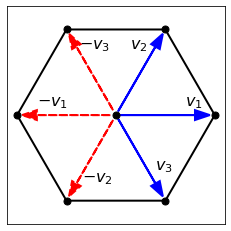

In [4]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

hexagon = RegularPolygon((0, 0), numVertices=6, radius=1.0, 
                         orientation=np.radians(30), 
                         facecolor='white', edgecolor='k', linewidth=2.0)
ax.add_patch(hexagon)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xticks([])
ax.set_yticks([])
plt.plot([-1.0,1.0,-0.5,0.5,0.5,-0.5,0.0], [0.0, 0.0,-np.sqrt(3)/2,np.sqrt(3)/2,-np.sqrt(3)/2,np.sqrt(3)/2,0.0], 'o',
         color='k', markersize=7.0)
#plt.plot([-0.5,0.5], [-np.sqrt(3)/2,np.sqrt(3)/2], color='k', linewidth=2.0)
#plt.plot([0.5,-0.5], [-np.sqrt(3)/2,np.sqrt(3)/2], color='k', linewidth=2.0)
plt.arrow(0.05, 0.00, 0.75, 0.0, linewidth=2.0, shape='full', head_width=0.1, color='blue')
plt.arrow(0.05/2, 0.05*np.sqrt(3)/2, 0.75/2, 0.75*np.sqrt(3)/2, linewidth=2.0, shape='full', head_width=0.1, color='blue')
plt.arrow(0.05/2, -0.05*np.sqrt(3)/2, 0.75/2, -0.75*np.sqrt(3)/2, linewidth=2.0, shape='full', head_width=0.1, color='blue')

plt.arrow(-0.05, 0.00, -0.75, 0.0, linewidth=2.0, shape='full', head_width=0.1, color='red', linestyle='--')
plt.arrow(-0.05/2, -0.05*np.sqrt(3)/2, -0.75/2, -0.75*np.sqrt(3)/2, linewidth=2.0, shape='full', head_width=0.1, color='red', linestyle='--')
plt.arrow(-0.05/2, 0.05*np.sqrt(3)/2, -0.75/2, 0.75*np.sqrt(3)/2, linewidth=2.0, shape='full', head_width=0.1, color='red', linestyle='--')

plt.text(0.7, 0.1, r'$v_{1}$',fontsize=16, ma='center', fontstyle='normal')
plt.text(0.14, 0.67, r'$v_{2}$',fontsize=16, ma='center', fontstyle='normal')
plt.text(0.4, -0.55, r'$v_{3}$',fontsize=16, ma='center', fontstyle='normal')

plt.text(-0.8, 0.1, r'$-v_{1}$',fontsize=16, ma='center', fontstyle='normal')
plt.text(-0.34, -0.67, r'$-v_{2}$',fontsize=16, ma='center', fontstyle='normal')
plt.text(-0.37, 0.67, r'$-v_{3}$',fontsize=16, ma='center', fontstyle='normal')

plt.savefig('fig1_QRW_layout.pdf', dpi=500, bbox_inches='tight')

plt.show()

## 3D plot of distribution of success probabilities

In [2]:
with open('data_files/max_map_values_def_5piover8_piover2.npy', 'rb') as f:
    max_value = np.load(f)
    max_value_nodef_0 = np.load(f)
    max_value_nodef_1= np.load(f)
    theta1_array= np.load(f)
    theta2_array= np.load(f)

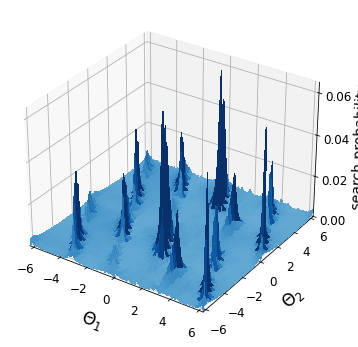

In [3]:
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6.4,4.8))

X, Y = np.meshgrid(theta1_array, theta2_array)

surf = ax.plot_surface(Y, X, max_value, cmap = cm.Blues, #cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmin=-0.01, vmax=0.01)

ax.set_xlabel(r'$\Theta_1$', fontsize=17, labelpad=10)
ax.set_ylabel(r'$\Theta_2$', fontsize=17, labelpad=10)
ax.set_zlabel('search probability', fontsize=14, labelpad=5)
ax.set_xlim3d(-2*np.pi, 2*np.pi)
ax.set_ylim3d(-2*np.pi, 2*np.pi)
ax.set_zlim(-0.00, 0.065)
ax.set_zticks([0.0, 0.02, 0.04, 0.06])

ax.view_init(elev=30, azim=-56)
ax.set_box_aspect(aspect=None, zoom=1.0)
ax.tick_params(axis='both', which='major', labelsize=12)

#cset = ax.contourf(X, Y, max_value, zdir='z', offset=-0.05, cmap=cm.coolwarm)

plt.tight_layout()
#fig2.subplots_adjust(left=-0.2, right=1.1, bottom=-0.1, top=1.0)

#plt.savefig('max_map_defect_m3d6_mpi_07.png')
#fig.tight_layout(rect=[0.1,0.1,0.9, 0.95])
plt.savefig('max_map_3D_defect_5piover8_piover2.pdf', dpi=500, bbox_inches='tight')
plt.show()

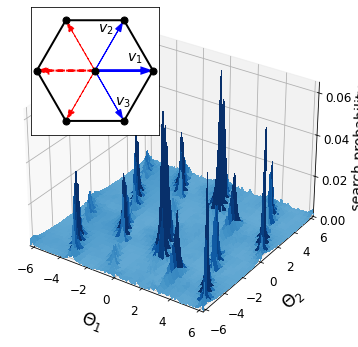

In [5]:
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6.4,4.8))

X, Y = np.meshgrid(theta1_array, theta2_array)

surf = ax.plot_surface(Y, X, max_value, cmap = cm.Blues, #cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmin=-0.01, vmax=0.01)

ax.set_xlabel(r'$\Theta_1$', fontsize=17, labelpad=10)
ax.set_ylabel(r'$\Theta_2$', fontsize=17, labelpad=10)
ax.set_zlabel('search probability', fontsize=14, labelpad=5)
ax.set_xlim3d(-2*np.pi, 2*np.pi)
ax.set_ylim3d(-2*np.pi, 2*np.pi)
ax.set_zlim(-0.00, 0.065)
ax.set_zticks([0.0, 0.02, 0.04, 0.06])

ax.view_init(elev=30, azim=-56)
ax.set_box_aspect(aspect=None, zoom=1.0)
ax.tick_params(axis='both', which='major', labelsize=12)

#cset = ax.contourf(X, Y, max_value, zdir='z', offset=-0.05, cmap=cm.coolwarm)

plt.tight_layout()
#fig2.subplots_adjust(left=-0.2, right=1.1, bottom=-0.1, top=1.0)

#plt.savefig('max_map_defect_m3d6_mpi_07.png')
#fig.tight_layout(rect=[0.1,0.1,0.9, 0.95])

rect = [0.2, 0.6, 0.37, 0.37]

ax_inset1 = fig2.add_axes(rect, anchor='NW')
ax_inset1.set_aspect('equal')

hexagon = RegularPolygon((0, 0), numVertices=6, radius=1.0, 
                         orientation=np.radians(30), 
                         facecolor='white', edgecolor='k', linewidth=2.0)
ax_inset1.add_patch(hexagon)
ax_inset1.set_xlim(-1.1, 1.1)
ax_inset1.set_ylim(-1.1, 1.1)
ax_inset1.set_xticks([])
ax_inset1.set_yticks([])
ax_inset1.plot([-1.0,1.0,-0.5,0.5,0.5,-0.5,0.0], [0.0, 0.0,-np.sqrt(3)/2,np.sqrt(3)/2,-np.sqrt(3)/2,np.sqrt(3)/2,0.0], 'o',
         color='k', markersize=7.0)
#plt.plot([-0.5,0.5], [-np.sqrt(3)/2,np.sqrt(3)/2], color='k', linewidth=2.0)
#plt.plot([0.5,-0.5], [-np.sqrt(3)/2,np.sqrt(3)/2], color='k', linewidth=2.0)
ax_inset1.arrow(0.05, 0.00, 0.75, 0.0, linewidth=2.0, shape='full', head_width=0.1, color='blue')
ax_inset1.arrow(0.05/2, 0.05*np.sqrt(3)/2, 0.75/2, 0.75*np.sqrt(3)/2, linewidth=1.0, shape='full', head_width=0.1, color='blue')
ax_inset1.arrow(0.05/2, -0.05*np.sqrt(3)/2, 0.75/2, -0.75*np.sqrt(3)/2, linewidth=1.0, shape='full', head_width=0.1, color='blue')

ax_inset1.arrow(-0.05, 0.00, -0.75, 0.0, linewidth=2.0, shape='full', head_width=0.1, color='red', linestyle='--')
ax_inset1.arrow(-0.05/2, -0.05*np.sqrt(3)/2, -0.75/2, -0.75*np.sqrt(3)/2, linewidth=1.0, shape='full', head_width=0.1, color='red', linestyle='--')
ax_inset1.arrow(-0.05/2, 0.05*np.sqrt(3)/2, -0.75/2, 0.75*np.sqrt(3)/2, linewidth=1.0, shape='full', head_width=0.1, color='red', linestyle='--')

ax_inset1.text(0.55, 0.16, r'$v_{1}$',fontsize=14, ma='center', fontstyle='normal')
ax_inset1.text(0.06, 0.67, r'$v_{2}$',fontsize=14, ma='center', fontstyle='normal')
ax_inset1.text(0.35, -0.6, r'$v_{3}$',fontsize=14, ma='center', fontstyle='normal')

#ax_inset1.text(-0.8, 0.1, r'$-v_{1}$',fontsize=14, ma='center', fontstyle='normal')
#ax_inset1.text(-0.34, -0.67, r'$-v_{2}$',fontsize=14, ma='center', fontstyle='normal')
#ax_inset1.text(-0.37, 0.67, r'$-v_{3}$',fontsize=14, ma='center', fontstyle='normal')

plt.savefig('max_map_3D_defect_5piover8_piover2_v2.pdf', dpi=500, bbox_inches='tight')
plt.show()

## Plotting single colormap of density on defect 
(technical part for test for next section)

In [2]:
with open('data_files/max_map_values_def_5piover8_piover2.npy', 'rb') as f:
    max_value = np.load(f)
    max_value_nodef_0 = np.load(f)
    max_value_nodef_1= np.load(f)
    theta1_array= np.load(f)
    theta2_array= np.load(f)

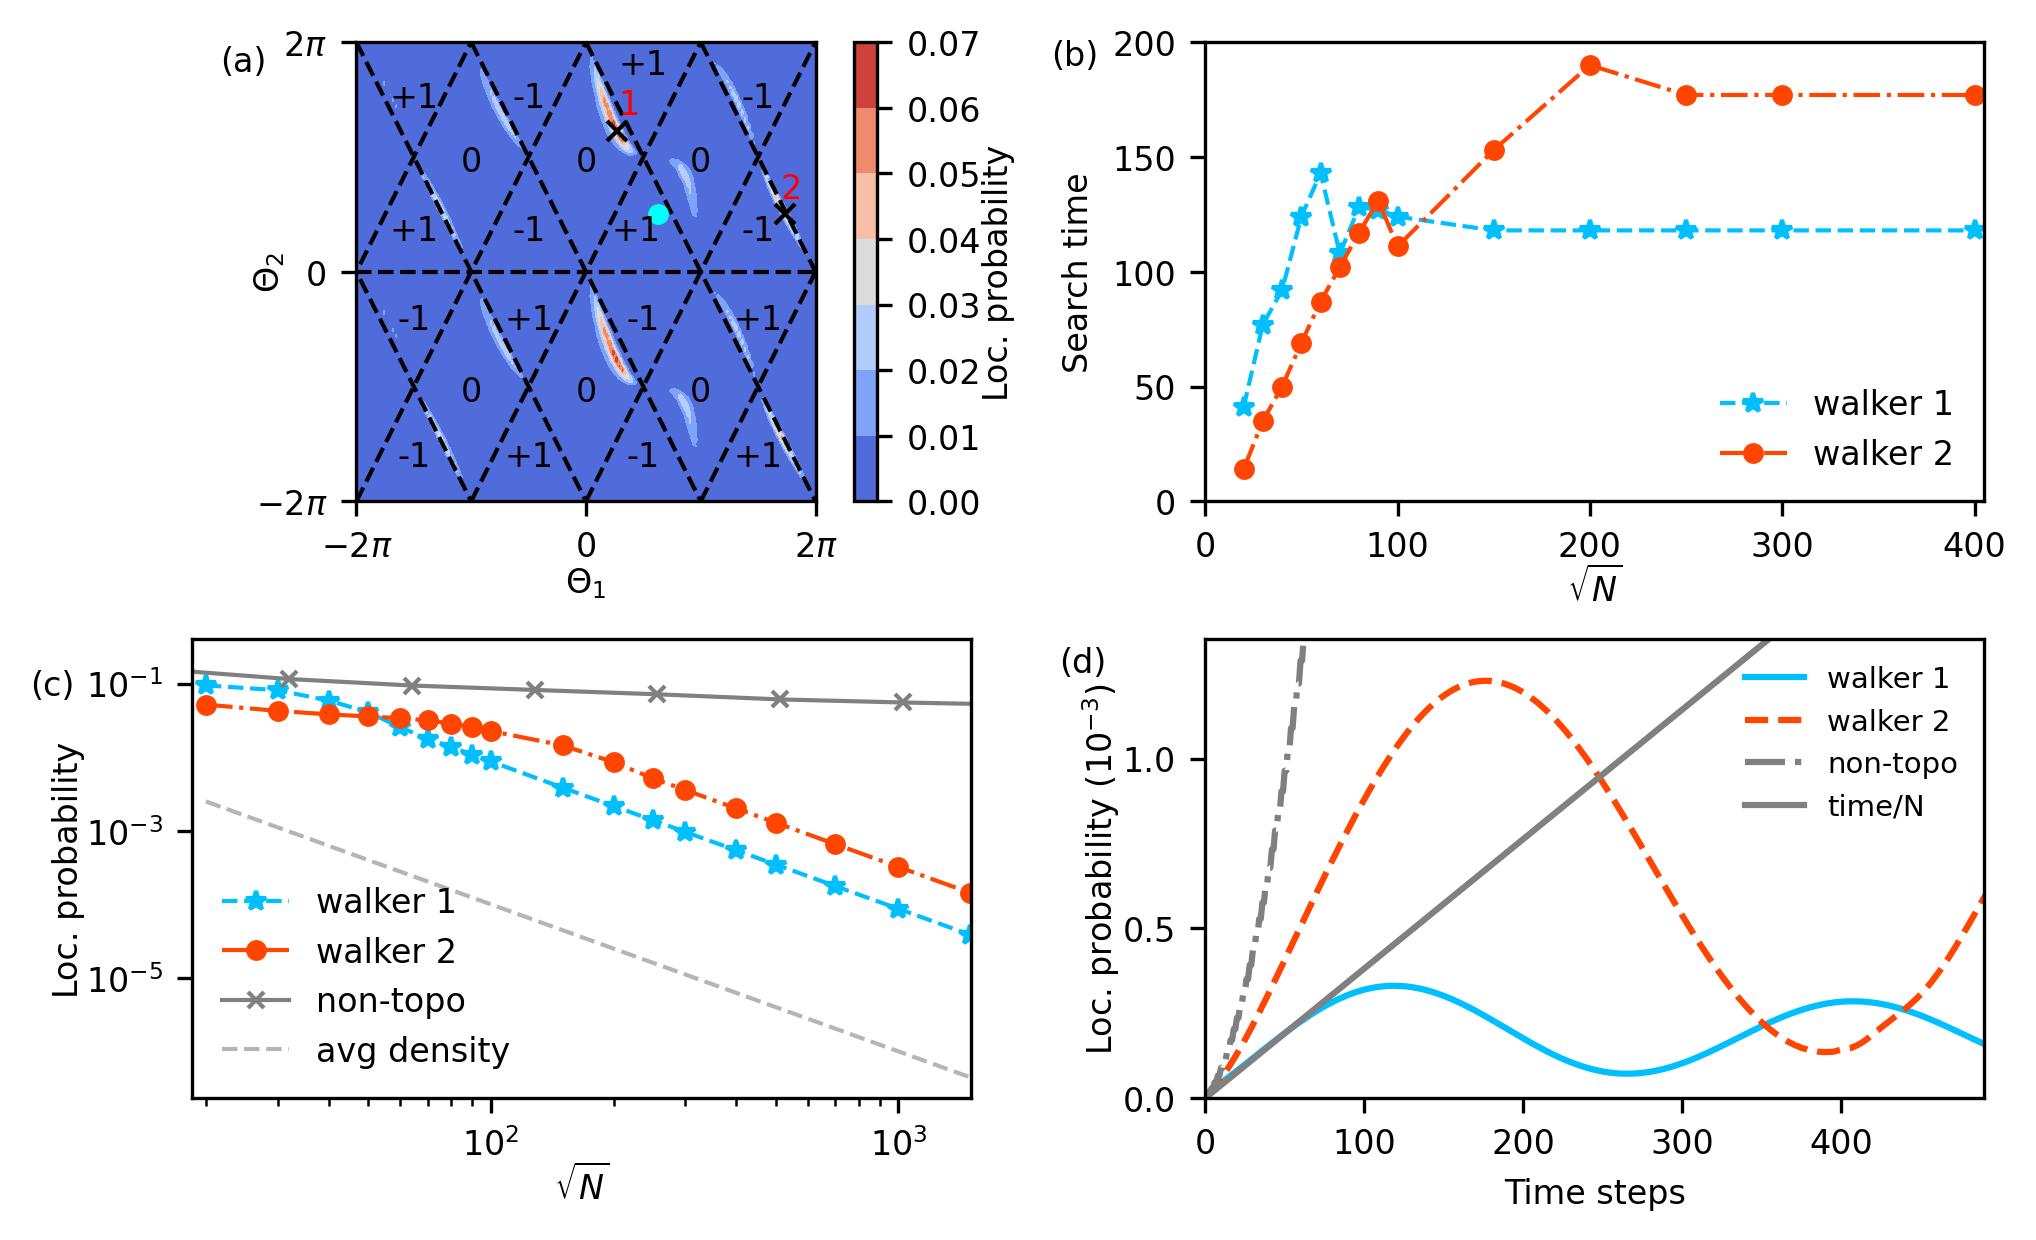

In [7]:
X, Y = np.meshgrid(theta1_array, theta2_array)

fig, axes = plt.subplots(ncols=2, nrows=2, dpi=300)

fig.set_size_inches(6.75, 4.0)
font = {'size' : 8}
mpl.rc('font', **font)

ax = axes[0][0]
fig.subplots_adjust(bottom = 0.1, top=0.98, left=0.095, right=0.98,wspace=0.3,hspace=0.3)

#plt.subplot(111)
cset = ax.contourf(Y, X, max_value, cmap=cm.coolwarm)

#plot topo phase lines
for i in range(-1,4):
    ax.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [-2*np.pi, 2*np.pi], '--', color='black', linewidth = 1.0) 
    ax.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [2*np.pi, -2*np.pi], '--', color='black', linewidth = 1.0) 
ax.plot([-2*np.pi, 2*np.pi], [0, 0], '--', color='black', linewidth = 1.0)



ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-2*np.pi, 2*np.pi)

ax.text(np.pi/2-0.2, np.pi/2-0.7, '+1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(np.pi/2, 3*np.pi/2+0.7, '+1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(-3*np.pi/2, np.pi/2-0.7, '+1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(-3*np.pi/2, 3*np.pi/2-0.2, '+1', fontsize=8, color='black', horizontalalignment='center', )

ax.text(-np.pi/2, np.pi/2-0.7, '-1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(-np.pi/2, 3*np.pi/2-0.2, '-1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(3*np.pi/2, np.pi/2-0.7, '-1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(3*np.pi/2, 3*np.pi/2-0.2, '-1', fontsize=8, color='black', horizontalalignment='center', )

ax.text(np.pi/2, -np.pi/2-0.0, '-1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(np.pi/2, -3*np.pi/2-0.6, '-1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(-np.pi/2, -np.pi/2-0.0, '+1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(-np.pi/2, -3*np.pi/2-0.6, '+1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(-3*np.pi/2, -np.pi/2-0.0, '-1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(-3*np.pi/2, -3*np.pi/2-0.6, '-1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(3*np.pi/2, -np.pi/2-0.0, '+1', fontsize=8, color='black', horizontalalignment='center', )
ax.text(3*np.pi/2, -3*np.pi/2-0.6, '+1', fontsize=8, color='black', horizontalalignment='center', )

ax.text(0, np.pi-0.4, '0', fontsize=8, color='black', horizontalalignment='center', )
ax.text(0, -np.pi-0.4, '0', fontsize=8, color='black', horizontalalignment='center', )
ax.text(np.pi, np.pi-0.4, '0', fontsize=8, color='black', horizontalalignment='center', )
ax.text(np.pi, -np.pi-0.4, '0', fontsize=8, color='black', horizontalalignment='center', )
ax.text(-np.pi, np.pi-0.4, '0', fontsize=8, color='black', horizontalalignment='center', )
ax.text(-np.pi, -np.pi-0.4, '0', fontsize=8, color='black', horizontalalignment='center', )

#plt.plot([theta1_array[77], theta1_array[77]], [theta2_array[114], theta2_array[140]], '-.', color='red')
#plt.plot([theta1_array[93], theta1_array[93]], [theta2_array[114], theta2_array[140]], '-.', color='red')
#plt.plot([theta1_array[77], theta1_array[93]], [theta2_array[114], theta2_array[114]], '-.', color='red')
#plt.plot([theta1_array[77], theta1_array[93]], [theta2_array[140], theta2_array[140]], '-.', color='red')

#plt.plot([theta1_array[135], theta1_array[135]], [theta2_array[83], theta2_array[108]], '--', color='red')
#plt.plot([theta1_array[145], theta1_array[145]], [theta2_array[83], theta2_array[108]], '--', color='red')
#plt.plot([theta1_array[135], theta1_array[145]], [theta2_array[83], theta2_array[83]], '--', color='red')
#plt.plot([theta1_array[135], theta1_array[145]], [theta2_array[108], theta2_array[108]], '--', color='red')

ax.plot([5*np.pi/8], [np.pi/2], 'o', color='cyan', markersize=4)
ax.plot([0.8377580409572776], [3.853686988403478], 'x', color='black', markersize=5)
ax.plot([5.445427266222307], [1.591740277818828], 'x', color='black', markersize=5)
ax.text(np.pi/2-0.4, 3*np.pi/2-0.4, '1', fontsize=8, color='red', horizontalalignment='center', )
ax.text(3*np.pi/2+0.9, np.pi/2+0.45, '2', fontsize=8, color='red', horizontalalignment='center', )


#plt.xlabel(r'$\Theta_1$', fontsize=14)
#plt.ylabel(r'$\Theta_2$', fontsize=14)
cb = plt.colorbar(cset)
cb.set_label(label='Loc. probability',fontsize=8,labelpad=0.2)
cb.ax.tick_params(labelsize=8)
ax.set_xticks(ticks=[-2*np.pi, 0, 2*np.pi], labels=[r'$-2\pi$','0', r'$2\pi$'], fontsize=8)
ax.set_yticks(ticks=[-2*np.pi, 0, 2*np.pi], labels=[r'$-2\pi$','0', r'$2\pi$'], fontsize=8)
ax.set_ylabel(r'$\Theta_2$', fontsize=8,labelpad=-7.5)
ax.set_xlabel(r'$\Theta_1$', fontsize=8,labelpad=0.5)
ax.set_aspect('equal')
ax.text(-10, 5.5, '(a)', fontsize=8)
#plt.title('site with defect')


ax = axes[0][1]

#combined plot for figure
color_list = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]

data_time_table= [(20, 41), (30, 77), (40, 92), (50, 124), (60, 143), 
                  (70, 108), (80, 128), (90, 127), (100, 124), (150, 118), (200, 118), (250, 118), 
                  (300, 118), (400, 118)]


ax.plot([elem[0] for elem in data_time_table], 
         [elem[1] for elem in data_time_table], '*--', color='deepskyblue', label = 'walker 1',linewidth=1, markersize=5)


data_time_table_magenta= [(20, 14), (30, 35), (40, 50), (50, 69), (60, 87), 
                  (70, 102), (80, 117), (90, 131), (100, 111), (150, 153), (200, 190), (250, 177), 
                  (300, 177), (400, 177), (500,177)]



ax.plot([elem[0] for elem in data_time_table_magenta[:-1]], 
         [elem[1] for elem in data_time_table_magenta[:-1]], 'o-.', color='orangered', label = 'walker 2',linewidth=1, markersize=4)

ax.set_ylabel('Search time', fontsize=8)
ax.set_xlabel(r'$\sqrt{N}$', fontsize=8,labelpad=0.5)

ax.set_xlim(0.0, 405)
ax.set_ylim(0.0, 200)
#plt.ylim(0.0, 0.05)
#plt.gca().set_aspect('equal')
ax.text(-80.0, 190.0, '(b)', fontsize=8)
ax.tick_params(axis='both', labelsize=8)


ax.legend(fontsize=8, loc='lower right',frameon=False)

ax = axes[1][0]

data_probability_table= [(20, 0.09487766566757226), (30, 0.08153086787757462), (40, 0.05895669302198611), (50, 0.04109095536687267), 
                         (60, 0.025470874283016535), 
                  (70, 0.01774035052677464), (80, 0.013780663182985627), (90, 0.010833039951606914), (100, 0.008758684861669962), 
                         (150, 0.0038567575967876425), (200, 0.002169426148190729), (250, 0.0013884327348420633), 
                  (300, 0.0009641893991958789), (400, 0.0005423565370476823), (500, 0.0003471081837105158), 
                         (700, 0.0001770960120972022), (1000, 8.677704592762895e-05), (1500, 3.8567575967835165e-05)]


ax.plot([elem[0] for elem in data_probability_table], 
         [elem[1] for elem in data_probability_table], '*--', color='deepskyblue', label = 'walker 1',linewidth=1, markersize=5)



data_probability_table_2= [(20, 0.051913911097790644), (30, 0.04268161252656818), (40, 0.038282565044546316), (50, 0.03585586614642573), 
                         (60, 0.033939377938867706), 
                  (70, 0.03165569185440148), (80, 0.028706440262648698), (90, 0.025652591173608064), (100, 0.022706631102894496), 
                         (150, 0.014496085538448528), (200, 0.008568894887354253), (250, 0.005159959883283479), 
                  (300, 0.0035808126144586793), (400, 0.0020142070956351375), (500, 0.0012890925412064869), 
                         (700, 0.0006577002761257586), (1000, 0.0003222731353016217), (1500, 0.0001432325045784988)]


ax.plot([elem[0] for elem in data_probability_table_2], 
         [elem[1] for elem in data_probability_table_2], 'o-.', color='orangered', label = 'walker 2',linewidth=1, markersize=4)

data_probability_table_nontopo = [(2**3, 0.21059896859447633), (2**4, 0.15488372265492148), (2**5, 0.1156768919175908),
                                  (2**6, 0.09443221461680773), (2**7, 0.08224173153205648), (2**8, 0.07176147715096594), 
                                  (2**9, 0.061122964735178247),(2**10, 0.05553545659002729), (2**11, 0.051504092520763)]
ax.plot([elem[0] for elem in data_probability_table_nontopo], 
         [elem[1] for elem in data_probability_table_nontopo], 'x-', color='gray', label = 'non-topo',linewidth=1, markersize=4)


ax.plot([elem[0] for elem in data_probability_table_2], 
         [1/(elem[0]**2) for elem in data_probability_table_2], '--', color=cm.Greys(0.4), label = 'avg density',linewidth=1)


ax.text(7.4, 0.07, '(c)', fontsize=8)
ax.tick_params(axis='both', labelsize=8)


ax.set_ylabel('Loc. probability', fontsize=8,labelpad=0.2)
ax.set_xlabel(r'$\sqrt{N}$', fontsize=8,labelpad=0.5)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(18.5, 1510)
#plt.ylim(0, 0.1)
#plt.ylim(40.0, 145)
#plt.ylim(0.0, 0.05)

ax.legend(fontsize=8,frameon=False)

ax = axes[1][1]

time_set= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]
probabilities_walker1= [6.396555905728406e-06, 1.0227936465801262e-05, 1.4534973118273228e-05, 1.8854908673895486e-05, 2.3108283834396192e-05, 2.718656722201333e-05, 3.0736177809324426e-05, 3.398703313994265e-05, 3.744424683361943e-05, 4.106211653590722e-05, 4.464024652040777e-05, 4.8239682050082364e-05, 5.194996075244927e-05, 5.5675300184007186e-05, 5.9238728413706595e-05, 6.270912087728725e-05, 6.629859567381563e-05, 6.995146588073351e-05, 7.351851785886805e-05, 7.708068555055334e-05, 8.076641904631674e-05, 8.452672855479e-05, 8.823385351092435e-05, 9.190172832174337e-05, 9.563235432529855e-05, 9.936149197510178e-05, 0.00010297103576135616, 0.00010655112879006068, 0.00011025223550670458, 0.00011405493334389099, 0.00011785108681623457, 0.00012162561329606945, 0.00012542415923823345, 0.00012918044629699137, 0.0001327992015447392, 0.00013637138398390642, 0.0001400540546072363, 0.0001438435332215665, 0.00014764062015743237, 0.00015141710222464603, 0.000155192985553432, 0.0001589072566435375, 0.00016248188444154736, 0.00016599946151722757, 0.00016960856745644324, 0.00017331062991805606, 0.0001770124865927851, 0.0001806857394682655, 0.00018434630271499175, 0.00018794432775565468, 0.00019141359476352123, 0.00019481991893088537, 0.00019829102632606358, 0.0002018261223646224, 0.0002053389275183568, 0.00020881087915502328, 0.00021226831157563107, 0.000215675849328085, 0.00021897362894745216, 0.00022220485269188952, 0.00022546886682741138, 0.00022875887731250337, 0.00023199771280731478, 0.00023518264711244735, 0.00023835797573145434, 0.00024150318812153214, 0.0002445600200060422, 0.00024754705653842686, 0.0002505335928018613, 0.0002535064132946514, 0.0002563994070523133, 0.0002592269663411215, 0.0002620522178283673, 0.0002648673935356221, 0.00026761267358230075, 0.00027028423532125855, 0.00027292515697367536, 0.00027551794627891755, 0.00027800817000249553, 0.0002804241298377056, 0.0002828431636882769, 0.000285266509106292, 0.0002876318427600003, 0.00028991878769841085, 0.0002921520315214862, 0.0002943133015265253, 0.00029635868080999837, 0.0002983238751452811, 0.0003002923586254146, 0.0003022701337799712, 0.0003041936621443421, 0.00030603413270125705, 0.0003078074507972442, 0.00030949810411139687, 0.00031106991025372263, 0.0003125580351565803, 0.0003140430414491022, 0.00031553199180639447, 0.0003169630741168004, 0.0003183075780600839, 0.00031958169258771926, 0.00032077520535269435, 0.0003218559193828641, 0.0003228511085525723, 0.0003238307573603602, 0.0003248005541494753, 0.00032570399469682105, 0.0003265195465376933, 0.0003272703064658076, 0.0003279523565872847, 0.0003285337145338827, 0.0003290286987068535, 0.0003294921119240373, 0.00032992739212363016, 0.00033028643667726515, 0.00033055908402146347, 0.00033077843149968917, 0.00033094632075874724, 0.0003310281598191418, 0.00033102352311328387, 0.000330971166399245, 0.00033087277883701486, 0.0003306903520822764, 0.0003304257703272589, 0.00033012157194518566, 0.00032978375237099195, 0.0003293739440871814, 0.000328878571709344, 0.0003283228470912837, 0.00032770804580166824, 0.0003270060852628243, 0.0003262283340619852, 0.00032542332774139265, 0.000324599216602361, 0.000323714593309155, 0.0003227469976110675, 0.00032171280049213095, 0.00032061433043830193, 0.0003194314827847945, 0.00031818037491061443, 0.0003169105792647796, 0.0003156306630685163, 0.00031429851783636956, 0.0003128884504361248, 0.0003114133519523727, 0.0003098775822933602, 0.0003082658470076255, 0.0003065935981295121, 0.000304906519947489, 0.00030321256128303076, 0.0003014721078160495, 0.0002996617811319596, 0.000297795558073278, 0.0002958799785821968, 0.0002939010257408398, 0.00029186888354239553, 0.00028982176384244557, 0.00028776679802643303, 0.0002856699575173317, 0.0002835143119535008, 0.00028131769690949393, 0.0002790881681259092, 0.0002768099948525543, 0.00027448539175490205, 0.00027214359195012116, 0.00026979137807097353, 0.0002674024130069256, 0.00026496812327633036, 0.0002625108323444633, 0.0002600389577285041, 0.0002575333189697858, 0.000254987811832271, 0.0002524233036260734, 0.0002498469855298619, 0.00024724078026678524, 0.00024460401135668707, 0.00024196226229878778, 0.00023932314223650437, 0.00023666387879759103, 0.0002339718248263887, 0.00023126165000912342, 0.00022854155657290012, 0.00022580067168211028, 0.00022304388237944894, 0.00022029769551584326, 0.00021756815977171573, 0.00021483024754298207, 0.00021206791666700595, 0.00020929245275566366, 0.00020651316681185924, 0.000203724076263483, 0.0002009323541873982, 0.00019816291656751169, 0.00019542015948005153, 0.00019267910022707817, 0.00018992381049834557, 0.00018716472238955594, 0.00018441171317195996, 0.00018166079254931843, 0.00017891825015930196, 0.00017620553832489998, 0.0001735259497219777, 0.00017085706151427163, 0.0001681859659340996, 0.00016552382641627278, 0.00016288002695989394, 0.00016024985905830824, 0.00015763652585655294, 0.00015505726238321368, 0.00015251519643108438, 0.00014999244366129563, 0.00014748076293052308, 0.0001449924498570877, 0.00014253515136774454, 0.00014010156630631454, 0.00013769101756037902, 0.00013531692448935957, 0.00013298319331647422, 0.00013067738646475941, 0.00012839610613526875, 0.00012615218656158384, 0.00012395052720042264, 0.00012178055589412047, 0.00011963828887600174, 0.00011753453083130413, 0.00011547453308076064, 0.00011345096433726472, 0.00011146422096665695, 0.00010952657593980668, 0.00010763975354533575, 0.0001057904265267207, 0.0001039728046337586, 0.00010219650282290917, 0.00010046805633352998, 9.878384694503177e-05, 9.714635518660016e-05, 9.556626882331751e-05, 9.404244856825271e-05, 9.256019099517024e-05, 9.111368060220486e-05, 8.971242440463603e-05, 8.836351366825178e-05, 8.706507099575433e-05, 8.581996133361299e-05, 8.463680718353307e-05, 8.35125689575624e-05, 8.243287248430178e-05, 8.139331812567291e-05, 8.040368533388247e-05, 7.947041387892489e-05, 7.85913977988836e-05, 7.776874687116842e-05, 7.700928671577548e-05, 7.630939562204381e-05, 7.565649483819999e-05, 7.504829555918089e-05, 7.449448568498104e-05, 7.399952011531229e-05, 7.355960548930257e-05, 7.317578168647318e-05, 7.285398650448433e-05, 7.259128623426498e-05, 7.237770203916325e-05, 7.221291442937244e-05, 7.210566850388142e-05, 7.2057381217878e-05, 7.206191789649906e-05, 7.211968677289507e-05, 7.223692780218167e-05, 7.241223964012652e-05, 7.263822181539937e-05, 7.291576140266531e-05, 7.325176010266007e-05, 7.364415035671993e-05, 7.408462772414255e-05, 7.457382010767229e-05, 7.511927332616331e-05, 7.572130066351289e-05, 7.637434884127355e-05, 7.707954060352631e-05, 7.784143070091475e-05, 7.86547679189362e-05, 7.950984882106979e-05, 8.040833080571475e-05, 8.135948508216408e-05, 8.236483164076645e-05, 8.341955063003883e-05, 8.452426767517114e-05, 8.56813760909987e-05, 8.688340282612657e-05, 8.81202408440268e-05, 8.939495353163873e-05, 9.071819060678027e-05, 9.209166201478096e-05, 9.351019087199074e-05, 9.497372551474198e-05, 9.648340921923355e-05, 9.803089016081617e-05, 9.960648990243288e-05, 0.00010121443063279663, 0.00010286572586762555, 0.00010456107899931546, 0.00010629423057855725, 0.00010806489732731263, 0.00010987438087028835, 0.00011171479735993042, 0.00011357729304630836, 0.00011546644660574339, 0.00011739229549871189, 0.00011935353253963551, 0.00012134262671025497, 0.00012335994847517982, 0.00012540844723056376, 0.00012748170312187505, 0.00012957156960819718, 0.0001316819158189983, 0.00013382060320230564, 0.0001359838028113578, 0.00013816302347363166, 0.00014036024570713293, 0.00014258117389477713, 0.00014482127138225174, 0.00014707259407457896, 0.00014933737491362622, 0.0001516206660357117, 0.00015391623741082479, 0.00015621524083981271, 0.00015852188399667784, 0.00016084499548736636, 0.00016318172416377352, 0.00016552370261531754, 0.00016787110899513181, 0.00017022636520461714, 0.00017258153503921646, 0.00017492801614866945, 0.00017727222227222885, 0.0001796256082350098, 0.00018198633648935773, 0.0001843451659895903, 0.00018670051136678337, 0.00018905314197012823, 0.00019139445965635172, 0.0001937164456660776, 0.00019602698217290434, 0.00019833892613760297, 0.0002006505753172782, 0.00020295175264702805, 0.00020524007027007433, 0.00020751615566811193, 0.0002097718320478696, 0.0002119995935745803, 0.00021420750891364577, 0.00021640825291869954, 0.00021859947616630963, 0.0002207704428535346, 0.0002229193185633127, 0.0002250482019385268, 0.00022715016820177284, 0.00022921777224768202, 0.00023125780948199978, 0.00023328129998801553, 0.00023528480222108895, 0.00023725771545879239, 0.00023920008746587508, 0.0002411167431070268, 0.0002430024039636895, 0.00024484903638673125, 0.0002466609656289344, 0.00024844662272881696, 0.00025020147772543666, 0.0002519158270606576, 0.0002535924717295539, 0.0002552395107540094, 0.0002568532404752882, 0.00025842446541172196, 0.0002599544789343974, 0.00026144897773613967, 0.00026290275156862333, 0.0002643075431980014, 0.0002656690239399231, 0.00026699827289674975, 0.0002682927399394122, 0.0002695418308659229, 0.0002707440654672941, 0.00027190305449911024, 0.0002730135476424875, 0.00027406885699113846, 0.0002750768231131547, 0.0002760504830820867, 0.0002769878776290009, 0.00027787726359086457, 0.00027871540387921183, 0.0002795050352649321, 0.00028024150749794414, 0.0002809193290866347, 0.000281547178988979, 0.0002821386216156064, 0.00028269180669623646, 0.00028319456004252864, 0.0002836433730213412, 0.0002840415015587563, 0.0002843853278168332, 0.0002846697880076137, 0.0002849028180715127, 0.0002850970897545428, 0.00028525062232910217, 0.0002853518110446129, 0.00028539840124391734, 0.00028539533150280993, 0.00028534012750250733, 0.00028522722841447547, 0.00028506244464628603, 0.0002848565320317997, 0.0002846074348563, 0.00028430510848989426, 0.0002839496829965626, 0.0002835483982014336, 0.000283099725279843, 0.0002825968281677745, 0.0002820425893119873, 0.00028144545983332974, 0.0002808035941895818, 0.0002801091869522356, 0.00027936518013362525, 0.00027858105583135557, 0.00027775584527646316, 0.00027688107207934, 0.00027595666942255824, 0.00027498905740336354, 0.00027397696434826904, 0.00027291497959901917, 0.0002718084889793529, 0.0002706685563142198, 0.000269494377539366, 0.00026827602575905485, 0.00026701121315668295, 0.0002657050930510049, 0.0002643572332220961, 0.00026296419626453124, 0.00026153279339032943, 0.00026007465358628894, 0.0002585888959785242, 0.0002570648560753084, 0.00025549925859492267, 0.0002538969451715542, 0.00025225835600175314, 0.0002505811494493812, 0.00024887222031365694, 0.00024714271628427213, 0.00024539168239979674, 0.00024360875514447438, 0.00024179103623851915, 0.0002399438802160341, 0.00023806835836425767, 0.00023616214824188876, 0.00023423096251891712, 0.00023228468962564332, 0.000230322534604466, 0.00022833549868732237, 0.00022632216955112042, 0.00022428886856092425, 0.00022223684906153102, 0.00022016284447636767, 0.00021807054237706026, 0.00021596824135161765, 0.0002138556636665684, 0.00021172595653349364, 0.00020957976434634828, 0.0002074243667767032, 0.00020526069201570873, 0.0002030839511981929, 0.00020089558007475248, 0.00019870241778677982, 0.00019650502166496068, 0.00019429896482619575, 0.0001920868800820186, 0.00018987660437242565, 0.00018766835178638043, 0.00018545576803171652, 0.00018323842142519618, 0.0001810221443436962, 0.00017880845040444245, 0.0001765950523348897, 0.0001743859620445612, 0.00017218897195382606, 0.00017000344933700744, 0.00016782195166154223, 0.00016564299089967947, 0.0001634719401764583, 0.000161311099864649, 0.00015915957247013087, 0.00015702184884378107, 0.00015490511156866053, 0.00015280805359060728, 0.00015072297213204874, 0.00014864826996643208, 0.00014658927559125807, 0.00014454862136459675, 0.00014252581739322018, 0.00014052495260833718]
probabilities_walker2= [1.0034972746969398e-05, 1.1217126171416965e-05, 1.4365687713781427e-05, 2.059794108833077e-05, 2.550779311659321e-05, 3.0172765047265466e-05, 3.548110237873657e-05, 4.072229778351846e-05, 4.640888540054637e-05, 5.253332321984894e-05, 5.880522567771277e-05, 6.526968386435283e-05, 7.201453302330645e-05, 7.882983210063624e-05, 8.553765713372296e-05, 9.25036222062779e-05, 9.98320657150691e-05, 0.00010740329657208659, 0.00011509245716945021, 0.00012276524615146932, 0.00013068007943929015, 0.0001387051286700614, 0.00014664244856694102, 0.0001548092828893319, 0.0001632034316633847, 0.00017180966519625348, 0.00018050069423813562, 0.00018906477654465612, 0.00019783342960501399, 0.00020671873695136015, 0.00021554378070873996, 0.00022456030631946361, 0.0002336951103015469, 0.00024300538001056283, 0.00025237529009541866, 0.00026156192268013385, 0.0002709145843859128, 0.00028037460107488394, 0.00028979794915951867, 0.000299374866383869, 0.0003089806739362211, 0.00031872129536495374, 0.0003285008078246804, 0.0003380737586758033, 0.0003477795118980835, 0.00035757499077152254, 0.0003673508670982908, 0.00037724446562601777, 0.0003870964193376783, 0.00039704398141221877, 0.00040701295461423174, 0.00041677444132210133, 0.00042664274329264003, 0.0004365795398898695, 0.0004465075422542087, 0.00045651909085975696, 0.00046643641362617756, 0.000476416135371163, 0.0004864029271581657, 0.0004961958601635524, 0.000506075637483428, 0.0005160017470152805, 0.0005259248952429158, 0.000535898277577409, 0.0005457404592198177, 0.0005556199774960807, 0.0005654954317508168, 0.0005751989261290355, 0.0005849721795216765, 0.0005947693186929996, 0.0006045658035163733, 0.0006143797823862314, 0.0006240378050487822, 0.0006337158066324091, 0.0006433814592118212, 0.0006529004965865791, 0.000662471558233316, 0.0006720429012923151, 0.0006816134026625721, 0.000691169770297976, 0.0007005542353454188, 0.000709946675600823, 0.0007193202205062535, 0.0007285725438065077, 0.000737855911275555, 0.0007471133769655203, 0.0007563676706724943, 0.0007655784963012092, 0.0007746077366959366, 0.0007836352188977534, 0.000792637223378306, 0.0008015412301163331, 0.000810451177285971, 0.0008193055843026007, 0.000828152142323172, 0.0008369295304296116, 0.0008455205968694212, 0.0008540998069504907, 0.0008626449494692872, 0.0008711117331094109, 0.0008795561194476833, 0.0008879123214688505, 0.0008962533105430407, 0.0009045040617890402, 0.0009125683897784571, 0.0009206089800084154, 0.0009286033817513616, 0.0009365345573886462, 0.0009444138687831323, 0.0009521713042662977, 0.0009599034822639728, 0.0009675293653262641, 0.0009749734571079579, 0.0009823800946568535, 0.0009897243552902987, 0.0009970154661021083, 0.0010042266032370048, 0.0010112841482691638, 0.0010183043593047121, 0.0010252069799931642, 0.00103193704661415, 0.0010386150215662198, 0.0010452110160017337, 0.0010517587495622793, 0.001058201871716822, 0.001064464898447663, 0.0010706777314938344, 0.0010767657759687315, 0.0010826943634813476, 0.0010885565056089261, 0.0010943152758801432, 0.0011000258776552511, 0.0011056120141247317, 0.0011109993217489587, 0.0011163242828013187, 0.0011215205414344678, 0.0011265729211171547, 0.001131545671110938, 0.0011363939500664386, 0.0011411902836709381, 0.0011458475450761825, 0.0011502962860214486, 0.001154672464840023, 0.0011589185332019514, 0.0011630370651799513, 0.0011670642263639638, 0.001170948040924745, 0.0011747735802278357, 0.0011784505272815636, 0.0011819181538216177, 0.0011853055070790075, 0.0011885631468074296, 0.0011917087289286248, 0.0011947523945865896, 0.001197637407152807, 0.0012004566855233084, 0.0012031224644837237, 0.001205585741812998, 0.001207963319337552, 0.0012102127115083657, 0.0012123634748131187, 0.0012144025582255542, 0.001216271879643762, 0.0012180681079268219, 0.0012197099862916332, 0.0012211619494529498, 0.0012225242673069747, 0.00122376036772058, 0.0012249086326185114, 0.0012259360603867244, 0.0012267868912656057, 0.0012275582060061782, 0.0012281778245397642, 0.0012286239924023839, 0.0012289770871356984, 0.0012292057073179474, 0.0012293546193176404, 0.0012293744480194938, 0.0012292149644569721, 0.0012289708982922065, 0.0012285807190346057, 0.0012280358547647988, 0.0012273943330764845, 0.0012266293644536189, 0.0012257905022946128, 0.001224815992634913, 0.0012236634778997144, 0.0012224228101084043, 0.0012210438935377997, 0.0012195301929765292, 0.001217915992914391, 0.0012161785289496912, 0.0012143712235204215, 0.0012124243855684295, 0.0012103049469389593, 0.0012080953362611539, 0.0012057569026667127, 0.0012033038754368053, 0.0012007467400338078, 0.001198066031638077, 0.0011953183897829185, 0.0011924308985024152, 0.0011893804607847093, 0.0011862395021846831, 0.0011829799954407852, 0.00117962569334858, 0.0011761647738233634, 0.0011725802864551538, 0.0011689312605493952, 0.001165146138115842, 0.001161211979778069, 0.0011571888299165673, 0.0011530576696740056, 0.001148850500851422, 0.0011445362139810421, 0.0011400997481109, 0.0011356012498227085, 0.001130974468815347, 0.001126216460193885, 0.00112137307343417, 0.0011164321151850248, 0.0011114323676123586, 0.001106327668847656, 0.0011011046063317555, 0.001095822716383426, 0.0010904239468798836, 0.0010849148400091156, 0.0010793261159613822, 0.0010736500480756262, 0.0010679304330559563, 0.0010621109619392245, 0.00105618010567841, 0.0010501948135865987, 0.0010441068623881443, 0.0010379313566097118, 0.0010316839660930313, 0.0010253593315051436, 0.0010190042486000804, 0.0010125572179714478, 0.001006009208774113, 0.000999412649264084, 0.000992729585595508, 0.0009859823018953252, 0.000979172429147111, 0.0009722954649669747, 0.000965399129079157, 0.0009584212141399639, 0.0009513559400974325, 0.0009442495656378552, 0.0009370739305102802, 0.00092985673475616, 0.0009225872826405807, 0.0009152611317482671, 0.0009079250343162269, 0.0009005197569429326, 0.0008930433859997046, 0.0008855347673823596, 0.0008779744892722862, 0.0008703937277998829, 0.0008627716005580478, 0.0008551035545227019, 0.0008474338523532275, 0.000839708999241819, 0.000831931233830654, 0.0008241311563039744, 0.0008162967850335191, 0.0008084609230147323, 0.000800594848299683, 0.0007926941320818152, 0.0007847994534944762, 0.0007768649322485447, 0.000768896865929722, 0.0007609171409714569, 0.0007529197961873093, 0.0007449377313278011, 0.0007369368037125935, 0.0007289131063363078, 0.0007209030033503566, 0.0007128693006393466, 0.0007048219628339266, 0.0006967740328797029, 0.0006887241456583953, 0.0006807041979272199, 0.0006726770397717884, 0.0006646396722853412, 0.0006566236481366658, 0.0006486008046375702, 0.0006405842257282692, 0.0006325783426008408, 0.0006245849766447792, 0.0006166343259552438, 0.0006086885678828148, 0.0006007459143316302, 0.0005928327362016065, 0.0005849295804631238, 0.0005770520734534009, 0.0005691966802580513, 0.0005613670557403785, 0.0005535912848135793, 0.0005458330158524807, 0.0005380918967613003, 0.0005303888368937229, 0.0005227121734783805, 0.0005150795317160038, 0.0005074804992976801, 0.0004999193486244794, 0.0004924217717145552, 0.0004849546899223378, 0.000477519367843771, 0.0004701311058788671, 0.0004627846309307227, 0.0004554990538932612, 0.0004482585735570565, 0.0004410671048633827, 0.00043394769797776994, 0.00042687185428836997, 0.0004198426073105627, 0.00041286971435125947, 0.0004059525881703159, 0.0003991113074888936, 0.0003923264382985819, 0.00038560089050732646, 0.0003789548221978207, 0.0003723650237042617, 0.00036583640566199, 0.00035937352735133796, 0.00035297869915210984, 0.00034667241903423566, 0.00034043344669758995, 0.00033426339889884663, 0.0003281793198840593, 0.00032216338351966165, 0.00031622240714331885, 0.0003103563871015114, 0.00030456887794346664, 0.00029888022721984007, 0.00029326905985537795, 0.00028773572628122983, 0.0002822940533830697, 0.0002769311866348687, 0.00027165569582720503, 0.00026646379270902216, 0.00026135910093515944, 0.0002563615200094524, 0.00025145050420561445, 0.00024662475108543574, 0.00024189566487618094, 0.00023725610482309493, 0.00023271473971908684, 0.0002282614539304089, 0.00022390148462634498, 0.00021966132660963963, 0.00021551830111445278, 0.00021145476813101886, 0.000207485105617441, 0.00020363538794180438, 0.0001999085799178861, 0.000196238225459655, 0.00019263332128654202, 0.00018921256412974006, 0.00018595844479650693, 0.00018270116941980624, 0.0001794301607959156, 0.0001764057067542339, 0.000173692332328042, 0.00017088921369560036, 0.00016787952519520488, 0.00016522801364670243, 0.00016313600797505186, 0.0001608759215656976, 0.00015810287067354945, 0.0001557150358542212, 0.00015423147935150197, 0.0001525999661403661, 0.00015015383472808487, 0.0001480267825081634, 0.00014698852478333573, 0.0001459349600939877, 0.00014405750038806942, 0.00014233428623108542, 0.00014148440459720105, 0.00014073732413979974, 0.00013963824398793558, 0.0001386912407183262, 0.0001379688444135587, 0.00013725667036706838, 0.00013688666788155948, 0.00013683617160650078, 0.00013642623553433505, 0.0001357894526242001, 0.00013574328424075741, 0.00013608219365813832, 0.0001360891101883039, 0.0001360329563906154, 0.0001363536473285848, 0.00013688051605168246, 0.00013773682052764947, 0.0001391197075603374, 0.00014047649856691882, 0.00014150430613034474, 0.00014271184465555956, 0.0001440973360915651, 0.00014505496996358608, 0.00014564788965994304, 0.0001462353177204689, 0.00014679578598536153, 0.00014770272977262651, 0.00014941595611392275, 0.00015147216989628117, 0.00015345599910935028, 0.00015569473967546392, 0.000158201901017967, 0.0001607383748736565, 0.0001635654021270284, 0.00016672407908917337, 0.00016985964741230596, 0.00017321637391142685, 0.00017709952914744207, 0.0001810282315112038, 0.00018474348220245295, 0.00018846009324910803, 0.00019201246651455296, 0.000195492341237125, 0.00019944224156876427, 0.00020363053539889083, 0.00020752668059761194, 0.0002112694404775772, 0.0002148705918963662, 0.00021820944631928204, 0.00022177325568512024, 0.00022570981509932223, 0.00022947882853869292, 0.00023307746672268206, 0.00023670333846294991, 0.00024009728061849303, 0.0002435067946397821, 0.0002473201662595806, 0.00025112038768302524, 0.0002547941246284436, 0.0002586511792197441, 0.000262414502389635, 0.0002660950684144991, 0.00027015298959581134, 0.00027433079924841434, 0.0002784199797074838, 0.00028277315469442263, 0.0002872026572467406, 0.0002915174382746986, 0.0002961489956269128, 0.00030099802473720043, 0.0003057758482234738, 0.00031084210463357955, 0.00031610887307899495, 0.0003212515418004207, 0.00032666851319442295, 0.0003323527774868782, 0.0003379543482346416, 0.0003438304295933671, 0.00034996848386877006, 0.00035598705150421484, 0.00036223322601172724, 0.0003687527653971999, 0.00037519326031107577, 0.00038187012929651043, 0.00038880887846842743, 0.0003956184546442187, 0.0004025949086276937, 0.0004098378933096689, 0.00041700178719850003, 0.00042436129306965795, 0.00043197900389003633, 0.0004394304740341005, 0.0004469591595889132, 0.00045471219493254224, 0.0004623829642635578, 0.00047026010269810394, 0.0004783854444745156, 0.0004862838617239562, 0.0004941712640073963, 0.0005021954632484474, 0.0005101275597858509, 0.0005183042571941751, 0.0005267248614853933, 0.0005348916871530587, 0.0005429436503708471, 0.0005510043554433611, 0.0005589827127297938, 0.0005672482233486235, 0.0005757543185092145, 0.0005839875469859594, 0.0005920100769794683, 0.0005999563493173454, 0.0006078250398544162, 0.0006159825622975481, 0.0006243685458584382, 0.0006324695937493267, 0.000640317670628765, 0.0006480493547712989, 0.0006557001004198594, 0.0006636132827466221]
classical= [0.0, 3.814697265625e-06, 7.62939453125e-06, 1.1444091796875e-05, 1.52587890625e-05, 1.9073486328125e-05, 2.288818359375e-05, 2.6702880859375e-05, 3.0517578125e-05, 3.4332275390625e-05, 3.814697265625e-05, 4.1961669921875e-05, 4.57763671875e-05, 4.9591064453125e-05, 5.340576171875e-05, 5.7220458984375e-05, 6.103515625e-05, 6.4849853515625e-05, 6.866455078125e-05, 7.2479248046875e-05, 7.62939453125e-05, 8.0108642578125e-05, 8.392333984375e-05, 8.7738037109375e-05, 9.1552734375e-05, 9.5367431640625e-05, 9.918212890625e-05, 0.000102996826171875, 0.0001068115234375, 0.000110626220703125, 0.00011444091796875, 0.000118255615234375, 0.0001220703125, 0.000125885009765625, 0.00012969970703125, 0.000133514404296875, 0.0001373291015625, 0.000141143798828125, 0.00014495849609375, 0.000148773193359375, 0.000152587890625, 0.000156402587890625, 0.00016021728515625, 0.000164031982421875, 0.0001678466796875, 0.000171661376953125, 0.00017547607421875, 0.000179290771484375, 0.00018310546875, 0.000186920166015625, 0.00019073486328125, 0.000194549560546875, 0.0001983642578125, 0.000202178955078125, 0.00020599365234375, 0.000209808349609375, 0.000213623046875, 0.000217437744140625, 0.00022125244140625, 0.000225067138671875, 0.0002288818359375, 0.000232696533203125, 0.00023651123046875, 0.000240325927734375, 0.000244140625, 0.000247955322265625, 0.00025177001953125, 0.000255584716796875, 0.0002593994140625, 0.000263214111328125, 0.00026702880859375, 0.000270843505859375, 0.000274658203125, 0.000278472900390625, 0.00028228759765625, 0.000286102294921875, 0.0002899169921875, 0.000293731689453125, 0.00029754638671875, 0.000301361083984375, 0.00030517578125, 0.000308990478515625, 0.00031280517578125, 0.000316619873046875, 0.0003204345703125, 0.000324249267578125, 0.00032806396484375, 0.000331878662109375, 0.000335693359375, 0.000339508056640625, 0.00034332275390625, 0.000347137451171875, 0.0003509521484375, 0.000354766845703125, 0.00035858154296875, 0.000362396240234375, 0.0003662109375, 0.000370025634765625, 0.00037384033203125, 0.000377655029296875, 0.0003814697265625, 0.000385284423828125, 0.00038909912109375, 0.000392913818359375, 0.000396728515625, 0.000400543212890625, 0.00040435791015625, 0.000408172607421875, 0.0004119873046875, 0.000415802001953125, 0.00041961669921875, 0.000423431396484375, 0.00042724609375, 0.000431060791015625, 0.00043487548828125, 0.000438690185546875, 0.0004425048828125, 0.000446319580078125, 0.00045013427734375, 0.000453948974609375, 0.000457763671875, 0.000461578369140625, 0.00046539306640625, 0.000469207763671875, 0.0004730224609375, 0.000476837158203125, 0.00048065185546875, 0.000484466552734375, 0.00048828125, 0.000492095947265625, 0.00049591064453125, 0.000499725341796875, 0.0005035400390625, 0.000507354736328125, 0.00051116943359375, 0.000514984130859375, 0.000518798828125, 0.000522613525390625, 0.00052642822265625, 0.000530242919921875, 0.0005340576171875, 0.000537872314453125, 0.00054168701171875, 0.000545501708984375, 0.00054931640625, 0.000553131103515625, 0.00055694580078125, 0.000560760498046875, 0.0005645751953125, 0.000568389892578125, 0.00057220458984375, 0.000576019287109375, 0.000579833984375, 0.000583648681640625, 0.00058746337890625, 0.000591278076171875, 0.0005950927734375, 0.000598907470703125, 0.00060272216796875, 0.000606536865234375, 0.0006103515625, 0.000614166259765625, 0.00061798095703125, 0.000621795654296875, 0.0006256103515625, 0.000629425048828125, 0.00063323974609375, 0.000637054443359375, 0.000640869140625, 0.000644683837890625, 0.00064849853515625, 0.000652313232421875, 0.0006561279296875, 0.000659942626953125, 0.00066375732421875, 0.000667572021484375, 0.00067138671875, 0.000675201416015625, 0.00067901611328125, 0.000682830810546875, 0.0006866455078125, 0.000690460205078125, 0.00069427490234375, 0.000698089599609375, 0.000701904296875, 0.000705718994140625, 0.00070953369140625, 0.000713348388671875, 0.0007171630859375, 0.000720977783203125, 0.00072479248046875, 0.000728607177734375, 0.000732421875, 0.000736236572265625, 0.00074005126953125, 0.000743865966796875, 0.0007476806640625, 0.000751495361328125, 0.00075531005859375, 0.000759124755859375, 0.000762939453125, 0.000766754150390625, 0.00077056884765625, 0.000774383544921875, 0.0007781982421875, 0.000782012939453125, 0.00078582763671875, 0.000789642333984375, 0.00079345703125, 0.000797271728515625, 0.00080108642578125, 0.000804901123046875, 0.0008087158203125, 0.000812530517578125, 0.00081634521484375, 0.000820159912109375, 0.000823974609375, 0.000827789306640625, 0.00083160400390625, 0.000835418701171875, 0.0008392333984375, 0.000843048095703125, 0.00084686279296875, 0.000850677490234375, 0.0008544921875, 0.000858306884765625, 0.00086212158203125, 0.000865936279296875, 0.0008697509765625, 0.000873565673828125, 0.00087738037109375, 0.000881195068359375, 0.000885009765625, 0.000888824462890625, 0.00089263916015625, 0.000896453857421875, 0.0009002685546875, 0.000904083251953125, 0.00090789794921875, 0.000911712646484375, 0.00091552734375, 0.000919342041015625, 0.00092315673828125, 0.000926971435546875, 0.0009307861328125, 0.000934600830078125, 0.00093841552734375, 0.000942230224609375, 0.000946044921875, 0.000949859619140625, 0.00095367431640625, 0.000957489013671875, 0.0009613037109375, 0.000965118408203125, 0.00096893310546875, 0.000972747802734375, 0.0009765625, 0.000980377197265625, 0.00098419189453125, 0.000988006591796875, 0.0009918212890625, 0.000995635986328125, 0.00099945068359375, 0.001003265380859375, 0.001007080078125, 0.001010894775390625, 0.00101470947265625, 0.001018524169921875, 0.0010223388671875, 0.001026153564453125, 0.00102996826171875, 0.001033782958984375, 0.00103759765625, 0.001041412353515625, 0.00104522705078125, 0.001049041748046875, 0.0010528564453125, 0.001056671142578125, 0.00106048583984375, 0.001064300537109375, 0.001068115234375, 0.001071929931640625, 0.00107574462890625, 0.001079559326171875, 0.0010833740234375, 0.001087188720703125, 0.00109100341796875, 0.001094818115234375, 0.0010986328125, 0.001102447509765625, 0.00110626220703125, 0.001110076904296875, 0.0011138916015625, 0.001117706298828125, 0.00112152099609375, 0.001125335693359375, 0.001129150390625, 0.001132965087890625, 0.00113677978515625, 0.001140594482421875, 0.0011444091796875, 0.001148223876953125, 0.00115203857421875, 0.001155853271484375, 0.00115966796875, 0.001163482666015625, 0.00116729736328125, 0.001171112060546875, 0.0011749267578125, 0.001178741455078125, 0.00118255615234375, 0.001186370849609375, 0.001190185546875, 0.001194000244140625, 0.00119781494140625, 0.001201629638671875, 0.0012054443359375, 0.001209259033203125, 0.00121307373046875, 0.001216888427734375, 0.001220703125, 0.001224517822265625, 0.00122833251953125, 0.001232147216796875, 0.0012359619140625, 0.001239776611328125, 0.00124359130859375, 0.001247406005859375, 0.001251220703125, 0.001255035400390625, 0.00125885009765625, 0.001262664794921875, 0.0012664794921875, 0.001270294189453125, 0.00127410888671875, 0.001277923583984375, 0.00128173828125, 0.001285552978515625, 0.00128936767578125, 0.001293182373046875, 0.0012969970703125, 0.001300811767578125, 0.00130462646484375, 0.001308441162109375, 0.001312255859375, 0.001316070556640625, 0.00131988525390625, 0.001323699951171875, 0.0013275146484375, 0.001331329345703125, 0.00133514404296875, 0.001338958740234375, 0.0013427734375, 0.001346588134765625, 0.00135040283203125, 0.001354217529296875, 0.0013580322265625, 0.001361846923828125, 0.00136566162109375, 0.001369476318359375, 0.001373291015625, 0.001377105712890625, 0.00138092041015625, 0.001384735107421875, 0.0013885498046875, 0.001392364501953125, 0.00139617919921875, 0.001399993896484375, 0.00140380859375, 0.001407623291015625, 0.00141143798828125, 0.001415252685546875, 0.0014190673828125, 0.001422882080078125, 0.00142669677734375, 0.001430511474609375, 0.001434326171875, 0.001438140869140625, 0.00144195556640625, 0.001445770263671875, 0.0014495849609375, 0.001453399658203125, 0.00145721435546875, 0.001461029052734375, 0.00146484375, 0.001468658447265625, 0.00147247314453125, 0.001476287841796875, 0.0014801025390625, 0.001483917236328125, 0.00148773193359375, 0.001491546630859375, 0.001495361328125, 0.001499176025390625, 0.00150299072265625, 0.001506805419921875, 0.0015106201171875, 0.001514434814453125, 0.00151824951171875, 0.001522064208984375, 0.00152587890625, 0.001529693603515625, 0.00153350830078125, 0.001537322998046875, 0.0015411376953125, 0.001544952392578125, 0.00154876708984375, 0.001552581787109375, 0.001556396484375, 0.001560211181640625, 0.00156402587890625, 0.001567840576171875, 0.0015716552734375, 0.001575469970703125, 0.00157928466796875, 0.001583099365234375, 0.0015869140625, 0.001590728759765625, 0.00159454345703125, 0.001598358154296875, 0.0016021728515625, 0.001605987548828125, 0.00160980224609375, 0.001613616943359375, 0.001617431640625, 0.001621246337890625, 0.00162506103515625, 0.001628875732421875, 0.0016326904296875, 0.001636505126953125, 0.00164031982421875, 0.001644134521484375, 0.00164794921875, 0.001651763916015625, 0.00165557861328125, 0.001659393310546875, 0.0016632080078125, 0.001667022705078125, 0.00167083740234375, 0.001674652099609375, 0.001678466796875, 0.001682281494140625, 0.00168609619140625, 0.001689910888671875, 0.0016937255859375, 0.001697540283203125, 0.00170135498046875, 0.001705169677734375, 0.001708984375, 0.001712799072265625, 0.00171661376953125, 0.001720428466796875, 0.0017242431640625, 0.001728057861328125, 0.00173187255859375, 0.001735687255859375, 0.001739501953125, 0.001743316650390625, 0.00174713134765625, 0.001750946044921875, 0.0017547607421875, 0.001758575439453125, 0.00176239013671875, 0.001766204833984375, 0.00177001953125, 0.001773834228515625, 0.00177764892578125, 0.001781463623046875, 0.0017852783203125, 0.001789093017578125, 0.00179290771484375, 0.001796722412109375, 0.001800537109375, 0.001804351806640625, 0.00180816650390625, 0.001811981201171875, 0.0018157958984375, 0.001819610595703125, 0.00182342529296875, 0.001827239990234375, 0.0018310546875, 0.001834869384765625, 0.00183868408203125, 0.001842498779296875, 0.0018463134765625, 0.001850128173828125, 0.00185394287109375, 0.001857757568359375, 0.001861572265625, 0.001865386962890625, 0.00186920166015625, 0.001873016357421875, 0.0018768310546875, 0.001880645751953125, 0.00188446044921875, 0.001888275146484375, 0.00189208984375, 0.001895904541015625, 0.00189971923828125, 0.001903533935546875]


ax.plot(time_set, probabilities_walker1, color='deepskyblue', label = 'walker 1')
ax.plot(time_set, probabilities_walker2, '--', color='orangered', label = 'walker 2')


ax.set_xlabel('Time steps', fontsize=8)
ax.set_ylabel(r'Loc. probability ($10^{-3}$)', fontsize=8,labelpad=0.2)

sizex = 512
sizey = 512
m =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
p =  [3.814697265624999e-06, 3.8146972656249983e-06, 1.5258789062499988e-05, 1.5258789062499983e-05, 2.884864807128902e-05, 2.8848648071289005e-05, 4.6730041503906135e-05, 4.673004150390613e-05, 6.639305502176263e-05, 6.63930550217626e-05, 8.950009942054712e-05, 8.950009942054712e-05, 0.00011425005504861418, 0.00011425005504861416, 0.0001420176122337572, 0.00014201761223375716, 0.00017133599511964695, 0.00017133599511964695, 0.000203403531088496, 0.0002034035310884959, 0.00023695328292294514, 0.00023695328292294511, 0.0002730628316136551, 0.00027306283161365497, 0.0003106003893567638, 0.0003106003893567638, 0.0003505546289781605, 0.0003505546289781605, 0.00039189239595056283, 0.00039189239595056283, 0.0004355335425720127, 0.00043553354257201265, 0.0004805207145553867, 0.0004805207145553866, 0.0005277185278419896, 0.0005277185278419896, 0.0005762300968691327, 0.0005762300968691327, 0.0006268744730698899, 0.0006268744730698899, 0.0006788043896681364, 0.0006788043896681364, 0.00073280049849977, 0.00073280049849977, 0.0007880571568322426, 0.0007880571568322426, 0.0008453220942272309, 0.0008453220942272305, 0.0009038252095343921, 0.0009038252095343921, 0.000964285605529237, 0.0009642856055292366, 0.0010259639732314997, 0.0010259639732314993, 0.0010895542292276904, 0.0010895542292276902, 0.0011543440675166883, 0.001154344067516688, 0.001221005023771334, 0.0012210050237713337, 0.0012888487166100165, 0.0012888487166100165, 0.0013585266230001745, 0.001358526623000174, 0.0014293717463564044, 0.001429371746356404, 0.0015020174525757681, 0.0015020174525757677, 0.0015758160062320772, 0.0015758160062320772, 0.0016513843143609356, 0.0016513843143609354, 0.0017280921062789415, 0.0017280921062789412, 0.0018065412458737435, 0.001806541245873743, 0.0018861173919699531, 0.001886117391969953, 0.0019674085891983515, 0.0019674085891983515, 0.002049815101921407, 0.0020498151019214066, 0.002133912221989154, 0.002133912221989154, 0.0022191136682547853, 0.0022191136682547853, 0.002305982915727904, 0.002305982915727903, 0.002393946129753174, 0.002393946129753174, 0.0024835557951710754, 0.0024835557951710754, 0.0025742496352870303, 0.0025742496352870303, 0.002666569879195185, 0.002666569879195184, 0.0027599650202721686, 0.0027599650202721673, 0.0028549676878045654, 0.002854967687804564, 0.0029510364427997506, 0.0029510364427997498, 0.0030486949034289144, 0.0030486949034289144, 0.0031474110689620255, 0.0031474110689620246, 0.0032477000771546217, 0.0032477000771546213, 0.0033490387990714214, 0.003349038799071422, 0.0034519343724414998, 0.0034519343724414998, 0.0035558720281291946, 0.0035558720281291946, 0.0036613513403394205, 0.0036613513403394205, 0.0037678654351793696, 0.0037678654351793687, 0.00387590672135331, 0.00387590672135331, 0.003984975797180996, 0.003984975797180995, 0.004095558269992602, 0.004095558269992602, 0.004207161823816379, 0.004207161823816379, 0.00432026559874254, 0.00432026559874254, 0.004434384010275728, 0.004434384010275727, 0.004549990038753456, 0.004549990038753455, 0.004666604505556984, 0.004666604505556984, 0.004784694514992772, 0.004784694514992772, 0.004903786994221406, 0.004903786994221405, 0.005024343433967531, 0.005024343433967529, 0.005145896589871726, 0.005145896589871723, 0.0052689025824208, 0.005268902582420798, 0.005392899738886374, 0.005392899738886373, 0.005518339035647776, 0.005518339035647774, 0.005644764133162634, 0.005644764133162631, 0.0057726210742772436, 0.005772621074277241, 0.005901458630803002, 0.005901458630803, 0.006031718108529905, 0.006031718108529903, 0.00616295318383007, 0.006162953183830068, 0.006295600609103371, 0.006295600609103367, 0.006429218772141369, 0.006429218772141367, 0.006564240043949504, 0.006564240043949499, 0.006700227343021806, 0.0067002273430218015, 0.006837608820307429, 0.006837608820307425, 0.006975951755620794, 0.006975951755620789, 0.007115680231438111, 0.0071156802314381075, 0.007256365729877169, 0.007256365729877164, 0.007398428407576574, 0.007398428407576572, 0.00754144379943961, 0.0075414437994396075, 0.007685828270677684, 0.007685828270677681, 0.007831161268185614, 0.00783116126818561, 0.007977855492582717, 0.007977855492582711, 0.008125494169989438, 0.008125494169989434, 0.008274486456277999, 0.008274486456277996, 0.008424419231430377, 0.008424419231430376, 0.008575698219954934, 0.008575698219954934, 0.008727913837167997, 0.008727913837167997, 0.00888146848361362, 0.00888146848361362, 0.009035955997741511, 0.009035955997741511, 0.009191775557980881, 0.009191775557980881, 0.00934852431957727, 0.00934852431957727, 0.009506598335538423, 0.009506598335538423, 0.009665597977011402, 0.0096655979770114, 0.009825916263478549, 0.009825916263478547, 0.00998715668615506, 0.009987156686155057, 0.01014970931842392, 0.010149709318423916, 0.01031318068044751, 0.01031318068044751, 0.01047795798276465, 0.010477957982764647, 0.010643650687758098, 0.010643650687758096, 0.010810643222480695, 0.010810643222480692, 0.010978547908911736, 0.010978547908911732, 0.011147746466330509, 0.011147746466330506, 0.01131785399752508, 0.011317853997525074, 0.011489249586298555, 0.011489249586298551, 0.011661551041051113, 0.011661551041051111, 0.011835134879204335, 0.011835134879204335, 0.012009621542939723, 0.012009621542939719, 0.012185385049384854, 0.012185385049384849, 0.012362048405830196, 0.012362048405830196, 0.012539983192370308, 0.012539983192370308, 0.012718814915699466, 0.01271881491569946, 0.012898912779480354, 0.012898912779480349, 0.013079904726896428, 0.013079904726896423, 0.01326215764327432, 0.013262157643274314, 0.013445301847999178, 0.013445301847999174, 0.013629701963795007, 0.013629701963795003, 0.013814990628437093, 0.013814990628437086, 0.014001530255550561, 0.014001530255550558, 0.0141889557458249, 0.014188955745824895, 0.01437762735518374, 0.014377627355183737, 0.014567182193960233, 0.014567182193960231, 0.014757978409782126, 0.014757978409782121, 0.014949655271440102, 0.014949655271440102, 0.015142568865786596, 0.015142568865786594, 0.015336360570855453, 0.015336360570855448, 0.015531384458458808, 0.015531384458458801, 0.015727283968526153, 0.01572728396852615, 0.015924411201871623, 0.015924411201871616, 0.016122411614741816, 0.016122411614741813, 0.01632163537938915, 0.016321635379389146, 0.016521729924476453, 0.016521729924476446, 0.016723043534605762, 0.016723043534605755, 0.016925225568547496, 0.01692522556854749, 0.01712862246271562, 0.017128622462715612, 0.01733288546519188, 0.01733288546519187, 0.01753835920228653, 0.017538359202286524, 0.017744696772033983, 0.017744696772033976, 0.01795224102741385, 0.017952241027413836, 0.018160646878422008, 0.018160646878421997, 0.018370255440231808, 0.018370255440231797, 0.018580723398111128, 0.01858072339811112, 0.01879239016376149, 0.01879239016376148, 0.019004914162273238, 0.019004914162273234, 0.019218633135075873, 0.01921863313507587, 0.019433207212814614, 0.019433207212814607, 0.019648972498764072, 0.01964897249876406, 0.019865590795984045, 0.019865590795984038, 0.02008339660067776, 0.020083396600677754, 0.020302053356255248, 0.020302053356255234, 0.020521893981944317, 0.020521893981944303, 0.020742583530468386, 0.02074258353046838, 0.0209644533732319, 0.02096445337323189, 0.021187170142216685, 0.02118717014221668, 0.02141106368925299, 0.021411063689252975, 0.02163580219646486, 0.021635802196464844, 0.021861714023493503, 0.02186171402349349, 0.02208846887438711, 0.022088468874387097, 0.0223163936431557, 0.022316393643155685, 0.022545159528413204, 0.022545159528413197, 0.02277509198430369, 0.022775091984303678, 0.023005863677471754, 0.02300586367747175, 0.023237798647201033, 0.023237798647201026, 0.023470571002420677, 0.02347057100242068, 0.0237045033918308, 0.023704503391830795, 0.02393927134165537, 0.02393927134165537, 0.024175196133588782, 0.024175196133588775, 0.02441195468688561, 0.0244119546868856, 0.02464986693914127, 0.024649866939141268, 0.02488861117907299, 0.024888611179072984, 0.025128506022439406, 0.025128506022439396, 0.02536923110452092, 0.025369231104520905, 0.025611103740882282, 0.025611103740882272, 0.02585380489110981, 0.025853804891109798, 0.02609765059162191, 0.0260976505916219, 0.02634232310467064, 0.02634232310467064, 0.026588137208003064, 0.026588137208003057, 0.02683477644549019, 0.02683477644549019, 0.027082554356131827, 0.027082554356131817, 0.02733115574494189, 0.027331155744941882, 0.027580892931566736, 0.027580892931566733, 0.02783145196223638, 0.02783145196223638, 0.02808314395612699, 0.028083143956126985, 0.028335656181286518, 0.028335656181286507, 0.028589298574812266, 0.02858929857481226, 0.028843759607681256, 0.028843759607681256, 0.029099348052829224, 0.029099348052829217, 0.029355753565763976, 0.029355753565763972, 0.0296132837727199, 0.029613283772719896, 0.029871629495810223, 0.029871629495810213, 0.03013109723158746, 0.03013109723158745, 0.030391378951300813, 0.030391378951300802, 0.030652780038415085, 0.030652780038415078, 0.03091499359628588, 0.03091499359628587, 0.03117832391147399, 0.031178323911473987, 0.03144246520283622, 0.03144246520283621, 0.03170772067581671, 0.031707720675816696, 0.03197378564857795, 0.03197378564857793, 0.03224096226085199, 0.03224096226085199, 0.03250894691430714, 0.03250894691430713, 0.03277804069799806, 0.03277804069799805, 0.03304794108168109, 0.03304794108168108, 0.033318948118410734, 0.03331894811841072, 0.03359076033098289, 0.033590760330982884, 0.03386367675078349, 0.03386367675078347, 0.034137396938956496, 0.03413739693895648, 0.03441221891921651, 0.034412218919216496, 0.03468784327670922, 0.0346878432767092, 0.034964567041151834, 0.03496456704115183, 0.03524209180767922, 0.035242091807679204, 0.035520713625372104, 0.03552071362537209, 0.03580013508566504, 0.03580013508566502, 0.03608065127006023, 0.03608065127006021, 0.03636196575291505, 0.03636196575291504, 0.03664437266091773, 0.03664437266091772, 0.03692757653827431, 0.03692757653827431, 0.03721187056933936, 0.037211870569339354, 0.03749696025538658, 0.03749696025538656, 0.03778313785064184, 0.03778313785064183, 0.03807010980094948, 0.03807010980094947, 0.038358167442344764, 0.03835816744234474, 0.03864701815302071, 0.03864701815302069, 0.03893695236250139, 0.03893695236250137, 0.03922767836937338, 0.03922767836937336, 0.03951948570807794, 0.039519485708077916, 0.03981208358589865, 0.03981208358589863, 0.040105760653379036, 0.04010576065337902, 0.04040022701505391, 0.04040022701505389, 0.040695770448517986, 0.040695770448517965, 0.04099210194435484, 0.04099210194435482, 0.04128950841793008, 0.041289508417930054, 0.041587701734909666, 0.04158770173490964, 0.041886967958927365, 0.04188696795892734, 0.04218701981999422, 0.04218701981999419, 0.04248814254029345, 0.04248814254029343, 0.04279004970366633, 0.042790049703666296, 0.04309302570091686, 0.043093025700916845, 0.04339678495941783, 0.04339678495941779, 0.043701611048461604, 0.04370161104846158, 0.04400721922886343, 0.04400721922886339, 0.04431389225807361, 0.04431389225807357, 0.04462134622046464]
ax.plot(m,p, '-.', color='grey', label='non-topo')
ax.plot(time_set, [ti / (sizex*sizey) for ti in time_set],'-', color='grey', label='time/N', markersize=0.5)


ax.set_xlim(0.0, 490)
ax.set_ylim(0.0, 1.1*max(probabilities_walker2))
ax.text(-92, 1.02*max(probabilities_walker2), '(d)', fontsize=8)
ax.set_yticks([0,0.5*10**(-3),10**(-3)])
ax.tick_params(axis='both', labelsize=8)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend(fontsize=7, loc='upper right',frameon=False) #, title='size '+str(sizex)+'x'+str(sizey),title_fontsize=14)
ax.yaxis.offsetText.set_visible(False)

plt.savefig('fig2_total.pdf')
plt.show()

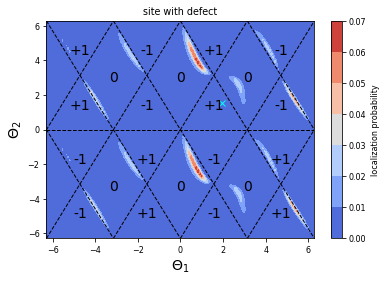

In [8]:
X, Y = np.meshgrid(theta1_array, theta2_array)

plt.subplot(111)
cset = plt.contourf(Y, X, max_value, cmap=cm.coolwarm)

#plot topo phase lines
for i in range(-1,4):
    plt.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [-2*np.pi, 2*np.pi], '--', color='black', linewidth = 1.0) 
    plt.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [2*np.pi, -2*np.pi], '--', color='black', linewidth = 1.0) 
plt.plot([-2*np.pi, 2*np.pi], [0, 0], '--', color='black', linewidth = 1.0)

plt.plot([5*np.pi/8], [np.pi/2], 'x', color='cyan')

plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(-2*np.pi, 2*np.pi)
plt.text(np.pi/2, np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(np.pi/2, 3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-3*np.pi/2, np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-3*np.pi/2, 3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )

plt.text(-np.pi/2, np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi/2, 3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(3*np.pi/2, np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(3*np.pi/2, 3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )

plt.text(np.pi/2, -np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(np.pi/2, -3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi/2, -np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi/2, -3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-3*np.pi/2, -np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-3*np.pi/2, -3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(3*np.pi/2, -np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(3*np.pi/2, -3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )

plt.text(0, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(0, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(np.pi, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(np.pi, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )

    
plt.xlabel(r'$\Theta_1$', fontsize=14)
plt.ylabel(r'$\Theta_2$', fontsize=14)
plt.colorbar(label='localization probability')
plt.title('site with defect')

plt.show()

## Gif plot of maps as function of defect position in Theta_1

In [137]:
defect_positions_theta_1 = [-np.pi, -7*np.pi/8, -3*np.pi/4, -5*np.pi/8, -np.pi/2, -7*np.pi/16, -3*np.pi/8,
                            -np.pi/4,  -np.pi/8, -np.pi/16, 0, 
                            np.pi/16, np.pi/8, np.pi/4, 3*np.pi/8,  7*np.pi/16, np.pi/2, 5*np.pi/8,
                            3*np.pi/4, 7*np.pi/8, np.pi]
folder='data_files/'
file_names = ['max_map_values_def_mpi_piover2.npy',
              'max_map_values_def_m7piover8_piover2.npy',
              'max_map_values_def_m3piover4_piover2.npy',
              'max_map_values_def_m5piover8_piover2.npy',
              'max_map_values_def_mpiover2_piover2.npy',
              'max_map_values_def_m7piover16_piover2.npy',
              'max_map_values_def_m3piover8_piover2.npy',
              'max_map_values_def_mpiover4_piover2.npy',
               'max_map_values_def_mpiover8_piover2.npy',
              'max_map_values_def_mpiover16_piover2.npy', 
             'max_map_values_def_0_piover2.npy', 
              'max_map_values_def_piover16_piover2.npy',
              'max_map_values_def_piover8_piover2.npy', 
              'max_map_values_def_piover4_piover2.npy',
              'max_map_values_def_3piover8_piover2.npy',
              'max_map_values_def_7piover16_piover2.npy', 
              'max_map_values_def_piover2_piover2.npy',
              'max_map_values_def_5piover8_piover2.npy',
              'max_map_values_def_3piover4_piover2.npy',
              'max_map_values_def_7piover8_piover2.npy', 
              'max_map_values_def_pi_piover2.npy']
print(len(defect_positions_theta_1), len(file_names))

21 21


0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done


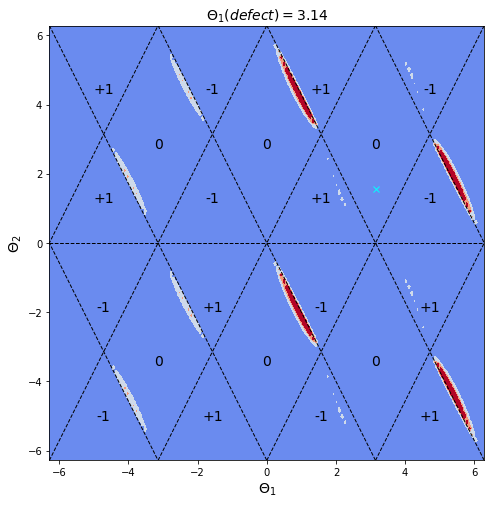

In [138]:
frame_number=len(defect_positions_theta_1)
X, Y = np.meshgrid(theta1_array, theta2_array)

fig, ax = plt.subplots(figsize=(8, 8))


def init():
    cset = plt.contourf(Y, X, np.zeros((len(theta1_array), len(theta1_array))), vmax=0.05, cmap=cm.coolwarm)
    plt.gca().set_aspect('equal')
    plt.xlabel(r'$\Theta_1$', fontsize=14)
    plt.ylabel(r'$\Theta_2$', fontsize=14)
    



def animate(j):
    ax.clear()
    with open(folder+file_names[j], 'rb') as f:
        max_value = np.load(f)
        max_value_nodef_0 = np.load(f)
        max_value_nodef_1= np.load(f)
        theta1_array= np.load(f)
        theta2_array= np.load(f)
        
    ax.contourf(Y, X, max_value, vmax=0.05, cmap=cm.coolwarm)
    ax.set_aspect('equal')
    
    #plot topo phase lines
    for i in range(-1,4):
        plt.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [-2*np.pi, 2*np.pi], '--', color='black', linewidth = 1.0) 
        plt.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [2*np.pi, -2*np.pi], '--', color='black', linewidth = 1.0) 
    plt.plot([-2*np.pi, 2*np.pi], [0, 0], '--', color='black', linewidth = 1.0)

    plt.xlim(-2*np.pi, 2*np.pi)
    plt.ylim(-2*np.pi, 2*np.pi)
    plt.text(np.pi/2, np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(np.pi/2, 3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-3*np.pi/2, np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-3*np.pi/2, 3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )

    plt.text(-np.pi/2, np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi/2, 3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(3*np.pi/2, np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(3*np.pi/2, 3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )

    plt.text(np.pi/2, -np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(np.pi/2, -3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi/2, -np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi/2, -3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-3*np.pi/2, -np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-3*np.pi/2, -3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(3*np.pi/2, -np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(3*np.pi/2, -3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )

    plt.text(0, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(0, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(np.pi, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(np.pi, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    
    plt.title(r'$\Theta_{1}(defect)=$'+str(round(defect_positions_theta_1[j], 2)), fontsize=14)
    plt.plot([defect_positions_theta_1[j]], [np.pi/2], 'x', color='cyan')
    plt.xlabel(r'$\Theta_1$', fontsize=14)
    plt.ylabel(r'$\Theta_2$', fontsize=14)
    print(j, 'done')

anim = animation.FuncAnimation(fig, animate, init_func = init, interval=1000, frames=frame_number, 
                               repeat = False)

savefile = r"theta_1_defect_dependence.gif"
pillowwriter = animation.PillowWriter(fps=1)
anim.save(savefile, writer=pillowwriter)

## Probability asymptotics and search time plots (Fig 2 b, c)

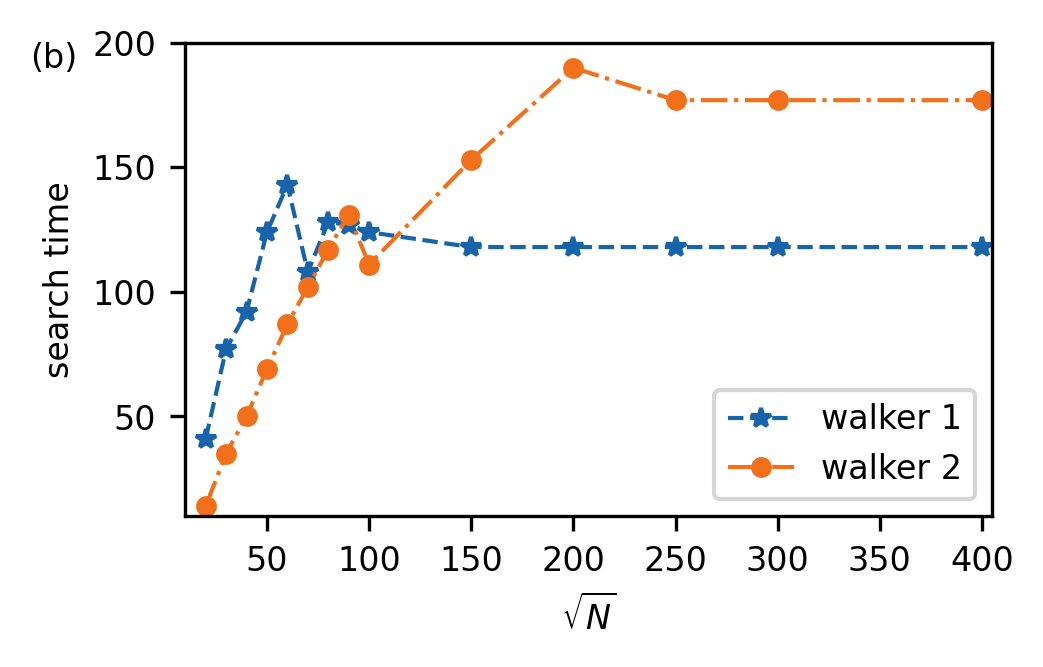

In [23]:
#combined plot for figure
color_list = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]

#figure, fig = plt.subplots(1, figsize=(6.4, 3.5))

fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)

data_time_table= [(20, 41), (30, 77), (40, 92), (50, 124), (60, 143), 
                  (70, 108), (80, 128), (90, 127), (100, 124), (150, 118), (200, 118), (250, 118), 
                  (300, 118), (400, 118)]


plt.plot([elem[0] for elem in data_time_table], 
         [elem[1] for elem in data_time_table], '*--', color=cm.Blues(0.8), label = 'walker 1',linewidth=1, markersize=5)


data_time_table_magenta= [(20, 14), (30, 35), (40, 50), (50, 69), (60, 87), 
                  (70, 102), (80, 117), (90, 131), (100, 111), (150, 153), (200, 190), (250, 177), 
                  (300, 177), (400, 177), (500,177)]



plt.plot([elem[0] for elem in data_time_table_magenta[:-1]], 
         [elem[1] for elem in data_time_table_magenta[:-1]], 'o-.', color=cm.Oranges(0.6), label = 'walker 2',linewidth=1, markersize=4)

plt.ylabel('search time', fontsize=8)
plt.xlabel(r'$\sqrt{N}$', fontsize=8)

plt.xlim(10.0, 405)
plt.ylim(10.0, 200)
#plt.ylim(0.0, 0.05)
#plt.gca().set_aspect('equal')
plt.text(-66.0, 190.0, '(b)', fontsize=8)
plt.gca().tick_params(axis='both', labelsize=8)

plt.legend(fontsize=8, loc='lower right')
#plt.tight_layout()
plt.savefig('fig2_search_time_comparison.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
     transparent=False, bbox_inches='tight', 
      metadata=None)
plt.show()

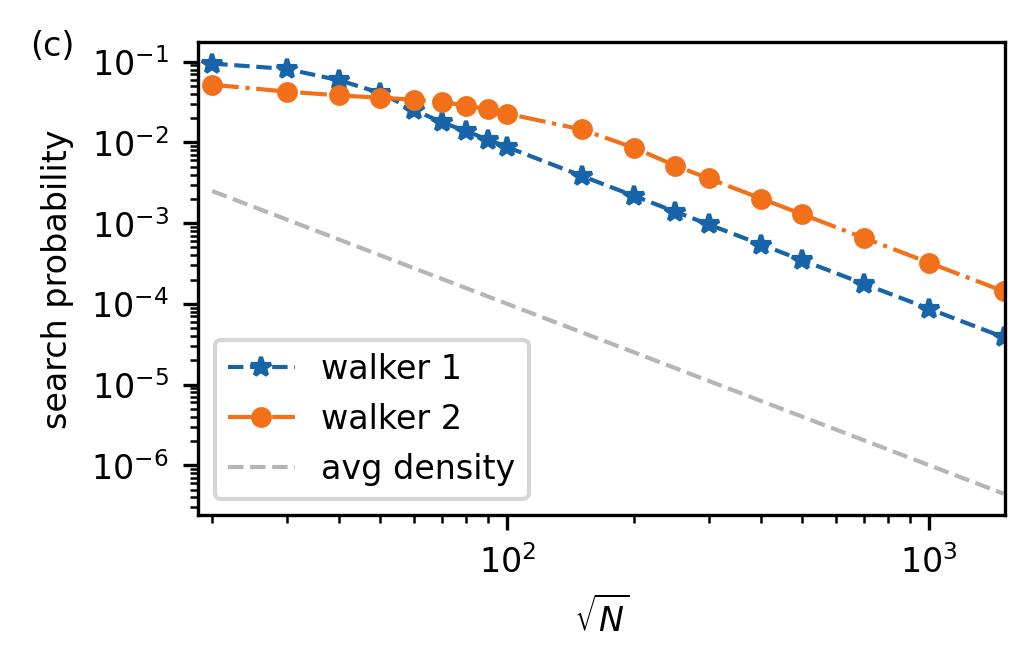

In [24]:
fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)


data_probability_table= [(20, 0.09487766566757226), (30, 0.08153086787757462), (40, 0.05895669302198611), (50, 0.04109095536687267), 
                         (60, 0.025470874283016535), 
                  (70, 0.01774035052677464), (80, 0.013780663182985627), (90, 0.010833039951606914), (100, 0.008758684861669962), 
                         (150, 0.0038567575967876425), (200, 0.002169426148190729), (250, 0.0013884327348420633), 
                  (300, 0.0009641893991958789), (400, 0.0005423565370476823), (500, 0.0003471081837105158), 
                         (700, 0.0001770960120972022), (1000, 8.677704592762895e-05), (1500, 3.8567575967835165e-05)]


ax.plot([elem[0] for elem in data_probability_table], 
         [elem[1] for elem in data_probability_table], '*--', color=cm.Blues(0.8), label = 'walker 1',linewidth=1, markersize=5)



data_probability_table_2= [(20, 0.051913911097790644), (30, 0.04268161252656818), (40, 0.038282565044546316), (50, 0.03585586614642573), 
                         (60, 0.033939377938867706), 
                  (70, 0.03165569185440148), (80, 0.028706440262648698), (90, 0.025652591173608064), (100, 0.022706631102894496), 
                         (150, 0.014496085538448528), (200, 0.008568894887354253), (250, 0.005159959883283479), 
                  (300, 0.0035808126144586793), (400, 0.0020142070956351375), (500, 0.0012890925412064869), 
                         (700, 0.0006577002761257586), (1000, 0.0003222731353016217), (1500, 0.0001432325045784988)]


ax.plot([elem[0] for elem in data_probability_table_2], 
         [elem[1] for elem in data_probability_table_2], 'o-.', color=cm.Oranges(0.6), label = 'walker 2',linewidth=1, markersize=4)
#ax.plot([elem[0] for elem in data_probability_table_2], 
#         [1/(np.log(elem[0]**2)) for elem in data_probability_table_2], 'x--', color=cm.Greys(0.8), label = 'Grover alg.',linewidth=1, markersize=4)
ax.plot([elem[0] for elem in data_probability_table_2], 
         [1/(elem[0]**2) for elem in data_probability_table_2], '--', color=cm.Greys(0.4), label = 'avg density',linewidth=1)


plt.text(7.4, 0.12, '(c)', fontsize=8)
plt.gca().tick_params(axis='both', labelsize=8)


plt.ylabel('search probability', fontsize=8)
plt.xlabel(r'$\sqrt{N}$', fontsize=8)
plt.xscale('log')
plt.yscale('log')

plt.xlim(18.5, 1510)
#plt.ylim(0, 0.1)
#plt.ylim(40.0, 145)
#plt.ylim(0.0, 0.05)

plt.legend(fontsize=8)
#plt.tight_layout()
plt.savefig('fig2_probability_comparison.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
     transparent=False, bbox_inches='tight',
      metadata=None)
plt.show()

## Plot 2d - evolution with time

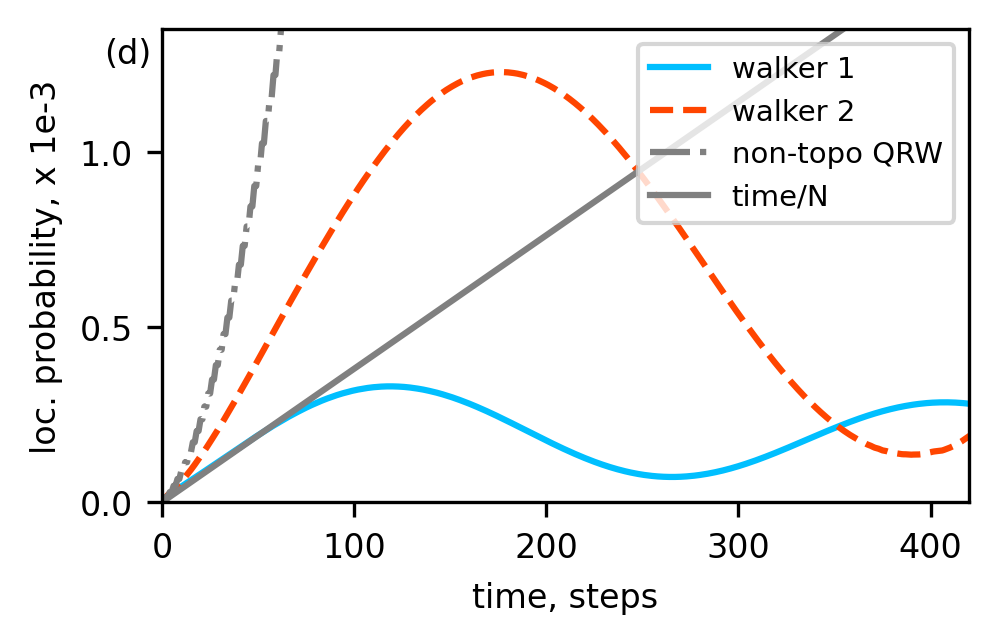

In [43]:
time_set= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]
probabilities_walker1= [6.396555905728406e-06, 1.0227936465801262e-05, 1.4534973118273228e-05, 1.8854908673895486e-05, 2.3108283834396192e-05, 2.718656722201333e-05, 3.0736177809324426e-05, 3.398703313994265e-05, 3.744424683361943e-05, 4.106211653590722e-05, 4.464024652040777e-05, 4.8239682050082364e-05, 5.194996075244927e-05, 5.5675300184007186e-05, 5.9238728413706595e-05, 6.270912087728725e-05, 6.629859567381563e-05, 6.995146588073351e-05, 7.351851785886805e-05, 7.708068555055334e-05, 8.076641904631674e-05, 8.452672855479e-05, 8.823385351092435e-05, 9.190172832174337e-05, 9.563235432529855e-05, 9.936149197510178e-05, 0.00010297103576135616, 0.00010655112879006068, 0.00011025223550670458, 0.00011405493334389099, 0.00011785108681623457, 0.00012162561329606945, 0.00012542415923823345, 0.00012918044629699137, 0.0001327992015447392, 0.00013637138398390642, 0.0001400540546072363, 0.0001438435332215665, 0.00014764062015743237, 0.00015141710222464603, 0.000155192985553432, 0.0001589072566435375, 0.00016248188444154736, 0.00016599946151722757, 0.00016960856745644324, 0.00017331062991805606, 0.0001770124865927851, 0.0001806857394682655, 0.00018434630271499175, 0.00018794432775565468, 0.00019141359476352123, 0.00019481991893088537, 0.00019829102632606358, 0.0002018261223646224, 0.0002053389275183568, 0.00020881087915502328, 0.00021226831157563107, 0.000215675849328085, 0.00021897362894745216, 0.00022220485269188952, 0.00022546886682741138, 0.00022875887731250337, 0.00023199771280731478, 0.00023518264711244735, 0.00023835797573145434, 0.00024150318812153214, 0.0002445600200060422, 0.00024754705653842686, 0.0002505335928018613, 0.0002535064132946514, 0.0002563994070523133, 0.0002592269663411215, 0.0002620522178283673, 0.0002648673935356221, 0.00026761267358230075, 0.00027028423532125855, 0.00027292515697367536, 0.00027551794627891755, 0.00027800817000249553, 0.0002804241298377056, 0.0002828431636882769, 0.000285266509106292, 0.0002876318427600003, 0.00028991878769841085, 0.0002921520315214862, 0.0002943133015265253, 0.00029635868080999837, 0.0002983238751452811, 0.0003002923586254146, 0.0003022701337799712, 0.0003041936621443421, 0.00030603413270125705, 0.0003078074507972442, 0.00030949810411139687, 0.00031106991025372263, 0.0003125580351565803, 0.0003140430414491022, 0.00031553199180639447, 0.0003169630741168004, 0.0003183075780600839, 0.00031958169258771926, 0.00032077520535269435, 0.0003218559193828641, 0.0003228511085525723, 0.0003238307573603602, 0.0003248005541494753, 0.00032570399469682105, 0.0003265195465376933, 0.0003272703064658076, 0.0003279523565872847, 0.0003285337145338827, 0.0003290286987068535, 0.0003294921119240373, 0.00032992739212363016, 0.00033028643667726515, 0.00033055908402146347, 0.00033077843149968917, 0.00033094632075874724, 0.0003310281598191418, 0.00033102352311328387, 0.000330971166399245, 0.00033087277883701486, 0.0003306903520822764, 0.0003304257703272589, 0.00033012157194518566, 0.00032978375237099195, 0.0003293739440871814, 0.000328878571709344, 0.0003283228470912837, 0.00032770804580166824, 0.0003270060852628243, 0.0003262283340619852, 0.00032542332774139265, 0.000324599216602361, 0.000323714593309155, 0.0003227469976110675, 0.00032171280049213095, 0.00032061433043830193, 0.0003194314827847945, 0.00031818037491061443, 0.0003169105792647796, 0.0003156306630685163, 0.00031429851783636956, 0.0003128884504361248, 0.0003114133519523727, 0.0003098775822933602, 0.0003082658470076255, 0.0003065935981295121, 0.000304906519947489, 0.00030321256128303076, 0.0003014721078160495, 0.0002996617811319596, 0.000297795558073278, 0.0002958799785821968, 0.0002939010257408398, 0.00029186888354239553, 0.00028982176384244557, 0.00028776679802643303, 0.0002856699575173317, 0.0002835143119535008, 0.00028131769690949393, 0.0002790881681259092, 0.0002768099948525543, 0.00027448539175490205, 0.00027214359195012116, 0.00026979137807097353, 0.0002674024130069256, 0.00026496812327633036, 0.0002625108323444633, 0.0002600389577285041, 0.0002575333189697858, 0.000254987811832271, 0.0002524233036260734, 0.0002498469855298619, 0.00024724078026678524, 0.00024460401135668707, 0.00024196226229878778, 0.00023932314223650437, 0.00023666387879759103, 0.0002339718248263887, 0.00023126165000912342, 0.00022854155657290012, 0.00022580067168211028, 0.00022304388237944894, 0.00022029769551584326, 0.00021756815977171573, 0.00021483024754298207, 0.00021206791666700595, 0.00020929245275566366, 0.00020651316681185924, 0.000203724076263483, 0.0002009323541873982, 0.00019816291656751169, 0.00019542015948005153, 0.00019267910022707817, 0.00018992381049834557, 0.00018716472238955594, 0.00018441171317195996, 0.00018166079254931843, 0.00017891825015930196, 0.00017620553832489998, 0.0001735259497219777, 0.00017085706151427163, 0.0001681859659340996, 0.00016552382641627278, 0.00016288002695989394, 0.00016024985905830824, 0.00015763652585655294, 0.00015505726238321368, 0.00015251519643108438, 0.00014999244366129563, 0.00014748076293052308, 0.0001449924498570877, 0.00014253515136774454, 0.00014010156630631454, 0.00013769101756037902, 0.00013531692448935957, 0.00013298319331647422, 0.00013067738646475941, 0.00012839610613526875, 0.00012615218656158384, 0.00012395052720042264, 0.00012178055589412047, 0.00011963828887600174, 0.00011753453083130413, 0.00011547453308076064, 0.00011345096433726472, 0.00011146422096665695, 0.00010952657593980668, 0.00010763975354533575, 0.0001057904265267207, 0.0001039728046337586, 0.00010219650282290917, 0.00010046805633352998, 9.878384694503177e-05, 9.714635518660016e-05, 9.556626882331751e-05, 9.404244856825271e-05, 9.256019099517024e-05, 9.111368060220486e-05, 8.971242440463603e-05, 8.836351366825178e-05, 8.706507099575433e-05, 8.581996133361299e-05, 8.463680718353307e-05, 8.35125689575624e-05, 8.243287248430178e-05, 8.139331812567291e-05, 8.040368533388247e-05, 7.947041387892489e-05, 7.85913977988836e-05, 7.776874687116842e-05, 7.700928671577548e-05, 7.630939562204381e-05, 7.565649483819999e-05, 7.504829555918089e-05, 7.449448568498104e-05, 7.399952011531229e-05, 7.355960548930257e-05, 7.317578168647318e-05, 7.285398650448433e-05, 7.259128623426498e-05, 7.237770203916325e-05, 7.221291442937244e-05, 7.210566850388142e-05, 7.2057381217878e-05, 7.206191789649906e-05, 7.211968677289507e-05, 7.223692780218167e-05, 7.241223964012652e-05, 7.263822181539937e-05, 7.291576140266531e-05, 7.325176010266007e-05, 7.364415035671993e-05, 7.408462772414255e-05, 7.457382010767229e-05, 7.511927332616331e-05, 7.572130066351289e-05, 7.637434884127355e-05, 7.707954060352631e-05, 7.784143070091475e-05, 7.86547679189362e-05, 7.950984882106979e-05, 8.040833080571475e-05, 8.135948508216408e-05, 8.236483164076645e-05, 8.341955063003883e-05, 8.452426767517114e-05, 8.56813760909987e-05, 8.688340282612657e-05, 8.81202408440268e-05, 8.939495353163873e-05, 9.071819060678027e-05, 9.209166201478096e-05, 9.351019087199074e-05, 9.497372551474198e-05, 9.648340921923355e-05, 9.803089016081617e-05, 9.960648990243288e-05, 0.00010121443063279663, 0.00010286572586762555, 0.00010456107899931546, 0.00010629423057855725, 0.00010806489732731263, 0.00010987438087028835, 0.00011171479735993042, 0.00011357729304630836, 0.00011546644660574339, 0.00011739229549871189, 0.00011935353253963551, 0.00012134262671025497, 0.00012335994847517982, 0.00012540844723056376, 0.00012748170312187505, 0.00012957156960819718, 0.0001316819158189983, 0.00013382060320230564, 0.0001359838028113578, 0.00013816302347363166, 0.00014036024570713293, 0.00014258117389477713, 0.00014482127138225174, 0.00014707259407457896, 0.00014933737491362622, 0.0001516206660357117, 0.00015391623741082479, 0.00015621524083981271, 0.00015852188399667784, 0.00016084499548736636, 0.00016318172416377352, 0.00016552370261531754, 0.00016787110899513181, 0.00017022636520461714, 0.00017258153503921646, 0.00017492801614866945, 0.00017727222227222885, 0.0001796256082350098, 0.00018198633648935773, 0.0001843451659895903, 0.00018670051136678337, 0.00018905314197012823, 0.00019139445965635172, 0.0001937164456660776, 0.00019602698217290434, 0.00019833892613760297, 0.0002006505753172782, 0.00020295175264702805, 0.00020524007027007433, 0.00020751615566811193, 0.0002097718320478696, 0.0002119995935745803, 0.00021420750891364577, 0.00021640825291869954, 0.00021859947616630963, 0.0002207704428535346, 0.0002229193185633127, 0.0002250482019385268, 0.00022715016820177284, 0.00022921777224768202, 0.00023125780948199978, 0.00023328129998801553, 0.00023528480222108895, 0.00023725771545879239, 0.00023920008746587508, 0.0002411167431070268, 0.0002430024039636895, 0.00024484903638673125, 0.0002466609656289344, 0.00024844662272881696, 0.00025020147772543666, 0.0002519158270606576, 0.0002535924717295539, 0.0002552395107540094, 0.0002568532404752882, 0.00025842446541172196, 0.0002599544789343974, 0.00026144897773613967, 0.00026290275156862333, 0.0002643075431980014, 0.0002656690239399231, 0.00026699827289674975, 0.0002682927399394122, 0.0002695418308659229, 0.0002707440654672941, 0.00027190305449911024, 0.0002730135476424875, 0.00027406885699113846, 0.0002750768231131547, 0.0002760504830820867, 0.0002769878776290009, 0.00027787726359086457, 0.00027871540387921183, 0.0002795050352649321, 0.00028024150749794414, 0.0002809193290866347, 0.000281547178988979, 0.0002821386216156064, 0.00028269180669623646, 0.00028319456004252864, 0.0002836433730213412, 0.0002840415015587563, 0.0002843853278168332, 0.0002846697880076137, 0.0002849028180715127, 0.0002850970897545428, 0.00028525062232910217, 0.0002853518110446129, 0.00028539840124391734, 0.00028539533150280993, 0.00028534012750250733, 0.00028522722841447547, 0.00028506244464628603, 0.0002848565320317997, 0.0002846074348563, 0.00028430510848989426, 0.0002839496829965626, 0.0002835483982014336, 0.000283099725279843, 0.0002825968281677745, 0.0002820425893119873, 0.00028144545983332974, 0.0002808035941895818, 0.0002801091869522356, 0.00027936518013362525, 0.00027858105583135557, 0.00027775584527646316, 0.00027688107207934, 0.00027595666942255824, 0.00027498905740336354, 0.00027397696434826904, 0.00027291497959901917, 0.0002718084889793529, 0.0002706685563142198, 0.000269494377539366, 0.00026827602575905485, 0.00026701121315668295, 0.0002657050930510049, 0.0002643572332220961, 0.00026296419626453124, 0.00026153279339032943, 0.00026007465358628894, 0.0002585888959785242, 0.0002570648560753084, 0.00025549925859492267, 0.0002538969451715542, 0.00025225835600175314, 0.0002505811494493812, 0.00024887222031365694, 0.00024714271628427213, 0.00024539168239979674, 0.00024360875514447438, 0.00024179103623851915, 0.0002399438802160341, 0.00023806835836425767, 0.00023616214824188876, 0.00023423096251891712, 0.00023228468962564332, 0.000230322534604466, 0.00022833549868732237, 0.00022632216955112042, 0.00022428886856092425, 0.00022223684906153102, 0.00022016284447636767, 0.00021807054237706026, 0.00021596824135161765, 0.0002138556636665684, 0.00021172595653349364, 0.00020957976434634828, 0.0002074243667767032, 0.00020526069201570873, 0.0002030839511981929, 0.00020089558007475248, 0.00019870241778677982, 0.00019650502166496068, 0.00019429896482619575, 0.0001920868800820186, 0.00018987660437242565, 0.00018766835178638043, 0.00018545576803171652, 0.00018323842142519618, 0.0001810221443436962, 0.00017880845040444245, 0.0001765950523348897, 0.0001743859620445612, 0.00017218897195382606, 0.00017000344933700744, 0.00016782195166154223, 0.00016564299089967947, 0.0001634719401764583, 0.000161311099864649, 0.00015915957247013087, 0.00015702184884378107, 0.00015490511156866053, 0.00015280805359060728, 0.00015072297213204874, 0.00014864826996643208, 0.00014658927559125807, 0.00014454862136459675, 0.00014252581739322018, 0.00014052495260833718]
probabilities_walker2= [1.0034972746969398e-05, 1.1217126171416965e-05, 1.4365687713781427e-05, 2.059794108833077e-05, 2.550779311659321e-05, 3.0172765047265466e-05, 3.548110237873657e-05, 4.072229778351846e-05, 4.640888540054637e-05, 5.253332321984894e-05, 5.880522567771277e-05, 6.526968386435283e-05, 7.201453302330645e-05, 7.882983210063624e-05, 8.553765713372296e-05, 9.25036222062779e-05, 9.98320657150691e-05, 0.00010740329657208659, 0.00011509245716945021, 0.00012276524615146932, 0.00013068007943929015, 0.0001387051286700614, 0.00014664244856694102, 0.0001548092828893319, 0.0001632034316633847, 0.00017180966519625348, 0.00018050069423813562, 0.00018906477654465612, 0.00019783342960501399, 0.00020671873695136015, 0.00021554378070873996, 0.00022456030631946361, 0.0002336951103015469, 0.00024300538001056283, 0.00025237529009541866, 0.00026156192268013385, 0.0002709145843859128, 0.00028037460107488394, 0.00028979794915951867, 0.000299374866383869, 0.0003089806739362211, 0.00031872129536495374, 0.0003285008078246804, 0.0003380737586758033, 0.0003477795118980835, 0.00035757499077152254, 0.0003673508670982908, 0.00037724446562601777, 0.0003870964193376783, 0.00039704398141221877, 0.00040701295461423174, 0.00041677444132210133, 0.00042664274329264003, 0.0004365795398898695, 0.0004465075422542087, 0.00045651909085975696, 0.00046643641362617756, 0.000476416135371163, 0.0004864029271581657, 0.0004961958601635524, 0.000506075637483428, 0.0005160017470152805, 0.0005259248952429158, 0.000535898277577409, 0.0005457404592198177, 0.0005556199774960807, 0.0005654954317508168, 0.0005751989261290355, 0.0005849721795216765, 0.0005947693186929996, 0.0006045658035163733, 0.0006143797823862314, 0.0006240378050487822, 0.0006337158066324091, 0.0006433814592118212, 0.0006529004965865791, 0.000662471558233316, 0.0006720429012923151, 0.0006816134026625721, 0.000691169770297976, 0.0007005542353454188, 0.000709946675600823, 0.0007193202205062535, 0.0007285725438065077, 0.000737855911275555, 0.0007471133769655203, 0.0007563676706724943, 0.0007655784963012092, 0.0007746077366959366, 0.0007836352188977534, 0.000792637223378306, 0.0008015412301163331, 0.000810451177285971, 0.0008193055843026007, 0.000828152142323172, 0.0008369295304296116, 0.0008455205968694212, 0.0008540998069504907, 0.0008626449494692872, 0.0008711117331094109, 0.0008795561194476833, 0.0008879123214688505, 0.0008962533105430407, 0.0009045040617890402, 0.0009125683897784571, 0.0009206089800084154, 0.0009286033817513616, 0.0009365345573886462, 0.0009444138687831323, 0.0009521713042662977, 0.0009599034822639728, 0.0009675293653262641, 0.0009749734571079579, 0.0009823800946568535, 0.0009897243552902987, 0.0009970154661021083, 0.0010042266032370048, 0.0010112841482691638, 0.0010183043593047121, 0.0010252069799931642, 0.00103193704661415, 0.0010386150215662198, 0.0010452110160017337, 0.0010517587495622793, 0.001058201871716822, 0.001064464898447663, 0.0010706777314938344, 0.0010767657759687315, 0.0010826943634813476, 0.0010885565056089261, 0.0010943152758801432, 0.0011000258776552511, 0.0011056120141247317, 0.0011109993217489587, 0.0011163242828013187, 0.0011215205414344678, 0.0011265729211171547, 0.001131545671110938, 0.0011363939500664386, 0.0011411902836709381, 0.0011458475450761825, 0.0011502962860214486, 0.001154672464840023, 0.0011589185332019514, 0.0011630370651799513, 0.0011670642263639638, 0.001170948040924745, 0.0011747735802278357, 0.0011784505272815636, 0.0011819181538216177, 0.0011853055070790075, 0.0011885631468074296, 0.0011917087289286248, 0.0011947523945865896, 0.001197637407152807, 0.0012004566855233084, 0.0012031224644837237, 0.001205585741812998, 0.001207963319337552, 0.0012102127115083657, 0.0012123634748131187, 0.0012144025582255542, 0.001216271879643762, 0.0012180681079268219, 0.0012197099862916332, 0.0012211619494529498, 0.0012225242673069747, 0.00122376036772058, 0.0012249086326185114, 0.0012259360603867244, 0.0012267868912656057, 0.0012275582060061782, 0.0012281778245397642, 0.0012286239924023839, 0.0012289770871356984, 0.0012292057073179474, 0.0012293546193176404, 0.0012293744480194938, 0.0012292149644569721, 0.0012289708982922065, 0.0012285807190346057, 0.0012280358547647988, 0.0012273943330764845, 0.0012266293644536189, 0.0012257905022946128, 0.001224815992634913, 0.0012236634778997144, 0.0012224228101084043, 0.0012210438935377997, 0.0012195301929765292, 0.001217915992914391, 0.0012161785289496912, 0.0012143712235204215, 0.0012124243855684295, 0.0012103049469389593, 0.0012080953362611539, 0.0012057569026667127, 0.0012033038754368053, 0.0012007467400338078, 0.001198066031638077, 0.0011953183897829185, 0.0011924308985024152, 0.0011893804607847093, 0.0011862395021846831, 0.0011829799954407852, 0.00117962569334858, 0.0011761647738233634, 0.0011725802864551538, 0.0011689312605493952, 0.001165146138115842, 0.001161211979778069, 0.0011571888299165673, 0.0011530576696740056, 0.001148850500851422, 0.0011445362139810421, 0.0011400997481109, 0.0011356012498227085, 0.001130974468815347, 0.001126216460193885, 0.00112137307343417, 0.0011164321151850248, 0.0011114323676123586, 0.001106327668847656, 0.0011011046063317555, 0.001095822716383426, 0.0010904239468798836, 0.0010849148400091156, 0.0010793261159613822, 0.0010736500480756262, 0.0010679304330559563, 0.0010621109619392245, 0.00105618010567841, 0.0010501948135865987, 0.0010441068623881443, 0.0010379313566097118, 0.0010316839660930313, 0.0010253593315051436, 0.0010190042486000804, 0.0010125572179714478, 0.001006009208774113, 0.000999412649264084, 0.000992729585595508, 0.0009859823018953252, 0.000979172429147111, 0.0009722954649669747, 0.000965399129079157, 0.0009584212141399639, 0.0009513559400974325, 0.0009442495656378552, 0.0009370739305102802, 0.00092985673475616, 0.0009225872826405807, 0.0009152611317482671, 0.0009079250343162269, 0.0009005197569429326, 0.0008930433859997046, 0.0008855347673823596, 0.0008779744892722862, 0.0008703937277998829, 0.0008627716005580478, 0.0008551035545227019, 0.0008474338523532275, 0.000839708999241819, 0.000831931233830654, 0.0008241311563039744, 0.0008162967850335191, 0.0008084609230147323, 0.000800594848299683, 0.0007926941320818152, 0.0007847994534944762, 0.0007768649322485447, 0.000768896865929722, 0.0007609171409714569, 0.0007529197961873093, 0.0007449377313278011, 0.0007369368037125935, 0.0007289131063363078, 0.0007209030033503566, 0.0007128693006393466, 0.0007048219628339266, 0.0006967740328797029, 0.0006887241456583953, 0.0006807041979272199, 0.0006726770397717884, 0.0006646396722853412, 0.0006566236481366658, 0.0006486008046375702, 0.0006405842257282692, 0.0006325783426008408, 0.0006245849766447792, 0.0006166343259552438, 0.0006086885678828148, 0.0006007459143316302, 0.0005928327362016065, 0.0005849295804631238, 0.0005770520734534009, 0.0005691966802580513, 0.0005613670557403785, 0.0005535912848135793, 0.0005458330158524807, 0.0005380918967613003, 0.0005303888368937229, 0.0005227121734783805, 0.0005150795317160038, 0.0005074804992976801, 0.0004999193486244794, 0.0004924217717145552, 0.0004849546899223378, 0.000477519367843771, 0.0004701311058788671, 0.0004627846309307227, 0.0004554990538932612, 0.0004482585735570565, 0.0004410671048633827, 0.00043394769797776994, 0.00042687185428836997, 0.0004198426073105627, 0.00041286971435125947, 0.0004059525881703159, 0.0003991113074888936, 0.0003923264382985819, 0.00038560089050732646, 0.0003789548221978207, 0.0003723650237042617, 0.00036583640566199, 0.00035937352735133796, 0.00035297869915210984, 0.00034667241903423566, 0.00034043344669758995, 0.00033426339889884663, 0.0003281793198840593, 0.00032216338351966165, 0.00031622240714331885, 0.0003103563871015114, 0.00030456887794346664, 0.00029888022721984007, 0.00029326905985537795, 0.00028773572628122983, 0.0002822940533830697, 0.0002769311866348687, 0.00027165569582720503, 0.00026646379270902216, 0.00026135910093515944, 0.0002563615200094524, 0.00025145050420561445, 0.00024662475108543574, 0.00024189566487618094, 0.00023725610482309493, 0.00023271473971908684, 0.0002282614539304089, 0.00022390148462634498, 0.00021966132660963963, 0.00021551830111445278, 0.00021145476813101886, 0.000207485105617441, 0.00020363538794180438, 0.0001999085799178861, 0.000196238225459655, 0.00019263332128654202, 0.00018921256412974006, 0.00018595844479650693, 0.00018270116941980624, 0.0001794301607959156, 0.0001764057067542339, 0.000173692332328042, 0.00017088921369560036, 0.00016787952519520488, 0.00016522801364670243, 0.00016313600797505186, 0.0001608759215656976, 0.00015810287067354945, 0.0001557150358542212, 0.00015423147935150197, 0.0001525999661403661, 0.00015015383472808487, 0.0001480267825081634, 0.00014698852478333573, 0.0001459349600939877, 0.00014405750038806942, 0.00014233428623108542, 0.00014148440459720105, 0.00014073732413979974, 0.00013963824398793558, 0.0001386912407183262, 0.0001379688444135587, 0.00013725667036706838, 0.00013688666788155948, 0.00013683617160650078, 0.00013642623553433505, 0.0001357894526242001, 0.00013574328424075741, 0.00013608219365813832, 0.0001360891101883039, 0.0001360329563906154, 0.0001363536473285848, 0.00013688051605168246, 0.00013773682052764947, 0.0001391197075603374, 0.00014047649856691882, 0.00014150430613034474, 0.00014271184465555956, 0.0001440973360915651, 0.00014505496996358608, 0.00014564788965994304, 0.0001462353177204689, 0.00014679578598536153, 0.00014770272977262651, 0.00014941595611392275, 0.00015147216989628117, 0.00015345599910935028, 0.00015569473967546392, 0.000158201901017967, 0.0001607383748736565, 0.0001635654021270284, 0.00016672407908917337, 0.00016985964741230596, 0.00017321637391142685, 0.00017709952914744207, 0.0001810282315112038, 0.00018474348220245295, 0.00018846009324910803, 0.00019201246651455296, 0.000195492341237125, 0.00019944224156876427, 0.00020363053539889083, 0.00020752668059761194, 0.0002112694404775772, 0.0002148705918963662, 0.00021820944631928204, 0.00022177325568512024, 0.00022570981509932223, 0.00022947882853869292, 0.00023307746672268206, 0.00023670333846294991, 0.00024009728061849303, 0.0002435067946397821, 0.0002473201662595806, 0.00025112038768302524, 0.0002547941246284436, 0.0002586511792197441, 0.000262414502389635, 0.0002660950684144991, 0.00027015298959581134, 0.00027433079924841434, 0.0002784199797074838, 0.00028277315469442263, 0.0002872026572467406, 0.0002915174382746986, 0.0002961489956269128, 0.00030099802473720043, 0.0003057758482234738, 0.00031084210463357955, 0.00031610887307899495, 0.0003212515418004207, 0.00032666851319442295, 0.0003323527774868782, 0.0003379543482346416, 0.0003438304295933671, 0.00034996848386877006, 0.00035598705150421484, 0.00036223322601172724, 0.0003687527653971999, 0.00037519326031107577, 0.00038187012929651043, 0.00038880887846842743, 0.0003956184546442187, 0.0004025949086276937, 0.0004098378933096689, 0.00041700178719850003, 0.00042436129306965795, 0.00043197900389003633, 0.0004394304740341005, 0.0004469591595889132, 0.00045471219493254224, 0.0004623829642635578, 0.00047026010269810394, 0.0004783854444745156, 0.0004862838617239562, 0.0004941712640073963, 0.0005021954632484474, 0.0005101275597858509, 0.0005183042571941751, 0.0005267248614853933, 0.0005348916871530587, 0.0005429436503708471, 0.0005510043554433611, 0.0005589827127297938, 0.0005672482233486235, 0.0005757543185092145, 0.0005839875469859594, 0.0005920100769794683, 0.0005999563493173454, 0.0006078250398544162, 0.0006159825622975481, 0.0006243685458584382, 0.0006324695937493267, 0.000640317670628765, 0.0006480493547712989, 0.0006557001004198594, 0.0006636132827466221]
classical= [0.0, 3.814697265625e-06, 7.62939453125e-06, 1.1444091796875e-05, 1.52587890625e-05, 1.9073486328125e-05, 2.288818359375e-05, 2.6702880859375e-05, 3.0517578125e-05, 3.4332275390625e-05, 3.814697265625e-05, 4.1961669921875e-05, 4.57763671875e-05, 4.9591064453125e-05, 5.340576171875e-05, 5.7220458984375e-05, 6.103515625e-05, 6.4849853515625e-05, 6.866455078125e-05, 7.2479248046875e-05, 7.62939453125e-05, 8.0108642578125e-05, 8.392333984375e-05, 8.7738037109375e-05, 9.1552734375e-05, 9.5367431640625e-05, 9.918212890625e-05, 0.000102996826171875, 0.0001068115234375, 0.000110626220703125, 0.00011444091796875, 0.000118255615234375, 0.0001220703125, 0.000125885009765625, 0.00012969970703125, 0.000133514404296875, 0.0001373291015625, 0.000141143798828125, 0.00014495849609375, 0.000148773193359375, 0.000152587890625, 0.000156402587890625, 0.00016021728515625, 0.000164031982421875, 0.0001678466796875, 0.000171661376953125, 0.00017547607421875, 0.000179290771484375, 0.00018310546875, 0.000186920166015625, 0.00019073486328125, 0.000194549560546875, 0.0001983642578125, 0.000202178955078125, 0.00020599365234375, 0.000209808349609375, 0.000213623046875, 0.000217437744140625, 0.00022125244140625, 0.000225067138671875, 0.0002288818359375, 0.000232696533203125, 0.00023651123046875, 0.000240325927734375, 0.000244140625, 0.000247955322265625, 0.00025177001953125, 0.000255584716796875, 0.0002593994140625, 0.000263214111328125, 0.00026702880859375, 0.000270843505859375, 0.000274658203125, 0.000278472900390625, 0.00028228759765625, 0.000286102294921875, 0.0002899169921875, 0.000293731689453125, 0.00029754638671875, 0.000301361083984375, 0.00030517578125, 0.000308990478515625, 0.00031280517578125, 0.000316619873046875, 0.0003204345703125, 0.000324249267578125, 0.00032806396484375, 0.000331878662109375, 0.000335693359375, 0.000339508056640625, 0.00034332275390625, 0.000347137451171875, 0.0003509521484375, 0.000354766845703125, 0.00035858154296875, 0.000362396240234375, 0.0003662109375, 0.000370025634765625, 0.00037384033203125, 0.000377655029296875, 0.0003814697265625, 0.000385284423828125, 0.00038909912109375, 0.000392913818359375, 0.000396728515625, 0.000400543212890625, 0.00040435791015625, 0.000408172607421875, 0.0004119873046875, 0.000415802001953125, 0.00041961669921875, 0.000423431396484375, 0.00042724609375, 0.000431060791015625, 0.00043487548828125, 0.000438690185546875, 0.0004425048828125, 0.000446319580078125, 0.00045013427734375, 0.000453948974609375, 0.000457763671875, 0.000461578369140625, 0.00046539306640625, 0.000469207763671875, 0.0004730224609375, 0.000476837158203125, 0.00048065185546875, 0.000484466552734375, 0.00048828125, 0.000492095947265625, 0.00049591064453125, 0.000499725341796875, 0.0005035400390625, 0.000507354736328125, 0.00051116943359375, 0.000514984130859375, 0.000518798828125, 0.000522613525390625, 0.00052642822265625, 0.000530242919921875, 0.0005340576171875, 0.000537872314453125, 0.00054168701171875, 0.000545501708984375, 0.00054931640625, 0.000553131103515625, 0.00055694580078125, 0.000560760498046875, 0.0005645751953125, 0.000568389892578125, 0.00057220458984375, 0.000576019287109375, 0.000579833984375, 0.000583648681640625, 0.00058746337890625, 0.000591278076171875, 0.0005950927734375, 0.000598907470703125, 0.00060272216796875, 0.000606536865234375, 0.0006103515625, 0.000614166259765625, 0.00061798095703125, 0.000621795654296875, 0.0006256103515625, 0.000629425048828125, 0.00063323974609375, 0.000637054443359375, 0.000640869140625, 0.000644683837890625, 0.00064849853515625, 0.000652313232421875, 0.0006561279296875, 0.000659942626953125, 0.00066375732421875, 0.000667572021484375, 0.00067138671875, 0.000675201416015625, 0.00067901611328125, 0.000682830810546875, 0.0006866455078125, 0.000690460205078125, 0.00069427490234375, 0.000698089599609375, 0.000701904296875, 0.000705718994140625, 0.00070953369140625, 0.000713348388671875, 0.0007171630859375, 0.000720977783203125, 0.00072479248046875, 0.000728607177734375, 0.000732421875, 0.000736236572265625, 0.00074005126953125, 0.000743865966796875, 0.0007476806640625, 0.000751495361328125, 0.00075531005859375, 0.000759124755859375, 0.000762939453125, 0.000766754150390625, 0.00077056884765625, 0.000774383544921875, 0.0007781982421875, 0.000782012939453125, 0.00078582763671875, 0.000789642333984375, 0.00079345703125, 0.000797271728515625, 0.00080108642578125, 0.000804901123046875, 0.0008087158203125, 0.000812530517578125, 0.00081634521484375, 0.000820159912109375, 0.000823974609375, 0.000827789306640625, 0.00083160400390625, 0.000835418701171875, 0.0008392333984375, 0.000843048095703125, 0.00084686279296875, 0.000850677490234375, 0.0008544921875, 0.000858306884765625, 0.00086212158203125, 0.000865936279296875, 0.0008697509765625, 0.000873565673828125, 0.00087738037109375, 0.000881195068359375, 0.000885009765625, 0.000888824462890625, 0.00089263916015625, 0.000896453857421875, 0.0009002685546875, 0.000904083251953125, 0.00090789794921875, 0.000911712646484375, 0.00091552734375, 0.000919342041015625, 0.00092315673828125, 0.000926971435546875, 0.0009307861328125, 0.000934600830078125, 0.00093841552734375, 0.000942230224609375, 0.000946044921875, 0.000949859619140625, 0.00095367431640625, 0.000957489013671875, 0.0009613037109375, 0.000965118408203125, 0.00096893310546875, 0.000972747802734375, 0.0009765625, 0.000980377197265625, 0.00098419189453125, 0.000988006591796875, 0.0009918212890625, 0.000995635986328125, 0.00099945068359375, 0.001003265380859375, 0.001007080078125, 0.001010894775390625, 0.00101470947265625, 0.001018524169921875, 0.0010223388671875, 0.001026153564453125, 0.00102996826171875, 0.001033782958984375, 0.00103759765625, 0.001041412353515625, 0.00104522705078125, 0.001049041748046875, 0.0010528564453125, 0.001056671142578125, 0.00106048583984375, 0.001064300537109375, 0.001068115234375, 0.001071929931640625, 0.00107574462890625, 0.001079559326171875, 0.0010833740234375, 0.001087188720703125, 0.00109100341796875, 0.001094818115234375, 0.0010986328125, 0.001102447509765625, 0.00110626220703125, 0.001110076904296875, 0.0011138916015625, 0.001117706298828125, 0.00112152099609375, 0.001125335693359375, 0.001129150390625, 0.001132965087890625, 0.00113677978515625, 0.001140594482421875, 0.0011444091796875, 0.001148223876953125, 0.00115203857421875, 0.001155853271484375, 0.00115966796875, 0.001163482666015625, 0.00116729736328125, 0.001171112060546875, 0.0011749267578125, 0.001178741455078125, 0.00118255615234375, 0.001186370849609375, 0.001190185546875, 0.001194000244140625, 0.00119781494140625, 0.001201629638671875, 0.0012054443359375, 0.001209259033203125, 0.00121307373046875, 0.001216888427734375, 0.001220703125, 0.001224517822265625, 0.00122833251953125, 0.001232147216796875, 0.0012359619140625, 0.001239776611328125, 0.00124359130859375, 0.001247406005859375, 0.001251220703125, 0.001255035400390625, 0.00125885009765625, 0.001262664794921875, 0.0012664794921875, 0.001270294189453125, 0.00127410888671875, 0.001277923583984375, 0.00128173828125, 0.001285552978515625, 0.00128936767578125, 0.001293182373046875, 0.0012969970703125, 0.001300811767578125, 0.00130462646484375, 0.001308441162109375, 0.001312255859375, 0.001316070556640625, 0.00131988525390625, 0.001323699951171875, 0.0013275146484375, 0.001331329345703125, 0.00133514404296875, 0.001338958740234375, 0.0013427734375, 0.001346588134765625, 0.00135040283203125, 0.001354217529296875, 0.0013580322265625, 0.001361846923828125, 0.00136566162109375, 0.001369476318359375, 0.001373291015625, 0.001377105712890625, 0.00138092041015625, 0.001384735107421875, 0.0013885498046875, 0.001392364501953125, 0.00139617919921875, 0.001399993896484375, 0.00140380859375, 0.001407623291015625, 0.00141143798828125, 0.001415252685546875, 0.0014190673828125, 0.001422882080078125, 0.00142669677734375, 0.001430511474609375, 0.001434326171875, 0.001438140869140625, 0.00144195556640625, 0.001445770263671875, 0.0014495849609375, 0.001453399658203125, 0.00145721435546875, 0.001461029052734375, 0.00146484375, 0.001468658447265625, 0.00147247314453125, 0.001476287841796875, 0.0014801025390625, 0.001483917236328125, 0.00148773193359375, 0.001491546630859375, 0.001495361328125, 0.001499176025390625, 0.00150299072265625, 0.001506805419921875, 0.0015106201171875, 0.001514434814453125, 0.00151824951171875, 0.001522064208984375, 0.00152587890625, 0.001529693603515625, 0.00153350830078125, 0.001537322998046875, 0.0015411376953125, 0.001544952392578125, 0.00154876708984375, 0.001552581787109375, 0.001556396484375, 0.001560211181640625, 0.00156402587890625, 0.001567840576171875, 0.0015716552734375, 0.001575469970703125, 0.00157928466796875, 0.001583099365234375, 0.0015869140625, 0.001590728759765625, 0.00159454345703125, 0.001598358154296875, 0.0016021728515625, 0.001605987548828125, 0.00160980224609375, 0.001613616943359375, 0.001617431640625, 0.001621246337890625, 0.00162506103515625, 0.001628875732421875, 0.0016326904296875, 0.001636505126953125, 0.00164031982421875, 0.001644134521484375, 0.00164794921875, 0.001651763916015625, 0.00165557861328125, 0.001659393310546875, 0.0016632080078125, 0.001667022705078125, 0.00167083740234375, 0.001674652099609375, 0.001678466796875, 0.001682281494140625, 0.00168609619140625, 0.001689910888671875, 0.0016937255859375, 0.001697540283203125, 0.00170135498046875, 0.001705169677734375, 0.001708984375, 0.001712799072265625, 0.00171661376953125, 0.001720428466796875, 0.0017242431640625, 0.001728057861328125, 0.00173187255859375, 0.001735687255859375, 0.001739501953125, 0.001743316650390625, 0.00174713134765625, 0.001750946044921875, 0.0017547607421875, 0.001758575439453125, 0.00176239013671875, 0.001766204833984375, 0.00177001953125, 0.001773834228515625, 0.00177764892578125, 0.001781463623046875, 0.0017852783203125, 0.001789093017578125, 0.00179290771484375, 0.001796722412109375, 0.001800537109375, 0.001804351806640625, 0.00180816650390625, 0.001811981201171875, 0.0018157958984375, 0.001819610595703125, 0.00182342529296875, 0.001827239990234375, 0.0018310546875, 0.001834869384765625, 0.00183868408203125, 0.001842498779296875, 0.0018463134765625, 0.001850128173828125, 0.00185394287109375, 0.001857757568359375, 0.001861572265625, 0.001865386962890625, 0.00186920166015625, 0.001873016357421875, 0.0018768310546875, 0.001880645751953125, 0.00188446044921875, 0.001888275146484375, 0.00189208984375, 0.001895904541015625, 0.00189971923828125, 0.001903533935546875]

fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)

axes.plot(time_set, probabilities_walker1, color='deepskyblue', label = 'walker 1')
axes.plot(time_set, probabilities_walker2, '--', color='orangered', label = 'walker 2')


axes.set_xlabel('time, steps', fontsize=8)
axes.set_ylabel('loc. probability, x 1e-3', fontsize=8)

sizex = 512
sizey = 512
m =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
p =  [3.814697265624999e-06, 3.8146972656249983e-06, 1.5258789062499988e-05, 1.5258789062499983e-05, 2.884864807128902e-05, 2.8848648071289005e-05, 4.6730041503906135e-05, 4.673004150390613e-05, 6.639305502176263e-05, 6.63930550217626e-05, 8.950009942054712e-05, 8.950009942054712e-05, 0.00011425005504861418, 0.00011425005504861416, 0.0001420176122337572, 0.00014201761223375716, 0.00017133599511964695, 0.00017133599511964695, 0.000203403531088496, 0.0002034035310884959, 0.00023695328292294514, 0.00023695328292294511, 0.0002730628316136551, 0.00027306283161365497, 0.0003106003893567638, 0.0003106003893567638, 0.0003505546289781605, 0.0003505546289781605, 0.00039189239595056283, 0.00039189239595056283, 0.0004355335425720127, 0.00043553354257201265, 0.0004805207145553867, 0.0004805207145553866, 0.0005277185278419896, 0.0005277185278419896, 0.0005762300968691327, 0.0005762300968691327, 0.0006268744730698899, 0.0006268744730698899, 0.0006788043896681364, 0.0006788043896681364, 0.00073280049849977, 0.00073280049849977, 0.0007880571568322426, 0.0007880571568322426, 0.0008453220942272309, 0.0008453220942272305, 0.0009038252095343921, 0.0009038252095343921, 0.000964285605529237, 0.0009642856055292366, 0.0010259639732314997, 0.0010259639732314993, 0.0010895542292276904, 0.0010895542292276902, 0.0011543440675166883, 0.001154344067516688, 0.001221005023771334, 0.0012210050237713337, 0.0012888487166100165, 0.0012888487166100165, 0.0013585266230001745, 0.001358526623000174, 0.0014293717463564044, 0.001429371746356404, 0.0015020174525757681, 0.0015020174525757677, 0.0015758160062320772, 0.0015758160062320772, 0.0016513843143609356, 0.0016513843143609354, 0.0017280921062789415, 0.0017280921062789412, 0.0018065412458737435, 0.001806541245873743, 0.0018861173919699531, 0.001886117391969953, 0.0019674085891983515, 0.0019674085891983515, 0.002049815101921407, 0.0020498151019214066, 0.002133912221989154, 0.002133912221989154, 0.0022191136682547853, 0.0022191136682547853, 0.002305982915727904, 0.002305982915727903, 0.002393946129753174, 0.002393946129753174, 0.0024835557951710754, 0.0024835557951710754, 0.0025742496352870303, 0.0025742496352870303, 0.002666569879195185, 0.002666569879195184, 0.0027599650202721686, 0.0027599650202721673, 0.0028549676878045654, 0.002854967687804564, 0.0029510364427997506, 0.0029510364427997498, 0.0030486949034289144, 0.0030486949034289144, 0.0031474110689620255, 0.0031474110689620246, 0.0032477000771546217, 0.0032477000771546213, 0.0033490387990714214, 0.003349038799071422, 0.0034519343724414998, 0.0034519343724414998, 0.0035558720281291946, 0.0035558720281291946, 0.0036613513403394205, 0.0036613513403394205, 0.0037678654351793696, 0.0037678654351793687, 0.00387590672135331, 0.00387590672135331, 0.003984975797180996, 0.003984975797180995, 0.004095558269992602, 0.004095558269992602, 0.004207161823816379, 0.004207161823816379, 0.00432026559874254, 0.00432026559874254, 0.004434384010275728, 0.004434384010275727, 0.004549990038753456, 0.004549990038753455, 0.004666604505556984, 0.004666604505556984, 0.004784694514992772, 0.004784694514992772, 0.004903786994221406, 0.004903786994221405, 0.005024343433967531, 0.005024343433967529, 0.005145896589871726, 0.005145896589871723, 0.0052689025824208, 0.005268902582420798, 0.005392899738886374, 0.005392899738886373, 0.005518339035647776, 0.005518339035647774, 0.005644764133162634, 0.005644764133162631, 0.0057726210742772436, 0.005772621074277241, 0.005901458630803002, 0.005901458630803, 0.006031718108529905, 0.006031718108529903, 0.00616295318383007, 0.006162953183830068, 0.006295600609103371, 0.006295600609103367, 0.006429218772141369, 0.006429218772141367, 0.006564240043949504, 0.006564240043949499, 0.006700227343021806, 0.0067002273430218015, 0.006837608820307429, 0.006837608820307425, 0.006975951755620794, 0.006975951755620789, 0.007115680231438111, 0.0071156802314381075, 0.007256365729877169, 0.007256365729877164, 0.007398428407576574, 0.007398428407576572, 0.00754144379943961, 0.0075414437994396075, 0.007685828270677684, 0.007685828270677681, 0.007831161268185614, 0.00783116126818561, 0.007977855492582717, 0.007977855492582711, 0.008125494169989438, 0.008125494169989434, 0.008274486456277999, 0.008274486456277996, 0.008424419231430377, 0.008424419231430376, 0.008575698219954934, 0.008575698219954934, 0.008727913837167997, 0.008727913837167997, 0.00888146848361362, 0.00888146848361362, 0.009035955997741511, 0.009035955997741511, 0.009191775557980881, 0.009191775557980881, 0.00934852431957727, 0.00934852431957727, 0.009506598335538423, 0.009506598335538423, 0.009665597977011402, 0.0096655979770114, 0.009825916263478549, 0.009825916263478547, 0.00998715668615506, 0.009987156686155057, 0.01014970931842392, 0.010149709318423916, 0.01031318068044751, 0.01031318068044751, 0.01047795798276465, 0.010477957982764647, 0.010643650687758098, 0.010643650687758096, 0.010810643222480695, 0.010810643222480692, 0.010978547908911736, 0.010978547908911732, 0.011147746466330509, 0.011147746466330506, 0.01131785399752508, 0.011317853997525074, 0.011489249586298555, 0.011489249586298551, 0.011661551041051113, 0.011661551041051111, 0.011835134879204335, 0.011835134879204335, 0.012009621542939723, 0.012009621542939719, 0.012185385049384854, 0.012185385049384849, 0.012362048405830196, 0.012362048405830196, 0.012539983192370308, 0.012539983192370308, 0.012718814915699466, 0.01271881491569946, 0.012898912779480354, 0.012898912779480349, 0.013079904726896428, 0.013079904726896423, 0.01326215764327432, 0.013262157643274314, 0.013445301847999178, 0.013445301847999174, 0.013629701963795007, 0.013629701963795003, 0.013814990628437093, 0.013814990628437086, 0.014001530255550561, 0.014001530255550558, 0.0141889557458249, 0.014188955745824895, 0.01437762735518374, 0.014377627355183737, 0.014567182193960233, 0.014567182193960231, 0.014757978409782126, 0.014757978409782121, 0.014949655271440102, 0.014949655271440102, 0.015142568865786596, 0.015142568865786594, 0.015336360570855453, 0.015336360570855448, 0.015531384458458808, 0.015531384458458801, 0.015727283968526153, 0.01572728396852615, 0.015924411201871623, 0.015924411201871616, 0.016122411614741816, 0.016122411614741813, 0.01632163537938915, 0.016321635379389146, 0.016521729924476453, 0.016521729924476446, 0.016723043534605762, 0.016723043534605755, 0.016925225568547496, 0.01692522556854749, 0.01712862246271562, 0.017128622462715612, 0.01733288546519188, 0.01733288546519187, 0.01753835920228653, 0.017538359202286524, 0.017744696772033983, 0.017744696772033976, 0.01795224102741385, 0.017952241027413836, 0.018160646878422008, 0.018160646878421997, 0.018370255440231808, 0.018370255440231797, 0.018580723398111128, 0.01858072339811112, 0.01879239016376149, 0.01879239016376148, 0.019004914162273238, 0.019004914162273234, 0.019218633135075873, 0.01921863313507587, 0.019433207212814614, 0.019433207212814607, 0.019648972498764072, 0.01964897249876406, 0.019865590795984045, 0.019865590795984038, 0.02008339660067776, 0.020083396600677754, 0.020302053356255248, 0.020302053356255234, 0.020521893981944317, 0.020521893981944303, 0.020742583530468386, 0.02074258353046838, 0.0209644533732319, 0.02096445337323189, 0.021187170142216685, 0.02118717014221668, 0.02141106368925299, 0.021411063689252975, 0.02163580219646486, 0.021635802196464844, 0.021861714023493503, 0.02186171402349349, 0.02208846887438711, 0.022088468874387097, 0.0223163936431557, 0.022316393643155685, 0.022545159528413204, 0.022545159528413197, 0.02277509198430369, 0.022775091984303678, 0.023005863677471754, 0.02300586367747175, 0.023237798647201033, 0.023237798647201026, 0.023470571002420677, 0.02347057100242068, 0.0237045033918308, 0.023704503391830795, 0.02393927134165537, 0.02393927134165537, 0.024175196133588782, 0.024175196133588775, 0.02441195468688561, 0.0244119546868856, 0.02464986693914127, 0.024649866939141268, 0.02488861117907299, 0.024888611179072984, 0.025128506022439406, 0.025128506022439396, 0.02536923110452092, 0.025369231104520905, 0.025611103740882282, 0.025611103740882272, 0.02585380489110981, 0.025853804891109798, 0.02609765059162191, 0.0260976505916219, 0.02634232310467064, 0.02634232310467064, 0.026588137208003064, 0.026588137208003057, 0.02683477644549019, 0.02683477644549019, 0.027082554356131827, 0.027082554356131817, 0.02733115574494189, 0.027331155744941882, 0.027580892931566736, 0.027580892931566733, 0.02783145196223638, 0.02783145196223638, 0.02808314395612699, 0.028083143956126985, 0.028335656181286518, 0.028335656181286507, 0.028589298574812266, 0.02858929857481226, 0.028843759607681256, 0.028843759607681256, 0.029099348052829224, 0.029099348052829217, 0.029355753565763976, 0.029355753565763972, 0.0296132837727199, 0.029613283772719896, 0.029871629495810223, 0.029871629495810213, 0.03013109723158746, 0.03013109723158745, 0.030391378951300813, 0.030391378951300802, 0.030652780038415085, 0.030652780038415078, 0.03091499359628588, 0.03091499359628587, 0.03117832391147399, 0.031178323911473987, 0.03144246520283622, 0.03144246520283621, 0.03170772067581671, 0.031707720675816696, 0.03197378564857795, 0.03197378564857793, 0.03224096226085199, 0.03224096226085199, 0.03250894691430714, 0.03250894691430713, 0.03277804069799806, 0.03277804069799805, 0.03304794108168109, 0.03304794108168108, 0.033318948118410734, 0.03331894811841072, 0.03359076033098289, 0.033590760330982884, 0.03386367675078349, 0.03386367675078347, 0.034137396938956496, 0.03413739693895648, 0.03441221891921651, 0.034412218919216496, 0.03468784327670922, 0.0346878432767092, 0.034964567041151834, 0.03496456704115183, 0.03524209180767922, 0.035242091807679204, 0.035520713625372104, 0.03552071362537209, 0.03580013508566504, 0.03580013508566502, 0.03608065127006023, 0.03608065127006021, 0.03636196575291505, 0.03636196575291504, 0.03664437266091773, 0.03664437266091772, 0.03692757653827431, 0.03692757653827431, 0.03721187056933936, 0.037211870569339354, 0.03749696025538658, 0.03749696025538656, 0.03778313785064184, 0.03778313785064183, 0.03807010980094948, 0.03807010980094947, 0.038358167442344764, 0.03835816744234474, 0.03864701815302071, 0.03864701815302069, 0.03893695236250139, 0.03893695236250137, 0.03922767836937338, 0.03922767836937336, 0.03951948570807794, 0.039519485708077916, 0.03981208358589865, 0.03981208358589863, 0.040105760653379036, 0.04010576065337902, 0.04040022701505391, 0.04040022701505389, 0.040695770448517986, 0.040695770448517965, 0.04099210194435484, 0.04099210194435482, 0.04128950841793008, 0.041289508417930054, 0.041587701734909666, 0.04158770173490964, 0.041886967958927365, 0.04188696795892734, 0.04218701981999422, 0.04218701981999419, 0.04248814254029345, 0.04248814254029343, 0.04279004970366633, 0.042790049703666296, 0.04309302570091686, 0.043093025700916845, 0.04339678495941783, 0.04339678495941779, 0.043701611048461604, 0.04370161104846158, 0.04400721922886343, 0.04400721922886339, 0.04431389225807361, 0.04431389225807357, 0.04462134622046464]
axes.plot(m,p, '-.', color='grey', label='non-topo QRW')
axes.plot(time_set, [ti / (sizex*sizey) for ti in time_set],'-', color='grey', label='time/N', markersize=0.5)


axes.set_xlim(0.0, 420)
axes.set_ylim(0.0, 1.1*max(probabilities_walker2))
plt.text(-30, 1.02*max(probabilities_walker2), '(d)', fontsize=8)
axes.set_yticks([0,0.5*10**(-3),10**(-3)])
plt.gca().tick_params(axis='both', labelsize=8)
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(fontsize=7, loc='upper right') #, title='size '+str(sizex)+'x'+str(sizey),title_fontsize=14)
plt.gca().yaxis.offsetText.set_visible(False)
plt.savefig('fig2_walkers_vs_Grover_and_classical.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight', 
      metadata=None)
plt.show()

## Overlap criteria fig 3 a

/var/folders/ms/nkq5cbjn6ql5_brvmc1tgjg80000gn/T/ipykernel_52859/2627717250.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(['','',''])
/var/folders/ms/nkq5cbjn6ql5_brvmc1tgjg80000gn/T/ipykernel_52859/2627717250.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_yticklabels(['','',''])
/var/folders/ms/nkq5cbjn6ql5_brvmc1tgjg80000gn/T/ipykernel_52859/2627717250.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_yticklabels(['','',''])
/var/folders/ms/nkq5cbjn6ql5_brvmc1tgjg80000gn/T/ipykernel_52859/2627717250.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[4].set_yticklabels(['','',''])


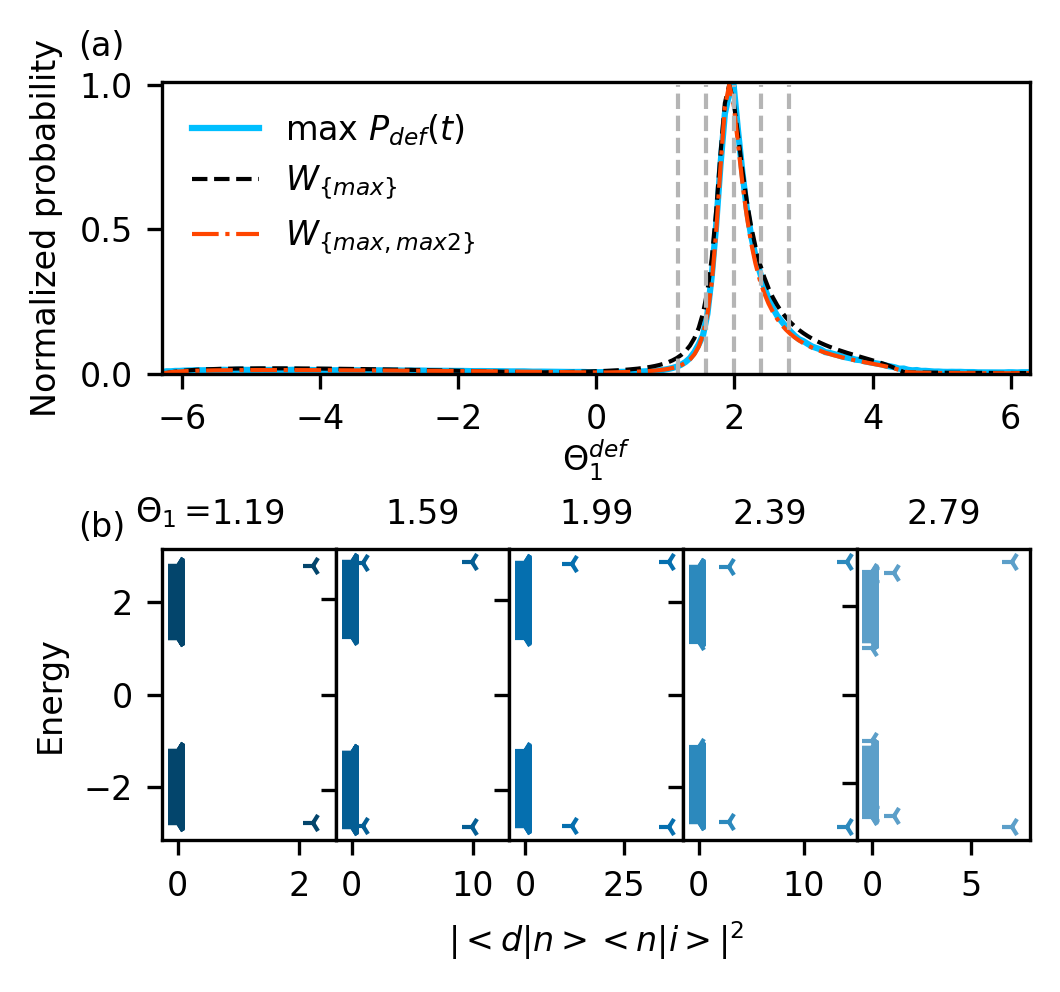

In [65]:
#figure, fig = plt.subplots(1, 1) #, figsize=(6.4, 4.0))


fig = plt.figure(dpi=300)
fig.set_size_inches(3.40457, 3.2)
font = {'size' : 8}
mpl.rc('font', **font)
fig.subplots_adjust(bottom = 0.13, top=0.92, left=0.14, right=0.99, hspace = 0.6, wspace=0)


gs = mpl.gridspec.GridSpec(2, 5, figure=fig)

ax = fig.add_subplot(gs[0, :])

color_list = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]

theta_array = np.linspace(-2*np.pi, 2*np.pi, 200)

max_value = np.array([0.00032784790748005256, 0.0005435704467185456, 0.0005357090299626076, 0.0006241034574118733, 0.0006253967948094522, 0.000690521828216798, 0.0007291479807026502, 0.0007281979502311363, 0.0008084496618902624, 0.0007675607219041068, 0.0007887282699981778, 0.0008011548357576001, 0.0007977548059325493, 0.0008216238094285058, 0.0008780326356031553, 0.0008509575570138706, 0.0008213702158543521, 0.0008858038221561068, 0.0009036244998962102, 0.0008622661903908526, 0.0008604824013882919, 0.0008328460269991423, 0.0008528590681137328, 0.0008832919075279795, 0.0008476555312878311, 0.0008579799685518615, 0.0008518965947182236, 0.0008650322956990347, 0.0008506836107928975, 0.0008491772214745692, 0.0008794808021419182, 0.0008602302815031912, 0.0008103090175580365, 0.0008062877962508734, 0.0008333352671080718, 0.000813412116651086, 0.0008195530629718915, 0.0008173903226235511, 0.0008311492410199545, 0.000768922888424495, 0.0007741713616921185, 0.0008158085147553734, 0.0007905172159707758, 0.0007698636178362271, 0.0007877922710161987, 0.0007563995646440195, 0.0007866831621393948, 0.0007639916611086035, 0.00073599733851343, 0.0007527289913386919, 0.000767259011759104, 0.000722321436255224, 0.0007461781098299168, 0.0007163978820708559, 0.0007364096959746438, 0.0007224101840044334, 0.0006886229556844399, 0.0007252518390136446, 0.0006708482505275945, 0.0007098309077990491, 0.0007029237756964278, 0.0006669867608926408, 0.0006655947657403752, 0.0006728461646351041, 0.0006584567475094378, 0.0006405036845202459, 0.0006442206654083116, 0.000626493484217504, 0.0006350663919499501, 0.0006224438093848492, 0.0005923518900100582, 0.000581065862236633, 0.000594630778702245, 0.0005934780182411001, 0.0005884523608795333, 0.0005773028693403084, 0.00056552325699088, 0.0005575748498872888, 0.0005495142574166634, 0.0005253230746331992, 0.0005129441014029966, 0.0005174891430620972, 0.0005033862855936488, 0.0005221084403759849, 0.00048797756102411004, 0.00045621080654410166, 0.00046672652424374763, 0.0004633596979545849, 0.0004483935882539971, 0.0004501633306554162, 0.0004236191931932982, 0.0004102056327785237, 0.0004025819877533427, 0.0003826250223588558, 0.00038016164995851616, 0.0003942012535018166, 0.00039193173034742575, 0.0003767540548646024, 0.0003228952431314738, 0.00035152182047172787, 0.00032859411064621797, 0.0003417485994394949, 0.00033732615118623344, 0.00036289444612892514, 0.0003740646440365144, 0.00038658703477618354, 0.0003993059498987975, 0.00041340040132247695, 0.0004340732959598992, 0.00046017840045777864, 0.0004951737420911316, 0.0005367968515407001, 0.0005839336149067608, 0.0006469507261087782, 0.0007544866447477129, 0.0008924084211786982, 0.0010697088344794952, 0.0013047039724485648, 0.0016205815274570332, 0.0020654720175393598, 0.0026966956668875728, 0.003579083850611779, 0.004920914115448059, 0.006708761262584234, 0.008847790938794321, 0.013756907956438195, 0.02251241025477443, 0.034016977442449296, 0.04795513779505529, 0.05969992034867622, 0.06439083050301332, 0.06631612058920032, 0.055959542057455236, 0.046402956484551096, 0.038042675601732676, 0.031781651031782224, 0.02708353909961938, 0.02341584776962052, 0.02003078662220195, 0.01727244544718841, 0.015054080288293293, 0.013295037503411303, 0.012023335403107717, 0.010785219391015174, 0.009731602022565069, 0.008722308700511537, 0.007908440522723567, 0.007466080481041537, 0.006831035967684838, 0.006232535870446996, 0.005882325256359143, 0.005537993054257325, 0.0049429948567199546, 0.004769792010547036, 0.004491361824162189, 0.004225211359643394, 0.0038984184520964946, 0.003703918181042179, 0.0034960231917486625, 0.0032081265473181387, 0.0031212145061025667, 0.0028379265368678893, 0.0026490003717489943, 0.002475259020717652, 0.0023097085488116096, 0.002126210520575164, 0.0018230428510347483, 0.0016509689561808626, 0.0014477521033916586, 0.0011348370517399184, 0.001174839439743493, 0.0008819356123857212, 0.000757293182875263, 0.0008258037808488271, 0.0006270586439933231, 0.000641985300013003, 0.0005649814389534736, 0.00048038716809539045, 0.0004862689055645621, 0.0004201071065631529, 0.00040018786797939667, 0.0004252585073625701, 0.0004051657041782555, 0.00041290690336176115, 0.00036550288428266215, 0.00037002341820850746, 0.00035885196117606445, 0.00029468208279916135, 0.00029363452565267604, 0.0002898523895533625, 0.0002912417678635196, 0.00029511096974830044, 0.0002951646726522437, 0.0002735566617794944, 0.00032472654564656825, 0.0003134412161082656, 0.0002728988562333694, 0.0003225313292474301, 0.0003268426448606141, 0.0003278479074800522])
max_value_of_overlap = [0.21445028676562933, 0.34871385509742625, 0.4427491440487713, 0.4919319760596129, 0.5216187481116801, 0.5423921778732396, 0.5582695245615837, 0.5710494617479952, 0.5816755373068515, 0.5907060332811459, 0.5985016024289362, 0.6053107330061211, 0.6113130849422077, 0.6166434331073808, 0.6214058381852063, 0.6256825145637035, 0.6295396395617455, 0.6330313065676185, 0.6362023026246711, 0.6390901138498742, 0.6417264074932761, 0.6441381494841912, 0.6463484619782386, 0.6483772915219801, 0.6502419366860569, 0.6519574696785446, 0.6535370767837738, 0.6549923358184961, 0.6563334441311992, 0.657569407340804, 0.6587081965983047, 0.6597568803807663, 0.6607217355054571, 0.6616083410551513, 0.6624216581453357, 0.6631660978779789, 0.6638455793702643, 0.6644635793879359, 0.6650231748287482, 0.6655270790735945, 0.665977673039593, 0.666377031619455, 0.6667269460687579, 0.6670289428003552, 0.6672842989595027, 0.667494055080126, 0.6676590250595985, 0.667779803634049, 0.6678567714860457, 0.6678900980713836, 0.6678797422086042, 0.6678254504313275, 0.667726753066261, 0.6675829579510506, 0.6673931416661402, 0.6671561381033388, 0.6668705241405365, 0.6665346021314387, 0.6661463788494455, 0.6657035404444711, 0.6652034228768704, 0.6646429771814186, 0.664018728781281, 0.6633267299128753, 0.6625625040309204, 0.6617209808309414, 0.6607964202445498, 0.6597823234186488, 0.6586713282683238, 0.6574550866753374, 0.6561241197656237, 0.6546676469103925, 0.6530733831175894, 0.6513272982663877, 0.649413330127284, 0.6473130412300642, 0.6450052073003868, 0.6424653220722872, 0.6396649996682663, 0.6365712512717093, 0.6331456073416153, 0.6293430499918511, 0.6251107122926535, 0.6203862922163453, 0.6150961191284968, 0.609152801134764, 0.6024523744149153, 0.5948708751828267, 0.5862602689699201, 0.5764437142621786, 0.5652102305741514, 0.5523090177567218, 0.5374439707435922, 0.5202693545794215, 0.5003879736193567, 0.4773527028308211, 0.45066852774691324, 0.4197800487036758, 0.38400759423558883, 0.34242933475778287, 0.29416159987762464, 0.24063314636476668, 0.18875357468110768, 0.17071518260408702, 0.15854860479022903, 0.14287241169460907, 0.1292825549041829, 0.12036302426991662, 0.11065448343319136, 0.10008447415691933, 0.0882923052599582, 0.07479607500957784, 0.06812570661557006, 0.058246759728188574, 0.0651322653476214, 0.07114974189546669, 0.07798393804827213, 0.08709655618649245, 0.099060651663269, 0.11124745684290738, 0.12307435360819052, 0.1340363887413015, 0.1437031274598938, 0.1516854738970993, 0.15965882015472266, 0.17701232368451306, 0.19301978923214755, 0.20459164945099861, 0.22337106435108564, 0.2741804176315685, 0.3260217436373029, 0.3726815897159967, 0.412032539590123, 0.44466572518551717, 0.47175834971909153, 0.49433785526960006, 0.5132147330119297, 0.5290333422816812, 0.5423135359371826, 0.5534769808526586, 0.562865554434702, 0.5707558207061855, 0.5773709954208889, 0.5828908650568837, 0.587459903786458, 0.5911938155725612, 0.5941847352478321, 0.59650531232185, 0.5982118754175185, 0.5993468417879775, 0.599940501375316, 0.600012271263169, 0.599571484670553, 0.5986177477573301, 0.5971408649923878, 0.5951202957349118, 0.5925240545273585, 0.5893068945239062, 0.5854074979955904, 0.580744203316881, 0.5752084519140815, 0.5686544916928371, 0.5608826007762002, 0.5516104581939193, 0.5404215307634266, 0.5266661813390732, 0.5092604661235028, 0.48626084756914834, 0.45401456520912375, 0.40617526609663607, 0.3368316638083408, 0.2549890358781362, 0.24269970480723935, 0.23318776539025007, 0.2060851873273899, 0.1929395974775782, 0.1727094544802332, 0.16384238086293612, 0.15891594688242133, 0.16249292913179847, 0.1641632576247398, 0.16316889995262715, 0.15995308681027806, 0.15508681345134406, 0.14912953227141112, 0.14339045804582207, 0.14808651578824966, 0.1513418661298115, 0.1593955322975109, 0.17095431895338145, 0.18066036722397108, 0.1874000525596219, 0.19027374151143583, 0.18885711063528526, 0.18334903389063664, 0.19369677895893792, 0.24026862814360123, 0.28056351033275584, 0.2921204830655452, 0.2144502867656302]
max_value_of_overlap_product = np.array([0.19941919815900744, 0.19790331232319808, 0.2986427704527421, 0.3685431840849023, 0.41392630867091146, 0.4468465994348388, 0.47245031818857525, 0.4931777213471749, 0.5103608407403978, 0.5248152645276445, 0.5370851441967887, 0.5475572459970933, 0.5565197007791494, 0.5641949049602671, 0.5707592503723016, 0.5763556409180426, 0.5811018132138202, 0.5850960889255362, 0.5884214854183777, 0.5911487371085088, 0.593338570225267, 0.5950434511609699, 0.5963089542918364, 0.597174848616267, 0.5976759725439088, 0.5978429463017751, 0.5977027579564098, 0.597279249723582, 0.5965935246493913, 0.5956642890075188, 0.5945081422935082, 0.5931398241247258, 0.5915724254183699, 0.5898175697431824, 0.5878855696017106, 0.5857855615103081, 0.5835256230443279, 0.5811128744580053, 0.5785535670421983, 0.5758531600208973, 0.5730163874928675, 0.5700473166825067, 0.5669493985642573, 0.563725511757495, 0.5603780004501568, 0.5569087069903906, 0.5533189996859712, 0.5496097962652648, 0.5457815833787812, 0.541834432456691, 0.5377680121799545, 0.533581597770976, 0.529274077268233, 0.5248439549003591, 0.5202893516433709, 0.5156080030034061, 0.5107972540338295, 0.5058540515609348, 0.5007749335578665, 0.4955560155724617, 0.49019297407893325, 0.4846810265874559, 0.47901490830840837, 0.4731888451281064, 0.46719652261335076, 0.4610310507202555, 0.454684923841136, 0.44814997578298277, 0.44141732923452853, 0.4344773392499764, 0.42731953026198116, 0.41993252614437526, 0.41230397288960724, 0.4044204535668012, 0.39626739541585304, 0.3878289692543028, 0.3790879818940179, 0.3700257630809993, 0.3606220497275092, 0.35085487211117633, 0.34070044957941137, 0.3301331075700389, 0.31912523409669463, 0.30764730319977596, 0.29566800658755693, 0.28315455469673956, 0.286287412758194, 0.2920676913910257, 0.29816050001311106, 0.3045887566121651, 0.3113777256845449, 0.3185553228092497, 0.3261524678016515, 0.33420349569037217, 0.34274663680701345, 0.3518245798814102, 0.36148513525729437, 0.3717820195355752, 0.38277578820156916, 0.3945349496403881, 0.40713730277107546, 0.42067155204972173, 0.435239268772848, 0.45095728768994886, 0.46796065484443666, 0.48640627875530307, 0.5064774864385688, 0.5283897535698928, 0.552397972190248, 0.5788057518345995, 0.6079774370573117, 0.6403537944283346, 0.6764727126700164, 0.716996837107031, 0.7627509016572573, 0.8147728502498146, 0.8743846986365468, 0.9432921541312815, 1.0237263995080703, 1.1186481066967056, 1.232042884111254, 1.369347726879151, 1.5380511160832042, 1.7484708492153178, 2.014512500326122, 2.3534610150474924, 2.781527571768069, 3.2966055344096463, 3.838026842749574, 4.254908149934927, 4.39613196679872, 4.269659493691756, 4.001592985679179, 3.6975411169322636, 3.4071907898826517, 3.1466008862268784, 2.9179162489584343, 2.7185470708797754, 2.5446900460259303, 2.3925648638809904, 2.2588015124305985, 2.14051988475954, 2.0353019506875323, 1.941131379792334, 1.8563286861230959, 1.7794919056650889, 1.7094456812519976, 1.6451988308143461, 1.5859094597427614, 1.5308564042328208, 1.4794158162120883, 1.4310418283443387, 1.3852503847545172, 1.341605452745241, 1.2997069258411493, 1.2591795789762616, 1.219662430171339, 1.180797778250611, 1.1422189813075998, 1.1035356337874673, 1.0643140272663347, 1.0240493044389198, 0.9821228224741765, 0.9377323642138873, 0.8897704760977546, 0.8365997516273433, 0.775619611267787, 0.7024380815634725, 0.6095979922919055, 0.4870274731999783, 0.3354939822225552, 0.2875221925090598, 0.2819728298423038, 0.27669998473894536, 0.2716860134062414, 0.26691478423325254, 0.26237152147741394, 0.2580426679568962, 0.2539157641094484, 0.24997934120814302, 0.24622282682585084, 0.2426364609689691, 0.23921122149514987, 0.2359387576452098, 0.23281133068971052, 0.22982176081294675, 0.2269633794997003, 0.22422998676152808, 0.22161581265807723, 0.21911548260995087, 0.21672398608820923, 0.21443664830398773, 0.21224910456893414, 0.21015727705136142, 0.20815735366378438, 0.2062457688743201, 0.20441918623464747, 0.20267448244272102, 0.20100873284946047, 0.19941919815876777])
max_value_of_overlap_product2 = np.array([0.2695163161773412, 0.3830337120692767, 0.49510144187935357, 0.5636262076530151, 0.6077005681584173, 0.6393770035688155, 0.6637999269570313, 0.6834078650881388, 0.6995312328302227, 0.7129841078313746, 0.7243092320799953, 0.7338920582212821, 0.7420194947460067, 0.7489128026848518, 0.7547473215455893, 0.7596649824036459, 0.7637826252936103, 0.767197748564999, 0.7699926168612051, 0.7722372800309704, 0.7739918457023824, 0.7753082256757882, 0.776231501998413, 0.7768010120751467, 0.7770512221165287, 0.7770124384030417, 0.7767113923463551, 0.7761717260158448, 0.7754143982157707, 0.7744580264418695, 0.7733191766105905, 0.7720126098571846, 0.7705514937784185, 0.768947584016571, 0.7672113809418686, 0.7653522653038667, 0.7633786160184911, 0.761297912711539, 0.7591168251792546, 0.7568412915797461, 0.7544765868663439, 0.7520273827328753, 0.7494978001513164, 0.746891455404756, 0.7442115003902042, 0.7414606578420805, 0.738641252036377, 0.7357552354425698, 0.7328042117277336, 0.7297894554465847, 0.7267119287031194, 0.7235722950168537, 0.7203709305911534, 0.7171079331272147, 0.7137831283193165, 0.71039607410025, 0.7069460627087512, 0.7034321205962799, 0.6998530061806081, 0.6962072054077165, 0.6924929250806724, 0.6887080838601324, 0.6848503008330105, 0.6809168815122595, 0.6769048010974897, 0.672810684808267, 0.6686307850729298, 0.6643609553349511, 0.6599966202216284, 0.6555327418261181, 0.6509637818501476, 0.6462836594196113, 0.6414857044440158, 0.6365626065550921, 0.6315063598937082, 0.6263082043990205, 0.6209585648412179, 0.6154469897459478, 0.6097620937061763, 0.603891508601075, 0.5978218522397181, 0.5915387273846484, 0.5850267706343089, 0.5782697802293982, 0.5712509658437177, 0.5639533837506516, 0.5563606500552912, 0.5484580663205432, 0.5402343500159416, 0.5316842405245614, 0.522812351229541, 0.5136387513911044, 0.5042068559817237, 0.494594187278768, 0.4849262327450425, 0.4753925064268969, 0.4662612901022389, 0.45788511834524, 0.4506876898673662, 0.4451504012770007, 0.4419266196511672, 0.44219939051765716, 0.4490077435922444, 0.46432016162092055, 0.48082070110420955, 0.49864743655699106, 0.5179611506267483, 0.5389503693220489, 0.5618378624626967, 0.5868891491809038, 0.6146694753045415, 0.6452800435521797, 0.6789590321734432, 0.7178854052010206, 0.7683240174267965, 0.826883772450927, 0.895682160306501, 0.9775967579956861, 1.076592051233862, 1.1981940046289867, 1.3501729427404043, 1.5435120214803144, 1.7937449843826996, 2.122681665735013, 2.56015427765226, 3.1438988597555166, 3.910919869384835, 4.862971222284179, 5.885367413687281, 6.682164015398975, 6.954273991807351, 6.7169366083873445, 6.218154935244433, 5.662980065020409, 5.144457525200866, 4.689432040037581, 4.298413123457578, 3.9638358741481703, 3.6767831803249664, 3.429119218506663, 3.2139897173282894, 3.0257871292973046, 2.859968450256986, 2.7128566924458664, 2.5814658464303157, 2.463357438099056, 2.3565264337607394, 2.2593115395811676, 2.1703248648069717, 2.0883966303272357, 2.012531443737859, 1.9418734104916093, 1.8756779532691217, 1.8132886702410813, 1.7541178946722957, 1.697629838926912, 1.6433253224483546, 1.590727087752931, 1.5393645689185131, 1.4887566182536567, 1.4383899597104182, 1.3876896886617898, 1.3359752643787854, 1.2823895790657422, 1.2257763393310723, 1.1644545448408636, 1.0957845878996884, 1.0153394549494736, 0.915630431279455, 0.7865571762509218, 0.628861389371079, 0.4808284695428945, 0.45130896856900904, 0.43415681717754107, 0.39347904024662794, 0.37314881800768357, 0.3481805878040426, 0.32865600270313944, 0.3208832302042587, 0.3188282420192303, 0.31701600088659854, 0.3130704670173493, 0.3073572874519107, 0.3004225643032153, 0.29281570206822954, 0.28498847082372036, 0.27726452029888754, 0.26985003864910617, 0.26286008639529895, 0.2640021405645629, 0.26712119665036593, 0.2689367373188161, 0.2686982197940429, 0.26601536890973915, 0.2610248955691898, 0.26302494131795434, 0.2920957450172087, 0.3225808118123013, 0.33131893139828805, 0.26951631617892563])
max_value_of_overlap_product_second = max_value_of_overlap_product2 - max_value_of_overlap_product
squared_max_overlap_two_states = (max_value_of_overlap_product+max_value_of_overlap_product_second)**2

ax.plot(theta_array, max_value/max(max_value), color='deepskyblue', label=r'max $P_{def}(t)$', linewidth=1.5)
ax.plot(theta_array, np.array(max_value_of_overlap_product**2)/max(max_value_of_overlap_product**2), '--', 
         color='black', label=r'$W_{\{max\}}$', linewidth=1.0) #max overlap
ax.plot(theta_array, np.array(squared_max_overlap_two_states)/max(squared_max_overlap_two_states), '-.', 
         color='orangered', label=r'$W_{\{max, max2\}}$', linewidth=1.0) #max overlap 2 states

for i in range(5):
    ax.plot([1.9891491173483118+0.4*(i-2), 1.9891491173483118+0.4*(i-2)], [0.0, 1.0], '--', color=cm.Greys(0.4), linewidth=1.0)

#plt.plot(theta_array, max_value_nodef_0, '--', color='red', label='max on 0 0')
#plt.plot(theta_array, max_value_nodef_1, '-.', color='red', label='max on 0 1')

ax.set_xlabel(r'$\Theta_1^{def}$',labelpad = 0.2, fontsize=8)
ax.set_ylabel('Normalized probability', fontsize=8)

ax.legend(fontsize=8, loc = 'upper left',frameon=False)
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(0.0, 1.01)
ax.tick_params(axis='both', which='major', labelsize=8)

ax.text(-7.5, 1.1, '(a)', fontsize=8)

density_around_defect0= [1.0411720329316104e-53, 2.35557436839756e-59, 2.1783556929355566e-08, 9.144418548016033e-34, 4.169688332769146e-34, 2.482125934477536e-59, 2.1783556929298755e-08, 3.1128196230578787e-34, 4.308618897126829e-34, 9.904647077848217e-57, 9.689030237146478e-31, 2.492308361248857e-30, 1.7964393828573526e-31, 3.716294224517967e-08, 3.8981720140251975e-32, 2.725023021026936e-12, 5.536538448958413e-49, 8.908279070364864e-33, 1.1859623005332983e-31, 1.6742618904687065e-07, 6.913334499572047e-30, 4.494369607920978e-55, 2.2569762510072666e-49, 5.0131448204407405e-12, 1.16988502962374e-30, 1.1491944050541974e-30, 6.786216065632862e-32, 7.769628207978161e-30, 1.238473027200544e-07, 6.86524467129056e-55, 4.435467001935865e-11, 6.003904943223797e-50, 7.171882644046082e-32, 5.096155835736359e-30, 1.247531027321671e-29, 1.3907836945939251e-30, 1.4827245633433667e-07, 3.5102839383718454e-32, 1.7202618948244212e-54, 1.3936913925826597e-52, 1.0562600050388325e-12, 1.389931360252281e-57, 9.35051653556821e-32, 2.0217988024571606e-29, 1.408042565054356e-32, 3.716294224399012e-08, 5.03627934131005e-33, 2.5901477852884233e-55, 2.725023020524193e-12, 1.756285762643147e-49, 2.2824182110466863e-32, 6.273024034634093e-32, 1.6742618904675786e-07, 1.1140669779801502e-30, 6.3535178054970805e-56, 3.907184118136025e-31, 2.7350371914245822e-49, 5.013144811161553e-12, 4.1032724815216054e-52, 5.31440147633586e-31, 2.061406705249016e-31, 1.1259736278214017e-29, 1.2384730271831702e-07, 4.435467000602679e-11, 2.7695156725556684e-54, 1.1262276851289052e-50, 1.1533611450316709e-32, 4.115579290787711e-30, 6.435478956218292e-30, 5.901257215907997e-31, 1.4827245633256182e-07, 4.314370273213946e-55, 2.2962146304275768e-32, 1.4385686788014653e-51, 1.056260004922909e-12, 4.84821040325043e-27, 4.6728838685640386e-27, 2.2192805007024248, 9.728560877479346e-27, 7.106683306556197e-26, 2.2192805007019727, 4.014897460508299e-27, 1.643471345242961e-25, 7.4928554934015535e-53, 3.7681220486231367e-53, 6.156143069641621e-48, 3.970065648441304e-50, 0.007356365652836441, 1.5581767640166733e-28, 1.074372017748291e-27, 1.1148368446102317e-27, 6.377649517449729e-53, 1.7048257686411534e-28, 3.920960599291376e-49, 6.271665129683004e-10, 1.3846753782503286e-28, 0.001309326006280216, 7.353826353716137e-27, 3.043940104891846e-29, 9.21347286437992e-52, 9.42416111299e-30, 3.800334494926423e-50, 1.1036957229586792e-09, 0.007356365652824186, 1.1626464965130689e-27, 5.2572827770992055e-27, 5.99337401065429e-28, 1.738879768534595e-53, 1.7185586481955902e-49, 6.271665131591529e-10, 1.2978782096034635e-27, 1.2978224441783141e-27, 6.536110503499937e-09, 2.8461304199786205e-52, 5.754600857150733e-50, 6.781891577118402e-28, 0.0013093260062646645, 6.740431166816664e-30, 1.1544732638886814e-27, 2.0350942522068194e-51, 3.579130673449854e-49, 6.000639219448288e-28, 1.687021177632127e-28, 6.5361105035880285e-09, 2.193791191383104e-30, 0.00041318255815872746, 0.0007843632469097287, 4.1464324301084026e-26, 4.19857093163149e-25, 5.621813146999286e-28, 6.424219411731529e-31, 1.1036957228951158e-09, 3.8302581057745504e-31, 6.434671491167809e-52, 7.674069785940625e-49, 1.1075361618721919e-25, 0.0007843632469181612, 2.4909916232282975e-25, 4.940005460699717e-52, 9.747662556145044e-50, 9.34113319028517e-31, 3.3127179138549937e-50, 1.292407541053926e-30, 1.9249443910567006e-10, 1.9249443899253657e-10, 1.6329740286180416e-30, 8.458902847563138e-56, 4.450410144838499e-49, 7.673074932121043e-08, 3.995170315812906e-31, 3.567176053698664e-11, 9.80093560413713e-32, 3.9574939903036046e-30, 2.467161232221703e-33, 1.4853308167139948e-31, 2.3890984757761747e-54, 6.82548037889469e-30, 7.030543746927846e-33, 7.6730749320803e-08, 3.567176054694538e-11, 8.826730236092497e-33, 7.682285348231388e-56, 2.821996106247227e-32, 7.550674532845524e-31, 9.5677201823146e-50, 4.4202233883973194e-30, 1.5083033555980861e-33, 2.2038979457298168e-07, 5.48818247540486e-30, 1.1508595789062344e-29, 5.688449172776119e-31, 1.8156232445000015e-30, 1.1051832943028343e-30, 2.9696683938905623e-32, 1.49753573596373e-07, 6.899183843876195e-55, 1.901630206958632e-10, 6.706094615593566e-31, 2.911728458958588e-08, 6.534685861585e-33, 2.2038979457561214e-07, 5.283621538946687e-31, 9.390856758650638e-30, 3.5616160878667005e-31, 1.992034096111994e-07, 1.2504776530243898e-51, 3.441020235177775e-31, 6.513665228806773e-32, 9.482105431909324e-55, 2.9117284589141603e-08, 1.3372719077816285e-30, 1.9016302070779085e-10, 8.462002157607312e-31, 1.1354713145117484e-51, 1.524599140450081e-49, 2.2261220710908555e-31, 1.1346156156164108e-54, 2.262198842085331e-56, 3.5339826265531724e-51, 1.992034096122701e-07, 3.9122110578356476e-31, 4.361918095153585e-55, 1.1798452754982907e-52, 5.13388416118031e-30, 1.076240402785219e-53, 8.064421195139593e-51, 6.700134556137713e-50, 7.766716162154866e-31, 2.207253673709071e-32, 1.9270590075928303e-51, 2.252589064195468e-10, 8.701104282994858e-32, 1.468085730656304e-51, 6.2179604997444846e-12, 2.4528344698640632e-32, 2.4385049009722752e-31, 2.2525890640511401e-10, 6.325774395618825e-11, 6.325774395203657e-11, 1.993074244973085e-28, 8.805179839063516e-30, 7.488249916104078e-29, 0.0004131825581586687, 6.856417978325967e-27, 1.1284772062241422e-28, 2.3022596489496436e-29, 9.188025543308491e-56, 2.100739825425722e-30, 5.897149379666353e-54, 3.8261151288255513e-54, 1.8022539936326892e-53, 1.0999156840116208e-54, 1.5771292946451695e-49, 0.00017728804269685425, 3.2183930438456134e-28, 3.2040896047245024e-50, 1.709582207627368e-55, 2.212153501291053e-28, 0.0004101748395975162, 6.378093522509449e-26, 3.227488102217589e-54, 4.028953538016276e-52, 1.470159291000389e-30, 1.4975357359335867e-07, 2.4199685292798535e-30, 4.082295391679158e-31, 8.677457927409552e-30, 2.237381952751685e-53, 3.3544468652097488e-49, 1.4952962100115567e-30, 6.44227595914198e-30, 6.217960499154331e-12, 4.744649859676161e-31, 2.8342541180643976e-28, 3.669736852527972e-30, 9.013238088653305e-31, 4.246024060269388e-30, 2.165287728924552e-07, 2.165287728935579e-07, 1.7986390942886905e-31, 4.889678581705125e-31, 0.00041017483958390513, 0.00024005474843913333, 1.8481264466344252e-27, 1.220754790145628e-30, 3.652133358981342e-30, 7.171572590760765e-27, 3.71249222150637e-09, 1.2094167962248796e-30, 1.697228638822825e-31, 1.629683892941078e-11, 5.316072789436139e-28, 4.828078558436115e-29, 1.4393903112868402e-28, 1.8793871645220262e-31, 1.6296838930641215e-11, 1.5061289627012285e-07, 1.697390161099666e-54, 3.9465554491591437e-28, 9.248303610320356e-56, 2.1843548292714666e-52, 6.56763551973661e-55, 1.1371259664708746e-30, 7.397547476352041e-52, 7.244256999039493e-51, 1.384642324813826e-51, 6.02945034365242e-10, 5.0968952394921014e-51, 1.5061289626970097e-07, 6.029450343582544e-10, 1.0686569815112113e-30, 2.625154538524746e-49, 0.00017728804269435207, 7.132491452013545e-27, 3.1465236904506813e-50, 3.7124922185022173e-09, 4.124961761273506e-29, 3.0643903165438704e-31, 5.896339785482872e-10, 1.8263684575024184e-29, 1.46908854765544e-53, 8.940723506079095e-56, 1.8600231687097866e-51, 1.2120167686528355e-32, 1.0663021721936946e-31, 1.784545415304698e-30, 6.979241386800973e-08, 1.7405927891925203e-53, 3.1846580498782142e-49, 3.972949220183808e-31, 1.3739691238129318e-30, 1.3029575144770622e-10, 9.389314612843071e-53, 8.35161794300391e-54, 4.476224985803901e-53, 2.7225894689841383e-53, 3.589575625519039e-54, 1.7283146380043794e-28, 3.6308211638528157e-53, 6.674150246126021e-51, 1.305355686291279e-54, 6.756325683544743e-52, 9.28272472688538e-31, 5.7250813916434085e-28, 4.981635227001956e-29, 2.994131936742908e-48, 7.970504174848042e-34, 1.692612083863695e-50, 1.3019853086043446e-30, 1.716842768726647e-30, 1.5593087967620948e-29, 3.214493150213072e-54, 3.1169003812708437e-51, 5.896339783891553e-10, 3.436108344148195e-30, 6.979241386625915e-08, 1.2690614025891653e-30, 1.101839349937173e-31, 1.7219226490997535e-07, 1.2568344159112397e-28, 9.145620417675177e-05, 8.134391213645194e-27, 1.2894021509048838e-08, 1.6346927262857817e-28, 1.3029575149144795e-10, 2.636704055016719e-30, 4.282193663378694e-29, 2.1725293616708446e-27, 0.00024005474843856076, 1.95056407075315e-27, 3.1659530975273054e-28, 1.8930777943231913e-28, 1.622223310629969e-31, 5.416496267492387e-31, 1.7327653194492075e-54, 1.5229273498069438e-51, 3.5226503705760194e-52, 4.4799408756235766e-10, 1.384176870196185e-31, 1.2905345149502884e-28, 9.70017473119901e-28, 7.833515017799648e-31, 2.095206036941277e-05, 1.43348246932156e-09, 4.448828474469942e-29, 1.433482469453299e-09, 2.18289336105717e-28, 3.880116172185496e-31, 2.3383075059360696e-28, 2.0952060369657765e-05, 5.510806935942593e-09, 5.510806936177376e-09, 2.803201484349282e-54, 2.3108713995796048e-29, 2.4902917676313846e-29, 9.145620417688167e-05, 7.740206630894715e-28, 1.2474069768258753e-28, 1.2894021513369586e-08, 4.186042746384899e-29, 8.618133430227233e-05, 9.66955761294855e-28, 1.5481418877164907e-30, 4.128732868518256e-28, 2.6208045825251206e-53, 2.0214396319264482e-50, 4.266835770055561e-53, 1.2777478006699574e-50, 1.7219226490952224e-07, 1.9628388562287137e-30, 1.4534807501981628e-08, 3.035796037221231e-31, 6.1228951077333765e-31, 4.479940875534578e-10, 3.218796717299794e-30, 1.126142526728725e-30, 2.8231382860898334e-29, 1.0961201923139821e-29, 8.618133430222933e-05, 2.3126380948409485e-28, 1.9963681927410187e-28, 2.0138732307136106e-30, 6.357517014923447e-56, 2.247857585141588e-54, 3.2990243472770197e-28, 4.706259146987555e-33, 7.096414606489659e-32, 1.0807225586350277e-51, 4.110395863674725e-31, 3.703942842972638e-49, 3.9542035221475006e-10, 1.9898411390118575e-51, 1.4038522689455073e-30, 7.526407891724033e-08, 3.7335029703199355e-32, 7.61127924905165e-12, 5.750659612085562e-31, 7.526407891728105e-08, 1.2374555929912241e-31, 7.611279250556408e-12, 1.0175005132363698e-29, 4.518040324797789e-30, 4.1509732278783104e-07, 1.7320446848279421e-31, 4.150973228111613e-07, 4.457843325331917e-05, 1.5166583529581643e-31, 1.4534807501994163e-08, 4.917592674273219e-54, 7.390661787876243e-31, 1.2095175187836181e-51, 5.819796620672021e-10, 2.713630565424789e-31, 2.1465408513961816e-08, 2.643482936926012e-10, 6.92321637500243e-31, 9.723729305131261e-32, 2.5784938994518255e-31, 8.44933993461236e-52, 5.819796621047533e-10, 2.1465408512790105e-08, 2.643482936531051e-10, 1.3488494248888226e-30, 1.2862659937999657e-52, 1.6792023937719848e-30, 3.946535391773546e-29, 1.2679951794164512e-29, 8.129313015270517e-31, 8.588170267895843e-28, 7.055317974964794e-53, 2.9434213526568682e-31, 7.156455492986071e-50, 1.317034931298957e-09, 4.457843325339803e-05, 7.568442200757926e-49, 3.9542035219933384e-10, 4.134918909670643e-27, 0.0001598433436338614, 4.880547959534085e-53, 6.038113503117888e-50, 5.64038467691994e-30, 5.190815640735719e-09, 0.0001598433436324323, 4.8888479628401895e-29, 7.17615956979071e-30, 1.3170349313019895e-09, 9.222363100129142e-29, 7.061816436030233e-27, 2.4948052849225065e-06, 9.314063547648003e-30, 5.190815639351388e-09, 7.243390701483853e-56, 5.766602867533444e-30, 1.1975327000379408e-09, 1.1075638320448566e-31, 6.676423471976084e-30, 1.1614783184705959e-52, 8.776788934548453e-51, 9.627195087545095e-55, 3.220992914380643e-50, 4.04220272459639e-31, 2.7323690434785427e-07, 1.5922895522725887e-31, 8.306949264532417e-32, 5.853806737120913e-30, 2.63892316401463e-30, 7.005075345622107e-29, 2.725216387969077e-11, 1.005122041397092e-30, 2.73236904344551e-07, 7.207760017183336e-31, 8.57443264992534e-31, 2.490939237595299e-55, 3.7335109896531254e-31, 1.555042275087681e-07, 3.430439844304988e-28, 2.7252163883974925e-11, 6.590988816022756e-31, 2.766913122584759e-53, 1.1975327000674216e-09, 1.1177986799712396e-52, 8.138563115631566e-52, 5.078084107867572e-50, 3.9235393939165544e-31, 4.347346494556642e-32, 1.940557592722154e-30, 3.2768812742474063e-51, 4.1949190641074246e-29, 7.81743497301499e-29, 4.2076764610271796e-29, 2.4948052846197434e-06, 1.0030535944193237e-27, 5.8464119890551946e-30, 2.9968402087696492e-30, 2.9191384507954386e-30, 4.357074782784306e-29, 3.137418740548586e-30, 2.590564061514526e-31, 9.548207797879888e-30, 2.958575821481931e-30, 1.1875602011551108e-30, 1.5550422750704802e-07, 4.9220937253684536e-30, 1.8991264156787363e-51, 2.299254056703074e-31, 1.972117913789374e-30, 1.98545791574135e-31, 3.357213896538432e-30, 5.827744255889847e-31, 1.4463714564561452e-07, 3.988020210151365e-07, 2.7612076862500906e-31, 7.797222112777933e-11, 1.9740392708917576e-54, 3.1628844282969466e-30, 0.0002338128476018073, 1.9119854557694903e-31, 3.6196469935197e-32, 5.541877439975338e-53, 4.048902629844649e-30, 1.2974048894040515e-09, 1.6184450722498404e-50, 3.7221175070950857e-32, 1.4463714565006075e-07, 2.6226034050965634e-29, 1.1674364033581457e-31, 3.988020210166374e-07, 1.4485870102848054e-31, 7.797222112456837e-11, 5.4315336442247835e-31, 1.2974048893775517e-09, 7.923905155295389e-53, 6.203095724188923e-53, 2.0617329852124013e-31, 6.813212278392994e-29, 4.1425620901663605e-52, 0.0002338128476019518, 1.934646144050865e-50, 1.4179446915202455e-29, 1.2046440437568845e-55, 8.48972429492269e-52, 1.9668986274620773e-09, 2.730747367782451e-55, 1.4136834780676672e-52, 6.5903532650812355e-31, 1.9668986272919594e-09, 1.7771579312589035e-53, 3.79709201770573e-49, 6.675521813569059e-30, 1.7097615294957762e-29, 1.0489055357328234e-48, 4.229455483958622e-55, 1.1602924971968882e-51, 1.1068911400915427e-31, 6.839870070494559e-32, 4.701691172616304e-55, 1.7555052838119045e-50, 1.569201054221409e-57, 3.5664355744308186e-53, 5.737326517579131e-53, 4.580184374131428e-29, 1.94872887356377e-08, 3.4263461631882397e-28, 1.1143245011859622e-10, 1.2733125045071213e-52, 2.6541837590004943e-48, 1.613504825971136e-54, 1.9740111651501897e-51, 7.362013632397231e-05, 2.0616705029887287e-50, 7.6448793394943e-30, 4.0046412986699705e-05, 1.1143245012147316e-10, 2.0739143820865277e-52, 2.5601419654694684e-47, 7.362013632366712e-05, 2.7522236548776206e-28, 1.2080883775280307e-51, 5.885510731746321e-29, 8.923875542688276e-29, 3.392688432573472e-29, 1.8714758267720064e-28, 1.9487288737624203e-08, 1.6935121749164996e-30, 4.4948077117214256e-30, 8.128605257074223e-30, 5.204282758249035e-29, 4.8391965122166016e-30, 4.1999830197811814e-30, 1.3355906181731078e-29, 5.292443493491805e-09, 1.2483579090434957e-29, 6.963060031568496e-30, 5.292443494044569e-09, 9.160826639704518e-55, 1.2415469201271886e-49, 1.2252530513931058e-28, 1.860199751360919e-29, 3.1822460335124897e-07, 6.692352196869738e-27, 3.540720286896063e-29, 6.274618571212603e-29, 3.0087528019746387e-05, 8.381764390775164e-30, 1.4985130694056176e-29, 1.308358621554514e-29, 1.5002473610625402e-29, 3.0087528019640305e-05, 7.002625914195989e-30, 9.510967278525881e-30, 3.182246035930482e-07, 3.699979103517421e-26, 6.057202735071582e-29, 3.0632142304929875e-31, 1.2974916175062561e-05, 5.424592005535104e-32, 1.4820247806194594e-28, 5.845828718424303e-29, 1.297491617505524e-05, 1.3129323147586102e-05, 2.8412077149526736e-29, 2.4919012846357293e-30, 1.6847661145849387e-28, 4.650253598133681e-30, 8.375800939303319e-54, 1.3153146818364507e-29, 2.144628423423311e-31, 1.3131492554516965e-50, 2.4231347503138265e-30, 1.0206102957586723e-29, 1.2114326674119438e-29, 1.3556921303173177e-29, 1.4139476873182864e-30, 2.816084100483198e-29, 1.576828495881744e-08, 3.694946584834107e-29, 3.0427563546546776e-30, 1.8971761396418422e-29, 2.569324882303124e-29, 1.637011191536581e-05, 6.798689436678678e-09, 1.3129323147521304e-05, 1.5768284958564476e-08, 2.3354828383629215e-30, 8.093535308453374e-06, 4.227148445545747e-27, 1.0021824270391748e-30, 1.765506180469666e-27, 1.3297915122934215e-50, 1.3097353610540196e-29, 7.342121699340403e-53, 9.47453241757507e-51, 4.898197990078473e-54, 1.4407756247263335e-52, 6.904687082568164e-05, 7.073876299372568e-31, 6.826413215614729e-50, 3.3815336628204636e-31, 6.2703201600141446e-30, 6.293354149284741e-30, 7.708228300031264e-29, 6.418711125362192e-29, 6.343632805084236e-30, 1.0721273744283174e-29, 2.2316275559739515e-53, 8.0935353085479e-06, 9.146817771859456e-06, 4.6213217763445476e-52, 2.011775566736185e-28, 1.6370111915565537e-05, 6.798689435974762e-09, 9.14681777175853e-06, 6.0235021345747154e-55, 4.537670688693933e-54, 1.529128279134581e-52, 1.304943255636862e-50, 2.552400010632229e-51, 5.649311413110925e-50, 2.355059208785601e-27, 2.6621878975328917e-10, 8.70842583810563e-53, 1.464016031892097e-28, 1.0759197697218286e-31, 1.7632413683448135e-53, 2.844422976509926e-53, 2.662187897213915e-10, 5.22795790375583e-10, 2.128488397014493e-08, 2.725068309237837e-28, 5.227957903865255e-10, 1.1455777206959751e-29, 1.4329154096846683e-30, 2.1284883969481407e-08, 1.1482734689993758e-53, 1.2240378807196481e-30, 1.2077442251242306e-30, 1.4860143362027704e-07, 9.306592386723991e-32, 3.6225399205467256e-53, 5.082104093558921e-07, 1.207918178493616e-31, 3.99048565928801e-32, 6.4042542801248166e-31, 1.812443143143445e-32, 1.8515957267150066e-54, 3.0352366758582697e-10, 2.5180338220657193e-11, 1.5817766609702371e-53, 8.957357778890677e-50, 5.41002299697174e-49, 8.034490526422825e-12, 1.7271996672026125e-30, 8.268923728922802e-08, 8.318251529144138e-32, 5.053304307534381e-09, 6.963288308355964e-30, 7.079994934602986e-10, 2.1187640332333082e-51, 1.3268775922752189e-30, 7.90781280825718e-32, 6.339556000049767e-33, 1.7422888453324566e-53, 1.5467952465096426e-52, 7.345229146994482e-32, 1.6906559601072093e-07, 2.460401450779346e-09, 1.5913404040777867e-30, 2.8533562978754597e-31, 1.486014336180222e-07, 1.79897947067271e-31, 1.5240851803416097e-30, 5.08210409357686e-07, 2.5180338217756122e-11, 2.4025703047222713e-50, 4.8975105838382874e-49, 2.2651529811779704e-51, 3.0146342832570475e-47, 1.2001217778311777e-30, 1.01316216617867e-31, 1.2951214733405315e-31, 8.034490525662491e-12, 5.948745050182032e-30, 3.0352366757670503e-10, 3.3183377352126064e-52, 2.0815496141750206e-50, 8.26892372887211e-08, 6.904687082559611e-05, 1.726123922460877e-31, 5.053304307285272e-09, 3.3481165238944486e-53, 1.3918934888428513e-30, 2.343362060651178e-27, 2.3188685343739937e-51, 4.853089734199941e-28, 8.761075405379166e-10, 2.3121477666786653e-31, 3.633641481937408e-31, 7.079994934315751e-10, 9.829273497279785e-33, 1.0077885277863444e-28, 8.76107540481492e-10, 1.5802285896041168e-08, 1.3220660775269769e-27, 1.5802285908181744e-08, 1.9716522345903966e-27, 4.392357515456014e-31, 6.363836954505358e-31, 6.33680064328392e-31, 2.5684217217836813e-30, 5.745992860235293e-32, 1.127192499865741e-29, 1.6906559600661806e-07, 2.4604014507533415e-09, 1.4095110484385546e-30, 7.473218338231067e-51, 3.15548388596068e-31, 1.0979254764291696e-31, 1.961093753292835e-31, 9.806637469191129e-32, 1.11279726840828e-50, 4.730465238055139e-55, 1.8576833061034574e-30, 4.1712668309020536e-49, 2.7096991905302637e-51, 3.019759653951546e-53, 7.522471139063534e-54, 2.3439947961010132e-54, 1.557433816080077e-51, 5.500509297975638e-50, 4.342926461572426e-30, 1.4362674712993069e-53, 2.5799601742099036e-31, 2.268468579131642e-09, 7.316711597405033e-32, 2.4354478110816824e-50, 7.940994060482379e-54, 2.3651464149135634e-31, 1.624235881846443e-30, 2.5666076037608316e-55, 2.4938498268904442e-30, 3.9581991197686956e-55, 1.4858318468341336e-29, 2.21480121087837e-30, 1.2575659552999377e-07, 2.8489731750329294e-31, 2.083111582176527e-31, 2.268468579073119e-09, 2.9601332531684058e-08, 7.097263215046623e-11, 1.498703440136744e-31, 2.215074041082288e-06, 7.667036975363846e-31, 7.097263214314695e-11, 3.9963595876044175e-31, 1.1509942420162434e-50, 2.215074041076879e-06, 1.2626747101692768e-48, 2.960133253159754e-08, 1.1120900999205858e-52, 2.404337546543598e-30, 2.2835832137215658e-31, 4.849978662983662e-31, 1.047031929783322e-55, 2.0175272761304663e-32, 1.0062454951950144e-49, 2.1069169259150768e-29, 8.40601750242133e-08, 1.2566828767730656e-30, 3.5749517927037416e-10, 4.563787251474072e-31, 7.557870713221184e-31, 5.192033764458442e-32, 2.7233683114287557e-31, 3.605987013264212e-30, 8.406017502266161e-08, 1.7822206603964507e-29, 2.172064069480666e-54, 4.182326583492755e-52, 2.9957927521553284e-31, 3.5749517946711504e-10, 3.109932307271981e-55, 3.9667296755953556e-54, 4.738010756967233e-09, 2.0840644303980763e-53, 1.0890542865536489e-54, 1.633183340780481e-51, 4.7588408495734175e-31, 1.5668454871771348e-30, 4.738010756755596e-09, 2.3509675680914104e-51, 4.4711239702104616e-32, 1.3102908330897973e-31, 8.213593679424711e-11, 3.577303465830735e-30, 3.4777178736072907e-50, 6.682289672975287e-52, 3.8254363927959434e-32, 3.6716231539082685e-31, 1.1726204252252305e-30, 8.213593677119179e-11, 2.1413408223247787e-31, 3.263910360859379e-12, 7.624027461628056e-31, 3.263910360349233e-12, 4.631032990039074e-55, 9.358025314853074e-55, 1.7806747194116452e-48, 4.00464129868002e-05, 1.469663747618879e-29, 3.199886695417636e-31, 1.5887763345370212e-10, 3.2123915294187716e-07, 3.0191639316182113e-30, 2.3732733376123734e-31, 7.5900962454014e-30, 1.2575659553466453e-07, 1.0227692805920834e-30, 1.2165273205741946e-50, 1.5887763346662886e-10, 1.6003645769362527e-54, 2.472244753225336e-52, 2.9129037423765538e-05, 1.2634419599240818e-29, 1.7750267731429147e-31, 7.120983044211558e-30, 7.665404896095416e-53, 2.514767309586461e-54, 1.2010672272127182e-28, 4.931556705001416e-31, 9.849573672242035e-29, 3.212391529528565e-07, 7.759765571554283e-32, 5.3776862636288e-31, 4.7085654554660086e-54, 8.694036853250482e-55, 7.536923175284183e-09, 6.672192379737067e-29, 3.1678959432510384e-51, 2.0732535913750583e-31, 4.304956994245674e-30, 2.8065383330585855e-31, 1.925923492095966e-06, 2.9129037423653035e-05, 9.658838035699498e-30, 2.559998649375014e-29, 1.580701543798851e-30, 1.1099726935216177e-31, 1.2443952608653422e-10, 6.0423541720600785e-06, 5.339362543332863e-30, 3.1598292193344276e-31, 1.2443952611138104e-10, 3.93699567895295e-52, 9.895299972608534e-32, 7.008330448818832e-29, 6.020919599055967e-54, 2.504610989421742e-54, 7.759661511033889e-55, 1.538778381668217e-54, 7.492344552987531e-54, 4.865899290020321e-52, 1.7728235537893643e-47, 2.001375563264985e-05, 4.87867920706456e-10, 2.2929189947434412e-55, 4.878679206471693e-10, 1.3716690265326324e-29, 1.7495353500968167e-50, 1.7095930346769415e-29, 1.2034239789701327e-30, 1.1283092774139814e-30, 9.371977785649733e-30, 1.1324615453021872e-30, 2.2061372561548396e-29, 8.713437651819145e-29, 5.7429979067482415e-31, 7.536923174766517e-09, 6.481589001100262e-30, 1.9259234921823837e-06, 2.865090501742334e-27, 2.25359573210879e-29, 3.3372377030521195e-28, 5.421447141672102e-32, 1.6525990030673164e-31, 3.4967904778050146e-31, 4.8303420852328124e-32, 1.3889824590354926e-29, 3.5801988274941528e-09, 6.2640914815617735e-30, 6.042354171908158e-06, 1.641373882591733e-28, 3.5801988273076335e-09, 3.680992242383737e-55, 1.0084253870624066e-55, 4.1722167106251085e-52, 4.535411191320913e-50, 3.5665865289891505e-29, 4.914525585490978e-29, 2.0013755632705787e-05, 1.2325265009356724e-29, 5.403469874327244e-30, 5.1935070101540906e-30, 4.679204009638025e-51, 1.787466428273624e-50, 1.9408913083007309e-31, 1.0500415811142748e-08, 3.15636448991094e-29, 4.917056096279514e-30, 5.267205816908403e-31, 6.0670541751390466e-05, 6.847908198092584e-30, 2.140354215535222e-51, 1.5746972093300085e-51, 6.307563772327477e-28, 1.8086454692006896e-30, 1.0500415808571224e-08, 5.488935267202677e-29, 9.702967820517115e-29, 6.599084871290674e-10, 1.3490951120945616e-48, 9.107240679125312e-09, 1.2608776231413038e-27, 5.1806562884841565e-30, 9.522309506406868e-31, 2.3128858976596038e-29, 3.0027860889697636e-07, 3.3270424428051286e-26, 9.107240674057266e-09, 1.41993387081477e-27, 3.6973010396672487e-06, 6.633728000654966e-31, 8.374242102425905e-30, 2.0112047320238455e-08, 1.5781944450508911e-52, 1.4306876913195157e-32, 4.8506995296269546e-55, 3.6047627669012237e-32, 9.657432935952153e-12, 5.0068821956244295e-31, 9.657432935715394e-12, 5.6846611053962224e-08, 9.889468826279473e-29, 4.745122070167281e-31, 3.8041054154236336e-49, 2.298150459212693e-32, 2.6383134425710517e-30, 5.684661105840231e-08, 2.0088250682994645e-30, 2.47624738426185e-49, 1.454873975055971e-29, 6.067054175115316e-05, 1.2060490294386246e-06, 6.921546838251234e-24, 3.386849262433868e-30, 3.8300296021032686e-09, 2.1963903944998217e-30, 3.0485511390309484e-30, 5.226150016596729e-28, 2.4600809646202884e-27, 1.2060490244874962e-06, 3.4882463278721325e-23, 4.819630032444675e-29, 6.599084874200786e-10, 2.5004153505580302e-29, 9.211121961380218e-08, 2.205138095868254e-29, 1.4605732956327936e-28, 1.3647265571739078e-26, 3.830029604858859e-09, 1.5348728795373388e-28, 9.211121951901275e-08, 3.7534322194700496e-27, 4.252254986697341e-29, 3.002786089067682e-07, 2.6391349019917927e-26, 3.697301040985748e-06, 1.1686941878070502e-28, 1.9505496406932043e-51, 6.685703069380829e-30, 2.0112047320515266e-08, 7.327552212892271e-29, 2.0978541452143554e-31, 1.9010589711350746e-31, 8.5696392939728e-32, 7.222050922899767e-08, 2.2465346172616515e-31, 2.4868178174747603e-31, 1.4371476676279102e-11, 1.1603471107855524e-30, 3.9433588413648994e-32, 2.3421017752799586e-32, 6.263105106519424e-31, 2.058313095637363e-07, 1.7151622143567314e-55, 3.05612495683091e-52, 7.222050922893086e-08, 9.050353078485433e-31, 1.2108157596909074e-30, 2.2542665043619227e-31, 1.4371476674648912e-11, 2.214867197669005e-06, 1.1867110222000732e-31, 1.3938664227281617e-32, 5.406515174811929e-31, 3.8224989151336585e-09, 2.285299283652084e-31, 9.859729923063894e-55, 2.006088179622018e-30, 2.277305094723223e-31, 2.3533149670860273e-31, 2.2148671976663838e-06, 8.152518417942819e-54, 5.346639026125617e-54, 7.615321902265834e-32, 4.679778292199081e-31, 2.0583130956343136e-07, 1.7551367729364638e-31, 2.574183481748346e-07, 2.903362879977136e-54, 4.0393069379420716e-31, 1.4743610446175679e-30, 3.822498915045722e-09, 8.557296959801957e-50, 2.9025708500350083e-54, 1.4940904615678748e-30, 7.185037193141201e-55, 4.7191850069690676e-32, 1.6183252518286253e-30, 1.5389667492237305e-30, 8.667767281472967e-32, 4.986842715341373e-11, 2.574183481765366e-07, 1.5003518310203848e-54, 1.6730866415365574e-30, 6.632218129431733e-50, 4.114660960679868e-31, 4.986842714777038e-11, 2.241382143437377e-55, 1.1893692888542497e-51, 1.8524867105432247e-50, 3.827130857905624e-05, 2.217665731049252e-55, 3.4142122324756933e-29, 1.0643695534976975e-51, 9.796875854337157e-32, 1.3590290105842685e-30, 2.307867254161042e-11, 2.4883076915048112e-29, 1.5712304627316123e-51, 7.542546260109273e-52, 9.609099062626075e-54, 3.8271308578989834e-05, 8.908583113210679e-29, 4.398631055557912e-32, 1.4167959714604299e-30, 3.337274253775479e-48, 6.175696721714815e-06, 3.203837248800994e-29, 5.086016810735459e-54, 2.307867254178116e-11, 4.102919792835732e-30, 3.558256735502892e-50, 3.257875701415886e-29, 1.5278745237948317e-52, 7.51113111553827e-50, 1.562750600334189e-08, 4.732447927076526e-30, 1.6193297935663364e-30, 2.465145121065572e-30, 1.8022817449051222e-30, 4.158050413981756e-31, 7.138078327492223e-07, 4.8239800169633166e-54, 4.898934716828264e-50, 7.138078327530211e-07, 4.7125493557241e-32, 2.217008541730998e-54, 7.2752007009352e-32, 3.0632119701614718e-33, 2.3779048329993764e-09, 9.015793027246664e-31, 6.620077680273713e-08, 1.5071950537274046e-30, 6.416505370129389e-11, 9.031066242616113e-52, 2.854436134350418e-32, 6.416505369443739e-11, 2.5223361136227113e-31, 3.320005463293731e-55, 1.1463973137291922e-30, 8.019487047733197e-31, 1.0005891712303795e-31, 2.931499431810943e-53, 1.909825180026505e-50, 5.804968848269534e-09, 1.8599909442202143e-10, 1.048756540884028e-31, 4.595459303599677e-32, 6.62007768024674e-08, 5.372396576169409e-31, 5.804968848268172e-09, 1.8599909443169867e-10, 5.697129188753439e-31, 2.3779048330294866e-09, 5.541595937237273e-52, 5.151140625775212e-56, 2.2865682270415073e-51, 4.022261360285071e-55, 5.016482328872751e-09, 1.4227310304642604e-28, 2.266030579484561e-31, 5.699078856086522e-31, 1.1678707034395577e-51, 1.1443587894122205e-31, 1.5731496221166045e-29, 4.359632907523283e-55, 1.0117522658573526e-51, 5.016482327457367e-09, 3.812343669348692e-31, 1.2896908100386717e-51, 4.202547928683103e-10, 3.514930048710553e-30, 3.441121609505098e-10, 2.2174254246437675e-30, 5.126934300097907e-31, 3.6388777283545854e-32, 1.078994542739073e-31, 4.202547928408957e-10, 9.300996781850311e-31, 3.441121608845862e-10, 9.827859848455662e-31, 4.53528931269482e-31, 1.2480584759791482e-32, 6.104952438785264e-31, 3.991846352027034e-55, 1.5875019288057956e-50, 5.638686951043263e-54, 4.20923296071619e-31, 2.0241013969710962e-55, 7.503413280480821e-56, 2.6902821380216773e-31, 1.4630803831613763e-29, 3.879162949239879e-30, 6.175696721773754e-06, 1.0121270032277574e-27, 1.7197166191057067e-51, 1.619141001497242e-30, 2.7244858999446046e-05, 5.9416503619361854e-30, 4.039859738169035e-29, 1.5627506003864972e-08, 5.857870032832665e-56, 3.612096289449268e-51, 2.4285114807859108e-52, 1.3699844084844468e-30, 1.0419852263315367e-50, 2.0846325346784945e-08, 2.727815809532287e-53, 5.054384980659837e-48, 1.2599574442231288e-30, 3.6625110488260552e-31, 1.584142822234786e-09, 3.5008297071228595e-31, 1.1549277311171841e-30, 1.0963670030869032e-07, 2.783533464304449e-31, 7.532055388045735e-30, 4.39921835408719e-31, 1.5841428222255969e-09, 1.0963670031190088e-07, 1.476898400236492e-30, 4.205003202378723e-07, 8.453752592414714e-29, 5.669426290800846e-32, 6.852191522286466e-32, 4.205003202507004e-07, 3.034654216265904e-29, 2.724485899944153e-05, 1.3862506357943492e-30, 6.083940792461845e-10, 3.276648187928867e-31, 3.588644715280488e-30, 6.083940793688783e-10, 1.1639790796993175e-51, 1.0577495152422758e-31, 8.15087733161553e-30, 1.817883178476559e-29, 2.0846325347177415e-08, 6.0370322066553515e-30, 7.939294329089474e-30, 4.839885399061791e-06, 1.5614433455462692e-27, 5.522496356609525e-29, 3.33871541992196e-30, 4.8398853988134614e-06, 7.977834124211473e-29, 6.708434807659921e-30, 1.2382027617960124e-31, 7.653387593200827e-11, 3.1936593446302423e-31, 7.653387594598398e-11, 1.171185999885178e-30, 2.2570560746959617e-06, 8.669634836530562e-52, 1.2293697990558841e-28, 6.582587195439825e-54, 1.3358518776820659e-50, 4.058418157243915e-54, 1.1925847599559356e-50, 3.5298745531527037e-50, 1.6427758505291119e-53, 2.5562863484422363e-50, 1.6658016634465456e-55, 2.8343393161908774e-55, 1.1693397966000809e-50, 4.054105410565692e-28, 1.1064030045894584e-49, 2.3197558869314993e-53, 5.166734548892014e-54, 4.3614609718182676e-30, 3.049608576314507e-55, 6.0270663719930594e-55, 3.090875562913844e-31, 4.752670571416617e-49, 2.2790747766632977e-29, 1.2694271516452108e-10, 1.8656091464737014e-30, 5.1215192863787786e-30, 1.6169689725594216e-30, 4.050204056485704e-30, 1.1335737791487956e-07, 8.149320463526093e-09, 3.300126934116484e-30, 1.159654017688334e-29, 6.456826227028629e-31, 4.6260572829964905e-50, 4.779224618577105e-31, 2.2570560746889e-06, 2.4307213474525644e-05, 5.222209279576844e-54, 1.1629755894006936e-28, 7.86635844390184e-32, 1.7238947456108286e-29, 4.726682718302161e-30, 6.891915197816786e-31, 2.6620538918861797e-52, 1.247999928556305e-54, 9.166121566179577e-31, 2.43714366276067e-50, 1.6704068610737006e-49, 1.2694271514447154e-10, 3.4982605941640893e-29, 8.149320464165242e-09, 1.1335737791302988e-07, 2.973880481983214e-28, 4.34666043627254e-09, 7.2654565471524785e-31, 1.7302187070832e-52, 1.5390259095336064e-08, 2.0511027511452387e-06, 2.8435759048465093e-30, 2.4307213474544983e-05, 6.500268255455373e-30, 1.8541676073097524e-31, 3.562127806201011e-30, 3.94009829343097e-30, 2.9550398064027324e-31, 3.9317979220818564e-30, 1.427761424454363e-06, 7.799305861916352e-31, 7.515410560216298e-55, 1.0527541560201837e-52, 4.4335909279774943e-51, 3.2784386148731657e-31, 3.6264567273486e-30, 3.1155126172435124e-53, 3.5044138564156327e-50, 1.585826994245759e-09, 3.197327660393232e-29, 2.8178044903113902e-30, 2.0511027511394357e-06, 1.5390259096071133e-08, 4.346660436389171e-09, 1.1579559508720153e-29, 5.57262465316323e-49, 3.2349877537603756e-30, 1.4361764880483804e-30, 5.986232408068103e-30, 2.2535780739161064e-30, 8.60068404211098e-31, 1.427761424471722e-06, 1.5858269939719967e-09, 7.687573574990432e-29, 9.628825867579637e-30, 1.883003303924465e-53, 7.079184968338685e-52, 3.6924596443704113e-31, 3.2003928238542296e-09, 2.3272104564278464e-31, 3.2003928236755875e-09, 7.445158787186912e-56, 9.745194837633326e-08, 2.774776470075493e-53, 6.4033916274194535e-49, 3.480619578428407e-05, 4.279699132054913e-29, 1.378526861555712e-09, 9.75304781745678e-52, 1.1184992239265947e-50, 3.480619578409228e-05, 4.124640227676751e-28, 1.3785268609589015e-09, 3.215736549470301e-30, 2.920485517780029e-10, 4.972767245838469e-30, 2.9204855181032436e-10, 8.456068473258339e-31, 9.745194838504105e-08, 2.816724721104532e-28, 1.0021082970669903e-30, 3.73101565764074e-56, 3.7608235941962326e-31, 3.4557681145246674e-29, 8.015652266586698e-31, 3.749216925518879e-33, 5.6885756455546144e-33, 1.2036280456642254e-55, 8.807856791825864e-31, 1.9726214478870298e-48, 4.52947248583686e-12, 4.5528988453749036e-30, 2.896362823454527e-08, 6.242728701994476e-30, 8.518146419171773e-55, 2.6594238970886884e-49, 1.7564251090212665e-56, 1.7455078814093177e-52, 5.469616729505029e-55, 4.23173989133062e-30, 1.0022674068828615e-30, 2.3517655346628342e-48, 4.5294724852530276e-12, 2.375827197574826e-50, 2.0842158122313663e-31, 2.653197285318278e-10, 2.8963628233719278e-08, 1.615710916917368e-30, 1.1069250378022145e-31, 2.6531972852249765e-10, 3.040670578516803e-51, 1.1109881373931607e-30, 4.365643260966903e-28, 4.169568152245162e-06, 5.855210378757842e-30, 1.998353641865283e-30, 4.2870933206916814e-30, 2.6835624244152343e-31, 4.16956815213997e-06, 3.310205157226626e-28, 3.7576529413514575e-31, 2.82081139481604e-10, 2.820811394773203e-10, 9.50918753986139e-30, 1.0994427129190179e-28, 5.907549149364305e-29, 2.1330018083195532e-29, 1.4647735179407216e-07, 2.865500629848021e-29, 1.1065201078697212e-27, 1.6048047818876387e-29, 1.4647735178032857e-07, 4.1161914786685934e-29, 8.855785109692546e-30, 4.869223425122595e-30, 1.2498137655634117e-31, 1.1272292303197134e-29, 1.0783338029768844e-05, 1.0111801075568974e-54, 1.0783338029790084e-05, 3.209069015995432e-51, 7.786990302671068e-55, 2.627842590450774e-30, 4.441583435892644e-31, 1.5092579380429842e-07, 4.517678480723235e-51, 6.562633766364975e-32, 5.744908270073121e-28, 2.976878913296896e-31, 3.250970033534881e-30, 2.8009602042296463e-31, 1.509257938108136e-07, 1.8153788811631863e-07, 5.779922281469315e-29, 2.1292168268921386e-31, 6.2388620302545126e-09, 1.475303024868377e-31, 1.273178231867239e-07, 2.9176222419705477e-56, 1.873548861881054e-52, 1.0877357242661255e-31, 9.839543248429174e-32, 2.7450065546456813e-31, 3.2546646158679145e-32, 1.1468439715589141e-29, 3.689266147768423e-06, 7.759552723134737e-32, 1.4399823240559514e-31, 9.952082897473423e-31, 6.23886203054391e-09, 1.1950276027437335e-29, 1.273178231872826e-07, 1.9457198039045306e-30, 6.988866108364521e-55, 6.209268807878314e-50, 4.996429853160609e-55, 1.0195569662952564e-31, 5.829648287446211e-31, 1.8153788811914904e-07, 4.316302834878338e-30, 4.470341145876282e-55, 1.1597297802204536e-07, 1.306114673688523e-29, 7.016725168301365e-33, 9.444322403082532e-31, 4.0894892477695115e-09, 5.330955516300875e-09, 3.689266147765752e-06, 1.7017570617017924e-30, 5.713829035292199e-31, 1.1597297801979045e-07, 4.8152009597718526e-55, 1.9873912209635616e-31, 4.089489247829813e-09, 6.485037864749818e-54, 5.385998244348102e-51, 1.5216001878303224e-30, 2.7927553715808414e-30, 1.4593031847372316e-07, 6.48647880025564e-52, 8.962604794059921e-31, 1.4593031847386003e-07, 1.3852151748990057e-52, 8.936984468926959e-30, 7.351985483809383e-09, 3.0481275438522485e-31, 3.168842852620979e-30, 5.017920830850323e-32, 6.418611132517344e-30, 7.351985483340229e-09, 2.809867961204669e-30, 2.2747590333956675e-53, 2.071780829243459e-05, 1.2018933721744332e-28, 2.2305479383735974e-31, 7.174860588263376e-32, 9.436187699126736e-49, 4.1457910145988735e-12, 8.837689949209558e-30, 2.010762368425567e-56, 3.2366432090032203e-52, 3.305200508415451e-30, 8.343790256640582e-30, 2.071780829247999e-05, 4.3488316849307676e-30, 9.506938732523854e-55, 1.6941982383016336e-32, 6.460927031223166e-52, 1.0661292477068051e-52, 4.145791014843225e-12, 5.043320821413728e-49, 1.743001780495429e-30, 5.954696320149811e-31, 5.3309555167777744e-09, 9.942116062234899e-53, 2.3301022197842834e-50, 2.08001325063241e-30, 1.256191104157969e-31, 4.975729981695608e-32, 2.861525225798825e-30, 2.802219788787359e-30, 5.443702026357416e-07, 1.813267275791939e-30, 1.5717414706628568e-54, 1.4771669159700066e-51, 8.233769296041787e-30, 2.3761055403834118e-30, 2.1086725568973916e-30, 6.990462273207379e-08, 2.3852665325174167e-09, 3.3376919971218227e-32, 6.041321937934953e-31, 1.9951022817588057e-07, 9.125556689128977e-29, 5.70188189406576e-32, 2.8669009936097245e-31, 4.485699467581261e-31, 3.86437947157766e-30, 1.0671245357872859e-32, 1.1547391967660601e-53, 6.917136048980034e-33, 9.512783383217908e-30, 9.662363483506907e-12, 7.161837747107645e-53, 2.1256488390447823e-49, 1.4059975021461922e-31, 2.2606241703817277e-29, 1.995102281817236e-07, 4.7519144280663164e-48, 7.223113823235442e-07, 3.6683450041149672e-31, 1.0321991019447739e-54, 4.871950906633191e-49, 9.626139982008453e-50, 4.8914524307846895e-51, 6.6576876056679195e-53, 5.723288387833311e-50, 1.2976439077700848e-11, 5.192113445930166e-31, 2.9717843273991824e-30, 4.792307834838474e-31, 6.042525357815268e-11, 6.222932659290217e-31, 2.7255180796542813e-30, 9.662363481447951e-12, 2.1335772487941573e-10, 5.414546924279987e-49, 4.3634874277101464e-32, 5.8274353761746426e-30, 1.2976439077418696e-11, 1.0322747443122793e-09, 8.912840852966643e-55, 4.737509930182718e-31, 5.443702026372726e-07, 1.4919240028022165e-55, 4.4431817158502415e-31, 2.385266532505086e-09, 8.116525387021912e-56, 1.9099060877259602e-54, 1.5337694109145768e-50, 6.34882478182601e-09, 5.242508808379146e-50, 3.2795065043956264e-31, 2.163726835541321e-29, 4.88831108081245e-31, 1.032274744400861e-09, 5.45705692839736e-31, 5.9376865319511944e-31, 6.99046227306681e-08, 2.9875591938446005e-32, 2.4272336925720886e-52, 1.9449790823169638e-32, 4.5738647881801685e-52, 4.6656997496065657e-11, 4.169703308669979e-49, 2.1335772485860069e-10, 4.8983114939210535e-30, 2.429448060314461e-51, 6.529074839124813e-31, 6.348824783237277e-09, 2.3060614685426162e-30, 4.481969907088469e-31, 2.104054856116307e-29, 2.680226630787897e-30, 6.855062895242035e-30, 2.7520562855498887e-52, 5.070796752990546e-06, 1.3593729750970107e-28, 2.433689091971719e-30, 5.718137233629095e-30, 4.9683215203491456e-29, 1.0963095527831116e-08, 5.070796752993457e-06, 2.87977253242469e-29, 4.011059789364655e-29, 2.2078724691882506e-29, 1.0963095527468748e-08, 7.22311382335984e-07, 1.0167608995064194e-30, 3.2879652543740953e-29, 2.0708461706609464e-32, 6.042525357118355e-11, 4.7620563640879375e-33, 5.6404401254761255e-31, 1.3831161141166431e-30, 1.8453142550889164e-30, 4.6656997519660454e-11, 5.307489448234898e-33, 5.471408604189332e-31, 1.300838522937991e-30, 1.0692166786687302e-52, 5.891272692802165e-06, 2.2038164792451817e-55, 8.158999082252806e-51, 4.4949990888963454e-29, 3.382323666098068e-30, 9.277669617906765e-48, 7.519218238672876e-30, 6.734879376772794e-06, 2.9930661217016357e-55, 1.845199146462532e-08, 1.7061482921246425e-30, 5.89127269277316e-06, 2.362241480836648e-53, 3.43620135534937e-52, 1.0173356445024797e-29, 1.5952811632141252e-55, 1.7577891325609791e-31, 1.4017595061412534e-30, 9.334250120023047e-12, 1.2349878616055702e-29, 1.2696804754840663e-28, 2.650505189642117e-06, 7.88062260274667e-52, 9.334250117011402e-12, 1.60358527139862e-28, 3.405772377835371e-31, 2.0621319138423413e-31, 2.778109487568716e-31, 1.6915349348460425e-54, 1.485394447102887e-50, 1.392310186280074e-55, 4.4628140463351705e-52, 2.492448573790611e-30, 2.6505051895342825e-06, 5.3015498350267814e-55, 9.766851119935944e-51, 5.103362963714854e-32, 1.2459223951061312e-49, 5.95478390261554e-29, 3.1239114378097693e-09, 7.456752042826394e-30, 1.404140463328681e-07, 8.961792270296206e-28, 2.3772484594254444e-28, 1.2430941724111783e-27, 2.708677753356241e-11, 1.1007656041515334e-27, 4.3848334905276096e-07, 1.4915388082259859e-30, 5.74321234503655e-30, 2.1670879102035442e-08, 1.1446740958168695e-31, 3.1239114398844144e-09, 4.2361134862936754e-30, 8.107051410453006e-31, 3.8147926259539106e-28, 7.137972126805209e-56, 1.6015158235542955e-52, 9.17337841383691e-55, 3.0182891624965274e-48, 1.5230402407123256e-28, 4.3848334909489264e-07, 1.3356342043862653e-29, 1.2912425223419822e-30, 2.025852237688108e-30, 1.5441490131387942e-28, 7.809059587927202e-28, 2.708677753482373e-11, 2.1670879101854587e-08, 1.4041404636478875e-07, 1.126810671080996e-54, 6.734879376770371e-06, 1.845199146271176e-08, 8.7736558271301e-47, 3.743511263335826e-29, 4.5553502273897325e-55, 8.89649401647e-31, 1.8460477172536855e-09, 3.0134567797880553e-31, 1.4290203238077782e-54, 1.8460477173056683e-09, 9.589533060568098e-52, 4.484461659378197e-29, 1.4751727583401374e-29, 5.6240629816594836e-08, 1.8072702240116106e-30, 9.69551549034094e-56, 3.128912004016121e-51, 8.159131448597857e-30, 1.5139584424067195e-30, 3.592546239221268e-30, 7.158763936563231e-30, 4.02794466430536e-32, 4.858812870781753e-30, 3.5699710457144946e-29, 7.642986542085524e-06, 1.2522357984145432e-30, 4.7888962813602864e-30, 7.642986542060081e-06, 2.864172237403437e-31, 1.514559827449393e-30, 4.2881539724946997e-11, 3.797101098343351e-31, 1.543155603797297e-47, 3.126845342792446e-31, 4.288153973547182e-11, 9.572863396322755e-06, 1.924031346574479e-29, 2.15615883579259e-54, 1.7900441904355917e-49, 4.811243522392049e-55, 5.302673284771996e-50, 8.8416431564649e-30, 1.6886360814843286e-29, 5.624062981407573e-08, 9.014870591587378e-31, 1.9456056920299045e-54, 1.2275816470832472e-30, 3.6256154514834983e-31, 7.325351815859206e-10, 3.5427201408015e-30, 4.094634854757907e-50, 2.1560676731609412e-32, 2.5108677654210024e-30, 8.17823727922712e-08, 8.09591409341933e-28, 2.0100938857291355e-55, 1.5865815134199327e-29, 1.282714192487881e-56, 1.6775956717487632e-31, 3.634896723956609e-31, 4.38042352576783e-56, 4.003725168799428e-30, 1.5890106381203556e-51, 2.5755845978995192e-31, 3.952465448048159e-51, 4.252759477170508e-31, 1.2013836078157786e-29, 7.478928144767546e-09, 1.2467182348014876e-12, 1.409429494882986e-30, 1.1343556312250687e-53, 1.4743256317541765e-31, 1.6150205876863772e-29, 8.052513848595855e-31, 2.3525659252616227e-49, 1.2953339116963258e-07, 7.478928144940756e-09, 1.2953339116414534e-07, 7.325351813846207e-10, 2.2418571721268152e-30, 2.3262504377735933e-28, 8.178237280816731e-08, 8.07511631497169e-30, 1.0078479758813065e-51, 4.55205519327278e-49, 9.572863396377211e-06, 1.523156624974194e-54, 2.4957321685217215e-28, 5.149117309482764e-51, 3.394324583634857e-30, 1.6523656143050748e-30, 2.683365105571765e-28, 4.6203806397633287e-32, 1.4915296943913657e-54, 5.664665146495523e-06, 6.638575632509178e-30, 8.27878258149825e-49, 6.242897110411266e-30, 5.113099035586483e-10, 2.8834076925089827e-28, 2.1198185137204797e-31, 4.202801431719791e-54, 2.1414612288215424e-30, 4.01798823157894e-30, 5.11309904535107e-10, 1.533545734249543e-29, 5.373614042320959e-30, 5.664665146470878e-06, 2.808731944694655e-48, 4.51186901520023e-31, 5.037392212606764e-11, 9.514703139185915e-29, 4.993077218627013e-30, 2.4668947005293397e-29, 5.037392214283914e-11, 5.250982235452825e-06, 1.979222783777238e-31, 3.338925468586469e-31, 5.250982235463718e-06, 4.4580975195445356e-31, 1.5376926239798296e-30, 1.945622702641869e-29, 9.222070560557606e-56, 5.176537262331666e-51, 8.968104766529593e-31, 3.3484923686517395e-56, 5.938692595146846e-31, 7.263921947680685e-50, 3.878099775355031e-10, 2.0257279142332457e-54, 1.9378253959261959e-31, 3.364216575026113e-07, 3.878099775676038e-10, 6.238746820440029e-09, 6.879943809001475e-30, 1.4138611100691786e-29, 3.8599106799205035e-54, 5.251171641332296e-52, 3.9683622748183413e-51, 1.0290258109010431e-29, 3.3642165751595717e-07, 6.238746820508826e-09, 7.320033571220236e-31, 6.886890707245751e-30, 3.259306010269258e-30, 2.2854849244161597e-54, 1.8804750511118518e-49, 1.7530328497158117e-55, 2.0515918666742038e-52, 5.79936749296369e-09, 1.3365518400604799e-30, 1.8090924069137285e-09, 1.6546676954997693e-30, 4.152279027291742e-30, 8.986297884962027e-30, 5.799367492329117e-09, 2.1518485158266844e-30, 4.653123170558608e-31, 1.8090924072181178e-09, 3.4913830182339876e-30, 3.6887023526256275e-29, 4.280467568472635e-51, 1.0209030906289156e-52, 1.1672708013852592e-29, 1.7932635522657058e-07, 2.487057283457101e-31, 1.2467182351174134e-12, 2.8343674555012525e-51, 3.909933541844252e-31, 2.182541086025083e-48, 8.034090674362848e-54, 6.759838678779829e-07, 1.9488128051595727e-54, 6.0767484350013145e-31, 2.7856818213113785e-30, 1.793263552321702e-07, 7.762151830773171e-48, 3.852956803616627e-31, 5.017463183594203e-30, 3.535869191252422e-48, 1.7468835836028113e-06, 6.393966309560836e-31, 8.581641447983481e-56, 8.03990746899277e-49, 4.621079918648977e-48, 1.3412130273673847e-51, 7.600648628706278e-55, 2.2899459211606677e-56, 6.090033901068503e-05, 6.090033901069857e-05, 1.9908060782632975e-29, 1.5472010964455153e-54, 1.1209538476583577e-26, 1.6684043562245849e-09, 3.82240447659661e-53, 1.6509130512494605e-52, 2.151954604630793e-54, 1.1870133588183224e-48, 5.380838131131747e-52, 1.3130063571188262e-55, 6.268064743537521e-57, 8.576093065000409e-31, 4.831646823861201e-32, 2.844438080504757e-29, 2.019120256376404e-54, 6.75983867881054e-07, 1.8593983575593058e-31, 4.310185132919469e-31, 2.9067517424255414e-31, 3.7333562483349865e-30, 5.2606374772417695e-30, 3.773679872251673e-32, 2.5517752835317845e-30, 1.311353893281952e-11, 1.3113538934379941e-11, 3.999188526432759e-12, 3.999188525945915e-12, 1.338669059095994e-55, 4.536618442924159e-54, 1.3409869748936228e-51, 5.6932385199832005e-55, 1.269028537797587e-30, 4.6833326188904505e-30, 1.4049413018925145e-29, 8.157219350866824e-06, 5.752034292892091e-50, 6.900313811981064e-30, 2.435656501589364e-46, 2.981614774128211e-29, 2.198418953355821e-30, 9.25422556231964e-31, 3.571894766432381e-11, 1.9842996491612593e-30, 1.387202261948707e-09, 1.2045166651929969e-55, 1.1434022448640984e-31, 8.313865794036933e-30, 1.7468835836137105e-06, 7.268676196857061e-30, 3.617438311913211e-51, 3.4946686677776966e-49, 1.8764022730632597e-51, 1.5539604632240088e-31, 1.4229131741728156e-30, 1.673454626559774e-10, 2.0383983181013843e-30, 3.534223121829106e-08, 1.2953068587059736e-31, 4.411445723849735e-30, 5.0723648945583e-29, 2.1031119563597895e-30, 5.843707447842481e-48, 6.573417882715457e-30, 8.929131620011859e-31, 5.585832158328759e-32, 1.673454626488801e-10, 3.213786422810751e-26, 1.6684043716555803e-09, 6.601266431974207e-31, 3.1296653182195967e-31, 3.534223121689093e-08, 4.063019035162168e-30, 1.6854341755416715e-29, 2.175595949761215e-29, 8.227987732328237e-33, 1.0457881205419066e-06, 1.6632987788904868e-31, 1.1259864963003945e-51, 6.525395281102355e-32, 1.2161178063310052e-30, 1.9593831518437802e-07, 3.471184597274638e-28, 2.5996722354797652e-52, 1.3603852339580694e-30, 2.1614090795539538e-11, 6.23203046342693e-09, 6.453145547919982e-30, 4.265548690911618e-51, 1.6919506672013857e-13, 4.434562303557081e-31, 7.693604291850473e-09, 1.260923913327e-31, 6.090039894881872e-32, 6.2320304634472376e-09, 5.572836196406314e-06, 1.304747444301827e-29, 9.240286953652815e-32, 1.0457881205321683e-06, 4.751953625367018e-08, 1.9399163714085328e-29, 2.0678895207501915e-09, 2.590632950594004e-31, 1.5552057350633208e-30, 1.9593831518547853e-07, 2.918755765100193e-28, 1.680175126187035e-31, 2.0678895207749056e-09, 1.5234381587471942e-31, 1.8621912236321206e-53, 2.002225504439874e-31, 7.0112429979339685e-56, 2.1614090798621555e-11, 8.157219350888888e-06, 4.093232500473063e-51, 9.237152929208939e-47, 9.098114196240253e-30, 1.1468734713657586e-54, 4.2264498201785065e-31, 4.900040230514192e-06, 9.326241190100463e-50, 1.1886207781396349e-30, 7.693604292013876e-09, 3.5718947686005594e-11, 5.630707598585069e-31, 9.83798166124182e-31, 3.0079066831991097e-30, 6.367589409143577e-30, 1.3872022620873974e-09, 4.352278338318979e-09, 1.0566274694076992e-31, 1.1472464785074751e-30, 1.1666999256586331e-08, 4.316497643096255e-30, 1.0113612170176756e-30, 2.013808877933169e-30, 5.572836196402093e-06, 4.7519536254041e-08, 1.2340829082845394e-30, 5.904718608684888e-30, 2.1005466998566118e-32, 5.184222268016166e-30, 4.538725888189078e-31, 2.0656520402280933e-33, 2.510305688788151e-56, 8.447093242476918e-32, 3.3759141397137315e-31, 3.6319469906344924e-07, 2.314639522729376e-55, 1.2842686253881252e-29, 5.886253874252107e-09, 5.480232232465667e-54, 4.9310960312162535e-52, 7.653058838731813e-50, 8.673790432012411e-31, 3.975016457484571e-31, 1.1723521955715598e-31, 6.535141318619521e-28, 6.12282113158396e-30, 1.443604775116394e-30, 4.900040230508868e-06, 1.2204431660683643e-06, 7.218341906007233e-31, 2.0067874138486927e-27, 4.1186063687387566e-52, 9.945799011149527e-46, 1.7247861824790309e-31, 8.056384703070612e-28, 2.3158183916210755e-30, 1.2204431660566046e-06, 3.049378088257789e-28, 3.0406388801807573e-32, 1.1825835569841828e-30, 1.1666999257002367e-08, 4.352278338038017e-09, 1.6919506663674557e-13, 4.757910454484187e-30, 1.0180839487550151e-30, 1.2475598320426709e-51, 5.663693388632354e-46, 2.2595712849438003e-31, 6.1807482105364e-13, 6.887301367240433e-53, 1.0277743054768105e-29, 1.1391774703809622e-30, 1.739975159196461e-30, 3.631946990587304e-07, 1.3472368045676268e-30, 5.886253874035795e-09, 1.459039277966664e-57, 1.9409741153103025e-30, 2.8115823547266617e-31, 1.3327748345710057e-29, 2.714770238851316e-31, 2.1191453788230454e-29, 2.298717533509921e-31, 3.767976197932621e-54, 1.2040097151108804e-06, 4.109590782158133e-30, 7.262014833882438e-54, 4.558307518139778e-52, 3.2776270310757945e-45, 8.746015889366688e-13, 6.773627755011611e-33, 5.214539591934882e-55, 1.301712200315829e-52, 4.591954659088131e-10, 5.4698414991731365e-09, 3.3984016430020475e-56, 1.1004466436312002e-31, 7.550245639105451e-31, 2.0008906006066113e-08, 7.993020991995747e-31, 5.74434621025892e-51, 3.967679067990658e-33, 7.56509233776772e-52, 1.052015690222538e-29, 4.5919546589117155e-10, 9.96849163572839e-31, 2.000890600678991e-08, 3.487858858031515e-29, 5.715533176564633e-55, 5.469841499132681e-09, 3.7578610124381365e-57, 2.1400691290068797e-52, 3.3271069508203654e-30, 4.8733707599735875e-32, 9.040007542735995e-57, 1.020955648853095e-32, 1.8689543179927863e-51, 2.002639933140043e-54, 8.194567813062271e-32, 3.350780059531458e-31, 1.1755397736883808e-30, 1.697292606530246e-54, 7.727412893766571e-50, 2.284755410238904e-54, 9.592925561145189e-33, 1.162327085846009e-31, 4.722245620910813e-08, 1.1064148253177224e-10, 2.552767160829421e-53, 4.722245621123796e-08, 2.5390406922911773e-06, 1.9854439580818766e-31, 3.223182808268943e-47, 8.204790376077766e-30, 3.930907116235941e-29, 1.1064148255136942e-10, 2.1981560430949587e-52, 2.5291172383002927e-30, 5.273485886623591e-32, 6.180748209198005e-13, 5.6290153589472955e-30, 6.75119298904627e-29, 1.6145608848836776e-54, 2.4782003878012472e-54, 9.23540405834584e-31, 2.099715892487358e-06, 8.22233434345562e-30, 1.2688552265645626e-29, 1.4711814292590882e-30, 6.795939683308311e-29, 1.6813192183195284e-30, 3.571928481268252e-49, 1.2040097151162815e-06, 1.4479751609489482e-29, 8.746015886111102e-13, 1.8212086310008826e-51, 2.7569580450879993e-52, 2.780918665438319e-12, 8.90503494312037e-49, 1.1152279832676282e-30, 8.960518334460252e-46, 4.237037875499465e-31, 3.386738270803877e-55, 1.3936901614969263e-51, 1.0910539298344616e-31, 4.824233256958378e-31, 3.859647042704851e-29, 1.4461978423487906e-08, 9.276381251580869e-07, 9.057520336109357e-27, 2.5127321052625733e-29, 1.2314870517072009e-29, 1.1519393316617415e-07, 8.558516596554515e-29, 6.046196119898894e-29, 1.887462578682232e-54, 2.176902534890845e-49, 4.3477647201768093e-51, 1.1139241366906993e-32, 1.8684727332639955e-30, 1.2564632918663985e-53, 9.131845929292498e-30, 2.0997158925108134e-06, 5.492399896324677e-30, 2.780918668428299e-12, 2.8532078282771914e-30, 8.860460501481662e-31, 1.4681988235709683e-55, 7.425500825747782e-54, 2.3096396531708622e-28, 5.065858421941169e-30, 9.27638125304931e-07, 1.2270891958611187e-56, 4.646797807630412e-09, 2.1869762650595553e-30, 3.1219945127434043e-31, 2.1574447834280788e-10, 2.5012591199094116e-31, 3.1131349893588506e-32, 3.629540111847731e-47, 4.881924450663952e-29, 2.1086035457949066e-31, 2.1574447833713094e-10, 3.018070727018737e-31, 6.655118783049927e-30, 9.635379005536083e-32, 3.666809639404595e-31, 4.646797807013347e-09, 2.703582367394043e-31, 3.141318642021579e-30, 1.0037496977069117e-30, 5.240365812725807e-32, 4.484570672519585e-30, 5.94997888572615e-51, 1.446197842348287e-08, 1.1519393316631798e-07, 2.0845776428239766e-29, 1.1430333790801562e-09, 3.4474814194577814e-12, 4.737015643578453e-28, 8.323970529171695e-11, 4.842475673983178e-12, 4.905137721774702e-31, 1.9004846813827853e-29, 1.2037975314426727e-30, 1.1430333791471333e-09, 4.8424756743203585e-12, 3.66212394115598e-53, 4.3148314581080306e-29, 1.7607838172029053e-05, 2.4278446217589065e-31, 7.004998565433392e-30, 1.4984715390701457e-06, 1.7607838172026342e-05, 2.8184074607241855e-30, 1.6102836801977315e-08, 1.5062855535616025e-50, 8.34213564510893e-31, 1.2291933554227414e-28, 2.5390406923166205e-06, 8.424889847461078e-54, 6.0766213738870436e-30, 6.554527764265e-30, 3.8303968135832043e-32, 2.4656486756673327e-31, 3.929248773441687e-30, 1.3969230304759415e-51, 1.2819567996760478e-31, 1.4984715390689152e-06, 1.0395914651065187e-54, 6.052727117193956e-52, 6.178176799029804e-10, 3.447481419137344e-12, 2.604394439008224e-30, 1.1014387579299946e-47, 9.763753848980416e-29, 1.6625024732767635e-30, 1.6102836801961096e-08, 2.1510045789638244e-31, 6.674709231779681e-50, 1.1274894361797374e-49, 8.323970536473536e-11, 9.586980065480349e-51, 4.529106676430775e-11, 6.945387859018568e-32, 1.2366607426426902e-30, 4.226169893189973e-30, 4.682608239548632e-55, 7.554276368206132e-52, 4.6936493581507805e-53, 6.228910174654698e-50, 5.785832060492569e-32, 6.17817680114451e-10, 6.251004381870495e-32, 3.7718409325946567e-25, 2.229580077087877e-07, 2.8988296264157333e-31, 2.3387881480209376e-31, 3.937025785947776e-50, 4.529106675902244e-11, 6.79621346186045e-31, 2.4647109642730897e-29, 2.5447263042923114e-25, 2.2295800853524547e-07, 6.258705857744898e-31, 3.786670994792939e-06, 3.072677089251046e-56, 2.0010882954422073e-31, 3.586555673031423e-30, 1.1653379080221364e-30, 3.786670994793816e-06, 5.1831059453945105e-30, 1.1896472306035833e-55, 6.997303952053067e-31, 2.429674884182818e-30, 4.769818742746359e-28, 8.463410246830612e-31, 1.2812217686521053e-08, 3.634370702455106e-30, 6.682751675898524e-07, 4.677145089739328e-31, 5.91173534302943e-12, 2.546545650929157e-31, 5.9117353255741035e-12, 2.3745261868349482e-29, 3.005541439717121e-55, 1.975255969230301e-30, 9.545490934605635e-28, 6.682751675814295e-07, 5.343470246494333e-06, 1.2142839489859787e-50, 3.386700567200424e-29, 2.0513947969191004e-54, 8.1170499032348215e-53, 1.281221768697953e-08, 2.3734502109856986e-30, 1.9387813896945514e-30, 1.2772094915130155e-06, 1.6700768274027307e-30, 1.6118902902576745e-06, 1.8066948367549047e-28, 3.5339681561436895e-31, 1.4574230310496505e-30, 5.889587755694012e-53, 6.162017898837388e-48, 1.015088935646296e-28, 4.9062494399532416e-29, 1.2101329761185058e-11, 1.2041270409855861e-27, 1.0607903527444422e-06, 8.864801942217177e-29, 2.211102696127452e-30, 1.773612458838921e-30, 4.0816005402222345e-07, 2.187420464590436e-32, 8.423072648150991e-30, 1.038274039328287e-51, 4.515988306498066e-53, 1.0773965471128447e-49, 1.2171735068089163e-44, 6.726187622905614e-31, 6.977728155008665e-10, 2.745625965071629e-07, 1.2537181227067884e-31, 1.4222378102651034e-30, 1.8833355898517597e-30, 1.021119203662256e-13, 2.7175260245563555e-30, 1.010211170094922e-29, 2.070318142149762e-30, 1.5693597197362152e-10, 2.0178722604368844e-30, 1.0669123384790438e-31, 2.1969674323271093e-07, 2.192461113159362e-31, 4.029052874543426e-28, 9.315661691546361e-55, 4.11004063167704e-28, 1.3810995840264026e-06, 1.0380419485314147e-52, 1.710498235643946e-30, 5.343470246492462e-06, 2.7940280140130893e-30, 9.354472432199723e-09, 1.007739206347432e-53, 2.8945075468831153e-50, 1.1906970744924635e-50, 3.272493714760657e-55, 1.342459912208671e-51, 4.089429179155372e-30, 4.760833562402326e-31, 1.1133168512701904e-11, 3.1900781658505774e-30, 2.3987445075351883e-30, 1.8223145428208315e-08, 3.6020917827106996e-31, 3.349723369601653e-31, 2.860438882652986e-30, 1.511101953349403e-07, 1.9124495200693578e-31, 7.410826329032542e-30, 6.865546164510092e-56, 8.34063738186296e-56, 1.576920926533944e-29, 1.6118902902634725e-06, 6.981436452231913e-31, 3.863227100027382e-31, 1.2975569555767343e-28, 2.745625965054389e-07, 1.2131796953307994e-30, 6.094783092677366e-31, 8.750546118036769e-52, 6.97772815556755e-10, 1.3696842574957652e-30, 7.913245426184132e-30, 5.66181533061094e-30, 1.5392799487689052e-10, 2.7748755670173186e-52, 1.6095408897276473e-29, 1.0607903527122626e-06, 5.13396531162078e-32, 5.127547374141302e-29, 2.196967432294937e-07, 9.811538442978578e-52, 2.4619198481516786e-29, 6.151851820460372e-30, 1.7450165346288585e-30, 4.081600540421136e-07, 6.860684672330542e-31, 4.4385032579808604e-29, 1.5090150397503878e-48, 2.449141250869786e-31, 8.377045566807042e-32, 1.2101329722912913e-11, 2.3497911000560873e-28, 3.2761647745523425e-30, 9.80250845230823e-56, 1.2716845599390314e-48, 5.868609920772679e-51, 1.021119203832527e-13, 3.285475660493386e-53, 9.67290602396298e-50, 8.459727333457223e-45, 1.073871500271876e-28, 5.5090917489193294e-15, 7.820573733656845e-49, 7.6161067924000655e-31, 2.0212906040509165e-28, 1.3288539477791344e-28, 1.3810995840147532e-06, 9.229215804120482e-30, 4.165065034183886e-56, 4.505215567097782e-50, 2.188247114766301e-30, 4.0297073019705915e-28, 2.574224349737878e-09, 1.5392799488150148e-10, 8.67217414102173e-31, 3.908371154037358e-31, 1.5669007200181813e-30, 8.597356655224602e-54, 9.35447243258116e-09, 4.874316188668661e-33, 2.1674923680348425e-31, 6.355435414198513e-30, 1.113316851020934e-11, 1.986787456093991e-30, 8.384087259628881e-31, 8.531791105708722e-55, 7.156630177637252e-52, 1.5111019533366764e-07, 1.8356053442589896e-46, 1.6118670692452036e-09, 3.0051577850898583e-26, 1.4513601735163882e-26, 1.5693597192836523e-10, 1.6118670745556785e-09, 2.1801822393586242e-52, 1.8223145428493117e-08, 5.2100232942557525e-27, 1.19282527858132e-27, 5.509091798084366e-15, 1.133013245779577e-49, 4.81893093488104e-30, 2.5742243510114868e-09, 3.261038790595428e-29, 2.0105056660706647e-46, 4.0789026755236824e-32, 3.780521286490066e-52, 2.533599990000257e-48, 7.918082290647818e-58, 1.568622402953107e-33, 3.1671570402351347e-57, 2.7986430465301524e-57, 2.6258452917812964e-08, 2.582225117305478e-30, 8.45503212294189e-11, 1.7699335048868406e-30, 7.799669247889048e-51, 3.3408537224649744e-30, 2.2719027543221727e-31, 2.6258452917879036e-08, 2.046493974874662e-31, 8.455032122546323e-11, 1.0969417315069336e-48, 6.822232818874301e-31, 1.5938068269853698e-30, 6.242671933867448e-30, 4.030748320796101e-54, 7.301456583024619e-51, 1.0436164302961656e-50, 6.116804219063386e-45, 4.8828902251355024e-48, 3.481506915593411e-57, 1.3579736296607153e-30, 9.973493048396767e-09, 3.2417622499246255e-30, 4.374606595227677e-08, 2.7911273021371886e-30, 1.3030358066008555e-31, 6.832704709670067e-31, 4.616386442351282e-08, 4.220591601074019e-32, 1.66856216475434e-31, 9.973493048000875e-09, 1.370719666112411e-50, 5.734835152501845e-30, 4.3746065950873586e-08, 6.0386892342223684e-30, 1.3115935222978132e-29, 3.746493699926663e-31, 5.152308883246147e-54, 5.156914082222861e-32, 2.2107016047586198e-30, 4.616386442378391e-08, 2.9711846093449166e-30, 5.513967450796565e-55, 1.27720949151278e-06, 3.114126729763875e-49, 3.6772321948799497e-10, 5.429490676408143e-31, 2.2038741078403785e-30, 2.8088776896897986e-13, 2.3025765618375382e-56, 2.5874579798540124e-29, 1.9594697496971993e-31, 6.034066308367195e-31, 2.615286868493879e-55, 8.926820553025852e-31, 5.0348775265285073e-57, 9.055966721330262e-53, 5.409394899780271e-50, 5.361903804543636e-07, 1.4718255567946164e-31, 7.36129764013261e-30, 2.5212973859785055e-31, 1.2053428392622577e-07, 1.308420563809757e-31, 1.776614598555811e-09, 2.2973809044683236e-32, 2.808877690971057e-13, 1.6941344236549153e-30, 3.6772321944102383e-10, 1.990759383568912e-49, 9.416926949887933e-31, 1.2250267412158394e-31, 1.5643435065021e-50, 2.151968440130643e-30, 7.238185958070444e-08, 1.4969987992230787e-53, 3.953720849305532e-53, 1.0745270854491653e-30, 5.962248187570711e-32, 1.4735722897716526e-30, 5.965433053475716e-31, 9.635087084505052e-31, 4.833844648315056e-07, 2.131871349990639e-29, 6.581935322628015e-47, 3.5923810121829525e-57, 2.4755584594197452e-30, 7.48417764345449e-07, 5.1871923734966764e-54, 8.38845553116832e-07, 9.39831306790739e-30, 2.9025086408664827e-30, 4.02480372993817e-31, 1.3429743279511161e-29, 4.977265490302226e-07, 1.2395039958461494e-31, 4.90305789859632e-31, 5.361903804586514e-07, 1.644748961825576e-30, 4.1066781453912705e-32, 5.409546309905672e-30, 8.388455531323016e-07, 2.1106464387751963e-31, 1.36533977385859e-29, 2.990087195467709e-30, 1.0721196799250221e-30, 1.205342839274744e-07, 2.6399426388879795e-56, 2.872080603314327e-53, 3.950496612386791e-32, 4.241991236340436e-54, 3.1643832454319437e-31, 4.50054026093122e-52, 1.7766145986364043e-09, 4.977265490358374e-07, 9.043155065915323e-29, 1.213817413549997e-48, 3.6949101007742105e-49, 3.4647969170803145e-31, 1.1808299917175733e-47, 6.108522466274947e-13, 9.386021692713886e-09, 7.109500239904146e-32, 1.386078312963548e-31, 5.269974720443034e-32, 1.2519660309487093e-11, 9.073443419709158e-32, 1.4829761171529896e-50, 5.977911940022632e-31, 5.707299408497438e-31, 2.149244213807681e-06, 1.5002691681619914e-30, 5.085990675118327e-45, 6.570800338416533e-31, 9.863539675121596e-32, 2.620244728380838e-54, 7.23818595790658e-08, 1.972786332732206e-24, 9.134091092538036e-32, 1.6304765772098489e-47, 1.4467549348675372e-31, 7.338703024925807e-31, 4.364655192762044e-12, 3.3459462619079745e-57, 2.6667051676445726e-31, 1.8420590802038186e-31, 9.963012776424085e-32, 4.833844648290893e-07, 4.318277035548336e-30, 9.537895081703368e-31, 2.575259553299178e-29, 9.320153563498108e-31, 3.584125808252919e-30, 7.869745241391539e-08, 6.152523713676116e-30, 1.4202331954078738e-30, 8.187717449346739e-30, 7.484177624182788e-07, 1.2249123191387486e-26, 2.5923660438220977e-31, 5.739794686187548e-31, 4.5512785812934336e-55, 7.925723847218566e-54, 3.029420365550755e-32, 2.1492442138006688e-06, 4.3646551863301826e-12, 3.9013386611669054e-31, 1.0163520098612778e-31, 1.8591469879151363e-50, 5.117209700147911e-06, 9.37309441142427e-30, 1.870119712021388e-54, 1.4618510123348273e-29, 2.186584607483208e-48, 3.0350462567055463e-54, 1.876065853634457e-53, 5.54374902299161e-32, 1.5488182948671893e-30, 3.138196248326537e-29, 5.771920592169977e-52, 1.4492660468177101e-46, 1.336150433187389e-31, 3.750240843555936e-45, 1.7303292889705879e-47, 9.38602169208781e-09, 6.108522465528203e-13, 4.612738260297436e-31, 1.2519660308709546e-11, 8.231101856477462e-31, 3.6591719209633246e-31, 7.869745241544862e-08, 4.615713653500361e-31, 7.793880634776168e-06, 3.1114638801576103e-31, 1.423747659202434e-13, 1.300194238455119e-29, 7.793880634772696e-06, 1.4237476593638188e-13, 1.715309455995217e-53, 7.01676971662472e-54, 1.4547368125893627e-12, 3.209624017504524e-32, 9.89946482205031e-32, 7.734221331894641e-54, 4.781865009427016e-30, 4.168882543244205e-30, 4.928931736821778e-30, 3.654170987289136e-32, 1.4547368128788642e-12, 2.8720401779142773e-06, 6.351217666667773e-07, 1.4987147842956217e-29, 2.4994412023078486e-07, 3.6341663074048365e-50, 9.557307622219255e-31, 5.799797018780883e-31, 8.777708213282616e-32, 2.8720401779099346e-06, 1.821666159897314e-52, 8.663276211928447e-31, 2.8866991376254243e-46, 1.59115190451581e-29, 2.4994412023364164e-07, 6.347538008471878e-29, 6.354894199940805e-12, 8.979642313360909e-32, 2.430877835663635e-12, 2.267106531799566e-47, 2.4308778349001764e-12, 1.0730242780679133e-30, 2.4480502245763334e-31, 2.920360421880487e-54, 6.354894198362693e-12, 1.341993265847588e-31, 7.620799757815197e-49, 3.830923810856421e-55, 1.730068715044531e-49, 5.973937216470363e-53, 5.7548781227478e-49, 6.98283854654072e-11, 6.982838546075407e-11, 5.092075812669868e-31, 9.621858951601574e-55, 2.44607076891689e-31, 4.739142345786433e-09, 5.736954936821146e-31, 2.2032797766780702e-51, 6.73246492100627e-28, 1.0143808510508185e-10, 2.172540702251109e-32, 4.012695264670898e-31, 1.684071443389502e-50, 1.014380851098388e-10, 4.739142350895216e-09, 2.3134308435006935e-28, 6.351217666629399e-07, 6.616928148721315e-31, 4.8568945113340196e-55, 4.717226923978801e-55, 8.6696469546987e-53, 1.6801118528360725e-31, 1.0516448327482249e-30, 1.9206319630012392e-31, 5.117209700150619e-06, 3.2575392729852776e-31, 7.695367946986903e-32, 1.97404729459776e-30, 1.1092521680516767e-08, 6.613035468379292e-29, 1.1092521680506374e-08, 1.887888190450785e-30, 6.594314329766448e-29, 2.451776976835013e-30, 3.749674492235491e-08, 2.830884962716246e-54, 1.2179761197367158e-50, 3.7496744922928535e-08, 7.622180416174402e-30, 2.6303328365682546e-30, 1.4905014710275419e-30, 1.8536515118783663e-32, 9.422661224413814e-33, 6.950123132506637e-31, 1.7155496541166969e-31, 5.2184522093472325e-31, 1.2495317494994807e-50, 1.6407381137200822e-09, 2.575659779589541e-32, 4.095008511747028e-31, 5.4026950190527075e-15, 2.2931172695000408e-29, 1.2608847491745819e-29, 7.279558052860554e-55, 1.6407381137750423e-09, 4.9865661598297434e-29, 2.7833735380052883e-30, 5.846362964831185e-32, 5.40269501972357e-15, 7.475479833043063e-52, 3.945395592482616e-09, 5.569818362182794e-32, 1.2770789590843137e-51, 1.4659362360077818e-29, 1.1041604512132992e-06, 1.104160451212597e-06, 8.788981689995338e-30, 3.94539559249656e-09, 3.062833656565809e-32, 8.024290749925308e-33, 5.334175446000045e-34, 1.5745117248789227e-30, 5.696087100650058e-33, 3.442533863330332e-06, 2.157069507778697e-30, 4.322639436643215e-08, 1.7176499732706126e-26, 3.4425338633275504e-06, 5.3694930020624024e-08, 5.625572069372103e-31, 1.8193449567086475e-54, 1.2988225509812604e-51, 1.579072227014046e-07, 4.322639440171756e-08, 1.1922745876950345e-27, 7.223643367712936e-31, 1.1426526516336987e-30, 8.694947268614117e-30, 4.5067058886166633e-32, 1.421117828499993e-31, 9.08150425808802e-30, 4.1799606230222e-31, 5.3694930022000294e-08, 6.180645863964213e-31, 3.0978259705187724e-32, 2.2268397020174025e-31, 2.237498170931947e-55, 4.39171927640721e-52, 8.146412377562983e-53, 6.1526420686415e-31, 1.6821422869555948e-31, 5.061743640802058e-31, 2.514693503794215e-13, 2.900372473355202e-31, 1.4559489116272366e-55, 3.6229955082257754e-49, 1.3581573702665755e-52, 1.0756749495109928e-08, 6.246810168975974e-30, 1.5790722270037372e-07, 1.8549149320731587e-32, 8.713638635407563e-32, 2.5146935033442867e-13, 1.4443649269726867e-55, 5.535560964912397e-54, 3.253193137885877e-09, 5.07979668071881e-50, 2.0946129595925115e-49, 1.8971895929654076e-52, 1.1507672789043194e-45, 8.998987987483717e-31, 1.6756253513203843e-31, 4.080613997749357e-31, 4.514895411341698e-31, 7.039463972774024e-30, 8.01523864005134e-14, 8.015238639600972e-14, 6.472865580587869e-51, 7.490850196762051e-46, 3.3545589734195194e-31, 2.655264567666803e-30, 1.1885926180269075e-09, 6.345344638825407e-31, 2.409493453384194e-30, 1.8708627780590234e-55, 5.913756531379318e-31, 6.903813947641973e-54, 4.740268974576679e-30, 1.1885926180270229e-09, 1.4517697015502072e-49, 8.971358863428662e-31, 1.0756749495214985e-08, 8.598496922251615e-31, 2.2100778965878718e-55, 3.122445988953095e-55, 4.4992286016157417e-32, 5.755087844797913e-07, 1.6848610524730373e-32, 8.343820675299209e-31, 6.016153983331486e-54, 3.318158667671608e-31, 5.755087844945762e-07, 9.40438739528134e-49, 6.827936229177059e-31, 4.5159086649655385e-32, 1.2808328993476124e-11, 1.2808328980777027e-11, 5.257647837828441e-28, 3.710232924956367e-07, 3.1309364665940933e-32, 1.1731148546155366e-30, 4.788821436630303e-30, 1.2010776705304244e-52, 1.909706965866377e-07, 2.3271264906905075e-55, 9.740427047329541e-51, 3.710232924954313e-07, 1.7877470962077825e-28, 4.951776107841214e-52, 2.026674410575936e-30, 1.0537024965256813e-55, 7.2625033691884335e-53, 1.8641077400699144e-30, 7.000937814532398e-31, 1.3049743079096784e-32, 4.905122972866861e-53, 2.874951462543203e-50, 8.536187818862073e-30, 1.2797631573559256e-08, 5.663256690871161e-54, 1.909706965832659e-07, 3.512186360367719e-30, 1.0412795780155276e-30, 5.5606555666212e-55, 2.5129344739575742e-53, 3.3608782524303265e-54, 5.597617598134237e-53, 5.75736405163805e-30, 3.3344011782493296e-07, 1.2797631573467624e-08, 7.760626314151808e-51, 7.291963305188505e-54, 3.135735930162738e-48, 1.996426756725366e-53, 7.333869044319275e-30, 1.1522501537766149e-52, 2.5986375273505943e-54, 3.966460500272429e-49, 1.2156304787039939e-48, 1.7010223596537992e-49, 3.253193137823287e-09, 9.68909730335152e-07, 1.638096904094625e-29, 4.7160282625246836e-32, 9.689097303257812e-07, 3.071937659910428e-30, 4.529751408328573e-30, 6.596689979258607e-08, 6.055537808842132e-54, 6.596689979280471e-08, 1.0982050984443426e-30, 1.922362706013822e-54, 5.821857512242721e-13, 1.3972475108959095e-54, 6.683799163254969e-32, 3.334401178240827e-07, 1.850027972649547e-31, 3.964357815008389e-30, 3.0247264498599557e-30, 7.59371537342101e-31, 1.510372619028258e-11, 1.803397388857154e-30, 1.5095998164165331e-30, 7.881918142878911e-31, 1.8151006319241964e-51, 5.157460775762034e-51, 1.5103726194178494e-11, 1.9716417986037378e-54, 8.86413018720548e-06, 2.8673860050944716e-31, 6.365633055485318e-31, 3.132774827486467e-32, 8.984581756139953e-29, 1.283545949011809e-30, 2.5825507436142414e-08, 2.1414622124354478e-54, 9.37187014528554e-31, 8.864130187205056e-06, 4.069262313995048e-31, 2.6230285848746862e-30, 1.3316016083140418e-33, 6.862023870613467e-32, 5.651408225234847e-31, 1.91808029854398e-30, 3.9396158799417914e-33, 5.821857512577042e-13, 3.896745975264814e-29, 2.5825507437129783e-08, 7.450371435092086e-31, 5.334330718195046e-10, 6.583352722586986e-31, 4.933812597888992e-30, 1.4390556329115384e-09, 4.674226881533229e-32, 5.335880765154306e-32, 4.0754012846701105e-31, 1.0657979940517848e-29, 5.915482078335844e-09, 3.032981075954916e-56, 5.677307749507225e-53, 6.485144713498884e-31, 5.915482078139837e-09, 6.7627642742944104e-31, 5.334330717988022e-10, 7.99535441056648e-30, 5.28912213916685e-31, 1.4314760316837033e-52, 9.360635411757312e-09, 2.5263939075595024e-53, 2.865744850749291e-31, 2.4731652165231529e-29, 3.543074311017398e-30, 1.4390556329227508e-09, 1.335220240189142e-31, 5.791927725170484e-55, 4.1254440963022914e-49, 1.1959749596733697e-31, 9.360635411478671e-09, 4.867731197240987e-49, 5.641374029909285e-31, 1.3713125050502441e-11, 3.473793378539529e-54, 5.086038446650847e-32, 1.1866543011708356e-10, 5.763193487762567e-53, 6.493368580789572e-49, 3.989929484459534e-31, 2.9138979667203434e-50, 5.334911006217226e-54, 1.1866543009797238e-10, 1.1370631028484894e-29, 3.421664995690497e-30, 1.3713125049397662e-11, 1.3897937579716961e-30, 7.370832574093104e-30, 2.24229086792242e-30, 7.750273144998581e-31, 1.0334993899097639e-53, 3.726328189423718e-53, 4.86469944959236e-32, 9.192397434305233e-32, 1.2294963209702842e-31, 2.7803942892124197e-10, 2.7803942892514967e-10, 6.756947846525194e-54, 5.298023787796658e-54, 1.2972199647602811e-31, 1.364232648464643e-31, 2.4021658889726648e-33, 1.3948074076275004e-32, 6.458079938800597e-07, 5.118460002781596e-30, 1.8775691767157697e-30, 4.935701087544379e-10, 5.730355137213385e-32, 6.133349647528419e-13, 4.935701087885374e-10, 7.859489937068788e-32, 6.133349647127984e-13, 6.458079938813364e-07, 4.030319352952944e-31, 1.2250027228317774e-29, 2.662945833779176e-31, 1.6997737198793703e-32, 1.213232537020206e-30, 1.4917558404541124e-30, 7.28308107090865e-32, 1.0891928997603294e-30, 6.338130646041566e-32, 8.60703726912376e-31, 1.1469300713844614e-08, 7.170600008240121e-30, 1.811792864605764e-07, 3.4506344082413626e-31, 1.1469300713517428e-08, 1.0095891665235464e-28, 1.8117928646688053e-07, 4.318442548416803e-31, 2.2232745604664703e-31, 8.631320633792049e-31, 4.648819493122415e-33, 3.8767820625734597e-13, 9.770360252763486e-32, 4.331666618197781e-33, 3.876782062443695e-13, 1.9324036031843284e-31, 1.2337502803739918e-31, 3.528754672627392e-08, 1.6095967203484248e-31, 3.528754672628305e-08, 2.8652945149381936e-31, 1.8384805407878056e-55, 2.6458290631666114e-31, 2.1306586887919375e-55, 3.4541903049386164e-31, 3.8580867404030307e-31, 6.485702874725566e-51, 8.587558124337273e-51, 7.890734030543976e-32, 8.713244250954318e-32, 7.399281322814389e-32, 6.225810744940785e-32, 1.5233482969806778e-06, 1.5233482969803493e-06, 8.347282069030237e-08, 1.0813143325562106e-54, 9.42846967088144e-30, 8.347282069039687e-08, 3.0823025280873823e-55, 8.077332243522099e-30, 3.217338131857908e-31, 3.2752744636314663e-31, 4.772136016255291e-10, 4.772136016260573e-10, 7.183141768105056e-50, 1.3825625683936555e-31, 9.421815238200099e-50, 1.4298444780753464e-31, 1.6831386184064803e-10, 1.6831386183895045e-10, 2.2252155133193114e-32, 1.3973328535548636e-32, 5.28833156007078e-33, 9.106959074955732e-32, 3.3053645948435414e-13, 3.305364593868515e-13, 3.731961837313705e-52, 2.2229783427652646e-51, 4.897507220295968e-52, 4.0685904180583114e-52, 4.326804703541384e-53, 6.484336186293154e-50, 1.3221444139734124e-31, 1.6941189409719991e-31, 7.564867985285303e-30, 6.346358675986802e-30, 3.3936438156182075e-33, 1.2918618786998632e-11, 8.227582726401164e-33, 1.2918618786275941e-11, 2.616136710644485e-48, 2.4131254965765728e-48, 1.0942535838685826e-10, 1.0942535839114644e-10, 1.519978598081451e-31, 2.3810529570696735e-09, 9.772516007056925e-55, 3.8857171830064305e-31, 2.381052957065697e-09, 1.1657984955253903e-53, 2.723839165054919e-52, 1.400101731428216e-52, 9.142537613653598e-32, 6.465814985228923e-30, 4.786627845745688e-54, 8.431163122624408e-32, 6.795675204571956e-30, 1.5559241823827191e-09, 3.4594709057030177e-31, 4.2745353058985306e-32, 3.3266338997141866e-52, 1.5559241823722137e-09, 2.536112852742562e-31, 1.4023692240422461e-31, 6.542447860779011e-08, 3.595622844876596e-54, 8.2095995358854e-52, 2.091949674896253e-55, 4.606428781049713e-51, 6.3283373343480676e-55, 1.2623921139461361e-51, 9.00273188901079e-09, 7.6168221080027e-32, 6.547160111790859e-09, 1.1837197227134501e-30, 1.1458234296516879e-31, 6.311719555971049e-33, 6.542447860783495e-08, 9.002731889050422e-09, 1.4512088172561736e-32, 6.547160111703926e-09, 4.42160311591995e-31, 1.3193907518197776e-31, 4.578984269341368e-33]
quasi_energies0= [-1.2147491593880535, 1.2147491593880588, -1.2150503656673228, -1.2140461726003753, -1.2156094982925498, -1.232890874960421, 1.215050365667322, 1.2140461726003755, 1.2156094982925498, -1.284917509317794, -1.2311211718972546, -1.231879435217976, -1.2382922289454805, -1.2333842698499873, -1.2338380017179609, -1.2328879396225698, -1.2328908749604177, -1.2328934687382087, -1.2350495933625958, -1.2365838663891353, -1.23574106144885, -1.2358650976519714, -1.2358650976519798, -1.2358611117970515, -1.2358869956542577, -1.250061914211966, -1.2468304343212206, -1.2469807000185325, -1.248577677565977, -1.24792731271935, -1.2479155007312082, -1.247927312719346, -1.2479453808885437, -1.2619423495962645, -1.2577417945908074, -1.2584861863182568, -1.2601995621183728, -1.2595482156026314, -1.2595183754008041, -1.2595183754008, -1.2595165587688675, 1.2849175093177982, 1.231121171897252, 1.2318794352179763, 1.2382922289454854, 1.2333842698499868, 1.2338380017179664, 1.232890874960416, 1.2328879396225734, 1.2328908749604146, 1.2328934687382083, 1.2350495933625993, 1.236583866389132, 1.235741061448854, 1.23586509765198, 1.235886995654259, 1.235865097651979, 1.2358611117970522, 1.2849175093177965, 1.2500619142119649, 1.2468304343212255, 1.2469807000185353, 1.2485776775659763, 1.2479155007312066, 1.2479273127193455, 1.247927312719342, 1.2479453808885392, 1.2619423495962634, 1.2577417945908094, 1.2584861863182564, 1.2601995621183735, 1.2595183754008037, 1.2595482156026305, 1.2595183754008026, 1.259516558768871, 2.7646015351590196, -2.764601535159019, 2.765256782954481, 2.7632367782839338, 2.7651430652200895, -2.765256782954479, -2.7632367782839236, -2.765143065220093, 2.734714873763355, -2.6577879337465884, 2.7347148737633615, -2.657787933746599, -2.736190932728594, -2.735991232120371, -2.7358935449126043, -2.7329819178161494, -2.7347148737633598, -2.7245336966555054, -2.734714873763361, -2.7346970728780167, -2.7346995897434057, -2.728752222687694, -2.7285363091449732, -2.7280546966721935, -2.7276780466059187, -2.7276110735973536, -2.7276780466059214, -2.7276543320464035, 2.7361909327285954, 2.7359912321203685, 2.735893544912605, 2.7329819178161454, 2.6871209532041096, 2.687120953204108, 2.734697072878016, 2.734699589743405, -2.709397385872513, 2.687059997701313, -2.6871209532041083, -2.687120953204109, 2.724533696655501, 2.728752222687691, 2.7280546966721935, 2.728536309144975, 2.727678046605918, 2.7276780466059165, 2.70939738587251, -2.689755412694042, -2.687059997701307, -1.2774048572977657, -2.6882539679989472, -2.714007478051041, -2.7139561764608375, -2.713781325319014, -2.688007498184002, 2.727611073597353, 2.727654332046405, -2.7128373573662916, -2.712891128642865, -2.712891128642864, 2.7137813253190104, 2.7140074780510397, 2.7139561764608393, 2.7128911286428647, 2.7128911286428656, -1.2835211815775642, -1.2849175093177965, 2.712837357366287, -2.712881019838549, 2.7128810198385467, 1.2774048572977674, -1.3158456040396247, -1.315845604039624, -1.2854894929462426, -1.2862947017880584, -1.2849070863922474, -1.2849265401345855, -1.2905861747365703, 1.2835211815775665, -1.3148497674336697, 1.3242563202963673, -1.3093821336305898, -1.3158851581857447, 1.2854894929462435, 1.284907086392246, 1.2849265401345884, -1.2941343464879793, -1.3057675073771668, 1.2862947017880593, 1.3242563202963666, 1.2905861747365728, -1.2926400485637086, -1.3033341470708453, -1.298598465773066, -1.3015155711207194, -1.301795969900303, 1.3093821336305913, 1.3057675073771688, 1.31484976743367, 1.316519512228975, -1.3242563202963604, -1.2941104392212945, -1.2941518521486417, -1.294593621085469, 1.2926400485637042, 1.3033341470708468, 1.2985984657730658, 1.3015155711207174, 1.301795969900306, -1.2970678969716836, -1.294134346487978, -1.294912634127366, -1.295689633945551, -1.3025940402308283, 1.294593621085469, 1.2949126341273638, 1.294110439221295, 1.294151852148642, 1.2941343464879813, 1.2941343464879824, -1.2960576783635058, 1.315845604039625, -1.2963172567243233, -1.2963172567243244, 1.2970678969716833, 1.2956896339455504, 1.3025940402308247, 1.3025940402308218, 1.2960576783635052, 1.2963172567243257, 1.296317256724327, -1.3242563202963664, -1.3026669941874616, -1.2963987350109605, -1.302594040230823, -1.3025677456564484, 1.315885158185741, 1.3158456040396225, 1.3158412670206396, 1.296398735010961, 1.3026669941874598, 1.3025677456564468, -1.296303257582817, 1.2963032575828153, 2.684205608318964, 2.6870262455756024, 2.689755412694046, 2.6882539679989508, 2.6880074981840045, -2.684205608318964, -2.687026245575603, 2.648648921215362, 2.6648638978281607, 2.63473949570648, -2.631698082532797, 2.634739495706484, 2.631698082532792, 2.631698082532795, 2.6498145751510336, 2.651513227191017, -2.631698082532795, 1.3688284622360642, 2.6560450439789167, 2.6591407046720934, 2.6588564881812986, -2.6347394957064827, -2.634739495706481, -1.3179433738849553, -1.316519512228975, 1.3179433738849566, -1.3273729703081953, -1.322050427769954, 2.6577879337465955, 2.657787933746594, 1.327372970308193, 1.3220504277699532, -1.3158412670206434, -1.323425871822512, -2.664863897828157, 1.3341039934314065, 1.323425871822515, -1.3341039934314107, -1.3249918838805297, 1.3249918838805335, -1.324349852043191, 1.324349852043195, -2.659140704672094, -2.6360927355211565, -2.6365050768432297, 1.3475902814750391, -1.3447972086420126, -2.6588564881813, 2.6577401801476395, 1.3447972086420066, 1.3413347246709435, 1.3242493278524792, -2.6463659569012723, -2.656045043978917, -2.6515132271910113, -1.3413347246709468, -1.3242493278524807, -1.342965643398725, -1.3423129008162242, 2.657747465367079, 1.3423129008162238, -2.6486489212153654, -1.3644495936540137, -1.342378122591964, 1.3644495936540124, 1.3644495936540095, -1.3423129008162202, -1.3422706586669473, -1.3644495936540149, 1.3429656433987227, 1.3422706586669457, 1.342378122591963, 1.3423129008162218, -2.6498145751510314, -2.649550941108096, -2.6486489212153628, -2.657740180147642, -2.657747465367081, -2.6485945577549965, -2.648629745994569, -1.3475902814750385, -1.3885490903271047, -1.368828462236063, -1.3688284622360658, -1.3630798650875247, -1.3679463641529237, -1.3665965754886602, -1.3649966716221014, -1.3830406764758905, -1.3830406764758825, -1.3656003106859504, -1.3644659047702181, -1.3644302556098233, -2.582150364965234, -2.5902989422812475, -2.59029894228124, 1.3830406764758798, 1.3900542423829032, 2.6036895458377147, 2.590298942281248, 2.5902989422812452, 2.606056735333262, 2.606056735333266, 2.614609565236821, 2.649550941108099, 2.646365956901274, 1.3830406764758827, 1.3630798650875204, 2.648648921215363, 2.648594557754995, 1.370897710436626, -2.614609565236822, -2.6060567353332686, -2.606056735333266, 2.648629745994569, 1.3665965754886547, 1.3649966716221014, 1.3656003106859476, 1.3679463641529248, 1.3695073882594047, -2.6262660828257913, -2.607153612781737, -2.606908488746354, -2.6059623671795813, -2.605940777650103, 1.3644302556098238, 1.3644659047702172, 2.6262660828257953, 2.6365050768432337, 2.6360927355211583, -2.635590515496872, -2.6334892133899954, 2.6355905154968697, 2.6315152064357044, -2.631515206435706, 1.3885490903271038, 1.3885490903271038, 1.3688284622360674, 1.3687922537852562, 1.3688489063809792, -2.6326727042578777, -2.6322766583500465, -2.6345510838559827, -2.6324535197799563, -2.6316681783297367, 2.6334892133899923, 2.6316681783297358, 2.6326727042578786, 2.634551083855987, 2.6322766583500457, 2.6324535197799537, -2.6346793836477596, 2.634679383647756, 2.5821503649652384, 2.585578231308318, 2.5953339435182055, 2.6071536127817354, 2.606908488746355, 2.6059407776501002, 2.60596236717958, 2.588022933632723, 2.5914363700269525, 2.591039938652624, 2.590079073724684, -2.6036895458377183, -2.5546926398088443, -2.554692639808839, -2.5564465980685767, -2.5564465980685807, -1.3695073882594084, -1.3708977104366247, 2.590197695513452, -2.5953339435182077, -1.3688489063809774, -1.368792253785255, 1.3768393089639044, -1.3768393089639046, -2.578317285733209, -2.585578231308321, -2.591436370026953, -2.588022933632725, -2.5910399386526257, -2.5819982186002486, 1.398175687145966, -1.3981756871459639, -2.5828874155823143, 1.3819137079692239, -1.381913707969225, -1.3981756871459594, -2.590079073724687, -2.5821503649652375, -2.582133689170265, 1.3981756871459607, 1.3842235703317762, 1.3835999275056365, 1.3831381604875943, 1.3830360309994076, -1.384223570331776, -1.3835999275056379, -1.3831381604875947, -1.3830360309994054, 1.386696708451016, -1.3866967084510178, -1.39095274911965, 1.387522910435542, 1.3909527491196498, -2.583185287219032, -1.387522910435546, -2.590197695513452, -1.390054242382906, -1.390225193149737, -1.3900542423829048, -1.390012638543592, -1.3895906751177474, -1.3889791397554692, -1.3885222643039012, -1.3887005300112962, 1.3902251931497387, 1.389590675117749, 1.3900542423829059, 1.3900126385435918, 1.3889791397554694, 1.3885222643039032, 1.3887005300112987, -1.3885490903271032, 1.3892224496696428, 1.3892505364581635, 2.578317285733208, 2.571442486679169, 2.582887415582312, 2.5546926398088337, 2.58199821860025, 2.55469263980884, 2.5546620089463294, 2.5831852872190275, 2.582150364965233, 2.5821336891702615, 2.557711211142563, 2.558085619964085, 2.5564465980685744, 2.556446598068573, -2.571442486679173, 2.5563825449009285, -2.558085619964084, -2.5577112111425664, -2.5546333534752734, -2.5546620089463263, -2.5557518861132973, -2.555212641666699, -2.5552851910848804, -2.555502700466018, -2.55638254490093, -1.4107939197990935, -2.556393203852215, -1.4107357366986562, -1.4098662084430416, -1.4049373977856146, -1.4192907193321884, -1.4192907193321884, 1.4192907193321866, 1.4192907193321895, -1.4011206848493858, -1.3989418248247127, -1.3973447743913063, -1.3936379547495277, 1.4049373977856106, 1.4011206848493842, -1.3918624841673635, -1.3981668302456325, 1.3936379547495252, 1.3989418248247123, 1.3973447743913037, -1.398225423357233, 1.423635452047433, 1.409866208443046, 1.4114359690888854, 1.3918624841673635, 1.3981668302456314, 1.3982254233572318, -1.423635452047431, 1.4107357366986553, 1.410793919799095, 1.410793919799092, -1.423635452047433, 1.4108532670487175, -1.38922244966964, -1.389250536458163, 1.4236354520474317, 2.5509656589991936, 2.555751886113294, 2.556393203852216, 2.5552851910848813, 2.5552126416666985, 2.5546333534752765, 2.55550270046602, 2.532554440587654, -2.5509656589991954, -2.5325544405876554, 1.4128177119631098, 1.430273452772336, 1.4161914984161752, 1.4289381299776278, -1.4114359690888838, -1.412817711963113, -1.410793919799092, -1.4108532670487162, -1.4161914984161745, 1.4185158452248257, 1.4215692295533024, 1.421039102597234, 1.4199424068527968, 1.4244508469665351, 1.4194674617263026, 1.4192759658214429, -2.413086486860096, -1.430273452772337, 2.5200211692378156, -1.4289381299776296, -1.4185158452248252, -2.4474640722423078, 1.4237827000214953, 1.4235745050035153, -2.447464072242305, 1.422993342376798, -1.4199424068528, -1.421569229553305, -1.4210391025972346, -1.4244508469665365, -1.4194674617263006, -1.4192759658214418, -1.4237827000214975, -1.4235745050035142, 2.5180645292399864, -2.4788748896375554, -1.4229933423767995, 2.518924928769098, 2.5180645292399855, -2.520021169237816, -2.478874889637554, -2.518924928769095, -2.5180645292399864, -2.5180645292399855, 2.518022200789615, -2.5044996977197638, -2.514924510042725, -2.5178091624598515, -2.5180222007896162, -2.4997822896383095, -2.4997822896383077, -2.517360359272783, -2.517021580504514, -2.5149245100427247, -2.511045548554783, -2.5110455485547876, 1.4606620564871313, -1.4606620564871353, 1.4628722528784575, 1.4628722528784601, -2.387620151017807, 2.400509328622022, 2.4130864868600947, 2.412040577427933, 2.412944623316653, 2.4128816532657487, 2.406513867894684, 2.406524552987223, 2.406524552987224, -2.4005093286220207, -2.3971867788812817, -2.4146431882497428, -2.4130864868600956, -2.4105489066862913, -2.4080332884826623, -2.406513867894678, -2.406524552987229, -2.4065245529872263, 2.4146431882497468, 2.4139480438356173, -2.4005093286220167, -2.407312572285019, -2.413948043835618, -2.41204057742793, -2.412881653265749, -2.4129446233166565, 2.431955735001444, -2.4319557350014427, -2.4441079233287937, 2.444107923328791, -2.484966384043726, -2.465662241073373, -2.4659526326976353, -2.447395356567242, 2.484966384043728, 2.4656622410733746, 2.447395356567244, 2.447464072242303, 2.447464072242304, 2.4474048675300155, 2.465952632697634, 2.447905031140321, 2.4478821879020023, -2.4762851611961105, -2.475090447273121, -2.4800454689312796, -2.4951495732042277, -2.479515912426877, -2.4474048675300106, 2.495149573204229, 2.4800454689312788, 2.4750904472731228, 2.448098395041187, -2.4479050311403188, -2.4478821879020027, 2.4795159124268764, 2.5178091624598538, -2.4711642470152295, -2.4786157991262665, 2.448125368349883, 2.476285161196107, 2.47116424701523, -2.5158722119392967, -2.4707652988487627, -2.4480983950411894, -2.4481253683498894, 2.5173603592727827, 2.4788748896375536, 2.5170215805045157, 2.478615799126263, 2.4788748896375554, -2.4698999164186572, -2.515508264260042, -2.5026969724565964, -2.501524933834149, -2.508525927625965, -2.5083883668586986, -2.4701365798955512, -2.513164677479675, -2.5142258314453776, 2.470765298848755, -2.4486226438842773, -2.505433776646007, -2.5148470427519323, 2.5158722119392958, 2.4701365798955597, 2.469899916418648, -2.5006087971806443, -2.500410106051714, -2.514599678755035, -2.5052768800694465, -2.448675320767707, 2.51550826426005, 2.5149245100427264, 2.5149245100427255, -2.4702552812634915, -2.470255281263491, -2.450406952546088, -2.499644994832102, -2.4486753207677108, 2.501524933834149, 2.5026969724566, 2.508525927625966, 2.508388366858699, 2.5131646774796783, 2.5142258314453834, 2.514599678755031, 2.4702552812634884, 2.5006087971806426, -2.5118440767317596, 2.44867532076771, 2.500410106051707, 2.505433776646006, 2.5148470427519314, 2.5118440767317605, 2.499782289638307, 2.5110455485547805, 2.511045548554779, 2.448675320767707, 2.4997822896383046, 2.470255281263495, -2.5116759988976396, -2.4997678015255165, -2.50449969771976, 2.5052768800694456, 2.4996449948320936, 2.5044996977197593, 2.5044996977197624, 2.499767801525515, -2.47885322998713, -2.5109131226059422, -2.5107950666424284, 2.4788532299871195, 2.5116759988976387, 2.5107950666424306, 2.510913122605943, 1.485598304735324, 1.4743561060655188, 1.4690495031314412, 1.4795206527374298, 1.4780764481510582, 1.4661282755718206, 1.4670551919418002, 1.4790623104512661, 1.4662368430110284, 1.4653269042155552, 1.465635326386651, 1.4638479082930371, 1.4628448663503195, 1.4788720565428901, 1.4788802061468538, 1.4788802061468542, 1.4661282755718248, 1.4661234850349532, 1.46484212310652, 1.4644619919238615, 1.4628927692018745, 1.463168751117507, 1.4632385534884016, 1.4638028911233507, 1.463847908293036, 1.4633315701528469, 1.4634270674470127, 1.4638698428230266, -1.485598304735316, -1.485598304735316, -1.4847836238014795, -1.486231290877735, -1.4855173615281694, -1.4743561060655188, -1.478076448151059, -1.4795206527374327, -1.479062310451266, -1.4690495031314394, -1.4670551919418071, -1.4788720565428888, -1.478880206146855, -1.4788802061468544, -1.4661282755718217, -1.466128275571822, -1.4653269042155546, -1.4656353263866528, -1.4662368430110297, -1.4661234850349487, -1.4648421231065205, -1.4628448663503224, -1.4628722528784588, -1.46287225287846, -1.4644619919238617, 2.450406952546087, -1.4628927692018754, -1.4631687511175053, -1.463847908293035, -1.4632385534884023, 2.4500108879013447, -1.4638479082930376, -2.4500108879013434, -2.4486450825700454, -1.4634270674470156, -1.4633315701528427, -1.4638028911233494, -1.4638698428230306, 2.4486226438842738, 2.448645082570041, -2.504386981952075, -2.504370919321247, 2.5043869819520665, 2.5043709193212385, 1.4805992044124041, 1.4817596524013092, -1.480599204412405, -1.4817596524013101, 1.4847836238014824, 1.487762102124011, 1.4862312908777366, 1.4855173615281672, -1.487762102124012, 1.4855983047353207, 1.488932595087861, 1.4857243724113978, -1.4889325950878656, -1.4857243724113975, -2.3876201510177992, -2.39286723399019, 2.410548906686303, 2.4005093286220243, 2.413086486860091, -2.397186778881284, 1.5347677155421295, 1.5294311806815803, 1.52943118068158, 1.5347677155421313, 1.5169284071330422, 1.497882252135784, 1.5110092261837824, 1.529354189370045, 1.4964573429713202, 1.497882252135782, -1.4978822521357822, -1.516928407133044, -1.511009226183785, -1.5347677155421304, -1.5312607849768136, -1.5294311806815792, -1.5306670514488525, -1.5286776757946496, -1.5300112437365654, -1.5296531680292724, -1.4964573429713186, -1.5293541893700482, 1.4983169018345557, 1.497869081785939, 1.497928707477829, 1.5041303272746906, 1.4984361410623936, -1.4978690817859412, -1.497928707477828, -1.5294311806815828, -1.504130327274687, -1.534767715542133, -1.4983169018345588, -1.497882252135785, -1.4984361410623899, 1.4993499518134241, 1.5029794254256708, 1.5026651062925434, 1.4996144685430775, 1.5026651062925467, 1.5019474744425079, 1.5016773451336916, 1.5025175965149082, 1.5026319588036035, 1.5023746787826147, -1.499349951813424, -1.4996144685430741, -1.5029794254256716, -1.5019474744425068, -1.5016773451336975, -1.5025175965149062, -1.502665106292545, -1.5026651062925465, -1.5023746787826138, -1.5026319588036006, 1.5008232508127097, 1.500704601611153, -1.500608876065206, -1.5007046016111518, -1.5008232508127095, -1.500823250812709, -1.5010747333799574, 1.50107473337996, 1.5006088760652057, -1.5007046016111503, -1.5007203873900934, -1.5007754712593695, -1.50079261744012, -1.5008109056850012, 1.500823250812711, 1.5007046016111518, 1.5007203873900887, 1.500810905685004, 1.500753350121321, 1.5007926174401238, 1.5007754712593708, 1.5007605812582876, -1.50075335012132, -1.500760581258287, 2.387620151017803, 2.397186778881285, 2.3876201510178054, 2.4080332884826676, 2.4073125722850186, -1.5389400320249844, -1.5347470656551765, 1.5355243258441438, 1.531260784976816, 1.528677675794651, 1.5350588399369578, 1.5300112437365656, 1.5296531680292653, -2.3928672339901897, 1.5347470656551767, -2.39422327517981, -2.3942232751798116, -2.4019773128162707, -2.4048874744496547, -2.406309531237178, -2.4051215366650913, 2.358955845168089, -2.3589558451680896, 1.5306670514488565, 1.5341990737415412, -1.5363945240733023, -1.5355243258441442, -1.53419907374154, -1.5350588399369571, 2.394223275179814, 2.392867233990195, -2.3875356178108493, -2.3879320674449827, 2.3928672339901915, 2.404887474449654, 2.4051215366651015, 2.4063095312371785, -2.388279550116816, 2.40197731281627, 2.401469884531647, -2.4014698845316476, -2.3991056318321835, 2.4004091635123515, 2.4004974622066935, -2.3981373127479353, -2.3996254131517074, -2.400409163512351, -2.400497462206696, 2.397186778881289, 1.5389400320249815, 1.5363945240732997, 2.3443218329596505, 2.3413550739771094, -2.3443218329596505, -2.3424347586407186, -2.3413550739771156, 2.358955845168089, -2.3589558451680865, -2.3602135741465435, -2.3589326914418822, 2.3424347586407164, 2.3589326914418853, 2.3732788886150313, 2.3424347586407133, -2.35948400012722, -2.373278888615039, 2.3794026014569147, -2.3794026014569143, -2.3871181922344578, -2.389970648250724, -2.3881707938469474, 2.387118192234462, 2.3875356178108476, 2.387932067444979, 2.388279550116818, 2.388170793846945, 2.389970648250723, -2.397892221733468, 2.392389844437404, 2.3991056318321777, 2.3996254131517043, -2.392389844437406, -2.396547913356625, 2.392813586746682, 2.3965479133566268, 2.398137312747933, 2.3978922217334704, -2.3928135867466787, -1.561186848084578, 1.561186848084575, 1.5611868480845785, -1.561186848084577, 2.3366410647267726, 2.3559899259774695, 2.3602135741465413, 2.3575951948173066, 2.359484000127221, 2.3451957460785344, 2.3413550739771134, 2.3443218329596522, 2.358586000915808, 2.3442096485482655, -2.3559899259774655, -2.3575951948173026, -2.3585860009158055, -2.3462591944249844, -2.3451957460785406, -2.3413550739771116, -2.344321832959657, -2.3433561974966763, -2.343891083791827, -2.344209648548268, -2.3440836158265532, -2.342376305885287, -2.3424076624064045, -2.342434758640719, 2.397084459970655, 2.3970892865710556, -2.3946585702772776, -2.393121976699344, -2.393669918826767, -2.39332818616394, -2.395094982477526, -2.397084459970651, -2.3970892865710574, -2.395076215769065, -2.393041954078451, -2.3939721708164607, -2.3940774041285837, -1.565234398981921, -1.5598909576524331, 1.5652343989819222, 1.5598909576524362, 1.5611819889614198, -1.5613701092979029, -1.5611819889614176, -1.5616796635325332, -1.5620281509387484, -1.562234850532504, -1.5652343989819197, -1.5641224090104715, 1.5620281509387508, 1.5616796635325354, 1.5613701092979038, 1.5652343989819204, -2.336641064726779, 2.3462591944249844, -2.3432554531658942, -2.343257078650515, -2.3419068093494926, -2.3412933895397514, 2.3440836158265475, 2.3438910837918265, -2.3412948062015917, 2.34335619749667, 2.3432554531658965, 2.343257078650517, -2.3418077430061253, 2.3424076624064023, 2.342376305885292, -2.341724004096108, 2.3419068093494952, 2.3418077430061284, -2.3417262063351663, 2.3412933895397545, 2.3412948062015992, 2.3417240040961076, 2.341726206335167, 2.3946585702772785, 2.3933281861639406, 2.395094982477525, 2.39507621576906, 2.393669918826769, 2.394223275179812, 2.393121976699346, 2.3940774041285815, 2.3939721708164616, 2.3930419540784644, 1.5622348505325026, 1.5641224090104677, 1.5657635094058868, 1.5662159380510792, 1.5653464074324066, 1.5652285838871924, 1.5757531786263212, 1.5664044715617782, 1.587980068719667, 1.5823041903628143, 1.5862444182488304, 1.5856103508852981, 1.5856103508852903, -1.5657635094058884, -1.5664044715617784, -1.5662159380510807, -1.5653464074324082, -1.565228583887189, 1.572428261543099, 1.5680147942961813, 1.5849473417997142, 1.5858168443867626, 1.5855119634102703, 1.5888886621698253, -1.5856103508852928, -1.5823041903628132, -1.575753178626323, -1.5680147942961842, -1.5724282615431027, -1.585610350885291, 1.570796326794897, -1.5849473417997129, -1.587980068719668, -1.5862444182488307, 1.5933239827309575, 1.5946219568736641, 1.5939174846014157, -1.5888886621698246, -1.5858168443867615, -1.585511963410272, 1.5939174846014148, -1.5696191056733808, -2.32943703654206, -2.3141559979248405, 2.329437036542063, -1.5966733089913168, -1.5958583823054784, -1.5933239827309587, 1.5939062576578, -1.5946219568736666, -1.5939174846014155, 1.5942049347319598, -1.5939174846014166, -1.5942049347319633, -1.5939062576578031, -1.5707963267948954, -1.570796326794895, 1.5707963267948943, 2.315785993331022, 2.309412297678669, 2.3150115520747145, 2.314155997924842, 2.313967275096674, 2.3126956239497343, 2.3141505918269902, 2.3128201252050733, 2.3094122976786706, 2.3141559979248427, -2.296842498109727, -2.315785993331013, -2.315011552074717, -2.3139672750966733, -2.312820125205079, -2.3141559979248427, -2.3103707420182507, -2.3100844235732256, -2.3094122976786657, -2.3141505918269942, -2.312695623949735, -2.309412297678666, -2.309208925841401, -2.3000313875865603, -2.300031387586562, -2.3092737830902714, 1.5958583823054773, 1.5966733089913152, -1.6086138150296203, 1.6086138150296139, -1.6023540509277432, -1.6066060867307441, -1.6056685962921076, -1.605668596292105, 1.6066060867307423, -1.6051075155685093, -1.6034202357818284, 1.602354050927742, -1.5708243221316576, -1.603343551992624, -1.6044588687571704, -1.603918270733451, -1.605723266556511, -1.60565553643072, -1.6034202357818246, 1.6051075155685104, 1.6056555364307252, 1.605723266556511, 1.6034202357818264, 1.6044588687571706, 1.6043988253771964, -1.603471254737064, 1.6056685962921056, 1.6056685962921056, -1.5695099840329265, -1.5707713691295337, -1.6043988253772, 1.5708243221316567, 1.603918270733452, -1.57054882637207, 1.5695099840329256, 1.570771369129532, 1.6034712547370662, 1.603343551992624, -1.5696191056733815, 1.5696191056733835, 1.6034202357818255, -1.570022035789959, -1.5703999154985966, -1.5704548524590642, -1.5700535107908267, -1.5705087845185661, 1.5696191056733806, 1.5705488263720664, 1.5704548524590611, 1.5700220357899615, 1.5700220357899612, 1.5703999154985981, 1.5700535107908233, -1.5700220357899592, -1.5699809959519677, -1.5697267972532891, -1.569771436230857, -1.5697486067944317, -1.5698310746034358, -1.5698120330914036, 1.5705087845185666, 1.5699809959519713, 1.5697267972532913, 1.569771436230856, 1.569748606794427, 1.5698310746034352, 1.5698120330913976, -1.6198168178985939, -1.6246024925977105, -1.6246024925977072, 1.6281898246651465, 1.6198168178985923, -1.628189824665149, 1.6246024925977087, -2.3060313023009336, -2.3080153304090993, 2.306031302300932, 2.3103707420182524, 2.3100844235732283, 1.6246024925977056, 2.308015330409098, -2.3015161282235694, -2.3007588284056473, 2.309208925841407, 2.3092737830902714, 2.300031387586554, 2.3000313875865537, -1.6281898246651498, -2.299728225691371, -2.296842498109729, -2.2998722408471357, 2.296842498109732, 2.296842498109734, -1.6240337444904553, -1.6324926721965274, -1.6245410031091512, 1.6240337444904562, -1.6259744677097308, -1.6251537863930117, -1.6249158563331392, -1.6255439381315622, 1.632492672196526, 1.6245410031091494, 1.625153786393013, 1.6249158563331352, -1.6289705940603458, -1.6293296477149464, -1.6277577172037896, 1.6259744677097288, 1.6289705940603436, 1.6255439381315582, 2.301516128223565, -1.6285859527142956, -1.6281508095476014, 1.6277577172037858, 1.6285859527142912, 1.6281508095475998, 1.6281898246651498, -2.2880554615619593, 2.300758828405645, 2.2997282256913665, 2.2998722408471313, 2.2989662957047226, 2.299007865555979, -2.2979386219904656, -2.297672183000632, -2.299007865555981, -2.2989662957047217, 2.2979386219904674, 2.2976721830006346, -2.295955319917648, 2.2967460690730817, 2.296833131685495, -2.296746069073084, -2.296833131685485, -2.2954237305650262, -2.2947306708114446, -2.2926463620619697, -2.2945149196531367, 2.2926463620619724, 2.292646362061972, 2.29384159152729, 2.293841591527288, -2.29264636206197, -2.2938415915272903, -2.2938415915272894, -1.649903759996876, 1.6499037599968756, 1.6499037599968744, 1.6293296477149444, -1.6499037599968756, -2.245237663720807, 2.23637107571489, -2.277921921023081, 2.2452376637208116, -2.2439963324629564, -2.2922726602879626, -2.2439963324629626, -2.293513203107781, -2.292635251980588, -2.257823045021743, 2.288055461561962, 2.295955319917649, 2.295423730565026, -2.293064413608187, -2.2937444857233134, -2.2929032159925393, -2.2937593421072897, -2.2928889292536776, 2.245237663720805, 2.2779219210230783, 2.294730670811448, -2.2727614504541447, -2.271275633492192, 2.2945149196531376, 2.29227266028796, -2.262536108113394, -2.2717175171419095, -2.26361166857108, -2.264220423657908, 2.2439963324629595, 2.2578230450217376, -2.2642204236579078, 2.2439963324629573, 2.2926352519805886, 2.29351320310778, 2.2937444857233156, 2.293064413608179, 2.2937593421072915, -2.2641487412354455, 2.292903215992533, -2.27127563349219, -2.2711343275190203, -2.2650031167859823, -2.2644902914060765, 2.2727614504541487, 2.2625361081134034, 2.2928889292536794, -2.270483301468561, -2.2666926383526875, -2.2683699828921733, -2.270936678384456, -2.2696660579692627, -2.266433555150225, -2.268886834427934, 2.271275633492195, 2.271275633492193, 2.263611668571084, 2.2717175171419055, 2.2642204236579078, 2.2642204236579073, -2.2688445267552315, -2.269472055243716, -2.269169564826355, 2.2650031167859837, 2.2711343275190226, 2.2641487412354473, 2.266692638352692, -2.268886834427937, 2.266433555150227, 2.2644902914060765, 2.270483301468559, 2.2709366783844556, 2.2683699828921733, 2.269666057969265, 2.268844526755237, 2.269472055243714, 2.269169564826357, 2.268886834427932, 2.2688868344279354, -1.649171871071099, -1.6498174536005366, 1.6491718710711005, 1.6498174536005337, 1.65847009538277, 1.6504198327072381, -2.236371075714886, -2.236371075714882, -2.2471706696964775, -2.2466507701084746, -2.2451948603449727, -2.245237663720803, 2.2363710757148882, 2.247170669696478, 2.246650770108472, 2.2451948603449763, -2.2439595966978767, -2.243977542285227, 2.2439595966978714, 2.2439775422852244, -1.6516628230902952, -1.6504198327072412, -1.6502718631758502, -1.6502148783305053, -1.6584700953827716, 1.651662823090297, 1.650271863175848, 1.6502148783305048, -1.6572391336603414, 1.6572391336603405, 1.660335622655012, -1.6586222765628653, -1.6584700953827716, -1.6584669363280486, -1.6590064594467322, -1.6588833335638369, -1.6595360816963565, -1.6603356226550128, -1.6603356226550139, -1.664017796201558, -1.664017796201554, 1.6640177962015585, 1.6590064594467306, 1.6586222765628666, 1.6584700953827705, 1.6584669363280462, 1.6603356226550137, -1.6598963680362113, -1.6603115099696475, 1.6588833335638344, 1.6595360816963567, 1.6598963680362087, 1.660311509969646, 1.6640177962015543, -2.235914988520106, -2.2375408916765513, -2.237353132009207, -2.236686421309116, -2.242939919402618, 2.242939919402616, 2.2359149885201037, 2.237353132009206, 2.237540891676549, 2.2366864213091153, -2.2363518484943916, 2.2363518484943925, 2.244855923025227, 2.245203719968807, -2.244855923025231, -2.2446247967273356, -2.2444871916774454, -2.2452037199688006, -2.2444317421160895, 2.2446247967273396, 2.2444871916774436, 2.2444317421160913, -2.2331448325730494, -2.2324770196245414, 2.2324770196245436, 2.233144832573051, -2.224428635160494, -2.2232231298808998, 2.224428635160495, -2.2232231298808935, 2.2232231298808935, -1.660725844425917, -1.6935571389783401, -1.660961259435164, 2.2232231298808953, -1.6854140716975716, -1.6608936763603865, -1.661932125685476, 1.660725844425915, 1.661932125685479, 1.660961259435163, -1.7023780278988452, 1.6608936763603839, -1.6632236060072785, -1.663898560819289, 1.663223606007279, -1.6645719623302158, -1.701795774060344, -1.7017957740603409, 1.693557138978341, 1.685414071697573, -1.7011829570326313, -1.6642299251800556, -1.6648592083541809, -1.6803838842857366, -1.6657487003542533, -1.6670067436892624, 1.6657487003542533, 1.6638985608192887, 1.66485920835418, 1.6645719623302144, 1.664229925180054, 1.7017957740603407, 1.7017957740603409, -1.6678572112790357, 1.6670067436892615, 1.7011829570326331, 1.702378027898845, 1.702098697110331, -1.6745344862472764, -1.668403197229445, -1.6689838571210582, -1.6706272716573298, -1.6694167658624512, -1.6677561156339928, 1.7016856755563754, 1.68038388428574, 1.6689838571210578, 1.6694167658624504, 1.6684031972294449, 1.6745344862472757, 1.6706272716573283, 1.6677561156339946, 1.66785721127904, 1.667857211279035, 1.6679686268499343, -1.6725494897755677, -1.6719949289871385, -1.6678572112790375, -1.6679686268499299, 1.6719949289871354, 1.6713742805215077, -2.2235411442520445, -2.22312296835609, -2.222463347797122, -2.220413172049797, -2.2227055736491, 2.2235411442520463, 2.223122968356091, 2.2224633477971225, -2.213832145541355, -2.215428910436786, -2.214769267511635, 2.2227055736490997, -2.213655923256015, -2.213832145541355, -2.213829699872069, 2.2204131720497955, -2.2094659133732755, -2.2094659133732786, 2.2125816428851914, 2.212548955012344, 2.215428910436787, 2.2147692675116315, 2.209465913373272, 2.2136559232560096, 2.2094659133732764, 2.213832145541357, 2.2138296998720697, 2.213832145541356, -1.7223788262910493, -1.7020986971103291, -1.7016856755563743, -1.7181442308148385, -1.7181442308148382, -1.7027846856126516, -1.704296634296873, -1.7087498110277568, -1.7135337304279428, 1.7276674734966053, -1.7129449382133524, 1.7223788262910515, -1.7098323328141807, -1.7098323328141827, 1.7027846856126538, 1.7042966342968742, -1.7107089565994116, -1.7103152826008527, -1.7097579264446345, -1.6740048187090852, -1.672971467547625, -1.6752147619978246, -1.6754695546940446, -1.6714834971015022, -1.676491383192686, 1.6714834971015007, 1.6725494897755675, 1.6740048187090857, -1.712101670375958, -1.6770078595417646, -1.674848338078515, -1.6713693429401761, -1.6713742805215082, -1.71210167037596, 1.6729714675476264, 1.6754695546940446, 1.675214761997824, -1.6745344862472775, 1.7190165619590214, 1.7185340913111833, 1.7181442308148338, 1.7181442308148356, 1.6713742805215073, 1.674534486247278, -1.678720400711334, -1.6713742805215055, -1.6745289224152475, 1.676491383192686, 1.7172017190111315, 1.717784588441034, 1.71813237343988, 1.6770078595417683, 1.674848338078518, 1.6713693429401757, -1.6786962212629957, -1.678720400711333, 1.7087498110277557, 1.7135337304279452, 1.6745289224152504, -1.6778929832148233, -1.6779416112550258, -1.678745962288278, 1.7129449382133544, 1.6779416112550278, 1.7115270414686612, 1.7097579264446359, 1.7098323328141782, 1.6787204007113323, 1.6787204007113345, -1.678265706797794, -1.677941611255028, -1.677965499847292, -1.6783399580004366, -1.6784361503701375, 1.6778929832148264, 1.6787459622882808, 1.710868656327078, 1.7103152826008543, 1.7107089565994151, 1.709832332814182, 1.7121491074086512, 1.7121016703759564, 1.7120909361538312, 1.7121016703759595, 1.6786962212629972, 1.7098775569536226, 1.6779416112550298, 1.6779654998472906, 1.6782657067977955, 1.678436150370134, 1.6783801465405128, 1.678339958000432, -2.212581642885196, -2.212548955012347, 2.2048762591488265, 2.21052887735593, 2.2102214074853097, 2.2075266540430007, 2.2085758983362815, 2.2092852158944964, 2.2093414539799094, -2.210528877355937, -2.2102214074853133, -2.208575898336282, -2.2092852158944987, -2.209341453979915, -1.7190165619590196, -1.7185340913111844, -1.7172017190111308, -1.7177845884410317, -1.7181323734398817, -1.7115270414686614, -1.7098775569536229, -1.7108686563270807, -1.712149107408649, -1.7120909361538315, -1.6783801465405146, -1.7276674734966049, 2.185496210571153, -2.172334324024859, 2.206094243021704, 2.179781905949993, 2.1797819059499863, 2.205509833641853, 2.1941410472668568, 2.204876259148828, -2.1854962105711584, -2.180851707518666, -2.1797819059499837, -2.1796215122606, -2.2075266540429994, -2.206094243021704, -2.2048762591488296, -2.2048762591488305, -2.1801858987551195, 2.2013547223581273, 2.2045795642730788, 2.2039750156030804, 2.2048726110397245, -2.2055098336418544, 2.203236385391686, 2.202352384216616, -2.1797819059499846, -2.204872611039728, 2.202213146923053, -2.1941410472668528, -2.204579564273072, -2.2039750156030813, 2.19787375680494, 2.1978737568049374, 2.199412965456473, 2.199412965456476, -2.203236385391681, -2.2023523842166197, -2.2013547223581225, -2.2013547223581287, 2.1977569854779637, 2.20135472235813, 2.200858755431918, 2.2012843298866653, 2.200329420337452, 2.19834001953875, -2.2022131469230533, 2.1985010899497675, 2.2012773377346675, 2.197868442631157, 2.1998271510275815, 2.2000134860531197, 2.199092779126065, 2.1985657409942787, 2.199246834949363, -2.197756985477965, -2.2012843298866644, -2.2008587554319186, -2.200329420337451, -2.201277337734663, -2.199412965456473, -2.199412965456475, -2.1978737568049422, -2.197873756804944, 2.1983041477948646, -2.2000134860531193, -2.1998271510275815, -2.198565740994276, -2.199092779126062, -2.1985010899497563, -2.198304147794863, -2.1978684426311617, -2.199246834949362, -2.198340019538746, 2.172334324024864, 2.1808517075186638, 2.179621512260603, -2.1723343240248667, -2.1793821171266106, -1.7509906203054157, -1.7503788614993578, -1.7509294333636576, 1.7503788614993543, 1.7509906203054209, 1.7509294333636558, 1.750990620305419, 1.7511201580308817, 1.7513595952449428, 1.751431834463319, 1.752075116780015, 1.7546325707608894, 1.7546325707608887, -2.17816164343878, -2.176502827052729, 2.1801858987551213, 2.1781616434387803, 2.1793821171266052, 2.176502827052732, -2.169730763438377, -2.173569859579608, -2.1709594339276657, -2.1727531139953777, 2.173569859579608, -2.1719051846439323, 2.172753113995377, -2.172326640338843, 2.171905184643933, 2.1723343240248614, 2.1709594339276643, 2.1723266403388366, -2.165843419285573, 2.169730763438374, -2.1645076767302336, -2.164507676730233, -1.7695065731591528, -1.750990620305423, -1.7511201580308833, -1.7513595952449426, -1.7514318344633186, -1.7520751167800186, -1.762176409155453, 1.7638361274243182, 1.7540710525936662, 1.7545941030502443, 1.754736209907877, -1.762176409155449, 1.7613662755923414, 1.7594777207754388, 1.7551294198923244, 1.7550843660539275, -2.1250633656123936, -1.7623581990786432, -1.7576861900251755, 1.7623581990786468, 1.7560448532949087, 1.7576861900251735, 1.757879428986774, 1.7576861900251723, -1.759477720775436, -1.7576861900251692, -1.754071052593668, -1.7586507050157032, -1.7575580228731624, 1.7621747477041536, 1.7568108181697857, -1.7546325707608903, -1.7560448532949111, 1.7586507050157052, -1.7568108181697886, -1.7546325707608914, 1.7582135600839177, 1.7575580228731615, -1.7582135600839177, -1.754594103050246, -1.7578794289867754, -1.755084366053928, -1.7551294198923293, -1.75473620990788, 1.7621764091554517, 1.7621764091554493, 2.1658434192855753, 2.1645076767302314, 2.165488118933351, 2.1645076767302323, -2.1429651233776283, -2.145465969245281, -2.1654881189333532, -2.1620373704040157, -2.1593434361219366, -2.1605630201396226, -2.1601199684858203, -2.159343436121937, -2.164142123002803, -2.16448044587104, -2.164486664808477, -2.15908847697087, 2.1593434361219357, 2.1620373704040126, 2.1641421230028035, 2.1644804458710425, 2.16448666480847, 2.145465969245277, 2.160563020139623, 2.159343436121934, -2.1593208549000353, -2.1593347370858895, 2.1601199684858168, 2.159088476970871, 2.159320854900033, 2.1593347370858886, -2.155938983238843, -2.15121909450132, 2.1512190945013163, 2.1559389832388436, -2.15513194202416, -2.154815053005725, 2.155131942024168, -2.154610921705968, -2.154610921705967, 2.1548150530057293, 2.154610921705972, 2.15426503936545, 2.1546109217059692, 2.1545850337692127, -2.15282649519487, -2.154265039365448, -2.153554296304065, -2.1545850337692127, -2.152337886342152, -2.1530892005209594, -2.153944691244879, -2.15241028983921, -2.152410289839213, -2.1528264951948715, -2.1539867796967362, 2.1535542963040677, 2.1523378863421527, 2.15308920052096, 2.153986779696736, 2.15394469124488, 2.152410289839214, 2.1524102898392194, 2.152826495194869, 2.152826495194876, -2.1527148370561933, -2.1524764601107043, -2.1525920517857986, -2.1525012373797754, -2.1526567940227537, -2.152634374903877, 2.1527148370561924, 2.1524764601107034, 2.1525012373797763, 2.1525920517857986, 2.152656794022757, 2.152634374903883, 1.8076944266338961, 1.7695065731591526, 1.7635654589724015, 1.7627867971030453, -1.7613662755923432, -1.7621747477041527, -2.125063365612386, 2.1429651233776257, 1.8076944266339015, -1.7966418522074514, 1.7974709631224237, 1.7966418522074454, -1.763565458972404, -1.763836127424318, -1.7627867971030435, 1.796641852207449, 1.7913689323451463, 1.7970594855071274, -1.796641852207445, 1.7866378702078405, 1.7962295025981272, 1.7855593448210456, -1.769506573159157, 1.7695065731591562, 1.7855593448210445, 2.1203518850551792, 2.12075039389104, -2.1274967471527924, 2.127496747152793, -2.126315522585087, -2.120351885055184, -2.1250111072385938, -2.1250115103999785, -2.1207503938910484, -2.1203518850551792, 2.1250633656123896, -2.120750393891049, 2.125063365612385, -1.7855593448210445, -1.7717062434394335, -1.7913689323451474, -1.7682979598882664, -1.792597990811293, 1.8105914646181562, -1.7974709631224222, -1.7962295025981263, -1.7970594855071274, 1.801670594349554, 1.7925979908112935, 1.7994184676180967, 1.7682979598882635, 1.7860893344702602, 1.7966365270744253, -1.7966365270744236, -1.769503856116264, 1.7695038561162646, 1.771706243439427, 1.771706243439429, 2.1203518850551797, -2.1145074844997693, -2.1248664497379846, -2.123525088061633, -2.1186587886697468, -2.122766287459087, -2.115218164526451, -2.121522139086287, -2.115218164526449, -2.1205034797549147, -2.1206179374753598, -2.12070659249827, -2.1207409525975134, -2.1204324828314522, -2.1205300846868362, -1.8105914646181498, -1.8016705943495555, -1.799418467618097, -1.7866378702078447, -1.7860893344702622, -1.8076944266339026, -1.8076944266339015, -1.7855593448210456, -1.7853297730533295, -1.7852473145120946, -1.7855397407188762, -1.7697494327378513, -1.7699174644355031, -1.7702142202419366, -1.7700692585078592, 2.12631552258509, 2.123525088061637, 2.1207503938910426, 2.124866449737986, 1.785247314512091, 1.7853297730533262, 1.7855397407188738, 2.1250111072385973, 2.1250115103999767, 1.7822471704658638, 1.7697494327378516, 1.7699174644355022, 1.7702142202419353, 1.770069258507857, 1.8124846138588804, 1.806708384331301, 1.811501448709026, 1.7707975747665117, -1.7717062434394284, 1.8099865588540365, 1.8092142755300933, 1.8083134002728065, 1.8085093627643347, 1.81059146461815, 1.8077349694147513, 1.8076878332591444, 1.7715962805052305, -2.1182777964546062, -2.114507484499768, -2.115217607128815, -2.1199799305398153, -2.1202448902320783, -1.7822471704658631, -1.7707975747665108, -1.771596280505231, 1.780229741466449, -1.812484613858878, -1.8067083843313008, -1.811501448709025, 1.7721287265237124, 1.7723396894574526, 1.8105256537031367, -1.8099865588540358, -1.8092142755300917, -1.8083134002728052, -1.808509362764335, 1.7717936639575722, -1.8105256537031345, -1.8077349694147529, -1.810591464618153, 1.81063439445288, -2.1017109802350546, -1.8076878332591448, 2.122766287459091, 2.1152181645264574, 2.115218164526451, 2.121522139086289, 2.114507484499767, 2.119979930539816, -2.1167512245656144, 2.114507484499771, -2.1160478067908737, 2.1202448902320774, 2.1207409525975116, 2.1207065924982693, 2.120617937475356, 2.120432482831447, 2.1205034797549116, 2.120530084686839, -2.114426834841224, -2.115129088667055, -2.1150360811700355, -2.1148004185431115, -2.114635732093686, -2.1145992028078977, -1.8212169138134593, -1.7802297414664496, -1.7721287265237124, -1.7723396894574555, -1.7726774890097252, -1.7717936639575749, 1.8212169138134628, 1.7726774890097274, -1.8106343944528818, 1.778134217213443, 1.7737066526536183, 1.8241116570125966, 1.8251660400717467, 1.8245130199356416, 1.8269913399334559, 1.8244026646094609, -1.8245130199356476, -1.8245130199356447, 1.8245130199356423, 1.8249123633419067, -2.1132256218433194, -2.11380987428045, -2.111591148529891, 2.1186587886697494, 2.118277796454609, 2.116751224565616, -2.11135936176636, 2.1160478067908755, -2.1112823500043385, -2.1104934288447477, -2.1104934288447446, 2.113225621843319, 2.1115911485298886, 2.113809874280449, 2.1113593617663597, 2.1112823500043385, 2.115129088667053, 2.1150360811700355, 2.114800418543112, 2.1144268348412294, 2.1152176071288165, 2.1146357320936877, 2.1145992028079013, 2.110493428844741, 2.110493428844744, -2.110403593030147, -2.1104924673468366, -2.0932250204414453, -1.8269913399334565, -1.8277979797695754, -1.8241116570125977, -1.8251660400717467, -2.0988813416609418, -1.8244026646094595, 1.8412758899292607, -1.8249123633419075, -2.1056385202588292, -2.109297811064714, 1.8277979797695774, -2.108662273523046, -2.1065299792224073, -2.1068328357046915, -2.1076982787561533, -2.1073669511969566, -2.103472970222625, -2.103472970222622, -2.106832835704692, -2.106831654956591, -1.7737066526536227, -1.7781342172134411, -1.778134217213443, -1.7780988530429407, -1.7748357006948852, -1.7749322973818924, -1.778158403262519, -1.7778826106785088, -1.7776510843431113, -1.777723751129311, -1.7749322973818953, -1.7778489309039835, 1.7781342172134424, 1.7781584032625177, 1.778098853042938, 1.7778826106785073, 1.7776510843431106, 1.7777237511293125, 1.7749322973818933, 1.7748357006948847, -1.7757580147796403, -1.7757580147796383, 2.0836725513582817, 1.7778489309039816, 1.7757580147796406, 1.7749560626431742, 1.7749322973818953, 1.775758014779642, -1.7766920549168044, -1.7769314939763674, -1.7771723578378409, -1.7771430599357758, -1.777143059935779, 2.0863384822202646, 1.776692054916804, 1.7769314939763632, -1.7763863035982668, -1.7771257425081972, 1.7771430599357794, 1.7763863035982645, 2.0873404819485715, 1.7771723578378436, 2.0863384822202575, -1.7762766520038913, 2.0882804261899706, 1.7771257425081972, 1.777143059935777, 2.109297811064714, 2.110403593030146, 2.1104924673468366, -1.7762683552152938, 1.7762766520038893, 2.106832835704693, -1.7752793042830484, 1.7762683552152918, 2.094170229039834, 2.092898887961297, 2.0939698936233455, 2.0964077399662706, 2.098881341660946, 2.108662273523047, 2.0932250204414506, 2.1076982787561542, 2.1073669511969504, 2.106831654956595, -1.7752793042830506, 1.7752793042830508, 2.0932229475626936, 1.7752793042830504, 2.105638520258826, 2.1068328357046964, 2.0932040369039235, 2.101710980235055, 2.1017109802350524, 2.1065299792224095, 2.101394135939838, 2.104513526043136, 2.1015626716655484, 2.104292207265794, 2.10424501241252, 2.103144043297771, 2.102393300078418, 2.102143129672694, 2.102021924302029, 2.1034623702005733, 2.103472970222625, 2.103472970222621, 2.0932250204414524, -1.7749560626431677, 1.7750421912482994, -2.086338482220262, -2.092898887961302, -2.094170229039842, -2.0964077399662764, -2.0932229475626993, -2.1013941359398354, -2.1023933000784214, 2.0807283622031645, 2.080728362203167, -2.104513526043145, -2.1031440432977737, -2.104292207265793, -1.8412758899292634, -1.7756423627147102, -1.7753998859361095, -1.7750421912483032, -1.7750557655204113, -1.775138950482958, -1.7751585551669251, -2.0863384822202655, -2.0939698936233477, -2.0932040369039284, 1.775055765520411, 1.775138950482956, 2.08438716925761, 1.7751585551669287, 1.7753998859361073, 1.7756423627147078, 2.085965262335596, 1.7754969379222771, 1.775594198660495, 2.0867037271058075, 1.7756044144219285, -2.101710980235055, -2.101562671665545, -2.1021431296726956, -2.102021924302025, 1.7755244765137372, 2.0863360925819805, -2.1042450124125205, 2.1034607480907037, 1.775276108783347, -1.7754969379222767, -1.7756044144219274, -1.7755941986604964, -1.7755244765137355, -1.7752761087833455, -2.069215881160154, 2.070256916451488, 2.070999074506245, 2.076910408470887, 2.0786030331287786, 2.081523766014209, -2.070999074506248, 2.0811014907265633, 2.080567469312581, -2.069215881160154, -2.0769104084708823, -2.088280426189978, -2.0873404819485755, 2.0692158811601553, -2.0786030331287813, -2.084387169257612, -2.085965262335596, -2.0836725513582857, -2.0867037271058084, 2.0654326825246594, 2.080317849801915, -2.081523766014211, -2.0807283622031685, -2.080728362203168, 2.0691837606750907, -2.0863360925819783, 2.0691769943268326, -2.093225020441451, -2.103462370200575, -2.081101490726564, -2.080567469312581, -2.080317849801917, 2.065432682524659, 2.069215881160151, -2.1034607480907126, 1.8412758899292638, 1.8412663984782873, 1.8408809340847365, -2.070256916451487, 2.069109522074971, 2.0630415846484382, 2.0630415846484356, -2.065432682524662, -2.065432682524662, -2.069176994326831, -2.0691837606750907, 1.843797720862304, 1.8418876106866977, 1.84188383732182, 1.8417431326613443, -1.8408809340847367, -1.841275889929265, -1.841266398478288, -1.8437977208623013, -1.8417431326613434, -1.8418876106866964, -1.8418838373218194, 2.0675996336109885, 2.0667522208235574, 2.0525072003453317, 2.0662243925260415, -2.067599633610992, -2.06910952207497, -2.0667522208235565, -2.0662243925260375, -2.0630415846484325, -2.0654137183584416, 2.062200644550193, 2.0636995550344888, 2.062655688665048, 2.062896658546443, 2.0632409824701687, 2.0637833597001163, 2.0654137183584393, 2.0654294185445665, 2.065430690859542, -2.065429418544569, -2.065430690859543, 2.0582329216718285, -2.063240982470165, -2.0636995550344874, -2.063783359700114, 2.059833953237485, 2.0582329216718303, 2.0594076512889847, -2.0582329216718307, -2.063041584648433, -2.0628966585464434, -2.0626556886650476, -2.0622006445501913, 2.026952766262361, 2.032626793478933, 2.0311616102299808, 2.0309100037510275, 2.042987682514913, 2.0301959935160556, 2.0302162008497264, 2.0302162008497286, 2.0415590343604118, 2.030202411260332, 2.030211681145083, 2.040920052832157, 2.041032214377306, 2.038567965211128, 2.0384347064494985, 2.0368267762858236, 2.0376323986564633, 2.0400980695121724, 2.037566818653222, 2.040184672492266, 2.0369742354870852, 2.0369742354870857, 2.0401846724922703, 2.0583630684560927, 2.058199565091985, 2.0529347682103323, 2.054933542820869, 2.05166763908507, 2.0530389919249394, 2.0401842702485258, 2.0369396740207644, 2.057619552714339, 2.058016531632595, 2.036958301197646, 2.0578577767669306, 2.055354882970953, 2.0573848511466934, 2.045974625709262, 2.0506494539295996, 2.056104800869895, 2.050251137113968, 2.0503593291583266, -2.026005921911693, -2.02575788202769, -2.0598339532374816, -2.0264973140364577, 2.0466232315823985, 2.046737947783151, 2.056104800869897, 2.0467379477831558, 2.056558091224993, 2.056558091224997, 2.056780634671, 2.0565014903815033, 2.0561007720745277, 2.0468177244900794, 2.0468892857744505, 2.0470410028947623, 2.049228013534117, 2.048129353020728, 2.048501168302609, 2.048271900448118, 2.0493239445577265, -2.059407651288986, -2.052507200345331, 2.047702351685014, -2.0326267934789315, -2.0311616102299785, -2.030910003751028, -2.042987682514912, -2.0415590343604153, -2.0529347682103345, -2.0549335428208693, -2.0583630684560923, -2.0582329216718294, -2.058199565091983, -2.0580165316325956, -2.0576195527143377, -2.057857776766929, 2.05654255557989, -2.030216200849731, -2.0409200528321567, -2.041032214377309, -2.0516676390850725, -2.0530389919249408, -2.0573848511466912, 2.0477023516850164, -2.038567965211129, -2.038434706449502, -2.0301959935160565, -2.0376323986564637, -2.0400980695121715, -2.030202411260338, -2.030216200849731, -2.0553548829709545, -2.056780634670997, -2.030211681145081, -2.0375668186532203, -2.0368267762858254, -2.0565580912249968, -2.0565580912249954, -2.040184672492269, -2.0401842702485276, -2.0369742354870874, -2.0369742354870883, -2.0401846724922676, 2.0475730312999563, 2.049341708772206, 2.049341810897076, -2.045974625709265, -2.050649453929603, -2.050251137113971, -2.0503593291583315, -2.0369396740207644, -2.0561048008698974, -2.056104800869896, 2.056337051237758, 2.0476090173842323, 2.047629729445995, -2.056542555579885, -2.056501490381501, -2.05633705123776, -2.049228013534117, -2.0467379477831527, -2.0466232315824002, -2.0493239445577256, -2.048501168302611, -2.048129353020727, -2.0561007720745303, -2.0468177244900794, -2.0468892857744496, -2.0477023516850137, -2.0477023516850164, -2.0482719004481176, 2.0493418108970727, 2.0563024677457333, 2.056300708233203, 2.056298433397697, -2.0369583011976413, -2.0563024677457395, -2.046737947783151, -2.047041002894766, -2.056300708233208, -2.0562984333977, -2.049341708772208, -2.0493418108970753, -2.0475730312999554, -2.0476297294459935, -2.0476090173842287, -2.0493418108970722, 1.8544235251842813, 1.856675144271994, 1.8566751442719973, -1.8566751442719953, -1.8544235251842849, -1.858644507840365, 1.8586445078403657, 1.8570369739589616, 1.8568057990138054, 1.8566634174630314, 1.8566821101162219, -1.8586445078403628, -1.8593901845465461, -1.857921576333286, -1.8570369739589625, -1.8568057990138092, -1.856663417463032, -1.8566751442719946, -1.8566821101162192, 2.0273628825525623, -2.02736288255256, 2.0242237455457097, 2.026005921911695, 2.024223745545712, 2.026005921911699, -2.026005921911696, -1.8611474150692446, -1.8574961290282257, -1.8585085843494054, -1.8587792991028493, -1.859032348240633, -1.8593591700219094, -1.8602643654391566, 1.8574961290282261, -1.8615697036525949, -1.8611569264696204, 1.8579215763332857, 1.8585085843494025, 1.8586445078403588, 1.858779299102848, 1.8590323482406317, 1.8593591700219099, 1.8593901845465453, 1.9078821860719404, 1.8830845671840621, 1.86026436543916, 1.8621955040933058, 1.8615697036525947, 1.8613376044183594, 1.8611474150692455, -2.026952766262361, 1.861147415069244, 1.861120217685082, 1.8611569264696244, 2.0060229018789633, -2.026005211052216, -2.0242237455457057, 2.01586348083858, 2.0170807529976797, 2.018784990405999, 2.0194499597251236, 2.0222192382276463, 2.0143864567098078, 2.0143864567098064, -2.024223745545711, 2.020158019391446, 2.026497314036458, 2.0198495166031636, 2.0236090835414315, 2.024719465058661, 2.025757882027694, 2.024168604016484, 2.0258955445291598, 2.0260052110522206, -1.8613376044183592, -1.8611202176850805, -1.861147415069242, -1.8621955040933025, -1.8831116595708826, 1.863247034550946, -1.9222162195063033, -1.9271594498172777, -1.9087017786293792, 1.90870177862938, 1.8872567649500935, 1.8626822028583994, 1.879001446970271, 1.879119287176466, 1.8823125488945849, 1.8838254475066718, 1.8834782764885958, -1.908701778629377, 1.9268434942017372, 1.922216219506305, 1.9095136861372937, -1.995987241185895, -2.0090666984873167, -2.010172726546816, -2.0123875538480167, -2.0170807529976797, -2.015863480838575, -2.0150297539659037, -2.018784990406, -2.0222192382276467, -2.020158019391442, -2.01984951660316, -2.023609083541434, 2.0101727265468186, 2.009066698487315, 2.007994754205567, 2.012387553848022, 2.008734124116556, -2.014089393719833, -2.024719465058664, -2.0143864567098086, -2.0143864567098073, -2.0258955445291638, 2.0082782381216338, 2.014089393719835, -2.019449959725123, -2.0241686040164817, 2.0150297539659077, 2.014861301220552, 2.019449959725121, -2.019449959725121, -2.0243372032905365, 2.008278238121633, 2.0082772269555687, 2.0142601055821565, 2.019569713152382, 2.0243372032905342, 2.0242818965328717, 2.0194452947121353, 1.8831116595708892, 1.8830845671840644, 1.922713543530426, 1.9127499462101685, 1.919360407784603, 1.9263217102115389, 1.8632470345509393, 1.902928931865644, 1.9167285081854195, 1.917439005372061, 1.927159449817282, 1.9095062288362035, 1.9078677092810623, 1.908701778629379, -1.8626822028584, -1.8791192871764681, 1.908698839414278, -1.9268434942017394, -1.8790014469702634, -1.8646247452979137, -1.8823125488945847, -1.8838254475066711, -1.8872567649500942, 1.9087044782756835, -1.8834782764885953, -1.91274994621017, -1.9029289318656395, -1.863742628416449, -1.8636319836395276, -1.8633726348033806, -1.9227135435304243, -1.9095136861372932, -1.9095062288362021, -1.9078677092810596, -1.907882186071931, -1.8830845671840586, -1.8632470345509409, -1.9263217102115393, -1.9193604077846023, -1.9086988394142788, -1.9087044782756817, -1.9167285081854177, -1.8830845671840641, -1.997258137362392, -2.0060229018789624, 1.8893746431950227, -2.0087341241165504, 1.889374643195024, -1.8893746431950276, -1.9174390053720651, -2.0079947542055643, -2.001352879190625, -2.0148613012205523, -2.008278238121637, -2.008278238121632, -2.0242818965328713, -1.8632470345509433, -1.8893746431950238, -2.014260105582157, -2.0082772269555718, -2.019569713152382, -2.0194452947121335, 2.001352879190625, 1.8633726348033803, 1.8637426284164518, 1.8636319836395199, 1.8743563267197951, 1.8646247452979132, 1.8632465252152741, 1.9278665727449609, -1.8743563267198067, -1.863246525215275, 1.8656524853181138, 1.8656524853181151, 1.8830828716970258, 1.9291083345918791, 1.8889451180215309, 1.9298405276696358, -1.9340539700114885, -1.9278665727449562, 1.889697614455977, -1.8889451180215358, -1.883082871697025, 1.900877911653122, -1.9306154416995318, 1.890459434291248, 1.8900036588163387, 1.9298405276696378, 1.8917631927015848, 1.9003984712039217, -1.9291083345918851, -1.9008779116531227, -1.9298405276696378, -1.9003984712039261, -1.9298405276696418, -1.890459434291245, -1.8900036588163385, -1.8896976144559798, 1.9174355922616737, -1.891763192701588, -1.8893725318669912, 1.917439005372063, 1.8893725318669785, 1.9179219366255291, 1.9175729240487995, 1.9181027926299004, -1.9174355922616733, 1.9181373972096578, -1.917439005372063, 1.8996512514416968, 1.8996512514416994, -1.8996512514416966, -1.8996512514416972, 1.8996388619197715, -1.8996388619197695, -1.9181373972096574, -1.918102792629902, -1.9179219366255313, 1.9177079093788467, 1.9180655561681677, 1.9181027926299001, 1.9177041953679632, 1.9180888087149492, -1.9175729240488015, -1.91806555616817, -1.9181027926299024, -1.9180888087149475, -1.917707909378845, -1.9177041953679659, 1.9306154416995298, 1.9299446151789197, -1.8656524853181122, -1.8940221591899677, -1.8656524853181133, -1.9299446151789243, -1.899425385700582, -1.8995146063416077, 1.9972581373623928, -1.8651050757726741, 1.86510507577267, 1.9340539700114878, 1.865505370179668, -1.9967295086458208, -1.86550537017967, 1.8658506207966583, 1.9967295086458272, -1.8658506207966612, -1.8660303053601046, 1.9959872411858914, 1.995987241185889, 1.8660303053601042, 1.8994253857005796, 1.8995146063416064, 1.8663587897645904, 1.9298574651051434, -1.9298574651051401, -1.8663085456487225, -1.866358789764592, 1.866308545648724, -1.9959872411858905, 1.9959329819906428, 1.8936383206098175, 1.8980843052629432, 1.9298404282635209, 1.995862748272705, 1.9958875161819527, 1.8940221591899637, -1.9959329819906468, -1.995862748272705, -1.9958875161819538, -1.8936383206098177, -1.9298404282635193, -1.894022159189966, 1.8939418162311448, -1.8980843052629441, 1.894022159189966, -1.8941581088144928, -1.8974204368006273, 1.897420436800631, 1.8941581088144903, -1.8939418162311434, 1.8669092255585527, -1.8669092255585513, 1.9376509662877415, 1.9935895000991088, -1.937650966287745, 1.9925726254224738, -1.9935895000991093, 1.894425445447982, 1.894438162216621, -1.992572625422474, -1.867939769402075, -1.872511935952618, -1.8720648653278076, -1.9385575057118347, -1.9391028350559758, -1.8944254454479819, -1.8944381622166193, -1.8948707718367725, -1.9387471270124965, -1.8676962974167646, -1.8950866401111888, -1.867536606994724, -1.9402370812145293, -1.9386153479686294, 1.8679397694020756, 1.8676962974167657, 1.8675366069947208, -1.8963919538142313, -1.8712609400365177, -1.8674766454658824, -1.8720648653278076, 1.8725119359526157, 1.8948707718367728, 1.9387471270124954, -1.867475911529075, -1.941314436828241, -1.8961891800099095, -1.8674766454658827, -1.8958305942288294, -1.8956890568740885, 1.9402370812145284, 1.9391028350559762, 1.9386153479686261, 1.8950866401111934, 1.8674759115290749, 1.8712609400365163, 1.8720648653278078, 1.8719774512170109, 1.8674766454658844, 1.867476645465881, 1.872064865327807, -1.9385575057118356, 1.9919590640513622, 1.9413144368282396, 1.9454730509309432, -1.8691358805403109, -1.86916495736613, -1.9385571341388654, 1.9385571341388697, 1.938557505711836, 1.9385575057118403, 1.8691358805403107, -1.991959064051358, -1.8692892629419984, 1.9755761078641505, 1.9764646570126525, 1.9912759338148929, 1.8963919538142355, 1.8958305942288265, 1.8691649573661324, 1.8692892629420057, 1.9912759338148929, -1.9764646570126467, 1.8956890568740803, -1.9755761078641538, -1.991275933814894, -1.943532321311561, 1.9794092555643763, 1.9896372185692197, 1.9912214489941027, 1.9912151333729255, -1.9435323213115634, -1.9794092555643747, -1.9896372185692226, -1.9912759338148946, -1.9912151333729247, -1.9912214489941005, -1.9912711168544834, 1.9912711168544874, 1.9895038617502594, 1.9808273159451526, 1.989082573352259, 1.9825980336394389, 1.9882979904506475, 1.986760564637689, 1.9873550324635818, 1.9834540391739293, 1.9834540391739297, -1.980827315945156, -1.9895038617502685, 1.8693378648449108, 1.9830909890840622, 1.9887969618134802, -1.8693378648449077, -1.9825980336394375, -1.9882979904506457, -1.989082573352259, 1.9435323213115554, -1.869337864844911, 1.9849625927806145, 1.9833025256639196, -1.9867605646376882, -1.9873550324635851, -1.9830909890840571, 1.985053583952633, -1.9834540391739288, 1.8961891800099138, 1.8961891800099058, -1.9834540391739277, -1.9849625927806178, -1.984057339166248, -1.9833025256639167, 1.8693378648449106, 1.9435323213115607, 1.9887969618134824, 1.980159294195953, -1.9850535839526326, -1.9801592941959532, -1.9887969618134833, -1.9887969618134802, 1.9801592941959514, -1.980159294195948, -1.871977451217007, 1.9444056465277886, -1.9454730509309386, 1.9476433094768684, -1.9444056465277895, -1.9476433094768728, 1.943983426000432, 1.9425300994011316, 1.8958305942288252, -1.9425300994011327, -1.943983426000431, -1.8961891800099067, 1.9887959151969365, -1.8958305942288296, 1.9861516257012666, 1.9840573391662453, -1.9861516257012626, 1.9837765034038515, -1.9837765034038526, 1.9802370935308662, 1.9801542846561693, 1.980207006399993, -1.980237093530861, -1.9802070063999901, 1.9867605646376898, -1.9867605646376898, -1.9801542846561693, -1.9641840136101087, -1.971440106917992, 1.8695757439964342, 1.8699934032426573, 1.870266512187814, 1.8696952442832655, 1.8719209570398876, 1.8697230254734318, 1.964184013610109, -1.8695757439964331, 1.9714401069179888, -1.8699934032426564, -1.8719209570398907, -1.9885494998131454, -1.8702665121878155, 1.8718659498282697, 1.8714915769151115, 1.988549499813145, -1.9887959151969334, -1.869695244283268, -1.8697230254734345, -1.8959053364271208, 1.8959857726029856, 1.8959053364271192, 1.8959817220921658, 1.8709851566971514, 1.8961332269223246, -1.8961332269223272, -1.8961168770714236, 1.8717453794299497, 1.943429917593355, 1.969482845417573, 1.969482845417571, -1.8718659498282744, -1.943429917593355, -1.943372811155025, -1.895985772602984, -1.8959817220921649, 1.943372811155026, -1.942061966258441, 1.871724682171757, 1.8707656499363479, 1.8961168770714267, -1.8717453794299501, -1.8714915769151126, -1.8709851566971503, -1.9868007539572823, 1.9420619662584433, 1.942061966258438, 1.9868007539572816, -1.871724682171753, 1.8707656499363463, 1.9420668156638463, -1.942057377388916, -1.9694828454175697, -1.8708871279853427, -1.9867453878054302, -1.8707656499363479, -1.8707656499363485, -1.9420668156638448, -1.9420619662584384, -1.969482845417571, 1.986745387805427, 1.986794721550685, 1.9433957734550389, 1.9420573773889167, 1.942069325007783, -1.9867947215506871, -1.9433957734550404, -1.9420693250077807, 1.8712609400365137, -1.8712609400365137, 1.970110839841271, 1.8708871279853425, -1.9701108398412677, -1.896154429385854, 1.8961544293858548, -1.9641840136101072, 1.9641840136101094, -1.9512614327778741, 1.9512614327778763, 1.8711628060828032, -1.8711628060828025, -1.9534661522233725, -1.9545471085161141, -1.9542786384057036, -1.8712312797597153, -1.8709389715636193, -1.8707646157567372, 1.871231279759717, 1.8709389715636204, 1.8707646157567386, 1.9534661522233747, 1.9545471085161157, 1.9542786384057054, 1.9530779356860548, -1.953077935686054, -1.9633307779777462, 1.9633307779777465, -1.9562359001191858, -1.9637766930033405, 1.956235900119188, 1.963776693003341, -1.9640364590139034, -1.9647739159061701, -1.9647119584803563, -1.9643579049143949, 1.964036459013903, 1.9647739159061701, 1.964711958480357, 1.9643579049143944, -1.87121870714805, 1.8712187071480508, 1.9692629322192783, 1.969481949315964, 1.9691187838339763, -1.9692629322192785, -1.969481949315964, -1.969118783833975, 1.9689978596623159, 1.968906974799985, -1.9689978596623179, -1.9689069747999839, -1.9685152721892623, -1.9684432746049945, 1.9685152721892638, 1.968443274604995, -1.9679555158469817, 1.9679555158469813, -1.968443274604997, 1.9684432746049965, -1.9675856193790155, 1.9675856193790162, -1.968327854156782, 1.9683278541567821, -1.9605167595776802, 1.9605167595776778, 1.9673391647358112, 1.9668380988434797, 1.9672607156025221, -1.9673391647358107, -1.9668380988434795, -1.9672607156025228, 1.9600934969648292, -1.960093496964829, -1.9684123070463189, 1.9684123070463206, -1.966838098843481, -1.9667628072572458, 1.9668380988434813, 1.966762807257246, -1.9523152857744208, 1.9523152857744213, -1.9522401001313008, 1.9522401001313017, -1.9522339609226735, 1.9522339609226735, -1.9521926563446415, 1.9521926563446403, 1.952193386724945, 1.952466016434055, 1.952466016434052, -1.952193386724946, -1.9524660164340564, -1.9524660164340526, -1.9524266833412172, 1.9524266833412176, 1.9667849455765196, -1.9667849455765192, 1.9524184775070164, 1.9524613719784119, -1.9524184775070177, -1.95246137197841, 1.9521933867249455, -1.9521933867249472, -1.9668232775244, 1.9668232775244003, -1.9594960228572216, -1.959342053274197, -1.9594137210033207, 1.9594960228572225, 1.9593420532741974, 1.9594137210033185, -1.9594137210033222, 1.959413721003322, -1.9590834098676848, -1.9587466343950328, 1.9574342348416605, 1.9590834098676846, 1.9587466343950326, 1.957392451092, 1.9589179401956773, 1.958290747578418, 1.9574342348416607, -1.9573924510920004, -1.9589179401956767, -1.9582907475784206, -1.9586685860244908, -1.9574342348416598, -1.95743423484166, 1.9581532929858012, 1.9581532929858028, -1.9581532929858014, -1.9581532929858017, -1.9580269200725817, -1.9574627072728141, -1.9577048087035587, -1.957835325180506, -1.9578791744851776, -1.9575047344398593, 1.9586685860244901, 1.9580269200725824, 1.9574627072728146, 1.9577048087035593, 1.9578353251805058, 1.9578791744851778, 1.9575047344398595]
density_around_defect1= [6.9423595527452e-59, 6.823887590183402e-61, 5.978367013365833e-32, 2.965737169090571e-08, 1.4304075154757555e-33, 2.4255226491745195e-58, 7.274761857789312e-55, 1.5913012458827368e-32, 6.349261756241734e-31, 2.9657371690979384e-08, 1.3942407850601274e-34, 2.3258703247726498e-30, 1.6757080188796768e-31, 2.7548465205177665e-07, 2.818828406497626e-08, 6.28300405026042e-32, 5.263900344971606e-32, 1.4290991956504188e-11, 9.114878615771026e-53, 1.7174252497651668e-48, 9.643791666395601e-33, 1.2133652123920172e-30, 2.6061474056461868e-11, 5.017609353328293e-52, 3.6039225687510855e-52, 9.567194398886938e-32, 2.4611043579763017e-32, 8.473261068146668e-56, 5.384929039248862e-30, 8.795937897705438e-32, 2.754846520567681e-07, 2.8188284064623e-08, 7.10690184725073e-32, 5.805992822996181e-32, 1.4290991958656683e-11, 1.509713740007013e-53, 2.784854899254405e-49, 4.6507927858196915e-32, 5.855093160717073e-31, 1.830565455741447e-54, 2.4356569618512623e-50, 2.6061474062249703e-11, 2.2122047067021335e-32, 2.151948498319264e-31, 1.978216280138622e-07, 5.97869262931949e-31, 9.126173403668788e-56, 2.3161992654247372e-10, 1.5865232181186447e-51, 1.5647967123670194e-31, 1.3692313818934401e-28, 9.499929910916734e-29, 9.953691516768039, 1.17466465868599e-30, 1.2269016988953658e-31, 2.117829182391543e-29, 2.6520819710919483e-07, 9.95369151677593, 1.1517962677454502e-24, 1.057884215704889e-31, 2.0028107306773778e-26, 1.6497477850214685e-50, 2.076945395491612e-25, 5.533793947081068e-12, 8.605022026227137e-26, 3.6349041896582806e-32, 5.070995894975388e-31, 6.785806484775809e-56, 1.8857007252877394e-54, 4.948295469961312e-31, 5.092264443358141e-51, 1.6776332654134183e-54, 2.4544942200115567e-54, 8.667686525531095e-55, 0.9773129439211737, 2.0419338145536515e-27, 1.9782162801371977e-07, 9.983903012262668e-31, 2.3161992653710837e-10, 1.3965175660510176e-31, 1.6250267082466789e-53, 9.231460699626586e-51, 0.9773129439218062, 2.248815214613021e-30, 2.0869652215383027e-31, 1.059216906911325e-49, 0.012575468021925516, 2.764838544355719e-28, 5.536928777183467e-50, 4.225313344467253e-09, 7.326961493876949e-30, 4.937277740333255e-30, 1.6727610553655487e-53, 5.569683896244499e-28, 1.8263421913340163e-27, 6.781298197968049e-50, 7.330602317919957e-30, 3.990783152198991e-29, 2.6553433618837467e-27, 3.7997637288032592e-28, 0.006443709776138251, 2.652081971057897e-07, 5.720802392175888e-32, 2.687502171808988e-26, 0.01098909596793363, 9.170023181353043e-27, 1.4950418777860648e-49, 0.006443709776137367, 4.225313343974625e-09, 3.6543593259703887e-29, 7.937767977705577e-48, 9.984172445665112e-52, 0.010989095967944583, 1.4772817099227156e-27, 3.200136623076247e-28, 5.8881750937395635e-30, 2.2804563829018586e-27, 5.917641475563058e-53, 4.754727355416862e-28, 5.707480602980231e-54, 2.99213349471333e-49, 3.852454202228565e-30, 5.533793946183968e-12, 1.035904315665007e-29, 8.8265144024852e-30, 8.498271654817929e-30, 1.2257909372647467e-29, 1.4893713473233006e-53, 1.6409793882611233e-49, 4.4147174029517465e-31, 6.343252006248465e-49, 6.960523738423138e-56, 7.245700213130421e-56, 1.0860656872100773e-30, 4.03792479965789e-32, 8.607458307579406e-50, 7.60849170977305e-09, 1.3059347815746037e-09, 1.3059347818520328e-09, 7.60849171132088e-09, 1.1345527816282692e-30, 1.0391958105160369e-30, 1.9081064164033865e-31, 3.432850870133082e-58, 2.0137821580366227e-32, 4.135246628639737e-56, 4.5708370314526194e-30, 9.040972485027772e-08, 3.2850193667732496e-51, 1.9305519824851696e-10, 8.852841645303592e-31, 4.558076465654723e-49, 4.485857960710698e-55, 4.361857380228413e-49, 4.141284576511897e-31, 9.040972484961701e-08, 1.6256324885852173e-56, 1.9305519822751632e-10, 2.3157945582984697e-51, 3.0678039152357414e-30, 6.068895705985311e-50, 5.686343010374576e-33, 8.554544671006315e-31, 7.648887229377681e-33, 9.420323360900432e-31, 2.85445036440732e-54, 3.097560934217276e-52, 1.2311183452363809e-57, 4.6181203942917176e-07, 3.543623309465512e-55, 3.509066358061552e-30, 1.2597320542074126e-31, 7.257604975084532e-31, 1.340845732995814e-32, 4.285132517158133e-32, 2.583081217117316e-29, 5.490901250967927e-32, 4.081899777732286e-31, 1.5881858102757513e-50, 2.852593614773061e-07, 5.835370184655418e-32, 1.050181617897186e-09, 1.1708368861469496e-09, 1.890816622295047e-56, 1.0501816179464823e-09, 4.3219947206715075e-55, 1.1708368861246632e-09, 1.6341975245963253e-52, 1.499024369429847e-31, 8.592329334041495e-52, 1.794824507278913e-08, 1.2999940661361481e-54, 1.808429888692908e-30, 6.518820218379841e-30, 1.0292523796042279e-30, 2.262648094385083e-49, 2.852593614774083e-07, 9.198809169164237e-32, 1.7948245072507468e-08, 5.6417516041300295e-31, 6.969565371787428e-31, 8.110270235981422e-31, 1.817691264346244e-52, 3.237015447612494e-10, 6.478942359617803e-32, 3.237015447218822e-10, 0.012575468021911423, 5.058257430756668e-28, 1.7148786291325545e-27, 5.068424688543982e-55, 1.9180166935797854e-53, 7.271087444797552e-54, 1.4078415712483796e-28, 4.327297595652398e-08, 1.2545757706356465e-28, 1.1544640873698293e-50, 1.2602422808254785e-50, 5.442461811378736e-27, 0.02345381238073408, 1.59501084998159e-27, 8.976743732737328e-28, 1.0183440754413511e-50, 2.3780802459654343e-08, 1.0421717871444038e-29, 1.0631968292491507e-28, 2.1686985866022063e-28, 4.3272975955107e-08, 2.85225272960008e-29, 7.945733072155044e-55, 4.315916159814779e-55, 1.3788080167878018e-53, 1.3215364439174116e-29, 1.20829413482987e-55, 3.085733779945774e-30, 1.0207345390079761e-53, 8.303481643258672e-50, 3.073314664328854e-51, 1.6751572989743418e-53, 2.1633270015824904e-53, 3.4121053118970204e-30, 3.279474713969923e-30, 3.375876670333173e-08, 9.602334680030701e-31, 3.0563846876087855e-25, 3.21770864084513e-30, 2.1584301546286315e-31, 1.406887374200342e-30, 1.147676635127304e-30, 0.02345381238059408, 1.4036754076538373e-30, 1.5935569504671486e-30, 4.618120394376702e-07, 0.0025999519329216805, 4.674708248097654e-07, 2.4565242185218383e-07, 4.151295192670395e-31, 9.592462593407405e-31, 2.616281870503881e-32, 6.268236189396987e-30, 6.531298104892657e-28, 1.3506966921133538e-28, 4.6747082481422573e-07, 6.593233945300472e-30, 2.45652421850832e-07, 6.647815958665092e-32, 1.2502795443927687e-31, 4.588805668704422e-28, 2.210098671280296e-31, 1.0227735524426936e-31, 3.294955340273552e-11, 3.8922005517801767e-51, 8.719241341428098e-11, 3.294955340518974e-11, 0.001427958513412378, 2.395867700538363e-27, 4.01073160567083e-29, 2.37808024595892e-08, 1.6280592927378248e-27, 1.5197624454974889e-31, 8.719241341727147e-11, 8.717982212478792e-51, 1.0884445154661473e-29, 3.824492410672996e-09, 2.7780027774862214e-29, 2.799817972393563e-31, 4.3596720395069256e-30, 2.739745337889985e-07, 3.2597737078612827e-09, 3.084381994490905e-55, 7.780600634467119e-52, 7.119897416803096e-31, 4.78385713803492e-32, 4.755432848011266e-57, 5.2382317320596645e-30, 1.3970008760914349e-31, 2.739745337842113e-07, 2.6787269488092475e-31, 3.2597737079129534e-09, 3.758182209309344e-53, 1.2963665409773821e-49, 1.1619511045851184e-57, 3.361692795814602e-51, 7.911866823168009e-52, 5.347049250873487e-52, 4.550997083749556e-50, 3.970135316205692e-53, 8.759558978093215e-55, 4.8533412094867055e-52, 6.225391817195997e-53, 1.1096694634989034e-55, 3.782354157691371e-52, 1.9578714009646627e-53, 3.1413004452804487e-29, 3.295447942575269e-27, 3.411870530509745e-27, 3.8468771954157313e-28, 0.0014279585134222706, 2.3524080244931543e-28, 6.286499252238146e-51, 7.008447619076191e-30, 1.76600566998101e-30, 4.4815977247430385e-28, 3.1508528095768943e-29, 0.00259995193292115, 3.8244924108158926e-09, 6.773933480280968e-28, 5.701908196713996e-29, 1.7201397784815964e-31, 1.0211306608755313e-08, 6.369366905204083e-29, 1.0211306610118566e-08, 4.943452315003815e-30, 3.375876670342979e-08, 1.9042933063520096e-05, 1.8835101222005354e-27, 2.8051070418043546e-28, 5.4589855144332994e-30, 1.9042933063304766e-05, 1.734892766969211e-29, 9.179819951811568e-28, 1.0888355598464043e-29, 6.497385366552267e-55, 5.611838528576714e-55, 6.4611653149091024e-55, 4.1299876587885715e-49, 7.277833648494125e-33, 3.710245752225649e-32, 3.1315343612737626e-30, 9.771796489471029e-32, 7.049244768132551e-08, 7.378577200640177e-10, 3.39191882828044e-32, 2.4035038460354096e-09, 2.723841763245289e-31, 2.4368071232042912e-55, 1.1209823551030956e-32, 2.364772081387119e-52, 4.68891691784043e-50, 1.326800788727856e-53, 3.3957558338079933e-53, 8.986084252389196e-49, 2.1333635642023104e-29, 1.1399890091812161e-30, 2.804372700622121e-29, 7.049244767659057e-08, 7.378577200478658e-10, 1.1599985966846733e-30, 3.2684975908535323e-28, 9.402071476919051e-30, 0.002203283390309358, 2.683525773688263e-09, 2.3912212977160748e-27, 6.046313676584108e-30, 7.558447325410647e-30, 6.060900125210978e-54, 5.48059519238759e-28, 2.403503846058565e-09, 1.579180256611297e-28, 1.033963545285847e-51, 0.001708658980660143, 9.460013008500558e-29, 0.002203283390305323, 3.4038809673627715e-29, 6.612302602374058e-28, 8.688386136652168e-52, 1.74735984671586e-27, 1.979939199486383e-52, 8.077240973416935e-08, 8.077240969893244e-08, 6.77774250906935e-55, 9.27141553325775e-31, 2.9540353795105863e-07, 5.864601305429047e-31, 5.448464603986201e-32, 1.673397160662445e-29, 2.209233152225642e-31, 1.6455621836384024e-09, 4.33463499713997e-11, 3.3704811176717396e-29, 2.9540353794831144e-07, 1.533312794588335e-53, 1.52305630244955e-52, 6.692623624858469e-31, 6.540393271417166e-32, 7.660066683289158e-51, 5.986236122319952e-30, 4.416208204027359e-53, 4.507287310150825e-50, 2.578861989047552e-31, 5.279650946472245e-53, 3.987102559186946e-50, 2.610486241345515e-31, 9.714903541373863e-50, 2.8526093352628187e-30, 2.328154958239798e-51, 1.487547218427516e-28, 1.1649416809903879e-28, 4.33463499669938e-11, 1.0347351910092043e-30, 2.9898229467306033e-28, 0.0017086589806569875, 4.015822013046845e-28, 1.9462499958388933e-30, 4.7081765663049384e-29, 0.0002540312702423057, 2.208212962179854e-28, 2.7229966705032946e-28, 3.855111029349432e-28, 8.45086896937769e-28, 3.875082606967981e-28, 9.365697821777514e-08, 0.00025403127024265003, 2.683525773885934e-09, 1.6788135924775235e-30, 9.36569782169001e-08, 7.279735023076343e-58, 2.9011931942143913e-09, 7.680050816513891e-08, 6.732981680431048e-32, 9.429295435728583e-30, 1.6455621837379668e-09, 1.8926971184247886e-58, 1.3702539670801892e-52, 1.3059694639059824e-29, 0.0029518781699528185, 6.696595821079609e-29, 0.0029518781699536933, 4.222080605266831e-50, 4.575957141795772e-29, 1.4642298294022994e-10, 3.7846079939564885e-29, 3.0510129459519317e-30, 7.680050816760417e-08, 4.694582907744231e-26, 1.2622264669999813e-31, 8.325823527083113e-31, 1.3827837189427488e-29, 9.895193052233364e-09, 2.929604150331956e-08, 3.2556458566648154e-28, 9.895193052213227e-09, 7.103219723129335e-07, 1.4846662199394137e-51, 1.9447995152158053e-30, 1.0869514140094267e-29, 1.1487092051983516e-29, 2.929604149940159e-08, 1.0653618973912584e-29, 2.901193194248113e-09, 8.402851071543385e-28, 5.67046874472669e-26, 1.0240731446677712e-06, 4.813497840329792e-26, 1.024073144797872e-06, 8.021681655819008e-31, 8.422706320300735e-31, 9.589360544596273e-09, 2.298337658746299e-30, 2.5731345228392415e-29, 4.817789706443941e-56, 4.61476714821371e-50, 2.3311654088727434e-55, 3.655753647832782e-28, 1.1714848515886235e-29, 2.7237659470465028e-56, 2.124738551191071e-29, 1.0258495567772513e-28, 5.724741846474508e-53, 9.215552442787515e-53, 1.3879704347982684e-51, 1.314732763523537e-32, 3.5267733910974034e-53, 3.095426367968088e-30, 2.059531930647503e-31, 6.051738837237265e-07, 5.843247731633001e-32, 3.072549997082653e-56, 7.338646783299821e-32, 7.275058795794473e-52, 3.6486873898142685e-30, 9.522569131896411e-33, 3.1766358729805922e-52, 9.169922770170496e-31, 1.62706248125475e-29, 6.051738837346853e-07, 6.606243440168514e-09, 8.436662680523377e-27, 7.103219728878945e-07, 1.4642298296869103e-10, 1.0365135004188219e-30, 1.2016938557747138e-31, 1.745039885512951e-30, 4.134176130183003e-31, 1.8362463537946962e-31, 9.589360542560742e-09, 2.9618630371119266e-29, 5.512275119557813e-31, 1.21593848952496e-55, 8.947776956515625e-29, 0.006592358812670677, 0.006592358812674025, 4.999587160520622e-53, 3.860870336948473e-51, 1.4315658669261523e-54, 6.844887549003214e-52, 6.067955195967724e-55, 2.970919384570511e-53, 1.90308632799298e-55, 9.566120685636422e-54, 1.4659220503788537e-51, 4.533038145485148e-53, 4.445256187074958e-30, 3.605502869555518e-50, 9.415425555571056e-09, 1.0506651465392339e-54, 1.0066505884880469e-53, 6.855782399964943e-52, 2.923795624581851e-51, 2.593960049506526e-07, 5.942872494276031e-30, 1.356903016020341e-29, 1.883195900369822e-30, 6.288304998913552e-31, 8.460373489857648e-32, 1.9130668495445973e-31, 6.606243440032403e-09, 1.9686206863244535e-30, 2.5939600495039957e-07, 1.130777309633682e-30, 9.749132014215596e-32, 4.6520565787612364e-31, 6.811513246816603e-09, 1.8422452667426517e-07, 6.188929676905234e-31, 1.0244468926660951e-29, 1.013273311466921e-31, 3.961444002957424e-29, 4.383882997493725e-10, 8.557944584884341e-31, 3.8441419952569466e-30, 1.8422452667796263e-07, 4.3838829973405776e-10, 1.0024352064030245e-52, 6.811513246756191e-09, 8.621589152548146e-30, 1.266738714713957e-31, 6.337784466613609e-31, 1.7977451643812854e-54, 1.7865749869671024e-54, 5.403365429332658e-55, 6.911575448038099e-51, 2.395993951249107e-30, 4.0937514799333985e-50, 1.596200786916177e-55, 2.9897626315009017e-52, 9.415425555295267e-09, 6.367623628682095e-31, 1.1469612953438645e-51, 6.574062583009487e-31, 6.066423217417602e-31, 1.2166751948220427e-06, 1.2166751948315743e-06, 1.0047100734325317e-55, 9.762579740457525e-28, 0.0008441394442563635, 5.5706954877372945e-55, 5.5283774913128515e-53, 8.710788643253348e-30, 9.802925143901712e-08, 7.440337220336858e-29, 7.807281586183171e-05, 7.456869469667049e-28, 0.0004187342887694406, 2.1469763702466142e-29, 2.202504569835332e-28, 4.064599486639739e-30, 2.3719084480999976e-31, 4.887918050439622e-05, 3.5776470735574736e-31, 1.7693546413194544e-30, 4.699068295203496e-30, 4.9944548535305656e-31, 2.019716311359459e-09, 1.3328667422674175e-07, 1.216368783470644e-05, 1.2750323698041136e-27, 7.288855746073932e-06, 2.3650480334881994e-29, 3.522961667136179e-08, 8.308767219816556e-53, 4.927727329977795e-55, 1.8313782515346502e-54, 1.1433096589415888e-55, 1.0228221335908004e-52, 1.7539190156945198e-29, 4.155605542806159e-29, 3.905456011000688e-29, 5.878935413072276e-30, 9.802925143108391e-08, 3.3206289849043657e-29, 2.0376932136482883e-29, 0.00041873428876839204, 1.1647936171126804e-28, 7.807281586201807e-05, 2.0367962485535543e-29, 4.2451931298000644e-29, 1.2062404068802296e-30, 1.8984876780890344e-30, 4.7301148243705835e-30, 7.735318459128738e-32, 3.0954996098693882e-09, 9.525832160718339e-51, 1.450442872103563e-05, 6.540094330417282e-29, 1.150074925095532e-28, 4.887918050437947e-05, 7.074143354105674e-30, 1.2970749905697893e-30, 3.6289899661411025e-29, 7.2888557460924655e-06, 8.912658509653422e-29, 2.701021885995614e-28, 1.1206255973139844e-28, 1.3328667423071407e-07, 1.2163687834831647e-05, 1.450442872079825e-05, 7.589680906280141e-28, 3.0328962317501633e-29, 7.877180957798311e-29, 2.148107426114079e-29, 2.55940932354194e-29, 3.522961667242322e-08, 1.8219950279190198e-30, 1.0363024768949898e-28, 8.091264340669535e-29, 1.0045389063605213e-30, 6.234155007297671e-31, 1.2060521752238481e-29, 9.185061919500852e-29, 1.1005113433924515e-07, 1.7801453834148064e-31, 5.4883373804171626e-27, 4.3844691057033713e-32, 3.685775326316426e-55, 1.0101373015431343e-53, 3.8559063686258986e-51, 1.360029489364646e-32, 3.506084016591553e-54, 6.094775606167061e-53, 7.849714699054731e-49, 4.933278404050205e-52, 1.0824842997388295e-53, 6.978356692298656e-51, 2.3644466960466098e-54, 1.768759392482049e-50, 4.64391927745275e-54, 2.5646232833535876e-54, 1.360406228328435e-29, 0.0030351004435582125, 1.0678841005734724e-07, 4.260052129445863e-30, 1.1000242273475364e-29, 1.4717057200445688e-50, 3.5979693055952224e-08, 8.372556589423278e-29, 2.781958076030213e-28, 4.0108810973706266e-09, 0.003035100443556759, 8.36000155434203e-28, 1.1115643077897884e-28, 1.028230129941799e-07, 5.412757594555769e-29, 4.904655093998848e-29, 1.4875394189027672e-28, 0.0008441394442558728, 9.141527431293962e-28, 1.916142913796524e-31, 3.597969306241567e-08, 6.561479804520276e-28, 9.223235428116906e-52, 3.0954996097652954e-09, 4.010881096689854e-09, 1.9285592139449412e-27, 1.0282301301478198e-07, 4.3061625982727026e-30, 1.4023702544353508e-29, 1.508009150712989e-29, 2.4198078716486836e-29, 2.019716311345998e-09, 1.277468893810933e-27, 2.4336989343607956e-29, 1.1005113429162777e-07, 5.160753658314766e-28, 4.7311840328773215e-56, 3.479686025017973e-29, 1.1707626934460486e-49, 4.247236248683535e-53, 4.040376099610359e-49, 2.4723812416795083e-31, 1.3385964605688674e-29, 2.8232945195614094e-32, 9.719716497866115e-07, 2.645409647589318e-32, 8.176818597744125e-30, 2.0736573183200588e-07, 1.572273805995745e-30, 6.0088720802917384e-31, 1.1785779308664687e-52, 9.723960274647962e-32, 3.555572582207474e-51, 3.493965110947415e-31, 9.719716497812587e-07, 2.887305541968214e-32, 2.3215421668182504e-31, 3.996712110881879e-11, 7.937350149768797e-31, 9.898870331830473e-32, 4.003359034088271e-33, 1.494927953515166e-10, 3.11710332598221e-32, 9.167678495055936e-32, 4.409816312120934e-08, 2.15560076689264e-09, 2.073657318338608e-07, 1.362694689531554e-51, 4.122659399270226e-30, 6.319026979177188e-32, 3.9967121113936766e-11, 4.409816312196055e-08, 1.7748381914121194e-31, 1.1155540189461624e-31, 2.1556007668779236e-09, 2.9755496511634603e-31, 3.944234424736265e-32, 5.916424089337784e-53, 7.009030005072179e-31, 1.0520270847151036e-31, 1.2257116177064376e-48, 1.4092535009151086e-08, 1.4092535009266405e-08, 1.4949279534837416e-10, 3.4480241660079714e-09, 1.7552313312025983e-09, 2.7949457546770046e-54, 3.4480241659321553e-09, 1.7552313316933163e-09, 4.473636394368411e-51, 6.879713841159694e-31, 1.0424336021487603e-31, 6.843775659363836e-31, 1.7774357871343032e-32, 3.8239826990954845e-55, 3.5912709005653133e-51, 7.075987273749697e-31, 2.2505482769470714e-31, 2.8003483252214476e-31, 1.2106365411550118e-29, 1.6212395237631198e-29, 1.163125258115266e-55, 2.0693502918713864e-54, 5.716878352231647e-56, 6.532277965566471e-30, 2.833653647791831e-07, 4.5987296148373394e-32, 2.059271612354623e-30, 2.8336536478223243e-07, 7.25395113540714e-31, 5.041984606207863e-31, 1.317881725523263e-52, 2.3681624356184673e-51, 6.023862596624316e-31, 2.3765221094586368e-30, 7.66062119502295e-33, 2.302665939483109e-31, 5.839592993609917e-06, 5.839592993610619e-06, 7.944626508270235e-54, 2.327698247201503e-54, 1.0353550487697545e-50, 1.0341449143307505e-49, 1.0338705098939311e-31, 4.980552815440748e-10, 1.0425498758970675e-31, 1.766734995108499e-08, 2.367905044405889e-56, 4.227776023702081e-28, 1.7525532905116546e-31, 4.980552815333381e-10, 1.4887300276367913e-31, 1.7667349947342636e-08, 2.5230423849460054e-29, 1.187667450596755e-56, 1.1737853892859552e-52, 1.1685851656016243e-31, 3.437925247075663e-30, 7.728078029960934e-32, 1.1155437335378197e-30, 6.76663517344955e-52, 1.416861864130433e-09, 1.09770587467264e-31, 6.75492202691187e-30, 2.0978915892534837e-08, 8.511736940405704e-30, 1.4168618644053539e-09, 4.926555895704657e-31, 5.658161347526982e-30, 1.2172734053176305e-29, 2.0978915891402037e-08, 1.0561516861331495e-30, 3.2035663107773274e-08, 1.1712441148243987e-54, 3.0036917957004354e-53, 4.848095323616412e-53, 3.20356631082211e-08, 2.644768229293908e-31, 1.9555252500793993e-55, 4.097344189943714e-55, 7.146199801968937e-53, 4.92189642263151e-33, 1.792918341232165e-32, 4.1790413243797156e-11, 1.452994147238736e-32, 1.196668630454879e-31, 7.277389467142152e-13, 1.5827317677065951e-52, 4.322725144645314e-53, 4.492571511155407e-32, 4.179041325635328e-11, 2.3462900190192265e-31, 5.221357511890947e-32, 6.753353142866291e-32, 7.277389469517913e-13, 1.0678841004762716e-07, 1.1265043640623933e-29, 1.406242932819166e-57, 1.5179504438488688e-56, 3.831709582013734e-51, 5.135935815148529e-56, 1.2172964516057373e-55, 3.546278001950909e-30, 1.0572708985628573e-30, 4.864818973558174e-52, 2.903567872441015e-53, 5.215156193927777e-50, 3.8205537624268015e-29, 3.863530739250944e-29, 5.376947823514157e-05, 1.8900409597258545e-27, 4.863164507026177e-54, 6.410366332576839e-10, 2.6515629036886175e-50, 2.5298458380291113e-56, 9.956669624250111e-55, 3.0855053908126617e-52, 4.032194492890373e-51, 6.602505662298712e-30, 1.2991944293697614e-26, 5.376947823481174e-05, 1.68272858028246e-29, 3.166166036907617e-29, 6.410366332728186e-10, 1.3977728564718632e-31, 1.416517152007846e-31, 8.26903971266946e-10, 3.3099268346998714e-31, 1.2708481063696664e-08, 7.182261667189459e-31, 1.6714267945128357e-07, 1.0816138564984864e-28, 2.1501083313919066e-31, 8.269039713382274e-10, 1.0455209305402472e-31, 1.2708481063204071e-08, 7.199316340691181e-31, 1.671426794475096e-07, 1.793808778383638e-28, 7.104799107946523e-31, 5.7348928173996525e-08, 2.388408401610726e-51, 1.3913097624976193e-51, 1.7167742473994662e-53, 5.632127110147375e-31, 2.900446443972303e-05, 1.6930970976829237e-29, 1.1919573650015969e-29, 1.119709881745778e-29, 1.779624042357842e-50, 8.79811338827191e-31, 6.021492671693951e-27, 7.393163317265682e-07, 1.0918944936359647e-30, 2.4513009285221136e-31, 4.746027959454681e-28, 7.39316331626359e-07, 2.7332397935528463e-30, 2.7267997156634574e-52, 3.3770248313831965e-52, 3.557579383447002e-30, 5.734892817430663e-08, 3.0679897978956364e-31, 3.186534940306073e-29, 2.690240552455543e-29, 2.900446443963465e-05, 1.846423704126702e-28, 0.00041405049215048547, 2.5929945738748687e-29, 3.8066239365427464e-55, 3.480053680683463e-55, 7.518484029184921e-56, 2.6090181851706406e-50, 5.240424964038833e-50, 9.435489917915007e-30, 3.208238313395608e-54, 1.0653910168112288e-55, 1.496723605080808e-56, 2.7087509356528115e-51, 9.810036368460898e-52, 3.4063519918750096e-30, 2.43540031832658e-31, 4.7705078598298375e-52, 1.118409266054709e-51, 2.822897215389759e-06, 5.396802606706332e-30, 2.3224266421406187e-29, 6.093096544285821e-30, 4.647323747836956e-31, 2.0763263834484173e-52, 4.045424677250564e-08, 6.257215593663625e-30, 5.765754489018667e-10, 1.1530115054131222e-30, 2.4714375217415744e-29, 2.4027691587337678e-29, 1.648808300408976e-30, 1.3413416925132957e-29, 2.132871388846645e-06, 1.1382755071950414e-07, 1.2886319549448276e-28, 1.1115417347263963e-29, 4.0104608861236374e-08, 0.0003467718252628517, 7.625230905054712e-54, 8.119488636160191e-57, 0.0004140504921503965, 3.0457141174634213e-08, 2.310845445233681e-30, 3.859518021426909e-29, 8.306003605820558e-31, 5.471388167075345e-30, 5.518895911711384e-31, 0.00034677182526295515, 5.387946440827658e-29, 4.158844012252949e-30, 2.9957318886518472e-30, 4.669932229282163e-54, 2.8407287149721287e-09, 3.1078174713507655e-31, 2.8407287146245276e-09, 4.093617812480984e-52, 5.088040928513702e-08, 8.204524783713939e-53, 3.832350936215203e-09, 3.831545154650553e-50, 2.092344588936913e-31, 2.8228972153983523e-06, 1.4758035736986372e-29, 5.5434476167533164e-30, 2.4550222176577573e-30, 4.987016074618986e-31, 4.045424677279257e-08, 1.8716214624978737e-29, 5.76575448993313e-10, 1.9968956952471476e-30, 2.362483699756066e-28, 2.1328713888593635e-06, 4.66815845407441e-29, 3.586843743357913e-06, 3.0914934827361484e-29, 3.5868437434247e-06, 1.0608239153602469e-29, 4.0104608866346154e-08, 5.57090613174569e-29, 4.7396563598917796e-30, 1.0018826479270514e-07, 1.1817373115581158e-56, 1.308669482402133e-56, 2.7690688229660293e-33, 9.246895743009601e-33, 1.3436206933938373e-30, 5.589922613758245e-30, 1.078055621462021e-30, 1.5415082259421225e-26, 2.2163114071256295e-29, 6.959997938302249e-30, 2.8805923571757273e-07, 8.171499990894621e-29, 3.0457141194293504e-08, 1.6282625745580557e-27, 5.0880409241857286e-08, 7.382977846386577e-27, 2.0386182091563732e-29, 4.767459739544056e-29, 1.3359981886095867e-28, 2.88059235739302e-07, 5.248692033951313e-28, 1.0164932746848362e-29, 4.281974164190883e-27, 3.83235093644235e-09, 1.8029493161096977e-29, 3.063500846707658e-08, 1.8715373410260072e-26, 2.8746383120785892e-30, 2.7183629622203514e-27, 3.0635008504754635e-08, 1.1444749697523044e-26, 5.099650510254303e-27, 2.7050223685654565e-29, 1.7009789680109488e-28, 5.34131061882666e-31, 1.0653472760158752e-29, 2.0494443391209162e-29, 1.5596172450447062e-30, 9.007531606634932e-29, 1.1382755071977963e-07, 1.0018826478946671e-07, 1.3996175021604996e-50, 6.08488134757228e-11, 6.084881347768004e-11, 2.435459709563937e-48, 1.4987645203565392e-55, 2.3294293744399115e-32, 4.5740696974887126e-08, 1.495808552078309e-31, 1.2990511933125122e-31, 1.9507598170217195e-32, 1.1739351551513753e-30, 3.895023039552451e-06, 7.387302139963864e-31, 8.386868223751927e-32, 1.446099549790934e-56, 1.5248429861379059e-54, 1.1919230936899987e-30, 4.574069697435033e-08, 1.4080274979815967e-30, 2.3698791561375983e-31, 7.069147436251014e-33, 2.473524727537168e-29, 1.2584105176108753e-30, 4.320198475087063e-31, 5.814831125143407e-08, 1.0525292665599444e-31, 1.7516452947484015e-49, 9.954191205604591e-11, 3.900326722117397e-31, 4.974078824541876e-32, 2.6421977724202653e-56, 1.405219404404848e-48, 3.6940435354328865e-07, 2.1069503697218997e-08, 1.307272438253015e-30, 7.8236895593300355e-31, 6.421711886199908e-32, 5.886115333196073e-31, 3.89502303955729e-06, 9.758404704968663e-57, 3.5196342251909847e-53, 4.253596944492984e-31, 8.660458229723378e-32, 1.6822565378629604e-30, 3.337199491853644e-31, 5.8148311251949734e-08, 9.954191205710557e-11, 4.2208231028650986e-29, 3.1724024390204445e-30, 3.694043535452148e-07, 2.106950369728004e-08, 2.9319709256479947e-55, 7.31344301480769e-31, 7.883747720142773e-55, 5.619174244609005e-31, 8.203266675276437e-56, 1.079498429641977e-53, 2.9523066831766384e-50, 6.198614564710716e-50, 1.7246919793624608e-29, 5.847735153698136e-29, 9.704898940962806e-55, 1.3131691805616114e-51, 2.865534856881437e-47, 9.546769374265723e-49, 8.327813898012064e-30, 2.18559412714569e-31, 1.1030670250331237e-31, 4.563795772655899e-07, 2.726953530786498e-10, 2.726953530558497e-10, 4.56379577264336e-07, 3.1255251347292325e-30, 8.888642586112642e-30, 3.587217220687693e-30, 1.354138010141111e-30, 1.9828076415588668e-30, 3.830404347815133e-30, 8.414697175731301e-32, 1.8870144976493876e-06, 1.050106329015397e-54, 1.6589886797623098e-29, 1.8870144976665633e-06, 2.968110049257782e-31, 2.0049933543599116e-51, 4.51768248435612e-08, 5.2723676908547616e-30, 3.3735458412591076e-55, 1.3459526246611509e-08, 3.044423504124223e-10, 6.468067674806999e-31, 1.4083154596938298e-31, 1.2933024827987916e-31, 4.045108175552112e-51, 6.58814525297425e-55, 1.4465174994072316e-51, 2.5468752215021745e-51, 4.5176824843460935e-08, 4.491178303002374e-08, 4.385514009256818e-31, 7.308257333923017e-32, 1.345952624668452e-08, 1.171848106962674e-30, 3.044423503246785e-10, 3.391812780862907e-31, 2.365700571240617e-51, 2.550983398111531e-51, 3.563901137431854e-55, 2.4993492265559422e-49, 4.491178303144513e-08, 1.2334918083358714e-30, 5.567610740272048e-10, 5.567610740404556e-10, 5.6247432923099485e-55, 1.3969546231518175e-29, 1.6261058357888965e-55, 1.8761260157219952e-54, 7.79722448568985e-54, 1.6981718871951768e-51, 5.291560892422136e-52, 1.6078649260612465e-53, 6.592022460214123e-52, 1.5977731830703426e-31, 1.0841517808844537e-09, 1.7381290070938453e-28, 7.816469290311749e-10, 1.9495437601593055e-31, 7.816469291570937e-10, 9.340129331116468e-31, 1.0841517811693138e-09, 4.678408025248255e-31, 8.754318878106821e-11, 1.4915305356749054e-31, 9.362436756161159e-31, 1.5438765569143815e-31, 3.818390856865425e-32, 8.828849582973515e-31, 9.478376646293003e-32, 1.617134697475838e-29, 5.565986912924372e-31, 5.704897958344243e-31, 2.3372629041518087e-31, 8.754318879703623e-11, 5.033995247194406e-32, 8.62073432775711e-32, 2.991794188782168e-32, 5.2504136303129994e-52, 0.0006951009150992631, 2.7133985547791532e-30, 0.0006951009150996548, 9.442180381459084e-56, 1.1195947589830763e-10, 2.9451962992471404e-52, 3.9450462073974145e-31, 1.3922504774856318e-30, 1.4057691740483195e-31, 1.2513687166852948e-31, 2.3839310916139616e-55, 1.634261234225334e-55, 3.856503888134768e-51, 8.802960316390834e-52, 5.463272992160587e-57, 4.921149977531787e-57, 5.414043156894753e-55, 6.036586686984034e-31, 1.0816613794132089e-05, 4.521442255819026e-31, 8.996734358559847e-29, 1.0816613794184185e-05, 2.137388197576771e-29, 8.523853173009534e-53, 8.651491976411435e-52, 7.029164124153862e-32, 8.542062984925325e-31, 2.8914921113688e-30, 3.587767865202014e-29, 1.1195947589994045e-10, 1.8618211204686965e-51, 6.7991487031514456e-31, 8.251627114529708e-08, 1.7123409095407307e-28, 9.276237145599249e-31, 9.445241748499109e-09, 5.9766796839714735e-30, 4.80264792941963e-31, 9.445241748444626e-09, 9.847885450337476e-07, 1.6072708889271227e-30, 1.1144082248242697e-07, 5.903461002761026e-28, 3.2056539580468606e-09, 5.421331693745317e-30, 9.847885451395331e-07, 4.32690703427584e-31, 8.555969500900717e-28, 5.097671908938311e-31, 2.2074718190912594e-30, 1.114408224871046e-07, 3.2056539578553277e-09, 6.262993400203524e-30, 8.251627114526153e-08, 5.077014124375447e-29, 2.706940119391087e-29, 5.464805794479703e-30, 8.310910631498723e-05, 3.6712167128305975e-29, 2.6715858046984953e-30, 1.4776451378493853e-29, 5.0340190992236194e-54, 1.1250489946900272e-29, 8.310910631493493e-05, 2.230883165288806e-31, 6.377712050822695e-53, 1.842984563207117e-30, 1.5945664931430504e-31, 1.1581537943150011e-07, 1.1480213237466104e-30, 6.729049747569465e-55, 6.653253475363799e-55, 2.056629545156783e-49, 2.519182891151018e-55, 2.79763168213687e-51, 1.8139955245776773e-29, 1.1581537943308816e-07, 2.016022619626142e-06, 3.4242009556288557e-29, 1.5195138807876823e-28, 4.812692102143147e-52, 4.55857146541771e-56, 4.655984047277197e-53, 4.0204287946095565e-30, 4.362360651869365e-29, 8.207680190212665e-30, 5.674971775286339e-32, 1.9435745270329795e-08, 3.451224124023063e-54, 1.1303315662807436e-52, 4.474023589830179e-55, 6.631897017400015e-53, 1.1780861541523679e-28, 1.673701960694532e-30, 3.322176116449226e-55, 8.880434809623628e-54, 5.484815997501699e-28, 2.368653107215493e-50, 5.049879150959998e-10, 1.1855021643537064e-31, 8.876144067430775e-30, 2.8575770548168587e-31, 1.5349188710588486e-29, 2.0160226196196493e-06, 1.5764283640990982e-29, 1.8719101712707005e-28, 5.04987915043106e-10, 9.538438433801459e-53, 0.00020822358768470215, 1.200579076272174e-06, 1.7696513357032147e-29, 5.806523449518943e-31, 2.201086480308163e-31, 5.904955914550866e-51, 0.0002082235876842208, 5.3614044194464766e-31, 2.916214305625885e-54, 3.4325135237058035e-57, 3.444093768708005e-30, 1.3735632159067271e-30, 5.25034171564159e-30, 4.600617221955927e-50, 1.715328593373928e-53, 1.2005790762627233e-06, 2.1240787725275933e-31, 4.1381118703680044e-29, 1.9546844692201066e-30, 2.6752508159321687e-55, 1.3718855834367854e-09, 5.189185756508404e-08, 7.968010361472362e-28, 3.9209881450355953e-08, 7.11822341912665e-31, 1.4224320379976814e-55, 3.525335661240587e-52, 5.146728413575528e-50, 2.4820767186153507e-31, 3.394636552629583e-51, 1.3999175904315348e-30, 2.189639976694821e-30, 2.297535138237868e-29, 3.4246735230366962e-06, 2.9804829851441346e-08, 2.890368053176267e-54, 1.371885583403237e-09, 9.896554378581082e-30, 9.22696367865144e-31, 8.157571855814685e-55, 3.9209881450473823e-08, 5.189185756113214e-08, 1.2093009732883536e-30, 1.313572548272634e-55, 1.3093901969485697e-30, 3.634937493323091e-30, 1.962597414922856e-52, 7.973158277340591e-08, 1.1969476918452706e-08, 2.2913526596274357e-51, 4.516135509730443e-30, 3.6980739909590847e-29, 3.4246735230761087e-06, 1.1039438799794793e-28, 4.153546631177641e-30, 2.980482985132247e-08, 2.2431167898170874e-54, 1.2373071182044154e-54, 2.2967681212298247e-29, 1.9785270236879372e-54, 7.973158277361315e-08, 4.911558009395109e-30, 5.466294691800392e-31, 3.835285114181231e-50, 2.8707670412378552e-30, 7.012199218295878e-07, 1.5411380248677772e-29, 8.79795005529284e-30, 1.1574700328566078e-29, 3.035217694701428e-30, 7.012199218157068e-07, 1.3487986272631995e-31, 4.644092109383572e-30, 4.315703669490768e-30, 5.308749686503711e-30, 1.7880507100281574e-30, 1.1969476918675749e-08, 9.709353099099684e-51, 6.61690405899464e-31, 6.740919877514267e-54, 2.1918180929950995e-54, 4.0277857972238885e-31, 3.016205230600513e-31, 5.047585520254547e-30, 1.943574527043617e-08, 1.0871396067179765e-07, 1.1139927572488977e-30, 3.025819478436165e-30, 7.118616485289826e-55, 6.990696107235178e-54, 4.757395710310311e-32, 3.133602303395117e-11, 2.8384841338949532e-27, 9.669467363487337e-31, 1.0871396066952601e-07, 3.9529774328942347e-29, 1.6472723461380553e-29, 4.834937130783834e-49, 1.4465532077486348e-54, 2.6480642421265475e-53, 0.00023171393631115581, 2.5217863009166322e-29, 0.00023171393631143066, 1.2099445083132304e-29, 5.654551054532987e-32, 2.1964804708515725e-57, 3.4197827403420855e-32, 2.4196167307358813e-54, 7.322131289174094e-31, 6.745930217765981e-52, 3.133602303156973e-11, 4.534009615579145e-50, 7.469193004882007e-31, 1.5137292739362512e-08, 1.4580768969368737e-27, 7.327325915797327e-32, 5.293546500453598e-31, 1.8473789694788692e-09, 5.187640862206614e-54, 5.928479773782087e-52, 4.1776249715721295e-30, 2.412756726921111e-30, 3.6474678147340664e-52, 1.513729272287432e-08, 8.906256541481127e-31, 1.8473789695777562e-09, 2.245256421998492e-51, 1.3060017787284548e-07, 1.1024663231130235e-29, 1.444858461525209e-29, 1.2890962459158483e-05, 3.865433673339232e-48, 1.6179141655195042e-29, 1.4393747067954925e-30, 1.2890962459167167e-05, 1.843033316195954e-30, 8.005369428459468e-30, 1.6388691142840363e-09, 2.3195517869623846e-29, 1.107797953271566e-48, 7.444671692645715e-09, 3.44197053864798e-29, 2.026070875507084e-09, 6.42846713624766e-30, 4.919842921278023e-31, 1.6388691144315954e-09, 5.595910255998787e-30, 7.444671692682101e-09, 2.026070876086438e-09, 2.903753314698592e-29, 4.234450200863244e-08, 1.8444756172112204e-28, 8.278881403253681e-29, 6.1235563261133484e-30, 3.060036058580952e-29, 4.234450200579993e-08, 5.557906702447832e-29, 2.3323939720749862e-31, 4.510825313533038e-30, 1.0642236264142663e-31, 7.194147842696994e-30, 1.241332653388357e-29, 5.374002130037868e-30, 2.8439998690502617e-30, 0.0001055231786935314, 6.964323584582211e-55, 0.00010552317869362579, 9.61574982667682e-55, 7.362284306122891e-31, 1.1117946614942455e-31, 3.096452231291791e-31, 5.457545834624611e-52, 1.3060017787338787e-07, 5.311625674813539e-31, 3.104332263062263e-08, 1.974652557889416e-54, 1.22276763369968e-30, 1.0101596730441766e-05, 9.147848864893684e-32, 1.788333852444183e-30, 6.483423068875904e-53, 3.834770245317006e-08, 3.7955442620085807e-54, 2.0875333975733836e-31, 3.8347702452734867e-08, 1.0101596730438338e-05, 3.1043322630579354e-08, 4.553078226137005e-53, 1.6429073153820472e-31, 1.9399776064306248e-31, 6.309307285904269e-32, 4.31964554715892e-55, 8.214758504997722e-53, 6.112064124569944e-55, 3.9453710254821366e-31, 1.718036759442435e-31, 6.1869425956069e-32, 1.992237661176835e-08, 6.9117256857282e-53, 1.9922376611667947e-08, 1.2640078311804955e-07, 3.033195166547132e-32, 1.05770983823272e-07, 3.5406762857420126e-26, 1.264007831276663e-07, 3.978986743777234e-30, 1.7507529818253622e-26, 7.694267897042577e-32, 4.267863876647051e-31, 1.219640458327744e-53, 1.9294512812032736e-51, 2.879519561698774e-55, 4.171134682734075e-56, 1.0656183818877167e-56, 2.641271244202137e-31, 1.5603889078815116e-29, 7.674218821593111e-31, 1.0577098382606219e-07, 5.254580713633379e-32, 5.27887458336907e-53, 1.1177545255334468e-50, 1.4551908285463175e-49, 2.7619769893365783e-49, 3.701194594304732e-32, 2.5182825131924173e-30, 1.1615500216328952e-07, 1.3161187916924438e-31, 1.8948450410295382e-51, 1.2938486966743909e-56, 5.729614968053445e-53, 1.547146749845386e-30, 1.6987727969880718e-28, 4.0263892650316316e-08, 2.863616966083473e-57, 1.1689792099976754e-30, 5.1641328845197336e-48, 3.9505975419044394e-53, 1.8933505667720423e-47, 9.127646411903752e-30, 4.026389264873781e-08, 4.814452489735103e-53, 6.515043044404937e-05, 1.0724786738996147e-29, 6.548031945676661e-30, 1.5620625691823708e-30, 2.050033587470345e-11, 1.8288522642513158e-53, 1.4245050052438918e-28, 6.51504304440659e-05, 8.722879498951251e-31, 6.515721069900357e-31, 2.0500335876116857e-11, 3.5742983809611855e-30, 9.561587913277808e-32, 2.7503461767463253e-07, 7.14814203993472e-27, 3.072634225580489e-55, 6.457003057041094e-32, 8.309671136256359e-55, 3.0045833811508304e-52, 7.898155019589758e-31, 1.0091368495617529e-29, 4.202433248364093e-49, 1.2970171016143685e-08, 3.0345425502599725e-30, 3.284559803528636e-54, 5.592070327316388e-31, 4.697059641734675e-08, 9.037315872823365e-31, 2.750346176447898e-07, 5.019025771628936e-27, 2.113896103834881e-52, 1.9658394640899634e-31, 1.3848566757228084e-30, 6.641676888409094e-30, 1.1615500216394389e-07, 1.0863074181808393e-33, 7.844828943364565e-30, 6.2165380667398176e-55, 7.4380901173391e-30, 2.254082120693113e-06, 6.65260989080231e-31, 4.636799706644679e-11, 1.0889638442339885e-27, 1.5746672071684134e-07, 2.6006616578992844e-30, 4.6367997068524034e-11, 1.5746672071475793e-07, 7.189568052108339e-32, 2.7277887709218953e-49, 3.2269880827960914e-10, 2.651952261826794e-30, 3.1917719979827143e-31, 6.917424804033101e-31, 1.9281638525273453e-55, 2.599196141854318e-52, 6.931217155790789e-31, 2.1952250695862603e-27, 8.980884191725147e-07, 1.3126225637993921e-30, 2.6628372887971345e-28, 1.42935136136687e-31, 1.1532589251240806e-31, 3.0011938640716106e-51, 5.256647230167682e-56, 4.7526145257493724e-51, 5.090859219996439e-56, 7.079432889834473e-11, 8.241643269214007e-10, 8.241643269543608e-10, 2.275460007066103e-49, 2.388429909503001e-50, 6.819906536441446e-31, 7.079432890416393e-11, 2.338830717229795e-55, 1.989078047891479e-31, 1.2970171016055289e-08, 4.697059642120744e-08, 2.101820132559533e-30, 2.1851125031593157e-10, 6.041680220300623e-09, 4.533039512419375e-30, 6.041680220401597e-09, 1.6251615407131929e-09, 2.3172825491727994e-30, 9.46839379519117e-31, 1.7156570271478724e-29, 1.03996932663805e-30, 3.7080719072959074e-51, 4.215511078388967e-30, 2.280261303317265e-31, 1.625161541542466e-09, 3.6374247293481472e-31, 2.0030664633292805e-29, 2.6734969163040064e-31, 4.7740004634139256e-06, 1.490355119549188e-29, 3.149827783337318e-31, 2.821628084821864e-29, 1.0509356925028631e-31, 4.774000463497729e-06, 3.7628762078878144e-31, 5.929924107155519e-31, 2.043836945991015e-28, 5.8666372653594226e-30, 2.2540821206857694e-06, 1.6123870427603322e-30, 1.2372076892672287e-31, 2.3136877742567147e-31, 3.226988082647395e-10, 3.089264019291192e-32, 2.8560333964118196e-31, 8.861628870479417e-28, 8.980884190861913e-07, 5.61486433232816e-31, 6.598561951717141e-29, 7.720493036782661e-31, 2.1851125029634114e-10, 2.195129097290437e-31, 2.8716564791908175e-30, 1.5839538314062963e-56, 2.908690905816821e-55, 8.522683593946812e-29, 5.73632842951815e-08, 6.65474267178623e-56, 5.7182131267808706e-30, 1.3448894501356497e-28, 2.71557013339867e-05, 8.638129043621957e-30, 1.8570811050184636e-30, 2.0567089422339785e-29, 1.0798997313875647e-30, 4.542911901642451e-28, 5.736328428573622e-08, 3.644820358133329e-30, 1.914985899510391e-29, 4.854756610940685e-06, 2.4814984769630013e-54, 1.5049667566091346e-50, 1.0980734127983438e-54, 1.558031145253805e-29, 2.5476601267147967e-30, 4.854756610917978e-06, 2.2147942578361296e-29, 7.427719581044136e-53, 6.246504063599228e-48, 7.8084014838360766e-31, 2.1507278739568334e-31, 4.878291435483938e-11, 7.563429423486588e-55, 8.72600912765139e-56, 7.2061832296649845e-31, 4.8782914360330706e-11, 1.0980145714323599e-30, 3.4851538802634804e-28, 1.5931383942441814e-06, 2.792495118510103e-56, 3.3398526012308017e-31, 1.1977290102915424e-28, 1.5931383942715395e-06, 9.922276559258545e-29, 4.665538696926992e-32, 4.447030083393585e-28, 3.608714018756057e-10, 6.403711836150395e-56, 7.918455733358992e-53, 6.409591651908285e-52, 6.093496755662928e-55, 3.2410952287206365e-31, 3.465822809390486e-49, 2.0202123666013997e-30, 1.3802051905547038e-30, 1.4615766670545481e-07, 2.7315084101876723e-29, 7.49152732948644e-51, 1.7926860554569995e-28, 1.952729405529411e-07, 7.807837573133777e-30, 1.7386133536489132e-29, 1.8507877759619595e-50, 3.608714018849086e-10, 1.52075648772578e-55, 8.760173608903444e-53, 2.858659226690973e-28, 1.2446542623824344e-08, 6.123381854421464e-29, 1.9527294055322313e-07, 8.203709023149548e-30, 1.4615766670917064e-07, 3.4934603421572042e-28, 1.2446542621097131e-08, 3.853871438122917e-30, 1.1100274472840476e-26, 6.150240333108347e-28, 6.18421741840042e-08, 5.7644315995517466e-30, 8.065217290816854e-28, 1.1530324511245606e-27, 6.184217416354372e-08, 1.2236608110638543e-57, 6.802779135266031e-05, 2.728276668400204e-29, 1.2853367173452925e-29, 6.802779135258096e-05, 1.1011009434763931e-07, 1.6422909778874058e-32, 8.111816543551169e-32, 7.09191833685367e-56, 1.306430765665742e-08, 1.2228143457017828e-57, 3.0508479260892106e-51, 1.3064307656624377e-08, 7.776104100946729e-56, 1.3407887845647508e-50, 8.746638081467252e-32, 4.2322842191801595e-08, 8.130654882610124e-32, 9.757801401914363e-29, 2.553808998431703e-55, 6.3159269732909885e-31, 4.232284220201917e-08, 3.1242050054801116e-32, 2.8543377945941447e-28, 3.557787160963915e-58, 3.082663954645838e-50, 1.1661466504272344e-52, 7.40148073496795e-31, 6.404697372509461e-53, 2.9464900322226986e-30, 1.1011009434533001e-07, 2.6654488030383475e-30, 9.818849027273692e-30, 2.715570133395364e-05, 1.629242525780111e-30, 2.534475888310017e-29, 2.5631846586064173e-05, 3.5015755188291375e-32, 9.107254778026248e-49, 5.571634095911393e-30, 1.4961061289048272e-30, 3.067864384016561e-54, 5.494457982721022e-57, 3.04301433575251e-30, 2.7181227001175516e-10, 1.3651430726519442e-50, 3.180264265135707e-30, 2.8512262502184724e-55, 8.286882421125995e-31, 2.251393358151876e-31, 1.5912036511236427e-52, 4.278492480445113e-49, 2.7181227004260683e-10, 3.3284630003132076e-54, 2.096035263631033e-50, 2.2240672725108598e-55, 5.166448794581196e-09, 5.1840045593062614e-30, 2.5901228560141164e-53, 1.9996600942821703e-49, 6.257264629333565e-08, 8.358414393647627e-30, 6.3470210062452165e-31, 2.476492671198291e-31, 2.5033557793786012e-30, 4.19483553424189e-08, 2.4645297446621507e-30, 1.2091143610261361e-30, 6.89012235866133e-12, 1.3145935018183676e-07, 6.135305221987065e-28, 3.0401263633992464e-31, 7.474064505054354e-32, 1.413209578107373e-31, 7.013475460318767e-31, 4.194835534339938e-08, 7.042764883503462e-52, 5.166448794621886e-09, 1.1846555211249168e-51, 7.564546759215383e-32, 5.129808160612666e-30, 5.223018229392041e-30, 1.1404662210233524e-30, 6.25726462913715e-08, 1.419180484176978e-30, 1.0732140119697967e-55, 6.8901223579505105e-12, 3.506103779375125e-52, 1.5351978525142928e-28, 1.3145935015697343e-07, 9.662314626952709e-50, 3.089349987367713e-54, 3.0226441005351694e-55, 2.135382544516571e-55, 2.5631846586066806e-05, 0.00029059150870706083, 5.919808603909769e-29, 1.32158801345163e-29, 1.8287583224024005e-30, 2.9060833189318396e-09, 4.989776279806889e-28, 6.3036296870093715e-06, 7.902377999230417e-30, 9.050921552748685e-31, 4.562039318280763e-28, 6.3036296868723605e-06, 4.438345449474899e-30, 2.9060833187755637e-09, 3.459873449658343e-30, 8.616869044833499e-29, 4.3607825944339394e-29, 3.475208544866224e-06, 3.246054672471727e-31, 2.0232153610180728e-30, 2.66777612890428e-10, 5.2444869347384334e-30, 1.662465026292174e-29, 1.8885245518637434e-31, 3.103844589419448e-56, 2.6332411101540886e-56, 2.4691657273810507e-51, 8.214509537389122e-51, 2.0268242695480916e-31, 3.4752085448602508e-06, 1.142768576203653e-30, 4.0537100791207665e-30, 2.667776129462587e-10, 3.856333971006948e-55, 3.6689296811105566e-50, 1.0992817566821523e-31, 1.5448716764614446e-30, 1.4961018179576862e-09, 9.03730071127083e-08, 7.877266213880897e-32, 2.8558278390382327e-30, 2.6798505037945407e-52, 5.424070280041354e-51, 2.778042502725638e-55, 1.1265782183029079e-51, 1.2708443236155806e-29, 2.3053899497266015e-29, 8.321050111678289e-32, 3.218643402600609e-31, 1.4961018178521305e-09, 9.432657090627252e-08, 3.5853092173648006e-31, 3.600519508943242e-30, 5.407462989248024e-32, 9.037300711395908e-08, 1.379607158394619e-29, 1.49409366744523e-29, 5.657916348182289e-29, 7.42460433961097e-56, 2.303649819364908e-52, 7.818258681557757e-55, 1.2832527394098673e-53, 4.354819633968522e-10, 7.674325048667232e-09, 4.0453671212289654e-29, 5.2968611266518436e-27, 9.432657090763495e-08, 3.185825551756617e-31, 5.946463225986586e-30, 4.354819633681294e-10, 7.674325059948308e-09, 4.150344806003584e-29, 7.019251541234448e-28, 7.929695776185337e-31, 7.151060401884228e-11, 8.878941284261241e-51, 6.320338242593762e-55, 7.71349612763619e-30, 1.571912535045252e-50, 7.117199962101228e-55, 9.961395647153732e-48, 1.8571406147871684e-30, 2.78917938279e-30, 1.9558474452601398e-07, 1.4822005280939676e-30, 8.42588888339907e-32, 1.9558474452564695e-07, 1.0750905245121845e-30, 1.4292983988309607e-30, 4.7670152687849184e-30, 0.0002905915087071512, 1.1786013800656493e-30, 2.3900230181907744e-51, 3.7710736415716625e-51, 4.181792779785358e-55, 1.219135998182855e-55, 3.209328853386194e-53, 3.4616966197822826e-51, 4.510722477289264e-55, 8.709449933113769e-56, 3.5753682032648714e-11, 1.779720063000893e-55, 7.851668620306607e-33, 5.990929991843367e-30, 2.0102120025966327e-30, 6.088506669076305e-06, 2.588289790619871e-28, 1.7382965226322875e-06, 1.6348286186236913e-31, 7.811735043050389e-55, 2.7151870634564564e-51, 1.0225823432717056e-29, 7.151060402285997e-11, 1.5090067164518788e-48, 5.513852211094787e-31, 1.201709851978963e-49, 2.268640516291617e-29, 8.21864219401055e-09, 3.0747577103833386e-29, 8.375338998220297e-49, 2.7245731468281e-51, 1.7431168316843377e-55, 3.5753682029219404e-11, 2.342789620558896e-49, 1.7041860209669995e-56, 8.497937983764925e-56, 1.2279749052122256e-06, 2.5503721475309145e-29, 8.218642193869458e-09, 2.1630035901242374e-29, 1.165190305069994e-52, 1.6833620826524436e-30, 1.4424404959546106e-30, 7.490175929033996e-11, 1.8963867781704406e-52, 1.3599716466681302e-46, 9.159869790663706e-57, 2.3748667260626585e-31, 3.912201326822787e-29, 1.7382965226579873e-06, 8.44880597594915e-30, 1.1619889127153666e-30, 4.567090572512184e-51, 5.054376153583189e-32, 9.947785353557694e-53, 6.08850666905664e-06, 5.307614466899344e-49, 1.100289811072332e-31, 1.3483507715657036e-31, 8.075783668724907e-10, 2.245865212600283e-30, 3.0797896941655226e-30, 4.346452872970404e-31, 3.236278740637882e-33, 2.189596249914428e-31, 1.2324859735750432e-30, 8.07578366928819e-10, 2.5368566094894703e-28, 5.863090805119649e-51, 9.272521376827024e-30, 1.9515846424709207e-08, 1.3448590629612095e-30, 5.075372291997309e-29, 1.3824482454111103e-10, 3.2253808968228055e-31, 1.1325017964378169e-29, 2.652203423647434e-31, 1.9515846422100262e-08, 1.1181411930539087e-30, 1.3569126338040753e-29, 1.4276479341599109e-52, 1.8558443327308597e-55, 1.227974905215301e-06, 2.238785682014903e-30, 3.744207209827512e-30, 2.3445237864048172e-06, 1.849412175897485e-29, 2.832225487259693e-30, 6.6315922922486705e-31, 4.4611458279954006e-08, 3.0865079854716733e-30, 1.5015388097935647e-51, 1.0393772688861085e-52, 1.6324518593192127e-45, 3.1959039611740296e-10, 4.4424394526803614e-30, 4.094644849781998e-31, 1.3413218784122132e-31, 7.140978854675283e-32, 7.490175929229839e-11, 4.461145828001932e-08, 4.521310263481254e-31, 3.19590396179605e-10, 1.0018321138106999e-30, 1.1546093454893149e-31, 1.394956946094736e-28, 4.063960125950628e-06, 1.3145091614224291e-31, 4.621328045522215e-08, 4.063960126056043e-06, 4.6213280455023044e-08, 8.658942883264945e-31, 1.578428183897869e-31, 1.2843064071864953e-29, 1.3824482454778736e-10, 1.6915514072792467e-07, 3.811007645202431e-29, 2.1197274489129823e-31, 3.187213828185212e-06, 2.0884019211658788e-29, 1.6915514072790458e-07, 6.971723602986254e-31, 4.469447543749524e-31, 1.7092877718354467e-31, 7.05304439354379e-31, 1.182496267698158e-08, 8.754351869178671e-51, 1.062171253380539e-29, 2.2120012644461373e-29, 7.524744121123377e-30, 1.5218477011267511e-29, 2.344523786396108e-06, 1.3918232772594455e-32, 9.210776358914822e-31, 4.706139021866941e-32, 1.7124142400383466e-31, 1.7427250997504892e-30, 3.5063612714964264e-52, 6.436189990546183e-13, 2.6576228213127365e-08, 2.9578980318824017e-09, 8.195582946498453e-31, 2.777145525821684e-31, 7.117381789276569e-31, 6.436189993793139e-13, 1.4557548472453617e-30, 2.5858748750256946e-30, 1.3072533145224826e-56, 6.451608684063365e-25, 2.495711987014145e-30, 5.249583995994527e-30, 2.894041218404437e-08, 3.203998449333112e-29, 8.073846989091402e-32, 1.1847393180809563e-54, 3.367356165205173e-08, 4.630696410244468e-31, 3.1872138279856906e-06, 1.1330617932238277e-25, 1.1824962676722633e-08, 2.3034433107304656e-31, 2.8940412183645212e-08, 8.13061755041116e-30, 4.685281253754438e-31, 5.28205111547985e-29, 1.9424600998030493e-31, 7.82849487849828e-07, 1.431174048278853e-30, 3.3673561649901404e-08, 3.5793755869236507e-54, 2.6576228212872438e-08, 1.7438011474554731e-31, 1.002342005816414e-06, 4.4809142657266793e-26, 1.636638394148744e-28, 1.0660923880724578e-30, 9.844987265815371e-31, 2.9578980319110726e-09, 1.3614869400679817e-50, 1.5430929891311176e-51, 1.0023420058136788e-06, 4.293854190423736e-26, 1.6528350704112486e-32, 1.6901741339113862e-31, 2.4417748106715764e-32, 3.8411745857223595e-12, 7.335021976267881e-47, 2.7428176958650945e-51, 1.7845204691928715e-31, 1.598202762669483e-45, 3.84117458520596e-12, 7.828494878462132e-07, 2.3377555811989835e-30, 7.323907211917086e-53, 1.8379456480305206e-29, 1.250468086254689e-30, 3.688807571724957e-31, 1.690861479106121e-56, 6.244490813795154e-57, 1.2983294719492753e-55, 4.5233785688253704e-08, 1.04269986028825e-31, 1.1185257645640927e-54, 3.907343702326366e-51, 6.95515670960651e-30, 5.331092761292882e-31, 1.533470801794158e-09, 2.6869877156477423e-30, 5.850041943327551e-31, 5.593934652111911e-31, 3.7301463340645863e-10, 1.4743371009645417e-30, 5.149244537707091e-06, 4.7749580324791935e-31, 8.985249264709718e-31, 2.8694198889804256e-30, 4.576595877816643e-30, 4.93133935373068e-30, 3.847586341527717e-09, 1.4606446609903577e-26, 5.1492445377051345e-06, 1.3384363088072862e-29, 4.523378568848035e-08, 2.9021840427681005e-31, 5.600642863323975e-53, 2.19607011056398e-54, 1.4104388113001327e-48, 2.1577296787985523e-50, 4.918117227847663e-54, 1.46549837573059e-51, 1.6990241177091517e-30, 1.5779333376315422e-30, 1.5334708017900572e-09, 2.0294888452261427e-55, 2.6539136495944533e-29, 9.762883188513495e-07, 2.1035600260409702e-29, 9.762883188378654e-07, 6.137174900788082e-56, 2.4869802584167193e-30, 1.1558235055221336e-52, 6.7058826969409e-49, 1.0895196569382633e-08, 7.649794224691512e-30, 9.697882051708162e-30, 1.7210839187188554e-54, 1.892906334367487e-56, 2.8010854034563166e-31, 3.7301463341378326e-10, 8.803285997025897e-32, 7.328192455897096e-54, 1.6284269849553832e-30, 2.438795727479607e-48, 4.679840600819765e-12, 2.549136438730434e-32, 4.679840601042203e-12, 1.0624326314523747e-30, 7.624320744805089e-52, 2.3028461787325883e-31, 3.1144829430108145e-31, 1.2064853075070066e-31, 2.777606412104222e-56, 5.197567707050114e-54, 2.302665824147341e-31, 2.213351651064774e-32, 8.745824223772604e-08, 1.6108256588287421e-52, 4.0608858299386197e-53, 1.0074430721903667e-31, 4.000256131242076e-30, 1.5468070541704486e-30, 1.8352344457384802e-30, 9.822252027176151e-55, 9.792112348115026e-31, 2.8064392836570458e-30, 1.7865273210094158e-26, 3.847586341373343e-09, 7.492625133950219e-56, 4.3431093150304144e-52, 4.559881030759035e-49, 2.1199487348248506e-55, 2.3139899790423308e-54, 1.4175314151604548e-51, 1.621627418985102e-28, 2.1128399812773667e-27, 6.806178320714055e-07, 1.5213824174331654e-29, 1.688169988450189e-30, 8.745824223900596e-08, 6.806178321869164e-07, 6.898845984409587e-28, 2.0409581498898e-56, 2.0418464141880246e-28, 5.02794439923513e-31, 2.020649515040438e-30, 1.0895196568334296e-08, 7.201037053594056e-51, 1.5268825420056702e-49, 3.0749216370911387e-50, 6.185888842378774e-31, 1.0770971395853856e-30, 6.215200006442274e-08, 1.6740365981558712e-11, 2.092346980044614e-29, 6.215200006529323e-08, 4.217162696480579e-55, 3.0265692879247087e-54, 3.18464743571084e-32, 6.286981145470216e-54, 2.9543368605087076e-07, 1.529867389435089e-32, 9.562628278604847e-33, 1.752852490899936e-53, 5.4470099333135184e-11, 4.5979590190621283e-32, 3.098594001486161e-57, 2.2279107968166116e-30, 7.301921280050673e-29, 2.628636869737606e-55, 6.170060456804079e-06, 8.07138707030472e-30, 3.868805017710101e-28, 6.170060456755504e-06, 3.4320271315984527e-32, 1.203772072518185e-55, 1.0284433555632943e-32, 1.6740365982669477e-11, 3.331850525087415e-52, 7.472086905896982e-50, 6.253913228465003e-31, 3.403606821391579e-10, 4.402270170409813e-30, 3.403606820977059e-10, 2.7676157593284447e-11, 6.20082536388852e-32, 2.1105624636595288e-32, 2.0678101480510574e-30, 4.273588610111541e-30, 8.890456668551701e-31, 1.2293255810600825e-30, 8.647238220094598e-32, 5.8257415077465255e-50, 5.5903979515550156e-55, 4.8180211357757805e-30, 4.5494041429671266e-05, 3.1389180568544467e-30, 7.0540599639174135e-31, 1.697956097449264e-30, 3.6354400521967513e-06, 6.719183146964346e-56, 5.78173213085085e-57, 3.4239849802228084e-30, 1.5129071759737501e-30, 2.6558525267994095e-31, 3.2711775653213804e-09, 9.193366714193148e-50, 2.7470363235029206e-32, 5.4470099332120466e-11, 1.9780209694128124e-31, 2.767615758904201e-11, 4.549404142969456e-05, 1.1585956774016116e-30, 1.4099093054579845e-29, 1.001854489114749e-31, 2.879298075929111e-48, 2.518172828979492e-30, 1.3881343859689407e-31, 3.2556845106262535e-31, 1.3631722661352625e-31, 3.695102577822797e-30, 3.6354400521848056e-06, 4.164675506668263e-51, 1.7807482388721304e-11, 1.08007924224448e-31, 3.9237015514481625e-30, 2.9307518812063924e-30, 1.1064314778468565e-08, 9.054577924167167e-08, 1.8257463065257696e-29, 2.37786442463199e-53, 1.780748238818472e-11, 9.054577924151264e-08, 2.473167795487508e-10, 1.106431477270037e-08, 2.4731677896495537e-10, 2.8973056174444505e-30, 8.77209509463377e-32, 2.7615538431260223e-10, 7.234102756777394e-56, 2.13666606233239e-31, 3.271177571934793e-09, 4.816130379885675e-28, 9.463421887609036e-52, 8.003050702323015e-31, 4.695760661171616e-29, 6.267819085082434e-29, 2.761553842855231e-10, 6.130443526598967e-30, 2.954336860373289e-07, 8.016701752801387e-30, 1.7657768447008586e-32, 7.319886935835003e-58, 9.763278364638535e-57, 4.484549365584887e-53, 7.886349157187179e-29, 3.808201338235406e-51, 1.3624282441749899e-29, 7.245399668449396e-28, 1.3047161510764521e-06, 3.895576730984498e-27, 4.478534596431087e-30, 1.304716151076187e-06, 5.480028224941988e-27, 1.4577910644598037e-30, 3.0162944943023005e-07, 1.2651494020374012e-30, 6.681104357985142e-51, 5.616041353950585e-55, 7.167307429141517e-08, 3.016294494338756e-07, 2.2847326657062368e-54, 8.374736744955531e-31, 6.067352201987352e-49, 1.724098069496041e-30, 1.887680947431107e-29, 2.6507196650828127e-11, 1.6935574794537204e-30, 1.6888184324333656e-30, 7.167307429010492e-08, 4.7808847404667845e-31, 5.7277145364088025e-31, 6.2573030190043615e-30, 2.650719666386053e-11, 4.247683596298624e-31, 2.218615404605675e-06, 7.251785088464e-30, 7.255102079982377e-31, 2.3221266330739583e-51, 2.9198566193151e-55, 1.5251384414933783e-49, 4.8098643162487115e-56, 2.218615404605745e-06, 5.121099255164959e-29, 3.4153654961564155e-49, 2.974798554044158e-31, 3.616574979129468e-31, 1.6044208963370554e-31, 8.649964945329174e-56, 2.6823041201071507e-50, 1.3030269347235104e-54, 5.1386245277711854e-52, 1.1340027249633048e-30, 7.312296073954706e-58, 3.508732154732035e-29, 1.0194172636247925e-50, 9.873228042372922e-10, 1.670735640742403e-29, 2.8163226779584764e-28, 3.5645598191422456e-07, 9.478359997788336e-31, 1.5896247388161464e-50, 4.2571148649016925e-09, 1.29496455302719e-30, 3.454714219268411e-58, 4.2571148649479055e-09, 1.8460869484524864e-30, 9.873228040423147e-10, 3.743321902065658e-29, 1.3961952168692007e-29, 3.5645598191827147e-07, 2.212812918713516e-31, 9.098698985118508e-29, 8.760700653483135e-31, 1.432941126844346e-30, 2.5105171205163334e-30, 4.385032820781839e-08, 1.108581247221564e-28, 1.6493679209580265e-31, 9.133484464555271e-31, 7.981067197261852e-31, 3.948563193515265e-30, 4.3850328196920116e-08, 1.3178503058831148e-28, 5.571709631109376e-32, 4.54303286061761e-32, 2.1346816657824397e-30, 9.925271602502322e-30, 8.317485442555938e-32, 3.7980793411812347e-31, 3.229724524576157e-32, 1.2904229219377709e-30, 3.288783691304766e-07, 3.434903750565856e-28, 1.5135186315606103e-28, 3.2804538307549485e-54, 4.055772414568037e-29, 1.178686474832671e-32, 1.776198158350919e-31, 1.1144690514578738e-31, 4.75784969710656e-52, 2.191591801133517e-27, 5.640415264971385e-48, 2.81339647375193e-28, 1.4290940791413993e-31, 5.9346776745952464e-55, 1.4666095494215606e-50, 4.501782628827053e-46, 1.6668171002115898e-56, 3.2887836912222816e-07, 1.4454723373140518e-06, 1.4454723373026566e-06, 7.880692929608018e-07, 6.730699209094351e-13, 5.8553376376517695e-55, 4.5629295748976064e-51, 6.528841351094935e-28, 3.0001618752006775e-28, 6.730699207670682e-13, 4.294207094790783e-56, 1.5930987658462273e-48, 7.880692929259895e-07, 3.8403629058302485e-29, 8.918195194677463e-28, 2.5206549913169097e-54, 3.594946468272405e-48, 2.2270177671885747e-57, 7.491583597298527e-08, 8.752413452150048e-11, 5.123286605817022e-29, 9.844423236823975e-10, 4.892611181307283e-30, 7.491583597288914e-08, 2.2477579274133764e-51, 8.752413451855329e-11, 2.3209391907109635e-29, 9.844423231087689e-10, 7.855214702764114e-52, 6.197291476536985e-31, 1.46226171058037e-29, 5.233164081850954e-08, 6.263490306886707e-09, 3.2633181516256696e-56, 9.371872281812824e-32, 5.233164081585871e-08, 6.217897784109272e-29, 6.263490307027363e-09, 1.8231295285500727e-52, 4.223062704524883e-31, 1.3416412722016166e-30, 9.028511201031554e-32, 1.8386523547376856e-32, 1.9567810528811826e-52, 1.2357961124487998e-55, 1.4957521930050553e-52, 3.836313070333791e-31, 4.630842100062302e-33, 8.872399701123128e-52, 1.074984127394128e-45, 4.407375229287837e-31, 2.8730018964332905e-30, 1.6210246951416253e-46, 1.872810929944511e-29, 6.1127542643149475e-30, 6.937721655846404e-28, 1.6450187188466767e-30, 3.796900560075248e-28, 2.3074400130675743e-14, 2.30744001165943e-14, 8.280965573054777e-09, 8.28096557086451e-09, 4.730464425259552e-29, 3.8422243551791053e-10, 1.0353982202021508e-27, 3.842224360501501e-10, 1.3110353330437308e-29, 4.7757768377584645e-28, 2.0076479028290018e-54, 8.768411875383455e-58, 4.442147713656278e-31, 8.123421618336082e-30, 2.742175835443971e-06, 2.963867829085647e-29, 2.5574392986314855e-30, 5.0050130842352496e-30, 2.7421758354408013e-06, 3.3582956398413513e-32, 1.1040853203972106e-28, 6.960553436631152e-11, 1.0440541580594252e-31, 8.779616513920421e-10, 7.087867862755633e-50, 5.03172904012273e-31, 1.3389587522138578e-08, 4.989294814975255e-31, 6.860783733668605e-08, 4.608720944942166e-53, 2.464769197352591e-31, 2.6046013598396432e-08, 7.18484192663926e-31, 8.654809463786803e-31, 7.151885020702215e-31, 8.77961651583962e-10, 4.49291717643031e-50, 5.230515586183011e-30, 1.0385358925734002e-55, 1.3389587522374768e-08, 6.450210643942502e-31, 1.0332699331199086e-30, 1.5370781485073198e-56, 6.860783733687667e-08, 2.190874625674619e-31, 8.548514005301918e-52, 6.900730099643724e-56, 8.978190260075255e-32, 6.960553428980916e-11, 4.207045171313824e-55, 3.1773818442581007e-47, 1.1215511376748669e-52, 5.401074820793932e-32, 2.6046013598779695e-08, 8.833985233936802e-31, 3.513827811577082e-31, 1.0294168045582105e-32, 1.3104736502681233e-30, 2.0561829512745463e-09, 3.48274244256539e-53, 2.4229527866932575e-31, 2.440385395047966e-08, 2.0561829514645422e-09, 1.0960386646377988e-31, 9.17351187694279e-32, 8.165854023108839e-30, 1.2371632783203025e-55, 2.4403853950607892e-08, 7.488069053708438e-29, 2.076281674435332e-30, 1.0814741382716628e-56, 1.2155273533861731e-51, 3.0900208000265922e-30, 1.288227590792214e-31, 1.1738347711184253e-06, 4.165055234822767e-29, 4.771401287588247e-30, 1.5700244747279006e-32, 4.112193160555558e-52, 3.4045134056603863e-54, 8.620543724762077e-32, 1.4941626833602826e-06, 4.758304169711314e-29, 4.690008032779161e-30, 1.1738347711184191e-06, 4.999832103651691e-29, 2.162663409971597e-32, 1.1792354823110608e-55, 5.778473881000928e-52, 4.3994455907250645e-32, 3.6315137093243795e-31, 5.882725101260256e-56, 2.504600737440066e-31, 7.84185274948103e-30, 2.7154876185640727e-29, 5.49062304712098e-30, 4.700322550478122e-32, 1.396615747615062e-56, 4.6255891939823064e-51, 1.015084830560979e-50, 2.85134083785011e-48, 1.3989618236929546e-12, 3.50259643382672e-33, 1.102503133135121e-59, 1.0322591367659679e-30, 2.5105549247894715e-32, 1.6737884022210623e-31, 4.834477076725305e-56, 1.0742968450239678e-49, 6.69810218269564e-32, 7.906164201288347e-33, 1.0182588226703604e-30, 7.164092523780454e-07, 3.9407035126299104e-30, 9.06701568430702e-31, 5.17316894066604e-32, 1.478417522125984e-06, 5.714948443893003e-29, 1.1490806520716953e-30, 6.667667992543998e-31, 1.3269372899788974e-32, 3.103977612025898e-32, 5.941445887472015e-06, 3.032068429682094e-47, 3.524515321657818e-54, 7.0621118067781695e-59, 4.244960241392192e-32, 4.72385412107881e-31, 1.264540980009628e-31, 1.4380736742361985e-55, 8.18288996208925e-12, 7.164092523773226e-07, 1.575836204229966e-30, 7.9610287985338e-31, 9.384493920423014e-31, 2.2138499477078932e-55, 3.23837017623823e-50, 9.657618022131979e-32, 2.303396782270912e-11, 6.936886586041813e-30, 2.1132345102733425e-32, 1.4784175221183728e-06, 7.524160827892157e-30, 3.772040687528717e-32, 5.9414458874660855e-06, 2.64251004724744e-54, 4.989083754299564e-49, 1.8159661764108266e-32, 8.182889962721266e-12, 7.601167335931643e-55, 3.3636104136676657e-50, 1.6213299302768498e-31, 1.4941626833166161e-06, 2.3033967827823674e-11, 1.2996720492755372e-32, 8.144635430575545e-32, 4.316006695728937e-31, 1.1520328962443849e-29, 5.512972385704627e-08, 9.12421096907899e-32, 1.5737060748486956e-31, 7.315833022376279e-07, 2.9442468948613334e-31, 4.0793707104368076e-30, 5.512972385840174e-08, 1.7444904292170487e-51, 6.363001399656569e-55, 1.993083819583328e-53, 3.804057758708313e-29, 1.1081708837863947e-31, 1.8001521929374854e-32, 7.315833022296013e-07, 1.3989618235733216e-12, 1.5524638811553468e-52, 7.041178016875962e-48, 1.0798880491542468e-30, 5.880270620014806e-08, 7.710775953586674e-48, 5.8802706199867416e-08, 1.4500756057893713e-31, 3.660011485167895e-30, 1.754046584837733e-54, 6.291626226959167e-07, 3.0249832260052134e-49, 3.1680969806302105e-30, 6.291626226944516e-07, 1.813995234566383e-52, 1.728247270539693e-53, 5.706536315223876e-52, 4.8353521238373755e-56, 3.2986163120166455e-31, 4.4535323785437626e-08, 4.988990762432745e-31, 1.041416606695764e-12, 7.802333382800864e-06, 3.6506447986964213e-31, 2.8218334291220818e-30, 3.5026385634697624e-31, 1.9440058166571342e-31, 3.473669064706335e-06, 1.0719003278332823e-06, 4.900556459630582e-32, 8.455750655046002e-08, 7.164516262163613e-30, 2.896188181106685e-31, 1.7677486857218276e-54, 1.2441404924695175e-30, 3.9172595027565646e-31, 1.6810906732462262e-31, 4.4535323785318115e-08, 4.462128358219973e-52, 7.845485910526431e-32, 3.815170043641638e-12, 7.802333382800018e-06, 1.0414166066809178e-12, 1.0001775159074028e-32, 3.1904200489559585e-50, 6.0479793860204674e-30, 3.815170043636048e-12, 4.695893076277507e-30, 1.8089246809417413e-32, 3.829606286797243e-32, 3.758161531499407e-31, 2.5143999197726993e-07, 4.6365283650281016e-32, 6.242168715419927e-31, 8.455750654959306e-08, 6.600254220700272e-30, 8.98994931647214e-32, 9.061660463080474e-32, 3.4736690647055745e-06, 1.6342645443908473e-11, 7.356405391568453e-32, 6.959747220397062e-32, 2.514399919727058e-07, 2.4592496694210948e-55, 3.8010067139755586e-29, 6.355830181472772e-30, 1.0013051267753446e-08, 1.0595343854970655e-30, 1.6342645444899578e-11, 1.0177134839824595e-53, 6.888589933221486e-11, 1.0013051267625734e-08, 7.647996068799526e-56, 1.9204607667736436e-51, 2.6002226975625805e-31, 6.888589933096327e-11, 3.943981534053651e-31, 1.3263359236850255e-57, 6.471639687009849e-53, 9.913152248449648e-53, 3.3472304220723003e-31, 2.9781012775408135e-31, 1.5303989673740213e-32, 6.911651348745146e-33, 2.1852115157435806e-54, 4.647434022706867e-53, 2.44690999557951e-52, 6.474785698414876e-31, 6.960147793138701e-32, 2.5260842391613084e-53, 5.408213203853904e-56, 6.054697193711183e-56, 2.946835005701904e-10, 2.946835005710656e-10, 1.720244423049857e-53, 6.011414006270568e-32, 6.915665396075733e-31, 9.882124453477082e-32, 8.873545370263137e-31, 1.2345484857870293e-09, 3.41645930458909e-31, 1.3611971694711504e-31, 3.72251553662976e-32, 3.976276350431696e-11, 1.2345484857068172e-09, 7.895386894055071e-31, 3.976276350604577e-11, 1.8900186137858252e-05, 9.363519502324346e-31, 6.546065498565084e-08, 1.890018613784905e-05, 4.946675276681958e-30, 5.345689663613587e-32, 3.7304964937375745e-32, 6.546065498571921e-08, 1.8927644412440775e-08, 6.016591603819218e-30, 3.929425025915831e-56, 1.1961140046897524e-54, 1.892764441246279e-08, 1.1707765887578533e-30, 5.266162985702531e-30, 8.020382490100825e-33, 1.2699571401857723e-31, 5.526197191080892e-31, 1.53692400943199e-32, 1.1185358294879446e-53, 1.0719003278322978e-06, 5.595940469963345e-32, 1.0187384518681082e-30, 7.377665433681112e-30, 8.864442254077265e-09, 8.493716629612952e-31, 2.1955445096061704e-26, 8.864442252757505e-09, 1.5271106230603822e-31, 3.375643051855244e-08, 4.9254306160930894e-33, 6.67329229682369e-33, 2.627070858639664e-28, 4.598834271707134e-07, 5.219991253593554e-33, 4.598834271567002e-07, 1.0743475542659252e-51, 2.861749494938064e-27, 2.4090095639058356e-29, 3.375643051853456e-08, 1.1889297583483633e-50, 8.622625156146222e-53, 5.508992775322611e-49, 4.526080612765912e-47, 6.351322188208507e-45, 3.300651482965009e-14, 3.3006514835993804e-14, 5.574541698971452e-10, 1.0912581498493451e-28, 7.130911119388251e-29, 1.6990379321782358e-28, 5.574541698173163e-10, 6.021547356014717e-30, 3.0380502405791177e-32, 8.92982033720272e-33, 1.5804422744210163e-30, 1.2381693760090432e-31, 1.4639298311896945e-31, 1.209677310050419e-30, 6.415176767476248e-31, 9.121341162831684e-32, 2.4661042357266825e-06, 5.286148048715855e-28, 2.4661042356404473e-06, 1.0482600734676496e-28, 5.953085376584758e-32, 2.640786223427683e-32, 7.687885359356234e-51, 1.4022138884361754e-32, 2.4246128073815075e-08, 5.035708974548884e-31, 2.3277865936233334e-29, 1.3434705074805244e-30, 2.085261739248729e-08, 2.0285638483146876e-31, 2.4246128073741383e-08, 5.6735209984247574e-33, 1.7362880579085526e-54, 2.085261739203631e-08, 5.0527945832075614e-54, 3.856026397112479e-46, 9.891099453569062e-32, 1.1834692792511802e-32, 3.2500832290875105e-31, 1.8352230661521222e-29, 3.2381504305062526e-47, 5.737515830507505e-32, 3.4710312099560083e-32, 2.1436726778480447e-55, 1.2717867914041236e-07, 8.531685426355499e-57, 1.9002790187611947e-56, 1.8866620478429683e-31, 1.9178954718564383e-32, 7.973415289513047e-56, 1.2059259358052614e-12, 8.442867785611978e-32, 4.139384057649447e-31, 3.280617222030406e-32, 1.2717867914055673e-07, 6.508596941091739e-32, 8.088186688193644e-33, 1.2059259358065242e-12, 9.318386108163353e-57, 2.149279013495186e-31, 3.9311275851499976e-32, 2.994437087551766e-53, 5.615234161254526e-13, 4.283377989437586e-50, 4.501541839904327e-45, 2.195879778780765e-31, 5.979071427461089e-32, 4.6155134039375036e-58, 1.1888547040666043e-52, 5.615234161707854e-13, 7.142431800071422e-47, 3.6887511483399442e-53, 5.227626653232226e-08, 4.003100075172037e-56, 5.227626653228304e-08, 1.2247315724571474e-55, 1.9000608228813148e-50, 7.2595752108557595e-56, 2.5897205029308485e-51, 2.4857639573508387e-54, 4.886267824741125e-31, 1.8145394837836115e-30, 1.1821020940193987e-52, 6.412506329902682e-50, 9.306715224431658e-32, 6.852507247279565e-11, 1.0333305610552965e-30, 6.924915032701934e-31, 5.322061815526223e-55, 4.705222507846045e-31, 1.0693840204951383e-30, 2.3031029265936576e-07, 1.9101314682585637e-31, 6.852507249023626e-11, 3.376064350944997e-07, 2.7905549713524267e-50, 4.0996594882852694e-55, 1.7713189067473082e-55, 2.303102926586581e-07, 3.3760643509478325e-07, 6.633717608233667e-31, 2.1438089362329317e-31, 9.253004506172547e-54, 6.229892724102026e-51, 2.964239168478467e-32, 1.4268612564648303e-54, 4.244925745856429e-55, 2.843972728181746e-53, 2.0531196679817555e-30, 4.047056929352825e-30, 1.6163027293198613e-55, 3.6209570599109335e-32, 9.237542807290937e-32, 7.123215952382155e-54, 8.574910415969341e-49, 4.70747990535064e-48, 4.3054518714193715e-30, 7.368947862708509e-31, 9.166461097907667e-08, 2.3017380544854007e-31, 3.032491458309161e-07, 1.926597507029002e-29, 7.104061010960881e-08, 2.863344930538078e-12, 9.166461097908796e-08, 1.5947064236306797e-31, 6.511677998650627e-32, 1.021599432324116e-30, 3.032491458255058e-07, 7.10406101102924e-08, 1.6133789340980312e-29, 7.39985519651041e-55, 2.2055801635204935e-54, 4.127460909904436e-53, 3.4548127815613166e-32, 2.8633449301988057e-12, 4.419405508384509e-53, 2.1436366935758803e-55, 2.765252140352337e-51, 1.079059870302646e-52, 1.600124924726395e-29, 5.84342635954396e-29, 1.314032299660864e-06, 1.3140322996513895e-06, 6.183329175639242e-30, 1.2418875156303177e-29, 6.73039136084381e-31, 1.9573461256675146e-31, 3.961045528924506e-30, 2.2425539261602428e-30, 2.1656902094578072e-52, 1.039364333241959e-10, 2.8629862957880867e-30, 3.9000992102903004e-31, 1.0393643332648171e-10, 1.249263322570645e-29, 5.584087999722573e-31, 1.9199789652831384e-53, 1.0911689267557788e-05, 5.808933757404087e-53, 3.679385607554303e-32, 5.464681431143009e-32, 1.253445043612471e-10, 3.782728029406618e-30, 1.0911689267568844e-05, 1.2534450436338067e-10, 4.0921196166129836e-30, 2.725599817287009e-57, 1.4970067024079196e-53, 6.652072019304623e-09, 1.7102911846394902e-33, 9.71936053614203e-33, 1.9611792026269842e-33, 6.216389979086221e-32, 1.424344206915979e-32, 6.652072020419725e-09, 7.2539732719630645e-31, 3.0501177745515855e-31, 5.5029879202873956e-30, 2.7035428387090283e-08, 2.5759959315763113e-30, 8.778923336129236e-31, 5.660946434224662e-30, 1.0234232136158611e-32, 9.98856355766679e-32, 1.1722345355706291e-08, 5.397836391250325e-30, 1.6497969379540982e-31, 4.8720354310245726e-30, 6.309152069373972e-28, 3.755519604412284e-08, 2.7035428387043666e-08, 1.1722345355432675e-08, 9.893863828257974e-29, 3.755519604915985e-08, 1.6662810809085078e-09, 5.442661364263931e-10, 1.8923117862731382e-30, 1.1018904343794853e-32, 2.2630223470683077e-31, 1.66628108082577e-09, 1.0429532957427957e-32, 3.1377622469429425e-30, 2.706668808522518e-33, 9.669518953210256e-33, 3.155564095999667e-33, 1.0184279379587115e-31, 2.5388155896930842e-55, 1.6278533261096994e-31, 1.062488558148247e-55, 1.600613761849999e-30, 5.442661364864002e-10, 4.014948405744414e-53, 6.407579820921617e-55, 4.155997793400411e-33, 3.537179794410067e-32, 1.1821117542906484e-31, 1.3267238395583305e-10, 1.6609477585239228e-50, 3.1122679424491694e-53, 3.3992905575742045e-10, 2.4279513726183534e-28, 9.627493245558268e-09, 1.1713593070687602e-54, 1.4090866210365937e-32, 1.3267238394872038e-10, 3.39929055760037e-10, 2.717464523847474e-28, 1.786150503224398e-55, 1.7595047484701172e-32, 9.62749324566738e-09, 2.8658172908169008e-52, 5.921487340589625e-51, 9.62410564439827e-53, 8.554578074390071e-32, 7.327979633780619e-34, 3.9471187647423146e-47, 2.0015047322523177e-32, 1.1881639431568006e-32, 1.3957241855221217e-49, 1.9646665147512417e-49, 4.928598670002277e-56, 1.1619652877995944e-29, 1.1399785282284564e-29, 1.7086192296506153e-31, 1.83871694859171e-31, 3.3382005569604143e-32, 1.9130136548365012e-32, 3.3860468633431733e-10, 3.38604686333614e-10, 4.608346577411002e-31, 3.4716793339495586e-09, 1.2022252516372804e-30, 3.4716793339939087e-09, 6.508099680410725e-49, 1.1245761311451943e-06, 9.49483825250631e-31, 8.355246609035767e-29, 4.429077430974911e-07, 2.831127404964223e-31, 7.273788813048184e-32, 1.1245761311446465e-06, 1.0710352027013967e-30, 1.018231897470501e-29, 4.4290774309570144e-07, 1.2047327382954997e-31, 2.654723936490439e-31, 4.9689446785720655e-12, 2.0670159481931348e-30, 3.875401166684338e-30, 4.9689446786801e-12, 3.1423479777435264e-30, 1.605782807658997e-12, 5.8160805993513594e-33, 4.045681211180631e-30, 1.605782807737769e-12, 8.273678308208227e-33, 5.72325638166814e-08, 1.871924491076425e-30, 5.723256381643393e-08, 3.526480203568352e-30, 4.061788347019902e-55, 7.242378869311464e-56, 2.7174626646194393e-31, 2.7067069562459553e-31, 1.2775305578301444e-07, 1.2012554305870247e-31, 8.18649547903756e-09, 1.017361322737731e-31, 1.2775305578353283e-07, 1.0889048418927753e-31, 1.8122242594781193e-31, 3.776148704327728e-56, 1.56007739963021e-29, 1.2524700815057253e-30, 1.0705743292491398e-54, 4.503813002601841e-54, 8.186495479052548e-09, 1.2407541089015339e-30, 1.2249211918696584e-29, 1.4252938693144914e-31, 1.2204129427798654e-53, 4.8197491177130064e-32, 1.328091093515009e-31, 1.0839237312905343e-54, 3.753481129908675e-33, 3.247225950696289e-08, 2.7061392848373725e-31, 1.734135434802667e-30, 9.744893021808658e-32, 4.7997454117967025e-32, 3.2472259507196044e-08, 1.2772007754267142e-32, 2.129873053296421e-32, 7.844980864243517e-55, 1.0866547911442241e-52, 1.2935846048265102e-52, 2.1038239516150928e-09, 1.2548300203101711e-30, 2.1038239516018984e-09, 1.2612211849705308e-30, 2.677301909469857e-12, 1.683282070972339e-56, 3.53471600108818e-51, 1.2286870247151782e-56, 3.3177147273948665e-51, 2.677301909462805e-12, 7.054050024592738e-51, 2.580482186414742e-50, 9.784598291402163e-49, 2.993447915755732e-48, 2.995814363745833e-32, 2.950608239501627e-32, 3.8746992701375505e-11, 9.123422425362726e-56, 4.854645800263933e-10, 3.874699270156493e-11, 2.548557390467218e-32, 1.1451521890062991e-31, 1.8214167320936652e-56, 2.445754178145319e-51, 1.0688418214477436e-29, 4.854645796644883e-10, 2.47341848839509e-29, 9.478662431186797e-11, 5.175163183746065e-33, 4.151724198391446e-34, 9.478662430987874e-11, 7.0159221680851e-33, 2.6865536031560123e-34, 1.641783001360624e-32, 3.2453164976395265e-08, 3.245316497639516e-08, 8.525218879998998e-09, 1.0600948518194752e-57, 2.221934621072845e-51, 9.906226501412722e-33, 8.52521887999606e-09, 1.447226259804719e-57, 3.509731651539259e-57, 1.5953278040322502e-58, 2.7476757352537835e-53, 3.082839447213196e-52, 2.019883782234892e-52, 6.928382517309518e-53, 1.0320120952635723e-31, 2.613464445099505e-32, 6.586863027889395e-33, 5.004944360284217e-31, 5.6356092756522404e-30, 9.822960735697911e-32, 4.489629061155886e-31, 4.8851805143301036e-32, 7.558853428391359e-33, 3.0318155197309376e-31, 8.612627385271336e-30, 3.0902927971785344e-31, 1.8607584113989033e-09, 1.755487819233474e-08, 1.860758411412263e-09, 1.7554878192230244e-08, 3.869175906759653e-08, 3.869175906782407e-08, 4.883200856316255e-31, 3.915887347670139e-32, 6.722650019705205e-31, 4.257140700443091e-32]
quasi_energies1= [-1.2147491593880553, 1.2147491593880568, -1.2107297991652441, -1.215224377733489, -1.2156094982925487, -1.2479273127193533, -1.2595183754007957, -1.224829077988509, 1.2107297991652464, 1.2152243777334897, 1.2156094982925543, -1.2318794352179736, -1.2382922289454819, -1.237086794919338, -1.2335796670576158, -1.2345372364785165, -1.2338380017179622, -1.2328843942702123, -1.2328908749604164, -1.2328908749604128, -1.232895895841436, -1.23574106144885, -1.2358563168517478, -1.2358650976519812, -1.2358650976519752, -1.235907765127805, 1.2248290779885107, 1.2595183754008057, 1.2318794352179758, 1.2382922289454825, 1.2370867949193312, 1.233579667057612, 1.234537236478517, 1.2338380017179638, 1.2328843942702148, 1.2328908749604162, 1.2328908749604155, 1.2328958958414342, 1.2357410614488504, 1.2358650976519796, 1.2358650976519785, 1.235856316851749, 1.2359077651278076, 1.2449446205892827, 1.2490027630916858, 1.2469807000185311, 1.2479273127193458, 1.2479012617995007, 1.247927312719343, 1.2479624432008887, 2.7646015351590165, -2.764601535159011, 2.7677074368628034, 1.2500619142119642, 1.2568078471580941, 1.2577417945908058, 1.2606748619970816, -2.7677074368628025, 2.766179287325883, -1.244944620589276, 2.763236778283926, 1.2595183754008, -2.7661792873258775, 1.2595143656357484, -2.763236778283929, 1.2619423495962652, 1.2595763417460604, 2.734714873763361, 2.687120953204107, -1.2469807000185307, -1.2479273127193404, -2.6871209532041176, -2.657787933746593, 2.6486489212153654, 2.7424417379209967, 2.738499437639229, -1.2490027630916838, -1.2500619142119647, -1.2479012617994942, -1.2479624432008858, 2.6577879337465924, 2.6577879337465906, -2.742441737921, 2.73599123212037, -1.2568078471580924, 2.6871209532041056, 2.691117246347711, 2.6897554126940415, 2.734714873763356, 2.7346730312628655, 2.734684708581753, -1.2577417945908094, -2.7347148737633593, -2.7384994376392298, 2.732981917816149, -2.687120953204103, -2.735991232120371, -2.7093973858725127, -2.732981917816146, 2.7093973858725153, 2.7303351409740397, -1.2606748619970802, -1.2619423495962656, 2.7295284148479664, -2.716164161465154, -2.7245336966554996, -2.734714873763366, -2.7303351409740366, -2.7346730312628686, -2.7346847085817525, -1.2595183754007993, 2.7128911286428656, 2.7161641614651564, 2.7245336966555023, 2.7149569833332166, 2.7139561764608375, -2.7295284148479717, -2.7128911286428665, -2.7149569833332126, 2.7276780466059174, 2.727678046605922, 2.728054696672195, -1.2595143656357481, -2.7139561764608358, 2.7127841726086954, -2.7127841726086936, -2.7280546966721912, -2.7276780466059214, -2.727678046605919, -1.2595763417460635, 2.712891128642866, 1.3242563202963666, 1.3158456040396243, 1.277404857297769, 1.2793625204820886, -2.7128911286428647, 2.7276219820054046, 2.712867326183675, -2.7128673261836727, -2.7276219820054033, 2.727544852955177, -2.7275448529551785, -1.2774048572977628, 1.284917509317796, -1.2793625204820838, -1.3158456040396285, 1.2862947017880593, 1.285793368535318, 1.2849175093177962, 1.2848943154364434, 1.2849347789641352, -1.3158456040396205, -1.3242563202963662, -1.3242563202963624, -1.2862947017880633, -1.285793368535315, -1.2849175093177991, -1.284894315436445, -1.2849175093177947, -1.284934778964135, 1.315845604039622, 1.2900944840766135, 1.290586174736572, -1.29009448407661, -1.2905861747365712, 1.294134346487981, 1.2941343464879804, -1.3025940402308225, 1.3039258095862654, 1.3025940402308271, 1.3015155711207165, 1.3010284868296709, 1.3027359425867542, 1.2985984657730656, -1.3010284868296722, -1.3015155711207178, -1.2985984657730663, -1.3027359425867502, -1.3025940402308263, 1.297583650305253, 1.294166769797103, 1.2940808683114415, -1.3025361133548952, -1.2963172567243275, -1.2940808683114404, -1.294134346487979, 1.3025361133548965, 1.302594040230827, 1.2953972345495994, -1.2941343464879798, 1.2947528942130444, 1.2963172567243249, 1.294912634127366, 1.2960576783635112, 1.2964736001190325, 1.2963172567243249, -1.2975836503052516, -1.295397234549601, -1.2947528942130448, -1.2941667697971007, -1.2949126341273658, -1.2960576783635072, -1.296317256724326, 1.296286533411258, -1.2964736001190293, -1.2962865334112603, -2.6911172463477104, -2.6897554126940415, -2.6893604848139643, -2.648648921215363, -2.631698082532791, -2.6347394957064787, -2.6842056083189627, -2.6869782892614436, -2.686934240785234, -2.6316980825327954, -2.634739495706481, -2.664863897828154, -2.6640186662212786, -2.6608989401228254, -2.6560450439789145, -2.657787933746592, -2.657677084899006, -2.6577097595249035, 2.6842056083189587, 2.689360484813959, 2.6869782892614458, 2.6869342407852295, 2.6060567353332647, 1.3423129008162213, 1.3423129008162231, 2.626266082825789, -1.3423129008162238, 1.3341039934314083, 2.631698082532796, 2.6316980825327967, -1.3423129008162185, 2.6347394957064783, 2.634739495706481, 1.3093821336305929, 1.3057675073771682, 2.6346014457150226, -1.3341039934314054, 2.664863897828158, 1.327372970308197, 1.3133674246205729, -1.30938213363059, -1.3057675073771662, 2.6640186662212826, 1.3179433738849575, 1.3220504277699543, -1.3039258095862631, 2.6391062410769606, 1.3255738144170457, 1.3169736077591447, 1.3224299335276537, -1.3273729703081942, -1.3133674246205747, -1.317943373884955, 2.6608989401228267, 2.6463659569012736, -1.3255738144170446, -1.3220504277699523, -1.3169736077591427, -1.3224299335276581, 1.3159215450417163, 2.656045043978919, 1.3244371388684817, -1.3159215450417154, 1.3158360037917507, 1.3242563202963649, 1.3242408048443373, -1.3158360037917516, 2.6519648087788434, 2.65071140108865, 2.6577097595249053, 2.657677084899012, 2.651513227191015, -1.3244371388684777, -1.3242408048443395, 2.648648921215364, 2.6485443144404766, 2.648604272783115, 1.347590281475041, 1.3396887019903263, 1.3447972086420112, 1.343424957060065, 1.3422189228455303, 1.3644495936540144, 1.3644495936540175, 1.342438242502233, -1.3396887019903276, 1.3688284622360634, -1.3475902814750398, -1.3447972086420092, -1.3434249570600592, -1.3424382425022339, -1.342218922845527, -1.364449593654014, -1.3644495936540155, -1.3688284622360662, -1.3688284622360676, 1.3688284622360638, 2.5821503649652384, 2.5821503649652358, -2.606056735333261, -2.590298942281248, -2.5902989422812475, 2.6060567353332655, 2.5902989422812426, 2.5902989422812435, -2.6060567353332686, 2.6146095652368224, 2.605832669632276, -2.650711401088651, -2.651513227191016, -2.6519648087788434, -2.646365956901274, -2.6486489212153628, -2.6485443144404766, 2.631321047978703, 2.636944915489957, 2.636505076843234, -2.6391062410769637, -2.648604272783109, -2.636944915489952, -2.636505076843231, -2.631321047978706, 2.6316267705834937, -2.633489213389991, -2.631626770583496, -2.6343924222980197, -2.6346014457150218, -2.6329312196648504, -2.632668715714811, 2.633489213389991, 2.6343924222980184, 2.632931219664851, -2.6326727042578772, 2.632668715714812, 2.632672704257877, -1.3885490903271067, -1.3900542423829068, -1.3830406764758811, -1.383040676475882, -1.3597020591017148, -1.36716520062292, -1.3665965754886578, -1.3656003106859493, -1.3652637433788524, -1.3644060673639007, -1.3688669731436303, -1.3687480559818959, -1.3644802963699383, 1.3830406764758842, 1.3597020591017128, -2.582150364965237, -2.582150364965236, 2.556446598068576, 2.5546926398088425, 1.3830406764758827, 1.366596575488658, 1.3671652006229178, 1.365600310685947, 1.3652637433788537, 1.3644060673638985, 1.3688669731436276, -2.603689545837723, -2.614609565236825, -2.609826244275361, 2.582111093572074, -2.6081686668560824, 1.3644802963699314, 2.5898767107318084, 1.3900542423828997, 2.5921787665632445, 1.3687480559818959, -2.6262660828257975, 1.390054242382904, 2.5942201463925625, 2.595333943518212, 2.609826244275359, 2.6036895458377165, 2.608168666856083, 1.3885490903270996, -2.605832669632279, 1.3885490903271045, -2.6058388726047137, 2.605838872604712, 1.3981756871459616, 1.3708977104366233, 1.3699854010478019, 1.3768393089639024, 1.3796440129643281, 1.3842235703317776, 1.3832177108188006, 1.3884872046224461, 1.3830302063429127, -1.3708977104366256, -1.3699854010478012, -1.3981756871459607, -1.3981756871459627, -1.3768393089639024, -1.3796440129643301, -1.3900542423829045, -1.3842235703317756, -2.5564465980685713, 2.55469263980884, -1.3888104479150953, -2.5546926398088425, 2.556446598068571, -1.3832177108188002, -2.5546926398088377, 2.571442486679163, -1.3885490903271038, -2.5783172857332075, 2.578317285733208, -1.383030206342913, -2.5818479168618147, -2.595333943518207, -2.59422014639257, -2.5921787665632383, 2.581847916861815, 2.588022933632725, 2.584700751926847, 2.5855782313083173, 2.5837367494603143, -2.5880229336327254, -2.5855782313083178, -2.5837367494603125, 2.590063530617055, -2.5847007519268463, -2.5821110935720744, -2.5898767107318093, -2.5900635306170408, -1.4107939197990955, -1.3899634481441496, -1.3838748392539502, -1.3863170146850974, -1.3866967084510156, -1.388487204622446, 1.4107939197990924, 1.4107939197990946, -2.5714424866791674, 2.562528919447046, -2.550965658999188, -2.562528919447043, 1.3981756871459625, 2.559914830334093, 1.3981560134738251, -2.55991483033409, 1.393637954749525, 1.383874839253952, 1.3918624841673646, 1.3863170146850992, 1.3866967084510176, -2.5545758058495216, -2.5546185384880835, 2.55630233126432, 2.554575805849526, 2.5546185384880884, 1.3916933651058978, -2.5564465980685727, 1.3904085182958361, 2.555751886113295, 2.5563471213052864, -2.5563023312643227, -2.5563471213052855, 1.38996344814415, 2.5554004918532476, 2.5555027004660187, 2.555496611725115, -2.555502700466016, -2.5554966117251254, 1.3888104479150967, 1.3894239377375204, 1.3890989457135228, 1.3892224496696404, 1.3892505364581615, 2.5180645292399872, 2.51806452923999, 2.514924510042731, 2.5325544405876563, 2.5509656589991963, -1.4236354520474286, -2.5554004918532445, -2.5557518861132964, -1.4107939197990964, -1.419290719332191, -1.4192907193321935, -1.4086064677627699, 1.41929071933219, -1.404937397785606, -1.401120684849384, -1.399573648990908, -1.3964952010324225, 1.4236354520474304, -1.3936379547495201, 1.41929071933219, 1.404937397785612, 1.4086064677627645, 1.423635452047435, -1.398272857214932, 1.4011206848493867, 1.3995736489909074, 1.4106638110906113, -1.391862484167366, -1.3916933651058963, -1.3981560134738216, 1.4109056004182414, 1.396495201032424, 1.3982728572149348, -1.3904085182958394, -1.3894239377375217, -1.389098945713524, -1.3892505364581642, -1.3892224496696406, -2.5149245100427247, -2.5325544405876443, -2.5275994250497757, 2.527599425049777, 2.4702552812634955, 2.4702552812634893, 2.4788748896375523, 2.4788748896375563, -2.5180645292399872, -2.518064529239986, 2.5110455485547765, -2.511045548554783, -2.5110455485547827, 2.499782289638307, 2.5211014936481497, 2.4997822896383126, 2.5179730983393767, 2.5044996977197553, 2.504499697719754, 2.5149245100427255, 2.5110455485547774, 1.4118754405632046, 1.4128177119631102, -1.430273452772339, -1.4289381299776294, 1.416191498416174, 1.417526717668691, 1.4239282711708279, -1.4106638110906142, -1.412817711963113, -1.4118754405632044, -1.4161914984161774, -1.4175267176686928, -1.410905600418239, 1.4235008305903354, 1.420338631978664, 1.422478727716995, 1.4210391025972366, 1.4196207710256883, 1.4215692295533033, 1.4192575702719625, -1.4239282711708279, -1.4210391025972364, -1.420338631978664, -1.4192575702719643, -1.423635452047432, -1.423500830590336, -1.4215692295533018, -1.422478727716993, -1.419620771025688, -2.4702552812634875, -2.499782289638311, -2.4788748896375523, -2.478874889637558, -2.5211014936481506, -2.4702552812634897, -2.504499697719767, -2.5044996977197584, -2.517973098339378, -2.5176364263599162, -2.514924510042722, 1.4302734527723346, 1.428938129977626, 1.4252674060718378, -1.4252674060718373, 2.447464072242303, 2.4521507403084457, 2.4543895368990722, 2.4486753207677143, 2.4486753207677108, 2.469555371358333, 2.4699817361666354, 2.471370229795947, 2.4724923168912443, 2.484966384043726, 2.4824818987197075, 2.4951495732042317, 2.4803896462490487, 2.475090447273121, 2.478389541296546, 2.5065587329276227, 2.5176364263599154, 2.5173603592727822, 2.5008868240055406, 2.4995039070480853, 2.499747200238615, 2.510739133099137, 2.5125146666238205, 2.5161087239697384, 2.5165261565416253, 2.5170215805045113, 2.514753607298532, -2.4065245529872255, -2.4130864868600868, -2.447464072242305, -2.448675320767709, -2.4486753207677086, 2.4656622410733746, -2.4656622410733755, -2.4659526326976358, -2.4695553713583327, -2.469981736166636, 2.4659526326976313, -2.4849663840437244, -2.482481898719703, -2.480389646249048, -2.472492316891248, -2.4750904472731263, -2.471370229795953, -2.4762851611961083, -2.4951495732042255, 2.476285161196105, -2.4995039070480813, 2.4788255902340772, -2.4997822896383135, -2.5013035676089346, -2.500886824005542, -2.5026969724565955, -2.5065587329276253, -2.5085259276259593, -2.5173603592727747, -2.5170215805045135, -2.5165261565416235, -2.516108723969735, 2.501524933834148, 2.5026969724566, -2.510739133099136, -2.5125146666238183, 2.5013035676089346, 2.506096951426784, 2.508525927625963, 2.513164677479673, 2.510532551746196, -2.5105325517462016, -2.514753607298529, 2.5142258314453856, -2.512271386437863, -2.5131646774796756, -2.5142258314453834, -2.514318964594428, 2.5083883668586995, 2.512271386437862, 2.5042321900770057, 2.5143189645944277, 2.5042435665240204, 1.4556961209247372, 1.4638479082930411, 1.4628722528784597, 1.4628722528784586, -1.4556961209247377, -1.466128275571824, 1.4661282755718221, 1.46612827557182, 1.4638479082930398, -1.4628722528784615, -1.4628722528784583, -1.4638479082930371, -1.4638479082930365, 2.4065245529872294, 2.413086486860094, 2.431955735001441, 2.421769245459546, 2.4127696324530574, 2.4158239920805715, 2.4441079233287946, 2.4474640722423024, 2.4473017382903834, 2.4473465323516117, 2.4485788346344832, 2.448610615839709, -2.4217692454595467, 2.4479843027923556, -2.431955735001446, 2.44801116340803, -2.4441079233287937, 2.4480983950411885, 2.4481253683498756, -2.454389536899077, -2.452150740308449, -2.478389541296545, -2.447301738290382, -2.4473465323516095, -2.4474640722423078, -2.478825590234074, -2.4486106158397187, -2.447984302792357, -2.4480111634080366, -2.4485788346344846, -2.4481253683498823, -2.4480983950411903, -2.506096951426786, -2.499747200238616, -2.5015249338341508, -2.5083883668586986, -2.504232190077005, -2.504243566524026, 2.3876201510177997, 2.4127286539019135, 2.4065245529872237, 2.4130864868600996, -2.406524552987226, 1.4743561060655193, 1.4690495031314381, 1.4768797986455566, 1.467857841058778, 1.483800700172029, 1.4817596524013081, 1.4799139360232016, 1.4805992044124057, -1.474356106065519, 1.478880206146854, 1.4663310324478669, 1.478880206146854, -1.4690495031314366, -1.4678578410587768, -1.4768797986455553, 1.4792137873319995, 1.4661178366647358, -1.4817596524013077, -1.483800700172029, -1.4663310324478662, 1.4788616458245596, 1.4654315860345133, 1.465326904215553, 1.4646976339539384, 1.4628068380608845, -1.479913936023202, -1.466128275571821, 1.4648421231065174, -1.4805992044124048, -1.4661178366647332, -1.4646976339539373, -1.4654315860345117, -1.465326904215551, -1.4628068380608845, 1.4629086481496236, -1.4792137873320022, -1.4788802061468536, -1.4648421231065214, -1.462908648149623, -1.478880206146853, 1.4854155717367414, -1.4854155717367414, -1.478861645824561, 1.4637500523476519, 1.4632205506190303, -1.4855983047353205, -1.4637500523476557, -1.4632205506190274, -1.4855983047353165, 1.4633315701528444, 1.4633547797075879, 1.4858342271084957, 1.463887666580974, 1.485598304735319, 1.485598304735319, -1.4633315701528462, -1.4633547797075876, -1.4638876665809717, 1.4632385534884047, -1.4632385534884012, -1.534767715542133, 1.5294311806815826, -1.5294311806815806, 1.4889325950878651, 1.4866685564779274, 1.4877621021240088, -1.4889325950878636, -1.4866685564779247, -1.4858342271084914, -1.4877621021240102, -1.5294311806815817, 1.5294311806815801, 1.5110092261837862, -1.5110092261837835, 1.4941242182139782, -1.4941242182139767, -1.5059180690215976, 1.505918069021598, 1.4978822521357849, -1.4978822521357824, 1.4978822521357826, -1.4978822521357849, -1.503332072720177, -1.4978509608544552, -1.4979605414751664, -1.4984571186678388, -1.5026651062925491, -1.4984361410623908, 1.503332072720176, 1.4978509608544532, 1.497960541475165, 1.498457118667838, 1.4984361410623899, 1.5026651062925453, 1.5026651062925453, 1.499174444645378, 1.4993499518134217, -1.4991744446453787, -1.4993499518134208, -1.5026651062925458, -1.502596738733681, -1.5022822079550344, -1.5025175965149085, -1.5018697574124489, -1.501947474442511, 1.50259673873368, 1.5022822079550338, 1.5025175965149082, 1.5019474744425059, 1.5018697574124478, 1.5012443666479518, 1.5004602953478958, 1.5008232508127075, 1.5007046016111527, 1.5007046016111534, -1.5004602953478972, -1.5012443666479491, -1.5008232508127084, -1.5007046016111525, 1.5008232508127106, 1.5008109056850027, 1.5007224995737785, 1.5007823803045481, 1.5007533501213206, 1.5007741923251126, 1.5007617253686003, -1.500823250812712, -1.5007046016111534, -1.5007224995737807, -1.500782380304549, -1.5007741923251117, -1.5008109056850047, -1.5007533501213197, -1.5007617253685985, -2.4127696324530605, -2.4158239920805658, 2.35895584516809, 2.3928672339901897, 2.3876201510178023, 2.394223275179812, 2.397186778881287, 1.5169284071330429, -1.516928407133038, -1.5347677155421329, 1.534767715542133, 1.5347677155421342, 2.40851708254662, 2.4120405774279257, 2.4103161231738794, 2.4105489066863, 2.400509328622026, 2.406500406684742, 2.4005093286220207, -2.358955845168088, -2.387620151017801, -2.3876201510178072, -2.413086486860095, -2.4085170825466196, -2.410548906686294, -2.410316123173874, -2.4120405774279234, -2.412728653901915, -2.4065004066847493, -1.5274300207133413, 1.527430020713337, -1.534722204948862, -1.5335855975489816, -1.5292583332205323, -1.531260784976818, -1.5303565780818875, -1.5306670514488547, -1.529832229198663, 1.5347222049488622, 1.5335855975489827, 1.529258333220533, 1.5312607849768158, 1.5303565780818869, 1.5306670514488563, 1.5298322291986608, 2.387415017469285, 2.3942232751798147, 2.397186778881281, -2.4005093286220207, 2.4061442866571685, 2.403699252943001, 2.402661040624224, 2.404887474449655, 2.405121536665099, -2.4005093286220234, -1.5389400320249869, -1.5363945240732984, -1.5361554249535578, -1.5353340655339807, 1.5389400320249849, 1.5363945240733001, 1.536155424953558, 1.535334065533983, -2.344321832959658, -2.35895584516809, -2.3794026014569156, -2.387415017469277, -2.406144286657168, -2.405121536665098, -2.404887474449653, -2.4036992529429995, -2.4026610406242255, 2.3633863907008004, 2.3603189704338416, 2.3413550739771094, 2.342434758640713, 2.3443218329596553, 2.3443218329596593, 2.3424347586407235, 2.373278888615037, -2.397186778881283, -2.394223275179814, -2.3928672339901897, 2.3413550739771076, -2.392867233990191, 2.3794026014569147, 2.3865492353668922, -2.3971867788812826, -2.394223275179809, 2.3887306952093246, 2.388170793846944, 2.3881608034849338, 2.3899706482507206, 2.3919282442352223, 2.392867233990192, 2.392721712223701, 2.3996254131517034, 2.400483920053831, 2.4003380578149702, 2.398387544210234, 2.399105631832182, 2.3930419540784564, 2.3932279600870388, 2.395578232515325, 2.393453783881854, 2.393669918826767, 2.396547913356625, 2.3969695845857073, -2.3505708598951913, -2.344321832959655, -2.342434758640724, -2.363386390700792, -2.341203199881615, -2.3559899259774717, -2.360318970433839, -2.3575951948173075, -2.373278888615036, -2.3582664808604017, 2.35057085989519, 2.3559899259774717, 2.3474375959100433, 2.3575951948173053, -2.3413550739771143, -2.3589033669907917, 2.3582664808604084, 2.3589033669907926, 2.3589558451680888, 2.34407805308464, -2.341355073977114, 2.3423730842572392, -2.3424347586407226, -2.3865492353668922, -2.3887306952093246, -2.388170793846945, -2.388160803484937, -2.389970648250716, -2.391928244235221, -2.3927217122236986, -2.3996254131517056, -2.400483920053834, -2.4003380578149796, -2.3983875442102414, -2.3955782325153296, -2.399105631832184, 2.3987925980498033, -2.3965479133566263, -2.3987925980498073, -2.3970273096221826, -2.396969584585712, 2.3949519199431712, 2.395094982477527, 2.3938999723459977, -1.5611868480845754, 1.5611868480845752, 1.5559511394715015, -1.555951139471502, 2.336641064726777, -2.3366410647267757, -2.347437595910043, 2.3440836158265466, 2.343257078650523, 2.343710629310471, 2.3435146001079854, 2.3435527998307184, 2.3412031998816154, 2.341213390321999, -2.3440780530846377, -2.3440836158265475, 2.3423002801237907, -2.343257078650519, -2.3437106293104795, -2.3435146001079854, -2.3435527998307264, 2.3419068093494935, -2.341213390321996, -2.3423730842572454, -2.3423002801237964, 2.3418001301862486, 2.341804393788442, -2.3419068093494864, 2.341807743006122, -2.341800130186245, -2.3418043937884354, -2.3418077430061284, 2.397027309622181, 2.3938584684120414, -2.3930419540784587, -2.3950949824775303, -2.3932279600870423, -2.39495191994317, -2.3936699188267725, -2.3934537838818533, -2.393899972345999, 1.5611868480845772, 1.5611756160237598, -1.5611756160237589, -1.5611868480845763, 1.5652343989819208, 1.5615163296240673, 1.561879592332262, 1.5622348505325048, 1.5620281509387495, 1.5630364145456248, 1.5757531786263248, 1.5739518513926025, 1.5823041903628159, 1.5841806094950202, 1.5856103508852923, 1.585610350885294, -1.561516329624068, -1.5618795923322624, -1.562234850532504, -1.5620281509387495, -1.5630364145456241, 1.5888886621698268, 1.5879800687196657, 1.5670931424609302, 1.5659887613933525, 1.5654438098362546, 1.5652343989819204, 1.5652206339828647, 1.5664044715617795, 1.5662159380510832, -1.5652343989819222, -1.5652343989819189, 1.5867018725023296, 1.5853903412373067, 1.585986666404917, -1.5823041903628154, -1.5841806094950237, -1.5757531786263232, -1.5739518513926054, -1.5856103508852915, -1.5856103508852923, -1.5654438098362569, -1.5670931424609285, -1.566404471561778, -1.566215938051078, -1.5659887613933543, -1.5652206339828663, -1.5888886621698255, -1.5879800687196646, -1.5867018725023276, -1.5853903412373038, 1.5939174846014157, 2.329437036542056, -1.5707963267949017, -1.585986666404911, 2.309412297678667, -1.5939174846014172, -1.5939174846014146, 1.5939174846014164, -2.3294370365420574, -2.3938584684120428, 2.314155997924839, -2.314155997924843, -2.31415599792485, 2.314155997924836, 1.608613815029619, 1.592597010102161, -1.5925970101021623, 1.5951289864505263, 1.5938924354170976, -1.5938924354170974, -1.5951289864505287, -1.594456566597869, -1.596673308991316, -1.5958583823054762, 1.5944565665978696, 1.596673308991317, 1.5958583823054757, 1.6009641363657505, 1.607539581452675, 1.6034202357818237, -1.608613815029619, -1.6075395814526752, -1.600964136365752, 1.6034202357818221, -1.5693440145893203, -1.6057724166462402, -1.6034202357818197, 1.6032475778707176, 1.6056404646406102, 1.6035143709200228, 1.60577241664624, 1.6048583999099455, -1.6034202357818257, 1.5707963267948966, -1.5707963267948957, 1.5707963267948992, 1.5693440145893247, 1.6041203368548922, 1.5708571007023377, -1.570857100702336, -1.6032475778707196, -1.6035143709200246, -1.6056404646406093, -1.6048583999099468, -1.6056685962921047, -1.6056685962920998, 1.6056685962921078, 1.6056685962921056, -1.604120336854895, 1.604458868757166, -1.570748186004647, 1.5707481860046475, 1.569619105673385, -1.6044588687571664, -1.5696191056733833, -1.5696191056733837, 1.5696191056733853, 1.5700220357899617, 1.5700220357899626, -1.5700220357899637, -1.5700220357899617, 1.6043988253771992, 1.5704425068422565, 1.5704548524590642, 1.5699497975460215, -1.6043988253772006, -1.569949797546018, -1.5700990848174305, -1.5704425068422574, 1.5700990848174305, 1.5697830138125346, 1.570516361816427, 1.5705087845185646, 1.569798848403964, 1.5697486067944277, 1.5698310746034396, -1.569831074603433, -1.5704548524590625, -1.5705163618164306, -1.5705087845185657, -1.5697486067944288, -1.5697830138125333, -1.569798848403965, 1.5698008887539825, -1.5698008887539847, 2.3094122976786653, 2.3208261719048973, 2.3166174690317383, -2.3208261719048964, -2.309412297678669, 2.3141442916305257, -2.3094122976786715, 1.6198168178985957, -1.6198168178985926, 1.6231429544550302, -1.6231429544550278, -1.6246024925977094, 1.624602492597708, 1.6246024925977043, -1.6246024925977052, -2.3000313875865626, 2.3000313875865595, 1.6281898246651452, -2.3166174690317383, 2.311473162678321, 2.313827113134342, 2.3107999920789166, -2.3114731626783187, 2.3128201252050724, -1.628189824665151, -1.6281898246651487, -2.3138271131343457, -2.3107999920789175, 2.312695623949734, -2.3128201252050777, -2.3141442916305297, 1.628189824665148, -2.312695623949736, 2.3091056749747145, 2.30904376745205, -1.6324926721965265, -1.6244622409531153, -1.6251282665283806, 1.6324926721965243, 1.6244622409531164, -1.6296491526100638, -1.627346577647621, -1.6254355068435402, -1.6293296477149481, -1.628103547070221, -1.6289605240656586, 1.6296491526100578, 1.6273465776476177, 1.6293296477149435, 1.625128266528379, 1.6289605240656546, 1.6254355068435395, 1.6281035470702228, -2.3080153304090976, -2.309105674974719, -2.309043767452053, -1.6255439381315573, -2.306031302300934, -2.304348471006451, 1.6255439381315602, 2.3080153304090967, -2.302048471891713, -2.292646362061973, 2.30603130230093, 2.30434847100645, -1.6259744677097296, -2.3000313875865603, 2.302048471891716, 1.625974467709731, -2.299674167425777, -2.2995085135216082, -2.2968424981097217, 2.292646362061971, -2.296842498109729, 2.296842498109723, 2.300031387586557, 2.2995085135216047, 2.299674167425773, 2.298628291348305, 2.2989662957047203, 2.2990078655559785, 2.296842498109732, 2.293841591527286, 2.293841591527286, -2.298966295704727, -2.299007865555983, 2.2983262773313062, 1.6472561596753805, 1.6497060261132506, 1.6499037599968767, 1.6499037599968756, -1.649903759996876, -1.6499037599968758, -2.248924745720987, 2.288055461561957, 2.2452376637208102, 2.2439963324629555, 2.277921921023082, 2.2439963324629604, 2.2968205833879485, 2.296667806749303, 2.2959553199176534, -2.288055461561959, -2.2578230450217425, -2.2986282913483067, -2.298326277331313, -2.277921921023081, -2.296820583387945, 2.2452376637208076, 2.2762707513097546, 2.2952160514661535, 2.29490376183999, 2.2954237305650285, 2.291906165233058, 2.2926463620619684, -2.2762707513097564, -2.2966678067492983, -2.2439963324629573, -2.24523766372081, -2.2959553199176486, 2.262536108113403, 2.2937125869300186, -2.2439963324629577, -2.2452376637208045, -2.29521605146615, -2.291906165233061, -2.2949037618399926, -2.2954237305650294, -2.2938415915272894, 2.2926168986368936, 2.293615683835253, 2.293513203107777, 2.293159527927646, 2.2929032159925353, 2.264220423657909, 2.2642204236579024, -2.2926463620619715, 2.2629494729162785, -2.29384159152729, -2.262536108113397, 2.2723931726771855, 2.2647735634769877, 2.2656500006534843, 2.264051031406617, 2.268886834427928, -2.2926168986368953, -2.2937125869300163, -2.2929032159925344, -2.2712756334921935, -2.2931595279276427, -2.293615683835253, 2.292961384672311, -2.2642204236579078, -2.2629494729162825, -2.272393172677184, -2.2712756334921913, 2.270963573532714, 2.2687842209705047, 2.2688868344279345, 2.2707646259216054, 2.2664335551502193, -2.2656500006534843, -2.293513203107782, -2.2929613846723123, -2.2640510314066176, 2.271275633492189, 2.271275633492192, -2.266433555150219, -2.268886834427933, -2.2709635735327196, 2.2666926383526897, 2.267955836271866, -2.264220423657907, -2.264773563476988, 2.2700675594004647, 2.270483301468558, -2.2666926383526915, -2.2694720552437126, -2.269423003016883, -2.2700675594004704, -2.2679558362718675, -2.2704833014685617, -2.270764625921609, 2.26947205524371, 2.269423003016884, -2.2687842209705056, -2.268886834427935, -1.6472561596753768, -1.6584700953827733, 1.6640177962015563, 1.6624477697908209, 1.6619321256854773, -1.6516628230902988, -1.6497060261132526, -1.6506849374138703, -1.6504512129575521, -1.6502718631758484, 1.6603356226550143, 1.6584700953827725, 1.6596045580121301, 1.6584626199056287, 1.6590064594467322, 1.6516628230902954, 1.6506849374138686, 1.6502718631758466, 1.6504512129575515, 1.6584700953827711, 2.2363710757148874, -2.236371075714887, -2.2512758657223992, 2.2489247457209913, 2.2512758657223935, 2.2578230450217376, -1.6546808721378914, -1.6640177962015563, 1.6546808721378896, 1.6678572112790377, 1.6587081709658864, -1.6640177962015559, -1.658462619905629, -1.658470095382772, -1.6587081709658855, -1.6590025150360377, -1.6590064594467329, -1.6596045580121301, -1.6595360816963578, -1.6602784352425133, -1.6603356226550114, -1.660335622655014, -1.660893676360382, -1.6610469464644122, 1.6640177962015543, 1.6590025150360375, 1.6595360816963582, 1.6602784352425142, 1.6603356226550159, 1.66127090003028, 1.6608936763603857, 1.6610469464644133, -2.238501189530019, -2.236371075714883, -2.237540891676555, -2.242939919402616, 2.238501189530018, 2.242939919402618, 2.2375408916765482, -2.236327520205883, -2.2451774187714473, 2.23637107571489, -2.2451423402499966, -2.2445379606409035, -2.243951786192197, -2.2439289672192055, 2.2369902307553517, 2.2363275202058848, 2.2451774187714455, 2.245142340249997, 2.243951786192193, -2.2448559230252205, -2.244601598232893, -2.244624796727337, 2.243928967219205, 2.2445379606409057, 2.2448559230252356, 2.24460159823289, 2.2446247967273334, -2.235545715689566, -2.236990230755347, 2.235545715689563, -2.2331448325730503, -2.2324770196245436, 2.2331448325730476, 2.2324770196245414, -2.2270944014630842, 2.2232231298808998, 2.227094401463082, -2.223223129880897, -1.6935571389783397, -1.7002653867448085, -1.6854140716975707, -2.223223129880894, -1.661270900030278, -1.6619321256854773, -1.7015461338522033, -1.7017957740603442, 1.6935571389783388, -1.6824272171464068, -1.6624477697908202, 1.6854140716975714, -1.7017957740603418, -1.663743199419497, 1.7017957740603427, 1.7002653867448063, 1.663743199419495, 1.6824272171464116, 1.701546133852205, 1.70179577406034, -1.6644376394666727, -1.6657487003542537, -1.6662898910544375, -1.6678572112790353, -1.6678572112790366, 1.6787204007113359, 1.6644376394666722, 1.6657487003542544, 1.6662898910544384, 1.6676376272616056, 1.6678572112790355, -1.6676376272616042, -1.6648652219676996, -1.6700911056246963, -1.6686764504919134, 1.6648592083541816, 1.6648652219677005, -1.6689838571210596, -1.6648592083541813, -1.6694167658624497, -1.6680738568313664, -1.6745344862472789, -1.6745344862472795, -1.6713742805215088, 1.6779416112550287, 1.6745344862472769, 1.6694167658624526, 1.6689838571210591, 1.668073856831369, 1.668676450491912, 1.6700911056246972, 1.6713742805215082, -1.671374280521512, 1.674534486247281, 1.6713742805215088, 1.673616414627535, 1.6729714675476268, 1.6722913508572843, 1.6715775909333521, 2.2232231298808953, -2.2094659133732764, -2.2138321455413577, -2.224083700981162, -2.2204131720497986, -2.222999488231854, 2.2094659133732764, 2.2240837009811636, -2.213832145541358, 2.213832145541354, 2.213832145541356, 2.2204131720498004, 2.2229994882318485, -2.2094659133732732, -2.218399576372923, -2.2165278571848965, -2.222463347797122, -2.222288906613152, -2.2138268245351655, 2.2094659133732764, 2.216527857184899, 2.218399576372919, 2.2222889066131533, 2.2224633477971274, 2.213826824535159, -1.7023482963040402, -1.7042966342968768, -1.7027529019052319, -1.7027846856126503, -1.712101670375961, -1.707362765608648, -1.7181442308148378, -1.7181442308148365, 1.7276674734966055, 1.7223788262910478, -1.712101670375958, -1.7096664548879192, 1.7023482963040417, -1.7098323328141811, -1.7112697946795126, -1.7105050052399153, 1.7042966342968753, 1.7027529019052352, 1.7027846856126547, -1.7098323328141782, -1.709913828728951, -1.6715775909333548, -1.6725494897755688, -1.6722913508572859, -1.673616414627535, -1.6729714675476275, 1.718144230814837, 1.6725494897755695, 1.7199065288589026, -1.6751621412636772, -1.6713636172940924, -1.6754695546940452, -1.6755613586039053, 1.6751621412636752, 1.6713636172940958, 1.6755613586039053, 1.7073627656086467, 1.7181442308148365, 1.7181179313275214, 1.7172017190111335, -1.67647830169459, -1.6764913831926862, -1.6787204007113339, -1.6787204007113339, -1.678776250001464, 1.7135337304279428, 1.7136118011512687, 1.6787762500014685, 1.6754695546940472, 1.6764783016945872, 1.6764913831926824, 1.6787204007113354, -1.6779416112550283, -1.6779416112550285, 1.71210167037596, -1.6745220790789987, -1.6786707774610214, 1.6786707774610237, 1.712101670375955, 1.6779416112550292, -1.677991567661249, 1.6745220790790067, 1.7098323328141833, 1.7112697946795103, 1.7096664548879192, 1.7105050052399162, 1.7107089565994125, 1.712078624899435, 1.6778308666555253, 1.6779915676612474, -1.6778308666555228, -1.6783117113575823, -1.678395327233746, -1.6783801465405097, -1.6783399580004335, 1.7099138287289493, 1.7098323328141811, 1.7108686563270759, 1.67839532723375, 1.6783117113575805, 1.6783801465405088, 1.6783399580004306, 2.2135195399381873, 2.2115738636645115, 2.212548955012345, 2.2125816428851954, 2.211024316105852, -2.2135195399381917, -2.211573863664512, -2.2125489550123496, -2.2125816428851928, -2.2110243161058523, -1.7223788262910493, -1.7199065288589106, 1.718867661259352, -1.7188676612593483, -1.7172017190111348, -1.7181179313275219, 1.7175039493256896, -1.7175039493256923, -1.713533730427944, -1.713611801151271, 1.7121877963410213, -1.7107089565994134, -1.7108686563270799, -1.7120786248994353, -1.712187796341024, -1.7276674734966069, -2.1797819059499854, 2.1723343240248663, -2.2091456701525014, -2.209190984035602, 2.1797819059499877, -2.208575898336282, -2.2075266540429967, 2.1754691060905964, 2.178161643438782, 2.1790878622827803, 2.185496210571148, 2.1806958962947633, 2.2091456701525045, 2.2091909840356028, 2.2085758983362807, 2.2075266540429976, 2.20717709490764, 2.204876259148831, 2.2048762591488322, -2.20487625914883, 2.206235161627735, -2.1941410472668594, -2.207177094907639, -2.2062351616277347, 2.1797819059499886, -2.204876259148828, 2.194141047266855, 2.204349437971095, 2.2048682107437862, -2.197873756804941, -2.2013547223581287, -2.2043494379710933, -2.2048682107437796, -2.2039750156030817, -2.20323638539168, -2.2030080214059944, 2.201354722358126, 2.2039750156030826, 2.203236385391682, 2.2030080214059957, 2.2028720597739815, -2.197590183726326, -2.2028720597739833, -2.1978589216642472, -2.1994129654564736, -2.201354722358128, -2.1994129654564776, 2.1978737568049396, 2.1975901837263225, -2.1978737568049436, -2.200858755431916, -2.200031010361173, -2.1990193566338383, -2.1988360394431754, 2.2013547223581234, -2.200329420337451, -2.2002547843662468, 2.2008587554319137, 2.2000310103611738, 2.197873756804943, 2.197858921664241, 2.199412965456472, 2.1994129654564736, 2.2012214922232243, 2.201208777659815, 2.200329420337448, 2.200254784366247, 2.198836039443174, 2.199019356633835, -2.2012214922232216, -2.2012087776598177, -2.1985657409942783, -2.198447020333714, -2.1985010899497586, -2.1984746149938155, 2.1985657409942783, 2.198501089949758, 2.1984470203337123, 2.198474614993811, -1.7576861900251726, -2.1830859038271635, -2.1854962105711486, 2.176502827052729, 2.1830859038271644, 2.179415929036706, 1.7480581881014885, -1.7480581881014874, 1.7546325707608939, 1.7508448807870647, 1.7509906203054224, 1.7509906203054242, -1.7508448807870671, -1.750990620305422, -1.7509906203054235, 1.7511201580308824, 1.7515994404253599, 1.7520751167800137, 1.7515678601093534, -1.7546325707608927, -1.751120158030882, -1.7515994404253625, 1.7528968185897535, -1.7515678601093505, 1.7576861900251763, 1.75463257076089, 1.757686190025171, -2.180695896294763, -2.1797819059499863, -2.178161643438781, -2.1794159290367077, -2.179087862282785, -2.1765028270527282, -2.175469106090594, 2.1733321978857782, 2.169730763438376, 2.1678752808542145, 2.1715568170063215, 2.1723343240248636, 2.1667205889437717, -2.173332197885781, -2.1723343240248623, 2.159343436121936, 2.1709594339276643, 2.1723165353241414, 2.1593434361219366, -2.169730763438376, 2.1645076767302367, -2.170959433927665, -2.1715568170063246, 2.1645076767302354, -2.1723343240248605, -2.1723165353241387, -2.164507676730234, -2.1645076767302323, 1.7695065731591504, 1.7545409487204777, 1.7547362099078765, 1.7621764091554508, 1.7621764091554477, 1.755332297345884, 1.755407194263117, 1.7560448532949102, 1.7604613638596234, 1.755922641726756, 1.7573978061102145, 1.7580622825548933, 1.7594777207754408, 1.7621726924679442, 1.7584871785130392, 1.7586507050157045, -1.7520751167800162, -1.752896818589752, -1.7604613638596214, -1.759477720775438, -1.7573978061102147, -1.7576861900251728, -1.7545409487204786, -1.754632570760891, -1.7559226417267544, -1.7554071942631158, -1.7547362099078772, -1.75604485329491, -1.7553322973458836, -1.7580622825548942, 2.125063365612387, -1.7621726924679437, -1.7621764091554535, -1.7586507050157023, -1.7584871785130367, -1.76217640915545, -2.1203518850551824, -2.1207503938910452, -2.1250633656123816, -2.1678752808542154, -2.1339761054843067, -2.166720588943773, 2.142965123377627, 2.164142123002799, 2.1644463226794186, 2.1620373704040143, 2.1618067820152795, -2.1429651233776252, -2.14546596924528, -2.1620373704040143, -2.161806782015279, -2.164142123002798, -2.164446322679417, 2.1454659692452798, 2.1607493916138134, 2.1644708884045833, 2.156972772923025, 2.159088476970875, 2.1593076601214602, 2.1593241807724253, -2.160749391613815, -2.1644708884045754, 2.149937859101181, -2.1593434361219344, 2.1546109217059692, -2.159343436121934, 2.154610921705974, -2.1499378591011795, -2.1569727729230257, -2.159088476970872, -2.1593076601214536, -2.159324180772427, -2.154610921705971, -2.15461092170597, 2.1551319420241617, 2.1550198031165793, 2.154557875796448, 2.1521797941603764, 2.1541534837099166, 2.153297734782544, 2.1524102898392137, 2.1524102898392115, 2.1528264951948666, 2.1528264951948697, 2.153944691244879, 2.153986779696738, -2.1551319420241635, -2.1550198031165797, -2.154557875796449, 2.153756600462603, 2.1524764601107047, 2.15252810663316, -2.154153483709912, -2.152179794160375, -2.1532977347825426, -2.1539446912448805, -2.1539867796967354, -2.152410289839216, -2.1524102898392146, -2.1528264951948692, -2.1528264951948666, 2.152606082323128, 2.1526310730276497, 2.1526400217884802, 2.152634374903878, -2.153756600462603, -2.1524764601107047, -2.152528106633156, -2.1526060823231288, -2.152631073027648, -2.152640021788477, -2.1526343749038763, -1.7958100907411911, -1.7966299797363967, -1.796641852207445, 1.7966418522074477, -1.7925979908112957, -1.7855593448210454, -1.7717062434394322, -1.7695065731591564, 1.7638361274243166, 1.7635654589724037, 1.7631127677631961, 1.762510540523271, -1.7663227154181453, -1.7631127677632, -1.7625105405232737, -1.7635654589724041, -1.763836127424317, 2.1339761054843107, 2.128974413156607, 2.1250633656123887, -2.1250633656123927, 2.120750393891046, 2.120351885055183, 2.120351885055176, 2.1207503938910444, -1.7695065731591602, -1.7855593448210458, -1.7694997170742628, 1.8105914646181445, 1.7663227154181458, 1.7925979908112937, 1.7913689323451465, 1.788017230900826, 1.7994184676180962, 1.7982348880619636, 1.7958100907411954, 1.7855593448210447, 1.785559344821044, 1.7974634422761584, 1.796629979736398, 1.796641852207444, -2.1289744131565995, 1.7695065731591555, -2.124866449737983, -2.124950575868627, -2.124980219497433, -2.120750393891046, -2.120351885055181, 1.807694426633901, 1.7694997170742615, 1.8076944266339015, 1.771706243439428, 2.1145074844997738, 2.1237260394964292, 2.1248664497379877, 2.1249505758686293, 2.124980219497437, 1.771706243439427, 2.1224377640131618, 2.1235250880616348, 2.1207337228118863, 2.1152181645264503, 2.1152181645264507, -1.8105914646181527, -1.8016705943495566, -1.7994184676180989, -1.7982348880619612, -1.79136893234515, -1.7974634422761586, -1.7966418522074437, -1.8055035563094592, -1.8076944266339003, -1.788017230900826, -1.8076944266339032, -1.7866005953045307, -1.785183977437554, -1.7855169465495744, -1.7852473145120928, 1.8016705943495577, 1.7866005953045283, 1.8055035563094564, 1.7851839774375506, 1.7852473145120948, 1.7855169465495768, 1.7822471704658622, 1.8105914646181478, -1.7699042385608956, -1.770038554464556, -1.7702142202419353, -1.770069258507858, 1.8076791269332595, 1.8077711526111364, 1.769904238560893, 1.7703723876906878, 1.7700385544645543, 1.7702142202419369, 1.770069258507859, -1.7717062434394284, -2.1145074844997693, -2.1237260394964257, -2.123525088061633, -2.12243776401316, -2.1177161388966885, -2.1182777964546036, -2.1186587886697485, 2.11962328693252, 2.120107952705628, -2.1196232869325167, 2.1145074844997716, -2.11521816452645, -2.1152181645264565, 2.120542850155735, 2.1206393364663807, 2.1204764248600907, 2.1207065924982706, 2.1204324828314505, -2.1207337228118823, -2.120107952705629, -2.1206393364663794, -2.120542850155735, -2.1204764248600885, -2.120432482831452, -1.7822471704658636, -1.7819218570676194, -1.7703723876906885, -1.7714401936028024, 1.781921857067617, 1.7714401936028001, -1.809668971981024, -1.8077711526111389, -1.8092142755300913, -1.8076791269332606, -1.8086243633582548, -1.8085093627643354, -1.8106728972548252, 1.8124873338376746, 1.8085093627643347, 1.8086243633582533, 1.8092142755300926, 1.771854885994511, 1.8106728972548276, 1.8096689719810244, 1.8104429415272056, -1.8105914646181502, -2.116860306638753, 2.1115911485298926, 2.1186587886697503, 2.1182777964546085, 2.1177161388966916, 2.1132256218433207, 2.1168603066387517, -2.12070659249827, -2.1151042593464893, -2.1150360811700373, -2.1145074844997733, -2.1152170286755108, 2.114322316475638, 2.1148388014494963, 2.11503608117003, 2.115104259346489, 2.1146357320936806, 2.1152170286755014, 2.114630153083619, 1.8212169138134635, 1.824513019935648, 1.8124846138588804, 1.7726774890097268, 1.823661238120313, 1.7722725101254417, 1.7723396894574532, 1.7731241332188998, 1.778134217213443, 1.8242639494307111, -1.7718548859945136, -1.8124873338376737, -1.8124846138588784, -1.8104429415272036, -1.8212169138134613, -1.772272510125441, -1.7723396894574555, -1.7726774890097285, -1.8269913399334579, -1.7731241332189003, -1.8256835046431197, -1.8236612381203112, -1.824263949430709, -1.8245130199356434, -2.1143223164756373, 2.113211064691434, 2.1119042043948175, 2.1119205500334184, -2.111591148529886, -2.1132110646914315, -2.1132256218433203, -2.1148388014495025, -1.824513019935643, 2.1104934288447454, -2.111904204394822, -2.11192055003342, -2.1146357320936864, -2.1146301530836213, 2.110309763506006, 2.1104912139591954, 2.1104934288447432, -2.1104934288447446, -2.1103097635060086, -2.110493428844737, -2.110491213959193, 1.8256835046431177, -1.8252322090476838, 1.8245130199356423, 1.8269913399334563, 1.8277979797695783, 1.825232209047679, 2.086338482220264, -2.0863384822202664, -1.7771430599357771, -1.7746837640429578, -1.778204188975976, -1.7781342172134438, -1.7781342172134418, -1.7768055788334043, -1.7769314939763663, -1.7780642754890925, -1.7765875298488487, -1.7772801482827942, -1.777882610678506, -1.7771087214929955, -1.7778012615682657, 2.0951293234769643, -2.092898887961306, -2.1092978110647165, 2.0945628956796107, 2.096407739966275, 2.1092978110647107, -1.7777209407084018, -1.777723751129311, -2.095129323476962, 2.108662273523049, 1.7746837640429574, 1.7782041889759739, 2.09322502044145, 1.7752793042830501, 2.0932250204414493, 1.7781342172134411, 1.7749322973818915, 1.7749322973818962, -2.0945628956796107, -2.0964077399662715, 1.7780642754890947, -1.7757580147796421, -2.1086622735230516, -2.108241366426421, 2.0988813416609435, 2.1082413664264203, 1.7771430599357747, 2.1077910107588513, 2.1068328357046924, 2.1068328357046906, 1.7764988688302412, 1.7765875298488514, -2.0988813416609453, -2.106832835704692, -2.1034729702226214, 1.77627665200389, 1.7771087214930017, 1.7778826106785113, -1.774932297381898, -2.107791010758854, -2.106832835704696, -2.106830215647369, 2.106254231538246, 2.1068302156473657, 2.1010848232090504, 1.7771430599357785, 1.7778012615682657, 1.7772801482827976, 2.105638520258828, 2.101710980235053, 2.1017109802350555, 1.776931493976363, -2.1062542315382466, 2.1013711351683355, -1.774932297381893, -2.0932250204414493, -2.105638520258826, -2.101084823209046, 2.1023933000784236, 2.1031440432977773, 2.1034729702226187, -2.1031440432977764, 1.776805578833409, 1.7777237511293114, 1.7777209407084047, -2.1017109802350538, -2.1017109802350538, -2.09322502044145, 1.7757580147796392, 1.775758014779641, 2.103472970222617, 2.104513526043145, 2.104724573543246, 2.1047566740838417, -2.102393300078421, -2.102138851478828, -2.1013711351683435, -2.104756674083844, -2.1047245735432494, -1.77575801477964, -2.1045135260431467, -1.827797979769577, -1.7762766520038884, -1.7764988688302372, -1.777143059935777, 1.7752793042830515, 2.086338482220263, 2.0928988879613017, 2.0931872191963676, -2.10229246098011, 2.0932202833131273, 2.1021388514788266, 2.1022924609801166, -1.841275889929269, 1.8412758899292632, 1.849578851626249, -1.7752793042830506, 1.8422363103933828, -1.774956062643171, 1.7749560626431733, -2.0654326825246643, 1.7750634843352433, 1.7750311744390281, -2.0807283622031707, -2.0870271985585767, -2.088280426189975, 2.0692158811601518, -2.0884155234034454, 2.0870271985585758, 2.0882804261899777, 2.0884155234034494, 2.0857017630165013, 2.0807283622031667, -2.09318721919637, -2.0932202833131264, 2.0807283622031694, -2.103472970222621, -2.1034537316521984, -2.1034475893805253, 2.1034537316521975, 2.1034475893805236, 1.7752720327132556, 1.7751675708212615, 1.7751585551669276, 1.7756044144219278, 1.7754497558648272, 1.775574982670292, 1.775496937922279, -1.8400684719746436, -1.841275889929264, 2.0654326825246665, 2.0716681678930855, 2.0741709234566037, 2.0843871692576115, 2.0769104084708894, 2.0836725513582843, 2.0823537199938467, -2.0630415846484365, -2.0692158811601518, 2.078603033128784, 2.0814563688969545, 2.0799825059353316, -2.0691447651028008, -2.06543268252466, -1.7750311744390317, -1.775063484335241, -1.775604414421927, -1.775272032713257, -2.0741709234566033, -2.0843871692576093, -2.0836725513582808, -2.0857017630165005, -1.7752793042830532, -1.7754497558648272, -1.775496937922275, -1.7755749826702902, -1.7751675708212606, -2.0769104084708867, -2.082353719993844, -2.086338482220261, 2.086333226167109, -1.7751585551669287, -2.0814563688969554, -2.079982505935332, 1.7755397711779026, 2.080366644474481, -2.07860303312878, -2.080728362203168, -2.0863332261671155, -2.080366644474482, 1.7755415887505208, -1.7755397711779026, -1.7755415887505237, 1.843797720862302, 1.84006847197464, 1.8412541291719677, 2.063041584648438, -2.071668167893086, 2.0691447651028017, 2.069152883096898, 1.8412758899292665, -1.8437977208623066, 1.8418876106866944, 1.842099979003525, -1.8412541291719704, -1.8418876106866964, -1.8422363103933799, -1.8420999790035246, -1.8495788516262455, 1.8611474150692453, 1.8586445078403646, 2.0692158811601558, 2.06910952207497, -2.069215881160157, -2.069109522074972, -2.0691528830969004, 2.067620611136167, 2.06759963361099, 2.0667647407762924, -2.0676206111361672, -2.0675996336109894, -2.0667647407762937, -2.0641586893386843, -2.063699555034487, -2.063041584648434, 2.058232921671827, 2.0627158949250592, 2.064158689338686, 2.063041584648431, 2.063699555034488, 2.065432682524661, 2.063358590849856, 2.0654137183584416, 2.0654257519257264, 2.065429741494594, -2.0633585908498557, -2.062715894925062, -2.0624658944359995, -2.0622006445501944, -2.0654137183584425, -2.0654257519257286, -2.0654297414945915, 2.060898849913837, 2.062200644550194, 2.062465894435997, 2.030216200849725, -2.030216200849728, 2.0302162008497318, 2.0369742354870786, -2.060898849913841, -2.03020241126033, -2.030216200849729, -2.059407651288982, 2.059407651288986, -2.0585670080551837, -2.0369742354870843, -2.036974235487086, -2.0582329216718316, -2.0582329216718316, 2.058567008055188, 2.052507200345335, 2.0368267762858223, 2.0369742354870843, 2.0369374132531455, 2.0369063373796794, 2.037870576996468, 2.0379811003938415, 2.0385679652111257, 2.058232921671827, 2.0581563497561306, 2.0384347064494985, -2.052507200345333, -2.058156349756133, -2.036826776285823, -2.036937413253149, -2.0369063373796816, -2.0378705769964665, -2.0379811003938433, 2.042987682514914, -2.0385679652111266, -2.038434706449499, -2.057750731923305, -2.0580165316325916, -2.0575573326331082, -2.0576195527143364, 2.053831789504684, 2.0536411762024063, 2.0577507319233077, 2.0580165316325956, 2.0575573326331082, 2.0576195527143377, 2.045158535468912, -2.0429876825149136, -2.053831789504683, -2.0571373828904123, 2.0400043675481156, 2.051667639085072, 2.0553548829709563, 2.057137382890412, 2.0532406154222134, 2.0415590343604175, 2.041498537117988, 2.04018467249227, -2.053641176202406, -2.0400043675481156, -2.0553548829709505, -2.0451585354689135, -2.040184672492269, -2.041559034360411, 2.040184672492267, -2.0414985371179757, -2.051667639085071, -2.0565580912249963, -2.0565580912249954, -2.0401846724922676, 2.046737947783155, -2.053240615422212, -2.041660772280128, 2.0416607722801325, 2.050938987975991, 2.0401837321705036, 2.0565580912249954, 2.0565580912249923, 2.0508578075008645, 2.0506494539296045, -2.040183732170501, 2.0561048008698943, 2.0561048008698988, -2.0509389879759894, -2.0506494539296023, -2.0508578075008645, -2.0561048008698966, -2.0561048008698948, -2.046737947783154, 2.0464518589300194, 2.0560949498837577, 2.0565014903814975, 2.056521996282756, 2.0563664318277386, -2.046451858930017, -2.0467379477831535, -2.0560949498837573, -2.0565014903815024, -2.0565219962827572, 2.0467379477831553, 2.049228013534118, 2.0485011683026078, 2.048437810782407, 2.047097953536366, 2.0477023516850177, -2.049228013534112, -2.048437810782407, -2.04850116830261, -2.047097953536363, 2.0477023516850212, 2.0468423481653897, -2.0563664318277386, -2.0468892857744536, -2.0493111558232733, -2.0493418108970767, -2.047702351685016, -2.047702351685016, 2.0468892857744545, 2.0493111558232804, 2.049341810897075, 2.0493418108970722, -2.046842348165393, -2.0482726967735942, -2.0493418108970762, 2.04827269677359, 2.056300708233207, 2.0563170959776302, -2.0563007082332065, -2.056317095977633, 2.049341597746802, -2.0493415977467944, 2.0475582110628574, -2.0475582110628587, 2.047572514717361, 2.0563176763458264, -2.04757251471736, -2.0563176763458215, 2.0475730312999545, -2.0475730312999585, -1.856675144271999, 1.856675144271996, 1.8576243732746007, -2.031382272920193, -2.0319987078539556, -2.032626793478932, 2.0313822729201862, 2.0326267934789315, 2.031998707853949, 2.0301823673786266, 2.030202411260337, 2.030205988691679, 1.8568057990138083, 1.8566443884679902, 1.856675144271994, 1.8566861623994058, 1.8571308631411834, 1.8574961290282257, 1.8583221044489795, 1.8586445078403622, 1.8588602019463494, 1.8591582776417779, 1.8593901845465461, 1.8593591700219094, -1.856805799013807, -1.856644388467989, -1.8566751442719953, -1.8566861623994064, -1.8611474150692466, -1.8571308631411834, -1.857496129028225, -1.8576243732746007, -1.8586445078403604, -1.858322104448982, -1.8588602019463485, -1.8586445078403624, -1.995987241185894, -2.0301823673786217, -2.0302059886916775, -2.0260059219116897, -2.026005921911693, -1.8611474150692442, 1.8598550224637689, -1.8591582776417779, -1.8593901845465461, -1.8593591700219105, -1.8598550224637693, 1.8613376044183605, 1.8610862902145309, 1.861147415069244, 1.8611623649672513, 1.8616950832105017, -1.861086290214533, -1.8611623649672524, 1.8621955040933014, -1.8613376044183625, 1.8830845671840604, -1.861695083210503, 2.010172726546818, 2.0123875538480185, 2.0143864567098047, 2.0143864567098078, 2.0158634808385747, 2.0170807529976806, 2.0275970167360944, 2.027362882552555, -2.006022901878961, 2.018223587317768, -2.008278238121632, 2.0260059219116893, 2.026772788952456, -2.0096852655498187, -2.01017272654682, -2.0123875538480216, -2.027597016736098, -2.027362882552562, -2.02677278895246, -2.014386456709806, -2.0143864567098064, 2.022219238227651, -2.0170807529976824, 2.0194499597251223, -2.022219238227642, -2.0137921505145813, -2.0158634808385774, -2.0152234133008484, -2.018223587317764, -2.019449959725124, -2.0194499597251245, 2.0194499597251223, 2.026005921911691, -2.0260043725535235, 1.8624289800838238, 1.926843494201739, 1.8790014469702676, 1.8791192871764664, 1.8816596940226962, 1.8632470345509409, 1.8632470345509438, -1.862195504093305, -1.8624289800838292, 1.8872567649500926, 1.8843423180782852, 1.9127499462101711, 1.8834782764885938, 1.9070959256124906, 1.9101873667398965, 1.9029289318656448, 1.9078821860719302, 1.9095062288362028, 1.888525266729826, 1.883133088702013, 1.902269164096, 1.8830845671840644, -1.8632470345509444, -1.9268434942017416, -1.8791192871764666, -1.879001446970266, -1.881659694022698, 1.899651251441699, 1.8830807576665154, -1.8843423180782843, -1.9127499462101685, -1.887256764950092, -1.883478276488593, 1.9087017786293763, 1.9087017786293794, -1.9070959256124946, 1.9086952791097385, -1.9029289318656433, -1.9078821860719337, -1.9101873667398985, -1.9095062288362012, -1.883133088702016, -1.9022691640959979, -1.8830845671840608, -1.8830845671840626, -1.8885252667298302, -1.8830807576665136, -1.9087017786293783, -1.9087017786293794, 2.006022901878958, 2.009685265549819, -1.9086952791097427, 2.0013528791906254, 2.007738212234126, 2.0090668824571924, 2.0137921505145817, 2.014099328881485, -2.0077382122341283, 2.0232107506204544, 2.0154797168277088, -2.001352879190615, -2.009066882457188, -2.014099328881485, 1.8893746431950218, -1.889374643195022, 2.0082782381216346, 2.0152234133008435, -2.02321075062046, -2.0258476501035125, -2.0154797168277048, 2.026004372553527, -1.8893746431950227, 1.8893746431950276, 2.019658862892251, 2.02488548344802, -2.0082782381216338, -2.024885483448021, -2.019658862892253, -2.01984951660317, 2.0242237455457035, 2.0205968739867672, 2.008278238121632, 2.0198495166031663, -2.0205968739867686, 2.0242237455457093, -2.024223745545704, -2.0242237455457075, 1.8656524853181167, 1.8634370918085679, 1.8639090908374296, 1.8636319836395252, 1.8632458124326021, 1.8762869833157076, 1.9012747845886784, 1.9227135435304221, 1.9222162195063068, 1.9158008211089501, 1.920438398984731, 1.9311962679126502, 1.925663660999344, 1.9273381247187555, 1.9278665727449569, -1.8634370918085694, -1.865652485318116, -1.8636319836395279, -1.8646247452979112, -1.8647942836138973, -1.8639090908374365, -1.863247034550948, 1.9286274464313176, 2.0082759059509376, -1.8762869833157099, -1.8632458124326048, 2.0258476501035103, 1.8996512514416974, -1.9227135435304255, -2.00827590595093, -1.9222162195063068, -1.9256636609993405, 1.9087072112420376, 1.889896161289175, 1.890337633383675, -1.9158008211089532, -1.901274784588682, -1.927338124718753, -1.927866572744955, -1.92862744643132, 1.891763192701588, -1.920438398984736, 1.8893696829404587, 2.025757882027688, -2.0257578820276936, -1.8903376333836759, -1.8996512514416972, -1.8904594342912404, 1.8904594342912444, -2.02409974679321, -1.8898961612891714, -1.889369682940456, -1.899651251441694, 2.019439535099873, 2.024099746793208, 1.917439005372064, 1.9174390053720602, -1.9087072112420356, -2.01943953509988, -1.8917631927015854, -1.917439005372061, -1.917439005372059, 1.9181027926299017, -2.0243083201813334, 2.0243083201813405, 2.024337203290535, -2.024337203290537, -1.9181027926298957, 1.9181027926299012, -1.9181027926299004, 1.864624745297912, 1.8647942836138935, 1.865652485318109, -1.8940221591899657, 1.8940221591899635, -1.8996253353564667, 1.899625335356466, -1.8656524853181136, -1.8994335822379664, -1.9184500167525125, 1.899433582237966, 1.9184500167525147, 1.917739570023284, 1.917652112224384, 1.9175729240488, -1.9175729240487993, 1.9174311278861165, -1.9177395700232815, -1.9176521122243861, -1.9174311278861202, 1.999222529854443, 1.997475503591976, 1.8653167432382047, -1.9992225298544433, 1.8659494080921213, -1.9974755035919771, -1.8735173856650695, -1.8653167432382007, 1.8661416111850015, -1.8659494080921242, 1.9959872411858917, 1.9959872411858866, -1.8661416111850029, 1.9340539700114867, 1.9958258727648368, 1.9366863260276794, 1.8930415585371578, 1.8994253857005787, 1.9299446151789241, -1.9959872411858912, -1.9311962679126533, -1.9366863260276803, -1.9340539700114852, -1.9958258727648388, -1.9958665162710965, -1.8994253857005778, -1.995862748272704, 1.9958665162710962, -1.8930415585371587, 1.893819685503331, -1.9299446151789208, 1.9298709523049276, -1.8980843052629455, -1.8979956767352464, -1.9298709523049267, 1.8979956767352488, 1.8940221591899653, 1.9958627482727014, 1.8980843052629448, -1.893819685503332, -1.929840527669634, -1.894022159189967, 1.9298405276696338, 1.9298405276696398, -1.9298405276696364, 1.9298402996621846, -1.929840299662185, -1.9180715469325118, -1.9180689463699168, 1.918065556168172, 1.9180689463699154, 1.9180715469325131, -1.9180655561681712, 1.873517385665066, 1.866685864130059, 1.8663085456487198, 1.8663587897645886, -1.8666858641300592, -1.8663085456487216, -1.8663587897645917, 1.8941581088144912, 1.9936559899130724, 1.9935895000991086, -1.9936559899130744, -1.9935895000991115, -1.8941581088144932, -1.8675645191194992, -1.9385575057118356, -1.8676962974167661, -1.86806923719037, 1.8967719890043218, 1.8946269866639776, 1.8947083886752067, 1.8945401920825493, 1.8676962974167655, 1.8680692371903695, 1.8675645191194952, 1.8674766454658782, -1.8945401920825469, -1.8674766454658789, 1.8674766454658787, 1.8948707718367748, 1.8690043342943137, -1.8967719890043253, -1.8946269866639767, -1.867476645465884, -1.992449144369222, 1.9924491443692198, 1.9435323213115612, 1.939340040489459, 1.872064865327808, 1.8693378648449102, -1.8947083886752076, -1.8690043342943141, -1.8693378648449057, 1.8674750607768698, -1.894870771836771, 1.9387471270124976, 1.938651698445191, -1.939340040489453, -1.9387471270124972, -1.9386516984451905, -1.8674750607768684, -1.8720648653278091, 1.9402370812145302, 1.9408562938814393, -1.8720648653278074, 1.93855662375414, 1.9385575057118354, 1.9385575057118367, -1.9402370812145295, -1.9408562938814404, -1.943532321311561, -1.9435323213115638, -1.9385566237541345, -1.9385575057118336, 1.8720648653278062, 1.895513087962504, 1.896189180009909, -1.8955130879625108, -1.8961891800099124, 1.8693378648449055, 1.9912759338148938, -1.869337864844908, -1.9912759338148918, 1.9764646570126527, -1.9764646570126503, 1.9912759338148944, -1.9912759338148962, 1.9787882395766256, 1.9912652449775732, 1.9912151333729224, -1.9787882395766268, -1.980159294195945, -1.9911959515776663, -1.9912151333729282, -1.9900064677551388, -1.9895038617502614, -1.9912652449775794, -1.9811879188670667, -1.9801592941959556, 1.8958305942288312, 1.8958305942288318, 1.9900064677551401, 1.9811879188670687, 1.989503861750259, 1.9911959515776627, 1.9801592941959478, 1.9801592941959523, -1.9892272102709532, -1.8958305942288314, -1.8958305942288385, -1.98879696181348, 1.982598033639439, 1.982859079347988, 1.9834540391739317, 1.9884550475048262, 1.989227210270953, 1.9887969618134789, -1.9887969618134824, 1.9887969618134833, -1.9825980336394384, -1.985821838975162, 1.9875742764927007, 1.9858218389751634, 1.9843986893764936, 1.9839905662509114, 1.9831143348715798, 1.9887946878194085, -1.9875742764927022, -1.988297990450652, -1.9884550475048295, -1.9828590793479863, -1.9843986893764973, -1.983114334871581, -1.9839905662509116, -1.9834540391739293, -1.98345403917393, 1.9834540391739295, 1.9882979904506477, -1.9887946878194045, -1.9867605646376876, 1.9867605646376865, 1.986760564637692, -1.986760564637686, 1.869164957366135, -1.8691649573661338, -1.9450800281355118, 1.945080028135513, 1.9454730509309428, -1.9454730509309408, -1.944279163951423, 1.9442791639514208, 1.9755761078641483, -1.9755761078641492, 1.9435323213115567, -1.9801474544251538, -1.9849625927806174, -1.985053583952633, 1.9801474544251536, 1.9849625927806187, 1.9850535839526329, 1.8961891800099084, 1.97341768311712, -1.8961891800099078, -1.895905336427119, 1.8959053364271214, -1.8959963455293294, -1.9476433094768726, -1.9734176831171226, 1.8959963455293292, 1.947643309476871, 1.9641840136101079, 1.9694828454175755, -1.8692284477491903, -1.8959679847061777, -1.9502846550335196, 1.8959679847061772, 1.9711020249371902, 1.9502846550335209, 1.8692284477491925, 1.8719489316303168, -1.8719489316303155, -1.8695757439964358, -1.9426598011063057, -1.9433957734550444, 1.9868147836128485, -1.8719209570398885, -1.9711020249371922, -1.980240158407502, -1.871887154471259, 1.8695757439964344, 1.8719209570398911, 1.9433957734550424, -1.943309336539405, -1.9432948933805865, 1.9426598011063088, 1.871887154471261, 1.943309336539404, 1.9432948933805854, -1.8717672285895937, 1.986728146969193, -1.8716790722274035, -1.8700518865173523, 1.980240158407503, 1.871767228589597, 1.8700518865173563, 1.8716790722274048, -1.9802370935308626, -1.8699934032426575, 1.8699934032426637, 1.8714915769151093, 1.8712609400365152, -1.8714915769151108, -1.8712609400365166, -1.9868147836128456, -1.9867281469691884, 1.8712609400365152, -1.9420619662584429, 1.9802370935308624, -1.98680075395728, 1.986800753957278, -1.9420501508677726, -1.9420619662584424, -1.8712609400365197, -1.871003025971551, -1.8698135745353224, -1.8698083370573892, -1.870765649936346, -1.8709100163877028, 1.9420501508677739, 1.8710030259715498, 1.8698135745353228, 1.8707656499363452, 1.870910016387702, 1.8698083370573864, 1.9420619662584422, 1.9420619662584422, -1.96948284541757, 1.9420726989391588, 1.9420668156638443, -1.9694828454175706, -1.942072698939159, -1.9420668156638463, 1.870765649936347, -1.8707656499363476, -1.9641840136101076, 1.8961332269223272, -1.8961332269223254, -1.8961450601604999, 1.8961450601604997, 1.8709389715636189, -1.8709389715636198, 1.896134489417546, -1.896134489417547, 1.871138413543727, 1.8711896963153614, -1.8711384135437295, -1.8711896963153625, 1.9694828454175706, 1.9612371361596581, 1.9545471085161132, 1.9542786384057025, 1.953921608228115, 1.9534942389731749, 1.9553989971437808, -1.9612371361596574, -1.9545471085161132, -1.9542786384057005, -1.953921608228114, -1.9534942389731766, -1.955398997143779, 1.8707631029950476, 1.8712187071480528, -1.871218707148053, -1.8707631029950471, 1.9633307779777447, 1.9694809802204731, 1.96926293221928, -1.9633307779777476, -1.9694809802204736, -1.9692629322192792, 1.9638611046300922, 1.9635594953837658, -1.9638611046300924, -1.963559495383768, 1.9641840136101112, -1.9641840136101119, -1.9691348518558516, 1.9691348518558534, 1.9649525495345928, 1.964773915906173, 1.9689866539778655, 1.9644371724898555, -1.9649525495345939, -1.9647739159061715, -1.9644371724898544, -1.9684432746049962, 1.9689676523199153, 1.967955515846983, 1.9684432746049967, 1.9684432746049951, -1.9689866539778649, -1.9679555158469817, -1.9689676523199158, -1.9685152721892591, -1.9684432746049947, 1.9600934969648305, 1.9685152721892607, 1.9668380988434802, 1.966714167715516, 1.967479149236691, 1.9675856193790153, -1.967585619379016, 1.9682236061363836, -1.9600934969648323, -1.9674791492366912, -1.9667141677155167, -1.968223606136387, -1.9668380988434793, -1.9668380988434804, 1.9668380988434806, 1.9683777410383996, 1.9673931536166012, -1.9683777410383976, -1.9673931536166014, 1.9521915888256591, 1.952466016434057, 1.9524660164340542, -1.9524660164340548, -1.9524660164340533, -1.9521915888256598, -1.952193386724943, 1.952193386724944, 1.9521933867249444, -1.9521933867249468, 1.9595611139559515, -1.959561113955951, 1.9523208283270048, -1.9594137210033238, 1.9668066863553708, -1.952320828327006, -1.9524266833412156, 1.9524266833412178, 1.9594137210033233, 1.9594137210033225, -1.966784945576522, -1.9668066863553697, 1.9667849455765205, -1.9524548617425093, -1.9522389638100588, -1.952240100131302, 1.9524548617425095, 1.95223896381006, 1.9522401001313014, 1.9524123802243174, -1.957297904877, 1.9572979048770012, 1.9592681189851153, 1.9581532929858028, -1.959413721003323, -1.9524123802243192, -1.9592681189851164, -1.9581532929858023, -1.9574342348416585, 1.957434234841658, 1.9581532929858037, 1.9574342348416602, -1.9574342348416591, -1.9581532929858052, -1.9590079526430624, -1.958381457227367, -1.9575047344398584, -1.9589179401956751, -1.9587466343950335, 1.9590079526430628, 1.9589179401956751, 1.9583814572273666, 1.9575047344398593, 1.9574778689772712, 1.9587466343950328, -1.95747786897727, 1.9577411513484826, 1.9587828054682301, -1.9577411513484826, -1.9587828054682306, 1.957873366533519, -1.9578733665335197, -1.957835325180508, -1.9578384399295858, 1.9578353251805087, 1.9578384399295863]
density_around_defect2= [6.538843021158848e-61, 1.5385971455612174e-32, 1.3764863504301743e-60, 2.2428617830275468e-32, 3.1084091530799553e-54, 1.2121092444079844e-54, 2.802272943408273e-08, 1.6915078140546124e-33, 3.21854502623077e-50, 1.0508996777536672e-53, 1.3152373070301727e-50, 1.4425309706879576e-55, 9.409927300291631e-50, 1.0854304312149387e-34, 2.802272943422068e-08, 2.7389469423679143e-33, 2.849345153383723e-33, 4.0412191858764606e-30, 4.0079384224262195e-11, 1.0462952659614208e-26, 2.4129526207167496e-26, 36.45998438414597, 36.4599843841476, 3.547634279801293e-29, 4.00793842254938e-11, 4.8042090867280637e-48, 2.093241529387365e-56, 2.7599195476480846e-07, 3.324783905585728e-32, 1.8778297858153368e-08, 1.1696664773654964e-33, 5.324400782371974e-34, 4.7275311430098503e-32, 2.0157987764135347e-30, 2.526785957288731e-31, 7.23975428427851e-11, 6.638084203482036e-32, 1.8778297857485575e-08, 1.8532164692433844e-32, 1.6379734740957952e-32, 2.759919547668757e-07, 2.4109323799683672e-32, 1.9114897131109183e-33, 2.9480663590230787e-30, 1.8885980184362383e-31, 7.239754283210665e-11, 4.066650211398907e-32, 8.607012793492658e-30, 2.0166820850483899e-07, 3.919905244458712e-51, 6.465677245887732e-10, 2.155528942630492e-31, 3.9924451438721655e-57, 6.779563857553653e-51, 1.641557208100323e-31, 1.9304157350680987e-32, 2.169813937665313e-31, 2.016682085053716e-07, 3.99788271866196e-30, 6.465677246093363e-10, 1.0150003256275323e-31, 1.928244381211541e-25, 1.665939603367051e-24, 2.9305444711101453e-25, 11.978330552209524, 7.193591840139318e-26, 11.978330552223365, 1.4031885440372663e-30, 2.600661652216275e-31, 4.227793071714129e-53, 8.927711218629395e-55, 2.922577998310916e-07, 5.609110504456497e-31, 2.5559365274129526e-55, 9.011652938764759e-49, 8.1821029770924e-28, 7.406726341611567e-54, 9.474938302082137e-31, 1.5502939133358086e-11, 1.1290386130123682e-27, 1.1767952840357885e-51, 4.150451613538797e-51, 1.413205252464083e-31, 7.15826662762695e-31, 2.922577998302951e-07, 9.400993389643791e-30, 1.5211382875404527e-52, 1.5465615801298234e-49, 6.048568888894801e-29, 2.7829682538451154e-31, 1.988670671738979e-55, 9.187160706545973e-49, 1.5859744646803278e-08, 1.5502939134483523e-11, 1.825019836445162e-29, 2.3611314996811267e-27, 7.541834754027078e-27, 0.028543035792191904, 0.004126881346683653, 3.990600482351604e-28, 6.632568660677388e-27, 1.2857186283534947e-57, 0.028543035792186734, 0.004126881346688727, 7.662851077506846e-28, 1.1340041096038156e-49, 5.712574209424922e-28, 2.6126775654401604e-53, 1.2855396179749568e-28, 2.0392221042706647e-26, 1.5859744637459134e-08, 1.545356674404901e-27, 6.501527245318703e-28, 1.3220646658459342e-30, 2.310440171820772e-27, 3.0537899354718866e-51, 1.640958734248129e-30, 5.215840592864673e-31, 4.943390237896832e-53, 5.848675768342802e-51, 2.1051478887651176e-29, 2.9391239493837488e-08, 4.945945349419796e-09, 1.982523910568294e-31, 4.945945349740173e-09, 1.0209203405717111e-29, 5.752356382824242e-53, 5.774642880610062e-50, 5.07637153323493e-50, 4.58529746393302e-33, 1.6283365178728705e-50, 1.7447256826496286e-33, 2.939123949547365e-08, 2.407595217142835e-31, 2.1553497088336623e-30, 9.036387331996635e-32, 5.980834492851549e-56, 2.5876242516929293e-31, 5.1137380622249376e-55, 1.1962534902475707e-55, 7.748689367583324e-08, 5.356915610558652e-31, 5.603995675042905e-10, 5.920468577733093e-53, 8.576675282778139e-32, 5.603995674931452e-10, 1.0286151302285041e-51, 5.957191648877716e-32, 7.74868936750091e-08, 8.420381446929761e-58, 1.7600872331145793e-56, 7.588618494555673e-32, 4.9232207060811896e-55, 3.7827217979446075e-31, 6.262665952086718e-50, 8.975993731712862e-51, 1.608391807095458e-31, 8.173208514920084e-31, 6.98750601405156e-56, 8.945673597203809e-56, 2.4101703383204734e-50, 2.5532153247391143e-30, 6.851626948633084e-31, 5.324956010986146e-07, 5.733088425266274e-32, 1.5320226701481897e-51, 8.659501294717623e-30, 1.751460301712951e-31, 2.479862795380584e-07, 3.1128280562431937e-09, 1.982011514117499e-55, 8.028946552155544e-52, 1.6462652459377565e-57, 3.310087518663957e-31, 2.339850317665015e-50, 4.980874384939154e-52, 2.2896887717775118e-32, 8.6275471662214e-31, 3.250504859206941e-09, 2.479862795382054e-07, 5.841405850202677e-56, 3.11282805621597e-09, 3.7282104559333965e-52, 5.349598117700942e-51, 1.0731527245214865e-08, 1.0355440791502625e-31, 1.0273487581207824e-31, 6.508721321754865e-30, 8.826254573719486e-10, 1.8072044776016341e-31, 1.0731527244860458e-08, 4.143524461518782e-30, 3.1198551063749256e-32, 7.872343097102098e-32, 4.265911980321155e-31, 8.826254573425968e-10, 0.09151833073218005, 6.713258361117096e-57, 0.07368387394785585, 2.9872295309576823e-28, 0.09151833073226794, 2.4201207323508275e-29, 5.0177210807251115e-28, 1.5891815292006626e-07, 4.752294741840232e-28, 3.2497318779347997e-55, 2.160720538435787e-54, 1.3565429270201284e-28, 6.344288732353332e-54, 6.467859411403659e-29, 2.649527679021831e-28, 1.3066714811967715e-56, 1.644385873310354e-51, 1.3932967630633324e-29, 2.7935847183892026e-50, 2.0819432300544486e-52, 2.0414624851559906e-28, 1.5891815293876557e-07, 4.21892854658846e-29, 1.438909088038702e-53, 7.183699804589852e-52, 0.07368387394787729, 0.0009432658176409001, 2.5936716789790675e-28, 1.4153715552405594e-53, 7.389998265004588e-29, 1.0013440496121359e-28, 3.2495153320519762e-52, 3.016069407651427e-52, 2.1251431198995673e-54, 8.384618953537656e-08, 7.673274423948545e-29, 0.0009432658176409457, 9.230082819387556e-28, 2.9430553201443635e-28, 3.2963687993895755e-28, 1.5516866218458617e-52, 8.384618954257547e-08, 1.6274986743868243e-29, 2.116102901689899e-56, 1.2805002079184965e-56, 1.11402877168431e-31, 2.3687340496854234e-51, 1.0016770440206977e-30, 1.8917391370263254e-52, 9.450338561637698e-09, 5.213713158044516e-30, 2.2872848004229204e-31, 5.324956010987399e-07, 3.250504859093056e-09, 7.81192337150733e-31, 2.3554229248430397e-32, 9.16651371434464e-30, 8.639613729339027e-31, 4.186436294756816e-31, 7.677551333457254e-32, 1.448986189295097e-30, 5.834146325888343e-31, 4.790764392975614e-30, 5.708397943794225e-07, 1.570813332083907e-30, 2.495010275454311e-07, 5.708397943770953e-07, 1.214800437522049e-29, 8.329729635651468e-30, 7.409051621517575e-32, 2.495010275460115e-07, 2.1448517309364977e-31, 2.4043160042261116e-31, 4.536684944034126e-31, 3.5982927519809126e-31, 2.1905004687477544e-50, 6.998556283911914e-31, 9.345992905668114e-11, 2.7705301609122956e-31, 9.345992906114541e-11, 2.49935096652774e-10, 2.499350966544966e-10, 1.2892702128211855e-55, 7.568085016806532e-56, 3.7882883025918266e-32, 1.0701154402916053e-29, 4.044817430981336e-30, 3.056654185784868e-07, 1.256630621599159e-30, 9.839328919301975e-56, 1.4683978194997685e-52, 4.860517448293602e-54, 4.2938797792361273e-32, 1.093053605713258e-53, 3.9001676982333326e-29, 6.146637692981065e-32, 8.285309050155014e-30, 3.056654185816984e-07, 9.450338561561594e-09, 6.684830192103722e-31, 1.5171059167147744e-50, 9.263408693814889e-55, 2.8261104203614225e-55, 4.9636825347397284e-52, 1.3946332042299562e-53, 6.447261386071068e-53, 2.0536554792323662e-51, 5.426285395473274e-52, 0.0026118800092918494, 1.151942221501756e-27, 4.892309543646503e-29, 4.597736012929663e-28, 8.096532243415554e-29, 8.322837177988271e-29, 0.002611880009290262, 5.874319031325889e-30, 5.224855558210049e-31, 1.510892837292064e-29, 5.612467569111178e-30, 5.317294290373089e-51, 2.7210069016050694e-31, 4.087478190927988e-08, 1.3694203825834322e-08, 1.125122316992476e-30, 2.7987500724537815e-50, 1.2753311135321138e-29, 4.087478190869201e-08, 1.3694203825750512e-08, 2.1006938728139553e-29, 6.768530697545189e-30, 1.0648239129517947e-29, 6.931536135210617e-28, 1.4629968397727514e-30, 1.0189237924260267e-05, 7.49960946085032e-28, 1.1216978001824655e-07, 5.775382709707915e-28, 5.012099856369401e-30, 1.1216978001663636e-07, 1.0189237924388582e-05, 1.3199613755356613e-28, 1.4984046919664638e-56, 1.883202444760818e-53, 2.731226509528705e-31, 5.4396959825370084e-08, 4.022015560882184e-56, 1.7590875914790722e-30, 2.2461949248869582e-30, 7.676061734332547e-30, 2.251502977216644e-09, 1.2301024773261506e-53, 1.5717739091788314e-30, 6.9031532086467264e-09, 1.794667353293683e-31, 3.6672654371674234e-54, 4.548300071384878e-56, 4.262042361150345e-55, 1.376378348454318e-54, 1.3029194216652763e-50, 2.4520552044789066e-32, 2.5779251729837364e-55, 8.710888346833621e-55, 1.2360622640571361e-51, 1.9305609116608794e-53, 1.713505789716946e-51, 3.182433165964214e-28, 8.336817748915976e-29, 4.015547282039889e-29, 0.003140271385034963, 0.0031402713850303523, 4.5215773773752464e-29, 1.093566999703213e-28, 9.616030687332658e-29, 1.9733111334703238e-27, 6.2705255490451e-32, 6.622585487424808e-30, 5.4396959824064515e-08, 9.840485456721378e-31, 2.7690714473174284e-07, 1.121738572738178e-24, 0.009918879048405646, 2.4219497729326536e-25, 0.009918879048522015, 2.7690714474111817e-07, 2.251502977250344e-09, 1.6527531469558046e-29, 4.716458007204283e-31, 5.472536361579954e-29, 3.402226562493104e-30, 6.903153208864613e-09, 2.1721041723872965e-31, 1.1526933814987605e-52, 1.522304961150126e-52, 3.160570084982844e-32, 1.5079184248506333e-30, 1.513952314559948e-31, 3.0609603674136393e-07, 1.3321605026738775e-10, 1.4459585504789493e-50, 3.0609603674330645e-07, 1.141650151357551e-54, 1.0222999442012505e-56, 1.1187247729853203e-55, 8.008651869725037e-31, 8.347801475506272e-32, 8.088261487620867e-51, 1.8768291438943873e-31, 1.6032320910125306e-53, 8.281174963548717e-52, 1.064932280708949e-54, 3.2951602760930913e-52, 1.037121677793618e-31, 5.984155939161283e-28, 1.4312136740792147e-28, 2.415858283065499e-50, 5.5433300952688046e-09, 2.912408557416605e-31, 1.814364537866908e-30, 3.550943129091273e-29, 6.5804891762809e-31, 1.332160502617398e-10, 2.1655959960812703e-30, 1.0157805867067824e-08, 1.0157805867795837e-08, 5.975936285540084e-08, 5.431170286058001e-29, 3.0485148131985705e-28, 6.626214815423006e-29, 2.0112177754334493e-49, 4.254857089329765e-28, 0.0002614544225449498, 0.0002614544225434136, 1.45825273742326e-27, 5.271071961939076e-29, 3.3195067597803625e-07, 1.4299790886873096e-28, 1.0722764053958236e-28, 3.3195067597432015e-07, 1.1674998476154453e-51, 4.654108682869702e-07, 0.0063425421759008335, 3.270698044797156e-29, 1.4366093286872616e-28, 3.271573762761629e-55, 2.1214304184281234e-51, 6.17631749894921e-57, 7.88450013677362e-32, 6.189570323982851e-55, 3.5712186524531125e-29, 0.006342542175896061, 3.2277095075486796e-30, 5.975936285486368e-08, 1.026916987679785e-27, 4.6159902619196145e-32, 2.8764569783881037e-31, 9.130088795349789e-56, 6.055795439002017e-52, 8.981382077602411e-32, 1.7605052826415522e-29, 5.543330095306476e-09, 7.616795493555033e-09, 3.182854936640549e-30, 4.261429927630375e-30, 3.251625166625274e-31, 4.215729251508845e-10, 3.903419857945852e-30, 4.051169591368958e-31, 1.0736564808826066e-28, 2.9843354994190873e-29, 4.654108683133069e-07, 5.710110936156228e-31, 6.578962847358298e-07, 3.4144259469779843e-28, 2.056100663756086e-31, 1.4275009788436618e-30, 4.959563771500631e-09, 6.277625362220853e-29, 8.736782468075108e-08, 2.663838227405511e-28, 7.093685962625387e-30, 7.61679549354787e-09, 1.6420115030663913e-31, 5.5907047096195036e-30, 4.959563771682844e-09, 6.17535033679412e-30, 1.9204195313662476e-29, 2.104478472472685e-55, 0.009246153004560137, 6.810442312157078e-29, 6.924050630600614e-52, 8.736782468362301e-08, 1.0372464776887318e-29, 2.9167812999154017e-31, 4.1843806781586746e-08, 4.1843806782985476e-08, 9.50525044636994e-29, 1.7938901495140107e-29, 2.1819984994061603e-30, 1.6373455418051808e-51, 5.0009342608156714e-30, 3.579126524659315e-32, 1.2692167297750648e-30, 2.6436380593036294e-07, 2.883278670075163e-30, 7.188784639262709e-07, 1.6723925096190963e-31, 3.965735903648485e-31, 1.6975676735575236e-29, 7.188784639202051e-07, 1.9567591520565282e-08, 4.435116449918771e-32, 1.2109886984037405e-58, 5.545361746815703e-32, 1.9567591520418537e-08, 4.574261415978337e-31, 3.431843052839246e-31, 5.1787354483129565e-55, 1.5186718349584793e-31, 5.549663014691202e-28, 6.578962847601593e-07, 4.2157292514862293e-10, 1.6830869211669366e-51, 4.355184960660306e-53, 2.3170377288353764e-54, 2.679621880176665e-54, 1.2005057204337253e-55, 7.461563348773598e-56, 2.6891899297643495e-28, 1.3897665636146662e-53, 0.00924615300456034, 1.6383705142838293e-28, 2.0079010618801196e-30, 2.290033269940197e-55, 2.5001072263501e-56, 1.7994941233505725e-54, 2.140773638687242e-50, 1.2575645208861689e-52, 4.9719314766522825e-50, 3.540087094910795e-54, 2.9854294073328805e-30, 4.366990336367464e-56, 2.49062129548113e-53, 6.822334244809645e-57, 1.2439542373900314e-55, 1.5300218721637834e-53, 3.264832606509515e-56, 4.572012638652836e-53, 1.7617996046297356e-06, 1.4226457390896633e-30, 1.2183461954304643e-31, 8.540962950448143e-31, 1.90906118466084e-08, 2.6436380592874267e-07, 7.17478473319964e-30, 1.6681443510452746e-30, 5.185786477060897e-52, 1.3262633524840326e-09, 5.340073166861057e-30, 1.505567853798314e-07, 1.6559248668459943e-32, 1.5128899469582936e-30, 6.868662964665345e-29, 1.763578058132363e-31, 6.411142165505956e-32, 1.909061184717085e-08, 1.326263352491615e-09, 2.904731535355224e-31, 1.6271253808580393e-29, 1.5055678537308146e-07, 1.504868748790417e-30, 4.940636628448187e-32, 1.1988112308661568e-52, 2.106837064775865e-29, 2.4533513104233763e-30, 1.0070983718257123e-29, 2.555441947445252e-30, 1.7617996046234796e-06, 1.4286271246470776e-53, 0.0014029154127402513, 2.7953014507850953e-29, 1.3261727312870056e-07, 4.6460505689376994e-08, 3.128879678437482e-51, 6.800890541811732e-54, 1.70446145315736e-28, 0.0010497989204183709, 3.530326004361463e-27, 0.00010438951463176307, 1.4765282914051772e-29, 5.735380516686419e-29, 5.22383819812022e-29, 2.9365578009553295e-49, 5.182096793991212e-29, 1.3902663740570514e-31, 8.506993469903247e-55, 1.326172731262562e-07, 2.356576746026771e-52, 1.0625894980019441e-51, 2.375313822085568e-08, 1.6702509491990195e-29, 0.001402915412741196, 4.359401338277432e-55, 1.2524291615160331e-51, 9.813890769244614e-32, 2.69503556381038e-06, 5.914565547800167e-29, 1.413898500899757e-29, 5.0440924355714287e-29, 1.3022743551435863e-28, 7.544166657487702e-29, 0.0010497989204216697, 4.869649093215645e-52, 1.3693399441006378e-26, 1.1620685803181177e-28, 4.706940605184202e-51, 5.180486096920802e-30, 8.571004272780962e-30, 9.96646509461423e-31, 8.002308628971543e-28, 2.3753138220102853e-08, 0.00010438951463219486, 9.071714903212758e-51, 8.024127339733953e-30, 4.957226756196182e-29, 3.3267851725909595e-07, 1.8405338557813594e-51, 1.9121493207366947e-29, 2.695035563806947e-06, 6.021361378717358e-29, 1.894368830552613e-31, 1.3718975257003496e-29, 2.0685613575854277e-32, 1.202336198008723e-48, 1.2141616556060725e-29, 3.1046552967624893e-30, 9.50263511955061e-09, 0.0033776896687990974, 1.4583091115424516e-29, 9.536746421956813e-30, 9.50263511789912e-09, 1.743956614001721e-29, 1.1142225903634743e-29, 3.263785351259384e-29, 2.707996239242995e-29, 3.326785172617727e-07, 1.1551994878555026e-51, 2.071410517366796e-30, 9.938280674063169e-09, 9.938280674922357e-09, 1.7582307667283042e-30, 5.051561290827922e-32, 3.4057068077389564e-29, 8.805474682785062e-09, 6.33848567925647e-28, 1.1381419081569615e-28, 8.805474682924702e-09, 1.1155011398823894e-05, 9.533725741431159e-08, 3.903098983854045e-05, 1.1155011399008823e-05, 1.2766621925875548e-28, 1.438654110381128e-29, 4.4441715765269555e-07, 9.223877722606001e-29, 6.132657038775085e-29, 3.903098983882619e-05, 2.972983240968114e-29, 1.5771905466340352e-28, 9.533725741469262e-08, 5.250964574054368e-30, 4.4752782293066813e-51, 4.444171576647462e-07, 4.2335490482745573e-07, 5.317101899534922e-29, 9.990150052154358e-28, 7.725142284550721e-30, 4.280856783889309e-28, 2.5783993627754753e-29, 5.7129952230938725e-31, 5.409078894601411e-30, 7.938566342451998e-31, 3.0890485037392647e-29, 6.891431436488614e-06, 4.806490836505095e-30, 1.9785360074659085e-32, 2.9255028434249474e-56, 4.194570881426713e-55, 1.2820048931912483e-55, 8.263016095671984e-52, 3.3878613137608954e-50, 1.211310738662566e-50, 1.2130806502338987e-54, 1.5990834105857905e-52, 2.5867369796938558e-52, 6.386596027600935e-50, 2.9751257993576906e-56, 2.789737453872632e-52, 3.2591714648481784e-56, 6.690541210851046e-56, 5.0760427134197804e-55, 2.842262235519759e-55, 1.7792065791434906e-52, 0.003377689668795352, 9.409749135427062e-27, 5.9468080501475105e-27, 3.2180784152737066e-29, 3.0388557886411457e-28, 2.3522470748455596e-27, 4.9550108538557583e-29, 1.2297862305540875e-28, 4.6460505692181215e-08, 1.0700078578102612e-28, 1.349649271309584e-29, 4.233549048600348e-07, 6.478815295274217e-29, 3.2860313367084923e-29, 6.891431436339044e-06, 9.522460232721243e-30, 1.4193611992160937e-29, 1.480873245919864e-50, 2.791085029803877e-57, 1.5227679487140677e-31, 1.4187444394561762e-31, 1.1713014405099708e-54, 2.8236092721649844e-51, 2.599438565695774e-30, 9.758079327596658e-07, 3.498583855945868e-31, 4.817981158509993e-10, 3.2723648020463907e-57, 6.391918759457509e-53, 9.380413138959786e-33, 1.8964758751347433e-07, 5.205408088192887e-31, 1.9445283864979648e-29, 5.068689876759958e-32, 4.1556954086243095e-32, 1.0347379294394418e-31, 1.299090620166797e-30, 8.345621356066453e-09, 1.057999526841996e-10, 6.853082716159303e-30, 2.331908046196394e-30, 9.758079327574546e-07, 9.061979854855073e-31, 1.3393742451934555e-56, 7.372542918811735e-50, 2.345732781063677e-08, 6.79129688592494e-31, 1.7135747034446313e-33, 1.8964758751587794e-07, 4.81798115840233e-10, 4.245777559134726e-31, 1.877321977242705e-29, 2.8904390414599383e-07, 5.507171123846368e-32, 8.345621356155446e-09, 1.057999526805489e-10, 8.644301714034631e-09, 3.039672609357763e-30, 6.404059468016864e-33, 2.3457327810402807e-08, 1.282566703554253e-30, 2.048502571789381e-31, 4.343339215459385e-30, 1.0004178272622396e-57, 3.546155637917505e-51, 8.64430171430625e-09, 6.65096591767465e-32, 8.872167289276857e-32, 4.34967800078815e-08, 5.140434726810527e-30, 8.598626398212969e-10, 1.4842259426474667e-26, 7.513749660118936e-33, 4.135410628177276e-31, 8.598626369297352e-10, 3.078188570752329e-26, 2.702613472565004e-32, 2.1501236344583424e-31, 3.789284524488061e-56, 2.47545089343987e-55, 4.072872324792111e-52, 1.7971629231937946e-30, 9.769175804986486e-32, 3.4861731506960823e-31, 2.8425344695109598e-30, 4.3496780008549294e-08, 3.858952922317443e-30, 2.8904390414852154e-07, 2.8393618068828935e-30, 3.4318934889773846e-31, 3.262861197707243e-32, 9.558911675837331e-52, 5.4831330454524125e-31, 2.995332426624372e-31, 6.755595180856421e-55, 6.808689464028556e-06, 6.808689464047794e-06, 5.055391569647369e-55, 8.25181323199027e-51, 2.707474587464995e-31, 1.9538628750781216e-09, 2.6259319368091596e-50, 1.6284407925813775e-31, 1.0257044891832392e-29, 1.0633502911328331e-08, 1.7726168699970526e-31, 1.7317140069126856e-31, 7.364239379621964e-55, 2.8879980653602907e-51, 2.7800633355763796e-31, 1.953862875081747e-09, 8.685046123561926e-32, 1.8456646316817676e-30, 1.0633502911289364e-08, 7.420061690603713e-31, 1.2930333962699475e-30, 2.6291223499320383e-55, 2.3713504649434104e-51, 9.95639310290943e-08, 2.944530861334983e-09, 1.848054934334328e-31, 3.1442354195861828e-30, 1.877559046104245e-30, 4.772807411685606e-29, 8.530429738136795e-09, 1.537078687141008e-55, 9.956393102796647e-08, 2.541767570211146e-54, 1.2400235919151919e-31, 2.9445308610961715e-09, 1.490929632293529e-31, 1.835447492831638e-30, 8.530429740312942e-09, 1.390337070478123e-28, 2.760304457601863e-53, 1.6713463102920476e-55, 2.3415782788874856e-55, 3.3120262758168665e-53, 7.875961529549855e-33, 8.829917254034535e-53, 9.402930024998652e-34, 2.688051990633974e-32, 3.156039990969335e-13, 3.0898460250200185e-30, 2.2211570564532145e-11, 1.3146743617351097e-33, 9.554431848369403e-54, 3.5238627871012047e-32, 6.996986152028148e-33, 2.221157058875151e-11, 7.3515821292455875e-31, 3.156039992348151e-13, 5.979846032363155e-56, 4.2611546422429785e-51, 4.076822734680655e-56, 2.074298403012967e-30, 3.125303440494495e-07, 1.2068177106077291e-05, 4.8088570060672434e-29, 1.7757743525795932e-28, 3.125303440593436e-07, 7.831058438699195e-32, 3.1054292875930793e-53, 6.377257979504496e-56, 3.826545498008517e-08, 1.2258263416885534e-30, 9.289886842768326e-32, 3.8265454979713245e-08, 1.7819370360332018e-50, 6.044864587007942e-56, 1.942093732464886e-56, 2.9296432148290276e-54, 1.6272298568441216e-51, 5.593747741939103e-56, 4.703337674695797e-29, 8.165171657915707e-30, 2.075142320747677e-56, 1.2609785436988147e-31, 9.33349250012119e-55, 1.1831623326260448e-53, 1.3124479226946663e-51, 2.595146964727566e-29, 1.2068177106075465e-05, 2.0500435414175632e-29, 3.9183359886856864e-30, 2.2969981234128104e-09, 4.000676964739575e-29, 9.098049261404051e-06, 1.3461537141609554e-28, 8.98601229459357e-32, 4.446138503112112e-31, 3.7846769359358517e-31, 9.853670757822503e-28, 1.4801776100718848e-07, 1.8556581229129795e-30, 1.9900293536470114e-09, 3.828925988221754e-31, 1.990029353557384e-09, 6.124174144077582e-32, 9.225426078897435e-07, 4.3228763329683895e-28, 8.200515650824543e-31, 4.639078395488133e-31, 7.244497163913687e-28, 1.0594706357278045e-30, 2.3991655444854118e-31, 1.480177610118862e-07, 2.2969981233275786e-09, 3.1128875472458937e-32, 8.309511668835531e-28, 9.225426078473755e-07, 2.8535448501264227e-55, 1.728523554873642e-54, 8.651141407653178e-55, 1.0519660001094194e-29, 6.888694888815495e-55, 3.391089635143568e-56, 5.663639239659151e-55, 2.317083563666299e-31, 5.017552397232386e-29, 8.89165587067783e-51, 8.94913873859752e-09, 0.0010182400479116878, 6.2675410317971484e-55, 1.8852081182066358e-52, 5.493284893660791e-29, 2.1269909246544073e-30, 7.0294201698143875e-31, 8.670655016146497e-29, 9.09804926140803e-06, 4.958871061655777e-29, 7.969840974895365e-30, 2.4680089172394304e-07, 2.37976199366064e-30, 1.5182478109803514e-29, 7.594897656484918e-32, 2.4680089172400794e-07, 6.896090250874175e-29, 2.305277007007478e-29, 3.6103926153849774e-30, 4.0873027935643923e-32, 2.461312828006642e-53, 9.977119327252299e-55, 2.2132843126468753e-52, 1.453521548201925e-55, 8.260897763080779e-54, 4.3819635462326945e-30, 1.2169663205406988e-29, 2.400103438294548e-06, 9.389369785461607e-32, 1.3041396486730572e-29, 2.287426820408116e-55, 8.546739967628235e-56, 1.2491789141664135e-51, 7.974377904633333e-53, 1.3369864442868147e-57, 3.8737714021840205e-32, 2.2349244448169607e-56, 9.236619496391392e-33, 0.00017257642790324064, 6.695819744466787e-30, 2.7972947096341966e-51, 8.432161657270226e-31, 1.4643204717182105e-28, 1.255754642282162e-07, 2.4140579341787034e-29, 1.3835831019439016e-28, 4.225495277200551e-31, 0.0010182400479118552, 1.1198691099851276e-29, 4.193869960613873e-30, 1.8758151985180778e-51, 8.94913873921151e-09, 1.5670155920525515e-31, 2.599488230973633e-31, 2.0642832445334822e-28, 0.00017257642790374553, 2.246795414229976e-29, 1.4091081752064172e-51, 1.3311312980920859e-07, 2.906208577307705e-28, 4.744188096275534e-30, 8.56946168901881e-30, 1.2557546423081828e-07, 1.0822582345758512e-07, 7.64480444678171e-29, 7.405512022724776e-54, 1.7513446281935235e-51, 8.818313981407583e-30, 2.4001034382861685e-06, 2.9502764120653265e-30, 1.4147505616468454e-09, 2.1128978574038355e-29, 1.4430909357072082e-06, 1.7112143508949922e-31, 3.023160641958369e-30, 9.63367357240043e-30, 2.4329565991589442e-29, 2.4944366671840485e-07, 9.646781394942753e-07, 1.4147505615046646e-09, 1.139462948692032e-52, 9.64678139500889e-07, 2.5302717647703415e-28, 2.4944366671985926e-07, 9.005819960957211e-08, 1.4430909356951325e-06, 1.0935400929458623e-28, 5.78134021744526e-30, 9.005819961365765e-08, 2.2644993004862996e-29, 2.5203966609766916e-30, 2.8360152510463033e-31, 1.0630504459186933e-29, 1.228750430261596e-54, 5.373014819997699e-56, 7.195869854335169e-50, 1.1953153922633782e-56, 2.104140358066843e-10, 5.181727216535902e-56, 2.104140358043321e-10, 2.4892933434989715e-49, 1.0075435957595223e-30, 1.051303825880477e-31, 9.914591904779106e-31, 3.180947308722316e-08, 1.4005925481089057e-28, 0.0007390745473144643, 3.868560591370524e-29, 1.421409955006563e-29, 5.781019164564102e-54, 1.082258234473233e-07, 1.3311312982344978e-07, 1.1699664614016322e-29, 1.1003424729018105e-29, 1.6035897999842362e-29, 1.0588849136264478e-28, 1.1363534984898742e-08, 1.1363534985767298e-08, 9.653844329406163e-30, 2.6348414824131146e-29, 2.5539308683925406e-30, 1.7524532551188507e-30, 8.362299087997064e-30, 1.4413301289545085e-08, 2.289788216309545e-27, 1.4413301286190873e-08, 6.94083074192648e-29, 9.435122866411096e-30, 1.9442311818568492e-30, 1.869963171854946e-28, 1.39142370518373e-30, 2.4707662057422127e-30, 1.0766855171366909e-28, 1.6244008605273041e-28, 5.406879987430645e-08, 1.097594362379304e-30, 2.1314536467307328e-07, 1.8189882682930923e-30, 5.744769933837635e-32, 8.540350149746603e-53, 1.3632137170076277e-29, 3.707067099130037e-06, 3.8634136579967036e-10, 7.514470917138353e-32, 3.966089416127154e-08, 6.18965446007761e-32, 1.346410959999558e-29, 3.2732140700853444e-31, 7.209277521124793e-32, 6.061437131114925e-32, 3.1809473087933805e-08, 1.6768262908669514e-28, 6.222754693218884e-08, 6.009909441332159e-30, 3.890603311186833e-07, 1.1911356031886896e-30, 4.0184130853705e-31, 6.1416036237293355e-31, 1.49421413505607e-56, 3.4139549800854155e-32, 5.931493570938387e-29, 3.8634136580856327e-10, 1.7994262188127634e-53, 9.538414706922404e-31, 3.707067099086614e-06, 9.61129026692795e-31, 1.138829449415109e-31, 1.400270139030146e-55, 6.2632609062235345e-53, 1.2115674801831293e-30, 3.9660894162116984e-08, 9.432275884327766e-30, 6.222754693137895e-08, 4.677630972075911e-56, 8.002442541517475e-10, 9.703832992381987e-49, 2.6831409755234224e-30, 1.3958570357201804e-53, 5.068633601661466e-31, 3.8906033112356067e-07, 8.394931666729166e-31, 2.2936274557928916e-29, 1.080113230551055e-55, 1.7371949195975003e-31, 2.5070673077139725e-31, 1.3678040420947518e-55, 1.6456299100175226e-07, 1.0799826630151112e-31, 2.561480260131748e-49, 8.002442541611137e-10, 0.0007390745473143614, 4.157623917947727e-29, 2.6447718162046713e-56, 2.4430901976460055e-55, 6.438966095362625e-28, 6.380433342567769e-29, 2.131453646849417e-07, 5.814646917384852e-51, 5.406879987088811e-08, 1.6641181573291852e-27, 1.5982585107181022e-30, 6.859707024599558e-58, 8.20070619337309e-55, 1.071023713146356e-49, 4.529871352924736e-56, 4.404496059442512e-53, 4.215170135050344e-53, 2.3182649437916893e-49, 3.9750420322153886e-56, 6.170893425009194e-32, 2.0668703563721396e-31, 1.9134181118257094e-30, 2.467602623964102e-30, 2.2992802915870726e-28, 4.7482454906563234e-07, 5.491157909655672e-32, 1.9993163402747841e-28, 4.748245490487911e-07, 1.6105989463898314e-31, 3.425283577927011e-55, 5.638517067988745e-52, 9.855510910550468e-32, 9.273905994309081e-29, 2.3421740740174217e-06, 1.4598537740642607e-28, 2.3421740740212842e-06, 8.840877408016134e-58, 1.6456299100220963e-07, 1.6815176888815336e-54, 4.0867881143382016e-08, 3.3393488133637793e-54, 4.086788114364193e-08, 3.1893612350771476e-31, 3.118450164638834e-31, 2.0750214717846577e-55, 4.669530542009106e-50, 8.848605066939156e-53, 3.819180760467789e-31, 5.362587808271868e-54, 1.6560409361796688e-30, 7.65044986006737e-10, 3.6836811807725206e-30, 4.040498516796966e-30, 7.845856595951795e-53, 7.650449859801708e-10, 2.6907595569345496e-08, 1.2173402634386655e-53, 1.0624141970361763e-54, 1.0923302715673503e-30, 1.207419338306603e-31, 2.6907595569439166e-08, 1.928919777705695e-31, 2.2637535250333443e-55, 2.7801642903020675e-55, 1.0896403985939797e-31, 8.884973894906033e-10, 1.765358840026428e-55, 8.976838439837645e-54, 8.884973895073639e-10, 4.469437467727793e-33, 5.821474721784505e-52, 1.8744796992993911e-31, 2.2926992863988388e-32, 1.4818632992441443e-52, 7.869797629397241e-10, 5.4201394311494904e-33, 2.9307151749077618e-27, 4.5375909062252493e-10, 1.191507137153889e-30, 9.279096040042174e-31, 2.9572959392745923e-31, 3.889713192549416e-32, 8.981006863065641e-32, 3.930885954987091e-11, 4.970578179883679e-31, 8.322179433224752e-27, 7.869797630334171e-10, 8.030432891128656e-31, 2.4889483216502445e-32, 9.001265205103408e-32, 4.537590921848617e-10, 3.9308859563471464e-11, 2.607501762077978e-30, 1.0308848225467498e-29, 1.3197744678217949e-29, 2.577705189805918e-31, 2.8874027209084483e-10, 2.8801903012880563e-54, 9.629088991385257e-52, 1.992423479277326e-56, 2.6624850797034915e-31, 2.887402721077284e-10, 2.32823221277673e-28, 1.6027369904088338e-31, 4.444481761548042e-31, 1.9781579775503653e-29, 4.637379292183386e-06, 1.4136430745832156e-29, 2.3097818022929704e-07, 1.8426126308340976e-24, 4.6373792921913334e-06, 4.7714450207041976e-30, 3.752238289270504e-29, 9.03649552419365e-29, 2.3097818043182257e-07, 4.474964596098261e-25, 3.202210593244605e-05, 2.7519283325363884e-27, 3.070021208582815e-30, 1.279689191912395e-27, 3.2022105932571606e-05, 1.3351769124211182e-53, 3.5702321514063122e-31, 1.0172144735053764e-30, 6.957752878793163e-30, 1.7122324173234477e-30, 3.0446520667076126e-08, 1.2010734458455453e-06, 9.562019690909507e-31, 4.409909311349163e-31, 8.994591115317571e-09, 3.044652066683605e-08, 1.170100462282774e-55, 4.199011969586234e-52, 2.032955188463691e-56, 1.201073445843112e-06, 6.234578136042176e-57, 5.907476514029632e-31, 5.7526323436742726e-55, 8.333999801195904e-08, 4.817203779422772e-31, 5.358736944600931e-31, 2.4931306795359356e-30, 3.147322263702581e-54, 1.4164490837249566e-26, 1.420073541355718e-56, 2.641532850651421e-51, 1.7809659352794205e-54, 8.631725102067989e-49, 3.8040850769094555e-31, 8.994591115412707e-09, 2.5645525950323076e-30, 8.333999806697047e-08, 1.7370729648847095e-27, 4.411804912482693e-31, 5.839963903457478e-52, 3.380093766367082e-07, 6.650175209332499e-29, 1.4687149645011973e-28, 2.5047282357441656e-28, 1.8539188823810716e-31, 7.27277976289971e-30, 1.012584466387253e-31, 2.6124587662550756e-29, 1.297445681654738e-56, 6.723213466287691e-30, 6.918610087843236e-07, 2.4844840086248046e-30, 1.8330889952259424e-09, 7.925276672070735e-56, 1.58401746165988e-51, 1.6274330085787704e-51, 0.00022545975382245518, 5.704538381347166e-31, 1.2696639971587865e-30, 5.262710569508682e-32, 3.5673284206261076e-30, 2.4553678751113367e-28, 2.725241813567362e-31, 6.870354244444662e-30, 2.8275899281302036e-30, 3.38009376653245e-07, 2.9138894159672584e-28, 1.445616894375913e-56, 2.5660890103405684e-56, 4.989080199849476e-08, 5.169324507193729e-51, 2.4496659440446542e-56, 8.349703292520497e-54, 1.1423932577351327e-54, 6.568171818233886e-53, 1.4484482969158276e-28, 1.3298115629731092e-29, 1.1941857123877676e-28, 6.918610087243763e-07, 6.3991994284281826e-28, 3.014288953722964e-30, 5.337262853730011e-53, 2.6108357425640845e-30, 1.5225124971988228e-27, 5.407265152972539e-07, 1.5768788419360017e-29, 5.27696619940683e-31, 1.253213965334571e-31, 1.8330889951601135e-09, 1.0561843316275633e-50, 0.00022545975382239286, 9.614146929533099e-09, 2.924923300822549e-07, 2.1191735636470496e-07, 1.0758075561595777e-29, 1.4865392414315461e-30, 3.31669933003314e-30, 2.5316737808526163e-30, 1.276380967379175e-31, 6.105741813030293e-29, 1.0607346093832629e-29, 1.0747067334083085e-30, 1.8463149671443652e-08, 3.5891284326241526e-31, 9.228355480054e-28, 1.1523912258938227e-55, 5.991718314702827e-30, 3.656148526798143e-28, 5.407265152377838e-07, 8.194165086358362e-55, 7.251832786682625e-51, 2.695260745512212e-54, 3.219233157964539e-50, 1.7087904582820153e-07, 1.130550287496939e-07, 1.307659153897246e-30, 3.025073871286107e-29, 2.5439494793837914e-06, 2.301181181749095e-53, 6.802664970488305e-56, 1.1496111504099165e-30, 9.614146929719833e-09, 2.4563487187306873e-27, 1.2272334440193571e-55, 1.8463149670845458e-08, 1.9862399703901043e-54, 1.6618990471138187e-30, 1.388236906839556e-30, 1.7087904584408155e-07, 1.2777594443774223e-29, 1.57126084814663e-29, 2.5636275743398924e-30, 1.2123451518689454e-29, 2.1191735636798092e-07, 4.989080199893286e-08, 2.5405130416960946e-30, 2.9786439022908034e-52, 2.924923300798258e-07, 1.3197984602972183e-29, 2.8291651124058395e-29, 6.410936761427048e-08, 6.390701125320712e-31, 9.009858813502399e-08, 1.2992284920546573e-29, 1.111648655085333e-30, 1.2888424818110016e-55, 6.41093676139828e-08, 6.324504655008758e-54, 8.435222420421049e-49, 3.133949056925029e-31, 2.5964303456420978e-30, 1.1305502875140168e-07, 2.6074163356418363e-30, 2.5439494793761495e-06, 8.964225613842391e-55, 7.607053318489732e-30, 5.737956958811288e-30, 9.009858813631643e-08, 1.5884795614857127e-29, 7.284035022929212e-32, 2.8446948589158886e-31, 1.568546233607394e-55, 3.294180872704955e-31, 3.7494018928702815e-57, 8.939142245085515e-31, 2.884447497493352e-49, 1.2148125578575927e-10, 6.437422290554091e-57, 1.214812557838909e-10, 7.158183283208607e-09, 5.959541311718527e-31, 7.514080706768794e-32, 8.569296994353332e-09, 1.8251784595918332e-29, 2.7390386031885867e-31, 7.867021838594072e-54, 8.56929699435166e-09, 4.379616640091625e-29, 7.15818328305624e-09, 1.0565280784643222e-30, 1.0105039486539745e-31, 5.355192777729248e-51, 1.835752030859948e-30, 6.220749463589185e-57, 3.0660919192348636e-54, 8.840168030671071e-08, 4.279587808590872e-31, 4.897703092300436e-31, 2.1241848565427897e-30, 8.738068851599615e-55, 1.2795902779760898e-55, 0.00019905561290636155, 1.670096106503477e-29, 0.00019905561290648027, 1.4438092128775897e-30, 3.493471108524128e-30, 8.298554216126255e-57, 4.516942467981847e-53, 2.9914979238208937e-56, 7.576089025968315e-51, 2.4763288502822205e-29, 2.122535678171907e-08, 1.7684872534186925e-30, 1.8320231891627103e-08, 3.4214849596504758e-28, 1.5704961609650143e-31, 2.849385148669837e-32, 1.0560098217001513e-29, 9.754431941841165e-57, 3.088245370380845e-54, 5.871304834690184e-31, 1.1404386338933096e-05, 3.9106821351793514e-30, 2.1225356782670303e-08, 2.495367214402451e-31, 1.1430895489747508e-29, 1.7361997995764877e-29, 4.052440885067304e-32, 1.1404386338884391e-05, 1.1190810739173773e-05, 1.8320231896676422e-08, 1.1563972858390782e-29, 2.7114125164720644e-29, 5.030653403557501e-31, 1.5723308533988712e-30, 6.410434348766908e-29, 8.840168030864286e-08, 7.766656658181408e-09, 9.740908042667949e-08, 8.456660759366621e-55, 7.198427911893083e-29, 1.319681726832183e-29, 4.7969722667381444e-31, 5.067462856264793e-31, 1.0811849315681713e-51, 9.740908042718952e-08, 8.095360146524502e-53, 7.244709330243114e-32, 1.119081073918701e-05, 1.251447200804274e-07, 7.766656658842743e-09, 4.348581395161492e-30, 1.2514472008023754e-07, 3.359204063202453e-31, 2.310031680123547e-28, 5.629988685990404e-32, 7.181528897069361e-32, 5.019678425901435e-32, 7.866713598999852e-31, 1.727262166750877e-52, 3.0420004971850137e-53, 2.6525032086490875e-07, 1.1203297877232346e-31, 2.239290604895953e-55, 3.4144965229451164e-31, 1.0822993410451319e-30, 2.9060086051202593e-30, 2.5006785075972166e-31, 4.440953802718228e-32, 3.538420137439564e-32, 3.888660215191605e-30, 1.3448731608395816e-51, 3.4130951541802615e-54, 1.647926888115058e-30, 5.05624663245642e-08, 5.148610122244399e-09, 7.867609266359908e-56, 5.0562466324428815e-08, 7.729365417519056e-32, 1.8567174750411976e-55, 4.074757163108336e-53, 1.4541568716902722e-29, 9.540904153739501e-54, 2.342029087286457e-31, 3.9397092423427634e-31, 1.2864980893179824e-31, 5.148610122012249e-09, 1.769138942058667e-29, 7.33953086608533e-08, 4.645025482725115e-56, 8.367787375384408e-52, 8.806846192704255e-32, 2.4259163807174206e-30, 2.1862628981023905e-54, 7.33953086635856e-08, 3.588152084290312e-55, 2.0182814055050542e-54, 2.2229149418927625e-54, 3.2669337941764105e-51, 5.285885697980688e-29, 4.6487149623068363e-51, 1.284316991205384e-29, 1.0802872908641187e-29, 1.3887708345736372e-57, 9.081264231517773e-05, 9.081264231525725e-05, 1.926218922986074e-56, 5.162254394034215e-53, 3.356308822552907e-50, 4.429504515966266e-31, 6.127460284589957e-30, 1.1794672405021003e-07, 3.7528774908343744e-30, 2.182326130815974e-05, 7.691238777388351e-28, 1.146624412947288e-30, 5.354271359269525e-54, 5.7186363219315896e-30, 1.1794672404967729e-07, 7.202436575413522e-30, 8.362548951990974e-31, 3.6112266037197982e-56, 4.213157856365609e-57, 2.2527396685919846e-31, 7.441469148005685e-50, 9.168035022660133e-08, 5.32699367093459e-31, 5.693856311382742e-28, 2.6525032085703923e-07, 7.305496192477016e-31, 7.770992051387251e-07, 5.390965076434263e-55, 1.4953192226681152e-53, 5.996588670075721e-32, 9.168035022731332e-08, 2.594119804829411e-30, 1.8783042128946484e-30, 1.1819023384954776e-10, 2.621454228323008e-32, 3.7602286695929754e-08, 2.8433420505083353e-08, 4.836313019984485e-31, 3.04259191076512e-50, 7.770992051360268e-07, 3.478075787063722e-30, 7.768189496652693e-56, 5.2677541595171534e-33, 5.8204502161633376e-30, 2.65168600208957e-31, 2.9347497986925633e-31, 1.5835392525692534e-49, 3.760228669607037e-08, 1.0002673699259859e-31, 8.405950579159536e-32, 4.713045766926184e-52, 3.1022170148745916e-32, 2.8724945997951943e-31, 9.59043816911883e-08, 7.35685263469401e-08, 2.843342050492366e-08, 4.646663788240665e-31, 3.184381522307147e-54, 6.573234642602224e-32, 2.1114145661866315e-30, 1.1819023384532819e-10, 3.147267795021471e-29, 3.150816044744981e-29, 9.005334542724049e-52, 8.421073201007026e-31, 9.590438169261939e-08, 2.4949848344309574e-54, 2.0711694572511836e-10, 6.36336294372144e-31, 1.8540605560741638e-08, 9.774931927265515e-31, 3.093401132154673e-31, 7.1000991847636675e-31, 2.947563369197843e-31, 2.0711694571716775e-10, 3.996379015730631e-50, 5.421635421790561e-10, 1.3182880489380994e-55, 5.421635421753551e-10, 7.356852634316562e-08, 1.8540605560608574e-08, 5.784428847592431e-30, 3.06787883585639e-49, 1.2303082974226187e-50, 1.6520165143718603e-09, 1.1910037685458054e-53, 2.755678833522812e-49, 1.6520165143689558e-09, 3.4933208462423843e-56, 5.2407117780209695e-52, 2.7135345619418418e-31, 1.9457459127404427e-31, 5.004541437903682e-31, 1.1275475857271097e-29, 7.117456723243358e-10, 7.11745672407403e-10, 9.29767743715384e-30, 7.353872771249594e-31, 7.24187725540061e-31, 4.0329516142644237e-32, 1.1389395899092342e-27, 2.1823261308117896e-05, 1.431828384818363e-29, 1.8631782379054674e-29, 3.576838179057273e-57, 1.2796001177409263e-32, 2.115423945101963e-30, 5.395979619418706e-11, 3.911604558768539e-32, 6.7578972032642e-30, 3.221706814364674e-06, 1.0488783941879028e-31, 3.221706814354344e-06, 7.943638664800686e-32, 1.2390950766758433e-30, 1.3835502137225763e-31, 1.8131580598143542e-31, 5.815262358697767e-31, 2.5938518342263378e-31, 9.226620125418653e-10, 9.226620125669611e-10, 4.249799890098658e-32, 4.9605614947702466e-30, 1.0177801083026221e-31, 1.5396391982755094e-31, 4.188136657490951e-30, 1.1749439678003663e-29, 4.9988124907159555e-30, 1.5383770578794137e-32, 2.921413338345075e-50, 5.395979619433232e-11, 8.290126634674394e-31, 1.7792151014010615e-06, 1.5108584125917327e-29, 6.795866295803114e-30, 3.632090532316368e-31, 1.7792151014044198e-06, 1.0154334877708431e-53, 1.0953971505767172e-30, 3.893550042981449e-56, 1.5070718088437829e-52, 2.05620867017329e-30, 4.09005450115045e-30, 1.8065388264686996e-29, 1.587032140639714e-07, 6.955971653307546e-28, 1.8856204964834223e-30, 1.3002005469093903e-55, 1.875567756954947e-06, 8.69920666186987e-28, 2.2777980249832024e-29, 1.5870321404774537e-07, 8.684861108555656e-28, 3.377894440312239e-30, 1.875567756843559e-06, 1.7772208794378322e-27, 7.456712570847344e-54, 2.0221154345856943e-48, 4.931104002484125e-32, 1.3612375012204106e-10, 2.615241548392159e-48, 1.3612375012765353e-10, 2.2509237966447426e-31, 2.584158893670066e-32, 1.2081851001450937e-31, 4.559444475305652e-57, 3.7108623742762878e-09, 4.0109175208038338e-53, 2.9933730257070143e-55, 1.9904325436464993e-48, 4.195777023779843e-52, 5.91273246930174e-32, 5.397148770573471e-31, 5.652138240376204e-54, 9.912918419266164e-30, 2.513968435546523e-08, 2.284802455825058e-25, 6.849310682227598e-07, 7.667754243466643e-29, 4.3760931967413825e-27, 1.0084199574745755e-29, 8.786927975133882e-56, 1.332716916034927e-56, 8.24921715428537e-30, 6.849310674437785e-07, 7.715072364602248e-54, 4.984417195016946e-07, 1.1237219810773606e-28, 3.710862374320038e-09, 2.513968435818208e-08, 4.514941897307101e-27, 9.378135109563776e-54, 8.405831163499131e-54, 1.0206597200937719e-53, 9.136240268472258e-08, 1.332732176554454e-28, 1.98202741361655e-27, 9.136240271253125e-08, 5.335572220107311e-30, 3.144934853378841e-08, 3.192976374905742e-28, 1.1599230469305618e-29, 1.4409072781161087e-27, 3.144934856259306e-08, 1.8969159137009993e-28, 4.4774435587870827e-29, 1.3811282774717927e-27, 4.984417195157386e-07, 3.7713094751789185e-27, 7.74829153578216e-30, 4.6833583428583776e-29, 1.73122215533151e-55, 5.1175669893698715e-53, 9.108929225067953e-05, 1.5873613650175872e-26, 2.7366741386770927e-55, 9.108929224973923e-05, 8.458026602921324e-53, 4.781201740243037e-27, 4.4633402044737944e-32, 6.695594409123094e-33, 5.15374777113514e-08, 5.723979397356948e-56, 7.239810319197547e-52, 5.90316963875945e-57, 5.153747771113489e-08, 2.2302028059426084e-56, 6.648516998428744e-53, 4.724894971924567e-31, 8.13803805776721e-56, 1.1612106277008321e-30, 1.0412414592640153e-30, 1.048453337242749e-31, 4.235317172231469e-27, 2.8646280162432193e-08, 1.2930893882821892e-31, 1.6556570649116053e-31, 1.653435201424834e-26, 2.8646280122542487e-08, 1.1810381011524114e-55, 1.6877646118696255e-51, 1.3142102610291378e-55, 3.112510761902107e-51, 1.3204119524350805e-55, 2.2218240578787714e-56, 2.006037598045696e-08, 1.0267097042558242e-56, 7.487566500000982e-54, 7.89111671519376e-52, 1.7474126355590861e-53, 6.853135959461563e-57, 1.8084544727095213e-30, 2.2935878618473116e-57, 2.139577351225724e-31, 3.5472695868858583e-07, 3.5472695868603266e-07, 5.471360491423988e-31, 1.2931288120709726e-29, 1.2010361378971455e-30, 5.17771714622754e-30, 1.7620975932369855e-27, 1.3382502157691251e-05, 2.6413470740939716e-27, 1.3382502158221135e-05, 1.1265369687287821e-29, 1.437361925860488e-30, 1.1462176543196006e-05, 2.260998713205331e-31, 1.0867963062535753e-54, 1.0753970350550024e-50, 7.379154299206333e-55, 2.942334071336179e-49, 6.60718636047304e-31, 9.461827692780217e-10, 1.1462176543198845e-05, 5.743944915819574e-29, 1.795976339458614e-31, 7.287457016854063e-31, 9.46182769242274e-10, 2.0060375980630643e-08, 1.0313526505724172e-30, 2.756730724291641e-51, 3.539255325608549e-31, 1.6067134990154065e-30, 2.046753942294264e-11, 4.1613716151696196e-08, 5.389376795578353e-49, 5.864964472831676e-31, 9.438332399537307e-31, 6.472936331204505e-31, 1.2345757184407429e-07, 8.89082613318635e-31, 1.469129169947678e-30, 3.233581229272466e-31, 3.1248317270471634e-31, 4.161371615149505e-08, 1.2345757184551755e-07, 5.13301255521738e-30, 1.7064155880959624e-30, 1.1676557900780087e-31, 2.046753942431811e-11, 4.5465515546848425e-31, 2.1120005485279603e-27, 9.902190575758783e-08, 2.3572804582832442e-30, 9.902190574457134e-08, 2.680929564645738e-27, 5.2917727953228084e-30, 4.149421487714586e-30, 3.064836064887612e-29, 8.928436025028008e-30, 7.76665558165091e-29, 3.826859001414032e-30, 5.1394527401672824e-30, 2.755368836237769e-29, 6.085705983209881e-50, 2.024425564324929e-30, 1.7536101770785092e-30, 2.060284097389017e-50, 5.727193123180089e-30, 8.893957398305401e-09, 2.508170703451778e-06, 3.7454413985529165e-29, 1.3739357184261735e-30, 8.893957398135363e-09, 2.5081707034830067e-06, 2.273350363977794e-56, 4.808021564743284e-29, 8.590691513098782e-30, 3.8095629692653045e-50, 2.364199652823422e-32, 4.850064095328744e-32, 7.30011178022123e-31, 8.168916729523256e-31, 7.552597877522153e-10, 2.814895327304044e-29, 7.625454773362394e-31, 1.0862264643659014e-56, 5.591741828681187e-51, 1.8758357085804025e-29, 7.552597876419441e-10, 1.4018001354019464e-06, 1.4018001353972204e-06, 2.715886624736175e-55, 4.166993394196915e-07, 8.728501791970998e-31, 5.0507083709446596e-57, 5.869815508035026e-31, 3.7533162029242044e-30, 2.9167088843785774e-55, 3.8657658719038484e-54, 9.126971609854988e-53, 4.1669933941471464e-07, 6.2150813366564e-54, 9.31274801105586e-31, 2.853385452221208e-31, 1.0601420630156351e-50, 3.0289149688674955e-09, 2.3292375465368222e-29, 8.069370677455543e-30, 4.729029530517257e-56, 2.2074800019180566e-54, 3.299263485724936e-50, 6.458826242961218e-32, 3.930884132583423e-08, 3.02891496876574e-09, 2.9941821358413025e-30, 1.321289839549613e-31, 5.841891580400567e-54, 4.174550729148474e-30, 1.9151107677640818e-10, 3.9308841327868736e-08, 6.434414130464763e-31, 3.0917251434512277e-51, 2.3610185697603072e-32, 1.1425514884177876e-29, 7.403350355858467e-30, 7.807683908528376e-30, 4.268856954913163e-09, 2.7806451757634253e-30, 6.2049317000766004e-30, 4.268856956400815e-09, 1.9151107692748797e-10, 5.7937377462825055e-30, 1.6417686890283724e-30, 3.863298431568035e-55, 1.0943749547342767e-51, 1.2740222721966267e-56, 1.5481319597057804e-07, 3.32835696331412e-32, 4.2267593326346185e-30, 6.218053754129993e-30, 1.2395988950239815e-54, 3.0992449774858483e-48, 4.2163208986726136e-30, 1.2596650826820323e-31, 1.5481319596823674e-07, 4.349520138703782e-29, 8.023104247347868e-30, 1.4158795142902399e-56, 3.7735142850521285e-49, 1.1174930083566101e-48, 1.108822403401283e-56, 0.0001790087839467856, 0.00017900878394692499, 1.7493401411839665e-56, 5.093318613301303e-54, 1.5352669564698067e-51, 9.03187829477475e-56, 6.66970267583221e-30, 4.061554745303107e-30, 5.09780511350368e-30, 6.492113552261491e-06, 2.093152296919318e-10, 3.398046971282755e-51, 2.0168566029204728e-54, 3.5615191374025226e-56, 2.605445803279346e-55, 1.023367458135382e-56, 1.2808419650953263e-50, 1.115676390350167e-57, 1.2748120599983706e-55, 6.443082896066796e-48, 1.100533558705648e-31, 1.2019624389950204e-31, 1.2199322916956712e-28, 2.1189576137605228e-06, 4.3021430877363095e-29, 7.31033978855401e-31, 3.330450744124987e-30, 1.6719773120116866e-31, 2.0931522970622738e-10, 6.178754839861102e-31, 6.492113552263943e-06, 1.9608725075304082e-10, 2.9755116866762202e-31, 6.820460708798994e-30, 1.1422200945375232e-08, 2.1534080356566586e-56, 2.2639483773484773e-30, 1.5779883388716185e-27, 2.069793830948496e-09, 4.6153564645589185e-51, 8.558037710072242e-55, 2.439672216313388e-54, 2.178492460459186e-30, 4.8262002939376174e-54, 4.094378717096577e-52, 5.788903186252271e-52, 2.0652833205805937e-31, 5.895552381391414e-31, 4.861749593361478e-10, 1.0188738760230007e-29, 3.3333551863062756e-07, 3.541578701786451e-30, 2.1404807416658988e-08, 2.576612797457609e-32, 1.8073293357622086e-06, 1.1051234236496215e-28, 1.8387255650190882e-07, 9.160212178259166e-31, 1.7201607138653608e-30, 1.7710556188635486e-29, 2.5328625041343267e-31, 2.1189576137836366e-06, 2.1070983697246795e-28, 2.3709492163077272e-31, 5.801939373779086e-31, 1.3476469603347718e-30, 6.159369352433048e-32, 8.637673465140671e-30, 2.0697938310248508e-09, 3.4052173156113393e-32, 6.051622441863289e-56, 1.960872507572808e-10, 1.807329335772007e-06, 8.075728132637205e-55, 2.5001725343686383e-29, 9.455650613904242e-54, 9.416771373371734e-31, 1.993144842242102e-30, 4.820370727452466e-31, 4.86174959337255e-10, 3.575214814781094e-50, 9.58467775306126e-07, 3.3333551862901465e-07, 1.1934509235385829e-31, 2.4261373514093666e-30, 8.278810128751387e-32, 1.142220093916018e-08, 6.8995975565827975e-28, 5.962367400917731e-29, 1.8387255650387489e-07, 6.343976572074185e-28, 2.1404807409346923e-08, 2.02887358840378e-53, 1.387396387022328e-10, 1.8489030372448068e-31, 3.93472417636107e-32, 9.169587276785982e-11, 3.1301025920574094e-48, 9.471709747891197e-50, 2.04083436765193e-31, 4.100047894024531e-06, 1.2266224782573875e-29, 1.3654054800273204e-31, 6.260274362662579e-51, 3.639112891080215e-08, 8.14273365400207e-31, 8.919598007127197e-31, 4.100047894038523e-06, 5.780533281333372e-31, 1.0845748968985061e-07, 2.6668292940632775e-32, 1.3454894320095765e-30, 7.1556703497532955e-31, 3.75883564426028e-31, 3.639112891098359e-08, 1.514279104613862e-29, 6.186411534467591e-30, 3.041265204784469e-31, 2.3588828806129913e-31, 5.478409348067333e-55, 1.338789350016467e-07, 4.669872806172215e-28, 1.0845748968688732e-07, 9.169587277532705e-11, 8.196384222449714e-31, 3.927879188021777e-29, 1.0762902917381584e-29, 3.915600612163939e-30, 1.338789350024831e-07, 1.4710314381966004e-31, 1.3873963871455102e-10, 5.093158615313255e-32, 2.0007586947354765e-54, 1.0517084377474564e-51, 3.6316480289728464e-52, 1.9864470713401363e-46, 1.7581735455039976e-31, 2.964353905493633e-31, 3.6499488870999014e-32, 2.0412989714021844e-31, 4.346351199926472e-55, 3.5073626898697282e-31, 6.715716783925502e-29, 6.691217333614348e-31, 5.417307069178552e-31, 1.7499931936834493e-08, 1.0373372636536248e-07, 3.910987046238653e-57, 7.810497783294467e-53, 7.315751944536599e-31, 6.441475597605304e-31, 1.7499931935886683e-08, 9.688900969112051e-32, 1.1702317102397725e-31, 3.642415552178632e-55, 2.1401918059209115e-56, 2.7363286949756494e-52, 1.890146580947284e-30, 1.4012562691574929e-52, 3.2807563216713684e-31, 3.3213203050973e-30, 9.584677753016118e-07, 2.5936451135224045e-29, 4.508593545156899e-31, 1.4850441066751599e-28, 2.314416977399471e-27, 5.530275324611196e-07, 8.749966384779995e-08, 1.3061704079488134e-12, 1.298691130255883e-09, 3.2832631737754886e-31, 1.2045775254575087e-30, 8.749966384965698e-08, 4.159273638599059e-30, 4.4565834848071535e-28, 1.9327875205035054e-32, 1.072875940906732e-30, 2.2661490814646284e-31, 3.128470198346715e-55, 1.0335515705284192e-49, 5.53027532450127e-07, 2.3605001373082407e-30, 3.6127579593577655e-55, 1.2986911303429204e-09, 1.306170408258394e-12, 2.8081960618472916e-31, 6.522240008498062e-32, 1.111390028173079e-31, 1.025486656358188e-31, 2.740804657286487e-49, 5.245636271765384e-30, 8.103299982937788e-29, 9.472699821716429e-07, 6.986287631788166e-31, 1.0373372636522799e-07, 1.0202128300461477e-53, 4.777240386231252e-31, 3.1495840867156617e-30, 9.472699821631289e-07, 2.077550572783882e-30, 6.528586439272542e-57, 7.989393113506713e-56, 2.3444104761280057e-30, 2.2413278832332395e-57, 5.044743489945118e-54, 3.1021298341713596e-31, 5.955103514000906e-29, 4.8320887930150215e-06, 7.338669546069562e-29, 1.2053358369434496e-30, 1.8659617922485236e-30, 5.649239211645698e-50, 5.789930526396873e-55, 6.588710257232229e-30, 3.412439907546143e-32, 1.3068559017475022e-11, 1.5383954601186503e-07, 2.7189871294111497e-09, 4.958430315641947e-06, 1.306855901567849e-11, 3.077927128803536e-31, 2.3980378294882427e-29, 1.3114087568268012e-29, 5.265838057105446e-07, 4.050357542259481e-55, 8.280621570238244e-53, 2.4514693991584258e-30, 3.082593132700323e-55, 4.581652828204643e-32, 3.011216073268289e-29, 1.5383954601218902e-07, 2.7189871293973226e-09, 6.396544894431057e-30, 1.914052964750206e-29, 2.445092883774648e-30, 6.871688927548485e-31, 4.8079622961337905e-32, 1.4767158984966378e-29, 5.1539203827557393e-54, 2.9823934403862484e-56, 4.7617932095398075e-54, 3.7529107557200885e-53, 2.4868178097650134e-29, 1.841744791101839e-55, 1.7292208483612277e-29, 1.531797135567684e-09, 4.542740159107724e-09, 1.016496921035388e-31, 1.0616589293899463e-29, 8.079317033206891e-30, 1.2463737858949084e-32, 2.148972215501049e-31, 6.313227682805235e-57, 4.832088792997766e-06, 7.341414205740577e-30, 1.183240695711953e-28, 5.265838057287071e-07, 2.0979047568052686e-31, 7.818509106011514e-56, 5.232784144553459e-55, 7.86900331748517e-32, 2.133970653363308e-55, 3.161958374196232e-31, 6.665991246803649e-10, 1.3030746780854381e-30, 2.2001020895455364e-54, 2.4478137619822307e-11, 1.3937315540088708e-31, 9.773334440622157e-54, 4.4855187627799294e-30, 1.3054407976272132e-29, 5.085374147541353e-30, 1.0502886649121322e-31, 1.658012512985036e-46, 2.757703929475968e-55, 7.111039976160907e-53, 1.6500054290588458e-52, 2.3393759083704937e-32, 1.1630262721965573e-30, 1.8370063323217875e-30, 1.0783698991399643e-32, 4.5427401593864324e-09, 1.531797135725546e-09, 3.5879984183549315e-32, 3.0657863774249054e-57, 9.149734161549572e-53, 3.636524453778565e-30, 2.4478137626884863e-11, 6.66599124612237e-10, 8.660820507303673e-54, 9.49017791609401e-50, 1.3413926162286072e-11, 3.59353419942609e-54, 4.967558268281077e-51, 6.338245613871281e-32, 2.8383708353126207e-07, 1.6336199621179679e-29, 8.587184383545415e-57, 3.1858947315759396e-51, 1.1715120807390626e-54, 1.490128665726093e-48, 9.848537437248051e-53, 1.480311799806931e-49, 1.3413926163173457e-11, 8.733139253693577e-56, 1.4668433285604356e-31, 7.770897829729543e-11, 2.8383708353148293e-07, 1.134980669714647e-30, 4.695072738204891e-30, 1.0005672685436926e-53, 2.0730593990395367e-31, 6.08759765717206e-31, 5.057358321447494e-29, 1.992576009681628e-55, 1.238794017699795e-50, 1.2438308159204675e-31, 2.2457089253937866e-32, 7.770897830384305e-11, 6.742261859205534e-32, 1.8492211096165428e-31, 1.0514714848170108e-10, 4.375214259537357e-32, 4.725684887187902e-31, 6.078196205414994e-31, 1.0514714848452357e-10, 4.958430315644787e-06, 1.4828167362015644e-29, 6.2822517099569215e-49, 5.322859350006539e-32, 2.179118061226236e-31, 5.484936352546035e-11, 7.141516258460834e-32, 1.6191848106710363e-30, 1.0309646695405825e-30, 2.2332070951706187e-30, 3.6879523904047887e-07, 3.893466519753484e-23, 3.687952456446852e-07, 5.505168295072366e-23, 7.344626272351161e-10, 2.5574072375596257e-32, 8.098138202260818e-31, 2.4988958438652846e-30, 1.1520095536025925e-08, 7.968877637156207e-28, 1.1520095537019756e-08, 9.331068095232167e-27, 1.3871642523047557e-55, 2.57831772900359e-55, 2.2143178090295394e-05, 2.1210009651503613e-29, 2.498462917433001e-56, 8.058952368931921e-30, 1.440747560232514e-31, 7.515241290848094e-30, 2.9677077031561506e-06, 1.589827025643245e-31, 4.911235181048665e-11, 1.06598179313813e-52, 6.690379448295243e-30, 5.6290195207647176e-55, 1.337177855732934e-30, 2.214317809029126e-05, 5.120629292641693e-29, 3.370101059527389e-32, 3.4032650689266964e-30, 4.859583894192627e-29, 1.9121449226361636e-53, 2.967707703133888e-06, 4.911235180954699e-11, 6.453654526557361e-30, 5.484936352384323e-11, 1.1115202056410036e-29, 2.724002871984034e-07, 1.0351875609002844e-29, 3.403519495128398e-08, 1.3106023147274649e-30, 2.7240028719943276e-07, 7.34462626923522e-10, 3.403519495088565e-08, 1.072957156846983e-52, 6.907516640292685e-30, 1.5543236043423352e-52, 9.183354048287387e-10, 2.494093888117634e-32, 9.18335404818819e-10, 4.661133891204086e-57, 1.857472814950666e-31, 1.316830528497201e-56, 3.232909550002462e-27, 2.449430490123314e-29, 1.2545863502951416e-29, 1.1796994574710968e-27, 9.230117275291766e-09, 5.8489823187210176e-52, 2.6921227678359564e-07, 1.345682837270694e-28, 6.337235486136191e-31, 7.729546155289947e-32, 4.918888606910015e-30, 2.6921227679692413e-07, 8.800161772494353e-29, 7.735606904721594e-31, 4.0868173055391725e-32, 4.683803588042184e-58, 9.14169022876231e-31, 3.2142413395640052e-56, 3.83988960854345e-52, 9.230117274725056e-09, 4.1728555917650593e-07, 4.1728555917724475e-07, 2.842593336190672e-29, 1.6406379010113545e-31, 1.350771848830351e-30, 1.2010981773717775e-32, 1.2784877830048667e-07, 1.0118233493661553e-56, 4.040019549725998e-53, 6.653498583805664e-51, 3.1850978642462125e-54, 4.266114891268876e-32, 1.2379819929998302e-30, 2.501984846172294e-28, 6.301449237842888e-11, 8.844354202812378e-31, 9.620122365953636e-57, 1.27848778300395e-07, 1.298516167922148e-32, 6.400073652650086e-31, 3.7481789121151194e-30, 6.301449238491431e-11, 8.178429690965958e-07, 2.1224206954754443e-07, 5.125296509215181e-30, 1.350881918726493e-29, 9.379755810023129e-31, 8.178429690966299e-07, 3.649859462302803e-29, 5.805221521774765e-31, 2.1224206954235095e-07, 2.771895541089419e-55, 5.29069905315955e-51, 1.513110855240649e-57, 1.8976643483575728e-31, 7.65924946341591e-09, 6.105602471812555e-31, 5.909167965390772e-09, 1.9151078625026506e-52, 9.320887080711273e-31, 3.314677721827596e-56, 4.913607125048167e-49, 9.645385716043033e-57, 3.7683553681771887e-56, 3.9058690312890354e-51, 5.072276613789875e-51, 1.9720705039648449e-31, 6.842071592327707e-31, 1.1250930765611846e-29, 2.80079745906884e-55, 4.854073484756744e-51, 3.5621264075626084e-31, 3.8368579767524793e-29, 2.2583743761635727e-07, 3.1231114745143263e-30, 1.021600861534554e-28, 9.547525342710528e-29, 3.404324996366923e-09, 7.146629859084156e-31, 4.581928728268676e-58, 1.3062144118928034e-30, 2.5657938340628155e-59, 6.034259188331128e-29, 4.3128171853518556e-30, 2.3832831672451187e-29, 3.404324996037564e-09, 4.30156647030304e-28, 4.361099208084475e-31, 5.103871031849563e-31, 1.80480817617209e-32, 1.2661665301458411e-51, 2.2583743760409245e-07, 1.397490841606847e-08, 4.0368615769912624e-32, 2.6694583774127833e-29, 2.2858613886044257e-07, 1.3974908415853348e-08, 4.021655290452617e-31, 7.989492780019629e-29, 1.3418617054764618e-29, 6.560873764720002e-31, 4.94034745618895e-28, 1.0943247291442252e-06, 1.235833475928242e-30, 2.04159756582631e-30, 7.940029516783497e-30, 4.4954961907957045e-32, 2.122228551557557e-30, 1.086509432350347e-30, 2.285861388602119e-07, 6.345681846682311e-28, 1.0618562296840749e-31, 1.6849309164389875e-08, 3.532527002627787e-27, 1.0943247291057955e-06, 1.3614423330939014e-29, 4.579681070438858e-31, 2.6687639843343567e-32, 5.173177017340804e-30, 1.6849309180501543e-08, 1.176313836991381e-27, 2.247845420930211e-55, 2.387946998165084e-47, 1.1376466926909993e-30, 1.2837735506031733e-31, 3.6263478036825137e-07, 7.673316335189411e-28, 9.549392843746735e-30, 2.028521297516393e-55, 5.067220967385761e-53, 7.151936511913661e-50, 8.488175140702279e-50, 1.4670815621508986e-54, 3.626347803616314e-07, 2.45960894616428e-12, 3.0216405137477e-07, 3.9635686192799773e-10, 5.456832059716314e-56, 1.3885588180802394e-27, 3.917796160897143e-29, 1.457797547450533e-47, 2.4596089463388744e-12, 1.687391027351332e-55, 1.8264891937118208e-53, 3.1161019896685787e-54, 1.1624814382223252e-50, 8.95313587697943e-58, 4.9006928683164476e-52, 1.1293363523860882e-27, 3.4013722055986997e-09, 5.087858920494681e-30, 3.0216405137333796e-07, 3.9635686194310525e-10, 7.207741104309235e-31, 8.315223421287801e-29, 3.4013722083890595e-09, 9.138351431042676e-32, 3.0320324119761015e-09, 3.0540857269172234e-51, 8.63059725305148e-31, 2.1847326176814615e-55, 1.5882254230323545e-31, 1.0696028038251939e-32, 2.0188339814700623e-53, 5.32011793704569e-32, 1.684712855584813e-30, 3.0320324120059507e-09, 4.928884933054492e-31, 1.6845021194072172e-10, 2.7178491581119196e-29, 6.299224707941254e-56, 2.322898665829513e-52, 6.512389946135993e-30, 2.2442395818751405e-52, 9.72981954069507e-29, 3.2519132409839974e-32, 4.309389872712623e-46, 2.380622652137224e-08, 1.3557706071269676e-33, 1.2858200190166328e-27, 1.167507769363033e-31, 8.464345799259367e-49, 6.938732256413442e-46, 2.3806226530367735e-08, 1.6845021200842185e-10, 1.2888260920632943e-08, 9.309526226207993e-30, 5.1353145573451106e-14, 1.2888260921013526e-08, 3.6908058990536226e-29, 5.135314560093702e-14, 1.4504875284893706e-31, 2.77034563393982e-30, 8.124870300422472e-31, 2.9572910374813058e-30, 1.2275058650088248e-55, 1.0344608113403913e-51, 5.909167965306939e-09, 5.190629882989052e-32, 5.68864574224216e-33, 3.973343857209052e-55, 7.659249463404796e-09, 5.759143031944563e-30, 2.500438385043559e-07, 1.0383748549814625e-53, 3.1769427472934264e-31, 4.377376072482362e-31, 2.5004383850306846e-07, 2.896394560073901e-31, 6.514297416065874e-31, 6.1171953924403715e-30, 1.8987029872811679e-28, 2.132529732801998e-06, 3.665085180376894e-31, 8.585705403798776e-31, 2.1325297327422776e-06, 3.9196464639380444e-28, 5.697766560188883e-32, 8.003240262437665e-28, 2.2209435373923833e-28, 2.559437909726257e-56, 1.4616953928919562e-30, 9.339665956510775e-31, 1.5696557925941325e-08, 2.778569314987854e-30, 6.642055444080376e-30, 2.2715153646643535e-31, 1.5696557927849015e-08, 1.572712260636741e-30, 1.6971511966816502e-30, 6.07053073522681e-09, 4.318954354086984e-31, 3.545435810301743e-51, 7.323660685654418e-32, 1.3894321259103666e-08, 6.0705307352647646e-09, 3.23473315946855e-32, 1.480277357311127e-51, 1.340786197353851e-32, 1.389432125916182e-08, 3.09539493932893e-32, 2.091694472780807e-55, 6.184194861120902e-47, 1.8742453971505825e-32, 2.2932355735920376e-32, 1.6497097229347198e-29, 1.3654376466645283e-06, 1.0885957850730946e-29, 1.3654376466702208e-06, 2.0124265344277394e-30, 2.757985714793568e-30, 3.833833416640221e-57, 1.2934897311927497e-51, 1.7460165202265707e-07, 3.8463152552163234e-56, 9.574018395854285e-30, 5.198625282220697e-55, 3.741538011236718e-30, 2.0489048117181802e-53, 6.680765636573528e-07, 1.746016520207738e-07, 6.680765636563053e-07, 3.2866004008119616e-52, 2.1631954645582219e-10, 2.1631954600003233e-10, 1.0663906886569299e-48, 2.0714805406129585e-32, 6.982074073835138e-54, 4.3980205548699834e-54, 9.308360532915463e-32, 8.489168379483749e-31, 2.9097804555403924e-31, 6.328530952736518e-51, 7.212771485543492e-33, 6.416271952550539e-33, 9.264654758954669e-55, 4.836355869469124e-06, 8.616686376035142e-31, 2.0725568231429035e-29, 1.8503866264815913e-33, 5.697560138642425e-60, 6.15415524437021e-07, 1.4678280023425016e-50, 3.859470403045609e-31, 7.110887595363053e-30, 9.387071533580964e-31, 1.4562971045702514e-06, 1.611357436106722e-31, 2.2129295427828216e-31, 6.305798583099184e-32, 4.636941179222552e-32, 4.177596821131013e-55, 2.837796559993068e-30, 1.4462182557796433e-29, 5.941402555139759e-33, 1.0924316440165683e-31, 2.4800334095480737e-11, 6.2417912954835005e-55, 2.2643685998746078e-49, 2.964042974922579e-06, 1.3168384384002697e-54, 4.8363558694538215e-06, 6.644990433116805e-31, 3.8207141353318525e-30, 1.588443164724242e-32, 9.106172927307043e-59, 1.4689307420747136e-30, 6.154155244377062e-07, 2.9363869509034906e-31, 4.339826098588367e-12, 2.581871664610673e-32, 2.4800334101983582e-11, 3.2490950575465854e-30, 1.5394520735912044e-29, 3.2640735853058954e-32, 2.585411837534544e-30, 6.944837936650455e-32, 3.381930371107601e-30, 7.786381317131552e-32, 1.45629710456584e-06, 2.3318424208007882e-31, 1.4371380005354346e-29, 2.9640429749269066e-06, 7.455568883177291e-55, 1.2540410391974792e-29, 3.560671719140326e-31, 1.053570416646455e-48, 6.503544988698499e-11, 1.359752924878091e-28, 1.37949695755988e-47, 1.6330522888663914e-05, 1.4647585286786285e-31, 1.1019858576889888e-31, 2.1715929641312524e-31, 4.365377804310121e-55, 4.4148597408086404e-49, 1.4288970633316989e-31, 8.703858385120549e-50, 5.127740818896711e-31, 1.633052288867973e-05, 7.119513611751804e-30, 6.164991850211064e-07, 1.0289067567268077e-27, 1.3058585248398492e-11, 8.271929747931e-58, 4.600354422984996e-06, 2.2109968761933098e-27, 6.503544989638871e-11, 3.2748300687964203e-56, 4.770385066252953e-30, 1.5872917186000263e-52, 6.164991848701685e-07, 1.3058585249981492e-11, 4.2949839101279355e-27, 1.5497469717312839e-55, 4.666551448316469e-32, 1.4981225586553928e-31, 2.554047590750289e-48, 2.5721929635136264e-08, 3.300352334198109e-55, 1.075491103729458e-31, 4.339826098828891e-12, 2.5721929634870653e-08, 1.197273602646009e-30, 1.1363919882943587e-31, 2.0131004735132365e-07, 9.136299712418665e-30, 8.33266206300073e-32, 2.207035176035817e-32, 2.3306581239508313e-31, 1.4381920412787827e-32, 4.704289292676926e-07, 6.802271637240238e-08, 3.7993036085393233e-32, 7.1613093451874e-31, 4.600354423286257e-06, 1.02426847815926e-27, 4.704289292683844e-07, 2.1892246928937135e-31, 2.8793097305616752e-30, 4.529764757031429e-32, 3.710968682739632e-12, 1.008300600623311e-06, 3.732759462763618e-30, 7.512519560969997e-32, 5.659457273168355e-29, 6.802271636815067e-08, 6.1167208872391e-11, 3.4966649580360204e-32, 1.8344380687799846e-07, 1.1383260564119335e-49, 2.0432345063083988e-32, 3.138124417034222e-31, 7.459884158201893e-32, 1.9525370084447068e-56, 3.5686958688794153e-31, 6.116720887552526e-11, 9.344481307389656e-32, 8.451467440134717e-33, 3.710968681821498e-12, 4.3714603962843934e-51, 7.387579677844483e-52, 2.0041372451702155e-31, 3.050079205428391e-08, 1.1132586062742723e-30, 3.0500792054260033e-08, 2.0324156293078572e-32, 8.452602431560163e-32, 3.323759173597955e-53, 6.206459752813222e-49, 3.286776791009479e-55, 2.058862629882325e-50, 4.727904575744807e-56, 1.360091665648577e-10, 8.308162635943256e-55, 1.5724047487660634e-53, 3.3244135416980338e-52, 1.461204679292662e-51, 9.246028779997337e-53, 2.0352520744528404e-10, 9.472526439726877e-55, 4.994566671378723e-32, 5.646107462349019e-54, 2.648502392346971e-32, 6.036666995004614e-50, 1.3600916656062825e-10, 2.0352520744834962e-10, 9.286197660964156e-54, 9.932093070639916e-32, 5.504427534048665e-10, 1.6409147597906153e-09, 1.601554343206701e-51, 5.133235986025026e-32, 5.504427533932081e-10, 6.155998307770249e-50, 1.6409147603546154e-09, 1.7511751118561522e-31, 4.751983640268233e-57, 7.865623893156046e-30, 2.5607492881853053e-08, 1.834438068865329e-07, 1.7875743792343025e-28, 1.0083006006210935e-06, 8.170247162056992e-54, 9.880427643978714e-32, 1.6082801958897083e-53, 2.1555308392104554e-52, 3.461909264273778e-55, 1.1708616427500367e-47, 9.976407251617997e-33, 5.042267686715612e-54, 4.599858645355225e-53, 3.0303576623628333e-08, 2.2204993668633213e-55, 8.309439690570315e-33, 1.4018659313414483e-29, 7.580751600304627e-30, 4.332241426534183e-32, 9.359956322770394e-30, 9.250248031383614e-31, 1.051036703665966e-08, 2.0131004735174947e-07, 3.7690513330576444e-32, 1.7838516945890723e-53, 1.4615292411444868e-28, 2.5607492884120216e-08, 1.1653536721830465e-29, 1.9119457276872123e-31, 1.950653821586345e-30, 7.020224839966127e-32, 2.7720913576356205e-29, 1.7378805881093125e-31, 1.051036703678115e-08, 5.179379157651795e-31, 2.1395549934141315e-32, 3.9496034620706176e-32, 6.015806183767204e-32, 3.520421769307928e-30, 1.4980607867491908e-33, 4.808028212927989e-30, 1.2788899391787568e-31, 3.0303576623633985e-08, 9.409959429540368e-34, 1.1867480196251646e-31, 1.0564139193464006e-31, 6.588998967409064e-10, 1.250862748803586e-29, 8.481259300413866e-33, 2.451982507524814e-32, 6.588998967479692e-10, 7.657388088832921e-32, 1.2243331724876413e-31, 3.524718873991836e-30, 5.059653314927533e-31, 1.9271218796736094e-07, 6.916151781101808e-32, 2.4926947222353257e-32, 1.1006435349358045e-13, 5.850152021957736e-32, 3.112976441883919e-30, 1.1006435350426211e-13, 1.9271218797079698e-07, 1.1266485364223452e-29, 9.35012884069121e-54, 2.857101806852038e-54, 1.846739106656216e-54, 7.401316169728559e-55, 7.118920739360409e-31, 2.2090852254635868e-31, 1.8262517640992318e-31, 9.068165816025317e-30, 1.1863083108262607e-31, 9.612237013133587e-07, 4.89214692266495e-55, 9.612237013157662e-07, 2.3587173911575906e-54, 1.3093613094315573e-32, 1.5221331436206753e-07, 1.0293821694650325e-29, 1.5221331436240147e-07, 1.6722422718862197e-28, 3.971433449264469e-31, 6.636255714850343e-32, 1.2784519531216619e-08, 4.9129812431985055e-57, 2.074895181000116e-55, 1.2784519531230749e-08, 1.155884820021725e-31, 6.151858900873088e-57, 1.5131943903994832e-55, 1.0497255081777674e-31, 5.486195230186086e-31, 4.913150029162497e-32, 1.2896984892324959e-54, 3.7749145278950775e-48, 2.1260869578283905e-31, 8.548814868303666e-08, 5.045078689645689e-31, 3.3520347387716873e-32, 6.171350754326186e-32, 1.7716283007226188e-31, 1.9773103659922527e-47, 2.8640289228551544e-32, 4.4937453618328655e-55, 3.0725781606482435e-12, 1.4110553082713456e-48, 8.54881486836514e-08, 9.00943951437411e-56, 3.072578161133954e-12, 8.858601506089679e-55, 9.773487046149844e-08, 3.190654700180038e-52, 8.809554978474586e-31, 2.665838308670338e-32, 1.3628080364020101e-31, 3.6159530938389753e-56, 1.5497282603982214e-53, 1.980454386524303e-31, 1.1736251150013494e-32, 1.1184068327455719e-31, 2.2148239311068037e-12, 3.232439615228144e-32, 1.0768511351958673e-31, 2.64608526297661e-32, 2.2325004181225663e-47, 2.214823930468012e-12, 9.773487046153614e-08, 7.810412488854251e-32, 2.620518345849562e-32, 2.667338467111143e-31, 1.4653429904768767e-56, 1.9629153989297745e-10, 1.6364435135651567e-52, 5.97840964915391e-31, 2.6297552875043324e-52, 5.501380534412239e-31, 1.1644520860267571e-30, 1.962915398763007e-10, 5.731967209212661e-54, 7.795673148555793e-57, 5.968188280576472e-31, 1.1055825126835802e-07, 1.1055825126818854e-07, 2.104672339629267e-56, 2.2549023217887434e-55, 2.8591671121149747e-56, 2.795209463992631e-32, 3.881500807211462e-55, 1.8665587509516253e-56, 8.986908412054843e-54, 7.14123223161867e-30, 1.0199706210071099e-50, 4.186170568306459e-53, 7.697358742750225e-52, 2.058176804435093e-53, 1.2896431470355348e-51, 1.1321190104422159e-08, 2.3866351679024438e-56, 6.170528937589775e-26, 2.740513878648102e-57, 1.132119008952717e-08, 4.4054168298832137e-26, 2.5286369771776752e-54, 3.6776110727259e-55, 2.8782394373267296e-54, 4.6695903960453546e-54, 4.846606766699482e-54, 4.011640833045527e-54, 3.3978050117181534e-33, 4.6028320739363615e-33, 4.1747517367113134e-33, 4.0961585145341135e-33, 2.1072590639746746e-30, 3.5020777569725645e-30, 4.451795796077286e-32, 1.3537319806895255e-30, 3.949242296786563e-31, 2.189677239757954e-07, 1.573864504971964e-32, 2.189677239755523e-07, 6.69188410919537e-31, 4.158127153716671e-31, 4.577031410919537e-08, 5.420728393362501e-30, 3.423817265301465e-51, 1.1685423388566608e-31, 3.5135695711380354e-31, 5.696097830008413e-51, 4.577031410948415e-08, 2.3432597681184282e-52, 4.2120257282528194e-54, 1.4567077501883897e-51, 4.038880316562304e-49, 1.300942158560489e-32, 2.8820285553829878e-31, 1.1309412724990367e-32, 3.6780298021869317e-31, 6.607760595373813e-10, 6.607760595717557e-10, 1.237271947125173e-31, 6.07232175368808e-31, 1.1314483968891775e-30, 4.555091005606262e-30, 1.0314382515590269e-06, 9.808403104341281e-27, 1.3340696845149627e-08, 1.2880117754813373e-07, 1.4416416465118973e-30, 1.0314382516541508e-06, 1.8015704613270097e-27, 3.387978134613761e-30, 1.8172771426960922e-30, 1.3340696845245684e-08, 1.2880117754637828e-07, 1.6366937753200046e-29, 6.596089079078452e-06, 4.640721627128482e-31, 6.596089079069883e-06, 3.8333074194187846e-31, 1.0892571168297511e-29, 1.4980546101461007e-30, 1.9397490328745962e-07, 1.939749032858224e-07, 9.518197569224318e-30, 8.697026465638049e-30, 3.9971009902139724e-10, 8.7787206380685e-31, 4.629646145971593e-33, 5.8444145765617644e-49, 1.8991003000718777e-31, 2.0957566143635832e-07, 3.9971009898740906e-10, 2.0957566143648972e-07, 2.65969987221662e-31, 5.371017282016889e-31, 1.0590174585561533e-32, 8.51726742479949e-31, 8.803137910246574e-31, 1.320572168619242e-09, 7.495455749593902e-12, 1.320572168618118e-09, 7.495455749464454e-12, 6.89804767597821e-32, 1.2750801022925523e-57, 1.529199527267344e-33, 4.343070613824264e-31, 4.1361073216327727e-32, 2.032722321935251e-08, 2.0285286195242794e-33, 1.9374065080301922e-08, 1.4144261977227723e-31, 1.8209501068985518e-31, 2.0327223218796577e-08, 5.4836450628754234e-11, 9.615843051187283e-32, 1.6683668787118795e-54, 1.9374065080357883e-08, 6.520068249520372e-32, 8.555910318483934e-33, 4.7787894481944525e-09, 9.596412986114782e-50, 4.785976983731864e-31, 1.9913299016867638e-32, 5.483645062929901e-11, 4.778789448151093e-09, 4.574227827412879e-32, 8.808536151844907e-56, 1.0716724981437258e-49, 2.5650601267041118e-31, 3.5758614333918594e-32, 2.8059360228413443e-10, 1.03825372251536e-54, 4.3623298935330823e-54, 1.1075865306545546e-32, 2.1555386860691276e-31, 9.694002600049391e-31, 1.3857014423109658e-56, 2.8059360230830325e-10, 2.708958376041824e-54, 1.9342742801788058e-29, 1.204405398609189e-29, 1.2370357586162046e-31, 1.7675708903326492e-28, 1.8756824139210292e-31, 2.6376965047399694e-31, 1.7678777891809956e-28, 1.5361344553146653e-31, 8.122336591947821e-10, 6.177895264578674e-56, 5.591144634839589e-51, 4.319412826735808e-31, 1.1862783435789126e-30, 8.122336591916995e-10, 3.2194381577594895e-31, 1.832821205865993e-30, 7.406575990303128e-33, 1.0419119218796571e-52, 5.06087263420311e-58, 1.4926149711666927e-53, 7.091463918670252e-32, 3.987964382620099e-54, 1.5475241286846586e-52, 9.5700486557973e-53, 2.5051350764206595e-32, 1.8448886834867938e-33, 4.307904902185121e-33, 1.4399771446236376e-33, 3.0925902207832473e-56, 6.156193974975589e-49, 2.037532399987871e-31, 1.4839911694632094e-10, 1.1287302647780361e-32, 1.4839911695088504e-10, 1.4688828469311794e-07, 4.297157898675386e-31, 3.0374817540613176e-31, 2.1205335473055868e-31, 2.3559201076400946e-11, 1.2677508205724596e-31, 2.979370605624075e-57, 1.4688828469460745e-07, 3.679552436496732e-31, 1.3110689696646288e-30, 8.282717031014875e-32, 2.355920107663628e-11, 5.020965283291233e-32, 1.2077159281769488e-08, 4.4044593985917096e-57, 9.169659531655085e-31, 1.2077159282012133e-08, 1.807900657099657e-30, 3.5339925496088165e-12, 1.9077085729893487e-33, 3.2861329592762214e-31, 6.14583034235403e-07, 3.5339925496378765e-12, 1.769125870442551e-33, 9.168248471629368e-34, 6.145830342350492e-07, 6.402873607844099e-32, 3.529883762491468e-30, 1.2832819799303352e-31, 9.666544433768489e-54, 5.1694799978587315e-30, 6.021030435356958e-31, 7.6055147616437e-08, 6.711502299456223e-32, 7.605514761713348e-08, 2.6720537022843696e-07, 3.406602847280252e-09, 2.672053702284401e-07, 3.406602847264567e-09, 4.1612838301427806e-32, 3.826011305632243e-32, 5.383362004417106e-31, 6.344627095184407e-31, 5.110446827086035e-32, 5.069060388160292e-32, 5.381201086823112e-32, 5.377662192651006e-32, 2.954111138948453e-32, 3.0354329379706475e-32, 7.76347692742286e-33, 7.784201237851953e-33, 7.056243554145058e-54, 1.3533599832795473e-31, 1.8521651364759e-30, 5.779382698672869e-31, 3.414594467637851e-54, 1.2187289421406256e-31, 1.9487886767897505e-30, 5.813065248397625e-31, 7.457708990670557e-58, 9.395290024583332e-57, 1.0769267903720723e-53, 9.037652351965431e-54, 1.691908112112509e-11, 1.2780107689794393e-11, 1.6919081121173427e-11, 1.2780107689616682e-11, 2.9094757333231736e-55, 6.388321967298496e-53, 1.6324633313822783e-55, 6.573165221839731e-53, 3.0152627213126565e-07, 3.015262721312367e-07, 1.5721798097698297e-08, 1.5721798097254604e-08, 6.237563045524852e-52, 7.91671827332054e-52, 5.727503499797573e-52, 1.801962745783314e-52, 6.171758212465668e-57, 1.474774627004761e-56, 1.1648254072273715e-33, 1.833016563986853e-34, 4.880789294182427e-09, 2.5488929070639954e-30, 4.880789294203616e-09, 5.902166707286952e-31, 5.502050413109243e-34, 1.4128699227466204e-32, 5.151551045929658e-55, 2.9080752979033867e-31, 1.6651835330326335e-28, 4.556139574074303e-55, 2.9409388485926696e-31, 9.668893199357087e-29, 3.954720536817248e-10, 2.7052382279580044e-31, 2.8749962422168456e-33, 3.954720536812147e-10, 4.369196409250345e-31, 2.957638610680546e-33, 1.1341841681369137e-09, 1.13418416798116e-09, 1.2009268805676371e-54, 1.2571193203823624e-54, 1.4893341444764263e-08, 1.489334144476215e-08, 5.257872557452207e-31, 5.10321839328497e-31, 2.389131520853343e-52, 2.3032437111552796e-52, 1.940016367482087e-56, 5.221117080472716e-55, 1.412361373523294e-54, 3.19359616109709e-54, 1.8908654681190518e-32, 3.8099229137468232e-31, 1.8764684081196712e-32, 4.420396402074114e-31, 4.329210407318682e-31, 4.170236786902313e-31, 7.50759292611054e-09, 1.0186920553558407e-31, 1.4066042232265892e-31, 7.50759292610862e-09, 2.546813729919163e-31, 1.1599158973425382e-31, 8.523952025434554e-10, 4.3012842725680905e-08, 2.7433182361243856e-30, 6.0452707516943405e-31, 8.523952021581355e-10, 4.301284272192769e-08, 1.403205786493074e-30, 2.6399876592909457e-31]
quasi_energies2= [-1.2147491593880568, -1.188457526950001, 1.2147491593880597, 1.1884575269500004, -1.2328908749604126, -1.2358650976519805, 1.2153273763315515, 1.215609498292555, -1.235865097651979, 1.232890874960416, 1.2328908749604157, 1.2358650976519758, 1.2358650976519767, 1.218625583349193, -1.215327376331547, -1.2156094982925536, -1.2186255833491915, 1.2318794352179736, 1.2328805345204203, -2.7646015351590174, 2.7646015351590147, -2.7907224782017956, 2.7907224782017934, -1.2318794352179754, -1.232880534520422, -1.2328908749604177, 1.2479273127193475, 1.2374022310021637, 1.2343298825951683, 1.2336709165217528, 1.2328979384635135, 1.2338380017179622, 1.2382922289454843, 1.2357410614488504, 1.2359254564771154, 1.2358511204917706, 1.2430060092700206, -1.2336709165217528, -1.2328979384635157, -1.2343298825951663, -1.237402231002168, -1.2382922289454832, -1.2338380017179629, -1.2357410614488507, -1.2359254564771165, -1.2358511204917717, -1.2430060092700166, 1.246980700018529, 1.24926933300298, 1.247927312719346, 1.2478857946865352, 1.2479769200459956, -1.247927312719347, -1.2479273127193429, 1.250061914211964, 1.2549735162252698, -1.250061914211964, -1.2492693330029812, -1.2469807000185327, -1.2478857946865332, -1.2479769200459943, 2.768325308030626, -2.768325308030626, -2.7632367782839258, -2.757020296844365, 2.7632367782839267, 2.757020296844367, 1.2577417945908074, -1.2549735162252647, 2.6871209532041105, -2.68712095320411, 1.260987582070368, 1.2619423495962625, 1.2595183754008006, 1.259518375400797, -2.7433684591242606, -2.7347148737633593, 1.2596001652545377, 1.2595119792666178, 2.743368459124252, 2.687120953204106, -2.6871209532041034, -1.25774179459081, -1.2619423495962636, -1.2609875820703678, 2.73599123212037, 2.7347148737633606, 2.7347148737633606, 2.7346717270262806, -1.2596001652545346, -1.2595183754008035, -1.259518375400796, 2.734643058929645, -1.2595119792666236, -2.7359912321203703, -2.7093973858725087, 2.7093973858725118, 2.719062387977413, 2.731435030827095, 2.73298191781615, 2.7303280435692328, -1.284917509317798, -2.719062387977415, -2.7314350308270967, -2.7329819178161476, -2.7347148737633606, -2.734671727026283, 2.7276780466059214, -2.7162412835791856, -2.7303280435692363, -2.734643058929645, -2.724533696655505, 2.7245336966555014, 2.712737097022831, 2.716241283579185, -2.712891128642868, -2.7139561764608353, 2.713956176460836, 2.712891128642874, 2.712891128642866, 2.7280546966721926, 2.7275811264646705, 2.7128501867070565, -2.712737097022827, -2.712850186707054, -2.7280546966721926, -2.7276780466059147, -2.7276780466059165, -2.712891128642864, 1.2731463037592743, 2.727678046605915, -1.2731463037592765, -2.7275811264646705, -2.727486262216502, 2.7274862622165026, -1.2774048572977683, -1.3242563202963662, 1.2774048572977659, 1.3158456040396163, 1.2849175093178011, 1.2859625061593576, 1.2862947017880604, 1.2848801809460038, 1.2849175093178011, 1.2849415594334388, -1.2848801809460013, -1.2849175093177982, -1.284941559433442, -1.2859625061593565, 1.324256320296359, 1.3025940402308271, 1.288595254762081, -1.3025940402308316, -1.2862947017880595, 1.315845604039624, 1.3242563202963644, 1.290586174736573, -1.288595254762082, -1.2941343464879824, -1.3158456040396207, -1.3158456040396243, -1.290586174736571, -1.3057675073771682, -1.3043341858598778, -1.3005034322231726, 1.302594040230829, 1.3015155711207198, 1.3005034322231714, 1.297884006094746, 1.2940478015159518, 1.2941343464879798, 1.2941343464879822, 1.296317256724326, 1.294178346995468, 1.2963172567243266, -1.3025940402308274, 1.298598465773065, 1.2949126341273653, -1.3025018393712011, -1.297884006094746, -1.2963172567243313, -1.294047801515952, -1.2941343464879793, -1.296317256724326, 1.2948214967648426, 1.2952830289549955, 1.2965354717141357, 1.2960576783635074, 1.296268564219015, -1.2941783469954682, -1.294821496764842, -1.2949126341273676, -1.2952830289549957, -1.2965354717141344, -1.2960576783635065, -1.2962685642190166, 2.6973887677509, 2.648648921215364, 2.673901567897467, 2.691197010453461, -2.6973887677508985, 2.6897554126940433, 2.684205608318963, 2.6868774125739194, 2.686854161385477, -2.6060567353332673, -2.648648921215366, -2.6911970104534633, 2.6577879337465924, 2.664863897828155, 2.6641231149617104, 2.634739495706481, -2.6316980825327945, -2.6897554126940455, -2.6316980825327945, 2.634739495706475, -2.68420560831896, -2.686877412573919, -2.6868541613854773, 2.6316980825327945, 2.631698082532796, -2.6739015678974654, 2.6537307564439905, 2.656045043978923, -2.634739495706483, -2.6648638978281576, -2.6641231149617064, -2.6347394957064805, 2.6577879337465924, -2.6577879337465973, 2.6576006130158087, 2.6576781574512562, -2.65373075644399, -2.65179705177826, -2.6515132271910162, -2.65604504397892, -2.657787933746593, -2.657600613015809, -2.65767815745126, -1.3423129008162176, 1.3423129008162202, 1.3375150149683346, -1.3423129008162207, 1.3341039934314083, 1.3423129008162182, 1.3421616956497695, 1.309382133630594, 1.3057675073771677, 1.3043341858598754, 1.3025018393712025, 1.3027944265137388, 1.3118350750994017, -1.3273729703081925, -1.3093821336305926, -1.2985984657730665, -1.3118350750994008, -1.3015155711207187, -1.30279442651374, 1.327372970308197, -1.3259851344574385, 1.3179433738849575, 1.317259757229689, 1.3259851344574414, -1.3179433738849573, -1.322050427769953, -1.3215562974745465, -1.317259757229687, 1.3215562974745414, 1.3220504277699536, 1.3159516978560561, -1.3159516978560568, -1.3242563202963629, 1.3245103796278, 1.3158302426448483, -1.324510379627801, -1.3158302426448532, -1.3242314284331251, 1.3242314284331242, 1.3885490903271052, 2.5902989422812475, 1.3552406358878677, 1.347590281475039, 1.344797208642013, 1.3437294046863069, -1.3341039934314085, 1.3644495936540117, 1.3644495936540162, 1.368828462236071, -1.3375150149683357, -1.3644495936540164, -1.3475902814750382, 1.3424881567690279, -1.3447972086420101, -1.343729404686307, -1.3421616956497744, -1.3424881567690305, 1.3688284622360687, -2.59029894228125, -1.3688284622360658, -1.364449593654018, 2.6060567353332718, -1.3688284622360642, -2.6060567353332673, 2.6060567353332624, 2.6420381550510226, 2.6463659569012714, 2.6515132271910127, 2.6517970517782534, 2.6262660828257967, -2.6463659569012727, -2.6420381550510226, 2.638413200119008, -2.6311405083781185, -2.6384132001190155, 2.6365050768432283, 2.648648921215367, 2.6311405083781114, 2.6315735686111217, 2.648573184150603, 2.648502518162368, -2.6486489212153645, -2.6365050768432305, -2.6315735686111243, -2.6485731841506044, -2.648502518162364, -2.632672704257876, 2.632672704257876, 2.632880797492342, 2.634272466080364, 2.6331460057490537, 2.6334892133899945, 2.6345093978691896, -2.6328807974923367, -2.6342724660803682, -2.634509397869189, -2.633146005749057, -2.6334892133899968, 1.3830406764758831, 1.38304067647588, 1.3708977104366238, 1.3654028645426557, 1.390054242382902, 1.3667478196045375, 1.366596575488658, 1.3656003106859511, 1.3643786510943101, 1.3900542423829063, 1.3644918049558796, 1.3686993742681448, 1.3688814390524278, -1.3981756871459647, -1.3900542423829076, -1.3885490903271027, -2.5821503649652375, -2.582150364965235, -1.3552406358878661, -1.383040676475886, 2.582150364965234, 2.5902989422812466, -1.3830406764758778, -2.590298942281248, -2.5953339435182103, 2.593600765385529, 2.5953339435182063, 2.5980730838024395, -2.5980730838024435, -2.6036895458377223, 2.603689545837717, 2.609768509898975, -2.609768509898976, -1.3667478196045377, -1.366596575488656, -1.3654028645426566, -1.365600310685951, -2.6056910574081726, 2.6146095652368238, 2.6147320076766194, -2.614609565236823, -2.6147320076766225, 2.6056910574081726, -1.3643786510943101, -2.605742090461757, -1.3644918049558823, 2.6057420904617503, -2.626266082825796, -1.3686993742681433, -1.3688814390524253, -1.3900542423829012, -1.3885490903271018, -1.377345640312585, -1.3768393089639042, -1.3708977104366262, -1.370291220233309, -1.3830235832873616, -1.3981756871459572, 1.3702912202333102, 1.3981756871459639, -2.5546926398088408, -2.5564465980685736, 1.3768393089639046, 1.3773456403125799, 1.3981756871459652, 1.3936379547495272, 2.5546926398088377, 2.5546926398088394, 2.55644659806857, 2.556446598068575, 1.3856666610774735, 2.5783172857332075, -2.5783172857332057, 1.3885490903271043, 1.3884454915220523, 1.3832772139103873, 1.3842235703317782, -2.5936007653855326, 2.581715456486807, 1.3830235832873576, -2.5817154564868106, -2.5820828129288125, 2.582082812928815, 1.384018720976639, -2.588022933632724, -2.5845121855494444, 2.5880229336327263, 2.5821503649652344, 2.5845121855494457, 2.5860027389910427, -2.5860027389910436, -2.5855782313083204, -2.5897095132175343, -2.5899004509522765, 2.585578231308318, 2.589709513217532, 2.589900450952275, -2.5546926398088403, -2.55557206983766, -2.568659281330171, -2.5624845595490333, -2.571442486679166, -1.410793919799095, -1.4107939197990904, 1.4236354520474357, -1.3832772139103844, 1.4192907193321946, 2.5509656589992, 2.568659281330174, -1.384223570331779, -1.3840187209766353, 2.571442486679169, -1.38566666107747, -1.3866967084510153, 1.4107939197990966, 1.410793919799095, -1.3905755326963662, 2.562484559549034, -1.3884454915220497, -1.3899114289864352, 2.554525992619275, 1.395850930849166, 1.3983134055513238, 1.398144087891953, -1.3893609134831337, -1.3888828635554245, 2.555473023874073, 2.555502700466024, 2.5555720698376647, 1.3866967084510173, 1.3921496803716786, 1.3918624841673597, 1.3905755326963676, -1.3892224496696386, -1.3891447342163543, -1.38925053645816, 2.556211972051204, 2.5557518861132964, 2.5563111094451005, 1.3899114289864396, 1.3888828635554271, 1.389360913483135, 1.389144734216357, 1.3892224496696415, 1.3892505364581618, 2.518064529239984, 2.537276103039932, -2.5509656589991923, -2.5564465980685736, -2.5562119720512055, -2.5563111094451, -2.5545259926192734, -2.5545611423077266, 2.554561142307728, -2.5557518861132986, -2.555473023874072, -2.555502700466021, 1.4192907193321866, 1.404937397785613, 1.4073749910724471, 1.4128177119631111, 1.4121536740401421, 1.4011206848493885, 1.4000191188546327, -1.4073749910724462, -1.4049373977856112, -1.4011206848493845, -1.4000191188546283, -1.410583417497589, -1.395850930849166, -1.4236354520474332, -1.3936379547495261, 1.4105834174975893, -1.4109473857430754, 1.410947385743073, -1.4192907193321875, -1.3983134055513264, -1.3918624841673615, -1.39214968037168, -1.3981440878919529, -1.4236354520474352, -1.419290719332189, 2.4702552812634933, 2.478874889637551, 2.5044996977197598, 2.5110455485547796, 2.532554440587651, -2.4702552812634897, -2.537276103039935, -2.5325544405876554, 2.5245114819837515, -2.5110455485547836, -2.4997822896383157, -2.4788748896375523, -2.4788748896375568, 2.499782289638307, 2.499782289638307, 2.518064529239982, -2.5245114819837537, -2.5180645292399877, -2.5180645292399895, 2.5149245100427255, -2.5044996977197576, 2.5149245100427224, -2.5149245100427247, -2.51492451004272, 1.4259212781209565, 1.416191498416174, 1.4166648694713673, 1.424056120682743, 1.4234206108921161, -1.4121536740401421, -1.4128177119631116, -1.4161914984161732, 1.4236354520474315, 1.4192368017857555, 1.4210391025972369, 1.4205597477560648, -1.4240561206827453, 1.4197407341507127, 1.421569229553302, 1.4221528130370948, -1.416664869471363, -1.4234206108921124, -1.419236801785753, -1.4197407341507107, -1.4215692295533018, -1.4205597477560612, -1.421039102597236, -1.4221528130370944, -2.504499697719767, 1.430273452772337, 1.428938129977627, -1.4302734527723382, -1.428938129977628, -1.4259212781209536, 2.4474640722423064, 2.459055393499546, 2.4544489870032113, 2.4471852690400118, 2.4480471624994666, 2.4474640722423135, 2.4486753207677125, 2.4719668304319553, 2.4857692256859516, 2.484966384043726, 2.4737329861835136, 2.495149573204231, 2.481389425723372, 2.4750904472731188, 2.448675320767709, 2.4762851611961105, 2.499375477308403, -2.447464072242302, -2.447185269040017, -2.4474640722423064, 2.504499697719758, 2.51792220767178, -2.4544489870032082, -2.4590553934995496, -2.4486753207677077, 2.478874889637554, 2.5175265072270023, 2.5167541673103377, 2.516445217307921, 2.5170215805045153, -2.4656622410733755, -2.465952632697636, -2.495149573204227, -2.4857692256859494, -2.448675320767713, -2.484966384043728, -2.481389425723372, -2.511045548554779, -2.469258477461381, -2.4762851611961048, 2.517360359272779, -2.5011878113480592, -2.5179222076717855, -2.4737329861835167, -2.470255281263486, -2.475090447273124, -2.4719668304319535, -2.469797214875431, -2.4997822896383153, -2.516445217307925, -2.5167541673103355, -2.517021580504518, -2.5175265072269983, -2.5173603592727867, 1.4498706893380233, 2.406524552987225, -2.444107923328793, -2.447295586425018, -2.4485758380074554, 2.4307339678352, -2.4485457656718497, 2.4441079233287946, 2.448575838007457, 2.448545765671856, 2.4656622410733755, 2.465952632697636, 2.4692584774613797, 2.469797214875433, 2.4702552812634924, -2.4782114835981615, -2.4787935047639285, 2.4787935047639325, 2.4782114835981632, -2.4993754773083996, -2.5026969724565995, -2.4997197322162354, -2.506708904681427, 2.50118781134806, 2.4997197322162332, 2.5017143883090394, -2.5146530665791866, -2.5073114018453806, -2.5017143883090354, -2.512649181468204, -2.5085259276259633, -2.5105322723848564, 2.502696972456598, 2.506708904681427, 2.507311401845383, -2.510296696710648, -2.513164677479677, 2.51465306657918, 2.5085259276259664, 2.511045548554782, 2.5105322723848587, 2.5040363311573186, 2.5131646774796756, 2.5126491814682095, 2.5102966967106473, 2.504132207872801, -2.5083883668586973, -2.5141099939856395, -2.514225831445379, 2.514109993985638, 2.5083883668586964, 2.5128487878325845, 2.5142258314453803, -1.4498706893380278, 1.4628722528784581, 1.4661282755718177, 1.4638479082930347, 1.4638479082930402, 1.466128275571821, 1.462872252878458, -1.4628722528784586, -1.4628722528784597, -1.4661282755718208, -1.466128275571822, -1.463847908293036, -1.463847908293037, 2.4130864868600925, -2.4130864868600943, -2.4065245529872232, 2.4065245529872215, -2.413086486860097, -2.430733967835203, -2.431955735001443, 2.4319557350014467, 2.447295586425016, 2.448020059370884, -2.4480200593708874, -2.4481253683498743, -2.448098395041189, -2.44804716249946, 2.448125368349875, 2.448098395041186, -2.5040363311573173, 2.5015249338341525, -2.5041322078728023, -2.5128487878325836, -2.5015249338341503, 2.4187818688215263, 2.413086486860096, 1.534767715542136, 1.4743561060655221, 1.4756799655734176, 1.4788802061468542, 1.4788802061468536, 1.469049503131437, 1.468376448398012, 1.4793287628272411, 1.4788495413103595, -1.485598304735318, -1.4855983047353192, 1.483015648201153, 1.4801456316200472, -1.4743561060655206, 1.4817596524013084, -1.4756799655734174, 1.4664050578845869, -1.4830156482011567, 1.4805992044123983, 1.4627584079184281, 1.4661118550353605, -1.4690495031314366, -1.4817596524013121, -1.4683764483980128, -1.4793287628272418, -1.478880206146853, -1.4788802061468518, 1.4647920006718376, 1.4653269042155541, 1.4653438100424265, -1.480145631620049, -1.4788495413103597, 1.4629200636548285, 1.4648421231065198, 1.486945661914845, -1.4664050578845866, -1.4627584079184313, -1.4661118550353605, 1.4636951211477442, 1.4639009560111185, -1.4629200636548276, -1.4647920006718362, -1.4653269042155528, -1.4653438100424268, -1.4648421231065198, 1.4855983047353176, 1.485598304735319, -1.4636951211477447, -1.463900956011117, 1.485920844279863, 1.4852995327252436, -1.4805992044124054, 1.4632389729998692, 1.4632385534884045, 1.4633321293721395, 1.4633315701528447, -1.4632389729998667, -1.463238553488404, -1.463332129372143, -1.4633315701528489, 1.5294311806815815, -1.5294311806815823, -1.5294311806815797, 1.5169284071330402, 1.4923545515311027, 1.4877621021240057, 1.4889325950878625, -1.4852995327252436, -1.4859208442798628, -1.4869456619148413, -1.488932595087863, -1.4877621021240095, -1.4923545515311045, 1.5294311806815828, -1.5110092261837846, 1.51100922618378, 1.4978822521357842, 1.5072052570278078, -1.5072052570278096, -1.497882252135783, -1.497882252135784, 1.5036542464491738, 1.49782788267653, 1.4978822521357837, 1.4979814663022657, 1.4984361410623899, 1.4985172359482446, 1.4990276525137272, 1.4993499518134215, 1.5026651062925453, 1.5026651062925425, -1.503654246449172, -1.4978278826765266, -1.4979814663022666, -1.4984361410623888, -1.4985172359482466, -1.499027652513726, -1.499349951813425, -1.5026651062925493, -1.5026651062925427, 1.5002853093609214, 1.5025635702068934, 1.5022430982915973, 1.5025175965149047, 1.501344363376642, 1.5019474744425072, 1.5019290801825451, 1.5007046016111538, -1.5002853093609174, -1.500704601611154, -1.5022430982915973, -1.502563570206897, -1.5013443633766426, -1.5025175965149125, -1.5019290801825493, -1.50194747444251, 1.5007046016111503, -1.500823250812711, 1.500823250812714, -1.5007046016111525, 1.5007232531601182, 1.5008232508127068, 1.5008109056850056, 1.5007533501213226, 1.500762079983979, 1.50077379270052, 1.5007783205084757, -1.5007232531601227, -1.5008232508127093, -1.5008109056850032, -1.5007533501213197, -1.5007783205084857, -1.5007737927005258, -1.5007620799839834, -2.358955845168085, -2.406524552987225, 2.40050932862202, -2.418781868821517, -2.4125749159988583, 2.411107639646442, 2.412040577427926, 2.4126219202301726, 2.41257491599886, 1.525832999139476, 1.5347677155421313, -1.534767715542133, 1.5291503337354113, -1.5169284071330382, -1.5258329991394743, -1.529150333735411, -1.5347677155421364, 2.3876201510178072, -2.38762015101781, 2.387620151017803, -2.387620151017803, 2.397186778881288, 2.4105489066863024, 2.409519015594431, -2.3971867788812795, 1.5355651511425574, -2.4005093286220225, 2.40050932862202, -2.4005093286220216, -2.4105489066862966, -2.411107639646445, -2.4120405774279288, -2.4126219202301726, 1.5346952550399553, -2.4095190155944297, 2.404338292733535, 2.405121536665099, 1.533085882925628, 1.5312607849768172, 1.5299640585049155, 1.5306670514488565, 1.5305559356270757, 2.4060270504559815, 2.4064850226551755, -2.4060270504559806, -2.406485022655175, -1.5389400320249849, -1.5366105296798167, -1.5363945240733032, -1.529964058504914, -1.5312607849768136, -1.5306670514488574, -1.5355651511425576, -1.5330858829256255, -1.5305559356270793, -1.5346952550399584, 1.538940032024984, 1.536394524073302, 1.536610529679821, -2.3443218329596616, -2.3443218329596514, -2.342434758640718, -2.3732788886150344, 2.344321832959649, 2.3424347586407173, 2.3589558451680865, -2.3794026014569147, 2.3614716616078755, 2.358955845168085, 2.3588696284875206, 2.368063870043048, 2.3413550739771094, 2.3413550739771103, 2.3732788886150327, 2.379402601456918, -2.3860109106935674, -2.4034345616915607, -2.4043382927335397, -2.405121536665096, -2.4048874744496556, -2.3872545618417083, -2.388170793846951, -2.388313442800101, 2.386010910693565, 2.387254561841711, 2.403434561691565, 2.404887474449654, 2.388170793846943, -2.4002903651273066, -2.3971867788812857, -2.392867233990188, -2.3928672339901915, -2.3942232751798116, -2.3942232751798107, 2.388313442800097, 2.389970648250726, 2.388993247487469, 2.400290365127305, 2.399625413151703, 2.3928672339901884, 2.3942232751798054, 2.392867233990191, 2.39422327517981, 1.5611868480845752, 1.5512180400368323, -1.5611868480845799, -1.5512180400368354, 2.3535242596464263, 2.357595194817303, 2.3424347586407217, 2.344083615826548, 2.3438030732160686, 2.3439419217091113, 2.3498322117362607, 2.355989925977471, 2.3580173052716487, -2.3680638700430476, -2.361471661607878, -2.336641064726777, -2.3589558451680914, -2.358869628487523, -2.3575951948173075, -2.3580173052716518, -2.355989925977471, -2.3535242596464307, -2.349832211736262, -2.3424347586407213, -2.3410813605008287, -2.3411181146900875, -2.3432570786505145, -2.344083615826545, -2.3439419217091157, -2.343590984674346, -2.3438030732160673, -2.3413550739771116, -2.3413550739771134, -2.3899706482507233, -2.388993247487472, 2.391589748942814, 2.400470095943154, 2.3986319990453544, 2.399032629994873, -2.391589748942805, -2.3996254131517087, -2.398631999045353, 2.3991056318321884, 2.392573421296096, -2.3957700713343755, -2.40047009594316, 2.397186778881282, 2.395770071334378, -2.3991056318321817, -2.392573421296095, -2.396856311560891, -2.399032629994869, 2.3965479133566276, 2.393276354878015, 2.3968563115608923, 2.3969888938757373, 2.3951097255414457, 2.395094982477532, -2.3932763548780147, -1.5611868480845779, 1.5652343989819189, 1.5652343989819213, -1.5652343989819235, -1.5611679616773475, 1.5856103508852932, 1.5611679616773473, 1.561186848084578, 1.562650334946044, 1.5616233366304364, 1.562234850532504, 1.5619754841282514, 1.56202815093875, -2.326212603211491, -2.3294370365420605, 2.3366410647267797, 2.3443218329596562, 2.3435909846743437, 2.341081360500831, 2.3432570786505242, 2.343328201714423, -2.3433282017144084, 2.3411181146900857, 2.3423338988213582, -2.342333898821347, -2.342219730846993, 2.342219730847002, 2.341906809349495, -2.34190680934949, -2.341807743006129, -2.3418265361095547, 2.3418077430061315, 2.3418265361095627, -2.3965479133566294, -2.3969888938757333, -2.395109725541446, -2.3418316049800962, -2.395094982477529, -2.393041954078462, 2.341831604980092, 2.3938047851810667, 2.393498688136563, 2.3930419540784587, 2.3937211833818397, 1.5823041903628148, 1.58348642928005, 1.5856103508852932, 1.575753178626323, 1.574903279148217, 1.5652105703400063, 1.5655200462278904, 1.5660960871786487, 1.566786221972809, 1.5664044715617778, -1.5616233366304373, -1.562650334946044, -1.562234850532504, -1.5619754841282518, -1.5620281509387497, 1.5852545209193398, 1.5888886621698262, 1.5869990925517623, 1.5879800687196661, 1.5861142124804968, 1.5662159380510832, 1.5939174846014168, 1.5919210654342417, -1.575753178626324, -1.5652105703400054, -1.56523439898192, -1.5655200462278878, -1.5749032791482172, -1.5823041903628114, -1.5834864292800477, -1.5856103508852957, -1.5856103508852932, -1.5667862219728115, -1.56609608717865, -1.5664044715617789, -1.5852545209193425, 1.5707963267948981, 1.5938770558487976, 1.593917484601417, 1.5946551009817367, -1.6246024925977076, -1.6198168178985903, -1.5869990925517616, -1.587980068719664, -1.5888886621698248, -1.5939174846014135, -1.5662159380510783, -1.5861142124804934, 1.569619105673384, 1.5691321280934978, -1.5919210654342417, -1.5939174846014175, -1.5938770558487985, 2.326212603211487, 2.3294370365420582, -1.5707963267948966, -2.3141559979248423, 2.393669918826767, -2.393804785181068, -2.393721183381838, -1.5707963267948966, -2.3934986881365603, -2.393669918826772, 2.3187313311928492, 2.309412297678663, 2.314155997924842, 2.3141559979248423, -2.3094122976786697, -2.3094122976786653, 2.3094122976786684, -2.31415599792484, 1.6281898246651534, 1.6220748676196455, 1.6198168178985932, -1.5966733089913172, -1.5946551009817322, -1.5958583823054788, -1.5954562861479344, 1.5966733089913183, 1.595858382305478, 1.5954562861479364, 1.5998420554223087, 1.6246024925977114, 1.6246024925977078, -1.5998420554223074, -1.6086138150296199, -1.6082300615419463, 1.6086138150296185, 1.6082300615419485, -1.605668596292104, -1.5691321280935036, 1.6034202357818261, 1.6031389375317493, -1.603420235781824, -1.6031389375317449, -1.6058122200873564, -1.6047510698554703, 1.6056685962921047, 1.605668596292103, -1.6056685962921056, 1.5708905895368674, -1.6034202357818206, 1.6058122200873597, 1.6056248948951215, 1.6043988253771961, 1.6044588687571701, 1.6034202357818221, -1.605624894895123, -1.604209206699043, 1.5707963267948963, 1.5696191056733808, 1.6047510698554732, 1.6035475316548462, 1.6042092066990463, -1.5708905895368697, -1.5696191056733833, 1.5700220357899632, -1.603547531654846, -1.5707291413412172, -1.5700220357899608, -1.5696191056733804, 1.5707291413412188, 1.5701485992564246, 1.5700220357899612, -1.5701485992564221, -1.5697486067944288, -1.570022035789959, 1.569929609498904, 1.5697486067944293, 1.5704548524590634, 1.570455425680169, 1.5697948441607454, 1.5698424189304314, 1.5705087845185655, 1.5705053267432045, 1.569831074603439, 1.5697867504396639, -1.5705087845185637, -1.5704548524590607, -1.569929609498903, -1.5698424189304307, -1.5698310746034356, -1.5705053267432014, -1.570455425680171, -1.5697867504396639, -1.5697948441607463, -2.318731331192845, -2.3128201252050777, -2.3137299605055777, -2.3141377045490814, 1.628189824665152, -1.624602492597707, 2.3000313875865563, -1.6043988253771944, 2.314137704549082, 2.3113067005385775, 2.313729960505582, -1.6044588687571668, 2.312820125205076, 2.312003485861675, 2.312695623949735, 2.3089223969192454, 2.3089216401256314, -2.312003485861672, -2.3126956239497334, -2.3113067005385752, -2.308015330409101, -2.3089223969192467, -2.30892164012563, -2.3058182418391118, -2.3060313023009282, 2.308015330409096, 2.306031302300931, 2.305818241839112, -2.2968424981097333, -1.6220748676196426, -2.3032476940045155, 2.3032476940045132, 1.6324926721965232, 1.6243705557734909, 1.6301366242496311, 1.625263401957841, 1.627044757797074, 1.6280520238951601, -1.624370555773491, -1.628189824665144, -1.6281898246651485, -1.6499037599968753, -1.6301366242496291, -2.3000313875865577, -1.6252634019578427, -2.3000313875865586, 1.6255810028770021, 1.629267370891302, 1.6259744677097316, 1.629329647714946, 2.3000313875865603, 1.6255439381315588, 1.6499037599968762, 1.6499037599968707, 2.296842498109733, 2.2968424981097306, -1.6270447577970764, -1.6280520238951597, -1.629267370891302, -1.6255810028770026, -1.6255439381315615, -1.6259744677097296, -1.6499037599968744, 2.299453107431959, 2.2993612299909207, 2.298966295704719, 2.2990078655559767, 1.644058123334656, -1.63249267219653, -1.6440581233346534, -1.6293296477149473, 2.2642204236579064, 2.298622081285286, 2.29884776871207, 2.2880554615619615, 2.296805149097991, -2.243996332462959, -2.2452376637208133, 2.2642204236579055, 2.2794607082892537, 2.277921921023079, 2.2966105570367543, 2.2916035422994585, 2.295955319917647, 2.2664335551502246, 2.2676834804752803, 2.266692638352697, 2.2731930619908827, -2.299453107431958, -2.29936122999092, 2.293841591527284, 2.2926463620619733, 2.268704764756961, 2.292646362061967, 2.2712756334921935, 2.271275633492189, 2.268886834427938, 2.2688868344279336, -2.257823045021738, -2.298966295704724, -2.299007865555982, -2.298847768712073, -2.2986220812852864, 2.2950836989252625, 2.293841591527288, -2.2880554615619646, 2.2954237305650262, 2.295398170692727, 2.2696009799505337, 2.2694720552437095, -2.296610557036744, -2.2968051490979926, -2.2968424981097315, -2.2794607082892524, 2.2925867497105687, 2.2702113839228737, 2.270780571413775, 2.293686100536114, -2.262359454574445, -2.277921921023082, -2.295955319917652, -2.2916035422994647, 2.2704833014685604, 2.270675301661297, 2.292903215992536, 2.2931927952399915, 2.2929909250489136, 2.293513203107775, -2.2938415915272836, -2.2950836989252617, -2.2954237305650307, -2.2953981706927293, -2.2642204236579038, -2.264220423657902, -2.2926463620619666, -2.2926463620619715, 2.2934621721253357, -2.26392833218717, -2.2731930619908827, -2.265023520078436, -2.266021928608923, -2.2938415915272916, -2.2688868344279376, -2.2936861005361164, -2.2925867497105705, -2.2935132031077745, -2.271275633492193, -2.2931927952399915, -2.2712756334921926, -2.2929032159925335, -2.2929909250489118, -2.2934621721253245, -2.2664335551502215, -2.269600979950531, -2.269472055243712, -2.2666926383526946, -2.270780571413775, -2.2687047647569614, -2.267683480475274, -2.268886834427934, -2.270211383922868, -2.2706753016613006, -2.2704833014685564, 1.6495749654674432, 1.6516628230902946, 1.6508292261384059, 1.650617450351051, 1.6502718631758468, -1.658470095382775, -1.649574965467444, 1.6584700953827722, 1.6584700953827705, 2.262359454574447, 2.262536108113398, 2.263928332187175, 2.2650235200784326, 2.2660219286089265, -2.245237663720812, -2.262536108113401, -1.6502718631758515, -1.6508292261384097, -1.6506174503510542, -1.651662823090296, -1.6529886147132806, -1.6603356226550146, 1.652988614713282, -1.6640177962015552, -1.6587567485178591, -1.6584700953827716, -1.6584571590310537, 1.660335622655014, 1.6584571590310535, -1.6602365226452285, -1.6595360816963574, -1.6594809535838273, -1.6590511569847102, -1.6590064594467324, 1.6587567485178616, -1.6603356226550192, 1.6590511569847133, 1.6590064594467344, 1.6602365226452274, 1.6595360816963596, 1.6594809535838295, 1.6603356226550154, 1.6608936763603848, 1.6640177962015537, 1.6640177962015583, 1.6614202267896425, 1.6620630235119564, 1.6619321256854753, 1.6612724500290375, 2.2363710757148887, -2.2363710757148882, 2.2546235782287263, -2.2512223857766585, -2.254623578228728, 2.257823045021741, 2.2512223857766562, 2.245237663720808, 2.245237663720808, 2.243996332462958, 2.2439963324629555, -2.2448559230252294, -2.245084489172505, -2.2451585261201727, -2.2446388692590657, -2.2446247967273316, -1.6935571389783395, -1.6992162272980464, -1.6854140716975714, -1.7017957740603413, -1.7017957740603427, 1.6935571389783382, -1.6838998677058694, 2.2429399194026165, 2.2450844891725006, 2.245158526120179, 2.244855923025226, 1.6854140716975705, 1.6992162272980424, 1.6838998677058714, 2.2392987512020666, 2.244638869259072, 2.244624796727336, 2.244574856700689, -1.6608936763603854, -2.242939919402616, -1.66127245002904, -1.661420226789645, 2.2439192630783045, -1.7013857320728298, 1.7017957740603393, -2.2445748567006905, 2.243905688825825, -1.6620630235119598, -1.6619321256854784, -2.243996332462959, 1.701385732072828, 1.7017957740603424, 2.2352739417897878, -2.2392987512020652, 1.663560352474016, -2.243919263078306, -2.243905688825823, -1.6635603524740128, 1.702535917973297, 1.7027846856126503, 2.237238377901942, 1.6646108989139434, 1.6657487003542533, 1.6648592083541807, 2.236371075714887, -1.664017796201559, 1.7029814190833044, 1.6659447160647838, 1.6787204007113343, 2.23754089167655, -2.2352739417897842, -2.237238377901941, -1.6646108989139417, -1.6659447160647831, -1.665748700354256, -1.6648592083541813, -2.2363710757148905, 1.6713742805215144, -2.2375408916765496, -1.6675140856822968, 2.236299564859753, 1.67453448624728, 1.6675140856822936, 1.6698315163909834, 1.6678572112790375, 1.6678572112790384, -2.2324770196245485, -1.674534486247277, -1.6698315163909845, 1.6694167658624521, 1.6681612035793156, -2.2362995648597526, -2.233144832573048, 1.6688108766890766, -2.2232231298809007, -2.2232231298808944, -1.6681612035793165, -1.6694167658624526, -1.671374280521508, -1.6688108766890764, -1.667857211279035, -1.6678572112790389, -1.6787204007113345, -1.6787204007113332, 1.6689838571210611, -1.6713742805215117, 2.2324770196245454, 2.233144832573052, -2.2138321455413568, -2.229483049390896, 2.2294830493908977, 2.223223129880896, 2.2138321455413643, 2.2138321455413563, -2.2248765178872767, -2.221985116606224, -2.222862089472289, -2.222463347797125, 2.2198929823827025, 2.2204131720497986, 2.2248765178872825, 2.2232231298808913, 2.221985116606217, 2.2228620894722897, 2.2224633477971243, 1.7042966342968724, 1.718144230814837, -1.7181442308148365, 1.7063106265733265, 1.718144230814834, 1.6650142718493606, -1.7025359179732955, -1.702784685612652, -1.7029814190833024, -1.7042966342968742, 1.7140117899306062, 1.709832332814178, 1.709832332814179, -1.7063106265733305, -1.6650142718493632, -1.668983857121057, 1.7135337304279403, 1.6713576646052413, 1.671649753151962, 1.7095651217060488, 1.7105885707156285, 1.7099405941978012, -1.7181442308148376, -1.7140117899306109, -1.7135337304279452, -1.7098323328141833, 1.6734131539369832, 1.672549489775569, 1.6729714675476242, 1.7122167058439635, 1.671374280521508, -1.7095651217060468, -1.6716497531519583, -1.7099405941978003, -1.709832332814186, 1.676491383192684, 1.6762478525142115, 1.6757194302204867, 1.6724287132202005, -1.7105885707156308, -1.7122167058439635, -1.7121016703759604, -1.6734131539369839, -1.6762478525142115, -1.671357664605245, -1.6725494897755697, -1.6729714675476255, 1.678720400711333, -1.676491383192686, -1.6757194302204856, 1.712101670375957, 1.6745144749416614, 1.6788081021161578, 1.6777597771318495, 1.6754695546940443, 1.675432952677283, -1.678808102116157, -1.675469554694045, -1.6745144749416625, -1.6745344862472793, 1.7120659885095542, 1.677941611255028, -1.7120659885095508, -1.6724287132202083, -1.6777597771318473, -1.6754329526772835, 1.7121016703759597, 1.6745344862472793, 1.6786471833019199, 1.6779416112550256, -1.7121016703759588, -1.67864718330192, -1.6779416112550265, -1.677941611255028, 1.6780166401589693, -1.6780166401589705, 1.6783801465405115, 1.6783399580004335, 1.6783264197429233, -1.6783264197429262, -1.6783399580004306, -1.6783816540241534, 1.6783816540241498, -1.678380146540513, -2.2204131720498035, -2.219892982382707, 2.2183728061328565, -2.218372806132859, 2.2094659133732764, 2.213422675511642, 2.2125489550123443, 2.2138237884239387, 1.727667473496601, -1.7223788262910544, -1.7206202651471734, 1.7223788262910527, 1.720620265147175, 1.7191256166846174, 1.717201719011134, 1.7173102927374033, -1.7191256166846158, -1.7172017190111322, -1.7173102927374038, 1.7181020603783557, -1.718102060378355, -1.711159774299689, -1.7107089565994136, -1.7108686563270772, 1.7111597742996898, 1.710868656327076, 1.710708956599411, -1.7276674734966064, -2.2134226755116373, -2.2138321455413554, -2.213823788423935, 2.2125816428851945, 2.211984140181408, 2.2115028148751157, -2.212548955012346, -2.212581642885191, -2.211984140181407, 2.2094659133732786, -2.2115028148751157, -2.2094659133732737, -2.209465913373277, -2.1941410472668554, 2.194141047266856, 2.20857589833628, 2.209027788485221, 2.209047223096279, 2.2067024970618663, 2.2048762591488344, 2.2075972469923397, 2.2075266540430003, -2.208575898336281, -2.2090277884852214, -2.209047223096281, -2.206702497061869, -2.2075972469923366, -2.2075266540429963, -2.2048762591488282, -2.204876259148831, -2.204189012017291, -2.204863430366594, 2.204876259148831, 2.2048634303665984, 2.203975015603087, 2.2041890120172924, 2.1974022416799595, 2.1994129654564705, 2.19784078123814, 2.197873756804941, -2.1978737568049436, 2.1978737568049436, -2.197873756804942, -2.1974022416799612, -2.203975015603083, 2.1994129654564736, 2.201184234718854, 2.20113803442463, -2.20323638539168, -2.2032556388193094, 2.2031826894405437, 2.20323638539168, 2.2008587554319154, 2.201354722358132, -2.199412965456473, -2.2008587554319097, 2.2032556388193045, 2.2013547223581242, 2.198741873199021, 2.1986728836634053, -2.1978407812381393, -2.2011380344246194, -2.200329420337452, -2.199412965456476, -2.2013547223581273, -2.201354722358132, -2.2003433522973257, -2.1985657409942863, -2.2031826894405513, 2.2003433522973332, 2.2001199514712337, 2.198525571525721, 2.1985048986283937, -2.2001199514712293, 2.2003294203374457, -2.1985255715257295, -2.2011842347188515, 2.1985657409942783, 2.198501089949757, -2.1987418731990234, -2.1985010899497626, -2.1986728836634093, -2.198504898628397, 2.1797819059499868, 2.179781905949986, 2.185375376021937, 2.1854962105711535, -2.1797819059499863, -2.1853753760219408, -2.179781905949987, -2.185496210571149, 1.7440032546156332, -1.7440032546156294, -1.7507368091258104, -1.7509906203054215, -1.7509906203054224, 1.7546325707608932, 1.750736809125814, 1.7509906203054248, 1.7509906203054222, 1.7511201580308868, 1.7966418522074443, -1.7511201580308815, 1.7520751167800166, 1.7522807420234146, 1.7516858028649602, 1.751677986764149, -1.7520751167800173, -1.7522807420234159, -1.7516858028649596, -1.7516779867641517, -1.754632570760891, -1.7546325707608874, 1.785559344821047, -1.7621764091554486, 1.76217640915545, 1.7576861900251726, 1.754473323414917, -1.75768619002517, -1.757686190025175, 1.7621764091554506, 1.757686190025172, -2.164507676730236, -2.181231652090439, 2.16450767673024, 2.1812316520904362, -2.1791765650954487, 2.1791765650954513, -2.1788870783597174, -2.178161643438784, 2.178887078359714, 2.1781616434387816, 2.1765028270527322, 2.1766101773080244, -2.176502827052731, -2.1766101773080275, 2.173959545337717, -2.1739595453377216, 2.1689618445937966, 2.1713019590712417, -2.1723343240248614, -2.1723343240248654, 2.1723343240248596, 2.1723343240248645, 2.170959433927668, 2.1723043599045906, -2.1689618445937957, -2.169730763438377, -2.171301959071242, -2.170959433927666, -2.1723043599045893, -1.7544733234149168, 1.7626248319254685, 1.7546325707608927, 1.7547362099078785, -1.754736209907878, -1.7621703926180303, -1.7554271291794976, -1.7621764091554517, -1.7560448532949124, -1.7599552286921871, -1.759477720775438, -1.7572181911884293, -1.7582086245095176, -1.7556107431485077, -1.7555887004530577, 1.756044853294909, 1.7554271291794965, 1.757218191188426, 1.7556107431485073, 1.7555887004530593, 1.7599552286921856, 1.7621703926180319, 1.7594777207754368, -1.7586507050157099, -1.758628637179311, 1.7582086245095194, 1.7586286371793085, 1.7586507050157067, -2.131982916793873, 2.167756860233461, 2.1697307634383782, -2.167756860233463, -2.142965123377625, 2.1429651233776297, 2.1454659692452807, 2.164142123002798, 2.164507676730235, -2.145465969245281, -2.164142123002798, -2.164507676730233, -2.1644597898991607, -2.164407580574615, -2.1623288735242734, -2.1620373704040152, 2.164459789899166, 2.1644075805746184, 2.1623288735242747, 2.1593434361219344, 2.162037370404016, 2.1611387060422205, 2.1593434361219352, 2.1489565614907473, -2.148956561490753, -2.1611387060422214, 2.159088476970874, 2.159312632857035, 2.159299791049797, -2.159088476970872, -2.1593434361219335, -2.1593434361219375, -2.159299791049799, -2.159312632857038, -2.1573623938749127, 2.1573623938749154, 2.154610921705972, -2.1519341008236514, -2.155181447482798, -2.1546109217059723, -2.155131942024165, -2.153424220398353, -2.1528264951948675, -2.152410289839215, -2.1524102898392132, 2.1519341008236523, 2.152410289839218, 2.1551814474828004, 2.1551319420241697, 2.1546109217059723, 2.1545326379869776, 2.153944691244881, 2.1539867796967376, 2.15282649519487, 2.152826495194869, -2.154610921705972, -2.154106510585407, -2.1538210951063825, -2.154532637986969, -2.153986779696744, -2.1524764601107047, -2.152826495194869, 2.1534242203983487, 2.1526105226267966, 2.1538210951063808, 2.154106510585402, 2.1524102898392115, 2.1524764601107047, 2.152538951073288, 2.152634374903881, -2.1539446912448805, 2.1525889150771333, 2.152634664315521, -2.1525389510732937, -2.1525889150771373, -2.1526105226267944, -2.1526343749038825, -2.152634664315524, -1.7966418522074474, -1.796641852207444, -1.785559344821046, 1.7632866773163647, 1.7653259304383675, 1.7638361274243182, 1.763565458972404, 1.7695065731591535, 1.769506573159155, -1.7626248319254672, -1.7653259304383686, -1.7632866773163658, -1.7635654589724044, -1.763836127424319, -1.7695065731591548, -1.7695065731591586, 1.7966418522074474, -2.125063365612392, -2.1381314848513977, 2.1381314848513973, 2.1250633656123887, 2.1250633656123936, -1.807694426633898, -1.7717062434394286, -1.7978067449565411, -1.7925979908112935, -1.7913689323451467, -1.7890517414118206, -1.7966227044742247, -1.7855593448210432, -1.771706243439427, -2.120750393891051, -2.1250633656123825, -2.1203518850551832, -2.1203518850551824, 1.8105914646181467, 1.8076944266339001, 1.8076944266338997, 1.8044953385963347, 1.8016705943495537, 1.7994184676180993, 1.7987961818563758, 1.797806744956544, 1.7925979908112932, 1.7913689323451465, 1.7954517137042947, 1.796622704474226, 2.1319829167938624, 1.7890517414118212, 1.7694936275561768, 1.7870250296610684, 1.7699986322937051, 1.7700891385669897, 2.120750393891044, 1.7852473145120897, 2.124866449737987, 1.7854931825090634, 1.7855593448210423, 1.7717062434394226, 1.7717062434394286, 2.124961714337508, 2.1203518850551863, 2.1203518850551815, 2.1207503938910475, 1.8107040482338654, 1.8078002998527312, 1.8076685861594541, 2.122887101360578, 2.123945680850703, 2.1235250880616365, 2.1248864606277915, 1.7850944611641342, 1.7826034411751202, 1.7822471704658625, 1.7712377730154922, 1.770251922785674, 1.7702142202419402, 1.7700692585078601, -1.7954517137042962, -1.7987961818563774, -1.7994184676180975, -1.801670594349553, -1.7870250296610701, -1.812484613858879, -1.8044953385963332, -1.785247314512092, -1.7854931825090634, -1.7850944611641348, -2.1145074844997733, -1.7694936275561781, -1.7826034411751266, -1.8105914646181471, -1.7699986322937022, -1.8105914646181496, -1.8078002998527343, -1.7702142202419382, -1.7702519227856723, -1.8076685861594508, -1.8076944266339015, -2.118055811292798, -2.123945680850704, -2.1235250880616388, -2.1249617143375126, -2.122887101360581, -1.7700891385669872, -1.7700692585078592, -1.7822471704658642, -1.771237773015491, -2.1248664497379868, -2.124886460627792, -2.115218164526449, -2.120546833557179, -2.120645178836808, -2.1207065924982684, -2.120728639360943, -2.1152181645264574, -2.120750393891044, 1.8212169138134675, 1.8132479165657662, 1.8124846138588797, -1.7718948777558798, 1.8105914646181527, 1.8103487562101317, 1.8095161409405833, 1.8085093627643347, -1.8132479165657664, 1.8092142755300944, 1.8087717732576885, 1.7718948777558785, -1.8107040482338654, -1.8085093627643343, -1.809516140940584, -1.8103487562101293, -1.8092142755300935, 2.1186587886697503, 2.1194042085205376, 1.7726774890097245, 2.1152181645264525, 2.1199525581252003, 1.772339689457453, -1.8087717732576862, 2.1207286393609426, 2.120706592498272, -2.118277796454607, -2.1186587886697477, -2.119404208520538, -2.119952558125204, 2.1206451788368117, 2.1205468335571798, 2.120468783658252, 2.114507484499771, 2.1145074844997698, -2.1145074844997716, 2.1152181645264503, 2.1204324828314434, -2.1204687836582528, -2.120432482831456, -1.8212169138134648, -1.8245130199356427, -1.7726774890097252, -1.7723396894574546, 1.8232322862809585, 1.772942741317498, 1.772334497867192, 1.8241059345349404, 1.824513019935645, 1.8245130199356485, -1.7729427413175, -1.8232322862809567, -1.7723344978671915, 1.7782886985588942, -1.7782886985588968, 1.7781342172134427, -1.77813421721344, 1.7781342172134391, -2.117326352318431, -1.7781342172134367, -2.1132256218433154, 2.1173263523184342, 2.1180558112927916, 2.118277796454609, -2.1128052618429245, -2.1115911485298855, -2.1122706997458938, -2.1121455654064594, -2.114199259692442, -2.1152164926563426, -2.114851062838527, -2.115036081170036, 2.11322562184332, 2.114199259692443, 2.112805261842927, 2.1122706997458938, -2.1150940040206003, -2.1146434365085907, -2.114635732093687, -2.1104934288447375, -2.1104934288447406, 2.1121455654064563, 2.11159114852989, 2.1104934288447423, 2.1148510628385258, 2.11521649265634, 2.1150360811700346, 2.1150940040205994, 2.114643436508591, 2.1146357320936864, 2.1104934288447414, 1.8277979797695822, 1.8269913399334594, 1.8260481635162276, 1.8254668686663895, -1.8241059345349406, -1.8245130199356459, -1.827797979769581, -1.8269913399334576, -1.8260481635162267, -1.8254668686663875, -2.0807283622031667, -2.0863384822202646, -2.087269550367769, 2.0807283622031654, -2.093225020441445, -2.0928988879613026, -2.0949603258693488, -2.0957728111734055, -2.09640773996627, 2.087269550367772, -2.098881341660947, -2.093225020441452, 2.086338482220259, 2.088280426189975, -2.110226233884957, -2.1104897198050327, 1.7744897258776526, 1.7780342952308663, 2.089102738367561, 2.1104897198050363, -2.1008248184465166, -2.108662273523049, -2.1092978110647143, -2.108479662798879, -2.1017109802350533, -2.101710980235056, 1.7778826106785073, 1.77575801477964, 2.110226233884959, -2.108031504519987, -1.774489725877651, -1.7780342952308648, 2.092898887961299, 2.0949603258693483, 2.109297811064716, 1.7775409678147769, 1.7762766520038875, 1.7777237511293111, 1.7749322973818944, 1.7771430599357785, 1.7749322973818986, 1.777143059935776, 2.0964077399662733, 1.775758014779639, 1.7777843012477283, 1.7777411941141024, 1.7765333940130223, 1.7769314939763647, 1.7765503600848878, 1.7769996771038534, 1.7749560626431704, -2.1060394809829823, -1.7757580147796386, 2.095772811173405, 2.098881341660947, 2.108662273523045, 2.10847966279888, -1.7778826106785084, -1.7749322973818944, -1.7757580147796395, -1.7762766520038917, -1.7771430599357763, 1.7750280463115293, 1.7770939003214192, 2.1080315045199836, -1.774932297381897, 1.7750659727274882, -2.1056385202588226, -2.106832835704696, -1.7775409678147784, -1.7777237511293165, 2.1008248184465157, 2.106039480982981, -2.106832835704688, 2.106832835704693, 2.1068328357046933, -1.7771430599357767, -1.7769314939763656, -1.777784301247732, -1.776999677103851, -1.7749560626431706, -1.7765333940130204, -1.7777411941141072, -1.7750280463115338, 2.101710980235054, 2.1017109802350533, -1.7765503600848882, -1.7750659727274916, -1.7770939003214123, 2.0932250204414506, 2.0932250204414475, -2.1068286322014043, 1.7752793042830484, 1.775279304283053, 2.1056385202588324, 2.1011469793532207, 2.104513526043137, -2.1034729702226196, -2.1034729702226236, -1.7752793042830513, -1.7752793042830495, 2.103472970222624, 2.103472970222622, 2.106828632201406, 1.841275889929267, -1.7751759269654295, -1.7752674944380666, -2.101146979353215, -2.1045135260431422, -2.103447286801576, 2.0863384822202637, 2.1021904119263373, 2.1023933000784183, 2.1034472868015768, -1.8412758899292665, 1.8412758899292636, 1.7751759269654295, 1.7751585551669273, 1.7752674944380644, 1.7756044144219298, 1.7755686570033198, 1.7755468164516293, -1.7751585551669264, -1.7756044144219305, -1.7755686570033196, -1.775546816451631, -2.089102738367559, -2.0882804261899754, -2.0863384822202633, -2.0931747942423313, 2.0931747942423273, 2.0932171620223587, -2.1021904119263413, -2.1023933000784245, -2.1031440432977737, 2.103144043297774, -2.1049566508267983, -2.1049569688314724, 2.104956650826804, 2.1049569688314773, 2.1034349818780598, 1.8386355845404367, 1.7754969379222778, -1.7754969379222787, 1.7754683873672736, 1.775467817810697, -1.7754683873672756, -1.7754678178106906, -2.0654326825246616, 2.0692158811601544, 2.0758635059125736, 2.0769104084708854, -2.0692158811601513, 2.0786030331287817, 2.084387169257612, 2.0836725513582808, 2.082887978210101, 2.0855283326552674, 2.0863301303562993, -2.0692158811601553, 2.0817376683045743, 2.080728362203169, -2.072864682161086, -2.0758635059125705, -2.0769104084708823, -2.0855283326552683, -2.084387169257607, -2.0836725513582808, -2.0807283622031614, -2.0828879782101004, -2.0863301303562984, -2.0817376683045685, -2.0932171620223587, 2.079737541132897, 2.0801401858371538, -2.0786030331287817, 2.102353055663188, -2.0797375411328964, -2.080140185837149, -2.1034349818780553, -2.1023530556631833, 2.069215881160157, 1.8418876106866948, -1.8412758899292687, 1.8412396553272912, -1.8386355845404372, -1.8412396553272923, -2.063041584648435, 2.0728646821610837, 2.06543268252466, 2.069109522074974, 2.0691379860137107, -2.0691379860137107, -2.0691095220749696, -2.0691021426836302, 2.065432682524661, 1.8424413685080876, 1.8423520725496032, 1.843797720862304, 1.8460916338522262, -1.8418876106866957, -1.8424413685080878, -1.842352072549603, -1.843797720862303, -1.8460916338522242, 1.856675144271996, 1.8575323341416845, -1.8586445078403615, -1.8586445078403593, 2.0691021426836316, 2.0678770221574325, -2.0678770221574307, 2.0675996336109854, 2.0670373400559683, -2.067599633610988, -2.0670373400559687, 2.06429126349902, 2.063041584648433, 2.0630415846484333, -2.06543268252466, -2.063041584648434, 2.0636995550344857, 2.0634245424149977, 2.0654137183584393, 2.065422068856089, 2.065429233511909, -2.0582329216718303, -2.064291263499026, -2.063699555034489, -2.063424542414996, -2.0654137183584402, -2.0654220688560865, 2.061248457335081, 2.06251310412487, 2.0623658512314025, 2.0622006445501944, -2.062200644550195, -2.0612484573350836, -2.0623658512314047, -2.0654292335119093, -2.06251310412487, 2.0582329216718263, 2.0582329216718325, -1.8611474150692462, -1.8568057990138092, -1.8571691322469714, -1.856688575893232, -1.8566137736751882, -1.8566751442719953, 2.006022901878959, 2.0302162008497286, 2.0302162008497295, 2.036974235487087, -2.0302162008497313, -2.030216200849731, 2.036974235487089, -2.059407651288987, -2.0587977505703767, -2.0368267762858268, -2.0369742354870874, -2.0369742354870883, 2.0594076512889825, 2.0380205981310406, 2.038145960959919, 2.0385679652111266, 2.036826776285823, 2.0368776746251775, 2.036912352229312, 2.058797750570375, 2.0525072003453326, 2.038434706449498, -2.052507200345331, -2.038567965211129, -2.0384347064495008, -2.036877674625181, -2.036912352229312, -2.038020598131041, 2.0429876825149162, 2.0444993461196708, 2.0399158582496275, -2.05823292167183, -2.0381459609599224, -2.0581055158114454, -2.044499346119673, 2.041559034360414, 2.053399630646846, 2.0581055158114463, -2.042987682514919, -2.058016531632595, -2.041559034360411, -2.057707942555821, 2.041855239795686, 2.042006640227339, 2.0531506856269974, 2.0540330905473474, 2.0580165316325956, 2.0553548829709527, 2.0573888834799394, 2.0577079425558216, -2.053399630646844, -2.0418552397956855, 2.051667639085073, 2.0576069100137895, 2.0576195527143364, -2.04200664022734, -2.053150685626995, -2.054033090547352, -2.0399158582496253, -2.0573888834799385, -2.0576069100137926, -2.057619552714339, 2.040184672492269, 2.040184672492266, -2.0516676390850743, -2.0553548829709536, 2.0511619916559343, 2.0511204572076456, 2.0506494539296005, 2.0565580912249932, 2.0561048008698966, 2.0565580912250003, 2.0561048008698948, -2.0401846724922645, -2.0511619916559316, 2.040183069488876, 2.0462248498736857, 2.056087041528078, -2.046737947783153, -2.051120457207645, -2.0506494539295974, -2.040184672492267, -2.0401830694888763, -2.0565580912249932, -2.056558091224994, -2.0561048008698966, -2.056104800869897, 2.046737947783157, 2.0467379477831527, 2.056501490381507, 2.0564972070593224, 2.0563883775700056, -2.046224849873684, -2.0560870415280696, -2.0563883775699994, -2.0565014903814998, -2.056497207059315, 2.0492280135341128, 2.0471180684738397, -2.0467379477831535, 2.0483293192853376, 2.0477023516850132, 2.046853051500703, 2.049302518671865, 2.049341810897073, -2.0492280135341177, -2.048329319285339, -2.047118068473839, -2.0468530515007037, -2.0563224739687813, -2.0563007082332043, -2.0477023516850164, -2.047702351685017, 2.056300708233206, 2.0477023516850164, 2.0485011683026118, 2.0468892857744487, 2.0493418108970753, 2.04849503123798, -2.049302518671868, -2.0485011683026126, -2.0468892857744536, -2.049341810897076, -2.0493418108970762, -2.0484950312379837, 2.0563224739687787, 2.0474987797285755, 2.0475730312999594, 2.049341489900402, -2.0474987797285755, -2.047573031299957, -2.049341489900397, 2.0563109464526366, 2.0475555606653506, -2.056310946452639, -2.0475555606653475, 1.8586445078403608, 1.8586445078403602, 1.8566137736751924, 1.8568057990138072, 1.8566885758932328, 1.856675144271997, 1.8571691322469694, 1.8574961290282237, 1.8580898347575727, -1.8566751442719929, -1.8575323341416865, -1.8574961290282244, -1.8580898347575723, -1.858908947917238, -2.0060229018789646, 2.031664666595859, 2.0326267934789333, 2.0324858117211533, 2.0301734778537757, -2.0316646665958635, -2.0324858117211573, -2.0326267934789324, -2.030173477853772, 2.0302024112603347, -2.030202411260334, 1.8611474150692444, 1.85890894791724, 1.8597167663918819, 1.8592122571685479, 1.8593591700219083, 1.8593901845465461, -1.8597167663918812, -1.8592122571685528, -1.8593901845465486, -1.8593591700219103, 1.8610482641683994, 1.861337604418359, 1.8611474150692446, 1.8611655694441676, 1.8617464695020922, -1.8610482641683967, -1.861337604418357, -1.861147415069246, -1.861165569444169, -1.8617464695020862, -1.862195504093302, -1.8830845671840641, -1.8830845671840615, 2.0075346657116464, -2.007534665711642, 2.009286952246369, 2.0100696147117483, -2.00928695224637, -2.010069614711753, 2.012387553848018, -2.0123875538480185, 2.0143864567098113, 2.014386456709808, 2.0139136805423363, -2.01438645670981, 2.013544488557296, -2.008278238121633, -2.013544488557294, 2.008278238121632, 2.027893148198885, -2.0139136805423337, -2.0278931481988822, -2.014386456709806, 2.030199481703443, -2.030199481703446, 2.008278238121633, 2.0273628825525614, 2.0260059219116933, -2.026005921911696, 2.026923080781206, -2.0273628825525605, -2.026923080781212, -2.0082782381216377, 1.8621955040933027, 1.862330118351636, 1.8632470345509449, 1.8772162494925857, 1.8790014469702674, 1.8791192871764641, 1.8812109093836102, 1.9268434942017403, 1.884644660859392, 1.863247034550945, 1.8872567649500969, 1.9127499462101705, 1.883478276488598, 1.9106251361261244, 1.906528327829052, 1.8831487427898617, -1.8623301183516314, 1.9151436058679185, 1.8893746431950245, 1.922713543530425, 1.9222162195063077, 1.9078821860719308, 1.909506228836203, 1.8830783696231297, 1.8830845671840637, 1.8830845671840648, 1.9210783112339815, -1.863247034550945, -1.8772162494925917, -1.8790014469702685, -1.8791192871764648, -1.8812109093836105, -1.9268434942017396, -1.8646247452979134, -1.8846446608593919, -1.8834782764885967, -1.8632448813562503, -1.8872567649500969, -1.883078369623127, -1.883148742789862, 2.0101727265468208, -1.9251183173997244, -1.9127499462101698, -1.9227135435304274, -1.922216219506305, -1.9151436058679208, -1.9106251361261246, -1.9065283278290484, -2.0013528791906223, -1.921078311233977, 1.9087017786293765, 2.0013528791906268, 2.017080752997677, 1.9087017786293778, 1.908691390449434, -2.0101727265468217, 2.0260059219116875, 2.0006032658084827, 2.0154688262051548, -1.9078821860719304, -1.9095062288361992, -1.9087017786293794, -2.026005921911704, 2.0178379446479853, -1.9087017786293785, -2.01708075299768, -2.0006032658084894, -2.0154688262051597, 2.0157409521040757, 2.015863480838576, 2.0082743268603536, -1.9174390053720634, -1.9031067113380498, -1.9029289318656444, -1.9086913904494376, -1.889374643195025, -1.908709683747919, -1.8893746431950271, -2.0157409521040797, -2.0082743268603487, -2.015863480838579, -2.0194499597251205, -1.8634724014325625, -1.8636319836395259, -1.8632470345509444, -1.8639786215147713, -1.8656524853181113, 1.8634724014325612, 1.8632448813562452, 1.8639786215147607, -1.864660888776099, 1.8636319836395256, 1.865100204593955, 1.8646608887760943, 1.925118317399725, -1.888208022927708, -2.0222192382276467, 1.8882080229277067, -2.0208303295083767, -1.927435420293358, 2.022219238227644, -1.9020531154636537, 1.9031067113380498, 1.902928931865645, 2.0208303295083785, -2.017837944647986, -1.927866572744956, -2.0229783479416894, 2.0260034838573806, 1.9315555152642778, 1.9020531154636555, 1.9087096837479163, 1.9278665727449578, 1.9274354202933566, -1.889366135732166, 1.9283855717028189, 1.890508188536434, 1.889374643195026, -1.9283855717028227, -1.8900145843948717, 2.0229783479416894, -1.8996512514416972, 1.8900145843948732, 1.889366135732166, 2.01972013546644, 2.0198495166031654, -2.026003483857383, -2.0194499597251223, -1.9174390053720656, 1.91880152414425, 2.0249501452270158, -1.9188015241442515, -2.0249501452270153, -2.0197201354664327, -2.019849516603166, -1.929840527669639, -1.929840527669637, 2.0194499597251223, 2.019449959725126, 1.8656524853181113, -1.9174257895674172, -1.9181027926299017, 1.865652485318115, 1.9174390053720638, 1.9174390053720622, -2.0242237455457084, 2.019433105767779, 2.024223745545706, -1.9175729240488022, 1.9181027926299037, 1.9175729240488, -1.9181027926299021, 1.917425789567412, -2.0194331057677766, -2.024223745545711, -1.9176376007517493, -1.9177498050534576, -1.9180523009695807, 2.024223745545707, 1.9176376007517466, 1.9177498050534587, 1.9181027926299021, 1.9180523009695827, 1.8646247452979101, 1.9959872411858945, -1.9980602638494112, -1.995793070222573, -1.8905081885364332, -1.8904594342912437, -1.9315555152642787, -1.8656524853181136, -1.9299446151789206, 1.8996512514417, 1.9298405276696335, -1.9959872411858917, 1.9298405276696338, -2.0258237083833155, -1.99598724118589, 1.899651251441697, -2.0240219486025453, -1.899651251441696, -1.9298808758904857, -1.918079833424381, -1.9180655561681692, 1.8742957207706579, 1.998060263849415, 1.8660018584221698, 1.8661863831942251, -1.8651002045939578, -1.87429572077066, 1.9959872411858903, 1.9958627482727045, 1.9957930702225701, -1.9958627482727056, -1.866001858422178, 1.9340539700114874, 1.9360107522118017, 1.8904594342912435, -1.866308545648721, -1.8661863831942191, -1.9340539700114845, -1.9360107522118055, 2.0258237083833124, -2.0257578820276887, -1.8917631927015877, 1.9299446151789212, 1.8917631927015859, 2.0257578820276936, 2.024021948602546, 1.929880875890484, -1.8925923588938929, 1.8925923588938887, 1.899612155926756, 1.9180798334243807, -2.0243372032905325, 2.0243372032905356, -1.8996121559267627, -1.8993860692102558, 1.8994253857005798, 1.9180655561681692, -1.8994253857005823, -1.8981954779184325, 1.8993860692102547, -2.0243219715062826, -1.9298401477767382, 2.0243219715062812, -1.8980843052629404, 1.9298401477767386, 1.8981954779184291, 1.8980843052629426, -1.8940221591899635, -1.894022159189963, 1.8940221591899626, 1.894022159189963, -1.8663587897645872, -1.866599933103674, 1.866599933103673, 1.866308545648724, 1.8663587897645886, -1.9940655955523177, -1.938557505711836, 1.9940655955523163, 1.9385575057118383, -1.9935895000991097, -1.8936502010795155, -1.9957880019753296, 1.8936502010795173, 1.9957880019753256, 1.9935895000991095, -1.9927377276620442, 1.868119165143127, 1.872064865327805, 1.8720648653278058, -1.8681191651431268, 1.9927377276620384, -1.8720648653278067, -1.8720648653278067, 1.894158108814489, 1.8676962974167655, 1.8675790321214651, 1.867476645465882, 1.8674766454658813, -1.8941581088144932, -1.9394525190720096, -1.940237081214528, -1.9387471270124998, -1.9386743224028347, -1.8676962974167668, -1.9385575057118376, -1.8675790321214707, -1.8674766454658838, -1.8674741765363465, -1.8674766454658787, 1.9394525190720147, 1.9912759338148958, 1.8674741765363496, -1.9867605646376898, 1.990133920964799, 1.9912759338148969, 1.940237081214533, 1.9387471270124976, 1.9386743224028333, 1.9435323213115603, 1.943532321311564, -1.8970166502505037, -1.989503861750263, -1.9893020724864139, -1.9385559732266815, -1.940632838408217, 1.8970166502505057, 1.9406328384082205, 1.9385575057118398, 1.938555973226686, -1.990133920964801, 1.9895038617502572, 1.9911825121018194, -1.8948707718367723, -1.9834540391739321, -1.9912587862868971, -1.9912759338148949, -1.9912151333729236, -1.9912759338148938, 1.894870771836774, -1.8947136578559511, 1.991258786286897, -1.98345403917393, 1.8693378648449053, 1.8947136578559498, 1.8953383633129983, -1.8953383633130025, -1.9435323213115616, -1.9801592941959507, -1.8693378648449064, -1.9911825121018207, 1.9801592941959534, 1.9834540391739275, 1.9834540391739313, 1.9912151333729255, 1.9801592941959547, -1.869337864844906, -1.9435323213115605, 1.869337864844912, -1.980159294195951, 1.8945855450901548, 1.8961891800099067, 1.894586098590309, -1.8961891800099135, -1.8945855450901565, -1.8945860985903091, -1.895830594228836, 1.8958305942288294, -1.895830594228832, 1.8958305942288316, -1.8961891800099093, 1.8961891800099073, -1.8689362742104147, -1.8719645515523824, 1.8689362742104105, 1.8719645515523857, 1.9432797369708839, -1.9764646570126498, -1.9783692720065926, 1.9755761078641507, 1.9764646570126465, -1.9813612853306724, 1.978369272006596, 1.9813612853306732, -1.984124146816058, -1.9856528383126475, -1.9876581326320724, 1.9841241468160575, -1.9887969618134806, 1.989302072486414, 1.9856528383126446, 1.9887969618134835, 1.9876581326320681, -1.986760564637692, 1.9867605646376858, 1.9867605646376878, -1.9887969618134826, -1.87192095703989, -1.8695757439964344, 1.8719209570398907, 1.8695757439964347, 1.8717793612775298, -1.871779361277533, -1.8716553967174425, 1.8716553967174434, -1.9476433094768721, -1.9444648985342041, -1.9454543521911736, -1.9454730509309424, -1.942707632703264, -1.9431326609286874, 1.9444648985342032, 1.9454543521911731, 1.945473050930941, 1.9476433094768733, -1.9755761078641534, 1.9427076327032633, 1.9431326609286892, -1.9432797369708843, -1.974399664105146, -1.943395773455045, 1.9743996641051422, 1.9433957734550464, -1.9825980336394389, -1.9827277080392607, -1.9845618049185945, 1.9845618049185978, 1.982598033639439, 1.9827277080392596, -1.9801388418343897, -1.9850535839526295, -1.9884112561263387, 1.9887969618134813, -1.9802370935308629, -1.9829038347402137, 1.980138841834386, 1.9829038347402135, 1.980237093530865, 1.9850535839526309, 1.9884112561263416, 1.9849625927806163, -1.9849625927806176, -1.9867106409873074, -1.988793395337276, 1.9867106409873072, 1.988793395337276, -1.9496245277217246, -1.9641840136101096, -1.8959053364271223, -1.9718540151588897, 1.9496245277217268, -1.8718077237108708, 1.8959053364271259, -1.8691604982008998, -1.980262113318974, 1.971854015158888, 1.8718077237108677, -1.8959996685042335, -1.8714915769151073, -1.8707656499363472, 1.8691604982008994, 1.871491576915109, -1.895963879029686, -1.8698392608138794, -1.8707656499363436, -1.896150493473113, -1.988297990450649, 1.8959996685042302, 1.8698392608138767, 1.9802621133189746, 1.8707656499363476, 1.8707656499363472, -1.8699934032426566, 1.8959638790296844, -1.896123425551974, -1.8712609400365148, -1.8712609400365172, 1.9882979904506526, 1.8699934032426562, 1.896150493473111, 1.8712609400365146, 1.8961234255519717, 1.8712609400365174, -1.8698623871765019, 1.8698623871765045, -1.9868266997922048, -1.869164957366132, -1.8699694938446556, 1.9868266997922042, 1.8691649573661346, 1.8699694938446556, -1.942039001583501, -1.9694828454175686, -1.9694828454175708, -1.8712187071480497, -1.8961332269223248, 1.942039001583501, 1.871218707148052, 1.8961332269223239, -1.9868007539572792, 1.9420619662584435, 1.9641840136101105, 1.9641840136101092, -1.9420744679720998, -1.9420619662584426, -1.9420619662584404, 1.9420619662584395, 1.9420744679721018, 1.9868007539572812, -1.9420668156638472, 1.942066815663849, 1.9694828454175706, 1.9694828454175721, -1.8709182024505913, -1.8710086426981312, 1.8709182024505908, 1.8710086426981305, -1.9636766381568471, -1.9545471085161152, -1.9542786384057038, -1.9537495962941587, -1.870761008933956, -1.8709389715636213, -1.9684432746049942, 1.9636766381568458, 1.9545471085161137, 1.9542786384057032, 1.9537495962941616, 1.870761008933955, 1.8709389715636213, -1.8711382220360167, 1.9684432746049925, -1.8711291847574836, 1.8711382220360162, 1.8711291847574847, 1.9694800441116471, 1.9692629322192794, 1.9691724861320594, -1.9615478539109275, -1.969480044111646, -1.9692629322192796, -1.969172486132058, 1.9615478539109268, 1.9550134340616294, 1.9633307779777476, -1.955013434061631, -1.9641840136101094, -1.9633307779777478, -1.964477567898619, 1.9650588412211463, 1.964477567898621, -1.965058841221146, 1.9541226375997474, 1.9690110922189887, -1.954122637599749, -1.96901109221899, -1.9647739159061703, 1.9647739159061703, 1.9689024375596365, -1.968902437559637, 1.9634432915846347, -1.9634432915846358, -1.9600934969648305, 1.96009349696483, 1.9666841854196195, -1.966684185419619, -1.9681520598105902, 1.9681520598105908, -1.9684432746049971, -1.9685152721892618, -1.9674456785647485, -1.9679555158469832, 1.9684432746049974, 1.9685152721892636, 1.967445678564751, 1.967955515846983, -1.9668380988434822, 1.9668380988434817, 1.9668380988434804, -1.9668380988434828, 1.9523225619930618, 1.952190108906353, -1.9523225619930622, -1.9521901089063542, -1.952466016434055, -1.9524660164340535, 1.9524660164340544, 1.9524660164340522, 1.957098566950953, -1.9570985669509526, 1.9675298260017862, -1.9675298260017866, 1.9521933867249484, -1.9521933867249472, 1.9521933867249495, -1.9521933867249468, -1.9594137210033238, 1.959413721003324, -1.9524102457178862, 1.9524102457178867, -1.968343376001517, -1.9675856193790164, 1.9683433760015159, 1.9675856193790182, 1.952240100131303, -1.9522401001313032, 1.9594137210033253, 1.9596072073975692, 1.9667849455765223, -1.9594137210033244, -1.9596072073975679, -1.9667849455765236, 1.952446348030013, 1.9524266833412145, 1.9522407240172477, -1.9524463480300132, -1.9524266833412147, -1.952240724017249, 1.966790136944528, -1.9667901369445273, 1.9574342348416574, -1.957434234841657, 1.9592031434721406, -1.9592031434721406, -1.9584372564221482, 1.9584372564221486, 1.9574342348416613, -1.9574342348416593, -1.9581532929858025, 1.9581532929858019, 1.958153292985802, -1.9581532929858032, 1.9589795908081427, 1.9587466343950333, -1.9589795908081415, -1.9587466343950328, -1.958917940195677, 1.9589179401956769, 1.9588192908475854, 1.9575047344398595, 1.957486343485183, -1.9588192908475868, -1.9574863434851841, -1.9575047344398604, 1.9577532388294987, 1.9577453578210897, 1.9578353251805067, 1.9578251386320014, -1.9577532388294985, -1.9577453578210895, -1.9578353251805056, -1.9578251386320007]
density_around_defect3= [2.1853643876764518e-32, 2.185400731504401e-32, 8.245881466705308e-57, 5.964282292030247e-62, 2.4738039989245936e-08, 4.042710199665461e-34, 1.2161039130430937e-33, 6.0313180346912005e-58, 3.1256394512868378e-55, 2.4738039989377885e-08, 2.084435773674054e-34, 9.508879825334704e-34, 5.4082862541073896e-49, 2.040167161474622e-32, 1.3576024456640198e-30, 1.0841195339111854e-30, 2.485833332317455e-07, 6.266385759470646e-58, 9.093555574590603e-11, 2.2023103148563097e-50, 3.6471037872540457e-32, 1.3153986623544304e-08, 1.219561385897026e-31, 3.2736599122310383e-32, 1.8439205582903168e-30, 4.294396551607258e-31, 4.347881164582255e-56, 2.591506160593484e-52, 1.6252924428085797e-10, 2.0659327625104224e-55, 3.6008753261664464e-50, 1.3588505078407184e-30, 6.509091105483478e-32, 2.3830655764870984e-31, 2.4858333323126523e-07, 1.2717581086088974e-57, 9.093555574192862e-11, 2.9852016921331414e-49, 8.963265080215811e-35, 1.315398662347151e-08, 4.068511553414404e-32, 1.7637656982140248e-32, 1.6413988928885255e-30, 1.630667333349446e-30, 2.6312738618900707e-56, 5.6873510906821e-52, 1.6252924427750814e-10, 2.339179448642438e-30, 1.8566151231785363e-07, 7.961402015556039e-31, 1.4593894900705923e-09, 1.064890656698086e-55, 7.562182841800834e-53, 1.2910703393868824e-32, 14.127475942076757, 14.12747594207751, 1.4840830978109984e-26, 1.0848368695132553e-26, 3.058648400173519e-25, 1.1588652019175049e-32, 1.4935436049519901e-30, 1.8566151231785352e-07, 2.2089488006806518e-31, 1.4593894901385013e-09, 8.520638469111584e-54, 6.555501027598152e-33, 2.905131367633517, 6.243095185059117e-25, 1.24121885329516e-33, 6.909520803571264e-26, 2.905131367633529, 9.047011726581814e-32, 8.83409877923133e-26, 8.610227522621165e-55, 3.225999563432512e-56, 1.7545578625384105e-28, 2.84783204662194e-07, 8.266531417451956e-31, 4.40309064627044e-54, 1.392174132590249e-28, 9.050938721357016e-57, 1.1457696567839496e-55, 1.1849025223078591e-50, 5.559470316251086e-30, 8.18086990300582e-31, 3.5133295522232927e-11, 1.8809868855861546e-31, 1.7781561867631968e-53, 1.0201485208853459e-50, 2.847832046607457e-07, 3.513329552923522e-11, 6.317365217127271e-31, 5.1160948966812036e-08, 2.6121168255129986e-53, 4.241215495805941e-28, 0.053376797042787916, 3.0224745213976144e-27, 0.001859275691807877, 2.388953015200764e-31, 3.855217887989164e-32, 4.024770756721498e-51, 1.87426854493769e-28, 6.341081477548281e-28, 0.018020720221065656, 4.717533073428359e-27, 3.295827028936739e-53, 1.8786444237934575e-48, 1.2532255024953218e-32, 0.05337679704278855, 2.29631539019654e-30, 2.640595471238911e-28, 3.993598546324645e-55, 1.2192561809798173e-30, 1.5261177773082197e-29, 3.953863215852211e-50, 3.214891606387945e-52, 5.371145420432501e-49, 2.9039363476409576e-27, 3.3029097557661384e-27, 6.192244883282651e-28, 0.018020720221066072, 0.001859275691809242, 5.116094896811955e-08, 3.562295461762987e-27, 1.1495631338917618e-29, 9.84698765259982e-08, 9.700255282954934e-29, 3.9535348902264414e-27, 3.3201571682059844e-54, 1.2459864260542426e-31, 7.117471336840301e-30, 6.28587479612107e-30, 4.013274612082095e-54, 2.8007960015151328e-49, 3.781353630888103e-34, 1.615069492873474e-08, 1.6150694928770586e-08, 8.182899234965821e-30, 3.6622911289643205e-50, 2.040385187292619e-28, 9.846987651168546e-08, 4.936588004924118e-32, 8.846635512405669e-57, 1.5151130050251032e-31, 6.087182901366431e-56, 2.103513953301675e-56, 1.250923886229757e-30, 6.379395203682423e-08, 2.5240846597267805e-51, 8.561701525163016e-32, 1.3216097783221016e-09, 7.999906014927087e-57, 8.771054199528722e-53, 2.995234324438178e-51, 1.3216097783245339e-09, 6.044593615053773e-32, 1.3953823305546512e-32, 6.379395203668091e-08, 4.088648422119033e-30, 1.9765001003452053e-31, 3.03096484812114e-50, 4.029708851326465e-55, 6.611949536449111e-32, 1.4018576505283728e-56, 1.6456905696857023e-31, 2.60760640942828e-56, 7.89004852726063e-52, 7.278787017825063e-52, 4.924220526119957e-30, 4.9419573920260795e-54, 5.219982993450506e-07, 1.503704392702746e-52, 1.2895074434080528e-30, 1.9175294032561196e-29, 9.740108354062305e-32, 4.951340265565591e-53, 2.632470292497698e-50, 7.288252511048787e-09, 9.387417672002148e-32, 1.4308138215851564e-56, 3.6030859951109106e-52, 7.503629174062693e-09, 1.992430203094563e-07, 7.288252510746135e-09, 7.503629174110583e-09, 1.4429571523727586e-31, 4.167581853497543e-56, 1.992430203109898e-07, 1.5648734248489437e-30, 1.8371380028977235e-32, 3.687119162194879e-51, 4.5802454908801145e-31, 5.3121141086313125e-31, 3.391627583886973e-30, 4.919742517443109e-31, 8.791404822605853e-31, 1.6220039895185323e-29, 7.052465046553396e-09, 4.7114207166705814e-52, 6.315039402221567e-32, 1.0825956343915625e-31, 1.0989283908086469e-29, 1.937277598811919e-09, 6.492475217266658e-53, 3.370102953194345e-31, 7.0524650465026334e-09, 1.937277598742329e-09, 3.0085933119946394e-28, 5.3809683483497546e-30, 3.0635292101241393e-54, 4.265015726914368e-56, 2.038263281300283e-59, 1.0711370201365723e-27, 2.821400152468982e-28, 4.98133898255707e-07, 0.01895107101387419, 2.2844277801991383e-55, 1.0691120174637158e-54, 5.937339830345478e-52, 2.851024396473877e-52, 5.848584365364434e-53, 3.211219901829253e-30, 8.977977033393355e-52, 5.078017387327456e-28, 4.981338981047773e-07, 7.307001148044303e-27, 4.201160235269904e-53, 3.599618585609421e-52, 3.3770057104302207e-28, 1.2910915623093612e-32, 1.394745939993747e-31, 0.01895107101387925, 5.7790922711663484e-31, 2.1014858857872592e-30, 2.720642918527354e-31, 4.264497940579916e-31, 1.0203028266028167e-29, 7.905612815848726e-32, 1.608870282379918e-30, 2.2677731653907085e-07, 0.00036119748120222667, 8.745611624303319e-28, 5.81634996142907e-55, 4.0598535987757564e-51, 1.1838013726593561e-54, 1.9928487494125293e-52, 5.916658149251923e-07, 7.876535041809291e-30, 3.053770490119882e-32, 1.8218833455227152e-29, 9.803070290487523e-28, 9.096449317790144e-28, 3.2572860634721117e-50, 1.9960578251171858e-55, 2.360490631242459e-52, 9.040529854390182e-29, 2.493227589608857e-07, 1.939597317650231e-29, 5.916658149279657e-07, 7.749591986047357e-30, 5.219982993516928e-07, 8.303076442251773e-31, 4.571952856047511e-31, 4.0959596816705243e-32, 2.233914667408031e-31, 2.2606113918445916e-29, 1.6118644343256474e-28, 4.202650201679342e-28, 2.267773165315328e-07, 4.628549878880338e-31, 1.801473533536371e-31, 1.3510185733668284e-28, 3.8145751761453405e-51, 2.493227589767022e-07, 4.1542829773735314e-08, 0.00036119748120437464, 1.430596299330904e-29, 2.190909848793043e-31, 2.1475117549867855e-10, 7.468861198938299e-32, 4.1611878631532356e-30, 5.8113360338817e-10, 1.92006043351e-30, 2.1475117550445932e-10, 5.811336033586283e-10, 5.854163189978876e-55, 1.1677828375073688e-31, 4.454454418654016e-30, 2.2250631218898304e-08, 1.3304842603424443e-30, 2.790988185804215e-30, 3.005245618362472e-07, 1.2729573998073507e-54, 1.853577028057678e-51, 1.409678280665416e-31, 5.617880757882015e-09, 2.770460420249781e-56, 3.57523425878103e-32, 6.733750806059761e-50, 9.345617514033784e-31, 2.395632937641596e-31, 2.225063121947528e-08, 6.039241289328584e-30, 1.1119540243736792e-30, 3.0052456183653807e-07, 1.4322787271964912e-54, 5.277935020549618e-56, 2.6244480078054373e-56, 2.506613446550684e-50, 1.1559068643974183e-53, 1.5526574480417368e-52, 9.422902259709312e-53, 4.7230681201732414e-51, 6.3014909485796994e-55, 2.0562971492505313e-57, 1.6361111513968145e-28, 1.320845013310531e-28, 3.3867605495009653e-29, 0.001120883721249797, 0.0075889176048039315, 1.748562904899991e-28, 0.0011208837212515906, 3.1417439776082027e-52, 5.889793656449622e-29, 1.0935578783883813e-28, 1.858940591108374e-28, 3.45774226495831e-30, 2.1258909056690763e-31, 3.675329033411346e-30, 4.1542829764909555e-08, 5.773013715786297e-31, 1.4217788273972114e-07, 8.144884104661831e-30, 8.564815232120336e-29, 3.0682776487249e-07, 5.824740067563516e-28, 1.9095078856337844e-28, 5.836135802855153e-06, 1.4217788273867574e-07, 1.864042024465213e-29, 9.860930097179757e-31, 5.919578271027259e-28, 1.0858335685662435e-27, 3.0682776486673747e-07, 5.836135802903644e-06, 1.1736178125155704e-54, 2.6896158481779936e-58, 5.550509596309819e-55, 4.429664567190302e-31, 4.915566193294639e-31, 7.45730904237105e-30, 4.1588690201016406e-08, 5.617880757731264e-09, 1.0504777657482632e-30, 6.686746191027518e-31, 2.8214338172589823e-07, 2.781883525542967e-30, 4.8436179096265923e-29, 4.15886902006453e-08, 3.1345721318759096e-31, 1.095501162436713e-30, 1.6064096439475886e-08, 1.7997882639201045e-31, 2.1151074413164936e-47, 1.1149006947929947e-56, 4.011231326225738e-56, 6.801557767269195e-52, 6.90758157137009e-55, 1.1794394243240498e-51, 4.88329746629592e-52, 9.628618948178008e-28, 3.7333415100952764e-28, 0.0031388539674182883, 1.5668614761885205e-55, 2.4938659047785134e-28, 0.0012798674979164564, 3.1582265199696686e-52, 9.905854641748256e-07, 1.9339443995112768e-28, 3.4164698350528244e-51, 5.496000524501742e-29, 5.863303615912152e-29, 7.934852293772267e-07, 1.518755204632388e-28, 1.8225938226709436e-28, 0.007588917604800755, 5.0460189558686345e-28, 2.746705326372002e-29, 0.0012798674979131342, 9.905854641045197e-07, 4.649363131083869e-28, 9.241587746745339e-29, 7.93485229332176e-07, 3.5317168491172677e-28, 2.5019383746858226e-28, 1.249687447027464e-57, 3.069429843242198e-50, 3.049817725447971e-51, 4.667663836442001e-52, 3.20761620071279e-30, 1.051624723253658e-31, 3.656846974991229e-30, 2.8214338172221665e-07, 1.5030337383618846e-31, 1.6064096439072738e-08, 3.4771174920420567e-57, 2.616486542541652e-55, 6.434686012147174e-56, 3.376085928372452e-55, 4.249195729693052e-51, 8.910459033922048e-52, 5.95152518652071e-53, 4.469052979074783e-51, 1.3530114747203415e-31, 8.627780046965585e-31, 1.1713548117746624e-28, 5.436320813110522e-07, 4.64776457180449e-27, 0.003138853967427957, 2.961220945037158e-29, 2.73331947847849e-28, 4.949784579840504e-30, 2.6869380494595228e-28, 2.6691961519725177e-28, 1.2654267259636357e-30, 6.454676779200838e-31, 3.3550940292589254e-10, 3.461561151386414e-31, 7.655205104320531e-31, 8.861749141443376e-30, 4.600005463163895e-08, 1.9660050409084544e-28, 1.2793168540947988e-31, 1.2365504375552145e-27, 9.068235629436789e-29, 0.00014116531109611285, 1.5833666952566447e-08, 1.5344721786192046e-08, 3.4998140114391326e-31, 0.00014116531109590035, 3.3093435419267505e-08, 3.30934354200413e-08, 2.539632321828407e-52, 6.461190337727142e-29, 2.5999589476329673e-07, 4.910427391412664e-29, 8.160216529699484e-30, 2.057882603889746e-07, 7.478476606593101e-30, 3.257389883661351e-55, 4.12938641477051e-56, 5.98228167227022e-52, 4.5231838856999334e-52, 6.786401684374441e-52, 1.5327392935629224e-07, 1.5506072906719885e-24, 2.0578826038984366e-07, 2.5999589475990595e-07, 3.371782567545415e-30, 3.3058720798920766e-30, 9.848141250044663e-10, 9.225758978296062e-30, 3.355094029070299e-10, 3.0218968735695383e-50, 1.4650714731758035e-29, 7.152094945873226e-07, 5.795818307088599e-31, 4.7164374365831236e-29, 4.600005462906973e-08, 2.617643578645343e-31, 5.533110892862663e-32, 5.617344575272498e-31, 9.226488858967401e-31, 1.3238084133199996e-31, 1.8121762741682894e-30, 5.868876208235023e-32, 9.848141249867239e-10, 5.436320813144487e-07, 1.7630652273871912e-29, 3.833728893960733e-30, 3.161220324093051e-31, 8.949410976602773e-29, 1.4098309617886798e-31, 1.5344721786135953e-08, 1.5833666952552375e-08, 6.680471156101841e-31, 5.510251624350655e-31, 5.960016407641986e-30, 5.7264513647546015e-30, 3.0123797614967437e-09, 4.123751322228471e-31, 3.0123797601557516e-09, 4.170137873633996e-30, 1.845991083308728e-28, 1.138995691312789e-56, 8.1260209230584e-56, 0.003659540606610887, 2.5293260412903852e-55, 7.281445025268969e-56, 4.1599723924442145e-53, 8.987961479234554e-53, 0.0036595406066102275, 4.4102422078013814e-30, 1.2713311643095382e-28, 5.554437737546717e-30, 6.59007115899581e-30, 1.5327392998759587e-07, 1.857176130005311e-24, 7.146847634529032e-29, 1.7943804138184409e-29, 8.330568824410764e-54, 9.202430864800296e-51, 5.833077290250136e-57, 2.421771666911779e-30, 5.585925674648433e-57, 1.4269801991187143e-31, 2.505462012401096e-31, 2.71449085385875e-30, 9.76026908455066e-31, 7.152094945860247e-07, 2.401136912701421e-07, 1.7094335302123663e-30, 4.715703114736986e-08, 1.2790301559139228e-29, 6.763684242147204e-55, 4.7157031147047054e-08, 1.475779052618481e-31, 2.4011369127168713e-07, 1.810577381300809e-31, 7.6933141727404875e-31, 1.9048146998955738e-31, 8.119849871052097e-32, 3.093861590311798e-31, 3.2743872355348613e-09, 1.1423873555096284e-52, 4.659918637953335e-55, 1.4801103804362737e-55, 2.681031065909374e-51, 3.731874084465172e-30, 1.835714913384766e-55, 5.0465676127314874e-54, 3.6791950756527646e-56, 6.395272036105681e-54, 4.882899900349787e-53, 5.13099815897745e-50, 5.2102160306831054e-55, 7.753685592817669e-52, 3.769016796762515e-55, 6.295898232656229e-53, 3.7369385716302615e-55, 5.477976240416694e-55, 1.085109586594853e-51, 1.9461099602741017e-51, 3.094489597627182e-55, 3.737506602240745e-51, 3.875195639532049e-29, 6.9178569167928e-31, 0.0008819069646646176, 2.0061913923831135e-06, 2.090804012210303e-52, 3.40182093455948e-30, 2.073424587473259e-31, 4.3179953779276646e-08, 1.8282815387974882e-51, 2.8450431295400055e-31, 3.301505280599037e-55, 1.297265086894066e-30, 6.349403588807916e-30, 1.1572788051177068e-07, 7.163575702360187e-31, 1.6999470170500445e-32, 6.837645870180991e-31, 2.0061913923936353e-06, 3.636589228456547e-53, 3.3158457034770403e-53, 5.680459497428359e-54, 4.317995377954915e-08, 3.0446190443588193e-31, 2.6160326967705216e-31, 3.2743872355286467e-09, 1.663583978618106e-29, 9.564222342860874e-33, 4.466981990933666e-30, 1.157278805091818e-07, 4.755430522464295e-08, 1.3781069513111322e-29, 7.241141180918429e-31, 8.129326095900369e-31, 4.1169542841627186e-29, 6.797704651064062e-31, 2.7790523930822333e-32, 2.3525218620221984e-55, 1.2056838944041022e-55, 4.0364946424966117e-07, 5.223371631310593e-31, 1.5628866581394784e-29, 0.0007543250951595264, 2.3763219093103224e-51, 5.356839827609508e-52, 3.4528722384716227e-29, 2.119758036963277e-29, 0.0008819069646646177, 8.120141688307748e-29, 4.32661755043033e-29, 5.17502873509491e-51, 9.400693197780272e-07, 2.0340164842128588e-29, 6.805156765743263e-29, 6.98860992815551e-05, 2.6322146751195685e-08, 0.0013594735013543156, 4.2358655686508834e-29, 1.1696901611031794e-27, 2.0853665701139875e-31, 1.8455145941466064e-30, 4.036494642552029e-07, 5.203736152035353e-53, 1.7256376008967715e-28, 0.0007543250951601045, 9.671727606662194e-29, 2.611940253612604e-29, 4.7554305224700005e-08, 4.6810248649685523e-32, 2.0225680843185808e-07, 2.3497328932974585e-30, 1.0074792343509536e-29, 7.495510904839323e-29, 9.400693197979568e-07, 1.9505261539141675e-29, 1.2376847700704411e-29, 5.825391865401415e-29, 3.463803595631574e-08, 7.433679010636796e-06, 8.459845111765837e-29, 1.3263608600478034e-29, 6.988609928246833e-05, 7.466004266917359e-28, 1.5497709686636372e-28, 4.253535220934947e-30, 2.632214675026911e-08, 7.5949973061877855e-31, 3.46380359575521e-08, 1.30285200645143e-06, 7.4336790106962394e-06, 1.3718760319642866e-06, 9.166916894661951e-29, 2.4172115907768147e-05, 8.5124417705004e-28, 2.0225680842684891e-07, 1.4721132853823586e-30, 1.185381671836411e-06, 1.6524807344915307e-28, 6.826924947346357e-29, 1.302852006434766e-06, 1.0070778569758997e-30, 1.8324726646255635e-32, 8.780793332413958e-58, 1.979844089411516e-55, 3.492183374114728e-56, 1.708441091124341e-51, 1.2072034227032824e-56, 6.4080260658893715e-28, 6.291019123587569e-57, 1.324885197535577e-29, 1.4535362145434726e-28, 0.0013594735013556004, 1.4519767800191443e-29, 1.3985380300290724e-29, 1.608997900432215e-28, 1.748369180852579e-08, 3.8179143204309117e-28, 1.7483691811830738e-08, 1.4264813421063548e-28, 2.632810201931703e-08, 2.9315661127071034e-28, 3.055494333524174e-28, 1.29239952011785e-28, 2.5802179416197694e-28, 2.607225814768218e-28, 5.329264358228999e-29, 2.6328102017321607e-08, 1.7824714534530215e-28, 2.8101250059893363e-28, 1.3718760319366426e-06, 1.8161669891926703e-28, 1.843104495482154e-29, 1.1853816718692026e-06, 5.074775790939924e-29, 1.4744487354172587e-28, 2.41721159077506e-05, 3.917390247132147e-06, 1.440965678202319e-29, 3.8558751367071802e-28, 6.48598842825903e-30, 8.159897450917042e-29, 1.836972953863885e-28, 3.917390246945222e-06, 6.110272404622297e-29, 1.7792267962783057e-27, 2.0876516155510673e-29, 1.760318531406648e-30, 8.200161265580113e-30, 1.868805327494382e-29, 1.4970875792262218e-28, 6.741395746139542e-57, 2.941816077062346e-29, 8.595662892616686e-07, 3.9202558173966562e-31, 9.635298256784836e-32, 1.8380643016090517e-32, 1.0976892859302392e-07, 2.8623224358802674e-31, 1.8764695952158126e-30, 8.866990357269676e-31, 7.040833833417639e-57, 1.3755023063769322e-51, 1.2833090189675288e-09, 1.6056610681774135e-07, 1.515580315458308e-29, 1.0369961897481893e-55, 1.1849492847572354e-50, 2.8078736815844577e-51, 2.2502306076527467e-10, 5.313275767294153e-55, 2.668740442697855e-08, 4.937987738241038e-32, 6.382430232261562e-31, 4.846806763471958e-53, 3.1316568344251307e-30, 3.5915822908232184e-54, 2.720724981558903e-52, 3.3510910698662087e-32, 1.6019317557355388e-31, 1.660514318543308e-08, 1.4301383597562016e-08, 5.128513410475588e-10, 1.2264642723224273e-31, 1.3425650013734405e-30, 5.959739450013523e-32, 2.113936477299582e-28, 8.595662892315953e-07, 5.4860382000346735e-31, 1.9765972180606838e-30, 1.6056610681781317e-07, 5.725899520706244e-32, 1.0295866153999897e-31, 3.634083940601198e-54, 1.8575981295196323e-51, 1.215664831617425e-56, 5.581736698096475e-52, 1.2833090190068059e-09, 2.2502306075521745e-10, 1.0685884888060307e-56, 2.668740442689159e-08, 1.9145343291597715e-31, 1.26839026622406e-31, 5.035517493832116e-54, 7.608185259202477e-53, 7.092573767474965e-33, 7.436786285664404e-57, 1.6605143185276425e-08, 3.521975848262188e-53, 4.435218841198402e-30, 6.919911946588095e-53, 1.4301383626750966e-08, 3.776791839602678e-32, 5.128513409861755e-10, 4.1169479270401563e-25, 2.1037823849036755e-24, 4.921660173402335e-33, 7.912797308262829e-31, 1.0319513301646283e-30, 5.1048177927852645e-56, 1.870688652095365e-58, 3.2062020022944584e-31, 2.2822621736448897e-51, 7.129452351894628e-31, 1.032856910129855e-30, 2.630029015648587e-07, 1.4063907934130462e-30, 1.611264848327578e-30, 3.2422111981954025e-31, 9.349751909481471e-32, 7.415540096678381e-30, 1.0976892859276497e-07, 4.443663238205745e-31, 2.630029015636317e-07, 6.2248456077171405e-31, 4.056106993863345e-30, 3.50413134611119e-54, 4.302466212197644e-32, 6.574450524511845e-06, 9.248393702583267e-57, 6.541117742496984e-55, 5.300825329134922e-31, 2.022005973095608e-31, 2.3251161330615993e-57, 6.601529272278057e-09, 9.276500543374665e-53, 4.0743742588181206e-30, 1.6221286766453606e-30, 2.0871048650869575e-31, 7.0592775942541236e-09, 6.6015292722123685e-09, 7.933017006164162e-52, 5.318575459546176e-31, 8.305225775278804e-31, 7.059277594169728e-09, 2.6694940481311455e-31, 3.2355766526833765e-30, 7.735639937500138e-56, 3.348266909704461e-52, 9.204071116889284e-31, 3.390485261631875e-52, 2.386649323872365e-07, 1.408823286945743e-30, 1.3990723292134827e-30, 2.465033390749368e-28, 4.82751872682647e-09, 4.580130638796598e-09, 2.3866493238863353e-07, 2.923690555616661e-31, 5.369347623138355e-32, 4.580130637425979e-09, 1.7733277047670451e-29, 4.827518727724342e-09, 2.8303225940403607e-30, 1.494652866610187e-29, 1.868547195906575e-56, 8.431906042482334e-57, 7.958320497736623e-56, 9.315477862196099e-57, 1.1159257492155237e-52, 2.5648424425555906e-33, 3.0993460583049315e-52, 7.45525300436094e-35, 5.365112432905076e-33, 1.7799723423106196e-13, 5.629025972639842e-32, 1.360038557199506e-11, 7.952219542597158e-54, 1.0523711790837875e-52, 2.615706812836941e-33, 9.263735647430974e-33, 4.9178801255336734e-33, 1.7799723428051947e-13, 1.3600385583028483e-11, 1.5257392592583673e-30, 1.622666993060836e-53, 4.321233882592171e-06, 7.382947137025455e-07, 2.5496183235379426e-28, 4.1836586274792714e-30, 3.268399869779604e-54, 2.818131187107139e-32, 9.387787964144053e-08, 1.3328792913650544e-56, 9.010571265002336e-53, 1.1765455910630677e-30, 3.074845546264085e-30, 6.574450524526907e-06, 2.267123258525522e-57, 4.2622248455931344e-55, 1.1997339410344064e-54, 1.6342846871542872e-56, 6.756520462699783e-55, 4.321233882525021e-06, 3.6165469069405843e-29, 5.097250784668379e-31, 7.382947137173874e-07, 6.105618836833353e-52, 1.8483670525500628e-29, 5.07065692851921e-31, 5.061783384324788e-09, 1.5752814648815354e-29, 1.8130030057057294e-30, 3.377869463982548e-56, 7.327082821054261e-30, 9.627787195294959e-07, 1.0956590856544331e-51, 3.8292834667613774e-06, 2.551535732346034e-31, 6.456932363880941e-30, 4.927140784045977e-31, 2.3876539713413123e-31, 2.0902448358843964e-30, 1.5819529273493942e-31, 2.9386574371758495e-30, 8.15400560445564e-29, 5.061783383987923e-09, 1.2243994177313295e-07, 1.616535772346463e-26, 9.62778719500786e-07, 9.97237354495363e-32, 3.3606160573334155e-30, 2.313706466038009e-31, 5.148098392419981e-09, 9.387787964198424e-08, 2.5250807560512554e-31, 1.0571801786869906e-30, 2.419357256645462e-25, 1.2243994146933836e-07, 3.3152411868622604e-52, 3.5193043036848223e-51, 5.1480983928922355e-09, 1.067174649779293e-54, 1.2716302647403462e-57, 6.6343782869809206e-52, 0.0007885763959967276, 5.398904512187673e-29, 3.746164813736597e-28, 6.560592493279365e-30, 1.1504255697998608e-30, 2.496156973654299e-28, 4.854145382782959e-58, 1.452724635263185e-55, 9.258313517771769e-07, 4.29361248040155e-29, 3.7449078232613586e-54, 1.2013507601174423e-54, 6.539720463174827e-31, 7.823608154754211e-29, 0.0007885763959957904, 6.5195874793359e-28, 5.882322903970391e-29, 4.75752171862958e-31, 9.258313517740242e-07, 1.0231441416667931e-30, 3.8292834667694615e-06, 4.150189749143824e-29, 4.8380186300065754e-55, 6.364356672870304e-52, 2.1278946666830845e-56, 4.0410608108074028e-53, 9.542414672033943e-30, 4.299276324030764e-28, 1.4375874540884872e-54, 1.8636910633201148e-06, 1.386118741471168e-30, 2.0315272673510742e-29, 3.1086291479339197e-53, 1.7251764999864797e-52, 2.5475789822963936e-53, 2.8452155508534264e-56, 1.6004460086348544e-53, 2.770272142828181e-09, 3.1121797524010842e-30, 1.1284185271916935e-32, 2.7276686238632194e-56, 4.1228918000387386e-33, 1.5014493434165373e-28, 1.4838459200671344e-51, 5.980856788343619e-05, 1.0904015426965798e-50, 2.3186170098762564e-08, 3.0549528504008972e-30, 5.682132586976646e-31, 1.1584823651600987e-29, 5.9808567883357655e-05, 2.810214345519182e-28, 5.879795382200126e-29, 2.3186170098669354e-08, 2.0388339068782394e-30, 5.729621598880227e-31, 1.2320968869950583e-55, 2.5530583586596876e-54, 6.80954210576304e-30, 1.3541063349422032e-52, 8.206833412484503e-30, 1.1728605697274003e-54, 2.8706439609183066e-53, 2.5399446885397833e-08, 4.72969948709565e-30, 1.8636910633227794e-06, 8.25202472114558e-30, 4.876901843625024e-31, 1.305397335009373e-30, 4.321629394831556e-30, 1.6692498993026638e-31, 1.9882153025129788e-30, 1.4268694307445106e-51, 2.7702721427663164e-09, 7.27139580480015e-07, 2.248773099046232e-53, 1.1238723795783683e-06, 2.188096549604166e-30, 4.283091882240387e-31, 1.1238723795779795e-06, 1.5472166476636423e-07, 1.046990544762854e-29, 5.218083673631042e-07, 1.2137189151890989e-29, 7.271395804731622e-07, 1.950070523170457e-30, 1.5472166478443075e-07, 2.0580752206213722e-28, 5.218083673674194e-07, 7.49236182557771e-30, 1.709502886029273e-28, 5.645866242238669e-30, 1.1380612998770149e-31, 5.771856437289727e-57, 7.9889303771323045e-56, 1.962322170481849e-57, 8.350643896462313e-31, 6.110852760127746e-10, 2.200215642900191e-31, 4.0407292726318916e-31, 2.2964427841875804e-08, 8.083007955918557e-26, 5.623403821484004e-32, 8.970005131691637e-32, 7.691185329046415e-32, 3.2051376285112287e-56, 7.603026016577071e-32, 2.296442776701203e-08, 2.527698050205333e-27, 6.114665434999597e-53, 7.755008587700339e-49, 1.0934980483878185e-29, 7.282227656778292e-54, 2.626439552691102e-31, 2.3390690379584052e-07, 4.9946891106954546e-27, 5.553906521711501e-08, 4.826442015039664e-07, 2.4732382461551553e-28, 1.3626317474612488e-29, 9.991677272065686e-31, 2.2384464790967513e-30, 2.539944688693214e-08, 4.826442015058311e-07, 2.4937449352894715e-28, 5.5539065221194974e-08, 2.3390690376874598e-07, 5.788919986266832e-27, 2.2720518322483646e-30, 1.1539286234082393e-29, 6.05893486926985e-31, 7.560508186308117e-30, 2.0179510295549313e-29, 2.956994687966194e-28, 5.756948819703984e-30, 8.33648085334729e-29, 8.380503277248013e-09, 1.6361146170555354e-29, 9.704235866262285e-29, 8.380503289285142e-09, 2.76727338009338e-27, 3.27391843697974e-31, 5.416168365095035e-30, 6.185823641277894e-32, 2.866031575652996e-31, 1.5957626493643888e-28, 5.866931220864486e-53, 3.966647873231793e-31, 1.2996571637630801e-09, 6.110852759970927e-10, 1.2996571637344301e-09, 4.545933947823654e-55, 6.644082141785388e-49, 3.2681452812089816e-31, 9.937916257586949e-31, 1.20443595935139e-31, 5.973311480846145e-56, 1.251744196390646e-50, 3.1264054196859744e-06, 3.1264054196009077e-06, 1.0396516335867015e-27, 1.490841409377273e-07, 3.8235151295763827e-28, 1.4908414093781195e-07, 1.9350613463407284e-54, 3.589612956174424e-07, 1.1431642712356004e-30, 3.929995225646435e-31, 2.8154649191642144e-08, 5.173197827977744e-31, 2.8154649190041993e-08, 5.7234629791413825e-31, 2.3110724966898855e-31, 2.6557276029736497e-30, 4.414310140220298e-29, 3.043720204346219e-29, 2.1400574386612118e-29, 2.76050884640557e-30, 1.909330500299541e-09, 4.546431577853821e-07, 0.00038048381443648584, 3.289518439470967e-26, 2.273543447690447e-55, 1.7392144500200455e-25, 0.00038048381444011857, 2.044917931759024e-30, 7.685863029070398e-57, 2.199265203570623e-53, 8.49877200901474e-53, 1.6315144452214012e-31, 4.651515572757354e-30, 1.1920258530440802e-30, 5.67817382094565e-29, 3.1325692617458266e-08, 2.6510759816035164e-07, 4.557933229958378e-30, 2.3181059308803403e-30, 3.1325692629958255e-08, 2.651075982659666e-07, 3.978190841811422e-56, 7.022639339435893e-57, 3.8379116857941855e-58, 4.1161252025708597e-53, 1.620602471385607e-53, 1.4331381769801122e-56, 3.0220944474987486e-57, 1.4447046011477146e-32, 7.636239740505969e-53, 3.5896129561791664e-07, 4.409888754527948e-31, 4.837966095026373e-31, 3.1228704580332508e-31, 1.8925241659098443e-32, 5.764476807579123e-31, 4.3400630244964335e-07, 4.667830610803793e-31, 2.110895327239894e-57, 7.428382571151114e-32, 3.511001179954469e-50, 2.363236030684169e-06, 4.230445312499491e-27, 2.029673974346538e-30, 1.1198049768016261e-28, 2.196087544634506e-31, 9.820814098274385e-58, 5.242456573775327e-55, 6.503671528652797e-31, 4.340063024420545e-07, 1.94550375089982e-30, 1.9093305002686098e-09, 3.1494128134860954e-29, 3.603263410607595e-52, 1.4887482685215225e-55, 6.985021684796105e-32, 3.781542487178259e-51, 4.279769280436879e-53, 5.552900453152902e-32, 5.544976425336473e-56, 1.0086465788934915e-07, 1.6056440404441855e-31, 1.5348261443108906e-09, 1.0283042941067604e-52, 1.1116026799201852e-31, 1.7491172113734267e-08, 8.433967419303656e-31, 3.116595751783153e-30, 1.1026617734576448e-52, 4.5464315778574415e-07, 2.2552344828337423e-56, 1.1390525956426703e-09, 3.777701670101637e-56, 3.891359721810678e-53, 3.457194145695107e-32, 6.211276631722726e-53, 7.014238355259374e-56, 5.657376283739474e-55, 6.0785529023291356e-55, 1.5979089559939308e-31, 1.1390525956259944e-09, 1.2246946045959982e-31, 2.526102861062579e-56, 1.8970176995997805e-54, 8.307734790015761e-32, 4.3514999450891015e-31, 2.503949547485866e-10, 5.772084600706651e-29, 2.7835262784795702e-31, 6.787302010801173e-10, 8.306890373721027e-30, 7.901755469437797e-32, 2.252692246892138e-11, 7.892767610451085e-30, 3.612069962267955e-31, 4.772036353560338e-31, 2.503949545915893e-10, 9.301543914972715e-30, 2.3926505819573597e-31, 2.748904902809527e-31, 6.787302009997471e-10, 3.726731864639136e-32, 2.2526922457585137e-11, 1.6969814894046773e-30, 2.7404338874304446e-31, 5.973393361761424e-10, 2.2679320165081192e-29, 1.1526583313715744e-58, 2.4664728832773603e-52, 4.192192242154381e-31, 2.363236030582603e-06, 3.0046003498261323e-28, 1.0086465788940876e-07, 8.738028754060761e-32, 2.0124020547334908e-31, 1.2921254043889133e-31, 1.5348261443057472e-09, 1.7491172114281728e-08, 1.257022445938446e-30, 5.667366644438451e-31, 3.977926713094713e-56, 5.92338827624326e-58, 3.7344992042046113e-56, 5.973393361841671e-10, 9.903816375872615e-32, 1.8744041411514946e-28, 2.154175298451115e-06, 1.2968954607680035e-28, 9.710681080631738e-31, 2.7364693910574843e-30, 2.1541752984082267e-06, 9.710794679232035e-30, 6.574376743828045e-30, 5.167406722619619e-07, 2.7624081219990242e-30, 1.3743329664222648e-29, 5.167406722710905e-07, 4.045659429918564e-29, 2.9587980932305615e-32, 2.528399011641492e-29, 1.5153862771305678e-29, 1.280387044943258e-05, 2.188199033065631e-29, 8.060787373603764e-08, 1.3241137039384331e-50, 1.1723192787195172e-29, 1.2803870449541208e-05, 1.2411895004735656e-29, 1.4163877604968527e-55, 2.54431622223618e-30, 1.2198204471761713e-06, 4.6286617812775944e-31, 3.697748537277989e-30, 6.170551764293985e-08, 6.493415181784528e-53, 7.862391223648073e-53, 8.060787373611728e-08, 4.285093421806483e-53, 1.7330003269336135e-30, 1.6578709531145825e-30, 1.7939121040334504e-30, 2.0296497838533906e-08, 1.714502527034311e-29, 7.568462904488832e-58, 3.505809688074342e-54, 1.570042292556851e-51, 1.9576705105240302e-52, 1.8544009708572535e-32, 8.552686967495422e-33, 1.2198204471737236e-06, 6.17055176396129e-08, 1.581842346844657e-32, 6.518591466293509e-31, 4.1295450151446895e-31, 1.665330119622217e-30, 5.105750586349214e-29, 6.217537772788567e-30, 2.0296497838417303e-08, 3.473336627687261e-57, 4.0042129898543205e-53, 1.0639572145378155e-51, 1.3013312919006663e-29, 0.0001438462654642338, 2.0569859594517634e-30, 6.467572580378782e-30, 3.5101246553970253e-56, 4.9257553019610595e-52, 0.00014384626546409877, 1.0051626152525878e-29, 2.094659680625664e-29, 1.3315422410886396e-53, 2.1276857892527175e-57, 9.005209659775326e-57, 1.3743580602520607e-53, 6.975850188845216e-56, 1.440917769192078e-28, 7.751063934786955e-07, 2.0143404144353914e-28, 9.030268294181932e-28, 3.2612642810750636e-07, 1.6103634442428767e-28, 1.6921540133138704e-06, 2.2469907487653865e-30, 1.0292814320336199e-30, 8.088940608710209e-30, 7.195135795514275e-30, 3.085872537580939e-28, 7.751063934371954e-07, 5.151543992706097e-29, 2.321020196210002e-28, 3.5281074475618545e-28, 3.261264282036103e-07, 7.598198014886921e-56, 3.228301963975428e-52, 1.0782924916224427e-31, 1.5242051232954517e-07, 1.3705058073781988e-54, 6.014557677800554e-54, 1.3801252161023284e-55, 1.7324650435165538e-07, 1.574285305110304e-31, 5.593130672977675e-09, 7.015887157994295e-30, 3.1720408232043857e-28, 7.00810126244476e-31, 3.132231539915898e-28, 7.441835325495769e-31, 1.6070631616883193e-28, 5.593130673022957e-09, 4.258557424980005e-07, 8.170601439687192e-57, 2.937783604145984e-07, 3.645800350586861e-29, 1.1806660579597658e-54, 2.3722348771438373e-51, 2.937783604396175e-07, 3.566015181371787e-55, 3.171781605844525e-30, 8.35741516131568e-30, 7.148695406729105e-08, 2.7776173257464983e-52, 1.8374862880873725e-28, 7.148695406852404e-08, 1.3610547441951552e-55, 7.023487299462345e-31, 1.5242051233446463e-07, 1.9213773034309618e-29, 1.1370721628398309e-54, 3.462741494988478e-52, 6.321343366761998e-51, 2.631670840101832e-31, 8.388144530947304e-28, 4.2585574250959936e-07, 7.295005546501511e-28, 2.7054272774574353e-31, 4.0296010238091517e-07, 2.7586554694490166e-30, 2.7054629384717145e-29, 1.0708373189641099e-08, 2.12562909426884e-31, 4.813741858602532e-30, 7.256249689290283e-30, 3.69759615784253e-29, 4.0296010242323066e-07, 1.070837318685329e-08, 9.829569735148812e-56, 1.7480081231725639e-07, 4.956436232253944e-33, 1.0395528371660149e-29, 0.0001062382617428634, 6.324341060897994e-31, 4.295666095839584e-31, 3.6313687169814275e-07, 1.3236776291641652e-30, 9.466250788689324e-30, 3.631368716948171e-07, 8.781994522368601e-30, 1.4306430872574425e-29, 1.6921540133263563e-06, 1.4174025390534532e-30, 1.7324650435153637e-07, 7.346415326552264e-30, 3.383794334382955e-29, 3.2569433824465814e-30, 2.6600237633099974e-31, 1.0744981845013628e-29, 7.253499979473007e-08, 6.065215061051338e-31, 5.242811298495429e-32, 1.7480081231644773e-07, 1.0040790225523108e-53, 1.6023325138251157e-30, 2.7423924560431767e-29, 7.253499979413274e-08, 1.0287246190338095e-31, 1.2518007249941844e-31, 6.261920166432914e-56, 5.922068582196291e-58, 3.8657750345804795e-50, 4.082698704669743e-10, 5.64705103625897e-32, 2.711883640710049e-56, 1.1146409211460676e-52, 8.806590741389991e-51, 4.087105648849119e-56, 7.572951664271465e-31, 5.493606893214603e-09, 1.890091752718995e-31, 7.599771153670503e-31, 1.9541634549522674e-31, 2.3695590440839973e-08, 8.434203479702034e-56, 2.2484571845023232e-52, 1.4053867556916081e-30, 0.00010623826174325501, 1.993989951573932e-27, 3.3293158030373523e-28, 3.296641657015971e-30, 6.364296782160154e-56, 1.20191564309158e-57, 4.3708214300587e-53, 1.24627750589848e-56, 2.202307115173977e-52, 2.960758404664687e-54, 5.415952408720477e-52, 3.97530733319815e-50, 3.982073118372806e-32, 8.180258365001909e-57, 2.623397730987444e-32, 2.8122648120405984e-28, 1.0445011487478482e-05, 4.0826987045071884e-10, 1.0311689027115733e-31, 1.786402222735126e-30, 5.493606892927604e-09, 5.401065019307004e-32, 3.012599498343807e-32, 3.7949100615947486e-30, 4.7916983919451395e-08, 2.3695590440293057e-08, 2.2927980702363918e-30, 2.4537641259414124e-29, 1.9980700418690954e-30, 7.325567670416085e-06, 2.514481386787017e-08, 1.3405796024246652e-29, 8.08307710084319e-29, 1.0160375297081578e-08, 4.843739529411704e-56, 1.5885525049791397e-30, 7.394337069358762e-31, 4.791698391523471e-08, 5.48916834691285e-29, 2.0446969855959977e-30, 6.1723537758811e-08, 6.659786956128504e-31, 6.798235709106057e-31, 3.256340057372592e-07, 8.187779199987997e-58, 2.2425836408734066e-54, 2.04775757126919e-29, 1.0160375296282728e-08, 6.212482847064137e-30, 2.5144813874165816e-08, 6.024394807245262e-28, 1.913252468796539e-29, 7.325567670405486e-06, 8.70693017743384e-56, 2.8828991315673333e-56, 1.0030898055580934e-07, 5.902454206789358e-31, 1.9682076154034167e-32, 3.752926486818421e-58, 3.162941126756326e-57, 7.752713983592221e-29, 2.118347602194653e-30, 6.65310216590013e-08, 5.380454216941768e-54, 1.0445011487575086e-05, 3.6061032428121514e-53, 3.329447635263528e-31, 5.713910595722781e-30, 2.498663799978923e-07, 1.2314679954860623e-28, 6.17235377526208e-08, 3.367228147828178e-31, 1.8667527352208828e-31, 3.2563400573668357e-07, 4.9120353521419507e-57, 6.5024479859783636e-55, 1.0394309027179827e-28, 1.329127213234937e-08, 3.3441277329692836e-49, 4.898716896772001e-30, 2.3283176067323884e-07, 2.3290429637526078e-29, 6.65310216615284e-08, 5.384956332561665e-30, 8.532620586880569e-31, 2.0693807824388384e-57, 3.7413377312154495e-55, 1.283112253132121e-53, 1.0030898055572602e-07, 1.2293870298570832e-30, 8.248396201725529e-32, 1.0323710970240924e-31, 1.0086886955447004e-55, 1.0446973266860442e-51, 2.2461077098460132e-31, 2.5425154014412622e-55, 2.8047737832474678e-49, 4.615183940255521e-31, 5.572209268024128e-31, 5.1898039131279944e-08, 5.117920392128484e-29, 2.6675893261550822e-56, 5.953476554518948e-50, 1.8851523855989977e-53, 7.898072303376098e-31, 4.198858830933891e-55, 6.670429818812248e-31, 1.3291272132199804e-08, 1.1830178162561496e-30, 2.741329708342816e-31, 4.579040508355972e-05, 1.6489601313543978e-29, 6.605297969780188e-29, 4.7055875662426295e-54, 5.037673501854672e-29, 6.103022037604174e-30, 2.795662477741782e-07, 5.846969209226696e-29, 1.0634725007225203e-28, 4.579040508345779e-05, 2.61125289472235e-55, 2.498663799994153e-07, 5.354260438010887e-56, 7.501084697589145e-54, 2.3888893168193148e-51, 1.2098256237350665e-31, 1.0528518205877858e-30, 2.3296854684406945e-52, 1.4481255101259221e-30, 3.0674303650925023e-30, 2.3283176066247138e-07, 7.348243321862098e-29, 4.5061171643179893e-57, 1.7428695071968027e-56, 9.493336629980345e-53, 5.117159393938259e-53, 9.976788723010234e-32, 5.997941422512254e-07, 8.604460239350561e-31, 5.203531614042699e-32, 7.859611007858974e-32, 1.2856408235758038e-56, 4.248772570386425e-31, 3.851232827393415e-51, 1.3643586782220335e-30, 2.8778458050612287e-56, 1.2912114358239824e-31, 4.735428422872907e-32, 5.1898039124624284e-08, 4.1733347698721237e-54, 8.785372231802562e-08, 2.7102044933903596e-32, 2.4902625056052367e-30, 7.168411008526423e-32, 1.1958432587390577e-31, 1.1035946842038133e-31, 1.68642225644011e-30, 4.92150335989619e-10, 4.9086843412632836e-08, 1.4472659145413414e-28, 2.413795506057527e-10, 1.027922080588089e-28, 7.018697683746689e-56, 1.0242020679792248e-49, 2.4059412471082537e-29, 2.1381673410412517e-31, 2.5234263101584365e-51, 4.8443517836510686e-32, 1.52201688334099e-31, 1.7321254033173512e-31, 2.5865312853384004e-09, 4.511054707881599e-08, 8.316896453979091e-29, 1.1266212155697745e-32, 4.811723360754553e-54, 6.684046940275342e-32, 1.1616970972693668e-30, 2.891853086179781e-30, 9.109810535681841e-31, 6.690263448576139e-29, 4.921503359818189e-10, 4.9086843414788025e-08, 2.770479468361003e-57, 2.212399763950404e-51, 1.8668776205968536e-08, 6.215454345583374e-08, 1.0476854598000118e-53, 2.413795506164471e-10, 6.702806804944341e-31, 4.5110547078311303e-08, 6.215454345364753e-08, 2.5865312851945115e-09, 2.4969767742720663e-54, 4.232768668283457e-53, 9.381196736406218e-32, 4.470338089529661e-29, 5.786848916244198e-32, 1.0002354025830724e-30, 4.0090956733978835e-10, 4.009095671496186e-10, 2.8296281069227875e-29, 1.4979179269642021e-30, 5.812084843311537e-32, 3.1665193538256514e-30, 5.055886117491139e-31, 3.091452670979262e-30, 5.536509691776726e-29, 8.037685077152228e-06, 6.395385869245921e-28, 2.7956624777087976e-07, 7.992615707198523e-30, 1.1414392362984679e-10, 2.1307187634411855e-30, 1.1000600456928598e-52, 8.078396841204273e-31, 5.99794142250007e-07, 8.785372231888906e-08, 3.05453919187792e-31, 3.3712242790966913e-31, 8.911278319778827e-49, 8.358174429040845e-29, 8.037685077346673e-06, 3.9971984808826e-27, 1.4109208261551786e-56, 1.1414392362914835e-10, 2.465814907860823e-48, 6.540704482295998e-31, 8.275717838572394e-07, 5.998040139381811e-31, 3.288292585762822e-29, 8.593254010968459e-30, 1.8388670763256916e-29, 3.5702304061063557e-06, 3.774610821029584e-31, 2.1377622897883856e-09, 1.8882422116718723e-31, 2.3681384972862746e-29, 1.0741316557035015e-09, 3.570230406080606e-06, 1.4800021680802184e-30, 5.761090292740081e-31, 5.423988610411196e-31, 5.050057197628397e-32, 2.1377622896741735e-09, 2.3284505004494432e-32, 2.918414251543169e-30, 2.8577584959230988e-30, 1.2807766174673212e-30, 1.074131655738459e-09, 1.8668776205524122e-08, 1.6387477893720106e-30, 2.5762562814458866e-56, 5.030139750350367e-29, 2.0598873485775124e-31, 2.534189935800723e-52, 3.291339724682156e-56, 1.0361017765709912e-29, 1.351261322021265e-29, 8.275717838728409e-07, 1.2871972952544085e-29, 5.298586256578608e-56, 6.573465194434838e-05, 5.3001639513484895e-31, 1.6147862099641471e-55, 1.993979112794317e-28, 3.4972547230812484e-07, 1.8353707164574786e-29, 6.838558968808761e-30, 8.914190622715316e-07, 7.246984130643397e-29, 1.75057230605106e-56, 3.2331149130801975e-54, 1.9576533608824214e-49, 2.4280110766811327e-57, 4.090678267832495e-32, 3.066345999959425e-10, 1.283914766632005e-49, 9.828500983296368e-58, 3.81519753419716e-53, 1.726596065892708e-31, 2.517102241266226e-30, 1.5998859220902217e-28, 3.5784519003545554e-07, 4.8069284899069675e-27, 1.6799966010136434e-54, 2.2413967265702857e-55, 4.235660738883777e-30, 3.497254723180976e-07, 8.914190622609024e-07, 5.651876084046471e-29, 6.091568056211456e-08, 2.2587963736849676e-29, 7.300259073250555e-30, 1.811925281682869e-50, 3.066346000153284e-10, 1.687319554764774e-53, 1.0030033049085961e-29, 7.253825294398291e-31, 2.0744100410418344e-31, 4.1743199113457826e-55, 5.389889331642179e-49, 1.1277709438431198e-06, 2.9561157294768243e-30, 3.881344036151166e-08, 2.901562304557127e-30, 5.1748352037786895e-08, 7.924300043843083e-31, 8.934773698817446e-31, 1.5141170632250682e-55, 1.3367963008861274e-57, 2.6317515297248365e-54, 6.604306653696721e-53, 2.5427405465464636e-28, 3.5784519018976573e-07, 3.89021076352702e-27, 1.12777094385449e-06, 6.210753032375261e-30, 9.399342759916371e-30, 3.8813440358573564e-08, 3.0394120775919583e-29, 5.1748352040258815e-08, 8.861717335577603e-29, 3.983675106024059e-28, 1.5174505460944528e-28, 1.888988555058901e-08, 4.84567869199177e-28, 9.869229800903635e-28, 1.0028811591789531e-27, 4.981481159009126e-29, 1.8889885556357196e-08, 4.566410167617473e-29, 1.0815574381396878e-27, 5.281468645106626e-33, 1.2731196343513782e-52, 5.899454785224621e-33, 1.0184228983464209e-52, 5.155230704501782e-29, 6.573465194432243e-05, 4.779792413111434e-30, 6.091568056327751e-08, 5.937232124359084e-58, 1.740667891094801e-07, 3.802683168695406e-57, 1.6978904913423377e-31, 1.2532320773791386e-58, 1.7406678911068513e-07, 6.06090371504642e-56, 3.5507396680394115e-52, 1.1252482974353854e-30, 2.0390289488874034e-08, 2.0390289485144714e-08, 3.2182287275733485e-31, 1.1984098029440808e-28, 6.673468580795897e-57, 1.7037557748625242e-31, 6.911678913176388e-30, 4.75365872480211e-31, 2.7481135352804505e-32, 2.127785243319857e-57, 1.6696546651513757e-53, 1.3404982655466282e-30, 6.507510218943988e-08, 9.384696239666904e-53, 1.3617449143617792e-57, 1.798995088785303e-28, 1.496907333349908e-55, 2.1314944643396885e-31, 4.166810167346045e-31, 1.0936539391812575e-29, 8.943707911725629e-30, 5.758421019926091e-06, 9.358188027777821e-07, 9.908468177300935e-31, 5.354298868813885e-29, 5.758421019958202e-06, 9.358188027571018e-07, 2.837826440008449e-30, 9.863858648838287e-30, 1.2043319120553608e-30, 2.5542590551431984e-30, 1.80171833402774e-57, 6.098844887624483e-53, 2.6836886411746124e-28, 1.0941913234616576e-32, 4.9610258215981403e-54, 1.361586180578133e-52, 2.664928512130848e-30, 2.7683543285308837e-09, 2.8418313262540146e-07, 2.8975926549617915e-30, 7.412572333530925e-08, 9.752885125877387e-31, 2.6253542186318906e-30, 2.909323929751491e-08, 3.1203172559310992e-30, 1.0885356512574358e-57, 3.3526599576538434e-52, 4.905204882382167e-31, 1.9146131704106626e-30, 4.436483464997222e-31, 1.1554754282545883e-57, 7.769403294570385e-32, 2.9940468541066884e-31, 6.507510218943757e-08, 3.468983404273174e-31, 4.797693183295581e-49, 2.841831326240117e-07, 1.1978997586208309e-53, 1.368511046518472e-29, 1.9029703632313885e-31, 5.1213965845236725e-31, 6.88280938295844e-30, 2.9093239302666287e-08, 9.043768938378241e-29, 7.412572333509641e-08, 2.929692003286706e-57, 1.9020721214601315e-30, 3.322707636277113e-29, 1.33296334586928e-53, 3.95252725689378e-31, 1.008679908323438e-30, 2.768354328661165e-09, 9.559144961637893e-29, 9.42461779292399e-30, 5.09353725111276e-06, 2.8111010238955156e-29, 5.093537251086339e-06, 9.45643072587612e-05, 9.456430725884846e-05, 1.2123453957910627e-28, 2.740175252516506e-29, 4.649216592398e-30, 1.177146898839323e-06, 4.4856482019755015e-30, 2.223282635432411e-08, 3.541386344350448e-31, 3.38442771880148e-30, 2.6630792396920624e-30, 1.1771468988342404e-06, 7.777284635316242e-31, 7.100597714590192e-30, 4.5043774051194684e-52, 2.223282635530182e-08, 2.060131738455725e-30, 1.3644378542323225e-55, 3.051855453917807e-52, 9.619237721268273e-31, 5.291854524949032e-31, 4.329466505475358e-31, 1.2515793379151784e-31, 6.940825355962402e-07, 5.673481908217193e-31, 5.406910894863554e-28, 3.0108518673504425e-54, 7.757708391899534e-52, 6.940825355960087e-07, 9.051185481590286e-31, 2.9525921467692394e-28, 1.7289992814012159e-09, 1.7289992814934856e-09, 4.8459506934983556e-55, 1.2688998696754758e-06, 3.6827059069231218e-31, 8.748013806427649e-54, 3.3821262249472337e-31, 4.095931419449584e-56, 4.818422885282498e-52, 6.693841555918552e-53, 6.008718138631167e-54, 1.1112480181484926e-53, 6.439322850159587e-31, 6.4423075391781535e-53, 1.2688998696756118e-06, 5.391156315191882e-55, 1.2178472899329756e-57, 9.473910567595632e-32, 4.8430903838023906e-09, 4.251433423516488e-31, 2.1299902689787247e-08, 6.946944491622799e-29, 4.843090383728204e-09, 1.872276925578693e-52, 1.1220752316114173e-53, 1.4483721170944703e-31, 8.768947378546477e-31, 1.0558336044378694e-31, 1.0435898171970403e-30, 1.719168963237234e-30, 2.129990268922686e-08, 5.995478768313835e-29, 2.783572394536221e-30, 2.268741365991892e-09, 1.0856000947196503e-10, 5.00023642906531e-30, 1.313183274576161e-30, 1.9145314151537302e-29, 1.6936110479840394e-32, 2.0013171575992367e-30, 2.268741366387748e-09, 1.0856000950760763e-10, 1.800478403098106e-30, 2.8562889374415962e-30, 1.8187385755004214e-57, 5.464491762750558e-56, 6.780581387910192e-52, 1.2305308688573549e-50, 4.876158882959736e-56, 7.385063693499109e-31, 6.448059865049074e-53, 4.355592995110022e-50, 1.1985348482579867e-07, 4.9544062652552e-11, 3.018303487325901e-30, 7.023782958316154e-30, 9.049290983328751e-33, 3.604329898321428e-54, 1.7582842644985072e-48, 3.6387913839428796e-53, 5.4770263644617566e-31, 4.954406265427869e-11, 1.198534848233572e-07, 8.684481528146895e-30, 4.683905360119721e-30, 8.062845455243269e-31, 1.0223703163197135e-52, 2.195864511284193e-56, 6.290928053802651e-54, 1.898378566322361e-57, 2.350596178233437e-54, 7.897030622402622e-31, 4.1166511616341063e-57, 4.828479404849913e-27, 2.056990286437757e-06, 2.8098666758180022e-30, 5.992735492202935e-32, 4.982793991104404e-10, 1.4945930063732296e-30, 7.22512060692993e-31, 2.6173288666585595e-30, 5.2135050980099355e-06, 9.706657053446697e-31, 1.7098709646640435e-31, 9.64204514965181e-33, 1.3138144900817138e-32, 5.3787816519365315e-30, 7.971073536931531e-28, 2.056990286324537e-06, 3.0450438220237055e-31, 4.846642731297441e-31, 4.982793991000555e-10, 2.762097428713569e-54, 2.416206535962359e-50, 1.7733492677561691e-50, 5.213505097996722e-06, 1.0940288363311661e-09, 1.0940288363138172e-09, 1.0998528652087176e-30, 1.1249899015103708e-56, 1.965371640236164e-55, 1.7164869745167302e-30, 1.854649916800343e-52, 1.6723619181445136e-53, 2.575700772438608e-31, 2.035055911704838e-55, 4.111468938327153e-30, 4.2500361030803775e-09, 3.649625213023306e-30, 4.250036103054759e-09, 3.0369301133390975e-56, 2.492797085812968e-57, 2.9861948601976914e-52, 8.447594040368502e-57, 4.733998086732092e-56, 1.076117459116345e-52, 2.546077334672715e-54, 2.925288619149955e-53, 5.114612540128249e-53, 1.4629430531527537e-07, 4.441766326457979e-08, 1.8338457121625613e-30, 6.2910853133261736e-30, 1.9281535172072153e-28, 4.767345972895269e-56, 1.462943053168222e-07, 6.362353149463289e-32, 4.4417663262092405e-08, 4.966641952315294e-29, 2.6841973800191075e-31, 9.613271072653147e-11, 7.1268218549109e-31, 7.816095282392271e-11, 2.7756577155573573e-31, 5.748765628192541e-31, 4.520779325829923e-31, 9.190153244996498e-07, 1.1404727114656648e-31, 9.190153244993404e-07, 7.467417183592766e-32, 4.106927750752857e-06, 1.4530126500328605e-30, 5.057799300159857e-31, 4.106927750752157e-06, 2.8074523390245063e-31, 1.1077271437607433e-31, 5.828054007756708e-07, 1.1374690734766121e-31, 2.0133201899203142e-53, 1.4393961256024638e-09, 5.828054007765175e-07, 3.448763148103251e-30, 5.811617776138191e-31, 3.1843406516226342e-31, 1.439396125589492e-09, 7.194658197662151e-08, 7.477880344411088e-09, 1.1154655889610437e-28, 3.3357448071719966e-29, 3.4230720397045546e-31, 1.819808604651538e-30, 1.2981675582252567e-30, 2.4061861994803468e-30, 5.1555476499725706e-30, 2.3073054923491864e-30, 3.748848147471068e-30, 5.0430458492223394e-30, 1.73552812622096e-29, 7.477880342960173e-09, 1.465135618960995e-29, 2.3442587017567635e-55, 9.136538431627611e-08, 7.194658197766776e-08, 2.1174017979580126e-30, 2.1746419681566546e-33, 4.961126300042729e-31, 6.1750077599102415e-31, 1.652668025473499e-28, 1.1643072444864459e-08, 2.609916308249428e-07, 3.110127271647061e-32, 1.600352256056368e-55, 1.006439228485776e-53, 1.1798236888588428e-30, 2.814166162537841e-30, 9.136538431617656e-08, 1.0233358576103917e-28, 4.2905522912009244e-57, 1.22868455747123e-31, 3.2928390843449488e-31, 3.167823492583624e-07, 1.0344166241048102e-30, 1.2327953150610193e-29, 4.960128604717727e-07, 2.1240262730586373e-28, 6.709990125344653e-56, 2.2380058755186087e-30, 1.9477743860131445e-28, 1.267442650720932e-30, 1.1643072445567359e-08, 4.494649860844196e-30, 1.4074153136101422e-29, 3.1678234925799396e-07, 4.960128604665437e-07, 6.031323870044488e-51, 9.613271072141626e-11, 3.622755297298638e-31, 8.821897192966122e-32, 2.811392573731403e-54, 4.4428707313430495e-30, 1.481678785035289e-28, 7.649352195221782e-31, 3.8615686203529634e-31, 2.168156751519067e-31, 7.816095281050046e-11, 7.775147636880017e-53, 2.5417801730822814e-57, 3.834205212176306e-32, 4.492291336652266e-56, 6.505963273110141e-57, 2.3546975269797212e-07, 6.490806440059783e-49, 7.331905569763921e-10, 5.751025081082809e-51, 2.1233032184755017e-12, 9.716265720538621e-31, 1.0338351473720568e-31, 2.3330206834344834e-31, 1.6415007932413331e-31, 3.368667835615228e-52, 1.409381909976188e-32, 4.846358719300536e-49, 2.1233032188421936e-12, 1.7762879606185782e-31, 7.33190557003304e-10, 3.772260861977411e-32, 2.3779307254418694e-31, 9.682557372915687e-58, 9.703637114623163e-07, 1.2983096530913602e-28, 1.580591396345804e-30, 1.419016723910399e-29, 2.4236821316101593e-29, 2.609916308256793e-07, 4.158429132854602e-54, 9.703637114524852e-07, 3.198615271507158e-30, 1.0943020302682112e-56, 3.225942922906597e-29, 3.324304597594091e-07, 4.465005758678275e-29, 3.6400679174224578e-28, 2.1982444160848165e-51, 1.0188474163904106e-31, 1.450675899114375e-55, 4.147672574193138e-52, 1.1324576193032374e-54, 3.720415303938672e-11, 5.905568234220372e-29, 2.0941268683888287e-31, 2.921485578193837e-31, 1.5030782846848922e-30, 3.1057316089442146e-07, 7.468275090837757e-28, 1.5153489244049802e-57, 8.621277101677481e-48, 3.338680508693524e-07, 2.9010042098529455e-56, 5.759493512080125e-53, 6.353199725446177e-32, 3.118063892869047e-11, 2.264686616801588e-57, 2.130545980507352e-54, 1.0073741478002474e-30, 2.3546975269624333e-07, 2.51637980703993e-56, 3.2128027698666397e-55, 1.725889923587745e-54, 3.338680508704578e-07, 3.054158574827813e-31, 2.3904932681482193e-30, 3.8478720643962635e-09, 1.1594629281541565e-29, 3.324304597375395e-07, 4.000632250654914e-30, 2.3678133747608453e-29, 1.2924389548596976e-55, 5.664328542790532e-53, 2.4914253352321126e-09, 1.2874024223591973e-29, 6.67629659434581e-56, 8.815170339524905e-54, 1.2711798925777378e-49, 2.2983536132010116e-31, 9.50489711814495e-10, 1.1616949197560073e-33, 3.8478720643677845e-09, 6.673157037022937e-29, 7.49728558649002e-07, 1.3891324335082754e-31, 3.4966822569134223e-29, 3.720415302893932e-11, 2.4914253360910967e-09, 9.040459735772745e-56, 6.039318579974789e-54, 5.195036927563677e-32, 1.4974285993286616e-55, 6.602479754563756e-53, 4.306396342899921e-56, 1.2624678667017645e-31, 6.417147119872019e-32, 5.065297626811698e-30, 3.105731608785976e-07, 8.53943709761447e-30, 2.9031186772989405e-30, 9.90916675748577e-55, 1.88369239314448e-29, 1.9684164647422442e-29, 1.2146275688011433e-30, 7.3014202527854325e-56, 9.50489711920554e-10, 2.7791292015641996e-48, 8.750941516411386e-56, 6.261308249711882e-30, 2.937006133570368e-29, 7.084280002969815e-54, 1.9837649589443904e-29, 1.7589685338821357e-27, 8.235029187494628e-10, 8.001068522457465e-31, 3.118063892855651e-11, 2.204659611035262e-07, 1.627390509096914e-26, 1.3650787862628083e-32, 8.652467086052787e-55, 6.789520273303682e-55, 4.919087301460157e-28, 8.23502921713707e-10, 3.636524675226434e-56, 3.760025101111189e-51, 2.234349878195229e-31, 1.25737758219114e-30, 5.294714749087605e-32, 8.659789856746967e-53, 1.4477993130110852e-51, 8.015483464809389e-48, 5.093851243093288e-31, 2.5331902478925626e-30, 7.516354842346432e-50, 2.0909179341228613e-30, 4.802785843032845e-29, 1.7838050394552834e-30, 1.6028843183471764e-29, 7.497285586273425e-07, 4.505708895470305e-31, 8.73123071827532e-30, 2.204659612646541e-07, 1.8766247569935224e-27, 3.012807366049161e-49, 1.2582559826233184e-09, 6.428488664426985e-56, 5.582343589610913e-34, 8.183967398160303e-33, 1.4834815753885145e-32, 1.4042055706616799e-11, 6.698085493604563e-33, 1.2516504025263297e-31, 3.1738453080799927e-57, 1.1689334176490556e-51, 2.4159540642121663e-29, 1.509269887858058e-30, 3.2763601987574003e-06, 3.687067342875199e-06, 2.6787319124306054e-31, 6.281604336290741e-56, 3.459113207507863e-31, 3.68706734286128e-06, 6.251744034389287e-51, 1.4910242572711909e-10, 1.491024257203617e-10, 3.585250818626813e-32, 1.2658572009604154e-30, 3.128398639179365e-30, 6.701375727116985e-31, 9.185336768966456e-27, 2.119349513266433e-08, 1.2582559832043852e-09, 5.950270861358123e-30, 4.028535043316786e-27, 2.119349512327507e-08, 2.1253747545420803e-29, 3.2106697212936363e-32, 3.970087793263047e-32, 1.0242889865795877e-54, 4.748457370789251e-49, 2.780761173394463e-50, 2.5000230398515375e-32, 1.298522646363206e-32, 3.398556534211467e-31, 1.044678503836425e-30, 1.5856158377700354e-10, 8.826197067469575e-09, 6.969625205250995e-32, 1.4042055705657696e-11, 6.634602382147915e-33, 8.406481314696452e-32, 5.861823438968872e-11, 1.5856158377760919e-10, 2.1320755624349588e-32, 8.93948934257978e-32, 4.811158889708836e-31, 2.45071957324365e-31, 2.204650444201809e-31, 3.606749304189127e-31, 2.4698180852799885e-53, 2.3606521015236746e-29, 1.0933939270384172e-10, 1.0498199554502334e-05, 3.276360198748986e-06, 2.1472346186610233e-29, 1.9747001374629856e-06, 9.051895215911439e-57, 2.6494013981343295e-30, 2.9732688858841234e-31, 2.3123483516663682e-29, 1.0498199554554078e-05, 6.294752399438126e-31, 2.232546075926567e-29, 4.2054028329427464e-30, 3.6677115375051413e-29, 1.636138406950792e-53, 2.8533385595877103e-30, 3.192417111922875e-33, 8.826197067596994e-09, 4.220820341533578e-31, 3.4341705906164855e-29, 6.630519512660654e-07, 9.304067842161892e-54, 5.86182343789707e-11, 4.119431435419857e-29, 6.630519512577371e-07, 1.6975203679872695e-29, 1.97470013744523e-06, 2.034315571957002e-30, 1.0933939270119022e-10, 9.237149843674e-53, 4.165296386937671e-51, 5.622365114674734e-32, 1.6493972504535444e-30, 2.541066127862817e-09, 2.0142425145825184e-55, 4.316222976417146e-30, 3.275254643604782e-53, 2.097053844052772e-08, 2.6428197837093982e-30, 2.543847533820372e-50, 2.5410661277853357e-09, 5.015188630001094e-32, 8.90127803753946e-31, 5.53362826093388e-27, 2.3012389617099652e-07, 4.322867634414973e-31, 2.69932898558245e-27, 2.3012389614783943e-07, 6.1248027279028156e-31, 9.033889032886535e-55, 1.9202192124100245e-07, 1.5511182848466612e-30, 1.3003528881101845e-30, 4.814221328365469e-31, 1.920219212388185e-07, 4.123973740122047e-32, 5.088474336980356e-31, 2.09705384407621e-08, 6.474833812044698e-32, 6.830714581040895e-32, 5.650947100376718e-57, 1.11598949159978e-54, 5.843333566268625e-57, 6.799732008806249e-08, 1.196344346011778e-10, 2.5075447347362493e-30, 6.799732008827057e-08, 1.196344346365179e-10, 1.3746785362872978e-30, 1.273885391442232e-31, 1.4986919520569314e-29, 8.605227377358188e-55, 2.1264032580706467e-31, 2.1785500965746502e-31, 8.67950502178499e-50, 3.482920253031173e-30, 4.0707699322939725e-32, 4.9295160652750964e-29, 5.003925240486301e-07, 4.5184704435205455e-28, 3.9883821349141185e-07, 4.657109441233163e-56, 1.9956277792034976e-28, 1.0145115647104309e-50, 3.1931322875873125e-55, 6.65613344946555e-32, 8.550733741160559e-57, 1.5468862433095283e-31, 6.5060694639838034e-59, 1.25356372914885e-53, 5.020701422285737e-30, 5.921797279348291e-29, 1.4855399871372657e-07, 4.6917215775353856e-32, 1.994258301843418e-29, 4.641560605554169e-28, 3.98838213491587e-07, 1.5202571715032134e-27, 5.003925240350011e-07, 3.718666655985286e-28, 3.677911354272369e-29, 7.02952058401797e-48, 7.666588971072873e-12, 6.669534113087958e-30, 7.86115177933292e-07, 5.730996192043112e-28, 1.5064290359457856e-06, 1.2701492875402033e-50, 1.0900749604798554e-30, 3.729234303095644e-08, 2.337592761484786e-31, 1.5673188073536192e-07, 4.6129918442026254e-32, 2.0531029917315366e-58, 8.75895801913338e-32, 3.655740230407025e-31, 2.2590620122090886e-28, 4.3117582366014095e-29, 7.054295375926242e-31, 1.5811990498756518e-31, 3.5340778575143934e-31, 6.264820919030632e-58, 9.57493093299183e-51, 9.835281686239646e-09, 2.5542333860406824e-29, 5.37283394186223e-29, 8.841430472197275e-09, 1.0912158580128984e-29, 1.9721569844685215e-07, 5.441529977289089e-27, 1.8524336629211866e-55, 2.946179390804932e-53, 2.1956914417376325e-28, 5.257012571827244e-58, 3.3818210309417053e-56, 1.4855399871187686e-07, 6.570166520977238e-29, 5.0103310904115985e-31, 2.1210600324802144e-31, 1.5673188073448746e-07, 7.228639964007731e-32, 4.850687760809549e-30, 3.7292343027922746e-08, 1.4102061960732398e-30, 6.477506066198927e-29, 1.5722864725131232e-53, 4.4503700703087255e-48, 9.399375531320686e-07, 1.1646754554400307e-31, 4.869360359635631e-28, 9.10468667897067e-57, 3.829047974902616e-56, 2.70976880342794e-29, 7.861151779150159e-07, 9.749810205701332e-51, 1.460036824103225e-48, 1.6160987442108791e-09, 3.848246934535245e-30, 8.841430474186306e-09, 7.666588969528293e-12, 4.075896898103314e-30, 6.1414696240032605e-31, 3.761094676552053e-28, 1.0217013880257363e-29, 5.3944142266582625e-31, 6.566080668523001e-31, 1.3486614897028064e-08, 9.549295074151163e-09, 9.349078181866007e-57, 9.643618531340592e-27, 1.972156985549908e-07, 1.6871925382957692e-29, 1.3011758502492965e-29, 1.990789003086085e-56, 1.0374377406959414e-55, 3.1455324683462553e-52, 4.264953546942004e-52, 3.6628911905325885e-28, 4.7895657006835013e-32, 6.058804995085804e-49, 2.733359446937455e-30, 9.534447695697744e-11, 1.453435382473803e-32, 1.7945028581882779e-09, 4.255091802708195e-31, 1.5049493123681137e-08, 1.61609874416621e-09, 9.2206849548751e-32, 2.360552530036649e-49, 9.399375531333086e-07, 9.549295075213984e-09, 2.578820450153569e-56, 3.115516520326063e-53, 5.608405266037809e-31, 2.5051169918848845e-31, 1.0358885871240962e-30, 1.2256230960447819e-29, 1.4357049736469977e-29, 1.1059216246889188e-31, 9.534447694963135e-11, 4.772437702630197e-56, 7.707859786269648e-53, 8.156087588240251e-47, 9.135876452743095e-14, 3.743786301614668e-32, 2.3272871269039387e-30, 3.6494567731925375e-52, 1.4017737776342534e-30, 4.4818107760865e-31, 1.34866148942941e-08, 4.247157382012298e-29, 1.9841618823916445e-31, 3.856759554704785e-32, 1.7945028581221096e-09, 1.5049493121888213e-08, 5.5276869355880456e-30, 6.921885912095604e-31, 9.13587645419797e-14, 2.2032032333557028e-44, 5.019629986290928e-53, 1.0714328935759909e-57, 4.965441378171738e-09, 4.3685945108130906e-08, 4.538900533822906e-33, 4.4814152234583106e-52, 3.5561483470367174e-32, 2.0542335420245456e-28, 1.00639843556022e-55, 5.396811981435225e-48, 8.522064170876615e-28, 9.835281702177917e-09, 2.0220025913212746e-27, 3.892551311227973e-50, 6.659807694457841e-53, 1.1988520469331376e-31, 6.929136003214951e-07, 4.4899109006624906e-30, 1.6018819630739404e-30, 4.368594510810866e-08, 2.8739357893779666e-31, 5.072554234207294e-55, 4.965441378086394e-09, 8.012895773876592e-33, 2.213695923607002e-57, 1.3226379158494696e-30, 1.9875895850443073e-31, 9.555923139229894e-32, 6.929136003227492e-07, 2.1135914013399058e-30, 5.033527231202949e-54, 3.1485358180493814e-32, 2.528276008184179e-32, 1.043872792549234e-08, 8.597273507629186e-32, 7.099113475967813e-30, 2.2926921486913764e-30, 8.944934472046372e-32, 1.4223982316733859e-08, 9.64859172331711e-53, 1.8811567538718088e-53, 1.5195868072296015e-50, 5.770608977184389e-32, 8.941822120797815e-09, 7.199959226955408e-55, 1.043872792561036e-08, 8.374530546919816e-30, 8.01280783731252e-30, 1.0640362641595519e-32, 1.764744553896927e-52, 3.323483356227607e-31, 9.771631925394981e-51, 2.57503877967734e-31, 1.5064290359747815e-06, 8.011648616854896e-32, 4.735186356130854e-30, 5.518761924809691e-10, 6.375461767011166e-29, 1.4223982316674585e-08, 8.941822120784716e-09, 7.8655919577249e-33, 2.6732340821929284e-32, 2.2937728006930247e-32, 1.8604234922027953e-29, 3.923983747000263e-32, 3.325384551509597e-32, 4.838716875971072e-07, 3.064439531433831e-06, 4.1906609251427415e-30, 8.917299093538719e-30, 2.5002907356454615e-52, 1.4471436853482143e-48, 3.364379876581337e-31, 6.145918678002547e-11, 6.941258986633388e-52, 3.3295087540782395e-49, 2.2891499029516225e-58, 1.1555300465076726e-58, 1.1065153437139591e-51, 5.475518666458386e-59, 5.375372505218329e-31, 3.055169587789049e-32, 7.744913277752732e-31, 2.3046047348558054e-31, 1.2541946384977867e-30, 4.154905090270968e-29, 7.677834403469758e-31, 1.169869705633785e-54, 5.180817831689071e-30, 4.5236028782156345e-07, 1.8184648170781635e-53, 1.0861803766369131e-06, 3.552127018575665e-29, 4.5236028783520693e-07, 4.021852867356768e-07, 5.7131383425178845e-56, 4.087237455314852e-55, 4.021852867364364e-07, 6.609837833483696e-32, 1.2602958702123032e-29, 5.5187619235157e-10, 2.7001955785594254e-29, 5.878566817273111e-50, 4.957942397007293e-50, 5.51872098383696e-32, 3.5206314127495532e-31, 6.47371151805487e-54, 1.3523395762918005e-48, 4.6856409117748705e-33, 6.815470509244325e-32, 1.0457304676406236e-30, 1.880358925406593e-32, 1.3961063320231471e-31, 1.4935136857446948e-31, 1.223460535071719e-06, 7.473685038960761e-31, 2.7790770634883644e-31, 1.8281283504544047e-29, 2.187904402901508e-29, 2.277317842300471e-06, 4.0987436614864755e-31, 2.000602895369059e-31, 1.3965892829520613e-33, 3.0644395314389894e-06, 1.8672198232722885e-30, 3.161255279107922e-06, 4.838716875972631e-07, 3.181800446470897e-30, 9.08804293702916e-33, 3.0007143305417017e-29, 2.6699784302228578e-30, 1.2234605350735977e-06, 1.5126841876966755e-30, 6.145918677839435e-11, 2.277317842288215e-06, 1.3026000898184397e-32, 2.403613731407346e-31, 1.4865093585622636e-10, 2.214531169549585e-29, 4.786282139854528e-55, 7.5187072320430835e-31, 1.0967188361004987e-30, 3.613769324024585e-31, 8.469747182293369e-49, 3.1612552790939468e-06, 1.1627549411503376e-31, 1.0861803766373311e-06, 6.869374931959622e-30, 3.356083056920752e-53, 7.777690522281574e-31, 1.486509358948698e-10, 4.103607300296149e-30, 2.029674478368381e-49, 6.994494218357412e-30, 4.07765072001069e-31, 3.758567198291386e-31, 6.24291904509161e-33, 1.5563014202545614e-52, 7.806751348841755e-32, 3.265983842515783e-31, 2.427624096594657e-30, 1.0797312118417185e-55, 1.292171243705808e-54, 8.790175379702967e-31, 4.758873133287548e-07, 1.6988677404225617e-49, 4.7588731335853116e-07, 2.117098151781483e-32, 3.8029385496800424e-49, 2.847261603649842e-51, 3.7461137825064616e-11, 2.63526414974828e-28, 3.7461137822347225e-11, 3.2180558442952474e-29, 8.6691129255316e-55, 3.23288851346215e-50, 7.934606029713423e-54, 3.3414681116986514e-50, 3.9649416882800796e-27, 1.1194288836667388e-05, 1.611204498900021e-11, 2.791737166723676e-32, 2.917581253211241e-57, 2.019267763799051e-32, 1.662633701287844e-08, 1.611204498798899e-11, 5.285555721783103e-32, 6.2632646322366214e-27, 1.1194288836990939e-05, 6.267244149117733e-32, 8.421004534054098e-30, 1.085320385637845e-30, 5.26656682540165e-08, 5.2665668253491064e-08, 6.380516115056092e-31, 1.965060651957111e-10, 3.406029338821048e-07, 2.8278254864425574e-31, 1.6626337012793722e-08, 4.812082041232135e-07, 1.0959881785278938e-30, 2.8965612917378103e-30, 5.462568558856877e-31, 2.763191061935421e-52, 1.696965403592419e-30, 3.398718401460063e-56, 3.406029338823613e-07, 1.4764100187662525e-31, 4.667092685171894e-31, 8.646026103217641e-31, 6.168188930382952e-31, 1.965060652022732e-10, 1.488130742474568e-30, 1.3349604098062138e-07, 8.802463126779745e-48, 1.3349604098123992e-07, 2.5153943339824576e-29, 7.005201981178662e-32, 1.03123297695235e-31, 1.6385744818294316e-31, 4.357466178405289e-32, 1.8417448366391515e-08, 4.461795891090542e-31, 4.893043957167177e-10, 6.027945585386255e-31, 1.8417448366469717e-08, 4.893043956874377e-10, 2.467812169421291e-31, 1.6960335091723168e-31, 6.598643066382015e-49, 1.3132241269876123e-53, 4.811099608087621e-56, 2.0987229923105444e-54, 1.3064788219792665e-54, 7.46067310676907e-08, 6.004622041293046e-55, 2.9353367074993792e-58, 3.882225619359792e-10, 5.640331564794169e-50, 7.460673106755072e-08, 6.51942572958662e-56, 3.13475835899687e-10, 1.2680461676623567e-49, 3.882225619557946e-10, 3.1347583591703703e-10, 1.1930375991369676e-32, 1.5406191573107362e-31, 3.7562819481273914e-56, 3.9423073939058945e-32, 1.9107529018858116e-51, 3.2123630966195526e-51, 3.9145316964401325e-09, 3.8726718637294095e-53, 5.159954637865205e-32, 5.932954158085142e-51, 2.6468845383777248e-55, 2.5258797219433955e-52, 3.9504782078017295e-54, 3.91453169639519e-09, 4.718837234292786e-55, 5.409606643008583e-52, 1.302434749255507e-29, 1.279743973230541e-31, 4.812082041222447e-07, 8.441709350323342e-07, 8.441709350295928e-07, 2.4643367218605274e-30, 3.022067245433872e-32, 3.6103120917802306e-33, 5.330716178800944e-55, 1.1745462746921535e-09, 7.27327631500085e-56, 1.0775963234866632e-51, 1.275854340680477e-30, 2.6755692549447105e-32, 3.216802889205739e-51, 5.9556773324677095e-46, 8.76943120314824e-31, 9.292262188871628e-32, 2.2219219781807434e-31, 6.011175322136157e-31, 1.1951642678929471e-30, 7.050638216552252e-31, 2.1267789887014937e-29, 5.983357707577295e-08, 3.5263109411561235e-29, 5.983357707724094e-08, 3.624796177283911e-32, 1.7080283789606475e-30, 7.585045832660446e-32, 1.5998856020066211e-31, 2.7142582095018744e-32, 1.0978619665131028e-31, 4.930125682679858e-32, 4.112106890853881e-32, 2.1991015205578845e-32, 1.174546274666366e-09, 1.5721474910126199e-30, 1.1738473339946179e-31, 2.726345905178537e-32, 1.3747265177120764e-30, 5.285101976276871e-07, 4.248831381892293e-32, 7.917705687109717e-12, 5.137737386317578e-32, 5.285101976290761e-07, 7.917705687649234e-12, 6.058582987122145e-32, 3.0578879648075086e-13, 3.399291940955986e-31, 1.0152456514807495e-07, 3.2513455993334577e-31, 1.0152456514790593e-07, 5.455935572779599e-31, 3.0578879649353773e-13, 5.704337103923323e-46, 1.581252514449758e-30, 1.6179631364086953e-32, 5.774414208116974e-33, 3.5830281884784324e-33, 5.557026415848534e-33, 7.685879570496099e-53, 2.3641219272042164e-53, 3.1231215432269855e-55, 1.5772101462583092e-53, 1.1939707063956222e-31, 6.6659095260638035e-09, 7.56807838013647e-30, 7.049582925628426e-32, 6.665909524727706e-09, 2.79220984420791e-29, 4.634607774758269e-07, 9.010985487783254e-33, 9.918445742100083e-31, 4.6346077747557407e-07, 1.3852228734140918e-29, 3.2622390320071786e-29, 1.7797328522736755e-55, 2.311994847711305e-55, 6.854679758508857e-32, 7.801921605940031e-32, 5.620057933094119e-32, 9.73963700491078e-32, 1.1041326419915143e-31, 7.449536169204876e-32, 1.5176499451855406e-31, 5.987947009875308e-08, 2.3212192351353395e-31, 5.168006510049776e-32, 1.2728318740271536e-57, 7.878504879459884e-09, 1.194761546076087e-31, 1.2888665706545254e-32, 9.011607549207997e-32, 1.893360223956942e-53, 1.1425096059649672e-46, 1.6771559492781854e-31, 8.025501797979885e-58, 1.5758320163709835e-07, 1.528001081298832e-49, 7.63573414234896e-12, 7.878504879466853e-09, 5.987947009854671e-08, 1.4288764090394487e-32, 6.225343677873714e-55, 5.561538158085063e-31, 5.740953300235197e-57, 6.274467914767131e-12, 1.4554439487921498e-30, 6.371488289397405e-31, 1.0929850297672581e-31, 4.329641352700888e-32, 1.7927770925033302e-31, 3.7733589487818355e-32, 3.60866372692643e-50, 6.601762479836737e-32, 3.0846591506701334e-31, 2.460150539814165e-57, 3.26761340699264e-55, 9.98406670083656e-54, 6.106180123851582e-50, 1.6240127540449808e-57, 2.016910412906521e-31, 2.489889417804279e-52, 4.50707721298122e-55, 2.942151415931133e-32, 6.274467914665459e-12, 4.965477228597035e-54, 7.635734143029803e-12, 7.086833999201113e-09, 1.5758320163871515e-07, 3.088054513197541e-56, 1.3000685101944587e-52, 4.556885974504798e-10, 6.502302297346019e-31, 5.235147438620228e-08, 8.612474931620492e-31, 1.635372437049975e-30, 8.34746738563389e-31, 5.23514743862496e-08, 6.65322967293856e-31, 8.884748223259038e-32, 4.5568859755737083e-10, 1.9177935082460853e-30, 2.873480788671626e-57, 7.086833999014948e-09, 9.910144306816962e-56, 1.5282389424497431e-52, 9.596695237120689e-54, 2.3769024058981282e-32, 5.150453380773298e-32, 2.6380130473056484e-57, 2.210641468709795e-32, 1.5094554644928648e-52, 6.693919448758703e-30, 1.3006009786055832e-54, 6.090457626562613e-57, 1.3699149257296554e-52, 1.0221967532400598e-52, 7.441390046206117e-54, 4.256799661384178e-54, 1.5559885351891285e-54, 4.274849164132543e-53, 2.031879045289309e-47, 1.5765493263122615e-11, 5.923940585884409e-48, 9.734530281225201e-53, 1.5765493263610377e-11, 3.453889488501348e-54, 5.538046460095728e-57, 2.8516983098268442e-55, 4.510717794793501e-57, 4.4014973327154626e-08, 1.0852803520165275e-28, 4.4014973328357016e-08, 1.820789800609713e-28, 2.356678596607067e-30, 5.826421463302537e-32, 3.763625814508524e-30, 5.64936852309436e-32, 1.459649310624163e-07, 1.4596493106236684e-07, 1.782040980012153e-30, 5.896037230134783e-31, 7.698327151286779e-07, 3.6158619984091233e-29, 3.4975872738745e-30, 2.8940974799375933e-30, 1.1852324410069233e-30, 3.556442642468028e-07, 3.556442642477135e-07, 9.695936809482959e-32, 7.88937176924626e-09, 7.889371769326553e-09, 1.036666222410054e-30, 3.312951397999536e-59, 4.29837569377217e-55, 9.587858628942559e-33, 1.031847105437565e-32, 3.8925239609786726e-32, 3.911700282330484e-32, 9.469657988228368e-55, 7.698327151273718e-07, 8.475796949212902e-31, 2.253484632336625e-30, 4.7012073505457546e-30, 4.022230199122277e-06, 7.867253297058293e-30, 4.022230199120438e-06, 2.6939738017419753e-08, 2.8194032868482627e-31, 1.283673715787757e-07, 1.3261188204251784e-09, 2.6939738017285326e-08, 7.037643582744469e-32, 1.2836737157882046e-07, 1.326118820292348e-09, 1.9044103561406936e-31, 1.3392397827186285e-30, 1.7497464972768566e-31, 1.4904487784727e-31, 1.242018191829204e-30, 9.526424839818416e-32, 2.416934768575087e-55, 3.146093766186762e-28, 4.955677106005588e-07, 2.0962378533152294e-30, 8.925683814263864e-32, 2.0014840942069104e-53, 1.738112655418282e-27, 4.955677105688018e-07, 1.6089869216231157e-32, 8.634425842865319e-32, 4.9391290887664227e-54, 3.088530836524116e-54, 1.7024764318447964e-30, 2.553573812560577e-09, 1.5330822897315886e-30, 2.553573812557566e-09, 2.0289141476077132e-30, 1.0984034796835099e-58, 2.95244006181772e-30, 1.4788708863311253e-32, 8.311496032463037e-57, 8.741614292880469e-32, 8.697306928172081e-32, 2.630958623002507e-32, 9.122074082336971e-32, 1.348876165098563e-31, 9.849800317899237e-34, 3.5559657751600667e-10, 2.003125615629428e-31, 3.555965775318006e-10, 1.1635289224083063e-30, 2.5395193204136785e-08, 1.995454291233976e-33, 2.5395193204565563e-08, 1.6050134469756296e-33, 2.0325338203043926e-33, 8.714267986425864e-32, 3.101898025394134e-11, 3.101898025561866e-11, 5.327034547510659e-09, 8.939147207045837e-32, 1.1028673727324806e-28, 4.4951176961516966e-32, 2.214829514496229e-10, 1.1741661742326684e-31, 6.862174797164255e-32, 1.027079581747389e-28, 2.277565609719174e-54, 2.5381256062954897e-32, 2.214829514700186e-10, 1.0499128985645545e-31, 2.8009928435233924e-31, 5.327034547516953e-09, 1.1915679175572865e-32, 1.6123176666614743e-32, 8.030882179541377e-56, 1.5023336975681867e-32, 1.3273107676036847e-32, 1.2639815006449717e-54, 2.014825278777952e-56, 5.043242606396217e-53, 2.655556100135361e-52, 2.862970153626249e-09, 2.8629701535878415e-09, 1.3645683175443326e-49, 1.1411355229191066e-32, 5.098402966669164e-57, 1.5982864542294375e-29, 5.384845463013504e-32, 6.969828268618424e-48, 5.542467076797918e-32, 1.6551953215579537e-29, 6.061754372352334e-34, 1.0354457964681318e-10, 1.0354457964609798e-10, 8.24181890075242e-51, 1.5323595378552108e-31, 1.5996782268018598e-31, 2.367749569177708e-53, 3.784913889301367e-53, 5.247415478714494e-54, 7.150918931975182e-55, 7.72122980031962e-50, 1.7326719046598425e-48, 1.5689853021297337e-32, 1.590566624952757e-32, 3.989365430624314e-31, 7.0369279549413995e-31, 8.379932502823767e-11, 5.033315488717836e-31, 3.01657101471236e-08, 8.379932502366057e-11, 3.8334682499330144e-31, 3.016571014692491e-08, 1.252096981051801e-53, 1.2843693472801663e-53, 6.215547796088899e-12, 6.215547796172297e-12, 1.7412853853097906e-32, 1.9356001711847198e-32, 2.325157986377712e-31, 4.189937476238031e-32, 2.2552221225067726e-31, 2.1573184062821706e-32, 3.7072929376273757e-07, 8.636578878821934e-34, 8.902090433732855e-31, 9.757676125500242e-33, 4.912296749337625e-08, 3.187543225652048e-30, 3.707292937632612e-07, 9.846304464703037e-34, 1.7483360613198816e-07, 6.568811798431102e-32, 1.0099723063548425e-32, 4.912296749340881e-08, 4.21068235649232e-32, 1.282929871740842e-28, 1.748336061343713e-07, 2.0119588393526425e-31, 2.903785496531875e-07, 2.152040945907058e-30, 1.8660401804373137e-09, 2.903785496532462e-07, 6.58611954411749e-29, 6.233051527669429e-31, 1.049014015638225e-32, 1.8660401804295837e-09, 1.2171083769788551e-32, 3.171298800959525e-32, 5.060630544693887e-30, 1.814869240485066e-55, 1.2324059759894414e-32, 1.4052536743699575e-06, 2.6149293526330693e-31, 5.19339194258236e-30, 2.3387892609476448e-55, 2.1509051210273604e-54, 1.4052536743692407e-06, 4.564288826722282e-56, 2.6632278753668212e-33, 2.5061975530855843e-33, 3.3693766164368895e-56, 4.675244472924201e-54, 1.546754286931601e-31, 1.3343634263984206e-53, 5.761010330278075e-11, 3.806330725300623e-32, 9.222695791220564e-31, 1.5434842250111784e-31, 3.2283970787607554e-32, 2.3957640040725483e-56, 2.822911500074541e-51, 9.2407097596923e-31, 2.3387715989532917e-56, 5.761010330277878e-11, 1.2858956576171389e-51, 1.1581409514137033e-49, 1.5596328552939768e-57, 2.9144333205151005e-51, 9.569227508122344e-12, 6.399073569766497e-56, 1.0693354739906356e-49, 9.569227508098113e-12, 8.516228093689921e-33, 8.044419879296918e-33, 5.4228486544732955e-31, 8.968320972801624e-09, 5.455727576139407e-31, 8.968320972836683e-09, 1.3388650579929116e-56, 3.8861500333064574e-55, 1.63238076347982e-54, 1.7227327298937048e-54, 1.017021012480844e-32, 1.0551645811871455e-32, 4.341238259066194e-30, 1.391209279952587e-30, 7.376541060826956e-29, 2.1010467221261807e-09, 9.219968626866356e-09, 1.0068196213328087e-32, 8.338206232209503e-33, 1.7256263162936168e-30, 1.117382234444597e-30, 1.2143089141155347e-28, 2.1010467222061715e-09, 9.2199686268664e-09, 3.0767282040741064e-56, 1.5487802419294117e-57, 2.3389648714065194e-56, 1.821940563328198e-56, 7.230935495558833e-55, 6.740975415614747e-55, 6.275269471953479e-33, 1.4620841915200476e-09, 2.9131126236765397e-54, 6.129915554205863e-54, 4.9840584560275696e-33, 1.9456642724163127e-08, 9.787592232622504e-32, 1.4620841915316833e-09, 1.945664272415117e-08, 9.933557812369616e-32, 1.6556769332380742e-31, 9.745083769648394e-32, 4.918000481366498e-10, 9.691881944357274e-32, 2.8528045878320814e-31, 4.150552127996713e-09, 9.268817636346712e-32, 3.132823940651024e-31, 4.15055212805053e-09, 4.918000481337477e-10, 2.1686166246927744e-31, 1.4138895581002839e-31, 5.580623530147553e-32, 2.018876834205535e-32, 2.256300198189282e-08, 1.6757155887222113e-31, 4.549446420696241e-32, 2.7551661659519797e-31, 7.83076937701517e-32, 2.2563001981828426e-08]
quasi_energies3= [-1.1334414565020388, 1.1334414565020425, 1.2147491593880557, -1.2147491593880555, 1.2153965376713627, 1.2156094982925545, 1.2171707320141352, 1.247927312719349, 1.2595183754007993, -1.2153965376713614, -1.215609498292551, -1.2171707320141374, 1.2595183754007984, 1.2417325001134225, 1.231879435217975, 1.2382922289454803, 1.237618021017504, 1.2328908749604182, 1.2328762268446654, 1.2328908749604148, 1.2328997140079863, 1.2337238693637584, 1.2338380017179629, 1.2342282801348694, 1.2357410614488498, 1.2359409942212711, 1.2358650976519798, 1.2358650976519772, 1.2358453501897473, -1.2595183754008088, -1.2595183754007988, -1.2318794352179745, -1.2417325001134218, -1.2382922289454859, -1.2376180210175023, -1.2328908749604133, -1.2328762268446674, -1.2328908749604202, -1.2328997140079896, -1.2337238693637596, -1.2338380017179615, -1.2342282801348736, -1.235741061448853, -1.235940994221273, -1.2358650976519758, -1.2358650976519774, -1.2358453501897497, -1.2500619142119662, -1.2494536038778814, -1.2469807000185316, -1.2478685749948826, -1.2479273127193433, -1.2479273127193447, -1.2479895919234514, -2.8793198923097867, 2.8793198923097862, -2.764601535159021, 2.7646015351590134, -2.773864813618227, -1.253639038571831, 1.2469807000185307, 1.2494536038778836, 1.2500619142119636, 1.247868574994879, 1.247927312719342, 1.2479895919234483, -2.761076605015519, -2.7632367782839284, 1.2536390385718286, 2.7738648136182262, 2.7610766050155195, -1.257741794590808, 2.763236778283923, -2.6871209532041114, -2.6486489212153668, -2.7502978844306543, -1.2612111699712931, -1.2619423495962678, 2.6577879337465955, 2.7502978844306494, 1.2849175093177974, -2.6577879337465955, -2.6577879337465955, -2.735991232120371, 1.2577417945908096, -1.2595093174547982, -1.2596209875664655, -2.7347148737633584, -2.734714873763363, 1.2612111699712891, 1.2595093174547969, 1.2596209875664648, -2.7346037691233325, 2.6871209532041034, -2.6935232764013204, -2.7029544028380177, -2.73298191781615, -2.7319682824580545, -2.734660086385903, 1.2619423495962638, 2.6871209532041007, -2.7093973858725127, -2.730869849524124, -2.7211764427778085, -2.71749694873573, 2.7347148737633624, 2.734714873763355, 1.2690006942256498, 2.70295440283802, 2.735991232120365, -2.7245336966555027, -2.727678046605917, -2.713956176460834, -2.7126943376702934, -2.7276780466059196, -2.7128911286428643, -2.712891128642867, 2.709397385872516, 2.732981917816147, 2.7174969487357346, 2.72117644277781, 2.7319682824580513, 2.7346037691233356, 2.7308698495241224, -2.728054696672192, -2.727526670009836, -2.727433066373357, 2.7245336966555023, 2.727678046605918, 2.734660086385903, 2.712694337670292, 2.7139561764608353, 2.7128911286428683, 2.7128911286428656, -1.2690006942256502, -2.7128276005393888, 2.712827600539388, 2.7280546966721952, 2.7276780466059147, 2.7274330663733513, 2.727526670009832, 1.2774048572977672, 1.3158456040396254, -1.277404857297769, -1.2849175093178018, -1.3242563202963653, -1.2862947017880624, -1.2860713944976117, -1.2849175093177976, -1.2849473429362448, -1.2848641151087457, -1.3158456040396216, -1.315845604039625, 1.2849175093177982, 1.2848641151087423, -1.287939672316564, 1.2849473429362523, 1.286071394497608, 1.2862947017880597, 1.2879396723165606, -1.3242563202963626, -1.3025940402308245, -1.2905861747365743, 1.3242563202963635, 1.2905861747365737, 1.3025940402308267, 1.3025940402308276, 1.315845604039624, -1.3057675073771713, -1.2941343464879795, -1.3046296136716458, -1.3025940402308263, 1.3015155711207167, -1.3015155711207176, -1.3001630639290493, -1.2941343464879786, 1.3242563202963635, 1.3024637969649553, 1.30016306392905, 1.2963172567243253, 1.2941343464879764, 1.2940098113432599, -1.2980765490863697, -1.30246379696495, -1.2940098113432636, -1.2941877538076056, -1.2963172567243222, 1.2980765490863662, 1.2985984657730627, 1.2941877538076063, 1.2941343464879784, 1.2952251452499404, -1.3028455675517585, -1.298598465773065, -1.2960576783635096, -1.2952251452499404, -1.2949126341273658, -1.294859623870647, -1.296317256724325, -1.296588356506512, 1.2960576783635032, 1.2949126341273625, -1.2962488143006554, 1.2963172567243235, 1.2965883565065155, 1.2948596238706456, 1.2962488143006587, 2.6935232764013204, 2.689755412694041, -1.3644495936540137, -2.6060567353332673, -1.3423129008162171, 2.6842056083189596, 2.6867825072228353, 2.6867468245961548, 2.67940066646891, 2.6316980825327954, 2.6347394957064814, 2.6347394957064836, 2.631698082532799, -1.342312900816217, -2.6897554126940424, -2.6871209532041074, -2.6842056083189614, -2.6867468245961494, -2.6867825072228304, 2.6486489212153637, 2.648648921215363, 2.668147265544533, -1.3353583126407103, -1.334103993431411, -2.679400666468913, 2.6648638978281594, -1.3093821336305915, -1.3106034700855496, 2.651513227191013, -1.3273729703081938, -1.3209008984674446, -1.3179433738849586, -1.3174566760012953, 2.6545554890853698, -2.6681472655445253, -2.6316980825327945, -2.631698082532797, -2.6347394957064845, -2.634739495706483, -1.3262914113258295, -1.3220504277699534, -1.3159775588211666, -2.664863897828154, 2.6526252713822984, 2.6560450439789234, 2.6577879337465955, 1.3423129008162207, 1.342312900816222, -2.6463659569012714, 2.6575039069552187, 1.3273729703081965, 1.3262914113258306, 1.30576750737717, 1.3046296136716504, 1.3093821336305902, 1.3028455675517565, 1.310603470085548, 1.320900898467444, 1.3179433738849557, -2.6560450439789145, -2.6526252713822895, 1.3174566760012938, 1.322050427769954, -1.3245738541533243, -2.6484665601522335, -2.6486489212153637, -2.6575039069552155, -2.6485335223107964, -2.654555489085368, -2.6515132271910162, 1.3159775588211673, -1.315823774245668, 1.3245738541533223, 2.657650790490023, -1.324220841921715, -2.657650790490019, 1.315823774245663, 1.3242208419217076, -1.383040676475881, -1.3518720749793067, -1.3475902814750371, -1.3420966953910143, -1.3425310390374883, -1.344797208642012, -1.343948241978893, -1.3688284622360662, -1.3688284622360685, 1.3341039934314065, -1.3643466486287832, 1.3644495936540109, 1.3353583126407096, -1.3644495936540133, 1.3475902814750391, 1.35187207497931, 1.3420966953910152, 1.3425310390374916, 1.3447972086420126, 1.3439482419788984, 2.590298942281239, -2.590298942281241, -2.5821503649652353, -2.5821503649652326, 2.6060567353332633, 2.6060567353332647, -2.606056735333264, 1.3644495936540166, 2.5902989422812475, 1.3688284622360616, -2.6146095652368224, 2.626266082825795, 2.6463659569012745, 2.64360533122744, -2.6191085324439007, -2.6262660828257984, -2.643605331227436, 1.3688284622360671, 2.639710245367105, 2.6484665601522335, -2.639710245367105, -2.636505076843233, -2.6309713329182465, 2.636505076843234, 2.648533522310802, 2.6309713329182465, 2.631501332824298, 2.632672704257881, 2.634178120731616, 2.6343970542414703, 2.6334892133899945, 2.6330047991857164, 2.6332573945703475, -2.6315013328243, -2.632672704257879, -2.6341781207316157, -2.633489213389993, -2.633004799185715, -2.63439705424147, -2.6332573945703492, 1.3981756871459634, 1.3830406764758836, 1.3885490903270992, 1.366596575488656, 1.366527036419859, 1.3656003106859518, 1.3654884763479498, 1.3643466486287807, 1.3645013905127072, -1.3708977104366251, -1.370503439853433, -1.3645013905127108, -1.3656003106859511, -1.3654884763479498, -1.366527036419861, -1.3665965754886598, -1.3686443698931585, -1.3688934997776017, -1.3830406764758825, -1.3885490903271056, -1.3900542423829025, -1.3885490903271058, -2.556446598068574, -1.390054242382904, 2.5564465980685713, 2.571442486679166, -2.611623525046248, 2.572750654874913, 2.582150364965234, -2.5895668449176426, -2.6004100841133484, -2.590298942281244, -2.589693737243103, -2.6036895458377183, 2.582150364965236, -2.5953339435182103, -2.5951178046891044, -2.6055071279765665, -2.605663721819171, 2.6146095652368193, 2.619108532443899, 2.6116235250462516, 2.589566844917643, 2.600410084113354, 2.5896937372431093, 2.6036895458377205, 2.595333943518204, 2.60550712797657, 2.6056637218191714, 2.5951178046890995, 1.390054242382904, 1.3981756871459623, 1.3900542423829068, 1.3885490903271014, 1.376839308963904, 1.3758254252675899, 1.3708977104366231, 1.370503439853429, 1.368893499777604, 1.3686443698931603, -1.410793919799093, 2.554692639808841, 2.5564465980685767, -2.554692639808835, -2.5546926398088403, -2.5564465980685753, -1.398175687145963, -1.3981756871459614, -1.3758254252675892, -1.3768393089639042, -2.565058350412381, -1.3924487495891997, -2.5714424866791683, -2.5727506548749104, 2.578317285733208, 2.5880229336327245, -2.578317285733207, -2.588022933632725, -2.5851501221034376, -2.5815959051494497, -1.3866967084510187, -1.3830158205574878, -1.385340207477768, -1.3833241333964335, -1.3842235703317793, -1.3841076024261227, -2.5855782313083187, 2.5815959051494506, 2.5851501221034368, 2.5855782313083218, -2.586766893906074, -1.3898555483289283, -1.388394260748909, -1.3889337636313526, 2.5867668939060744, 2.5820455700437472, -2.5820455700437464, 2.554692639808839, 2.565058350412377, 2.555609594569747, 2.5555027004660205, -2.550965658999193, 2.5561085286125245, 2.556281763295798, 1.4107939197990975, -1.4192907193321909, 1.410793919799098, -1.4192907193321902, -1.4107939197990933, -2.5544810740300874, -2.5544817850858395, -2.5561085286125222, -2.5556095945697472, -2.555510549978786, -2.555502700466017, 1.3981305925321759, -2.5562817632957935, 1.3830158205574912, 1.3830406764758856, -1.4011206848493873, -1.4003449272834871, 1.383324133396437, 1.3842235703317782, 1.384107602426123, 1.3953951891298793, 1.3853402074777699, 1.3936379547495237, 1.386696708451017, -1.3953951891298793, -1.3936379547495248, -1.398349089172796, -1.3981305925321763, 1.392448749589203, -1.3918624841673632, -2.555751886113287, -1.390726784940662, 1.3918624841673608, 1.3907267849406644, 1.3883942607489128, 1.389855548328926, 1.3889337636313503, 1.3893286491999803, 1.3892224496696421, 1.389250536458168, 1.3891687937079624, -1.3893286491999788, -1.389168793707962, -1.3892224496696446, -1.389250536458162, -2.511045548554782, -2.514924510042727, -2.542653052812239, -2.518064529239986, 2.5180645292399877, -2.5180645292399872, 2.5180645292399793, 2.542653052812239, 2.532554440587652, 2.55096565899919, -2.53255444058765, -2.528276661563203, 2.5544810740300896, 2.554481785085843, 2.555751886113289, 2.555510549978783, 1.4192907193321889, 1.4192907193321909, -1.423635452047433, -1.4049373977856097, -1.4236354520474306, -1.406369534967182, 1.4063695349671823, 1.4049373977856088, 1.4011206848493878, 1.4003449272834874, -1.4123452484917203, -1.4128177119631093, -1.4104910747984114, 1.41281771196311, 1.4236354520474344, 1.4104910747984138, 1.3983490891727943, 1.4123452484917196, -1.4160254471498497, -1.4161914984161739, -1.4198383874627156, 1.410982120069956, -1.4109821200699602, -1.419212674977981, 1.4236354520474328, 2.4788748896375563, 2.470255281263493, 2.4788748896375545, 2.5282766615631984, 2.5149245100427233, 2.5149245100427207, 2.5110455485547822, 2.511045548554782, 2.4997822896383077, 2.499782289638311, 2.5044996977197655, 2.5044996977197616, -2.4065245529872237, -2.447464072242308, -2.470255281263489, -2.448675320767711, -2.4702552812634853, -2.448675320767714, -2.4788748896375514, -2.4788748896375483, -1.4302734527723366, -1.42893812997763, -2.488449778082021, -1.4264405950604215, -2.4997822896383113, -2.49514957320423, -1.424170826642732, -1.423331161378024, -2.4997822896383117, -1.421943336612627, -2.5044996977197598, -1.421039102597235, -1.421569229553301, -1.4206977800710132, 1.42893812997763, 1.4160254471498492, 1.4161914984161763, 1.4264405950604175, -2.504499697719753, -2.51104554855478, -2.5149245100427247, 1.423331161378026, 1.4241708266427333, 1.419838387462715, 1.419212674977984, 1.4215692295533042, 1.4219433366126282, 1.4210391025972362, 1.4206977800710152, -2.517868592301499, -2.5166211500909412, -2.517450244707768, -2.5173603592727853, -2.517021580504516, 1.4302734527723375, -1.444964437084134, 2.4486753207677103, 2.447464072242303, 2.4470354402172463, 2.4472501685335835, -2.4220896991905323, 2.4621032023674974, 2.448675320767712, 2.4474640722423078, 2.4656622410733693, 2.468996692621069, 2.4884497780820274, 2.4849663840437275, 2.4824496113723904, 2.4702552812634884, 2.4695689856182574, 2.47251853393018, 2.476285161196109, 2.4745619443298623, 2.4787550016229134, -2.435507077960677, -2.4441079233287977, 2.475090447273122, 2.4780658445624355, 2.495149573204227, -2.447035440217245, -2.447464072242307, -2.4566187433850093, -2.4621032023674925, -2.4659526326976366, -2.4656622410733773, 2.517868592301501, 2.499256640569953, 2.5145436715443794, 2.5174502447077667, 2.5173603592727853, -2.4689966926210705, -2.4695689856182534, -2.472518533930177, 2.5166211500909363, 2.5170215805045135, 2.4996804451465184, 2.5019564272700983, -2.484966384043723, -2.4824496113723873, -2.4745619443298614, -2.4750904472731228, -2.476285161196101, -2.4780658445624373, -2.478755001622918, -2.4992566405699517, -2.499680445146515, 2.5168574518562123, -2.501956427270099, -2.503777536443014, -2.502696972456594, -2.507747442323273, -2.5071288499227453, -2.5145436715443776, -2.5085259276259597, -2.5102810689712873, -2.510085822113303, -2.5142258314453776, -2.516857451856224, -2.5139508035268734, 1.444964437084138, -1.4628722528784592, -1.466128275571825, -1.4638479082930356, -1.4638479082930365, -2.413086486860091, -2.431955735001448, 2.4130864868600943, -2.4472501685335804, 2.4319557350014422, 2.435507077960677, 2.4441079233287932, 2.4566187433850164, 2.4659526326976327, -2.4485405199075148, -2.448519619332019, 2.448540519907513, 2.4480381525538006, -2.4480651317749054, -2.448038152553805, -2.4481253683498796, -2.448098395041191, 2.4485196193320147, 2.448125368349881, 2.4480983950411908, 2.44806513177491, -2.501385648125348, 2.502696972456596, 2.503777536443013, 2.5013856481253516, 2.5142258314453794, 2.5102810689712896, 2.510085822113306, 2.507128849922741, 2.5077474423232697, -2.5130237481985622, -2.508388366858699, -2.5128763040360536, 2.5139508035268703, 2.5085259276259624, 2.5128763040360513, 2.513023748198563, 2.5083883668586937, -2.5131646774796783, -2.5015249338341508, -2.504033121287986, 2.5040331212879865, 2.501524933834151, 2.5131646774796756, -1.4855983047353194, -1.4690495031314383, -1.4687289092428295, -1.474356106065517, -1.4747280153722808, -1.4664657364117122, -1.4851633014787775, -1.482490869421179, -1.4817596524013081, -1.4794204154187531, -1.4788802061468538, -1.4788802061468531, -1.4788349817929116, -1.4802982036030607, -1.480599204412401, -2.4005093286220216, -2.40652455298723, -1.46612827557182, -1.466105380325356, -2.413086486860097, -1.4626945338602506, -1.465295788114284, -1.4653269042155517, 2.4065245529872263, 2.422089699190524, 2.4130864868600943, -1.4628722528784612, -1.462928806856027, -1.463911411485081, -1.4636379063967777, -1.464841942117523, -1.4632484862176558, -1.4633315701528447, 1.47435610606552, 1.4747280153722833, 1.4690495031314355, 1.4687289092428308, -1.4633210562591088, 1.4805992044124068, 1.480298203603062, 1.4664657364117113, 1.4794204154187534, 1.4661282755718217, 1.4661282755718208, 1.4788802061468531, 1.478880206146851, 1.478834981792912, 1.4661053803253572, 1.4638479082930387, 1.4626945338602515, 1.4653269042155552, 1.4652957881142865, 1.4628722528784612, 1.4628722528784603, 1.462928806856027, 1.4855983047353236, 1.4636379063967777, 1.4855983047353185, -1.4632385534884034, 1.4638479082930362, 1.4648419421175258, 1.4639114114850857, 1.4632484862176576, -1.4648421231065192, 1.4648421231065212, 1.4633210562591104, 1.4633315701528467, 1.4632385534884036, -1.534767715542133, -1.5294311806815835, -1.4859920001242426, -1.4855983047353176, 1.482490869421181, 1.4817596524013104, -1.487136577711015, -1.5169284071330416, -1.4889325950878647, -1.4877621021240102, -1.4912600234704014, 1.4889325950878638, 1.485163301478778, 1.4859920001242433, 1.4871365777110137, 1.487762102124011, -1.5110092261837815, -1.5294311806815792, 1.4912600234704032, -1.5081334954688055, -1.4978822521357846, 1.497882252135783, 1.50394209875864, -1.5039420987586407, 1.5026651062925453, 1.4977969317680657, 1.497882252135784, 1.497996488068364, 1.4984361410623899, 1.4989580113855554, 1.4985508004498318, -1.4977969317680675, -1.4978822521357864, -1.497996488068365, -1.4984361410623905, -1.4985508004498351, -1.4989580113855576, -1.4993499518134257, -1.502665106292548, -1.502665106292546, 1.4993499518134235, 1.5026651062925447, 1.5000824251992015, 1.5014088303850985, 1.5022214271449275, 1.5025175965149085, 1.5025319048251315, 1.5019575286872044, -1.5000824251992024, -1.5014088303850968, -1.5022214271449283, -1.5019575286872033, -1.5025175965149076, -1.5025319048251264, -1.5019474744425043, 1.5019474744425136, 1.500704601611156, 1.5008232508127144, -1.5007046016111545, -1.5008232508127104, -1.5007046016111525, -1.5007236452160344, -1.5008232508127144, -1.5008109056850056, -1.5007533501213202, -1.5007622552212592, -1.5007735946684422, -1.5007761692778079, 1.5007046016111545, 1.5008232508127084, 1.5007236452160346, 1.5008109056850052, 1.5007533501213197, 1.500762255221261, 1.5007761692778103, 1.5007735946684428, 2.406524552987224, -2.411396464433309, -2.4123529897011307, -2.4120405774279274, -2.4125421076980955, 1.5347677155421322, -1.5241472077231721, -1.5290252120933137, 1.5294311806815815, 1.5294311806815808, 1.5169284071330393, 1.5110092261837853, 1.5081334954688026, 2.3589558451680848, 2.3876201510178103, 2.400509328622022, 2.3971867788812857, -2.3876201510178023, 2.411396464433307, 2.4120405774279274, 2.4125421076981026, 2.4123529897011373, -2.387620151017805, 2.4101153116711207, 2.4105489066863, 2.406466900540883, -2.4101153116711216, -2.4105489066862975, -2.397186778881286, -1.5389400320249855, -1.53695167004933, -2.3971867788812884, -2.404604343682797, -2.4059385038652703, -1.5363945240733001, -1.5357641223578407, -1.5327190045495815, -1.5312607849768152, -1.5300663111703645, -2.404887474449664, -2.405121536665098, -2.4064669005408836, -1.530685397883247, -1.5306670514488576, 1.5369516700493315, 1.524147207723176, 1.5357641223578407, 1.5327190045495818, 1.5346653405800366, 1.5290252120933123, 1.530066311170367, 1.5312607849768154, 1.530667051448856, 1.5306853978832426, 1.5347677155421318, -1.5347677155421324, -1.5346653405800368, -2.358955845168083, -2.3443218329596602, -2.358955845168089, -2.3717210229174692, -2.3732788886150407, 1.5363945240733003, -2.3794026014569156, -2.3855142975946775, 2.3559899259774664, 2.344321832959658, 2.3424347586407173, -2.3870283569475728, -2.4038645460489696, 2.3413550739771134, 2.3413550739771125, -2.388170793846948, 2.3629238880471624, 2.3717210229174683, 2.3732788886150376, 2.3794026014569143, 2.385514297594677, 2.3870283569475705, 2.4059385038652645, 2.4046043436827933, 2.405121536665097, -2.3928672339901933, -2.3928672339901844, -2.394223275179812, -2.3942232751798014, 2.4038645460489607, 2.404887474449654, 2.3876201510178037, 2.3891589858272684, 2.38817079384694, 2.3884223312756374, 2.39286723399019, 2.4005093286220207, 2.3928672339901893, 2.3942232751798094, 2.3942232751798085, 2.4004557136115894, 1.5389400320249846, -1.5475914469879732, -1.5611868480845772, 1.5475914469879766, 2.3517711455200456, 2.3589558451680905, 2.354795172985296, 2.3424347586407204, 2.3588295547072278, 2.357595194817303, 2.357814937687732, -2.3629238880471646, -2.354795172985298, -2.3559899259774695, -2.3517711455200554, -2.3588295547072313, -2.3578149376877353, -2.3575951948173075, -2.34135507397711, -2.3443218329596576, -2.3440836158265537, -2.3413550739771125, -2.34325707865052, -2.34243475864072, -2.342434758640721, -2.3422896784661145, -2.388422331275633, -2.389158985827268, 2.38997064825072, 2.391343300012911, 2.400255719479765, -2.3899706482507233, -2.391343300012911, 2.3996254131517047, -2.4005093286220207, -2.400455713611595, 2.3991449393317366, 2.397186778881282, 2.392332977079145, -2.3996254131517065, -2.4002557194797665, -2.3923329770791524, 2.396744732639296, 2.398765461012037, 2.395864342085468, 2.395204088800671, -2.3991449393317397, -2.3987654610120313, -2.396744732639296, -2.3965479133566268, -2.3958643420854684, -2.3952040888006683, -2.3991056318321813, -2.393303834236223, -1.5829051612215037, -1.5856103508852901, -1.5652343989819262, 1.5856103508852897, 1.5829051612215026, -1.5611583866059133, -1.5624874138482512, -1.5617060979964221, -1.5620321726646984, -1.5620281509387495, 1.5655820809867391, 1.5617060979964228, 1.5624874138482499, 1.5611868480845779, 1.5622348505325048, 1.5620321726646966, 1.5620281509387497, 1.5611868480845776, -1.5652343989819233, 2.336641064726774, 2.3443218329596456, 2.3440836158265483, 2.343801729724261, 2.3438427364654664, 2.343626460157705, 2.340910342628359, 2.341010352705717, -2.3366410647267717, 2.343179326193626, 2.3432570786505185, 2.3422896784661194, -2.3409103426283577, -2.3410103527057204, -2.343626460157707, -2.3438017297242646, -2.3438427364654655, -2.3431793261936233, 2.3421421006220804, 2.34190680934949, -2.342142100622072, -2.3419068093494886, -2.3418077430061297, 2.341807743006124, 2.3965479133566303, -2.341839943480329, -2.3418454271138076, 2.3991056318321844, 2.3418399434803323, 2.341845427113805, 2.395094982477524, -2.396962471256462, -2.393041954078454, -2.395094982477531, -2.393669918826766, -1.5611868480845759, -1.5622348505325043, -1.565197127071946, 1.5611583866059133, 1.5651971270719438, 1.56523439898192, 1.5652343989819182, 1.5823041903628168, -1.5823041903628152, -1.5655820809867464, -1.5939174846014088, -1.5939174846014177, 1.575534239100732, -1.5755342391007292, -1.575753178626323, -1.5850988469941623, 1.575753178626325, 1.5850988469941636, -1.5856103508852941, -1.5872061803390132, -1.5862149699384667, -1.587980068719667, -1.5661589409438834, -1.56664752031746, 1.5661589409438843, 1.5666475203174568, -1.5913627477271446, -1.5664044715617806, 1.5664044715617764, 1.566215938051079, -1.566215938051082, -1.5888886621698273, -1.5938594759150442, -1.5688675383201736, 2.329302443027033, 2.329437036542059, -1.570796326794898, -2.329437036542058, -2.3293024430270295, -2.3208632141578076, -2.3141559979248396, -1.570796326794895, -2.3141559979248405, 2.3969624712564586, 2.393303834236222, 2.3930419540784578, 2.3936699188267676, 2.393521505980723, 2.3935602904908144, 2.393773933791947, -2.3937739337919437, -2.393521505980725, -2.3935602904908158, 2.309412297678667, -2.30941229767867, 2.3141559979248414, 2.3141559979248356, -2.309412297678672, -1.6281898246651478, -1.6246024925977098, -1.62098598246519, 1.585610350885296, 1.5872061803390147, 1.5862149699384662, -1.619816817898593, 1.5879800687196688, 1.5913627477271435, 1.5888886621698253, -1.5956830822320542, -1.5948179518396253, 1.593917484601416, 1.5990524982162528, 1.5939174846014168, -1.6087417166682807, -1.6086138150296192, -1.5966733089913174, -1.595858382305478, -1.5990524982162537, 1.603420235781824, 1.6056685962921098, 1.5966733089913179, 1.5956830822320496, 1.594817951839625, 1.5938594759150468, 1.5958583823054806, 1.6056685962921047, -1.60342023578182, -1.6058456430327817, -1.6056685962921038, 1.6034202357818241, -1.570924592165978, -1.569619105673384, -1.6030126174347217, -1.603574244869688, -1.6056085004408058, -1.6034202357818217, -1.6046931706880634, -1.6042584490483232, -1.6044588687571644, -1.6043988253771964, -1.6056685962921047, 1.5688675383201711, 1.5707963267948977, -1.5707131411641133, -1.5700220357899615, -1.5700220357899621, 1.5709245921659791, 1.5707963267948972, 1.5696191056733828, 1.569619105673382, -1.569619105673384, -1.5701956681929723, 1.570713141164114, 1.5701956681929694, 1.5700220357899624, 1.5700220357899626, -1.5705087845185657, -1.5704997114870776, -1.5704617163574701, -1.570454852459063, -1.5697486067944317, -1.5699159483966145, -1.5698664200954142, -1.5698310746034327, -1.5697886203090112, -1.569792884421377, 1.570508784518565, 1.5704997114870785, 1.5704617163574723, 1.570454852459062, 1.5697486067944302, 1.5698664200954149, 1.5699159483966159, 1.5698310746034343, 1.5697886203090032, 1.5697928844213707, -2.313657738462617, -2.314130669734206, 2.3208632141578156, 1.6499037599968753, 2.3094122976786684, 1.6198168178985968, 1.6087417166682798, 1.6086138150296196, 1.6030126174347232, 1.6058456430327828, 1.603574244869687, 1.6046931706880607, 1.6056085004408063, 1.6042584490483298, 1.6044588687571673, 1.6043988253771977, 2.300031387586555, -1.6499037599968776, -2.3000313875865563, 2.31413066973421, 2.3136577384626187, 2.312820125205078, -2.312247622775727, -2.3128201252050764, 2.3126956239497343, 2.3116240172085307, 2.312247622775727, -2.3126956239497343, -2.311624017208528, -2.308718611497676, -2.30882657271627, 2.30882657271627, 2.3087186114976794, 2.306031302300929, 1.6209859824651924, -2.3080153304091, 2.308015330409103, 2.306446008680799, -2.3060313023009305, -1.6242604260699571, -1.6246024925977092, 2.3040950847239974, -2.3064460086807985, -2.304095084724003, 1.6246024925977092, -1.6324926721965272, -1.630497259367939, -1.6268341910847053, -1.629523116378615, -1.625669068613591, -1.6281898246651487, 1.6246024925977096, 1.6242604260699585, -2.296842498109727, -1.6259744677097336, -1.6253570359852596, -1.6293296477149466, -1.6279945883986744, -1.62554393813156, 1.6281898246651496, 1.6281898246651494, -2.296842498109729, -1.6499037599968738, -1.6410310591493567, 1.632492672196527, 1.630497259367941, 1.6256690686135928, 1.6268341910847035, 1.625357035985257, 1.62597446770973, 1.629523116378613, 1.6255439381315615, 1.6293296477149442, 1.6279945883986773, 2.2642204236579055, 2.3000313875865563, 2.264220423657905, 2.277921921023084, 2.2814436647564516, 2.274027140299383, 2.2880554615619615, 2.2688868344279354, 2.2688868344279367, -2.2814436647564555, -2.28805546156196, -2.2779219210230774, -2.3000313875865563, 2.271275633492188, -2.2642204236579095, -2.2642204236579047, 2.271275633492194, -2.299255244086326, -2.299203089348413, -2.298767622870635, -2.299007865555979, -2.298944848199106, -2.298966295704724, -2.2662392952311703, -2.2740271402993786, -2.2674974711334115, 2.269472055243714, 2.2697232218678156, 2.299255244086329, 2.299203089348416, 2.298767622870636, 2.2990078655559834, 2.298966295704727, 2.2989448481991084, 2.2968424981097293, 2.296842498109732, -2.291351628951277, 2.2702800014673956, -2.2688868344279336, -2.268886834427934, -2.2712756334921926, -2.2685957254753495, -2.2965666111810195, -2.2967853588531337, -2.295955319917651, 2.270483301468558, 2.291351628951277, 2.2706209068637606, 2.2965666111810163, 2.295955319917656, 2.296785358853133, 2.270584834129564, -2.293841591527288, -2.295487726834481, -2.2954237305650254, -2.2926463620619733, -2.292646362061966, 2.2954877268344838, -2.271275633492191, -2.2694720552437144, -2.269723221867817, -2.2925295182228145, -2.2938415915272876, 2.295423730565034, 2.2925295182228216, 2.293841591527287, 2.2951822792246204, -2.270280001467401, -2.2951822792246133, 2.2926463620619675, 2.293841591527288, 2.292646362061973, -2.2929032159925358, -2.270483301468558, -2.2705848341295694, -2.2706209068637704, -2.2936690069245533, -2.293281074763114, -2.2930069874004295, -2.2935132031077794, -2.293209675415489, 2.2929032159925375, 2.293669006924554, 2.2930069874004264, 2.2935132031077807, 2.293281074763114, 2.2932096754154787, -1.6584700953827711, -1.6494154585904468, 1.6410310591493553, 2.2532091494565174, 2.25649737954077, -2.2618458190054453, -2.262536108113404, -2.263767181555124, -2.265238179626989, 2.2625361081133946, 2.263767181555127, -2.266692638352692, 2.2652381796269863, 2.2662392952311734, 2.2674974711334133, 2.2685957254753535, -2.2664335551502237, 2.266692638352691, 2.266433555150218, -1.65027186317585, -1.650742210369336, -1.650920819587021, -1.6516628230902948, -1.6522719198244633, 1.6494154585904475, 1.6499037599968767, 1.650271863175846, 1.6507422103693365, 1.6509208195870213, 1.6522719198244624, 1.6516628230902966, 1.6584700953827742, 1.6603356226550134, -1.65847009538277, -1.6584498682137572, -1.6587880850962908, -1.660335622655017, -1.6603356226550163, 1.6584700953827705, -1.664017796201556, -1.6590064594467318, -1.6590776669001424, -1.6594185063137237, -1.6595360816963578, -1.6608936763603839, -1.6601807671531044, -1.664017796201557, 1.6603356226550123, -2.25320914945652, -2.256497379540774, -2.2578230450217425, 2.257823045021742, 2.2618458190054445, -2.243996332462962, -2.2452376637208102, -2.2452376637208062, 2.24523766372081, 2.2452376637208094, 2.243996332462954, 2.2439963324629537, -2.2439963324629573, 1.6935571389783368, 1.7017957740603358, 1.6981967215791594, 1.6854140716975723, 1.6849377508839367, 1.658449868213757, 1.6587880850962915, 1.6590064594467322, 1.659077666900143, 1.6594185063137257, 1.6595360816963585, 2.2451440791601907, 2.2450197116061523, 1.6601807671531046, 1.6608936763603848, 2.244855923025233, 2.242939919402614, 2.239778019598394, 2.2438763503978576, 2.2438871168260426, 2.2445934581882216, 2.2446571734810963, -2.2232231298808967, 2.244624796727342, -2.2451440791601907, -2.2450197116061505, -2.2448559230252325, 1.6614361778869555, 1.661507083408874, 1.661932125685478, 1.661869623188821, 1.663340896869233, 1.6640177962015594, 1.6640177962015588, -2.2445934581882225, -2.2446571734810945, -2.242939919402616, -2.243876350397858, -2.2438871168260417, -2.244624796727327, -2.2397780195983965, 1.6713742805215106, 2.2232231298808918, 1.6673840118525332, -1.6935571389783375, -1.6981967215791574, 1.6678572112790329, -1.701795774060344, -1.685414071697573, 2.2374402478023008, 1.6651033286087675, 1.6678572112790375, -1.684937750883937, -1.7017957740603396, -2.2375408916765473, -2.237440247802299, -1.701195855928439, -1.6614361778869589, -1.6615070834088752, -1.661932125685477, -1.6618696231888221, -1.6633408968692331, -2.23637107571489, 2.2363710757148847, 1.6648592083541813, -2.236266413344141, -2.2363710757148834, -1.7026841706039562, -1.7031352959998858, -1.702784685612656, -1.6651033286087655, -1.6647554162452778, -1.6648592083541833, -1.6678572112790335, -1.6678572112790369, 2.2363710757148842, -1.6673840118525352, -1.6657668977246414, 1.6647554162452778, -1.6657487003542557, -1.6787204007113359, -1.6787204007113365, -1.6682350652914733, -1.6745344862472789, -1.6745344862472782, -1.6696913221540994, -1.6694167658624535, -1.6688897974747177, -1.6689838571210582, -1.671374280521509, -1.671374280521509, 2.223223129880897, 2.2375408916765482, -2.2138321455413554, 2.2258566038791003, 2.2362664133441412, 2.2350634985505287, -2.2350634985505295, 2.2307922740630146, 2.2331448325730503, 2.232477019624543, -2.223223129880896, -2.2331448325730503, -2.2258566038790986, -2.2227053390652913, -2.222463347797123, -2.232477019624544, -2.2307922740630133, 1.7098323328141842, 1.7011958559284406, 1.7121016703759586, 1.7121016703759546, 1.7017957740603455, 1.7056253024900982, 1.7042966342968728, 1.709832332814179, -1.7042966342968724, 1.70268417060396, 1.7031352959998827, 1.7027846856126492, -1.718144230814837, 1.7181442308148385, -1.7181442308148371, 1.7181442308148394, -1.7056253024900976, -1.7142648834879137, -1.713533730427942, 1.6657668977246374, 1.6657487003542535, -1.7121016703759606, 1.6682350652914715, -1.7121016703759584, 1.6694167658624548, -1.7098323328141816, -1.6717070600349422, 1.6696913221541003, 1.66888979747472, -1.7098323328141825, -1.7094502353878496, -1.711100748727028, -1.7108686563270799, -1.7099614835203767, -1.6788418848927702, -1.673296605498534, -1.6729714675476237, -1.6745057983657783, -1.6725063682383075, -1.6725494897755686, -1.6713513462671918, 1.668983857121064, 1.6745344862472786, 1.671374280521505, -1.7107089565994142, 1.6717070600349386, 1.6745344862472777, -1.676125811618714, -1.6764913831926838, -1.6754695546940426, -1.6786251168511306, -1.6776771987839487, -1.6756671135243615, 1.6732966054985348, -1.6779416112550276, 1.678841884892769, 1.6729714675476257, 1.6754695546940443, 1.6761258116187145, 1.6725494897755686, 1.6745057983657794, 1.6725063682383072, 1.6787204007113359, 1.6787204007113357, -1.7106351228798384, -1.6758072273258213, -1.677941611255029, 1.6713513462671885, 1.6764913831926842, 1.6776771987839534, 1.6758072273258233, 1.6786251168511297, 1.677941611255027, 1.6779416112550258, -1.6780409106377068, 1.6756671135243628, 1.6780409106377072, 1.6783801465405095, 1.6783336997593246, -1.6783336997593243, -1.6783399580004321, -1.678380146540512, -1.678374755520354, 1.6783399580004341, 1.678374755520352, -2.2217522047224025, -2.2196679008907503, -2.220493760488239, -2.2204131720497973, 2.222705339065294, 2.2224633477971243, 2.21382051118369, 2.2217522047224003, 2.2138321455413545, -1.7172017190111308, 1.7142648834879115, 1.7094502353878493, -1.7122394785146313, 1.70996148352038, 2.213832145541358, 2.219667900890745, 2.220493760488234, 2.2204131720498004, -2.209465913373278, -2.2138205111836933, -2.2138321455413585, -2.213349641174299, -2.212167777411112, -2.2125816428851928, -2.2125489550123447, -1.7276674734966, -1.7223788262910498, -1.721181033950312, -1.7193337717415245, -1.718084168131755, -1.717170002195227, 1.7223788262910493, -1.7120527666436678, 1.7211810339503113, 1.7193337717415245, 1.7135337304279408, 1.7172017190111304, 1.7171700021952268, 1.7180841681317527, 1.7111007487270264, 1.7108686563270772, 1.7107089565994122, 1.7122394785146313, 1.7120527666436696, 1.7106351228798389, 1.7276674734966073, -2.1797819059499823, -2.2117638150465173, 2.2133496411742963, -2.2094659133732755, -2.2048762591488322, 2.212581642885198, 2.212548955012351, 2.212167777411112, 2.211763815046519, 2.2094659133732755, 2.186921572653814, -2.1941410472668563, -2.197873756804942, -2.208973543011229, -2.2088475469209747, -2.208575898336279, -2.2069772885789782, -2.2077882829884983, -2.207526654042999, 2.17978190594998, 2.179781905949985, -2.2048762591488327, -2.201354722358127, -2.1972113992821414, -2.2048581114484076, -2.19787375680494, -2.199412965456471, -2.1994129654564727, -2.2040710145042213, -2.203975015603083, -2.2032363853916817, -2.2033746245748262, -2.203343714384066, 2.2094659133732772, 2.2048762591488282, 2.2089735430112265, 2.2088475469209703, 2.2077882829885, 2.2085758983362864, -2.197794296158388, 2.206977288578985, 2.2075266540429994, 2.2048762591488327, 2.2048581114484094, -2.2013547223581287, -2.201157496546747, 2.197211399282141, 2.2040710145042177, 2.1978737568049413, 2.1978737568049427, -2.1984130830481887, -2.2001682321832896, -2.201071977013645, -2.200858755431912, -2.2003878772141308, -2.2003294203374475, 2.203975015603082, 2.2013547223581282, 2.1994129654564705, 2.1994129654564736, 2.2013547223581273, 2.2032363853916848, 2.203374624574831, 2.2033437143840735, 2.198413083048188, 2.200168232183288, 2.200858755431916, 2.2010719770136418, 2.2011574965467453, 2.2003878772141365, 2.2003294203374573, -2.1985010899497643, -2.1985359251124628, -2.1985521533021797, -2.1985657409942765, -2.198570101638396, 2.1985010899497612, 2.1985359251124605, 2.1985521533021823, 2.1985701016384027, 2.1985657409942805, -1.7403032562816312, 1.7509906203054217, 1.7403032562816347, -2.1797819059499894, -2.1854962105711535, -2.1869215726538225, 2.194141047266856, 2.1977942961583903, -1.7621764091554517, 1.7505916587450088, 1.7509906203054242, 1.7511201580308828, 1.754632570760895, -1.7505916587450054, -1.750990620305424, -1.750990620305421, -1.7511201580308835, -1.751723949149011, 1.7517239491490135, 1.7520751167800175, 1.7517619412925813, -1.7546325707608972, -1.752075116780016, -1.7517619412925778, -1.7520476095057809, 1.752047609505782, -1.7576861900251735, -1.7576861900251728, -1.7547362099078798, -1.7543837335003472, -1.7546325707608903, 2.1723343240248596, 2.185496210571152, 2.164507676730231, 2.181760347330478, 2.1745490481606646, 2.1765028270527296, 2.178161643438783, 2.177137765342208, 2.1788892899239176, -2.1817603473304805, -2.1781616434387794, -2.1771377653422044, -2.1788892899239234, 2.1787401842183254, -2.176502827052729, -2.1745490481606655, -2.1787401842183307, -2.1723343240248676, -2.1723343240248645, -2.1697307634383782, -2.1711062422514233, -2.164507676730234, -2.164507676730236, -2.170959433927665, -2.1722890753516646, -1.7570144089214412, -1.7586507050157083, -1.7587146669313196, -1.756044853294911, -1.755747873552485, -1.755482104426558, -1.7554542360866818, 1.7576861900251766, 1.7546325707608894, -1.7596949902118408, -1.7594777207754388, -1.75832638882075, 1.7621764091554526, 1.7596949902118453, 1.758326388820753, 1.7543837335003523, 1.7547362099078812, 1.762176409155451, 1.7570144089214434, 1.7576861900251748, 1.7586507050157072, 1.759477720775439, 1.7560448532949118, 1.7557478735524827, 1.7554821044265598, 1.7554542360866805, 1.7587146669313147, -2.1250633656123847, 2.134491561333391, -2.134491561333386, 2.172334324024861, 2.171106242251423, 2.170959433927664, 2.1722890753516664, 2.169730763438376, -2.168492494575992, -2.169459191566323, 2.168492494575992, 2.169459191566321, -2.1402846090312027, 2.1402846090312027, 2.1429651233776266, -2.1429651233776283, -2.1454659692452775, -2.1625666173765374, -2.164142123002798, -2.164362301543864, -2.164451418813776, -2.1613835084452218, -2.162037370404019, 2.1625666173765383, 2.1620373704040183, 2.1641421230027986, 2.1645076767302354, 2.164362301543863, 2.164451418813772, -2.159343436121934, -2.1593434361219352, 2.1454659692452784, 2.1613835084452195, -2.148194915405285, 2.1481949154052815, -2.1575437721064485, -2.1590884769708723, -2.1592944805272754, 2.159343436121938, 2.159343436121936, 2.1575437721064428, 2.1590884769708727, 2.1592944805272762, 2.159299685230843, -2.1592996852308404, 2.1546109217059706, -2.151603833763403, -2.1553060073443255, -2.1524102898392123, -2.155131942024167, -2.1546109217059732, -2.1546109217059723, 2.154610921705978, -2.1528264951948692, -2.1528264951948706, 2.1553060073443278, -2.152410289839214, 2.1516038337634003, 2.152410289839215, 2.152826495194869, 2.155131942024167, -2.1545088508990133, -2.1540805975947026, -2.153852277329087, -2.153944691244882, 2.154508850899016, 2.152410289839212, 2.1528264951948692, -2.1535050895762398, -2.1539867796967385, -2.152476460110708, 2.154080597594706, 2.1535050895762384, 2.153852277329087, 2.1539446912448774, -2.1525448140893415, -2.1525673366821305, -2.152612726963923, -2.1526343749038825, -2.1526319996659837, 2.1539867796967394, 2.1524764601107047, 2.1525448140893384, 2.152567336682131, 2.1526127269639157, 2.152631999665979, 2.152634374903882, -1.796641852207445, 1.7966418522074452, 1.7966418522074474, -1.7966418522074452, -1.7855593448210452, -1.7627142335779842, -1.785559344821045, -1.762176409155452, -1.7633946840488113, -1.7621677461971, -1.7635654589724015, -1.7638361274243173, -1.7648579102761834, -1.7695065731591557, -1.7695065731591524, 1.7695065731591544, 1.762714233577979, 1.762167746197099, 1.7633946840488128, 1.7638361274243182, 1.7635654589724028, 1.7648579102761834, -2.125063365612391, 2.1250633656123936, 2.125063365612387, 1.8105914646181474, 1.7717062434394293, 1.8016705943495583, 2.120750393891043, 1.7994184676180984, 1.7992061363365626, 1.7981033658082402, 1.7951498588303996, 1.7966143984641298, 1.792597990811296, 2.124949201021024, 1.7913689323451474, 1.789743970209496, -2.124949201021025, -1.8037227052824552, -1.8016705943495557, -1.7951498588303978, -1.7981033658082382, -1.7994184676180962, -1.7992061363365595, -1.792597990811294, -1.7913689323451456, -1.7966143984641314, -1.8076944266339008, -1.8076944266339001, 1.769506573159153, -1.7897439702094984, -1.7694835596574645, 1.7694835596574678, 1.7873796677562694, 1.7855593448210434, -1.8105914646181518, -1.7873796677562699, -1.810591464618149, 1.785559344821042, -1.7850334766122995, 1.8076944266339037, 1.7852473145120928, 1.7854678897560452, -1.785247314512094, -1.785467889756046, -2.120750393891046, -2.1203518850551784, -2.12035188505518, -1.771706243439424, 2.1203518850551824, 2.1203518850551784, 1.807694426633896, -1.7717062434394293, -2.120750393891042, 2.1240359235100272, 2.1248177602934164, 2.123525088061632, 2.123111074890172, 2.1248664497379846, -2.115218164526456, -2.1240359235100295, -2.1235250880616348, -2.1248177602934213, -2.124866449737987, -2.1231110748901707, -2.120724838651363, -2.1207065924982667, -2.1205488016748104, -2.1204651753411525, -2.1204324828314474, 1.7850334766122997, -1.782930705389432, 1.8037227052824576, 1.7829307053894328, -1.7822471704658644, 1.813814707086113, 1.7822471704658651, 1.812484613858879, -1.813814707086111, -1.812484613858882, -1.810730202746269, -1.770969338097682, 1.8107302027462715, 1.8105914646181513, -1.807655280329473, 1.7709693380976803, -1.8085093627643345, 1.808509362764337, 1.807824681421568, 1.8076552803294732, -1.8088551870190812, -1.7701170887963211, -1.7700692585078615, -1.7700623188735842, -1.807824681421567, -1.7701988612701633, -1.7702142202419362, -1.8094294226507888, -1.8092142755300935, 1.8092142755300915, 1.7701988612701633, 1.7702142202419358, 1.770062318873583, 1.7701170887963225, 1.7700692585078597, 1.7717062434394304, -1.8102384003255427, 1.8088551870190808, -1.8212169138134633, -1.771923203007705, -1.822834992499929, -1.7726774890097259, -1.7723396894574568, -1.7723691638033017, -1.8239206438958944, -1.7728589557445924, -1.8245130199356447, -1.8245130199356465, 1.809429422650791, 1.821216913813462, 1.810238400325536, 1.8269913399334576, 1.8245130199356436, 1.7719232030077086, 1.8228349924999236, -2.1197743171000956, -2.119258662032688, -2.1186587886697503, -2.118216773820847, -2.118277796454603, -2.110493428844739, -2.117591370371626, 1.7723396894574561, 1.7726774890097265, 1.7723691638033021, 2.119258662032686, 2.1186587886697517, 2.1197743171000947, 2.118216773820843, 2.120750393891046, 2.1207248386513684, 2.1207065924982733, -2.1206479232968385, 2.110493428844741, 2.117591370371623, 2.118277796454609, 2.120432482831453, 2.1204651753411516, 2.120647923296836, 2.1205488016748175, 1.824513019935642, -2.114507484499773, 1.7728589557445944, 2.1152181645264547, 2.11450748449977, -2.114050032065612, -2.1152181645264525, -2.1148571394876794, -2.1145074844997716, -2.1152159850348715, -2.115036081170031, -2.115088355979785, -2.1146508385065887, -2.1146357320936855, 2.114507484499771, 2.1150883559797857, 2.1152181645264547, 2.115215985034867, 2.115036081170036, 2.11485713948768, 2.1146357320936877, 2.1146508385065896, -2.0807283622031663, -1.8263182177362767, -1.8269913399334585, -1.827797979769573, -1.825648723699773, 1.8256487236997758, 1.8239206438958921, -2.093225020441452, 1.8263182177362796, -2.1132256218433203, 2.0863384822202624, -2.11159114852989, -2.1122736430869633, -2.112524990259967, -2.112471724223489, -2.1104934288447423, -2.110152685105541, -2.103472970222619, -2.103472970222618, 2.093225020441451, -2.1104878675716443, -2.1092978110647134, -2.105638520258832, -2.105870232630059, -2.108175351022332, -2.108604750480423, -2.1086622735230485, -2.1068328357046924, -2.1068328357046906, -1.7742656152444187, -1.7781342172134447, -1.778134217213444, -1.7784339583960187, -2.106826844545859, -2.101710980235056, -2.1017109802350533, 2.113225621843323, 2.1140500320656144, -1.7752793042830497, -1.7749322973818942, -1.7749322973818922, 1.774265615244422, 1.7784339583960154, 2.098881341660937, -1.7780077836093504, 2.11159114852989, 2.112273643086963, 2.1125249902599683, 2.112471724223491, 1.7781342172134438, 1.7781342172134424, -1.7765501573331615, -1.776531295583223, -1.7771430599357745, -1.7771430599357765, 2.110493428844744, -1.7762766520038926, -1.7770807439588285, -1.776931493976364, 1.77800778360935, 2.100604745669696, 2.100877390038676, 2.110152685105546, 2.1092978110647156, 2.1104878675716447, 1.7765501573331617, 1.7749322973818917, 1.774932297381897, 1.7769314939763627, 1.7771430599357787, 1.7771430599357754, -1.7757580147796372, -1.7778826106785073, 1.7778826106785117, -1.777723751129314, 2.108604750480422, 2.1086622735230445, 2.108175351022329, 2.101710980235052, 2.1045135260431382, 1.7765312955832264, 1.7777237511293138, 2.1068328357046915, 1.7770807439588276, 2.1068328357046893, -1.7757580147796377, -1.7777755285511803, 1.7770464583806305, 2.1017109802350555, -1.7770464583806347, -1.777761892416524, -1.7777508684102232, 2.105870232630063, 2.1068268445458616, 2.1050622010806084, 2.10508624987392, 1.7777755285511843, 1.775758014779639, 1.775758014779643, 1.7777618924165215, 1.7777508684102195, 2.103472970222622, 2.1034729702226227, 2.1056385202588257, 1.82779797976958, 1.7762766520038882, 1.7752793042830524, -1.7752793042830524, 2.0932250204414506, 2.095237163100906, 2.0964077399662706, -2.0932250204414484, -2.0952371631009115, -2.0964077399662737, -2.0988813416609453, -2.1006047456697026, -2.1008773900386757, 2.103144043297771, -2.1045135260431396, -2.10506220108061, -2.1050862498739216, 1.7752793042830521, -2.103422697568639, -1.8412758899292672, 1.774956062643174, -1.774956062643174, -1.7750265496399307, -1.7750672185915164, -1.7751585551669262, -1.775179890364282, 2.0807283622031676, 2.086338482220264, 2.0882804261899763, 2.0874537397067887, 2.0895102602812297, 2.0961853415235203, -2.092898887961303, -2.08633848222026, 2.0928988879613, -2.0961853415235154, -2.08633848222026, -2.093213372952649, 2.0932133729526554, 2.093165077850502, 2.102219339247122, -2.1022193392471284, -2.1031440432977746, 2.1023933000784223, 2.1023855417101, 2.103422697568639, 2.103442219263687, -2.1023933000784205, -2.102385541710099, -2.1034422192636826, -1.8368243355826313, 1.8368243355826324, 1.8412758899292663, -1.8412758899292665, 1.8412758899292696, -1.7756044144219292, -1.7755654763374091, -1.7754969379222785, -1.7754769596581366, -1.7752625586125241, -1.7754211338988048, 1.775026549639927, 1.7750672185915144, 1.7751585551669258, 1.7751798903642808, -1.775549379136456, 1.7752625586125244, 1.775604414421928, 1.7755654763374085, 1.7754769596581363, 1.7754969379222751, 2.0737497642911236, 2.08540494394204, 2.0692158811601553, 2.08438716925761, 2.0863267059478767, 2.0766718389273304, -2.089510260281228, 2.0836725513582857, 2.083206643834894, -2.06921588116015, -2.088280426189977, -2.0931650778504975, 2.0769104084708836, -2.0766718389273287, -2.087453739706791, -2.0769104084708836, 2.0819589051720677, -2.078603033128778, -2.080728362203167, -2.081958905172069, -2.085404943942039, 1.7754211338988102, -2.0843871692576097, 2.0786030331287795, 2.079878347264449, 2.080728362203167, 1.7755493791364558, -2.079550150175971, -2.07987834726445, 2.0795501501759683, -2.0832066438348886, -2.083672551358282, -2.086326705947875, 2.0692158811601544, -2.0692158811601495, 1.8444297521854072, 1.8418876106866955, 1.8412219410848696, -2.065432682524658, -2.0737497642911227, 2.065432682524658, 2.069054481669571, 2.0691277065820817, 2.065432682524664, -1.8412219410848687, -1.844429752185405, -1.841887610686695, -1.8425419384908326, -1.8425766593166555, -1.8437977208623038, 1.8425419384908337, 1.8425766593166566, 1.8437977208623022, -1.8566751442719973, 2.067987852294903, 2.0691095220749665, 2.0671891462120504, 2.0675996336109876, -2.0679878522949022, -2.06759963361099, -2.0671891462120553, -2.0690544816695704, -2.0691277065820803, -2.069109522074971, 2.063041584648432, 2.063041584648436, -2.0630415846484302, 2.064355170354436, 2.065418296603342, 2.0654289119775715, -2.0643551703544345, -2.065418296603344, -2.065428911977573, 2.0634663912085287, 2.0654137183584385, -2.0630415846484356, -2.0634663912085274, -2.0636995550344865, -2.0654326825246607, -2.06541371835844, 2.0636995550344883, 2.062200644550195, 2.062281373875278, 2.062303660543076, 2.0614073647457576, 2.0369742354870857, 2.0368524121647, 2.036974235487087, -2.0302162008497313, 2.0594076512889843, 2.0582329216718285, 2.0590105121760076, 2.052507200345334, 2.0401846724922703, 2.0381081678378226, 2.038567965211126, 2.038238747062317, 2.039832219166753, 2.0384347064495003, -2.0326267934789324, -2.0614073647457576, -2.062303660543077, -2.0622813738752797, -2.062200644550194, 2.0415590343604113, 2.0401846724922668, 2.040182214014163, 2.0429876825149136, 2.042214456560641, 2.042087277997616, -2.0327786093209887, 2.058232921671831, 2.0439865900849994, 2.05804403970677, 2.054267862899808, 2.053492080948587, 2.05271137269392, -2.0369742354870906, 2.0553548829709514, 2.051667639085072, 2.0580165316325947, 2.0575344022354947, 2.0576848775528402, -2.0594076512889865, -2.0590105121760045, -2.0525072003453317, -2.036974235487082, -2.0368810648535636, -2.0368524121647003, -2.0381081678378195, 2.057630223387324, 2.050649453929601, 2.0512722367125202, 2.0512527190666696, -2.0582329216718303, -2.0582329216718307, 2.0576195527143413, 2.0561048008698957, 2.0565580912249954, -2.0382387470623144, -2.0385679652111253, -2.038434706449498, -2.054267862899809, -2.0534920809485833, -2.0398322191667515, -2.041559034360414, -2.0580440397067674, -2.052711372693922, -2.058016531632597, -2.0401846724922716, -2.040184672492267, 2.0459248451778276, -2.0553548829709536, -2.0420872779976116, 2.046737947783152, 2.0467379477831495, -2.0576848775528433, -2.0422144565606386, 2.056558091224996, 2.0561048008698948, 2.0560755147941028, -2.057534402235494, -2.057630223387326, -2.040182214014162, -2.042987682514915, -2.0439865900850007, -2.0576195527143444, 2.0565014903815015, -2.051667639085071, 2.0483592944444955, 2.048523631940902, 2.05646644245743, -2.056104800869897, -2.0512527190666696, -2.051272236712523, -2.0506494539296023, 2.056398689573285, -2.056558091224998, 2.0477023516850177, 2.047702351685015, -2.0565580912249977, 2.0485011683026046, 2.0492280135341128, -2.056104800869896, -2.0565014903815, 2.0563248529746576, 2.0492962105785515, 2.0471284033956723, 2.046859101629971, 2.0474503408463196, -2.0560755147941014, 2.0468892857744483, 2.0493418108970713, -2.0459248451778302, -2.056466442457427, -2.046737947783152, -2.046737947783152, 2.0563007082332057, 2.05630792872395, 2.0475457280457774, 2.0475730312999567, -2.056398689573281, -2.0492280135341154, -2.0563248529746607, -2.0477023516850155, -2.047702351685015, 2.049341810897071, 2.049341383000803, -2.0492962105785537, -2.0483592944444946, -2.0493418108970753, -2.0563007082332074, -2.0563079287239523, -2.0485236319409097, -2.0485011683026095, -2.0468591016299738, -2.0468892857744505, -2.0471284033956745, -2.047450340846324, -2.047573031299957, -2.0475457280457787, -2.0493413830008063, -2.0493418108970762, 1.856675144271995, -1.8586445078403602, -1.8571901095930843, -1.8565564486196082, -1.8568057990138072, -1.8566751442719969, -1.8566902041125852, 2.032626793478933, 2.0302162008497273, 2.0302162008497313, 2.0368267762858245, 2.0368810648535653, -2.036826776285822, 1.8566751442719946, -1.9087017786293783, -1.880895434003907, -1.8577977883787513, -1.8574893463963411, -1.8574961290282213, 1.8565564486196102, 1.8568057990138067, -1.858644507840357, 1.8571901095930834, 1.856690204112584, 1.858644507840361, 1.8574893463963449, -1.8589419811775783, 1.8808954340039046, 1.8577977883787533, 1.8574961290282257, 1.8586445078403617, 1.8589419811775805, -1.8621955040933027, -1.8592424190462271, -1.8596509914464887, -1.8593901845465437, -1.859359170021909, -1.8613376044183556, -1.8610049161583777, -1.8611474150692442, -1.8611474150692449, 1.908701778629379, -1.8611677163382634, 1.8617745428938655, 1.8611474150692442, 1.8592424190462318, 1.8593591700219116, 1.8593901845465473, 1.8596509914464905, 1.8611474150692426, -2.0318490472518915, -2.0302162008497278, 2.006022901878963, 2.032778609320993, 2.031849047251894, 2.030167118481986, 2.0301918089768147, 2.0302024112603334, 1.861004916158379, -1.8617745428938643, -1.8622792870086111, 1.86133760441836, 1.8611677163382592, 1.8790014469702687, 1.8621955040933005, 1.8834782764885942, -1.8848366936554912, -1.8777305330333636, -1.8790014469702687, -1.8791192871764668, 1.8830845671840617, 1.8830845671840617, -1.8834782764885951, -1.883075591641942, -1.8830845671840617, -1.883084567184061, -1.9268434942017358, 1.9268434942017352, -1.9087017786293765, -2.014386456709809, -2.0060229018789615, -2.007369265057722, -2.0123875538480194, 2.007369265057721, -2.0094426250316744, -2.0133406706610883, 2.009442625031671, 2.014386456709809, 2.0123875538480185, -2.0136928453616427, 2.0143864567098064, 2.010317964423287, 2.0133406706610897, 2.013692845361645, 2.0280514605750093, 2.008278238121636, -2.008278238121632, -2.028051460575005, 2.0273628825525614, -2.0301671184819856, -2.030191808976812, -2.0302024112603347, 2.008278238121633, -2.008278238121635, 2.027017109506094, -2.0273628825525583, -1.8632470345509407, -1.8632470345509438, -1.8634949496663313, -1.887256764950092, -1.8831608729747915, -1.8879746688055608, -1.9127499462101691, -1.914691258790532, -1.9109173767227736, -1.9061142916030815, -1.9095062288362055, -1.9222162195063062, -1.922713543530427, -1.9214812377441506, -1.90788218607193, -1.9247131796050736, 1.8622792870086118, 1.8777305330333618, 1.8791192871764681, -1.9036052707328932, 1.8848366936554881, 1.9127499462101691, 1.9146912587905311, 1.9222162195063037, 1.9227135435304252, 1.9109173767227734, 1.8831608729747946, 1.8830755916419455, 1.9214812377441506, 1.9247131796050743, 1.8872567649500973, -1.9086870351624905, -1.9087119741184038, 1.8632470345509433, 1.9061142916030849, 1.909506228836205, 1.9078821860719333, 1.863247034550949, 1.9036052707328959, -2.0270171095060925, -2.010317964423288, -2.010172726546819, -2.0143864567098064, 1.908711974118404, 1.9086870351624892, 2.0101727265468208, 1.9087017786293796, -2.0156448045995994, -2.0175685430979513, -2.0170807529976797, 1.8879746688055608, 1.889374643195023, 2.0175685430979513, 2.0170807529976815, 2.0156448045995985, -1.8893746431950276, -2.026005921911693, -1.9029289318656426, 2.0159052735700325, -2.026005921911695, -2.0159052735700325, -1.9027063376852957, -1.889374643195025, -2.019449959725122, -2.0082723626357097, -2.0158634808385787, 2.008272362635705, 2.015863480838573, 2.0260059219116933, 2.0260059219116955, 2.019449959725123, 2.019449959725121, 2.0013528791906223, 2.0014426428472434, -1.8632435837362367, -1.8636319836395283, -1.9959872411858852, 1.8634949496663262, -1.8640167759131243, 1.8632435837362387, 1.8636319836395239, -2.001352879190614, -2.001442642847242, -1.8645901700491574, 1.9029289318656442, 1.9027063376852915, 1.9274960685547944, -1.9274960685548004, -1.8900935067606763, -1.889361494053608, 2.0209706232234304, 1.9282520003773247, 1.8640167759131256, 1.8648494806331672, 1.9278665727449595, 1.864624745297913, -1.928252000377329, -1.9298405276696355, -1.9278665727449582, -1.8656524853181167, -2.0209706232234317, 2.022828782485502, 1.8645901700491605, 2.022219238227648, 1.8900935067606812, 1.889361494053609, -1.8904594342912466, -1.8906103068433382, 1.8893746431950238, 1.8906103068433397, 1.8904594342912437, -2.0228287824855045, 2.0197652026074606, -1.919092947233502, 1.9190929472335025, 2.0249840760522253, 2.019849516603169, 2.0194257301185723, -2.0222192382276436, -2.0249840760522235, -2.0194257301185767, -2.0197652026074584, -2.01984951660317, -2.0194499597251236, -1.9174390053720625, 1.917439005372065, 1.8656524853181091, -1.8656524853181133, 2.023931618270104, -1.8996512514416952, -1.9181027926299008, -1.917419158239258, -1.9174390053720647, -2.023931618270108, 1.8996512514416988, -1.9177549086068915, 1.917439005372062, 1.9174191582392566, 1.9177549086068872, 1.917630802450098, -1.9176308024501, 1.918102792629904, -1.9175729240487984, -1.9181027926299041, 1.918102792629901, -1.9180302840214611, 1.8996512514416983, 1.9175729240488006, -1.899651251441697, 1.8656524853181151, 2.0242237455457093, 2.0242237455457084, 1.9180302840214665, -2.0242237455457097, -2.0242237455457093, -1.8646247452979126, -1.8748756025067508, -1.8648494806331646, 1.9317926672684869, -1.931792667268488, -1.891763192701581, 1.9299446151789246, -1.9299446151789186, 1.9959872411858866, -1.89959907034107, -1.9959872411858939, 1.995987241185891, 1.918065556168166, -1.929888616289338, 1.929840527669639, 1.929840527669635, -1.9180655561681692, -1.8660346022271241, 1.8748756025067501, -1.9985092176428307, 1.8660346022271281, 1.9985092176428314, -1.9957620052158684, 1.9957098760617487, 1.9957620052158684, -1.9957098760617504, -1.935559217327105, -1.9340539700114852, 1.9340539700114876, 1.891763192701587, 1.9355592173271088, -1.8922975770012798, 1.8922975770012802, 2.0257578820276927, 2.025809204193138, 1.89959907034107, -1.8994253857005776, -1.8993546430410646, 1.9298886162893352, 1.8994253857005794, -1.8934129559156463, -2.025757882027689, -2.02600252065363, 1.8993546430410622, 1.8934129559156472, 2.0260025206536265, -2.025809204193137, -1.9298399615735249, -1.9180830942519946, -1.8982912774246403, -1.8980843052629475, 1.8982912774246448, 1.9180830942519889, 1.9298399615735273, -1.9298405276696369, 1.8980843052629432, 2.0243304160818107, 2.024337203290532, -2.0243372032905325, -2.0243304160818103, -1.8940221591899613, -1.894022159189964, 1.8940221591899606, 1.8940221591899642, -1.8665557799887853, -1.866210599937061, -1.8663085456487218, 1.8665557799887864, 1.8662105999370664, 1.8663085456487256, -1.9942531882971217, -1.8663587897645935, 1.866358789764591, 1.994253188297121, -1.9958627482727065, 1.9958627482727083, -1.9385575057118343, 1.938557505711837, 1.9935895000991077, -1.8971727411811634, -1.9935895000991088, -1.9929201191469887, 1.9929201191469899, 1.897172741181165, -1.894158108814492, -1.9395179105635918, -1.9402370812145293, -1.9405078159338593, -1.8720648653278074, -1.8681456297746601, -1.8688961336453935, -1.8676962974167663, -1.8675880290735438, -1.8674766454658809, -1.8674766454658815, 1.89415810881449, -1.991275933814893, -1.8951765612237685, -1.938557505711839, -1.9385550954112383, 1.8681456297746621, 1.9395179105635973, 1.867696297416766, -1.8720648653278051, -1.8948707718367754, -1.9834540391739273, -1.8674732381060655, -1.8947623309024741, -1.894531555352353, 1.8675880290735403, -1.938690000218309, 1.9402370812145242, 1.9387471270124992, 1.9385575057118358, 1.940507815933858, 1.8688961336453902, 1.8720648653278031, 1.8720648653278105, 1.8674766454658833, 1.86747664546588, 1.983454039173923, 1.938690000218303, -1.9912759338148944, -1.9834540391739326, -1.938747127012498, 1.8674732381060637, 1.9834540391739317, 1.9385550954112367, -1.8946098567367329, 1.8951765612237699, 1.9912759338148935, 1.9912759338148935, -1.991251498095201, 1.894870771836771, -1.990195530474371, -1.9911740919837453, 1.8945315553523527, 1.8947623309024735, 1.9901955304743688, 1.9911740919837468, 1.9893476583005167, 1.9912514980952019, 1.9912151333729209, 1.8961891800099084, 1.8946098567367355, 1.9801592941959516, 1.9801592941959523, -1.9435323213115587, -1.9895038617502632, -1.989347658300518, 1.9435323213115594, 1.9895038617502625, -1.9435323213115605, -1.9912151333729202, 1.9887969618134778, -1.980159294195952, -1.9801592941959498, -1.9887969618134806, -1.8693378648449075, -1.8693378648449088, 1.8693378648449095, 1.869337864844906, 1.9887969618134835, -1.988792004105661, -1.988796961813482, 1.9435323213115596, 1.988792004105663, -1.89583059422883, -1.8958305942288267, 1.895830594228828, 1.8958305942288312, 1.8690838927919637, 1.8691649573661309, -1.8690838927919637, -1.8691649573661382, 1.9764646570126474, 1.978075753789008, -1.9764646570126487, -1.978075753789009, 1.9814597647845225, -1.9814597647845176, -1.9454730509309408, -1.9842155533570804, 1.9456837141379615, 1.9454730509309413, 1.9842155533570816, -1.944593377787108, 1.9445933777871078, 1.9429323694104905, -1.9429323694104843, -1.9432625542086732, -1.9427323010713917, 1.9427323010713926, 1.9432625542086723, -1.8961891800099104, -1.8961891800099069, -1.8719710203075586, 1.8719710203075577, -1.8719209570398896, 1.8719209570398896, 1.8961891800099078, -1.9456837141379628, -1.9433957734550396, 1.9433957734550429, 1.975576107864155, 1.9749333273675318, -1.975576107864157, -1.974933327367529, 1.987701418321218, 1.985551894910027, 1.9846539611616727, 1.9801274026386475, -1.9877014183212145, -1.9855518949100224, -1.984653961161674, -1.9801274026386464, 1.9802779409186735, -1.980277940918672, -1.9802370935308624, 1.9802370935308637, -1.9850535839526324, -1.9882979904506486, -1.9867605646376854, -1.9825980336394362, -1.982663372445583, 1.9850535839526326, 1.9882979904506488, 1.986760564637685, 1.9825980336394362, 1.9826633724455833, -1.9883858409772681, 1.9883858409772672, 1.986760564637688, -1.986760564637689, -1.9849625927806145, -1.986692536080207, 1.984962592780614, 1.9866925360802083, 1.9476433094768681, 1.9641840136101079, -1.9476433094768717, 1.9723998542748304, -1.9641840136101067, 1.9491895893206947, -1.949189589320697, -1.9723998542748273, 1.869575743996435, -1.869575743996435, -1.8959053364271223, 1.8717851539506556, 1.8716432338262676, -1.8717851539506547, -1.8716432338262678, -1.8717399804581716, -1.8959618834210608, 1.8717399804581736, 1.895905336427121, 1.8959618834210623, 1.9868346997648947, -1.896001315209523, 1.8960013152095216, -1.9420192535494831, -1.9868346997648954, 1.982644907115878, 1.869993403242662, 1.8961164426272066, 1.8714915769151068, 1.8961332269223254, -1.9826449071158814, -1.9420619662584395, -1.869993403242658, -1.8961164426272026, -1.8714915769151088, -1.8961332269223254, 1.942019253549484, 1.8961527751487421, 1.8699275979625571, 1.8707656499363492, -1.8961527751487441, -1.869927597962556, -1.8707656499363499, -1.871260940036518, 1.942061966258439, 1.9420619662584404, -1.8698552968121682, 1.8698552968121678, -1.8707656499363468, 1.98680075395728, 1.871260940036515, 1.869888908480632, 1.9420668156638472, 1.8707656499363488, -1.9420668156638445, -1.8698889084806276, -1.986800753957281, -1.8707578633291106, 1.8707578633291135, -1.9420619662584406, 1.8712187071480526, -1.8712187071480497, 1.8712609400365137, -1.8712609400365159, 1.9694828454175708, -1.9694828454175732, 1.9694828454175703, -1.9694828454175723, -1.9420755745376486, 1.9420755745376483, -1.8711243135776063, 1.8711243135776043, -1.8710114232370731, -1.8709224380460185, -1.8710760518289296, 1.871011423237075, 1.8709224380460185, 1.8710760518289298, -1.9641840136101087, 1.9641840136101099, -1.9694791214553855, 1.9694791214553848, -1.8709389715636204, 1.8709389715636204, -1.953921779789942, -1.9548064523109479, 1.9539217797899389, 1.9548064523109452, 1.9617126246436871, 1.9692629322192772, 1.9545471085161124, 1.9691895499344405, 1.9651175273483685, -1.9545471085161106, -1.9617126246436898, -1.969262932219278, -1.954234401359076, 1.964773915906171, -1.9691895499344418, -1.9651175273483705, -1.964773915906172, -1.9542786384057023, 1.954234401359075, -1.964502264257503, -1.9634820257252115, -1.963330777977747, 1.9690229480301422, 1.9634820257252148, 1.9542786384057025, 1.9633307779777471, 1.964502264257505, -1.9690229480301398, 1.9688674401274004, 1.960093496964829, 1.9633710295994942, 1.9684432746049954, -1.9688674401274036, -1.9567430614491776, -1.9600934969648318, -1.9633710295994944, -1.968443274604995, -1.9684432746049951, 1.9567430614491788, -1.9524660164340566, -1.968515272189262, 1.9685152721892643, 1.9524660164340548, 1.968443274604995, -1.9666637530247741, -1.9521933867249435, -1.952187868837743, -1.9681022227000993, -1.9679555158469835, 1.9666637530247741, 1.9681022227000986, -1.9668380988434808, -1.9668380988434795, 1.9679555158469821, 1.952466016434055, 1.9521878688377425, 1.9521933867249437, 1.952193386724945, 1.9668380988434826, 1.966838098843479, 1.9523234207370388, -1.952466016434054, -1.9521933867249457, -1.9523234207370386, 1.959641610682168, -1.9596416106821686, 1.9674736562841688, 1.9683086763752995, -1.9674736562841688, -1.9683086763753006, 1.9594137210033236, -1.9594137210033236, -1.959413721003322, 1.9594137210033238, 1.9522416347578073, 1.9524091443302143, 1.9524266833412156, 1.9675856193790147, 1.9667849455765218, 1.9667733634075055, 1.96755578496944, -1.9522416347578078, -1.9524091443302132, -1.952426683341217, -1.9675856193790162, -1.9667849455765216, -1.9667733634075042, -1.9675557849694407, -1.9581532929858012, -1.9574342348416585, 1.957434234841656, 1.9581532929858037, 1.9581532929858023, -1.9581532929858034, -1.9522401001313021, 1.9524344895856736, 1.9574342348416611, -1.9574342348416593, 1.9522401001313012, 1.9591470591706175, 1.9584749282630403, -1.9524344895856707, -1.9591470591706177, -1.958474928263039, -1.9587466343950328, 1.9587466343950326, -1.9577593265320488, -1.9589646518652752, -1.9589179401956773, -1.9588371475578952, 1.958964651865275, 1.9589179401956769, 1.9588371475578956, 1.9577593265320496, 1.9574918187073986, 1.9578353251805054, 1.9578184998179577, 1.9575047344398588, 1.9576677721661835, -1.9578353251805063, -1.9578184998179584, -1.9574918187073989, -1.9575047344398584, -1.9576677721661837]
density_around_defect4= [2.4637155659423613e-32, 2.4653581859105354e-32, 8.382607490799986e-62, 4.534430921877421e-59, 2.1696272840377907e-08, 3.928391576801616e-34, 3.0311950244121656e-34, 1.0449988956854167e-56, 7.632283230075138e-60, 7.094954840442611, 7.094954840442049, 3.353889646035287e-57, 3.738326223910466e-56, 6.7681494930987375e-31, 9.033614626079679e-32, 1.8940770213822348e-10, 6.106056998213437e-49, 1.1894451155814671e-32, 9.771366543698095e-09, 3.9289902297833325e-33, 7.21323039350271e-33, 2.1930154220751195e-07, 1.3153262953530188e-31, 2.330914463444254e-51, 3.344433202984799e-10, 1.4386994486082213e-31, 6.910811302584279e-32, 1.5508300401436734e-30, 1.6707066461356772e-07, 3.0216663733665586e-09, 6.871419137314514e-51, 1.12080549723379e-31, 6.744349000860938e-31, 1.7028495079856175e-32, 2.6770511234487763e-07, 3.1759829917976e-32, 3.938649381405087e-31, 7.177743399741173e-33, 2.5536058198269126e-53, 7.308330947395253e-11, 2.5371408708812233e-32, 2.1696272840320666e-08, 1.238750754098817e-34, 6.948428062248531e-34, 1.9113705637680164e-57, 3.6458189198289705e-50, 7.353652965031236e-28, 4.900763505140751e-57, 2.1718909894379243e-57, 1.4250460641633128e-31, 3.19803663884861e-31, 1.047529638232873e-32, 1.894077021246876e-10, 8.611101882566193e-57, 4.865781173102619e-50, 9.268403903557531e-27, 2.5983408983994414e-27, 7.76422667823396e-57, 9.771366543587594e-09, 2.3750189223735123e-32, 6.387483471688222e-33, 3.3444332025635706e-10, 1.3662258905078317e-56, 3.306183725968251e-57, 2.1930154220775002e-07, 1.04833852638189e-30, 1.9844799686634967e-31, 1.3815866495223175e-27, 2.168948432644412e-31, 2.097519642577925e-31, 1.3108353159275965e-51, 5.306983067812398e-08, 5.002188347258288e-29, 1.9554445883719948e-31, 2.951032004301352e-51, 1.220362005813558e-31, 2.659695146849534e-53, 2.8784867895290886e-09, 7.276216479137132e-32, 4.663498565815329e-58, 1.6369455240474034e-51, 2.972613831565408e-31, 1.0950081853843379, 1.4934401385567903e-25, 2.019438318054814e-30, 3.0216663734916126e-09, 1.0950081853834241, 4.118721603105004e-54, 2.0114321152167454e-29, 7.624234236943043e-54, 3.685181202670642e-51, 1.6707066461299398e-07, 3.35466867628234e-32, 1.852495721557671e-31, 1.5573568091049914e-31, 7.200239032420023e-26, 2.6717246517759856e-54, 1.4732152980776081e-28, 4.873118197013566e-27, 4.6212132621444336e-30, 2.022035026167522e-53, 2.1522213950835346e-51, 3.2749838952769725e-30, 2.677051123455451e-07, 1.5975542090631546e-54, 3.485938915372528e-51, 6.482559839538161e-31, 1.0031261679723474e-32, 7.308330947920838e-11, 9.733015207684039e-53, 2.30033021327806e-48, 0.008733874271620319, 9.452219601188369e-27, 3.51654268381425e-27, 0.0009586523399041465, 6.171280819925753e-50, 1.6626392732490195e-07, 4.819430554822198e-30, 1.148006739636358e-28, 9.996701625698949e-54, 1.119746653149365e-32, 5.3439484400680295e-08, 2.4404195649075474e-30, 1.8127495103304378e-52, 3.620994300101385e-30, 1.5017312149860998e-27, 7.698059096800086e-31, 0.008733874271653612, 2.3143940392042274e-27, 2.4539293148991044e-53, 2.0227276581937557e-50, 8.226627647613364e-27, 0.0009586523399107885, 2.5823259204138808e-27, 5.352345878145416e-55, 1.6626392734957567e-07, 6.391167505207612e-56, 5.65688863350505e-52, 3.375531140396939e-07, 1.7163632168904627e-27, 2.649551187874898e-29, 7.482474441402592e-30, 3.9019686554060837e-50, 3.5793035955651807e-28, 3.375531140640899e-07, 2.2411832830363525e-32, 4.0711765014168774e-56, 2.8784867895822192e-09, 2.4015705374935484e-32, 5.306983068095427e-08, 5.2981278580013246e-30, 3.931950078486844e-32, 9.10934064572831e-58, 1.699616446935421e-57, 1.1907659080540068e-31, 1.8521430799947147e-55, 2.5217664050742574e-53, 4.137965563590246e-56, 6.062325595099265e-53, 8.65198409385499e-53, 1.496571775824037e-08, 7.117521002123616e-30, 3.6889976086060966e-31, 2.4516713481136944e-30, 1.6049505669490588e-07, 1.672702785032931e-08, 1.739715385509272e-52, 2.1857459665376716e-31, 2.32816581575938e-32, 6.192101410737869e-32, 9.795622707094722e-31, 7.474546273914667e-57, 2.691155163041017e-53, 3.875970302861411e-09, 1.0209679734903222e-29, 5.022863519467223e-09, 2.078786227241158e-55, 2.146352067655368e-56, 0.01881338968622167, 8.673946300275218e-27, 5.950079654481016e-31, 3.1344345337820592e-28, 4.7702697724247495e-29, 0.005298259259353072, 8.456290935959825e-30, 6.1445424339721286e-27, 0.018813389686228962, 5.8271254631463865e-30, 1.3906490427996754e-27, 4.503945339695613e-49, 5.343948439589232e-08, 1.7751356441888215e-29, 4.532006877867571e-28, 7.810221573797373e-55, 1.5548623086655176e-06, 4.920339667559298e-28, 9.995106499842677e-57, 7.116311675486362e-53, 2.9571053628641006e-50, 2.7940259774226524e-30, 5.398753409558347e-30, 0.005298259259371288, 9.173164965602947e-28, 9.343074938655559e-29, 1.5548623086719214e-06, 2.0886004530598484e-56, 2.2390752879963207e-28, 1.7278220310337314e-51, 2.7710597398159765e-30, 2.0762763063269024e-54, 5.7256214571594205e-55, 1.0056679686698222e-55, 2.1514960961236757e-51, 1.0022410516512033e-52, 2.7491733948790206e-52, 2.182818572809343e-28, 0.00016617154126140528, 4.368974058086407e-28, 7.238856273388676e-07, 1.7154047277984756e-30, 4.864329990133927e-07, 2.8679736862635267e-30, 1.3919341263892913e-30, 1.5307757321433295e-30, 1.5880497158103814e-31, 1.869475336372699e-57, 5.125625808137235e-52, 1.0463041750226272e-31, 1.9624898243346992e-29, 5.789677017538585e-07, 1.7509372882089149e-31, 5.458686585713322e-31, 2.0104818814907155e-29, 2.0100903987531493e-07, 3.1497024637878205e-30, 1.714876888582884e-32, 1.672702785045577e-08, 4.864329990149566e-07, 7.459847183259349e-31, 3.535784650708541e-30, 1.411546503725982e-30, 1.6049505669381853e-07, 3.033618577989903e-32, 1.4965717758329925e-08, 1.5042306268778298e-31, 2.726791559760723e-30, 3.289179561729094e-32, 9.071344327486208e-31, 9.139112088822203e-32, 1.3108169812102573e-31, 1.0002834998136686e-31, 1.0054637243658561e-31, 9.838404281870876e-53, 2.1887547829842537e-31, 6.930680291450604e-30, 4.612396255006901e-30, 2.9682738450409425e-31, 6.775620082661574e-52, 5.7896770174601e-07, 5.022863519256949e-09, 5.324589261217528e-32, 2.0100903986991854e-07, 2.764077434319583e-31, 1.835835812879176e-54, 4.545093280444963e-49, 4.538573732849296e-10, 3.52639655452478e-52, 1.245093691511766e-09, 3.87597030283883e-09, 4.538573732922574e-10, 1.2450936915597086e-09, 6.981628347344902e-57, 1.4443139687733797e-51, 4.8884714085609135e-31, 7.252019429425443e-31, 4.835770469658236e-08, 1.3483061306043839e-30, 1.0130357209709748e-29, 2.8440473379834316e-07, 6.123896311406264e-55, 1.0028447604447847e-53, 4.500933095476522e-30, 1.3708553578529477e-31, 6.318083684425517e-53, 9.182532510439552e-30, 1.0261646107857048e-31, 1.5244344746601782e-49, 5.840773744371078e-50, 5.2589519577177126e-30, 1.0530241242540062e-55, 7.432633951918734e-52, 6.33639333881462e-54, 2.8440473380105266e-07, 4.8357704697547944e-08, 1.7147959304771197e-31, 1.2152934520356673e-54, 9.795374245229461e-54, 1.1696318756266636e-58, 6.9841789875484e-58, 5.901329339865759e-30, 0.0005080002631579919, 5.413603674967975e-28, 2.899464153420153e-28, 6.208482203208745e-28, 7.238856273333016e-07, 9.144348296436249e-52, 3.0124646405178615e-28, 0.0001661715412618808, 4.546811290828264e-30, 1.0296890019035218e-51, 1.0621324686333927e-29, 5.1924044856233845e-30, 4.753282280554789e-30, 3.6089660807448435e-29, 2.8782835884209898e-27, 1.2397810700584076e-07, 0.0005080002631555494, 1.8193010066864393e-28, 2.2283361757223272e-28, 3.59641551724704e-30, 6.256999567015207e-30, 3.59943000586349e-28, 1.2397810699232243e-07, 4.409328693762667e-53, 5.171976304839972e-28, 5.144744752725281e-29, 7.850190093098056e-07, 3.7207753727040432e-06, 3.676055739831904e-28, 3.151494036179113e-28, 1.195518569723491e-28, 7.850190092917223e-07, 3.7207753729064185e-06, 1.1541506897268274e-57, 8.94917241068404e-56, 1.0655269044425304e-55, 2.0758867902503217e-31, 1.306456128606543e-08, 4.5993761923678274e-32, 2.855341231003187e-31, 4.08897265274055e-29, 3.274168141435465e-08, 1.05973141841504e-55, 5.804792577627189e-52, 4.432404986883533e-56, 1.1091570864555916e-28, 2.530116783088883e-07, 1.3064561285841787e-08, 2.2905107116136793e-31, 1.7957027663270864e-30, 9.815996540148464e-31, 1.7899772211389387e-55, 3.2575476092434325e-55, 1.3797791691334006e-49, 3.438452201567658e-08, 3.274168141707992e-08, 7.565851312616441e-54, 3.530641962726863e-51, 4.302343589463361e-30, 1.9445230455538942e-28, 3.5240092522397e-29, 1.096233283620536e-55, 0.0004995670162551618, 0.000499567016256389, 2.4886741894675636e-28, 2.1570264770497634e-30, 1.0079557010673503e-28, 0.003746788521985848, 2.1055077968738778e-27, 2.4726323736694974e-30, 0.0037467885219878575, 3.5247202860347197e-28, 1.135765221002218e-53, 2.928605348897842e-31, 1.4441039853014306e-28, 1.1743682530357236e-28, 2.1874063404230092e-06, 2.5430906269971915e-29, 2.187406340416376e-06, 5.745291625276945e-30, 1.8573318096638693e-30, 5.046775941225444e-07, 8.127071057107373e-31, 5.0467759412251e-07, 9.571062146786557e-50, 3.394567822233841e-57, 1.6111952813354139e-31, 3.685801252533945e-55, 1.720591931890642e-31, 7.695670365438905e-53, 2.530116783134299e-07, 7.004979248471074e-29, 3.438452201535538e-08, 1.4727259050547125e-31, 7.91402413602563e-49, 6.611589620454446e-52, 4.133481848129247e-57, 1.8659920685878888e-52, 2.5658584703570635e-32, 1.6994471341671898e-30, 8.26522303851128e-54, 3.0276185700492806e-51, 4.4388922205068785e-07, 1.4139491130411655e-54, 1.6687150999305568e-50, 8.284667416654186e-31, 2.2914308990227317e-32, 7.693289120791668e-33, 3.531743321894453e-55, 1.5224371652032784e-53, 1.1543470698574803e-55, 6.658214393546172e-53, 7.901483361428223e-10, 2.9285945559724597e-08, 3.9692198319888686e-29, 3.977333159229776e-08, 5.920772817128839e-30, 4.312235675763921e-30, 3.6417237201030254e-08, 1.5460049598704241e-28, 0.0012949051336346234, 1.224909722669934e-28, 5.042324550969291e-30, 1.0881596948928152e-07, 3.629965534413213e-26, 4.467477692825896e-30, 4.937443473710884e-28, 7.504823361828938e-05, 8.326507776566241e-31, 1.0881596949380515e-07, 1.3822798641801515e-29, 2.3619453065128697e-28, 7.504823361853477e-05, 1.347344256509712e-26, 2.8739194926733324e-06, 2.0799958949525157e-28, 2.8739194928796637e-06, 2.9802454091225056e-29, 5.547676369021142e-56, 6.114876674094255e-56, 8.499598632920655e-30, 5.635500628978298e-07, 3.3899791988738915e-29, 0.0012949051336341782, 7.497942467530637e-54, 3.67418199256218e-52, 6.266812817130752e-56, 3.1465187624876366e-28, 1.8764242145847996e-31, 7.901483361341195e-10, 5.0381461461950343e-29, 7.966666020097221e-53, 6.376289500334785e-30, 3.6417237200317985e-08, 5.635500628950431e-07, 5.072294776000549e-32, 4.438892220468036e-07, 8.711002689993717e-31, 5.119967684703193e-31, 4.236012097595353e-07, 2.1206526509870814e-09, 3.0945214838489283e-32, 4.478286338404031e-31, 2.848779858050674e-29, 3.3804753456973413e-31, 3.97733315923359e-08, 1.2032499806130482e-28, 2.9285945560421367e-08, 1.6661794328252233e-07, 4.2360120974911954e-07, 6.135304698528587e-29, 1.6747083706553544e-29, 2.4044925202777223e-29, 1.2622122004029367e-30, 5.0076975339975845e-31, 2.3294411243328257e-31, 3.491069420992057e-29, 2.1545404455262205e-30, 2.042062050034061e-09, 3.254777729599445e-31, 2.0420620500011863e-09, 1.2261423516715354e-30, 9.793047835208534e-31, 1.3940305663484008e-29, 0.0014496909728110613, 2.6518255121458323e-28, 0.0014496909728098964, 2.128557655046584e-29, 6.760227249738898e-29, 6.790853073714452e-30, 1.0809743284528946e-30, 4.116011455838309e-29, 1.6661794328405583e-07, 6.416486265085559e-30, 2.251772943045974e-28, 1.5574162635550304e-56, 1.372554782589086e-52, 1.0667647748664916e-31, 2.827328699636019e-30, 9.443916430979305e-30, 6.711304665970767e-07, 4.01046692815802e-56, 1.6086602492534353e-52, 1.5902830157886198e-31, 6.408225955123545e-31, 2.6694458420386955e-29, 6.71130466596505e-07, 5.93728909975926e-31, 4.303088782173341e-32, 2.6426317288223655e-30, 1.0516002075121e-07, 2.779259300789728e-51, 1.4217569129178922e-30, 3.176902084461616e-56, 1.4002415827570233e-31, 1.0516002075142565e-07, 1.1440726616364345e-52, 4.928203312285156e-30, 1.0057889119857616e-29, 7.511979670195789e-09, 2.1240495789750945e-07, 1.0430153396193716e-31, 3.81823343387238e-30, 2.124049578968446e-07, 2.826849402603161e-31, 2.120652651036237e-09, 3.100066772968507e-56, 5.293373578625498e-31, 5.457332823336151e-31, 2.823687111291868e-56, 3.8476443516289836e-52, 4.612622758199531e-56, 2.619399400302457e-54, 7.397285314288007e-53, 1.1085777408033089e-30, 4.683693959566802e-30, 1.906803434664466e-55, 1.7049181498176724e-51, 2.7809128477071056e-56, 1.408143162559754e-54, 4.946325938005373e-54, 1.6446837487101368e-51, 2.9332271153631005e-55, 2.2508896046050782e-52, 1.3380532344365675e-55, 4.703797366539278e-53, 2.685929153685594e-56, 4.98631512230086e-55, 7.450512156984702e-30, 2.1538786820976993e-30, 2.079221487325302e-06, 5.774547482220036e-54, 9.86812500151519e-32, 7.537294440508442e-56, 5.366975015700528e-56, 9.775213119978774e-54, 8.932606487946783e-08, 3.200072842352964e-31, 8.45168743267419e-31, 1.755189107681518e-29, 8.08061686779114e-31, 1.5310274523292758e-31, 1.777196680127174e-30, 2.079221487333173e-06, 9.011799245498963e-08, 6.421770624994784e-29, 2.657702449988144e-54, 2.679572585654288e-30, 7.511979670184323e-09, 1.3213771682232419e-30, 8.93260648787805e-08, 4.1104352004211615e-31, 1.0149794350872765e-29, 9.011799245971568e-08, 2.4135167160127037e-29, 9.366930070734225e-54, 3.0931213948218206e-33, 8.764251862134925e-30, 2.238885745401237e-32, 8.511330945137773e-56, 1.359451127856589e-57, 9.744363773256017e-52, 3.9142578904965027e-54, 6.370367270515194e-53, 1.5821988431712796e-55, 4.628207248378409e-53, 7.159192765256e-29, 0.00034621207660011496, 1.4976875508623272e-50, 3.8665258219434144e-28, 2.5144541548975914e-29, 1.2170902050994847e-29, 2.5399445221210795e-06, 6.319103728814916e-29, 3.668468282733256e-53, 0.0005483423896456327, 7.586182028392199e-30, 1.7562863391352196e-29, 1.4365066042753064e-28, 6.580171578255628e-08, 1.0059869049091089e-30, 1.3879944040283436e-29, 4.137271588053863e-05, 1.4959003177677003e-25, 0.0003462120765993808, 1.647857583171565e-28, 7.125493970643781e-29, 1.2378490260907304e-28, 2.539944522155985e-06, 0.0005483423896451952, 2.2073115756807898e-29, 9.194840485888329e-30, 3.364163286165821e-30, 3.9087589628273878e-31, 5.061297032917273e-06, 6.203823931274814e-29, 1.5305134203669868e-05, 2.1024306545484706e-31, 8.515964995365269e-08, 7.538136216122014e-29, 5.061297032928093e-06, 4.137271588254497e-05, 8.515964995448254e-08, 3.7723479072612864e-07, 6.509525296852608e-52, 3.77234790714826e-07, 4.9078309174320595e-31, 8.283197025950462e-30, 8.827138225461865e-28, 7.594633990172875e-07, 3.1572149365995953e-28, 2.9184743371088653e-25, 7.176549092036657e-31, 6.580171578329787e-08, 7.594633990489871e-07, 3.0759387556124435e-28, 2.465662624854079e-28, 8.683440128652329e-30, 4.8000470330455214e-29, 5.334117688630791e-31, 2.1701890857584794e-31, 6.883773577503835e-56, 2.407665978213802e-55, 3.5248105410003158e-56, 8.299889240571124e-52, 8.757291009822672e-53, 4.296642655926858e-56, 6.9427469975246e-56, 5.938833911963907e-51, 1.2314696752282893e-57, 1.6091505470736876e-58, 1.809225048657467e-32, 5.240474732239916e-29, 7.393401022714652e-07, 2.1998516466231305e-56, 6.042973290209551e-54, 3.369613972474344e-56, 6.393221436461671e-56, 2.506412869680565e-53, 1.911157946646643e-29, 1.4365341016636895e-29, 0.0005717217626700318, 2.3117486981944887e-29, 1.680717920741461e-30, 0.0005717217626694277, 1.4014137540212062e-28, 6.98350493959305e-29, 1.162548586618642e-06, 1.1625485866286805e-06, 1.83045180805679e-30, 2.6857770104852656e-30, 2.7278618035882006e-28, 2.8043167713094988e-08, 2.785967148543375e-27, 1.7111458613185614e-08, 2.4831445235129558e-28, 2.8330017690196535e-28, 2.2127801282901837e-28, 2.8043167744233997e-08, 3.5265519350594963e-28, 1.7111458613252794e-08, 6.094306596672547e-29, 1.665592691456513e-28, 1.4887722414496983e-07, 1.4887722414301403e-07, 6.785845036784797e-53, 3.9685319110136785e-28, 1.3919912156406477e-30, 5.105256625940023e-27, 1.5840511562496805e-28, 4.2666746100605605e-06, 3.4979173458463547e-29, 3.929767712720242e-29, 7.649213379791712e-31, 4.2666746100875715e-06, 2.7370979474772965e-30, 2.3325891024775425e-29, 1.5305134203797597e-05, 1.0051660111577577e-27, 2.825495875025195e-06, 1.884270602702906e-28, 1.936851482658421e-29, 9.159500796958474e-29, 1.2027225931477966e-28, 2.8254958748988633e-06, 1.0262258433823155e-27, 3.451766638230601e-29, 1.0648441865396339e-29, 8.678754092761507e-31, 3.664696092688182e-27, 2.4582159583471722e-06, 1.0339647044895815e-29, 5.807999095237953e-26, 1.3884024620021003e-30, 2.458215958018611e-06, 9.888376270548517e-31, 2.515019364461971e-32, 4.798724296627302e-53, 4.129760814374042e-52, 3.236167402913368e-09, 5.485966239780793e-31, 1.3526800435332109e-07, 2.2073750868134532e-30, 2.3327135157072037e-07, 2.580151911623878e-07, 2.655794775034166e-30, 2.4911120660281696e-51, 4.351220197629431e-10, 1.3270805307358285e-31, 7.991509806634128e-08, 4.342881753628096e-31, 1.975126287513534e-32, 4.7406336475213753e-29, 2.5972670485466687e-57, 3.3816218574484475e-32, 9.678009924551452e-09, 1.0623953130833864e-52, 1.629037534774505e-57, 9.195582653908948e-32, 1.2770530282540333e-30, 1.6345478824382547e-54, 2.7093183387295884e-08, 4.267182747739799e-30, 9.140616285069308e-50, 4.068065700022723e-31, 1.3526800435347546e-07, 3.236167402900952e-09, 7.393401022734317e-07, 6.943230121007519e-29, 5.954987365396078e-30, 6.487800550267518e-32, 3.6372877508383384e-32, 7.991509806668507e-08, 7.108529201600244e-55, 9.562314045450789e-53, 4.35122019778476e-10, 4.3846755178428005e-32, 6.152787704570913e-31, 4.1193075894039896e-32, 8.59692630759778e-53, 1.2602141782881306e-29, 3.450148817202425e-10, 2.709318338718361e-08, 1.9622275090521515e-31, 2.396615513183261e-29, 1.288617131823401e-31, 4.022309756097673e-32, 7.912502206103364e-32, 3.4501488180132615e-10, 9.67800992506616e-09, 1.786838529873616e-30, 8.665946846116654e-31, 1.3983388721106379e-31, 1.0288849920267109e-55, 5.823987885049312e-58, 2.580151911612538e-07, 2.7155577959432563e-29, 6.8222230222887885e-31, 2.5445387329572068e-30, 2.5966076451867176e-32, 2.1289016745037675e-32, 2.8305660867834875e-32, 1.2095135941334412e-29, 5.157587619253756e-31, 1.7521921333701243e-30, 2.332713515804721e-07, 7.90787401965352e-33, 6.012929965274528e-06, 6.012929965266645e-06, 3.8657914828204086e-56, 2.2382815553970122e-08, 4.623108663773953e-50, 4.577676245086879e-57, 2.2427017970727264e-51, 1.564227855087797e-31, 5.966998184193885e-57, 2.2382815554010224e-08, 1.453907961174369e-30, 3.1459435644844106e-55, 4.2373381685104745e-31, 5.073993611982881e-09, 3.23752549641408e-31, 8.202889908361799e-30, 4.557245381379907e-31, 1.2311931761211123e-31, 7.343850996112664e-31, 5.0739936122957495e-09, 1.7674013731603342e-31, 1.8791912588267274e-30, 1.7833320702254317e-56, 1.60837757896957e-53, 5.040283456962096e-07, 5.040283456929483e-07, 7.032325621190261e-09, 1.4052426903761047e-31, 4.646985085384078e-28, 1.2488472761926082e-56, 3.2530255872562515e-32, 3.5888870558504717e-28, 7.0323256204249986e-09, 4.598585299119142e-31, 6.626219692163383e-32, 4.3539911880040994e-30, 2.8806388568940757e-09, 6.851991174524326e-57, 2.880638856754828e-09, 1.1075568693304763e-29, 8.423564488118906e-56, 4.875137120967462e-55, 1.328772454595818e-56, 4.2497019018164194e-54, 3.6951312678693935e-34, 6.828968024146782e-54, 1.6686198603800256e-33, 2.4122018139953132e-32, 1.1594102530291377e-13, 9.24502619315159e-12, 2.933699071813409e-30, 7.455378691579709e-34, 8.874933801758848e-53, 1.2282053123399387e-33, 1.482818127391176e-32, 1.1594102549124726e-13, 2.888475690246512e-30, 9.245026183731385e-12, 7.755263594782273e-50, 6.921187711152856e-51, 1.9100353011611959e-29, 4.6484675975142274e-32, 1.442121222949991e-56, 7.934077904611686e-32, 2.1352899186374075e-07, 1.6179602005176973e-56, 2.3889788594005225e-54, 2.577431625845784e-51, 2.1500799597947317e-31, 1.4222384861291728e-53, 1.871399330767733e-30, 1.6296445883809498e-55, 6.473530014294208e-52, 4.637659001786488e-55, 3.0853028971192142e-30, 2.1190371498647185e-06, 2.3634222435427156e-29, 8.130019316739265e-30, 1.5937460590947948e-06, 7.2065448823604e-26, 1.0294455465729557e-29, 2.1190371498695127e-06, 3.023703472691084e-29, 4.368009489401749e-30, 1.593746059755561e-06, 2.1092222583910128e-27, 8.372650881797074e-32, 1.0259041079286211e-27, 2.1352899186464517e-07, 4.0386353225062224e-52, 1.966637955986064e-31, 9.431899161255719e-07, 1.6193388544182303e-30, 9.301021878591736e-31, 5.13786545526198e-30, 3.26026693574033e-30, 1.0133391296187927e-07, 1.0551180179055738e-08, 1.1817017725327155e-31, 1.0647022124399764e-27, 4.138095687682224e-56, 4.927811660500715e-51, 2.2324834839468787e-56, 1.4675136253598534e-30, 3.023602668410104e-31, 9.431899161333908e-07, 8.206591747163876e-32, 1.0133391292336296e-07, 6.063090862728895e-31, 1.0551180178953575e-08, 1.2927474763147737e-30, 2.986118848787071e-53, 4.215550989864682e-31, 5.59749461317496e-54, 8.597776489302412e-53, 2.740380005218268e-54, 1.9406260663302567e-52, 2.416617578475461e-56, 4.426557690173295e-54, 1.2031142008902848e-08, 4.0194497140920104e-29, 4.213893661975874e-29, 5.02487584846573e-31, 1.2031142008927637e-08, 2.519311532575377e-31, 5.245688726507091e-54, 1.0581600049318016e-52, 2.039275640798597e-06, 1.2178489282551352e-54, 2.6315202256446225e-29, 2.039275640785409e-06, 4.565817497523713e-29, 5.276607270868713e-28, 4.331144247365656e-29, 6.581737574467033e-57, 1.8189774836300143e-56, 1.3599322435831056e-54, 1.2628989360307769e-51, 2.0365992483953255e-57, 1.5117551860035775e-54, 1.6950250794879746e-53, 3.8533158294074324e-58, 1.0946000075242529e-31, 1.6668384082554007e-57, 1.4842549395122452e-29, 1.1713711657213395e-29, 3.4168324705286366e-57, 8.589701961030174e-54, 1.7993613384378895e-29, 1.6996547721486042e-28, 2.5932672426672586e-05, 3.3591701373495235e-28, 1.2509886086221438e-55, 1.0795239071362823e-56, 1.2378442586361181e-28, 2.5932672426906232e-05, 1.1339370093377042e-57, 0.000489012393467372, 5.645564406893791e-08, 1.9569087188399912e-51, 2.716079495589125e-30, 5.783800618836403e-30, 2.1040295228138302e-54, 5.6455644069712286e-08, 3.274928015273612e-53, 2.1614372088641388e-30, 1.3592493532945496e-30, 5.739153643118893e-55, 4.7063628597163434e-54, 2.0295789857771143e-53, 0.0004890123934674363, 3.776202616971314e-29, 4.879592418456414e-51, 1.47486235143557e-28, 1.1070307840297214e-28, 1.487544495913317e-29, 1.529584610231149e-30, 3.5062641342493067e-06, 2.582210024895746e-30, 3.5062641342485554e-06, 8.88525450790295e-31, 1.4532130140226258e-06, 1.2846766027018538e-29, 1.5506496234664193e-29, 6.383492260720847e-31, 9.195506107820957e-30, 7.055695368113963e-30, 1.4532130140235533e-06, 4.886403808459403e-09, 1.5449404566431747e-31, 2.0750695468967584e-31, 4.88640380873816e-09, 2.483058482030092e-30, 2.003504492144461e-30, 1.1394547933996621e-29, 2.0678296213379715e-30, 4.519631988358246e-30, 2.0391279376491227e-29, 3.681255362414782e-06, 4.3362000329950217e-07, 2.3244528630836236e-28, 3.6812553624189043e-06, 2.428741904797091e-28, 4.336200032907124e-07, 7.300705590527151e-29, 1.0041874225323465e-53, 4.323064057790866e-50, 2.508824485455118e-56, 1.4156473516175568e-56, 2.828837152715119e-53, 4.601848382156962e-59, 6.686411349007051e-51, 1.7221801829733283e-09, 1.596758343702556e-31, 1.4539601003307987e-31, 3.3116277885242806e-30, 6.792665576371146e-28, 1.7441308577858036e-08, 4.461850254797608e-09, 0.00019842160890602836, 5.641944994887982e-29, 1.984259262301891e-29, 1.634306418823825e-06, 9.01720848470855e-29, 1.9688811211715303e-31, 2.5133737327754508e-29, 1.6343064188469164e-06, 4.041880191055697e-29, 4.903552408794837e-31, 6.241342840920959e-30, 3.3951427927704753e-08, 3.626694890618226e-07, 3.626694891164904e-07, 3.395142791921732e-08, 1.8730920143661526e-29, 3.054319509362686e-29, 4.553816643588768e-30, 2.4049010011999048e-30, 4.698722820567402e-08, 4.698722820646476e-08, 2.6468095444626593e-29, 1.791311386601752e-30, 3.7276168066110596e-31, 3.5012210083172507e-29, 1.0843359520236998e-28, 1.284434026441285e-30, 8.03640628713838e-31, 3.2500568263953473e-07, 6.681348925697876e-31, 9.06089174404422e-30, 5.541736365478487e-09, 3.376161117915307e-27, 1.0222219807725055e-30, 7.873002244241549e-31, 5.7048498077528805e-31, 5.541736358129186e-09, 3.835416320253404e-27, 3.250056826388924e-07, 8.623466993200987e-31, 7.184731175328072e-30, 2.2847804904688895e-07, 2.2847804902906446e-07, 1.8689155674711007e-31, 1.0014286996909727e-29, 2.1941012775120582e-07, 8.862941099616543e-29, 1.7221801829619807e-09, 4.80753476796999e-31, 4.492557305641085e-31, 4.596709957435157e-31, 1.7441308581847716e-08, 8.806154668611675e-29, 2.654538366482851e-57, 2.5904374785368393e-06, 3.306442058957901e-30, 1.4633742405791407e-30, 1.4611735905583705e-31, 4.4618502547514925e-09, 9.071231232993773e-32, 2.094182732492699e-57, 7.009978844305524e-55, 1.3628482899125054e-30, 1.7518653785088477e-31, 2.590437478495473e-06, 6.141707241024429e-29, 6.386166231604254e-50, 3.2896120440956174e-07, 1.3635273452079763e-59, 3.2896120441031136e-07, 1.1978077531211046e-31, 3.354065278262406e-32, 3.4190672663934804e-52, 1.6527243407224605e-53, 5.379702269812319e-31, 8.173276117160339e-30, 4.702550045152853e-32, 3.2001657838899697e-07, 4.289859579087989e-30, 3.200165783924541e-07, 2.5693584296887544e-30, 1.3045259063367092e-31, 6.384144919368106e-30, 8.216107633143146e-30, 8.652970277909758e-31, 8.353491991936885e-31, 8.468316342491752e-32, 2.110106600748905e-08, 4.478497725133003e-28, 1.4224529301687363e-30, 2.110106601140363e-08, 4.433721109070146e-28, 1.745766946829134e-51, 4.211306661799566e-09, 1.1179407006349966e-06, 1.180853028248446e-55, 1.117940700634017e-06, 1.642965704161989e-54, 7.813867103278321e-52, 6.28859863005344e-29, 3.726895653966702e-56, 2.1349916865183177e-30, 1.9799093889532777e-56, 3.6027364911660806e-29, 0.00019842160890595154, 1.1043496853218267e-54, 1.5219954715345214e-28, 2.3400370840058424e-28, 2.0610239643164006e-08, 1.751533053560171e-30, 2.9063124127074745e-29, 2.194101277454392e-07, 2.061023964133754e-08, 1.5301071009866508e-30, 4.155639730915567e-56, 1.1283773813515192e-50, 1.2454480251309577e-56, 6.825676659281185e-54, 2.459033722045514e-54, 1.0778884686694771e-55, 2.6076040255531197e-54, 2.0140743794886865e-53, 4.686246382628383e-54, 1.5743154774600013e-30, 4.199631255246485e-31, 2.229174339063111e-06, 3.5214712595635156e-30, 3.842268335320344e-07, 1.4774718380457742e-26, 4.2113066617658036e-09, 3.258997144844562e-31, 8.501826864988502e-57, 4.1314037397489204e-57, 5.181197213666373e-56, 5.170154882992501e-31, 2.2291743390493354e-06, 3.741331092564296e-29, 3.177371624556378e-31, 3.8422683355831964e-07, 1.0332001806250995e-27, 9.433013310301707e-32, 3.1439099378501623e-57, 1.395929258554024e-32, 5.46982197494685e-32, 2.300320544401011e-07, 1.3066801037151631e-51, 2.7750334192748148e-30, 1.2313549314826786e-08, 4.547393934408736e-54, 4.309597263945674e-53, 2.7754766235015857e-09, 1.5035053445843193e-32, 1.1259909060682827e-31, 2.3003205444018427e-07, 5.465285138606387e-52, 1.3206721690046392e-09, 3.9108913172473447e-56, 3.550849304076443e-54, 2.7754766235174725e-09, 5.767368482776333e-32, 1.6389257812630544e-54, 2.4568815047752428e-32, 9.338298277406542e-33, 5.36211454159221e-57, 5.9505041960019764e-31, 1.36045852782341e-54, 1.3206721689710765e-09, 1.8575291095735815e-32, 2.124713738205345e-32, 9.887692527072821e-57, 3.825095043805262e-31, 1.607464305363979e-10, 5.099702067781128e-31, 5.652779493098118e-10, 3.1182799722071745e-30, 5.646693983542643e-32, 1.4810042581693728e-11, 1.718902866899503e-30, 2.320275451801179e-31, 2.0911480948340966e-53, 1.1405539104040657e-32, 1.849044314127802e-32, 2.6074289976468154e-30, 5.779223899059262e-31, 1.6074643049568484e-10, 5.6527794948373e-10, 1.1168171544301533e-30, 1.481004257409696e-11, 1.028012818963112e-29, 1.2327106930969805e-29, 1.1209381670718546e-09, 3.6059868019366596e-31, 1.195515694645325e-06, 2.110446019746477e-29, 1.0295234286395089e-30, 5.50545411615973e-32, 3.5723941903088466e-30, 3.023060917556085e-56, 3.550836767461479e-54, 1.2313549315130768e-08, 1.120938167058687e-09, 7.404052140444874e-30, 4.808680688105594e-30, 3.498999000644901e-31, 1.1955156946243033e-06, 2.0506614770181234e-56, 1.3905172157586754e-51, 7.126916471558927e-30, 3.6503379282044066e-31, 8.89206063630444e-30, 2.931247270477927e-30, 8.840056043224836e-31, 8.08246635797216e-32, 5.636679813474554e-57, 2.000035731500724e-07, 9.195100358040892e-29, 1.0423073202054303e-06, 6.375278665827671e-06, 2.903800002438833e-28, 5.251840035469805e-30, 9.853310290514056e-58, 4.2878190525261234e-57, 9.476932247064412e-31, 3.0486631392655293e-29, 4.726029405517551e-08, 3.079019887555462e-51, 4.167022442325303e-08, 2.0000357315033684e-07, 1.1658310488209493e-06, 4.1670224423684074e-08, 1.178802983940343e-56, 6.091315580965144e-31, 1.042307320194794e-06, 9.700179154986656e-29, 6.3752786658779e-06, 6.194323359204993e-57, 4.0775705913863175e-30, 4.686901537645991e-30, 8.155247042984908e-31, 4.7260294054529435e-08, 1.391729513361047e-55, 2.8793641038734016e-31, 1.2440540897771539e-29, 2.2883627917784926e-30, 2.4115165603742484e-55, 6.557166437654262e-32, 9.43114812866085e-54, 2.478606908007319e-31, 1.636018143945293e-31, 2.6070414704458405e-31, 5.6897021144815975e-31, 1.1332210398198733e-50, 1.1146771126345722e-55, 6.865178862273701e-53, 3.4760463491722895e-29, 1.55098590783426e-06, 2.8272398556903357e-26, 1.8782790788825832e-07, 7.7842331901167255e-31, 9.263390515558707e-57, 1.7740580890229944e-31, 7.041118317275515e-32, 1.1658310488168977e-06, 1.1184877100876775e-30, 2.3017535204857514e-30, 4.8960305379774675e-30, 1.636880522206593e-31, 3.98032291599295e-30, 5.0699302082594194e-57, 8.157532646240796e-52, 8.24966168348585e-28, 2.5578157305136284e-27, 8.854035910796178e-05, 1.0691541345500547e-29, 1.6480389967422406e-08, 1.4613845596327215e-30, 3.0646359922656024e-54, 7.441265780349572e-29, 2.4781703117267447e-28, 1.5509859076864076e-06, 3.0170761793811097e-27, 8.818564650698602e-26, 1.8782790756201344e-07, 1.8133273650215155e-31, 1.1915553213844116e-30, 8.854035910804415e-05, 3.7008064498758854e-30, 1.6480389967319415e-08, 1.9322659917855325e-30, 1.83830196595077e-07, 2.6963588222024344e-29, 5.618098734868377e-31, 8.484781488714567e-32, 1.2490940592281008e-30, 4.3887098890498874e-30, 1.9867249730357474e-29, 1.838301965939648e-07, 8.155091087684324e-31, 2.4004983122354228e-30, 1.053740926079262e-31, 3.1076490597277495e-51, 2.9410854791023357e-31, 1.1376791511567464e-06, 6.235973020630318e-07, 8.180462489550638e-31, 1.1376791511541056e-06, 8.289726985077922e-55, 2.2920626496897454e-56, 3.2377833498798604e-54, 1.7929388377167858e-52, 3.766095171734702e-53, 3.4980815008013543e-56, 1.4689941625550817e-52, 1.5938117031555807e-50, 6.235973020542045e-07, 2.0242995930414667e-31, 8.218419488426205e-30, 1.1593064842322345e-29, 9.96257503782705e-30, 2.329072956893592e-31, 4.341627682462878e-30, 2.921768358148137e-56, 7.0631415347547525e-09, 5.820568419898714e-07, 9.078111601652735e-56, 1.7318222360534885e-54, 3.0706298402014913e-55, 2.8747218371258206e-29, 7.0631415363600785e-09, 1.1625664895109785e-06, 4.3455586500218304e-29, 1.1355043639140105e-28, 1.1625664894028567e-06, 3.966850596982476e-31, 1.0421495444470331e-54, 3.3732798590766336e-56, 6.77958292501808e-52, 9.864904059855112e-53, 1.6407832224617406e-30, 5.820568419839693e-07, 5.581080936856253e-07, 2.105687163611626e-28, 1.623178879172453e-29, 4.9678003359023784e-30, 2.427959909040526e-30, 5.581080936854191e-07, 1.73552258873305e-30, 1.6830325402363918e-27, 2.5974152795326756e-30, 8.635375665358793e-28, 2.0954945430087465e-29, 6.241504321607662e-31, 1.2362568214439485e-28, 7.030720084054744e-07, 9.305065518851983e-08, 1.0208770177383953e-30, 2.978051414407863e-28, 7.03072008405784e-07, 9.305065519264552e-08, 4.507482096825664e-07, 4.647245140094628e-56, 4.52694163576134e-52, 9.086452423717925e-31, 5.937879827162614e-08, 2.21505128983653e-52, 4.5074820968262994e-07, 7.05706981158934e-55, 4.2170557199601804e-57, 7.445378270538078e-30, 1.66886616723558e-30, 5.810246934291213e-05, 2.6884418338529344e-26, 5.810246934373215e-05, 3.0609129131988505e-26, 5.8581223366182145e-53, 1.9976766267734116e-55, 8.501568780872545e-54, 1.8490470595911613e-30, 1.0766035302043653e-29, 6.196795492649492e-30, 5.681404556589973e-54, 6.298436771434123e-51, 5.285582332936913e-32, 5.937879827219348e-08, 8.194774767781976e-30, 2.29598074939221e-31, 4.785778248604354e-31, 3.308071986518474e-58, 1.7248370464794808e-56, 4.433187967257159e-57, 1.145875785012543e-57, 2.2761437921966622e-31, 9.461268360825049e-32, 2.444144720513275e-57, 7.9183463635567915e-56, 7.749141996363488e-08, 1.4012611943504198e-09, 7.075824140861935e-31, 6.933235583133326e-31, 3.1685310285607173e-31, 8.23577592646893e-31, 3.859696014576584e-09, 7.749141996353169e-08, 1.118665564550828e-53, 1.4012611943340803e-09, 5.3520284086673795e-31, 1.1335570875935977e-31, 2.7662174932521898e-30, 2.1652378887119006e-30, 3.859696014835784e-09, 1.948001942121167e-31, 6.483714919665322e-55, 4.51929494670946e-55, 1.863001283387255e-55, 2.4249391099853463e-55, 1.27428686060183e-56, 7.6861942630276675e-56, 3.2902046754860764e-30, 1.9353725391816522e-29, 1.2095182682765823e-30, 7.896578115552726e-08, 1.335194809168527e-29, 1.142709179673362e-29, 9.56173891921778e-08, 6.519176282075746e-09, 1.336348781804717e-30, 4.240174724742719e-30, 2.1723403706465726e-52, 7.896578115795194e-08, 1.446579380310719e-30, 1.1909012578560303e-29, 2.663532450336846e-28, 9.561738920317645e-08, 6.5191762825483505e-09, 2.1929471248520427e-30, 1.9002185430190462e-30, 1.5797503023072599e-49, 4.028902018852714e-51, 4.806875865432732e-06, 1.1971918007586666e-55, 1.784386731943547e-30, 5.4344005782107646e-30, 2.4273333836094296e-05, 1.319361363751933e-31, 4.189913543700392e-29, 4.4585550287917536e-29, 3.220401468374613e-08, 1.4849045524548268e-30, 2.0635936346066913e-32, 4.806875865423999e-06, 6.138731312210787e-56, 2.0708093100058187e-53, 5.965975133271552e-07, 3.449073768983165e-30, 3.010433251327944e-31, 9.070369651984078e-06, 5.527830515161698e-28, 2.6917143425675725e-57, 2.7997571610568407e-31, 3.220401468493434e-08, 2.1362940682053457e-31, 1.4637948185630103e-31, 5.965975133273304e-07, 1.1507625175097385e-56, 5.185226936613264e-53, 9.070369652101041e-06, 3.1080971586837343e-28, 7.540747059787245e-07, 2.899818311315668e-31, 3.19282086038412e-29, 1.8461499511165037e-28, 1.625207581791261e-30, 4.553609408152831e-08, 1.8945973883656927e-53, 2.3646274436182897e-31, 7.540747059808093e-07, 6.037017633442666e-31, 2.4273333835883107e-05, 3.0277111644037786e-27, 7.753626977443339e-32, 1.744261090997971e-07, 5.0292073920180295e-08, 3.9198687044723326e-31, 3.8186532208491874e-31, 4.835141606885559e-31, 1.7442610910056748e-07, 4.553609407762338e-08, 5.329325369460726e-31, 3.1070380340571637e-30, 5.029207392109143e-08, 7.563888755455776e-57, 1.8212203168277312e-53, 4.445887605697122e-31, 6.996973496087675e-30, 9.206873350142744e-28, 7.641461383091475e-58, 1.4737561604575341e-31, 2.3886595356836866e-57, 5.3598928454181795e-31, 1.806504238569858e-57, 1.0210514332830755e-31, 1.6930870896851214e-31, 3.549014116878491e-33, 3.85726753615134e-08, 2.314185295720899e-55, 1.0020342138999062e-49, 6.726740061256946e-56, 2.1035587900701947e-50, 3.8954406232825375e-55, 7.402525471589905e-55, 4.4643923103588696e-10, 2.2215959090428738e-54, 1.3350069636259364e-52, 1.7603839190247104e-51, 1.6302971064480343e-29, 3.700976569446325e-32, 4.7065374712843185e-33, 1.3458099587492753e-31, 1.4296641563939301e-31, 6.166983434174027e-28, 3.857267536903953e-08, 4.464392310384293e-10, 1.758481632545859e-30, 4.588402651695824e-31, 1.364443662679487e-53, 2.0362205040674214e-54, 9.350232373081015e-57, 5.279604690609391e-57, 5.831402987934379e-30, 2.733203703088731e-27, 6.080295221752086e-07, 3.843625304477248e-06, 1.0627025380346712e-28, 1.4750502462312827e-28, 2.147898326295544e-29, 2.9406172469464374e-27, 6.080295221218945e-07, 3.843625304557531e-06, 4.2135542362896274e-29, 1.1068650275879073e-28, 3.77630745926578e-51, 1.2380233614142864e-49, 1.7566159093144697e-30, 3.7078129547239995e-29, 1.055461543828729e-30, 4.0017697010211764e-32, 2.0133783741388252e-07, 2.054744877641486e-29, 3.5901064380103147e-06, 1.1160509640751423e-55, 1.1555149513989394e-31, 1.291204129026672e-31, 1.3771916135246484e-31, 4.5574552450041825e-09, 5.412907903925262e-54, 7.257385188757672e-53, 1.0138835932912252e-30, 1.1324649768890786e-29, 4.6195511972800387e-07, 8.035931586312248e-32, 2.0133783741480775e-07, 3.610917557136881e-51, 1.8734810820459357e-07, 4.557455245131117e-09, 1.5867589814999173e-55, 1.3346143723465078e-53, 6.307490922394499e-31, 3.244771907756531e-55, 1.492501975224241e-53, 4.619551197283665e-07, 2.796990913345859e-31, 2.2691450942760985e-32, 1.1405088590837499e-31, 7.815181345135419e-55, 6.928941149168521e-56, 1.427726425942714e-50, 4.9087820209489673e-54, 1.9184520990265023e-09, 1.8734810820494517e-07, 4.411129175505517e-32, 1.0052538474461184e-30, 4.054881263777023e-31, 2.8879794264150123e-32, 5.119381308035992e-32, 9.205421391555212e-31, 1.4102125791853205e-31, 1.5843441412685087e-31, 1.7646274016437506e-32, 1.7042537752172377e-31, 9.855870913774662e-08, 1.848226755016542e-32, 1.5322045262927044e-31, 1.6455108903723824e-31, 9.855870913785544e-08, 4.321493396124179e-55, 3.507039468357949e-08, 1.154387696406811e-55, 2.0992714591206624e-53, 1.0794303566051807e-09, 1.9252095131130618e-27, 2.9395518110771413e-31, 1.0714084347536085e-53, 3.507039465775435e-08, 1.079430356614943e-09, 1.3454567979245057e-27, 1.9239881293641696e-31, 1.2827239272123964e-29, 4.3498241625258166e-08, 6.2022121417226906e-30, 4.3498241909347385e-08, 6.773328847342097e-25, 1.939129460153289e-26, 3.564271420671071e-09, 1.6009031779306428e-31, 4.411655495976579e-28, 3.5642714206269267e-09, 5.986616655742498e-31, 5.021171461150989e-31, 1.3744983837591107e-30, 2.604252904052061e-10, 2.6042529094244224e-10, 4.216167567286249e-28, 9.89667424639311e-56, 1.4779231852120614e-56, 1.8557721926254028e-31, 2.19590889731576e-10, 2.7411581283809e-53, 3.1158674086216425e-31, 2.1959088972234478e-10, 4.671786271936636e-07, 1.2694383196863774e-29, 1.2130814439579438e-28, 1.3487502019243717e-30, 2.9360946949341245e-53, 2.0132881640070533e-31, 1.6171602134025095e-31, 3.590106437965432e-06, 1.4768430142172301e-30, 2.296435232367103e-31, 2.435692039189259e-30, 1.5980444537560953e-30, 1.1421168820905203e-30, 1.056984906768973e-31, 1.918452099075431e-09, 1.3247990812785206e-08, 4.2522618758524256e-29, 9.278484292125183e-32, 1.3247990812006425e-08, 4.7316434610055174e-29, 4.62407768060277e-32, 7.415315830209808e-57, 2.1252228847356333e-29, 1.6735701689101877e-56, 1.5448898908034842e-29, 4.671786271872967e-07, 1.283568366519154e-30, 3.406748979843453e-30, 2.5858973575981295e-29, 6.917116012979014e-07, 5.6991404855496535e-28, 5.087242010177496e-07, 1.6173383091840555e-29, 9.387699196691014e-31, 9.07998898233985e-56, 3.381637332214075e-30, 1.6937826169368043e-50, 7.528453321022601e-30, 6.917116012343371e-07, 8.381826833451477e-28, 5.087242010262186e-07, 3.541841825353608e-30, 2.5362482082313317e-30, 2.112152930635994e-56, 3.6474305910671505e-30, 5.431425488649846e-49, 6.321597908346479e-10, 7.52339010783349e-53, 4.0501450938763286e-52, 2.0853056517343395e-30, 6.321597908527516e-10, 1.621936973553255e-06, 1.568441771198071e-54, 6.640128176950447e-51, 9.693537848547197e-56, 3.79686068444472e-54, 1.5574120538314545e-29, 2.0932382867541267e-31, 2.0556621860219613e-30, 3.2532803992667503e-57, 2.1790508107462937e-07, 7.57501003019577e-25, 1.1671071018764469e-53, 1.6219369735468475e-06, 1.2758649338686256e-30, 5.931708784247767e-32, 7.229870892498203e-07, 2.175905768865126e-28, 5.379173830750459e-56, 1.5362446261544414e-55, 5.948631515629658e-54, 1.7727226368231533e-29, 3.965104064474253e-30, 1.1748542144177443e-29, 2.179050821043719e-07, 2.1389852976436434e-25, 7.229870892734451e-07, 5.661768197008139e-54, 3.6439483816659884e-29, 5.1750875253161864e-08, 3.342596802285938e-08, 3.587248545420443e-29, 2.840888254984283e-30, 5.17508752550451e-08, 2.2596240629826588e-29, 3.0829036829581606e-29, 3.342596801625652e-08, 8.010672660871417e-28, 1.3946437171197658e-29, 1.9349848321780586e-29, 1.270726674038894e-08, 5.940270998021476e-26, 2.673833178400182e-29, 9.532202403122973e-29, 6.755612916590251e-30, 1.2707266687929853e-08, 2.0549184652735224e-26, 1.1387802140307974e-32, 7.590874737524039e-34, 9.959101981977506e-54, 1.0990010930689719e-29, 4.3921093739646994e-05, 1.884007886893588e-54, 3.2364013989700485e-31, 4.392109373966245e-05, 6.959555005374773e-55, 7.025035897708225e-53, 1.0439468580657779e-53, 5.826406714253969e-07, 5.826406714251173e-07, 4.05953144589291e-57, 8.537017601981758e-32, 1.5353189511362316e-08, 2.1819112814037616e-31, 1.0140357871174908e-31, 1.18319739753359e-29, 1.9900752618773363e-07, 1.3036431718912897e-56, 5.599360671132987e-53, 4.798467412663058e-31, 1.5353189511376855e-08, 9.648654773966909e-32, 1.494548019314314e-31, 5.9292482422491054e-30, 2.976427376521719e-56, 1.2305415343254719e-30, 3.607424270121925e-30, 5.585528673619096e-29, 2.9406328299435835e-06, 4.9011834980770664e-29, 2.299425333218779e-06, 1.3435541071223317e-29, 2.595902003537328e-56, 3.034812842229483e-58, 1.9519139635094363e-31, 8.467335524143253e-55, 1.535721238112614e-52, 1.0005619086418427e-29, 2.940632829935905e-06, 2.8232840742750995e-29, 1.4210034631567949e-28, 1.1635789628807251e-55, 2.299425333231997e-06, 6.519162767763873e-29, 1.7831367581631052e-50, 7.866341762083254e-09, 1.9993174130092902e-56, 6.5788907544687955e-56, 5.3118114606443705e-49, 6.96423527434756e-51, 7.866341762135664e-09, 4.1018464869247014e-57, 6.139438187157784e-54, 5.388047579875451e-31, 1.0593050610237701e-48, 1.1122680391181772e-10, 1.4813857540755267e-29, 4.9722210633460106e-30, 2.1579123441698963e-08, 4.7689635830412885e-31, 5.641422604052332e-07, 6.351861550605477e-30, 8.187654423810911e-29, 5.351618330147169e-32, 3.8751776823837785e-31, 1.9900752618808687e-07, 1.066511852486675e-52, 4.935703785564598e-58, 5.60250108490238e-31, 5.64142260405492e-07, 1.6257240730095048e-50, 4.109926451730729e-30, 2.157912344139655e-08, 1.1122680390732351e-10, 2.4154069804614292e-31, 5.97496907225495e-31, 8.129004023383198e-30, 1.3437080820395739e-30, 5.7406409544903646e-08, 1.264013784480295e-29, 5.740640954210795e-08, 2.141766753159001e-29, 2.5682967193232102e-56, 2.402666241231562e-29, 2.596971704804855e-29, 2.20189402991885e-31, 3.6158251956014474e-31, 2.7021701720872604e-06, 9.927729598861654e-25, 1.0661542728244554e-30, 1.680016577293433e-30, 1.7984953534991587e-30, 2.7021701677396394e-06, 3.86086704677391e-24, 5.478261953660067e-05, 3.1728017779962025e-29, 7.30918805743204e-30, 6.628111582005149e-07, 1.0794936037456515e-29, 5.169392297485343e-08, 1.6663988052988138e-31, 1.4669668815844098e-51, 5.262331933167403e-30, 4.3969705669494116e-30, 6.628111582034782e-07, 5.169392297657293e-08, 5.803758302018373e-30, 4.798235718070684e-31, 5.8461853854513915e-56, 3.120951195614083e-53, 1.4442726619050861e-30, 9.188303376930967e-29, 2.128631871131796e-30, 8.68515497910018e-31, 3.610761267151041e-31, 1.9074153556828588e-30, 2.4364333592623427e-57, 7.548970607514573e-31, 4.429057208605279e-50, 4.0711674571656574e-07, 3.352234907675862e-06, 4.411075637232096e-28, 3.630967410250893e-09, 4.071167457177998e-07, 4.462220224501751e-30, 1.7112216091477466e-55, 1.8358130435746695e-51, 8.953351439912478e-28, 3.630967415102934e-09, 1.1117300491717128e-56, 3.654518452914607e-31, 5.2831192643855365e-31, 2.8733397977327993e-57, 1.1859895469370736e-51, 4.434574240999061e-55, 2.5363956616583083e-53, 8.238533454517205e-54, 3.3522349076804855e-06, 1.4833332360318107e-31, 6.005970112574131e-32, 6.890004453306029e-09, 2.4313187732804605e-30, 2.0362133054118262e-31, 3.375275080134414e-57, 6.8900044532036e-09, 9.028635562651544e-56, 1.406502203052357e-55, 8.087614647466912e-31, 1.34578367230384e-08, 8.883573738237843e-30, 4.6235189668825375e-30, 6.741380341007851e-30, 7.475898455777337e-31, 1.3457836723278004e-08, 5.718708649629452e-30, 1.3348371398739641e-09, 7.08879664332818e-11, 7.354068305579111e-30, 1.0480166660010728e-30, 8.341732919125598e-54, 2.985054608209191e-29, 3.376648695137669e-30, 5.388522472863076e-31, 9.117804105560294e-28, 1.3348371376121198e-09, 7.088796639760824e-11, 2.8905243037408956e-31, 2.3331612245004428e-30, 1.230301288763522e-52, 2.012153465608009e-48, 4.8382310999151824e-32, 1.1103898744066409e-30, 9.509238050134854e-08, 4.3084106069493984e-30, 5.256443155777531e-30, 1.5140607827763881e-30, 3.5197213588860785e-31, 9.509238049139982e-08, 3.559354794774344e-28, 3.230387188727867e-57, 8.784397346512264e-31, 5.478261953653799e-05, 2.3355546873520643e-56, 2.3099100196856896e-55, 3.259024041429595e-58, 5.722198442075891e-32, 1.6935038945840709e-56, 2.459502276184299e-56, 4.457607138930628e-51, 1.8841630643711024e-50, 8.393582755686906e-56, 7.91446062554856e-56, 3.5785051702646167e-56, 5.4866715282918504e-52, 5.508398374522244e-31, 3.983317656974426e-06, 1.400814256177687e-29, 3.7690426128526716e-30, 1.3629844645695473e-57, 1.2023073925245554e-50, 2.9479112849234028e-56, 2.248932045899019e-49, 5.439707218488749e-49, 8.570785968824478e-09, 1.6724789041185472e-57, 3.908747005240853e-55, 1.5962842537098405e-52, 4.066348283192287e-54, 1.530789269632877e-54, 4.4373926330765624e-55, 1.6328911782141465e-55, 6.534238243054025e-57, 9.059813693715092e-52, 1.5640058878736968e-51, 1.7329876672787995e-53, 4.8290169714666535e-52, 4.5245078711453365e-30, 1.1115408613102096e-32, 2.7041133438795135e-54, 2.5220468646444313e-32, 1.8527632171330072e-06, 7.69507860953863e-28, 5.408987017457811e-30, 4.144438530447071e-30, 1.0970849121325484e-09, 1.5078219189861953e-29, 1.2125207961020514e-30, 3.983317656994615e-06, 4.147567876014422e-09, 2.3673677022355575e-31, 7.902840689465652e-09, 1.4664513550330143e-29, 5.409100055763382e-07, 3.668723755251994e-31, 4.285751250531307e-29, 1.8527632171504523e-06, 1.852187676694778e-31, 6.346319001534359e-33, 7.771907154029633e-28, 1.0970849121722438e-09, 1.5357862547361574e-53, 1.0411805340370623e-31, 4.1475678760893e-09, 3.344313501941797e-30, 5.40910005575756e-07, 8.169602165640582e-08, 6.79288516094159e-53, 9.56034536237041e-31, 1.1409368609858295e-31, 1.0237807750235103e-54, 7.902840689716406e-09, 1.4867404734378325e-31, 1.4999139329926336e-30, 8.28639384484137e-08, 2.368525234927534e-31, 8.169602165546812e-08, 9.393149307500856e-32, 3.5587944852829635e-31, 8.286393845095715e-08, 3.251781275057643e-31, 8.570785968665817e-09, 7.571718152565169e-31, 3.2833706695329194e-31, 8.980975807098819e-31, 1.022450310880808e-30, 3.0444118097951816e-30, 3.3963206147096344e-30, 7.866180551200399e-31, 1.2185258642171433e-30, 5.330210798759407e-09, 3.313401866428233e-30, 2.6602531608646973e-30, 3.924289454928299e-53, 5.330210799051385e-09, 6.168696927697722e-31, 1.5923319901408497e-06, 1.0607269461492214e-32, 3.78990311179358e-06, 7.700236048221187e-31, 1.6011763259390597e-30, 8.2361818198556e-31, 2.1277770724752936e-07, 2.179132584203653e-31, 3.789903111788946e-06, 5.0922180611852366e-08, 5.65247760382174e-31, 1.592331990153272e-06, 2.310763773723643e-30, 1.5081385575912393e-31, 1.7777282696007178e-31, 5.452375222355186e-56, 2.1277770724983917e-07, 6.562087605046302e-33, 5.092218061249228e-08, 1.5317572678224323e-30, 6.688091587098285e-07, 4.481349865413075e-51, 2.839797011241327e-46, 1.0368932547435659e-30, 1.27767545894053e-32, 3.372938182962232e-30, 9.534028074216636e-11, 2.2562488015899933e-30, 5.396484212312616e-31, 5.0850807239165844e-11, 8.238560179899468e-32, 8.975214918717945e-33, 3.87701057178897e-30, 6.68809158713075e-07, 3.018682802121008e-07, 5.771170432465991e-27, 2.2143746323018132e-56, 1.4184458331817176e-48, 1.449991596722395e-51, 7.753289100549015e-29, 9.534028080264394e-11, 6.1622495736690006e-30, 9.045676572236305e-31, 5.085080724058081e-11, 2.4205635846954972e-32, 8.297145048917225e-32, 4.8668069965319075e-31, 2.0289630590306206e-30, 1.2242733815779266e-30, 5.134333240216698e-31, 1.167220887966379e-31, 1.7833200107377583e-32, 1.6689260201556747e-30, 4.800723595679882e-55, 8.380091722687249e-09, 8.950658752145784e-32, 6.104914960805694e-07, 1.202160422622074e-55, 6.6727120570255145e-31, 1.1354746838193886e-30, 1.827170045160988e-31, 8.380091722548967e-09, 9.261124770616618e-55, 6.628961919156564e-52, 1.6566209976300587e-52, 6.104914960829347e-07, 1.1042967413631408e-31, 1.2896010080369642e-55, 2.8080865423894727e-30, 2.398692658881325e-29, 4.6833147517063875e-30, 3.018682801918652e-07, 6.680684347159251e-27, 3.8534777260092196e-53, 1.7114446562860434e-30, 5.882944133691318e-07, 3.8481140626631876e-30, 9.764942387323476e-56, 4.7322976222882746e-30, 5.882944133697085e-07, 1.8155622465677625e-29, 8.450506258874157e-53, 3.349702672099598e-31, 1.1378267470986997e-32, 3.8242010953567073e-31, 4.770847419592724e-10, 3.110513088947599e-12, 3.2672608320735254e-31, 3.447813457697296e-30, 3.2375314706996515e-28, 2.2067672265434222e-07, 2.9840471258729105e-31, 4.770847419644824e-10, 3.1105130896006894e-12, 3.5106438338104026e-32, 4.955780978805906e-32, 8.96517164347291e-32, 3.698034827307106e-27, 2.2067672267132436e-07, 5.100054774267893e-56, 1.622534642005536e-48, 1.5662909278119537e-48, 1.871305587965326e-30, 6.2757543738248575e-56, 1.0340598091171403e-29, 9.381067071869816e-07, 8.200112691482039e-29, 2.8434690048303178e-30, 1.6480293858862517e-29, 2.6383041265255245e-28, 9.381067072627091e-07, 2.889992928176568e-30, 5.398559790108512e-07, 9.276904987800797e-57, 2.777271761904524e-55, 3.03567779009445e-54, 7.898162034599248e-52, 7.145063254905304e-56, 4.8901407401351785e-09, 9.77708498788563e-31, 2.3306502382816087e-55, 4.690222904673501e-55, 5.398559790116673e-07, 3.8017712391856585e-30, 2.2476500963921904e-32, 1.3995874909998018e-56, 2.6489796010388665e-52, 5.202052887758715e-10, 1.0384347543201268e-31, 1.5913656812403944e-09, 2.4730427606064744e-31, 5.40608010345506e-32, 1.3040591263800555e-30, 1.8536302002413393e-56, 2.644136715369432e-28, 3.5578315700484236e-57, 8.905987073151707e-54, 1.0495666927242157e-29, 9.66538309851489e-28, 2.759981673614484e-06, 4.4808187161119974e-32, 4.248058547043133e-56, 4.948013455122065e-30, 1.0219914885178874e-10, 4.346937230257639e-55, 1.5557652644992944e-52, 1.817787889411898e-56, 6.428286010027502e-50, 4.89014074015785e-09, 1.5913656813340126e-09, 2.799246002006778e-31, 2.2330150504108968e-32, 6.249091634025847e-55, 4.002699651929891e-30, 2.7655933004250093e-30, 5.173419696118564e-30, 1.8323838051125872e-06, 8.49871146850468e-28, 1.9342116970173015e-55, 1.7547367999138484e-54, 1.1245637208117734e-53, 1.4711689801683489e-30, 1.2175841060046872e-09, 6.449921507461123e-32, 1.0219914884859574e-10, 1.4143417149671062e-30, 8.183552579119557e-32, 2.9141888462546836e-50, 2.1989863811075292e-06, 3.512336259692043e-30, 7.189271305734371e-31, 1.2175841005150398e-09, 7.522495700231505e-27, 2.0320144302035178e-07, 6.676487821222697e-11, 8.659704126781338e-30, 6.760916178773586e-30, 2.0320144305749634e-07, 2.5180699257781296e-31, 1.539009296824439e-54, 6.1116577936136915e-31, 2.961619215615009e-52, 1.3229442229848215e-49, 4.843848570723303e-30, 1.9177083786624603e-31, 2.233111192959601e-26, 5.202052888856964e-10, 1.467626052662708e-30, 1.4722019740153134e-26, 2.7599816730996023e-06, 5.02532523871835e-31, 6.676487821573918e-11, 6.950695187435488e-30, 3.8603199826533006e-10, 2.7098757012379422e-55, 8.49903512975296e-52, 3.3616255369006286e-56, 7.110565711038241e-49, 3.982752778650998e-31, 1.4592560072065898e-07, 1.481752866173309e-55, 4.2638984331979784e-50, 8.085343904403619e-53, 2.24874085778243e-28, 1.8323838050809434e-06, 1.526858799172394e-31, 1.4036261376756062e-51, 8.112073646675536e-55, 4.4743090266945835e-50, 3.510541290640033e-51, 4.545462245891845e-30, 8.153920959470566e-30, 5.1184712920574035e-31, 5.4068246866437335e-28, 1.4592560069229102e-07, 2.2260325362296123e-57, 4.185603819087171e-33, 4.480704203932627e-33, 1.6727216256143424e-33, 5.49341236019993e-50, 3.6929151511153695e-54, 1.5255772480329887e-30, 3.2708190263915456e-31, 2.2277148450202618e-10, 1.2685033760715978e-30, 1.0541333480160597e-54, 2.1581693354017223e-30, 2.5427979816837625e-29, 1.4561649529254575e-08, 4.437952286133335e-28, 3.877136529496707e-30, 1.927803078336949e-09, 5.421125533051617e-32, 1.2758821273485052e-49, 2.3810232321591767e-52, 9.345886130019718e-32, 1.272967294311865e-32, 9.239341266087323e-12, 2.2022025511881636e-31, 3.7279126394710147e-32, 9.239341265859677e-12, 6.007402687587728e-09, 4.954919162190604e-32, 3.1646331417040196e-32, 4.441922089749977e-56, 5.850718525575469e-57, 2.198986381115389e-06, 9.338044469509656e-30, 1.7742694648881212e-31, 2.2277148450712042e-10, 4.2279436680163014e-30, 4.259618069889279e-31, 1.3193262298011899e-31, 1.3918605930480547e-30, 5.727754301297916e-32, 9.891348925191e-32, 3.860319983804246e-10, 1.3303608399099331e-06, 4.96639404100188e-29, 1.456164953205008e-08, 3.8884967140128424e-28, 1.6820515002936356e-29, 1.927803078078961e-09, 4.995092023851898e-31, 4.634892626626526e-32, 2.625193972984658e-10, 9.51428457976393e-53, 3.5521655931275504e-32, 6.007402687559274e-09, 3.78932042532356e-11, 4.405140139484267e-31, 3.2377605608775487e-32, 2.625193972844036e-10, 1.0425207167899015e-31, 2.8481869320639856e-31, 3.789320425337049e-11, 9.881240175884443e-31, 8.970728862182075e-57, 8.966504568326899e-56, 5.724427663728422e-06, 7.917756496270581e-29, 1.4792992679186527e-06, 4.956635543092155e-56, 4.460028919552004e-31, 2.223747861444681e-31, 5.7244276637278485e-06, 3.933662098331486e-30, 2.484174377487274e-30, 1.3303608398892899e-06, 1.1030342953512564e-28, 3.193743665649847e-54, 9.283271988198406e-30, 2.7382275276527925e-30, 1.7847135861766644e-29, 3.369110818135951e-29, 1.5170731730071236e-56, 6.812153262325551e-53, 1.479299267912203e-06, 2.897196206331967e-30, 8.489300671227233e-49, 5.985113712484404e-32, 6.725456942831292e-09, 6.725456942885527e-09, 1.87800587994589e-57, 1.0937366676612047e-07, 6.11049799710479e-31, 4.343426689374145e-08, 2.0950900866304514e-54, 4.343426689314294e-08, 5.393504865097022e-30, 6.424972965327475e-31, 2.481124153004233e-30, 4.327509396326412e-31, 1.4492054508694835e-27, 5.425932931959102e-31, 2.8569703698538572e-30, 1.964031201191264e-07, 1.0026182405636309e-30, 1.9640312022263565e-07, 7.109063666279137e-27, 8.90885895114281e-31, 7.208623478375501e-33, 7.408414284941644e-31, 1.0937366676595889e-07, 2.2713151199262857e-31, 1.1557980408560124e-30, 1.695267752880649e-56, 4.2166571278672386e-08, 4.2166571278542273e-08, 1.0022468693977244e-56, 6.764286981323697e-32, 2.7526234630801312e-31, 8.760867325063823e-51, 6.381620507360665e-32, 2.295640764969469e-54, 2.3373747611179086e-07, 1.6937037807071617e-28, 3.592043613284632e-29, 1.0537939064321766e-06, 2.0467899487855813e-10, 3.415131629318951e-32, 1.4957959125267037e-26, 1.0981002507494955e-56, 6.022598578376294e-33, 8.754008162494605e-32, 2.0467899277706295e-10, 2.337374761114216e-07, 4.646602682059181e-29, 7.827944892977861e-29, 1.0537939064226996e-06, 2.6867084748365533e-29, 1.870590826645604e-31, 8.805569245415994e-32, 2.3389589214774117e-52, 7.328788970295798e-55, 3.497392106279339e-50, 5.7260090436901054e-55, 1.0905455054855966e-06, 1.899185713249009e-31, 8.3299476217188e-31, 4.468444860511283e-32, 1.1269040751931957e-55, 8.449004559572545e-52, 2.7595460185631284e-30, 9.120915992807224e-08, 2.579252739862866e-56, 1.5592268828955946e-54, 3.7167746964721436e-51, 1.0586818519212586e-30, 2.788372454145711e-30, 8.12359959119373e-31, 1.5682089121223395e-29, 9.230272365719872e-33, 1.453434934832848e-27, 5.826795285212209e-07, 1.0458544078457384e-07, 1.130462515793575e-07, 2.1339724736908596e-30, 5.490684432432673e-31, 6.504150340142617e-48, 2.9235340892814755e-29, 3.1033991405546136e-29, 2.3781382468617495e-11, 2.7453601286713695e-08, 3.9835952474506315e-28, 1.3260270528894263e-32, 8.733846848168307e-30, 5.493657470819149e-09, 1.1621051927698627e-27, 8.515707527858407e-31, 2.602229480122025e-06, 9.976746754176804e-57, 1.8891213943104906e-30, 9.267655827175888e-26, 1.228692534765683e-07, 5.204770979421083e-53, 6.985791656954818e-29, 1.2303957000728866e-29, 5.16236129051964e-56, 7.057187195325664e-09, 6.416295225291694e-52, 1.223977772566106e-31, 7.771092427033679e-52, 1.5190404945994825e-30, 2.4142355120027543e-08, 4.84926831117126e-28, 3.30920032461656e-53, 1.875999734940837e-30, 8.753149696073164e-09, 1.3272244961177768e-29, 2.8762067340639386e-32, 3.2731659762693287e-32, 1.200869083383286e-09, 3.381249864854313e-56, 5.273380176304483e-53, 4.242660851420407e-52, 1.5358373480279877e-30, 2.1878161759317942e-29, 1.0905455054713016e-06, 2.225200679794517e-31, 2.1797384927089845e-57, 6.687014740176548e-32, 1.4211401856261238e-32, 6.220237139041001e-11, 9.12009411068384e-29, 9.120915993661253e-08, 1.1304625157936285e-07, 1.2829130072849924e-30, 5.642721538196194e-56, 9.50155775403691e-52, 1.5269274820059763e-08, 3.786383711881443e-31, 5.529837415466239e-31, 9.521916328477996e-31, 1.7153486570821697e-30, 2.524887946158895e-29, 5.4936574709949344e-09, 1.392026244064652e-29, 8.201087667675212e-55, 4.870200445947892e-49, 1.1711271368392058e-28, 3.6091263037031056e-32, 3.957191851261724e-32, 2.200447995860617e-28, 5.826795284971275e-07, 1.9434556719546422e-53, 1.22765464069476e-29, 1.2227659449864472e-29, 2.2877756414468706e-26, 2.7453601304646733e-08, 2.3781382467219586e-11, 1.2109378334725632e-28, 1.0458544077314641e-07, 3.8809458096254813e-56, 2.545493331261407e-51, 9.469076545865122e-30, 5.134276904389181e-57, 3.7633494531122125e-50, 2.6022294801260695e-06, 1.2286925354278166e-07, 7.057187194781223e-09, 5.8133340573741025e-30, 8.783089913070655e-29, 7.684086645758145e-57, 4.790944136538452e-31, 2.4142355131794428e-08, 5.959423591095338e-28, 1.7627473934610368e-46, 2.149966730008998e-30, 1.4320766929978026e-30, 6.632964677002725e-30, 2.851800371456896e-29, 6.220237138146171e-11, 2.1858833936819058e-53, 1.6144751739863455e-31, 1.2008690833472288e-09, 1.0258255138992e-31, 8.753149696467592e-09, 3.3319944633464556e-32, 2.0751201499281452e-29, 5.37834839314446e-55, 3.1795879598738165e-56, 5.319891259915629e-51, 1.087758612653061e-46, 1.871108015620228e-30, 1.464287034708288e-13, 2.9619040652336753e-33, 1.352026094251466e-30, 8.632662615343207e-31, 9.175146516551452e-32, 1.5269274821293843e-08, 7.166557128359913e-30, 4.155356046998994e-31, 1.4642870360372704e-13, 1.4263988051513366e-56, 9.428829368352616e-56, 3.0095364566040235e-52, 4.7717187787389864e-55, 1.8292562782191826e-56, 1.055408898848761e-29, 2.7030156016148374e-31, 8.246746777932647e-31, 2.6536537900517973e-07, 2.326406371433012e-30, 1.3198205547780486e-09, 4.1526011014608354e-30, 4.5429768870184114e-07, 5.592418870405708e-51, 2.6709845885261936e-32, 5.910589885226335e-56, 5.607369261572723e-54, 7.310350320651132e-56, 4.542976887020745e-07, 2.4446286721268488e-33, 6.957640561380526e-32, 1.2573650664316449e-57, 3.5209990698191328e-09, 3.299551738538101e-28, 1.332718121602104e-06, 7.247970073590421e-28, 9.484686873836465e-56, 3.194388240451043e-32, 4.371635319434198e-32, 3.5209990696984037e-09, 2.7917988417260076e-28, 1.3327181214432815e-06, 2.371050575901916e-27, 7.514940022881287e-09, 4.742482455985897e-31, 4.580713242051397e-31, 8.289396292019803e-31, 1.801708996405694e-31, 7.514940022887392e-09, 4.274715037631135e-56, 5.900740801531547e-54, 1.906300459848013e-30, 1.3859997778540414e-30, 2.302979785033326e-31, 1.3297987326450027e-58, 1.689205215784078e-29, 2.6536537900551833e-07, 1.3198205539913854e-09, 5.062152240910501e-29, 5.251714694460995e-55, 1.644323380497749e-51, 3.509710166032075e-47, 3.887961031847327e-49, 2.9687480594548606e-08, 2.968748059441593e-08, 2.0195725021563382e-32, 1.3962687108915088e-31, 6.3000466654146945e-09, 3.00783416767259e-32, 2.5334818094684506e-32, 1.242886441934928e-52, 6.300046665437153e-09, 2.0290706926209497e-32, 2.2351307263303555e-32, 1.825574989579009e-31, 1.9166499415915644e-32, 4.804385600291984e-32, 9.078922272851363e-56, 6.98167692890427e-50, 1.1102157445416085e-55, 8.075185637775463e-51, 3.2679158801474465e-52, 7.804589807497013e-55, 7.517874278557372e-51, 1.843068563137834e-32, 3.783742747317489e-30, 9.095462973447799e-30, 1.737790478592445e-54, 7.360697725596559e-31, 8.520916450448127e-07, 8.640723559227131e-30, 1.1548045086113662e-29, 2.2287442382475392e-31, 1.3378393291730684e-30, 6.382499234853773e-55, 8.945744692879012e-31, 1.4743272731500857e-30, 1.036169237060395e-30, 5.801352263897443e-31, 4.377884336073113e-31, 3.697991207751782e-07, 2.341680249533754e-55, 1.240815851077802e-08, 1.5381226345957237e-11, 1.6979684503477678e-07, 2.6753294807434524e-52, 3.6979912076404667e-07, 4.877965861672375e-31, 4.5101840359244864e-32, 2.698365547231786e-48, 1.2408158510833982e-08, 1.2184791685031123e-30, 2.5491773491026644e-07, 1.0086738267215515e-54, 2.6694839796671704e-31, 1.697968450345449e-07, 3.788924736420236e-56, 7.907916712171916e-53, 2.707940025737247e-49, 1.5381226349172213e-11, 2.795334299695526e-50, 2.822073390431899e-57, 3.5042279948898856e-58, 2.083490128534749e-06, 2.707339089943852e-29, 6.248060019719704e-30, 3.8184934180576686e-07, 5.315389256438176e-32, 1.4429158382239596e-32, 1.419635563676966e-10, 1.3374551105823907e-29, 3.310371079927464e-51, 8.204936985377537e-32, 6.354423475347259e-31, 9.997489937186118e-07, 3.016476304256901e-32, 1.5093015202838546e-30, 1.48790701210662e-32, 3.5215648572643017e-31, 2.2248854176548755e-06, 2.2362974398846985e-30, 9.418815751049262e-31, 3.122004196116172e-10, 6.7515609342744685e-31, 2.64916747687336e-58, 2.0834901285207218e-06, 6.631350743489963e-32, 1.933684284251142e-30, 4.470556204601773e-30, 3.8184934180472094e-07, 1.1378392966113653e-31, 1.7672041922998196e-30, 1.4196355633516723e-10, 1.1732234661865896e-08, 9.491598424946176e-32, 2.3229217394135676e-31, 1.2067664303370065e-30, 1.9526719497097119e-31, 1.440126247642581e-32, 3.9980457658389224e-32, 3.918097554755321e-30, 9.99748993719499e-07, 2.837397936452744e-32, 6.917360254189939e-29, 1.7538557466030964e-06, 7.703460777705371e-06, 6.909061298035166e-31, 1.1971382118219384e-31, 2.2248854176511596e-06, 8.520916450464559e-07, 1.0913963689016528e-06, 1.7869546808406495e-30, 1.0913963689027916e-06, 7.564350459327812e-30, 1.0396388901838154e-10, 2.18495973842179e-55, 3.122004195928178e-10, 9.975481985671117e-56, 4.078147828464633e-31, 2.549177349090461e-07, 3.5348247670952366e-29, 2.051942448116281e-30, 6.935452011248404e-53, 1.0294343279986747e-31, 1.2591475800063304e-52, 1.7875890111939281e-31, 4.895483211205029e-49, 6.446850523118651e-50, 1.0396388902349876e-10, 2.012241310723018e-29, 1.0475834013985822e-32, 1.4104743267820896e-30, 3.7065980466037156e-30, 8.318872205598931e-54, 6.290252642588195e-55, 5.549316136372172e-50, 5.188960949015101e-50, 9.956187039634609e-33, 2.242425905271758e-32, 7.70346077767081e-06, 3.9647546162678357e-32, 1.1732234662051712e-08, 6.418060695942578e-11, 2.7731252987149714e-32, 4.0190225338537826e-28, 6.418060696077815e-11, 6.595828365129913e-57, 4.6492502169783614e-29, 1.2825217185563106e-07, 2.096116152524341e-53, 8.05074487466642e-53, 6.165350803383604e-29, 1.753855746629525e-06, 3.2768668210771083e-31, 3.7591823327364185e-31, 1.272747494957055e-29, 6.462953832210023e-31, 5.376478113859989e-30, 3.9692721271980924e-33, 4.158192706333734e-08, 4.158192706292188e-08, 4.209171467247425e-31, 1.4264849113826974e-30, 6.345270258636663e-10, 2.6907131653100652e-31, 6.994007814730645e-32, 1.771069705872812e-30, 1.5399038132830364e-30, 6.345270258588198e-10, 6.79656469617605e-32, 2.081409218043888e-31, 1.403014537901588e-31, 6.547514446683699e-31, 1.1027697795860427e-31, 1.0107325761814193e-07, 3.3827107976437435e-30, 1.08230829607446e-54, 7.956546777000097e-54, 6.21305912583448e-51, 1.6364803423624134e-56, 1.0887241154966018e-09, 8.360532330638907e-30, 1.0107325761878899e-07, 8.501783751780541e-56, 1.0887241155007362e-09, 1.2313451352536183e-55, 6.995355968839608e-33, 1.0633434776539247e-09, 2.23960307857038e-51, 1.1285335336978588e-55, 4.820259647331658e-50, 6.7131413635220725e-53, 8.395472141391942e-57, 8.982711592040959e-57, 9.532949926855991e-51, 8.582081662968753e-09, 5.254265986052925e-32, 2.0512359640717009e-10, 1.8813350852915403e-32, 1.0633434776484752e-09, 2.0757380436478662e-55, 7.9061894931665e-32, 1.8594168910399215e-51, 8.582081662877386e-09, 9.900964389370807e-07, 8.933130695266272e-29, 1.5888324241968507e-30, 5.855396802072972e-31, 2.0294562515868665e-31, 9.900964388519157e-07, 6.4592458064280275e-27, 3.0621190964932844e-31, 5.811615146557492e-29, 1.2117957629944325e-30, 2.0512359640251394e-10, 1.1562902171366861e-32, 1.1399815811510299e-31, 2.010527848383553e-31, 8.25570573033003e-32, 9.758617928910052e-30, 1.3724875306635958e-31, 3.178525156967496e-32, 3.747864730554417e-30, 1.399623124615473e-52, 2.9274615897641785e-30, 6.86822998060299e-31, 9.110331754482676e-32, 2.3029714295368295e-30, 1.9425442766445608e-33, 3.30158173598465e-33, 5.444036692751335e-32, 1.722453888162873e-31, 7.183977277892983e-31, 6.969401565186639e-07, 6.7045036821831015e-31, 6.969401565230124e-07, 1.881274807647338e-09, 6.247070695011257e-08, 5.354464281284896e-33, 1.1212359252645231e-32, 1.550709144685519e-06, 6.247070694995454e-08, 1.8812748077683045e-09, 2.2104678606248875e-31, 7.3964155447484356e-31, 1.4406138362660543e-30, 1.1990990445773326e-54, 3.4426703743442854e-32, 1.5507091446867235e-06, 1.4572832877544114e-30, 7.7107081311305105e-31, 1.892004839346033e-33, 1.1048338249251655e-33, 8.017421956699874e-48, 6.709668587308353e-32, 2.1624288685052887e-53, 7.521691113778938e-49, 2.88100053630186e-55, 2.727019686746554e-54, 1.6035564987558873e-55, 1.9518890326663835e-54, 3.7472288644980466e-32, 8.144254324773569e-13, 8.14425432409667e-13, 2.6716463071376203e-07, 1.2825217185476653e-07, 2.671646307137686e-07, 1.877291177634931e-58, 8.464018821839414e-31, 4.651749701375531e-09, 1.0939746706286706e-30, 4.651749701041404e-09, 3.4214033858223732e-31, 1.5136867247319313e-52, 1.254423016105046e-30, 5.472222211951523e-32, 1.9612342310973787e-30, 9.185512997007419e-31, 7.808042160002229e-31, 1.0861341160531872e-54, 6.217465009737423e-33, 2.4697824841800017e-54, 4.296594812739555e-54, 5.3979280349264755e-09, 2.549109650123511e-31, 2.9113069289939496e-32, 1.1861482723914525e-47, 1.4597654992822964e-32, 8.732257825123725e-08, 4.299379387432372e-29, 1.1365257319445566e-31, 1.1608161664403993e-11, 2.0193957267627784e-60, 7.405305657914542e-30, 2.6538079768389946e-06, 6.480878455173344e-32, 4.836533575461832e-31, 1.583149397370203e-32, 5.397928034932623e-09, 8.706039172811574e-32, 5.080665555639747e-32, 1.3495683853399615e-49, 1.1608161665914373e-11, 6.036501411479764e-54, 1.5040146977928217e-32, 5.622615682215397e-31, 4.439173733133227e-08, 7.736571016241147e-33, 1.902985101892367e-31, 1.5697247129626225e-52, 1.0324308106438463e-32, 1.7154806347098474e-31, 2.1416892689773346e-47, 4.903231350834243e-09, 1.7263583085183928e-07, 1.6868075289120808e-56, 2.72853990307078e-52, 1.0669977495824984e-29, 8.732257824912402e-08, 3.628223562421303e-31, 2.7315445815033417e-11, 4.439173733126546e-08, 3.186322371607532e-32, 4.775877475837244e-32, 2.3970617147386268e-32, 4.8700095222392685e-55, 4.852689338869578e-49, 1.257960481323713e-31, 2.73154458102812e-11, 3.265108771694566e-08, 2.797212456740655e-32, 5.530705265232165e-30, 2.9855286296161546e-30, 4.903231350824755e-09, 1.040889918387076e-56, 1.9492212182606566e-53, 1.7263583084901967e-07, 2.2600300668226384e-30, 2.9348746897546323e-31, 1.3934136484019075e-54, 2.848671076587522e-32, 4.275855681928984e-32, 3.6630544518263233e-53, 6.484141257960061e-31, 9.73507588676387e-10, 1.1773660784661135e-57, 1.6186013291178566e-54, 3.265108771700177e-08, 3.836041698022638e-58, 8.2761003270009675e-50, 7.221354797215121e-54, 5.182096124369554e-57, 9.997416096499486e-54, 1.7835698289886082e-08, 2.122319016914371e-31, 1.1725232348447829e-32, 6.916767330145126e-32, 2.459191777990548e-30, 9.735075887833289e-10, 3.105035226854714e-57, 1.5238812898007605e-53, 1.0098031706847528e-53, 3.014801480820954e-11, 3.6471354764512485e-49, 8.724743304729289e-55, 2.1224939450853864e-31, 2.963545680479282e-32, 2.392292450718704e-54, 4.7089733167039415e-50, 3.1614687633661327e-53, 9.860697645469318e-55, 1.7065419639970224e-52, 3.896970501551972e-53, 1.0286480980007222e-55, 1.085254233387183e-48, 3.014801480673268e-11, 8.941907108087282e-50, 9.533037443324518e-51, 4.143757307570907e-53, 1.0097661979621037e-50, 1.2025634283019716e-30, 5.750660334387618e-56, 1.0757750181337916e-31, 1.0784782724211795e-55, 4.7879727676724245e-29, 2.857409696060746e-32, 1.8844236136878227e-30, 4.7317706008968496e-32, 6.278214891071275e-29, 7.751268048410099e-32, 2.5600648206444162e-30, 1.0362001919451655e-07, 1.7492202215936317e-54, 1.0362001919468287e-07, 1.783569828998988e-08, 2.0273868477229118e-32, 7.819197984898318e-33, 9.830500427975384e-33, 3.530053869204836e-32, 5.998624390473657e-32, 2.2496074860654945e-10, 1.6175962331855908e-31, 2.2496074860459888e-10, 2.1532100754759935e-31, 8.146311216786356e-32, 5.889830094469544e-07, 3.2473137385554938e-31, 1.1953702745007192e-32, 3.2928562193056225e-33, 4.464071734327456e-53, 3.8397642114368687e-53, 5.889830094468309e-07, 2.103890073768829e-29, 1.9662201224213923e-32, 2.653807976841015e-06, 2.6965238106648084e-32, 7.526514218205698e-30, 1.0585326862197156e-06, 2.4550659858393084e-31, 9.080384061557773e-08, 4.449853957779866e-09, 1.3102842774187445e-30, 1.7569565817543792e-31, 1.0585326862232869e-06, 9.08038406173964e-08, 4.449853957744742e-09, 1.0165575657883437e-31, 1.4084379423089389e-31, 2.1738819901865506e-29, 1.2902096531840612e-29, 3.583606363133559e-30, 4.440283194566278e-09, 2.3441592389519973e-30, 1.720788523542314e-30, 4.540970809903884e-31, 4.4402831945470315e-09, 7.525072890715242e-31, 3.554011787027641e-58, 5.671546201888328e-31, 1.1367056029927995e-30, 1.1769103280189387e-31, 1.328835041980814e-30, 6.245251131991445e-32, 5.257255802016292e-09, 8.223184386992293e-07, 5.257255802322023e-09, 8.22318438676622e-07, 2.059563513302651e-30, 3.160787340185144e-32, 6.195028787447516e-32, 1.651240038314313e-33, 2.22650253303974e-33, 2.5995305502393072e-08, 1.5292832930519096e-30, 2.0232085150154034e-11, 3.360721308607429e-32, 2.5995305502294684e-08, 3.1226189262096013e-30, 2.0232085150067274e-11, 1.273444110488879e-32, 1.7718639526051638e-10, 3.3548714216738845e-31, 9.795703646144839e-31, 1.7718639525291828e-10, 4.320687529396678e-31, 3.861786576757351e-32, 1.3508208089612974e-30, 1.439930435047322e-31, 1.9298904326727205e-09, 4.710199008955637e-32, 1.6582601818050324e-30, 9.297870496603312e-33, 1.9298904326866784e-09, 5.240697976274396e-08, 5.2406979762673644e-08, 4.584490777793111e-33, 4.638685688351782e-50, 5.156791876262458e-10, 2.462769660065815e-32, 8.855682607353169e-49, 5.156791876271627e-10, 7.923890748490084e-55, 9.877175439468023e-55, 1.735944788889081e-54, 2.5675398068016787e-54, 2.8524745360045483e-57, 2.29273269272628e-32, 3.8345888827182193e-32, 5.71121895639604e-30, 4.333584762380201e-33, 1.230744560359015e-52, 1.0036695869440529e-48, 1.4895785980327162e-53, 5.093764302904801e-33, 9.351452760057332e-52, 6.658518206907739e-30, 5.230016839513294e-33, 5.185882332844041e-33, 1.4689807394967338e-53, 3.677413428957614e-51, 6.24054016599793e-33, 1.7709852242193364e-32, 8.179072455378034e-55, 4.110449696101902e-34, 1.6406056896843923e-33, 2.3706537768372494e-57, 3.139001298143341e-54, 2.022815008065579e-30, 2.0079238770090233e-30, 4.0617028478101005e-31, 1.433335142006582e-30, 9.844109015815973e-12, 4.910311184881769e-55, 1.0418623394179213e-30, 5.8326645676550566e-08, 9.603923744318166e-31, 5.832664567748452e-08, 5.4589020570970936e-11, 5.458902056201072e-11, 3.3166465368203006e-53, 4.758381745659697e-54, 9.844109016389859e-12, 4.260002667317259e-33, 2.0918595672175625e-32, 1.0674764811049293e-30, 1.3757275830065448e-30, 1.4596767579919136e-30, 2.470742032358769e-07, 2.4707420323578454e-07, 1.1431598230232034e-30, 1.642230805599574e-30, 1.4927298247098096e-30, 1.2769776861258003e-33, 1.0212934860557092e-32, 3.442634080090869e-08, 2.9677525453782115e-31, 8.451696346072851e-32, 4.413345956300457e-06, 4.947193816033131e-07, 4.0148250329548687e-28, 1.2375596336815682e-07, 3.442634080089008e-08, 2.164319346957451e-31, 9.653349494375073e-32, 4.413345956304658e-06, 1.3141088727728272e-27, 1.2375596337766286e-07, 1.1910079326821204e-09, 1.1910079326798126e-09, 4.947193816015622e-07, 1.4431762022036473e-32, 1.1128391386254593e-32, 1.8475337373002456e-57, 3.179374831879322e-29, 1.3792375820497e-29, 3.762320568749495e-29, 1.9162887796657688e-29, 2.3324343632204016e-32, 3.0044490631138184e-56, 3.1666950619326844e-53, 2.33258908628928e-55, 1.470718601227856e-08, 5.3673195023561135e-31, 9.626055942656158e-53, 1.3187721811268806e-31, 7.696698477792271e-57, 1.7255406429235936e-55, 2.850928099326387e-32, 1.4707186012544988e-08, 5.1138850378510245e-31, 1.0478350443034171e-31, 8.358887613547483e-57, 5.239513801578426e-57, 4.2900391770302505e-54, 1.3328209314074522e-56, 2.2279266557868482e-52, 2.362594279874979e-52, 1.4537627106882382e-56, 2.6080156187644854e-31, 1.4481557389407778e-50, 2.80581560145402e-31, 1.7801209054374984e-31, 9.37562563331637e-52, 6.242635361327812e-12, 3.1163472435516365e-10, 2.0034298950873296e-56, 2.190127605489721e-31, 4.098614083279388e-54, 6.242635361484797e-12, 3.116347243540656e-10, 7.395759205406931e-31, 2.766699875083628e-29, 8.236093505686029e-33, 4.104478268781385e-32, 1.9006498585871316e-30, 2.2502794425985688e-29, 7.389978517793049e-33, 3.4793616149824267e-09, 7.742596924879529e-33, 1.5619417751158307e-31, 5.626346749799522e-32, 3.4793616149399046e-09, 1.1656435204966099e-32, 1.4116063789479494e-31, 6.116399148384046e-09, 1.8816273837519427e-30, 6.11639914748225e-09, 3.170177240885694e-29, 3.4193542979485202e-56, 3.4242324946042605e-56, 1.126501686685718e-56, 1.5614668504793342e-56, 6.5064022825051e-57, 3.4338684524822115e-55, 5.079355497868106e-52, 5.071088699465025e-55, 1.1332774805343237e-56, 4.7761141296245654e-52, 1.2898247002778229e-30, 5.7005464706485575e-09, 2.1826269955958495e-08, 1.9639267415143552e-31, 5.7005464708072504e-09, 4.9606406348873775e-31, 2.1826269956137725e-08, 2.712284232521276e-31, 1.0535524784961671e-08, 1.8557794401932278e-31, 3.014328350675513e-31, 1.053552478491248e-08, 3.809336918622869e-32, 3.243080698973664e-10, 1.1717457636519186e-31, 6.247198843574767e-31, 4.077403808558457e-32, 3.243080699010342e-10, 3.7119140801626534e-31, 5.705860296998819e-32, 7.2654684453471484e-31, 2.66013138833912e-09, 5.370915467115963e-32, 4.5074188313788194e-32, 2.6601313883509474e-09, 3.8673751220519434e-31, 5.319634435745495e-32, 6.073059610390591e-32]
quasi_energies4= [-1.0538259687616898, 1.053825968761693, 1.2147491593880597, 1.2328908749604137, 1.2154470241523847, 1.2166863950181663, 1.2156094982925543, 1.2358650976519756, -1.2147491593880597, -3.0069430136804622, 3.0069430136804693, 1.2479273127193429, 1.2595183754007973, 1.2318794352179752, 1.2409840926500504, 1.2328712839896765, 1.2328908749604215, 1.2329013013094756, 1.2337588610609502, 1.2338380017179633, 1.2341686027251368, 1.237776508921783, 1.2382922289454845, 1.2358650976519765, 1.2358387665792279, 1.2359550117942546, 1.2357410614488529, 1.2469807000185316, 1.2495903851410826, 1.247848871164601, 1.247927312719344, 1.2528253429350193, 1.2500619142119649, 1.2480009900544187, 1.2613813585014015, 1.2619423495962634, 1.2577417945908087, 1.25963969206211, 1.2595183754008, 1.2595062650385755, 1.2668977624608537, -1.2154470241523818, -1.2166863950181734, -1.2156094982925525, -1.2328908749604137, -1.2328908749604153, -2.7646015351590107, 1.2963172567243288, 1.315845604039622, 1.2774048572977708, -1.2318794352179716, -1.234168602725136, -1.2328712839896758, -1.235865097651982, -1.2358650976519805, -2.7878248083523545, 2.7646015351590205, 1.2849175093178011, -1.2337588610609538, -1.233838001717963, -1.2329013013094767, -1.2358387665792303, 1.302594040230831, 1.2941343464879818, -1.2377765089217827, -1.2382922289454832, -1.2359550117942524, 2.787824808352351, 1.2905861747365701, 1.2876052489495031, 1.284917509317799, 1.286148472579001, 1.286294701788061, -1.2409840926500557, 1.294134346487978, -1.2357410614488513, 1.3025940402308254, 1.2848452921449298, 1.2849524285672023, -1.2479273127193478, -1.247927312719346, 1.2941956885195007, -2.762032751536894, -2.763236778283929, -1.246980700018533, -1.2478488711646034, 2.7620327515368914, -2.712891128642864, -2.7559286612855622, -2.687120953204105, -2.687120953204109, -1.2495903851410863, -1.2480009900544151, -1.250061914211963, -1.2528253429350187, 2.7632367782839355, -2.7347148737633544, 2.7559286612855565, -2.718590647732585, -2.735991232120371, 2.6871209532041065, 2.687120953204107, -1.2577417945908105, -1.2613813585014055, -1.2595183754007984, -1.2595183754008017, -1.2619423495962667, -1.2668977624608562, -1.259506265038579, 2.7128911286428634, 2.7128911286428647, -2.7223252907329956, -2.724533696655499, -2.7329819178161494, -2.732250565470589, -2.7347148737633584, -2.734548744300458, -2.7346493873061832, -2.7312240973499717, -2.7276780466059143, -1.2596396920621125, 2.7127957307423634, -2.7280546966721957, -2.7276780466059143, 2.7139561764608366, 2.7185906477325865, 2.735991232120367, 2.7223252907329933, 2.7245336966555023, 2.7347148737633624, 2.7347148737633615, 2.732981917816148, 2.7322505654705895, 2.731224097349971, 2.727678046605923, 2.734548744300459, -1.2849175093177927, -1.284917509317803, -2.727448642759027, -2.7273836219872107, 2.7346493873061815, 2.728054696672195, 2.7276780466059187, 2.7273836219872085, 2.727448642759027, -1.2774048572977663, -1.324256320296366, -1.2848452921449343, -1.2849524285672025, -1.2861484725789996, -1.2862947017880602, -1.2876052489495027, -1.3158456040396225, -1.3025940402308274, -1.2905861747365732, -1.3423129008162213, -1.3423129008162231, -1.2941343464879786, -1.3158456040396247, -1.3025940402308254, -1.3024204281336995, -1.3015155711207187, -1.299934293290022, -1.2985984657730665, -1.2982108483082537, -1.2939647950582582, -1.2941343464879804, -1.294195688519499, -1.2966348974011643, -1.2951901535648307, -1.2960576783635065, -1.2963172567243268, -1.2963172567243249, -1.2962265635100072, -1.2949126341273653, -1.2948841591911109, 2.657787933746588, 2.6316980825327962, 2.705540012566454, 2.7093973858725118, 2.7126545757003186, 2.6719234353174057, 2.6960614806677365, 2.681419026286878, 2.689755412694042, 2.6842056083189636, -2.7055400125664537, -2.713956176460837, -2.7093973858725153, -2.7128911286428607, -2.7127957307423576, -2.7126545757003204, 2.6867167843618884, 2.634739495706482, 2.6865670446569974, -2.6960614806677325, 2.6486489212153663, 2.6347394957064796, 2.6486489212153623, 2.6648638978281585, -2.689755412694048, -2.681419026286877, -2.684205608318957, -2.6867167843618875, -2.6865670446569982, -2.6316980825327936, -2.6719234353174017, -2.6316980825327896, -2.6648638978281536, -2.657787933746589, -2.63473949570648, -2.6486489212153552, -2.6486489212153654, -2.634739495706478, -2.6577879337465977, -2.653197374975166, -2.6549643297195202, -2.6560450439789185, -2.657374876128022, -2.6576264101340774, -1.3048542298308456, -1.3057675073771657, -1.3028915012274096, -1.30938213363059, -1.3097225846581408, 1.3423129008162213, 1.342312900816221, -1.3341039934314105, -1.3273729703081933, -1.3265304968640628, -1.320437554109329, -1.3220504277699534, -1.317943373884958, -1.317601804928224, 1.3093821336305909, 1.3097225846581437, 1.2939647950582582, 1.3048542298308399, 1.3057675073771688, 1.3015155711207183, 1.2985984657730654, 1.2982108483082506, 1.2999342932900209, 1.3024204281337017, -1.3336879846393448, 1.3273729703081945, 1.3204375541093285, 1.3220504277699532, 1.3028915012274118, 1.2951901535648331, 1.2966348974011659, 1.2960576783635076, 1.2963172567243257, -1.3160004030246073, 1.3179433738849584, 1.294912634127366, -1.3246304315968198, -1.324256320296362, 1.3265304968640645, 1.294884159191113, 1.3160004030246062, 1.3176018049282257, 1.3246304315968231, 1.3242563202963642, 1.3242563202963638, -1.3158163013924735, 1.3158456040396223, -1.3242085331874438, 1.296226563510008, 1.3158163013924729, 1.3242085331874454, -1.3644495936540169, -1.364449593654017, -1.3498976723176275, -1.3475902814750385, -1.342020611074195, -1.3425689776846035, -1.3447972086420101, -1.3441154672412383, -2.59029894228125, -1.368828462236065, 1.3341039934314107, 1.3336879846393463, -1.3688284622360658, 1.3475902814750382, 1.3498976723176288, 2.582150364965237, 2.582150364965235, 1.3447972086420117, -2.6060567353332664, -2.6060567353332673, 2.590298942281247, 1.3441154672412385, 1.342020611074195, 1.3425689776846048, 2.606056735333266, 2.6060567353332655, 1.3688284622360714, 1.3644495936540175, -2.651513227191018, -2.644394886577922, -2.646365956901273, -2.6407279371172536, 2.6560450439789145, 2.6573748761280216, 2.6577879337465933, 2.6531973749751647, 2.6549643297195185, 2.6576264101340743, 1.3644495936540182, 2.651513227191016, -2.636505076843232, -2.6326727042578746, -2.63308480952036, -2.6484347152232792, -2.648479975931321, 2.644394886577921, 2.6407279371172523, 2.6463659569012714, 2.636505076843235, 2.632672704257878, 2.648434715223279, 2.6484799759313216, 1.3688284622360645, -2.6334892133899928, -2.6341012906709325, -2.6342547627886215, -2.6333246230878524, 2.6330848095203625, 2.633489213389993, 2.634101290670933, 2.6342547627886193, 2.633324623087854, 1.3830406764758838, 1.3885490903271032, 1.3900542423829028, 1.366596575488659, 1.3643079924825268, 1.3645096491115363, 1.366395676890103, 1.3656003106859496, 1.3655471448995977, -1.388549090327105, -1.3885490903271007, -1.3830406764758845, -1.3708977104366262, -1.3706608485013143, -1.3643079924825274, -1.36450964911154, -1.3665965754886593, -1.3663956768901029, -2.5821503649652353, 2.5902989422812444, -1.3830406764758856, -1.3685804170674987, -1.365547144899594, -2.590298942281247, -2.582150364965237, -2.5953339435182095, -2.596493760487025, -1.3656003106859511, -1.3900542423829054, 2.601515522683462, -2.6015155226834623, -2.6135259164155173, -2.6146095652368255, 2.613525916415512, -2.621634540846903, -2.6036895458377214, 2.614609565236825, 2.621634540846902, 2.6036895458377205, -1.3900542423829052, -1.3689038993618634, -2.6262660828257975, -2.6055939959299015, -2.6052670742902437, 2.6262660828257975, 2.6052670742902384, 2.6055939959298975, -2.6308109966375253, -2.6313958939639166, 2.6308109966375275, 2.6313958939639175, 2.6316980825327927, 1.3981756871459607, 1.3768393089639024, 1.3885490903271058, 1.3749026141080185, 1.390054242382904, 1.3706608485013154, 1.3708977104366225, 1.368580417067501, 1.3689038993618576, 1.3830406764758847, 1.3981756871459643, -1.3981756871459634, -1.3981756871459607, -1.3749026141080176, -1.3768393089639008, -2.55469263980884, -2.5546926398088368, -1.392659476832864, 2.5546926398088385, 2.554692639808838, -1.3866967084510158, -1.3851541606006457, -1.3833627234836006, -2.5564465980685775, -2.556446598068573, 2.5564465980685736, 2.556446598068576, -1.3830063925152614, -1.3897946336169027, -1.3842235703317773, -1.3883289886207077, 2.5964937604870295, 2.595333943518208, -1.3841687019021844, 2.5783172857332035, -2.5748013594613006, -2.578317285733206, 2.581485594886099, 2.581993127223216, 2.5894416311303416, 2.585578231308319, 2.588022933632721, 2.587195802865333, -2.5814855948860957, -2.581993127223217, -2.5855782313083218, -2.58802293363273, -2.5871958028653395, -2.5894416311303408, -2.589417669534417, -2.5856419726773434, 2.5894176695344195, 2.5856419726773474, -2.5180645292399864, -1.4192907193321938, 2.5673346975535023, 2.5543615475717005, 2.5714424866791674, 2.574801359461302, 1.4107939197990966, 1.4107939197990997, -1.4107939197990944, -2.5673346975535027, 1.3833627234836, 1.3830063925152636, -2.5714424866791687, -1.4107939197990933, 1.384223570331778, 1.3841687019021827, -2.5543615475717045, 1.385154160600641, 1.3926594768328642, -1.398381312005822, 1.3866967084510113, 2.555988914486486, -1.3981148634589933, -1.3950708450179963, 1.3908647054765324, -2.555502700466018, -1.3936379547495241, 1.3883289886207055, -2.5555336216584372, 1.3897946336169007, -2.55563216751329, -2.5559889144864805, -2.555751886113297, -2.5562569966637163, -1.3918624841673624, -1.3908647054765313, 1.3889716094643494, 1.3893089277826676, 1.3892505364581638, 1.3892224496696435, 1.3891837881323295, -1.3889716094643494, -1.389183788132328, -1.3893089277826682, -1.3892224496696464, -1.389250536458161, -2.5451802959542404, -2.550965658999196, 2.5451802959542387, 2.5509656589991927, -2.554441633043143, 2.556256996663717, 2.5544416330431403, 2.555751886113296, 2.5556321675132883, 2.555502700466019, 2.5555336216584355, -1.4236354520474317, -1.4236354520474328, -1.4056132226004663, -1.4049373977856103, -1.401120684849389, -1.4005939594880292, 1.4192907193321904, 1.419290719332191, 1.4056132226004707, 1.4049373977856114, 1.4011206848493871, 1.4005939594880286, 1.3950708450179932, -1.4155717018992882, -1.416191498416173, -1.4103816489402656, -1.4192907193321918, 1.3936379547495243, 1.4236354520474317, 1.3983813120058213, 1.410381648940264, 1.4236354520474315, -1.4128177119631087, 1.4128177119631122, -1.4191837072495403, -1.4124863346169692, -1.411011980653896, 1.3918624841673652, 1.4124863346169696, 1.4110119806538939, 1.398114863458995, -2.4788748896375505, -2.5325544405876568, -2.5316623788703376, -2.470255281263486, -2.47025528126349, 2.4788748896375545, 2.470255281263491, 2.4702552812634933, 2.532554440587654, 2.5316623788703327, -2.50449969771976, -2.5180645292399912, 2.4997822896383104, -2.4997822896383086, 2.4997822896383104, -2.499782289638311, 2.518064529239991, 2.518064529239984, -2.514924510042724, -2.5149245100427278, 2.504499697719758, -2.5110455485547836, -1.43027345277234, -1.4289381299776287, -1.4268613339575407, -2.511045548554783, -1.4242758872482328, 2.5110455485547836, 2.514924510042724, 2.51104554855478, -1.4232287700371615, -1.4199205997718045, -1.4218009994075185, -1.4210391025972389, 1.4289381299776278, 1.4155717018992897, 1.4161914984161756, 1.4268613339575364, -1.4207921883872918, -1.4215692295533056, 2.514924510042723, 1.4242758872482328, 1.4191837072495415, 1.4199205997718032, 1.4232287700371635, 1.4218009994075178, 1.4210391025972373, 1.420792188387293, 1.4215692295533051, 2.5044996977197607, -1.4414607725954094, 1.4302734527723375, 1.441460772595397, -2.447464072242305, -2.4486753207677068, -2.4486753207677117, 2.4474640722423033, 2.447464072242307, 2.4486753207677108, -2.4474640722423042, -2.4584744233146476, -2.463730051416129, -2.478874889637552, -2.4659526326976344, -2.4656622410733724, -2.4687607273935295, -2.469273631321442, -2.4730019126815366, 2.44867532076771, -2.490181135962589, -2.4849663840437253, -2.4834922996680535, -2.4762851611961083, -2.4787069309863554, -2.477942715442222, -2.4951495732042313, -2.4750671465849847, -2.475090447273129, 2.4637300514161247, 2.4659526326976384, 2.4656622410733795, 2.468760727393534, 2.4692736313214474, 2.490181135962596, 2.4951495732042326, 2.4849663840437266, 2.483492299668055, -2.4991448427604737, -2.502110480873912, 2.473001912681543, -2.508014389932024, 2.4991448427604697, -2.517811168189631, 2.47628516119611, 2.5021104808739105, 2.4750671465849825, 2.5178111681896316, 2.51442354630535, 2.478874889637554, -2.5144235463053457, -2.513825782510786, -2.5173603592727805, -2.5170215805045144, -2.5169159189589565, -2.5167240362721177, 2.4750904472731237, 2.4779427154422216, 2.478706930986359, 2.5169159189589587, 2.5170215805045144, 2.5167240362721204, 2.5173603592727836, -2.5142258314453803, -2.517393696086706, 2.5173936960866987, -1.462872252878465, -1.4661282755718212, -1.4638479082930407, -1.462872252878458, -1.4638479082930367, 1.4628722528784603, 1.4638479082930365, 1.4628722528784597, -1.4855983047353172, -1.4788802061468551, -1.4740350954120616, -1.4690495031314372, -1.4689845930335508, -2.4130864868600934, -2.406524552987228, 2.4130864868600956, 2.40652455298722, -2.413086486860099, -2.4250443151135794, -2.431955735001442, -2.4378221772339197, -2.444107923328792, 2.431955735001446, 2.4378221772339232, 2.444107923328797, 2.4584744233146423, 2.446834722023864, -2.4468347220238704, -2.4472088393533156, 2.4472088393533187, -2.4480491992637963, -2.4485044868782304, -2.4484981337346423, -2.448076022476491, -2.4480983950411925, -2.448125368349875, 2.4480491992637985, 2.448504486878225, 2.4484981337346428, 2.448076022476487, 2.448098395041185, 2.448125368349881, -2.499618412427617, 2.499618412427611, -2.504499697719761, -2.5074192864561358, -2.503943388729647, -2.5098964136703916, -2.5083883668586986, 2.503418178764754, 2.5039433887296503, 2.507419286456139, 2.5138257825107924, -2.5034181787647514, -2.508525927625962, 2.5015236503487777, 2.5080143899320246, 2.509896413670395, -2.5099702865236075, -2.5130208703247607, -2.502696972456591, 2.514225831445382, 2.513020870324753, 2.5099702865236115, 2.5083883668586977, 2.508525927625964, -2.501523650348777, -2.501524933834152, -2.5131646774796788, -2.513128668741675, 2.502696972456598, 2.513164677479677, 2.5015249338341508, 2.5131286687416736, -1.4743561060655197, -1.466517253863604, -1.4855983047353185, -1.4788802061468556, -1.478816740141944, -1.4794964396351968, -1.4804072761132323, -1.4805992044124037, -1.4872773360933023, -1.4849978236702097, -1.4817596524013101, -1.4661282755718237, -1.4660982044798296, -1.4653269042155523, -1.4626070181071433, -1.486052503619975, -1.4652652950198544, -1.4648421231065198, 1.4855983047353223, -1.46293583750985, -1.4648730759298079, 2.4130864868600947, 1.478880206146854, 1.4740350954120578, 1.4743561060655188, 1.4855983047353212, -1.4635786138355202, 1.4817596524013072, 1.4788802061468538, 1.4794964396351935, 1.4804072761132303, 1.478816740141942, 1.468984593033552, 1.4690495031314357, 1.4805992044124017, -1.4639199969497263, 1.4665172538636013, 1.4626070181071396, 1.4661282755718208, 1.466128275571825, 1.4660982044798294, 1.4629358375098516, 1.465326904215553, 1.4652652950198548, 1.4638479082930365, -1.4632385534884076, -1.4632543780144325, 1.4635786138355156, 1.463919996949727, 1.4648421231065203, -1.4821481756038961, -1.463314404635725, -1.4633315701528475, 1.463254378014431, 1.4648730759298048, 1.4632385534884067, 1.4633315701528442, 1.4633144046357196, -1.5347677155421335, -1.5294311806815801, 1.4849978236702086, -1.4877621021240075, -1.5169284071330391, -1.4889325950878645, -1.4905825156728707, 1.4821481756039003, 1.4905825156728698, 1.4889325950878631, 1.486052503619977, 1.4877621021240088, 1.487277336093304, -1.5110092261837813, 1.5088327809677182, -1.5088327809677136, -1.4978822521357877, -1.497752591986752, -1.4978822521357833, 1.497882252135784, 1.4978822521357846, 1.5042000626904786, 1.5026651062925476, 1.4977525919867545, 1.498007981917754, 1.5026651062925482, 1.4984361410623905, 1.498572506616604, 1.4989172939947755, 1.4993499518134241, -1.5042000626904781, -1.4980079819177534, -1.498436141062388, -1.4985725066165996, -1.4989172939947821, -1.4993499518134246, -1.5026651062925487, -1.5026651062925456, -1.4998455278001341, 1.4998455278001332, 1.5025012696753874, 1.5022074783349395, 1.50251759651491, 1.500704601611152, 1.5014537827706682, -1.5025175965149071, -1.5025012696753854, -1.502207478334937, -1.5014537827706669, -1.501947474442505, -1.5019744004461182, -1.5007046016111536, 1.5019744004461189, 1.5019474744425063, -1.5007046016111534, 1.50082325081271, -1.5008232508127086, 1.5007046016111527, -1.5007238893983534, -1.5008232508127075, -1.500810905685004, -1.500753350121316, -1.5007623613942114, -1.5007748250826376, -1.5007734745078862, 1.5007238893983519, 1.5008232508127086, 1.5008109056850034, 1.5007533501213204, 1.5007623613942185, 1.500773474507886, 1.5007748250826383, -2.406524552987223, 2.406524552987225, 2.4250443151135808, -1.5389400320249866, 1.5347677155421378, -1.5226133158889272, -1.528875537504098, 1.5294311806815803, -1.529431180681581, -1.5347677155421333, 1.5169284071330413, 1.5294311806815817, 1.5110092261837846, -2.4005093286220185, -2.4005093286220176, 2.4005093286220247, -2.412479180082918, -2.4115414922571374, -2.4104612074674363, -2.410548906686303, -2.412093357161027, -2.412040577427929, 2.4124791800829204, 2.4115414922571334, 2.4104612074674363, 2.4105489066863024, 2.4120933571610275, 2.412040577427928, 1.5226133158889248, 1.5306670514488545, 1.5288755375040988, 1.5347677155421333, -1.5451835338683175, -1.5372184483240106, -1.5363945240733, -1.5301490746237163, -1.5359396474382712, -1.531260784976816, -1.5307770031859924, -1.5346312569308787, -1.532457344957121, -1.5306670514488574, -2.358955845168094, -2.3589558451680928, 2.3589558451680905, 1.538940032024986, 1.5301490746237159, 1.537218448324008, 1.5324573449571204, 1.530777003185992, 1.5312607849768158, 1.534631256930878, 1.536394524073302, 2.358955845168092, 1.5359396474382725, 2.387620151017805, 2.387620151017802, -2.3876201510178072, -2.387620151017811, 2.3942232751798094, -2.392867233990191, -2.406444784157399, -2.4041184163741507, -2.405121536665093, -2.4058682404029845, 2.406444784157402, 2.4058682404029805, 2.3928672339901906, 2.392867233990191, -2.404746379865334, -2.3928672339901857, 2.4051215366650953, 2.404746379865334, 2.404118416374149, 2.404887474449654, -2.4048874744496542, -2.39718677888128, -2.394223275179812, -2.3942232751798103, 2.400509328622022, 2.3971867788812795, -2.3971867788812804, 2.3971867788812884, -1.5611868480845779, 1.54518353386832, 1.561186848084574, 2.364523787880659, 2.353130955006163, -2.344321832959656, -2.3443218329596545, -2.364523787880654, -2.3531309550061663, -2.3554026200216955, -2.3559899259774744, -2.342434758640714, 2.342434758640717, 2.3559899259774717, 2.355402620021697, 2.344321832959651, -2.3740370855756328, -2.358780125431513, -2.3424347586407186, -2.357644804078511, -2.3575951948173035, -2.3413550739771125, 2.3587801254315095, 2.3443218329596567, 2.357595194817304, 2.3576448040785105, 2.341355073977111, 2.341355073977107, -2.3413550739771147, 2.3740370855756328, -2.373278888615039, 2.3424347586407177, 2.3732788886150336, 2.379402601456911, -2.379402601456911, 2.38505903847278, 2.386685985656375, -2.385059038472779, -2.3866859856563747, -2.3881707938469443, -2.3892726061929372, -2.3899706482507277, -2.3885045307428, 2.3881707938469456, 2.3885045307427983, 2.389970648250721, 2.389272606192933, -2.400440454294787, -2.40022900733458, 2.400229007334587, 2.4004404542947855, -2.3911586279907335, -2.399625413151706, -2.398848189822988, 2.3988481898229876, 2.3996254131517074, 2.391158627990735, 2.3919658394407266, 2.3992095492686465, 2.399105631832185, -2.391965839440731, -2.396547913356625, -2.399209549268643, -2.3991056318321813, 2.394223275179811, 1.5611868480845759, -1.5652343989819208, 1.5652343989819242, 1.5652343989819224, -1.5856103508852948, -1.5611868480845785, -1.561145782290965, -1.5617730065821083, -1.5623994113660973, -1.5622348505325032, -1.5620281509387486, -1.5620701290093846, -1.5651778375473668, 2.3310049233316357, -2.336641064726773, 2.336641064726777, -2.3406608388133874, -2.3408927088856264, -2.3440836158265523, -2.3438648337621615, 2.340660838813391, 2.3408927088856304, 2.344083615826548, 2.3438648337621557, 2.343647111757913, 2.3436593451943333, -2.343659345194333, -2.3436471117579156, -2.343078846986568, -2.3432570786505176, 2.3432570786505216, 2.3430788469865678, 2.3422405536351514, -2.3422405536351487, -2.342072842846846, 2.342072842846851, -2.3419068093494904, -2.3418077430061226, 2.3418077430061293, 2.341906809349495, 2.396942904452281, 2.395920162770499, -2.396942904452277, 2.396547913356628, 2.3418481581043498, 2.3418538958830384, 2.3930419540784587, 2.3950949824775285, 2.395266599710757, -2.3418481581043427, -2.3418538958830375, -2.3959201627704934, -2.39509498247753, -2.395266599710756, -2.3966351178565413, 2.396635117856538, -2.3930419540784573, -2.3936699188267667, -2.3934342904683934, -2.393321699662666, 1.561145782290964, 1.5617730065821105, 1.5623994113660993, 1.5622348505325048, 1.5620701290093835, 1.5620281509387481, 1.5856103508852932, 1.5759826457694952, 1.575753178626324, 1.5823041903628134, 1.5824329613984551, 1.5651778375473677, 1.565634288763268, 1.5939174846014164, 1.5939174846014144, -1.5823041903628143, -1.5824329613984538, -1.5759826457694965, -1.5757531786263226, -1.5652343989819202, 1.5849151173784344, -1.5939174846014152, -1.5849151173784375, -1.5656342887632684, 1.5862978924537818, 1.585610350885291, -1.585610350885295, -1.590925897461043, -1.594956065795611, 1.566569184711783, 1.5873595670176892, 1.566404471561777, -1.5873595670176919, -1.588888662169827, 1.5909258974610387, 1.5879800687196657, 1.5888886621698237, -1.5862978924537814, -1.5879800687196697, -1.5665691847117853, 1.5662007055277782, 1.5662159380510818, -1.5664044715617818, -1.5662007055277816, -1.5662159380510832, -1.5939174846014168, -1.5938387534771599, 1.568535383563688, 1.5707963267948957, -1.5685353835636935, -1.5707963267948981, -1.5707963267948961, 2.329437036542061, 2.314155997924839, 2.3226995020287418, -1.569619105673382, -2.329437036542062, -2.3310049233316343, -1.5696191056733835, 2.393669918826768, 2.3933216996626667, -2.393535453808183, -2.3937537717345294, 2.3937537717345325, 2.3934342904683885, 2.3935354538081794, -2.322699502028745, -2.314155997924842, -2.3141559979248427, -2.309412297678665, -2.3094122976786675, 2.31415599792484, 2.3094122976786657, 2.3094122976786653, 1.6246024925977083, 1.6246024925977067, -1.5966733089913177, -1.5985086642404918, -1.6091345132235966, -1.6086138150296196, -1.5958503759802953, -1.59585838230548, 1.5938387534771645, 1.5949560657956123, 1.6056685962921033, -1.6056685962921067, -1.6034202357818264, 1.5966733089913159, 1.6091345132235935, 1.6086138150296168, 1.5985086642404887, 1.5958503759802953, 1.5958583823054784, 1.6058745948314885, 1.603420235781825, -1.5709590108491727, -1.605874594831485, -1.6028611763673977, -1.6056685962921027, -1.6043988253771988, -1.6042899520750258, -1.6034202357818241, 1.6056685962921047, -1.6055908911862475, -1.6035965962031085, -1.6046568655548752, 1.6028611763674014, 1.5707963267948948, -1.5706993948838328, -1.5700220357899612, -1.5700220357899597, 1.6055908911862498, 1.6046568655548783, 1.603420235781825, 1.6035965962031107, 1.5709590108491724, 1.5696191056733835, -1.5702375591467261, 1.569619105673382, 1.5706993948838335, -1.5697486067944268, -1.5705087845185663, 1.57002203578996, -1.5704548524590616, -1.5704654929970865, -1.5704962589358262, -1.5699061715535705, -1.5698813521341495, -1.5698310746034363, -1.5697897603778124, -1.5697917036774902, 1.5702375591467295, 1.5700220357899617, 1.570508784518564, 1.5697486067944288, 1.5704548524590622, 1.570496258935829, 1.5704654929970876, 1.5699061715535738, 1.5698310746034367, 1.5697897603778206, 1.5698813521341506, 1.569791703677498, -2.314122984773392, -2.3136010931913424, -2.3123825058518355, -2.3126956239497343, -1.619816817898594, -1.6199953021245024, -2.3128201252050733, -1.6246024925977063, -1.62460249259771, 1.6042899520750253, 2.3141229847733884, 2.311826617469362, 1.604398825377199, 2.313601093191346, 2.312382505851837, -1.6281898246651465, -1.6281898246651445, 2.3126956239497374, -1.6044588687571675, 2.3128201252050844, 1.6044588687571684, 1.6198168178985957, 1.6199953021245033, 2.300031387586561, 1.6241231899831376, 2.3087493635032463, 2.3084873805917088, 2.30677028685136, 2.3080153304091007, 2.304664088268321, 1.6281898246651523, -1.6499037599968787, 2.306031302300932, -2.3118266174693645, 1.6257285121125462, 1.628189824665147, 1.6279290024593804, -1.6241231899831348, -1.6307755905950592, -1.6279290024593818, -2.29684249810973, -2.3087493635032454, -2.308487380591709, -2.3080153304091007, -2.3067702868513615, -2.3000313875865595, -1.6324926721965267, -1.6293296477149448, -1.6297412575316306, -1.6257285121125462, 2.296842498109728, 1.6259744677097296, -2.3046640882683214, -2.3060313023009305, -2.3000313875865617, 1.6254263490110719, -2.2926463620619724, -1.6259744677097316, -1.626685882982303, -1.625426349011072, -1.6255439381315615, 2.2968424981097315, -2.2938415915272894, -2.2938415915272903, -2.2991745381120428, -2.2989179954584067, -2.299007865555978, -2.2989993096691657, -1.6508407148810575, 1.6499037599968769, -1.6388202109509267, 1.638820210950925, 1.6307755905950587, 1.6324926721965258, 1.6297412575316301, 1.6293296477149442, 1.6266858829823034, 1.6255439381315597, 2.2452376637208133, -2.2968424981097297, -2.298851717624474, -2.298966295704723, -2.282652240295577, -2.2880554615619606, -2.2967586765626877, -2.296531430027326, 2.300031387586559, 2.2991745381120428, 2.2988517176244763, 2.298917995458406, 2.298966295704722, 2.2990078655559794, 2.298999309669166, -2.2779219210230806, -2.29113764427761, 2.2826522402955725, 2.2880554615619584, 2.2967586765626904, 2.29653143002733, -2.29554088499582, -2.295244239811876, 2.277921921023082, 2.2911376442776064, -2.2613980370368143, -2.295955319917647, -2.295423730565026, 2.2955408849958183, 2.295244239811883, 2.2959553199176512, 2.2954237305650262, -2.292646362061972, -2.2748265215190933, -2.26354364417867, -2.292400885886551, 2.274826521519089, 2.2635436441786636, -2.264220423657905, 2.2938415915272845, 2.2938415915272894, -2.264220423657901, 2.2926463620619737, 2.2642204236578984, 2.264220423657904, 2.292646362061972, 2.292400885886548, -2.2936569288564863, -2.2935132031077785, -2.2654202986710072, 2.265420298671004, 2.293656928856488, 2.2935132031077816, 2.271275633492187, -2.2932200042048567, -2.293086244180032, -2.2712756334921904, -2.2712756334921895, 2.2712756334921895, 2.2666926383526933, 2.2932200042048576, 2.266378003973822, -2.293017207923404, -2.2666926383526906, -2.2663780039738226, -2.267363436713663, -2.268886834427932, 2.2688868344279363, -2.268886834427932, 2.2688868344279336, -2.292903215992537, 2.293086244180028, -2.2684402064301805, -2.2664335551502224, -2.2698094813869614, -2.2694720552437158, 2.2929032159925335, 2.2684402064301796, 2.2673634367136644, 2.2664335551502233, 2.2694720552437113, 2.2930172079234024, 2.26980948138696, -2.270584004822962, -2.270483301468558, -2.2703788493148687, -2.2703200598832765, 2.2705840048229584, 2.270483301468556, 2.2703788493148735, 2.270320059883283, -1.6492132798188963, -1.6584700953827705, -1.6499037599968744, -1.6502718631758488, -1.6509850329648672, -1.65847009538277, 1.649213279818894, 1.6499037599968758, -2.2452376637208054, -2.254787371963367, 2.2547873719633666, -2.257557393442709, -2.2578230450217394, 2.2575573934427116, 2.257823045021741, 2.2452376637208045, -2.2439963324629595, -2.2439963324629635, 2.2613980370368125, -2.2625361081134, 2.2625361081134, 2.2439963324629564, 2.2439963324629573, 1.6502718631758495, 1.6509850329648688, 1.6508407148810569, 1.6516628230902943, 1.651929453351684, 1.660335622655014, 1.6640177962015577, -1.6603356226550146, -1.664017796201557, -1.6516628230902946, -1.651929453351686, 1.6584700953827713, 1.6640177962015559, -1.6601020022529933, -1.6584394102653675, -1.6588102230153405, -1.6595360816963558, -1.6593811519430237, -1.6590064594467313, -1.6590945649647677, 1.6601020022529969, 1.65847009538277, 1.6584394102653655, 1.658810223015341, 1.659381151943023, 1.6595360816963591, 1.659006459446732, 1.6590945649647686, -1.6608936763603839, -1.6603356226550137, -1.6678572112790364, -1.6640177962015568, -1.6678572112790369, 2.2363710757148896, -2.2363710757148865, -2.242939919402618, 2.2429399194026165, 2.2451324834492397, 2.2438166714184127, 2.243871700765763, 2.2448559230252285, 2.2449462125699564, 2.2446681723945248, 2.244624796727331, 2.2446047921928973, -2.245237663720808, -2.243816671418413, -2.245132483449242, -2.2438717007657645, -2.2448559230252303, -2.2449462125699613, -2.244668172394527, -2.244624796727333, -2.244604792192904, 2.236371075714887, -2.236371075714889, -2.240078400036169, -2.2232231298808913, -2.237606155606694, -2.2375408916765496, -2.231517011160261, -2.23489349710101, -2.23314483257305, -2.2324770196245485, -2.236225609657638, -1.6935571389783355, -1.697299882676349, 2.2400784000361726, -1.7017957740603422, -1.7017957740603422, -1.7009633449418395, 2.2376061556066946, 2.2375408916765487, -1.6856989129513416, -1.6854140716975736, 2.223223129880899, 2.2348934971010146, 2.2362256096576343, 1.69355713897834, 1.6972998826763477, 1.7009633449418406, 1.701795774060344, 1.701795774060343, 1.6856989129513413, 1.6854140716975734, -1.6630730498003778, -1.6619321256854778, 2.233144832573051, 2.23247701962454, -1.6617572372135405, -1.6615643192977565, 1.6603356226550148, 1.660893676360385, 1.6630730498003743, 1.6619321256854778, 2.2315170111602605, -1.6615600421813066, -1.6656611761538815, -1.6672460065603627, -1.6651629423011771, -1.6657487003542537, -1.6648592083541802, 1.66175723721354, 1.6672460065603651, 1.6615643192977614, 1.665661176153883, 1.6657487003542546, 1.6651629423011798, 1.667857211279041, 1.6678572112790366, -1.6682988172279536, 1.6648592083541849, 1.6615600421813077, 1.6745344862472742, 1.668298817227956, -1.678720400711333, -1.664877381146297, -1.6745344862472804, -1.6694167658624515, -1.6696048164800672, -1.67322184541164, -1.668942063891328, -1.6713742805215102, -1.6713742805215077, 1.6713742805215082, 1.6713742805215077, 1.6787204007113343, -1.6787204007113363, -1.671344491095468, 1.6787204007113343, 1.674534486247279, -1.6745344862472797, -1.6689838571210611, 1.6648773811462938, 1.6717540886932627, 1.6694167658624521, 1.6696048164800668, 1.668983857121059, 1.6689420638913255, 1.6713444910954658, 2.2268423089554283, -2.2268423089554283, -2.223223129880898, 2.2232231298808993, -2.213832145541356, 2.2138321455413545, 2.221565831343779, 2.2224633477971256, 2.2225214843306254, 2.2207947186275074, 2.2204131720498035, 2.220433710961786, -2.221565831343781, -2.2224633477971247, -2.222521484330628, -2.220794718627507, -2.220413172049803, -2.2204337109617835, -2.213832145541359, 2.213832145541353, -1.7276674734966058, 1.7223788262910464, 1.7042966342968726, 1.7051837527950067, 1.7032470245799325, -1.7223788262910504, -1.7216286997534114, -1.71814423081484, -1.7042966342968724, 1.7028061757280324, 1.7027846856126516, 1.7180634090470466, 1.7181442308148351, 1.7181442308148347, -1.7028061757280297, -1.7027846856126518, 1.7144375780978036, -1.705183752795007, -1.703247024579931, -1.7181442308148338, 1.7093166341872317, -1.7180634090470428, 1.709832332814183, 1.7098323328141838, -1.7170633974572467, 1.7121016703759588, 1.71210167037596, -1.714437578097803, 1.7108686563270774, 1.7099785250134998, -1.7135337304279448, -1.7121016703759566, -1.7098323328141811, -1.7121016703759617, -1.7098323328141847, 1.7120386534662309, -1.7093166341872352, -1.6717540886932623, -1.6729714675476242, -1.7108686563270785, -1.7110638661580178, 1.673221845411639, 1.6729714675476228, -1.6788780365645937, -1.6754695546940455, -1.709978525013501, -1.6764913831926853, -1.6775796088098789, 1.6788780365645917, 1.6754695546940443, 1.6764913831926835, 1.6775796088098769, -1.6779416112550278, -1.6725565527829116, 1.6779416112550247, 1.6779416112550272, -1.6744955955315963, -1.6725494897755715, -1.6780645552229738, -1.6779416112550272, 1.6725565527829125, 1.674495595531596, 1.6725494897755686, 1.6780645552229758, 1.6760506683087197, 1.6758632573082648, -1.6760506683087217, -1.6758632573082664, -1.6758711519704153, 1.6758711519704144, -1.678604304284487, -1.6783705362740322, -1.6783399580004406, 1.6786043042844878, 1.6783801465405104, 1.6783705362740313, -1.67838014654051, -1.678338105684862, 1.6783381056848645, 1.6783399580004346, -2.209465913373277, 2.2094659133732777, 2.213291851411467, 2.213816888651172, -2.2094659133732826, -2.2132918514114714, -2.213816888651172, -2.2122698419379545, -2.2119194090995977, -2.212548955012347, -2.2125816428851985, 2.2094659133732755, -1.7195079171586534, -1.7172017190111322, 1.72162869975341, 1.7195079171586516, 1.717063397457243, 1.7172017190111315, 1.7135337304279423, -1.7122581916407307, 1.7122581916407311, -1.712038653466231, -1.710665041299331, -1.71070895659941, 1.71106386615801, 1.7106650412993283, 1.7107089565994122, 1.727667473496606, -2.179781905949988, 2.212548955012344, 2.179781905949982, 2.211919409099594, 2.2122698419379514, 2.2125816428851945, -2.1941410472668594, -2.208915647687548, -2.208644802182211, -2.208575898336281, -2.207895326579543, -2.2071497101826894, -2.2075266540429985, -2.2048762591488322, 2.1941410472668554, -2.20487625914883, 2.208915647687556, 2.2086448021822127, 2.2085758983362784, 2.207895326579546, 2.2071497101826894, 2.2075266540430007, 2.2048762591488282, 2.1970286022783077, 2.204876259148829, 2.204852034682182, 2.197873756804947, 2.1978737568049427, -2.197028602278309, -2.2048520346821823, -2.1976139356246263, -2.1978737568049422, -2.1978737568049413, -2.1994129654564727, -2.199412965456467, -2.2032363853916808, -2.2039750156030773, -2.20397997508311, -2.2013547223581247, -2.2034440687213324, -2.203439929824407, -2.2013547223581305, 2.197613935624634, 2.2039750156030813, 2.2039799750831137, -2.1981071892133746, 2.2032363853916785, 2.199412965456475, 2.201354722358128, 2.2013547223581282, -2.2001986448734265, -2.2008587554319146, -2.201137155965837, 2.20344406872133, 2.203439929824414, 2.198107189213381, 2.199412965456469, -2.2003294203374537, -2.2010104033439317, -2.2004148087034476, 2.200858755431915, 2.2011371559658386, 2.2010104033439286, 2.200198644873426, 2.2003294203374484, 2.2004148087034507, -2.1985554413108908, -2.1985010899497572, -2.1985027406342144, -2.198568640717835, -2.1985657409942787, 2.1985554413108916, 2.198501089949761, 2.1985027406342184, 2.1985686407178378, 2.19856574099428, -1.7374963308220868, 1.7374963308220872, -2.179781905949986, -2.1854962105711517, -2.1879146527099356, 2.1797819059499837, 2.1854962105711495, 2.1879146527099307, -1.7509906203054224, -1.750990620305421, 1.7509906203054215, 1.7503843550966327, -1.75038435509663, -1.7546325707608899, -1.7511201580308808, -1.7517545498921478, -1.7520751167800166, -1.7519338767987136, -1.7518157447060678, -1.7542598159946023, 1.7576861900251741, 1.7509906203054226, 1.7511201580308815, 1.751754549892151, 1.7520751167800166, 1.751933876798714, 1.7518157447060683, -2.1645076767302323, -2.182257547723144, -2.175049486586327, -2.176502827052727, -2.1774169355415407, -2.178161643438783, -2.1785323935881684, -2.1786266557248233, -1.7576861900251721, 1.7546325707608919, 2.1822575477231445, -1.7576861900251726, 1.7546325707608925, 2.175049486586331, 2.1774169355415394, 2.1765028270527274, 2.1781616434387834, -2.1723343240248636, 2.1785323935881724, 2.178626655724818, -2.172334324024864, -2.1722688756360484, 2.164507676730232, 2.17233432402486, 2.1723343240248627, 2.1645076767302305, 2.172268875636048, -1.7621764091554442, -1.7546325707608912, -1.75473620990788, -1.7621764091554506, -1.762164601604608, -1.7558462602031502, -1.7553842924264051, -1.7555183999006905, -1.7560448532949087, -1.756782223124704, -1.7584230258533016, -1.7586507050157065, -1.7595441830328313, -1.7594777207754382, 1.7542598159946075, 1.7576861900251746, 1.7621764091554493, 1.7547362099078816, 1.7567822231247054, 1.762176409155453, 1.7553842924264056, 1.755518399900693, 1.7621646016046122, 1.7595441830328324, 1.759477720775439, 1.7558462602031522, 1.756044853294911, -1.7587730637655448, 1.758423025853299, 1.7587730637655452, 1.758650705015705, 2.1250633656123856, 2.1689898041150344, -2.1689898041150393, -2.1709494524871853, -2.1709594339276657, -2.169727479326469, -2.169730763438376, 2.136406685405308, 2.170949452487186, 2.170959433927667, 2.1697274793264674, 2.1697307634383773, 2.1415220270082433, -2.1429651233776297, -2.145465969245279, 2.162698900370171, 2.164142123002797, 2.164307582514803, 2.164444764740131, -2.16450767673023, -2.1620373704040188, -2.1615475382131404, -2.162698900370168, -2.164307582514801, -2.1641421230027955, -2.1644447647401317, -2.159343436121933, -2.1593434361219335, -2.1475845855943616, 2.142965123377626, 2.162037370404018, -2.159088476970871, 2.1454659692452864, 2.161547538213141, 2.1593434361219366, 2.1475845855943674, 2.1593434361219375, -2.157647194889413, -2.1511723578092123, -2.1592905897791033, -2.159284764133739, 2.1576471948894147, 2.1590884769708723, 2.1546109217059715, 2.154610921705978, 2.159290589779105, 2.15928476413374, -2.1528264951948706, -2.1554033733687605, -2.1551319420241644, -2.1546109217059697, -2.154610921705972, -2.152410289839213, -2.1524102898392137, -2.1528264951948706, 2.151172357809216, 2.155403373368765, 2.1551319420241675, -2.1544861166800335, -2.153560601897517, -2.1540639741965237, 2.1524102898392132, 2.154486116680037, 2.1528264951948706, 2.1528264951948746, -2.152476460110701, -2.15387083265095, -2.153986779696738, -2.1539446912448814, 2.1535606018975164, 2.1540639741965255, 2.1538708326509455, -2.1525485313746535, -2.1525548249715545, -2.1526140650108316, -2.1526343749038825, -2.1526303810874157, 2.152410289839215, 2.153986779696736, 2.1539446912448805, 2.152476460110705, 2.1525485313746544, 2.152554824971551, 2.152614065010838, 2.152630381087413, 2.1526343749038785, -1.769506573159155, -1.7695065731591575, -1.7646003126332501, 1.7627868580080164, 1.7634690688119026, 1.7635654589724037, 1.7638361274243186, -1.7638361274243162, -1.7627868580080155, -1.7634690688119015, -1.7635654589724026, -2.12506336561239, -2.1364066854053045, -2.1415220270082456, -1.81059146461815, 1.7855593448210454, -1.7966418522074477, 1.7646003126332532, 1.810591464618147, 1.7966418522074479, -1.7966418522074474, 1.796641852207447, 1.8076944266338997, 1.7717062434394242, -1.7855593448210394, -1.7855593448210452, 1.7948948980535309, 1.7902190980887434, 1.7913689323451485, 1.7925979908112972, -1.8076944266338995, -1.8076944266339032, 1.769506573159156, 1.7695065731591553, 1.8076944266339063, -1.7694633788702205, -1.7717062434394268, -1.7717062434394288, 2.125063365612387, -2.125063365612391, -2.120351885055177, -2.1207503938910426, 2.1203518850551832, 2.1207503938910444, 2.1207503938910444, -2.120750393891044, 2.120351885055183, -2.120351885055177, -1.8016705943495541, -1.803136918080176, -1.8105914646181474, -1.7948948980535262, -1.7995141253927431, -1.799418467618097, -1.7983644739895597, -1.7925979908112937, -1.7966046177374786, -1.791368932345147, -1.8078457393558518, -1.7902190980887431, -1.8076375813466472, -1.7876804355044091, -1.7854403737113707, -1.78524731451209, -1.7831186250883728, 1.8016705943495546, 1.7983644739895606, 1.7995141253927416, -1.7849886863049833, 1.8031369180801762, 1.7994184676180955, 1.7966046177374755, 1.8105914646181533, 1.8078457393558485, 1.8076375813466456, 1.787680435504404, 1.7831186250883673, -2.124085301137241, 1.7855593448210445, -2.1232406042043603, -2.1235250880616343, 2.1152181645264463, 1.7854403737113758, 1.7852473145120928, -2.124940024069019, -2.124742754527118, 2.1232406042043643, 2.1240853011372436, 2.1235250880616334, 2.124940024069019, 2.124742754527119, 1.784988686304987, 1.7694633788702232, -2.1248664497379885, 2.1248664497379903, 1.7700692585078592, 1.770168938151518, -1.770069258507856, -1.7701086421989958, -1.770214220241936, -1.7701689381515129, -1.7701350642461386, 1.7701086421989958, 1.7702142202419375, 1.7717062434394273, 1.7701350642461335, -1.782247170465867, -1.7706099204735448, -1.7719445678334218, -1.8142463738022279, -1.8124846138588797, -1.8107528660108005, 1.7822471704658644, -1.8101048249136977, -1.808509362764337, 1.814246373802227, -1.8089088752892988, 1.8124846138588806, 1.7706099204735435, 1.810752866010804, -1.8093736222726646, 1.8085093627643347, -2.1145074844997707, 1.8101048249136926, 1.771944567833425, 1.8089088752892963, -2.1191544066739825, -2.119566881585684, -2.1152181645264534, -2.1152181645264507, 1.8093736222726684, -1.8092142755300902, 1.8092142755300962, -2.1207218523430083, -2.1207065924982733, -2.12064954061107, -2.1205499933995595, -2.1204630456920968, -2.1204324828314505, 2.1191544066739807, 2.119566881585687, 2.118310504218243, 2.1182777964546062, 2.1145074844997698, 2.1152181645264534, 2.11450748449977, 2.1186587886697525, 2.1207218523430114, 2.1207065924982706, 2.120649540611065, 2.120549993399561, 2.1204630456921, 2.120432482831452, -1.821216913813466, 1.821216913813467, -1.8224734357885997, 1.822473435788599, -1.7726774890097265, -1.7728106057249275, -1.7723396894574541, -1.7781342172134427, -1.7723916018198826, -1.778624013176502, -1.8236960038304904, -1.82451301993564, 1.7726774890097252, 1.772339689457453, 1.772810605724924, 1.7723916018198853, 1.8245130199356445, 1.824513019935644, -1.824513019935645, 1.82369600383049, 1.7786240131765068, 1.7781342172134407, 2.117756973728301, -2.118658788669743, -2.117756973728305, -2.1183105042182424, -2.1182777964546085, 1.7781342172134424, -2.1132256218433167, -2.1138629441850694, -2.1125993552317333, 2.110493428844742, 2.1132256218433243, 2.1138629441850725, 2.112599355231731, -2.1145074844997644, -2.1150360811700364, -2.11508472826043, -2.1146357320936864, -2.114860820850099, -2.1152154942827512, -2.114655617017312, 2.111591148529888, 2.1123235700832748, 2.112352767261277, 2.115036081170037, 2.114860820850103, 2.1152154942827535, 2.1150847282604355, 2.1146357320936855, 2.114655617017312, -2.1123235700832783, -2.1123527672612767, -2.110493428844743, -2.1104934288447397, 2.110493428844745, -2.111591148529889, 1.8412758899292607, -1.8257960164911735, -1.8265277413334065, -1.8269913399334605, -1.8277979797695802, 1.8257960164911768, 1.8269913399334572, 1.8265277413334051, 1.8277979797695778, -1.7740272296498105, -1.774932297381892, -2.086338482220259, -1.7749322973818946, -1.7781342172134438, -1.7752793042830513, -1.7779838920366222, -1.7762766520038902, -1.7757580147796392, -1.7757580147796395, 1.7740272296498096, -1.777770088397663, -1.7769314939763654, -1.7771430599357767, -1.7771430599357751, -1.7777566152082975, -1.777882610678508, -1.7765601922917567, -1.7777237511293105, -1.7765195498842707, -1.7778780286264424, 2.0807283622031667, -1.7770639707462679, 1.7749322973818955, 1.7749322973818968, -2.0954400993284734, -2.096407739966269, -2.096463616185431, -2.110087900434222, 1.7757580147796381, -2.0988813416609426, -2.110485456993261, 1.7771430599357794, 1.7771430599357771, -2.093225020441447, -2.0932250204414493, 1.7779838920366229, 1.7765601922917573, 1.7762766520038888, 1.7769314939763634, 1.7757580147796388, 1.7778780286264446, -2.1092978110647094, -2.1082696696827425, -2.1005428318138004, -2.1004156064163686, -2.1017109802350498, -2.1017109802350515, -2.1068328357046897, 1.7765195498842719, -1.7770688421244858, 2.110087900434225, 2.1104854569932634, 1.7777700883976608, 1.777882610678508, -2.1068328357046955, 2.0897680849685316, 2.1092978110647076, 1.777723751129313, 1.7770688421244856, -2.1086622735230427, -2.1086813730498934, -2.106824766527542, 2.108269669682739, 2.108662273523044, 2.108681373049892, -2.1057338173204907, 2.0863384822202575, 2.095440099328471, 2.1068328357046924, 2.1068328357046946, -2.1045135260431405, -2.105638520258828, 1.7770639707462683, 1.7777566152082942, 2.098881341660944, 2.09640773996627, 2.096463616185433, 2.092898887961298, 2.10682476652755, 2.09315713331349, 2.0932085699196206, 2.1017109802350484, 2.1017109802350524, 1.7752793042830524, 2.0863384822202646, 2.1057338173204903, -2.1051272766834193, -2.1034729702226223, 1.7752793042830532, -2.103472970222626, 2.100415606416377, 2.100542831813806, 2.1056385202588284, 2.0932250204414444, 2.103472970222618, 2.0932250204414498, 2.1034729702226262, 2.102238049309233, 2.1045135260431374, 2.103144043297776, 2.1051678746407063, 2.105127276683418, -1.841275889929267, -1.7749560626431724, 1.7750256584410151, 1.7749560626431709, -2.0863384822202615, 2.0692158811601513, 2.088280426189976, 2.0875977857527324, 2.0863228166534573, -2.102238049309238, 2.0807283622031667, -2.1031440432977773, -2.105167874640702, 2.102405980255107, 2.102393300078424, 2.103438062811161, 2.1034105289329474, -1.8351849863336598, -1.8412758899292667, 1.8412758899292656, 1.8351849863336602, -1.7750256584410176, -1.7750679785578354, -1.7751822312659904, -1.77515855516693, 1.7750679785578392, 1.7753899548858671, 1.7751822312659877, 1.7751585551669289, -2.080728362203168, 2.0630415846484325, -2.0897680849685307, -2.0882804261899763, -2.087597785752728, -2.0863228166534524, 2.074394611098571, -2.0928988879612986, -2.0931571333134924, 2.08213514290935, 2.0853116571328307, 2.0843871692576106, -2.0932085699196232, 2.083408800715218, 2.0836725513582803, -2.1024059802551034, -2.1023933000784214, -2.103438062811161, -2.103410528932947, 1.7756044144219278, 1.7755635331164916, 1.7752573508615581, -1.7752793042830537, 1.775496937922276, -1.7753899548858627, 1.775550924338743, 1.775482528923616, -1.7756044144219283, -1.7752573508615594, -1.77556353311649, -1.7754969379222758, -1.7755509243387413, -1.7754825289236162, 2.0692158811601518, -2.0654326825246585, 2.0771180527982542, 2.0786030331287852, 2.079567166195798, 2.0654326825246607, -2.0743946110985716, -2.085311657132828, -2.0771180527982516, -2.08438716925761, -2.0821351429093484, -2.083408800715224, -2.0836725513582826, -2.0807283622031667, 2.079400668329176, 2.0769104084708845, -2.076910408470886, -2.0786030331287786, -2.0692158811601575, -2.0692158811601558, -2.0795671661957917, -2.0794006683291753, 2.065432682524663, 1.8436825676386905, 1.8411992617548258, -1.8411992617548283, -2.0630415846484382, 2.0680494951699036, 2.0675996336109876, 2.068999845245316, 2.0630415846484347, -2.0689998452453144, -2.0691095220749687, -2.0691200574262822, 2.0691095220749696, 2.069120057426283, 1.8426923050289197, 1.8437977208623044, 1.8418876106866982, 1.8426739409673596, -1.841887610686696, -1.8426739409673605, -1.8426923050289201, -1.843797720862306, -1.8436825676386892, 2.0672843929857136, -2.0680494951698996, -2.06759963361099, -2.067284392985712, 2.0582329216718276, 2.0643928267928295, -2.0643928267928304, 2.0525072003453326, 2.063699555034486, 2.063495511194994, -2.0654326825246607, -2.0654286863646045, -2.0630415846484342, 2.061497661619856, 2.062200644550196, 2.0622606958330447, 2.0620119980041416, 2.065414355411562, 2.065428686364596, 2.0654137183584393, -2.058232921671836, -2.0636995550344865, -2.063495511194992, -2.0654143554115585, -2.0614976616198537, -2.062260695833042, -2.062200644550193, -2.0620119980041416, -2.065413718358437, 2.0594076512889865, 2.0591881109206227, -2.0582329216718276, 2.0302162008497278, 2.0302162008497247, -2.0242237455457084, 2.0329709153994697, 2.0326267934789297, -2.0270819908610336, -2.02736288255256, -2.030216200849729, 2.0582329216718334, 2.058016531632598, 2.0579675180143226, 2.0369742354870817, 2.040184672492268, 2.0369742354870843, 2.0435862455555394, 2.042987682514915, 2.0415590343604157, 2.0381657581389634, 2.0397529097411886, 2.042249402472647, 2.0423524250087692, 2.0382982592988643, 2.053552348100857, 2.0544169634201555, 2.052408451354272, 2.040184672492266, 2.0385679652111275, 2.0384347064495008, 2.040181040015412, 2.0368400286487693, 2.0368267762858205, 2.055354882970952, 2.057670272410563, 2.0576439298180014, 2.0368296301740307, 2.051667639085071, 2.0455250777538443, 2.0467379477831504, 2.0506494539296014, 2.051330879609429, 2.051337609019608, 2.056104800869897, 2.0576206138511015, 2.05761955271434, 2.056558091224994, 2.056057058822781, 2.056558091224996, -2.0594076512889874, 2.0561048008698934, 2.0565014903814967, 2.0564272942270048, 2.056404694738617, 2.046737947783154, 2.0483780199093027, 2.0485409579156615, 2.048501168302607, 2.046863049949688, 2.0468892857744443, 2.0471347831101556, 2.047702351685016, 2.0477023516850155, -2.0302162008497313, -2.0591881109206254, -2.032626793478935, -2.032970915399467, -2.0319792183691674, -2.0525072003453304, 2.049228013534114, 2.0492913259195276, 2.0563262961806563, -2.0580165316325947, -2.0579675180143218, -2.0535523481008555, -2.0544169634201532, -2.0369742354870803, -2.036974235487086, 2.0474110506098735, -2.0524084513542755, -2.0553548829709527, -2.0429876825149123, -2.0435862455555407, -2.057670272410566, -2.0576439298179996, -2.0415590343604126, -2.0401846724922668, -2.0401846724922645, -2.0576206138510993, -2.0516676390850708, -2.0397529097411895, -2.042249402472644, -2.0423524250087626, 2.049341810897074, -2.057619552714334, -2.038165758138963, -2.0513308796094294, -2.036840028648768, -2.0401810400154123, -2.038567965211127, -2.038298259298863, -2.056558091224996, -2.0565580912249954, -2.038434706449502, -2.0561048008698957, -2.0561048008698943, -2.0455250777538465, -2.051337609019605, -2.05605705882278, -2.050649453929602, -2.03682963017403, -2.0467379477831527, -2.0565014903814975, -2.0564272942270057, -2.0564046947386143, 2.049341810897076, 2.0563061088781143, 2.047539226021849, 2.04757303129996, -2.036826776285827, -2.056326296180657, -2.0467379477831558, -2.046863049949693, -2.0471347831101596, -2.0492280135341154, -2.0485409579156633, -2.0483780199093053, -2.048501168302611, -2.049341810897075, -2.0477023516850132, -2.0477023516850195, -2.049341810897074, 2.0563007082332105, 2.0493412748932913, -2.049291325919525, -2.0563061088781147, -2.0563007082332074, -2.046889285774456, -2.047411050609879, -2.047573031299961, -2.0475392260218515, -2.0493412748932873, -1.8566751442719982, 1.856675144271994, 1.856675144271993, 2.014386456709808, 2.0143864567098078, -2.030162261058564, 2.0270819908610322, 2.027362882552562, 2.0281491207258235, 2.031979218369161, 2.030182424133746, 2.030202411260332, -1.856422393598324, -1.8566751442719982, -1.8566913970081025, -1.8586445078403635, -1.858644507840363, 1.8611474150692442, 1.8564223935983246, 1.8566913970081091, 1.856805799013806, 1.8586445078403655, 1.8572035508257365, 1.8574961290282266, 1.8574472686662284, 1.8574642964714834, 1.8586445078403655, 1.858966227153693, -1.8568057990138074, -1.857203550825733, -1.8574961290282237, -1.8574472686662302, -1.857464296471482, 1.8592619412276283, 1.8593591700219092, 1.8593901845465441, -1.8589662271536955, 1.8596124713786462, -1.859261941227626, -1.8611474150692442, -1.8611474150692424, -1.8593591700219088, -1.8593901845465446, -1.8596124713786455, -2.0143864567098086, 2.0301622610585635, -2.0281491207258227, -2.030182424133747, -2.030202411260336, 2.026005921911693, -2.0260059219116946, -2.0260059219116924, 2.0260059219116946, 1.8609547265176674, -1.8609547265176667, -1.861169281487762, -1.8613376044183612, -1.861792467575702, 1.8613376044183612, 1.8611692814877623, 1.8611474150692426, 1.8617924675756992, -1.8621955040933011, -1.8622482021083824, -1.8806633291940704, 1.8622482021083808, 1.8621955040933011, -1.8830845671840561, -1.8830845671840633, 1.8830845671840613, 1.883084567184061, 1.90870177862938, -1.90870177862938, -1.9087017786293796, -2.007231245214575, -2.009559307043877, -2.0101727265468194, -2.014386456709804, 2.006022901878963, -2.010489460131378, -2.012387553848018, -2.013171637479128, 2.0072312452145744, 2.0095593070438733, -2.0082782381216338, 2.0101727265468217, 2.0123875538480203, 2.0131716374791275, -2.017372580456959, -2.017080752997679, -2.0160176807115233, 2.0082782381216338, -2.0250051556999966, -2.0260014510801487, -2.0238234437174727, -2.024223745545705, 2.016017680711522, 2.0170807529976815, 2.0173725804569638, 2.008278238121634, 2.025005155699994, 2.0222192382276423, 2.0210642050719554, 2.0194499597251205, 2.022724273028622, 2.0238234437174674, 2.0242237455457084, 2.0242237455457164, -2.008278238121632, 2.0260014510801523, 2.019449959725123, -1.8632470345509387, -1.9268434942017367, -1.8780542256757788, -1.8790014469702665, -1.8791192871764644, -1.884969187980797, -1.8872567649500893, -1.8834782764885951, -1.8830722475622073, -1.883170715709816, -1.8632470345509458, -1.9143687289346794, -1.9127499462101707, -1.911124068680784, -1.9058039116939067, -1.9095062288362008, -1.8877995576451267, -1.907882186071932, -1.9039280083066357, -1.9032511165705013, -1.9029289318656413, -1.9086820180392838, -1.9087141428076593, 1.9268434942017434, 1.8780542256757722, 1.8806633291940695, 1.8791192871764653, 1.8790014469702674, 1.884969187980798, 1.8834782764885931, 1.8831707157098183, 1.8830722475622064, 1.8640411716468732, 1.8636319836395248, 1.8635108337938397, -2.006022901878959, 1.887256764950095, 1.8877995576451334, 1.914368728934681, 1.9127499462101725, 1.9111240686807889, 1.9058039116939045, 1.9222162195063042, 1.9217558170072992, -2.001981780056624, 1.909506228836205, 1.9078821860719362, 1.9039280083066366, 2.0104894601313705, -2.013421018495583, 1.9032511165705013, 2.0134210184955825, 1.9029289318656384, -2.0082697948649493, 1.9174390053720656, 1.9086820180392845, 1.863247034550941, 1.9087141428076577, -2.021064205071951, -2.015863480838575, -2.0222192382276445, 1.8632470345509455, 2.02579933396899, -1.8893746431950234, -2.022724273028626, -1.8893746431950282, 1.908701778629379, 2.0082697948649457, 2.0158634808385756, -2.025799333968985, -2.0157778073863795, 2.015777807386377, -2.0194499597251236, 1.8893746431950216, 1.8893746431950265, -2.019449959725119, -2.025757882027691, 2.0257578820276936, 2.0019817800566275, -1.863631983639524, -1.864041171646873, 1.863241603181965, -1.8635108337938404, -1.8645463557044397, -1.863241603181972, 1.8656524853181113, -2.001352879190624, -1.995613007767515, 1.865652485318113, -1.9959872411858917, -1.9222162195063042, -1.9217558170072995, 2.0013528791906268, -1.9988601050777617, -1.9227135435304235, 1.9244128967979466, 1.9227135435304255, -1.9244128967979455, -1.9275377810981813, 1.9275377810981853, -2.019849516603165, -2.019800188371961, -1.8893550107880863, 1.9193382216363164, 1.9281690573768797, 2.019800188371964, 2.0198495166031654, 1.889355010788088, -1.9193382216363155, -1.927866572744959, -1.9281690573768824, -1.8901504959066453, 1.8901504959066395, -1.8906787359800876, -1.8904594342912464, -1.865652485318113, -1.8656524853181125, 1.9174390053720631, 1.9959872411858934, 2.0194170003926586, 1.8904594342912466, 1.8906787359800847, 1.9181027926299008, -2.019417000392657, -1.9181027926299028, 1.9175729240488026, 1.9174105275306135, 1.9181027926298995, -1.9174390053720647, -1.9174390053720618, 1.9959872411858903, -1.899651251441695, 1.899651251441697, 1.8996512514416983, 1.9180043685216828, 1.917626808491928, -1.9177580115911874, -1.9176268084919266, -1.9174105275306117, -1.9181027926299001, -1.9175729240487993, -1.8996512514416994, -1.918004368521685, -1.8645585923523804, -1.8646247452979112, -1.8917631927015883, 1.9988601050777566, 1.866057287282426, 1.8645585923523849, 1.8645463557044348, 1.927866572744956, 1.8646247452979128, -1.9180655561681708, 1.917758011591189, 1.918065556168168, 1.9180846720705007, -1.8753223241973143, -1.8660572872824235, 1.995862748272707, 1.8753223241973151, 2.024336245994156, -1.9958627482727045, -1.9959872411858892, -1.9957427454673375, 1.8917631927015837, -1.935245438871981, -1.934053970011485, -2.024337203290531, 2.024337203290537, 1.9352454388719817, 1.9340539700114825, -1.8920977931155745, -1.9319607705975244, 1.8920977931155747, 1.9319607705975264, 1.899585832392067, 1.8983474769776725, -1.9299446151789215, -1.9298949343069272, -1.8930828957296355, -1.898347476977674, -1.8995858323920642, -1.8993320319909042, -1.8994253857005792, -1.8980843052629437, -1.9298405276696358, -1.9180846720704967, 1.8930828957296348, 1.8980843052629492, 1.8994253857005825, 1.9298949343069278, 1.9299446151789221, -1.9298405276696335, 1.8993320319909006, 1.9298405276696382, 1.9298405276696387, 1.8940221591899646, 1.8940221591899662, -1.8940221591899657, -1.8940221591899622, -2.0243362459941525, -1.9298397225704675, 1.929839722570465, -1.994358972057936, 1.9956130077675178, 1.9943589720579364, -1.8720648653278085, -1.866358789764589, -1.8662259687123472, -1.866308545648722, 1.866225968712348, 1.8663587897645924, -1.8674766454658802, -1.9935895000991117, -1.8665287708912972, 1.9957427454673404, 1.8663085456487218, 1.9935895000991075, 1.8674766454658807, 1.8665287708912959, -1.8720648653278067, -1.8693378648449024, -1.8681622282219101, -1.9930448588531589, -1.8676962974167663, -1.8674766454658795, -1.8972790997152293, -1.868996990323246, -1.8688696223599204, -1.8675942458629402, -1.867472219900802, 1.8720648653278065, -1.9454730509309401, -1.9752633584027601, -1.8941581088144928, 1.9930448588531602, 1.897279099715233, 1.8681622282219101, 1.867594245862943, 1.867696297416767, 1.8674766454658818, 1.8674722199008045, 1.8720648653278087, 1.8941581088144903, -1.894501004003619, -1.939561093718009, -1.9404285364725835, -1.9402370812145242, -1.9385575057118376, -1.9387471270124974, -1.9387016991358106, -1.9385575057118367, -1.8946252021439294, -1.895035807693859, -1.9912759338148944, -1.9912759338148938, 1.8688696223599246, 1.8689969903232493, 1.89450100400362, -1.9385538151788055, 1.9395610937180123, 1.9404285364725895, 1.9402370812145264, 1.9387471270125005, 1.9385575057118376, 1.938557505711835, 1.9387016991358121, 1.938553815178805, -1.990231954227497, -1.9911682272402662, -1.894793616514529, -1.894870771836775, 1.8946252021439294, 1.991275933814894, 1.9912759338148949, 1.895035807693858, 1.8948707718367748, 1.894793616514535, -1.9801592941959534, -1.9895038617502658, -1.9893786168660657, -1.9867605646376836, -1.9912151333729249, -1.9912430335837281, -1.9834540391739306, -1.9834540391739255, 1.990231954227495, -1.9435323213115587, -1.9887969618134806, 1.869337864844903, 1.9435323213115576, 1.869337864844908, 1.987728019126643, 1.9895038617502632, 1.9883690200038064, 1.9911682272402653, 1.9912151333729249, 1.9912430335837312, 1.983454039173927, 1.9834540391739288, -1.9435323213115567, -1.988790470792098, -1.9887969618134804, 1.9435323213115554, 1.988297990450653, 1.9893786168660585, 1.9801592941959534, 1.9801592941959496, -1.8958305942288314, -1.8958305942288312, 1.9887969618134806, 1.8958305942288278, 1.8958305942288332, 1.9887969618134815, 1.9887904707920983, -1.980159294195952, -1.9867605646376878, 1.9867605646376834, 1.9867605646376871, 1.8691649573661269, 1.896189180009905, -1.8691649573661369, -1.8961891800099047, 1.9755761078641527, 1.9433957734550424, 1.9764646570126498, 1.9778589592430034, -1.9755761078641556, -1.9778589592430011, -1.9764646570126487, 1.9815232710864366, -1.8693378648449046, -1.9815232710864394, -1.987728019126647, -1.988369020003802, -1.8719745989903847, 1.8719745989903853, 1.8719209570398863, -1.8719209570398907, -1.8717885972766186, -1.8695757439964344, 1.8717885972766215, 1.86957574399644, 1.9446887732443616, -1.9458387193303701, -1.9446887732443623, -1.943251189490549, -1.9433957734550409, -1.896189180009906, 1.8961891800099064, 1.945838719330371, 1.945473050930941, 1.9432511894905513, 1.9752633584027588, -1.988297990450653, -1.984282690428195, -1.9823826900452273, -1.9854845181691168, -1.9847132305139472, -1.9801111375387084, 1.9842826904281932, 1.9854845181691134, 1.9823826900452264, 1.9847132305139503, 1.98011113753871, -1.9802370935308635, 1.9802370935308604, -1.9849625927806158, 1.9849625927806134, -1.982587810007672, 1.9866734556830914, 1.9825878100076735, 1.9825980336394335, -1.982598033639435, -1.9866734556830914, 1.9476433094768726, -1.964184013610109, -1.9476433094768708, 1.9728099462768494, -1.9488882304450788, -1.9728099462768467, 1.948888230445079, 1.9427475065978483, 1.9426828766299278, -1.9427475065978452, -1.942682876629927, -1.9868405327424477, 1.9802900832146686, -1.9802900832146721, 1.8959053364271226, -1.8959053364271201, 1.8716839292721847, 1.8716357359091784, 1.896002313970472, 1.8959606857091733, -1.871683929272185, -1.8716357359091798, -1.8960023139704747, -1.8959606857091735, 1.896111600423523, 1.9868405327424499, 1.8961540466156526, -1.8961116004235252, -1.8961540466156506, 1.985053583952635, 1.8714915769151088, 1.8699934032426586, 1.8698652439124919, -1.985053583952633, -1.8714915769151101, -1.8699934032426584, -1.8698652439124945, 1.9419754055397254, -1.9419754055397263, 1.9868007539572825, 1.8707656499363468, 1.8707525593269283, -1.9868007539572785, -1.8707656499363439, -1.870752559326924, 1.8712609400365168, -1.871260940036516, 1.8712609400365134, -1.8712609400365146, 1.9641840136101083, -1.8961332269223248, 1.8961332269223277, 1.8699057461970234, 1.8711212623260662, 1.9694828454175712, 1.969482845417574, -1.9420619662584397, -1.9420763448750367, -1.9420619662584402, -1.8699057461970245, -1.8711212623260662, -1.8712187071480526, 1.9420619662584404, 1.9420619662584389, 1.8712187071480517, 1.942076344875037, 1.9641840136101083, -1.942066815663844, 1.9420668156638472, -1.9694828454175737, -1.9694828454175721, 1.8699022074499159, -1.8699022074499185, -1.8709250641277422, 1.8709250641277428, 1.9694781938079675, -1.9641840136101096, -1.8709389715636209, -1.8710042110795797, 1.8709389715636189, 1.871004211079578, 1.8710131084113455, -1.871013108411342, 1.8707656499363474, -1.8707656499363452, -1.9694781938079682, -1.9692629322192796, -1.9691993649980768, -1.9540467781931166, -1.9546786544090489, -1.9545471085161148, -1.9618146216325647, 1.9618146216325667, 1.9540467781931152, 1.9546786544090486, 1.9545471085161146, 1.9692629322192787, 1.969199364998078, 1.9651549669628383, 1.9645191596437355, 1.96477391590617, 1.9562093857865892, 1.963276759321916, 1.9542786384057034, 1.9543061158134207, -1.9651549669628374, -1.9645191596437348, -1.9647739159061701, -1.9562093857865877, -1.9542786384057027, -1.9543061158134214, 1.9690300417006974, -1.9690300417006965, -1.963276759321917, -1.9688456795443106, 1.9688456795443097, 1.9684432746049951, 1.963330777977747, 1.963321238450516, -1.963330777977749, -1.963321238450517, 1.9600934969648296, -1.9684432746049965, -1.9684432746049954, 1.9521933867249437, 1.9682730949602851, 1.968515272189261, 1.9684432746049954, 1.966648755466576, -1.9524660164340522, -1.9521933867249441, -1.96009349696483, -1.9682730949602842, -1.9685152721892618, -1.9666487554665777, 1.9668380988434797, 1.952466016434051, 1.9524660164340557, -1.9668380988434804, -1.9668380988434815, 1.9668380988434795, 1.9594137210033218, -1.9680657466948646, -1.9521933867249455, 1.9680657466948641, 1.9679555158469813, 1.9521933867249466, 1.9523239415967273, 1.952183993161349, -1.9594137210033205, -1.9679555158469801, -1.9524660164340544, -1.952323941596727, -1.9521839931613476, -1.9674912122270718, -1.9667849455765203, -1.9522401001313012, 1.9596685299880565, 1.9674912122270698, 1.9667849455765214, 1.952240100131302, 1.9667560869099796, 1.952242200278457, 1.9524266833412167, -1.9596685299880552, -1.9667560869099772, -1.9522422002784545, -1.9524266833412183, -1.967571735048178, -1.9675856193790136, 1.967571735048179, 1.9675856193790147, 1.9594137210033233, -1.959413721003323, -1.9581532929858012, 1.95743423484166, 1.9581532929858014, 1.9581532929858008, 1.9574342348416591, -1.9581532929858003, -1.9574342348416602, -1.9574342348416585, 1.9524084615767645, 1.9524164962457893, 1.9590990672303827, 1.958502281784434, -1.9524164962457882, -1.952408461576765, -1.9590990672303832, -1.9585022817844353, -1.9576259545810983, 1.9587466343950326, -1.9587466343950335, 1.9576259545810983, 1.9575047344398573, 1.9577630470968432, 1.9589553048046249, 1.958917940195677, -1.9575047344398582, -1.9577630470968446, -1.9578144636656662, -1.9589553048046242, -1.9589179401956773, -1.9588478666762854, -1.9574957054967987, -1.957835325180506, 1.958847866676287, 1.9578144636656654, 1.9574957054967983, 1.9578353251805052]

ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[1, 2])
ax3 = fig.add_subplot(gs[1, 3])
ax4 = fig.add_subplot(gs[1, 4])

axes = [ax0, ax1, ax2, ax3, ax4]

axes[0].plot(density_around_defect0, quasi_energies0, '3', color=plt.cm.PuBu(0.95), markersize = 5.0)
axes[1].plot(density_around_defect1, quasi_energies1, '3', color=plt.cm.PuBu(0.85), markersize = 5.0)
axes[2].plot(density_around_defect2, quasi_energies2, '3', color=plt.cm.PuBu(0.75), markersize = 5.0)
axes[3].plot(density_around_defect3, quasi_energies3, '3', color=plt.cm.PuBu(0.65), markersize = 5.0)
axes[4].plot(density_around_defect4, quasi_energies4, '3', color=plt.cm.PuBu(0.55), markersize = 5.0)


for i in range(5):
    axes[i].set_title(str(round(1.9891491173483118+0.4*(i-2), 2)), fontsize=8)
    
axes[0].set_ylim(-np.pi, np.pi)
axes[0].tick_params(axis='both', which='major', labelsize=8)
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[2].tick_params(axis='x', which='major', labelsize=8)
axes[3].tick_params(axis='x', which='major', labelsize=8)
axes[4].tick_params(axis='x', which='major', labelsize=8)

axes[1].set_yticklabels(['','',''])
axes[2].set_yticklabels(['','',''])
axes[3].set_yticklabels(['','',''])
axes[4].set_yticklabels(['','',''])

axes[2].set_xlabel(r'$|<d|n><n|i>|^2$', fontsize=8)
axes[0].set_ylabel('Energy', fontsize=8)

#plt.subplots_adjust(hspace=0.0)
axes[0].set_xticks([0, 2])
axes[0].set_xlim(-0.26, 2.6)
axes[1].set_xlim(-1.3, 13.0)
axes[2].set_xlim(-4.0, 40.0)
axes[3].set_xlim(-1.5, 15.0)
axes[4].set_xlim(-0.8, 8.0)


axes[0].text(-0.7, 3.7, r'$\Theta_1 =$', fontsize=8)

#plt.tight_layout()
axes[0].text(-1.65, 3.4, '(b)', fontsize=8)

plt.savefig('fig3_total.pdf')
plt.show()

#### 

## Fig 3 b

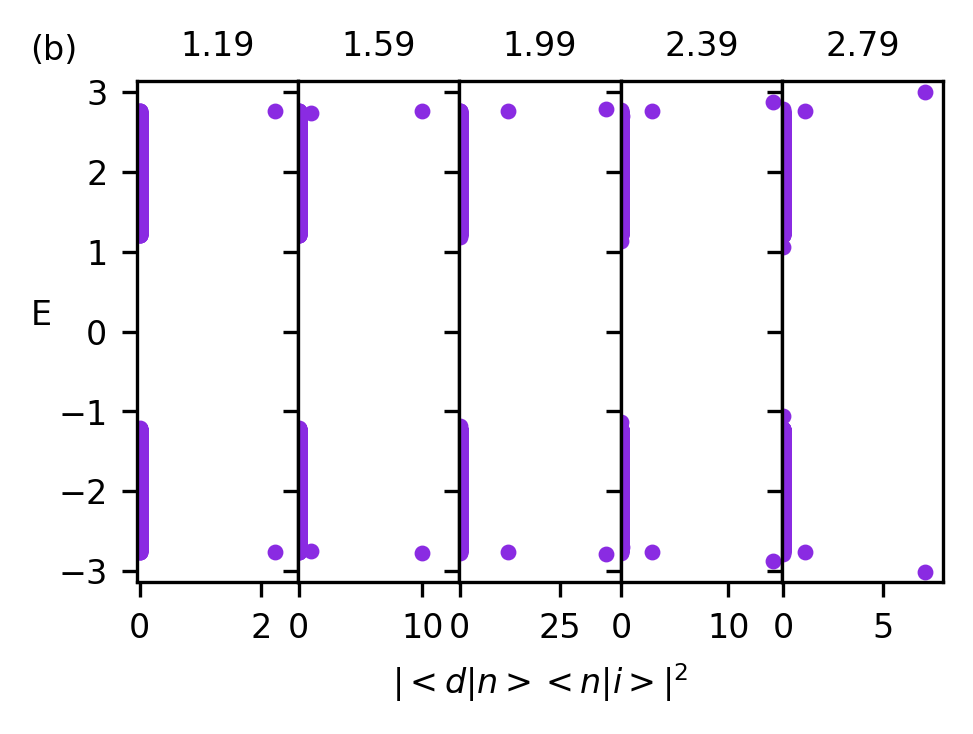

In [18]:
density_around_defect0= [1.0411720329316104e-53, 2.35557436839756e-59, 2.1783556929355566e-08, 9.144418548016033e-34, 4.169688332769146e-34, 2.482125934477536e-59, 2.1783556929298755e-08, 3.1128196230578787e-34, 4.308618897126829e-34, 9.904647077848217e-57, 9.689030237146478e-31, 2.492308361248857e-30, 1.7964393828573526e-31, 3.716294224517967e-08, 3.8981720140251975e-32, 2.725023021026936e-12, 5.536538448958413e-49, 8.908279070364864e-33, 1.1859623005332983e-31, 1.6742618904687065e-07, 6.913334499572047e-30, 4.494369607920978e-55, 2.2569762510072666e-49, 5.0131448204407405e-12, 1.16988502962374e-30, 1.1491944050541974e-30, 6.786216065632862e-32, 7.769628207978161e-30, 1.238473027200544e-07, 6.86524467129056e-55, 4.435467001935865e-11, 6.003904943223797e-50, 7.171882644046082e-32, 5.096155835736359e-30, 1.247531027321671e-29, 1.3907836945939251e-30, 1.4827245633433667e-07, 3.5102839383718454e-32, 1.7202618948244212e-54, 1.3936913925826597e-52, 1.0562600050388325e-12, 1.389931360252281e-57, 9.35051653556821e-32, 2.0217988024571606e-29, 1.408042565054356e-32, 3.716294224399012e-08, 5.03627934131005e-33, 2.5901477852884233e-55, 2.725023020524193e-12, 1.756285762643147e-49, 2.2824182110466863e-32, 6.273024034634093e-32, 1.6742618904675786e-07, 1.1140669779801502e-30, 6.3535178054970805e-56, 3.907184118136025e-31, 2.7350371914245822e-49, 5.013144811161553e-12, 4.1032724815216054e-52, 5.31440147633586e-31, 2.061406705249016e-31, 1.1259736278214017e-29, 1.2384730271831702e-07, 4.435467000602679e-11, 2.7695156725556684e-54, 1.1262276851289052e-50, 1.1533611450316709e-32, 4.115579290787711e-30, 6.435478956218292e-30, 5.901257215907997e-31, 1.4827245633256182e-07, 4.314370273213946e-55, 2.2962146304275768e-32, 1.4385686788014653e-51, 1.056260004922909e-12, 4.84821040325043e-27, 4.6728838685640386e-27, 2.2192805007024248, 9.728560877479346e-27, 7.106683306556197e-26, 2.2192805007019727, 4.014897460508299e-27, 1.643471345242961e-25, 7.4928554934015535e-53, 3.7681220486231367e-53, 6.156143069641621e-48, 3.970065648441304e-50, 0.007356365652836441, 1.5581767640166733e-28, 1.074372017748291e-27, 1.1148368446102317e-27, 6.377649517449729e-53, 1.7048257686411534e-28, 3.920960599291376e-49, 6.271665129683004e-10, 1.3846753782503286e-28, 0.001309326006280216, 7.353826353716137e-27, 3.043940104891846e-29, 9.21347286437992e-52, 9.42416111299e-30, 3.800334494926423e-50, 1.1036957229586792e-09, 0.007356365652824186, 1.1626464965130689e-27, 5.2572827770992055e-27, 5.99337401065429e-28, 1.738879768534595e-53, 1.7185586481955902e-49, 6.271665131591529e-10, 1.2978782096034635e-27, 1.2978224441783141e-27, 6.536110503499937e-09, 2.8461304199786205e-52, 5.754600857150733e-50, 6.781891577118402e-28, 0.0013093260062646645, 6.740431166816664e-30, 1.1544732638886814e-27, 2.0350942522068194e-51, 3.579130673449854e-49, 6.000639219448288e-28, 1.687021177632127e-28, 6.5361105035880285e-09, 2.193791191383104e-30, 0.00041318255815872746, 0.0007843632469097287, 4.1464324301084026e-26, 4.19857093163149e-25, 5.621813146999286e-28, 6.424219411731529e-31, 1.1036957228951158e-09, 3.8302581057745504e-31, 6.434671491167809e-52, 7.674069785940625e-49, 1.1075361618721919e-25, 0.0007843632469181612, 2.4909916232282975e-25, 4.940005460699717e-52, 9.747662556145044e-50, 9.34113319028517e-31, 3.3127179138549937e-50, 1.292407541053926e-30, 1.9249443910567006e-10, 1.9249443899253657e-10, 1.6329740286180416e-30, 8.458902847563138e-56, 4.450410144838499e-49, 7.673074932121043e-08, 3.995170315812906e-31, 3.567176053698664e-11, 9.80093560413713e-32, 3.9574939903036046e-30, 2.467161232221703e-33, 1.4853308167139948e-31, 2.3890984757761747e-54, 6.82548037889469e-30, 7.030543746927846e-33, 7.6730749320803e-08, 3.567176054694538e-11, 8.826730236092497e-33, 7.682285348231388e-56, 2.821996106247227e-32, 7.550674532845524e-31, 9.5677201823146e-50, 4.4202233883973194e-30, 1.5083033555980861e-33, 2.2038979457298168e-07, 5.48818247540486e-30, 1.1508595789062344e-29, 5.688449172776119e-31, 1.8156232445000015e-30, 1.1051832943028343e-30, 2.9696683938905623e-32, 1.49753573596373e-07, 6.899183843876195e-55, 1.901630206958632e-10, 6.706094615593566e-31, 2.911728458958588e-08, 6.534685861585e-33, 2.2038979457561214e-07, 5.283621538946687e-31, 9.390856758650638e-30, 3.5616160878667005e-31, 1.992034096111994e-07, 1.2504776530243898e-51, 3.441020235177775e-31, 6.513665228806773e-32, 9.482105431909324e-55, 2.9117284589141603e-08, 1.3372719077816285e-30, 1.9016302070779085e-10, 8.462002157607312e-31, 1.1354713145117484e-51, 1.524599140450081e-49, 2.2261220710908555e-31, 1.1346156156164108e-54, 2.262198842085331e-56, 3.5339826265531724e-51, 1.992034096122701e-07, 3.9122110578356476e-31, 4.361918095153585e-55, 1.1798452754982907e-52, 5.13388416118031e-30, 1.076240402785219e-53, 8.064421195139593e-51, 6.700134556137713e-50, 7.766716162154866e-31, 2.207253673709071e-32, 1.9270590075928303e-51, 2.252589064195468e-10, 8.701104282994858e-32, 1.468085730656304e-51, 6.2179604997444846e-12, 2.4528344698640632e-32, 2.4385049009722752e-31, 2.2525890640511401e-10, 6.325774395618825e-11, 6.325774395203657e-11, 1.993074244973085e-28, 8.805179839063516e-30, 7.488249916104078e-29, 0.0004131825581586687, 6.856417978325967e-27, 1.1284772062241422e-28, 2.3022596489496436e-29, 9.188025543308491e-56, 2.100739825425722e-30, 5.897149379666353e-54, 3.8261151288255513e-54, 1.8022539936326892e-53, 1.0999156840116208e-54, 1.5771292946451695e-49, 0.00017728804269685425, 3.2183930438456134e-28, 3.2040896047245024e-50, 1.709582207627368e-55, 2.212153501291053e-28, 0.0004101748395975162, 6.378093522509449e-26, 3.227488102217589e-54, 4.028953538016276e-52, 1.470159291000389e-30, 1.4975357359335867e-07, 2.4199685292798535e-30, 4.082295391679158e-31, 8.677457927409552e-30, 2.237381952751685e-53, 3.3544468652097488e-49, 1.4952962100115567e-30, 6.44227595914198e-30, 6.217960499154331e-12, 4.744649859676161e-31, 2.8342541180643976e-28, 3.669736852527972e-30, 9.013238088653305e-31, 4.246024060269388e-30, 2.165287728924552e-07, 2.165287728935579e-07, 1.7986390942886905e-31, 4.889678581705125e-31, 0.00041017483958390513, 0.00024005474843913333, 1.8481264466344252e-27, 1.220754790145628e-30, 3.652133358981342e-30, 7.171572590760765e-27, 3.71249222150637e-09, 1.2094167962248796e-30, 1.697228638822825e-31, 1.629683892941078e-11, 5.316072789436139e-28, 4.828078558436115e-29, 1.4393903112868402e-28, 1.8793871645220262e-31, 1.6296838930641215e-11, 1.5061289627012285e-07, 1.697390161099666e-54, 3.9465554491591437e-28, 9.248303610320356e-56, 2.1843548292714666e-52, 6.56763551973661e-55, 1.1371259664708746e-30, 7.397547476352041e-52, 7.244256999039493e-51, 1.384642324813826e-51, 6.02945034365242e-10, 5.0968952394921014e-51, 1.5061289626970097e-07, 6.029450343582544e-10, 1.0686569815112113e-30, 2.625154538524746e-49, 0.00017728804269435207, 7.132491452013545e-27, 3.1465236904506813e-50, 3.7124922185022173e-09, 4.124961761273506e-29, 3.0643903165438704e-31, 5.896339785482872e-10, 1.8263684575024184e-29, 1.46908854765544e-53, 8.940723506079095e-56, 1.8600231687097866e-51, 1.2120167686528355e-32, 1.0663021721936946e-31, 1.784545415304698e-30, 6.979241386800973e-08, 1.7405927891925203e-53, 3.1846580498782142e-49, 3.972949220183808e-31, 1.3739691238129318e-30, 1.3029575144770622e-10, 9.389314612843071e-53, 8.35161794300391e-54, 4.476224985803901e-53, 2.7225894689841383e-53, 3.589575625519039e-54, 1.7283146380043794e-28, 3.6308211638528157e-53, 6.674150246126021e-51, 1.305355686291279e-54, 6.756325683544743e-52, 9.28272472688538e-31, 5.7250813916434085e-28, 4.981635227001956e-29, 2.994131936742908e-48, 7.970504174848042e-34, 1.692612083863695e-50, 1.3019853086043446e-30, 1.716842768726647e-30, 1.5593087967620948e-29, 3.214493150213072e-54, 3.1169003812708437e-51, 5.896339783891553e-10, 3.436108344148195e-30, 6.979241386625915e-08, 1.2690614025891653e-30, 1.101839349937173e-31, 1.7219226490997535e-07, 1.2568344159112397e-28, 9.145620417675177e-05, 8.134391213645194e-27, 1.2894021509048838e-08, 1.6346927262857817e-28, 1.3029575149144795e-10, 2.636704055016719e-30, 4.282193663378694e-29, 2.1725293616708446e-27, 0.00024005474843856076, 1.95056407075315e-27, 3.1659530975273054e-28, 1.8930777943231913e-28, 1.622223310629969e-31, 5.416496267492387e-31, 1.7327653194492075e-54, 1.5229273498069438e-51, 3.5226503705760194e-52, 4.4799408756235766e-10, 1.384176870196185e-31, 1.2905345149502884e-28, 9.70017473119901e-28, 7.833515017799648e-31, 2.095206036941277e-05, 1.43348246932156e-09, 4.448828474469942e-29, 1.433482469453299e-09, 2.18289336105717e-28, 3.880116172185496e-31, 2.3383075059360696e-28, 2.0952060369657765e-05, 5.510806935942593e-09, 5.510806936177376e-09, 2.803201484349282e-54, 2.3108713995796048e-29, 2.4902917676313846e-29, 9.145620417688167e-05, 7.740206630894715e-28, 1.2474069768258753e-28, 1.2894021513369586e-08, 4.186042746384899e-29, 8.618133430227233e-05, 9.66955761294855e-28, 1.5481418877164907e-30, 4.128732868518256e-28, 2.6208045825251206e-53, 2.0214396319264482e-50, 4.266835770055561e-53, 1.2777478006699574e-50, 1.7219226490952224e-07, 1.9628388562287137e-30, 1.4534807501981628e-08, 3.035796037221231e-31, 6.1228951077333765e-31, 4.479940875534578e-10, 3.218796717299794e-30, 1.126142526728725e-30, 2.8231382860898334e-29, 1.0961201923139821e-29, 8.618133430222933e-05, 2.3126380948409485e-28, 1.9963681927410187e-28, 2.0138732307136106e-30, 6.357517014923447e-56, 2.247857585141588e-54, 3.2990243472770197e-28, 4.706259146987555e-33, 7.096414606489659e-32, 1.0807225586350277e-51, 4.110395863674725e-31, 3.703942842972638e-49, 3.9542035221475006e-10, 1.9898411390118575e-51, 1.4038522689455073e-30, 7.526407891724033e-08, 3.7335029703199355e-32, 7.61127924905165e-12, 5.750659612085562e-31, 7.526407891728105e-08, 1.2374555929912241e-31, 7.611279250556408e-12, 1.0175005132363698e-29, 4.518040324797789e-30, 4.1509732278783104e-07, 1.7320446848279421e-31, 4.150973228111613e-07, 4.457843325331917e-05, 1.5166583529581643e-31, 1.4534807501994163e-08, 4.917592674273219e-54, 7.390661787876243e-31, 1.2095175187836181e-51, 5.819796620672021e-10, 2.713630565424789e-31, 2.1465408513961816e-08, 2.643482936926012e-10, 6.92321637500243e-31, 9.723729305131261e-32, 2.5784938994518255e-31, 8.44933993461236e-52, 5.819796621047533e-10, 2.1465408512790105e-08, 2.643482936531051e-10, 1.3488494248888226e-30, 1.2862659937999657e-52, 1.6792023937719848e-30, 3.946535391773546e-29, 1.2679951794164512e-29, 8.129313015270517e-31, 8.588170267895843e-28, 7.055317974964794e-53, 2.9434213526568682e-31, 7.156455492986071e-50, 1.317034931298957e-09, 4.457843325339803e-05, 7.568442200757926e-49, 3.9542035219933384e-10, 4.134918909670643e-27, 0.0001598433436338614, 4.880547959534085e-53, 6.038113503117888e-50, 5.64038467691994e-30, 5.190815640735719e-09, 0.0001598433436324323, 4.8888479628401895e-29, 7.17615956979071e-30, 1.3170349313019895e-09, 9.222363100129142e-29, 7.061816436030233e-27, 2.4948052849225065e-06, 9.314063547648003e-30, 5.190815639351388e-09, 7.243390701483853e-56, 5.766602867533444e-30, 1.1975327000379408e-09, 1.1075638320448566e-31, 6.676423471976084e-30, 1.1614783184705959e-52, 8.776788934548453e-51, 9.627195087545095e-55, 3.220992914380643e-50, 4.04220272459639e-31, 2.7323690434785427e-07, 1.5922895522725887e-31, 8.306949264532417e-32, 5.853806737120913e-30, 2.63892316401463e-30, 7.005075345622107e-29, 2.725216387969077e-11, 1.005122041397092e-30, 2.73236904344551e-07, 7.207760017183336e-31, 8.57443264992534e-31, 2.490939237595299e-55, 3.7335109896531254e-31, 1.555042275087681e-07, 3.430439844304988e-28, 2.7252163883974925e-11, 6.590988816022756e-31, 2.766913122584759e-53, 1.1975327000674216e-09, 1.1177986799712396e-52, 8.138563115631566e-52, 5.078084107867572e-50, 3.9235393939165544e-31, 4.347346494556642e-32, 1.940557592722154e-30, 3.2768812742474063e-51, 4.1949190641074246e-29, 7.81743497301499e-29, 4.2076764610271796e-29, 2.4948052846197434e-06, 1.0030535944193237e-27, 5.8464119890551946e-30, 2.9968402087696492e-30, 2.9191384507954386e-30, 4.357074782784306e-29, 3.137418740548586e-30, 2.590564061514526e-31, 9.548207797879888e-30, 2.958575821481931e-30, 1.1875602011551108e-30, 1.5550422750704802e-07, 4.9220937253684536e-30, 1.8991264156787363e-51, 2.299254056703074e-31, 1.972117913789374e-30, 1.98545791574135e-31, 3.357213896538432e-30, 5.827744255889847e-31, 1.4463714564561452e-07, 3.988020210151365e-07, 2.7612076862500906e-31, 7.797222112777933e-11, 1.9740392708917576e-54, 3.1628844282969466e-30, 0.0002338128476018073, 1.9119854557694903e-31, 3.6196469935197e-32, 5.541877439975338e-53, 4.048902629844649e-30, 1.2974048894040515e-09, 1.6184450722498404e-50, 3.7221175070950857e-32, 1.4463714565006075e-07, 2.6226034050965634e-29, 1.1674364033581457e-31, 3.988020210166374e-07, 1.4485870102848054e-31, 7.797222112456837e-11, 5.4315336442247835e-31, 1.2974048893775517e-09, 7.923905155295389e-53, 6.203095724188923e-53, 2.0617329852124013e-31, 6.813212278392994e-29, 4.1425620901663605e-52, 0.0002338128476019518, 1.934646144050865e-50, 1.4179446915202455e-29, 1.2046440437568845e-55, 8.48972429492269e-52, 1.9668986274620773e-09, 2.730747367782451e-55, 1.4136834780676672e-52, 6.5903532650812355e-31, 1.9668986272919594e-09, 1.7771579312589035e-53, 3.79709201770573e-49, 6.675521813569059e-30, 1.7097615294957762e-29, 1.0489055357328234e-48, 4.229455483958622e-55, 1.1602924971968882e-51, 1.1068911400915427e-31, 6.839870070494559e-32, 4.701691172616304e-55, 1.7555052838119045e-50, 1.569201054221409e-57, 3.5664355744308186e-53, 5.737326517579131e-53, 4.580184374131428e-29, 1.94872887356377e-08, 3.4263461631882397e-28, 1.1143245011859622e-10, 1.2733125045071213e-52, 2.6541837590004943e-48, 1.613504825971136e-54, 1.9740111651501897e-51, 7.362013632397231e-05, 2.0616705029887287e-50, 7.6448793394943e-30, 4.0046412986699705e-05, 1.1143245012147316e-10, 2.0739143820865277e-52, 2.5601419654694684e-47, 7.362013632366712e-05, 2.7522236548776206e-28, 1.2080883775280307e-51, 5.885510731746321e-29, 8.923875542688276e-29, 3.392688432573472e-29, 1.8714758267720064e-28, 1.9487288737624203e-08, 1.6935121749164996e-30, 4.4948077117214256e-30, 8.128605257074223e-30, 5.204282758249035e-29, 4.8391965122166016e-30, 4.1999830197811814e-30, 1.3355906181731078e-29, 5.292443493491805e-09, 1.2483579090434957e-29, 6.963060031568496e-30, 5.292443494044569e-09, 9.160826639704518e-55, 1.2415469201271886e-49, 1.2252530513931058e-28, 1.860199751360919e-29, 3.1822460335124897e-07, 6.692352196869738e-27, 3.540720286896063e-29, 6.274618571212603e-29, 3.0087528019746387e-05, 8.381764390775164e-30, 1.4985130694056176e-29, 1.308358621554514e-29, 1.5002473610625402e-29, 3.0087528019640305e-05, 7.002625914195989e-30, 9.510967278525881e-30, 3.182246035930482e-07, 3.699979103517421e-26, 6.057202735071582e-29, 3.0632142304929875e-31, 1.2974916175062561e-05, 5.424592005535104e-32, 1.4820247806194594e-28, 5.845828718424303e-29, 1.297491617505524e-05, 1.3129323147586102e-05, 2.8412077149526736e-29, 2.4919012846357293e-30, 1.6847661145849387e-28, 4.650253598133681e-30, 8.375800939303319e-54, 1.3153146818364507e-29, 2.144628423423311e-31, 1.3131492554516965e-50, 2.4231347503138265e-30, 1.0206102957586723e-29, 1.2114326674119438e-29, 1.3556921303173177e-29, 1.4139476873182864e-30, 2.816084100483198e-29, 1.576828495881744e-08, 3.694946584834107e-29, 3.0427563546546776e-30, 1.8971761396418422e-29, 2.569324882303124e-29, 1.637011191536581e-05, 6.798689436678678e-09, 1.3129323147521304e-05, 1.5768284958564476e-08, 2.3354828383629215e-30, 8.093535308453374e-06, 4.227148445545747e-27, 1.0021824270391748e-30, 1.765506180469666e-27, 1.3297915122934215e-50, 1.3097353610540196e-29, 7.342121699340403e-53, 9.47453241757507e-51, 4.898197990078473e-54, 1.4407756247263335e-52, 6.904687082568164e-05, 7.073876299372568e-31, 6.826413215614729e-50, 3.3815336628204636e-31, 6.2703201600141446e-30, 6.293354149284741e-30, 7.708228300031264e-29, 6.418711125362192e-29, 6.343632805084236e-30, 1.0721273744283174e-29, 2.2316275559739515e-53, 8.0935353085479e-06, 9.146817771859456e-06, 4.6213217763445476e-52, 2.011775566736185e-28, 1.6370111915565537e-05, 6.798689435974762e-09, 9.14681777175853e-06, 6.0235021345747154e-55, 4.537670688693933e-54, 1.529128279134581e-52, 1.304943255636862e-50, 2.552400010632229e-51, 5.649311413110925e-50, 2.355059208785601e-27, 2.6621878975328917e-10, 8.70842583810563e-53, 1.464016031892097e-28, 1.0759197697218286e-31, 1.7632413683448135e-53, 2.844422976509926e-53, 2.662187897213915e-10, 5.22795790375583e-10, 2.128488397014493e-08, 2.725068309237837e-28, 5.227957903865255e-10, 1.1455777206959751e-29, 1.4329154096846683e-30, 2.1284883969481407e-08, 1.1482734689993758e-53, 1.2240378807196481e-30, 1.2077442251242306e-30, 1.4860143362027704e-07, 9.306592386723991e-32, 3.6225399205467256e-53, 5.082104093558921e-07, 1.207918178493616e-31, 3.99048565928801e-32, 6.4042542801248166e-31, 1.812443143143445e-32, 1.8515957267150066e-54, 3.0352366758582697e-10, 2.5180338220657193e-11, 1.5817766609702371e-53, 8.957357778890677e-50, 5.41002299697174e-49, 8.034490526422825e-12, 1.7271996672026125e-30, 8.268923728922802e-08, 8.318251529144138e-32, 5.053304307534381e-09, 6.963288308355964e-30, 7.079994934602986e-10, 2.1187640332333082e-51, 1.3268775922752189e-30, 7.90781280825718e-32, 6.339556000049767e-33, 1.7422888453324566e-53, 1.5467952465096426e-52, 7.345229146994482e-32, 1.6906559601072093e-07, 2.460401450779346e-09, 1.5913404040777867e-30, 2.8533562978754597e-31, 1.486014336180222e-07, 1.79897947067271e-31, 1.5240851803416097e-30, 5.08210409357686e-07, 2.5180338217756122e-11, 2.4025703047222713e-50, 4.8975105838382874e-49, 2.2651529811779704e-51, 3.0146342832570475e-47, 1.2001217778311777e-30, 1.01316216617867e-31, 1.2951214733405315e-31, 8.034490525662491e-12, 5.948745050182032e-30, 3.0352366757670503e-10, 3.3183377352126064e-52, 2.0815496141750206e-50, 8.26892372887211e-08, 6.904687082559611e-05, 1.726123922460877e-31, 5.053304307285272e-09, 3.3481165238944486e-53, 1.3918934888428513e-30, 2.343362060651178e-27, 2.3188685343739937e-51, 4.853089734199941e-28, 8.761075405379166e-10, 2.3121477666786653e-31, 3.633641481937408e-31, 7.079994934315751e-10, 9.829273497279785e-33, 1.0077885277863444e-28, 8.76107540481492e-10, 1.5802285896041168e-08, 1.3220660775269769e-27, 1.5802285908181744e-08, 1.9716522345903966e-27, 4.392357515456014e-31, 6.363836954505358e-31, 6.33680064328392e-31, 2.5684217217836813e-30, 5.745992860235293e-32, 1.127192499865741e-29, 1.6906559600661806e-07, 2.4604014507533415e-09, 1.4095110484385546e-30, 7.473218338231067e-51, 3.15548388596068e-31, 1.0979254764291696e-31, 1.961093753292835e-31, 9.806637469191129e-32, 1.11279726840828e-50, 4.730465238055139e-55, 1.8576833061034574e-30, 4.1712668309020536e-49, 2.7096991905302637e-51, 3.019759653951546e-53, 7.522471139063534e-54, 2.3439947961010132e-54, 1.557433816080077e-51, 5.500509297975638e-50, 4.342926461572426e-30, 1.4362674712993069e-53, 2.5799601742099036e-31, 2.268468579131642e-09, 7.316711597405033e-32, 2.4354478110816824e-50, 7.940994060482379e-54, 2.3651464149135634e-31, 1.624235881846443e-30, 2.5666076037608316e-55, 2.4938498268904442e-30, 3.9581991197686956e-55, 1.4858318468341336e-29, 2.21480121087837e-30, 1.2575659552999377e-07, 2.8489731750329294e-31, 2.083111582176527e-31, 2.268468579073119e-09, 2.9601332531684058e-08, 7.097263215046623e-11, 1.498703440136744e-31, 2.215074041082288e-06, 7.667036975363846e-31, 7.097263214314695e-11, 3.9963595876044175e-31, 1.1509942420162434e-50, 2.215074041076879e-06, 1.2626747101692768e-48, 2.960133253159754e-08, 1.1120900999205858e-52, 2.404337546543598e-30, 2.2835832137215658e-31, 4.849978662983662e-31, 1.047031929783322e-55, 2.0175272761304663e-32, 1.0062454951950144e-49, 2.1069169259150768e-29, 8.40601750242133e-08, 1.2566828767730656e-30, 3.5749517927037416e-10, 4.563787251474072e-31, 7.557870713221184e-31, 5.192033764458442e-32, 2.7233683114287557e-31, 3.605987013264212e-30, 8.406017502266161e-08, 1.7822206603964507e-29, 2.172064069480666e-54, 4.182326583492755e-52, 2.9957927521553284e-31, 3.5749517946711504e-10, 3.109932307271981e-55, 3.9667296755953556e-54, 4.738010756967233e-09, 2.0840644303980763e-53, 1.0890542865536489e-54, 1.633183340780481e-51, 4.7588408495734175e-31, 1.5668454871771348e-30, 4.738010756755596e-09, 2.3509675680914104e-51, 4.4711239702104616e-32, 1.3102908330897973e-31, 8.213593679424711e-11, 3.577303465830735e-30, 3.4777178736072907e-50, 6.682289672975287e-52, 3.8254363927959434e-32, 3.6716231539082685e-31, 1.1726204252252305e-30, 8.213593677119179e-11, 2.1413408223247787e-31, 3.263910360859379e-12, 7.624027461628056e-31, 3.263910360349233e-12, 4.631032990039074e-55, 9.358025314853074e-55, 1.7806747194116452e-48, 4.00464129868002e-05, 1.469663747618879e-29, 3.199886695417636e-31, 1.5887763345370212e-10, 3.2123915294187716e-07, 3.0191639316182113e-30, 2.3732733376123734e-31, 7.5900962454014e-30, 1.2575659553466453e-07, 1.0227692805920834e-30, 1.2165273205741946e-50, 1.5887763346662886e-10, 1.6003645769362527e-54, 2.472244753225336e-52, 2.9129037423765538e-05, 1.2634419599240818e-29, 1.7750267731429147e-31, 7.120983044211558e-30, 7.665404896095416e-53, 2.514767309586461e-54, 1.2010672272127182e-28, 4.931556705001416e-31, 9.849573672242035e-29, 3.212391529528565e-07, 7.759765571554283e-32, 5.3776862636288e-31, 4.7085654554660086e-54, 8.694036853250482e-55, 7.536923175284183e-09, 6.672192379737067e-29, 3.1678959432510384e-51, 2.0732535913750583e-31, 4.304956994245674e-30, 2.8065383330585855e-31, 1.925923492095966e-06, 2.9129037423653035e-05, 9.658838035699498e-30, 2.559998649375014e-29, 1.580701543798851e-30, 1.1099726935216177e-31, 1.2443952608653422e-10, 6.0423541720600785e-06, 5.339362543332863e-30, 3.1598292193344276e-31, 1.2443952611138104e-10, 3.93699567895295e-52, 9.895299972608534e-32, 7.008330448818832e-29, 6.020919599055967e-54, 2.504610989421742e-54, 7.759661511033889e-55, 1.538778381668217e-54, 7.492344552987531e-54, 4.865899290020321e-52, 1.7728235537893643e-47, 2.001375563264985e-05, 4.87867920706456e-10, 2.2929189947434412e-55, 4.878679206471693e-10, 1.3716690265326324e-29, 1.7495353500968167e-50, 1.7095930346769415e-29, 1.2034239789701327e-30, 1.1283092774139814e-30, 9.371977785649733e-30, 1.1324615453021872e-30, 2.2061372561548396e-29, 8.713437651819145e-29, 5.7429979067482415e-31, 7.536923174766517e-09, 6.481589001100262e-30, 1.9259234921823837e-06, 2.865090501742334e-27, 2.25359573210879e-29, 3.3372377030521195e-28, 5.421447141672102e-32, 1.6525990030673164e-31, 3.4967904778050146e-31, 4.8303420852328124e-32, 1.3889824590354926e-29, 3.5801988274941528e-09, 6.2640914815617735e-30, 6.042354171908158e-06, 1.641373882591733e-28, 3.5801988273076335e-09, 3.680992242383737e-55, 1.0084253870624066e-55, 4.1722167106251085e-52, 4.535411191320913e-50, 3.5665865289891505e-29, 4.914525585490978e-29, 2.0013755632705787e-05, 1.2325265009356724e-29, 5.403469874327244e-30, 5.1935070101540906e-30, 4.679204009638025e-51, 1.787466428273624e-50, 1.9408913083007309e-31, 1.0500415811142748e-08, 3.15636448991094e-29, 4.917056096279514e-30, 5.267205816908403e-31, 6.0670541751390466e-05, 6.847908198092584e-30, 2.140354215535222e-51, 1.5746972093300085e-51, 6.307563772327477e-28, 1.8086454692006896e-30, 1.0500415808571224e-08, 5.488935267202677e-29, 9.702967820517115e-29, 6.599084871290674e-10, 1.3490951120945616e-48, 9.107240679125312e-09, 1.2608776231413038e-27, 5.1806562884841565e-30, 9.522309506406868e-31, 2.3128858976596038e-29, 3.0027860889697636e-07, 3.3270424428051286e-26, 9.107240674057266e-09, 1.41993387081477e-27, 3.6973010396672487e-06, 6.633728000654966e-31, 8.374242102425905e-30, 2.0112047320238455e-08, 1.5781944450508911e-52, 1.4306876913195157e-32, 4.8506995296269546e-55, 3.6047627669012237e-32, 9.657432935952153e-12, 5.0068821956244295e-31, 9.657432935715394e-12, 5.6846611053962224e-08, 9.889468826279473e-29, 4.745122070167281e-31, 3.8041054154236336e-49, 2.298150459212693e-32, 2.6383134425710517e-30, 5.684661105840231e-08, 2.0088250682994645e-30, 2.47624738426185e-49, 1.454873975055971e-29, 6.067054175115316e-05, 1.2060490294386246e-06, 6.921546838251234e-24, 3.386849262433868e-30, 3.8300296021032686e-09, 2.1963903944998217e-30, 3.0485511390309484e-30, 5.226150016596729e-28, 2.4600809646202884e-27, 1.2060490244874962e-06, 3.4882463278721325e-23, 4.819630032444675e-29, 6.599084874200786e-10, 2.5004153505580302e-29, 9.211121961380218e-08, 2.205138095868254e-29, 1.4605732956327936e-28, 1.3647265571739078e-26, 3.830029604858859e-09, 1.5348728795373388e-28, 9.211121951901275e-08, 3.7534322194700496e-27, 4.252254986697341e-29, 3.002786089067682e-07, 2.6391349019917927e-26, 3.697301040985748e-06, 1.1686941878070502e-28, 1.9505496406932043e-51, 6.685703069380829e-30, 2.0112047320515266e-08, 7.327552212892271e-29, 2.0978541452143554e-31, 1.9010589711350746e-31, 8.5696392939728e-32, 7.222050922899767e-08, 2.2465346172616515e-31, 2.4868178174747603e-31, 1.4371476676279102e-11, 1.1603471107855524e-30, 3.9433588413648994e-32, 2.3421017752799586e-32, 6.263105106519424e-31, 2.058313095637363e-07, 1.7151622143567314e-55, 3.05612495683091e-52, 7.222050922893086e-08, 9.050353078485433e-31, 1.2108157596909074e-30, 2.2542665043619227e-31, 1.4371476674648912e-11, 2.214867197669005e-06, 1.1867110222000732e-31, 1.3938664227281617e-32, 5.406515174811929e-31, 3.8224989151336585e-09, 2.285299283652084e-31, 9.859729923063894e-55, 2.006088179622018e-30, 2.277305094723223e-31, 2.3533149670860273e-31, 2.2148671976663838e-06, 8.152518417942819e-54, 5.346639026125617e-54, 7.615321902265834e-32, 4.679778292199081e-31, 2.0583130956343136e-07, 1.7551367729364638e-31, 2.574183481748346e-07, 2.903362879977136e-54, 4.0393069379420716e-31, 1.4743610446175679e-30, 3.822498915045722e-09, 8.557296959801957e-50, 2.9025708500350083e-54, 1.4940904615678748e-30, 7.185037193141201e-55, 4.7191850069690676e-32, 1.6183252518286253e-30, 1.5389667492237305e-30, 8.667767281472967e-32, 4.986842715341373e-11, 2.574183481765366e-07, 1.5003518310203848e-54, 1.6730866415365574e-30, 6.632218129431733e-50, 4.114660960679868e-31, 4.986842714777038e-11, 2.241382143437377e-55, 1.1893692888542497e-51, 1.8524867105432247e-50, 3.827130857905624e-05, 2.217665731049252e-55, 3.4142122324756933e-29, 1.0643695534976975e-51, 9.796875854337157e-32, 1.3590290105842685e-30, 2.307867254161042e-11, 2.4883076915048112e-29, 1.5712304627316123e-51, 7.542546260109273e-52, 9.609099062626075e-54, 3.8271308578989834e-05, 8.908583113210679e-29, 4.398631055557912e-32, 1.4167959714604299e-30, 3.337274253775479e-48, 6.175696721714815e-06, 3.203837248800994e-29, 5.086016810735459e-54, 2.307867254178116e-11, 4.102919792835732e-30, 3.558256735502892e-50, 3.257875701415886e-29, 1.5278745237948317e-52, 7.51113111553827e-50, 1.562750600334189e-08, 4.732447927076526e-30, 1.6193297935663364e-30, 2.465145121065572e-30, 1.8022817449051222e-30, 4.158050413981756e-31, 7.138078327492223e-07, 4.8239800169633166e-54, 4.898934716828264e-50, 7.138078327530211e-07, 4.7125493557241e-32, 2.217008541730998e-54, 7.2752007009352e-32, 3.0632119701614718e-33, 2.3779048329993764e-09, 9.015793027246664e-31, 6.620077680273713e-08, 1.5071950537274046e-30, 6.416505370129389e-11, 9.031066242616113e-52, 2.854436134350418e-32, 6.416505369443739e-11, 2.5223361136227113e-31, 3.320005463293731e-55, 1.1463973137291922e-30, 8.019487047733197e-31, 1.0005891712303795e-31, 2.931499431810943e-53, 1.909825180026505e-50, 5.804968848269534e-09, 1.8599909442202143e-10, 1.048756540884028e-31, 4.595459303599677e-32, 6.62007768024674e-08, 5.372396576169409e-31, 5.804968848268172e-09, 1.8599909443169867e-10, 5.697129188753439e-31, 2.3779048330294866e-09, 5.541595937237273e-52, 5.151140625775212e-56, 2.2865682270415073e-51, 4.022261360285071e-55, 5.016482328872751e-09, 1.4227310304642604e-28, 2.266030579484561e-31, 5.699078856086522e-31, 1.1678707034395577e-51, 1.1443587894122205e-31, 1.5731496221166045e-29, 4.359632907523283e-55, 1.0117522658573526e-51, 5.016482327457367e-09, 3.812343669348692e-31, 1.2896908100386717e-51, 4.202547928683103e-10, 3.514930048710553e-30, 3.441121609505098e-10, 2.2174254246437675e-30, 5.126934300097907e-31, 3.6388777283545854e-32, 1.078994542739073e-31, 4.202547928408957e-10, 9.300996781850311e-31, 3.441121608845862e-10, 9.827859848455662e-31, 4.53528931269482e-31, 1.2480584759791482e-32, 6.104952438785264e-31, 3.991846352027034e-55, 1.5875019288057956e-50, 5.638686951043263e-54, 4.20923296071619e-31, 2.0241013969710962e-55, 7.503413280480821e-56, 2.6902821380216773e-31, 1.4630803831613763e-29, 3.879162949239879e-30, 6.175696721773754e-06, 1.0121270032277574e-27, 1.7197166191057067e-51, 1.619141001497242e-30, 2.7244858999446046e-05, 5.9416503619361854e-30, 4.039859738169035e-29, 1.5627506003864972e-08, 5.857870032832665e-56, 3.612096289449268e-51, 2.4285114807859108e-52, 1.3699844084844468e-30, 1.0419852263315367e-50, 2.0846325346784945e-08, 2.727815809532287e-53, 5.054384980659837e-48, 1.2599574442231288e-30, 3.6625110488260552e-31, 1.584142822234786e-09, 3.5008297071228595e-31, 1.1549277311171841e-30, 1.0963670030869032e-07, 2.783533464304449e-31, 7.532055388045735e-30, 4.39921835408719e-31, 1.5841428222255969e-09, 1.0963670031190088e-07, 1.476898400236492e-30, 4.205003202378723e-07, 8.453752592414714e-29, 5.669426290800846e-32, 6.852191522286466e-32, 4.205003202507004e-07, 3.034654216265904e-29, 2.724485899944153e-05, 1.3862506357943492e-30, 6.083940792461845e-10, 3.276648187928867e-31, 3.588644715280488e-30, 6.083940793688783e-10, 1.1639790796993175e-51, 1.0577495152422758e-31, 8.15087733161553e-30, 1.817883178476559e-29, 2.0846325347177415e-08, 6.0370322066553515e-30, 7.939294329089474e-30, 4.839885399061791e-06, 1.5614433455462692e-27, 5.522496356609525e-29, 3.33871541992196e-30, 4.8398853988134614e-06, 7.977834124211473e-29, 6.708434807659921e-30, 1.2382027617960124e-31, 7.653387593200827e-11, 3.1936593446302423e-31, 7.653387594598398e-11, 1.171185999885178e-30, 2.2570560746959617e-06, 8.669634836530562e-52, 1.2293697990558841e-28, 6.582587195439825e-54, 1.3358518776820659e-50, 4.058418157243915e-54, 1.1925847599559356e-50, 3.5298745531527037e-50, 1.6427758505291119e-53, 2.5562863484422363e-50, 1.6658016634465456e-55, 2.8343393161908774e-55, 1.1693397966000809e-50, 4.054105410565692e-28, 1.1064030045894584e-49, 2.3197558869314993e-53, 5.166734548892014e-54, 4.3614609718182676e-30, 3.049608576314507e-55, 6.0270663719930594e-55, 3.090875562913844e-31, 4.752670571416617e-49, 2.2790747766632977e-29, 1.2694271516452108e-10, 1.8656091464737014e-30, 5.1215192863787786e-30, 1.6169689725594216e-30, 4.050204056485704e-30, 1.1335737791487956e-07, 8.149320463526093e-09, 3.300126934116484e-30, 1.159654017688334e-29, 6.456826227028629e-31, 4.6260572829964905e-50, 4.779224618577105e-31, 2.2570560746889e-06, 2.4307213474525644e-05, 5.222209279576844e-54, 1.1629755894006936e-28, 7.86635844390184e-32, 1.7238947456108286e-29, 4.726682718302161e-30, 6.891915197816786e-31, 2.6620538918861797e-52, 1.247999928556305e-54, 9.166121566179577e-31, 2.43714366276067e-50, 1.6704068610737006e-49, 1.2694271514447154e-10, 3.4982605941640893e-29, 8.149320464165242e-09, 1.1335737791302988e-07, 2.973880481983214e-28, 4.34666043627254e-09, 7.2654565471524785e-31, 1.7302187070832e-52, 1.5390259095336064e-08, 2.0511027511452387e-06, 2.8435759048465093e-30, 2.4307213474544983e-05, 6.500268255455373e-30, 1.8541676073097524e-31, 3.562127806201011e-30, 3.94009829343097e-30, 2.9550398064027324e-31, 3.9317979220818564e-30, 1.427761424454363e-06, 7.799305861916352e-31, 7.515410560216298e-55, 1.0527541560201837e-52, 4.4335909279774943e-51, 3.2784386148731657e-31, 3.6264567273486e-30, 3.1155126172435124e-53, 3.5044138564156327e-50, 1.585826994245759e-09, 3.197327660393232e-29, 2.8178044903113902e-30, 2.0511027511394357e-06, 1.5390259096071133e-08, 4.346660436389171e-09, 1.1579559508720153e-29, 5.57262465316323e-49, 3.2349877537603756e-30, 1.4361764880483804e-30, 5.986232408068103e-30, 2.2535780739161064e-30, 8.60068404211098e-31, 1.427761424471722e-06, 1.5858269939719967e-09, 7.687573574990432e-29, 9.628825867579637e-30, 1.883003303924465e-53, 7.079184968338685e-52, 3.6924596443704113e-31, 3.2003928238542296e-09, 2.3272104564278464e-31, 3.2003928236755875e-09, 7.445158787186912e-56, 9.745194837633326e-08, 2.774776470075493e-53, 6.4033916274194535e-49, 3.480619578428407e-05, 4.279699132054913e-29, 1.378526861555712e-09, 9.75304781745678e-52, 1.1184992239265947e-50, 3.480619578409228e-05, 4.124640227676751e-28, 1.3785268609589015e-09, 3.215736549470301e-30, 2.920485517780029e-10, 4.972767245838469e-30, 2.9204855181032436e-10, 8.456068473258339e-31, 9.745194838504105e-08, 2.816724721104532e-28, 1.0021082970669903e-30, 3.73101565764074e-56, 3.7608235941962326e-31, 3.4557681145246674e-29, 8.015652266586698e-31, 3.749216925518879e-33, 5.6885756455546144e-33, 1.2036280456642254e-55, 8.807856791825864e-31, 1.9726214478870298e-48, 4.52947248583686e-12, 4.5528988453749036e-30, 2.896362823454527e-08, 6.242728701994476e-30, 8.518146419171773e-55, 2.6594238970886884e-49, 1.7564251090212665e-56, 1.7455078814093177e-52, 5.469616729505029e-55, 4.23173989133062e-30, 1.0022674068828615e-30, 2.3517655346628342e-48, 4.5294724852530276e-12, 2.375827197574826e-50, 2.0842158122313663e-31, 2.653197285318278e-10, 2.8963628233719278e-08, 1.615710916917368e-30, 1.1069250378022145e-31, 2.6531972852249765e-10, 3.040670578516803e-51, 1.1109881373931607e-30, 4.365643260966903e-28, 4.169568152245162e-06, 5.855210378757842e-30, 1.998353641865283e-30, 4.2870933206916814e-30, 2.6835624244152343e-31, 4.16956815213997e-06, 3.310205157226626e-28, 3.7576529413514575e-31, 2.82081139481604e-10, 2.820811394773203e-10, 9.50918753986139e-30, 1.0994427129190179e-28, 5.907549149364305e-29, 2.1330018083195532e-29, 1.4647735179407216e-07, 2.865500629848021e-29, 1.1065201078697212e-27, 1.6048047818876387e-29, 1.4647735178032857e-07, 4.1161914786685934e-29, 8.855785109692546e-30, 4.869223425122595e-30, 1.2498137655634117e-31, 1.1272292303197134e-29, 1.0783338029768844e-05, 1.0111801075568974e-54, 1.0783338029790084e-05, 3.209069015995432e-51, 7.786990302671068e-55, 2.627842590450774e-30, 4.441583435892644e-31, 1.5092579380429842e-07, 4.517678480723235e-51, 6.562633766364975e-32, 5.744908270073121e-28, 2.976878913296896e-31, 3.250970033534881e-30, 2.8009602042296463e-31, 1.509257938108136e-07, 1.8153788811631863e-07, 5.779922281469315e-29, 2.1292168268921386e-31, 6.2388620302545126e-09, 1.475303024868377e-31, 1.273178231867239e-07, 2.9176222419705477e-56, 1.873548861881054e-52, 1.0877357242661255e-31, 9.839543248429174e-32, 2.7450065546456813e-31, 3.2546646158679145e-32, 1.1468439715589141e-29, 3.689266147768423e-06, 7.759552723134737e-32, 1.4399823240559514e-31, 9.952082897473423e-31, 6.23886203054391e-09, 1.1950276027437335e-29, 1.273178231872826e-07, 1.9457198039045306e-30, 6.988866108364521e-55, 6.209268807878314e-50, 4.996429853160609e-55, 1.0195569662952564e-31, 5.829648287446211e-31, 1.8153788811914904e-07, 4.316302834878338e-30, 4.470341145876282e-55, 1.1597297802204536e-07, 1.306114673688523e-29, 7.016725168301365e-33, 9.444322403082532e-31, 4.0894892477695115e-09, 5.330955516300875e-09, 3.689266147765752e-06, 1.7017570617017924e-30, 5.713829035292199e-31, 1.1597297801979045e-07, 4.8152009597718526e-55, 1.9873912209635616e-31, 4.089489247829813e-09, 6.485037864749818e-54, 5.385998244348102e-51, 1.5216001878303224e-30, 2.7927553715808414e-30, 1.4593031847372316e-07, 6.48647880025564e-52, 8.962604794059921e-31, 1.4593031847386003e-07, 1.3852151748990057e-52, 8.936984468926959e-30, 7.351985483809383e-09, 3.0481275438522485e-31, 3.168842852620979e-30, 5.017920830850323e-32, 6.418611132517344e-30, 7.351985483340229e-09, 2.809867961204669e-30, 2.2747590333956675e-53, 2.071780829243459e-05, 1.2018933721744332e-28, 2.2305479383735974e-31, 7.174860588263376e-32, 9.436187699126736e-49, 4.1457910145988735e-12, 8.837689949209558e-30, 2.010762368425567e-56, 3.2366432090032203e-52, 3.305200508415451e-30, 8.343790256640582e-30, 2.071780829247999e-05, 4.3488316849307676e-30, 9.506938732523854e-55, 1.6941982383016336e-32, 6.460927031223166e-52, 1.0661292477068051e-52, 4.145791014843225e-12, 5.043320821413728e-49, 1.743001780495429e-30, 5.954696320149811e-31, 5.3309555167777744e-09, 9.942116062234899e-53, 2.3301022197842834e-50, 2.08001325063241e-30, 1.256191104157969e-31, 4.975729981695608e-32, 2.861525225798825e-30, 2.802219788787359e-30, 5.443702026357416e-07, 1.813267275791939e-30, 1.5717414706628568e-54, 1.4771669159700066e-51, 8.233769296041787e-30, 2.3761055403834118e-30, 2.1086725568973916e-30, 6.990462273207379e-08, 2.3852665325174167e-09, 3.3376919971218227e-32, 6.041321937934953e-31, 1.9951022817588057e-07, 9.125556689128977e-29, 5.70188189406576e-32, 2.8669009936097245e-31, 4.485699467581261e-31, 3.86437947157766e-30, 1.0671245357872859e-32, 1.1547391967660601e-53, 6.917136048980034e-33, 9.512783383217908e-30, 9.662363483506907e-12, 7.161837747107645e-53, 2.1256488390447823e-49, 1.4059975021461922e-31, 2.2606241703817277e-29, 1.995102281817236e-07, 4.7519144280663164e-48, 7.223113823235442e-07, 3.6683450041149672e-31, 1.0321991019447739e-54, 4.871950906633191e-49, 9.626139982008453e-50, 4.8914524307846895e-51, 6.6576876056679195e-53, 5.723288387833311e-50, 1.2976439077700848e-11, 5.192113445930166e-31, 2.9717843273991824e-30, 4.792307834838474e-31, 6.042525357815268e-11, 6.222932659290217e-31, 2.7255180796542813e-30, 9.662363481447951e-12, 2.1335772487941573e-10, 5.414546924279987e-49, 4.3634874277101464e-32, 5.8274353761746426e-30, 1.2976439077418696e-11, 1.0322747443122793e-09, 8.912840852966643e-55, 4.737509930182718e-31, 5.443702026372726e-07, 1.4919240028022165e-55, 4.4431817158502415e-31, 2.385266532505086e-09, 8.116525387021912e-56, 1.9099060877259602e-54, 1.5337694109145768e-50, 6.34882478182601e-09, 5.242508808379146e-50, 3.2795065043956264e-31, 2.163726835541321e-29, 4.88831108081245e-31, 1.032274744400861e-09, 5.45705692839736e-31, 5.9376865319511944e-31, 6.99046227306681e-08, 2.9875591938446005e-32, 2.4272336925720886e-52, 1.9449790823169638e-32, 4.5738647881801685e-52, 4.6656997496065657e-11, 4.169703308669979e-49, 2.1335772485860069e-10, 4.8983114939210535e-30, 2.429448060314461e-51, 6.529074839124813e-31, 6.348824783237277e-09, 2.3060614685426162e-30, 4.481969907088469e-31, 2.104054856116307e-29, 2.680226630787897e-30, 6.855062895242035e-30, 2.7520562855498887e-52, 5.070796752990546e-06, 1.3593729750970107e-28, 2.433689091971719e-30, 5.718137233629095e-30, 4.9683215203491456e-29, 1.0963095527831116e-08, 5.070796752993457e-06, 2.87977253242469e-29, 4.011059789364655e-29, 2.2078724691882506e-29, 1.0963095527468748e-08, 7.22311382335984e-07, 1.0167608995064194e-30, 3.2879652543740953e-29, 2.0708461706609464e-32, 6.042525357118355e-11, 4.7620563640879375e-33, 5.6404401254761255e-31, 1.3831161141166431e-30, 1.8453142550889164e-30, 4.6656997519660454e-11, 5.307489448234898e-33, 5.471408604189332e-31, 1.300838522937991e-30, 1.0692166786687302e-52, 5.891272692802165e-06, 2.2038164792451817e-55, 8.158999082252806e-51, 4.4949990888963454e-29, 3.382323666098068e-30, 9.277669617906765e-48, 7.519218238672876e-30, 6.734879376772794e-06, 2.9930661217016357e-55, 1.845199146462532e-08, 1.7061482921246425e-30, 5.89127269277316e-06, 2.362241480836648e-53, 3.43620135534937e-52, 1.0173356445024797e-29, 1.5952811632141252e-55, 1.7577891325609791e-31, 1.4017595061412534e-30, 9.334250120023047e-12, 1.2349878616055702e-29, 1.2696804754840663e-28, 2.650505189642117e-06, 7.88062260274667e-52, 9.334250117011402e-12, 1.60358527139862e-28, 3.405772377835371e-31, 2.0621319138423413e-31, 2.778109487568716e-31, 1.6915349348460425e-54, 1.485394447102887e-50, 1.392310186280074e-55, 4.4628140463351705e-52, 2.492448573790611e-30, 2.6505051895342825e-06, 5.3015498350267814e-55, 9.766851119935944e-51, 5.103362963714854e-32, 1.2459223951061312e-49, 5.95478390261554e-29, 3.1239114378097693e-09, 7.456752042826394e-30, 1.404140463328681e-07, 8.961792270296206e-28, 2.3772484594254444e-28, 1.2430941724111783e-27, 2.708677753356241e-11, 1.1007656041515334e-27, 4.3848334905276096e-07, 1.4915388082259859e-30, 5.74321234503655e-30, 2.1670879102035442e-08, 1.1446740958168695e-31, 3.1239114398844144e-09, 4.2361134862936754e-30, 8.107051410453006e-31, 3.8147926259539106e-28, 7.137972126805209e-56, 1.6015158235542955e-52, 9.17337841383691e-55, 3.0182891624965274e-48, 1.5230402407123256e-28, 4.3848334909489264e-07, 1.3356342043862653e-29, 1.2912425223419822e-30, 2.025852237688108e-30, 1.5441490131387942e-28, 7.809059587927202e-28, 2.708677753482373e-11, 2.1670879101854587e-08, 1.4041404636478875e-07, 1.126810671080996e-54, 6.734879376770371e-06, 1.845199146271176e-08, 8.7736558271301e-47, 3.743511263335826e-29, 4.5553502273897325e-55, 8.89649401647e-31, 1.8460477172536855e-09, 3.0134567797880553e-31, 1.4290203238077782e-54, 1.8460477173056683e-09, 9.589533060568098e-52, 4.484461659378197e-29, 1.4751727583401374e-29, 5.6240629816594836e-08, 1.8072702240116106e-30, 9.69551549034094e-56, 3.128912004016121e-51, 8.159131448597857e-30, 1.5139584424067195e-30, 3.592546239221268e-30, 7.158763936563231e-30, 4.02794466430536e-32, 4.858812870781753e-30, 3.5699710457144946e-29, 7.642986542085524e-06, 1.2522357984145432e-30, 4.7888962813602864e-30, 7.642986542060081e-06, 2.864172237403437e-31, 1.514559827449393e-30, 4.2881539724946997e-11, 3.797101098343351e-31, 1.543155603797297e-47, 3.126845342792446e-31, 4.288153973547182e-11, 9.572863396322755e-06, 1.924031346574479e-29, 2.15615883579259e-54, 1.7900441904355917e-49, 4.811243522392049e-55, 5.302673284771996e-50, 8.8416431564649e-30, 1.6886360814843286e-29, 5.624062981407573e-08, 9.014870591587378e-31, 1.9456056920299045e-54, 1.2275816470832472e-30, 3.6256154514834983e-31, 7.325351815859206e-10, 3.5427201408015e-30, 4.094634854757907e-50, 2.1560676731609412e-32, 2.5108677654210024e-30, 8.17823727922712e-08, 8.09591409341933e-28, 2.0100938857291355e-55, 1.5865815134199327e-29, 1.282714192487881e-56, 1.6775956717487632e-31, 3.634896723956609e-31, 4.38042352576783e-56, 4.003725168799428e-30, 1.5890106381203556e-51, 2.5755845978995192e-31, 3.952465448048159e-51, 4.252759477170508e-31, 1.2013836078157786e-29, 7.478928144767546e-09, 1.2467182348014876e-12, 1.409429494882986e-30, 1.1343556312250687e-53, 1.4743256317541765e-31, 1.6150205876863772e-29, 8.052513848595855e-31, 2.3525659252616227e-49, 1.2953339116963258e-07, 7.478928144940756e-09, 1.2953339116414534e-07, 7.325351813846207e-10, 2.2418571721268152e-30, 2.3262504377735933e-28, 8.178237280816731e-08, 8.07511631497169e-30, 1.0078479758813065e-51, 4.55205519327278e-49, 9.572863396377211e-06, 1.523156624974194e-54, 2.4957321685217215e-28, 5.149117309482764e-51, 3.394324583634857e-30, 1.6523656143050748e-30, 2.683365105571765e-28, 4.6203806397633287e-32, 1.4915296943913657e-54, 5.664665146495523e-06, 6.638575632509178e-30, 8.27878258149825e-49, 6.242897110411266e-30, 5.113099035586483e-10, 2.8834076925089827e-28, 2.1198185137204797e-31, 4.202801431719791e-54, 2.1414612288215424e-30, 4.01798823157894e-30, 5.11309904535107e-10, 1.533545734249543e-29, 5.373614042320959e-30, 5.664665146470878e-06, 2.808731944694655e-48, 4.51186901520023e-31, 5.037392212606764e-11, 9.514703139185915e-29, 4.993077218627013e-30, 2.4668947005293397e-29, 5.037392214283914e-11, 5.250982235452825e-06, 1.979222783777238e-31, 3.338925468586469e-31, 5.250982235463718e-06, 4.4580975195445356e-31, 1.5376926239798296e-30, 1.945622702641869e-29, 9.222070560557606e-56, 5.176537262331666e-51, 8.968104766529593e-31, 3.3484923686517395e-56, 5.938692595146846e-31, 7.263921947680685e-50, 3.878099775355031e-10, 2.0257279142332457e-54, 1.9378253959261959e-31, 3.364216575026113e-07, 3.878099775676038e-10, 6.238746820440029e-09, 6.879943809001475e-30, 1.4138611100691786e-29, 3.8599106799205035e-54, 5.251171641332296e-52, 3.9683622748183413e-51, 1.0290258109010431e-29, 3.3642165751595717e-07, 6.238746820508826e-09, 7.320033571220236e-31, 6.886890707245751e-30, 3.259306010269258e-30, 2.2854849244161597e-54, 1.8804750511118518e-49, 1.7530328497158117e-55, 2.0515918666742038e-52, 5.79936749296369e-09, 1.3365518400604799e-30, 1.8090924069137285e-09, 1.6546676954997693e-30, 4.152279027291742e-30, 8.986297884962027e-30, 5.799367492329117e-09, 2.1518485158266844e-30, 4.653123170558608e-31, 1.8090924072181178e-09, 3.4913830182339876e-30, 3.6887023526256275e-29, 4.280467568472635e-51, 1.0209030906289156e-52, 1.1672708013852592e-29, 1.7932635522657058e-07, 2.487057283457101e-31, 1.2467182351174134e-12, 2.8343674555012525e-51, 3.909933541844252e-31, 2.182541086025083e-48, 8.034090674362848e-54, 6.759838678779829e-07, 1.9488128051595727e-54, 6.0767484350013145e-31, 2.7856818213113785e-30, 1.793263552321702e-07, 7.762151830773171e-48, 3.852956803616627e-31, 5.017463183594203e-30, 3.535869191252422e-48, 1.7468835836028113e-06, 6.393966309560836e-31, 8.581641447983481e-56, 8.03990746899277e-49, 4.621079918648977e-48, 1.3412130273673847e-51, 7.600648628706278e-55, 2.2899459211606677e-56, 6.090033901068503e-05, 6.090033901069857e-05, 1.9908060782632975e-29, 1.5472010964455153e-54, 1.1209538476583577e-26, 1.6684043562245849e-09, 3.82240447659661e-53, 1.6509130512494605e-52, 2.151954604630793e-54, 1.1870133588183224e-48, 5.380838131131747e-52, 1.3130063571188262e-55, 6.268064743537521e-57, 8.576093065000409e-31, 4.831646823861201e-32, 2.844438080504757e-29, 2.019120256376404e-54, 6.75983867881054e-07, 1.8593983575593058e-31, 4.310185132919469e-31, 2.9067517424255414e-31, 3.7333562483349865e-30, 5.2606374772417695e-30, 3.773679872251673e-32, 2.5517752835317845e-30, 1.311353893281952e-11, 1.3113538934379941e-11, 3.999188526432759e-12, 3.999188525945915e-12, 1.338669059095994e-55, 4.536618442924159e-54, 1.3409869748936228e-51, 5.6932385199832005e-55, 1.269028537797587e-30, 4.6833326188904505e-30, 1.4049413018925145e-29, 8.157219350866824e-06, 5.752034292892091e-50, 6.900313811981064e-30, 2.435656501589364e-46, 2.981614774128211e-29, 2.198418953355821e-30, 9.25422556231964e-31, 3.571894766432381e-11, 1.9842996491612593e-30, 1.387202261948707e-09, 1.2045166651929969e-55, 1.1434022448640984e-31, 8.313865794036933e-30, 1.7468835836137105e-06, 7.268676196857061e-30, 3.617438311913211e-51, 3.4946686677776966e-49, 1.8764022730632597e-51, 1.5539604632240088e-31, 1.4229131741728156e-30, 1.673454626559774e-10, 2.0383983181013843e-30, 3.534223121829106e-08, 1.2953068587059736e-31, 4.411445723849735e-30, 5.0723648945583e-29, 2.1031119563597895e-30, 5.843707447842481e-48, 6.573417882715457e-30, 8.929131620011859e-31, 5.585832158328759e-32, 1.673454626488801e-10, 3.213786422810751e-26, 1.6684043716555803e-09, 6.601266431974207e-31, 3.1296653182195967e-31, 3.534223121689093e-08, 4.063019035162168e-30, 1.6854341755416715e-29, 2.175595949761215e-29, 8.227987732328237e-33, 1.0457881205419066e-06, 1.6632987788904868e-31, 1.1259864963003945e-51, 6.525395281102355e-32, 1.2161178063310052e-30, 1.9593831518437802e-07, 3.471184597274638e-28, 2.5996722354797652e-52, 1.3603852339580694e-30, 2.1614090795539538e-11, 6.23203046342693e-09, 6.453145547919982e-30, 4.265548690911618e-51, 1.6919506672013857e-13, 4.434562303557081e-31, 7.693604291850473e-09, 1.260923913327e-31, 6.090039894881872e-32, 6.2320304634472376e-09, 5.572836196406314e-06, 1.304747444301827e-29, 9.240286953652815e-32, 1.0457881205321683e-06, 4.751953625367018e-08, 1.9399163714085328e-29, 2.0678895207501915e-09, 2.590632950594004e-31, 1.5552057350633208e-30, 1.9593831518547853e-07, 2.918755765100193e-28, 1.680175126187035e-31, 2.0678895207749056e-09, 1.5234381587471942e-31, 1.8621912236321206e-53, 2.002225504439874e-31, 7.0112429979339685e-56, 2.1614090798621555e-11, 8.157219350888888e-06, 4.093232500473063e-51, 9.237152929208939e-47, 9.098114196240253e-30, 1.1468734713657586e-54, 4.2264498201785065e-31, 4.900040230514192e-06, 9.326241190100463e-50, 1.1886207781396349e-30, 7.693604292013876e-09, 3.5718947686005594e-11, 5.630707598585069e-31, 9.83798166124182e-31, 3.0079066831991097e-30, 6.367589409143577e-30, 1.3872022620873974e-09, 4.352278338318979e-09, 1.0566274694076992e-31, 1.1472464785074751e-30, 1.1666999256586331e-08, 4.316497643096255e-30, 1.0113612170176756e-30, 2.013808877933169e-30, 5.572836196402093e-06, 4.7519536254041e-08, 1.2340829082845394e-30, 5.904718608684888e-30, 2.1005466998566118e-32, 5.184222268016166e-30, 4.538725888189078e-31, 2.0656520402280933e-33, 2.510305688788151e-56, 8.447093242476918e-32, 3.3759141397137315e-31, 3.6319469906344924e-07, 2.314639522729376e-55, 1.2842686253881252e-29, 5.886253874252107e-09, 5.480232232465667e-54, 4.9310960312162535e-52, 7.653058838731813e-50, 8.673790432012411e-31, 3.975016457484571e-31, 1.1723521955715598e-31, 6.535141318619521e-28, 6.12282113158396e-30, 1.443604775116394e-30, 4.900040230508868e-06, 1.2204431660683643e-06, 7.218341906007233e-31, 2.0067874138486927e-27, 4.1186063687387566e-52, 9.945799011149527e-46, 1.7247861824790309e-31, 8.056384703070612e-28, 2.3158183916210755e-30, 1.2204431660566046e-06, 3.049378088257789e-28, 3.0406388801807573e-32, 1.1825835569841828e-30, 1.1666999257002367e-08, 4.352278338038017e-09, 1.6919506663674557e-13, 4.757910454484187e-30, 1.0180839487550151e-30, 1.2475598320426709e-51, 5.663693388632354e-46, 2.2595712849438003e-31, 6.1807482105364e-13, 6.887301367240433e-53, 1.0277743054768105e-29, 1.1391774703809622e-30, 1.739975159196461e-30, 3.631946990587304e-07, 1.3472368045676268e-30, 5.886253874035795e-09, 1.459039277966664e-57, 1.9409741153103025e-30, 2.8115823547266617e-31, 1.3327748345710057e-29, 2.714770238851316e-31, 2.1191453788230454e-29, 2.298717533509921e-31, 3.767976197932621e-54, 1.2040097151108804e-06, 4.109590782158133e-30, 7.262014833882438e-54, 4.558307518139778e-52, 3.2776270310757945e-45, 8.746015889366688e-13, 6.773627755011611e-33, 5.214539591934882e-55, 1.301712200315829e-52, 4.591954659088131e-10, 5.4698414991731365e-09, 3.3984016430020475e-56, 1.1004466436312002e-31, 7.550245639105451e-31, 2.0008906006066113e-08, 7.993020991995747e-31, 5.74434621025892e-51, 3.967679067990658e-33, 7.56509233776772e-52, 1.052015690222538e-29, 4.5919546589117155e-10, 9.96849163572839e-31, 2.000890600678991e-08, 3.487858858031515e-29, 5.715533176564633e-55, 5.469841499132681e-09, 3.7578610124381365e-57, 2.1400691290068797e-52, 3.3271069508203654e-30, 4.8733707599735875e-32, 9.040007542735995e-57, 1.020955648853095e-32, 1.8689543179927863e-51, 2.002639933140043e-54, 8.194567813062271e-32, 3.350780059531458e-31, 1.1755397736883808e-30, 1.697292606530246e-54, 7.727412893766571e-50, 2.284755410238904e-54, 9.592925561145189e-33, 1.162327085846009e-31, 4.722245620910813e-08, 1.1064148253177224e-10, 2.552767160829421e-53, 4.722245621123796e-08, 2.5390406922911773e-06, 1.9854439580818766e-31, 3.223182808268943e-47, 8.204790376077766e-30, 3.930907116235941e-29, 1.1064148255136942e-10, 2.1981560430949587e-52, 2.5291172383002927e-30, 5.273485886623591e-32, 6.180748209198005e-13, 5.6290153589472955e-30, 6.75119298904627e-29, 1.6145608848836776e-54, 2.4782003878012472e-54, 9.23540405834584e-31, 2.099715892487358e-06, 8.22233434345562e-30, 1.2688552265645626e-29, 1.4711814292590882e-30, 6.795939683308311e-29, 1.6813192183195284e-30, 3.571928481268252e-49, 1.2040097151162815e-06, 1.4479751609489482e-29, 8.746015886111102e-13, 1.8212086310008826e-51, 2.7569580450879993e-52, 2.780918665438319e-12, 8.90503494312037e-49, 1.1152279832676282e-30, 8.960518334460252e-46, 4.237037875499465e-31, 3.386738270803877e-55, 1.3936901614969263e-51, 1.0910539298344616e-31, 4.824233256958378e-31, 3.859647042704851e-29, 1.4461978423487906e-08, 9.276381251580869e-07, 9.057520336109357e-27, 2.5127321052625733e-29, 1.2314870517072009e-29, 1.1519393316617415e-07, 8.558516596554515e-29, 6.046196119898894e-29, 1.887462578682232e-54, 2.176902534890845e-49, 4.3477647201768093e-51, 1.1139241366906993e-32, 1.8684727332639955e-30, 1.2564632918663985e-53, 9.131845929292498e-30, 2.0997158925108134e-06, 5.492399896324677e-30, 2.780918668428299e-12, 2.8532078282771914e-30, 8.860460501481662e-31, 1.4681988235709683e-55, 7.425500825747782e-54, 2.3096396531708622e-28, 5.065858421941169e-30, 9.27638125304931e-07, 1.2270891958611187e-56, 4.646797807630412e-09, 2.1869762650595553e-30, 3.1219945127434043e-31, 2.1574447834280788e-10, 2.5012591199094116e-31, 3.1131349893588506e-32, 3.629540111847731e-47, 4.881924450663952e-29, 2.1086035457949066e-31, 2.1574447833713094e-10, 3.018070727018737e-31, 6.655118783049927e-30, 9.635379005536083e-32, 3.666809639404595e-31, 4.646797807013347e-09, 2.703582367394043e-31, 3.141318642021579e-30, 1.0037496977069117e-30, 5.240365812725807e-32, 4.484570672519585e-30, 5.94997888572615e-51, 1.446197842348287e-08, 1.1519393316631798e-07, 2.0845776428239766e-29, 1.1430333790801562e-09, 3.4474814194577814e-12, 4.737015643578453e-28, 8.323970529171695e-11, 4.842475673983178e-12, 4.905137721774702e-31, 1.9004846813827853e-29, 1.2037975314426727e-30, 1.1430333791471333e-09, 4.8424756743203585e-12, 3.66212394115598e-53, 4.3148314581080306e-29, 1.7607838172029053e-05, 2.4278446217589065e-31, 7.004998565433392e-30, 1.4984715390701457e-06, 1.7607838172026342e-05, 2.8184074607241855e-30, 1.6102836801977315e-08, 1.5062855535616025e-50, 8.34213564510893e-31, 1.2291933554227414e-28, 2.5390406923166205e-06, 8.424889847461078e-54, 6.0766213738870436e-30, 6.554527764265e-30, 3.8303968135832043e-32, 2.4656486756673327e-31, 3.929248773441687e-30, 1.3969230304759415e-51, 1.2819567996760478e-31, 1.4984715390689152e-06, 1.0395914651065187e-54, 6.052727117193956e-52, 6.178176799029804e-10, 3.447481419137344e-12, 2.604394439008224e-30, 1.1014387579299946e-47, 9.763753848980416e-29, 1.6625024732767635e-30, 1.6102836801961096e-08, 2.1510045789638244e-31, 6.674709231779681e-50, 1.1274894361797374e-49, 8.323970536473536e-11, 9.586980065480349e-51, 4.529106676430775e-11, 6.945387859018568e-32, 1.2366607426426902e-30, 4.226169893189973e-30, 4.682608239548632e-55, 7.554276368206132e-52, 4.6936493581507805e-53, 6.228910174654698e-50, 5.785832060492569e-32, 6.17817680114451e-10, 6.251004381870495e-32, 3.7718409325946567e-25, 2.229580077087877e-07, 2.8988296264157333e-31, 2.3387881480209376e-31, 3.937025785947776e-50, 4.529106675902244e-11, 6.79621346186045e-31, 2.4647109642730897e-29, 2.5447263042923114e-25, 2.2295800853524547e-07, 6.258705857744898e-31, 3.786670994792939e-06, 3.072677089251046e-56, 2.0010882954422073e-31, 3.586555673031423e-30, 1.1653379080221364e-30, 3.786670994793816e-06, 5.1831059453945105e-30, 1.1896472306035833e-55, 6.997303952053067e-31, 2.429674884182818e-30, 4.769818742746359e-28, 8.463410246830612e-31, 1.2812217686521053e-08, 3.634370702455106e-30, 6.682751675898524e-07, 4.677145089739328e-31, 5.91173534302943e-12, 2.546545650929157e-31, 5.9117353255741035e-12, 2.3745261868349482e-29, 3.005541439717121e-55, 1.975255969230301e-30, 9.545490934605635e-28, 6.682751675814295e-07, 5.343470246494333e-06, 1.2142839489859787e-50, 3.386700567200424e-29, 2.0513947969191004e-54, 8.1170499032348215e-53, 1.281221768697953e-08, 2.3734502109856986e-30, 1.9387813896945514e-30, 1.2772094915130155e-06, 1.6700768274027307e-30, 1.6118902902576745e-06, 1.8066948367549047e-28, 3.5339681561436895e-31, 1.4574230310496505e-30, 5.889587755694012e-53, 6.162017898837388e-48, 1.015088935646296e-28, 4.9062494399532416e-29, 1.2101329761185058e-11, 1.2041270409855861e-27, 1.0607903527444422e-06, 8.864801942217177e-29, 2.211102696127452e-30, 1.773612458838921e-30, 4.0816005402222345e-07, 2.187420464590436e-32, 8.423072648150991e-30, 1.038274039328287e-51, 4.515988306498066e-53, 1.0773965471128447e-49, 1.2171735068089163e-44, 6.726187622905614e-31, 6.977728155008665e-10, 2.745625965071629e-07, 1.2537181227067884e-31, 1.4222378102651034e-30, 1.8833355898517597e-30, 1.021119203662256e-13, 2.7175260245563555e-30, 1.010211170094922e-29, 2.070318142149762e-30, 1.5693597197362152e-10, 2.0178722604368844e-30, 1.0669123384790438e-31, 2.1969674323271093e-07, 2.192461113159362e-31, 4.029052874543426e-28, 9.315661691546361e-55, 4.11004063167704e-28, 1.3810995840264026e-06, 1.0380419485314147e-52, 1.710498235643946e-30, 5.343470246492462e-06, 2.7940280140130893e-30, 9.354472432199723e-09, 1.007739206347432e-53, 2.8945075468831153e-50, 1.1906970744924635e-50, 3.272493714760657e-55, 1.342459912208671e-51, 4.089429179155372e-30, 4.760833562402326e-31, 1.1133168512701904e-11, 3.1900781658505774e-30, 2.3987445075351883e-30, 1.8223145428208315e-08, 3.6020917827106996e-31, 3.349723369601653e-31, 2.860438882652986e-30, 1.511101953349403e-07, 1.9124495200693578e-31, 7.410826329032542e-30, 6.865546164510092e-56, 8.34063738186296e-56, 1.576920926533944e-29, 1.6118902902634725e-06, 6.981436452231913e-31, 3.863227100027382e-31, 1.2975569555767343e-28, 2.745625965054389e-07, 1.2131796953307994e-30, 6.094783092677366e-31, 8.750546118036769e-52, 6.97772815556755e-10, 1.3696842574957652e-30, 7.913245426184132e-30, 5.66181533061094e-30, 1.5392799487689052e-10, 2.7748755670173186e-52, 1.6095408897276473e-29, 1.0607903527122626e-06, 5.13396531162078e-32, 5.127547374141302e-29, 2.196967432294937e-07, 9.811538442978578e-52, 2.4619198481516786e-29, 6.151851820460372e-30, 1.7450165346288585e-30, 4.081600540421136e-07, 6.860684672330542e-31, 4.4385032579808604e-29, 1.5090150397503878e-48, 2.449141250869786e-31, 8.377045566807042e-32, 1.2101329722912913e-11, 2.3497911000560873e-28, 3.2761647745523425e-30, 9.80250845230823e-56, 1.2716845599390314e-48, 5.868609920772679e-51, 1.021119203832527e-13, 3.285475660493386e-53, 9.67290602396298e-50, 8.459727333457223e-45, 1.073871500271876e-28, 5.5090917489193294e-15, 7.820573733656845e-49, 7.6161067924000655e-31, 2.0212906040509165e-28, 1.3288539477791344e-28, 1.3810995840147532e-06, 9.229215804120482e-30, 4.165065034183886e-56, 4.505215567097782e-50, 2.188247114766301e-30, 4.0297073019705915e-28, 2.574224349737878e-09, 1.5392799488150148e-10, 8.67217414102173e-31, 3.908371154037358e-31, 1.5669007200181813e-30, 8.597356655224602e-54, 9.35447243258116e-09, 4.874316188668661e-33, 2.1674923680348425e-31, 6.355435414198513e-30, 1.113316851020934e-11, 1.986787456093991e-30, 8.384087259628881e-31, 8.531791105708722e-55, 7.156630177637252e-52, 1.5111019533366764e-07, 1.8356053442589896e-46, 1.6118670692452036e-09, 3.0051577850898583e-26, 1.4513601735163882e-26, 1.5693597192836523e-10, 1.6118670745556785e-09, 2.1801822393586242e-52, 1.8223145428493117e-08, 5.2100232942557525e-27, 1.19282527858132e-27, 5.509091798084366e-15, 1.133013245779577e-49, 4.81893093488104e-30, 2.5742243510114868e-09, 3.261038790595428e-29, 2.0105056660706647e-46, 4.0789026755236824e-32, 3.780521286490066e-52, 2.533599990000257e-48, 7.918082290647818e-58, 1.568622402953107e-33, 3.1671570402351347e-57, 2.7986430465301524e-57, 2.6258452917812964e-08, 2.582225117305478e-30, 8.45503212294189e-11, 1.7699335048868406e-30, 7.799669247889048e-51, 3.3408537224649744e-30, 2.2719027543221727e-31, 2.6258452917879036e-08, 2.046493974874662e-31, 8.455032122546323e-11, 1.0969417315069336e-48, 6.822232818874301e-31, 1.5938068269853698e-30, 6.242671933867448e-30, 4.030748320796101e-54, 7.301456583024619e-51, 1.0436164302961656e-50, 6.116804219063386e-45, 4.8828902251355024e-48, 3.481506915593411e-57, 1.3579736296607153e-30, 9.973493048396767e-09, 3.2417622499246255e-30, 4.374606595227677e-08, 2.7911273021371886e-30, 1.3030358066008555e-31, 6.832704709670067e-31, 4.616386442351282e-08, 4.220591601074019e-32, 1.66856216475434e-31, 9.973493048000875e-09, 1.370719666112411e-50, 5.734835152501845e-30, 4.3746065950873586e-08, 6.0386892342223684e-30, 1.3115935222978132e-29, 3.746493699926663e-31, 5.152308883246147e-54, 5.156914082222861e-32, 2.2107016047586198e-30, 4.616386442378391e-08, 2.9711846093449166e-30, 5.513967450796565e-55, 1.27720949151278e-06, 3.114126729763875e-49, 3.6772321948799497e-10, 5.429490676408143e-31, 2.2038741078403785e-30, 2.8088776896897986e-13, 2.3025765618375382e-56, 2.5874579798540124e-29, 1.9594697496971993e-31, 6.034066308367195e-31, 2.615286868493879e-55, 8.926820553025852e-31, 5.0348775265285073e-57, 9.055966721330262e-53, 5.409394899780271e-50, 5.361903804543636e-07, 1.4718255567946164e-31, 7.36129764013261e-30, 2.5212973859785055e-31, 1.2053428392622577e-07, 1.308420563809757e-31, 1.776614598555811e-09, 2.2973809044683236e-32, 2.808877690971057e-13, 1.6941344236549153e-30, 3.6772321944102383e-10, 1.990759383568912e-49, 9.416926949887933e-31, 1.2250267412158394e-31, 1.5643435065021e-50, 2.151968440130643e-30, 7.238185958070444e-08, 1.4969987992230787e-53, 3.953720849305532e-53, 1.0745270854491653e-30, 5.962248187570711e-32, 1.4735722897716526e-30, 5.965433053475716e-31, 9.635087084505052e-31, 4.833844648315056e-07, 2.131871349990639e-29, 6.581935322628015e-47, 3.5923810121829525e-57, 2.4755584594197452e-30, 7.48417764345449e-07, 5.1871923734966764e-54, 8.38845553116832e-07, 9.39831306790739e-30, 2.9025086408664827e-30, 4.02480372993817e-31, 1.3429743279511161e-29, 4.977265490302226e-07, 1.2395039958461494e-31, 4.90305789859632e-31, 5.361903804586514e-07, 1.644748961825576e-30, 4.1066781453912705e-32, 5.409546309905672e-30, 8.388455531323016e-07, 2.1106464387751963e-31, 1.36533977385859e-29, 2.990087195467709e-30, 1.0721196799250221e-30, 1.205342839274744e-07, 2.6399426388879795e-56, 2.872080603314327e-53, 3.950496612386791e-32, 4.241991236340436e-54, 3.1643832454319437e-31, 4.50054026093122e-52, 1.7766145986364043e-09, 4.977265490358374e-07, 9.043155065915323e-29, 1.213817413549997e-48, 3.6949101007742105e-49, 3.4647969170803145e-31, 1.1808299917175733e-47, 6.108522466274947e-13, 9.386021692713886e-09, 7.109500239904146e-32, 1.386078312963548e-31, 5.269974720443034e-32, 1.2519660309487093e-11, 9.073443419709158e-32, 1.4829761171529896e-50, 5.977911940022632e-31, 5.707299408497438e-31, 2.149244213807681e-06, 1.5002691681619914e-30, 5.085990675118327e-45, 6.570800338416533e-31, 9.863539675121596e-32, 2.620244728380838e-54, 7.23818595790658e-08, 1.972786332732206e-24, 9.134091092538036e-32, 1.6304765772098489e-47, 1.4467549348675372e-31, 7.338703024925807e-31, 4.364655192762044e-12, 3.3459462619079745e-57, 2.6667051676445726e-31, 1.8420590802038186e-31, 9.963012776424085e-32, 4.833844648290893e-07, 4.318277035548336e-30, 9.537895081703368e-31, 2.575259553299178e-29, 9.320153563498108e-31, 3.584125808252919e-30, 7.869745241391539e-08, 6.152523713676116e-30, 1.4202331954078738e-30, 8.187717449346739e-30, 7.484177624182788e-07, 1.2249123191387486e-26, 2.5923660438220977e-31, 5.739794686187548e-31, 4.5512785812934336e-55, 7.925723847218566e-54, 3.029420365550755e-32, 2.1492442138006688e-06, 4.3646551863301826e-12, 3.9013386611669054e-31, 1.0163520098612778e-31, 1.8591469879151363e-50, 5.117209700147911e-06, 9.37309441142427e-30, 1.870119712021388e-54, 1.4618510123348273e-29, 2.186584607483208e-48, 3.0350462567055463e-54, 1.876065853634457e-53, 5.54374902299161e-32, 1.5488182948671893e-30, 3.138196248326537e-29, 5.771920592169977e-52, 1.4492660468177101e-46, 1.336150433187389e-31, 3.750240843555936e-45, 1.7303292889705879e-47, 9.38602169208781e-09, 6.108522465528203e-13, 4.612738260297436e-31, 1.2519660308709546e-11, 8.231101856477462e-31, 3.6591719209633246e-31, 7.869745241544862e-08, 4.615713653500361e-31, 7.793880634776168e-06, 3.1114638801576103e-31, 1.423747659202434e-13, 1.300194238455119e-29, 7.793880634772696e-06, 1.4237476593638188e-13, 1.715309455995217e-53, 7.01676971662472e-54, 1.4547368125893627e-12, 3.209624017504524e-32, 9.89946482205031e-32, 7.734221331894641e-54, 4.781865009427016e-30, 4.168882543244205e-30, 4.928931736821778e-30, 3.654170987289136e-32, 1.4547368128788642e-12, 2.8720401779142773e-06, 6.351217666667773e-07, 1.4987147842956217e-29, 2.4994412023078486e-07, 3.6341663074048365e-50, 9.557307622219255e-31, 5.799797018780883e-31, 8.777708213282616e-32, 2.8720401779099346e-06, 1.821666159897314e-52, 8.663276211928447e-31, 2.8866991376254243e-46, 1.59115190451581e-29, 2.4994412023364164e-07, 6.347538008471878e-29, 6.354894199940805e-12, 8.979642313360909e-32, 2.430877835663635e-12, 2.267106531799566e-47, 2.4308778349001764e-12, 1.0730242780679133e-30, 2.4480502245763334e-31, 2.920360421880487e-54, 6.354894198362693e-12, 1.341993265847588e-31, 7.620799757815197e-49, 3.830923810856421e-55, 1.730068715044531e-49, 5.973937216470363e-53, 5.7548781227478e-49, 6.98283854654072e-11, 6.982838546075407e-11, 5.092075812669868e-31, 9.621858951601574e-55, 2.44607076891689e-31, 4.739142345786433e-09, 5.736954936821146e-31, 2.2032797766780702e-51, 6.73246492100627e-28, 1.0143808510508185e-10, 2.172540702251109e-32, 4.012695264670898e-31, 1.684071443389502e-50, 1.014380851098388e-10, 4.739142350895216e-09, 2.3134308435006935e-28, 6.351217666629399e-07, 6.616928148721315e-31, 4.8568945113340196e-55, 4.717226923978801e-55, 8.6696469546987e-53, 1.6801118528360725e-31, 1.0516448327482249e-30, 1.9206319630012392e-31, 5.117209700150619e-06, 3.2575392729852776e-31, 7.695367946986903e-32, 1.97404729459776e-30, 1.1092521680516767e-08, 6.613035468379292e-29, 1.1092521680506374e-08, 1.887888190450785e-30, 6.594314329766448e-29, 2.451776976835013e-30, 3.749674492235491e-08, 2.830884962716246e-54, 1.2179761197367158e-50, 3.7496744922928535e-08, 7.622180416174402e-30, 2.6303328365682546e-30, 1.4905014710275419e-30, 1.8536515118783663e-32, 9.422661224413814e-33, 6.950123132506637e-31, 1.7155496541166969e-31, 5.2184522093472325e-31, 1.2495317494994807e-50, 1.6407381137200822e-09, 2.575659779589541e-32, 4.095008511747028e-31, 5.4026950190527075e-15, 2.2931172695000408e-29, 1.2608847491745819e-29, 7.279558052860554e-55, 1.6407381137750423e-09, 4.9865661598297434e-29, 2.7833735380052883e-30, 5.846362964831185e-32, 5.40269501972357e-15, 7.475479833043063e-52, 3.945395592482616e-09, 5.569818362182794e-32, 1.2770789590843137e-51, 1.4659362360077818e-29, 1.1041604512132992e-06, 1.104160451212597e-06, 8.788981689995338e-30, 3.94539559249656e-09, 3.062833656565809e-32, 8.024290749925308e-33, 5.334175446000045e-34, 1.5745117248789227e-30, 5.696087100650058e-33, 3.442533863330332e-06, 2.157069507778697e-30, 4.322639436643215e-08, 1.7176499732706126e-26, 3.4425338633275504e-06, 5.3694930020624024e-08, 5.625572069372103e-31, 1.8193449567086475e-54, 1.2988225509812604e-51, 1.579072227014046e-07, 4.322639440171756e-08, 1.1922745876950345e-27, 7.223643367712936e-31, 1.1426526516336987e-30, 8.694947268614117e-30, 4.5067058886166633e-32, 1.421117828499993e-31, 9.08150425808802e-30, 4.1799606230222e-31, 5.3694930022000294e-08, 6.180645863964213e-31, 3.0978259705187724e-32, 2.2268397020174025e-31, 2.237498170931947e-55, 4.39171927640721e-52, 8.146412377562983e-53, 6.1526420686415e-31, 1.6821422869555948e-31, 5.061743640802058e-31, 2.514693503794215e-13, 2.900372473355202e-31, 1.4559489116272366e-55, 3.6229955082257754e-49, 1.3581573702665755e-52, 1.0756749495109928e-08, 6.246810168975974e-30, 1.5790722270037372e-07, 1.8549149320731587e-32, 8.713638635407563e-32, 2.5146935033442867e-13, 1.4443649269726867e-55, 5.535560964912397e-54, 3.253193137885877e-09, 5.07979668071881e-50, 2.0946129595925115e-49, 1.8971895929654076e-52, 1.1507672789043194e-45, 8.998987987483717e-31, 1.6756253513203843e-31, 4.080613997749357e-31, 4.514895411341698e-31, 7.039463972774024e-30, 8.01523864005134e-14, 8.015238639600972e-14, 6.472865580587869e-51, 7.490850196762051e-46, 3.3545589734195194e-31, 2.655264567666803e-30, 1.1885926180269075e-09, 6.345344638825407e-31, 2.409493453384194e-30, 1.8708627780590234e-55, 5.913756531379318e-31, 6.903813947641973e-54, 4.740268974576679e-30, 1.1885926180270229e-09, 1.4517697015502072e-49, 8.971358863428662e-31, 1.0756749495214985e-08, 8.598496922251615e-31, 2.2100778965878718e-55, 3.122445988953095e-55, 4.4992286016157417e-32, 5.755087844797913e-07, 1.6848610524730373e-32, 8.343820675299209e-31, 6.016153983331486e-54, 3.318158667671608e-31, 5.755087844945762e-07, 9.40438739528134e-49, 6.827936229177059e-31, 4.5159086649655385e-32, 1.2808328993476124e-11, 1.2808328980777027e-11, 5.257647837828441e-28, 3.710232924956367e-07, 3.1309364665940933e-32, 1.1731148546155366e-30, 4.788821436630303e-30, 1.2010776705304244e-52, 1.909706965866377e-07, 2.3271264906905075e-55, 9.740427047329541e-51, 3.710232924954313e-07, 1.7877470962077825e-28, 4.951776107841214e-52, 2.026674410575936e-30, 1.0537024965256813e-55, 7.2625033691884335e-53, 1.8641077400699144e-30, 7.000937814532398e-31, 1.3049743079096784e-32, 4.905122972866861e-53, 2.874951462543203e-50, 8.536187818862073e-30, 1.2797631573559256e-08, 5.663256690871161e-54, 1.909706965832659e-07, 3.512186360367719e-30, 1.0412795780155276e-30, 5.5606555666212e-55, 2.5129344739575742e-53, 3.3608782524303265e-54, 5.597617598134237e-53, 5.75736405163805e-30, 3.3344011782493296e-07, 1.2797631573467624e-08, 7.760626314151808e-51, 7.291963305188505e-54, 3.135735930162738e-48, 1.996426756725366e-53, 7.333869044319275e-30, 1.1522501537766149e-52, 2.5986375273505943e-54, 3.966460500272429e-49, 1.2156304787039939e-48, 1.7010223596537992e-49, 3.253193137823287e-09, 9.68909730335152e-07, 1.638096904094625e-29, 4.7160282625246836e-32, 9.689097303257812e-07, 3.071937659910428e-30, 4.529751408328573e-30, 6.596689979258607e-08, 6.055537808842132e-54, 6.596689979280471e-08, 1.0982050984443426e-30, 1.922362706013822e-54, 5.821857512242721e-13, 1.3972475108959095e-54, 6.683799163254969e-32, 3.334401178240827e-07, 1.850027972649547e-31, 3.964357815008389e-30, 3.0247264498599557e-30, 7.59371537342101e-31, 1.510372619028258e-11, 1.803397388857154e-30, 1.5095998164165331e-30, 7.881918142878911e-31, 1.8151006319241964e-51, 5.157460775762034e-51, 1.5103726194178494e-11, 1.9716417986037378e-54, 8.86413018720548e-06, 2.8673860050944716e-31, 6.365633055485318e-31, 3.132774827486467e-32, 8.984581756139953e-29, 1.283545949011809e-30, 2.5825507436142414e-08, 2.1414622124354478e-54, 9.37187014528554e-31, 8.864130187205056e-06, 4.069262313995048e-31, 2.6230285848746862e-30, 1.3316016083140418e-33, 6.862023870613467e-32, 5.651408225234847e-31, 1.91808029854398e-30, 3.9396158799417914e-33, 5.821857512577042e-13, 3.896745975264814e-29, 2.5825507437129783e-08, 7.450371435092086e-31, 5.334330718195046e-10, 6.583352722586986e-31, 4.933812597888992e-30, 1.4390556329115384e-09, 4.674226881533229e-32, 5.335880765154306e-32, 4.0754012846701105e-31, 1.0657979940517848e-29, 5.915482078335844e-09, 3.032981075954916e-56, 5.677307749507225e-53, 6.485144713498884e-31, 5.915482078139837e-09, 6.7627642742944104e-31, 5.334330717988022e-10, 7.99535441056648e-30, 5.28912213916685e-31, 1.4314760316837033e-52, 9.360635411757312e-09, 2.5263939075595024e-53, 2.865744850749291e-31, 2.4731652165231529e-29, 3.543074311017398e-30, 1.4390556329227508e-09, 1.335220240189142e-31, 5.791927725170484e-55, 4.1254440963022914e-49, 1.1959749596733697e-31, 9.360635411478671e-09, 4.867731197240987e-49, 5.641374029909285e-31, 1.3713125050502441e-11, 3.473793378539529e-54, 5.086038446650847e-32, 1.1866543011708356e-10, 5.763193487762567e-53, 6.493368580789572e-49, 3.989929484459534e-31, 2.9138979667203434e-50, 5.334911006217226e-54, 1.1866543009797238e-10, 1.1370631028484894e-29, 3.421664995690497e-30, 1.3713125049397662e-11, 1.3897937579716961e-30, 7.370832574093104e-30, 2.24229086792242e-30, 7.750273144998581e-31, 1.0334993899097639e-53, 3.726328189423718e-53, 4.86469944959236e-32, 9.192397434305233e-32, 1.2294963209702842e-31, 2.7803942892124197e-10, 2.7803942892514967e-10, 6.756947846525194e-54, 5.298023787796658e-54, 1.2972199647602811e-31, 1.364232648464643e-31, 2.4021658889726648e-33, 1.3948074076275004e-32, 6.458079938800597e-07, 5.118460002781596e-30, 1.8775691767157697e-30, 4.935701087544379e-10, 5.730355137213385e-32, 6.133349647528419e-13, 4.935701087885374e-10, 7.859489937068788e-32, 6.133349647127984e-13, 6.458079938813364e-07, 4.030319352952944e-31, 1.2250027228317774e-29, 2.662945833779176e-31, 1.6997737198793703e-32, 1.213232537020206e-30, 1.4917558404541124e-30, 7.28308107090865e-32, 1.0891928997603294e-30, 6.338130646041566e-32, 8.60703726912376e-31, 1.1469300713844614e-08, 7.170600008240121e-30, 1.811792864605764e-07, 3.4506344082413626e-31, 1.1469300713517428e-08, 1.0095891665235464e-28, 1.8117928646688053e-07, 4.318442548416803e-31, 2.2232745604664703e-31, 8.631320633792049e-31, 4.648819493122415e-33, 3.8767820625734597e-13, 9.770360252763486e-32, 4.331666618197781e-33, 3.876782062443695e-13, 1.9324036031843284e-31, 1.2337502803739918e-31, 3.528754672627392e-08, 1.6095967203484248e-31, 3.528754672628305e-08, 2.8652945149381936e-31, 1.8384805407878056e-55, 2.6458290631666114e-31, 2.1306586887919375e-55, 3.4541903049386164e-31, 3.8580867404030307e-31, 6.485702874725566e-51, 8.587558124337273e-51, 7.890734030543976e-32, 8.713244250954318e-32, 7.399281322814389e-32, 6.225810744940785e-32, 1.5233482969806778e-06, 1.5233482969803493e-06, 8.347282069030237e-08, 1.0813143325562106e-54, 9.42846967088144e-30, 8.347282069039687e-08, 3.0823025280873823e-55, 8.077332243522099e-30, 3.217338131857908e-31, 3.2752744636314663e-31, 4.772136016255291e-10, 4.772136016260573e-10, 7.183141768105056e-50, 1.3825625683936555e-31, 9.421815238200099e-50, 1.4298444780753464e-31, 1.6831386184064803e-10, 1.6831386183895045e-10, 2.2252155133193114e-32, 1.3973328535548636e-32, 5.28833156007078e-33, 9.106959074955732e-32, 3.3053645948435414e-13, 3.305364593868515e-13, 3.731961837313705e-52, 2.2229783427652646e-51, 4.897507220295968e-52, 4.0685904180583114e-52, 4.326804703541384e-53, 6.484336186293154e-50, 1.3221444139734124e-31, 1.6941189409719991e-31, 7.564867985285303e-30, 6.346358675986802e-30, 3.3936438156182075e-33, 1.2918618786998632e-11, 8.227582726401164e-33, 1.2918618786275941e-11, 2.616136710644485e-48, 2.4131254965765728e-48, 1.0942535838685826e-10, 1.0942535839114644e-10, 1.519978598081451e-31, 2.3810529570696735e-09, 9.772516007056925e-55, 3.8857171830064305e-31, 2.381052957065697e-09, 1.1657984955253903e-53, 2.723839165054919e-52, 1.400101731428216e-52, 9.142537613653598e-32, 6.465814985228923e-30, 4.786627845745688e-54, 8.431163122624408e-32, 6.795675204571956e-30, 1.5559241823827191e-09, 3.4594709057030177e-31, 4.2745353058985306e-32, 3.3266338997141866e-52, 1.5559241823722137e-09, 2.536112852742562e-31, 1.4023692240422461e-31, 6.542447860779011e-08, 3.595622844876596e-54, 8.2095995358854e-52, 2.091949674896253e-55, 4.606428781049713e-51, 6.3283373343480676e-55, 1.2623921139461361e-51, 9.00273188901079e-09, 7.6168221080027e-32, 6.547160111790859e-09, 1.1837197227134501e-30, 1.1458234296516879e-31, 6.311719555971049e-33, 6.542447860783495e-08, 9.002731889050422e-09, 1.4512088172561736e-32, 6.547160111703926e-09, 4.42160311591995e-31, 1.3193907518197776e-31, 4.578984269341368e-33]
quasi_energies0= [-1.2147491593880535, 1.2147491593880588, -1.2150503656673228, -1.2140461726003753, -1.2156094982925498, -1.232890874960421, 1.215050365667322, 1.2140461726003755, 1.2156094982925498, -1.284917509317794, -1.2311211718972546, -1.231879435217976, -1.2382922289454805, -1.2333842698499873, -1.2338380017179609, -1.2328879396225698, -1.2328908749604177, -1.2328934687382087, -1.2350495933625958, -1.2365838663891353, -1.23574106144885, -1.2358650976519714, -1.2358650976519798, -1.2358611117970515, -1.2358869956542577, -1.250061914211966, -1.2468304343212206, -1.2469807000185325, -1.248577677565977, -1.24792731271935, -1.2479155007312082, -1.247927312719346, -1.2479453808885437, -1.2619423495962645, -1.2577417945908074, -1.2584861863182568, -1.2601995621183728, -1.2595482156026314, -1.2595183754008041, -1.2595183754008, -1.2595165587688675, 1.2849175093177982, 1.231121171897252, 1.2318794352179763, 1.2382922289454854, 1.2333842698499868, 1.2338380017179664, 1.232890874960416, 1.2328879396225734, 1.2328908749604146, 1.2328934687382083, 1.2350495933625993, 1.236583866389132, 1.235741061448854, 1.23586509765198, 1.235886995654259, 1.235865097651979, 1.2358611117970522, 1.2849175093177965, 1.2500619142119649, 1.2468304343212255, 1.2469807000185353, 1.2485776775659763, 1.2479155007312066, 1.2479273127193455, 1.247927312719342, 1.2479453808885392, 1.2619423495962634, 1.2577417945908094, 1.2584861863182564, 1.2601995621183735, 1.2595183754008037, 1.2595482156026305, 1.2595183754008026, 1.259516558768871, 2.7646015351590196, -2.764601535159019, 2.765256782954481, 2.7632367782839338, 2.7651430652200895, -2.765256782954479, -2.7632367782839236, -2.765143065220093, 2.734714873763355, -2.6577879337465884, 2.7347148737633615, -2.657787933746599, -2.736190932728594, -2.735991232120371, -2.7358935449126043, -2.7329819178161494, -2.7347148737633598, -2.7245336966555054, -2.734714873763361, -2.7346970728780167, -2.7346995897434057, -2.728752222687694, -2.7285363091449732, -2.7280546966721935, -2.7276780466059187, -2.7276110735973536, -2.7276780466059214, -2.7276543320464035, 2.7361909327285954, 2.7359912321203685, 2.735893544912605, 2.7329819178161454, 2.6871209532041096, 2.687120953204108, 2.734697072878016, 2.734699589743405, -2.709397385872513, 2.687059997701313, -2.6871209532041083, -2.687120953204109, 2.724533696655501, 2.728752222687691, 2.7280546966721935, 2.728536309144975, 2.727678046605918, 2.7276780466059165, 2.70939738587251, -2.689755412694042, -2.687059997701307, -1.2774048572977657, -2.6882539679989472, -2.714007478051041, -2.7139561764608375, -2.713781325319014, -2.688007498184002, 2.727611073597353, 2.727654332046405, -2.7128373573662916, -2.712891128642865, -2.712891128642864, 2.7137813253190104, 2.7140074780510397, 2.7139561764608393, 2.7128911286428647, 2.7128911286428656, -1.2835211815775642, -1.2849175093177965, 2.712837357366287, -2.712881019838549, 2.7128810198385467, 1.2774048572977674, -1.3158456040396247, -1.315845604039624, -1.2854894929462426, -1.2862947017880584, -1.2849070863922474, -1.2849265401345855, -1.2905861747365703, 1.2835211815775665, -1.3148497674336697, 1.3242563202963673, -1.3093821336305898, -1.3158851581857447, 1.2854894929462435, 1.284907086392246, 1.2849265401345884, -1.2941343464879793, -1.3057675073771668, 1.2862947017880593, 1.3242563202963666, 1.2905861747365728, -1.2926400485637086, -1.3033341470708453, -1.298598465773066, -1.3015155711207194, -1.301795969900303, 1.3093821336305913, 1.3057675073771688, 1.31484976743367, 1.316519512228975, -1.3242563202963604, -1.2941104392212945, -1.2941518521486417, -1.294593621085469, 1.2926400485637042, 1.3033341470708468, 1.2985984657730658, 1.3015155711207174, 1.301795969900306, -1.2970678969716836, -1.294134346487978, -1.294912634127366, -1.295689633945551, -1.3025940402308283, 1.294593621085469, 1.2949126341273638, 1.294110439221295, 1.294151852148642, 1.2941343464879813, 1.2941343464879824, -1.2960576783635058, 1.315845604039625, -1.2963172567243233, -1.2963172567243244, 1.2970678969716833, 1.2956896339455504, 1.3025940402308247, 1.3025940402308218, 1.2960576783635052, 1.2963172567243257, 1.296317256724327, -1.3242563202963664, -1.3026669941874616, -1.2963987350109605, -1.302594040230823, -1.3025677456564484, 1.315885158185741, 1.3158456040396225, 1.3158412670206396, 1.296398735010961, 1.3026669941874598, 1.3025677456564468, -1.296303257582817, 1.2963032575828153, 2.684205608318964, 2.6870262455756024, 2.689755412694046, 2.6882539679989508, 2.6880074981840045, -2.684205608318964, -2.687026245575603, 2.648648921215362, 2.6648638978281607, 2.63473949570648, -2.631698082532797, 2.634739495706484, 2.631698082532792, 2.631698082532795, 2.6498145751510336, 2.651513227191017, -2.631698082532795, 1.3688284622360642, 2.6560450439789167, 2.6591407046720934, 2.6588564881812986, -2.6347394957064827, -2.634739495706481, -1.3179433738849553, -1.316519512228975, 1.3179433738849566, -1.3273729703081953, -1.322050427769954, 2.6577879337465955, 2.657787933746594, 1.327372970308193, 1.3220504277699532, -1.3158412670206434, -1.323425871822512, -2.664863897828157, 1.3341039934314065, 1.323425871822515, -1.3341039934314107, -1.3249918838805297, 1.3249918838805335, -1.324349852043191, 1.324349852043195, -2.659140704672094, -2.6360927355211565, -2.6365050768432297, 1.3475902814750391, -1.3447972086420126, -2.6588564881813, 2.6577401801476395, 1.3447972086420066, 1.3413347246709435, 1.3242493278524792, -2.6463659569012723, -2.656045043978917, -2.6515132271910113, -1.3413347246709468, -1.3242493278524807, -1.342965643398725, -1.3423129008162242, 2.657747465367079, 1.3423129008162238, -2.6486489212153654, -1.3644495936540137, -1.342378122591964, 1.3644495936540124, 1.3644495936540095, -1.3423129008162202, -1.3422706586669473, -1.3644495936540149, 1.3429656433987227, 1.3422706586669457, 1.342378122591963, 1.3423129008162218, -2.6498145751510314, -2.649550941108096, -2.6486489212153628, -2.657740180147642, -2.657747465367081, -2.6485945577549965, -2.648629745994569, -1.3475902814750385, -1.3885490903271047, -1.368828462236063, -1.3688284622360658, -1.3630798650875247, -1.3679463641529237, -1.3665965754886602, -1.3649966716221014, -1.3830406764758905, -1.3830406764758825, -1.3656003106859504, -1.3644659047702181, -1.3644302556098233, -2.582150364965234, -2.5902989422812475, -2.59029894228124, 1.3830406764758798, 1.3900542423829032, 2.6036895458377147, 2.590298942281248, 2.5902989422812452, 2.606056735333262, 2.606056735333266, 2.614609565236821, 2.649550941108099, 2.646365956901274, 1.3830406764758827, 1.3630798650875204, 2.648648921215363, 2.648594557754995, 1.370897710436626, -2.614609565236822, -2.6060567353332686, -2.606056735333266, 2.648629745994569, 1.3665965754886547, 1.3649966716221014, 1.3656003106859476, 1.3679463641529248, 1.3695073882594047, -2.6262660828257913, -2.607153612781737, -2.606908488746354, -2.6059623671795813, -2.605940777650103, 1.3644302556098238, 1.3644659047702172, 2.6262660828257953, 2.6365050768432337, 2.6360927355211583, -2.635590515496872, -2.6334892133899954, 2.6355905154968697, 2.6315152064357044, -2.631515206435706, 1.3885490903271038, 1.3885490903271038, 1.3688284622360674, 1.3687922537852562, 1.3688489063809792, -2.6326727042578777, -2.6322766583500465, -2.6345510838559827, -2.6324535197799563, -2.6316681783297367, 2.6334892133899923, 2.6316681783297358, 2.6326727042578786, 2.634551083855987, 2.6322766583500457, 2.6324535197799537, -2.6346793836477596, 2.634679383647756, 2.5821503649652384, 2.585578231308318, 2.5953339435182055, 2.6071536127817354, 2.606908488746355, 2.6059407776501002, 2.60596236717958, 2.588022933632723, 2.5914363700269525, 2.591039938652624, 2.590079073724684, -2.6036895458377183, -2.5546926398088443, -2.554692639808839, -2.5564465980685767, -2.5564465980685807, -1.3695073882594084, -1.3708977104366247, 2.590197695513452, -2.5953339435182077, -1.3688489063809774, -1.368792253785255, 1.3768393089639044, -1.3768393089639046, -2.578317285733209, -2.585578231308321, -2.591436370026953, -2.588022933632725, -2.5910399386526257, -2.5819982186002486, 1.398175687145966, -1.3981756871459639, -2.5828874155823143, 1.3819137079692239, -1.381913707969225, -1.3981756871459594, -2.590079073724687, -2.5821503649652375, -2.582133689170265, 1.3981756871459607, 1.3842235703317762, 1.3835999275056365, 1.3831381604875943, 1.3830360309994076, -1.384223570331776, -1.3835999275056379, -1.3831381604875947, -1.3830360309994054, 1.386696708451016, -1.3866967084510178, -1.39095274911965, 1.387522910435542, 1.3909527491196498, -2.583185287219032, -1.387522910435546, -2.590197695513452, -1.390054242382906, -1.390225193149737, -1.3900542423829048, -1.390012638543592, -1.3895906751177474, -1.3889791397554692, -1.3885222643039012, -1.3887005300112962, 1.3902251931497387, 1.389590675117749, 1.3900542423829059, 1.3900126385435918, 1.3889791397554694, 1.3885222643039032, 1.3887005300112987, -1.3885490903271032, 1.3892224496696428, 1.3892505364581635, 2.578317285733208, 2.571442486679169, 2.582887415582312, 2.5546926398088337, 2.58199821860025, 2.55469263980884, 2.5546620089463294, 2.5831852872190275, 2.582150364965233, 2.5821336891702615, 2.557711211142563, 2.558085619964085, 2.5564465980685744, 2.556446598068573, -2.571442486679173, 2.5563825449009285, -2.558085619964084, -2.5577112111425664, -2.5546333534752734, -2.5546620089463263, -2.5557518861132973, -2.555212641666699, -2.5552851910848804, -2.555502700466018, -2.55638254490093, -1.4107939197990935, -2.556393203852215, -1.4107357366986562, -1.4098662084430416, -1.4049373977856146, -1.4192907193321884, -1.4192907193321884, 1.4192907193321866, 1.4192907193321895, -1.4011206848493858, -1.3989418248247127, -1.3973447743913063, -1.3936379547495277, 1.4049373977856106, 1.4011206848493842, -1.3918624841673635, -1.3981668302456325, 1.3936379547495252, 1.3989418248247123, 1.3973447743913037, -1.398225423357233, 1.423635452047433, 1.409866208443046, 1.4114359690888854, 1.3918624841673635, 1.3981668302456314, 1.3982254233572318, -1.423635452047431, 1.4107357366986553, 1.410793919799095, 1.410793919799092, -1.423635452047433, 1.4108532670487175, -1.38922244966964, -1.389250536458163, 1.4236354520474317, 2.5509656589991936, 2.555751886113294, 2.556393203852216, 2.5552851910848813, 2.5552126416666985, 2.5546333534752765, 2.55550270046602, 2.532554440587654, -2.5509656589991954, -2.5325544405876554, 1.4128177119631098, 1.430273452772336, 1.4161914984161752, 1.4289381299776278, -1.4114359690888838, -1.412817711963113, -1.410793919799092, -1.4108532670487162, -1.4161914984161745, 1.4185158452248257, 1.4215692295533024, 1.421039102597234, 1.4199424068527968, 1.4244508469665351, 1.4194674617263026, 1.4192759658214429, -2.413086486860096, -1.430273452772337, 2.5200211692378156, -1.4289381299776296, -1.4185158452248252, -2.4474640722423078, 1.4237827000214953, 1.4235745050035153, -2.447464072242305, 1.422993342376798, -1.4199424068528, -1.421569229553305, -1.4210391025972346, -1.4244508469665365, -1.4194674617263006, -1.4192759658214418, -1.4237827000214975, -1.4235745050035142, 2.5180645292399864, -2.4788748896375554, -1.4229933423767995, 2.518924928769098, 2.5180645292399855, -2.520021169237816, -2.478874889637554, -2.518924928769095, -2.5180645292399864, -2.5180645292399855, 2.518022200789615, -2.5044996977197638, -2.514924510042725, -2.5178091624598515, -2.5180222007896162, -2.4997822896383095, -2.4997822896383077, -2.517360359272783, -2.517021580504514, -2.5149245100427247, -2.511045548554783, -2.5110455485547876, 1.4606620564871313, -1.4606620564871353, 1.4628722528784575, 1.4628722528784601, -2.387620151017807, 2.400509328622022, 2.4130864868600947, 2.412040577427933, 2.412944623316653, 2.4128816532657487, 2.406513867894684, 2.406524552987223, 2.406524552987224, -2.4005093286220207, -2.3971867788812817, -2.4146431882497428, -2.4130864868600956, -2.4105489066862913, -2.4080332884826623, -2.406513867894678, -2.406524552987229, -2.4065245529872263, 2.4146431882497468, 2.4139480438356173, -2.4005093286220167, -2.407312572285019, -2.413948043835618, -2.41204057742793, -2.412881653265749, -2.4129446233166565, 2.431955735001444, -2.4319557350014427, -2.4441079233287937, 2.444107923328791, -2.484966384043726, -2.465662241073373, -2.4659526326976353, -2.447395356567242, 2.484966384043728, 2.4656622410733746, 2.447395356567244, 2.447464072242303, 2.447464072242304, 2.4474048675300155, 2.465952632697634, 2.447905031140321, 2.4478821879020023, -2.4762851611961105, -2.475090447273121, -2.4800454689312796, -2.4951495732042277, -2.479515912426877, -2.4474048675300106, 2.495149573204229, 2.4800454689312788, 2.4750904472731228, 2.448098395041187, -2.4479050311403188, -2.4478821879020027, 2.4795159124268764, 2.5178091624598538, -2.4711642470152295, -2.4786157991262665, 2.448125368349883, 2.476285161196107, 2.47116424701523, -2.5158722119392967, -2.4707652988487627, -2.4480983950411894, -2.4481253683498894, 2.5173603592727827, 2.4788748896375536, 2.5170215805045157, 2.478615799126263, 2.4788748896375554, -2.4698999164186572, -2.515508264260042, -2.5026969724565964, -2.501524933834149, -2.508525927625965, -2.5083883668586986, -2.4701365798955512, -2.513164677479675, -2.5142258314453776, 2.470765298848755, -2.4486226438842773, -2.505433776646007, -2.5148470427519323, 2.5158722119392958, 2.4701365798955597, 2.469899916418648, -2.5006087971806443, -2.500410106051714, -2.514599678755035, -2.5052768800694465, -2.448675320767707, 2.51550826426005, 2.5149245100427264, 2.5149245100427255, -2.4702552812634915, -2.470255281263491, -2.450406952546088, -2.499644994832102, -2.4486753207677108, 2.501524933834149, 2.5026969724566, 2.508525927625966, 2.508388366858699, 2.5131646774796783, 2.5142258314453834, 2.514599678755031, 2.4702552812634884, 2.5006087971806426, -2.5118440767317596, 2.44867532076771, 2.500410106051707, 2.505433776646006, 2.5148470427519314, 2.5118440767317605, 2.499782289638307, 2.5110455485547805, 2.511045548554779, 2.448675320767707, 2.4997822896383046, 2.470255281263495, -2.5116759988976396, -2.4997678015255165, -2.50449969771976, 2.5052768800694456, 2.4996449948320936, 2.5044996977197593, 2.5044996977197624, 2.499767801525515, -2.47885322998713, -2.5109131226059422, -2.5107950666424284, 2.4788532299871195, 2.5116759988976387, 2.5107950666424306, 2.510913122605943, 1.485598304735324, 1.4743561060655188, 1.4690495031314412, 1.4795206527374298, 1.4780764481510582, 1.4661282755718206, 1.4670551919418002, 1.4790623104512661, 1.4662368430110284, 1.4653269042155552, 1.465635326386651, 1.4638479082930371, 1.4628448663503195, 1.4788720565428901, 1.4788802061468538, 1.4788802061468542, 1.4661282755718248, 1.4661234850349532, 1.46484212310652, 1.4644619919238615, 1.4628927692018745, 1.463168751117507, 1.4632385534884016, 1.4638028911233507, 1.463847908293036, 1.4633315701528469, 1.4634270674470127, 1.4638698428230266, -1.485598304735316, -1.485598304735316, -1.4847836238014795, -1.486231290877735, -1.4855173615281694, -1.4743561060655188, -1.478076448151059, -1.4795206527374327, -1.479062310451266, -1.4690495031314394, -1.4670551919418071, -1.4788720565428888, -1.478880206146855, -1.4788802061468544, -1.4661282755718217, -1.466128275571822, -1.4653269042155546, -1.4656353263866528, -1.4662368430110297, -1.4661234850349487, -1.4648421231065205, -1.4628448663503224, -1.4628722528784588, -1.46287225287846, -1.4644619919238617, 2.450406952546087, -1.4628927692018754, -1.4631687511175053, -1.463847908293035, -1.4632385534884023, 2.4500108879013447, -1.4638479082930376, -2.4500108879013434, -2.4486450825700454, -1.4634270674470156, -1.4633315701528427, -1.4638028911233494, -1.4638698428230306, 2.4486226438842738, 2.448645082570041, -2.504386981952075, -2.504370919321247, 2.5043869819520665, 2.5043709193212385, 1.4805992044124041, 1.4817596524013092, -1.480599204412405, -1.4817596524013101, 1.4847836238014824, 1.487762102124011, 1.4862312908777366, 1.4855173615281672, -1.487762102124012, 1.4855983047353207, 1.488932595087861, 1.4857243724113978, -1.4889325950878656, -1.4857243724113975, -2.3876201510177992, -2.39286723399019, 2.410548906686303, 2.4005093286220243, 2.413086486860091, -2.397186778881284, 1.5347677155421295, 1.5294311806815803, 1.52943118068158, 1.5347677155421313, 1.5169284071330422, 1.497882252135784, 1.5110092261837824, 1.529354189370045, 1.4964573429713202, 1.497882252135782, -1.4978822521357822, -1.516928407133044, -1.511009226183785, -1.5347677155421304, -1.5312607849768136, -1.5294311806815792, -1.5306670514488525, -1.5286776757946496, -1.5300112437365654, -1.5296531680292724, -1.4964573429713186, -1.5293541893700482, 1.4983169018345557, 1.497869081785939, 1.497928707477829, 1.5041303272746906, 1.4984361410623936, -1.4978690817859412, -1.497928707477828, -1.5294311806815828, -1.504130327274687, -1.534767715542133, -1.4983169018345588, -1.497882252135785, -1.4984361410623899, 1.4993499518134241, 1.5029794254256708, 1.5026651062925434, 1.4996144685430775, 1.5026651062925467, 1.5019474744425079, 1.5016773451336916, 1.5025175965149082, 1.5026319588036035, 1.5023746787826147, -1.499349951813424, -1.4996144685430741, -1.5029794254256716, -1.5019474744425068, -1.5016773451336975, -1.5025175965149062, -1.502665106292545, -1.5026651062925465, -1.5023746787826138, -1.5026319588036006, 1.5008232508127097, 1.500704601611153, -1.500608876065206, -1.5007046016111518, -1.5008232508127095, -1.500823250812709, -1.5010747333799574, 1.50107473337996, 1.5006088760652057, -1.5007046016111503, -1.5007203873900934, -1.5007754712593695, -1.50079261744012, -1.5008109056850012, 1.500823250812711, 1.5007046016111518, 1.5007203873900887, 1.500810905685004, 1.500753350121321, 1.5007926174401238, 1.5007754712593708, 1.5007605812582876, -1.50075335012132, -1.500760581258287, 2.387620151017803, 2.397186778881285, 2.3876201510178054, 2.4080332884826676, 2.4073125722850186, -1.5389400320249844, -1.5347470656551765, 1.5355243258441438, 1.531260784976816, 1.528677675794651, 1.5350588399369578, 1.5300112437365656, 1.5296531680292653, -2.3928672339901897, 1.5347470656551767, -2.39422327517981, -2.3942232751798116, -2.4019773128162707, -2.4048874744496547, -2.406309531237178, -2.4051215366650913, 2.358955845168089, -2.3589558451680896, 1.5306670514488565, 1.5341990737415412, -1.5363945240733023, -1.5355243258441442, -1.53419907374154, -1.5350588399369571, 2.394223275179814, 2.392867233990195, -2.3875356178108493, -2.3879320674449827, 2.3928672339901915, 2.404887474449654, 2.4051215366651015, 2.4063095312371785, -2.388279550116816, 2.40197731281627, 2.401469884531647, -2.4014698845316476, -2.3991056318321835, 2.4004091635123515, 2.4004974622066935, -2.3981373127479353, -2.3996254131517074, -2.400409163512351, -2.400497462206696, 2.397186778881289, 1.5389400320249815, 1.5363945240732997, 2.3443218329596505, 2.3413550739771094, -2.3443218329596505, -2.3424347586407186, -2.3413550739771156, 2.358955845168089, -2.3589558451680865, -2.3602135741465435, -2.3589326914418822, 2.3424347586407164, 2.3589326914418853, 2.3732788886150313, 2.3424347586407133, -2.35948400012722, -2.373278888615039, 2.3794026014569147, -2.3794026014569143, -2.3871181922344578, -2.389970648250724, -2.3881707938469474, 2.387118192234462, 2.3875356178108476, 2.387932067444979, 2.388279550116818, 2.388170793846945, 2.389970648250723, -2.397892221733468, 2.392389844437404, 2.3991056318321777, 2.3996254131517043, -2.392389844437406, -2.396547913356625, 2.392813586746682, 2.3965479133566268, 2.398137312747933, 2.3978922217334704, -2.3928135867466787, -1.561186848084578, 1.561186848084575, 1.5611868480845785, -1.561186848084577, 2.3366410647267726, 2.3559899259774695, 2.3602135741465413, 2.3575951948173066, 2.359484000127221, 2.3451957460785344, 2.3413550739771134, 2.3443218329596522, 2.358586000915808, 2.3442096485482655, -2.3559899259774655, -2.3575951948173026, -2.3585860009158055, -2.3462591944249844, -2.3451957460785406, -2.3413550739771116, -2.344321832959657, -2.3433561974966763, -2.343891083791827, -2.344209648548268, -2.3440836158265532, -2.342376305885287, -2.3424076624064045, -2.342434758640719, 2.397084459970655, 2.3970892865710556, -2.3946585702772776, -2.393121976699344, -2.393669918826767, -2.39332818616394, -2.395094982477526, -2.397084459970651, -2.3970892865710574, -2.395076215769065, -2.393041954078451, -2.3939721708164607, -2.3940774041285837, -1.565234398981921, -1.5598909576524331, 1.5652343989819222, 1.5598909576524362, 1.5611819889614198, -1.5613701092979029, -1.5611819889614176, -1.5616796635325332, -1.5620281509387484, -1.562234850532504, -1.5652343989819197, -1.5641224090104715, 1.5620281509387508, 1.5616796635325354, 1.5613701092979038, 1.5652343989819204, -2.336641064726779, 2.3462591944249844, -2.3432554531658942, -2.343257078650515, -2.3419068093494926, -2.3412933895397514, 2.3440836158265475, 2.3438910837918265, -2.3412948062015917, 2.34335619749667, 2.3432554531658965, 2.343257078650517, -2.3418077430061253, 2.3424076624064023, 2.342376305885292, -2.341724004096108, 2.3419068093494952, 2.3418077430061284, -2.3417262063351663, 2.3412933895397545, 2.3412948062015992, 2.3417240040961076, 2.341726206335167, 2.3946585702772785, 2.3933281861639406, 2.395094982477525, 2.39507621576906, 2.393669918826769, 2.394223275179812, 2.393121976699346, 2.3940774041285815, 2.3939721708164616, 2.3930419540784644, 1.5622348505325026, 1.5641224090104677, 1.5657635094058868, 1.5662159380510792, 1.5653464074324066, 1.5652285838871924, 1.5757531786263212, 1.5664044715617782, 1.587980068719667, 1.5823041903628143, 1.5862444182488304, 1.5856103508852981, 1.5856103508852903, -1.5657635094058884, -1.5664044715617784, -1.5662159380510807, -1.5653464074324082, -1.565228583887189, 1.572428261543099, 1.5680147942961813, 1.5849473417997142, 1.5858168443867626, 1.5855119634102703, 1.5888886621698253, -1.5856103508852928, -1.5823041903628132, -1.575753178626323, -1.5680147942961842, -1.5724282615431027, -1.585610350885291, 1.570796326794897, -1.5849473417997129, -1.587980068719668, -1.5862444182488307, 1.5933239827309575, 1.5946219568736641, 1.5939174846014157, -1.5888886621698246, -1.5858168443867615, -1.585511963410272, 1.5939174846014148, -1.5696191056733808, -2.32943703654206, -2.3141559979248405, 2.329437036542063, -1.5966733089913168, -1.5958583823054784, -1.5933239827309587, 1.5939062576578, -1.5946219568736666, -1.5939174846014155, 1.5942049347319598, -1.5939174846014166, -1.5942049347319633, -1.5939062576578031, -1.5707963267948954, -1.570796326794895, 1.5707963267948943, 2.315785993331022, 2.309412297678669, 2.3150115520747145, 2.314155997924842, 2.313967275096674, 2.3126956239497343, 2.3141505918269902, 2.3128201252050733, 2.3094122976786706, 2.3141559979248427, -2.296842498109727, -2.315785993331013, -2.315011552074717, -2.3139672750966733, -2.312820125205079, -2.3141559979248427, -2.3103707420182507, -2.3100844235732256, -2.3094122976786657, -2.3141505918269942, -2.312695623949735, -2.309412297678666, -2.309208925841401, -2.3000313875865603, -2.300031387586562, -2.3092737830902714, 1.5958583823054773, 1.5966733089913152, -1.6086138150296203, 1.6086138150296139, -1.6023540509277432, -1.6066060867307441, -1.6056685962921076, -1.605668596292105, 1.6066060867307423, -1.6051075155685093, -1.6034202357818284, 1.602354050927742, -1.5708243221316576, -1.603343551992624, -1.6044588687571704, -1.603918270733451, -1.605723266556511, -1.60565553643072, -1.6034202357818246, 1.6051075155685104, 1.6056555364307252, 1.605723266556511, 1.6034202357818264, 1.6044588687571706, 1.6043988253771964, -1.603471254737064, 1.6056685962921056, 1.6056685962921056, -1.5695099840329265, -1.5707713691295337, -1.6043988253772, 1.5708243221316567, 1.603918270733452, -1.57054882637207, 1.5695099840329256, 1.570771369129532, 1.6034712547370662, 1.603343551992624, -1.5696191056733815, 1.5696191056733835, 1.6034202357818255, -1.570022035789959, -1.5703999154985966, -1.5704548524590642, -1.5700535107908267, -1.5705087845185661, 1.5696191056733806, 1.5705488263720664, 1.5704548524590611, 1.5700220357899615, 1.5700220357899612, 1.5703999154985981, 1.5700535107908233, -1.5700220357899592, -1.5699809959519677, -1.5697267972532891, -1.569771436230857, -1.5697486067944317, -1.5698310746034358, -1.5698120330914036, 1.5705087845185666, 1.5699809959519713, 1.5697267972532913, 1.569771436230856, 1.569748606794427, 1.5698310746034352, 1.5698120330913976, -1.6198168178985939, -1.6246024925977105, -1.6246024925977072, 1.6281898246651465, 1.6198168178985923, -1.628189824665149, 1.6246024925977087, -2.3060313023009336, -2.3080153304090993, 2.306031302300932, 2.3103707420182524, 2.3100844235732283, 1.6246024925977056, 2.308015330409098, -2.3015161282235694, -2.3007588284056473, 2.309208925841407, 2.3092737830902714, 2.300031387586554, 2.3000313875865537, -1.6281898246651498, -2.299728225691371, -2.296842498109729, -2.2998722408471357, 2.296842498109732, 2.296842498109734, -1.6240337444904553, -1.6324926721965274, -1.6245410031091512, 1.6240337444904562, -1.6259744677097308, -1.6251537863930117, -1.6249158563331392, -1.6255439381315622, 1.632492672196526, 1.6245410031091494, 1.625153786393013, 1.6249158563331352, -1.6289705940603458, -1.6293296477149464, -1.6277577172037896, 1.6259744677097288, 1.6289705940603436, 1.6255439381315582, 2.301516128223565, -1.6285859527142956, -1.6281508095476014, 1.6277577172037858, 1.6285859527142912, 1.6281508095475998, 1.6281898246651498, -2.2880554615619593, 2.300758828405645, 2.2997282256913665, 2.2998722408471313, 2.2989662957047226, 2.299007865555979, -2.2979386219904656, -2.297672183000632, -2.299007865555981, -2.2989662957047217, 2.2979386219904674, 2.2976721830006346, -2.295955319917648, 2.2967460690730817, 2.296833131685495, -2.296746069073084, -2.296833131685485, -2.2954237305650262, -2.2947306708114446, -2.2926463620619697, -2.2945149196531367, 2.2926463620619724, 2.292646362061972, 2.29384159152729, 2.293841591527288, -2.29264636206197, -2.2938415915272903, -2.2938415915272894, -1.649903759996876, 1.6499037599968756, 1.6499037599968744, 1.6293296477149444, -1.6499037599968756, -2.245237663720807, 2.23637107571489, -2.277921921023081, 2.2452376637208116, -2.2439963324629564, -2.2922726602879626, -2.2439963324629626, -2.293513203107781, -2.292635251980588, -2.257823045021743, 2.288055461561962, 2.295955319917649, 2.295423730565026, -2.293064413608187, -2.2937444857233134, -2.2929032159925393, -2.2937593421072897, -2.2928889292536776, 2.245237663720805, 2.2779219210230783, 2.294730670811448, -2.2727614504541447, -2.271275633492192, 2.2945149196531376, 2.29227266028796, -2.262536108113394, -2.2717175171419095, -2.26361166857108, -2.264220423657908, 2.2439963324629595, 2.2578230450217376, -2.2642204236579078, 2.2439963324629573, 2.2926352519805886, 2.29351320310778, 2.2937444857233156, 2.293064413608179, 2.2937593421072915, -2.2641487412354455, 2.292903215992533, -2.27127563349219, -2.2711343275190203, -2.2650031167859823, -2.2644902914060765, 2.2727614504541487, 2.2625361081134034, 2.2928889292536794, -2.270483301468561, -2.2666926383526875, -2.2683699828921733, -2.270936678384456, -2.2696660579692627, -2.266433555150225, -2.268886834427934, 2.271275633492195, 2.271275633492193, 2.263611668571084, 2.2717175171419055, 2.2642204236579078, 2.2642204236579073, -2.2688445267552315, -2.269472055243716, -2.269169564826355, 2.2650031167859837, 2.2711343275190226, 2.2641487412354473, 2.266692638352692, -2.268886834427937, 2.266433555150227, 2.2644902914060765, 2.270483301468559, 2.2709366783844556, 2.2683699828921733, 2.269666057969265, 2.268844526755237, 2.269472055243714, 2.269169564826357, 2.268886834427932, 2.2688868344279354, -1.649171871071099, -1.6498174536005366, 1.6491718710711005, 1.6498174536005337, 1.65847009538277, 1.6504198327072381, -2.236371075714886, -2.236371075714882, -2.2471706696964775, -2.2466507701084746, -2.2451948603449727, -2.245237663720803, 2.2363710757148882, 2.247170669696478, 2.246650770108472, 2.2451948603449763, -2.2439595966978767, -2.243977542285227, 2.2439595966978714, 2.2439775422852244, -1.6516628230902952, -1.6504198327072412, -1.6502718631758502, -1.6502148783305053, -1.6584700953827716, 1.651662823090297, 1.650271863175848, 1.6502148783305048, -1.6572391336603414, 1.6572391336603405, 1.660335622655012, -1.6586222765628653, -1.6584700953827716, -1.6584669363280486, -1.6590064594467322, -1.6588833335638369, -1.6595360816963565, -1.6603356226550128, -1.6603356226550139, -1.664017796201558, -1.664017796201554, 1.6640177962015585, 1.6590064594467306, 1.6586222765628666, 1.6584700953827705, 1.6584669363280462, 1.6603356226550137, -1.6598963680362113, -1.6603115099696475, 1.6588833335638344, 1.6595360816963567, 1.6598963680362087, 1.660311509969646, 1.6640177962015543, -2.235914988520106, -2.2375408916765513, -2.237353132009207, -2.236686421309116, -2.242939919402618, 2.242939919402616, 2.2359149885201037, 2.237353132009206, 2.237540891676549, 2.2366864213091153, -2.2363518484943916, 2.2363518484943925, 2.244855923025227, 2.245203719968807, -2.244855923025231, -2.2446247967273356, -2.2444871916774454, -2.2452037199688006, -2.2444317421160895, 2.2446247967273396, 2.2444871916774436, 2.2444317421160913, -2.2331448325730494, -2.2324770196245414, 2.2324770196245436, 2.233144832573051, -2.224428635160494, -2.2232231298808998, 2.224428635160495, -2.2232231298808935, 2.2232231298808935, -1.660725844425917, -1.6935571389783401, -1.660961259435164, 2.2232231298808953, -1.6854140716975716, -1.6608936763603865, -1.661932125685476, 1.660725844425915, 1.661932125685479, 1.660961259435163, -1.7023780278988452, 1.6608936763603839, -1.6632236060072785, -1.663898560819289, 1.663223606007279, -1.6645719623302158, -1.701795774060344, -1.7017957740603409, 1.693557138978341, 1.685414071697573, -1.7011829570326313, -1.6642299251800556, -1.6648592083541809, -1.6803838842857366, -1.6657487003542533, -1.6670067436892624, 1.6657487003542533, 1.6638985608192887, 1.66485920835418, 1.6645719623302144, 1.664229925180054, 1.7017957740603407, 1.7017957740603409, -1.6678572112790357, 1.6670067436892615, 1.7011829570326331, 1.702378027898845, 1.702098697110331, -1.6745344862472764, -1.668403197229445, -1.6689838571210582, -1.6706272716573298, -1.6694167658624512, -1.6677561156339928, 1.7016856755563754, 1.68038388428574, 1.6689838571210578, 1.6694167658624504, 1.6684031972294449, 1.6745344862472757, 1.6706272716573283, 1.6677561156339946, 1.66785721127904, 1.667857211279035, 1.6679686268499343, -1.6725494897755677, -1.6719949289871385, -1.6678572112790375, -1.6679686268499299, 1.6719949289871354, 1.6713742805215077, -2.2235411442520445, -2.22312296835609, -2.222463347797122, -2.220413172049797, -2.2227055736491, 2.2235411442520463, 2.223122968356091, 2.2224633477971225, -2.213832145541355, -2.215428910436786, -2.214769267511635, 2.2227055736490997, -2.213655923256015, -2.213832145541355, -2.213829699872069, 2.2204131720497955, -2.2094659133732755, -2.2094659133732786, 2.2125816428851914, 2.212548955012344, 2.215428910436787, 2.2147692675116315, 2.209465913373272, 2.2136559232560096, 2.2094659133732764, 2.213832145541357, 2.2138296998720697, 2.213832145541356, -1.7223788262910493, -1.7020986971103291, -1.7016856755563743, -1.7181442308148385, -1.7181442308148382, -1.7027846856126516, -1.704296634296873, -1.7087498110277568, -1.7135337304279428, 1.7276674734966053, -1.7129449382133524, 1.7223788262910515, -1.7098323328141807, -1.7098323328141827, 1.7027846856126538, 1.7042966342968742, -1.7107089565994116, -1.7103152826008527, -1.7097579264446345, -1.6740048187090852, -1.672971467547625, -1.6752147619978246, -1.6754695546940446, -1.6714834971015022, -1.676491383192686, 1.6714834971015007, 1.6725494897755675, 1.6740048187090857, -1.712101670375958, -1.6770078595417646, -1.674848338078515, -1.6713693429401761, -1.6713742805215082, -1.71210167037596, 1.6729714675476264, 1.6754695546940446, 1.675214761997824, -1.6745344862472775, 1.7190165619590214, 1.7185340913111833, 1.7181442308148338, 1.7181442308148356, 1.6713742805215073, 1.674534486247278, -1.678720400711334, -1.6713742805215055, -1.6745289224152475, 1.676491383192686, 1.7172017190111315, 1.717784588441034, 1.71813237343988, 1.6770078595417683, 1.674848338078518, 1.6713693429401757, -1.6786962212629957, -1.678720400711333, 1.7087498110277557, 1.7135337304279452, 1.6745289224152504, -1.6778929832148233, -1.6779416112550258, -1.678745962288278, 1.7129449382133544, 1.6779416112550278, 1.7115270414686612, 1.7097579264446359, 1.7098323328141782, 1.6787204007113323, 1.6787204007113345, -1.678265706797794, -1.677941611255028, -1.677965499847292, -1.6783399580004366, -1.6784361503701375, 1.6778929832148264, 1.6787459622882808, 1.710868656327078, 1.7103152826008543, 1.7107089565994151, 1.709832332814182, 1.7121491074086512, 1.7121016703759564, 1.7120909361538312, 1.7121016703759595, 1.6786962212629972, 1.7098775569536226, 1.6779416112550298, 1.6779654998472906, 1.6782657067977955, 1.678436150370134, 1.6783801465405128, 1.678339958000432, -2.212581642885196, -2.212548955012347, 2.2048762591488265, 2.21052887735593, 2.2102214074853097, 2.2075266540430007, 2.2085758983362815, 2.2092852158944964, 2.2093414539799094, -2.210528877355937, -2.2102214074853133, -2.208575898336282, -2.2092852158944987, -2.209341453979915, -1.7190165619590196, -1.7185340913111844, -1.7172017190111308, -1.7177845884410317, -1.7181323734398817, -1.7115270414686614, -1.7098775569536229, -1.7108686563270807, -1.712149107408649, -1.7120909361538315, -1.6783801465405146, -1.7276674734966049, 2.185496210571153, -2.172334324024859, 2.206094243021704, 2.179781905949993, 2.1797819059499863, 2.205509833641853, 2.1941410472668568, 2.204876259148828, -2.1854962105711584, -2.180851707518666, -2.1797819059499837, -2.1796215122606, -2.2075266540429994, -2.206094243021704, -2.2048762591488296, -2.2048762591488305, -2.1801858987551195, 2.2013547223581273, 2.2045795642730788, 2.2039750156030804, 2.2048726110397245, -2.2055098336418544, 2.203236385391686, 2.202352384216616, -2.1797819059499846, -2.204872611039728, 2.202213146923053, -2.1941410472668528, -2.204579564273072, -2.2039750156030813, 2.19787375680494, 2.1978737568049374, 2.199412965456473, 2.199412965456476, -2.203236385391681, -2.2023523842166197, -2.2013547223581225, -2.2013547223581287, 2.1977569854779637, 2.20135472235813, 2.200858755431918, 2.2012843298866653, 2.200329420337452, 2.19834001953875, -2.2022131469230533, 2.1985010899497675, 2.2012773377346675, 2.197868442631157, 2.1998271510275815, 2.2000134860531197, 2.199092779126065, 2.1985657409942787, 2.199246834949363, -2.197756985477965, -2.2012843298866644, -2.2008587554319186, -2.200329420337451, -2.201277337734663, -2.199412965456473, -2.199412965456475, -2.1978737568049422, -2.197873756804944, 2.1983041477948646, -2.2000134860531193, -2.1998271510275815, -2.198565740994276, -2.199092779126062, -2.1985010899497563, -2.198304147794863, -2.1978684426311617, -2.199246834949362, -2.198340019538746, 2.172334324024864, 2.1808517075186638, 2.179621512260603, -2.1723343240248667, -2.1793821171266106, -1.7509906203054157, -1.7503788614993578, -1.7509294333636576, 1.7503788614993543, 1.7509906203054209, 1.7509294333636558, 1.750990620305419, 1.7511201580308817, 1.7513595952449428, 1.751431834463319, 1.752075116780015, 1.7546325707608894, 1.7546325707608887, -2.17816164343878, -2.176502827052729, 2.1801858987551213, 2.1781616434387803, 2.1793821171266052, 2.176502827052732, -2.169730763438377, -2.173569859579608, -2.1709594339276657, -2.1727531139953777, 2.173569859579608, -2.1719051846439323, 2.172753113995377, -2.172326640338843, 2.171905184643933, 2.1723343240248614, 2.1709594339276643, 2.1723266403388366, -2.165843419285573, 2.169730763438374, -2.1645076767302336, -2.164507676730233, -1.7695065731591528, -1.750990620305423, -1.7511201580308833, -1.7513595952449426, -1.7514318344633186, -1.7520751167800186, -1.762176409155453, 1.7638361274243182, 1.7540710525936662, 1.7545941030502443, 1.754736209907877, -1.762176409155449, 1.7613662755923414, 1.7594777207754388, 1.7551294198923244, 1.7550843660539275, -2.1250633656123936, -1.7623581990786432, -1.7576861900251755, 1.7623581990786468, 1.7560448532949087, 1.7576861900251735, 1.757879428986774, 1.7576861900251723, -1.759477720775436, -1.7576861900251692, -1.754071052593668, -1.7586507050157032, -1.7575580228731624, 1.7621747477041536, 1.7568108181697857, -1.7546325707608903, -1.7560448532949111, 1.7586507050157052, -1.7568108181697886, -1.7546325707608914, 1.7582135600839177, 1.7575580228731615, -1.7582135600839177, -1.754594103050246, -1.7578794289867754, -1.755084366053928, -1.7551294198923293, -1.75473620990788, 1.7621764091554517, 1.7621764091554493, 2.1658434192855753, 2.1645076767302314, 2.165488118933351, 2.1645076767302323, -2.1429651233776283, -2.145465969245281, -2.1654881189333532, -2.1620373704040157, -2.1593434361219366, -2.1605630201396226, -2.1601199684858203, -2.159343436121937, -2.164142123002803, -2.16448044587104, -2.164486664808477, -2.15908847697087, 2.1593434361219357, 2.1620373704040126, 2.1641421230028035, 2.1644804458710425, 2.16448666480847, 2.145465969245277, 2.160563020139623, 2.159343436121934, -2.1593208549000353, -2.1593347370858895, 2.1601199684858168, 2.159088476970871, 2.159320854900033, 2.1593347370858886, -2.155938983238843, -2.15121909450132, 2.1512190945013163, 2.1559389832388436, -2.15513194202416, -2.154815053005725, 2.155131942024168, -2.154610921705968, -2.154610921705967, 2.1548150530057293, 2.154610921705972, 2.15426503936545, 2.1546109217059692, 2.1545850337692127, -2.15282649519487, -2.154265039365448, -2.153554296304065, -2.1545850337692127, -2.152337886342152, -2.1530892005209594, -2.153944691244879, -2.15241028983921, -2.152410289839213, -2.1528264951948715, -2.1539867796967362, 2.1535542963040677, 2.1523378863421527, 2.15308920052096, 2.153986779696736, 2.15394469124488, 2.152410289839214, 2.1524102898392194, 2.152826495194869, 2.152826495194876, -2.1527148370561933, -2.1524764601107043, -2.1525920517857986, -2.1525012373797754, -2.1526567940227537, -2.152634374903877, 2.1527148370561924, 2.1524764601107034, 2.1525012373797763, 2.1525920517857986, 2.152656794022757, 2.152634374903883, 1.8076944266338961, 1.7695065731591526, 1.7635654589724015, 1.7627867971030453, -1.7613662755923432, -1.7621747477041527, -2.125063365612386, 2.1429651233776257, 1.8076944266339015, -1.7966418522074514, 1.7974709631224237, 1.7966418522074454, -1.763565458972404, -1.763836127424318, -1.7627867971030435, 1.796641852207449, 1.7913689323451463, 1.7970594855071274, -1.796641852207445, 1.7866378702078405, 1.7962295025981272, 1.7855593448210456, -1.769506573159157, 1.7695065731591562, 1.7855593448210445, 2.1203518850551792, 2.12075039389104, -2.1274967471527924, 2.127496747152793, -2.126315522585087, -2.120351885055184, -2.1250111072385938, -2.1250115103999785, -2.1207503938910484, -2.1203518850551792, 2.1250633656123896, -2.120750393891049, 2.125063365612385, -1.7855593448210445, -1.7717062434394335, -1.7913689323451474, -1.7682979598882664, -1.792597990811293, 1.8105914646181562, -1.7974709631224222, -1.7962295025981263, -1.7970594855071274, 1.801670594349554, 1.7925979908112935, 1.7994184676180967, 1.7682979598882635, 1.7860893344702602, 1.7966365270744253, -1.7966365270744236, -1.769503856116264, 1.7695038561162646, 1.771706243439427, 1.771706243439429, 2.1203518850551797, -2.1145074844997693, -2.1248664497379846, -2.123525088061633, -2.1186587886697468, -2.122766287459087, -2.115218164526451, -2.121522139086287, -2.115218164526449, -2.1205034797549147, -2.1206179374753598, -2.12070659249827, -2.1207409525975134, -2.1204324828314522, -2.1205300846868362, -1.8105914646181498, -1.8016705943495555, -1.799418467618097, -1.7866378702078447, -1.7860893344702622, -1.8076944266339026, -1.8076944266339015, -1.7855593448210456, -1.7853297730533295, -1.7852473145120946, -1.7855397407188762, -1.7697494327378513, -1.7699174644355031, -1.7702142202419366, -1.7700692585078592, 2.12631552258509, 2.123525088061637, 2.1207503938910426, 2.124866449737986, 1.785247314512091, 1.7853297730533262, 1.7855397407188738, 2.1250111072385973, 2.1250115103999767, 1.7822471704658638, 1.7697494327378516, 1.7699174644355022, 1.7702142202419353, 1.770069258507857, 1.8124846138588804, 1.806708384331301, 1.811501448709026, 1.7707975747665117, -1.7717062434394284, 1.8099865588540365, 1.8092142755300933, 1.8083134002728065, 1.8085093627643347, 1.81059146461815, 1.8077349694147513, 1.8076878332591444, 1.7715962805052305, -2.1182777964546062, -2.114507484499768, -2.115217607128815, -2.1199799305398153, -2.1202448902320783, -1.7822471704658631, -1.7707975747665108, -1.771596280505231, 1.780229741466449, -1.812484613858878, -1.8067083843313008, -1.811501448709025, 1.7721287265237124, 1.7723396894574526, 1.8105256537031367, -1.8099865588540358, -1.8092142755300917, -1.8083134002728052, -1.808509362764335, 1.7717936639575722, -1.8105256537031345, -1.8077349694147529, -1.810591464618153, 1.81063439445288, -2.1017109802350546, -1.8076878332591448, 2.122766287459091, 2.1152181645264574, 2.115218164526451, 2.121522139086289, 2.114507484499767, 2.119979930539816, -2.1167512245656144, 2.114507484499771, -2.1160478067908737, 2.1202448902320774, 2.1207409525975116, 2.1207065924982693, 2.120617937475356, 2.120432482831447, 2.1205034797549116, 2.120530084686839, -2.114426834841224, -2.115129088667055, -2.1150360811700355, -2.1148004185431115, -2.114635732093686, -2.1145992028078977, -1.8212169138134593, -1.7802297414664496, -1.7721287265237124, -1.7723396894574555, -1.7726774890097252, -1.7717936639575749, 1.8212169138134628, 1.7726774890097274, -1.8106343944528818, 1.778134217213443, 1.7737066526536183, 1.8241116570125966, 1.8251660400717467, 1.8245130199356416, 1.8269913399334559, 1.8244026646094609, -1.8245130199356476, -1.8245130199356447, 1.8245130199356423, 1.8249123633419067, -2.1132256218433194, -2.11380987428045, -2.111591148529891, 2.1186587886697494, 2.118277796454609, 2.116751224565616, -2.11135936176636, 2.1160478067908755, -2.1112823500043385, -2.1104934288447477, -2.1104934288447446, 2.113225621843319, 2.1115911485298886, 2.113809874280449, 2.1113593617663597, 2.1112823500043385, 2.115129088667053, 2.1150360811700355, 2.114800418543112, 2.1144268348412294, 2.1152176071288165, 2.1146357320936877, 2.1145992028079013, 2.110493428844741, 2.110493428844744, -2.110403593030147, -2.1104924673468366, -2.0932250204414453, -1.8269913399334565, -1.8277979797695754, -1.8241116570125977, -1.8251660400717467, -2.0988813416609418, -1.8244026646094595, 1.8412758899292607, -1.8249123633419075, -2.1056385202588292, -2.109297811064714, 1.8277979797695774, -2.108662273523046, -2.1065299792224073, -2.1068328357046915, -2.1076982787561533, -2.1073669511969566, -2.103472970222625, -2.103472970222622, -2.106832835704692, -2.106831654956591, -1.7737066526536227, -1.7781342172134411, -1.778134217213443, -1.7780988530429407, -1.7748357006948852, -1.7749322973818924, -1.778158403262519, -1.7778826106785088, -1.7776510843431113, -1.777723751129311, -1.7749322973818953, -1.7778489309039835, 1.7781342172134424, 1.7781584032625177, 1.778098853042938, 1.7778826106785073, 1.7776510843431106, 1.7777237511293125, 1.7749322973818933, 1.7748357006948847, -1.7757580147796403, -1.7757580147796383, 2.0836725513582817, 1.7778489309039816, 1.7757580147796406, 1.7749560626431742, 1.7749322973818953, 1.775758014779642, -1.7766920549168044, -1.7769314939763674, -1.7771723578378409, -1.7771430599357758, -1.777143059935779, 2.0863384822202646, 1.776692054916804, 1.7769314939763632, -1.7763863035982668, -1.7771257425081972, 1.7771430599357794, 1.7763863035982645, 2.0873404819485715, 1.7771723578378436, 2.0863384822202575, -1.7762766520038913, 2.0882804261899706, 1.7771257425081972, 1.777143059935777, 2.109297811064714, 2.110403593030146, 2.1104924673468366, -1.7762683552152938, 1.7762766520038893, 2.106832835704693, -1.7752793042830484, 1.7762683552152918, 2.094170229039834, 2.092898887961297, 2.0939698936233455, 2.0964077399662706, 2.098881341660946, 2.108662273523047, 2.0932250204414506, 2.1076982787561542, 2.1073669511969504, 2.106831654956595, -1.7752793042830506, 1.7752793042830508, 2.0932229475626936, 1.7752793042830504, 2.105638520258826, 2.1068328357046964, 2.0932040369039235, 2.101710980235055, 2.1017109802350524, 2.1065299792224095, 2.101394135939838, 2.104513526043136, 2.1015626716655484, 2.104292207265794, 2.10424501241252, 2.103144043297771, 2.102393300078418, 2.102143129672694, 2.102021924302029, 2.1034623702005733, 2.103472970222625, 2.103472970222621, 2.0932250204414524, -1.7749560626431677, 1.7750421912482994, -2.086338482220262, -2.092898887961302, -2.094170229039842, -2.0964077399662764, -2.0932229475626993, -2.1013941359398354, -2.1023933000784214, 2.0807283622031645, 2.080728362203167, -2.104513526043145, -2.1031440432977737, -2.104292207265793, -1.8412758899292634, -1.7756423627147102, -1.7753998859361095, -1.7750421912483032, -1.7750557655204113, -1.775138950482958, -1.7751585551669251, -2.0863384822202655, -2.0939698936233477, -2.0932040369039284, 1.775055765520411, 1.775138950482956, 2.08438716925761, 1.7751585551669287, 1.7753998859361073, 1.7756423627147078, 2.085965262335596, 1.7754969379222771, 1.775594198660495, 2.0867037271058075, 1.7756044144219285, -2.101710980235055, -2.101562671665545, -2.1021431296726956, -2.102021924302025, 1.7755244765137372, 2.0863360925819805, -2.1042450124125205, 2.1034607480907037, 1.775276108783347, -1.7754969379222767, -1.7756044144219274, -1.7755941986604964, -1.7755244765137355, -1.7752761087833455, -2.069215881160154, 2.070256916451488, 2.070999074506245, 2.076910408470887, 2.0786030331287786, 2.081523766014209, -2.070999074506248, 2.0811014907265633, 2.080567469312581, -2.069215881160154, -2.0769104084708823, -2.088280426189978, -2.0873404819485755, 2.0692158811601553, -2.0786030331287813, -2.084387169257612, -2.085965262335596, -2.0836725513582857, -2.0867037271058084, 2.0654326825246594, 2.080317849801915, -2.081523766014211, -2.0807283622031685, -2.080728362203168, 2.0691837606750907, -2.0863360925819783, 2.0691769943268326, -2.093225020441451, -2.103462370200575, -2.081101490726564, -2.080567469312581, -2.080317849801917, 2.065432682524659, 2.069215881160151, -2.1034607480907126, 1.8412758899292638, 1.8412663984782873, 1.8408809340847365, -2.070256916451487, 2.069109522074971, 2.0630415846484382, 2.0630415846484356, -2.065432682524662, -2.065432682524662, -2.069176994326831, -2.0691837606750907, 1.843797720862304, 1.8418876106866977, 1.84188383732182, 1.8417431326613443, -1.8408809340847367, -1.841275889929265, -1.841266398478288, -1.8437977208623013, -1.8417431326613434, -1.8418876106866964, -1.8418838373218194, 2.0675996336109885, 2.0667522208235574, 2.0525072003453317, 2.0662243925260415, -2.067599633610992, -2.06910952207497, -2.0667522208235565, -2.0662243925260375, -2.0630415846484325, -2.0654137183584416, 2.062200644550193, 2.0636995550344888, 2.062655688665048, 2.062896658546443, 2.0632409824701687, 2.0637833597001163, 2.0654137183584393, 2.0654294185445665, 2.065430690859542, -2.065429418544569, -2.065430690859543, 2.0582329216718285, -2.063240982470165, -2.0636995550344874, -2.063783359700114, 2.059833953237485, 2.0582329216718303, 2.0594076512889847, -2.0582329216718307, -2.063041584648433, -2.0628966585464434, -2.0626556886650476, -2.0622006445501913, 2.026952766262361, 2.032626793478933, 2.0311616102299808, 2.0309100037510275, 2.042987682514913, 2.0301959935160556, 2.0302162008497264, 2.0302162008497286, 2.0415590343604118, 2.030202411260332, 2.030211681145083, 2.040920052832157, 2.041032214377306, 2.038567965211128, 2.0384347064494985, 2.0368267762858236, 2.0376323986564633, 2.0400980695121724, 2.037566818653222, 2.040184672492266, 2.0369742354870852, 2.0369742354870857, 2.0401846724922703, 2.0583630684560927, 2.058199565091985, 2.0529347682103323, 2.054933542820869, 2.05166763908507, 2.0530389919249394, 2.0401842702485258, 2.0369396740207644, 2.057619552714339, 2.058016531632595, 2.036958301197646, 2.0578577767669306, 2.055354882970953, 2.0573848511466934, 2.045974625709262, 2.0506494539295996, 2.056104800869895, 2.050251137113968, 2.0503593291583266, -2.026005921911693, -2.02575788202769, -2.0598339532374816, -2.0264973140364577, 2.0466232315823985, 2.046737947783151, 2.056104800869897, 2.0467379477831558, 2.056558091224993, 2.056558091224997, 2.056780634671, 2.0565014903815033, 2.0561007720745277, 2.0468177244900794, 2.0468892857744505, 2.0470410028947623, 2.049228013534117, 2.048129353020728, 2.048501168302609, 2.048271900448118, 2.0493239445577265, -2.059407651288986, -2.052507200345331, 2.047702351685014, -2.0326267934789315, -2.0311616102299785, -2.030910003751028, -2.042987682514912, -2.0415590343604153, -2.0529347682103345, -2.0549335428208693, -2.0583630684560923, -2.0582329216718294, -2.058199565091983, -2.0580165316325956, -2.0576195527143377, -2.057857776766929, 2.05654255557989, -2.030216200849731, -2.0409200528321567, -2.041032214377309, -2.0516676390850725, -2.0530389919249408, -2.0573848511466912, 2.0477023516850164, -2.038567965211129, -2.038434706449502, -2.0301959935160565, -2.0376323986564637, -2.0400980695121715, -2.030202411260338, -2.030216200849731, -2.0553548829709545, -2.056780634670997, -2.030211681145081, -2.0375668186532203, -2.0368267762858254, -2.0565580912249968, -2.0565580912249954, -2.040184672492269, -2.0401842702485276, -2.0369742354870874, -2.0369742354870883, -2.0401846724922676, 2.0475730312999563, 2.049341708772206, 2.049341810897076, -2.045974625709265, -2.050649453929603, -2.050251137113971, -2.0503593291583315, -2.0369396740207644, -2.0561048008698974, -2.056104800869896, 2.056337051237758, 2.0476090173842323, 2.047629729445995, -2.056542555579885, -2.056501490381501, -2.05633705123776, -2.049228013534117, -2.0467379477831527, -2.0466232315824002, -2.0493239445577256, -2.048501168302611, -2.048129353020727, -2.0561007720745303, -2.0468177244900794, -2.0468892857744496, -2.0477023516850137, -2.0477023516850164, -2.0482719004481176, 2.0493418108970727, 2.0563024677457333, 2.056300708233203, 2.056298433397697, -2.0369583011976413, -2.0563024677457395, -2.046737947783151, -2.047041002894766, -2.056300708233208, -2.0562984333977, -2.049341708772208, -2.0493418108970753, -2.0475730312999554, -2.0476297294459935, -2.0476090173842287, -2.0493418108970722, 1.8544235251842813, 1.856675144271994, 1.8566751442719973, -1.8566751442719953, -1.8544235251842849, -1.858644507840365, 1.8586445078403657, 1.8570369739589616, 1.8568057990138054, 1.8566634174630314, 1.8566821101162219, -1.8586445078403628, -1.8593901845465461, -1.857921576333286, -1.8570369739589625, -1.8568057990138092, -1.856663417463032, -1.8566751442719946, -1.8566821101162192, 2.0273628825525623, -2.02736288255256, 2.0242237455457097, 2.026005921911695, 2.024223745545712, 2.026005921911699, -2.026005921911696, -1.8611474150692446, -1.8574961290282257, -1.8585085843494054, -1.8587792991028493, -1.859032348240633, -1.8593591700219094, -1.8602643654391566, 1.8574961290282261, -1.8615697036525949, -1.8611569264696204, 1.8579215763332857, 1.8585085843494025, 1.8586445078403588, 1.858779299102848, 1.8590323482406317, 1.8593591700219099, 1.8593901845465453, 1.9078821860719404, 1.8830845671840621, 1.86026436543916, 1.8621955040933058, 1.8615697036525947, 1.8613376044183594, 1.8611474150692455, -2.026952766262361, 1.861147415069244, 1.861120217685082, 1.8611569264696244, 2.0060229018789633, -2.026005211052216, -2.0242237455457057, 2.01586348083858, 2.0170807529976797, 2.018784990405999, 2.0194499597251236, 2.0222192382276463, 2.0143864567098078, 2.0143864567098064, -2.024223745545711, 2.020158019391446, 2.026497314036458, 2.0198495166031636, 2.0236090835414315, 2.024719465058661, 2.025757882027694, 2.024168604016484, 2.0258955445291598, 2.0260052110522206, -1.8613376044183592, -1.8611202176850805, -1.861147415069242, -1.8621955040933025, -1.8831116595708826, 1.863247034550946, -1.9222162195063033, -1.9271594498172777, -1.9087017786293792, 1.90870177862938, 1.8872567649500935, 1.8626822028583994, 1.879001446970271, 1.879119287176466, 1.8823125488945849, 1.8838254475066718, 1.8834782764885958, -1.908701778629377, 1.9268434942017372, 1.922216219506305, 1.9095136861372937, -1.995987241185895, -2.0090666984873167, -2.010172726546816, -2.0123875538480167, -2.0170807529976797, -2.015863480838575, -2.0150297539659037, -2.018784990406, -2.0222192382276467, -2.020158019391442, -2.01984951660316, -2.023609083541434, 2.0101727265468186, 2.009066698487315, 2.007994754205567, 2.012387553848022, 2.008734124116556, -2.014089393719833, -2.024719465058664, -2.0143864567098086, -2.0143864567098073, -2.0258955445291638, 2.0082782381216338, 2.014089393719835, -2.019449959725123, -2.0241686040164817, 2.0150297539659077, 2.014861301220552, 2.019449959725121, -2.019449959725121, -2.0243372032905365, 2.008278238121633, 2.0082772269555687, 2.0142601055821565, 2.019569713152382, 2.0243372032905342, 2.0242818965328717, 2.0194452947121353, 1.8831116595708892, 1.8830845671840644, 1.922713543530426, 1.9127499462101685, 1.919360407784603, 1.9263217102115389, 1.8632470345509393, 1.902928931865644, 1.9167285081854195, 1.917439005372061, 1.927159449817282, 1.9095062288362035, 1.9078677092810623, 1.908701778629379, -1.8626822028584, -1.8791192871764681, 1.908698839414278, -1.9268434942017394, -1.8790014469702634, -1.8646247452979137, -1.8823125488945847, -1.8838254475066711, -1.8872567649500942, 1.9087044782756835, -1.8834782764885953, -1.91274994621017, -1.9029289318656395, -1.863742628416449, -1.8636319836395276, -1.8633726348033806, -1.9227135435304243, -1.9095136861372932, -1.9095062288362021, -1.9078677092810596, -1.907882186071931, -1.8830845671840586, -1.8632470345509409, -1.9263217102115393, -1.9193604077846023, -1.9086988394142788, -1.9087044782756817, -1.9167285081854177, -1.8830845671840641, -1.997258137362392, -2.0060229018789624, 1.8893746431950227, -2.0087341241165504, 1.889374643195024, -1.8893746431950276, -1.9174390053720651, -2.0079947542055643, -2.001352879190625, -2.0148613012205523, -2.008278238121637, -2.008278238121632, -2.0242818965328713, -1.8632470345509433, -1.8893746431950238, -2.014260105582157, -2.0082772269555718, -2.019569713152382, -2.0194452947121335, 2.001352879190625, 1.8633726348033803, 1.8637426284164518, 1.8636319836395199, 1.8743563267197951, 1.8646247452979132, 1.8632465252152741, 1.9278665727449609, -1.8743563267198067, -1.863246525215275, 1.8656524853181138, 1.8656524853181151, 1.8830828716970258, 1.9291083345918791, 1.8889451180215309, 1.9298405276696358, -1.9340539700114885, -1.9278665727449562, 1.889697614455977, -1.8889451180215358, -1.883082871697025, 1.900877911653122, -1.9306154416995318, 1.890459434291248, 1.8900036588163387, 1.9298405276696378, 1.8917631927015848, 1.9003984712039217, -1.9291083345918851, -1.9008779116531227, -1.9298405276696378, -1.9003984712039261, -1.9298405276696418, -1.890459434291245, -1.8900036588163385, -1.8896976144559798, 1.9174355922616737, -1.891763192701588, -1.8893725318669912, 1.917439005372063, 1.8893725318669785, 1.9179219366255291, 1.9175729240487995, 1.9181027926299004, -1.9174355922616733, 1.9181373972096578, -1.917439005372063, 1.8996512514416968, 1.8996512514416994, -1.8996512514416966, -1.8996512514416972, 1.8996388619197715, -1.8996388619197695, -1.9181373972096574, -1.918102792629902, -1.9179219366255313, 1.9177079093788467, 1.9180655561681677, 1.9181027926299001, 1.9177041953679632, 1.9180888087149492, -1.9175729240488015, -1.91806555616817, -1.9181027926299024, -1.9180888087149475, -1.917707909378845, -1.9177041953679659, 1.9306154416995298, 1.9299446151789197, -1.8656524853181122, -1.8940221591899677, -1.8656524853181133, -1.9299446151789243, -1.899425385700582, -1.8995146063416077, 1.9972581373623928, -1.8651050757726741, 1.86510507577267, 1.9340539700114878, 1.865505370179668, -1.9967295086458208, -1.86550537017967, 1.8658506207966583, 1.9967295086458272, -1.8658506207966612, -1.8660303053601046, 1.9959872411858914, 1.995987241185889, 1.8660303053601042, 1.8994253857005796, 1.8995146063416064, 1.8663587897645904, 1.9298574651051434, -1.9298574651051401, -1.8663085456487225, -1.866358789764592, 1.866308545648724, -1.9959872411858905, 1.9959329819906428, 1.8936383206098175, 1.8980843052629432, 1.9298404282635209, 1.995862748272705, 1.9958875161819527, 1.8940221591899637, -1.9959329819906468, -1.995862748272705, -1.9958875161819538, -1.8936383206098177, -1.9298404282635193, -1.894022159189966, 1.8939418162311448, -1.8980843052629441, 1.894022159189966, -1.8941581088144928, -1.8974204368006273, 1.897420436800631, 1.8941581088144903, -1.8939418162311434, 1.8669092255585527, -1.8669092255585513, 1.9376509662877415, 1.9935895000991088, -1.937650966287745, 1.9925726254224738, -1.9935895000991093, 1.894425445447982, 1.894438162216621, -1.992572625422474, -1.867939769402075, -1.872511935952618, -1.8720648653278076, -1.9385575057118347, -1.9391028350559758, -1.8944254454479819, -1.8944381622166193, -1.8948707718367725, -1.9387471270124965, -1.8676962974167646, -1.8950866401111888, -1.867536606994724, -1.9402370812145293, -1.9386153479686294, 1.8679397694020756, 1.8676962974167657, 1.8675366069947208, -1.8963919538142313, -1.8712609400365177, -1.8674766454658824, -1.8720648653278076, 1.8725119359526157, 1.8948707718367728, 1.9387471270124954, -1.867475911529075, -1.941314436828241, -1.8961891800099095, -1.8674766454658827, -1.8958305942288294, -1.8956890568740885, 1.9402370812145284, 1.9391028350559762, 1.9386153479686261, 1.8950866401111934, 1.8674759115290749, 1.8712609400365163, 1.8720648653278078, 1.8719774512170109, 1.8674766454658844, 1.867476645465881, 1.872064865327807, -1.9385575057118356, 1.9919590640513622, 1.9413144368282396, 1.9454730509309432, -1.8691358805403109, -1.86916495736613, -1.9385571341388654, 1.9385571341388697, 1.938557505711836, 1.9385575057118403, 1.8691358805403107, -1.991959064051358, -1.8692892629419984, 1.9755761078641505, 1.9764646570126525, 1.9912759338148929, 1.8963919538142355, 1.8958305942288265, 1.8691649573661324, 1.8692892629420057, 1.9912759338148929, -1.9764646570126467, 1.8956890568740803, -1.9755761078641538, -1.991275933814894, -1.943532321311561, 1.9794092555643763, 1.9896372185692197, 1.9912214489941027, 1.9912151333729255, -1.9435323213115634, -1.9794092555643747, -1.9896372185692226, -1.9912759338148946, -1.9912151333729247, -1.9912214489941005, -1.9912711168544834, 1.9912711168544874, 1.9895038617502594, 1.9808273159451526, 1.989082573352259, 1.9825980336394389, 1.9882979904506475, 1.986760564637689, 1.9873550324635818, 1.9834540391739293, 1.9834540391739297, -1.980827315945156, -1.9895038617502685, 1.8693378648449108, 1.9830909890840622, 1.9887969618134802, -1.8693378648449077, -1.9825980336394375, -1.9882979904506457, -1.989082573352259, 1.9435323213115554, -1.869337864844911, 1.9849625927806145, 1.9833025256639196, -1.9867605646376882, -1.9873550324635851, -1.9830909890840571, 1.985053583952633, -1.9834540391739288, 1.8961891800099138, 1.8961891800099058, -1.9834540391739277, -1.9849625927806178, -1.984057339166248, -1.9833025256639167, 1.8693378648449106, 1.9435323213115607, 1.9887969618134824, 1.980159294195953, -1.9850535839526326, -1.9801592941959532, -1.9887969618134833, -1.9887969618134802, 1.9801592941959514, -1.980159294195948, -1.871977451217007, 1.9444056465277886, -1.9454730509309386, 1.9476433094768684, -1.9444056465277895, -1.9476433094768728, 1.943983426000432, 1.9425300994011316, 1.8958305942288252, -1.9425300994011327, -1.943983426000431, -1.8961891800099067, 1.9887959151969365, -1.8958305942288296, 1.9861516257012666, 1.9840573391662453, -1.9861516257012626, 1.9837765034038515, -1.9837765034038526, 1.9802370935308662, 1.9801542846561693, 1.980207006399993, -1.980237093530861, -1.9802070063999901, 1.9867605646376898, -1.9867605646376898, -1.9801542846561693, -1.9641840136101087, -1.971440106917992, 1.8695757439964342, 1.8699934032426573, 1.870266512187814, 1.8696952442832655, 1.8719209570398876, 1.8697230254734318, 1.964184013610109, -1.8695757439964331, 1.9714401069179888, -1.8699934032426564, -1.8719209570398907, -1.9885494998131454, -1.8702665121878155, 1.8718659498282697, 1.8714915769151115, 1.988549499813145, -1.9887959151969334, -1.869695244283268, -1.8697230254734345, -1.8959053364271208, 1.8959857726029856, 1.8959053364271192, 1.8959817220921658, 1.8709851566971514, 1.8961332269223246, -1.8961332269223272, -1.8961168770714236, 1.8717453794299497, 1.943429917593355, 1.969482845417573, 1.969482845417571, -1.8718659498282744, -1.943429917593355, -1.943372811155025, -1.895985772602984, -1.8959817220921649, 1.943372811155026, -1.942061966258441, 1.871724682171757, 1.8707656499363479, 1.8961168770714267, -1.8717453794299501, -1.8714915769151126, -1.8709851566971503, -1.9868007539572823, 1.9420619662584433, 1.942061966258438, 1.9868007539572816, -1.871724682171753, 1.8707656499363463, 1.9420668156638463, -1.942057377388916, -1.9694828454175697, -1.8708871279853427, -1.9867453878054302, -1.8707656499363479, -1.8707656499363485, -1.9420668156638448, -1.9420619662584384, -1.969482845417571, 1.986745387805427, 1.986794721550685, 1.9433957734550389, 1.9420573773889167, 1.942069325007783, -1.9867947215506871, -1.9433957734550404, -1.9420693250077807, 1.8712609400365137, -1.8712609400365137, 1.970110839841271, 1.8708871279853425, -1.9701108398412677, -1.896154429385854, 1.8961544293858548, -1.9641840136101072, 1.9641840136101094, -1.9512614327778741, 1.9512614327778763, 1.8711628060828032, -1.8711628060828025, -1.9534661522233725, -1.9545471085161141, -1.9542786384057036, -1.8712312797597153, -1.8709389715636193, -1.8707646157567372, 1.871231279759717, 1.8709389715636204, 1.8707646157567386, 1.9534661522233747, 1.9545471085161157, 1.9542786384057054, 1.9530779356860548, -1.953077935686054, -1.9633307779777462, 1.9633307779777465, -1.9562359001191858, -1.9637766930033405, 1.956235900119188, 1.963776693003341, -1.9640364590139034, -1.9647739159061701, -1.9647119584803563, -1.9643579049143949, 1.964036459013903, 1.9647739159061701, 1.964711958480357, 1.9643579049143944, -1.87121870714805, 1.8712187071480508, 1.9692629322192783, 1.969481949315964, 1.9691187838339763, -1.9692629322192785, -1.969481949315964, -1.969118783833975, 1.9689978596623159, 1.968906974799985, -1.9689978596623179, -1.9689069747999839, -1.9685152721892623, -1.9684432746049945, 1.9685152721892638, 1.968443274604995, -1.9679555158469817, 1.9679555158469813, -1.968443274604997, 1.9684432746049965, -1.9675856193790155, 1.9675856193790162, -1.968327854156782, 1.9683278541567821, -1.9605167595776802, 1.9605167595776778, 1.9673391647358112, 1.9668380988434797, 1.9672607156025221, -1.9673391647358107, -1.9668380988434795, -1.9672607156025228, 1.9600934969648292, -1.960093496964829, -1.9684123070463189, 1.9684123070463206, -1.966838098843481, -1.9667628072572458, 1.9668380988434813, 1.966762807257246, -1.9523152857744208, 1.9523152857744213, -1.9522401001313008, 1.9522401001313017, -1.9522339609226735, 1.9522339609226735, -1.9521926563446415, 1.9521926563446403, 1.952193386724945, 1.952466016434055, 1.952466016434052, -1.952193386724946, -1.9524660164340564, -1.9524660164340526, -1.9524266833412172, 1.9524266833412176, 1.9667849455765196, -1.9667849455765192, 1.9524184775070164, 1.9524613719784119, -1.9524184775070177, -1.95246137197841, 1.9521933867249455, -1.9521933867249472, -1.9668232775244, 1.9668232775244003, -1.9594960228572216, -1.959342053274197, -1.9594137210033207, 1.9594960228572225, 1.9593420532741974, 1.9594137210033185, -1.9594137210033222, 1.959413721003322, -1.9590834098676848, -1.9587466343950328, 1.9574342348416605, 1.9590834098676846, 1.9587466343950326, 1.957392451092, 1.9589179401956773, 1.958290747578418, 1.9574342348416607, -1.9573924510920004, -1.9589179401956767, -1.9582907475784206, -1.9586685860244908, -1.9574342348416598, -1.95743423484166, 1.9581532929858012, 1.9581532929858028, -1.9581532929858014, -1.9581532929858017, -1.9580269200725817, -1.9574627072728141, -1.9577048087035587, -1.957835325180506, -1.9578791744851776, -1.9575047344398593, 1.9586685860244901, 1.9580269200725824, 1.9574627072728146, 1.9577048087035593, 1.9578353251805058, 1.9578791744851778, 1.9575047344398595]
density_around_defect1= [6.9423595527452e-59, 6.823887590183402e-61, 5.978367013365833e-32, 2.965737169090571e-08, 1.4304075154757555e-33, 2.4255226491745195e-58, 7.274761857789312e-55, 1.5913012458827368e-32, 6.349261756241734e-31, 2.9657371690979384e-08, 1.3942407850601274e-34, 2.3258703247726498e-30, 1.6757080188796768e-31, 2.7548465205177665e-07, 2.818828406497626e-08, 6.28300405026042e-32, 5.263900344971606e-32, 1.4290991956504188e-11, 9.114878615771026e-53, 1.7174252497651668e-48, 9.643791666395601e-33, 1.2133652123920172e-30, 2.6061474056461868e-11, 5.017609353328293e-52, 3.6039225687510855e-52, 9.567194398886938e-32, 2.4611043579763017e-32, 8.473261068146668e-56, 5.384929039248862e-30, 8.795937897705438e-32, 2.754846520567681e-07, 2.8188284064623e-08, 7.10690184725073e-32, 5.805992822996181e-32, 1.4290991958656683e-11, 1.509713740007013e-53, 2.784854899254405e-49, 4.6507927858196915e-32, 5.855093160717073e-31, 1.830565455741447e-54, 2.4356569618512623e-50, 2.6061474062249703e-11, 2.2122047067021335e-32, 2.151948498319264e-31, 1.978216280138622e-07, 5.97869262931949e-31, 9.126173403668788e-56, 2.3161992654247372e-10, 1.5865232181186447e-51, 1.5647967123670194e-31, 1.3692313818934401e-28, 9.499929910916734e-29, 9.953691516768039, 1.17466465868599e-30, 1.2269016988953658e-31, 2.117829182391543e-29, 2.6520819710919483e-07, 9.95369151677593, 1.1517962677454502e-24, 1.057884215704889e-31, 2.0028107306773778e-26, 1.6497477850214685e-50, 2.076945395491612e-25, 5.533793947081068e-12, 8.605022026227137e-26, 3.6349041896582806e-32, 5.070995894975388e-31, 6.785806484775809e-56, 1.8857007252877394e-54, 4.948295469961312e-31, 5.092264443358141e-51, 1.6776332654134183e-54, 2.4544942200115567e-54, 8.667686525531095e-55, 0.9773129439211737, 2.0419338145536515e-27, 1.9782162801371977e-07, 9.983903012262668e-31, 2.3161992653710837e-10, 1.3965175660510176e-31, 1.6250267082466789e-53, 9.231460699626586e-51, 0.9773129439218062, 2.248815214613021e-30, 2.0869652215383027e-31, 1.059216906911325e-49, 0.012575468021925516, 2.764838544355719e-28, 5.536928777183467e-50, 4.225313344467253e-09, 7.326961493876949e-30, 4.937277740333255e-30, 1.6727610553655487e-53, 5.569683896244499e-28, 1.8263421913340163e-27, 6.781298197968049e-50, 7.330602317919957e-30, 3.990783152198991e-29, 2.6553433618837467e-27, 3.7997637288032592e-28, 0.006443709776138251, 2.652081971057897e-07, 5.720802392175888e-32, 2.687502171808988e-26, 0.01098909596793363, 9.170023181353043e-27, 1.4950418777860648e-49, 0.006443709776137367, 4.225313343974625e-09, 3.6543593259703887e-29, 7.937767977705577e-48, 9.984172445665112e-52, 0.010989095967944583, 1.4772817099227156e-27, 3.200136623076247e-28, 5.8881750937395635e-30, 2.2804563829018586e-27, 5.917641475563058e-53, 4.754727355416862e-28, 5.707480602980231e-54, 2.99213349471333e-49, 3.852454202228565e-30, 5.533793946183968e-12, 1.035904315665007e-29, 8.8265144024852e-30, 8.498271654817929e-30, 1.2257909372647467e-29, 1.4893713473233006e-53, 1.6409793882611233e-49, 4.4147174029517465e-31, 6.343252006248465e-49, 6.960523738423138e-56, 7.245700213130421e-56, 1.0860656872100773e-30, 4.03792479965789e-32, 8.607458307579406e-50, 7.60849170977305e-09, 1.3059347815746037e-09, 1.3059347818520328e-09, 7.60849171132088e-09, 1.1345527816282692e-30, 1.0391958105160369e-30, 1.9081064164033865e-31, 3.432850870133082e-58, 2.0137821580366227e-32, 4.135246628639737e-56, 4.5708370314526194e-30, 9.040972485027772e-08, 3.2850193667732496e-51, 1.9305519824851696e-10, 8.852841645303592e-31, 4.558076465654723e-49, 4.485857960710698e-55, 4.361857380228413e-49, 4.141284576511897e-31, 9.040972484961701e-08, 1.6256324885852173e-56, 1.9305519822751632e-10, 2.3157945582984697e-51, 3.0678039152357414e-30, 6.068895705985311e-50, 5.686343010374576e-33, 8.554544671006315e-31, 7.648887229377681e-33, 9.420323360900432e-31, 2.85445036440732e-54, 3.097560934217276e-52, 1.2311183452363809e-57, 4.6181203942917176e-07, 3.543623309465512e-55, 3.509066358061552e-30, 1.2597320542074126e-31, 7.257604975084532e-31, 1.340845732995814e-32, 4.285132517158133e-32, 2.583081217117316e-29, 5.490901250967927e-32, 4.081899777732286e-31, 1.5881858102757513e-50, 2.852593614773061e-07, 5.835370184655418e-32, 1.050181617897186e-09, 1.1708368861469496e-09, 1.890816622295047e-56, 1.0501816179464823e-09, 4.3219947206715075e-55, 1.1708368861246632e-09, 1.6341975245963253e-52, 1.499024369429847e-31, 8.592329334041495e-52, 1.794824507278913e-08, 1.2999940661361481e-54, 1.808429888692908e-30, 6.518820218379841e-30, 1.0292523796042279e-30, 2.262648094385083e-49, 2.852593614774083e-07, 9.198809169164237e-32, 1.7948245072507468e-08, 5.6417516041300295e-31, 6.969565371787428e-31, 8.110270235981422e-31, 1.817691264346244e-52, 3.237015447612494e-10, 6.478942359617803e-32, 3.237015447218822e-10, 0.012575468021911423, 5.058257430756668e-28, 1.7148786291325545e-27, 5.068424688543982e-55, 1.9180166935797854e-53, 7.271087444797552e-54, 1.4078415712483796e-28, 4.327297595652398e-08, 1.2545757706356465e-28, 1.1544640873698293e-50, 1.2602422808254785e-50, 5.442461811378736e-27, 0.02345381238073408, 1.59501084998159e-27, 8.976743732737328e-28, 1.0183440754413511e-50, 2.3780802459654343e-08, 1.0421717871444038e-29, 1.0631968292491507e-28, 2.1686985866022063e-28, 4.3272975955107e-08, 2.85225272960008e-29, 7.945733072155044e-55, 4.315916159814779e-55, 1.3788080167878018e-53, 1.3215364439174116e-29, 1.20829413482987e-55, 3.085733779945774e-30, 1.0207345390079761e-53, 8.303481643258672e-50, 3.073314664328854e-51, 1.6751572989743418e-53, 2.1633270015824904e-53, 3.4121053118970204e-30, 3.279474713969923e-30, 3.375876670333173e-08, 9.602334680030701e-31, 3.0563846876087855e-25, 3.21770864084513e-30, 2.1584301546286315e-31, 1.406887374200342e-30, 1.147676635127304e-30, 0.02345381238059408, 1.4036754076538373e-30, 1.5935569504671486e-30, 4.618120394376702e-07, 0.0025999519329216805, 4.674708248097654e-07, 2.4565242185218383e-07, 4.151295192670395e-31, 9.592462593407405e-31, 2.616281870503881e-32, 6.268236189396987e-30, 6.531298104892657e-28, 1.3506966921133538e-28, 4.6747082481422573e-07, 6.593233945300472e-30, 2.45652421850832e-07, 6.647815958665092e-32, 1.2502795443927687e-31, 4.588805668704422e-28, 2.210098671280296e-31, 1.0227735524426936e-31, 3.294955340273552e-11, 3.8922005517801767e-51, 8.719241341428098e-11, 3.294955340518974e-11, 0.001427958513412378, 2.395867700538363e-27, 4.01073160567083e-29, 2.37808024595892e-08, 1.6280592927378248e-27, 1.5197624454974889e-31, 8.719241341727147e-11, 8.717982212478792e-51, 1.0884445154661473e-29, 3.824492410672996e-09, 2.7780027774862214e-29, 2.799817972393563e-31, 4.3596720395069256e-30, 2.739745337889985e-07, 3.2597737078612827e-09, 3.084381994490905e-55, 7.780600634467119e-52, 7.119897416803096e-31, 4.78385713803492e-32, 4.755432848011266e-57, 5.2382317320596645e-30, 1.3970008760914349e-31, 2.739745337842113e-07, 2.6787269488092475e-31, 3.2597737079129534e-09, 3.758182209309344e-53, 1.2963665409773821e-49, 1.1619511045851184e-57, 3.361692795814602e-51, 7.911866823168009e-52, 5.347049250873487e-52, 4.550997083749556e-50, 3.970135316205692e-53, 8.759558978093215e-55, 4.8533412094867055e-52, 6.225391817195997e-53, 1.1096694634989034e-55, 3.782354157691371e-52, 1.9578714009646627e-53, 3.1413004452804487e-29, 3.295447942575269e-27, 3.411870530509745e-27, 3.8468771954157313e-28, 0.0014279585134222706, 2.3524080244931543e-28, 6.286499252238146e-51, 7.008447619076191e-30, 1.76600566998101e-30, 4.4815977247430385e-28, 3.1508528095768943e-29, 0.00259995193292115, 3.8244924108158926e-09, 6.773933480280968e-28, 5.701908196713996e-29, 1.7201397784815964e-31, 1.0211306608755313e-08, 6.369366905204083e-29, 1.0211306610118566e-08, 4.943452315003815e-30, 3.375876670342979e-08, 1.9042933063520096e-05, 1.8835101222005354e-27, 2.8051070418043546e-28, 5.4589855144332994e-30, 1.9042933063304766e-05, 1.734892766969211e-29, 9.179819951811568e-28, 1.0888355598464043e-29, 6.497385366552267e-55, 5.611838528576714e-55, 6.4611653149091024e-55, 4.1299876587885715e-49, 7.277833648494125e-33, 3.710245752225649e-32, 3.1315343612737626e-30, 9.771796489471029e-32, 7.049244768132551e-08, 7.378577200640177e-10, 3.39191882828044e-32, 2.4035038460354096e-09, 2.723841763245289e-31, 2.4368071232042912e-55, 1.1209823551030956e-32, 2.364772081387119e-52, 4.68891691784043e-50, 1.326800788727856e-53, 3.3957558338079933e-53, 8.986084252389196e-49, 2.1333635642023104e-29, 1.1399890091812161e-30, 2.804372700622121e-29, 7.049244767659057e-08, 7.378577200478658e-10, 1.1599985966846733e-30, 3.2684975908535323e-28, 9.402071476919051e-30, 0.002203283390309358, 2.683525773688263e-09, 2.3912212977160748e-27, 6.046313676584108e-30, 7.558447325410647e-30, 6.060900125210978e-54, 5.48059519238759e-28, 2.403503846058565e-09, 1.579180256611297e-28, 1.033963545285847e-51, 0.001708658980660143, 9.460013008500558e-29, 0.002203283390305323, 3.4038809673627715e-29, 6.612302602374058e-28, 8.688386136652168e-52, 1.74735984671586e-27, 1.979939199486383e-52, 8.077240973416935e-08, 8.077240969893244e-08, 6.77774250906935e-55, 9.27141553325775e-31, 2.9540353795105863e-07, 5.864601305429047e-31, 5.448464603986201e-32, 1.673397160662445e-29, 2.209233152225642e-31, 1.6455621836384024e-09, 4.33463499713997e-11, 3.3704811176717396e-29, 2.9540353794831144e-07, 1.533312794588335e-53, 1.52305630244955e-52, 6.692623624858469e-31, 6.540393271417166e-32, 7.660066683289158e-51, 5.986236122319952e-30, 4.416208204027359e-53, 4.507287310150825e-50, 2.578861989047552e-31, 5.279650946472245e-53, 3.987102559186946e-50, 2.610486241345515e-31, 9.714903541373863e-50, 2.8526093352628187e-30, 2.328154958239798e-51, 1.487547218427516e-28, 1.1649416809903879e-28, 4.33463499669938e-11, 1.0347351910092043e-30, 2.9898229467306033e-28, 0.0017086589806569875, 4.015822013046845e-28, 1.9462499958388933e-30, 4.7081765663049384e-29, 0.0002540312702423057, 2.208212962179854e-28, 2.7229966705032946e-28, 3.855111029349432e-28, 8.45086896937769e-28, 3.875082606967981e-28, 9.365697821777514e-08, 0.00025403127024265003, 2.683525773885934e-09, 1.6788135924775235e-30, 9.36569782169001e-08, 7.279735023076343e-58, 2.9011931942143913e-09, 7.680050816513891e-08, 6.732981680431048e-32, 9.429295435728583e-30, 1.6455621837379668e-09, 1.8926971184247886e-58, 1.3702539670801892e-52, 1.3059694639059824e-29, 0.0029518781699528185, 6.696595821079609e-29, 0.0029518781699536933, 4.222080605266831e-50, 4.575957141795772e-29, 1.4642298294022994e-10, 3.7846079939564885e-29, 3.0510129459519317e-30, 7.680050816760417e-08, 4.694582907744231e-26, 1.2622264669999813e-31, 8.325823527083113e-31, 1.3827837189427488e-29, 9.895193052233364e-09, 2.929604150331956e-08, 3.2556458566648154e-28, 9.895193052213227e-09, 7.103219723129335e-07, 1.4846662199394137e-51, 1.9447995152158053e-30, 1.0869514140094267e-29, 1.1487092051983516e-29, 2.929604149940159e-08, 1.0653618973912584e-29, 2.901193194248113e-09, 8.402851071543385e-28, 5.67046874472669e-26, 1.0240731446677712e-06, 4.813497840329792e-26, 1.024073144797872e-06, 8.021681655819008e-31, 8.422706320300735e-31, 9.589360544596273e-09, 2.298337658746299e-30, 2.5731345228392415e-29, 4.817789706443941e-56, 4.61476714821371e-50, 2.3311654088727434e-55, 3.655753647832782e-28, 1.1714848515886235e-29, 2.7237659470465028e-56, 2.124738551191071e-29, 1.0258495567772513e-28, 5.724741846474508e-53, 9.215552442787515e-53, 1.3879704347982684e-51, 1.314732763523537e-32, 3.5267733910974034e-53, 3.095426367968088e-30, 2.059531930647503e-31, 6.051738837237265e-07, 5.843247731633001e-32, 3.072549997082653e-56, 7.338646783299821e-32, 7.275058795794473e-52, 3.6486873898142685e-30, 9.522569131896411e-33, 3.1766358729805922e-52, 9.169922770170496e-31, 1.62706248125475e-29, 6.051738837346853e-07, 6.606243440168514e-09, 8.436662680523377e-27, 7.103219728878945e-07, 1.4642298296869103e-10, 1.0365135004188219e-30, 1.2016938557747138e-31, 1.745039885512951e-30, 4.134176130183003e-31, 1.8362463537946962e-31, 9.589360542560742e-09, 2.9618630371119266e-29, 5.512275119557813e-31, 1.21593848952496e-55, 8.947776956515625e-29, 0.006592358812670677, 0.006592358812674025, 4.999587160520622e-53, 3.860870336948473e-51, 1.4315658669261523e-54, 6.844887549003214e-52, 6.067955195967724e-55, 2.970919384570511e-53, 1.90308632799298e-55, 9.566120685636422e-54, 1.4659220503788537e-51, 4.533038145485148e-53, 4.445256187074958e-30, 3.605502869555518e-50, 9.415425555571056e-09, 1.0506651465392339e-54, 1.0066505884880469e-53, 6.855782399964943e-52, 2.923795624581851e-51, 2.593960049506526e-07, 5.942872494276031e-30, 1.356903016020341e-29, 1.883195900369822e-30, 6.288304998913552e-31, 8.460373489857648e-32, 1.9130668495445973e-31, 6.606243440032403e-09, 1.9686206863244535e-30, 2.5939600495039957e-07, 1.130777309633682e-30, 9.749132014215596e-32, 4.6520565787612364e-31, 6.811513246816603e-09, 1.8422452667426517e-07, 6.188929676905234e-31, 1.0244468926660951e-29, 1.013273311466921e-31, 3.961444002957424e-29, 4.383882997493725e-10, 8.557944584884341e-31, 3.8441419952569466e-30, 1.8422452667796263e-07, 4.3838829973405776e-10, 1.0024352064030245e-52, 6.811513246756191e-09, 8.621589152548146e-30, 1.266738714713957e-31, 6.337784466613609e-31, 1.7977451643812854e-54, 1.7865749869671024e-54, 5.403365429332658e-55, 6.911575448038099e-51, 2.395993951249107e-30, 4.0937514799333985e-50, 1.596200786916177e-55, 2.9897626315009017e-52, 9.415425555295267e-09, 6.367623628682095e-31, 1.1469612953438645e-51, 6.574062583009487e-31, 6.066423217417602e-31, 1.2166751948220427e-06, 1.2166751948315743e-06, 1.0047100734325317e-55, 9.762579740457525e-28, 0.0008441394442563635, 5.5706954877372945e-55, 5.5283774913128515e-53, 8.710788643253348e-30, 9.802925143901712e-08, 7.440337220336858e-29, 7.807281586183171e-05, 7.456869469667049e-28, 0.0004187342887694406, 2.1469763702466142e-29, 2.202504569835332e-28, 4.064599486639739e-30, 2.3719084480999976e-31, 4.887918050439622e-05, 3.5776470735574736e-31, 1.7693546413194544e-30, 4.699068295203496e-30, 4.9944548535305656e-31, 2.019716311359459e-09, 1.3328667422674175e-07, 1.216368783470644e-05, 1.2750323698041136e-27, 7.288855746073932e-06, 2.3650480334881994e-29, 3.522961667136179e-08, 8.308767219816556e-53, 4.927727329977795e-55, 1.8313782515346502e-54, 1.1433096589415888e-55, 1.0228221335908004e-52, 1.7539190156945198e-29, 4.155605542806159e-29, 3.905456011000688e-29, 5.878935413072276e-30, 9.802925143108391e-08, 3.3206289849043657e-29, 2.0376932136482883e-29, 0.00041873428876839204, 1.1647936171126804e-28, 7.807281586201807e-05, 2.0367962485535543e-29, 4.2451931298000644e-29, 1.2062404068802296e-30, 1.8984876780890344e-30, 4.7301148243705835e-30, 7.735318459128738e-32, 3.0954996098693882e-09, 9.525832160718339e-51, 1.450442872103563e-05, 6.540094330417282e-29, 1.150074925095532e-28, 4.887918050437947e-05, 7.074143354105674e-30, 1.2970749905697893e-30, 3.6289899661411025e-29, 7.2888557460924655e-06, 8.912658509653422e-29, 2.701021885995614e-28, 1.1206255973139844e-28, 1.3328667423071407e-07, 1.2163687834831647e-05, 1.450442872079825e-05, 7.589680906280141e-28, 3.0328962317501633e-29, 7.877180957798311e-29, 2.148107426114079e-29, 2.55940932354194e-29, 3.522961667242322e-08, 1.8219950279190198e-30, 1.0363024768949898e-28, 8.091264340669535e-29, 1.0045389063605213e-30, 6.234155007297671e-31, 1.2060521752238481e-29, 9.185061919500852e-29, 1.1005113433924515e-07, 1.7801453834148064e-31, 5.4883373804171626e-27, 4.3844691057033713e-32, 3.685775326316426e-55, 1.0101373015431343e-53, 3.8559063686258986e-51, 1.360029489364646e-32, 3.506084016591553e-54, 6.094775606167061e-53, 7.849714699054731e-49, 4.933278404050205e-52, 1.0824842997388295e-53, 6.978356692298656e-51, 2.3644466960466098e-54, 1.768759392482049e-50, 4.64391927745275e-54, 2.5646232833535876e-54, 1.360406228328435e-29, 0.0030351004435582125, 1.0678841005734724e-07, 4.260052129445863e-30, 1.1000242273475364e-29, 1.4717057200445688e-50, 3.5979693055952224e-08, 8.372556589423278e-29, 2.781958076030213e-28, 4.0108810973706266e-09, 0.003035100443556759, 8.36000155434203e-28, 1.1115643077897884e-28, 1.028230129941799e-07, 5.412757594555769e-29, 4.904655093998848e-29, 1.4875394189027672e-28, 0.0008441394442558728, 9.141527431293962e-28, 1.916142913796524e-31, 3.597969306241567e-08, 6.561479804520276e-28, 9.223235428116906e-52, 3.0954996097652954e-09, 4.010881096689854e-09, 1.9285592139449412e-27, 1.0282301301478198e-07, 4.3061625982727026e-30, 1.4023702544353508e-29, 1.508009150712989e-29, 2.4198078716486836e-29, 2.019716311345998e-09, 1.277468893810933e-27, 2.4336989343607956e-29, 1.1005113429162777e-07, 5.160753658314766e-28, 4.7311840328773215e-56, 3.479686025017973e-29, 1.1707626934460486e-49, 4.247236248683535e-53, 4.040376099610359e-49, 2.4723812416795083e-31, 1.3385964605688674e-29, 2.8232945195614094e-32, 9.719716497866115e-07, 2.645409647589318e-32, 8.176818597744125e-30, 2.0736573183200588e-07, 1.572273805995745e-30, 6.0088720802917384e-31, 1.1785779308664687e-52, 9.723960274647962e-32, 3.555572582207474e-51, 3.493965110947415e-31, 9.719716497812587e-07, 2.887305541968214e-32, 2.3215421668182504e-31, 3.996712110881879e-11, 7.937350149768797e-31, 9.898870331830473e-32, 4.003359034088271e-33, 1.494927953515166e-10, 3.11710332598221e-32, 9.167678495055936e-32, 4.409816312120934e-08, 2.15560076689264e-09, 2.073657318338608e-07, 1.362694689531554e-51, 4.122659399270226e-30, 6.319026979177188e-32, 3.9967121113936766e-11, 4.409816312196055e-08, 1.7748381914121194e-31, 1.1155540189461624e-31, 2.1556007668779236e-09, 2.9755496511634603e-31, 3.944234424736265e-32, 5.916424089337784e-53, 7.009030005072179e-31, 1.0520270847151036e-31, 1.2257116177064376e-48, 1.4092535009151086e-08, 1.4092535009266405e-08, 1.4949279534837416e-10, 3.4480241660079714e-09, 1.7552313312025983e-09, 2.7949457546770046e-54, 3.4480241659321553e-09, 1.7552313316933163e-09, 4.473636394368411e-51, 6.879713841159694e-31, 1.0424336021487603e-31, 6.843775659363836e-31, 1.7774357871343032e-32, 3.8239826990954845e-55, 3.5912709005653133e-51, 7.075987273749697e-31, 2.2505482769470714e-31, 2.8003483252214476e-31, 1.2106365411550118e-29, 1.6212395237631198e-29, 1.163125258115266e-55, 2.0693502918713864e-54, 5.716878352231647e-56, 6.532277965566471e-30, 2.833653647791831e-07, 4.5987296148373394e-32, 2.059271612354623e-30, 2.8336536478223243e-07, 7.25395113540714e-31, 5.041984606207863e-31, 1.317881725523263e-52, 2.3681624356184673e-51, 6.023862596624316e-31, 2.3765221094586368e-30, 7.66062119502295e-33, 2.302665939483109e-31, 5.839592993609917e-06, 5.839592993610619e-06, 7.944626508270235e-54, 2.327698247201503e-54, 1.0353550487697545e-50, 1.0341449143307505e-49, 1.0338705098939311e-31, 4.980552815440748e-10, 1.0425498758970675e-31, 1.766734995108499e-08, 2.367905044405889e-56, 4.227776023702081e-28, 1.7525532905116546e-31, 4.980552815333381e-10, 1.4887300276367913e-31, 1.7667349947342636e-08, 2.5230423849460054e-29, 1.187667450596755e-56, 1.1737853892859552e-52, 1.1685851656016243e-31, 3.437925247075663e-30, 7.728078029960934e-32, 1.1155437335378197e-30, 6.76663517344955e-52, 1.416861864130433e-09, 1.09770587467264e-31, 6.75492202691187e-30, 2.0978915892534837e-08, 8.511736940405704e-30, 1.4168618644053539e-09, 4.926555895704657e-31, 5.658161347526982e-30, 1.2172734053176305e-29, 2.0978915891402037e-08, 1.0561516861331495e-30, 3.2035663107773274e-08, 1.1712441148243987e-54, 3.0036917957004354e-53, 4.848095323616412e-53, 3.20356631082211e-08, 2.644768229293908e-31, 1.9555252500793993e-55, 4.097344189943714e-55, 7.146199801968937e-53, 4.92189642263151e-33, 1.792918341232165e-32, 4.1790413243797156e-11, 1.452994147238736e-32, 1.196668630454879e-31, 7.277389467142152e-13, 1.5827317677065951e-52, 4.322725144645314e-53, 4.492571511155407e-32, 4.179041325635328e-11, 2.3462900190192265e-31, 5.221357511890947e-32, 6.753353142866291e-32, 7.277389469517913e-13, 1.0678841004762716e-07, 1.1265043640623933e-29, 1.406242932819166e-57, 1.5179504438488688e-56, 3.831709582013734e-51, 5.135935815148529e-56, 1.2172964516057373e-55, 3.546278001950909e-30, 1.0572708985628573e-30, 4.864818973558174e-52, 2.903567872441015e-53, 5.215156193927777e-50, 3.8205537624268015e-29, 3.863530739250944e-29, 5.376947823514157e-05, 1.8900409597258545e-27, 4.863164507026177e-54, 6.410366332576839e-10, 2.6515629036886175e-50, 2.5298458380291113e-56, 9.956669624250111e-55, 3.0855053908126617e-52, 4.032194492890373e-51, 6.602505662298712e-30, 1.2991944293697614e-26, 5.376947823481174e-05, 1.68272858028246e-29, 3.166166036907617e-29, 6.410366332728186e-10, 1.3977728564718632e-31, 1.416517152007846e-31, 8.26903971266946e-10, 3.3099268346998714e-31, 1.2708481063696664e-08, 7.182261667189459e-31, 1.6714267945128357e-07, 1.0816138564984864e-28, 2.1501083313919066e-31, 8.269039713382274e-10, 1.0455209305402472e-31, 1.2708481063204071e-08, 7.199316340691181e-31, 1.671426794475096e-07, 1.793808778383638e-28, 7.104799107946523e-31, 5.7348928173996525e-08, 2.388408401610726e-51, 1.3913097624976193e-51, 1.7167742473994662e-53, 5.632127110147375e-31, 2.900446443972303e-05, 1.6930970976829237e-29, 1.1919573650015969e-29, 1.119709881745778e-29, 1.779624042357842e-50, 8.79811338827191e-31, 6.021492671693951e-27, 7.393163317265682e-07, 1.0918944936359647e-30, 2.4513009285221136e-31, 4.746027959454681e-28, 7.39316331626359e-07, 2.7332397935528463e-30, 2.7267997156634574e-52, 3.3770248313831965e-52, 3.557579383447002e-30, 5.734892817430663e-08, 3.0679897978956364e-31, 3.186534940306073e-29, 2.690240552455543e-29, 2.900446443963465e-05, 1.846423704126702e-28, 0.00041405049215048547, 2.5929945738748687e-29, 3.8066239365427464e-55, 3.480053680683463e-55, 7.518484029184921e-56, 2.6090181851706406e-50, 5.240424964038833e-50, 9.435489917915007e-30, 3.208238313395608e-54, 1.0653910168112288e-55, 1.496723605080808e-56, 2.7087509356528115e-51, 9.810036368460898e-52, 3.4063519918750096e-30, 2.43540031832658e-31, 4.7705078598298375e-52, 1.118409266054709e-51, 2.822897215389759e-06, 5.396802606706332e-30, 2.3224266421406187e-29, 6.093096544285821e-30, 4.647323747836956e-31, 2.0763263834484173e-52, 4.045424677250564e-08, 6.257215593663625e-30, 5.765754489018667e-10, 1.1530115054131222e-30, 2.4714375217415744e-29, 2.4027691587337678e-29, 1.648808300408976e-30, 1.3413416925132957e-29, 2.132871388846645e-06, 1.1382755071950414e-07, 1.2886319549448276e-28, 1.1115417347263963e-29, 4.0104608861236374e-08, 0.0003467718252628517, 7.625230905054712e-54, 8.119488636160191e-57, 0.0004140504921503965, 3.0457141174634213e-08, 2.310845445233681e-30, 3.859518021426909e-29, 8.306003605820558e-31, 5.471388167075345e-30, 5.518895911711384e-31, 0.00034677182526295515, 5.387946440827658e-29, 4.158844012252949e-30, 2.9957318886518472e-30, 4.669932229282163e-54, 2.8407287149721287e-09, 3.1078174713507655e-31, 2.8407287146245276e-09, 4.093617812480984e-52, 5.088040928513702e-08, 8.204524783713939e-53, 3.832350936215203e-09, 3.831545154650553e-50, 2.092344588936913e-31, 2.8228972153983523e-06, 1.4758035736986372e-29, 5.5434476167533164e-30, 2.4550222176577573e-30, 4.987016074618986e-31, 4.045424677279257e-08, 1.8716214624978737e-29, 5.76575448993313e-10, 1.9968956952471476e-30, 2.362483699756066e-28, 2.1328713888593635e-06, 4.66815845407441e-29, 3.586843743357913e-06, 3.0914934827361484e-29, 3.5868437434247e-06, 1.0608239153602469e-29, 4.0104608866346154e-08, 5.57090613174569e-29, 4.7396563598917796e-30, 1.0018826479270514e-07, 1.1817373115581158e-56, 1.308669482402133e-56, 2.7690688229660293e-33, 9.246895743009601e-33, 1.3436206933938373e-30, 5.589922613758245e-30, 1.078055621462021e-30, 1.5415082259421225e-26, 2.2163114071256295e-29, 6.959997938302249e-30, 2.8805923571757273e-07, 8.171499990894621e-29, 3.0457141194293504e-08, 1.6282625745580557e-27, 5.0880409241857286e-08, 7.382977846386577e-27, 2.0386182091563732e-29, 4.767459739544056e-29, 1.3359981886095867e-28, 2.88059235739302e-07, 5.248692033951313e-28, 1.0164932746848362e-29, 4.281974164190883e-27, 3.83235093644235e-09, 1.8029493161096977e-29, 3.063500846707658e-08, 1.8715373410260072e-26, 2.8746383120785892e-30, 2.7183629622203514e-27, 3.0635008504754635e-08, 1.1444749697523044e-26, 5.099650510254303e-27, 2.7050223685654565e-29, 1.7009789680109488e-28, 5.34131061882666e-31, 1.0653472760158752e-29, 2.0494443391209162e-29, 1.5596172450447062e-30, 9.007531606634932e-29, 1.1382755071977963e-07, 1.0018826478946671e-07, 1.3996175021604996e-50, 6.08488134757228e-11, 6.084881347768004e-11, 2.435459709563937e-48, 1.4987645203565392e-55, 2.3294293744399115e-32, 4.5740696974887126e-08, 1.495808552078309e-31, 1.2990511933125122e-31, 1.9507598170217195e-32, 1.1739351551513753e-30, 3.895023039552451e-06, 7.387302139963864e-31, 8.386868223751927e-32, 1.446099549790934e-56, 1.5248429861379059e-54, 1.1919230936899987e-30, 4.574069697435033e-08, 1.4080274979815967e-30, 2.3698791561375983e-31, 7.069147436251014e-33, 2.473524727537168e-29, 1.2584105176108753e-30, 4.320198475087063e-31, 5.814831125143407e-08, 1.0525292665599444e-31, 1.7516452947484015e-49, 9.954191205604591e-11, 3.900326722117397e-31, 4.974078824541876e-32, 2.6421977724202653e-56, 1.405219404404848e-48, 3.6940435354328865e-07, 2.1069503697218997e-08, 1.307272438253015e-30, 7.8236895593300355e-31, 6.421711886199908e-32, 5.886115333196073e-31, 3.89502303955729e-06, 9.758404704968663e-57, 3.5196342251909847e-53, 4.253596944492984e-31, 8.660458229723378e-32, 1.6822565378629604e-30, 3.337199491853644e-31, 5.8148311251949734e-08, 9.954191205710557e-11, 4.2208231028650986e-29, 3.1724024390204445e-30, 3.694043535452148e-07, 2.106950369728004e-08, 2.9319709256479947e-55, 7.31344301480769e-31, 7.883747720142773e-55, 5.619174244609005e-31, 8.203266675276437e-56, 1.079498429641977e-53, 2.9523066831766384e-50, 6.198614564710716e-50, 1.7246919793624608e-29, 5.847735153698136e-29, 9.704898940962806e-55, 1.3131691805616114e-51, 2.865534856881437e-47, 9.546769374265723e-49, 8.327813898012064e-30, 2.18559412714569e-31, 1.1030670250331237e-31, 4.563795772655899e-07, 2.726953530786498e-10, 2.726953530558497e-10, 4.56379577264336e-07, 3.1255251347292325e-30, 8.888642586112642e-30, 3.587217220687693e-30, 1.354138010141111e-30, 1.9828076415588668e-30, 3.830404347815133e-30, 8.414697175731301e-32, 1.8870144976493876e-06, 1.050106329015397e-54, 1.6589886797623098e-29, 1.8870144976665633e-06, 2.968110049257782e-31, 2.0049933543599116e-51, 4.51768248435612e-08, 5.2723676908547616e-30, 3.3735458412591076e-55, 1.3459526246611509e-08, 3.044423504124223e-10, 6.468067674806999e-31, 1.4083154596938298e-31, 1.2933024827987916e-31, 4.045108175552112e-51, 6.58814525297425e-55, 1.4465174994072316e-51, 2.5468752215021745e-51, 4.5176824843460935e-08, 4.491178303002374e-08, 4.385514009256818e-31, 7.308257333923017e-32, 1.345952624668452e-08, 1.171848106962674e-30, 3.044423503246785e-10, 3.391812780862907e-31, 2.365700571240617e-51, 2.550983398111531e-51, 3.563901137431854e-55, 2.4993492265559422e-49, 4.491178303144513e-08, 1.2334918083358714e-30, 5.567610740272048e-10, 5.567610740404556e-10, 5.6247432923099485e-55, 1.3969546231518175e-29, 1.6261058357888965e-55, 1.8761260157219952e-54, 7.79722448568985e-54, 1.6981718871951768e-51, 5.291560892422136e-52, 1.6078649260612465e-53, 6.592022460214123e-52, 1.5977731830703426e-31, 1.0841517808844537e-09, 1.7381290070938453e-28, 7.816469290311749e-10, 1.9495437601593055e-31, 7.816469291570937e-10, 9.340129331116468e-31, 1.0841517811693138e-09, 4.678408025248255e-31, 8.754318878106821e-11, 1.4915305356749054e-31, 9.362436756161159e-31, 1.5438765569143815e-31, 3.818390856865425e-32, 8.828849582973515e-31, 9.478376646293003e-32, 1.617134697475838e-29, 5.565986912924372e-31, 5.704897958344243e-31, 2.3372629041518087e-31, 8.754318879703623e-11, 5.033995247194406e-32, 8.62073432775711e-32, 2.991794188782168e-32, 5.2504136303129994e-52, 0.0006951009150992631, 2.7133985547791532e-30, 0.0006951009150996548, 9.442180381459084e-56, 1.1195947589830763e-10, 2.9451962992471404e-52, 3.9450462073974145e-31, 1.3922504774856318e-30, 1.4057691740483195e-31, 1.2513687166852948e-31, 2.3839310916139616e-55, 1.634261234225334e-55, 3.856503888134768e-51, 8.802960316390834e-52, 5.463272992160587e-57, 4.921149977531787e-57, 5.414043156894753e-55, 6.036586686984034e-31, 1.0816613794132089e-05, 4.521442255819026e-31, 8.996734358559847e-29, 1.0816613794184185e-05, 2.137388197576771e-29, 8.523853173009534e-53, 8.651491976411435e-52, 7.029164124153862e-32, 8.542062984925325e-31, 2.8914921113688e-30, 3.587767865202014e-29, 1.1195947589994045e-10, 1.8618211204686965e-51, 6.7991487031514456e-31, 8.251627114529708e-08, 1.7123409095407307e-28, 9.276237145599249e-31, 9.445241748499109e-09, 5.9766796839714735e-30, 4.80264792941963e-31, 9.445241748444626e-09, 9.847885450337476e-07, 1.6072708889271227e-30, 1.1144082248242697e-07, 5.903461002761026e-28, 3.2056539580468606e-09, 5.421331693745317e-30, 9.847885451395331e-07, 4.32690703427584e-31, 8.555969500900717e-28, 5.097671908938311e-31, 2.2074718190912594e-30, 1.114408224871046e-07, 3.2056539578553277e-09, 6.262993400203524e-30, 8.251627114526153e-08, 5.077014124375447e-29, 2.706940119391087e-29, 5.464805794479703e-30, 8.310910631498723e-05, 3.6712167128305975e-29, 2.6715858046984953e-30, 1.4776451378493853e-29, 5.0340190992236194e-54, 1.1250489946900272e-29, 8.310910631493493e-05, 2.230883165288806e-31, 6.377712050822695e-53, 1.842984563207117e-30, 1.5945664931430504e-31, 1.1581537943150011e-07, 1.1480213237466104e-30, 6.729049747569465e-55, 6.653253475363799e-55, 2.056629545156783e-49, 2.519182891151018e-55, 2.79763168213687e-51, 1.8139955245776773e-29, 1.1581537943308816e-07, 2.016022619626142e-06, 3.4242009556288557e-29, 1.5195138807876823e-28, 4.812692102143147e-52, 4.55857146541771e-56, 4.655984047277197e-53, 4.0204287946095565e-30, 4.362360651869365e-29, 8.207680190212665e-30, 5.674971775286339e-32, 1.9435745270329795e-08, 3.451224124023063e-54, 1.1303315662807436e-52, 4.474023589830179e-55, 6.631897017400015e-53, 1.1780861541523679e-28, 1.673701960694532e-30, 3.322176116449226e-55, 8.880434809623628e-54, 5.484815997501699e-28, 2.368653107215493e-50, 5.049879150959998e-10, 1.1855021643537064e-31, 8.876144067430775e-30, 2.8575770548168587e-31, 1.5349188710588486e-29, 2.0160226196196493e-06, 1.5764283640990982e-29, 1.8719101712707005e-28, 5.04987915043106e-10, 9.538438433801459e-53, 0.00020822358768470215, 1.200579076272174e-06, 1.7696513357032147e-29, 5.806523449518943e-31, 2.201086480308163e-31, 5.904955914550866e-51, 0.0002082235876842208, 5.3614044194464766e-31, 2.916214305625885e-54, 3.4325135237058035e-57, 3.444093768708005e-30, 1.3735632159067271e-30, 5.25034171564159e-30, 4.600617221955927e-50, 1.715328593373928e-53, 1.2005790762627233e-06, 2.1240787725275933e-31, 4.1381118703680044e-29, 1.9546844692201066e-30, 2.6752508159321687e-55, 1.3718855834367854e-09, 5.189185756508404e-08, 7.968010361472362e-28, 3.9209881450355953e-08, 7.11822341912665e-31, 1.4224320379976814e-55, 3.525335661240587e-52, 5.146728413575528e-50, 2.4820767186153507e-31, 3.394636552629583e-51, 1.3999175904315348e-30, 2.189639976694821e-30, 2.297535138237868e-29, 3.4246735230366962e-06, 2.9804829851441346e-08, 2.890368053176267e-54, 1.371885583403237e-09, 9.896554378581082e-30, 9.22696367865144e-31, 8.157571855814685e-55, 3.9209881450473823e-08, 5.189185756113214e-08, 1.2093009732883536e-30, 1.313572548272634e-55, 1.3093901969485697e-30, 3.634937493323091e-30, 1.962597414922856e-52, 7.973158277340591e-08, 1.1969476918452706e-08, 2.2913526596274357e-51, 4.516135509730443e-30, 3.6980739909590847e-29, 3.4246735230761087e-06, 1.1039438799794793e-28, 4.153546631177641e-30, 2.980482985132247e-08, 2.2431167898170874e-54, 1.2373071182044154e-54, 2.2967681212298247e-29, 1.9785270236879372e-54, 7.973158277361315e-08, 4.911558009395109e-30, 5.466294691800392e-31, 3.835285114181231e-50, 2.8707670412378552e-30, 7.012199218295878e-07, 1.5411380248677772e-29, 8.79795005529284e-30, 1.1574700328566078e-29, 3.035217694701428e-30, 7.012199218157068e-07, 1.3487986272631995e-31, 4.644092109383572e-30, 4.315703669490768e-30, 5.308749686503711e-30, 1.7880507100281574e-30, 1.1969476918675749e-08, 9.709353099099684e-51, 6.61690405899464e-31, 6.740919877514267e-54, 2.1918180929950995e-54, 4.0277857972238885e-31, 3.016205230600513e-31, 5.047585520254547e-30, 1.943574527043617e-08, 1.0871396067179765e-07, 1.1139927572488977e-30, 3.025819478436165e-30, 7.118616485289826e-55, 6.990696107235178e-54, 4.757395710310311e-32, 3.133602303395117e-11, 2.8384841338949532e-27, 9.669467363487337e-31, 1.0871396066952601e-07, 3.9529774328942347e-29, 1.6472723461380553e-29, 4.834937130783834e-49, 1.4465532077486348e-54, 2.6480642421265475e-53, 0.00023171393631115581, 2.5217863009166322e-29, 0.00023171393631143066, 1.2099445083132304e-29, 5.654551054532987e-32, 2.1964804708515725e-57, 3.4197827403420855e-32, 2.4196167307358813e-54, 7.322131289174094e-31, 6.745930217765981e-52, 3.133602303156973e-11, 4.534009615579145e-50, 7.469193004882007e-31, 1.5137292739362512e-08, 1.4580768969368737e-27, 7.327325915797327e-32, 5.293546500453598e-31, 1.8473789694788692e-09, 5.187640862206614e-54, 5.928479773782087e-52, 4.1776249715721295e-30, 2.412756726921111e-30, 3.6474678147340664e-52, 1.513729272287432e-08, 8.906256541481127e-31, 1.8473789695777562e-09, 2.245256421998492e-51, 1.3060017787284548e-07, 1.1024663231130235e-29, 1.444858461525209e-29, 1.2890962459158483e-05, 3.865433673339232e-48, 1.6179141655195042e-29, 1.4393747067954925e-30, 1.2890962459167167e-05, 1.843033316195954e-30, 8.005369428459468e-30, 1.6388691142840363e-09, 2.3195517869623846e-29, 1.107797953271566e-48, 7.444671692645715e-09, 3.44197053864798e-29, 2.026070875507084e-09, 6.42846713624766e-30, 4.919842921278023e-31, 1.6388691144315954e-09, 5.595910255998787e-30, 7.444671692682101e-09, 2.026070876086438e-09, 2.903753314698592e-29, 4.234450200863244e-08, 1.8444756172112204e-28, 8.278881403253681e-29, 6.1235563261133484e-30, 3.060036058580952e-29, 4.234450200579993e-08, 5.557906702447832e-29, 2.3323939720749862e-31, 4.510825313533038e-30, 1.0642236264142663e-31, 7.194147842696994e-30, 1.241332653388357e-29, 5.374002130037868e-30, 2.8439998690502617e-30, 0.0001055231786935314, 6.964323584582211e-55, 0.00010552317869362579, 9.61574982667682e-55, 7.362284306122891e-31, 1.1117946614942455e-31, 3.096452231291791e-31, 5.457545834624611e-52, 1.3060017787338787e-07, 5.311625674813539e-31, 3.104332263062263e-08, 1.974652557889416e-54, 1.22276763369968e-30, 1.0101596730441766e-05, 9.147848864893684e-32, 1.788333852444183e-30, 6.483423068875904e-53, 3.834770245317006e-08, 3.7955442620085807e-54, 2.0875333975733836e-31, 3.8347702452734867e-08, 1.0101596730438338e-05, 3.1043322630579354e-08, 4.553078226137005e-53, 1.6429073153820472e-31, 1.9399776064306248e-31, 6.309307285904269e-32, 4.31964554715892e-55, 8.214758504997722e-53, 6.112064124569944e-55, 3.9453710254821366e-31, 1.718036759442435e-31, 6.1869425956069e-32, 1.992237661176835e-08, 6.9117256857282e-53, 1.9922376611667947e-08, 1.2640078311804955e-07, 3.033195166547132e-32, 1.05770983823272e-07, 3.5406762857420126e-26, 1.264007831276663e-07, 3.978986743777234e-30, 1.7507529818253622e-26, 7.694267897042577e-32, 4.267863876647051e-31, 1.219640458327744e-53, 1.9294512812032736e-51, 2.879519561698774e-55, 4.171134682734075e-56, 1.0656183818877167e-56, 2.641271244202137e-31, 1.5603889078815116e-29, 7.674218821593111e-31, 1.0577098382606219e-07, 5.254580713633379e-32, 5.27887458336907e-53, 1.1177545255334468e-50, 1.4551908285463175e-49, 2.7619769893365783e-49, 3.701194594304732e-32, 2.5182825131924173e-30, 1.1615500216328952e-07, 1.3161187916924438e-31, 1.8948450410295382e-51, 1.2938486966743909e-56, 5.729614968053445e-53, 1.547146749845386e-30, 1.6987727969880718e-28, 4.0263892650316316e-08, 2.863616966083473e-57, 1.1689792099976754e-30, 5.1641328845197336e-48, 3.9505975419044394e-53, 1.8933505667720423e-47, 9.127646411903752e-30, 4.026389264873781e-08, 4.814452489735103e-53, 6.515043044404937e-05, 1.0724786738996147e-29, 6.548031945676661e-30, 1.5620625691823708e-30, 2.050033587470345e-11, 1.8288522642513158e-53, 1.4245050052438918e-28, 6.51504304440659e-05, 8.722879498951251e-31, 6.515721069900357e-31, 2.0500335876116857e-11, 3.5742983809611855e-30, 9.561587913277808e-32, 2.7503461767463253e-07, 7.14814203993472e-27, 3.072634225580489e-55, 6.457003057041094e-32, 8.309671136256359e-55, 3.0045833811508304e-52, 7.898155019589758e-31, 1.0091368495617529e-29, 4.202433248364093e-49, 1.2970171016143685e-08, 3.0345425502599725e-30, 3.284559803528636e-54, 5.592070327316388e-31, 4.697059641734675e-08, 9.037315872823365e-31, 2.750346176447898e-07, 5.019025771628936e-27, 2.113896103834881e-52, 1.9658394640899634e-31, 1.3848566757228084e-30, 6.641676888409094e-30, 1.1615500216394389e-07, 1.0863074181808393e-33, 7.844828943364565e-30, 6.2165380667398176e-55, 7.4380901173391e-30, 2.254082120693113e-06, 6.65260989080231e-31, 4.636799706644679e-11, 1.0889638442339885e-27, 1.5746672071684134e-07, 2.6006616578992844e-30, 4.6367997068524034e-11, 1.5746672071475793e-07, 7.189568052108339e-32, 2.7277887709218953e-49, 3.2269880827960914e-10, 2.651952261826794e-30, 3.1917719979827143e-31, 6.917424804033101e-31, 1.9281638525273453e-55, 2.599196141854318e-52, 6.931217155790789e-31, 2.1952250695862603e-27, 8.980884191725147e-07, 1.3126225637993921e-30, 2.6628372887971345e-28, 1.42935136136687e-31, 1.1532589251240806e-31, 3.0011938640716106e-51, 5.256647230167682e-56, 4.7526145257493724e-51, 5.090859219996439e-56, 7.079432889834473e-11, 8.241643269214007e-10, 8.241643269543608e-10, 2.275460007066103e-49, 2.388429909503001e-50, 6.819906536441446e-31, 7.079432890416393e-11, 2.338830717229795e-55, 1.989078047891479e-31, 1.2970171016055289e-08, 4.697059642120744e-08, 2.101820132559533e-30, 2.1851125031593157e-10, 6.041680220300623e-09, 4.533039512419375e-30, 6.041680220401597e-09, 1.6251615407131929e-09, 2.3172825491727994e-30, 9.46839379519117e-31, 1.7156570271478724e-29, 1.03996932663805e-30, 3.7080719072959074e-51, 4.215511078388967e-30, 2.280261303317265e-31, 1.625161541542466e-09, 3.6374247293481472e-31, 2.0030664633292805e-29, 2.6734969163040064e-31, 4.7740004634139256e-06, 1.490355119549188e-29, 3.149827783337318e-31, 2.821628084821864e-29, 1.0509356925028631e-31, 4.774000463497729e-06, 3.7628762078878144e-31, 5.929924107155519e-31, 2.043836945991015e-28, 5.8666372653594226e-30, 2.2540821206857694e-06, 1.6123870427603322e-30, 1.2372076892672287e-31, 2.3136877742567147e-31, 3.226988082647395e-10, 3.089264019291192e-32, 2.8560333964118196e-31, 8.861628870479417e-28, 8.980884190861913e-07, 5.61486433232816e-31, 6.598561951717141e-29, 7.720493036782661e-31, 2.1851125029634114e-10, 2.195129097290437e-31, 2.8716564791908175e-30, 1.5839538314062963e-56, 2.908690905816821e-55, 8.522683593946812e-29, 5.73632842951815e-08, 6.65474267178623e-56, 5.7182131267808706e-30, 1.3448894501356497e-28, 2.71557013339867e-05, 8.638129043621957e-30, 1.8570811050184636e-30, 2.0567089422339785e-29, 1.0798997313875647e-30, 4.542911901642451e-28, 5.736328428573622e-08, 3.644820358133329e-30, 1.914985899510391e-29, 4.854756610940685e-06, 2.4814984769630013e-54, 1.5049667566091346e-50, 1.0980734127983438e-54, 1.558031145253805e-29, 2.5476601267147967e-30, 4.854756610917978e-06, 2.2147942578361296e-29, 7.427719581044136e-53, 6.246504063599228e-48, 7.8084014838360766e-31, 2.1507278739568334e-31, 4.878291435483938e-11, 7.563429423486588e-55, 8.72600912765139e-56, 7.2061832296649845e-31, 4.8782914360330706e-11, 1.0980145714323599e-30, 3.4851538802634804e-28, 1.5931383942441814e-06, 2.792495118510103e-56, 3.3398526012308017e-31, 1.1977290102915424e-28, 1.5931383942715395e-06, 9.922276559258545e-29, 4.665538696926992e-32, 4.447030083393585e-28, 3.608714018756057e-10, 6.403711836150395e-56, 7.918455733358992e-53, 6.409591651908285e-52, 6.093496755662928e-55, 3.2410952287206365e-31, 3.465822809390486e-49, 2.0202123666013997e-30, 1.3802051905547038e-30, 1.4615766670545481e-07, 2.7315084101876723e-29, 7.49152732948644e-51, 1.7926860554569995e-28, 1.952729405529411e-07, 7.807837573133777e-30, 1.7386133536489132e-29, 1.8507877759619595e-50, 3.608714018849086e-10, 1.52075648772578e-55, 8.760173608903444e-53, 2.858659226690973e-28, 1.2446542623824344e-08, 6.123381854421464e-29, 1.9527294055322313e-07, 8.203709023149548e-30, 1.4615766670917064e-07, 3.4934603421572042e-28, 1.2446542621097131e-08, 3.853871438122917e-30, 1.1100274472840476e-26, 6.150240333108347e-28, 6.18421741840042e-08, 5.7644315995517466e-30, 8.065217290816854e-28, 1.1530324511245606e-27, 6.184217416354372e-08, 1.2236608110638543e-57, 6.802779135266031e-05, 2.728276668400204e-29, 1.2853367173452925e-29, 6.802779135258096e-05, 1.1011009434763931e-07, 1.6422909778874058e-32, 8.111816543551169e-32, 7.09191833685367e-56, 1.306430765665742e-08, 1.2228143457017828e-57, 3.0508479260892106e-51, 1.3064307656624377e-08, 7.776104100946729e-56, 1.3407887845647508e-50, 8.746638081467252e-32, 4.2322842191801595e-08, 8.130654882610124e-32, 9.757801401914363e-29, 2.553808998431703e-55, 6.3159269732909885e-31, 4.232284220201917e-08, 3.1242050054801116e-32, 2.8543377945941447e-28, 3.557787160963915e-58, 3.082663954645838e-50, 1.1661466504272344e-52, 7.40148073496795e-31, 6.404697372509461e-53, 2.9464900322226986e-30, 1.1011009434533001e-07, 2.6654488030383475e-30, 9.818849027273692e-30, 2.715570133395364e-05, 1.629242525780111e-30, 2.534475888310017e-29, 2.5631846586064173e-05, 3.5015755188291375e-32, 9.107254778026248e-49, 5.571634095911393e-30, 1.4961061289048272e-30, 3.067864384016561e-54, 5.494457982721022e-57, 3.04301433575251e-30, 2.7181227001175516e-10, 1.3651430726519442e-50, 3.180264265135707e-30, 2.8512262502184724e-55, 8.286882421125995e-31, 2.251393358151876e-31, 1.5912036511236427e-52, 4.278492480445113e-49, 2.7181227004260683e-10, 3.3284630003132076e-54, 2.096035263631033e-50, 2.2240672725108598e-55, 5.166448794581196e-09, 5.1840045593062614e-30, 2.5901228560141164e-53, 1.9996600942821703e-49, 6.257264629333565e-08, 8.358414393647627e-30, 6.3470210062452165e-31, 2.476492671198291e-31, 2.5033557793786012e-30, 4.19483553424189e-08, 2.4645297446621507e-30, 1.2091143610261361e-30, 6.89012235866133e-12, 1.3145935018183676e-07, 6.135305221987065e-28, 3.0401263633992464e-31, 7.474064505054354e-32, 1.413209578107373e-31, 7.013475460318767e-31, 4.194835534339938e-08, 7.042764883503462e-52, 5.166448794621886e-09, 1.1846555211249168e-51, 7.564546759215383e-32, 5.129808160612666e-30, 5.223018229392041e-30, 1.1404662210233524e-30, 6.25726462913715e-08, 1.419180484176978e-30, 1.0732140119697967e-55, 6.8901223579505105e-12, 3.506103779375125e-52, 1.5351978525142928e-28, 1.3145935015697343e-07, 9.662314626952709e-50, 3.089349987367713e-54, 3.0226441005351694e-55, 2.135382544516571e-55, 2.5631846586066806e-05, 0.00029059150870706083, 5.919808603909769e-29, 1.32158801345163e-29, 1.8287583224024005e-30, 2.9060833189318396e-09, 4.989776279806889e-28, 6.3036296870093715e-06, 7.902377999230417e-30, 9.050921552748685e-31, 4.562039318280763e-28, 6.3036296868723605e-06, 4.438345449474899e-30, 2.9060833187755637e-09, 3.459873449658343e-30, 8.616869044833499e-29, 4.3607825944339394e-29, 3.475208544866224e-06, 3.246054672471727e-31, 2.0232153610180728e-30, 2.66777612890428e-10, 5.2444869347384334e-30, 1.662465026292174e-29, 1.8885245518637434e-31, 3.103844589419448e-56, 2.6332411101540886e-56, 2.4691657273810507e-51, 8.214509537389122e-51, 2.0268242695480916e-31, 3.4752085448602508e-06, 1.142768576203653e-30, 4.0537100791207665e-30, 2.667776129462587e-10, 3.856333971006948e-55, 3.6689296811105566e-50, 1.0992817566821523e-31, 1.5448716764614446e-30, 1.4961018179576862e-09, 9.03730071127083e-08, 7.877266213880897e-32, 2.8558278390382327e-30, 2.6798505037945407e-52, 5.424070280041354e-51, 2.778042502725638e-55, 1.1265782183029079e-51, 1.2708443236155806e-29, 2.3053899497266015e-29, 8.321050111678289e-32, 3.218643402600609e-31, 1.4961018178521305e-09, 9.432657090627252e-08, 3.5853092173648006e-31, 3.600519508943242e-30, 5.407462989248024e-32, 9.037300711395908e-08, 1.379607158394619e-29, 1.49409366744523e-29, 5.657916348182289e-29, 7.42460433961097e-56, 2.303649819364908e-52, 7.818258681557757e-55, 1.2832527394098673e-53, 4.354819633968522e-10, 7.674325048667232e-09, 4.0453671212289654e-29, 5.2968611266518436e-27, 9.432657090763495e-08, 3.185825551756617e-31, 5.946463225986586e-30, 4.354819633681294e-10, 7.674325059948308e-09, 4.150344806003584e-29, 7.019251541234448e-28, 7.929695776185337e-31, 7.151060401884228e-11, 8.878941284261241e-51, 6.320338242593762e-55, 7.71349612763619e-30, 1.571912535045252e-50, 7.117199962101228e-55, 9.961395647153732e-48, 1.8571406147871684e-30, 2.78917938279e-30, 1.9558474452601398e-07, 1.4822005280939676e-30, 8.42588888339907e-32, 1.9558474452564695e-07, 1.0750905245121845e-30, 1.4292983988309607e-30, 4.7670152687849184e-30, 0.0002905915087071512, 1.1786013800656493e-30, 2.3900230181907744e-51, 3.7710736415716625e-51, 4.181792779785358e-55, 1.219135998182855e-55, 3.209328853386194e-53, 3.4616966197822826e-51, 4.510722477289264e-55, 8.709449933113769e-56, 3.5753682032648714e-11, 1.779720063000893e-55, 7.851668620306607e-33, 5.990929991843367e-30, 2.0102120025966327e-30, 6.088506669076305e-06, 2.588289790619871e-28, 1.7382965226322875e-06, 1.6348286186236913e-31, 7.811735043050389e-55, 2.7151870634564564e-51, 1.0225823432717056e-29, 7.151060402285997e-11, 1.5090067164518788e-48, 5.513852211094787e-31, 1.201709851978963e-49, 2.268640516291617e-29, 8.21864219401055e-09, 3.0747577103833386e-29, 8.375338998220297e-49, 2.7245731468281e-51, 1.7431168316843377e-55, 3.5753682029219404e-11, 2.342789620558896e-49, 1.7041860209669995e-56, 8.497937983764925e-56, 1.2279749052122256e-06, 2.5503721475309145e-29, 8.218642193869458e-09, 2.1630035901242374e-29, 1.165190305069994e-52, 1.6833620826524436e-30, 1.4424404959546106e-30, 7.490175929033996e-11, 1.8963867781704406e-52, 1.3599716466681302e-46, 9.159869790663706e-57, 2.3748667260626585e-31, 3.912201326822787e-29, 1.7382965226579873e-06, 8.44880597594915e-30, 1.1619889127153666e-30, 4.567090572512184e-51, 5.054376153583189e-32, 9.947785353557694e-53, 6.08850666905664e-06, 5.307614466899344e-49, 1.100289811072332e-31, 1.3483507715657036e-31, 8.075783668724907e-10, 2.245865212600283e-30, 3.0797896941655226e-30, 4.346452872970404e-31, 3.236278740637882e-33, 2.189596249914428e-31, 1.2324859735750432e-30, 8.07578366928819e-10, 2.5368566094894703e-28, 5.863090805119649e-51, 9.272521376827024e-30, 1.9515846424709207e-08, 1.3448590629612095e-30, 5.075372291997309e-29, 1.3824482454111103e-10, 3.2253808968228055e-31, 1.1325017964378169e-29, 2.652203423647434e-31, 1.9515846422100262e-08, 1.1181411930539087e-30, 1.3569126338040753e-29, 1.4276479341599109e-52, 1.8558443327308597e-55, 1.227974905215301e-06, 2.238785682014903e-30, 3.744207209827512e-30, 2.3445237864048172e-06, 1.849412175897485e-29, 2.832225487259693e-30, 6.6315922922486705e-31, 4.4611458279954006e-08, 3.0865079854716733e-30, 1.5015388097935647e-51, 1.0393772688861085e-52, 1.6324518593192127e-45, 3.1959039611740296e-10, 4.4424394526803614e-30, 4.094644849781998e-31, 1.3413218784122132e-31, 7.140978854675283e-32, 7.490175929229839e-11, 4.461145828001932e-08, 4.521310263481254e-31, 3.19590396179605e-10, 1.0018321138106999e-30, 1.1546093454893149e-31, 1.394956946094736e-28, 4.063960125950628e-06, 1.3145091614224291e-31, 4.621328045522215e-08, 4.063960126056043e-06, 4.6213280455023044e-08, 8.658942883264945e-31, 1.578428183897869e-31, 1.2843064071864953e-29, 1.3824482454778736e-10, 1.6915514072792467e-07, 3.811007645202431e-29, 2.1197274489129823e-31, 3.187213828185212e-06, 2.0884019211658788e-29, 1.6915514072790458e-07, 6.971723602986254e-31, 4.469447543749524e-31, 1.7092877718354467e-31, 7.05304439354379e-31, 1.182496267698158e-08, 8.754351869178671e-51, 1.062171253380539e-29, 2.2120012644461373e-29, 7.524744121123377e-30, 1.5218477011267511e-29, 2.344523786396108e-06, 1.3918232772594455e-32, 9.210776358914822e-31, 4.706139021866941e-32, 1.7124142400383466e-31, 1.7427250997504892e-30, 3.5063612714964264e-52, 6.436189990546183e-13, 2.6576228213127365e-08, 2.9578980318824017e-09, 8.195582946498453e-31, 2.777145525821684e-31, 7.117381789276569e-31, 6.436189993793139e-13, 1.4557548472453617e-30, 2.5858748750256946e-30, 1.3072533145224826e-56, 6.451608684063365e-25, 2.495711987014145e-30, 5.249583995994527e-30, 2.894041218404437e-08, 3.203998449333112e-29, 8.073846989091402e-32, 1.1847393180809563e-54, 3.367356165205173e-08, 4.630696410244468e-31, 3.1872138279856906e-06, 1.1330617932238277e-25, 1.1824962676722633e-08, 2.3034433107304656e-31, 2.8940412183645212e-08, 8.13061755041116e-30, 4.685281253754438e-31, 5.28205111547985e-29, 1.9424600998030493e-31, 7.82849487849828e-07, 1.431174048278853e-30, 3.3673561649901404e-08, 3.5793755869236507e-54, 2.6576228212872438e-08, 1.7438011474554731e-31, 1.002342005816414e-06, 4.4809142657266793e-26, 1.636638394148744e-28, 1.0660923880724578e-30, 9.844987265815371e-31, 2.9578980319110726e-09, 1.3614869400679817e-50, 1.5430929891311176e-51, 1.0023420058136788e-06, 4.293854190423736e-26, 1.6528350704112486e-32, 1.6901741339113862e-31, 2.4417748106715764e-32, 3.8411745857223595e-12, 7.335021976267881e-47, 2.7428176958650945e-51, 1.7845204691928715e-31, 1.598202762669483e-45, 3.84117458520596e-12, 7.828494878462132e-07, 2.3377555811989835e-30, 7.323907211917086e-53, 1.8379456480305206e-29, 1.250468086254689e-30, 3.688807571724957e-31, 1.690861479106121e-56, 6.244490813795154e-57, 1.2983294719492753e-55, 4.5233785688253704e-08, 1.04269986028825e-31, 1.1185257645640927e-54, 3.907343702326366e-51, 6.95515670960651e-30, 5.331092761292882e-31, 1.533470801794158e-09, 2.6869877156477423e-30, 5.850041943327551e-31, 5.593934652111911e-31, 3.7301463340645863e-10, 1.4743371009645417e-30, 5.149244537707091e-06, 4.7749580324791935e-31, 8.985249264709718e-31, 2.8694198889804256e-30, 4.576595877816643e-30, 4.93133935373068e-30, 3.847586341527717e-09, 1.4606446609903577e-26, 5.1492445377051345e-06, 1.3384363088072862e-29, 4.523378568848035e-08, 2.9021840427681005e-31, 5.600642863323975e-53, 2.19607011056398e-54, 1.4104388113001327e-48, 2.1577296787985523e-50, 4.918117227847663e-54, 1.46549837573059e-51, 1.6990241177091517e-30, 1.5779333376315422e-30, 1.5334708017900572e-09, 2.0294888452261427e-55, 2.6539136495944533e-29, 9.762883188513495e-07, 2.1035600260409702e-29, 9.762883188378654e-07, 6.137174900788082e-56, 2.4869802584167193e-30, 1.1558235055221336e-52, 6.7058826969409e-49, 1.0895196569382633e-08, 7.649794224691512e-30, 9.697882051708162e-30, 1.7210839187188554e-54, 1.892906334367487e-56, 2.8010854034563166e-31, 3.7301463341378326e-10, 8.803285997025897e-32, 7.328192455897096e-54, 1.6284269849553832e-30, 2.438795727479607e-48, 4.679840600819765e-12, 2.549136438730434e-32, 4.679840601042203e-12, 1.0624326314523747e-30, 7.624320744805089e-52, 2.3028461787325883e-31, 3.1144829430108145e-31, 1.2064853075070066e-31, 2.777606412104222e-56, 5.197567707050114e-54, 2.302665824147341e-31, 2.213351651064774e-32, 8.745824223772604e-08, 1.6108256588287421e-52, 4.0608858299386197e-53, 1.0074430721903667e-31, 4.000256131242076e-30, 1.5468070541704486e-30, 1.8352344457384802e-30, 9.822252027176151e-55, 9.792112348115026e-31, 2.8064392836570458e-30, 1.7865273210094158e-26, 3.847586341373343e-09, 7.492625133950219e-56, 4.3431093150304144e-52, 4.559881030759035e-49, 2.1199487348248506e-55, 2.3139899790423308e-54, 1.4175314151604548e-51, 1.621627418985102e-28, 2.1128399812773667e-27, 6.806178320714055e-07, 1.5213824174331654e-29, 1.688169988450189e-30, 8.745824223900596e-08, 6.806178321869164e-07, 6.898845984409587e-28, 2.0409581498898e-56, 2.0418464141880246e-28, 5.02794439923513e-31, 2.020649515040438e-30, 1.0895196568334296e-08, 7.201037053594056e-51, 1.5268825420056702e-49, 3.0749216370911387e-50, 6.185888842378774e-31, 1.0770971395853856e-30, 6.215200006442274e-08, 1.6740365981558712e-11, 2.092346980044614e-29, 6.215200006529323e-08, 4.217162696480579e-55, 3.0265692879247087e-54, 3.18464743571084e-32, 6.286981145470216e-54, 2.9543368605087076e-07, 1.529867389435089e-32, 9.562628278604847e-33, 1.752852490899936e-53, 5.4470099333135184e-11, 4.5979590190621283e-32, 3.098594001486161e-57, 2.2279107968166116e-30, 7.301921280050673e-29, 2.628636869737606e-55, 6.170060456804079e-06, 8.07138707030472e-30, 3.868805017710101e-28, 6.170060456755504e-06, 3.4320271315984527e-32, 1.203772072518185e-55, 1.0284433555632943e-32, 1.6740365982669477e-11, 3.331850525087415e-52, 7.472086905896982e-50, 6.253913228465003e-31, 3.403606821391579e-10, 4.402270170409813e-30, 3.403606820977059e-10, 2.7676157593284447e-11, 6.20082536388852e-32, 2.1105624636595288e-32, 2.0678101480510574e-30, 4.273588610111541e-30, 8.890456668551701e-31, 1.2293255810600825e-30, 8.647238220094598e-32, 5.8257415077465255e-50, 5.5903979515550156e-55, 4.8180211357757805e-30, 4.5494041429671266e-05, 3.1389180568544467e-30, 7.0540599639174135e-31, 1.697956097449264e-30, 3.6354400521967513e-06, 6.719183146964346e-56, 5.78173213085085e-57, 3.4239849802228084e-30, 1.5129071759737501e-30, 2.6558525267994095e-31, 3.2711775653213804e-09, 9.193366714193148e-50, 2.7470363235029206e-32, 5.4470099332120466e-11, 1.9780209694128124e-31, 2.767615758904201e-11, 4.549404142969456e-05, 1.1585956774016116e-30, 1.4099093054579845e-29, 1.001854489114749e-31, 2.879298075929111e-48, 2.518172828979492e-30, 1.3881343859689407e-31, 3.2556845106262535e-31, 1.3631722661352625e-31, 3.695102577822797e-30, 3.6354400521848056e-06, 4.164675506668263e-51, 1.7807482388721304e-11, 1.08007924224448e-31, 3.9237015514481625e-30, 2.9307518812063924e-30, 1.1064314778468565e-08, 9.054577924167167e-08, 1.8257463065257696e-29, 2.37786442463199e-53, 1.780748238818472e-11, 9.054577924151264e-08, 2.473167795487508e-10, 1.106431477270037e-08, 2.4731677896495537e-10, 2.8973056174444505e-30, 8.77209509463377e-32, 2.7615538431260223e-10, 7.234102756777394e-56, 2.13666606233239e-31, 3.271177571934793e-09, 4.816130379885675e-28, 9.463421887609036e-52, 8.003050702323015e-31, 4.695760661171616e-29, 6.267819085082434e-29, 2.761553842855231e-10, 6.130443526598967e-30, 2.954336860373289e-07, 8.016701752801387e-30, 1.7657768447008586e-32, 7.319886935835003e-58, 9.763278364638535e-57, 4.484549365584887e-53, 7.886349157187179e-29, 3.808201338235406e-51, 1.3624282441749899e-29, 7.245399668449396e-28, 1.3047161510764521e-06, 3.895576730984498e-27, 4.478534596431087e-30, 1.304716151076187e-06, 5.480028224941988e-27, 1.4577910644598037e-30, 3.0162944943023005e-07, 1.2651494020374012e-30, 6.681104357985142e-51, 5.616041353950585e-55, 7.167307429141517e-08, 3.016294494338756e-07, 2.2847326657062368e-54, 8.374736744955531e-31, 6.067352201987352e-49, 1.724098069496041e-30, 1.887680947431107e-29, 2.6507196650828127e-11, 1.6935574794537204e-30, 1.6888184324333656e-30, 7.167307429010492e-08, 4.7808847404667845e-31, 5.7277145364088025e-31, 6.2573030190043615e-30, 2.650719666386053e-11, 4.247683596298624e-31, 2.218615404605675e-06, 7.251785088464e-30, 7.255102079982377e-31, 2.3221266330739583e-51, 2.9198566193151e-55, 1.5251384414933783e-49, 4.8098643162487115e-56, 2.218615404605745e-06, 5.121099255164959e-29, 3.4153654961564155e-49, 2.974798554044158e-31, 3.616574979129468e-31, 1.6044208963370554e-31, 8.649964945329174e-56, 2.6823041201071507e-50, 1.3030269347235104e-54, 5.1386245277711854e-52, 1.1340027249633048e-30, 7.312296073954706e-58, 3.508732154732035e-29, 1.0194172636247925e-50, 9.873228042372922e-10, 1.670735640742403e-29, 2.8163226779584764e-28, 3.5645598191422456e-07, 9.478359997788336e-31, 1.5896247388161464e-50, 4.2571148649016925e-09, 1.29496455302719e-30, 3.454714219268411e-58, 4.2571148649479055e-09, 1.8460869484524864e-30, 9.873228040423147e-10, 3.743321902065658e-29, 1.3961952168692007e-29, 3.5645598191827147e-07, 2.212812918713516e-31, 9.098698985118508e-29, 8.760700653483135e-31, 1.432941126844346e-30, 2.5105171205163334e-30, 4.385032820781839e-08, 1.108581247221564e-28, 1.6493679209580265e-31, 9.133484464555271e-31, 7.981067197261852e-31, 3.948563193515265e-30, 4.3850328196920116e-08, 1.3178503058831148e-28, 5.571709631109376e-32, 4.54303286061761e-32, 2.1346816657824397e-30, 9.925271602502322e-30, 8.317485442555938e-32, 3.7980793411812347e-31, 3.229724524576157e-32, 1.2904229219377709e-30, 3.288783691304766e-07, 3.434903750565856e-28, 1.5135186315606103e-28, 3.2804538307549485e-54, 4.055772414568037e-29, 1.178686474832671e-32, 1.776198158350919e-31, 1.1144690514578738e-31, 4.75784969710656e-52, 2.191591801133517e-27, 5.640415264971385e-48, 2.81339647375193e-28, 1.4290940791413993e-31, 5.9346776745952464e-55, 1.4666095494215606e-50, 4.501782628827053e-46, 1.6668171002115898e-56, 3.2887836912222816e-07, 1.4454723373140518e-06, 1.4454723373026566e-06, 7.880692929608018e-07, 6.730699209094351e-13, 5.8553376376517695e-55, 4.5629295748976064e-51, 6.528841351094935e-28, 3.0001618752006775e-28, 6.730699207670682e-13, 4.294207094790783e-56, 1.5930987658462273e-48, 7.880692929259895e-07, 3.8403629058302485e-29, 8.918195194677463e-28, 2.5206549913169097e-54, 3.594946468272405e-48, 2.2270177671885747e-57, 7.491583597298527e-08, 8.752413452150048e-11, 5.123286605817022e-29, 9.844423236823975e-10, 4.892611181307283e-30, 7.491583597288914e-08, 2.2477579274133764e-51, 8.752413451855329e-11, 2.3209391907109635e-29, 9.844423231087689e-10, 7.855214702764114e-52, 6.197291476536985e-31, 1.46226171058037e-29, 5.233164081850954e-08, 6.263490306886707e-09, 3.2633181516256696e-56, 9.371872281812824e-32, 5.233164081585871e-08, 6.217897784109272e-29, 6.263490307027363e-09, 1.8231295285500727e-52, 4.223062704524883e-31, 1.3416412722016166e-30, 9.028511201031554e-32, 1.8386523547376856e-32, 1.9567810528811826e-52, 1.2357961124487998e-55, 1.4957521930050553e-52, 3.836313070333791e-31, 4.630842100062302e-33, 8.872399701123128e-52, 1.074984127394128e-45, 4.407375229287837e-31, 2.8730018964332905e-30, 1.6210246951416253e-46, 1.872810929944511e-29, 6.1127542643149475e-30, 6.937721655846404e-28, 1.6450187188466767e-30, 3.796900560075248e-28, 2.3074400130675743e-14, 2.30744001165943e-14, 8.280965573054777e-09, 8.28096557086451e-09, 4.730464425259552e-29, 3.8422243551791053e-10, 1.0353982202021508e-27, 3.842224360501501e-10, 1.3110353330437308e-29, 4.7757768377584645e-28, 2.0076479028290018e-54, 8.768411875383455e-58, 4.442147713656278e-31, 8.123421618336082e-30, 2.742175835443971e-06, 2.963867829085647e-29, 2.5574392986314855e-30, 5.0050130842352496e-30, 2.7421758354408013e-06, 3.3582956398413513e-32, 1.1040853203972106e-28, 6.960553436631152e-11, 1.0440541580594252e-31, 8.779616513920421e-10, 7.087867862755633e-50, 5.03172904012273e-31, 1.3389587522138578e-08, 4.989294814975255e-31, 6.860783733668605e-08, 4.608720944942166e-53, 2.464769197352591e-31, 2.6046013598396432e-08, 7.18484192663926e-31, 8.654809463786803e-31, 7.151885020702215e-31, 8.77961651583962e-10, 4.49291717643031e-50, 5.230515586183011e-30, 1.0385358925734002e-55, 1.3389587522374768e-08, 6.450210643942502e-31, 1.0332699331199086e-30, 1.5370781485073198e-56, 6.860783733687667e-08, 2.190874625674619e-31, 8.548514005301918e-52, 6.900730099643724e-56, 8.978190260075255e-32, 6.960553428980916e-11, 4.207045171313824e-55, 3.1773818442581007e-47, 1.1215511376748669e-52, 5.401074820793932e-32, 2.6046013598779695e-08, 8.833985233936802e-31, 3.513827811577082e-31, 1.0294168045582105e-32, 1.3104736502681233e-30, 2.0561829512745463e-09, 3.48274244256539e-53, 2.4229527866932575e-31, 2.440385395047966e-08, 2.0561829514645422e-09, 1.0960386646377988e-31, 9.17351187694279e-32, 8.165854023108839e-30, 1.2371632783203025e-55, 2.4403853950607892e-08, 7.488069053708438e-29, 2.076281674435332e-30, 1.0814741382716628e-56, 1.2155273533861731e-51, 3.0900208000265922e-30, 1.288227590792214e-31, 1.1738347711184253e-06, 4.165055234822767e-29, 4.771401287588247e-30, 1.5700244747279006e-32, 4.112193160555558e-52, 3.4045134056603863e-54, 8.620543724762077e-32, 1.4941626833602826e-06, 4.758304169711314e-29, 4.690008032779161e-30, 1.1738347711184191e-06, 4.999832103651691e-29, 2.162663409971597e-32, 1.1792354823110608e-55, 5.778473881000928e-52, 4.3994455907250645e-32, 3.6315137093243795e-31, 5.882725101260256e-56, 2.504600737440066e-31, 7.84185274948103e-30, 2.7154876185640727e-29, 5.49062304712098e-30, 4.700322550478122e-32, 1.396615747615062e-56, 4.6255891939823064e-51, 1.015084830560979e-50, 2.85134083785011e-48, 1.3989618236929546e-12, 3.50259643382672e-33, 1.102503133135121e-59, 1.0322591367659679e-30, 2.5105549247894715e-32, 1.6737884022210623e-31, 4.834477076725305e-56, 1.0742968450239678e-49, 6.69810218269564e-32, 7.906164201288347e-33, 1.0182588226703604e-30, 7.164092523780454e-07, 3.9407035126299104e-30, 9.06701568430702e-31, 5.17316894066604e-32, 1.478417522125984e-06, 5.714948443893003e-29, 1.1490806520716953e-30, 6.667667992543998e-31, 1.3269372899788974e-32, 3.103977612025898e-32, 5.941445887472015e-06, 3.032068429682094e-47, 3.524515321657818e-54, 7.0621118067781695e-59, 4.244960241392192e-32, 4.72385412107881e-31, 1.264540980009628e-31, 1.4380736742361985e-55, 8.18288996208925e-12, 7.164092523773226e-07, 1.575836204229966e-30, 7.9610287985338e-31, 9.384493920423014e-31, 2.2138499477078932e-55, 3.23837017623823e-50, 9.657618022131979e-32, 2.303396782270912e-11, 6.936886586041813e-30, 2.1132345102733425e-32, 1.4784175221183728e-06, 7.524160827892157e-30, 3.772040687528717e-32, 5.9414458874660855e-06, 2.64251004724744e-54, 4.989083754299564e-49, 1.8159661764108266e-32, 8.182889962721266e-12, 7.601167335931643e-55, 3.3636104136676657e-50, 1.6213299302768498e-31, 1.4941626833166161e-06, 2.3033967827823674e-11, 1.2996720492755372e-32, 8.144635430575545e-32, 4.316006695728937e-31, 1.1520328962443849e-29, 5.512972385704627e-08, 9.12421096907899e-32, 1.5737060748486956e-31, 7.315833022376279e-07, 2.9442468948613334e-31, 4.0793707104368076e-30, 5.512972385840174e-08, 1.7444904292170487e-51, 6.363001399656569e-55, 1.993083819583328e-53, 3.804057758708313e-29, 1.1081708837863947e-31, 1.8001521929374854e-32, 7.315833022296013e-07, 1.3989618235733216e-12, 1.5524638811553468e-52, 7.041178016875962e-48, 1.0798880491542468e-30, 5.880270620014806e-08, 7.710775953586674e-48, 5.8802706199867416e-08, 1.4500756057893713e-31, 3.660011485167895e-30, 1.754046584837733e-54, 6.291626226959167e-07, 3.0249832260052134e-49, 3.1680969806302105e-30, 6.291626226944516e-07, 1.813995234566383e-52, 1.728247270539693e-53, 5.706536315223876e-52, 4.8353521238373755e-56, 3.2986163120166455e-31, 4.4535323785437626e-08, 4.988990762432745e-31, 1.041416606695764e-12, 7.802333382800864e-06, 3.6506447986964213e-31, 2.8218334291220818e-30, 3.5026385634697624e-31, 1.9440058166571342e-31, 3.473669064706335e-06, 1.0719003278332823e-06, 4.900556459630582e-32, 8.455750655046002e-08, 7.164516262163613e-30, 2.896188181106685e-31, 1.7677486857218276e-54, 1.2441404924695175e-30, 3.9172595027565646e-31, 1.6810906732462262e-31, 4.4535323785318115e-08, 4.462128358219973e-52, 7.845485910526431e-32, 3.815170043641638e-12, 7.802333382800018e-06, 1.0414166066809178e-12, 1.0001775159074028e-32, 3.1904200489559585e-50, 6.0479793860204674e-30, 3.815170043636048e-12, 4.695893076277507e-30, 1.8089246809417413e-32, 3.829606286797243e-32, 3.758161531499407e-31, 2.5143999197726993e-07, 4.6365283650281016e-32, 6.242168715419927e-31, 8.455750654959306e-08, 6.600254220700272e-30, 8.98994931647214e-32, 9.061660463080474e-32, 3.4736690647055745e-06, 1.6342645443908473e-11, 7.356405391568453e-32, 6.959747220397062e-32, 2.514399919727058e-07, 2.4592496694210948e-55, 3.8010067139755586e-29, 6.355830181472772e-30, 1.0013051267753446e-08, 1.0595343854970655e-30, 1.6342645444899578e-11, 1.0177134839824595e-53, 6.888589933221486e-11, 1.0013051267625734e-08, 7.647996068799526e-56, 1.9204607667736436e-51, 2.6002226975625805e-31, 6.888589933096327e-11, 3.943981534053651e-31, 1.3263359236850255e-57, 6.471639687009849e-53, 9.913152248449648e-53, 3.3472304220723003e-31, 2.9781012775408135e-31, 1.5303989673740213e-32, 6.911651348745146e-33, 2.1852115157435806e-54, 4.647434022706867e-53, 2.44690999557951e-52, 6.474785698414876e-31, 6.960147793138701e-32, 2.5260842391613084e-53, 5.408213203853904e-56, 6.054697193711183e-56, 2.946835005701904e-10, 2.946835005710656e-10, 1.720244423049857e-53, 6.011414006270568e-32, 6.915665396075733e-31, 9.882124453477082e-32, 8.873545370263137e-31, 1.2345484857870293e-09, 3.41645930458909e-31, 1.3611971694711504e-31, 3.72251553662976e-32, 3.976276350431696e-11, 1.2345484857068172e-09, 7.895386894055071e-31, 3.976276350604577e-11, 1.8900186137858252e-05, 9.363519502324346e-31, 6.546065498565084e-08, 1.890018613784905e-05, 4.946675276681958e-30, 5.345689663613587e-32, 3.7304964937375745e-32, 6.546065498571921e-08, 1.8927644412440775e-08, 6.016591603819218e-30, 3.929425025915831e-56, 1.1961140046897524e-54, 1.892764441246279e-08, 1.1707765887578533e-30, 5.266162985702531e-30, 8.020382490100825e-33, 1.2699571401857723e-31, 5.526197191080892e-31, 1.53692400943199e-32, 1.1185358294879446e-53, 1.0719003278322978e-06, 5.595940469963345e-32, 1.0187384518681082e-30, 7.377665433681112e-30, 8.864442254077265e-09, 8.493716629612952e-31, 2.1955445096061704e-26, 8.864442252757505e-09, 1.5271106230603822e-31, 3.375643051855244e-08, 4.9254306160930894e-33, 6.67329229682369e-33, 2.627070858639664e-28, 4.598834271707134e-07, 5.219991253593554e-33, 4.598834271567002e-07, 1.0743475542659252e-51, 2.861749494938064e-27, 2.4090095639058356e-29, 3.375643051853456e-08, 1.1889297583483633e-50, 8.622625156146222e-53, 5.508992775322611e-49, 4.526080612765912e-47, 6.351322188208507e-45, 3.300651482965009e-14, 3.3006514835993804e-14, 5.574541698971452e-10, 1.0912581498493451e-28, 7.130911119388251e-29, 1.6990379321782358e-28, 5.574541698173163e-10, 6.021547356014717e-30, 3.0380502405791177e-32, 8.92982033720272e-33, 1.5804422744210163e-30, 1.2381693760090432e-31, 1.4639298311896945e-31, 1.209677310050419e-30, 6.415176767476248e-31, 9.121341162831684e-32, 2.4661042357266825e-06, 5.286148048715855e-28, 2.4661042356404473e-06, 1.0482600734676496e-28, 5.953085376584758e-32, 2.640786223427683e-32, 7.687885359356234e-51, 1.4022138884361754e-32, 2.4246128073815075e-08, 5.035708974548884e-31, 2.3277865936233334e-29, 1.3434705074805244e-30, 2.085261739248729e-08, 2.0285638483146876e-31, 2.4246128073741383e-08, 5.6735209984247574e-33, 1.7362880579085526e-54, 2.085261739203631e-08, 5.0527945832075614e-54, 3.856026397112479e-46, 9.891099453569062e-32, 1.1834692792511802e-32, 3.2500832290875105e-31, 1.8352230661521222e-29, 3.2381504305062526e-47, 5.737515830507505e-32, 3.4710312099560083e-32, 2.1436726778480447e-55, 1.2717867914041236e-07, 8.531685426355499e-57, 1.9002790187611947e-56, 1.8866620478429683e-31, 1.9178954718564383e-32, 7.973415289513047e-56, 1.2059259358052614e-12, 8.442867785611978e-32, 4.139384057649447e-31, 3.280617222030406e-32, 1.2717867914055673e-07, 6.508596941091739e-32, 8.088186688193644e-33, 1.2059259358065242e-12, 9.318386108163353e-57, 2.149279013495186e-31, 3.9311275851499976e-32, 2.994437087551766e-53, 5.615234161254526e-13, 4.283377989437586e-50, 4.501541839904327e-45, 2.195879778780765e-31, 5.979071427461089e-32, 4.6155134039375036e-58, 1.1888547040666043e-52, 5.615234161707854e-13, 7.142431800071422e-47, 3.6887511483399442e-53, 5.227626653232226e-08, 4.003100075172037e-56, 5.227626653228304e-08, 1.2247315724571474e-55, 1.9000608228813148e-50, 7.2595752108557595e-56, 2.5897205029308485e-51, 2.4857639573508387e-54, 4.886267824741125e-31, 1.8145394837836115e-30, 1.1821020940193987e-52, 6.412506329902682e-50, 9.306715224431658e-32, 6.852507247279565e-11, 1.0333305610552965e-30, 6.924915032701934e-31, 5.322061815526223e-55, 4.705222507846045e-31, 1.0693840204951383e-30, 2.3031029265936576e-07, 1.9101314682585637e-31, 6.852507249023626e-11, 3.376064350944997e-07, 2.7905549713524267e-50, 4.0996594882852694e-55, 1.7713189067473082e-55, 2.303102926586581e-07, 3.3760643509478325e-07, 6.633717608233667e-31, 2.1438089362329317e-31, 9.253004506172547e-54, 6.229892724102026e-51, 2.964239168478467e-32, 1.4268612564648303e-54, 4.244925745856429e-55, 2.843972728181746e-53, 2.0531196679817555e-30, 4.047056929352825e-30, 1.6163027293198613e-55, 3.6209570599109335e-32, 9.237542807290937e-32, 7.123215952382155e-54, 8.574910415969341e-49, 4.70747990535064e-48, 4.3054518714193715e-30, 7.368947862708509e-31, 9.166461097907667e-08, 2.3017380544854007e-31, 3.032491458309161e-07, 1.926597507029002e-29, 7.104061010960881e-08, 2.863344930538078e-12, 9.166461097908796e-08, 1.5947064236306797e-31, 6.511677998650627e-32, 1.021599432324116e-30, 3.032491458255058e-07, 7.10406101102924e-08, 1.6133789340980312e-29, 7.39985519651041e-55, 2.2055801635204935e-54, 4.127460909904436e-53, 3.4548127815613166e-32, 2.8633449301988057e-12, 4.419405508384509e-53, 2.1436366935758803e-55, 2.765252140352337e-51, 1.079059870302646e-52, 1.600124924726395e-29, 5.84342635954396e-29, 1.314032299660864e-06, 1.3140322996513895e-06, 6.183329175639242e-30, 1.2418875156303177e-29, 6.73039136084381e-31, 1.9573461256675146e-31, 3.961045528924506e-30, 2.2425539261602428e-30, 2.1656902094578072e-52, 1.039364333241959e-10, 2.8629862957880867e-30, 3.9000992102903004e-31, 1.0393643332648171e-10, 1.249263322570645e-29, 5.584087999722573e-31, 1.9199789652831384e-53, 1.0911689267557788e-05, 5.808933757404087e-53, 3.679385607554303e-32, 5.464681431143009e-32, 1.253445043612471e-10, 3.782728029406618e-30, 1.0911689267568844e-05, 1.2534450436338067e-10, 4.0921196166129836e-30, 2.725599817287009e-57, 1.4970067024079196e-53, 6.652072019304623e-09, 1.7102911846394902e-33, 9.71936053614203e-33, 1.9611792026269842e-33, 6.216389979086221e-32, 1.424344206915979e-32, 6.652072020419725e-09, 7.2539732719630645e-31, 3.0501177745515855e-31, 5.5029879202873956e-30, 2.7035428387090283e-08, 2.5759959315763113e-30, 8.778923336129236e-31, 5.660946434224662e-30, 1.0234232136158611e-32, 9.98856355766679e-32, 1.1722345355706291e-08, 5.397836391250325e-30, 1.6497969379540982e-31, 4.8720354310245726e-30, 6.309152069373972e-28, 3.755519604412284e-08, 2.7035428387043666e-08, 1.1722345355432675e-08, 9.893863828257974e-29, 3.755519604915985e-08, 1.6662810809085078e-09, 5.442661364263931e-10, 1.8923117862731382e-30, 1.1018904343794853e-32, 2.2630223470683077e-31, 1.66628108082577e-09, 1.0429532957427957e-32, 3.1377622469429425e-30, 2.706668808522518e-33, 9.669518953210256e-33, 3.155564095999667e-33, 1.0184279379587115e-31, 2.5388155896930842e-55, 1.6278533261096994e-31, 1.062488558148247e-55, 1.600613761849999e-30, 5.442661364864002e-10, 4.014948405744414e-53, 6.407579820921617e-55, 4.155997793400411e-33, 3.537179794410067e-32, 1.1821117542906484e-31, 1.3267238395583305e-10, 1.6609477585239228e-50, 3.1122679424491694e-53, 3.3992905575742045e-10, 2.4279513726183534e-28, 9.627493245558268e-09, 1.1713593070687602e-54, 1.4090866210365937e-32, 1.3267238394872038e-10, 3.39929055760037e-10, 2.717464523847474e-28, 1.786150503224398e-55, 1.7595047484701172e-32, 9.62749324566738e-09, 2.8658172908169008e-52, 5.921487340589625e-51, 9.62410564439827e-53, 8.554578074390071e-32, 7.327979633780619e-34, 3.9471187647423146e-47, 2.0015047322523177e-32, 1.1881639431568006e-32, 1.3957241855221217e-49, 1.9646665147512417e-49, 4.928598670002277e-56, 1.1619652877995944e-29, 1.1399785282284564e-29, 1.7086192296506153e-31, 1.83871694859171e-31, 3.3382005569604143e-32, 1.9130136548365012e-32, 3.3860468633431733e-10, 3.38604686333614e-10, 4.608346577411002e-31, 3.4716793339495586e-09, 1.2022252516372804e-30, 3.4716793339939087e-09, 6.508099680410725e-49, 1.1245761311451943e-06, 9.49483825250631e-31, 8.355246609035767e-29, 4.429077430974911e-07, 2.831127404964223e-31, 7.273788813048184e-32, 1.1245761311446465e-06, 1.0710352027013967e-30, 1.018231897470501e-29, 4.4290774309570144e-07, 1.2047327382954997e-31, 2.654723936490439e-31, 4.9689446785720655e-12, 2.0670159481931348e-30, 3.875401166684338e-30, 4.9689446786801e-12, 3.1423479777435264e-30, 1.605782807658997e-12, 5.8160805993513594e-33, 4.045681211180631e-30, 1.605782807737769e-12, 8.273678308208227e-33, 5.72325638166814e-08, 1.871924491076425e-30, 5.723256381643393e-08, 3.526480203568352e-30, 4.061788347019902e-55, 7.242378869311464e-56, 2.7174626646194393e-31, 2.7067069562459553e-31, 1.2775305578301444e-07, 1.2012554305870247e-31, 8.18649547903756e-09, 1.017361322737731e-31, 1.2775305578353283e-07, 1.0889048418927753e-31, 1.8122242594781193e-31, 3.776148704327728e-56, 1.56007739963021e-29, 1.2524700815057253e-30, 1.0705743292491398e-54, 4.503813002601841e-54, 8.186495479052548e-09, 1.2407541089015339e-30, 1.2249211918696584e-29, 1.4252938693144914e-31, 1.2204129427798654e-53, 4.8197491177130064e-32, 1.328091093515009e-31, 1.0839237312905343e-54, 3.753481129908675e-33, 3.247225950696289e-08, 2.7061392848373725e-31, 1.734135434802667e-30, 9.744893021808658e-32, 4.7997454117967025e-32, 3.2472259507196044e-08, 1.2772007754267142e-32, 2.129873053296421e-32, 7.844980864243517e-55, 1.0866547911442241e-52, 1.2935846048265102e-52, 2.1038239516150928e-09, 1.2548300203101711e-30, 2.1038239516018984e-09, 1.2612211849705308e-30, 2.677301909469857e-12, 1.683282070972339e-56, 3.53471600108818e-51, 1.2286870247151782e-56, 3.3177147273948665e-51, 2.677301909462805e-12, 7.054050024592738e-51, 2.580482186414742e-50, 9.784598291402163e-49, 2.993447915755732e-48, 2.995814363745833e-32, 2.950608239501627e-32, 3.8746992701375505e-11, 9.123422425362726e-56, 4.854645800263933e-10, 3.874699270156493e-11, 2.548557390467218e-32, 1.1451521890062991e-31, 1.8214167320936652e-56, 2.445754178145319e-51, 1.0688418214477436e-29, 4.854645796644883e-10, 2.47341848839509e-29, 9.478662431186797e-11, 5.175163183746065e-33, 4.151724198391446e-34, 9.478662430987874e-11, 7.0159221680851e-33, 2.6865536031560123e-34, 1.641783001360624e-32, 3.2453164976395265e-08, 3.245316497639516e-08, 8.525218879998998e-09, 1.0600948518194752e-57, 2.221934621072845e-51, 9.906226501412722e-33, 8.52521887999606e-09, 1.447226259804719e-57, 3.509731651539259e-57, 1.5953278040322502e-58, 2.7476757352537835e-53, 3.082839447213196e-52, 2.019883782234892e-52, 6.928382517309518e-53, 1.0320120952635723e-31, 2.613464445099505e-32, 6.586863027889395e-33, 5.004944360284217e-31, 5.6356092756522404e-30, 9.822960735697911e-32, 4.489629061155886e-31, 4.8851805143301036e-32, 7.558853428391359e-33, 3.0318155197309376e-31, 8.612627385271336e-30, 3.0902927971785344e-31, 1.8607584113989033e-09, 1.755487819233474e-08, 1.860758411412263e-09, 1.7554878192230244e-08, 3.869175906759653e-08, 3.869175906782407e-08, 4.883200856316255e-31, 3.915887347670139e-32, 6.722650019705205e-31, 4.257140700443091e-32]
quasi_energies1= [-1.2147491593880553, 1.2147491593880568, -1.2107297991652441, -1.215224377733489, -1.2156094982925487, -1.2479273127193533, -1.2595183754007957, -1.224829077988509, 1.2107297991652464, 1.2152243777334897, 1.2156094982925543, -1.2318794352179736, -1.2382922289454819, -1.237086794919338, -1.2335796670576158, -1.2345372364785165, -1.2338380017179622, -1.2328843942702123, -1.2328908749604164, -1.2328908749604128, -1.232895895841436, -1.23574106144885, -1.2358563168517478, -1.2358650976519812, -1.2358650976519752, -1.235907765127805, 1.2248290779885107, 1.2595183754008057, 1.2318794352179758, 1.2382922289454825, 1.2370867949193312, 1.233579667057612, 1.234537236478517, 1.2338380017179638, 1.2328843942702148, 1.2328908749604162, 1.2328908749604155, 1.2328958958414342, 1.2357410614488504, 1.2358650976519796, 1.2358650976519785, 1.235856316851749, 1.2359077651278076, 1.2449446205892827, 1.2490027630916858, 1.2469807000185311, 1.2479273127193458, 1.2479012617995007, 1.247927312719343, 1.2479624432008887, 2.7646015351590165, -2.764601535159011, 2.7677074368628034, 1.2500619142119642, 1.2568078471580941, 1.2577417945908058, 1.2606748619970816, -2.7677074368628025, 2.766179287325883, -1.244944620589276, 2.763236778283926, 1.2595183754008, -2.7661792873258775, 1.2595143656357484, -2.763236778283929, 1.2619423495962652, 1.2595763417460604, 2.734714873763361, 2.687120953204107, -1.2469807000185307, -1.2479273127193404, -2.6871209532041176, -2.657787933746593, 2.6486489212153654, 2.7424417379209967, 2.738499437639229, -1.2490027630916838, -1.2500619142119647, -1.2479012617994942, -1.2479624432008858, 2.6577879337465924, 2.6577879337465906, -2.742441737921, 2.73599123212037, -1.2568078471580924, 2.6871209532041056, 2.691117246347711, 2.6897554126940415, 2.734714873763356, 2.7346730312628655, 2.734684708581753, -1.2577417945908094, -2.7347148737633593, -2.7384994376392298, 2.732981917816149, -2.687120953204103, -2.735991232120371, -2.7093973858725127, -2.732981917816146, 2.7093973858725153, 2.7303351409740397, -1.2606748619970802, -1.2619423495962656, 2.7295284148479664, -2.716164161465154, -2.7245336966554996, -2.734714873763366, -2.7303351409740366, -2.7346730312628686, -2.7346847085817525, -1.2595183754007993, 2.7128911286428656, 2.7161641614651564, 2.7245336966555023, 2.7149569833332166, 2.7139561764608375, -2.7295284148479717, -2.7128911286428665, -2.7149569833332126, 2.7276780466059174, 2.727678046605922, 2.728054696672195, -1.2595143656357481, -2.7139561764608358, 2.7127841726086954, -2.7127841726086936, -2.7280546966721912, -2.7276780466059214, -2.727678046605919, -1.2595763417460635, 2.712891128642866, 1.3242563202963666, 1.3158456040396243, 1.277404857297769, 1.2793625204820886, -2.7128911286428647, 2.7276219820054046, 2.712867326183675, -2.7128673261836727, -2.7276219820054033, 2.727544852955177, -2.7275448529551785, -1.2774048572977628, 1.284917509317796, -1.2793625204820838, -1.3158456040396285, 1.2862947017880593, 1.285793368535318, 1.2849175093177962, 1.2848943154364434, 1.2849347789641352, -1.3158456040396205, -1.3242563202963662, -1.3242563202963624, -1.2862947017880633, -1.285793368535315, -1.2849175093177991, -1.284894315436445, -1.2849175093177947, -1.284934778964135, 1.315845604039622, 1.2900944840766135, 1.290586174736572, -1.29009448407661, -1.2905861747365712, 1.294134346487981, 1.2941343464879804, -1.3025940402308225, 1.3039258095862654, 1.3025940402308271, 1.3015155711207165, 1.3010284868296709, 1.3027359425867542, 1.2985984657730656, -1.3010284868296722, -1.3015155711207178, -1.2985984657730663, -1.3027359425867502, -1.3025940402308263, 1.297583650305253, 1.294166769797103, 1.2940808683114415, -1.3025361133548952, -1.2963172567243275, -1.2940808683114404, -1.294134346487979, 1.3025361133548965, 1.302594040230827, 1.2953972345495994, -1.2941343464879798, 1.2947528942130444, 1.2963172567243249, 1.294912634127366, 1.2960576783635112, 1.2964736001190325, 1.2963172567243249, -1.2975836503052516, -1.295397234549601, -1.2947528942130448, -1.2941667697971007, -1.2949126341273658, -1.2960576783635072, -1.296317256724326, 1.296286533411258, -1.2964736001190293, -1.2962865334112603, -2.6911172463477104, -2.6897554126940415, -2.6893604848139643, -2.648648921215363, -2.631698082532791, -2.6347394957064787, -2.6842056083189627, -2.6869782892614436, -2.686934240785234, -2.6316980825327954, -2.634739495706481, -2.664863897828154, -2.6640186662212786, -2.6608989401228254, -2.6560450439789145, -2.657787933746592, -2.657677084899006, -2.6577097595249035, 2.6842056083189587, 2.689360484813959, 2.6869782892614458, 2.6869342407852295, 2.6060567353332647, 1.3423129008162213, 1.3423129008162231, 2.626266082825789, -1.3423129008162238, 1.3341039934314083, 2.631698082532796, 2.6316980825327967, -1.3423129008162185, 2.6347394957064783, 2.634739495706481, 1.3093821336305929, 1.3057675073771682, 2.6346014457150226, -1.3341039934314054, 2.664863897828158, 1.327372970308197, 1.3133674246205729, -1.30938213363059, -1.3057675073771662, 2.6640186662212826, 1.3179433738849575, 1.3220504277699543, -1.3039258095862631, 2.6391062410769606, 1.3255738144170457, 1.3169736077591447, 1.3224299335276537, -1.3273729703081942, -1.3133674246205747, -1.317943373884955, 2.6608989401228267, 2.6463659569012736, -1.3255738144170446, -1.3220504277699523, -1.3169736077591427, -1.3224299335276581, 1.3159215450417163, 2.656045043978919, 1.3244371388684817, -1.3159215450417154, 1.3158360037917507, 1.3242563202963649, 1.3242408048443373, -1.3158360037917516, 2.6519648087788434, 2.65071140108865, 2.6577097595249053, 2.657677084899012, 2.651513227191015, -1.3244371388684777, -1.3242408048443395, 2.648648921215364, 2.6485443144404766, 2.648604272783115, 1.347590281475041, 1.3396887019903263, 1.3447972086420112, 1.343424957060065, 1.3422189228455303, 1.3644495936540144, 1.3644495936540175, 1.342438242502233, -1.3396887019903276, 1.3688284622360634, -1.3475902814750398, -1.3447972086420092, -1.3434249570600592, -1.3424382425022339, -1.342218922845527, -1.364449593654014, -1.3644495936540155, -1.3688284622360662, -1.3688284622360676, 1.3688284622360638, 2.5821503649652384, 2.5821503649652358, -2.606056735333261, -2.590298942281248, -2.5902989422812475, 2.6060567353332655, 2.5902989422812426, 2.5902989422812435, -2.6060567353332686, 2.6146095652368224, 2.605832669632276, -2.650711401088651, -2.651513227191016, -2.6519648087788434, -2.646365956901274, -2.6486489212153628, -2.6485443144404766, 2.631321047978703, 2.636944915489957, 2.636505076843234, -2.6391062410769637, -2.648604272783109, -2.636944915489952, -2.636505076843231, -2.631321047978706, 2.6316267705834937, -2.633489213389991, -2.631626770583496, -2.6343924222980197, -2.6346014457150218, -2.6329312196648504, -2.632668715714811, 2.633489213389991, 2.6343924222980184, 2.632931219664851, -2.6326727042578772, 2.632668715714812, 2.632672704257877, -1.3885490903271067, -1.3900542423829068, -1.3830406764758811, -1.383040676475882, -1.3597020591017148, -1.36716520062292, -1.3665965754886578, -1.3656003106859493, -1.3652637433788524, -1.3644060673639007, -1.3688669731436303, -1.3687480559818959, -1.3644802963699383, 1.3830406764758842, 1.3597020591017128, -2.582150364965237, -2.582150364965236, 2.556446598068576, 2.5546926398088425, 1.3830406764758827, 1.366596575488658, 1.3671652006229178, 1.365600310685947, 1.3652637433788537, 1.3644060673638985, 1.3688669731436276, -2.603689545837723, -2.614609565236825, -2.609826244275361, 2.582111093572074, -2.6081686668560824, 1.3644802963699314, 2.5898767107318084, 1.3900542423828997, 2.5921787665632445, 1.3687480559818959, -2.6262660828257975, 1.390054242382904, 2.5942201463925625, 2.595333943518212, 2.609826244275359, 2.6036895458377165, 2.608168666856083, 1.3885490903270996, -2.605832669632279, 1.3885490903271045, -2.6058388726047137, 2.605838872604712, 1.3981756871459616, 1.3708977104366233, 1.3699854010478019, 1.3768393089639024, 1.3796440129643281, 1.3842235703317776, 1.3832177108188006, 1.3884872046224461, 1.3830302063429127, -1.3708977104366256, -1.3699854010478012, -1.3981756871459607, -1.3981756871459627, -1.3768393089639024, -1.3796440129643301, -1.3900542423829045, -1.3842235703317756, -2.5564465980685713, 2.55469263980884, -1.3888104479150953, -2.5546926398088425, 2.556446598068571, -1.3832177108188002, -2.5546926398088377, 2.571442486679163, -1.3885490903271038, -2.5783172857332075, 2.578317285733208, -1.383030206342913, -2.5818479168618147, -2.595333943518207, -2.59422014639257, -2.5921787665632383, 2.581847916861815, 2.588022933632725, 2.584700751926847, 2.5855782313083173, 2.5837367494603143, -2.5880229336327254, -2.5855782313083178, -2.5837367494603125, 2.590063530617055, -2.5847007519268463, -2.5821110935720744, -2.5898767107318093, -2.5900635306170408, -1.4107939197990955, -1.3899634481441496, -1.3838748392539502, -1.3863170146850974, -1.3866967084510156, -1.388487204622446, 1.4107939197990924, 1.4107939197990946, -2.5714424866791674, 2.562528919447046, -2.550965658999188, -2.562528919447043, 1.3981756871459625, 2.559914830334093, 1.3981560134738251, -2.55991483033409, 1.393637954749525, 1.383874839253952, 1.3918624841673646, 1.3863170146850992, 1.3866967084510176, -2.5545758058495216, -2.5546185384880835, 2.55630233126432, 2.554575805849526, 2.5546185384880884, 1.3916933651058978, -2.5564465980685727, 1.3904085182958361, 2.555751886113295, 2.5563471213052864, -2.5563023312643227, -2.5563471213052855, 1.38996344814415, 2.5554004918532476, 2.5555027004660187, 2.555496611725115, -2.555502700466016, -2.5554966117251254, 1.3888104479150967, 1.3894239377375204, 1.3890989457135228, 1.3892224496696404, 1.3892505364581615, 2.5180645292399872, 2.51806452923999, 2.514924510042731, 2.5325544405876563, 2.5509656589991963, -1.4236354520474286, -2.5554004918532445, -2.5557518861132964, -1.4107939197990964, -1.419290719332191, -1.4192907193321935, -1.4086064677627699, 1.41929071933219, -1.404937397785606, -1.401120684849384, -1.399573648990908, -1.3964952010324225, 1.4236354520474304, -1.3936379547495201, 1.41929071933219, 1.404937397785612, 1.4086064677627645, 1.423635452047435, -1.398272857214932, 1.4011206848493867, 1.3995736489909074, 1.4106638110906113, -1.391862484167366, -1.3916933651058963, -1.3981560134738216, 1.4109056004182414, 1.396495201032424, 1.3982728572149348, -1.3904085182958394, -1.3894239377375217, -1.389098945713524, -1.3892505364581642, -1.3892224496696406, -2.5149245100427247, -2.5325544405876443, -2.5275994250497757, 2.527599425049777, 2.4702552812634955, 2.4702552812634893, 2.4788748896375523, 2.4788748896375563, -2.5180645292399872, -2.518064529239986, 2.5110455485547765, -2.511045548554783, -2.5110455485547827, 2.499782289638307, 2.5211014936481497, 2.4997822896383126, 2.5179730983393767, 2.5044996977197553, 2.504499697719754, 2.5149245100427255, 2.5110455485547774, 1.4118754405632046, 1.4128177119631102, -1.430273452772339, -1.4289381299776294, 1.416191498416174, 1.417526717668691, 1.4239282711708279, -1.4106638110906142, -1.412817711963113, -1.4118754405632044, -1.4161914984161774, -1.4175267176686928, -1.410905600418239, 1.4235008305903354, 1.420338631978664, 1.422478727716995, 1.4210391025972366, 1.4196207710256883, 1.4215692295533033, 1.4192575702719625, -1.4239282711708279, -1.4210391025972364, -1.420338631978664, -1.4192575702719643, -1.423635452047432, -1.423500830590336, -1.4215692295533018, -1.422478727716993, -1.419620771025688, -2.4702552812634875, -2.499782289638311, -2.4788748896375523, -2.478874889637558, -2.5211014936481506, -2.4702552812634897, -2.504499697719767, -2.5044996977197584, -2.517973098339378, -2.5176364263599162, -2.514924510042722, 1.4302734527723346, 1.428938129977626, 1.4252674060718378, -1.4252674060718373, 2.447464072242303, 2.4521507403084457, 2.4543895368990722, 2.4486753207677143, 2.4486753207677108, 2.469555371358333, 2.4699817361666354, 2.471370229795947, 2.4724923168912443, 2.484966384043726, 2.4824818987197075, 2.4951495732042317, 2.4803896462490487, 2.475090447273121, 2.478389541296546, 2.5065587329276227, 2.5176364263599154, 2.5173603592727822, 2.5008868240055406, 2.4995039070480853, 2.499747200238615, 2.510739133099137, 2.5125146666238205, 2.5161087239697384, 2.5165261565416253, 2.5170215805045113, 2.514753607298532, -2.4065245529872255, -2.4130864868600868, -2.447464072242305, -2.448675320767709, -2.4486753207677086, 2.4656622410733746, -2.4656622410733755, -2.4659526326976358, -2.4695553713583327, -2.469981736166636, 2.4659526326976313, -2.4849663840437244, -2.482481898719703, -2.480389646249048, -2.472492316891248, -2.4750904472731263, -2.471370229795953, -2.4762851611961083, -2.4951495732042255, 2.476285161196105, -2.4995039070480813, 2.4788255902340772, -2.4997822896383135, -2.5013035676089346, -2.500886824005542, -2.5026969724565955, -2.5065587329276253, -2.5085259276259593, -2.5173603592727747, -2.5170215805045135, -2.5165261565416235, -2.516108723969735, 2.501524933834148, 2.5026969724566, -2.510739133099136, -2.5125146666238183, 2.5013035676089346, 2.506096951426784, 2.508525927625963, 2.513164677479673, 2.510532551746196, -2.5105325517462016, -2.514753607298529, 2.5142258314453856, -2.512271386437863, -2.5131646774796756, -2.5142258314453834, -2.514318964594428, 2.5083883668586995, 2.512271386437862, 2.5042321900770057, 2.5143189645944277, 2.5042435665240204, 1.4556961209247372, 1.4638479082930411, 1.4628722528784597, 1.4628722528784586, -1.4556961209247377, -1.466128275571824, 1.4661282755718221, 1.46612827557182, 1.4638479082930398, -1.4628722528784615, -1.4628722528784583, -1.4638479082930371, -1.4638479082930365, 2.4065245529872294, 2.413086486860094, 2.431955735001441, 2.421769245459546, 2.4127696324530574, 2.4158239920805715, 2.4441079233287946, 2.4474640722423024, 2.4473017382903834, 2.4473465323516117, 2.4485788346344832, 2.448610615839709, -2.4217692454595467, 2.4479843027923556, -2.431955735001446, 2.44801116340803, -2.4441079233287937, 2.4480983950411885, 2.4481253683498756, -2.454389536899077, -2.452150740308449, -2.478389541296545, -2.447301738290382, -2.4473465323516095, -2.4474640722423078, -2.478825590234074, -2.4486106158397187, -2.447984302792357, -2.4480111634080366, -2.4485788346344846, -2.4481253683498823, -2.4480983950411903, -2.506096951426786, -2.499747200238616, -2.5015249338341508, -2.5083883668586986, -2.504232190077005, -2.504243566524026, 2.3876201510177997, 2.4127286539019135, 2.4065245529872237, 2.4130864868600996, -2.406524552987226, 1.4743561060655193, 1.4690495031314381, 1.4768797986455566, 1.467857841058778, 1.483800700172029, 1.4817596524013081, 1.4799139360232016, 1.4805992044124057, -1.474356106065519, 1.478880206146854, 1.4663310324478669, 1.478880206146854, -1.4690495031314366, -1.4678578410587768, -1.4768797986455553, 1.4792137873319995, 1.4661178366647358, -1.4817596524013077, -1.483800700172029, -1.4663310324478662, 1.4788616458245596, 1.4654315860345133, 1.465326904215553, 1.4646976339539384, 1.4628068380608845, -1.479913936023202, -1.466128275571821, 1.4648421231065174, -1.4805992044124048, -1.4661178366647332, -1.4646976339539373, -1.4654315860345117, -1.465326904215551, -1.4628068380608845, 1.4629086481496236, -1.4792137873320022, -1.4788802061468536, -1.4648421231065214, -1.462908648149623, -1.478880206146853, 1.4854155717367414, -1.4854155717367414, -1.478861645824561, 1.4637500523476519, 1.4632205506190303, -1.4855983047353205, -1.4637500523476557, -1.4632205506190274, -1.4855983047353165, 1.4633315701528444, 1.4633547797075879, 1.4858342271084957, 1.463887666580974, 1.485598304735319, 1.485598304735319, -1.4633315701528462, -1.4633547797075876, -1.4638876665809717, 1.4632385534884047, -1.4632385534884012, -1.534767715542133, 1.5294311806815826, -1.5294311806815806, 1.4889325950878651, 1.4866685564779274, 1.4877621021240088, -1.4889325950878636, -1.4866685564779247, -1.4858342271084914, -1.4877621021240102, -1.5294311806815817, 1.5294311806815801, 1.5110092261837862, -1.5110092261837835, 1.4941242182139782, -1.4941242182139767, -1.5059180690215976, 1.505918069021598, 1.4978822521357849, -1.4978822521357824, 1.4978822521357826, -1.4978822521357849, -1.503332072720177, -1.4978509608544552, -1.4979605414751664, -1.4984571186678388, -1.5026651062925491, -1.4984361410623908, 1.503332072720176, 1.4978509608544532, 1.497960541475165, 1.498457118667838, 1.4984361410623899, 1.5026651062925453, 1.5026651062925453, 1.499174444645378, 1.4993499518134217, -1.4991744446453787, -1.4993499518134208, -1.5026651062925458, -1.502596738733681, -1.5022822079550344, -1.5025175965149085, -1.5018697574124489, -1.501947474442511, 1.50259673873368, 1.5022822079550338, 1.5025175965149082, 1.5019474744425059, 1.5018697574124478, 1.5012443666479518, 1.5004602953478958, 1.5008232508127075, 1.5007046016111527, 1.5007046016111534, -1.5004602953478972, -1.5012443666479491, -1.5008232508127084, -1.5007046016111525, 1.5008232508127106, 1.5008109056850027, 1.5007224995737785, 1.5007823803045481, 1.5007533501213206, 1.5007741923251126, 1.5007617253686003, -1.500823250812712, -1.5007046016111534, -1.5007224995737807, -1.500782380304549, -1.5007741923251117, -1.5008109056850047, -1.5007533501213197, -1.5007617253685985, -2.4127696324530605, -2.4158239920805658, 2.35895584516809, 2.3928672339901897, 2.3876201510178023, 2.394223275179812, 2.397186778881287, 1.5169284071330429, -1.516928407133038, -1.5347677155421329, 1.534767715542133, 1.5347677155421342, 2.40851708254662, 2.4120405774279257, 2.4103161231738794, 2.4105489066863, 2.400509328622026, 2.406500406684742, 2.4005093286220207, -2.358955845168088, -2.387620151017801, -2.3876201510178072, -2.413086486860095, -2.4085170825466196, -2.410548906686294, -2.410316123173874, -2.4120405774279234, -2.412728653901915, -2.4065004066847493, -1.5274300207133413, 1.527430020713337, -1.534722204948862, -1.5335855975489816, -1.5292583332205323, -1.531260784976818, -1.5303565780818875, -1.5306670514488547, -1.529832229198663, 1.5347222049488622, 1.5335855975489827, 1.529258333220533, 1.5312607849768158, 1.5303565780818869, 1.5306670514488563, 1.5298322291986608, 2.387415017469285, 2.3942232751798147, 2.397186778881281, -2.4005093286220207, 2.4061442866571685, 2.403699252943001, 2.402661040624224, 2.404887474449655, 2.405121536665099, -2.4005093286220234, -1.5389400320249869, -1.5363945240732984, -1.5361554249535578, -1.5353340655339807, 1.5389400320249849, 1.5363945240733001, 1.536155424953558, 1.535334065533983, -2.344321832959658, -2.35895584516809, -2.3794026014569156, -2.387415017469277, -2.406144286657168, -2.405121536665098, -2.404887474449653, -2.4036992529429995, -2.4026610406242255, 2.3633863907008004, 2.3603189704338416, 2.3413550739771094, 2.342434758640713, 2.3443218329596553, 2.3443218329596593, 2.3424347586407235, 2.373278888615037, -2.397186778881283, -2.394223275179814, -2.3928672339901897, 2.3413550739771076, -2.392867233990191, 2.3794026014569147, 2.3865492353668922, -2.3971867788812826, -2.394223275179809, 2.3887306952093246, 2.388170793846944, 2.3881608034849338, 2.3899706482507206, 2.3919282442352223, 2.392867233990192, 2.392721712223701, 2.3996254131517034, 2.400483920053831, 2.4003380578149702, 2.398387544210234, 2.399105631832182, 2.3930419540784564, 2.3932279600870388, 2.395578232515325, 2.393453783881854, 2.393669918826767, 2.396547913356625, 2.3969695845857073, -2.3505708598951913, -2.344321832959655, -2.342434758640724, -2.363386390700792, -2.341203199881615, -2.3559899259774717, -2.360318970433839, -2.3575951948173075, -2.373278888615036, -2.3582664808604017, 2.35057085989519, 2.3559899259774717, 2.3474375959100433, 2.3575951948173053, -2.3413550739771143, -2.3589033669907917, 2.3582664808604084, 2.3589033669907926, 2.3589558451680888, 2.34407805308464, -2.341355073977114, 2.3423730842572392, -2.3424347586407226, -2.3865492353668922, -2.3887306952093246, -2.388170793846945, -2.388160803484937, -2.389970648250716, -2.391928244235221, -2.3927217122236986, -2.3996254131517056, -2.400483920053834, -2.4003380578149796, -2.3983875442102414, -2.3955782325153296, -2.399105631832184, 2.3987925980498033, -2.3965479133566263, -2.3987925980498073, -2.3970273096221826, -2.396969584585712, 2.3949519199431712, 2.395094982477527, 2.3938999723459977, -1.5611868480845754, 1.5611868480845752, 1.5559511394715015, -1.555951139471502, 2.336641064726777, -2.3366410647267757, -2.347437595910043, 2.3440836158265466, 2.343257078650523, 2.343710629310471, 2.3435146001079854, 2.3435527998307184, 2.3412031998816154, 2.341213390321999, -2.3440780530846377, -2.3440836158265475, 2.3423002801237907, -2.343257078650519, -2.3437106293104795, -2.3435146001079854, -2.3435527998307264, 2.3419068093494935, -2.341213390321996, -2.3423730842572454, -2.3423002801237964, 2.3418001301862486, 2.341804393788442, -2.3419068093494864, 2.341807743006122, -2.341800130186245, -2.3418043937884354, -2.3418077430061284, 2.397027309622181, 2.3938584684120414, -2.3930419540784587, -2.3950949824775303, -2.3932279600870423, -2.39495191994317, -2.3936699188267725, -2.3934537838818533, -2.393899972345999, 1.5611868480845772, 1.5611756160237598, -1.5611756160237589, -1.5611868480845763, 1.5652343989819208, 1.5615163296240673, 1.561879592332262, 1.5622348505325048, 1.5620281509387495, 1.5630364145456248, 1.5757531786263248, 1.5739518513926025, 1.5823041903628159, 1.5841806094950202, 1.5856103508852923, 1.585610350885294, -1.561516329624068, -1.5618795923322624, -1.562234850532504, -1.5620281509387495, -1.5630364145456241, 1.5888886621698268, 1.5879800687196657, 1.5670931424609302, 1.5659887613933525, 1.5654438098362546, 1.5652343989819204, 1.5652206339828647, 1.5664044715617795, 1.5662159380510832, -1.5652343989819222, -1.5652343989819189, 1.5867018725023296, 1.5853903412373067, 1.585986666404917, -1.5823041903628154, -1.5841806094950237, -1.5757531786263232, -1.5739518513926054, -1.5856103508852915, -1.5856103508852923, -1.5654438098362569, -1.5670931424609285, -1.566404471561778, -1.566215938051078, -1.5659887613933543, -1.5652206339828663, -1.5888886621698255, -1.5879800687196646, -1.5867018725023276, -1.5853903412373038, 1.5939174846014157, 2.329437036542056, -1.5707963267949017, -1.585986666404911, 2.309412297678667, -1.5939174846014172, -1.5939174846014146, 1.5939174846014164, -2.3294370365420574, -2.3938584684120428, 2.314155997924839, -2.314155997924843, -2.31415599792485, 2.314155997924836, 1.608613815029619, 1.592597010102161, -1.5925970101021623, 1.5951289864505263, 1.5938924354170976, -1.5938924354170974, -1.5951289864505287, -1.594456566597869, -1.596673308991316, -1.5958583823054762, 1.5944565665978696, 1.596673308991317, 1.5958583823054757, 1.6009641363657505, 1.607539581452675, 1.6034202357818237, -1.608613815029619, -1.6075395814526752, -1.600964136365752, 1.6034202357818221, -1.5693440145893203, -1.6057724166462402, -1.6034202357818197, 1.6032475778707176, 1.6056404646406102, 1.6035143709200228, 1.60577241664624, 1.6048583999099455, -1.6034202357818257, 1.5707963267948966, -1.5707963267948957, 1.5707963267948992, 1.5693440145893247, 1.6041203368548922, 1.5708571007023377, -1.570857100702336, -1.6032475778707196, -1.6035143709200246, -1.6056404646406093, -1.6048583999099468, -1.6056685962921047, -1.6056685962920998, 1.6056685962921078, 1.6056685962921056, -1.604120336854895, 1.604458868757166, -1.570748186004647, 1.5707481860046475, 1.569619105673385, -1.6044588687571664, -1.5696191056733833, -1.5696191056733837, 1.5696191056733853, 1.5700220357899617, 1.5700220357899626, -1.5700220357899637, -1.5700220357899617, 1.6043988253771992, 1.5704425068422565, 1.5704548524590642, 1.5699497975460215, -1.6043988253772006, -1.569949797546018, -1.5700990848174305, -1.5704425068422574, 1.5700990848174305, 1.5697830138125346, 1.570516361816427, 1.5705087845185646, 1.569798848403964, 1.5697486067944277, 1.5698310746034396, -1.569831074603433, -1.5704548524590625, -1.5705163618164306, -1.5705087845185657, -1.5697486067944288, -1.5697830138125333, -1.569798848403965, 1.5698008887539825, -1.5698008887539847, 2.3094122976786653, 2.3208261719048973, 2.3166174690317383, -2.3208261719048964, -2.309412297678669, 2.3141442916305257, -2.3094122976786715, 1.6198168178985957, -1.6198168178985926, 1.6231429544550302, -1.6231429544550278, -1.6246024925977094, 1.624602492597708, 1.6246024925977043, -1.6246024925977052, -2.3000313875865626, 2.3000313875865595, 1.6281898246651452, -2.3166174690317383, 2.311473162678321, 2.313827113134342, 2.3107999920789166, -2.3114731626783187, 2.3128201252050724, -1.628189824665151, -1.6281898246651487, -2.3138271131343457, -2.3107999920789175, 2.312695623949734, -2.3128201252050777, -2.3141442916305297, 1.628189824665148, -2.312695623949736, 2.3091056749747145, 2.30904376745205, -1.6324926721965265, -1.6244622409531153, -1.6251282665283806, 1.6324926721965243, 1.6244622409531164, -1.6296491526100638, -1.627346577647621, -1.6254355068435402, -1.6293296477149481, -1.628103547070221, -1.6289605240656586, 1.6296491526100578, 1.6273465776476177, 1.6293296477149435, 1.625128266528379, 1.6289605240656546, 1.6254355068435395, 1.6281035470702228, -2.3080153304090976, -2.309105674974719, -2.309043767452053, -1.6255439381315573, -2.306031302300934, -2.304348471006451, 1.6255439381315602, 2.3080153304090967, -2.302048471891713, -2.292646362061973, 2.30603130230093, 2.30434847100645, -1.6259744677097296, -2.3000313875865603, 2.302048471891716, 1.625974467709731, -2.299674167425777, -2.2995085135216082, -2.2968424981097217, 2.292646362061971, -2.296842498109729, 2.296842498109723, 2.300031387586557, 2.2995085135216047, 2.299674167425773, 2.298628291348305, 2.2989662957047203, 2.2990078655559785, 2.296842498109732, 2.293841591527286, 2.293841591527286, -2.298966295704727, -2.299007865555983, 2.2983262773313062, 1.6472561596753805, 1.6497060261132506, 1.6499037599968767, 1.6499037599968756, -1.649903759996876, -1.6499037599968758, -2.248924745720987, 2.288055461561957, 2.2452376637208102, 2.2439963324629555, 2.277921921023082, 2.2439963324629604, 2.2968205833879485, 2.296667806749303, 2.2959553199176534, -2.288055461561959, -2.2578230450217425, -2.2986282913483067, -2.298326277331313, -2.277921921023081, -2.296820583387945, 2.2452376637208076, 2.2762707513097546, 2.2952160514661535, 2.29490376183999, 2.2954237305650285, 2.291906165233058, 2.2926463620619684, -2.2762707513097564, -2.2966678067492983, -2.2439963324629573, -2.24523766372081, -2.2959553199176486, 2.262536108113403, 2.2937125869300186, -2.2439963324629577, -2.2452376637208045, -2.29521605146615, -2.291906165233061, -2.2949037618399926, -2.2954237305650294, -2.2938415915272894, 2.2926168986368936, 2.293615683835253, 2.293513203107777, 2.293159527927646, 2.2929032159925353, 2.264220423657909, 2.2642204236579024, -2.2926463620619715, 2.2629494729162785, -2.29384159152729, -2.262536108113397, 2.2723931726771855, 2.2647735634769877, 2.2656500006534843, 2.264051031406617, 2.268886834427928, -2.2926168986368953, -2.2937125869300163, -2.2929032159925344, -2.2712756334921935, -2.2931595279276427, -2.293615683835253, 2.292961384672311, -2.2642204236579078, -2.2629494729162825, -2.272393172677184, -2.2712756334921913, 2.270963573532714, 2.2687842209705047, 2.2688868344279345, 2.2707646259216054, 2.2664335551502193, -2.2656500006534843, -2.293513203107782, -2.2929613846723123, -2.2640510314066176, 2.271275633492189, 2.271275633492192, -2.266433555150219, -2.268886834427933, -2.2709635735327196, 2.2666926383526897, 2.267955836271866, -2.264220423657907, -2.264773563476988, 2.2700675594004647, 2.270483301468558, -2.2666926383526915, -2.2694720552437126, -2.269423003016883, -2.2700675594004704, -2.2679558362718675, -2.2704833014685617, -2.270764625921609, 2.26947205524371, 2.269423003016884, -2.2687842209705056, -2.268886834427935, -1.6472561596753768, -1.6584700953827733, 1.6640177962015563, 1.6624477697908209, 1.6619321256854773, -1.6516628230902988, -1.6497060261132526, -1.6506849374138703, -1.6504512129575521, -1.6502718631758484, 1.6603356226550143, 1.6584700953827725, 1.6596045580121301, 1.6584626199056287, 1.6590064594467322, 1.6516628230902954, 1.6506849374138686, 1.6502718631758466, 1.6504512129575515, 1.6584700953827711, 2.2363710757148874, -2.236371075714887, -2.2512758657223992, 2.2489247457209913, 2.2512758657223935, 2.2578230450217376, -1.6546808721378914, -1.6640177962015563, 1.6546808721378896, 1.6678572112790377, 1.6587081709658864, -1.6640177962015559, -1.658462619905629, -1.658470095382772, -1.6587081709658855, -1.6590025150360377, -1.6590064594467329, -1.6596045580121301, -1.6595360816963578, -1.6602784352425133, -1.6603356226550114, -1.660335622655014, -1.660893676360382, -1.6610469464644122, 1.6640177962015543, 1.6590025150360375, 1.6595360816963582, 1.6602784352425142, 1.6603356226550159, 1.66127090003028, 1.6608936763603857, 1.6610469464644133, -2.238501189530019, -2.236371075714883, -2.237540891676555, -2.242939919402616, 2.238501189530018, 2.242939919402618, 2.2375408916765482, -2.236327520205883, -2.2451774187714473, 2.23637107571489, -2.2451423402499966, -2.2445379606409035, -2.243951786192197, -2.2439289672192055, 2.2369902307553517, 2.2363275202058848, 2.2451774187714455, 2.245142340249997, 2.243951786192193, -2.2448559230252205, -2.244601598232893, -2.244624796727337, 2.243928967219205, 2.2445379606409057, 2.2448559230252356, 2.24460159823289, 2.2446247967273334, -2.235545715689566, -2.236990230755347, 2.235545715689563, -2.2331448325730503, -2.2324770196245436, 2.2331448325730476, 2.2324770196245414, -2.2270944014630842, 2.2232231298808998, 2.227094401463082, -2.223223129880897, -1.6935571389783397, -1.7002653867448085, -1.6854140716975707, -2.223223129880894, -1.661270900030278, -1.6619321256854773, -1.7015461338522033, -1.7017957740603442, 1.6935571389783388, -1.6824272171464068, -1.6624477697908202, 1.6854140716975714, -1.7017957740603418, -1.663743199419497, 1.7017957740603427, 1.7002653867448063, 1.663743199419495, 1.6824272171464116, 1.701546133852205, 1.70179577406034, -1.6644376394666727, -1.6657487003542537, -1.6662898910544375, -1.6678572112790353, -1.6678572112790366, 1.6787204007113359, 1.6644376394666722, 1.6657487003542544, 1.6662898910544384, 1.6676376272616056, 1.6678572112790355, -1.6676376272616042, -1.6648652219676996, -1.6700911056246963, -1.6686764504919134, 1.6648592083541816, 1.6648652219677005, -1.6689838571210596, -1.6648592083541813, -1.6694167658624497, -1.6680738568313664, -1.6745344862472789, -1.6745344862472795, -1.6713742805215088, 1.6779416112550287, 1.6745344862472769, 1.6694167658624526, 1.6689838571210591, 1.668073856831369, 1.668676450491912, 1.6700911056246972, 1.6713742805215082, -1.671374280521512, 1.674534486247281, 1.6713742805215088, 1.673616414627535, 1.6729714675476268, 1.6722913508572843, 1.6715775909333521, 2.2232231298808953, -2.2094659133732764, -2.2138321455413577, -2.224083700981162, -2.2204131720497986, -2.222999488231854, 2.2094659133732764, 2.2240837009811636, -2.213832145541358, 2.213832145541354, 2.213832145541356, 2.2204131720498004, 2.2229994882318485, -2.2094659133732732, -2.218399576372923, -2.2165278571848965, -2.222463347797122, -2.222288906613152, -2.2138268245351655, 2.2094659133732764, 2.216527857184899, 2.218399576372919, 2.2222889066131533, 2.2224633477971274, 2.213826824535159, -1.7023482963040402, -1.7042966342968768, -1.7027529019052319, -1.7027846856126503, -1.712101670375961, -1.707362765608648, -1.7181442308148378, -1.7181442308148365, 1.7276674734966055, 1.7223788262910478, -1.712101670375958, -1.7096664548879192, 1.7023482963040417, -1.7098323328141811, -1.7112697946795126, -1.7105050052399153, 1.7042966342968753, 1.7027529019052352, 1.7027846856126547, -1.7098323328141782, -1.709913828728951, -1.6715775909333548, -1.6725494897755688, -1.6722913508572859, -1.673616414627535, -1.6729714675476275, 1.718144230814837, 1.6725494897755695, 1.7199065288589026, -1.6751621412636772, -1.6713636172940924, -1.6754695546940452, -1.6755613586039053, 1.6751621412636752, 1.6713636172940958, 1.6755613586039053, 1.7073627656086467, 1.7181442308148365, 1.7181179313275214, 1.7172017190111335, -1.67647830169459, -1.6764913831926862, -1.6787204007113339, -1.6787204007113339, -1.678776250001464, 1.7135337304279428, 1.7136118011512687, 1.6787762500014685, 1.6754695546940472, 1.6764783016945872, 1.6764913831926824, 1.6787204007113354, -1.6779416112550283, -1.6779416112550285, 1.71210167037596, -1.6745220790789987, -1.6786707774610214, 1.6786707774610237, 1.712101670375955, 1.6779416112550292, -1.677991567661249, 1.6745220790790067, 1.7098323328141833, 1.7112697946795103, 1.7096664548879192, 1.7105050052399162, 1.7107089565994125, 1.712078624899435, 1.6778308666555253, 1.6779915676612474, -1.6778308666555228, -1.6783117113575823, -1.678395327233746, -1.6783801465405097, -1.6783399580004335, 1.7099138287289493, 1.7098323328141811, 1.7108686563270759, 1.67839532723375, 1.6783117113575805, 1.6783801465405088, 1.6783399580004306, 2.2135195399381873, 2.2115738636645115, 2.212548955012345, 2.2125816428851954, 2.211024316105852, -2.2135195399381917, -2.211573863664512, -2.2125489550123496, -2.2125816428851928, -2.2110243161058523, -1.7223788262910493, -1.7199065288589106, 1.718867661259352, -1.7188676612593483, -1.7172017190111348, -1.7181179313275219, 1.7175039493256896, -1.7175039493256923, -1.713533730427944, -1.713611801151271, 1.7121877963410213, -1.7107089565994134, -1.7108686563270799, -1.7120786248994353, -1.712187796341024, -1.7276674734966069, -2.1797819059499854, 2.1723343240248663, -2.2091456701525014, -2.209190984035602, 2.1797819059499877, -2.208575898336282, -2.2075266540429967, 2.1754691060905964, 2.178161643438782, 2.1790878622827803, 2.185496210571148, 2.1806958962947633, 2.2091456701525045, 2.2091909840356028, 2.2085758983362807, 2.2075266540429976, 2.20717709490764, 2.204876259148831, 2.2048762591488322, -2.20487625914883, 2.206235161627735, -2.1941410472668594, -2.207177094907639, -2.2062351616277347, 2.1797819059499886, -2.204876259148828, 2.194141047266855, 2.204349437971095, 2.2048682107437862, -2.197873756804941, -2.2013547223581287, -2.2043494379710933, -2.2048682107437796, -2.2039750156030817, -2.20323638539168, -2.2030080214059944, 2.201354722358126, 2.2039750156030826, 2.203236385391682, 2.2030080214059957, 2.2028720597739815, -2.197590183726326, -2.2028720597739833, -2.1978589216642472, -2.1994129654564736, -2.201354722358128, -2.1994129654564776, 2.1978737568049396, 2.1975901837263225, -2.1978737568049436, -2.200858755431916, -2.200031010361173, -2.1990193566338383, -2.1988360394431754, 2.2013547223581234, -2.200329420337451, -2.2002547843662468, 2.2008587554319137, 2.2000310103611738, 2.197873756804943, 2.197858921664241, 2.199412965456472, 2.1994129654564736, 2.2012214922232243, 2.201208777659815, 2.200329420337448, 2.200254784366247, 2.198836039443174, 2.199019356633835, -2.2012214922232216, -2.2012087776598177, -2.1985657409942783, -2.198447020333714, -2.1985010899497586, -2.1984746149938155, 2.1985657409942783, 2.198501089949758, 2.1984470203337123, 2.198474614993811, -1.7576861900251726, -2.1830859038271635, -2.1854962105711486, 2.176502827052729, 2.1830859038271644, 2.179415929036706, 1.7480581881014885, -1.7480581881014874, 1.7546325707608939, 1.7508448807870647, 1.7509906203054224, 1.7509906203054242, -1.7508448807870671, -1.750990620305422, -1.7509906203054235, 1.7511201580308824, 1.7515994404253599, 1.7520751167800137, 1.7515678601093534, -1.7546325707608927, -1.751120158030882, -1.7515994404253625, 1.7528968185897535, -1.7515678601093505, 1.7576861900251763, 1.75463257076089, 1.757686190025171, -2.180695896294763, -2.1797819059499863, -2.178161643438781, -2.1794159290367077, -2.179087862282785, -2.1765028270527282, -2.175469106090594, 2.1733321978857782, 2.169730763438376, 2.1678752808542145, 2.1715568170063215, 2.1723343240248636, 2.1667205889437717, -2.173332197885781, -2.1723343240248623, 2.159343436121936, 2.1709594339276643, 2.1723165353241414, 2.1593434361219366, -2.169730763438376, 2.1645076767302367, -2.170959433927665, -2.1715568170063246, 2.1645076767302354, -2.1723343240248605, -2.1723165353241387, -2.164507676730234, -2.1645076767302323, 1.7695065731591504, 1.7545409487204777, 1.7547362099078765, 1.7621764091554508, 1.7621764091554477, 1.755332297345884, 1.755407194263117, 1.7560448532949102, 1.7604613638596234, 1.755922641726756, 1.7573978061102145, 1.7580622825548933, 1.7594777207754408, 1.7621726924679442, 1.7584871785130392, 1.7586507050157045, -1.7520751167800162, -1.752896818589752, -1.7604613638596214, -1.759477720775438, -1.7573978061102147, -1.7576861900251728, -1.7545409487204786, -1.754632570760891, -1.7559226417267544, -1.7554071942631158, -1.7547362099078772, -1.75604485329491, -1.7553322973458836, -1.7580622825548942, 2.125063365612387, -1.7621726924679437, -1.7621764091554535, -1.7586507050157023, -1.7584871785130367, -1.76217640915545, -2.1203518850551824, -2.1207503938910452, -2.1250633656123816, -2.1678752808542154, -2.1339761054843067, -2.166720588943773, 2.142965123377627, 2.164142123002799, 2.1644463226794186, 2.1620373704040143, 2.1618067820152795, -2.1429651233776252, -2.14546596924528, -2.1620373704040143, -2.161806782015279, -2.164142123002798, -2.164446322679417, 2.1454659692452798, 2.1607493916138134, 2.1644708884045833, 2.156972772923025, 2.159088476970875, 2.1593076601214602, 2.1593241807724253, -2.160749391613815, -2.1644708884045754, 2.149937859101181, -2.1593434361219344, 2.1546109217059692, -2.159343436121934, 2.154610921705974, -2.1499378591011795, -2.1569727729230257, -2.159088476970872, -2.1593076601214536, -2.159324180772427, -2.154610921705971, -2.15461092170597, 2.1551319420241617, 2.1550198031165793, 2.154557875796448, 2.1521797941603764, 2.1541534837099166, 2.153297734782544, 2.1524102898392137, 2.1524102898392115, 2.1528264951948666, 2.1528264951948697, 2.153944691244879, 2.153986779696738, -2.1551319420241635, -2.1550198031165797, -2.154557875796449, 2.153756600462603, 2.1524764601107047, 2.15252810663316, -2.154153483709912, -2.152179794160375, -2.1532977347825426, -2.1539446912448805, -2.1539867796967354, -2.152410289839216, -2.1524102898392146, -2.1528264951948692, -2.1528264951948666, 2.152606082323128, 2.1526310730276497, 2.1526400217884802, 2.152634374903878, -2.153756600462603, -2.1524764601107047, -2.152528106633156, -2.1526060823231288, -2.152631073027648, -2.152640021788477, -2.1526343749038763, -1.7958100907411911, -1.7966299797363967, -1.796641852207445, 1.7966418522074477, -1.7925979908112957, -1.7855593448210454, -1.7717062434394322, -1.7695065731591564, 1.7638361274243166, 1.7635654589724037, 1.7631127677631961, 1.762510540523271, -1.7663227154181453, -1.7631127677632, -1.7625105405232737, -1.7635654589724041, -1.763836127424317, 2.1339761054843107, 2.128974413156607, 2.1250633656123887, -2.1250633656123927, 2.120750393891046, 2.120351885055183, 2.120351885055176, 2.1207503938910444, -1.7695065731591602, -1.7855593448210458, -1.7694997170742628, 1.8105914646181445, 1.7663227154181458, 1.7925979908112937, 1.7913689323451465, 1.788017230900826, 1.7994184676180962, 1.7982348880619636, 1.7958100907411954, 1.7855593448210447, 1.785559344821044, 1.7974634422761584, 1.796629979736398, 1.796641852207444, -2.1289744131565995, 1.7695065731591555, -2.124866449737983, -2.124950575868627, -2.124980219497433, -2.120750393891046, -2.120351885055181, 1.807694426633901, 1.7694997170742615, 1.8076944266339015, 1.771706243439428, 2.1145074844997738, 2.1237260394964292, 2.1248664497379877, 2.1249505758686293, 2.124980219497437, 1.771706243439427, 2.1224377640131618, 2.1235250880616348, 2.1207337228118863, 2.1152181645264503, 2.1152181645264507, -1.8105914646181527, -1.8016705943495566, -1.7994184676180989, -1.7982348880619612, -1.79136893234515, -1.7974634422761586, -1.7966418522074437, -1.8055035563094592, -1.8076944266339003, -1.788017230900826, -1.8076944266339032, -1.7866005953045307, -1.785183977437554, -1.7855169465495744, -1.7852473145120928, 1.8016705943495577, 1.7866005953045283, 1.8055035563094564, 1.7851839774375506, 1.7852473145120948, 1.7855169465495768, 1.7822471704658622, 1.8105914646181478, -1.7699042385608956, -1.770038554464556, -1.7702142202419353, -1.770069258507858, 1.8076791269332595, 1.8077711526111364, 1.769904238560893, 1.7703723876906878, 1.7700385544645543, 1.7702142202419369, 1.770069258507859, -1.7717062434394284, -2.1145074844997693, -2.1237260394964257, -2.123525088061633, -2.12243776401316, -2.1177161388966885, -2.1182777964546036, -2.1186587886697485, 2.11962328693252, 2.120107952705628, -2.1196232869325167, 2.1145074844997716, -2.11521816452645, -2.1152181645264565, 2.120542850155735, 2.1206393364663807, 2.1204764248600907, 2.1207065924982706, 2.1204324828314505, -2.1207337228118823, -2.120107952705629, -2.1206393364663794, -2.120542850155735, -2.1204764248600885, -2.120432482831452, -1.7822471704658636, -1.7819218570676194, -1.7703723876906885, -1.7714401936028024, 1.781921857067617, 1.7714401936028001, -1.809668971981024, -1.8077711526111389, -1.8092142755300913, -1.8076791269332606, -1.8086243633582548, -1.8085093627643354, -1.8106728972548252, 1.8124873338376746, 1.8085093627643347, 1.8086243633582533, 1.8092142755300926, 1.771854885994511, 1.8106728972548276, 1.8096689719810244, 1.8104429415272056, -1.8105914646181502, -2.116860306638753, 2.1115911485298926, 2.1186587886697503, 2.1182777964546085, 2.1177161388966916, 2.1132256218433207, 2.1168603066387517, -2.12070659249827, -2.1151042593464893, -2.1150360811700373, -2.1145074844997733, -2.1152170286755108, 2.114322316475638, 2.1148388014494963, 2.11503608117003, 2.115104259346489, 2.1146357320936806, 2.1152170286755014, 2.114630153083619, 1.8212169138134635, 1.824513019935648, 1.8124846138588804, 1.7726774890097268, 1.823661238120313, 1.7722725101254417, 1.7723396894574532, 1.7731241332188998, 1.778134217213443, 1.8242639494307111, -1.7718548859945136, -1.8124873338376737, -1.8124846138588784, -1.8104429415272036, -1.8212169138134613, -1.772272510125441, -1.7723396894574555, -1.7726774890097285, -1.8269913399334579, -1.7731241332189003, -1.8256835046431197, -1.8236612381203112, -1.824263949430709, -1.8245130199356434, -2.1143223164756373, 2.113211064691434, 2.1119042043948175, 2.1119205500334184, -2.111591148529886, -2.1132110646914315, -2.1132256218433203, -2.1148388014495025, -1.824513019935643, 2.1104934288447454, -2.111904204394822, -2.11192055003342, -2.1146357320936864, -2.1146301530836213, 2.110309763506006, 2.1104912139591954, 2.1104934288447432, -2.1104934288447446, -2.1103097635060086, -2.110493428844737, -2.110491213959193, 1.8256835046431177, -1.8252322090476838, 1.8245130199356423, 1.8269913399334563, 1.8277979797695783, 1.825232209047679, 2.086338482220264, -2.0863384822202664, -1.7771430599357771, -1.7746837640429578, -1.778204188975976, -1.7781342172134438, -1.7781342172134418, -1.7768055788334043, -1.7769314939763663, -1.7780642754890925, -1.7765875298488487, -1.7772801482827942, -1.777882610678506, -1.7771087214929955, -1.7778012615682657, 2.0951293234769643, -2.092898887961306, -2.1092978110647165, 2.0945628956796107, 2.096407739966275, 2.1092978110647107, -1.7777209407084018, -1.777723751129311, -2.095129323476962, 2.108662273523049, 1.7746837640429574, 1.7782041889759739, 2.09322502044145, 1.7752793042830501, 2.0932250204414493, 1.7781342172134411, 1.7749322973818915, 1.7749322973818962, -2.0945628956796107, -2.0964077399662715, 1.7780642754890947, -1.7757580147796421, -2.1086622735230516, -2.108241366426421, 2.0988813416609435, 2.1082413664264203, 1.7771430599357747, 2.1077910107588513, 2.1068328357046924, 2.1068328357046906, 1.7764988688302412, 1.7765875298488514, -2.0988813416609453, -2.106832835704692, -2.1034729702226214, 1.77627665200389, 1.7771087214930017, 1.7778826106785113, -1.774932297381898, -2.107791010758854, -2.106832835704696, -2.106830215647369, 2.106254231538246, 2.1068302156473657, 2.1010848232090504, 1.7771430599357785, 1.7778012615682657, 1.7772801482827976, 2.105638520258828, 2.101710980235053, 2.1017109802350555, 1.776931493976363, -2.1062542315382466, 2.1013711351683355, -1.774932297381893, -2.0932250204414493, -2.105638520258826, -2.101084823209046, 2.1023933000784236, 2.1031440432977773, 2.1034729702226187, -2.1031440432977764, 1.776805578833409, 1.7777237511293114, 1.7777209407084047, -2.1017109802350538, -2.1017109802350538, -2.09322502044145, 1.7757580147796392, 1.775758014779641, 2.103472970222617, 2.104513526043145, 2.104724573543246, 2.1047566740838417, -2.102393300078421, -2.102138851478828, -2.1013711351683435, -2.104756674083844, -2.1047245735432494, -1.77575801477964, -2.1045135260431467, -1.827797979769577, -1.7762766520038884, -1.7764988688302372, -1.777143059935777, 1.7752793042830515, 2.086338482220263, 2.0928988879613017, 2.0931872191963676, -2.10229246098011, 2.0932202833131273, 2.1021388514788266, 2.1022924609801166, -1.841275889929269, 1.8412758899292632, 1.849578851626249, -1.7752793042830506, 1.8422363103933828, -1.774956062643171, 1.7749560626431733, -2.0654326825246643, 1.7750634843352433, 1.7750311744390281, -2.0807283622031707, -2.0870271985585767, -2.088280426189975, 2.0692158811601518, -2.0884155234034454, 2.0870271985585758, 2.0882804261899777, 2.0884155234034494, 2.0857017630165013, 2.0807283622031667, -2.09318721919637, -2.0932202833131264, 2.0807283622031694, -2.103472970222621, -2.1034537316521984, -2.1034475893805253, 2.1034537316521975, 2.1034475893805236, 1.7752720327132556, 1.7751675708212615, 1.7751585551669276, 1.7756044144219278, 1.7754497558648272, 1.775574982670292, 1.775496937922279, -1.8400684719746436, -1.841275889929264, 2.0654326825246665, 2.0716681678930855, 2.0741709234566037, 2.0843871692576115, 2.0769104084708894, 2.0836725513582843, 2.0823537199938467, -2.0630415846484365, -2.0692158811601518, 2.078603033128784, 2.0814563688969545, 2.0799825059353316, -2.0691447651028008, -2.06543268252466, -1.7750311744390317, -1.775063484335241, -1.775604414421927, -1.775272032713257, -2.0741709234566033, -2.0843871692576093, -2.0836725513582808, -2.0857017630165005, -1.7752793042830532, -1.7754497558648272, -1.775496937922275, -1.7755749826702902, -1.7751675708212606, -2.0769104084708867, -2.082353719993844, -2.086338482220261, 2.086333226167109, -1.7751585551669287, -2.0814563688969554, -2.079982505935332, 1.7755397711779026, 2.080366644474481, -2.07860303312878, -2.080728362203168, -2.0863332261671155, -2.080366644474482, 1.7755415887505208, -1.7755397711779026, -1.7755415887505237, 1.843797720862302, 1.84006847197464, 1.8412541291719677, 2.063041584648438, -2.071668167893086, 2.0691447651028017, 2.069152883096898, 1.8412758899292665, -1.8437977208623066, 1.8418876106866944, 1.842099979003525, -1.8412541291719704, -1.8418876106866964, -1.8422363103933799, -1.8420999790035246, -1.8495788516262455, 1.8611474150692453, 1.8586445078403646, 2.0692158811601558, 2.06910952207497, -2.069215881160157, -2.069109522074972, -2.0691528830969004, 2.067620611136167, 2.06759963361099, 2.0667647407762924, -2.0676206111361672, -2.0675996336109894, -2.0667647407762937, -2.0641586893386843, -2.063699555034487, -2.063041584648434, 2.058232921671827, 2.0627158949250592, 2.064158689338686, 2.063041584648431, 2.063699555034488, 2.065432682524661, 2.063358590849856, 2.0654137183584416, 2.0654257519257264, 2.065429741494594, -2.0633585908498557, -2.062715894925062, -2.0624658944359995, -2.0622006445501944, -2.0654137183584425, -2.0654257519257286, -2.0654297414945915, 2.060898849913837, 2.062200644550194, 2.062465894435997, 2.030216200849725, -2.030216200849728, 2.0302162008497318, 2.0369742354870786, -2.060898849913841, -2.03020241126033, -2.030216200849729, -2.059407651288982, 2.059407651288986, -2.0585670080551837, -2.0369742354870843, -2.036974235487086, -2.0582329216718316, -2.0582329216718316, 2.058567008055188, 2.052507200345335, 2.0368267762858223, 2.0369742354870843, 2.0369374132531455, 2.0369063373796794, 2.037870576996468, 2.0379811003938415, 2.0385679652111257, 2.058232921671827, 2.0581563497561306, 2.0384347064494985, -2.052507200345333, -2.058156349756133, -2.036826776285823, -2.036937413253149, -2.0369063373796816, -2.0378705769964665, -2.0379811003938433, 2.042987682514914, -2.0385679652111266, -2.038434706449499, -2.057750731923305, -2.0580165316325916, -2.0575573326331082, -2.0576195527143364, 2.053831789504684, 2.0536411762024063, 2.0577507319233077, 2.0580165316325956, 2.0575573326331082, 2.0576195527143377, 2.045158535468912, -2.0429876825149136, -2.053831789504683, -2.0571373828904123, 2.0400043675481156, 2.051667639085072, 2.0553548829709563, 2.057137382890412, 2.0532406154222134, 2.0415590343604175, 2.041498537117988, 2.04018467249227, -2.053641176202406, -2.0400043675481156, -2.0553548829709505, -2.0451585354689135, -2.040184672492269, -2.041559034360411, 2.040184672492267, -2.0414985371179757, -2.051667639085071, -2.0565580912249963, -2.0565580912249954, -2.0401846724922676, 2.046737947783155, -2.053240615422212, -2.041660772280128, 2.0416607722801325, 2.050938987975991, 2.0401837321705036, 2.0565580912249954, 2.0565580912249923, 2.0508578075008645, 2.0506494539296045, -2.040183732170501, 2.0561048008698943, 2.0561048008698988, -2.0509389879759894, -2.0506494539296023, -2.0508578075008645, -2.0561048008698966, -2.0561048008698948, -2.046737947783154, 2.0464518589300194, 2.0560949498837577, 2.0565014903814975, 2.056521996282756, 2.0563664318277386, -2.046451858930017, -2.0467379477831535, -2.0560949498837573, -2.0565014903815024, -2.0565219962827572, 2.0467379477831553, 2.049228013534118, 2.0485011683026078, 2.048437810782407, 2.047097953536366, 2.0477023516850177, -2.049228013534112, -2.048437810782407, -2.04850116830261, -2.047097953536363, 2.0477023516850212, 2.0468423481653897, -2.0563664318277386, -2.0468892857744536, -2.0493111558232733, -2.0493418108970767, -2.047702351685016, -2.047702351685016, 2.0468892857744545, 2.0493111558232804, 2.049341810897075, 2.0493418108970722, -2.046842348165393, -2.0482726967735942, -2.0493418108970762, 2.04827269677359, 2.056300708233207, 2.0563170959776302, -2.0563007082332065, -2.056317095977633, 2.049341597746802, -2.0493415977467944, 2.0475582110628574, -2.0475582110628587, 2.047572514717361, 2.0563176763458264, -2.04757251471736, -2.0563176763458215, 2.0475730312999545, -2.0475730312999585, -1.856675144271999, 1.856675144271996, 1.8576243732746007, -2.031382272920193, -2.0319987078539556, -2.032626793478932, 2.0313822729201862, 2.0326267934789315, 2.031998707853949, 2.0301823673786266, 2.030202411260337, 2.030205988691679, 1.8568057990138083, 1.8566443884679902, 1.856675144271994, 1.8566861623994058, 1.8571308631411834, 1.8574961290282257, 1.8583221044489795, 1.8586445078403622, 1.8588602019463494, 1.8591582776417779, 1.8593901845465461, 1.8593591700219094, -1.856805799013807, -1.856644388467989, -1.8566751442719953, -1.8566861623994064, -1.8611474150692466, -1.8571308631411834, -1.857496129028225, -1.8576243732746007, -1.8586445078403604, -1.858322104448982, -1.8588602019463485, -1.8586445078403624, -1.995987241185894, -2.0301823673786217, -2.0302059886916775, -2.0260059219116897, -2.026005921911693, -1.8611474150692442, 1.8598550224637689, -1.8591582776417779, -1.8593901845465461, -1.8593591700219105, -1.8598550224637693, 1.8613376044183605, 1.8610862902145309, 1.861147415069244, 1.8611623649672513, 1.8616950832105017, -1.861086290214533, -1.8611623649672524, 1.8621955040933014, -1.8613376044183625, 1.8830845671840604, -1.861695083210503, 2.010172726546818, 2.0123875538480185, 2.0143864567098047, 2.0143864567098078, 2.0158634808385747, 2.0170807529976806, 2.0275970167360944, 2.027362882552555, -2.006022901878961, 2.018223587317768, -2.008278238121632, 2.0260059219116893, 2.026772788952456, -2.0096852655498187, -2.01017272654682, -2.0123875538480216, -2.027597016736098, -2.027362882552562, -2.02677278895246, -2.014386456709806, -2.0143864567098064, 2.022219238227651, -2.0170807529976824, 2.0194499597251223, -2.022219238227642, -2.0137921505145813, -2.0158634808385774, -2.0152234133008484, -2.018223587317764, -2.019449959725124, -2.0194499597251245, 2.0194499597251223, 2.026005921911691, -2.0260043725535235, 1.8624289800838238, 1.926843494201739, 1.8790014469702676, 1.8791192871764664, 1.8816596940226962, 1.8632470345509409, 1.8632470345509438, -1.862195504093305, -1.8624289800838292, 1.8872567649500926, 1.8843423180782852, 1.9127499462101711, 1.8834782764885938, 1.9070959256124906, 1.9101873667398965, 1.9029289318656448, 1.9078821860719302, 1.9095062288362028, 1.888525266729826, 1.883133088702013, 1.902269164096, 1.8830845671840644, -1.8632470345509444, -1.9268434942017416, -1.8791192871764666, -1.879001446970266, -1.881659694022698, 1.899651251441699, 1.8830807576665154, -1.8843423180782843, -1.9127499462101685, -1.887256764950092, -1.883478276488593, 1.9087017786293763, 1.9087017786293794, -1.9070959256124946, 1.9086952791097385, -1.9029289318656433, -1.9078821860719337, -1.9101873667398985, -1.9095062288362012, -1.883133088702016, -1.9022691640959979, -1.8830845671840608, -1.8830845671840626, -1.8885252667298302, -1.8830807576665136, -1.9087017786293783, -1.9087017786293794, 2.006022901878958, 2.009685265549819, -1.9086952791097427, 2.0013528791906254, 2.007738212234126, 2.0090668824571924, 2.0137921505145817, 2.014099328881485, -2.0077382122341283, 2.0232107506204544, 2.0154797168277088, -2.001352879190615, -2.009066882457188, -2.014099328881485, 1.8893746431950218, -1.889374643195022, 2.0082782381216346, 2.0152234133008435, -2.02321075062046, -2.0258476501035125, -2.0154797168277048, 2.026004372553527, -1.8893746431950227, 1.8893746431950276, 2.019658862892251, 2.02488548344802, -2.0082782381216338, -2.024885483448021, -2.019658862892253, -2.01984951660317, 2.0242237455457035, 2.0205968739867672, 2.008278238121632, 2.0198495166031663, -2.0205968739867686, 2.0242237455457093, -2.024223745545704, -2.0242237455457075, 1.8656524853181167, 1.8634370918085679, 1.8639090908374296, 1.8636319836395252, 1.8632458124326021, 1.8762869833157076, 1.9012747845886784, 1.9227135435304221, 1.9222162195063068, 1.9158008211089501, 1.920438398984731, 1.9311962679126502, 1.925663660999344, 1.9273381247187555, 1.9278665727449569, -1.8634370918085694, -1.865652485318116, -1.8636319836395279, -1.8646247452979112, -1.8647942836138973, -1.8639090908374365, -1.863247034550948, 1.9286274464313176, 2.0082759059509376, -1.8762869833157099, -1.8632458124326048, 2.0258476501035103, 1.8996512514416974, -1.9227135435304255, -2.00827590595093, -1.9222162195063068, -1.9256636609993405, 1.9087072112420376, 1.889896161289175, 1.890337633383675, -1.9158008211089532, -1.901274784588682, -1.927338124718753, -1.927866572744955, -1.92862744643132, 1.891763192701588, -1.920438398984736, 1.8893696829404587, 2.025757882027688, -2.0257578820276936, -1.8903376333836759, -1.8996512514416972, -1.8904594342912404, 1.8904594342912444, -2.02409974679321, -1.8898961612891714, -1.889369682940456, -1.899651251441694, 2.019439535099873, 2.024099746793208, 1.917439005372064, 1.9174390053720602, -1.9087072112420356, -2.01943953509988, -1.8917631927015854, -1.917439005372061, -1.917439005372059, 1.9181027926299017, -2.0243083201813334, 2.0243083201813405, 2.024337203290535, -2.024337203290537, -1.9181027926298957, 1.9181027926299012, -1.9181027926299004, 1.864624745297912, 1.8647942836138935, 1.865652485318109, -1.8940221591899657, 1.8940221591899635, -1.8996253353564667, 1.899625335356466, -1.8656524853181136, -1.8994335822379664, -1.9184500167525125, 1.899433582237966, 1.9184500167525147, 1.917739570023284, 1.917652112224384, 1.9175729240488, -1.9175729240487993, 1.9174311278861165, -1.9177395700232815, -1.9176521122243861, -1.9174311278861202, 1.999222529854443, 1.997475503591976, 1.8653167432382047, -1.9992225298544433, 1.8659494080921213, -1.9974755035919771, -1.8735173856650695, -1.8653167432382007, 1.8661416111850015, -1.8659494080921242, 1.9959872411858917, 1.9959872411858866, -1.8661416111850029, 1.9340539700114867, 1.9958258727648368, 1.9366863260276794, 1.8930415585371578, 1.8994253857005787, 1.9299446151789241, -1.9959872411858912, -1.9311962679126533, -1.9366863260276803, -1.9340539700114852, -1.9958258727648388, -1.9958665162710965, -1.8994253857005778, -1.995862748272704, 1.9958665162710962, -1.8930415585371587, 1.893819685503331, -1.9299446151789208, 1.9298709523049276, -1.8980843052629455, -1.8979956767352464, -1.9298709523049267, 1.8979956767352488, 1.8940221591899653, 1.9958627482727014, 1.8980843052629448, -1.893819685503332, -1.929840527669634, -1.894022159189967, 1.9298405276696338, 1.9298405276696398, -1.9298405276696364, 1.9298402996621846, -1.929840299662185, -1.9180715469325118, -1.9180689463699168, 1.918065556168172, 1.9180689463699154, 1.9180715469325131, -1.9180655561681712, 1.873517385665066, 1.866685864130059, 1.8663085456487198, 1.8663587897645886, -1.8666858641300592, -1.8663085456487216, -1.8663587897645917, 1.8941581088144912, 1.9936559899130724, 1.9935895000991086, -1.9936559899130744, -1.9935895000991115, -1.8941581088144932, -1.8675645191194992, -1.9385575057118356, -1.8676962974167661, -1.86806923719037, 1.8967719890043218, 1.8946269866639776, 1.8947083886752067, 1.8945401920825493, 1.8676962974167655, 1.8680692371903695, 1.8675645191194952, 1.8674766454658782, -1.8945401920825469, -1.8674766454658789, 1.8674766454658787, 1.8948707718367748, 1.8690043342943137, -1.8967719890043253, -1.8946269866639767, -1.867476645465884, -1.992449144369222, 1.9924491443692198, 1.9435323213115612, 1.939340040489459, 1.872064865327808, 1.8693378648449102, -1.8947083886752076, -1.8690043342943141, -1.8693378648449057, 1.8674750607768698, -1.894870771836771, 1.9387471270124976, 1.938651698445191, -1.939340040489453, -1.9387471270124972, -1.9386516984451905, -1.8674750607768684, -1.8720648653278091, 1.9402370812145302, 1.9408562938814393, -1.8720648653278074, 1.93855662375414, 1.9385575057118354, 1.9385575057118367, -1.9402370812145295, -1.9408562938814404, -1.943532321311561, -1.9435323213115638, -1.9385566237541345, -1.9385575057118336, 1.8720648653278062, 1.895513087962504, 1.896189180009909, -1.8955130879625108, -1.8961891800099124, 1.8693378648449055, 1.9912759338148938, -1.869337864844908, -1.9912759338148918, 1.9764646570126527, -1.9764646570126503, 1.9912759338148944, -1.9912759338148962, 1.9787882395766256, 1.9912652449775732, 1.9912151333729224, -1.9787882395766268, -1.980159294195945, -1.9911959515776663, -1.9912151333729282, -1.9900064677551388, -1.9895038617502614, -1.9912652449775794, -1.9811879188670667, -1.9801592941959556, 1.8958305942288312, 1.8958305942288318, 1.9900064677551401, 1.9811879188670687, 1.989503861750259, 1.9911959515776627, 1.9801592941959478, 1.9801592941959523, -1.9892272102709532, -1.8958305942288314, -1.8958305942288385, -1.98879696181348, 1.982598033639439, 1.982859079347988, 1.9834540391739317, 1.9884550475048262, 1.989227210270953, 1.9887969618134789, -1.9887969618134824, 1.9887969618134833, -1.9825980336394384, -1.985821838975162, 1.9875742764927007, 1.9858218389751634, 1.9843986893764936, 1.9839905662509114, 1.9831143348715798, 1.9887946878194085, -1.9875742764927022, -1.988297990450652, -1.9884550475048295, -1.9828590793479863, -1.9843986893764973, -1.983114334871581, -1.9839905662509116, -1.9834540391739293, -1.98345403917393, 1.9834540391739295, 1.9882979904506477, -1.9887946878194045, -1.9867605646376876, 1.9867605646376865, 1.986760564637692, -1.986760564637686, 1.869164957366135, -1.8691649573661338, -1.9450800281355118, 1.945080028135513, 1.9454730509309428, -1.9454730509309408, -1.944279163951423, 1.9442791639514208, 1.9755761078641483, -1.9755761078641492, 1.9435323213115567, -1.9801474544251538, -1.9849625927806174, -1.985053583952633, 1.9801474544251536, 1.9849625927806187, 1.9850535839526329, 1.8961891800099084, 1.97341768311712, -1.8961891800099078, -1.895905336427119, 1.8959053364271214, -1.8959963455293294, -1.9476433094768726, -1.9734176831171226, 1.8959963455293292, 1.947643309476871, 1.9641840136101079, 1.9694828454175755, -1.8692284477491903, -1.8959679847061777, -1.9502846550335196, 1.8959679847061772, 1.9711020249371902, 1.9502846550335209, 1.8692284477491925, 1.8719489316303168, -1.8719489316303155, -1.8695757439964358, -1.9426598011063057, -1.9433957734550444, 1.9868147836128485, -1.8719209570398885, -1.9711020249371922, -1.980240158407502, -1.871887154471259, 1.8695757439964344, 1.8719209570398911, 1.9433957734550424, -1.943309336539405, -1.9432948933805865, 1.9426598011063088, 1.871887154471261, 1.943309336539404, 1.9432948933805854, -1.8717672285895937, 1.986728146969193, -1.8716790722274035, -1.8700518865173523, 1.980240158407503, 1.871767228589597, 1.8700518865173563, 1.8716790722274048, -1.9802370935308626, -1.8699934032426575, 1.8699934032426637, 1.8714915769151093, 1.8712609400365152, -1.8714915769151108, -1.8712609400365166, -1.9868147836128456, -1.9867281469691884, 1.8712609400365152, -1.9420619662584429, 1.9802370935308624, -1.98680075395728, 1.986800753957278, -1.9420501508677726, -1.9420619662584424, -1.8712609400365197, -1.871003025971551, -1.8698135745353224, -1.8698083370573892, -1.870765649936346, -1.8709100163877028, 1.9420501508677739, 1.8710030259715498, 1.8698135745353228, 1.8707656499363452, 1.870910016387702, 1.8698083370573864, 1.9420619662584422, 1.9420619662584422, -1.96948284541757, 1.9420726989391588, 1.9420668156638443, -1.9694828454175706, -1.942072698939159, -1.9420668156638463, 1.870765649936347, -1.8707656499363476, -1.9641840136101076, 1.8961332269223272, -1.8961332269223254, -1.8961450601604999, 1.8961450601604997, 1.8709389715636189, -1.8709389715636198, 1.896134489417546, -1.896134489417547, 1.871138413543727, 1.8711896963153614, -1.8711384135437295, -1.8711896963153625, 1.9694828454175706, 1.9612371361596581, 1.9545471085161132, 1.9542786384057025, 1.953921608228115, 1.9534942389731749, 1.9553989971437808, -1.9612371361596574, -1.9545471085161132, -1.9542786384057005, -1.953921608228114, -1.9534942389731766, -1.955398997143779, 1.8707631029950476, 1.8712187071480528, -1.871218707148053, -1.8707631029950471, 1.9633307779777447, 1.9694809802204731, 1.96926293221928, -1.9633307779777476, -1.9694809802204736, -1.9692629322192792, 1.9638611046300922, 1.9635594953837658, -1.9638611046300924, -1.963559495383768, 1.9641840136101112, -1.9641840136101119, -1.9691348518558516, 1.9691348518558534, 1.9649525495345928, 1.964773915906173, 1.9689866539778655, 1.9644371724898555, -1.9649525495345939, -1.9647739159061715, -1.9644371724898544, -1.9684432746049962, 1.9689676523199153, 1.967955515846983, 1.9684432746049967, 1.9684432746049951, -1.9689866539778649, -1.9679555158469817, -1.9689676523199158, -1.9685152721892591, -1.9684432746049947, 1.9600934969648305, 1.9685152721892607, 1.9668380988434802, 1.966714167715516, 1.967479149236691, 1.9675856193790153, -1.967585619379016, 1.9682236061363836, -1.9600934969648323, -1.9674791492366912, -1.9667141677155167, -1.968223606136387, -1.9668380988434793, -1.9668380988434804, 1.9668380988434806, 1.9683777410383996, 1.9673931536166012, -1.9683777410383976, -1.9673931536166014, 1.9521915888256591, 1.952466016434057, 1.9524660164340542, -1.9524660164340548, -1.9524660164340533, -1.9521915888256598, -1.952193386724943, 1.952193386724944, 1.9521933867249444, -1.9521933867249468, 1.9595611139559515, -1.959561113955951, 1.9523208283270048, -1.9594137210033238, 1.9668066863553708, -1.952320828327006, -1.9524266833412156, 1.9524266833412178, 1.9594137210033233, 1.9594137210033225, -1.966784945576522, -1.9668066863553697, 1.9667849455765205, -1.9524548617425093, -1.9522389638100588, -1.952240100131302, 1.9524548617425095, 1.95223896381006, 1.9522401001313014, 1.9524123802243174, -1.957297904877, 1.9572979048770012, 1.9592681189851153, 1.9581532929858028, -1.959413721003323, -1.9524123802243192, -1.9592681189851164, -1.9581532929858023, -1.9574342348416585, 1.957434234841658, 1.9581532929858037, 1.9574342348416602, -1.9574342348416591, -1.9581532929858052, -1.9590079526430624, -1.958381457227367, -1.9575047344398584, -1.9589179401956751, -1.9587466343950335, 1.9590079526430628, 1.9589179401956751, 1.9583814572273666, 1.9575047344398593, 1.9574778689772712, 1.9587466343950328, -1.95747786897727, 1.9577411513484826, 1.9587828054682301, -1.9577411513484826, -1.9587828054682306, 1.957873366533519, -1.9578733665335197, -1.957835325180508, -1.9578384399295858, 1.9578353251805087, 1.9578384399295863]
density_around_defect2= [6.538843021158848e-61, 1.5385971455612174e-32, 1.3764863504301743e-60, 2.2428617830275468e-32, 3.1084091530799553e-54, 1.2121092444079844e-54, 2.802272943408273e-08, 1.6915078140546124e-33, 3.21854502623077e-50, 1.0508996777536672e-53, 1.3152373070301727e-50, 1.4425309706879576e-55, 9.409927300291631e-50, 1.0854304312149387e-34, 2.802272943422068e-08, 2.7389469423679143e-33, 2.849345153383723e-33, 4.0412191858764606e-30, 4.0079384224262195e-11, 1.0462952659614208e-26, 2.4129526207167496e-26, 36.45998438414597, 36.4599843841476, 3.547634279801293e-29, 4.00793842254938e-11, 4.8042090867280637e-48, 2.093241529387365e-56, 2.7599195476480846e-07, 3.324783905585728e-32, 1.8778297858153368e-08, 1.1696664773654964e-33, 5.324400782371974e-34, 4.7275311430098503e-32, 2.0157987764135347e-30, 2.526785957288731e-31, 7.23975428427851e-11, 6.638084203482036e-32, 1.8778297857485575e-08, 1.8532164692433844e-32, 1.6379734740957952e-32, 2.759919547668757e-07, 2.4109323799683672e-32, 1.9114897131109183e-33, 2.9480663590230787e-30, 1.8885980184362383e-31, 7.239754283210665e-11, 4.066650211398907e-32, 8.607012793492658e-30, 2.0166820850483899e-07, 3.919905244458712e-51, 6.465677245887732e-10, 2.155528942630492e-31, 3.9924451438721655e-57, 6.779563857553653e-51, 1.641557208100323e-31, 1.9304157350680987e-32, 2.169813937665313e-31, 2.016682085053716e-07, 3.99788271866196e-30, 6.465677246093363e-10, 1.0150003256275323e-31, 1.928244381211541e-25, 1.665939603367051e-24, 2.9305444711101453e-25, 11.978330552209524, 7.193591840139318e-26, 11.978330552223365, 1.4031885440372663e-30, 2.600661652216275e-31, 4.227793071714129e-53, 8.927711218629395e-55, 2.922577998310916e-07, 5.609110504456497e-31, 2.5559365274129526e-55, 9.011652938764759e-49, 8.1821029770924e-28, 7.406726341611567e-54, 9.474938302082137e-31, 1.5502939133358086e-11, 1.1290386130123682e-27, 1.1767952840357885e-51, 4.150451613538797e-51, 1.413205252464083e-31, 7.15826662762695e-31, 2.922577998302951e-07, 9.400993389643791e-30, 1.5211382875404527e-52, 1.5465615801298234e-49, 6.048568888894801e-29, 2.7829682538451154e-31, 1.988670671738979e-55, 9.187160706545973e-49, 1.5859744646803278e-08, 1.5502939134483523e-11, 1.825019836445162e-29, 2.3611314996811267e-27, 7.541834754027078e-27, 0.028543035792191904, 0.004126881346683653, 3.990600482351604e-28, 6.632568660677388e-27, 1.2857186283534947e-57, 0.028543035792186734, 0.004126881346688727, 7.662851077506846e-28, 1.1340041096038156e-49, 5.712574209424922e-28, 2.6126775654401604e-53, 1.2855396179749568e-28, 2.0392221042706647e-26, 1.5859744637459134e-08, 1.545356674404901e-27, 6.501527245318703e-28, 1.3220646658459342e-30, 2.310440171820772e-27, 3.0537899354718866e-51, 1.640958734248129e-30, 5.215840592864673e-31, 4.943390237896832e-53, 5.848675768342802e-51, 2.1051478887651176e-29, 2.9391239493837488e-08, 4.945945349419796e-09, 1.982523910568294e-31, 4.945945349740173e-09, 1.0209203405717111e-29, 5.752356382824242e-53, 5.774642880610062e-50, 5.07637153323493e-50, 4.58529746393302e-33, 1.6283365178728705e-50, 1.7447256826496286e-33, 2.939123949547365e-08, 2.407595217142835e-31, 2.1553497088336623e-30, 9.036387331996635e-32, 5.980834492851549e-56, 2.5876242516929293e-31, 5.1137380622249376e-55, 1.1962534902475707e-55, 7.748689367583324e-08, 5.356915610558652e-31, 5.603995675042905e-10, 5.920468577733093e-53, 8.576675282778139e-32, 5.603995674931452e-10, 1.0286151302285041e-51, 5.957191648877716e-32, 7.74868936750091e-08, 8.420381446929761e-58, 1.7600872331145793e-56, 7.588618494555673e-32, 4.9232207060811896e-55, 3.7827217979446075e-31, 6.262665952086718e-50, 8.975993731712862e-51, 1.608391807095458e-31, 8.173208514920084e-31, 6.98750601405156e-56, 8.945673597203809e-56, 2.4101703383204734e-50, 2.5532153247391143e-30, 6.851626948633084e-31, 5.324956010986146e-07, 5.733088425266274e-32, 1.5320226701481897e-51, 8.659501294717623e-30, 1.751460301712951e-31, 2.479862795380584e-07, 3.1128280562431937e-09, 1.982011514117499e-55, 8.028946552155544e-52, 1.6462652459377565e-57, 3.310087518663957e-31, 2.339850317665015e-50, 4.980874384939154e-52, 2.2896887717775118e-32, 8.6275471662214e-31, 3.250504859206941e-09, 2.479862795382054e-07, 5.841405850202677e-56, 3.11282805621597e-09, 3.7282104559333965e-52, 5.349598117700942e-51, 1.0731527245214865e-08, 1.0355440791502625e-31, 1.0273487581207824e-31, 6.508721321754865e-30, 8.826254573719486e-10, 1.8072044776016341e-31, 1.0731527244860458e-08, 4.143524461518782e-30, 3.1198551063749256e-32, 7.872343097102098e-32, 4.265911980321155e-31, 8.826254573425968e-10, 0.09151833073218005, 6.713258361117096e-57, 0.07368387394785585, 2.9872295309576823e-28, 0.09151833073226794, 2.4201207323508275e-29, 5.0177210807251115e-28, 1.5891815292006626e-07, 4.752294741840232e-28, 3.2497318779347997e-55, 2.160720538435787e-54, 1.3565429270201284e-28, 6.344288732353332e-54, 6.467859411403659e-29, 2.649527679021831e-28, 1.3066714811967715e-56, 1.644385873310354e-51, 1.3932967630633324e-29, 2.7935847183892026e-50, 2.0819432300544486e-52, 2.0414624851559906e-28, 1.5891815293876557e-07, 4.21892854658846e-29, 1.438909088038702e-53, 7.183699804589852e-52, 0.07368387394787729, 0.0009432658176409001, 2.5936716789790675e-28, 1.4153715552405594e-53, 7.389998265004588e-29, 1.0013440496121359e-28, 3.2495153320519762e-52, 3.016069407651427e-52, 2.1251431198995673e-54, 8.384618953537656e-08, 7.673274423948545e-29, 0.0009432658176409457, 9.230082819387556e-28, 2.9430553201443635e-28, 3.2963687993895755e-28, 1.5516866218458617e-52, 8.384618954257547e-08, 1.6274986743868243e-29, 2.116102901689899e-56, 1.2805002079184965e-56, 1.11402877168431e-31, 2.3687340496854234e-51, 1.0016770440206977e-30, 1.8917391370263254e-52, 9.450338561637698e-09, 5.213713158044516e-30, 2.2872848004229204e-31, 5.324956010987399e-07, 3.250504859093056e-09, 7.81192337150733e-31, 2.3554229248430397e-32, 9.16651371434464e-30, 8.639613729339027e-31, 4.186436294756816e-31, 7.677551333457254e-32, 1.448986189295097e-30, 5.834146325888343e-31, 4.790764392975614e-30, 5.708397943794225e-07, 1.570813332083907e-30, 2.495010275454311e-07, 5.708397943770953e-07, 1.214800437522049e-29, 8.329729635651468e-30, 7.409051621517575e-32, 2.495010275460115e-07, 2.1448517309364977e-31, 2.4043160042261116e-31, 4.536684944034126e-31, 3.5982927519809126e-31, 2.1905004687477544e-50, 6.998556283911914e-31, 9.345992905668114e-11, 2.7705301609122956e-31, 9.345992906114541e-11, 2.49935096652774e-10, 2.499350966544966e-10, 1.2892702128211855e-55, 7.568085016806532e-56, 3.7882883025918266e-32, 1.0701154402916053e-29, 4.044817430981336e-30, 3.056654185784868e-07, 1.256630621599159e-30, 9.839328919301975e-56, 1.4683978194997685e-52, 4.860517448293602e-54, 4.2938797792361273e-32, 1.093053605713258e-53, 3.9001676982333326e-29, 6.146637692981065e-32, 8.285309050155014e-30, 3.056654185816984e-07, 9.450338561561594e-09, 6.684830192103722e-31, 1.5171059167147744e-50, 9.263408693814889e-55, 2.8261104203614225e-55, 4.9636825347397284e-52, 1.3946332042299562e-53, 6.447261386071068e-53, 2.0536554792323662e-51, 5.426285395473274e-52, 0.0026118800092918494, 1.151942221501756e-27, 4.892309543646503e-29, 4.597736012929663e-28, 8.096532243415554e-29, 8.322837177988271e-29, 0.002611880009290262, 5.874319031325889e-30, 5.224855558210049e-31, 1.510892837292064e-29, 5.612467569111178e-30, 5.317294290373089e-51, 2.7210069016050694e-31, 4.087478190927988e-08, 1.3694203825834322e-08, 1.125122316992476e-30, 2.7987500724537815e-50, 1.2753311135321138e-29, 4.087478190869201e-08, 1.3694203825750512e-08, 2.1006938728139553e-29, 6.768530697545189e-30, 1.0648239129517947e-29, 6.931536135210617e-28, 1.4629968397727514e-30, 1.0189237924260267e-05, 7.49960946085032e-28, 1.1216978001824655e-07, 5.775382709707915e-28, 5.012099856369401e-30, 1.1216978001663636e-07, 1.0189237924388582e-05, 1.3199613755356613e-28, 1.4984046919664638e-56, 1.883202444760818e-53, 2.731226509528705e-31, 5.4396959825370084e-08, 4.022015560882184e-56, 1.7590875914790722e-30, 2.2461949248869582e-30, 7.676061734332547e-30, 2.251502977216644e-09, 1.2301024773261506e-53, 1.5717739091788314e-30, 6.9031532086467264e-09, 1.794667353293683e-31, 3.6672654371674234e-54, 4.548300071384878e-56, 4.262042361150345e-55, 1.376378348454318e-54, 1.3029194216652763e-50, 2.4520552044789066e-32, 2.5779251729837364e-55, 8.710888346833621e-55, 1.2360622640571361e-51, 1.9305609116608794e-53, 1.713505789716946e-51, 3.182433165964214e-28, 8.336817748915976e-29, 4.015547282039889e-29, 0.003140271385034963, 0.0031402713850303523, 4.5215773773752464e-29, 1.093566999703213e-28, 9.616030687332658e-29, 1.9733111334703238e-27, 6.2705255490451e-32, 6.622585487424808e-30, 5.4396959824064515e-08, 9.840485456721378e-31, 2.7690714473174284e-07, 1.121738572738178e-24, 0.009918879048405646, 2.4219497729326536e-25, 0.009918879048522015, 2.7690714474111817e-07, 2.251502977250344e-09, 1.6527531469558046e-29, 4.716458007204283e-31, 5.472536361579954e-29, 3.402226562493104e-30, 6.903153208864613e-09, 2.1721041723872965e-31, 1.1526933814987605e-52, 1.522304961150126e-52, 3.160570084982844e-32, 1.5079184248506333e-30, 1.513952314559948e-31, 3.0609603674136393e-07, 1.3321605026738775e-10, 1.4459585504789493e-50, 3.0609603674330645e-07, 1.141650151357551e-54, 1.0222999442012505e-56, 1.1187247729853203e-55, 8.008651869725037e-31, 8.347801475506272e-32, 8.088261487620867e-51, 1.8768291438943873e-31, 1.6032320910125306e-53, 8.281174963548717e-52, 1.064932280708949e-54, 3.2951602760930913e-52, 1.037121677793618e-31, 5.984155939161283e-28, 1.4312136740792147e-28, 2.415858283065499e-50, 5.5433300952688046e-09, 2.912408557416605e-31, 1.814364537866908e-30, 3.550943129091273e-29, 6.5804891762809e-31, 1.332160502617398e-10, 2.1655959960812703e-30, 1.0157805867067824e-08, 1.0157805867795837e-08, 5.975936285540084e-08, 5.431170286058001e-29, 3.0485148131985705e-28, 6.626214815423006e-29, 2.0112177754334493e-49, 4.254857089329765e-28, 0.0002614544225449498, 0.0002614544225434136, 1.45825273742326e-27, 5.271071961939076e-29, 3.3195067597803625e-07, 1.4299790886873096e-28, 1.0722764053958236e-28, 3.3195067597432015e-07, 1.1674998476154453e-51, 4.654108682869702e-07, 0.0063425421759008335, 3.270698044797156e-29, 1.4366093286872616e-28, 3.271573762761629e-55, 2.1214304184281234e-51, 6.17631749894921e-57, 7.88450013677362e-32, 6.189570323982851e-55, 3.5712186524531125e-29, 0.006342542175896061, 3.2277095075486796e-30, 5.975936285486368e-08, 1.026916987679785e-27, 4.6159902619196145e-32, 2.8764569783881037e-31, 9.130088795349789e-56, 6.055795439002017e-52, 8.981382077602411e-32, 1.7605052826415522e-29, 5.543330095306476e-09, 7.616795493555033e-09, 3.182854936640549e-30, 4.261429927630375e-30, 3.251625166625274e-31, 4.215729251508845e-10, 3.903419857945852e-30, 4.051169591368958e-31, 1.0736564808826066e-28, 2.9843354994190873e-29, 4.654108683133069e-07, 5.710110936156228e-31, 6.578962847358298e-07, 3.4144259469779843e-28, 2.056100663756086e-31, 1.4275009788436618e-30, 4.959563771500631e-09, 6.277625362220853e-29, 8.736782468075108e-08, 2.663838227405511e-28, 7.093685962625387e-30, 7.61679549354787e-09, 1.6420115030663913e-31, 5.5907047096195036e-30, 4.959563771682844e-09, 6.17535033679412e-30, 1.9204195313662476e-29, 2.104478472472685e-55, 0.009246153004560137, 6.810442312157078e-29, 6.924050630600614e-52, 8.736782468362301e-08, 1.0372464776887318e-29, 2.9167812999154017e-31, 4.1843806781586746e-08, 4.1843806782985476e-08, 9.50525044636994e-29, 1.7938901495140107e-29, 2.1819984994061603e-30, 1.6373455418051808e-51, 5.0009342608156714e-30, 3.579126524659315e-32, 1.2692167297750648e-30, 2.6436380593036294e-07, 2.883278670075163e-30, 7.188784639262709e-07, 1.6723925096190963e-31, 3.965735903648485e-31, 1.6975676735575236e-29, 7.188784639202051e-07, 1.9567591520565282e-08, 4.435116449918771e-32, 1.2109886984037405e-58, 5.545361746815703e-32, 1.9567591520418537e-08, 4.574261415978337e-31, 3.431843052839246e-31, 5.1787354483129565e-55, 1.5186718349584793e-31, 5.549663014691202e-28, 6.578962847601593e-07, 4.2157292514862293e-10, 1.6830869211669366e-51, 4.355184960660306e-53, 2.3170377288353764e-54, 2.679621880176665e-54, 1.2005057204337253e-55, 7.461563348773598e-56, 2.6891899297643495e-28, 1.3897665636146662e-53, 0.00924615300456034, 1.6383705142838293e-28, 2.0079010618801196e-30, 2.290033269940197e-55, 2.5001072263501e-56, 1.7994941233505725e-54, 2.140773638687242e-50, 1.2575645208861689e-52, 4.9719314766522825e-50, 3.540087094910795e-54, 2.9854294073328805e-30, 4.366990336367464e-56, 2.49062129548113e-53, 6.822334244809645e-57, 1.2439542373900314e-55, 1.5300218721637834e-53, 3.264832606509515e-56, 4.572012638652836e-53, 1.7617996046297356e-06, 1.4226457390896633e-30, 1.2183461954304643e-31, 8.540962950448143e-31, 1.90906118466084e-08, 2.6436380592874267e-07, 7.17478473319964e-30, 1.6681443510452746e-30, 5.185786477060897e-52, 1.3262633524840326e-09, 5.340073166861057e-30, 1.505567853798314e-07, 1.6559248668459943e-32, 1.5128899469582936e-30, 6.868662964665345e-29, 1.763578058132363e-31, 6.411142165505956e-32, 1.909061184717085e-08, 1.326263352491615e-09, 2.904731535355224e-31, 1.6271253808580393e-29, 1.5055678537308146e-07, 1.504868748790417e-30, 4.940636628448187e-32, 1.1988112308661568e-52, 2.106837064775865e-29, 2.4533513104233763e-30, 1.0070983718257123e-29, 2.555441947445252e-30, 1.7617996046234796e-06, 1.4286271246470776e-53, 0.0014029154127402513, 2.7953014507850953e-29, 1.3261727312870056e-07, 4.6460505689376994e-08, 3.128879678437482e-51, 6.800890541811732e-54, 1.70446145315736e-28, 0.0010497989204183709, 3.530326004361463e-27, 0.00010438951463176307, 1.4765282914051772e-29, 5.735380516686419e-29, 5.22383819812022e-29, 2.9365578009553295e-49, 5.182096793991212e-29, 1.3902663740570514e-31, 8.506993469903247e-55, 1.326172731262562e-07, 2.356576746026771e-52, 1.0625894980019441e-51, 2.375313822085568e-08, 1.6702509491990195e-29, 0.001402915412741196, 4.359401338277432e-55, 1.2524291615160331e-51, 9.813890769244614e-32, 2.69503556381038e-06, 5.914565547800167e-29, 1.413898500899757e-29, 5.0440924355714287e-29, 1.3022743551435863e-28, 7.544166657487702e-29, 0.0010497989204216697, 4.869649093215645e-52, 1.3693399441006378e-26, 1.1620685803181177e-28, 4.706940605184202e-51, 5.180486096920802e-30, 8.571004272780962e-30, 9.96646509461423e-31, 8.002308628971543e-28, 2.3753138220102853e-08, 0.00010438951463219486, 9.071714903212758e-51, 8.024127339733953e-30, 4.957226756196182e-29, 3.3267851725909595e-07, 1.8405338557813594e-51, 1.9121493207366947e-29, 2.695035563806947e-06, 6.021361378717358e-29, 1.894368830552613e-31, 1.3718975257003496e-29, 2.0685613575854277e-32, 1.202336198008723e-48, 1.2141616556060725e-29, 3.1046552967624893e-30, 9.50263511955061e-09, 0.0033776896687990974, 1.4583091115424516e-29, 9.536746421956813e-30, 9.50263511789912e-09, 1.743956614001721e-29, 1.1142225903634743e-29, 3.263785351259384e-29, 2.707996239242995e-29, 3.326785172617727e-07, 1.1551994878555026e-51, 2.071410517366796e-30, 9.938280674063169e-09, 9.938280674922357e-09, 1.7582307667283042e-30, 5.051561290827922e-32, 3.4057068077389564e-29, 8.805474682785062e-09, 6.33848567925647e-28, 1.1381419081569615e-28, 8.805474682924702e-09, 1.1155011398823894e-05, 9.533725741431159e-08, 3.903098983854045e-05, 1.1155011399008823e-05, 1.2766621925875548e-28, 1.438654110381128e-29, 4.4441715765269555e-07, 9.223877722606001e-29, 6.132657038775085e-29, 3.903098983882619e-05, 2.972983240968114e-29, 1.5771905466340352e-28, 9.533725741469262e-08, 5.250964574054368e-30, 4.4752782293066813e-51, 4.444171576647462e-07, 4.2335490482745573e-07, 5.317101899534922e-29, 9.990150052154358e-28, 7.725142284550721e-30, 4.280856783889309e-28, 2.5783993627754753e-29, 5.7129952230938725e-31, 5.409078894601411e-30, 7.938566342451998e-31, 3.0890485037392647e-29, 6.891431436488614e-06, 4.806490836505095e-30, 1.9785360074659085e-32, 2.9255028434249474e-56, 4.194570881426713e-55, 1.2820048931912483e-55, 8.263016095671984e-52, 3.3878613137608954e-50, 1.211310738662566e-50, 1.2130806502338987e-54, 1.5990834105857905e-52, 2.5867369796938558e-52, 6.386596027600935e-50, 2.9751257993576906e-56, 2.789737453872632e-52, 3.2591714648481784e-56, 6.690541210851046e-56, 5.0760427134197804e-55, 2.842262235519759e-55, 1.7792065791434906e-52, 0.003377689668795352, 9.409749135427062e-27, 5.9468080501475105e-27, 3.2180784152737066e-29, 3.0388557886411457e-28, 2.3522470748455596e-27, 4.9550108538557583e-29, 1.2297862305540875e-28, 4.6460505692181215e-08, 1.0700078578102612e-28, 1.349649271309584e-29, 4.233549048600348e-07, 6.478815295274217e-29, 3.2860313367084923e-29, 6.891431436339044e-06, 9.522460232721243e-30, 1.4193611992160937e-29, 1.480873245919864e-50, 2.791085029803877e-57, 1.5227679487140677e-31, 1.4187444394561762e-31, 1.1713014405099708e-54, 2.8236092721649844e-51, 2.599438565695774e-30, 9.758079327596658e-07, 3.498583855945868e-31, 4.817981158509993e-10, 3.2723648020463907e-57, 6.391918759457509e-53, 9.380413138959786e-33, 1.8964758751347433e-07, 5.205408088192887e-31, 1.9445283864979648e-29, 5.068689876759958e-32, 4.1556954086243095e-32, 1.0347379294394418e-31, 1.299090620166797e-30, 8.345621356066453e-09, 1.057999526841996e-10, 6.853082716159303e-30, 2.331908046196394e-30, 9.758079327574546e-07, 9.061979854855073e-31, 1.3393742451934555e-56, 7.372542918811735e-50, 2.345732781063677e-08, 6.79129688592494e-31, 1.7135747034446313e-33, 1.8964758751587794e-07, 4.81798115840233e-10, 4.245777559134726e-31, 1.877321977242705e-29, 2.8904390414599383e-07, 5.507171123846368e-32, 8.345621356155446e-09, 1.057999526805489e-10, 8.644301714034631e-09, 3.039672609357763e-30, 6.404059468016864e-33, 2.3457327810402807e-08, 1.282566703554253e-30, 2.048502571789381e-31, 4.343339215459385e-30, 1.0004178272622396e-57, 3.546155637917505e-51, 8.64430171430625e-09, 6.65096591767465e-32, 8.872167289276857e-32, 4.34967800078815e-08, 5.140434726810527e-30, 8.598626398212969e-10, 1.4842259426474667e-26, 7.513749660118936e-33, 4.135410628177276e-31, 8.598626369297352e-10, 3.078188570752329e-26, 2.702613472565004e-32, 2.1501236344583424e-31, 3.789284524488061e-56, 2.47545089343987e-55, 4.072872324792111e-52, 1.7971629231937946e-30, 9.769175804986486e-32, 3.4861731506960823e-31, 2.8425344695109598e-30, 4.3496780008549294e-08, 3.858952922317443e-30, 2.8904390414852154e-07, 2.8393618068828935e-30, 3.4318934889773846e-31, 3.262861197707243e-32, 9.558911675837331e-52, 5.4831330454524125e-31, 2.995332426624372e-31, 6.755595180856421e-55, 6.808689464028556e-06, 6.808689464047794e-06, 5.055391569647369e-55, 8.25181323199027e-51, 2.707474587464995e-31, 1.9538628750781216e-09, 2.6259319368091596e-50, 1.6284407925813775e-31, 1.0257044891832392e-29, 1.0633502911328331e-08, 1.7726168699970526e-31, 1.7317140069126856e-31, 7.364239379621964e-55, 2.8879980653602907e-51, 2.7800633355763796e-31, 1.953862875081747e-09, 8.685046123561926e-32, 1.8456646316817676e-30, 1.0633502911289364e-08, 7.420061690603713e-31, 1.2930333962699475e-30, 2.6291223499320383e-55, 2.3713504649434104e-51, 9.95639310290943e-08, 2.944530861334983e-09, 1.848054934334328e-31, 3.1442354195861828e-30, 1.877559046104245e-30, 4.772807411685606e-29, 8.530429738136795e-09, 1.537078687141008e-55, 9.956393102796647e-08, 2.541767570211146e-54, 1.2400235919151919e-31, 2.9445308610961715e-09, 1.490929632293529e-31, 1.835447492831638e-30, 8.530429740312942e-09, 1.390337070478123e-28, 2.760304457601863e-53, 1.6713463102920476e-55, 2.3415782788874856e-55, 3.3120262758168665e-53, 7.875961529549855e-33, 8.829917254034535e-53, 9.402930024998652e-34, 2.688051990633974e-32, 3.156039990969335e-13, 3.0898460250200185e-30, 2.2211570564532145e-11, 1.3146743617351097e-33, 9.554431848369403e-54, 3.5238627871012047e-32, 6.996986152028148e-33, 2.221157058875151e-11, 7.3515821292455875e-31, 3.156039992348151e-13, 5.979846032363155e-56, 4.2611546422429785e-51, 4.076822734680655e-56, 2.074298403012967e-30, 3.125303440494495e-07, 1.2068177106077291e-05, 4.8088570060672434e-29, 1.7757743525795932e-28, 3.125303440593436e-07, 7.831058438699195e-32, 3.1054292875930793e-53, 6.377257979504496e-56, 3.826545498008517e-08, 1.2258263416885534e-30, 9.289886842768326e-32, 3.8265454979713245e-08, 1.7819370360332018e-50, 6.044864587007942e-56, 1.942093732464886e-56, 2.9296432148290276e-54, 1.6272298568441216e-51, 5.593747741939103e-56, 4.703337674695797e-29, 8.165171657915707e-30, 2.075142320747677e-56, 1.2609785436988147e-31, 9.33349250012119e-55, 1.1831623326260448e-53, 1.3124479226946663e-51, 2.595146964727566e-29, 1.2068177106075465e-05, 2.0500435414175632e-29, 3.9183359886856864e-30, 2.2969981234128104e-09, 4.000676964739575e-29, 9.098049261404051e-06, 1.3461537141609554e-28, 8.98601229459357e-32, 4.446138503112112e-31, 3.7846769359358517e-31, 9.853670757822503e-28, 1.4801776100718848e-07, 1.8556581229129795e-30, 1.9900293536470114e-09, 3.828925988221754e-31, 1.990029353557384e-09, 6.124174144077582e-32, 9.225426078897435e-07, 4.3228763329683895e-28, 8.200515650824543e-31, 4.639078395488133e-31, 7.244497163913687e-28, 1.0594706357278045e-30, 2.3991655444854118e-31, 1.480177610118862e-07, 2.2969981233275786e-09, 3.1128875472458937e-32, 8.309511668835531e-28, 9.225426078473755e-07, 2.8535448501264227e-55, 1.728523554873642e-54, 8.651141407653178e-55, 1.0519660001094194e-29, 6.888694888815495e-55, 3.391089635143568e-56, 5.663639239659151e-55, 2.317083563666299e-31, 5.017552397232386e-29, 8.89165587067783e-51, 8.94913873859752e-09, 0.0010182400479116878, 6.2675410317971484e-55, 1.8852081182066358e-52, 5.493284893660791e-29, 2.1269909246544073e-30, 7.0294201698143875e-31, 8.670655016146497e-29, 9.09804926140803e-06, 4.958871061655777e-29, 7.969840974895365e-30, 2.4680089172394304e-07, 2.37976199366064e-30, 1.5182478109803514e-29, 7.594897656484918e-32, 2.4680089172400794e-07, 6.896090250874175e-29, 2.305277007007478e-29, 3.6103926153849774e-30, 4.0873027935643923e-32, 2.461312828006642e-53, 9.977119327252299e-55, 2.2132843126468753e-52, 1.453521548201925e-55, 8.260897763080779e-54, 4.3819635462326945e-30, 1.2169663205406988e-29, 2.400103438294548e-06, 9.389369785461607e-32, 1.3041396486730572e-29, 2.287426820408116e-55, 8.546739967628235e-56, 1.2491789141664135e-51, 7.974377904633333e-53, 1.3369864442868147e-57, 3.8737714021840205e-32, 2.2349244448169607e-56, 9.236619496391392e-33, 0.00017257642790324064, 6.695819744466787e-30, 2.7972947096341966e-51, 8.432161657270226e-31, 1.4643204717182105e-28, 1.255754642282162e-07, 2.4140579341787034e-29, 1.3835831019439016e-28, 4.225495277200551e-31, 0.0010182400479118552, 1.1198691099851276e-29, 4.193869960613873e-30, 1.8758151985180778e-51, 8.94913873921151e-09, 1.5670155920525515e-31, 2.599488230973633e-31, 2.0642832445334822e-28, 0.00017257642790374553, 2.246795414229976e-29, 1.4091081752064172e-51, 1.3311312980920859e-07, 2.906208577307705e-28, 4.744188096275534e-30, 8.56946168901881e-30, 1.2557546423081828e-07, 1.0822582345758512e-07, 7.64480444678171e-29, 7.405512022724776e-54, 1.7513446281935235e-51, 8.818313981407583e-30, 2.4001034382861685e-06, 2.9502764120653265e-30, 1.4147505616468454e-09, 2.1128978574038355e-29, 1.4430909357072082e-06, 1.7112143508949922e-31, 3.023160641958369e-30, 9.63367357240043e-30, 2.4329565991589442e-29, 2.4944366671840485e-07, 9.646781394942753e-07, 1.4147505615046646e-09, 1.139462948692032e-52, 9.64678139500889e-07, 2.5302717647703415e-28, 2.4944366671985926e-07, 9.005819960957211e-08, 1.4430909356951325e-06, 1.0935400929458623e-28, 5.78134021744526e-30, 9.005819961365765e-08, 2.2644993004862996e-29, 2.5203966609766916e-30, 2.8360152510463033e-31, 1.0630504459186933e-29, 1.228750430261596e-54, 5.373014819997699e-56, 7.195869854335169e-50, 1.1953153922633782e-56, 2.104140358066843e-10, 5.181727216535902e-56, 2.104140358043321e-10, 2.4892933434989715e-49, 1.0075435957595223e-30, 1.051303825880477e-31, 9.914591904779106e-31, 3.180947308722316e-08, 1.4005925481089057e-28, 0.0007390745473144643, 3.868560591370524e-29, 1.421409955006563e-29, 5.781019164564102e-54, 1.082258234473233e-07, 1.3311312982344978e-07, 1.1699664614016322e-29, 1.1003424729018105e-29, 1.6035897999842362e-29, 1.0588849136264478e-28, 1.1363534984898742e-08, 1.1363534985767298e-08, 9.653844329406163e-30, 2.6348414824131146e-29, 2.5539308683925406e-30, 1.7524532551188507e-30, 8.362299087997064e-30, 1.4413301289545085e-08, 2.289788216309545e-27, 1.4413301286190873e-08, 6.94083074192648e-29, 9.435122866411096e-30, 1.9442311818568492e-30, 1.869963171854946e-28, 1.39142370518373e-30, 2.4707662057422127e-30, 1.0766855171366909e-28, 1.6244008605273041e-28, 5.406879987430645e-08, 1.097594362379304e-30, 2.1314536467307328e-07, 1.8189882682930923e-30, 5.744769933837635e-32, 8.540350149746603e-53, 1.3632137170076277e-29, 3.707067099130037e-06, 3.8634136579967036e-10, 7.514470917138353e-32, 3.966089416127154e-08, 6.18965446007761e-32, 1.346410959999558e-29, 3.2732140700853444e-31, 7.209277521124793e-32, 6.061437131114925e-32, 3.1809473087933805e-08, 1.6768262908669514e-28, 6.222754693218884e-08, 6.009909441332159e-30, 3.890603311186833e-07, 1.1911356031886896e-30, 4.0184130853705e-31, 6.1416036237293355e-31, 1.49421413505607e-56, 3.4139549800854155e-32, 5.931493570938387e-29, 3.8634136580856327e-10, 1.7994262188127634e-53, 9.538414706922404e-31, 3.707067099086614e-06, 9.61129026692795e-31, 1.138829449415109e-31, 1.400270139030146e-55, 6.2632609062235345e-53, 1.2115674801831293e-30, 3.9660894162116984e-08, 9.432275884327766e-30, 6.222754693137895e-08, 4.677630972075911e-56, 8.002442541517475e-10, 9.703832992381987e-49, 2.6831409755234224e-30, 1.3958570357201804e-53, 5.068633601661466e-31, 3.8906033112356067e-07, 8.394931666729166e-31, 2.2936274557928916e-29, 1.080113230551055e-55, 1.7371949195975003e-31, 2.5070673077139725e-31, 1.3678040420947518e-55, 1.6456299100175226e-07, 1.0799826630151112e-31, 2.561480260131748e-49, 8.002442541611137e-10, 0.0007390745473143614, 4.157623917947727e-29, 2.6447718162046713e-56, 2.4430901976460055e-55, 6.438966095362625e-28, 6.380433342567769e-29, 2.131453646849417e-07, 5.814646917384852e-51, 5.406879987088811e-08, 1.6641181573291852e-27, 1.5982585107181022e-30, 6.859707024599558e-58, 8.20070619337309e-55, 1.071023713146356e-49, 4.529871352924736e-56, 4.404496059442512e-53, 4.215170135050344e-53, 2.3182649437916893e-49, 3.9750420322153886e-56, 6.170893425009194e-32, 2.0668703563721396e-31, 1.9134181118257094e-30, 2.467602623964102e-30, 2.2992802915870726e-28, 4.7482454906563234e-07, 5.491157909655672e-32, 1.9993163402747841e-28, 4.748245490487911e-07, 1.6105989463898314e-31, 3.425283577927011e-55, 5.638517067988745e-52, 9.855510910550468e-32, 9.273905994309081e-29, 2.3421740740174217e-06, 1.4598537740642607e-28, 2.3421740740212842e-06, 8.840877408016134e-58, 1.6456299100220963e-07, 1.6815176888815336e-54, 4.0867881143382016e-08, 3.3393488133637793e-54, 4.086788114364193e-08, 3.1893612350771476e-31, 3.118450164638834e-31, 2.0750214717846577e-55, 4.669530542009106e-50, 8.848605066939156e-53, 3.819180760467789e-31, 5.362587808271868e-54, 1.6560409361796688e-30, 7.65044986006737e-10, 3.6836811807725206e-30, 4.040498516796966e-30, 7.845856595951795e-53, 7.650449859801708e-10, 2.6907595569345496e-08, 1.2173402634386655e-53, 1.0624141970361763e-54, 1.0923302715673503e-30, 1.207419338306603e-31, 2.6907595569439166e-08, 1.928919777705695e-31, 2.2637535250333443e-55, 2.7801642903020675e-55, 1.0896403985939797e-31, 8.884973894906033e-10, 1.765358840026428e-55, 8.976838439837645e-54, 8.884973895073639e-10, 4.469437467727793e-33, 5.821474721784505e-52, 1.8744796992993911e-31, 2.2926992863988388e-32, 1.4818632992441443e-52, 7.869797629397241e-10, 5.4201394311494904e-33, 2.9307151749077618e-27, 4.5375909062252493e-10, 1.191507137153889e-30, 9.279096040042174e-31, 2.9572959392745923e-31, 3.889713192549416e-32, 8.981006863065641e-32, 3.930885954987091e-11, 4.970578179883679e-31, 8.322179433224752e-27, 7.869797630334171e-10, 8.030432891128656e-31, 2.4889483216502445e-32, 9.001265205103408e-32, 4.537590921848617e-10, 3.9308859563471464e-11, 2.607501762077978e-30, 1.0308848225467498e-29, 1.3197744678217949e-29, 2.577705189805918e-31, 2.8874027209084483e-10, 2.8801903012880563e-54, 9.629088991385257e-52, 1.992423479277326e-56, 2.6624850797034915e-31, 2.887402721077284e-10, 2.32823221277673e-28, 1.6027369904088338e-31, 4.444481761548042e-31, 1.9781579775503653e-29, 4.637379292183386e-06, 1.4136430745832156e-29, 2.3097818022929704e-07, 1.8426126308340976e-24, 4.6373792921913334e-06, 4.7714450207041976e-30, 3.752238289270504e-29, 9.03649552419365e-29, 2.3097818043182257e-07, 4.474964596098261e-25, 3.202210593244605e-05, 2.7519283325363884e-27, 3.070021208582815e-30, 1.279689191912395e-27, 3.2022105932571606e-05, 1.3351769124211182e-53, 3.5702321514063122e-31, 1.0172144735053764e-30, 6.957752878793163e-30, 1.7122324173234477e-30, 3.0446520667076126e-08, 1.2010734458455453e-06, 9.562019690909507e-31, 4.409909311349163e-31, 8.994591115317571e-09, 3.044652066683605e-08, 1.170100462282774e-55, 4.199011969586234e-52, 2.032955188463691e-56, 1.201073445843112e-06, 6.234578136042176e-57, 5.907476514029632e-31, 5.7526323436742726e-55, 8.333999801195904e-08, 4.817203779422772e-31, 5.358736944600931e-31, 2.4931306795359356e-30, 3.147322263702581e-54, 1.4164490837249566e-26, 1.420073541355718e-56, 2.641532850651421e-51, 1.7809659352794205e-54, 8.631725102067989e-49, 3.8040850769094555e-31, 8.994591115412707e-09, 2.5645525950323076e-30, 8.333999806697047e-08, 1.7370729648847095e-27, 4.411804912482693e-31, 5.839963903457478e-52, 3.380093766367082e-07, 6.650175209332499e-29, 1.4687149645011973e-28, 2.5047282357441656e-28, 1.8539188823810716e-31, 7.27277976289971e-30, 1.012584466387253e-31, 2.6124587662550756e-29, 1.297445681654738e-56, 6.723213466287691e-30, 6.918610087843236e-07, 2.4844840086248046e-30, 1.8330889952259424e-09, 7.925276672070735e-56, 1.58401746165988e-51, 1.6274330085787704e-51, 0.00022545975382245518, 5.704538381347166e-31, 1.2696639971587865e-30, 5.262710569508682e-32, 3.5673284206261076e-30, 2.4553678751113367e-28, 2.725241813567362e-31, 6.870354244444662e-30, 2.8275899281302036e-30, 3.38009376653245e-07, 2.9138894159672584e-28, 1.445616894375913e-56, 2.5660890103405684e-56, 4.989080199849476e-08, 5.169324507193729e-51, 2.4496659440446542e-56, 8.349703292520497e-54, 1.1423932577351327e-54, 6.568171818233886e-53, 1.4484482969158276e-28, 1.3298115629731092e-29, 1.1941857123877676e-28, 6.918610087243763e-07, 6.3991994284281826e-28, 3.014288953722964e-30, 5.337262853730011e-53, 2.6108357425640845e-30, 1.5225124971988228e-27, 5.407265152972539e-07, 1.5768788419360017e-29, 5.27696619940683e-31, 1.253213965334571e-31, 1.8330889951601135e-09, 1.0561843316275633e-50, 0.00022545975382239286, 9.614146929533099e-09, 2.924923300822549e-07, 2.1191735636470496e-07, 1.0758075561595777e-29, 1.4865392414315461e-30, 3.31669933003314e-30, 2.5316737808526163e-30, 1.276380967379175e-31, 6.105741813030293e-29, 1.0607346093832629e-29, 1.0747067334083085e-30, 1.8463149671443652e-08, 3.5891284326241526e-31, 9.228355480054e-28, 1.1523912258938227e-55, 5.991718314702827e-30, 3.656148526798143e-28, 5.407265152377838e-07, 8.194165086358362e-55, 7.251832786682625e-51, 2.695260745512212e-54, 3.219233157964539e-50, 1.7087904582820153e-07, 1.130550287496939e-07, 1.307659153897246e-30, 3.025073871286107e-29, 2.5439494793837914e-06, 2.301181181749095e-53, 6.802664970488305e-56, 1.1496111504099165e-30, 9.614146929719833e-09, 2.4563487187306873e-27, 1.2272334440193571e-55, 1.8463149670845458e-08, 1.9862399703901043e-54, 1.6618990471138187e-30, 1.388236906839556e-30, 1.7087904584408155e-07, 1.2777594443774223e-29, 1.57126084814663e-29, 2.5636275743398924e-30, 1.2123451518689454e-29, 2.1191735636798092e-07, 4.989080199893286e-08, 2.5405130416960946e-30, 2.9786439022908034e-52, 2.924923300798258e-07, 1.3197984602972183e-29, 2.8291651124058395e-29, 6.410936761427048e-08, 6.390701125320712e-31, 9.009858813502399e-08, 1.2992284920546573e-29, 1.111648655085333e-30, 1.2888424818110016e-55, 6.41093676139828e-08, 6.324504655008758e-54, 8.435222420421049e-49, 3.133949056925029e-31, 2.5964303456420978e-30, 1.1305502875140168e-07, 2.6074163356418363e-30, 2.5439494793761495e-06, 8.964225613842391e-55, 7.607053318489732e-30, 5.737956958811288e-30, 9.009858813631643e-08, 1.5884795614857127e-29, 7.284035022929212e-32, 2.8446948589158886e-31, 1.568546233607394e-55, 3.294180872704955e-31, 3.7494018928702815e-57, 8.939142245085515e-31, 2.884447497493352e-49, 1.2148125578575927e-10, 6.437422290554091e-57, 1.214812557838909e-10, 7.158183283208607e-09, 5.959541311718527e-31, 7.514080706768794e-32, 8.569296994353332e-09, 1.8251784595918332e-29, 2.7390386031885867e-31, 7.867021838594072e-54, 8.56929699435166e-09, 4.379616640091625e-29, 7.15818328305624e-09, 1.0565280784643222e-30, 1.0105039486539745e-31, 5.355192777729248e-51, 1.835752030859948e-30, 6.220749463589185e-57, 3.0660919192348636e-54, 8.840168030671071e-08, 4.279587808590872e-31, 4.897703092300436e-31, 2.1241848565427897e-30, 8.738068851599615e-55, 1.2795902779760898e-55, 0.00019905561290636155, 1.670096106503477e-29, 0.00019905561290648027, 1.4438092128775897e-30, 3.493471108524128e-30, 8.298554216126255e-57, 4.516942467981847e-53, 2.9914979238208937e-56, 7.576089025968315e-51, 2.4763288502822205e-29, 2.122535678171907e-08, 1.7684872534186925e-30, 1.8320231891627103e-08, 3.4214849596504758e-28, 1.5704961609650143e-31, 2.849385148669837e-32, 1.0560098217001513e-29, 9.754431941841165e-57, 3.088245370380845e-54, 5.871304834690184e-31, 1.1404386338933096e-05, 3.9106821351793514e-30, 2.1225356782670303e-08, 2.495367214402451e-31, 1.1430895489747508e-29, 1.7361997995764877e-29, 4.052440885067304e-32, 1.1404386338884391e-05, 1.1190810739173773e-05, 1.8320231896676422e-08, 1.1563972858390782e-29, 2.7114125164720644e-29, 5.030653403557501e-31, 1.5723308533988712e-30, 6.410434348766908e-29, 8.840168030864286e-08, 7.766656658181408e-09, 9.740908042667949e-08, 8.456660759366621e-55, 7.198427911893083e-29, 1.319681726832183e-29, 4.7969722667381444e-31, 5.067462856264793e-31, 1.0811849315681713e-51, 9.740908042718952e-08, 8.095360146524502e-53, 7.244709330243114e-32, 1.119081073918701e-05, 1.251447200804274e-07, 7.766656658842743e-09, 4.348581395161492e-30, 1.2514472008023754e-07, 3.359204063202453e-31, 2.310031680123547e-28, 5.629988685990404e-32, 7.181528897069361e-32, 5.019678425901435e-32, 7.866713598999852e-31, 1.727262166750877e-52, 3.0420004971850137e-53, 2.6525032086490875e-07, 1.1203297877232346e-31, 2.239290604895953e-55, 3.4144965229451164e-31, 1.0822993410451319e-30, 2.9060086051202593e-30, 2.5006785075972166e-31, 4.440953802718228e-32, 3.538420137439564e-32, 3.888660215191605e-30, 1.3448731608395816e-51, 3.4130951541802615e-54, 1.647926888115058e-30, 5.05624663245642e-08, 5.148610122244399e-09, 7.867609266359908e-56, 5.0562466324428815e-08, 7.729365417519056e-32, 1.8567174750411976e-55, 4.074757163108336e-53, 1.4541568716902722e-29, 9.540904153739501e-54, 2.342029087286457e-31, 3.9397092423427634e-31, 1.2864980893179824e-31, 5.148610122012249e-09, 1.769138942058667e-29, 7.33953086608533e-08, 4.645025482725115e-56, 8.367787375384408e-52, 8.806846192704255e-32, 2.4259163807174206e-30, 2.1862628981023905e-54, 7.33953086635856e-08, 3.588152084290312e-55, 2.0182814055050542e-54, 2.2229149418927625e-54, 3.2669337941764105e-51, 5.285885697980688e-29, 4.6487149623068363e-51, 1.284316991205384e-29, 1.0802872908641187e-29, 1.3887708345736372e-57, 9.081264231517773e-05, 9.081264231525725e-05, 1.926218922986074e-56, 5.162254394034215e-53, 3.356308822552907e-50, 4.429504515966266e-31, 6.127460284589957e-30, 1.1794672405021003e-07, 3.7528774908343744e-30, 2.182326130815974e-05, 7.691238777388351e-28, 1.146624412947288e-30, 5.354271359269525e-54, 5.7186363219315896e-30, 1.1794672404967729e-07, 7.202436575413522e-30, 8.362548951990974e-31, 3.6112266037197982e-56, 4.213157856365609e-57, 2.2527396685919846e-31, 7.441469148005685e-50, 9.168035022660133e-08, 5.32699367093459e-31, 5.693856311382742e-28, 2.6525032085703923e-07, 7.305496192477016e-31, 7.770992051387251e-07, 5.390965076434263e-55, 1.4953192226681152e-53, 5.996588670075721e-32, 9.168035022731332e-08, 2.594119804829411e-30, 1.8783042128946484e-30, 1.1819023384954776e-10, 2.621454228323008e-32, 3.7602286695929754e-08, 2.8433420505083353e-08, 4.836313019984485e-31, 3.04259191076512e-50, 7.770992051360268e-07, 3.478075787063722e-30, 7.768189496652693e-56, 5.2677541595171534e-33, 5.8204502161633376e-30, 2.65168600208957e-31, 2.9347497986925633e-31, 1.5835392525692534e-49, 3.760228669607037e-08, 1.0002673699259859e-31, 8.405950579159536e-32, 4.713045766926184e-52, 3.1022170148745916e-32, 2.8724945997951943e-31, 9.59043816911883e-08, 7.35685263469401e-08, 2.843342050492366e-08, 4.646663788240665e-31, 3.184381522307147e-54, 6.573234642602224e-32, 2.1114145661866315e-30, 1.1819023384532819e-10, 3.147267795021471e-29, 3.150816044744981e-29, 9.005334542724049e-52, 8.421073201007026e-31, 9.590438169261939e-08, 2.4949848344309574e-54, 2.0711694572511836e-10, 6.36336294372144e-31, 1.8540605560741638e-08, 9.774931927265515e-31, 3.093401132154673e-31, 7.1000991847636675e-31, 2.947563369197843e-31, 2.0711694571716775e-10, 3.996379015730631e-50, 5.421635421790561e-10, 1.3182880489380994e-55, 5.421635421753551e-10, 7.356852634316562e-08, 1.8540605560608574e-08, 5.784428847592431e-30, 3.06787883585639e-49, 1.2303082974226187e-50, 1.6520165143718603e-09, 1.1910037685458054e-53, 2.755678833522812e-49, 1.6520165143689558e-09, 3.4933208462423843e-56, 5.2407117780209695e-52, 2.7135345619418418e-31, 1.9457459127404427e-31, 5.004541437903682e-31, 1.1275475857271097e-29, 7.117456723243358e-10, 7.11745672407403e-10, 9.29767743715384e-30, 7.353872771249594e-31, 7.24187725540061e-31, 4.0329516142644237e-32, 1.1389395899092342e-27, 2.1823261308117896e-05, 1.431828384818363e-29, 1.8631782379054674e-29, 3.576838179057273e-57, 1.2796001177409263e-32, 2.115423945101963e-30, 5.395979619418706e-11, 3.911604558768539e-32, 6.7578972032642e-30, 3.221706814364674e-06, 1.0488783941879028e-31, 3.221706814354344e-06, 7.943638664800686e-32, 1.2390950766758433e-30, 1.3835502137225763e-31, 1.8131580598143542e-31, 5.815262358697767e-31, 2.5938518342263378e-31, 9.226620125418653e-10, 9.226620125669611e-10, 4.249799890098658e-32, 4.9605614947702466e-30, 1.0177801083026221e-31, 1.5396391982755094e-31, 4.188136657490951e-30, 1.1749439678003663e-29, 4.9988124907159555e-30, 1.5383770578794137e-32, 2.921413338345075e-50, 5.395979619433232e-11, 8.290126634674394e-31, 1.7792151014010615e-06, 1.5108584125917327e-29, 6.795866295803114e-30, 3.632090532316368e-31, 1.7792151014044198e-06, 1.0154334877708431e-53, 1.0953971505767172e-30, 3.893550042981449e-56, 1.5070718088437829e-52, 2.05620867017329e-30, 4.09005450115045e-30, 1.8065388264686996e-29, 1.587032140639714e-07, 6.955971653307546e-28, 1.8856204964834223e-30, 1.3002005469093903e-55, 1.875567756954947e-06, 8.69920666186987e-28, 2.2777980249832024e-29, 1.5870321404774537e-07, 8.684861108555656e-28, 3.377894440312239e-30, 1.875567756843559e-06, 1.7772208794378322e-27, 7.456712570847344e-54, 2.0221154345856943e-48, 4.931104002484125e-32, 1.3612375012204106e-10, 2.615241548392159e-48, 1.3612375012765353e-10, 2.2509237966447426e-31, 2.584158893670066e-32, 1.2081851001450937e-31, 4.559444475305652e-57, 3.7108623742762878e-09, 4.0109175208038338e-53, 2.9933730257070143e-55, 1.9904325436464993e-48, 4.195777023779843e-52, 5.91273246930174e-32, 5.397148770573471e-31, 5.652138240376204e-54, 9.912918419266164e-30, 2.513968435546523e-08, 2.284802455825058e-25, 6.849310682227598e-07, 7.667754243466643e-29, 4.3760931967413825e-27, 1.0084199574745755e-29, 8.786927975133882e-56, 1.332716916034927e-56, 8.24921715428537e-30, 6.849310674437785e-07, 7.715072364602248e-54, 4.984417195016946e-07, 1.1237219810773606e-28, 3.710862374320038e-09, 2.513968435818208e-08, 4.514941897307101e-27, 9.378135109563776e-54, 8.405831163499131e-54, 1.0206597200937719e-53, 9.136240268472258e-08, 1.332732176554454e-28, 1.98202741361655e-27, 9.136240271253125e-08, 5.335572220107311e-30, 3.144934853378841e-08, 3.192976374905742e-28, 1.1599230469305618e-29, 1.4409072781161087e-27, 3.144934856259306e-08, 1.8969159137009993e-28, 4.4774435587870827e-29, 1.3811282774717927e-27, 4.984417195157386e-07, 3.7713094751789185e-27, 7.74829153578216e-30, 4.6833583428583776e-29, 1.73122215533151e-55, 5.1175669893698715e-53, 9.108929225067953e-05, 1.5873613650175872e-26, 2.7366741386770927e-55, 9.108929224973923e-05, 8.458026602921324e-53, 4.781201740243037e-27, 4.4633402044737944e-32, 6.695594409123094e-33, 5.15374777113514e-08, 5.723979397356948e-56, 7.239810319197547e-52, 5.90316963875945e-57, 5.153747771113489e-08, 2.2302028059426084e-56, 6.648516998428744e-53, 4.724894971924567e-31, 8.13803805776721e-56, 1.1612106277008321e-30, 1.0412414592640153e-30, 1.048453337242749e-31, 4.235317172231469e-27, 2.8646280162432193e-08, 1.2930893882821892e-31, 1.6556570649116053e-31, 1.653435201424834e-26, 2.8646280122542487e-08, 1.1810381011524114e-55, 1.6877646118696255e-51, 1.3142102610291378e-55, 3.112510761902107e-51, 1.3204119524350805e-55, 2.2218240578787714e-56, 2.006037598045696e-08, 1.0267097042558242e-56, 7.487566500000982e-54, 7.89111671519376e-52, 1.7474126355590861e-53, 6.853135959461563e-57, 1.8084544727095213e-30, 2.2935878618473116e-57, 2.139577351225724e-31, 3.5472695868858583e-07, 3.5472695868603266e-07, 5.471360491423988e-31, 1.2931288120709726e-29, 1.2010361378971455e-30, 5.17771714622754e-30, 1.7620975932369855e-27, 1.3382502157691251e-05, 2.6413470740939716e-27, 1.3382502158221135e-05, 1.1265369687287821e-29, 1.437361925860488e-30, 1.1462176543196006e-05, 2.260998713205331e-31, 1.0867963062535753e-54, 1.0753970350550024e-50, 7.379154299206333e-55, 2.942334071336179e-49, 6.60718636047304e-31, 9.461827692780217e-10, 1.1462176543198845e-05, 5.743944915819574e-29, 1.795976339458614e-31, 7.287457016854063e-31, 9.46182769242274e-10, 2.0060375980630643e-08, 1.0313526505724172e-30, 2.756730724291641e-51, 3.539255325608549e-31, 1.6067134990154065e-30, 2.046753942294264e-11, 4.1613716151696196e-08, 5.389376795578353e-49, 5.864964472831676e-31, 9.438332399537307e-31, 6.472936331204505e-31, 1.2345757184407429e-07, 8.89082613318635e-31, 1.469129169947678e-30, 3.233581229272466e-31, 3.1248317270471634e-31, 4.161371615149505e-08, 1.2345757184551755e-07, 5.13301255521738e-30, 1.7064155880959624e-30, 1.1676557900780087e-31, 2.046753942431811e-11, 4.5465515546848425e-31, 2.1120005485279603e-27, 9.902190575758783e-08, 2.3572804582832442e-30, 9.902190574457134e-08, 2.680929564645738e-27, 5.2917727953228084e-30, 4.149421487714586e-30, 3.064836064887612e-29, 8.928436025028008e-30, 7.76665558165091e-29, 3.826859001414032e-30, 5.1394527401672824e-30, 2.755368836237769e-29, 6.085705983209881e-50, 2.024425564324929e-30, 1.7536101770785092e-30, 2.060284097389017e-50, 5.727193123180089e-30, 8.893957398305401e-09, 2.508170703451778e-06, 3.7454413985529165e-29, 1.3739357184261735e-30, 8.893957398135363e-09, 2.5081707034830067e-06, 2.273350363977794e-56, 4.808021564743284e-29, 8.590691513098782e-30, 3.8095629692653045e-50, 2.364199652823422e-32, 4.850064095328744e-32, 7.30011178022123e-31, 8.168916729523256e-31, 7.552597877522153e-10, 2.814895327304044e-29, 7.625454773362394e-31, 1.0862264643659014e-56, 5.591741828681187e-51, 1.8758357085804025e-29, 7.552597876419441e-10, 1.4018001354019464e-06, 1.4018001353972204e-06, 2.715886624736175e-55, 4.166993394196915e-07, 8.728501791970998e-31, 5.0507083709446596e-57, 5.869815508035026e-31, 3.7533162029242044e-30, 2.9167088843785774e-55, 3.8657658719038484e-54, 9.126971609854988e-53, 4.1669933941471464e-07, 6.2150813366564e-54, 9.31274801105586e-31, 2.853385452221208e-31, 1.0601420630156351e-50, 3.0289149688674955e-09, 2.3292375465368222e-29, 8.069370677455543e-30, 4.729029530517257e-56, 2.2074800019180566e-54, 3.299263485724936e-50, 6.458826242961218e-32, 3.930884132583423e-08, 3.02891496876574e-09, 2.9941821358413025e-30, 1.321289839549613e-31, 5.841891580400567e-54, 4.174550729148474e-30, 1.9151107677640818e-10, 3.9308841327868736e-08, 6.434414130464763e-31, 3.0917251434512277e-51, 2.3610185697603072e-32, 1.1425514884177876e-29, 7.403350355858467e-30, 7.807683908528376e-30, 4.268856954913163e-09, 2.7806451757634253e-30, 6.2049317000766004e-30, 4.268856956400815e-09, 1.9151107692748797e-10, 5.7937377462825055e-30, 1.6417686890283724e-30, 3.863298431568035e-55, 1.0943749547342767e-51, 1.2740222721966267e-56, 1.5481319597057804e-07, 3.32835696331412e-32, 4.2267593326346185e-30, 6.218053754129993e-30, 1.2395988950239815e-54, 3.0992449774858483e-48, 4.2163208986726136e-30, 1.2596650826820323e-31, 1.5481319596823674e-07, 4.349520138703782e-29, 8.023104247347868e-30, 1.4158795142902399e-56, 3.7735142850521285e-49, 1.1174930083566101e-48, 1.108822403401283e-56, 0.0001790087839467856, 0.00017900878394692499, 1.7493401411839665e-56, 5.093318613301303e-54, 1.5352669564698067e-51, 9.03187829477475e-56, 6.66970267583221e-30, 4.061554745303107e-30, 5.09780511350368e-30, 6.492113552261491e-06, 2.093152296919318e-10, 3.398046971282755e-51, 2.0168566029204728e-54, 3.5615191374025226e-56, 2.605445803279346e-55, 1.023367458135382e-56, 1.2808419650953263e-50, 1.115676390350167e-57, 1.2748120599983706e-55, 6.443082896066796e-48, 1.100533558705648e-31, 1.2019624389950204e-31, 1.2199322916956712e-28, 2.1189576137605228e-06, 4.3021430877363095e-29, 7.31033978855401e-31, 3.330450744124987e-30, 1.6719773120116866e-31, 2.0931522970622738e-10, 6.178754839861102e-31, 6.492113552263943e-06, 1.9608725075304082e-10, 2.9755116866762202e-31, 6.820460708798994e-30, 1.1422200945375232e-08, 2.1534080356566586e-56, 2.2639483773484773e-30, 1.5779883388716185e-27, 2.069793830948496e-09, 4.6153564645589185e-51, 8.558037710072242e-55, 2.439672216313388e-54, 2.178492460459186e-30, 4.8262002939376174e-54, 4.094378717096577e-52, 5.788903186252271e-52, 2.0652833205805937e-31, 5.895552381391414e-31, 4.861749593361478e-10, 1.0188738760230007e-29, 3.3333551863062756e-07, 3.541578701786451e-30, 2.1404807416658988e-08, 2.576612797457609e-32, 1.8073293357622086e-06, 1.1051234236496215e-28, 1.8387255650190882e-07, 9.160212178259166e-31, 1.7201607138653608e-30, 1.7710556188635486e-29, 2.5328625041343267e-31, 2.1189576137836366e-06, 2.1070983697246795e-28, 2.3709492163077272e-31, 5.801939373779086e-31, 1.3476469603347718e-30, 6.159369352433048e-32, 8.637673465140671e-30, 2.0697938310248508e-09, 3.4052173156113393e-32, 6.051622441863289e-56, 1.960872507572808e-10, 1.807329335772007e-06, 8.075728132637205e-55, 2.5001725343686383e-29, 9.455650613904242e-54, 9.416771373371734e-31, 1.993144842242102e-30, 4.820370727452466e-31, 4.86174959337255e-10, 3.575214814781094e-50, 9.58467775306126e-07, 3.3333551862901465e-07, 1.1934509235385829e-31, 2.4261373514093666e-30, 8.278810128751387e-32, 1.142220093916018e-08, 6.8995975565827975e-28, 5.962367400917731e-29, 1.8387255650387489e-07, 6.343976572074185e-28, 2.1404807409346923e-08, 2.02887358840378e-53, 1.387396387022328e-10, 1.8489030372448068e-31, 3.93472417636107e-32, 9.169587276785982e-11, 3.1301025920574094e-48, 9.471709747891197e-50, 2.04083436765193e-31, 4.100047894024531e-06, 1.2266224782573875e-29, 1.3654054800273204e-31, 6.260274362662579e-51, 3.639112891080215e-08, 8.14273365400207e-31, 8.919598007127197e-31, 4.100047894038523e-06, 5.780533281333372e-31, 1.0845748968985061e-07, 2.6668292940632775e-32, 1.3454894320095765e-30, 7.1556703497532955e-31, 3.75883564426028e-31, 3.639112891098359e-08, 1.514279104613862e-29, 6.186411534467591e-30, 3.041265204784469e-31, 2.3588828806129913e-31, 5.478409348067333e-55, 1.338789350016467e-07, 4.669872806172215e-28, 1.0845748968688732e-07, 9.169587277532705e-11, 8.196384222449714e-31, 3.927879188021777e-29, 1.0762902917381584e-29, 3.915600612163939e-30, 1.338789350024831e-07, 1.4710314381966004e-31, 1.3873963871455102e-10, 5.093158615313255e-32, 2.0007586947354765e-54, 1.0517084377474564e-51, 3.6316480289728464e-52, 1.9864470713401363e-46, 1.7581735455039976e-31, 2.964353905493633e-31, 3.6499488870999014e-32, 2.0412989714021844e-31, 4.346351199926472e-55, 3.5073626898697282e-31, 6.715716783925502e-29, 6.691217333614348e-31, 5.417307069178552e-31, 1.7499931936834493e-08, 1.0373372636536248e-07, 3.910987046238653e-57, 7.810497783294467e-53, 7.315751944536599e-31, 6.441475597605304e-31, 1.7499931935886683e-08, 9.688900969112051e-32, 1.1702317102397725e-31, 3.642415552178632e-55, 2.1401918059209115e-56, 2.7363286949756494e-52, 1.890146580947284e-30, 1.4012562691574929e-52, 3.2807563216713684e-31, 3.3213203050973e-30, 9.584677753016118e-07, 2.5936451135224045e-29, 4.508593545156899e-31, 1.4850441066751599e-28, 2.314416977399471e-27, 5.530275324611196e-07, 8.749966384779995e-08, 1.3061704079488134e-12, 1.298691130255883e-09, 3.2832631737754886e-31, 1.2045775254575087e-30, 8.749966384965698e-08, 4.159273638599059e-30, 4.4565834848071535e-28, 1.9327875205035054e-32, 1.072875940906732e-30, 2.2661490814646284e-31, 3.128470198346715e-55, 1.0335515705284192e-49, 5.53027532450127e-07, 2.3605001373082407e-30, 3.6127579593577655e-55, 1.2986911303429204e-09, 1.306170408258394e-12, 2.8081960618472916e-31, 6.522240008498062e-32, 1.111390028173079e-31, 1.025486656358188e-31, 2.740804657286487e-49, 5.245636271765384e-30, 8.103299982937788e-29, 9.472699821716429e-07, 6.986287631788166e-31, 1.0373372636522799e-07, 1.0202128300461477e-53, 4.777240386231252e-31, 3.1495840867156617e-30, 9.472699821631289e-07, 2.077550572783882e-30, 6.528586439272542e-57, 7.989393113506713e-56, 2.3444104761280057e-30, 2.2413278832332395e-57, 5.044743489945118e-54, 3.1021298341713596e-31, 5.955103514000906e-29, 4.8320887930150215e-06, 7.338669546069562e-29, 1.2053358369434496e-30, 1.8659617922485236e-30, 5.649239211645698e-50, 5.789930526396873e-55, 6.588710257232229e-30, 3.412439907546143e-32, 1.3068559017475022e-11, 1.5383954601186503e-07, 2.7189871294111497e-09, 4.958430315641947e-06, 1.306855901567849e-11, 3.077927128803536e-31, 2.3980378294882427e-29, 1.3114087568268012e-29, 5.265838057105446e-07, 4.050357542259481e-55, 8.280621570238244e-53, 2.4514693991584258e-30, 3.082593132700323e-55, 4.581652828204643e-32, 3.011216073268289e-29, 1.5383954601218902e-07, 2.7189871293973226e-09, 6.396544894431057e-30, 1.914052964750206e-29, 2.445092883774648e-30, 6.871688927548485e-31, 4.8079622961337905e-32, 1.4767158984966378e-29, 5.1539203827557393e-54, 2.9823934403862484e-56, 4.7617932095398075e-54, 3.7529107557200885e-53, 2.4868178097650134e-29, 1.841744791101839e-55, 1.7292208483612277e-29, 1.531797135567684e-09, 4.542740159107724e-09, 1.016496921035388e-31, 1.0616589293899463e-29, 8.079317033206891e-30, 1.2463737858949084e-32, 2.148972215501049e-31, 6.313227682805235e-57, 4.832088792997766e-06, 7.341414205740577e-30, 1.183240695711953e-28, 5.265838057287071e-07, 2.0979047568052686e-31, 7.818509106011514e-56, 5.232784144553459e-55, 7.86900331748517e-32, 2.133970653363308e-55, 3.161958374196232e-31, 6.665991246803649e-10, 1.3030746780854381e-30, 2.2001020895455364e-54, 2.4478137619822307e-11, 1.3937315540088708e-31, 9.773334440622157e-54, 4.4855187627799294e-30, 1.3054407976272132e-29, 5.085374147541353e-30, 1.0502886649121322e-31, 1.658012512985036e-46, 2.757703929475968e-55, 7.111039976160907e-53, 1.6500054290588458e-52, 2.3393759083704937e-32, 1.1630262721965573e-30, 1.8370063323217875e-30, 1.0783698991399643e-32, 4.5427401593864324e-09, 1.531797135725546e-09, 3.5879984183549315e-32, 3.0657863774249054e-57, 9.149734161549572e-53, 3.636524453778565e-30, 2.4478137626884863e-11, 6.66599124612237e-10, 8.660820507303673e-54, 9.49017791609401e-50, 1.3413926162286072e-11, 3.59353419942609e-54, 4.967558268281077e-51, 6.338245613871281e-32, 2.8383708353126207e-07, 1.6336199621179679e-29, 8.587184383545415e-57, 3.1858947315759396e-51, 1.1715120807390626e-54, 1.490128665726093e-48, 9.848537437248051e-53, 1.480311799806931e-49, 1.3413926163173457e-11, 8.733139253693577e-56, 1.4668433285604356e-31, 7.770897829729543e-11, 2.8383708353148293e-07, 1.134980669714647e-30, 4.695072738204891e-30, 1.0005672685436926e-53, 2.0730593990395367e-31, 6.08759765717206e-31, 5.057358321447494e-29, 1.992576009681628e-55, 1.238794017699795e-50, 1.2438308159204675e-31, 2.2457089253937866e-32, 7.770897830384305e-11, 6.742261859205534e-32, 1.8492211096165428e-31, 1.0514714848170108e-10, 4.375214259537357e-32, 4.725684887187902e-31, 6.078196205414994e-31, 1.0514714848452357e-10, 4.958430315644787e-06, 1.4828167362015644e-29, 6.2822517099569215e-49, 5.322859350006539e-32, 2.179118061226236e-31, 5.484936352546035e-11, 7.141516258460834e-32, 1.6191848106710363e-30, 1.0309646695405825e-30, 2.2332070951706187e-30, 3.6879523904047887e-07, 3.893466519753484e-23, 3.687952456446852e-07, 5.505168295072366e-23, 7.344626272351161e-10, 2.5574072375596257e-32, 8.098138202260818e-31, 2.4988958438652846e-30, 1.1520095536025925e-08, 7.968877637156207e-28, 1.1520095537019756e-08, 9.331068095232167e-27, 1.3871642523047557e-55, 2.57831772900359e-55, 2.2143178090295394e-05, 2.1210009651503613e-29, 2.498462917433001e-56, 8.058952368931921e-30, 1.440747560232514e-31, 7.515241290848094e-30, 2.9677077031561506e-06, 1.589827025643245e-31, 4.911235181048665e-11, 1.06598179313813e-52, 6.690379448295243e-30, 5.6290195207647176e-55, 1.337177855732934e-30, 2.214317809029126e-05, 5.120629292641693e-29, 3.370101059527389e-32, 3.4032650689266964e-30, 4.859583894192627e-29, 1.9121449226361636e-53, 2.967707703133888e-06, 4.911235180954699e-11, 6.453654526557361e-30, 5.484936352384323e-11, 1.1115202056410036e-29, 2.724002871984034e-07, 1.0351875609002844e-29, 3.403519495128398e-08, 1.3106023147274649e-30, 2.7240028719943276e-07, 7.34462626923522e-10, 3.403519495088565e-08, 1.072957156846983e-52, 6.907516640292685e-30, 1.5543236043423352e-52, 9.183354048287387e-10, 2.494093888117634e-32, 9.18335404818819e-10, 4.661133891204086e-57, 1.857472814950666e-31, 1.316830528497201e-56, 3.232909550002462e-27, 2.449430490123314e-29, 1.2545863502951416e-29, 1.1796994574710968e-27, 9.230117275291766e-09, 5.8489823187210176e-52, 2.6921227678359564e-07, 1.345682837270694e-28, 6.337235486136191e-31, 7.729546155289947e-32, 4.918888606910015e-30, 2.6921227679692413e-07, 8.800161772494353e-29, 7.735606904721594e-31, 4.0868173055391725e-32, 4.683803588042184e-58, 9.14169022876231e-31, 3.2142413395640052e-56, 3.83988960854345e-52, 9.230117274725056e-09, 4.1728555917650593e-07, 4.1728555917724475e-07, 2.842593336190672e-29, 1.6406379010113545e-31, 1.350771848830351e-30, 1.2010981773717775e-32, 1.2784877830048667e-07, 1.0118233493661553e-56, 4.040019549725998e-53, 6.653498583805664e-51, 3.1850978642462125e-54, 4.266114891268876e-32, 1.2379819929998302e-30, 2.501984846172294e-28, 6.301449237842888e-11, 8.844354202812378e-31, 9.620122365953636e-57, 1.27848778300395e-07, 1.298516167922148e-32, 6.400073652650086e-31, 3.7481789121151194e-30, 6.301449238491431e-11, 8.178429690965958e-07, 2.1224206954754443e-07, 5.125296509215181e-30, 1.350881918726493e-29, 9.379755810023129e-31, 8.178429690966299e-07, 3.649859462302803e-29, 5.805221521774765e-31, 2.1224206954235095e-07, 2.771895541089419e-55, 5.29069905315955e-51, 1.513110855240649e-57, 1.8976643483575728e-31, 7.65924946341591e-09, 6.105602471812555e-31, 5.909167965390772e-09, 1.9151078625026506e-52, 9.320887080711273e-31, 3.314677721827596e-56, 4.913607125048167e-49, 9.645385716043033e-57, 3.7683553681771887e-56, 3.9058690312890354e-51, 5.072276613789875e-51, 1.9720705039648449e-31, 6.842071592327707e-31, 1.1250930765611846e-29, 2.80079745906884e-55, 4.854073484756744e-51, 3.5621264075626084e-31, 3.8368579767524793e-29, 2.2583743761635727e-07, 3.1231114745143263e-30, 1.021600861534554e-28, 9.547525342710528e-29, 3.404324996366923e-09, 7.146629859084156e-31, 4.581928728268676e-58, 1.3062144118928034e-30, 2.5657938340628155e-59, 6.034259188331128e-29, 4.3128171853518556e-30, 2.3832831672451187e-29, 3.404324996037564e-09, 4.30156647030304e-28, 4.361099208084475e-31, 5.103871031849563e-31, 1.80480817617209e-32, 1.2661665301458411e-51, 2.2583743760409245e-07, 1.397490841606847e-08, 4.0368615769912624e-32, 2.6694583774127833e-29, 2.2858613886044257e-07, 1.3974908415853348e-08, 4.021655290452617e-31, 7.989492780019629e-29, 1.3418617054764618e-29, 6.560873764720002e-31, 4.94034745618895e-28, 1.0943247291442252e-06, 1.235833475928242e-30, 2.04159756582631e-30, 7.940029516783497e-30, 4.4954961907957045e-32, 2.122228551557557e-30, 1.086509432350347e-30, 2.285861388602119e-07, 6.345681846682311e-28, 1.0618562296840749e-31, 1.6849309164389875e-08, 3.532527002627787e-27, 1.0943247291057955e-06, 1.3614423330939014e-29, 4.579681070438858e-31, 2.6687639843343567e-32, 5.173177017340804e-30, 1.6849309180501543e-08, 1.176313836991381e-27, 2.247845420930211e-55, 2.387946998165084e-47, 1.1376466926909993e-30, 1.2837735506031733e-31, 3.6263478036825137e-07, 7.673316335189411e-28, 9.549392843746735e-30, 2.028521297516393e-55, 5.067220967385761e-53, 7.151936511913661e-50, 8.488175140702279e-50, 1.4670815621508986e-54, 3.626347803616314e-07, 2.45960894616428e-12, 3.0216405137477e-07, 3.9635686192799773e-10, 5.456832059716314e-56, 1.3885588180802394e-27, 3.917796160897143e-29, 1.457797547450533e-47, 2.4596089463388744e-12, 1.687391027351332e-55, 1.8264891937118208e-53, 3.1161019896685787e-54, 1.1624814382223252e-50, 8.95313587697943e-58, 4.9006928683164476e-52, 1.1293363523860882e-27, 3.4013722055986997e-09, 5.087858920494681e-30, 3.0216405137333796e-07, 3.9635686194310525e-10, 7.207741104309235e-31, 8.315223421287801e-29, 3.4013722083890595e-09, 9.138351431042676e-32, 3.0320324119761015e-09, 3.0540857269172234e-51, 8.63059725305148e-31, 2.1847326176814615e-55, 1.5882254230323545e-31, 1.0696028038251939e-32, 2.0188339814700623e-53, 5.32011793704569e-32, 1.684712855584813e-30, 3.0320324120059507e-09, 4.928884933054492e-31, 1.6845021194072172e-10, 2.7178491581119196e-29, 6.299224707941254e-56, 2.322898665829513e-52, 6.512389946135993e-30, 2.2442395818751405e-52, 9.72981954069507e-29, 3.2519132409839974e-32, 4.309389872712623e-46, 2.380622652137224e-08, 1.3557706071269676e-33, 1.2858200190166328e-27, 1.167507769363033e-31, 8.464345799259367e-49, 6.938732256413442e-46, 2.3806226530367735e-08, 1.6845021200842185e-10, 1.2888260920632943e-08, 9.309526226207993e-30, 5.1353145573451106e-14, 1.2888260921013526e-08, 3.6908058990536226e-29, 5.135314560093702e-14, 1.4504875284893706e-31, 2.77034563393982e-30, 8.124870300422472e-31, 2.9572910374813058e-30, 1.2275058650088248e-55, 1.0344608113403913e-51, 5.909167965306939e-09, 5.190629882989052e-32, 5.68864574224216e-33, 3.973343857209052e-55, 7.659249463404796e-09, 5.759143031944563e-30, 2.500438385043559e-07, 1.0383748549814625e-53, 3.1769427472934264e-31, 4.377376072482362e-31, 2.5004383850306846e-07, 2.896394560073901e-31, 6.514297416065874e-31, 6.1171953924403715e-30, 1.8987029872811679e-28, 2.132529732801998e-06, 3.665085180376894e-31, 8.585705403798776e-31, 2.1325297327422776e-06, 3.9196464639380444e-28, 5.697766560188883e-32, 8.003240262437665e-28, 2.2209435373923833e-28, 2.559437909726257e-56, 1.4616953928919562e-30, 9.339665956510775e-31, 1.5696557925941325e-08, 2.778569314987854e-30, 6.642055444080376e-30, 2.2715153646643535e-31, 1.5696557927849015e-08, 1.572712260636741e-30, 1.6971511966816502e-30, 6.07053073522681e-09, 4.318954354086984e-31, 3.545435810301743e-51, 7.323660685654418e-32, 1.3894321259103666e-08, 6.0705307352647646e-09, 3.23473315946855e-32, 1.480277357311127e-51, 1.340786197353851e-32, 1.389432125916182e-08, 3.09539493932893e-32, 2.091694472780807e-55, 6.184194861120902e-47, 1.8742453971505825e-32, 2.2932355735920376e-32, 1.6497097229347198e-29, 1.3654376466645283e-06, 1.0885957850730946e-29, 1.3654376466702208e-06, 2.0124265344277394e-30, 2.757985714793568e-30, 3.833833416640221e-57, 1.2934897311927497e-51, 1.7460165202265707e-07, 3.8463152552163234e-56, 9.574018395854285e-30, 5.198625282220697e-55, 3.741538011236718e-30, 2.0489048117181802e-53, 6.680765636573528e-07, 1.746016520207738e-07, 6.680765636563053e-07, 3.2866004008119616e-52, 2.1631954645582219e-10, 2.1631954600003233e-10, 1.0663906886569299e-48, 2.0714805406129585e-32, 6.982074073835138e-54, 4.3980205548699834e-54, 9.308360532915463e-32, 8.489168379483749e-31, 2.9097804555403924e-31, 6.328530952736518e-51, 7.212771485543492e-33, 6.416271952550539e-33, 9.264654758954669e-55, 4.836355869469124e-06, 8.616686376035142e-31, 2.0725568231429035e-29, 1.8503866264815913e-33, 5.697560138642425e-60, 6.15415524437021e-07, 1.4678280023425016e-50, 3.859470403045609e-31, 7.110887595363053e-30, 9.387071533580964e-31, 1.4562971045702514e-06, 1.611357436106722e-31, 2.2129295427828216e-31, 6.305798583099184e-32, 4.636941179222552e-32, 4.177596821131013e-55, 2.837796559993068e-30, 1.4462182557796433e-29, 5.941402555139759e-33, 1.0924316440165683e-31, 2.4800334095480737e-11, 6.2417912954835005e-55, 2.2643685998746078e-49, 2.964042974922579e-06, 1.3168384384002697e-54, 4.8363558694538215e-06, 6.644990433116805e-31, 3.8207141353318525e-30, 1.588443164724242e-32, 9.106172927307043e-59, 1.4689307420747136e-30, 6.154155244377062e-07, 2.9363869509034906e-31, 4.339826098588367e-12, 2.581871664610673e-32, 2.4800334101983582e-11, 3.2490950575465854e-30, 1.5394520735912044e-29, 3.2640735853058954e-32, 2.585411837534544e-30, 6.944837936650455e-32, 3.381930371107601e-30, 7.786381317131552e-32, 1.45629710456584e-06, 2.3318424208007882e-31, 1.4371380005354346e-29, 2.9640429749269066e-06, 7.455568883177291e-55, 1.2540410391974792e-29, 3.560671719140326e-31, 1.053570416646455e-48, 6.503544988698499e-11, 1.359752924878091e-28, 1.37949695755988e-47, 1.6330522888663914e-05, 1.4647585286786285e-31, 1.1019858576889888e-31, 2.1715929641312524e-31, 4.365377804310121e-55, 4.4148597408086404e-49, 1.4288970633316989e-31, 8.703858385120549e-50, 5.127740818896711e-31, 1.633052288867973e-05, 7.119513611751804e-30, 6.164991850211064e-07, 1.0289067567268077e-27, 1.3058585248398492e-11, 8.271929747931e-58, 4.600354422984996e-06, 2.2109968761933098e-27, 6.503544989638871e-11, 3.2748300687964203e-56, 4.770385066252953e-30, 1.5872917186000263e-52, 6.164991848701685e-07, 1.3058585249981492e-11, 4.2949839101279355e-27, 1.5497469717312839e-55, 4.666551448316469e-32, 1.4981225586553928e-31, 2.554047590750289e-48, 2.5721929635136264e-08, 3.300352334198109e-55, 1.075491103729458e-31, 4.339826098828891e-12, 2.5721929634870653e-08, 1.197273602646009e-30, 1.1363919882943587e-31, 2.0131004735132365e-07, 9.136299712418665e-30, 8.33266206300073e-32, 2.207035176035817e-32, 2.3306581239508313e-31, 1.4381920412787827e-32, 4.704289292676926e-07, 6.802271637240238e-08, 3.7993036085393233e-32, 7.1613093451874e-31, 4.600354423286257e-06, 1.02426847815926e-27, 4.704289292683844e-07, 2.1892246928937135e-31, 2.8793097305616752e-30, 4.529764757031429e-32, 3.710968682739632e-12, 1.008300600623311e-06, 3.732759462763618e-30, 7.512519560969997e-32, 5.659457273168355e-29, 6.802271636815067e-08, 6.1167208872391e-11, 3.4966649580360204e-32, 1.8344380687799846e-07, 1.1383260564119335e-49, 2.0432345063083988e-32, 3.138124417034222e-31, 7.459884158201893e-32, 1.9525370084447068e-56, 3.5686958688794153e-31, 6.116720887552526e-11, 9.344481307389656e-32, 8.451467440134717e-33, 3.710968681821498e-12, 4.3714603962843934e-51, 7.387579677844483e-52, 2.0041372451702155e-31, 3.050079205428391e-08, 1.1132586062742723e-30, 3.0500792054260033e-08, 2.0324156293078572e-32, 8.452602431560163e-32, 3.323759173597955e-53, 6.206459752813222e-49, 3.286776791009479e-55, 2.058862629882325e-50, 4.727904575744807e-56, 1.360091665648577e-10, 8.308162635943256e-55, 1.5724047487660634e-53, 3.3244135416980338e-52, 1.461204679292662e-51, 9.246028779997337e-53, 2.0352520744528404e-10, 9.472526439726877e-55, 4.994566671378723e-32, 5.646107462349019e-54, 2.648502392346971e-32, 6.036666995004614e-50, 1.3600916656062825e-10, 2.0352520744834962e-10, 9.286197660964156e-54, 9.932093070639916e-32, 5.504427534048665e-10, 1.6409147597906153e-09, 1.601554343206701e-51, 5.133235986025026e-32, 5.504427533932081e-10, 6.155998307770249e-50, 1.6409147603546154e-09, 1.7511751118561522e-31, 4.751983640268233e-57, 7.865623893156046e-30, 2.5607492881853053e-08, 1.834438068865329e-07, 1.7875743792343025e-28, 1.0083006006210935e-06, 8.170247162056992e-54, 9.880427643978714e-32, 1.6082801958897083e-53, 2.1555308392104554e-52, 3.461909264273778e-55, 1.1708616427500367e-47, 9.976407251617997e-33, 5.042267686715612e-54, 4.599858645355225e-53, 3.0303576623628333e-08, 2.2204993668633213e-55, 8.309439690570315e-33, 1.4018659313414483e-29, 7.580751600304627e-30, 4.332241426534183e-32, 9.359956322770394e-30, 9.250248031383614e-31, 1.051036703665966e-08, 2.0131004735174947e-07, 3.7690513330576444e-32, 1.7838516945890723e-53, 1.4615292411444868e-28, 2.5607492884120216e-08, 1.1653536721830465e-29, 1.9119457276872123e-31, 1.950653821586345e-30, 7.020224839966127e-32, 2.7720913576356205e-29, 1.7378805881093125e-31, 1.051036703678115e-08, 5.179379157651795e-31, 2.1395549934141315e-32, 3.9496034620706176e-32, 6.015806183767204e-32, 3.520421769307928e-30, 1.4980607867491908e-33, 4.808028212927989e-30, 1.2788899391787568e-31, 3.0303576623633985e-08, 9.409959429540368e-34, 1.1867480196251646e-31, 1.0564139193464006e-31, 6.588998967409064e-10, 1.250862748803586e-29, 8.481259300413866e-33, 2.451982507524814e-32, 6.588998967479692e-10, 7.657388088832921e-32, 1.2243331724876413e-31, 3.524718873991836e-30, 5.059653314927533e-31, 1.9271218796736094e-07, 6.916151781101808e-32, 2.4926947222353257e-32, 1.1006435349358045e-13, 5.850152021957736e-32, 3.112976441883919e-30, 1.1006435350426211e-13, 1.9271218797079698e-07, 1.1266485364223452e-29, 9.35012884069121e-54, 2.857101806852038e-54, 1.846739106656216e-54, 7.401316169728559e-55, 7.118920739360409e-31, 2.2090852254635868e-31, 1.8262517640992318e-31, 9.068165816025317e-30, 1.1863083108262607e-31, 9.612237013133587e-07, 4.89214692266495e-55, 9.612237013157662e-07, 2.3587173911575906e-54, 1.3093613094315573e-32, 1.5221331436206753e-07, 1.0293821694650325e-29, 1.5221331436240147e-07, 1.6722422718862197e-28, 3.971433449264469e-31, 6.636255714850343e-32, 1.2784519531216619e-08, 4.9129812431985055e-57, 2.074895181000116e-55, 1.2784519531230749e-08, 1.155884820021725e-31, 6.151858900873088e-57, 1.5131943903994832e-55, 1.0497255081777674e-31, 5.486195230186086e-31, 4.913150029162497e-32, 1.2896984892324959e-54, 3.7749145278950775e-48, 2.1260869578283905e-31, 8.548814868303666e-08, 5.045078689645689e-31, 3.3520347387716873e-32, 6.171350754326186e-32, 1.7716283007226188e-31, 1.9773103659922527e-47, 2.8640289228551544e-32, 4.4937453618328655e-55, 3.0725781606482435e-12, 1.4110553082713456e-48, 8.54881486836514e-08, 9.00943951437411e-56, 3.072578161133954e-12, 8.858601506089679e-55, 9.773487046149844e-08, 3.190654700180038e-52, 8.809554978474586e-31, 2.665838308670338e-32, 1.3628080364020101e-31, 3.6159530938389753e-56, 1.5497282603982214e-53, 1.980454386524303e-31, 1.1736251150013494e-32, 1.1184068327455719e-31, 2.2148239311068037e-12, 3.232439615228144e-32, 1.0768511351958673e-31, 2.64608526297661e-32, 2.2325004181225663e-47, 2.214823930468012e-12, 9.773487046153614e-08, 7.810412488854251e-32, 2.620518345849562e-32, 2.667338467111143e-31, 1.4653429904768767e-56, 1.9629153989297745e-10, 1.6364435135651567e-52, 5.97840964915391e-31, 2.6297552875043324e-52, 5.501380534412239e-31, 1.1644520860267571e-30, 1.962915398763007e-10, 5.731967209212661e-54, 7.795673148555793e-57, 5.968188280576472e-31, 1.1055825126835802e-07, 1.1055825126818854e-07, 2.104672339629267e-56, 2.2549023217887434e-55, 2.8591671121149747e-56, 2.795209463992631e-32, 3.881500807211462e-55, 1.8665587509516253e-56, 8.986908412054843e-54, 7.14123223161867e-30, 1.0199706210071099e-50, 4.186170568306459e-53, 7.697358742750225e-52, 2.058176804435093e-53, 1.2896431470355348e-51, 1.1321190104422159e-08, 2.3866351679024438e-56, 6.170528937589775e-26, 2.740513878648102e-57, 1.132119008952717e-08, 4.4054168298832137e-26, 2.5286369771776752e-54, 3.6776110727259e-55, 2.8782394373267296e-54, 4.6695903960453546e-54, 4.846606766699482e-54, 4.011640833045527e-54, 3.3978050117181534e-33, 4.6028320739363615e-33, 4.1747517367113134e-33, 4.0961585145341135e-33, 2.1072590639746746e-30, 3.5020777569725645e-30, 4.451795796077286e-32, 1.3537319806895255e-30, 3.949242296786563e-31, 2.189677239757954e-07, 1.573864504971964e-32, 2.189677239755523e-07, 6.69188410919537e-31, 4.158127153716671e-31, 4.577031410919537e-08, 5.420728393362501e-30, 3.423817265301465e-51, 1.1685423388566608e-31, 3.5135695711380354e-31, 5.696097830008413e-51, 4.577031410948415e-08, 2.3432597681184282e-52, 4.2120257282528194e-54, 1.4567077501883897e-51, 4.038880316562304e-49, 1.300942158560489e-32, 2.8820285553829878e-31, 1.1309412724990367e-32, 3.6780298021869317e-31, 6.607760595373813e-10, 6.607760595717557e-10, 1.237271947125173e-31, 6.07232175368808e-31, 1.1314483968891775e-30, 4.555091005606262e-30, 1.0314382515590269e-06, 9.808403104341281e-27, 1.3340696845149627e-08, 1.2880117754813373e-07, 1.4416416465118973e-30, 1.0314382516541508e-06, 1.8015704613270097e-27, 3.387978134613761e-30, 1.8172771426960922e-30, 1.3340696845245684e-08, 1.2880117754637828e-07, 1.6366937753200046e-29, 6.596089079078452e-06, 4.640721627128482e-31, 6.596089079069883e-06, 3.8333074194187846e-31, 1.0892571168297511e-29, 1.4980546101461007e-30, 1.9397490328745962e-07, 1.939749032858224e-07, 9.518197569224318e-30, 8.697026465638049e-30, 3.9971009902139724e-10, 8.7787206380685e-31, 4.629646145971593e-33, 5.8444145765617644e-49, 1.8991003000718777e-31, 2.0957566143635832e-07, 3.9971009898740906e-10, 2.0957566143648972e-07, 2.65969987221662e-31, 5.371017282016889e-31, 1.0590174585561533e-32, 8.51726742479949e-31, 8.803137910246574e-31, 1.320572168619242e-09, 7.495455749593902e-12, 1.320572168618118e-09, 7.495455749464454e-12, 6.89804767597821e-32, 1.2750801022925523e-57, 1.529199527267344e-33, 4.343070613824264e-31, 4.1361073216327727e-32, 2.032722321935251e-08, 2.0285286195242794e-33, 1.9374065080301922e-08, 1.4144261977227723e-31, 1.8209501068985518e-31, 2.0327223218796577e-08, 5.4836450628754234e-11, 9.615843051187283e-32, 1.6683668787118795e-54, 1.9374065080357883e-08, 6.520068249520372e-32, 8.555910318483934e-33, 4.7787894481944525e-09, 9.596412986114782e-50, 4.785976983731864e-31, 1.9913299016867638e-32, 5.483645062929901e-11, 4.778789448151093e-09, 4.574227827412879e-32, 8.808536151844907e-56, 1.0716724981437258e-49, 2.5650601267041118e-31, 3.5758614333918594e-32, 2.8059360228413443e-10, 1.03825372251536e-54, 4.3623298935330823e-54, 1.1075865306545546e-32, 2.1555386860691276e-31, 9.694002600049391e-31, 1.3857014423109658e-56, 2.8059360230830325e-10, 2.708958376041824e-54, 1.9342742801788058e-29, 1.204405398609189e-29, 1.2370357586162046e-31, 1.7675708903326492e-28, 1.8756824139210292e-31, 2.6376965047399694e-31, 1.7678777891809956e-28, 1.5361344553146653e-31, 8.122336591947821e-10, 6.177895264578674e-56, 5.591144634839589e-51, 4.319412826735808e-31, 1.1862783435789126e-30, 8.122336591916995e-10, 3.2194381577594895e-31, 1.832821205865993e-30, 7.406575990303128e-33, 1.0419119218796571e-52, 5.06087263420311e-58, 1.4926149711666927e-53, 7.091463918670252e-32, 3.987964382620099e-54, 1.5475241286846586e-52, 9.5700486557973e-53, 2.5051350764206595e-32, 1.8448886834867938e-33, 4.307904902185121e-33, 1.4399771446236376e-33, 3.0925902207832473e-56, 6.156193974975589e-49, 2.037532399987871e-31, 1.4839911694632094e-10, 1.1287302647780361e-32, 1.4839911695088504e-10, 1.4688828469311794e-07, 4.297157898675386e-31, 3.0374817540613176e-31, 2.1205335473055868e-31, 2.3559201076400946e-11, 1.2677508205724596e-31, 2.979370605624075e-57, 1.4688828469460745e-07, 3.679552436496732e-31, 1.3110689696646288e-30, 8.282717031014875e-32, 2.355920107663628e-11, 5.020965283291233e-32, 1.2077159281769488e-08, 4.4044593985917096e-57, 9.169659531655085e-31, 1.2077159282012133e-08, 1.807900657099657e-30, 3.5339925496088165e-12, 1.9077085729893487e-33, 3.2861329592762214e-31, 6.14583034235403e-07, 3.5339925496378765e-12, 1.769125870442551e-33, 9.168248471629368e-34, 6.145830342350492e-07, 6.402873607844099e-32, 3.529883762491468e-30, 1.2832819799303352e-31, 9.666544433768489e-54, 5.1694799978587315e-30, 6.021030435356958e-31, 7.6055147616437e-08, 6.711502299456223e-32, 7.605514761713348e-08, 2.6720537022843696e-07, 3.406602847280252e-09, 2.672053702284401e-07, 3.406602847264567e-09, 4.1612838301427806e-32, 3.826011305632243e-32, 5.383362004417106e-31, 6.344627095184407e-31, 5.110446827086035e-32, 5.069060388160292e-32, 5.381201086823112e-32, 5.377662192651006e-32, 2.954111138948453e-32, 3.0354329379706475e-32, 7.76347692742286e-33, 7.784201237851953e-33, 7.056243554145058e-54, 1.3533599832795473e-31, 1.8521651364759e-30, 5.779382698672869e-31, 3.414594467637851e-54, 1.2187289421406256e-31, 1.9487886767897505e-30, 5.813065248397625e-31, 7.457708990670557e-58, 9.395290024583332e-57, 1.0769267903720723e-53, 9.037652351965431e-54, 1.691908112112509e-11, 1.2780107689794393e-11, 1.6919081121173427e-11, 1.2780107689616682e-11, 2.9094757333231736e-55, 6.388321967298496e-53, 1.6324633313822783e-55, 6.573165221839731e-53, 3.0152627213126565e-07, 3.015262721312367e-07, 1.5721798097698297e-08, 1.5721798097254604e-08, 6.237563045524852e-52, 7.91671827332054e-52, 5.727503499797573e-52, 1.801962745783314e-52, 6.171758212465668e-57, 1.474774627004761e-56, 1.1648254072273715e-33, 1.833016563986853e-34, 4.880789294182427e-09, 2.5488929070639954e-30, 4.880789294203616e-09, 5.902166707286952e-31, 5.502050413109243e-34, 1.4128699227466204e-32, 5.151551045929658e-55, 2.9080752979033867e-31, 1.6651835330326335e-28, 4.556139574074303e-55, 2.9409388485926696e-31, 9.668893199357087e-29, 3.954720536817248e-10, 2.7052382279580044e-31, 2.8749962422168456e-33, 3.954720536812147e-10, 4.369196409250345e-31, 2.957638610680546e-33, 1.1341841681369137e-09, 1.13418416798116e-09, 1.2009268805676371e-54, 1.2571193203823624e-54, 1.4893341444764263e-08, 1.489334144476215e-08, 5.257872557452207e-31, 5.10321839328497e-31, 2.389131520853343e-52, 2.3032437111552796e-52, 1.940016367482087e-56, 5.221117080472716e-55, 1.412361373523294e-54, 3.19359616109709e-54, 1.8908654681190518e-32, 3.8099229137468232e-31, 1.8764684081196712e-32, 4.420396402074114e-31, 4.329210407318682e-31, 4.170236786902313e-31, 7.50759292611054e-09, 1.0186920553558407e-31, 1.4066042232265892e-31, 7.50759292610862e-09, 2.546813729919163e-31, 1.1599158973425382e-31, 8.523952025434554e-10, 4.3012842725680905e-08, 2.7433182361243856e-30, 6.0452707516943405e-31, 8.523952021581355e-10, 4.301284272192769e-08, 1.403205786493074e-30, 2.6399876592909457e-31]
quasi_energies2= [-1.2147491593880568, -1.188457526950001, 1.2147491593880597, 1.1884575269500004, -1.2328908749604126, -1.2358650976519805, 1.2153273763315515, 1.215609498292555, -1.235865097651979, 1.232890874960416, 1.2328908749604157, 1.2358650976519758, 1.2358650976519767, 1.218625583349193, -1.215327376331547, -1.2156094982925536, -1.2186255833491915, 1.2318794352179736, 1.2328805345204203, -2.7646015351590174, 2.7646015351590147, -2.7907224782017956, 2.7907224782017934, -1.2318794352179754, -1.232880534520422, -1.2328908749604177, 1.2479273127193475, 1.2374022310021637, 1.2343298825951683, 1.2336709165217528, 1.2328979384635135, 1.2338380017179622, 1.2382922289454843, 1.2357410614488504, 1.2359254564771154, 1.2358511204917706, 1.2430060092700206, -1.2336709165217528, -1.2328979384635157, -1.2343298825951663, -1.237402231002168, -1.2382922289454832, -1.2338380017179629, -1.2357410614488507, -1.2359254564771165, -1.2358511204917717, -1.2430060092700166, 1.246980700018529, 1.24926933300298, 1.247927312719346, 1.2478857946865352, 1.2479769200459956, -1.247927312719347, -1.2479273127193429, 1.250061914211964, 1.2549735162252698, -1.250061914211964, -1.2492693330029812, -1.2469807000185327, -1.2478857946865332, -1.2479769200459943, 2.768325308030626, -2.768325308030626, -2.7632367782839258, -2.757020296844365, 2.7632367782839267, 2.757020296844367, 1.2577417945908074, -1.2549735162252647, 2.6871209532041105, -2.68712095320411, 1.260987582070368, 1.2619423495962625, 1.2595183754008006, 1.259518375400797, -2.7433684591242606, -2.7347148737633593, 1.2596001652545377, 1.2595119792666178, 2.743368459124252, 2.687120953204106, -2.6871209532041034, -1.25774179459081, -1.2619423495962636, -1.2609875820703678, 2.73599123212037, 2.7347148737633606, 2.7347148737633606, 2.7346717270262806, -1.2596001652545346, -1.2595183754008035, -1.259518375400796, 2.734643058929645, -1.2595119792666236, -2.7359912321203703, -2.7093973858725087, 2.7093973858725118, 2.719062387977413, 2.731435030827095, 2.73298191781615, 2.7303280435692328, -1.284917509317798, -2.719062387977415, -2.7314350308270967, -2.7329819178161476, -2.7347148737633606, -2.734671727026283, 2.7276780466059214, -2.7162412835791856, -2.7303280435692363, -2.734643058929645, -2.724533696655505, 2.7245336966555014, 2.712737097022831, 2.716241283579185, -2.712891128642868, -2.7139561764608353, 2.713956176460836, 2.712891128642874, 2.712891128642866, 2.7280546966721926, 2.7275811264646705, 2.7128501867070565, -2.712737097022827, -2.712850186707054, -2.7280546966721926, -2.7276780466059147, -2.7276780466059165, -2.712891128642864, 1.2731463037592743, 2.727678046605915, -1.2731463037592765, -2.7275811264646705, -2.727486262216502, 2.7274862622165026, -1.2774048572977683, -1.3242563202963662, 1.2774048572977659, 1.3158456040396163, 1.2849175093178011, 1.2859625061593576, 1.2862947017880604, 1.2848801809460038, 1.2849175093178011, 1.2849415594334388, -1.2848801809460013, -1.2849175093177982, -1.284941559433442, -1.2859625061593565, 1.324256320296359, 1.3025940402308271, 1.288595254762081, -1.3025940402308316, -1.2862947017880595, 1.315845604039624, 1.3242563202963644, 1.290586174736573, -1.288595254762082, -1.2941343464879824, -1.3158456040396207, -1.3158456040396243, -1.290586174736571, -1.3057675073771682, -1.3043341858598778, -1.3005034322231726, 1.302594040230829, 1.3015155711207198, 1.3005034322231714, 1.297884006094746, 1.2940478015159518, 1.2941343464879798, 1.2941343464879822, 1.296317256724326, 1.294178346995468, 1.2963172567243266, -1.3025940402308274, 1.298598465773065, 1.2949126341273653, -1.3025018393712011, -1.297884006094746, -1.2963172567243313, -1.294047801515952, -1.2941343464879793, -1.296317256724326, 1.2948214967648426, 1.2952830289549955, 1.2965354717141357, 1.2960576783635074, 1.296268564219015, -1.2941783469954682, -1.294821496764842, -1.2949126341273676, -1.2952830289549957, -1.2965354717141344, -1.2960576783635065, -1.2962685642190166, 2.6973887677509, 2.648648921215364, 2.673901567897467, 2.691197010453461, -2.6973887677508985, 2.6897554126940433, 2.684205608318963, 2.6868774125739194, 2.686854161385477, -2.6060567353332673, -2.648648921215366, -2.6911970104534633, 2.6577879337465924, 2.664863897828155, 2.6641231149617104, 2.634739495706481, -2.6316980825327945, -2.6897554126940455, -2.6316980825327945, 2.634739495706475, -2.68420560831896, -2.686877412573919, -2.6868541613854773, 2.6316980825327945, 2.631698082532796, -2.6739015678974654, 2.6537307564439905, 2.656045043978923, -2.634739495706483, -2.6648638978281576, -2.6641231149617064, -2.6347394957064805, 2.6577879337465924, -2.6577879337465973, 2.6576006130158087, 2.6576781574512562, -2.65373075644399, -2.65179705177826, -2.6515132271910162, -2.65604504397892, -2.657787933746593, -2.657600613015809, -2.65767815745126, -1.3423129008162176, 1.3423129008162202, 1.3375150149683346, -1.3423129008162207, 1.3341039934314083, 1.3423129008162182, 1.3421616956497695, 1.309382133630594, 1.3057675073771677, 1.3043341858598754, 1.3025018393712025, 1.3027944265137388, 1.3118350750994017, -1.3273729703081925, -1.3093821336305926, -1.2985984657730665, -1.3118350750994008, -1.3015155711207187, -1.30279442651374, 1.327372970308197, -1.3259851344574385, 1.3179433738849575, 1.317259757229689, 1.3259851344574414, -1.3179433738849573, -1.322050427769953, -1.3215562974745465, -1.317259757229687, 1.3215562974745414, 1.3220504277699536, 1.3159516978560561, -1.3159516978560568, -1.3242563202963629, 1.3245103796278, 1.3158302426448483, -1.324510379627801, -1.3158302426448532, -1.3242314284331251, 1.3242314284331242, 1.3885490903271052, 2.5902989422812475, 1.3552406358878677, 1.347590281475039, 1.344797208642013, 1.3437294046863069, -1.3341039934314085, 1.3644495936540117, 1.3644495936540162, 1.368828462236071, -1.3375150149683357, -1.3644495936540164, -1.3475902814750382, 1.3424881567690279, -1.3447972086420101, -1.343729404686307, -1.3421616956497744, -1.3424881567690305, 1.3688284622360687, -2.59029894228125, -1.3688284622360658, -1.364449593654018, 2.6060567353332718, -1.3688284622360642, -2.6060567353332673, 2.6060567353332624, 2.6420381550510226, 2.6463659569012714, 2.6515132271910127, 2.6517970517782534, 2.6262660828257967, -2.6463659569012727, -2.6420381550510226, 2.638413200119008, -2.6311405083781185, -2.6384132001190155, 2.6365050768432283, 2.648648921215367, 2.6311405083781114, 2.6315735686111217, 2.648573184150603, 2.648502518162368, -2.6486489212153645, -2.6365050768432305, -2.6315735686111243, -2.6485731841506044, -2.648502518162364, -2.632672704257876, 2.632672704257876, 2.632880797492342, 2.634272466080364, 2.6331460057490537, 2.6334892133899945, 2.6345093978691896, -2.6328807974923367, -2.6342724660803682, -2.634509397869189, -2.633146005749057, -2.6334892133899968, 1.3830406764758831, 1.38304067647588, 1.3708977104366238, 1.3654028645426557, 1.390054242382902, 1.3667478196045375, 1.366596575488658, 1.3656003106859511, 1.3643786510943101, 1.3900542423829063, 1.3644918049558796, 1.3686993742681448, 1.3688814390524278, -1.3981756871459647, -1.3900542423829076, -1.3885490903271027, -2.5821503649652375, -2.582150364965235, -1.3552406358878661, -1.383040676475886, 2.582150364965234, 2.5902989422812466, -1.3830406764758778, -2.590298942281248, -2.5953339435182103, 2.593600765385529, 2.5953339435182063, 2.5980730838024395, -2.5980730838024435, -2.6036895458377223, 2.603689545837717, 2.609768509898975, -2.609768509898976, -1.3667478196045377, -1.366596575488656, -1.3654028645426566, -1.365600310685951, -2.6056910574081726, 2.6146095652368238, 2.6147320076766194, -2.614609565236823, -2.6147320076766225, 2.6056910574081726, -1.3643786510943101, -2.605742090461757, -1.3644918049558823, 2.6057420904617503, -2.626266082825796, -1.3686993742681433, -1.3688814390524253, -1.3900542423829012, -1.3885490903271018, -1.377345640312585, -1.3768393089639042, -1.3708977104366262, -1.370291220233309, -1.3830235832873616, -1.3981756871459572, 1.3702912202333102, 1.3981756871459639, -2.5546926398088408, -2.5564465980685736, 1.3768393089639046, 1.3773456403125799, 1.3981756871459652, 1.3936379547495272, 2.5546926398088377, 2.5546926398088394, 2.55644659806857, 2.556446598068575, 1.3856666610774735, 2.5783172857332075, -2.5783172857332057, 1.3885490903271043, 1.3884454915220523, 1.3832772139103873, 1.3842235703317782, -2.5936007653855326, 2.581715456486807, 1.3830235832873576, -2.5817154564868106, -2.5820828129288125, 2.582082812928815, 1.384018720976639, -2.588022933632724, -2.5845121855494444, 2.5880229336327263, 2.5821503649652344, 2.5845121855494457, 2.5860027389910427, -2.5860027389910436, -2.5855782313083204, -2.5897095132175343, -2.5899004509522765, 2.585578231308318, 2.589709513217532, 2.589900450952275, -2.5546926398088403, -2.55557206983766, -2.568659281330171, -2.5624845595490333, -2.571442486679166, -1.410793919799095, -1.4107939197990904, 1.4236354520474357, -1.3832772139103844, 1.4192907193321946, 2.5509656589992, 2.568659281330174, -1.384223570331779, -1.3840187209766353, 2.571442486679169, -1.38566666107747, -1.3866967084510153, 1.4107939197990966, 1.410793919799095, -1.3905755326963662, 2.562484559549034, -1.3884454915220497, -1.3899114289864352, 2.554525992619275, 1.395850930849166, 1.3983134055513238, 1.398144087891953, -1.3893609134831337, -1.3888828635554245, 2.555473023874073, 2.555502700466024, 2.5555720698376647, 1.3866967084510173, 1.3921496803716786, 1.3918624841673597, 1.3905755326963676, -1.3892224496696386, -1.3891447342163543, -1.38925053645816, 2.556211972051204, 2.5557518861132964, 2.5563111094451005, 1.3899114289864396, 1.3888828635554271, 1.389360913483135, 1.389144734216357, 1.3892224496696415, 1.3892505364581618, 2.518064529239984, 2.537276103039932, -2.5509656589991923, -2.5564465980685736, -2.5562119720512055, -2.5563111094451, -2.5545259926192734, -2.5545611423077266, 2.554561142307728, -2.5557518861132986, -2.555473023874072, -2.555502700466021, 1.4192907193321866, 1.404937397785613, 1.4073749910724471, 1.4128177119631111, 1.4121536740401421, 1.4011206848493885, 1.4000191188546327, -1.4073749910724462, -1.4049373977856112, -1.4011206848493845, -1.4000191188546283, -1.410583417497589, -1.395850930849166, -1.4236354520474332, -1.3936379547495261, 1.4105834174975893, -1.4109473857430754, 1.410947385743073, -1.4192907193321875, -1.3983134055513264, -1.3918624841673615, -1.39214968037168, -1.3981440878919529, -1.4236354520474352, -1.419290719332189, 2.4702552812634933, 2.478874889637551, 2.5044996977197598, 2.5110455485547796, 2.532554440587651, -2.4702552812634897, -2.537276103039935, -2.5325544405876554, 2.5245114819837515, -2.5110455485547836, -2.4997822896383157, -2.4788748896375523, -2.4788748896375568, 2.499782289638307, 2.499782289638307, 2.518064529239982, -2.5245114819837537, -2.5180645292399877, -2.5180645292399895, 2.5149245100427255, -2.5044996977197576, 2.5149245100427224, -2.5149245100427247, -2.51492451004272, 1.4259212781209565, 1.416191498416174, 1.4166648694713673, 1.424056120682743, 1.4234206108921161, -1.4121536740401421, -1.4128177119631116, -1.4161914984161732, 1.4236354520474315, 1.4192368017857555, 1.4210391025972369, 1.4205597477560648, -1.4240561206827453, 1.4197407341507127, 1.421569229553302, 1.4221528130370948, -1.416664869471363, -1.4234206108921124, -1.419236801785753, -1.4197407341507107, -1.4215692295533018, -1.4205597477560612, -1.421039102597236, -1.4221528130370944, -2.504499697719767, 1.430273452772337, 1.428938129977627, -1.4302734527723382, -1.428938129977628, -1.4259212781209536, 2.4474640722423064, 2.459055393499546, 2.4544489870032113, 2.4471852690400118, 2.4480471624994666, 2.4474640722423135, 2.4486753207677125, 2.4719668304319553, 2.4857692256859516, 2.484966384043726, 2.4737329861835136, 2.495149573204231, 2.481389425723372, 2.4750904472731188, 2.448675320767709, 2.4762851611961105, 2.499375477308403, -2.447464072242302, -2.447185269040017, -2.4474640722423064, 2.504499697719758, 2.51792220767178, -2.4544489870032082, -2.4590553934995496, -2.4486753207677077, 2.478874889637554, 2.5175265072270023, 2.5167541673103377, 2.516445217307921, 2.5170215805045153, -2.4656622410733755, -2.465952632697636, -2.495149573204227, -2.4857692256859494, -2.448675320767713, -2.484966384043728, -2.481389425723372, -2.511045548554779, -2.469258477461381, -2.4762851611961048, 2.517360359272779, -2.5011878113480592, -2.5179222076717855, -2.4737329861835167, -2.470255281263486, -2.475090447273124, -2.4719668304319535, -2.469797214875431, -2.4997822896383153, -2.516445217307925, -2.5167541673103355, -2.517021580504518, -2.5175265072269983, -2.5173603592727867, 1.4498706893380233, 2.406524552987225, -2.444107923328793, -2.447295586425018, -2.4485758380074554, 2.4307339678352, -2.4485457656718497, 2.4441079233287946, 2.448575838007457, 2.448545765671856, 2.4656622410733755, 2.465952632697636, 2.4692584774613797, 2.469797214875433, 2.4702552812634924, -2.4782114835981615, -2.4787935047639285, 2.4787935047639325, 2.4782114835981632, -2.4993754773083996, -2.5026969724565995, -2.4997197322162354, -2.506708904681427, 2.50118781134806, 2.4997197322162332, 2.5017143883090394, -2.5146530665791866, -2.5073114018453806, -2.5017143883090354, -2.512649181468204, -2.5085259276259633, -2.5105322723848564, 2.502696972456598, 2.506708904681427, 2.507311401845383, -2.510296696710648, -2.513164677479677, 2.51465306657918, 2.5085259276259664, 2.511045548554782, 2.5105322723848587, 2.5040363311573186, 2.5131646774796756, 2.5126491814682095, 2.5102966967106473, 2.504132207872801, -2.5083883668586973, -2.5141099939856395, -2.514225831445379, 2.514109993985638, 2.5083883668586964, 2.5128487878325845, 2.5142258314453803, -1.4498706893380278, 1.4628722528784581, 1.4661282755718177, 1.4638479082930347, 1.4638479082930402, 1.466128275571821, 1.462872252878458, -1.4628722528784586, -1.4628722528784597, -1.4661282755718208, -1.466128275571822, -1.463847908293036, -1.463847908293037, 2.4130864868600925, -2.4130864868600943, -2.4065245529872232, 2.4065245529872215, -2.413086486860097, -2.430733967835203, -2.431955735001443, 2.4319557350014467, 2.447295586425016, 2.448020059370884, -2.4480200593708874, -2.4481253683498743, -2.448098395041189, -2.44804716249946, 2.448125368349875, 2.448098395041186, -2.5040363311573173, 2.5015249338341525, -2.5041322078728023, -2.5128487878325836, -2.5015249338341503, 2.4187818688215263, 2.413086486860096, 1.534767715542136, 1.4743561060655221, 1.4756799655734176, 1.4788802061468542, 1.4788802061468536, 1.469049503131437, 1.468376448398012, 1.4793287628272411, 1.4788495413103595, -1.485598304735318, -1.4855983047353192, 1.483015648201153, 1.4801456316200472, -1.4743561060655206, 1.4817596524013084, -1.4756799655734174, 1.4664050578845869, -1.4830156482011567, 1.4805992044123983, 1.4627584079184281, 1.4661118550353605, -1.4690495031314366, -1.4817596524013121, -1.4683764483980128, -1.4793287628272418, -1.478880206146853, -1.4788802061468518, 1.4647920006718376, 1.4653269042155541, 1.4653438100424265, -1.480145631620049, -1.4788495413103597, 1.4629200636548285, 1.4648421231065198, 1.486945661914845, -1.4664050578845866, -1.4627584079184313, -1.4661118550353605, 1.4636951211477442, 1.4639009560111185, -1.4629200636548276, -1.4647920006718362, -1.4653269042155528, -1.4653438100424268, -1.4648421231065198, 1.4855983047353176, 1.485598304735319, -1.4636951211477447, -1.463900956011117, 1.485920844279863, 1.4852995327252436, -1.4805992044124054, 1.4632389729998692, 1.4632385534884045, 1.4633321293721395, 1.4633315701528447, -1.4632389729998667, -1.463238553488404, -1.463332129372143, -1.4633315701528489, 1.5294311806815815, -1.5294311806815823, -1.5294311806815797, 1.5169284071330402, 1.4923545515311027, 1.4877621021240057, 1.4889325950878625, -1.4852995327252436, -1.4859208442798628, -1.4869456619148413, -1.488932595087863, -1.4877621021240095, -1.4923545515311045, 1.5294311806815828, -1.5110092261837846, 1.51100922618378, 1.4978822521357842, 1.5072052570278078, -1.5072052570278096, -1.497882252135783, -1.497882252135784, 1.5036542464491738, 1.49782788267653, 1.4978822521357837, 1.4979814663022657, 1.4984361410623899, 1.4985172359482446, 1.4990276525137272, 1.4993499518134215, 1.5026651062925453, 1.5026651062925425, -1.503654246449172, -1.4978278826765266, -1.4979814663022666, -1.4984361410623888, -1.4985172359482466, -1.499027652513726, -1.499349951813425, -1.5026651062925493, -1.5026651062925427, 1.5002853093609214, 1.5025635702068934, 1.5022430982915973, 1.5025175965149047, 1.501344363376642, 1.5019474744425072, 1.5019290801825451, 1.5007046016111538, -1.5002853093609174, -1.500704601611154, -1.5022430982915973, -1.502563570206897, -1.5013443633766426, -1.5025175965149125, -1.5019290801825493, -1.50194747444251, 1.5007046016111503, -1.500823250812711, 1.500823250812714, -1.5007046016111525, 1.5007232531601182, 1.5008232508127068, 1.5008109056850056, 1.5007533501213226, 1.500762079983979, 1.50077379270052, 1.5007783205084757, -1.5007232531601227, -1.5008232508127093, -1.5008109056850032, -1.5007533501213197, -1.5007783205084857, -1.5007737927005258, -1.5007620799839834, -2.358955845168085, -2.406524552987225, 2.40050932862202, -2.418781868821517, -2.4125749159988583, 2.411107639646442, 2.412040577427926, 2.4126219202301726, 2.41257491599886, 1.525832999139476, 1.5347677155421313, -1.534767715542133, 1.5291503337354113, -1.5169284071330382, -1.5258329991394743, -1.529150333735411, -1.5347677155421364, 2.3876201510178072, -2.38762015101781, 2.387620151017803, -2.387620151017803, 2.397186778881288, 2.4105489066863024, 2.409519015594431, -2.3971867788812795, 1.5355651511425574, -2.4005093286220225, 2.40050932862202, -2.4005093286220216, -2.4105489066862966, -2.411107639646445, -2.4120405774279288, -2.4126219202301726, 1.5346952550399553, -2.4095190155944297, 2.404338292733535, 2.405121536665099, 1.533085882925628, 1.5312607849768172, 1.5299640585049155, 1.5306670514488565, 1.5305559356270757, 2.4060270504559815, 2.4064850226551755, -2.4060270504559806, -2.406485022655175, -1.5389400320249849, -1.5366105296798167, -1.5363945240733032, -1.529964058504914, -1.5312607849768136, -1.5306670514488574, -1.5355651511425576, -1.5330858829256255, -1.5305559356270793, -1.5346952550399584, 1.538940032024984, 1.536394524073302, 1.536610529679821, -2.3443218329596616, -2.3443218329596514, -2.342434758640718, -2.3732788886150344, 2.344321832959649, 2.3424347586407173, 2.3589558451680865, -2.3794026014569147, 2.3614716616078755, 2.358955845168085, 2.3588696284875206, 2.368063870043048, 2.3413550739771094, 2.3413550739771103, 2.3732788886150327, 2.379402601456918, -2.3860109106935674, -2.4034345616915607, -2.4043382927335397, -2.405121536665096, -2.4048874744496556, -2.3872545618417083, -2.388170793846951, -2.388313442800101, 2.386010910693565, 2.387254561841711, 2.403434561691565, 2.404887474449654, 2.388170793846943, -2.4002903651273066, -2.3971867788812857, -2.392867233990188, -2.3928672339901915, -2.3942232751798116, -2.3942232751798107, 2.388313442800097, 2.389970648250726, 2.388993247487469, 2.400290365127305, 2.399625413151703, 2.3928672339901884, 2.3942232751798054, 2.392867233990191, 2.39422327517981, 1.5611868480845752, 1.5512180400368323, -1.5611868480845799, -1.5512180400368354, 2.3535242596464263, 2.357595194817303, 2.3424347586407217, 2.344083615826548, 2.3438030732160686, 2.3439419217091113, 2.3498322117362607, 2.355989925977471, 2.3580173052716487, -2.3680638700430476, -2.361471661607878, -2.336641064726777, -2.3589558451680914, -2.358869628487523, -2.3575951948173075, -2.3580173052716518, -2.355989925977471, -2.3535242596464307, -2.349832211736262, -2.3424347586407213, -2.3410813605008287, -2.3411181146900875, -2.3432570786505145, -2.344083615826545, -2.3439419217091157, -2.343590984674346, -2.3438030732160673, -2.3413550739771116, -2.3413550739771134, -2.3899706482507233, -2.388993247487472, 2.391589748942814, 2.400470095943154, 2.3986319990453544, 2.399032629994873, -2.391589748942805, -2.3996254131517087, -2.398631999045353, 2.3991056318321884, 2.392573421296096, -2.3957700713343755, -2.40047009594316, 2.397186778881282, 2.395770071334378, -2.3991056318321817, -2.392573421296095, -2.396856311560891, -2.399032629994869, 2.3965479133566276, 2.393276354878015, 2.3968563115608923, 2.3969888938757373, 2.3951097255414457, 2.395094982477532, -2.3932763548780147, -1.5611868480845779, 1.5652343989819189, 1.5652343989819213, -1.5652343989819235, -1.5611679616773475, 1.5856103508852932, 1.5611679616773473, 1.561186848084578, 1.562650334946044, 1.5616233366304364, 1.562234850532504, 1.5619754841282514, 1.56202815093875, -2.326212603211491, -2.3294370365420605, 2.3366410647267797, 2.3443218329596562, 2.3435909846743437, 2.341081360500831, 2.3432570786505242, 2.343328201714423, -2.3433282017144084, 2.3411181146900857, 2.3423338988213582, -2.342333898821347, -2.342219730846993, 2.342219730847002, 2.341906809349495, -2.34190680934949, -2.341807743006129, -2.3418265361095547, 2.3418077430061315, 2.3418265361095627, -2.3965479133566294, -2.3969888938757333, -2.395109725541446, -2.3418316049800962, -2.395094982477529, -2.393041954078462, 2.341831604980092, 2.3938047851810667, 2.393498688136563, 2.3930419540784587, 2.3937211833818397, 1.5823041903628148, 1.58348642928005, 1.5856103508852932, 1.575753178626323, 1.574903279148217, 1.5652105703400063, 1.5655200462278904, 1.5660960871786487, 1.566786221972809, 1.5664044715617778, -1.5616233366304373, -1.562650334946044, -1.562234850532504, -1.5619754841282518, -1.5620281509387497, 1.5852545209193398, 1.5888886621698262, 1.5869990925517623, 1.5879800687196661, 1.5861142124804968, 1.5662159380510832, 1.5939174846014168, 1.5919210654342417, -1.575753178626324, -1.5652105703400054, -1.56523439898192, -1.5655200462278878, -1.5749032791482172, -1.5823041903628114, -1.5834864292800477, -1.5856103508852957, -1.5856103508852932, -1.5667862219728115, -1.56609608717865, -1.5664044715617789, -1.5852545209193425, 1.5707963267948981, 1.5938770558487976, 1.593917484601417, 1.5946551009817367, -1.6246024925977076, -1.6198168178985903, -1.5869990925517616, -1.587980068719664, -1.5888886621698248, -1.5939174846014135, -1.5662159380510783, -1.5861142124804934, 1.569619105673384, 1.5691321280934978, -1.5919210654342417, -1.5939174846014175, -1.5938770558487985, 2.326212603211487, 2.3294370365420582, -1.5707963267948966, -2.3141559979248423, 2.393669918826767, -2.393804785181068, -2.393721183381838, -1.5707963267948966, -2.3934986881365603, -2.393669918826772, 2.3187313311928492, 2.309412297678663, 2.314155997924842, 2.3141559979248423, -2.3094122976786697, -2.3094122976786653, 2.3094122976786684, -2.31415599792484, 1.6281898246651534, 1.6220748676196455, 1.6198168178985932, -1.5966733089913172, -1.5946551009817322, -1.5958583823054788, -1.5954562861479344, 1.5966733089913183, 1.595858382305478, 1.5954562861479364, 1.5998420554223087, 1.6246024925977114, 1.6246024925977078, -1.5998420554223074, -1.6086138150296199, -1.6082300615419463, 1.6086138150296185, 1.6082300615419485, -1.605668596292104, -1.5691321280935036, 1.6034202357818261, 1.6031389375317493, -1.603420235781824, -1.6031389375317449, -1.6058122200873564, -1.6047510698554703, 1.6056685962921047, 1.605668596292103, -1.6056685962921056, 1.5708905895368674, -1.6034202357818206, 1.6058122200873597, 1.6056248948951215, 1.6043988253771961, 1.6044588687571701, 1.6034202357818221, -1.605624894895123, -1.604209206699043, 1.5707963267948963, 1.5696191056733808, 1.6047510698554732, 1.6035475316548462, 1.6042092066990463, -1.5708905895368697, -1.5696191056733833, 1.5700220357899632, -1.603547531654846, -1.5707291413412172, -1.5700220357899608, -1.5696191056733804, 1.5707291413412188, 1.5701485992564246, 1.5700220357899612, -1.5701485992564221, -1.5697486067944288, -1.570022035789959, 1.569929609498904, 1.5697486067944293, 1.5704548524590634, 1.570455425680169, 1.5697948441607454, 1.5698424189304314, 1.5705087845185655, 1.5705053267432045, 1.569831074603439, 1.5697867504396639, -1.5705087845185637, -1.5704548524590607, -1.569929609498903, -1.5698424189304307, -1.5698310746034356, -1.5705053267432014, -1.570455425680171, -1.5697867504396639, -1.5697948441607463, -2.318731331192845, -2.3128201252050777, -2.3137299605055777, -2.3141377045490814, 1.628189824665152, -1.624602492597707, 2.3000313875865563, -1.6043988253771944, 2.314137704549082, 2.3113067005385775, 2.313729960505582, -1.6044588687571668, 2.312820125205076, 2.312003485861675, 2.312695623949735, 2.3089223969192454, 2.3089216401256314, -2.312003485861672, -2.3126956239497334, -2.3113067005385752, -2.308015330409101, -2.3089223969192467, -2.30892164012563, -2.3058182418391118, -2.3060313023009282, 2.308015330409096, 2.306031302300931, 2.305818241839112, -2.2968424981097333, -1.6220748676196426, -2.3032476940045155, 2.3032476940045132, 1.6324926721965232, 1.6243705557734909, 1.6301366242496311, 1.625263401957841, 1.627044757797074, 1.6280520238951601, -1.624370555773491, -1.628189824665144, -1.6281898246651485, -1.6499037599968753, -1.6301366242496291, -2.3000313875865577, -1.6252634019578427, -2.3000313875865586, 1.6255810028770021, 1.629267370891302, 1.6259744677097316, 1.629329647714946, 2.3000313875865603, 1.6255439381315588, 1.6499037599968762, 1.6499037599968707, 2.296842498109733, 2.2968424981097306, -1.6270447577970764, -1.6280520238951597, -1.629267370891302, -1.6255810028770026, -1.6255439381315615, -1.6259744677097296, -1.6499037599968744, 2.299453107431959, 2.2993612299909207, 2.298966295704719, 2.2990078655559767, 1.644058123334656, -1.63249267219653, -1.6440581233346534, -1.6293296477149473, 2.2642204236579064, 2.298622081285286, 2.29884776871207, 2.2880554615619615, 2.296805149097991, -2.243996332462959, -2.2452376637208133, 2.2642204236579055, 2.2794607082892537, 2.277921921023079, 2.2966105570367543, 2.2916035422994585, 2.295955319917647, 2.2664335551502246, 2.2676834804752803, 2.266692638352697, 2.2731930619908827, -2.299453107431958, -2.29936122999092, 2.293841591527284, 2.2926463620619733, 2.268704764756961, 2.292646362061967, 2.2712756334921935, 2.271275633492189, 2.268886834427938, 2.2688868344279336, -2.257823045021738, -2.298966295704724, -2.299007865555982, -2.298847768712073, -2.2986220812852864, 2.2950836989252625, 2.293841591527288, -2.2880554615619646, 2.2954237305650262, 2.295398170692727, 2.2696009799505337, 2.2694720552437095, -2.296610557036744, -2.2968051490979926, -2.2968424981097315, -2.2794607082892524, 2.2925867497105687, 2.2702113839228737, 2.270780571413775, 2.293686100536114, -2.262359454574445, -2.277921921023082, -2.295955319917652, -2.2916035422994647, 2.2704833014685604, 2.270675301661297, 2.292903215992536, 2.2931927952399915, 2.2929909250489136, 2.293513203107775, -2.2938415915272836, -2.2950836989252617, -2.2954237305650307, -2.2953981706927293, -2.2642204236579038, -2.264220423657902, -2.2926463620619666, -2.2926463620619715, 2.2934621721253357, -2.26392833218717, -2.2731930619908827, -2.265023520078436, -2.266021928608923, -2.2938415915272916, -2.2688868344279376, -2.2936861005361164, -2.2925867497105705, -2.2935132031077745, -2.271275633492193, -2.2931927952399915, -2.2712756334921926, -2.2929032159925335, -2.2929909250489118, -2.2934621721253245, -2.2664335551502215, -2.269600979950531, -2.269472055243712, -2.2666926383526946, -2.270780571413775, -2.2687047647569614, -2.267683480475274, -2.268886834427934, -2.270211383922868, -2.2706753016613006, -2.2704833014685564, 1.6495749654674432, 1.6516628230902946, 1.6508292261384059, 1.650617450351051, 1.6502718631758468, -1.658470095382775, -1.649574965467444, 1.6584700953827722, 1.6584700953827705, 2.262359454574447, 2.262536108113398, 2.263928332187175, 2.2650235200784326, 2.2660219286089265, -2.245237663720812, -2.262536108113401, -1.6502718631758515, -1.6508292261384097, -1.6506174503510542, -1.651662823090296, -1.6529886147132806, -1.6603356226550146, 1.652988614713282, -1.6640177962015552, -1.6587567485178591, -1.6584700953827716, -1.6584571590310537, 1.660335622655014, 1.6584571590310535, -1.6602365226452285, -1.6595360816963574, -1.6594809535838273, -1.6590511569847102, -1.6590064594467324, 1.6587567485178616, -1.6603356226550192, 1.6590511569847133, 1.6590064594467344, 1.6602365226452274, 1.6595360816963596, 1.6594809535838295, 1.6603356226550154, 1.6608936763603848, 1.6640177962015537, 1.6640177962015583, 1.6614202267896425, 1.6620630235119564, 1.6619321256854753, 1.6612724500290375, 2.2363710757148887, -2.2363710757148882, 2.2546235782287263, -2.2512223857766585, -2.254623578228728, 2.257823045021741, 2.2512223857766562, 2.245237663720808, 2.245237663720808, 2.243996332462958, 2.2439963324629555, -2.2448559230252294, -2.245084489172505, -2.2451585261201727, -2.2446388692590657, -2.2446247967273316, -1.6935571389783395, -1.6992162272980464, -1.6854140716975714, -1.7017957740603413, -1.7017957740603427, 1.6935571389783382, -1.6838998677058694, 2.2429399194026165, 2.2450844891725006, 2.245158526120179, 2.244855923025226, 1.6854140716975705, 1.6992162272980424, 1.6838998677058714, 2.2392987512020666, 2.244638869259072, 2.244624796727336, 2.244574856700689, -1.6608936763603854, -2.242939919402616, -1.66127245002904, -1.661420226789645, 2.2439192630783045, -1.7013857320728298, 1.7017957740603393, -2.2445748567006905, 2.243905688825825, -1.6620630235119598, -1.6619321256854784, -2.243996332462959, 1.701385732072828, 1.7017957740603424, 2.2352739417897878, -2.2392987512020652, 1.663560352474016, -2.243919263078306, -2.243905688825823, -1.6635603524740128, 1.702535917973297, 1.7027846856126503, 2.237238377901942, 1.6646108989139434, 1.6657487003542533, 1.6648592083541807, 2.236371075714887, -1.664017796201559, 1.7029814190833044, 1.6659447160647838, 1.6787204007113343, 2.23754089167655, -2.2352739417897842, -2.237238377901941, -1.6646108989139417, -1.6659447160647831, -1.665748700354256, -1.6648592083541813, -2.2363710757148905, 1.6713742805215144, -2.2375408916765496, -1.6675140856822968, 2.236299564859753, 1.67453448624728, 1.6675140856822936, 1.6698315163909834, 1.6678572112790375, 1.6678572112790384, -2.2324770196245485, -1.674534486247277, -1.6698315163909845, 1.6694167658624521, 1.6681612035793156, -2.2362995648597526, -2.233144832573048, 1.6688108766890766, -2.2232231298809007, -2.2232231298808944, -1.6681612035793165, -1.6694167658624526, -1.671374280521508, -1.6688108766890764, -1.667857211279035, -1.6678572112790389, -1.6787204007113345, -1.6787204007113332, 1.6689838571210611, -1.6713742805215117, 2.2324770196245454, 2.233144832573052, -2.2138321455413568, -2.229483049390896, 2.2294830493908977, 2.223223129880896, 2.2138321455413643, 2.2138321455413563, -2.2248765178872767, -2.221985116606224, -2.222862089472289, -2.222463347797125, 2.2198929823827025, 2.2204131720497986, 2.2248765178872825, 2.2232231298808913, 2.221985116606217, 2.2228620894722897, 2.2224633477971243, 1.7042966342968724, 1.718144230814837, -1.7181442308148365, 1.7063106265733265, 1.718144230814834, 1.6650142718493606, -1.7025359179732955, -1.702784685612652, -1.7029814190833024, -1.7042966342968742, 1.7140117899306062, 1.709832332814178, 1.709832332814179, -1.7063106265733305, -1.6650142718493632, -1.668983857121057, 1.7135337304279403, 1.6713576646052413, 1.671649753151962, 1.7095651217060488, 1.7105885707156285, 1.7099405941978012, -1.7181442308148376, -1.7140117899306109, -1.7135337304279452, -1.7098323328141833, 1.6734131539369832, 1.672549489775569, 1.6729714675476242, 1.7122167058439635, 1.671374280521508, -1.7095651217060468, -1.6716497531519583, -1.7099405941978003, -1.709832332814186, 1.676491383192684, 1.6762478525142115, 1.6757194302204867, 1.6724287132202005, -1.7105885707156308, -1.7122167058439635, -1.7121016703759604, -1.6734131539369839, -1.6762478525142115, -1.671357664605245, -1.6725494897755697, -1.6729714675476255, 1.678720400711333, -1.676491383192686, -1.6757194302204856, 1.712101670375957, 1.6745144749416614, 1.6788081021161578, 1.6777597771318495, 1.6754695546940443, 1.675432952677283, -1.678808102116157, -1.675469554694045, -1.6745144749416625, -1.6745344862472793, 1.7120659885095542, 1.677941611255028, -1.7120659885095508, -1.6724287132202083, -1.6777597771318473, -1.6754329526772835, 1.7121016703759597, 1.6745344862472793, 1.6786471833019199, 1.6779416112550256, -1.7121016703759588, -1.67864718330192, -1.6779416112550265, -1.677941611255028, 1.6780166401589693, -1.6780166401589705, 1.6783801465405115, 1.6783399580004335, 1.6783264197429233, -1.6783264197429262, -1.6783399580004306, -1.6783816540241534, 1.6783816540241498, -1.678380146540513, -2.2204131720498035, -2.219892982382707, 2.2183728061328565, -2.218372806132859, 2.2094659133732764, 2.213422675511642, 2.2125489550123443, 2.2138237884239387, 1.727667473496601, -1.7223788262910544, -1.7206202651471734, 1.7223788262910527, 1.720620265147175, 1.7191256166846174, 1.717201719011134, 1.7173102927374033, -1.7191256166846158, -1.7172017190111322, -1.7173102927374038, 1.7181020603783557, -1.718102060378355, -1.711159774299689, -1.7107089565994136, -1.7108686563270772, 1.7111597742996898, 1.710868656327076, 1.710708956599411, -1.7276674734966064, -2.2134226755116373, -2.2138321455413554, -2.213823788423935, 2.2125816428851945, 2.211984140181408, 2.2115028148751157, -2.212548955012346, -2.212581642885191, -2.211984140181407, 2.2094659133732786, -2.2115028148751157, -2.2094659133732737, -2.209465913373277, -2.1941410472668554, 2.194141047266856, 2.20857589833628, 2.209027788485221, 2.209047223096279, 2.2067024970618663, 2.2048762591488344, 2.2075972469923397, 2.2075266540430003, -2.208575898336281, -2.2090277884852214, -2.209047223096281, -2.206702497061869, -2.2075972469923366, -2.2075266540429963, -2.2048762591488282, -2.204876259148831, -2.204189012017291, -2.204863430366594, 2.204876259148831, 2.2048634303665984, 2.203975015603087, 2.2041890120172924, 2.1974022416799595, 2.1994129654564705, 2.19784078123814, 2.197873756804941, -2.1978737568049436, 2.1978737568049436, -2.197873756804942, -2.1974022416799612, -2.203975015603083, 2.1994129654564736, 2.201184234718854, 2.20113803442463, -2.20323638539168, -2.2032556388193094, 2.2031826894405437, 2.20323638539168, 2.2008587554319154, 2.201354722358132, -2.199412965456473, -2.2008587554319097, 2.2032556388193045, 2.2013547223581242, 2.198741873199021, 2.1986728836634053, -2.1978407812381393, -2.2011380344246194, -2.200329420337452, -2.199412965456476, -2.2013547223581273, -2.201354722358132, -2.2003433522973257, -2.1985657409942863, -2.2031826894405513, 2.2003433522973332, 2.2001199514712337, 2.198525571525721, 2.1985048986283937, -2.2001199514712293, 2.2003294203374457, -2.1985255715257295, -2.2011842347188515, 2.1985657409942783, 2.198501089949757, -2.1987418731990234, -2.1985010899497626, -2.1986728836634093, -2.198504898628397, 2.1797819059499868, 2.179781905949986, 2.185375376021937, 2.1854962105711535, -2.1797819059499863, -2.1853753760219408, -2.179781905949987, -2.185496210571149, 1.7440032546156332, -1.7440032546156294, -1.7507368091258104, -1.7509906203054215, -1.7509906203054224, 1.7546325707608932, 1.750736809125814, 1.7509906203054248, 1.7509906203054222, 1.7511201580308868, 1.7966418522074443, -1.7511201580308815, 1.7520751167800166, 1.7522807420234146, 1.7516858028649602, 1.751677986764149, -1.7520751167800173, -1.7522807420234159, -1.7516858028649596, -1.7516779867641517, -1.754632570760891, -1.7546325707608874, 1.785559344821047, -1.7621764091554486, 1.76217640915545, 1.7576861900251726, 1.754473323414917, -1.75768619002517, -1.757686190025175, 1.7621764091554506, 1.757686190025172, -2.164507676730236, -2.181231652090439, 2.16450767673024, 2.1812316520904362, -2.1791765650954487, 2.1791765650954513, -2.1788870783597174, -2.178161643438784, 2.178887078359714, 2.1781616434387816, 2.1765028270527322, 2.1766101773080244, -2.176502827052731, -2.1766101773080275, 2.173959545337717, -2.1739595453377216, 2.1689618445937966, 2.1713019590712417, -2.1723343240248614, -2.1723343240248654, 2.1723343240248596, 2.1723343240248645, 2.170959433927668, 2.1723043599045906, -2.1689618445937957, -2.169730763438377, -2.171301959071242, -2.170959433927666, -2.1723043599045893, -1.7544733234149168, 1.7626248319254685, 1.7546325707608927, 1.7547362099078785, -1.754736209907878, -1.7621703926180303, -1.7554271291794976, -1.7621764091554517, -1.7560448532949124, -1.7599552286921871, -1.759477720775438, -1.7572181911884293, -1.7582086245095176, -1.7556107431485077, -1.7555887004530577, 1.756044853294909, 1.7554271291794965, 1.757218191188426, 1.7556107431485073, 1.7555887004530593, 1.7599552286921856, 1.7621703926180319, 1.7594777207754368, -1.7586507050157099, -1.758628637179311, 1.7582086245095194, 1.7586286371793085, 1.7586507050157067, -2.131982916793873, 2.167756860233461, 2.1697307634383782, -2.167756860233463, -2.142965123377625, 2.1429651233776297, 2.1454659692452807, 2.164142123002798, 2.164507676730235, -2.145465969245281, -2.164142123002798, -2.164507676730233, -2.1644597898991607, -2.164407580574615, -2.1623288735242734, -2.1620373704040152, 2.164459789899166, 2.1644075805746184, 2.1623288735242747, 2.1593434361219344, 2.162037370404016, 2.1611387060422205, 2.1593434361219352, 2.1489565614907473, -2.148956561490753, -2.1611387060422214, 2.159088476970874, 2.159312632857035, 2.159299791049797, -2.159088476970872, -2.1593434361219335, -2.1593434361219375, -2.159299791049799, -2.159312632857038, -2.1573623938749127, 2.1573623938749154, 2.154610921705972, -2.1519341008236514, -2.155181447482798, -2.1546109217059723, -2.155131942024165, -2.153424220398353, -2.1528264951948675, -2.152410289839215, -2.1524102898392132, 2.1519341008236523, 2.152410289839218, 2.1551814474828004, 2.1551319420241697, 2.1546109217059723, 2.1545326379869776, 2.153944691244881, 2.1539867796967376, 2.15282649519487, 2.152826495194869, -2.154610921705972, -2.154106510585407, -2.1538210951063825, -2.154532637986969, -2.153986779696744, -2.1524764601107047, -2.152826495194869, 2.1534242203983487, 2.1526105226267966, 2.1538210951063808, 2.154106510585402, 2.1524102898392115, 2.1524764601107047, 2.152538951073288, 2.152634374903881, -2.1539446912448805, 2.1525889150771333, 2.152634664315521, -2.1525389510732937, -2.1525889150771373, -2.1526105226267944, -2.1526343749038825, -2.152634664315524, -1.7966418522074474, -1.796641852207444, -1.785559344821046, 1.7632866773163647, 1.7653259304383675, 1.7638361274243182, 1.763565458972404, 1.7695065731591535, 1.769506573159155, -1.7626248319254672, -1.7653259304383686, -1.7632866773163658, -1.7635654589724044, -1.763836127424319, -1.7695065731591548, -1.7695065731591586, 1.7966418522074474, -2.125063365612392, -2.1381314848513977, 2.1381314848513973, 2.1250633656123887, 2.1250633656123936, -1.807694426633898, -1.7717062434394286, -1.7978067449565411, -1.7925979908112935, -1.7913689323451467, -1.7890517414118206, -1.7966227044742247, -1.7855593448210432, -1.771706243439427, -2.120750393891051, -2.1250633656123825, -2.1203518850551832, -2.1203518850551824, 1.8105914646181467, 1.8076944266339001, 1.8076944266338997, 1.8044953385963347, 1.8016705943495537, 1.7994184676180993, 1.7987961818563758, 1.797806744956544, 1.7925979908112932, 1.7913689323451465, 1.7954517137042947, 1.796622704474226, 2.1319829167938624, 1.7890517414118212, 1.7694936275561768, 1.7870250296610684, 1.7699986322937051, 1.7700891385669897, 2.120750393891044, 1.7852473145120897, 2.124866449737987, 1.7854931825090634, 1.7855593448210423, 1.7717062434394226, 1.7717062434394286, 2.124961714337508, 2.1203518850551863, 2.1203518850551815, 2.1207503938910475, 1.8107040482338654, 1.8078002998527312, 1.8076685861594541, 2.122887101360578, 2.123945680850703, 2.1235250880616365, 2.1248864606277915, 1.7850944611641342, 1.7826034411751202, 1.7822471704658625, 1.7712377730154922, 1.770251922785674, 1.7702142202419402, 1.7700692585078601, -1.7954517137042962, -1.7987961818563774, -1.7994184676180975, -1.801670594349553, -1.7870250296610701, -1.812484613858879, -1.8044953385963332, -1.785247314512092, -1.7854931825090634, -1.7850944611641348, -2.1145074844997733, -1.7694936275561781, -1.7826034411751266, -1.8105914646181471, -1.7699986322937022, -1.8105914646181496, -1.8078002998527343, -1.7702142202419382, -1.7702519227856723, -1.8076685861594508, -1.8076944266339015, -2.118055811292798, -2.123945680850704, -2.1235250880616388, -2.1249617143375126, -2.122887101360581, -1.7700891385669872, -1.7700692585078592, -1.7822471704658642, -1.771237773015491, -2.1248664497379868, -2.124886460627792, -2.115218164526449, -2.120546833557179, -2.120645178836808, -2.1207065924982684, -2.120728639360943, -2.1152181645264574, -2.120750393891044, 1.8212169138134675, 1.8132479165657662, 1.8124846138588797, -1.7718948777558798, 1.8105914646181527, 1.8103487562101317, 1.8095161409405833, 1.8085093627643347, -1.8132479165657664, 1.8092142755300944, 1.8087717732576885, 1.7718948777558785, -1.8107040482338654, -1.8085093627643343, -1.809516140940584, -1.8103487562101293, -1.8092142755300935, 2.1186587886697503, 2.1194042085205376, 1.7726774890097245, 2.1152181645264525, 2.1199525581252003, 1.772339689457453, -1.8087717732576862, 2.1207286393609426, 2.120706592498272, -2.118277796454607, -2.1186587886697477, -2.119404208520538, -2.119952558125204, 2.1206451788368117, 2.1205468335571798, 2.120468783658252, 2.114507484499771, 2.1145074844997698, -2.1145074844997716, 2.1152181645264503, 2.1204324828314434, -2.1204687836582528, -2.120432482831456, -1.8212169138134648, -1.8245130199356427, -1.7726774890097252, -1.7723396894574546, 1.8232322862809585, 1.772942741317498, 1.772334497867192, 1.8241059345349404, 1.824513019935645, 1.8245130199356485, -1.7729427413175, -1.8232322862809567, -1.7723344978671915, 1.7782886985588942, -1.7782886985588968, 1.7781342172134427, -1.77813421721344, 1.7781342172134391, -2.117326352318431, -1.7781342172134367, -2.1132256218433154, 2.1173263523184342, 2.1180558112927916, 2.118277796454609, -2.1128052618429245, -2.1115911485298855, -2.1122706997458938, -2.1121455654064594, -2.114199259692442, -2.1152164926563426, -2.114851062838527, -2.115036081170036, 2.11322562184332, 2.114199259692443, 2.112805261842927, 2.1122706997458938, -2.1150940040206003, -2.1146434365085907, -2.114635732093687, -2.1104934288447375, -2.1104934288447406, 2.1121455654064563, 2.11159114852989, 2.1104934288447423, 2.1148510628385258, 2.11521649265634, 2.1150360811700346, 2.1150940040205994, 2.114643436508591, 2.1146357320936864, 2.1104934288447414, 1.8277979797695822, 1.8269913399334594, 1.8260481635162276, 1.8254668686663895, -1.8241059345349406, -1.8245130199356459, -1.827797979769581, -1.8269913399334576, -1.8260481635162267, -1.8254668686663875, -2.0807283622031667, -2.0863384822202646, -2.087269550367769, 2.0807283622031654, -2.093225020441445, -2.0928988879613026, -2.0949603258693488, -2.0957728111734055, -2.09640773996627, 2.087269550367772, -2.098881341660947, -2.093225020441452, 2.086338482220259, 2.088280426189975, -2.110226233884957, -2.1104897198050327, 1.7744897258776526, 1.7780342952308663, 2.089102738367561, 2.1104897198050363, -2.1008248184465166, -2.108662273523049, -2.1092978110647143, -2.108479662798879, -2.1017109802350533, -2.101710980235056, 1.7778826106785073, 1.77575801477964, 2.110226233884959, -2.108031504519987, -1.774489725877651, -1.7780342952308648, 2.092898887961299, 2.0949603258693483, 2.109297811064716, 1.7775409678147769, 1.7762766520038875, 1.7777237511293111, 1.7749322973818944, 1.7771430599357785, 1.7749322973818986, 1.777143059935776, 2.0964077399662733, 1.775758014779639, 1.7777843012477283, 1.7777411941141024, 1.7765333940130223, 1.7769314939763647, 1.7765503600848878, 1.7769996771038534, 1.7749560626431704, -2.1060394809829823, -1.7757580147796386, 2.095772811173405, 2.098881341660947, 2.108662273523045, 2.10847966279888, -1.7778826106785084, -1.7749322973818944, -1.7757580147796395, -1.7762766520038917, -1.7771430599357763, 1.7750280463115293, 1.7770939003214192, 2.1080315045199836, -1.774932297381897, 1.7750659727274882, -2.1056385202588226, -2.106832835704696, -1.7775409678147784, -1.7777237511293165, 2.1008248184465157, 2.106039480982981, -2.106832835704688, 2.106832835704693, 2.1068328357046933, -1.7771430599357767, -1.7769314939763656, -1.777784301247732, -1.776999677103851, -1.7749560626431706, -1.7765333940130204, -1.7777411941141072, -1.7750280463115338, 2.101710980235054, 2.1017109802350533, -1.7765503600848882, -1.7750659727274916, -1.7770939003214123, 2.0932250204414506, 2.0932250204414475, -2.1068286322014043, 1.7752793042830484, 1.775279304283053, 2.1056385202588324, 2.1011469793532207, 2.104513526043137, -2.1034729702226196, -2.1034729702226236, -1.7752793042830513, -1.7752793042830495, 2.103472970222624, 2.103472970222622, 2.106828632201406, 1.841275889929267, -1.7751759269654295, -1.7752674944380666, -2.101146979353215, -2.1045135260431422, -2.103447286801576, 2.0863384822202637, 2.1021904119263373, 2.1023933000784183, 2.1034472868015768, -1.8412758899292665, 1.8412758899292636, 1.7751759269654295, 1.7751585551669273, 1.7752674944380644, 1.7756044144219298, 1.7755686570033198, 1.7755468164516293, -1.7751585551669264, -1.7756044144219305, -1.7755686570033196, -1.775546816451631, -2.089102738367559, -2.0882804261899754, -2.0863384822202633, -2.0931747942423313, 2.0931747942423273, 2.0932171620223587, -2.1021904119263413, -2.1023933000784245, -2.1031440432977737, 2.103144043297774, -2.1049566508267983, -2.1049569688314724, 2.104956650826804, 2.1049569688314773, 2.1034349818780598, 1.8386355845404367, 1.7754969379222778, -1.7754969379222787, 1.7754683873672736, 1.775467817810697, -1.7754683873672756, -1.7754678178106906, -2.0654326825246616, 2.0692158811601544, 2.0758635059125736, 2.0769104084708854, -2.0692158811601513, 2.0786030331287817, 2.084387169257612, 2.0836725513582808, 2.082887978210101, 2.0855283326552674, 2.0863301303562993, -2.0692158811601553, 2.0817376683045743, 2.080728362203169, -2.072864682161086, -2.0758635059125705, -2.0769104084708823, -2.0855283326552683, -2.084387169257607, -2.0836725513582808, -2.0807283622031614, -2.0828879782101004, -2.0863301303562984, -2.0817376683045685, -2.0932171620223587, 2.079737541132897, 2.0801401858371538, -2.0786030331287817, 2.102353055663188, -2.0797375411328964, -2.080140185837149, -2.1034349818780553, -2.1023530556631833, 2.069215881160157, 1.8418876106866948, -1.8412758899292687, 1.8412396553272912, -1.8386355845404372, -1.8412396553272923, -2.063041584648435, 2.0728646821610837, 2.06543268252466, 2.069109522074974, 2.0691379860137107, -2.0691379860137107, -2.0691095220749696, -2.0691021426836302, 2.065432682524661, 1.8424413685080876, 1.8423520725496032, 1.843797720862304, 1.8460916338522262, -1.8418876106866957, -1.8424413685080878, -1.842352072549603, -1.843797720862303, -1.8460916338522242, 1.856675144271996, 1.8575323341416845, -1.8586445078403615, -1.8586445078403593, 2.0691021426836316, 2.0678770221574325, -2.0678770221574307, 2.0675996336109854, 2.0670373400559683, -2.067599633610988, -2.0670373400559687, 2.06429126349902, 2.063041584648433, 2.0630415846484333, -2.06543268252466, -2.063041584648434, 2.0636995550344857, 2.0634245424149977, 2.0654137183584393, 2.065422068856089, 2.065429233511909, -2.0582329216718303, -2.064291263499026, -2.063699555034489, -2.063424542414996, -2.0654137183584402, -2.0654220688560865, 2.061248457335081, 2.06251310412487, 2.0623658512314025, 2.0622006445501944, -2.062200644550195, -2.0612484573350836, -2.0623658512314047, -2.0654292335119093, -2.06251310412487, 2.0582329216718263, 2.0582329216718325, -1.8611474150692462, -1.8568057990138092, -1.8571691322469714, -1.856688575893232, -1.8566137736751882, -1.8566751442719953, 2.006022901878959, 2.0302162008497286, 2.0302162008497295, 2.036974235487087, -2.0302162008497313, -2.030216200849731, 2.036974235487089, -2.059407651288987, -2.0587977505703767, -2.0368267762858268, -2.0369742354870874, -2.0369742354870883, 2.0594076512889825, 2.0380205981310406, 2.038145960959919, 2.0385679652111266, 2.036826776285823, 2.0368776746251775, 2.036912352229312, 2.058797750570375, 2.0525072003453326, 2.038434706449498, -2.052507200345331, -2.038567965211129, -2.0384347064495008, -2.036877674625181, -2.036912352229312, -2.038020598131041, 2.0429876825149162, 2.0444993461196708, 2.0399158582496275, -2.05823292167183, -2.0381459609599224, -2.0581055158114454, -2.044499346119673, 2.041559034360414, 2.053399630646846, 2.0581055158114463, -2.042987682514919, -2.058016531632595, -2.041559034360411, -2.057707942555821, 2.041855239795686, 2.042006640227339, 2.0531506856269974, 2.0540330905473474, 2.0580165316325956, 2.0553548829709527, 2.0573888834799394, 2.0577079425558216, -2.053399630646844, -2.0418552397956855, 2.051667639085073, 2.0576069100137895, 2.0576195527143364, -2.04200664022734, -2.053150685626995, -2.054033090547352, -2.0399158582496253, -2.0573888834799385, -2.0576069100137926, -2.057619552714339, 2.040184672492269, 2.040184672492266, -2.0516676390850743, -2.0553548829709536, 2.0511619916559343, 2.0511204572076456, 2.0506494539296005, 2.0565580912249932, 2.0561048008698966, 2.0565580912250003, 2.0561048008698948, -2.0401846724922645, -2.0511619916559316, 2.040183069488876, 2.0462248498736857, 2.056087041528078, -2.046737947783153, -2.051120457207645, -2.0506494539295974, -2.040184672492267, -2.0401830694888763, -2.0565580912249932, -2.056558091224994, -2.0561048008698966, -2.056104800869897, 2.046737947783157, 2.0467379477831527, 2.056501490381507, 2.0564972070593224, 2.0563883775700056, -2.046224849873684, -2.0560870415280696, -2.0563883775699994, -2.0565014903814998, -2.056497207059315, 2.0492280135341128, 2.0471180684738397, -2.0467379477831535, 2.0483293192853376, 2.0477023516850132, 2.046853051500703, 2.049302518671865, 2.049341810897073, -2.0492280135341177, -2.048329319285339, -2.047118068473839, -2.0468530515007037, -2.0563224739687813, -2.0563007082332043, -2.0477023516850164, -2.047702351685017, 2.056300708233206, 2.0477023516850164, 2.0485011683026118, 2.0468892857744487, 2.0493418108970753, 2.04849503123798, -2.049302518671868, -2.0485011683026126, -2.0468892857744536, -2.049341810897076, -2.0493418108970762, -2.0484950312379837, 2.0563224739687787, 2.0474987797285755, 2.0475730312999594, 2.049341489900402, -2.0474987797285755, -2.047573031299957, -2.049341489900397, 2.0563109464526366, 2.0475555606653506, -2.056310946452639, -2.0475555606653475, 1.8586445078403608, 1.8586445078403602, 1.8566137736751924, 1.8568057990138072, 1.8566885758932328, 1.856675144271997, 1.8571691322469694, 1.8574961290282237, 1.8580898347575727, -1.8566751442719929, -1.8575323341416865, -1.8574961290282244, -1.8580898347575723, -1.858908947917238, -2.0060229018789646, 2.031664666595859, 2.0326267934789333, 2.0324858117211533, 2.0301734778537757, -2.0316646665958635, -2.0324858117211573, -2.0326267934789324, -2.030173477853772, 2.0302024112603347, -2.030202411260334, 1.8611474150692444, 1.85890894791724, 1.8597167663918819, 1.8592122571685479, 1.8593591700219083, 1.8593901845465461, -1.8597167663918812, -1.8592122571685528, -1.8593901845465486, -1.8593591700219103, 1.8610482641683994, 1.861337604418359, 1.8611474150692446, 1.8611655694441676, 1.8617464695020922, -1.8610482641683967, -1.861337604418357, -1.861147415069246, -1.861165569444169, -1.8617464695020862, -1.862195504093302, -1.8830845671840641, -1.8830845671840615, 2.0075346657116464, -2.007534665711642, 2.009286952246369, 2.0100696147117483, -2.00928695224637, -2.010069614711753, 2.012387553848018, -2.0123875538480185, 2.0143864567098113, 2.014386456709808, 2.0139136805423363, -2.01438645670981, 2.013544488557296, -2.008278238121633, -2.013544488557294, 2.008278238121632, 2.027893148198885, -2.0139136805423337, -2.0278931481988822, -2.014386456709806, 2.030199481703443, -2.030199481703446, 2.008278238121633, 2.0273628825525614, 2.0260059219116933, -2.026005921911696, 2.026923080781206, -2.0273628825525605, -2.026923080781212, -2.0082782381216377, 1.8621955040933027, 1.862330118351636, 1.8632470345509449, 1.8772162494925857, 1.8790014469702674, 1.8791192871764641, 1.8812109093836102, 1.9268434942017403, 1.884644660859392, 1.863247034550945, 1.8872567649500969, 1.9127499462101705, 1.883478276488598, 1.9106251361261244, 1.906528327829052, 1.8831487427898617, -1.8623301183516314, 1.9151436058679185, 1.8893746431950245, 1.922713543530425, 1.9222162195063077, 1.9078821860719308, 1.909506228836203, 1.8830783696231297, 1.8830845671840637, 1.8830845671840648, 1.9210783112339815, -1.863247034550945, -1.8772162494925917, -1.8790014469702685, -1.8791192871764648, -1.8812109093836105, -1.9268434942017396, -1.8646247452979134, -1.8846446608593919, -1.8834782764885967, -1.8632448813562503, -1.8872567649500969, -1.883078369623127, -1.883148742789862, 2.0101727265468208, -1.9251183173997244, -1.9127499462101698, -1.9227135435304274, -1.922216219506305, -1.9151436058679208, -1.9106251361261246, -1.9065283278290484, -2.0013528791906223, -1.921078311233977, 1.9087017786293765, 2.0013528791906268, 2.017080752997677, 1.9087017786293778, 1.908691390449434, -2.0101727265468217, 2.0260059219116875, 2.0006032658084827, 2.0154688262051548, -1.9078821860719304, -1.9095062288361992, -1.9087017786293794, -2.026005921911704, 2.0178379446479853, -1.9087017786293785, -2.01708075299768, -2.0006032658084894, -2.0154688262051597, 2.0157409521040757, 2.015863480838576, 2.0082743268603536, -1.9174390053720634, -1.9031067113380498, -1.9029289318656444, -1.9086913904494376, -1.889374643195025, -1.908709683747919, -1.8893746431950271, -2.0157409521040797, -2.0082743268603487, -2.015863480838579, -2.0194499597251205, -1.8634724014325625, -1.8636319836395259, -1.8632470345509444, -1.8639786215147713, -1.8656524853181113, 1.8634724014325612, 1.8632448813562452, 1.8639786215147607, -1.864660888776099, 1.8636319836395256, 1.865100204593955, 1.8646608887760943, 1.925118317399725, -1.888208022927708, -2.0222192382276467, 1.8882080229277067, -2.0208303295083767, -1.927435420293358, 2.022219238227644, -1.9020531154636537, 1.9031067113380498, 1.902928931865645, 2.0208303295083785, -2.017837944647986, -1.927866572744956, -2.0229783479416894, 2.0260034838573806, 1.9315555152642778, 1.9020531154636555, 1.9087096837479163, 1.9278665727449578, 1.9274354202933566, -1.889366135732166, 1.9283855717028189, 1.890508188536434, 1.889374643195026, -1.9283855717028227, -1.8900145843948717, 2.0229783479416894, -1.8996512514416972, 1.8900145843948732, 1.889366135732166, 2.01972013546644, 2.0198495166031654, -2.026003483857383, -2.0194499597251223, -1.9174390053720656, 1.91880152414425, 2.0249501452270158, -1.9188015241442515, -2.0249501452270153, -2.0197201354664327, -2.019849516603166, -1.929840527669639, -1.929840527669637, 2.0194499597251223, 2.019449959725126, 1.8656524853181113, -1.9174257895674172, -1.9181027926299017, 1.865652485318115, 1.9174390053720638, 1.9174390053720622, -2.0242237455457084, 2.019433105767779, 2.024223745545706, -1.9175729240488022, 1.9181027926299037, 1.9175729240488, -1.9181027926299021, 1.917425789567412, -2.0194331057677766, -2.024223745545711, -1.9176376007517493, -1.9177498050534576, -1.9180523009695807, 2.024223745545707, 1.9176376007517466, 1.9177498050534587, 1.9181027926299021, 1.9180523009695827, 1.8646247452979101, 1.9959872411858945, -1.9980602638494112, -1.995793070222573, -1.8905081885364332, -1.8904594342912437, -1.9315555152642787, -1.8656524853181136, -1.9299446151789206, 1.8996512514417, 1.9298405276696335, -1.9959872411858917, 1.9298405276696338, -2.0258237083833155, -1.99598724118589, 1.899651251441697, -2.0240219486025453, -1.899651251441696, -1.9298808758904857, -1.918079833424381, -1.9180655561681692, 1.8742957207706579, 1.998060263849415, 1.8660018584221698, 1.8661863831942251, -1.8651002045939578, -1.87429572077066, 1.9959872411858903, 1.9958627482727045, 1.9957930702225701, -1.9958627482727056, -1.866001858422178, 1.9340539700114874, 1.9360107522118017, 1.8904594342912435, -1.866308545648721, -1.8661863831942191, -1.9340539700114845, -1.9360107522118055, 2.0258237083833124, -2.0257578820276887, -1.8917631927015877, 1.9299446151789212, 1.8917631927015859, 2.0257578820276936, 2.024021948602546, 1.929880875890484, -1.8925923588938929, 1.8925923588938887, 1.899612155926756, 1.9180798334243807, -2.0243372032905325, 2.0243372032905356, -1.8996121559267627, -1.8993860692102558, 1.8994253857005798, 1.9180655561681692, -1.8994253857005823, -1.8981954779184325, 1.8993860692102547, -2.0243219715062826, -1.9298401477767382, 2.0243219715062812, -1.8980843052629404, 1.9298401477767386, 1.8981954779184291, 1.8980843052629426, -1.8940221591899635, -1.894022159189963, 1.8940221591899626, 1.894022159189963, -1.8663587897645872, -1.866599933103674, 1.866599933103673, 1.866308545648724, 1.8663587897645886, -1.9940655955523177, -1.938557505711836, 1.9940655955523163, 1.9385575057118383, -1.9935895000991097, -1.8936502010795155, -1.9957880019753296, 1.8936502010795173, 1.9957880019753256, 1.9935895000991095, -1.9927377276620442, 1.868119165143127, 1.872064865327805, 1.8720648653278058, -1.8681191651431268, 1.9927377276620384, -1.8720648653278067, -1.8720648653278067, 1.894158108814489, 1.8676962974167655, 1.8675790321214651, 1.867476645465882, 1.8674766454658813, -1.8941581088144932, -1.9394525190720096, -1.940237081214528, -1.9387471270124998, -1.9386743224028347, -1.8676962974167668, -1.9385575057118376, -1.8675790321214707, -1.8674766454658838, -1.8674741765363465, -1.8674766454658787, 1.9394525190720147, 1.9912759338148958, 1.8674741765363496, -1.9867605646376898, 1.990133920964799, 1.9912759338148969, 1.940237081214533, 1.9387471270124976, 1.9386743224028333, 1.9435323213115603, 1.943532321311564, -1.8970166502505037, -1.989503861750263, -1.9893020724864139, -1.9385559732266815, -1.940632838408217, 1.8970166502505057, 1.9406328384082205, 1.9385575057118398, 1.938555973226686, -1.990133920964801, 1.9895038617502572, 1.9911825121018194, -1.8948707718367723, -1.9834540391739321, -1.9912587862868971, -1.9912759338148949, -1.9912151333729236, -1.9912759338148938, 1.894870771836774, -1.8947136578559511, 1.991258786286897, -1.98345403917393, 1.8693378648449053, 1.8947136578559498, 1.8953383633129983, -1.8953383633130025, -1.9435323213115616, -1.9801592941959507, -1.8693378648449064, -1.9911825121018207, 1.9801592941959534, 1.9834540391739275, 1.9834540391739313, 1.9912151333729255, 1.9801592941959547, -1.869337864844906, -1.9435323213115605, 1.869337864844912, -1.980159294195951, 1.8945855450901548, 1.8961891800099067, 1.894586098590309, -1.8961891800099135, -1.8945855450901565, -1.8945860985903091, -1.895830594228836, 1.8958305942288294, -1.895830594228832, 1.8958305942288316, -1.8961891800099093, 1.8961891800099073, -1.8689362742104147, -1.8719645515523824, 1.8689362742104105, 1.8719645515523857, 1.9432797369708839, -1.9764646570126498, -1.9783692720065926, 1.9755761078641507, 1.9764646570126465, -1.9813612853306724, 1.978369272006596, 1.9813612853306732, -1.984124146816058, -1.9856528383126475, -1.9876581326320724, 1.9841241468160575, -1.9887969618134806, 1.989302072486414, 1.9856528383126446, 1.9887969618134835, 1.9876581326320681, -1.986760564637692, 1.9867605646376858, 1.9867605646376878, -1.9887969618134826, -1.87192095703989, -1.8695757439964344, 1.8719209570398907, 1.8695757439964347, 1.8717793612775298, -1.871779361277533, -1.8716553967174425, 1.8716553967174434, -1.9476433094768721, -1.9444648985342041, -1.9454543521911736, -1.9454730509309424, -1.942707632703264, -1.9431326609286874, 1.9444648985342032, 1.9454543521911731, 1.945473050930941, 1.9476433094768733, -1.9755761078641534, 1.9427076327032633, 1.9431326609286892, -1.9432797369708843, -1.974399664105146, -1.943395773455045, 1.9743996641051422, 1.9433957734550464, -1.9825980336394389, -1.9827277080392607, -1.9845618049185945, 1.9845618049185978, 1.982598033639439, 1.9827277080392596, -1.9801388418343897, -1.9850535839526295, -1.9884112561263387, 1.9887969618134813, -1.9802370935308629, -1.9829038347402137, 1.980138841834386, 1.9829038347402135, 1.980237093530865, 1.9850535839526309, 1.9884112561263416, 1.9849625927806163, -1.9849625927806176, -1.9867106409873074, -1.988793395337276, 1.9867106409873072, 1.988793395337276, -1.9496245277217246, -1.9641840136101096, -1.8959053364271223, -1.9718540151588897, 1.9496245277217268, -1.8718077237108708, 1.8959053364271259, -1.8691604982008998, -1.980262113318974, 1.971854015158888, 1.8718077237108677, -1.8959996685042335, -1.8714915769151073, -1.8707656499363472, 1.8691604982008994, 1.871491576915109, -1.895963879029686, -1.8698392608138794, -1.8707656499363436, -1.896150493473113, -1.988297990450649, 1.8959996685042302, 1.8698392608138767, 1.9802621133189746, 1.8707656499363476, 1.8707656499363472, -1.8699934032426566, 1.8959638790296844, -1.896123425551974, -1.8712609400365148, -1.8712609400365172, 1.9882979904506526, 1.8699934032426562, 1.896150493473111, 1.8712609400365146, 1.8961234255519717, 1.8712609400365174, -1.8698623871765019, 1.8698623871765045, -1.9868266997922048, -1.869164957366132, -1.8699694938446556, 1.9868266997922042, 1.8691649573661346, 1.8699694938446556, -1.942039001583501, -1.9694828454175686, -1.9694828454175708, -1.8712187071480497, -1.8961332269223248, 1.942039001583501, 1.871218707148052, 1.8961332269223239, -1.9868007539572792, 1.9420619662584435, 1.9641840136101105, 1.9641840136101092, -1.9420744679720998, -1.9420619662584426, -1.9420619662584404, 1.9420619662584395, 1.9420744679721018, 1.9868007539572812, -1.9420668156638472, 1.942066815663849, 1.9694828454175706, 1.9694828454175721, -1.8709182024505913, -1.8710086426981312, 1.8709182024505908, 1.8710086426981305, -1.9636766381568471, -1.9545471085161152, -1.9542786384057038, -1.9537495962941587, -1.870761008933956, -1.8709389715636213, -1.9684432746049942, 1.9636766381568458, 1.9545471085161137, 1.9542786384057032, 1.9537495962941616, 1.870761008933955, 1.8709389715636213, -1.8711382220360167, 1.9684432746049925, -1.8711291847574836, 1.8711382220360162, 1.8711291847574847, 1.9694800441116471, 1.9692629322192794, 1.9691724861320594, -1.9615478539109275, -1.969480044111646, -1.9692629322192796, -1.969172486132058, 1.9615478539109268, 1.9550134340616294, 1.9633307779777476, -1.955013434061631, -1.9641840136101094, -1.9633307779777478, -1.964477567898619, 1.9650588412211463, 1.964477567898621, -1.965058841221146, 1.9541226375997474, 1.9690110922189887, -1.954122637599749, -1.96901109221899, -1.9647739159061703, 1.9647739159061703, 1.9689024375596365, -1.968902437559637, 1.9634432915846347, -1.9634432915846358, -1.9600934969648305, 1.96009349696483, 1.9666841854196195, -1.966684185419619, -1.9681520598105902, 1.9681520598105908, -1.9684432746049971, -1.9685152721892618, -1.9674456785647485, -1.9679555158469832, 1.9684432746049974, 1.9685152721892636, 1.967445678564751, 1.967955515846983, -1.9668380988434822, 1.9668380988434817, 1.9668380988434804, -1.9668380988434828, 1.9523225619930618, 1.952190108906353, -1.9523225619930622, -1.9521901089063542, -1.952466016434055, -1.9524660164340535, 1.9524660164340544, 1.9524660164340522, 1.957098566950953, -1.9570985669509526, 1.9675298260017862, -1.9675298260017866, 1.9521933867249484, -1.9521933867249472, 1.9521933867249495, -1.9521933867249468, -1.9594137210033238, 1.959413721003324, -1.9524102457178862, 1.9524102457178867, -1.968343376001517, -1.9675856193790164, 1.9683433760015159, 1.9675856193790182, 1.952240100131303, -1.9522401001313032, 1.9594137210033253, 1.9596072073975692, 1.9667849455765223, -1.9594137210033244, -1.9596072073975679, -1.9667849455765236, 1.952446348030013, 1.9524266833412145, 1.9522407240172477, -1.9524463480300132, -1.9524266833412147, -1.952240724017249, 1.966790136944528, -1.9667901369445273, 1.9574342348416574, -1.957434234841657, 1.9592031434721406, -1.9592031434721406, -1.9584372564221482, 1.9584372564221486, 1.9574342348416613, -1.9574342348416593, -1.9581532929858025, 1.9581532929858019, 1.958153292985802, -1.9581532929858032, 1.9589795908081427, 1.9587466343950333, -1.9589795908081415, -1.9587466343950328, -1.958917940195677, 1.9589179401956769, 1.9588192908475854, 1.9575047344398595, 1.957486343485183, -1.9588192908475868, -1.9574863434851841, -1.9575047344398604, 1.9577532388294987, 1.9577453578210897, 1.9578353251805067, 1.9578251386320014, -1.9577532388294985, -1.9577453578210895, -1.9578353251805056, -1.9578251386320007]
density_around_defect3= [2.1853643876764518e-32, 2.185400731504401e-32, 8.245881466705308e-57, 5.964282292030247e-62, 2.4738039989245936e-08, 4.042710199665461e-34, 1.2161039130430937e-33, 6.0313180346912005e-58, 3.1256394512868378e-55, 2.4738039989377885e-08, 2.084435773674054e-34, 9.508879825334704e-34, 5.4082862541073896e-49, 2.040167161474622e-32, 1.3576024456640198e-30, 1.0841195339111854e-30, 2.485833332317455e-07, 6.266385759470646e-58, 9.093555574590603e-11, 2.2023103148563097e-50, 3.6471037872540457e-32, 1.3153986623544304e-08, 1.219561385897026e-31, 3.2736599122310383e-32, 1.8439205582903168e-30, 4.294396551607258e-31, 4.347881164582255e-56, 2.591506160593484e-52, 1.6252924428085797e-10, 2.0659327625104224e-55, 3.6008753261664464e-50, 1.3588505078407184e-30, 6.509091105483478e-32, 2.3830655764870984e-31, 2.4858333323126523e-07, 1.2717581086088974e-57, 9.093555574192862e-11, 2.9852016921331414e-49, 8.963265080215811e-35, 1.315398662347151e-08, 4.068511553414404e-32, 1.7637656982140248e-32, 1.6413988928885255e-30, 1.630667333349446e-30, 2.6312738618900707e-56, 5.6873510906821e-52, 1.6252924427750814e-10, 2.339179448642438e-30, 1.8566151231785363e-07, 7.961402015556039e-31, 1.4593894900705923e-09, 1.064890656698086e-55, 7.562182841800834e-53, 1.2910703393868824e-32, 14.127475942076757, 14.12747594207751, 1.4840830978109984e-26, 1.0848368695132553e-26, 3.058648400173519e-25, 1.1588652019175049e-32, 1.4935436049519901e-30, 1.8566151231785352e-07, 2.2089488006806518e-31, 1.4593894901385013e-09, 8.520638469111584e-54, 6.555501027598152e-33, 2.905131367633517, 6.243095185059117e-25, 1.24121885329516e-33, 6.909520803571264e-26, 2.905131367633529, 9.047011726581814e-32, 8.83409877923133e-26, 8.610227522621165e-55, 3.225999563432512e-56, 1.7545578625384105e-28, 2.84783204662194e-07, 8.266531417451956e-31, 4.40309064627044e-54, 1.392174132590249e-28, 9.050938721357016e-57, 1.1457696567839496e-55, 1.1849025223078591e-50, 5.559470316251086e-30, 8.18086990300582e-31, 3.5133295522232927e-11, 1.8809868855861546e-31, 1.7781561867631968e-53, 1.0201485208853459e-50, 2.847832046607457e-07, 3.513329552923522e-11, 6.317365217127271e-31, 5.1160948966812036e-08, 2.6121168255129986e-53, 4.241215495805941e-28, 0.053376797042787916, 3.0224745213976144e-27, 0.001859275691807877, 2.388953015200764e-31, 3.855217887989164e-32, 4.024770756721498e-51, 1.87426854493769e-28, 6.341081477548281e-28, 0.018020720221065656, 4.717533073428359e-27, 3.295827028936739e-53, 1.8786444237934575e-48, 1.2532255024953218e-32, 0.05337679704278855, 2.29631539019654e-30, 2.640595471238911e-28, 3.993598546324645e-55, 1.2192561809798173e-30, 1.5261177773082197e-29, 3.953863215852211e-50, 3.214891606387945e-52, 5.371145420432501e-49, 2.9039363476409576e-27, 3.3029097557661384e-27, 6.192244883282651e-28, 0.018020720221066072, 0.001859275691809242, 5.116094896811955e-08, 3.562295461762987e-27, 1.1495631338917618e-29, 9.84698765259982e-08, 9.700255282954934e-29, 3.9535348902264414e-27, 3.3201571682059844e-54, 1.2459864260542426e-31, 7.117471336840301e-30, 6.28587479612107e-30, 4.013274612082095e-54, 2.8007960015151328e-49, 3.781353630888103e-34, 1.615069492873474e-08, 1.6150694928770586e-08, 8.182899234965821e-30, 3.6622911289643205e-50, 2.040385187292619e-28, 9.846987651168546e-08, 4.936588004924118e-32, 8.846635512405669e-57, 1.5151130050251032e-31, 6.087182901366431e-56, 2.103513953301675e-56, 1.250923886229757e-30, 6.379395203682423e-08, 2.5240846597267805e-51, 8.561701525163016e-32, 1.3216097783221016e-09, 7.999906014927087e-57, 8.771054199528722e-53, 2.995234324438178e-51, 1.3216097783245339e-09, 6.044593615053773e-32, 1.3953823305546512e-32, 6.379395203668091e-08, 4.088648422119033e-30, 1.9765001003452053e-31, 3.03096484812114e-50, 4.029708851326465e-55, 6.611949536449111e-32, 1.4018576505283728e-56, 1.6456905696857023e-31, 2.60760640942828e-56, 7.89004852726063e-52, 7.278787017825063e-52, 4.924220526119957e-30, 4.9419573920260795e-54, 5.219982993450506e-07, 1.503704392702746e-52, 1.2895074434080528e-30, 1.9175294032561196e-29, 9.740108354062305e-32, 4.951340265565591e-53, 2.632470292497698e-50, 7.288252511048787e-09, 9.387417672002148e-32, 1.4308138215851564e-56, 3.6030859951109106e-52, 7.503629174062693e-09, 1.992430203094563e-07, 7.288252510746135e-09, 7.503629174110583e-09, 1.4429571523727586e-31, 4.167581853497543e-56, 1.992430203109898e-07, 1.5648734248489437e-30, 1.8371380028977235e-32, 3.687119162194879e-51, 4.5802454908801145e-31, 5.3121141086313125e-31, 3.391627583886973e-30, 4.919742517443109e-31, 8.791404822605853e-31, 1.6220039895185323e-29, 7.052465046553396e-09, 4.7114207166705814e-52, 6.315039402221567e-32, 1.0825956343915625e-31, 1.0989283908086469e-29, 1.937277598811919e-09, 6.492475217266658e-53, 3.370102953194345e-31, 7.0524650465026334e-09, 1.937277598742329e-09, 3.0085933119946394e-28, 5.3809683483497546e-30, 3.0635292101241393e-54, 4.265015726914368e-56, 2.038263281300283e-59, 1.0711370201365723e-27, 2.821400152468982e-28, 4.98133898255707e-07, 0.01895107101387419, 2.2844277801991383e-55, 1.0691120174637158e-54, 5.937339830345478e-52, 2.851024396473877e-52, 5.848584365364434e-53, 3.211219901829253e-30, 8.977977033393355e-52, 5.078017387327456e-28, 4.981338981047773e-07, 7.307001148044303e-27, 4.201160235269904e-53, 3.599618585609421e-52, 3.3770057104302207e-28, 1.2910915623093612e-32, 1.394745939993747e-31, 0.01895107101387925, 5.7790922711663484e-31, 2.1014858857872592e-30, 2.720642918527354e-31, 4.264497940579916e-31, 1.0203028266028167e-29, 7.905612815848726e-32, 1.608870282379918e-30, 2.2677731653907085e-07, 0.00036119748120222667, 8.745611624303319e-28, 5.81634996142907e-55, 4.0598535987757564e-51, 1.1838013726593561e-54, 1.9928487494125293e-52, 5.916658149251923e-07, 7.876535041809291e-30, 3.053770490119882e-32, 1.8218833455227152e-29, 9.803070290487523e-28, 9.096449317790144e-28, 3.2572860634721117e-50, 1.9960578251171858e-55, 2.360490631242459e-52, 9.040529854390182e-29, 2.493227589608857e-07, 1.939597317650231e-29, 5.916658149279657e-07, 7.749591986047357e-30, 5.219982993516928e-07, 8.303076442251773e-31, 4.571952856047511e-31, 4.0959596816705243e-32, 2.233914667408031e-31, 2.2606113918445916e-29, 1.6118644343256474e-28, 4.202650201679342e-28, 2.267773165315328e-07, 4.628549878880338e-31, 1.801473533536371e-31, 1.3510185733668284e-28, 3.8145751761453405e-51, 2.493227589767022e-07, 4.1542829773735314e-08, 0.00036119748120437464, 1.430596299330904e-29, 2.190909848793043e-31, 2.1475117549867855e-10, 7.468861198938299e-32, 4.1611878631532356e-30, 5.8113360338817e-10, 1.92006043351e-30, 2.1475117550445932e-10, 5.811336033586283e-10, 5.854163189978876e-55, 1.1677828375073688e-31, 4.454454418654016e-30, 2.2250631218898304e-08, 1.3304842603424443e-30, 2.790988185804215e-30, 3.005245618362472e-07, 1.2729573998073507e-54, 1.853577028057678e-51, 1.409678280665416e-31, 5.617880757882015e-09, 2.770460420249781e-56, 3.57523425878103e-32, 6.733750806059761e-50, 9.345617514033784e-31, 2.395632937641596e-31, 2.225063121947528e-08, 6.039241289328584e-30, 1.1119540243736792e-30, 3.0052456183653807e-07, 1.4322787271964912e-54, 5.277935020549618e-56, 2.6244480078054373e-56, 2.506613446550684e-50, 1.1559068643974183e-53, 1.5526574480417368e-52, 9.422902259709312e-53, 4.7230681201732414e-51, 6.3014909485796994e-55, 2.0562971492505313e-57, 1.6361111513968145e-28, 1.320845013310531e-28, 3.3867605495009653e-29, 0.001120883721249797, 0.0075889176048039315, 1.748562904899991e-28, 0.0011208837212515906, 3.1417439776082027e-52, 5.889793656449622e-29, 1.0935578783883813e-28, 1.858940591108374e-28, 3.45774226495831e-30, 2.1258909056690763e-31, 3.675329033411346e-30, 4.1542829764909555e-08, 5.773013715786297e-31, 1.4217788273972114e-07, 8.144884104661831e-30, 8.564815232120336e-29, 3.0682776487249e-07, 5.824740067563516e-28, 1.9095078856337844e-28, 5.836135802855153e-06, 1.4217788273867574e-07, 1.864042024465213e-29, 9.860930097179757e-31, 5.919578271027259e-28, 1.0858335685662435e-27, 3.0682776486673747e-07, 5.836135802903644e-06, 1.1736178125155704e-54, 2.6896158481779936e-58, 5.550509596309819e-55, 4.429664567190302e-31, 4.915566193294639e-31, 7.45730904237105e-30, 4.1588690201016406e-08, 5.617880757731264e-09, 1.0504777657482632e-30, 6.686746191027518e-31, 2.8214338172589823e-07, 2.781883525542967e-30, 4.8436179096265923e-29, 4.15886902006453e-08, 3.1345721318759096e-31, 1.095501162436713e-30, 1.6064096439475886e-08, 1.7997882639201045e-31, 2.1151074413164936e-47, 1.1149006947929947e-56, 4.011231326225738e-56, 6.801557767269195e-52, 6.90758157137009e-55, 1.1794394243240498e-51, 4.88329746629592e-52, 9.628618948178008e-28, 3.7333415100952764e-28, 0.0031388539674182883, 1.5668614761885205e-55, 2.4938659047785134e-28, 0.0012798674979164564, 3.1582265199696686e-52, 9.905854641748256e-07, 1.9339443995112768e-28, 3.4164698350528244e-51, 5.496000524501742e-29, 5.863303615912152e-29, 7.934852293772267e-07, 1.518755204632388e-28, 1.8225938226709436e-28, 0.007588917604800755, 5.0460189558686345e-28, 2.746705326372002e-29, 0.0012798674979131342, 9.905854641045197e-07, 4.649363131083869e-28, 9.241587746745339e-29, 7.93485229332176e-07, 3.5317168491172677e-28, 2.5019383746858226e-28, 1.249687447027464e-57, 3.069429843242198e-50, 3.049817725447971e-51, 4.667663836442001e-52, 3.20761620071279e-30, 1.051624723253658e-31, 3.656846974991229e-30, 2.8214338172221665e-07, 1.5030337383618846e-31, 1.6064096439072738e-08, 3.4771174920420567e-57, 2.616486542541652e-55, 6.434686012147174e-56, 3.376085928372452e-55, 4.249195729693052e-51, 8.910459033922048e-52, 5.95152518652071e-53, 4.469052979074783e-51, 1.3530114747203415e-31, 8.627780046965585e-31, 1.1713548117746624e-28, 5.436320813110522e-07, 4.64776457180449e-27, 0.003138853967427957, 2.961220945037158e-29, 2.73331947847849e-28, 4.949784579840504e-30, 2.6869380494595228e-28, 2.6691961519725177e-28, 1.2654267259636357e-30, 6.454676779200838e-31, 3.3550940292589254e-10, 3.461561151386414e-31, 7.655205104320531e-31, 8.861749141443376e-30, 4.600005463163895e-08, 1.9660050409084544e-28, 1.2793168540947988e-31, 1.2365504375552145e-27, 9.068235629436789e-29, 0.00014116531109611285, 1.5833666952566447e-08, 1.5344721786192046e-08, 3.4998140114391326e-31, 0.00014116531109590035, 3.3093435419267505e-08, 3.30934354200413e-08, 2.539632321828407e-52, 6.461190337727142e-29, 2.5999589476329673e-07, 4.910427391412664e-29, 8.160216529699484e-30, 2.057882603889746e-07, 7.478476606593101e-30, 3.257389883661351e-55, 4.12938641477051e-56, 5.98228167227022e-52, 4.5231838856999334e-52, 6.786401684374441e-52, 1.5327392935629224e-07, 1.5506072906719885e-24, 2.0578826038984366e-07, 2.5999589475990595e-07, 3.371782567545415e-30, 3.3058720798920766e-30, 9.848141250044663e-10, 9.225758978296062e-30, 3.355094029070299e-10, 3.0218968735695383e-50, 1.4650714731758035e-29, 7.152094945873226e-07, 5.795818307088599e-31, 4.7164374365831236e-29, 4.600005462906973e-08, 2.617643578645343e-31, 5.533110892862663e-32, 5.617344575272498e-31, 9.226488858967401e-31, 1.3238084133199996e-31, 1.8121762741682894e-30, 5.868876208235023e-32, 9.848141249867239e-10, 5.436320813144487e-07, 1.7630652273871912e-29, 3.833728893960733e-30, 3.161220324093051e-31, 8.949410976602773e-29, 1.4098309617886798e-31, 1.5344721786135953e-08, 1.5833666952552375e-08, 6.680471156101841e-31, 5.510251624350655e-31, 5.960016407641986e-30, 5.7264513647546015e-30, 3.0123797614967437e-09, 4.123751322228471e-31, 3.0123797601557516e-09, 4.170137873633996e-30, 1.845991083308728e-28, 1.138995691312789e-56, 8.1260209230584e-56, 0.003659540606610887, 2.5293260412903852e-55, 7.281445025268969e-56, 4.1599723924442145e-53, 8.987961479234554e-53, 0.0036595406066102275, 4.4102422078013814e-30, 1.2713311643095382e-28, 5.554437737546717e-30, 6.59007115899581e-30, 1.5327392998759587e-07, 1.857176130005311e-24, 7.146847634529032e-29, 1.7943804138184409e-29, 8.330568824410764e-54, 9.202430864800296e-51, 5.833077290250136e-57, 2.421771666911779e-30, 5.585925674648433e-57, 1.4269801991187143e-31, 2.505462012401096e-31, 2.71449085385875e-30, 9.76026908455066e-31, 7.152094945860247e-07, 2.401136912701421e-07, 1.7094335302123663e-30, 4.715703114736986e-08, 1.2790301559139228e-29, 6.763684242147204e-55, 4.7157031147047054e-08, 1.475779052618481e-31, 2.4011369127168713e-07, 1.810577381300809e-31, 7.6933141727404875e-31, 1.9048146998955738e-31, 8.119849871052097e-32, 3.093861590311798e-31, 3.2743872355348613e-09, 1.1423873555096284e-52, 4.659918637953335e-55, 1.4801103804362737e-55, 2.681031065909374e-51, 3.731874084465172e-30, 1.835714913384766e-55, 5.0465676127314874e-54, 3.6791950756527646e-56, 6.395272036105681e-54, 4.882899900349787e-53, 5.13099815897745e-50, 5.2102160306831054e-55, 7.753685592817669e-52, 3.769016796762515e-55, 6.295898232656229e-53, 3.7369385716302615e-55, 5.477976240416694e-55, 1.085109586594853e-51, 1.9461099602741017e-51, 3.094489597627182e-55, 3.737506602240745e-51, 3.875195639532049e-29, 6.9178569167928e-31, 0.0008819069646646176, 2.0061913923831135e-06, 2.090804012210303e-52, 3.40182093455948e-30, 2.073424587473259e-31, 4.3179953779276646e-08, 1.8282815387974882e-51, 2.8450431295400055e-31, 3.301505280599037e-55, 1.297265086894066e-30, 6.349403588807916e-30, 1.1572788051177068e-07, 7.163575702360187e-31, 1.6999470170500445e-32, 6.837645870180991e-31, 2.0061913923936353e-06, 3.636589228456547e-53, 3.3158457034770403e-53, 5.680459497428359e-54, 4.317995377954915e-08, 3.0446190443588193e-31, 2.6160326967705216e-31, 3.2743872355286467e-09, 1.663583978618106e-29, 9.564222342860874e-33, 4.466981990933666e-30, 1.157278805091818e-07, 4.755430522464295e-08, 1.3781069513111322e-29, 7.241141180918429e-31, 8.129326095900369e-31, 4.1169542841627186e-29, 6.797704651064062e-31, 2.7790523930822333e-32, 2.3525218620221984e-55, 1.2056838944041022e-55, 4.0364946424966117e-07, 5.223371631310593e-31, 1.5628866581394784e-29, 0.0007543250951595264, 2.3763219093103224e-51, 5.356839827609508e-52, 3.4528722384716227e-29, 2.119758036963277e-29, 0.0008819069646646177, 8.120141688307748e-29, 4.32661755043033e-29, 5.17502873509491e-51, 9.400693197780272e-07, 2.0340164842128588e-29, 6.805156765743263e-29, 6.98860992815551e-05, 2.6322146751195685e-08, 0.0013594735013543156, 4.2358655686508834e-29, 1.1696901611031794e-27, 2.0853665701139875e-31, 1.8455145941466064e-30, 4.036494642552029e-07, 5.203736152035353e-53, 1.7256376008967715e-28, 0.0007543250951601045, 9.671727606662194e-29, 2.611940253612604e-29, 4.7554305224700005e-08, 4.6810248649685523e-32, 2.0225680843185808e-07, 2.3497328932974585e-30, 1.0074792343509536e-29, 7.495510904839323e-29, 9.400693197979568e-07, 1.9505261539141675e-29, 1.2376847700704411e-29, 5.825391865401415e-29, 3.463803595631574e-08, 7.433679010636796e-06, 8.459845111765837e-29, 1.3263608600478034e-29, 6.988609928246833e-05, 7.466004266917359e-28, 1.5497709686636372e-28, 4.253535220934947e-30, 2.632214675026911e-08, 7.5949973061877855e-31, 3.46380359575521e-08, 1.30285200645143e-06, 7.4336790106962394e-06, 1.3718760319642866e-06, 9.166916894661951e-29, 2.4172115907768147e-05, 8.5124417705004e-28, 2.0225680842684891e-07, 1.4721132853823586e-30, 1.185381671836411e-06, 1.6524807344915307e-28, 6.826924947346357e-29, 1.302852006434766e-06, 1.0070778569758997e-30, 1.8324726646255635e-32, 8.780793332413958e-58, 1.979844089411516e-55, 3.492183374114728e-56, 1.708441091124341e-51, 1.2072034227032824e-56, 6.4080260658893715e-28, 6.291019123587569e-57, 1.324885197535577e-29, 1.4535362145434726e-28, 0.0013594735013556004, 1.4519767800191443e-29, 1.3985380300290724e-29, 1.608997900432215e-28, 1.748369180852579e-08, 3.8179143204309117e-28, 1.7483691811830738e-08, 1.4264813421063548e-28, 2.632810201931703e-08, 2.9315661127071034e-28, 3.055494333524174e-28, 1.29239952011785e-28, 2.5802179416197694e-28, 2.607225814768218e-28, 5.329264358228999e-29, 2.6328102017321607e-08, 1.7824714534530215e-28, 2.8101250059893363e-28, 1.3718760319366426e-06, 1.8161669891926703e-28, 1.843104495482154e-29, 1.1853816718692026e-06, 5.074775790939924e-29, 1.4744487354172587e-28, 2.41721159077506e-05, 3.917390247132147e-06, 1.440965678202319e-29, 3.8558751367071802e-28, 6.48598842825903e-30, 8.159897450917042e-29, 1.836972953863885e-28, 3.917390246945222e-06, 6.110272404622297e-29, 1.7792267962783057e-27, 2.0876516155510673e-29, 1.760318531406648e-30, 8.200161265580113e-30, 1.868805327494382e-29, 1.4970875792262218e-28, 6.741395746139542e-57, 2.941816077062346e-29, 8.595662892616686e-07, 3.9202558173966562e-31, 9.635298256784836e-32, 1.8380643016090517e-32, 1.0976892859302392e-07, 2.8623224358802674e-31, 1.8764695952158126e-30, 8.866990357269676e-31, 7.040833833417639e-57, 1.3755023063769322e-51, 1.2833090189675288e-09, 1.6056610681774135e-07, 1.515580315458308e-29, 1.0369961897481893e-55, 1.1849492847572354e-50, 2.8078736815844577e-51, 2.2502306076527467e-10, 5.313275767294153e-55, 2.668740442697855e-08, 4.937987738241038e-32, 6.382430232261562e-31, 4.846806763471958e-53, 3.1316568344251307e-30, 3.5915822908232184e-54, 2.720724981558903e-52, 3.3510910698662087e-32, 1.6019317557355388e-31, 1.660514318543308e-08, 1.4301383597562016e-08, 5.128513410475588e-10, 1.2264642723224273e-31, 1.3425650013734405e-30, 5.959739450013523e-32, 2.113936477299582e-28, 8.595662892315953e-07, 5.4860382000346735e-31, 1.9765972180606838e-30, 1.6056610681781317e-07, 5.725899520706244e-32, 1.0295866153999897e-31, 3.634083940601198e-54, 1.8575981295196323e-51, 1.215664831617425e-56, 5.581736698096475e-52, 1.2833090190068059e-09, 2.2502306075521745e-10, 1.0685884888060307e-56, 2.668740442689159e-08, 1.9145343291597715e-31, 1.26839026622406e-31, 5.035517493832116e-54, 7.608185259202477e-53, 7.092573767474965e-33, 7.436786285664404e-57, 1.6605143185276425e-08, 3.521975848262188e-53, 4.435218841198402e-30, 6.919911946588095e-53, 1.4301383626750966e-08, 3.776791839602678e-32, 5.128513409861755e-10, 4.1169479270401563e-25, 2.1037823849036755e-24, 4.921660173402335e-33, 7.912797308262829e-31, 1.0319513301646283e-30, 5.1048177927852645e-56, 1.870688652095365e-58, 3.2062020022944584e-31, 2.2822621736448897e-51, 7.129452351894628e-31, 1.032856910129855e-30, 2.630029015648587e-07, 1.4063907934130462e-30, 1.611264848327578e-30, 3.2422111981954025e-31, 9.349751909481471e-32, 7.415540096678381e-30, 1.0976892859276497e-07, 4.443663238205745e-31, 2.630029015636317e-07, 6.2248456077171405e-31, 4.056106993863345e-30, 3.50413134611119e-54, 4.302466212197644e-32, 6.574450524511845e-06, 9.248393702583267e-57, 6.541117742496984e-55, 5.300825329134922e-31, 2.022005973095608e-31, 2.3251161330615993e-57, 6.601529272278057e-09, 9.276500543374665e-53, 4.0743742588181206e-30, 1.6221286766453606e-30, 2.0871048650869575e-31, 7.0592775942541236e-09, 6.6015292722123685e-09, 7.933017006164162e-52, 5.318575459546176e-31, 8.305225775278804e-31, 7.059277594169728e-09, 2.6694940481311455e-31, 3.2355766526833765e-30, 7.735639937500138e-56, 3.348266909704461e-52, 9.204071116889284e-31, 3.390485261631875e-52, 2.386649323872365e-07, 1.408823286945743e-30, 1.3990723292134827e-30, 2.465033390749368e-28, 4.82751872682647e-09, 4.580130638796598e-09, 2.3866493238863353e-07, 2.923690555616661e-31, 5.369347623138355e-32, 4.580130637425979e-09, 1.7733277047670451e-29, 4.827518727724342e-09, 2.8303225940403607e-30, 1.494652866610187e-29, 1.868547195906575e-56, 8.431906042482334e-57, 7.958320497736623e-56, 9.315477862196099e-57, 1.1159257492155237e-52, 2.5648424425555906e-33, 3.0993460583049315e-52, 7.45525300436094e-35, 5.365112432905076e-33, 1.7799723423106196e-13, 5.629025972639842e-32, 1.360038557199506e-11, 7.952219542597158e-54, 1.0523711790837875e-52, 2.615706812836941e-33, 9.263735647430974e-33, 4.9178801255336734e-33, 1.7799723428051947e-13, 1.3600385583028483e-11, 1.5257392592583673e-30, 1.622666993060836e-53, 4.321233882592171e-06, 7.382947137025455e-07, 2.5496183235379426e-28, 4.1836586274792714e-30, 3.268399869779604e-54, 2.818131187107139e-32, 9.387787964144053e-08, 1.3328792913650544e-56, 9.010571265002336e-53, 1.1765455910630677e-30, 3.074845546264085e-30, 6.574450524526907e-06, 2.267123258525522e-57, 4.2622248455931344e-55, 1.1997339410344064e-54, 1.6342846871542872e-56, 6.756520462699783e-55, 4.321233882525021e-06, 3.6165469069405843e-29, 5.097250784668379e-31, 7.382947137173874e-07, 6.105618836833353e-52, 1.8483670525500628e-29, 5.07065692851921e-31, 5.061783384324788e-09, 1.5752814648815354e-29, 1.8130030057057294e-30, 3.377869463982548e-56, 7.327082821054261e-30, 9.627787195294959e-07, 1.0956590856544331e-51, 3.8292834667613774e-06, 2.551535732346034e-31, 6.456932363880941e-30, 4.927140784045977e-31, 2.3876539713413123e-31, 2.0902448358843964e-30, 1.5819529273493942e-31, 2.9386574371758495e-30, 8.15400560445564e-29, 5.061783383987923e-09, 1.2243994177313295e-07, 1.616535772346463e-26, 9.62778719500786e-07, 9.97237354495363e-32, 3.3606160573334155e-30, 2.313706466038009e-31, 5.148098392419981e-09, 9.387787964198424e-08, 2.5250807560512554e-31, 1.0571801786869906e-30, 2.419357256645462e-25, 1.2243994146933836e-07, 3.3152411868622604e-52, 3.5193043036848223e-51, 5.1480983928922355e-09, 1.067174649779293e-54, 1.2716302647403462e-57, 6.6343782869809206e-52, 0.0007885763959967276, 5.398904512187673e-29, 3.746164813736597e-28, 6.560592493279365e-30, 1.1504255697998608e-30, 2.496156973654299e-28, 4.854145382782959e-58, 1.452724635263185e-55, 9.258313517771769e-07, 4.29361248040155e-29, 3.7449078232613586e-54, 1.2013507601174423e-54, 6.539720463174827e-31, 7.823608154754211e-29, 0.0007885763959957904, 6.5195874793359e-28, 5.882322903970391e-29, 4.75752171862958e-31, 9.258313517740242e-07, 1.0231441416667931e-30, 3.8292834667694615e-06, 4.150189749143824e-29, 4.8380186300065754e-55, 6.364356672870304e-52, 2.1278946666830845e-56, 4.0410608108074028e-53, 9.542414672033943e-30, 4.299276324030764e-28, 1.4375874540884872e-54, 1.8636910633201148e-06, 1.386118741471168e-30, 2.0315272673510742e-29, 3.1086291479339197e-53, 1.7251764999864797e-52, 2.5475789822963936e-53, 2.8452155508534264e-56, 1.6004460086348544e-53, 2.770272142828181e-09, 3.1121797524010842e-30, 1.1284185271916935e-32, 2.7276686238632194e-56, 4.1228918000387386e-33, 1.5014493434165373e-28, 1.4838459200671344e-51, 5.980856788343619e-05, 1.0904015426965798e-50, 2.3186170098762564e-08, 3.0549528504008972e-30, 5.682132586976646e-31, 1.1584823651600987e-29, 5.9808567883357655e-05, 2.810214345519182e-28, 5.879795382200126e-29, 2.3186170098669354e-08, 2.0388339068782394e-30, 5.729621598880227e-31, 1.2320968869950583e-55, 2.5530583586596876e-54, 6.80954210576304e-30, 1.3541063349422032e-52, 8.206833412484503e-30, 1.1728605697274003e-54, 2.8706439609183066e-53, 2.5399446885397833e-08, 4.72969948709565e-30, 1.8636910633227794e-06, 8.25202472114558e-30, 4.876901843625024e-31, 1.305397335009373e-30, 4.321629394831556e-30, 1.6692498993026638e-31, 1.9882153025129788e-30, 1.4268694307445106e-51, 2.7702721427663164e-09, 7.27139580480015e-07, 2.248773099046232e-53, 1.1238723795783683e-06, 2.188096549604166e-30, 4.283091882240387e-31, 1.1238723795779795e-06, 1.5472166476636423e-07, 1.046990544762854e-29, 5.218083673631042e-07, 1.2137189151890989e-29, 7.271395804731622e-07, 1.950070523170457e-30, 1.5472166478443075e-07, 2.0580752206213722e-28, 5.218083673674194e-07, 7.49236182557771e-30, 1.709502886029273e-28, 5.645866242238669e-30, 1.1380612998770149e-31, 5.771856437289727e-57, 7.9889303771323045e-56, 1.962322170481849e-57, 8.350643896462313e-31, 6.110852760127746e-10, 2.200215642900191e-31, 4.0407292726318916e-31, 2.2964427841875804e-08, 8.083007955918557e-26, 5.623403821484004e-32, 8.970005131691637e-32, 7.691185329046415e-32, 3.2051376285112287e-56, 7.603026016577071e-32, 2.296442776701203e-08, 2.527698050205333e-27, 6.114665434999597e-53, 7.755008587700339e-49, 1.0934980483878185e-29, 7.282227656778292e-54, 2.626439552691102e-31, 2.3390690379584052e-07, 4.9946891106954546e-27, 5.553906521711501e-08, 4.826442015039664e-07, 2.4732382461551553e-28, 1.3626317474612488e-29, 9.991677272065686e-31, 2.2384464790967513e-30, 2.539944688693214e-08, 4.826442015058311e-07, 2.4937449352894715e-28, 5.5539065221194974e-08, 2.3390690376874598e-07, 5.788919986266832e-27, 2.2720518322483646e-30, 1.1539286234082393e-29, 6.05893486926985e-31, 7.560508186308117e-30, 2.0179510295549313e-29, 2.956994687966194e-28, 5.756948819703984e-30, 8.33648085334729e-29, 8.380503277248013e-09, 1.6361146170555354e-29, 9.704235866262285e-29, 8.380503289285142e-09, 2.76727338009338e-27, 3.27391843697974e-31, 5.416168365095035e-30, 6.185823641277894e-32, 2.866031575652996e-31, 1.5957626493643888e-28, 5.866931220864486e-53, 3.966647873231793e-31, 1.2996571637630801e-09, 6.110852759970927e-10, 1.2996571637344301e-09, 4.545933947823654e-55, 6.644082141785388e-49, 3.2681452812089816e-31, 9.937916257586949e-31, 1.20443595935139e-31, 5.973311480846145e-56, 1.251744196390646e-50, 3.1264054196859744e-06, 3.1264054196009077e-06, 1.0396516335867015e-27, 1.490841409377273e-07, 3.8235151295763827e-28, 1.4908414093781195e-07, 1.9350613463407284e-54, 3.589612956174424e-07, 1.1431642712356004e-30, 3.929995225646435e-31, 2.8154649191642144e-08, 5.173197827977744e-31, 2.8154649190041993e-08, 5.7234629791413825e-31, 2.3110724966898855e-31, 2.6557276029736497e-30, 4.414310140220298e-29, 3.043720204346219e-29, 2.1400574386612118e-29, 2.76050884640557e-30, 1.909330500299541e-09, 4.546431577853821e-07, 0.00038048381443648584, 3.289518439470967e-26, 2.273543447690447e-55, 1.7392144500200455e-25, 0.00038048381444011857, 2.044917931759024e-30, 7.685863029070398e-57, 2.199265203570623e-53, 8.49877200901474e-53, 1.6315144452214012e-31, 4.651515572757354e-30, 1.1920258530440802e-30, 5.67817382094565e-29, 3.1325692617458266e-08, 2.6510759816035164e-07, 4.557933229958378e-30, 2.3181059308803403e-30, 3.1325692629958255e-08, 2.651075982659666e-07, 3.978190841811422e-56, 7.022639339435893e-57, 3.8379116857941855e-58, 4.1161252025708597e-53, 1.620602471385607e-53, 1.4331381769801122e-56, 3.0220944474987486e-57, 1.4447046011477146e-32, 7.636239740505969e-53, 3.5896129561791664e-07, 4.409888754527948e-31, 4.837966095026373e-31, 3.1228704580332508e-31, 1.8925241659098443e-32, 5.764476807579123e-31, 4.3400630244964335e-07, 4.667830610803793e-31, 2.110895327239894e-57, 7.428382571151114e-32, 3.511001179954469e-50, 2.363236030684169e-06, 4.230445312499491e-27, 2.029673974346538e-30, 1.1198049768016261e-28, 2.196087544634506e-31, 9.820814098274385e-58, 5.242456573775327e-55, 6.503671528652797e-31, 4.340063024420545e-07, 1.94550375089982e-30, 1.9093305002686098e-09, 3.1494128134860954e-29, 3.603263410607595e-52, 1.4887482685215225e-55, 6.985021684796105e-32, 3.781542487178259e-51, 4.279769280436879e-53, 5.552900453152902e-32, 5.544976425336473e-56, 1.0086465788934915e-07, 1.6056440404441855e-31, 1.5348261443108906e-09, 1.0283042941067604e-52, 1.1116026799201852e-31, 1.7491172113734267e-08, 8.433967419303656e-31, 3.116595751783153e-30, 1.1026617734576448e-52, 4.5464315778574415e-07, 2.2552344828337423e-56, 1.1390525956426703e-09, 3.777701670101637e-56, 3.891359721810678e-53, 3.457194145695107e-32, 6.211276631722726e-53, 7.014238355259374e-56, 5.657376283739474e-55, 6.0785529023291356e-55, 1.5979089559939308e-31, 1.1390525956259944e-09, 1.2246946045959982e-31, 2.526102861062579e-56, 1.8970176995997805e-54, 8.307734790015761e-32, 4.3514999450891015e-31, 2.503949547485866e-10, 5.772084600706651e-29, 2.7835262784795702e-31, 6.787302010801173e-10, 8.306890373721027e-30, 7.901755469437797e-32, 2.252692246892138e-11, 7.892767610451085e-30, 3.612069962267955e-31, 4.772036353560338e-31, 2.503949545915893e-10, 9.301543914972715e-30, 2.3926505819573597e-31, 2.748904902809527e-31, 6.787302009997471e-10, 3.726731864639136e-32, 2.2526922457585137e-11, 1.6969814894046773e-30, 2.7404338874304446e-31, 5.973393361761424e-10, 2.2679320165081192e-29, 1.1526583313715744e-58, 2.4664728832773603e-52, 4.192192242154381e-31, 2.363236030582603e-06, 3.0046003498261323e-28, 1.0086465788940876e-07, 8.738028754060761e-32, 2.0124020547334908e-31, 1.2921254043889133e-31, 1.5348261443057472e-09, 1.7491172114281728e-08, 1.257022445938446e-30, 5.667366644438451e-31, 3.977926713094713e-56, 5.92338827624326e-58, 3.7344992042046113e-56, 5.973393361841671e-10, 9.903816375872615e-32, 1.8744041411514946e-28, 2.154175298451115e-06, 1.2968954607680035e-28, 9.710681080631738e-31, 2.7364693910574843e-30, 2.1541752984082267e-06, 9.710794679232035e-30, 6.574376743828045e-30, 5.167406722619619e-07, 2.7624081219990242e-30, 1.3743329664222648e-29, 5.167406722710905e-07, 4.045659429918564e-29, 2.9587980932305615e-32, 2.528399011641492e-29, 1.5153862771305678e-29, 1.280387044943258e-05, 2.188199033065631e-29, 8.060787373603764e-08, 1.3241137039384331e-50, 1.1723192787195172e-29, 1.2803870449541208e-05, 1.2411895004735656e-29, 1.4163877604968527e-55, 2.54431622223618e-30, 1.2198204471761713e-06, 4.6286617812775944e-31, 3.697748537277989e-30, 6.170551764293985e-08, 6.493415181784528e-53, 7.862391223648073e-53, 8.060787373611728e-08, 4.285093421806483e-53, 1.7330003269336135e-30, 1.6578709531145825e-30, 1.7939121040334504e-30, 2.0296497838533906e-08, 1.714502527034311e-29, 7.568462904488832e-58, 3.505809688074342e-54, 1.570042292556851e-51, 1.9576705105240302e-52, 1.8544009708572535e-32, 8.552686967495422e-33, 1.2198204471737236e-06, 6.17055176396129e-08, 1.581842346844657e-32, 6.518591466293509e-31, 4.1295450151446895e-31, 1.665330119622217e-30, 5.105750586349214e-29, 6.217537772788567e-30, 2.0296497838417303e-08, 3.473336627687261e-57, 4.0042129898543205e-53, 1.0639572145378155e-51, 1.3013312919006663e-29, 0.0001438462654642338, 2.0569859594517634e-30, 6.467572580378782e-30, 3.5101246553970253e-56, 4.9257553019610595e-52, 0.00014384626546409877, 1.0051626152525878e-29, 2.094659680625664e-29, 1.3315422410886396e-53, 2.1276857892527175e-57, 9.005209659775326e-57, 1.3743580602520607e-53, 6.975850188845216e-56, 1.440917769192078e-28, 7.751063934786955e-07, 2.0143404144353914e-28, 9.030268294181932e-28, 3.2612642810750636e-07, 1.6103634442428767e-28, 1.6921540133138704e-06, 2.2469907487653865e-30, 1.0292814320336199e-30, 8.088940608710209e-30, 7.195135795514275e-30, 3.085872537580939e-28, 7.751063934371954e-07, 5.151543992706097e-29, 2.321020196210002e-28, 3.5281074475618545e-28, 3.261264282036103e-07, 7.598198014886921e-56, 3.228301963975428e-52, 1.0782924916224427e-31, 1.5242051232954517e-07, 1.3705058073781988e-54, 6.014557677800554e-54, 1.3801252161023284e-55, 1.7324650435165538e-07, 1.574285305110304e-31, 5.593130672977675e-09, 7.015887157994295e-30, 3.1720408232043857e-28, 7.00810126244476e-31, 3.132231539915898e-28, 7.441835325495769e-31, 1.6070631616883193e-28, 5.593130673022957e-09, 4.258557424980005e-07, 8.170601439687192e-57, 2.937783604145984e-07, 3.645800350586861e-29, 1.1806660579597658e-54, 2.3722348771438373e-51, 2.937783604396175e-07, 3.566015181371787e-55, 3.171781605844525e-30, 8.35741516131568e-30, 7.148695406729105e-08, 2.7776173257464983e-52, 1.8374862880873725e-28, 7.148695406852404e-08, 1.3610547441951552e-55, 7.023487299462345e-31, 1.5242051233446463e-07, 1.9213773034309618e-29, 1.1370721628398309e-54, 3.462741494988478e-52, 6.321343366761998e-51, 2.631670840101832e-31, 8.388144530947304e-28, 4.2585574250959936e-07, 7.295005546501511e-28, 2.7054272774574353e-31, 4.0296010238091517e-07, 2.7586554694490166e-30, 2.7054629384717145e-29, 1.0708373189641099e-08, 2.12562909426884e-31, 4.813741858602532e-30, 7.256249689290283e-30, 3.69759615784253e-29, 4.0296010242323066e-07, 1.070837318685329e-08, 9.829569735148812e-56, 1.7480081231725639e-07, 4.956436232253944e-33, 1.0395528371660149e-29, 0.0001062382617428634, 6.324341060897994e-31, 4.295666095839584e-31, 3.6313687169814275e-07, 1.3236776291641652e-30, 9.466250788689324e-30, 3.631368716948171e-07, 8.781994522368601e-30, 1.4306430872574425e-29, 1.6921540133263563e-06, 1.4174025390534532e-30, 1.7324650435153637e-07, 7.346415326552264e-30, 3.383794334382955e-29, 3.2569433824465814e-30, 2.6600237633099974e-31, 1.0744981845013628e-29, 7.253499979473007e-08, 6.065215061051338e-31, 5.242811298495429e-32, 1.7480081231644773e-07, 1.0040790225523108e-53, 1.6023325138251157e-30, 2.7423924560431767e-29, 7.253499979413274e-08, 1.0287246190338095e-31, 1.2518007249941844e-31, 6.261920166432914e-56, 5.922068582196291e-58, 3.8657750345804795e-50, 4.082698704669743e-10, 5.64705103625897e-32, 2.711883640710049e-56, 1.1146409211460676e-52, 8.806590741389991e-51, 4.087105648849119e-56, 7.572951664271465e-31, 5.493606893214603e-09, 1.890091752718995e-31, 7.599771153670503e-31, 1.9541634549522674e-31, 2.3695590440839973e-08, 8.434203479702034e-56, 2.2484571845023232e-52, 1.4053867556916081e-30, 0.00010623826174325501, 1.993989951573932e-27, 3.3293158030373523e-28, 3.296641657015971e-30, 6.364296782160154e-56, 1.20191564309158e-57, 4.3708214300587e-53, 1.24627750589848e-56, 2.202307115173977e-52, 2.960758404664687e-54, 5.415952408720477e-52, 3.97530733319815e-50, 3.982073118372806e-32, 8.180258365001909e-57, 2.623397730987444e-32, 2.8122648120405984e-28, 1.0445011487478482e-05, 4.0826987045071884e-10, 1.0311689027115733e-31, 1.786402222735126e-30, 5.493606892927604e-09, 5.401065019307004e-32, 3.012599498343807e-32, 3.7949100615947486e-30, 4.7916983919451395e-08, 2.3695590440293057e-08, 2.2927980702363918e-30, 2.4537641259414124e-29, 1.9980700418690954e-30, 7.325567670416085e-06, 2.514481386787017e-08, 1.3405796024246652e-29, 8.08307710084319e-29, 1.0160375297081578e-08, 4.843739529411704e-56, 1.5885525049791397e-30, 7.394337069358762e-31, 4.791698391523471e-08, 5.48916834691285e-29, 2.0446969855959977e-30, 6.1723537758811e-08, 6.659786956128504e-31, 6.798235709106057e-31, 3.256340057372592e-07, 8.187779199987997e-58, 2.2425836408734066e-54, 2.04775757126919e-29, 1.0160375296282728e-08, 6.212482847064137e-30, 2.5144813874165816e-08, 6.024394807245262e-28, 1.913252468796539e-29, 7.325567670405486e-06, 8.70693017743384e-56, 2.8828991315673333e-56, 1.0030898055580934e-07, 5.902454206789358e-31, 1.9682076154034167e-32, 3.752926486818421e-58, 3.162941126756326e-57, 7.752713983592221e-29, 2.118347602194653e-30, 6.65310216590013e-08, 5.380454216941768e-54, 1.0445011487575086e-05, 3.6061032428121514e-53, 3.329447635263528e-31, 5.713910595722781e-30, 2.498663799978923e-07, 1.2314679954860623e-28, 6.17235377526208e-08, 3.367228147828178e-31, 1.8667527352208828e-31, 3.2563400573668357e-07, 4.9120353521419507e-57, 6.5024479859783636e-55, 1.0394309027179827e-28, 1.329127213234937e-08, 3.3441277329692836e-49, 4.898716896772001e-30, 2.3283176067323884e-07, 2.3290429637526078e-29, 6.65310216615284e-08, 5.384956332561665e-30, 8.532620586880569e-31, 2.0693807824388384e-57, 3.7413377312154495e-55, 1.283112253132121e-53, 1.0030898055572602e-07, 1.2293870298570832e-30, 8.248396201725529e-32, 1.0323710970240924e-31, 1.0086886955447004e-55, 1.0446973266860442e-51, 2.2461077098460132e-31, 2.5425154014412622e-55, 2.8047737832474678e-49, 4.615183940255521e-31, 5.572209268024128e-31, 5.1898039131279944e-08, 5.117920392128484e-29, 2.6675893261550822e-56, 5.953476554518948e-50, 1.8851523855989977e-53, 7.898072303376098e-31, 4.198858830933891e-55, 6.670429818812248e-31, 1.3291272132199804e-08, 1.1830178162561496e-30, 2.741329708342816e-31, 4.579040508355972e-05, 1.6489601313543978e-29, 6.605297969780188e-29, 4.7055875662426295e-54, 5.037673501854672e-29, 6.103022037604174e-30, 2.795662477741782e-07, 5.846969209226696e-29, 1.0634725007225203e-28, 4.579040508345779e-05, 2.61125289472235e-55, 2.498663799994153e-07, 5.354260438010887e-56, 7.501084697589145e-54, 2.3888893168193148e-51, 1.2098256237350665e-31, 1.0528518205877858e-30, 2.3296854684406945e-52, 1.4481255101259221e-30, 3.0674303650925023e-30, 2.3283176066247138e-07, 7.348243321862098e-29, 4.5061171643179893e-57, 1.7428695071968027e-56, 9.493336629980345e-53, 5.117159393938259e-53, 9.976788723010234e-32, 5.997941422512254e-07, 8.604460239350561e-31, 5.203531614042699e-32, 7.859611007858974e-32, 1.2856408235758038e-56, 4.248772570386425e-31, 3.851232827393415e-51, 1.3643586782220335e-30, 2.8778458050612287e-56, 1.2912114358239824e-31, 4.735428422872907e-32, 5.1898039124624284e-08, 4.1733347698721237e-54, 8.785372231802562e-08, 2.7102044933903596e-32, 2.4902625056052367e-30, 7.168411008526423e-32, 1.1958432587390577e-31, 1.1035946842038133e-31, 1.68642225644011e-30, 4.92150335989619e-10, 4.9086843412632836e-08, 1.4472659145413414e-28, 2.413795506057527e-10, 1.027922080588089e-28, 7.018697683746689e-56, 1.0242020679792248e-49, 2.4059412471082537e-29, 2.1381673410412517e-31, 2.5234263101584365e-51, 4.8443517836510686e-32, 1.52201688334099e-31, 1.7321254033173512e-31, 2.5865312853384004e-09, 4.511054707881599e-08, 8.316896453979091e-29, 1.1266212155697745e-32, 4.811723360754553e-54, 6.684046940275342e-32, 1.1616970972693668e-30, 2.891853086179781e-30, 9.109810535681841e-31, 6.690263448576139e-29, 4.921503359818189e-10, 4.9086843414788025e-08, 2.770479468361003e-57, 2.212399763950404e-51, 1.8668776205968536e-08, 6.215454345583374e-08, 1.0476854598000118e-53, 2.413795506164471e-10, 6.702806804944341e-31, 4.5110547078311303e-08, 6.215454345364753e-08, 2.5865312851945115e-09, 2.4969767742720663e-54, 4.232768668283457e-53, 9.381196736406218e-32, 4.470338089529661e-29, 5.786848916244198e-32, 1.0002354025830724e-30, 4.0090956733978835e-10, 4.009095671496186e-10, 2.8296281069227875e-29, 1.4979179269642021e-30, 5.812084843311537e-32, 3.1665193538256514e-30, 5.055886117491139e-31, 3.091452670979262e-30, 5.536509691776726e-29, 8.037685077152228e-06, 6.395385869245921e-28, 2.7956624777087976e-07, 7.992615707198523e-30, 1.1414392362984679e-10, 2.1307187634411855e-30, 1.1000600456928598e-52, 8.078396841204273e-31, 5.99794142250007e-07, 8.785372231888906e-08, 3.05453919187792e-31, 3.3712242790966913e-31, 8.911278319778827e-49, 8.358174429040845e-29, 8.037685077346673e-06, 3.9971984808826e-27, 1.4109208261551786e-56, 1.1414392362914835e-10, 2.465814907860823e-48, 6.540704482295998e-31, 8.275717838572394e-07, 5.998040139381811e-31, 3.288292585762822e-29, 8.593254010968459e-30, 1.8388670763256916e-29, 3.5702304061063557e-06, 3.774610821029584e-31, 2.1377622897883856e-09, 1.8882422116718723e-31, 2.3681384972862746e-29, 1.0741316557035015e-09, 3.570230406080606e-06, 1.4800021680802184e-30, 5.761090292740081e-31, 5.423988610411196e-31, 5.050057197628397e-32, 2.1377622896741735e-09, 2.3284505004494432e-32, 2.918414251543169e-30, 2.8577584959230988e-30, 1.2807766174673212e-30, 1.074131655738459e-09, 1.8668776205524122e-08, 1.6387477893720106e-30, 2.5762562814458866e-56, 5.030139750350367e-29, 2.0598873485775124e-31, 2.534189935800723e-52, 3.291339724682156e-56, 1.0361017765709912e-29, 1.351261322021265e-29, 8.275717838728409e-07, 1.2871972952544085e-29, 5.298586256578608e-56, 6.573465194434838e-05, 5.3001639513484895e-31, 1.6147862099641471e-55, 1.993979112794317e-28, 3.4972547230812484e-07, 1.8353707164574786e-29, 6.838558968808761e-30, 8.914190622715316e-07, 7.246984130643397e-29, 1.75057230605106e-56, 3.2331149130801975e-54, 1.9576533608824214e-49, 2.4280110766811327e-57, 4.090678267832495e-32, 3.066345999959425e-10, 1.283914766632005e-49, 9.828500983296368e-58, 3.81519753419716e-53, 1.726596065892708e-31, 2.517102241266226e-30, 1.5998859220902217e-28, 3.5784519003545554e-07, 4.8069284899069675e-27, 1.6799966010136434e-54, 2.2413967265702857e-55, 4.235660738883777e-30, 3.497254723180976e-07, 8.914190622609024e-07, 5.651876084046471e-29, 6.091568056211456e-08, 2.2587963736849676e-29, 7.300259073250555e-30, 1.811925281682869e-50, 3.066346000153284e-10, 1.687319554764774e-53, 1.0030033049085961e-29, 7.253825294398291e-31, 2.0744100410418344e-31, 4.1743199113457826e-55, 5.389889331642179e-49, 1.1277709438431198e-06, 2.9561157294768243e-30, 3.881344036151166e-08, 2.901562304557127e-30, 5.1748352037786895e-08, 7.924300043843083e-31, 8.934773698817446e-31, 1.5141170632250682e-55, 1.3367963008861274e-57, 2.6317515297248365e-54, 6.604306653696721e-53, 2.5427405465464636e-28, 3.5784519018976573e-07, 3.89021076352702e-27, 1.12777094385449e-06, 6.210753032375261e-30, 9.399342759916371e-30, 3.8813440358573564e-08, 3.0394120775919583e-29, 5.1748352040258815e-08, 8.861717335577603e-29, 3.983675106024059e-28, 1.5174505460944528e-28, 1.888988555058901e-08, 4.84567869199177e-28, 9.869229800903635e-28, 1.0028811591789531e-27, 4.981481159009126e-29, 1.8889885556357196e-08, 4.566410167617473e-29, 1.0815574381396878e-27, 5.281468645106626e-33, 1.2731196343513782e-52, 5.899454785224621e-33, 1.0184228983464209e-52, 5.155230704501782e-29, 6.573465194432243e-05, 4.779792413111434e-30, 6.091568056327751e-08, 5.937232124359084e-58, 1.740667891094801e-07, 3.802683168695406e-57, 1.6978904913423377e-31, 1.2532320773791386e-58, 1.7406678911068513e-07, 6.06090371504642e-56, 3.5507396680394115e-52, 1.1252482974353854e-30, 2.0390289488874034e-08, 2.0390289485144714e-08, 3.2182287275733485e-31, 1.1984098029440808e-28, 6.673468580795897e-57, 1.7037557748625242e-31, 6.911678913176388e-30, 4.75365872480211e-31, 2.7481135352804505e-32, 2.127785243319857e-57, 1.6696546651513757e-53, 1.3404982655466282e-30, 6.507510218943988e-08, 9.384696239666904e-53, 1.3617449143617792e-57, 1.798995088785303e-28, 1.496907333349908e-55, 2.1314944643396885e-31, 4.166810167346045e-31, 1.0936539391812575e-29, 8.943707911725629e-30, 5.758421019926091e-06, 9.358188027777821e-07, 9.908468177300935e-31, 5.354298868813885e-29, 5.758421019958202e-06, 9.358188027571018e-07, 2.837826440008449e-30, 9.863858648838287e-30, 1.2043319120553608e-30, 2.5542590551431984e-30, 1.80171833402774e-57, 6.098844887624483e-53, 2.6836886411746124e-28, 1.0941913234616576e-32, 4.9610258215981403e-54, 1.361586180578133e-52, 2.664928512130848e-30, 2.7683543285308837e-09, 2.8418313262540146e-07, 2.8975926549617915e-30, 7.412572333530925e-08, 9.752885125877387e-31, 2.6253542186318906e-30, 2.909323929751491e-08, 3.1203172559310992e-30, 1.0885356512574358e-57, 3.3526599576538434e-52, 4.905204882382167e-31, 1.9146131704106626e-30, 4.436483464997222e-31, 1.1554754282545883e-57, 7.769403294570385e-32, 2.9940468541066884e-31, 6.507510218943757e-08, 3.468983404273174e-31, 4.797693183295581e-49, 2.841831326240117e-07, 1.1978997586208309e-53, 1.368511046518472e-29, 1.9029703632313885e-31, 5.1213965845236725e-31, 6.88280938295844e-30, 2.9093239302666287e-08, 9.043768938378241e-29, 7.412572333509641e-08, 2.929692003286706e-57, 1.9020721214601315e-30, 3.322707636277113e-29, 1.33296334586928e-53, 3.95252725689378e-31, 1.008679908323438e-30, 2.768354328661165e-09, 9.559144961637893e-29, 9.42461779292399e-30, 5.09353725111276e-06, 2.8111010238955156e-29, 5.093537251086339e-06, 9.45643072587612e-05, 9.456430725884846e-05, 1.2123453957910627e-28, 2.740175252516506e-29, 4.649216592398e-30, 1.177146898839323e-06, 4.4856482019755015e-30, 2.223282635432411e-08, 3.541386344350448e-31, 3.38442771880148e-30, 2.6630792396920624e-30, 1.1771468988342404e-06, 7.777284635316242e-31, 7.100597714590192e-30, 4.5043774051194684e-52, 2.223282635530182e-08, 2.060131738455725e-30, 1.3644378542323225e-55, 3.051855453917807e-52, 9.619237721268273e-31, 5.291854524949032e-31, 4.329466505475358e-31, 1.2515793379151784e-31, 6.940825355962402e-07, 5.673481908217193e-31, 5.406910894863554e-28, 3.0108518673504425e-54, 7.757708391899534e-52, 6.940825355960087e-07, 9.051185481590286e-31, 2.9525921467692394e-28, 1.7289992814012159e-09, 1.7289992814934856e-09, 4.8459506934983556e-55, 1.2688998696754758e-06, 3.6827059069231218e-31, 8.748013806427649e-54, 3.3821262249472337e-31, 4.095931419449584e-56, 4.818422885282498e-52, 6.693841555918552e-53, 6.008718138631167e-54, 1.1112480181484926e-53, 6.439322850159587e-31, 6.4423075391781535e-53, 1.2688998696756118e-06, 5.391156315191882e-55, 1.2178472899329756e-57, 9.473910567595632e-32, 4.8430903838023906e-09, 4.251433423516488e-31, 2.1299902689787247e-08, 6.946944491622799e-29, 4.843090383728204e-09, 1.872276925578693e-52, 1.1220752316114173e-53, 1.4483721170944703e-31, 8.768947378546477e-31, 1.0558336044378694e-31, 1.0435898171970403e-30, 1.719168963237234e-30, 2.129990268922686e-08, 5.995478768313835e-29, 2.783572394536221e-30, 2.268741365991892e-09, 1.0856000947196503e-10, 5.00023642906531e-30, 1.313183274576161e-30, 1.9145314151537302e-29, 1.6936110479840394e-32, 2.0013171575992367e-30, 2.268741366387748e-09, 1.0856000950760763e-10, 1.800478403098106e-30, 2.8562889374415962e-30, 1.8187385755004214e-57, 5.464491762750558e-56, 6.780581387910192e-52, 1.2305308688573549e-50, 4.876158882959736e-56, 7.385063693499109e-31, 6.448059865049074e-53, 4.355592995110022e-50, 1.1985348482579867e-07, 4.9544062652552e-11, 3.018303487325901e-30, 7.023782958316154e-30, 9.049290983328751e-33, 3.604329898321428e-54, 1.7582842644985072e-48, 3.6387913839428796e-53, 5.4770263644617566e-31, 4.954406265427869e-11, 1.198534848233572e-07, 8.684481528146895e-30, 4.683905360119721e-30, 8.062845455243269e-31, 1.0223703163197135e-52, 2.195864511284193e-56, 6.290928053802651e-54, 1.898378566322361e-57, 2.350596178233437e-54, 7.897030622402622e-31, 4.1166511616341063e-57, 4.828479404849913e-27, 2.056990286437757e-06, 2.8098666758180022e-30, 5.992735492202935e-32, 4.982793991104404e-10, 1.4945930063732296e-30, 7.22512060692993e-31, 2.6173288666585595e-30, 5.2135050980099355e-06, 9.706657053446697e-31, 1.7098709646640435e-31, 9.64204514965181e-33, 1.3138144900817138e-32, 5.3787816519365315e-30, 7.971073536931531e-28, 2.056990286324537e-06, 3.0450438220237055e-31, 4.846642731297441e-31, 4.982793991000555e-10, 2.762097428713569e-54, 2.416206535962359e-50, 1.7733492677561691e-50, 5.213505097996722e-06, 1.0940288363311661e-09, 1.0940288363138172e-09, 1.0998528652087176e-30, 1.1249899015103708e-56, 1.965371640236164e-55, 1.7164869745167302e-30, 1.854649916800343e-52, 1.6723619181445136e-53, 2.575700772438608e-31, 2.035055911704838e-55, 4.111468938327153e-30, 4.2500361030803775e-09, 3.649625213023306e-30, 4.250036103054759e-09, 3.0369301133390975e-56, 2.492797085812968e-57, 2.9861948601976914e-52, 8.447594040368502e-57, 4.733998086732092e-56, 1.076117459116345e-52, 2.546077334672715e-54, 2.925288619149955e-53, 5.114612540128249e-53, 1.4629430531527537e-07, 4.441766326457979e-08, 1.8338457121625613e-30, 6.2910853133261736e-30, 1.9281535172072153e-28, 4.767345972895269e-56, 1.462943053168222e-07, 6.362353149463289e-32, 4.4417663262092405e-08, 4.966641952315294e-29, 2.6841973800191075e-31, 9.613271072653147e-11, 7.1268218549109e-31, 7.816095282392271e-11, 2.7756577155573573e-31, 5.748765628192541e-31, 4.520779325829923e-31, 9.190153244996498e-07, 1.1404727114656648e-31, 9.190153244993404e-07, 7.467417183592766e-32, 4.106927750752857e-06, 1.4530126500328605e-30, 5.057799300159857e-31, 4.106927750752157e-06, 2.8074523390245063e-31, 1.1077271437607433e-31, 5.828054007756708e-07, 1.1374690734766121e-31, 2.0133201899203142e-53, 1.4393961256024638e-09, 5.828054007765175e-07, 3.448763148103251e-30, 5.811617776138191e-31, 3.1843406516226342e-31, 1.439396125589492e-09, 7.194658197662151e-08, 7.477880344411088e-09, 1.1154655889610437e-28, 3.3357448071719966e-29, 3.4230720397045546e-31, 1.819808604651538e-30, 1.2981675582252567e-30, 2.4061861994803468e-30, 5.1555476499725706e-30, 2.3073054923491864e-30, 3.748848147471068e-30, 5.0430458492223394e-30, 1.73552812622096e-29, 7.477880342960173e-09, 1.465135618960995e-29, 2.3442587017567635e-55, 9.136538431627611e-08, 7.194658197766776e-08, 2.1174017979580126e-30, 2.1746419681566546e-33, 4.961126300042729e-31, 6.1750077599102415e-31, 1.652668025473499e-28, 1.1643072444864459e-08, 2.609916308249428e-07, 3.110127271647061e-32, 1.600352256056368e-55, 1.006439228485776e-53, 1.1798236888588428e-30, 2.814166162537841e-30, 9.136538431617656e-08, 1.0233358576103917e-28, 4.2905522912009244e-57, 1.22868455747123e-31, 3.2928390843449488e-31, 3.167823492583624e-07, 1.0344166241048102e-30, 1.2327953150610193e-29, 4.960128604717727e-07, 2.1240262730586373e-28, 6.709990125344653e-56, 2.2380058755186087e-30, 1.9477743860131445e-28, 1.267442650720932e-30, 1.1643072445567359e-08, 4.494649860844196e-30, 1.4074153136101422e-29, 3.1678234925799396e-07, 4.960128604665437e-07, 6.031323870044488e-51, 9.613271072141626e-11, 3.622755297298638e-31, 8.821897192966122e-32, 2.811392573731403e-54, 4.4428707313430495e-30, 1.481678785035289e-28, 7.649352195221782e-31, 3.8615686203529634e-31, 2.168156751519067e-31, 7.816095281050046e-11, 7.775147636880017e-53, 2.5417801730822814e-57, 3.834205212176306e-32, 4.492291336652266e-56, 6.505963273110141e-57, 2.3546975269797212e-07, 6.490806440059783e-49, 7.331905569763921e-10, 5.751025081082809e-51, 2.1233032184755017e-12, 9.716265720538621e-31, 1.0338351473720568e-31, 2.3330206834344834e-31, 1.6415007932413331e-31, 3.368667835615228e-52, 1.409381909976188e-32, 4.846358719300536e-49, 2.1233032188421936e-12, 1.7762879606185782e-31, 7.33190557003304e-10, 3.772260861977411e-32, 2.3779307254418694e-31, 9.682557372915687e-58, 9.703637114623163e-07, 1.2983096530913602e-28, 1.580591396345804e-30, 1.419016723910399e-29, 2.4236821316101593e-29, 2.609916308256793e-07, 4.158429132854602e-54, 9.703637114524852e-07, 3.198615271507158e-30, 1.0943020302682112e-56, 3.225942922906597e-29, 3.324304597594091e-07, 4.465005758678275e-29, 3.6400679174224578e-28, 2.1982444160848165e-51, 1.0188474163904106e-31, 1.450675899114375e-55, 4.147672574193138e-52, 1.1324576193032374e-54, 3.720415303938672e-11, 5.905568234220372e-29, 2.0941268683888287e-31, 2.921485578193837e-31, 1.5030782846848922e-30, 3.1057316089442146e-07, 7.468275090837757e-28, 1.5153489244049802e-57, 8.621277101677481e-48, 3.338680508693524e-07, 2.9010042098529455e-56, 5.759493512080125e-53, 6.353199725446177e-32, 3.118063892869047e-11, 2.264686616801588e-57, 2.130545980507352e-54, 1.0073741478002474e-30, 2.3546975269624333e-07, 2.51637980703993e-56, 3.2128027698666397e-55, 1.725889923587745e-54, 3.338680508704578e-07, 3.054158574827813e-31, 2.3904932681482193e-30, 3.8478720643962635e-09, 1.1594629281541565e-29, 3.324304597375395e-07, 4.000632250654914e-30, 2.3678133747608453e-29, 1.2924389548596976e-55, 5.664328542790532e-53, 2.4914253352321126e-09, 1.2874024223591973e-29, 6.67629659434581e-56, 8.815170339524905e-54, 1.2711798925777378e-49, 2.2983536132010116e-31, 9.50489711814495e-10, 1.1616949197560073e-33, 3.8478720643677845e-09, 6.673157037022937e-29, 7.49728558649002e-07, 1.3891324335082754e-31, 3.4966822569134223e-29, 3.720415302893932e-11, 2.4914253360910967e-09, 9.040459735772745e-56, 6.039318579974789e-54, 5.195036927563677e-32, 1.4974285993286616e-55, 6.602479754563756e-53, 4.306396342899921e-56, 1.2624678667017645e-31, 6.417147119872019e-32, 5.065297626811698e-30, 3.105731608785976e-07, 8.53943709761447e-30, 2.9031186772989405e-30, 9.90916675748577e-55, 1.88369239314448e-29, 1.9684164647422442e-29, 1.2146275688011433e-30, 7.3014202527854325e-56, 9.50489711920554e-10, 2.7791292015641996e-48, 8.750941516411386e-56, 6.261308249711882e-30, 2.937006133570368e-29, 7.084280002969815e-54, 1.9837649589443904e-29, 1.7589685338821357e-27, 8.235029187494628e-10, 8.001068522457465e-31, 3.118063892855651e-11, 2.204659611035262e-07, 1.627390509096914e-26, 1.3650787862628083e-32, 8.652467086052787e-55, 6.789520273303682e-55, 4.919087301460157e-28, 8.23502921713707e-10, 3.636524675226434e-56, 3.760025101111189e-51, 2.234349878195229e-31, 1.25737758219114e-30, 5.294714749087605e-32, 8.659789856746967e-53, 1.4477993130110852e-51, 8.015483464809389e-48, 5.093851243093288e-31, 2.5331902478925626e-30, 7.516354842346432e-50, 2.0909179341228613e-30, 4.802785843032845e-29, 1.7838050394552834e-30, 1.6028843183471764e-29, 7.497285586273425e-07, 4.505708895470305e-31, 8.73123071827532e-30, 2.204659612646541e-07, 1.8766247569935224e-27, 3.012807366049161e-49, 1.2582559826233184e-09, 6.428488664426985e-56, 5.582343589610913e-34, 8.183967398160303e-33, 1.4834815753885145e-32, 1.4042055706616799e-11, 6.698085493604563e-33, 1.2516504025263297e-31, 3.1738453080799927e-57, 1.1689334176490556e-51, 2.4159540642121663e-29, 1.509269887858058e-30, 3.2763601987574003e-06, 3.687067342875199e-06, 2.6787319124306054e-31, 6.281604336290741e-56, 3.459113207507863e-31, 3.68706734286128e-06, 6.251744034389287e-51, 1.4910242572711909e-10, 1.491024257203617e-10, 3.585250818626813e-32, 1.2658572009604154e-30, 3.128398639179365e-30, 6.701375727116985e-31, 9.185336768966456e-27, 2.119349513266433e-08, 1.2582559832043852e-09, 5.950270861358123e-30, 4.028535043316786e-27, 2.119349512327507e-08, 2.1253747545420803e-29, 3.2106697212936363e-32, 3.970087793263047e-32, 1.0242889865795877e-54, 4.748457370789251e-49, 2.780761173394463e-50, 2.5000230398515375e-32, 1.298522646363206e-32, 3.398556534211467e-31, 1.044678503836425e-30, 1.5856158377700354e-10, 8.826197067469575e-09, 6.969625205250995e-32, 1.4042055705657696e-11, 6.634602382147915e-33, 8.406481314696452e-32, 5.861823438968872e-11, 1.5856158377760919e-10, 2.1320755624349588e-32, 8.93948934257978e-32, 4.811158889708836e-31, 2.45071957324365e-31, 2.204650444201809e-31, 3.606749304189127e-31, 2.4698180852799885e-53, 2.3606521015236746e-29, 1.0933939270384172e-10, 1.0498199554502334e-05, 3.276360198748986e-06, 2.1472346186610233e-29, 1.9747001374629856e-06, 9.051895215911439e-57, 2.6494013981343295e-30, 2.9732688858841234e-31, 2.3123483516663682e-29, 1.0498199554554078e-05, 6.294752399438126e-31, 2.232546075926567e-29, 4.2054028329427464e-30, 3.6677115375051413e-29, 1.636138406950792e-53, 2.8533385595877103e-30, 3.192417111922875e-33, 8.826197067596994e-09, 4.220820341533578e-31, 3.4341705906164855e-29, 6.630519512660654e-07, 9.304067842161892e-54, 5.86182343789707e-11, 4.119431435419857e-29, 6.630519512577371e-07, 1.6975203679872695e-29, 1.97470013744523e-06, 2.034315571957002e-30, 1.0933939270119022e-10, 9.237149843674e-53, 4.165296386937671e-51, 5.622365114674734e-32, 1.6493972504535444e-30, 2.541066127862817e-09, 2.0142425145825184e-55, 4.316222976417146e-30, 3.275254643604782e-53, 2.097053844052772e-08, 2.6428197837093982e-30, 2.543847533820372e-50, 2.5410661277853357e-09, 5.015188630001094e-32, 8.90127803753946e-31, 5.53362826093388e-27, 2.3012389617099652e-07, 4.322867634414973e-31, 2.69932898558245e-27, 2.3012389614783943e-07, 6.1248027279028156e-31, 9.033889032886535e-55, 1.9202192124100245e-07, 1.5511182848466612e-30, 1.3003528881101845e-30, 4.814221328365469e-31, 1.920219212388185e-07, 4.123973740122047e-32, 5.088474336980356e-31, 2.09705384407621e-08, 6.474833812044698e-32, 6.830714581040895e-32, 5.650947100376718e-57, 1.11598949159978e-54, 5.843333566268625e-57, 6.799732008806249e-08, 1.196344346011778e-10, 2.5075447347362493e-30, 6.799732008827057e-08, 1.196344346365179e-10, 1.3746785362872978e-30, 1.273885391442232e-31, 1.4986919520569314e-29, 8.605227377358188e-55, 2.1264032580706467e-31, 2.1785500965746502e-31, 8.67950502178499e-50, 3.482920253031173e-30, 4.0707699322939725e-32, 4.9295160652750964e-29, 5.003925240486301e-07, 4.5184704435205455e-28, 3.9883821349141185e-07, 4.657109441233163e-56, 1.9956277792034976e-28, 1.0145115647104309e-50, 3.1931322875873125e-55, 6.65613344946555e-32, 8.550733741160559e-57, 1.5468862433095283e-31, 6.5060694639838034e-59, 1.25356372914885e-53, 5.020701422285737e-30, 5.921797279348291e-29, 1.4855399871372657e-07, 4.6917215775353856e-32, 1.994258301843418e-29, 4.641560605554169e-28, 3.98838213491587e-07, 1.5202571715032134e-27, 5.003925240350011e-07, 3.718666655985286e-28, 3.677911354272369e-29, 7.02952058401797e-48, 7.666588971072873e-12, 6.669534113087958e-30, 7.86115177933292e-07, 5.730996192043112e-28, 1.5064290359457856e-06, 1.2701492875402033e-50, 1.0900749604798554e-30, 3.729234303095644e-08, 2.337592761484786e-31, 1.5673188073536192e-07, 4.6129918442026254e-32, 2.0531029917315366e-58, 8.75895801913338e-32, 3.655740230407025e-31, 2.2590620122090886e-28, 4.3117582366014095e-29, 7.054295375926242e-31, 1.5811990498756518e-31, 3.5340778575143934e-31, 6.264820919030632e-58, 9.57493093299183e-51, 9.835281686239646e-09, 2.5542333860406824e-29, 5.37283394186223e-29, 8.841430472197275e-09, 1.0912158580128984e-29, 1.9721569844685215e-07, 5.441529977289089e-27, 1.8524336629211866e-55, 2.946179390804932e-53, 2.1956914417376325e-28, 5.257012571827244e-58, 3.3818210309417053e-56, 1.4855399871187686e-07, 6.570166520977238e-29, 5.0103310904115985e-31, 2.1210600324802144e-31, 1.5673188073448746e-07, 7.228639964007731e-32, 4.850687760809549e-30, 3.7292343027922746e-08, 1.4102061960732398e-30, 6.477506066198927e-29, 1.5722864725131232e-53, 4.4503700703087255e-48, 9.399375531320686e-07, 1.1646754554400307e-31, 4.869360359635631e-28, 9.10468667897067e-57, 3.829047974902616e-56, 2.70976880342794e-29, 7.861151779150159e-07, 9.749810205701332e-51, 1.460036824103225e-48, 1.6160987442108791e-09, 3.848246934535245e-30, 8.841430474186306e-09, 7.666588969528293e-12, 4.075896898103314e-30, 6.1414696240032605e-31, 3.761094676552053e-28, 1.0217013880257363e-29, 5.3944142266582625e-31, 6.566080668523001e-31, 1.3486614897028064e-08, 9.549295074151163e-09, 9.349078181866007e-57, 9.643618531340592e-27, 1.972156985549908e-07, 1.6871925382957692e-29, 1.3011758502492965e-29, 1.990789003086085e-56, 1.0374377406959414e-55, 3.1455324683462553e-52, 4.264953546942004e-52, 3.6628911905325885e-28, 4.7895657006835013e-32, 6.058804995085804e-49, 2.733359446937455e-30, 9.534447695697744e-11, 1.453435382473803e-32, 1.7945028581882779e-09, 4.255091802708195e-31, 1.5049493123681137e-08, 1.61609874416621e-09, 9.2206849548751e-32, 2.360552530036649e-49, 9.399375531333086e-07, 9.549295075213984e-09, 2.578820450153569e-56, 3.115516520326063e-53, 5.608405266037809e-31, 2.5051169918848845e-31, 1.0358885871240962e-30, 1.2256230960447819e-29, 1.4357049736469977e-29, 1.1059216246889188e-31, 9.534447694963135e-11, 4.772437702630197e-56, 7.707859786269648e-53, 8.156087588240251e-47, 9.135876452743095e-14, 3.743786301614668e-32, 2.3272871269039387e-30, 3.6494567731925375e-52, 1.4017737776342534e-30, 4.4818107760865e-31, 1.34866148942941e-08, 4.247157382012298e-29, 1.9841618823916445e-31, 3.856759554704785e-32, 1.7945028581221096e-09, 1.5049493121888213e-08, 5.5276869355880456e-30, 6.921885912095604e-31, 9.13587645419797e-14, 2.2032032333557028e-44, 5.019629986290928e-53, 1.0714328935759909e-57, 4.965441378171738e-09, 4.3685945108130906e-08, 4.538900533822906e-33, 4.4814152234583106e-52, 3.5561483470367174e-32, 2.0542335420245456e-28, 1.00639843556022e-55, 5.396811981435225e-48, 8.522064170876615e-28, 9.835281702177917e-09, 2.0220025913212746e-27, 3.892551311227973e-50, 6.659807694457841e-53, 1.1988520469331376e-31, 6.929136003214951e-07, 4.4899109006624906e-30, 1.6018819630739404e-30, 4.368594510810866e-08, 2.8739357893779666e-31, 5.072554234207294e-55, 4.965441378086394e-09, 8.012895773876592e-33, 2.213695923607002e-57, 1.3226379158494696e-30, 1.9875895850443073e-31, 9.555923139229894e-32, 6.929136003227492e-07, 2.1135914013399058e-30, 5.033527231202949e-54, 3.1485358180493814e-32, 2.528276008184179e-32, 1.043872792549234e-08, 8.597273507629186e-32, 7.099113475967813e-30, 2.2926921486913764e-30, 8.944934472046372e-32, 1.4223982316733859e-08, 9.64859172331711e-53, 1.8811567538718088e-53, 1.5195868072296015e-50, 5.770608977184389e-32, 8.941822120797815e-09, 7.199959226955408e-55, 1.043872792561036e-08, 8.374530546919816e-30, 8.01280783731252e-30, 1.0640362641595519e-32, 1.764744553896927e-52, 3.323483356227607e-31, 9.771631925394981e-51, 2.57503877967734e-31, 1.5064290359747815e-06, 8.011648616854896e-32, 4.735186356130854e-30, 5.518761924809691e-10, 6.375461767011166e-29, 1.4223982316674585e-08, 8.941822120784716e-09, 7.8655919577249e-33, 2.6732340821929284e-32, 2.2937728006930247e-32, 1.8604234922027953e-29, 3.923983747000263e-32, 3.325384551509597e-32, 4.838716875971072e-07, 3.064439531433831e-06, 4.1906609251427415e-30, 8.917299093538719e-30, 2.5002907356454615e-52, 1.4471436853482143e-48, 3.364379876581337e-31, 6.145918678002547e-11, 6.941258986633388e-52, 3.3295087540782395e-49, 2.2891499029516225e-58, 1.1555300465076726e-58, 1.1065153437139591e-51, 5.475518666458386e-59, 5.375372505218329e-31, 3.055169587789049e-32, 7.744913277752732e-31, 2.3046047348558054e-31, 1.2541946384977867e-30, 4.154905090270968e-29, 7.677834403469758e-31, 1.169869705633785e-54, 5.180817831689071e-30, 4.5236028782156345e-07, 1.8184648170781635e-53, 1.0861803766369131e-06, 3.552127018575665e-29, 4.5236028783520693e-07, 4.021852867356768e-07, 5.7131383425178845e-56, 4.087237455314852e-55, 4.021852867364364e-07, 6.609837833483696e-32, 1.2602958702123032e-29, 5.5187619235157e-10, 2.7001955785594254e-29, 5.878566817273111e-50, 4.957942397007293e-50, 5.51872098383696e-32, 3.5206314127495532e-31, 6.47371151805487e-54, 1.3523395762918005e-48, 4.6856409117748705e-33, 6.815470509244325e-32, 1.0457304676406236e-30, 1.880358925406593e-32, 1.3961063320231471e-31, 1.4935136857446948e-31, 1.223460535071719e-06, 7.473685038960761e-31, 2.7790770634883644e-31, 1.8281283504544047e-29, 2.187904402901508e-29, 2.277317842300471e-06, 4.0987436614864755e-31, 2.000602895369059e-31, 1.3965892829520613e-33, 3.0644395314389894e-06, 1.8672198232722885e-30, 3.161255279107922e-06, 4.838716875972631e-07, 3.181800446470897e-30, 9.08804293702916e-33, 3.0007143305417017e-29, 2.6699784302228578e-30, 1.2234605350735977e-06, 1.5126841876966755e-30, 6.145918677839435e-11, 2.277317842288215e-06, 1.3026000898184397e-32, 2.403613731407346e-31, 1.4865093585622636e-10, 2.214531169549585e-29, 4.786282139854528e-55, 7.5187072320430835e-31, 1.0967188361004987e-30, 3.613769324024585e-31, 8.469747182293369e-49, 3.1612552790939468e-06, 1.1627549411503376e-31, 1.0861803766373311e-06, 6.869374931959622e-30, 3.356083056920752e-53, 7.777690522281574e-31, 1.486509358948698e-10, 4.103607300296149e-30, 2.029674478368381e-49, 6.994494218357412e-30, 4.07765072001069e-31, 3.758567198291386e-31, 6.24291904509161e-33, 1.5563014202545614e-52, 7.806751348841755e-32, 3.265983842515783e-31, 2.427624096594657e-30, 1.0797312118417185e-55, 1.292171243705808e-54, 8.790175379702967e-31, 4.758873133287548e-07, 1.6988677404225617e-49, 4.7588731335853116e-07, 2.117098151781483e-32, 3.8029385496800424e-49, 2.847261603649842e-51, 3.7461137825064616e-11, 2.63526414974828e-28, 3.7461137822347225e-11, 3.2180558442952474e-29, 8.6691129255316e-55, 3.23288851346215e-50, 7.934606029713423e-54, 3.3414681116986514e-50, 3.9649416882800796e-27, 1.1194288836667388e-05, 1.611204498900021e-11, 2.791737166723676e-32, 2.917581253211241e-57, 2.019267763799051e-32, 1.662633701287844e-08, 1.611204498798899e-11, 5.285555721783103e-32, 6.2632646322366214e-27, 1.1194288836990939e-05, 6.267244149117733e-32, 8.421004534054098e-30, 1.085320385637845e-30, 5.26656682540165e-08, 5.2665668253491064e-08, 6.380516115056092e-31, 1.965060651957111e-10, 3.406029338821048e-07, 2.8278254864425574e-31, 1.6626337012793722e-08, 4.812082041232135e-07, 1.0959881785278938e-30, 2.8965612917378103e-30, 5.462568558856877e-31, 2.763191061935421e-52, 1.696965403592419e-30, 3.398718401460063e-56, 3.406029338823613e-07, 1.4764100187662525e-31, 4.667092685171894e-31, 8.646026103217641e-31, 6.168188930382952e-31, 1.965060652022732e-10, 1.488130742474568e-30, 1.3349604098062138e-07, 8.802463126779745e-48, 1.3349604098123992e-07, 2.5153943339824576e-29, 7.005201981178662e-32, 1.03123297695235e-31, 1.6385744818294316e-31, 4.357466178405289e-32, 1.8417448366391515e-08, 4.461795891090542e-31, 4.893043957167177e-10, 6.027945585386255e-31, 1.8417448366469717e-08, 4.893043956874377e-10, 2.467812169421291e-31, 1.6960335091723168e-31, 6.598643066382015e-49, 1.3132241269876123e-53, 4.811099608087621e-56, 2.0987229923105444e-54, 1.3064788219792665e-54, 7.46067310676907e-08, 6.004622041293046e-55, 2.9353367074993792e-58, 3.882225619359792e-10, 5.640331564794169e-50, 7.460673106755072e-08, 6.51942572958662e-56, 3.13475835899687e-10, 1.2680461676623567e-49, 3.882225619557946e-10, 3.1347583591703703e-10, 1.1930375991369676e-32, 1.5406191573107362e-31, 3.7562819481273914e-56, 3.9423073939058945e-32, 1.9107529018858116e-51, 3.2123630966195526e-51, 3.9145316964401325e-09, 3.8726718637294095e-53, 5.159954637865205e-32, 5.932954158085142e-51, 2.6468845383777248e-55, 2.5258797219433955e-52, 3.9504782078017295e-54, 3.91453169639519e-09, 4.718837234292786e-55, 5.409606643008583e-52, 1.302434749255507e-29, 1.279743973230541e-31, 4.812082041222447e-07, 8.441709350323342e-07, 8.441709350295928e-07, 2.4643367218605274e-30, 3.022067245433872e-32, 3.6103120917802306e-33, 5.330716178800944e-55, 1.1745462746921535e-09, 7.27327631500085e-56, 1.0775963234866632e-51, 1.275854340680477e-30, 2.6755692549447105e-32, 3.216802889205739e-51, 5.9556773324677095e-46, 8.76943120314824e-31, 9.292262188871628e-32, 2.2219219781807434e-31, 6.011175322136157e-31, 1.1951642678929471e-30, 7.050638216552252e-31, 2.1267789887014937e-29, 5.983357707577295e-08, 3.5263109411561235e-29, 5.983357707724094e-08, 3.624796177283911e-32, 1.7080283789606475e-30, 7.585045832660446e-32, 1.5998856020066211e-31, 2.7142582095018744e-32, 1.0978619665131028e-31, 4.930125682679858e-32, 4.112106890853881e-32, 2.1991015205578845e-32, 1.174546274666366e-09, 1.5721474910126199e-30, 1.1738473339946179e-31, 2.726345905178537e-32, 1.3747265177120764e-30, 5.285101976276871e-07, 4.248831381892293e-32, 7.917705687109717e-12, 5.137737386317578e-32, 5.285101976290761e-07, 7.917705687649234e-12, 6.058582987122145e-32, 3.0578879648075086e-13, 3.399291940955986e-31, 1.0152456514807495e-07, 3.2513455993334577e-31, 1.0152456514790593e-07, 5.455935572779599e-31, 3.0578879649353773e-13, 5.704337103923323e-46, 1.581252514449758e-30, 1.6179631364086953e-32, 5.774414208116974e-33, 3.5830281884784324e-33, 5.557026415848534e-33, 7.685879570496099e-53, 2.3641219272042164e-53, 3.1231215432269855e-55, 1.5772101462583092e-53, 1.1939707063956222e-31, 6.6659095260638035e-09, 7.56807838013647e-30, 7.049582925628426e-32, 6.665909524727706e-09, 2.79220984420791e-29, 4.634607774758269e-07, 9.010985487783254e-33, 9.918445742100083e-31, 4.6346077747557407e-07, 1.3852228734140918e-29, 3.2622390320071786e-29, 1.7797328522736755e-55, 2.311994847711305e-55, 6.854679758508857e-32, 7.801921605940031e-32, 5.620057933094119e-32, 9.73963700491078e-32, 1.1041326419915143e-31, 7.449536169204876e-32, 1.5176499451855406e-31, 5.987947009875308e-08, 2.3212192351353395e-31, 5.168006510049776e-32, 1.2728318740271536e-57, 7.878504879459884e-09, 1.194761546076087e-31, 1.2888665706545254e-32, 9.011607549207997e-32, 1.893360223956942e-53, 1.1425096059649672e-46, 1.6771559492781854e-31, 8.025501797979885e-58, 1.5758320163709835e-07, 1.528001081298832e-49, 7.63573414234896e-12, 7.878504879466853e-09, 5.987947009854671e-08, 1.4288764090394487e-32, 6.225343677873714e-55, 5.561538158085063e-31, 5.740953300235197e-57, 6.274467914767131e-12, 1.4554439487921498e-30, 6.371488289397405e-31, 1.0929850297672581e-31, 4.329641352700888e-32, 1.7927770925033302e-31, 3.7733589487818355e-32, 3.60866372692643e-50, 6.601762479836737e-32, 3.0846591506701334e-31, 2.460150539814165e-57, 3.26761340699264e-55, 9.98406670083656e-54, 6.106180123851582e-50, 1.6240127540449808e-57, 2.016910412906521e-31, 2.489889417804279e-52, 4.50707721298122e-55, 2.942151415931133e-32, 6.274467914665459e-12, 4.965477228597035e-54, 7.635734143029803e-12, 7.086833999201113e-09, 1.5758320163871515e-07, 3.088054513197541e-56, 1.3000685101944587e-52, 4.556885974504798e-10, 6.502302297346019e-31, 5.235147438620228e-08, 8.612474931620492e-31, 1.635372437049975e-30, 8.34746738563389e-31, 5.23514743862496e-08, 6.65322967293856e-31, 8.884748223259038e-32, 4.5568859755737083e-10, 1.9177935082460853e-30, 2.873480788671626e-57, 7.086833999014948e-09, 9.910144306816962e-56, 1.5282389424497431e-52, 9.596695237120689e-54, 2.3769024058981282e-32, 5.150453380773298e-32, 2.6380130473056484e-57, 2.210641468709795e-32, 1.5094554644928648e-52, 6.693919448758703e-30, 1.3006009786055832e-54, 6.090457626562613e-57, 1.3699149257296554e-52, 1.0221967532400598e-52, 7.441390046206117e-54, 4.256799661384178e-54, 1.5559885351891285e-54, 4.274849164132543e-53, 2.031879045289309e-47, 1.5765493263122615e-11, 5.923940585884409e-48, 9.734530281225201e-53, 1.5765493263610377e-11, 3.453889488501348e-54, 5.538046460095728e-57, 2.8516983098268442e-55, 4.510717794793501e-57, 4.4014973327154626e-08, 1.0852803520165275e-28, 4.4014973328357016e-08, 1.820789800609713e-28, 2.356678596607067e-30, 5.826421463302537e-32, 3.763625814508524e-30, 5.64936852309436e-32, 1.459649310624163e-07, 1.4596493106236684e-07, 1.782040980012153e-30, 5.896037230134783e-31, 7.698327151286779e-07, 3.6158619984091233e-29, 3.4975872738745e-30, 2.8940974799375933e-30, 1.1852324410069233e-30, 3.556442642468028e-07, 3.556442642477135e-07, 9.695936809482959e-32, 7.88937176924626e-09, 7.889371769326553e-09, 1.036666222410054e-30, 3.312951397999536e-59, 4.29837569377217e-55, 9.587858628942559e-33, 1.031847105437565e-32, 3.8925239609786726e-32, 3.911700282330484e-32, 9.469657988228368e-55, 7.698327151273718e-07, 8.475796949212902e-31, 2.253484632336625e-30, 4.7012073505457546e-30, 4.022230199122277e-06, 7.867253297058293e-30, 4.022230199120438e-06, 2.6939738017419753e-08, 2.8194032868482627e-31, 1.283673715787757e-07, 1.3261188204251784e-09, 2.6939738017285326e-08, 7.037643582744469e-32, 1.2836737157882046e-07, 1.326118820292348e-09, 1.9044103561406936e-31, 1.3392397827186285e-30, 1.7497464972768566e-31, 1.4904487784727e-31, 1.242018191829204e-30, 9.526424839818416e-32, 2.416934768575087e-55, 3.146093766186762e-28, 4.955677106005588e-07, 2.0962378533152294e-30, 8.925683814263864e-32, 2.0014840942069104e-53, 1.738112655418282e-27, 4.955677105688018e-07, 1.6089869216231157e-32, 8.634425842865319e-32, 4.9391290887664227e-54, 3.088530836524116e-54, 1.7024764318447964e-30, 2.553573812560577e-09, 1.5330822897315886e-30, 2.553573812557566e-09, 2.0289141476077132e-30, 1.0984034796835099e-58, 2.95244006181772e-30, 1.4788708863311253e-32, 8.311496032463037e-57, 8.741614292880469e-32, 8.697306928172081e-32, 2.630958623002507e-32, 9.122074082336971e-32, 1.348876165098563e-31, 9.849800317899237e-34, 3.5559657751600667e-10, 2.003125615629428e-31, 3.555965775318006e-10, 1.1635289224083063e-30, 2.5395193204136785e-08, 1.995454291233976e-33, 2.5395193204565563e-08, 1.6050134469756296e-33, 2.0325338203043926e-33, 8.714267986425864e-32, 3.101898025394134e-11, 3.101898025561866e-11, 5.327034547510659e-09, 8.939147207045837e-32, 1.1028673727324806e-28, 4.4951176961516966e-32, 2.214829514496229e-10, 1.1741661742326684e-31, 6.862174797164255e-32, 1.027079581747389e-28, 2.277565609719174e-54, 2.5381256062954897e-32, 2.214829514700186e-10, 1.0499128985645545e-31, 2.8009928435233924e-31, 5.327034547516953e-09, 1.1915679175572865e-32, 1.6123176666614743e-32, 8.030882179541377e-56, 1.5023336975681867e-32, 1.3273107676036847e-32, 1.2639815006449717e-54, 2.014825278777952e-56, 5.043242606396217e-53, 2.655556100135361e-52, 2.862970153626249e-09, 2.8629701535878415e-09, 1.3645683175443326e-49, 1.1411355229191066e-32, 5.098402966669164e-57, 1.5982864542294375e-29, 5.384845463013504e-32, 6.969828268618424e-48, 5.542467076797918e-32, 1.6551953215579537e-29, 6.061754372352334e-34, 1.0354457964681318e-10, 1.0354457964609798e-10, 8.24181890075242e-51, 1.5323595378552108e-31, 1.5996782268018598e-31, 2.367749569177708e-53, 3.784913889301367e-53, 5.247415478714494e-54, 7.150918931975182e-55, 7.72122980031962e-50, 1.7326719046598425e-48, 1.5689853021297337e-32, 1.590566624952757e-32, 3.989365430624314e-31, 7.0369279549413995e-31, 8.379932502823767e-11, 5.033315488717836e-31, 3.01657101471236e-08, 8.379932502366057e-11, 3.8334682499330144e-31, 3.016571014692491e-08, 1.252096981051801e-53, 1.2843693472801663e-53, 6.215547796088899e-12, 6.215547796172297e-12, 1.7412853853097906e-32, 1.9356001711847198e-32, 2.325157986377712e-31, 4.189937476238031e-32, 2.2552221225067726e-31, 2.1573184062821706e-32, 3.7072929376273757e-07, 8.636578878821934e-34, 8.902090433732855e-31, 9.757676125500242e-33, 4.912296749337625e-08, 3.187543225652048e-30, 3.707292937632612e-07, 9.846304464703037e-34, 1.7483360613198816e-07, 6.568811798431102e-32, 1.0099723063548425e-32, 4.912296749340881e-08, 4.21068235649232e-32, 1.282929871740842e-28, 1.748336061343713e-07, 2.0119588393526425e-31, 2.903785496531875e-07, 2.152040945907058e-30, 1.8660401804373137e-09, 2.903785496532462e-07, 6.58611954411749e-29, 6.233051527669429e-31, 1.049014015638225e-32, 1.8660401804295837e-09, 1.2171083769788551e-32, 3.171298800959525e-32, 5.060630544693887e-30, 1.814869240485066e-55, 1.2324059759894414e-32, 1.4052536743699575e-06, 2.6149293526330693e-31, 5.19339194258236e-30, 2.3387892609476448e-55, 2.1509051210273604e-54, 1.4052536743692407e-06, 4.564288826722282e-56, 2.6632278753668212e-33, 2.5061975530855843e-33, 3.3693766164368895e-56, 4.675244472924201e-54, 1.546754286931601e-31, 1.3343634263984206e-53, 5.761010330278075e-11, 3.806330725300623e-32, 9.222695791220564e-31, 1.5434842250111784e-31, 3.2283970787607554e-32, 2.3957640040725483e-56, 2.822911500074541e-51, 9.2407097596923e-31, 2.3387715989532917e-56, 5.761010330277878e-11, 1.2858956576171389e-51, 1.1581409514137033e-49, 1.5596328552939768e-57, 2.9144333205151005e-51, 9.569227508122344e-12, 6.399073569766497e-56, 1.0693354739906356e-49, 9.569227508098113e-12, 8.516228093689921e-33, 8.044419879296918e-33, 5.4228486544732955e-31, 8.968320972801624e-09, 5.455727576139407e-31, 8.968320972836683e-09, 1.3388650579929116e-56, 3.8861500333064574e-55, 1.63238076347982e-54, 1.7227327298937048e-54, 1.017021012480844e-32, 1.0551645811871455e-32, 4.341238259066194e-30, 1.391209279952587e-30, 7.376541060826956e-29, 2.1010467221261807e-09, 9.219968626866356e-09, 1.0068196213328087e-32, 8.338206232209503e-33, 1.7256263162936168e-30, 1.117382234444597e-30, 1.2143089141155347e-28, 2.1010467222061715e-09, 9.2199686268664e-09, 3.0767282040741064e-56, 1.5487802419294117e-57, 2.3389648714065194e-56, 1.821940563328198e-56, 7.230935495558833e-55, 6.740975415614747e-55, 6.275269471953479e-33, 1.4620841915200476e-09, 2.9131126236765397e-54, 6.129915554205863e-54, 4.9840584560275696e-33, 1.9456642724163127e-08, 9.787592232622504e-32, 1.4620841915316833e-09, 1.945664272415117e-08, 9.933557812369616e-32, 1.6556769332380742e-31, 9.745083769648394e-32, 4.918000481366498e-10, 9.691881944357274e-32, 2.8528045878320814e-31, 4.150552127996713e-09, 9.268817636346712e-32, 3.132823940651024e-31, 4.15055212805053e-09, 4.918000481337477e-10, 2.1686166246927744e-31, 1.4138895581002839e-31, 5.580623530147553e-32, 2.018876834205535e-32, 2.256300198189282e-08, 1.6757155887222113e-31, 4.549446420696241e-32, 2.7551661659519797e-31, 7.83076937701517e-32, 2.2563001981828426e-08]
quasi_energies3= [-1.1334414565020388, 1.1334414565020425, 1.2147491593880557, -1.2147491593880555, 1.2153965376713627, 1.2156094982925545, 1.2171707320141352, 1.247927312719349, 1.2595183754007993, -1.2153965376713614, -1.215609498292551, -1.2171707320141374, 1.2595183754007984, 1.2417325001134225, 1.231879435217975, 1.2382922289454803, 1.237618021017504, 1.2328908749604182, 1.2328762268446654, 1.2328908749604148, 1.2328997140079863, 1.2337238693637584, 1.2338380017179629, 1.2342282801348694, 1.2357410614488498, 1.2359409942212711, 1.2358650976519798, 1.2358650976519772, 1.2358453501897473, -1.2595183754008088, -1.2595183754007988, -1.2318794352179745, -1.2417325001134218, -1.2382922289454859, -1.2376180210175023, -1.2328908749604133, -1.2328762268446674, -1.2328908749604202, -1.2328997140079896, -1.2337238693637596, -1.2338380017179615, -1.2342282801348736, -1.235741061448853, -1.235940994221273, -1.2358650976519758, -1.2358650976519774, -1.2358453501897497, -1.2500619142119662, -1.2494536038778814, -1.2469807000185316, -1.2478685749948826, -1.2479273127193433, -1.2479273127193447, -1.2479895919234514, -2.8793198923097867, 2.8793198923097862, -2.764601535159021, 2.7646015351590134, -2.773864813618227, -1.253639038571831, 1.2469807000185307, 1.2494536038778836, 1.2500619142119636, 1.247868574994879, 1.247927312719342, 1.2479895919234483, -2.761076605015519, -2.7632367782839284, 1.2536390385718286, 2.7738648136182262, 2.7610766050155195, -1.257741794590808, 2.763236778283923, -2.6871209532041114, -2.6486489212153668, -2.7502978844306543, -1.2612111699712931, -1.2619423495962678, 2.6577879337465955, 2.7502978844306494, 1.2849175093177974, -2.6577879337465955, -2.6577879337465955, -2.735991232120371, 1.2577417945908096, -1.2595093174547982, -1.2596209875664655, -2.7347148737633584, -2.734714873763363, 1.2612111699712891, 1.2595093174547969, 1.2596209875664648, -2.7346037691233325, 2.6871209532041034, -2.6935232764013204, -2.7029544028380177, -2.73298191781615, -2.7319682824580545, -2.734660086385903, 1.2619423495962638, 2.6871209532041007, -2.7093973858725127, -2.730869849524124, -2.7211764427778085, -2.71749694873573, 2.7347148737633624, 2.734714873763355, 1.2690006942256498, 2.70295440283802, 2.735991232120365, -2.7245336966555027, -2.727678046605917, -2.713956176460834, -2.7126943376702934, -2.7276780466059196, -2.7128911286428643, -2.712891128642867, 2.709397385872516, 2.732981917816147, 2.7174969487357346, 2.72117644277781, 2.7319682824580513, 2.7346037691233356, 2.7308698495241224, -2.728054696672192, -2.727526670009836, -2.727433066373357, 2.7245336966555023, 2.727678046605918, 2.734660086385903, 2.712694337670292, 2.7139561764608353, 2.7128911286428683, 2.7128911286428656, -1.2690006942256502, -2.7128276005393888, 2.712827600539388, 2.7280546966721952, 2.7276780466059147, 2.7274330663733513, 2.727526670009832, 1.2774048572977672, 1.3158456040396254, -1.277404857297769, -1.2849175093178018, -1.3242563202963653, -1.2862947017880624, -1.2860713944976117, -1.2849175093177976, -1.2849473429362448, -1.2848641151087457, -1.3158456040396216, -1.315845604039625, 1.2849175093177982, 1.2848641151087423, -1.287939672316564, 1.2849473429362523, 1.286071394497608, 1.2862947017880597, 1.2879396723165606, -1.3242563202963626, -1.3025940402308245, -1.2905861747365743, 1.3242563202963635, 1.2905861747365737, 1.3025940402308267, 1.3025940402308276, 1.315845604039624, -1.3057675073771713, -1.2941343464879795, -1.3046296136716458, -1.3025940402308263, 1.3015155711207167, -1.3015155711207176, -1.3001630639290493, -1.2941343464879786, 1.3242563202963635, 1.3024637969649553, 1.30016306392905, 1.2963172567243253, 1.2941343464879764, 1.2940098113432599, -1.2980765490863697, -1.30246379696495, -1.2940098113432636, -1.2941877538076056, -1.2963172567243222, 1.2980765490863662, 1.2985984657730627, 1.2941877538076063, 1.2941343464879784, 1.2952251452499404, -1.3028455675517585, -1.298598465773065, -1.2960576783635096, -1.2952251452499404, -1.2949126341273658, -1.294859623870647, -1.296317256724325, -1.296588356506512, 1.2960576783635032, 1.2949126341273625, -1.2962488143006554, 1.2963172567243235, 1.2965883565065155, 1.2948596238706456, 1.2962488143006587, 2.6935232764013204, 2.689755412694041, -1.3644495936540137, -2.6060567353332673, -1.3423129008162171, 2.6842056083189596, 2.6867825072228353, 2.6867468245961548, 2.67940066646891, 2.6316980825327954, 2.6347394957064814, 2.6347394957064836, 2.631698082532799, -1.342312900816217, -2.6897554126940424, -2.6871209532041074, -2.6842056083189614, -2.6867468245961494, -2.6867825072228304, 2.6486489212153637, 2.648648921215363, 2.668147265544533, -1.3353583126407103, -1.334103993431411, -2.679400666468913, 2.6648638978281594, -1.3093821336305915, -1.3106034700855496, 2.651513227191013, -1.3273729703081938, -1.3209008984674446, -1.3179433738849586, -1.3174566760012953, 2.6545554890853698, -2.6681472655445253, -2.6316980825327945, -2.631698082532797, -2.6347394957064845, -2.634739495706483, -1.3262914113258295, -1.3220504277699534, -1.3159775588211666, -2.664863897828154, 2.6526252713822984, 2.6560450439789234, 2.6577879337465955, 1.3423129008162207, 1.342312900816222, -2.6463659569012714, 2.6575039069552187, 1.3273729703081965, 1.3262914113258306, 1.30576750737717, 1.3046296136716504, 1.3093821336305902, 1.3028455675517565, 1.310603470085548, 1.320900898467444, 1.3179433738849557, -2.6560450439789145, -2.6526252713822895, 1.3174566760012938, 1.322050427769954, -1.3245738541533243, -2.6484665601522335, -2.6486489212153637, -2.6575039069552155, -2.6485335223107964, -2.654555489085368, -2.6515132271910162, 1.3159775588211673, -1.315823774245668, 1.3245738541533223, 2.657650790490023, -1.324220841921715, -2.657650790490019, 1.315823774245663, 1.3242208419217076, -1.383040676475881, -1.3518720749793067, -1.3475902814750371, -1.3420966953910143, -1.3425310390374883, -1.344797208642012, -1.343948241978893, -1.3688284622360662, -1.3688284622360685, 1.3341039934314065, -1.3643466486287832, 1.3644495936540109, 1.3353583126407096, -1.3644495936540133, 1.3475902814750391, 1.35187207497931, 1.3420966953910152, 1.3425310390374916, 1.3447972086420126, 1.3439482419788984, 2.590298942281239, -2.590298942281241, -2.5821503649652353, -2.5821503649652326, 2.6060567353332633, 2.6060567353332647, -2.606056735333264, 1.3644495936540166, 2.5902989422812475, 1.3688284622360616, -2.6146095652368224, 2.626266082825795, 2.6463659569012745, 2.64360533122744, -2.6191085324439007, -2.6262660828257984, -2.643605331227436, 1.3688284622360671, 2.639710245367105, 2.6484665601522335, -2.639710245367105, -2.636505076843233, -2.6309713329182465, 2.636505076843234, 2.648533522310802, 2.6309713329182465, 2.631501332824298, 2.632672704257881, 2.634178120731616, 2.6343970542414703, 2.6334892133899945, 2.6330047991857164, 2.6332573945703475, -2.6315013328243, -2.632672704257879, -2.6341781207316157, -2.633489213389993, -2.633004799185715, -2.63439705424147, -2.6332573945703492, 1.3981756871459634, 1.3830406764758836, 1.3885490903270992, 1.366596575488656, 1.366527036419859, 1.3656003106859518, 1.3654884763479498, 1.3643466486287807, 1.3645013905127072, -1.3708977104366251, -1.370503439853433, -1.3645013905127108, -1.3656003106859511, -1.3654884763479498, -1.366527036419861, -1.3665965754886598, -1.3686443698931585, -1.3688934997776017, -1.3830406764758825, -1.3885490903271056, -1.3900542423829025, -1.3885490903271058, -2.556446598068574, -1.390054242382904, 2.5564465980685713, 2.571442486679166, -2.611623525046248, 2.572750654874913, 2.582150364965234, -2.5895668449176426, -2.6004100841133484, -2.590298942281244, -2.589693737243103, -2.6036895458377183, 2.582150364965236, -2.5953339435182103, -2.5951178046891044, -2.6055071279765665, -2.605663721819171, 2.6146095652368193, 2.619108532443899, 2.6116235250462516, 2.589566844917643, 2.600410084113354, 2.5896937372431093, 2.6036895458377205, 2.595333943518204, 2.60550712797657, 2.6056637218191714, 2.5951178046890995, 1.390054242382904, 1.3981756871459623, 1.3900542423829068, 1.3885490903271014, 1.376839308963904, 1.3758254252675899, 1.3708977104366231, 1.370503439853429, 1.368893499777604, 1.3686443698931603, -1.410793919799093, 2.554692639808841, 2.5564465980685767, -2.554692639808835, -2.5546926398088403, -2.5564465980685753, -1.398175687145963, -1.3981756871459614, -1.3758254252675892, -1.3768393089639042, -2.565058350412381, -1.3924487495891997, -2.5714424866791683, -2.5727506548749104, 2.578317285733208, 2.5880229336327245, -2.578317285733207, -2.588022933632725, -2.5851501221034376, -2.5815959051494497, -1.3866967084510187, -1.3830158205574878, -1.385340207477768, -1.3833241333964335, -1.3842235703317793, -1.3841076024261227, -2.5855782313083187, 2.5815959051494506, 2.5851501221034368, 2.5855782313083218, -2.586766893906074, -1.3898555483289283, -1.388394260748909, -1.3889337636313526, 2.5867668939060744, 2.5820455700437472, -2.5820455700437464, 2.554692639808839, 2.565058350412377, 2.555609594569747, 2.5555027004660205, -2.550965658999193, 2.5561085286125245, 2.556281763295798, 1.4107939197990975, -1.4192907193321909, 1.410793919799098, -1.4192907193321902, -1.4107939197990933, -2.5544810740300874, -2.5544817850858395, -2.5561085286125222, -2.5556095945697472, -2.555510549978786, -2.555502700466017, 1.3981305925321759, -2.5562817632957935, 1.3830158205574912, 1.3830406764758856, -1.4011206848493873, -1.4003449272834871, 1.383324133396437, 1.3842235703317782, 1.384107602426123, 1.3953951891298793, 1.3853402074777699, 1.3936379547495237, 1.386696708451017, -1.3953951891298793, -1.3936379547495248, -1.398349089172796, -1.3981305925321763, 1.392448749589203, -1.3918624841673632, -2.555751886113287, -1.390726784940662, 1.3918624841673608, 1.3907267849406644, 1.3883942607489128, 1.389855548328926, 1.3889337636313503, 1.3893286491999803, 1.3892224496696421, 1.389250536458168, 1.3891687937079624, -1.3893286491999788, -1.389168793707962, -1.3892224496696446, -1.389250536458162, -2.511045548554782, -2.514924510042727, -2.542653052812239, -2.518064529239986, 2.5180645292399877, -2.5180645292399872, 2.5180645292399793, 2.542653052812239, 2.532554440587652, 2.55096565899919, -2.53255444058765, -2.528276661563203, 2.5544810740300896, 2.554481785085843, 2.555751886113289, 2.555510549978783, 1.4192907193321889, 1.4192907193321909, -1.423635452047433, -1.4049373977856097, -1.4236354520474306, -1.406369534967182, 1.4063695349671823, 1.4049373977856088, 1.4011206848493878, 1.4003449272834874, -1.4123452484917203, -1.4128177119631093, -1.4104910747984114, 1.41281771196311, 1.4236354520474344, 1.4104910747984138, 1.3983490891727943, 1.4123452484917196, -1.4160254471498497, -1.4161914984161739, -1.4198383874627156, 1.410982120069956, -1.4109821200699602, -1.419212674977981, 1.4236354520474328, 2.4788748896375563, 2.470255281263493, 2.4788748896375545, 2.5282766615631984, 2.5149245100427233, 2.5149245100427207, 2.5110455485547822, 2.511045548554782, 2.4997822896383077, 2.499782289638311, 2.5044996977197655, 2.5044996977197616, -2.4065245529872237, -2.447464072242308, -2.470255281263489, -2.448675320767711, -2.4702552812634853, -2.448675320767714, -2.4788748896375514, -2.4788748896375483, -1.4302734527723366, -1.42893812997763, -2.488449778082021, -1.4264405950604215, -2.4997822896383113, -2.49514957320423, -1.424170826642732, -1.423331161378024, -2.4997822896383117, -1.421943336612627, -2.5044996977197598, -1.421039102597235, -1.421569229553301, -1.4206977800710132, 1.42893812997763, 1.4160254471498492, 1.4161914984161763, 1.4264405950604175, -2.504499697719753, -2.51104554855478, -2.5149245100427247, 1.423331161378026, 1.4241708266427333, 1.419838387462715, 1.419212674977984, 1.4215692295533042, 1.4219433366126282, 1.4210391025972362, 1.4206977800710152, -2.517868592301499, -2.5166211500909412, -2.517450244707768, -2.5173603592727853, -2.517021580504516, 1.4302734527723375, -1.444964437084134, 2.4486753207677103, 2.447464072242303, 2.4470354402172463, 2.4472501685335835, -2.4220896991905323, 2.4621032023674974, 2.448675320767712, 2.4474640722423078, 2.4656622410733693, 2.468996692621069, 2.4884497780820274, 2.4849663840437275, 2.4824496113723904, 2.4702552812634884, 2.4695689856182574, 2.47251853393018, 2.476285161196109, 2.4745619443298623, 2.4787550016229134, -2.435507077960677, -2.4441079233287977, 2.475090447273122, 2.4780658445624355, 2.495149573204227, -2.447035440217245, -2.447464072242307, -2.4566187433850093, -2.4621032023674925, -2.4659526326976366, -2.4656622410733773, 2.517868592301501, 2.499256640569953, 2.5145436715443794, 2.5174502447077667, 2.5173603592727853, -2.4689966926210705, -2.4695689856182534, -2.472518533930177, 2.5166211500909363, 2.5170215805045135, 2.4996804451465184, 2.5019564272700983, -2.484966384043723, -2.4824496113723873, -2.4745619443298614, -2.4750904472731228, -2.476285161196101, -2.4780658445624373, -2.478755001622918, -2.4992566405699517, -2.499680445146515, 2.5168574518562123, -2.501956427270099, -2.503777536443014, -2.502696972456594, -2.507747442323273, -2.5071288499227453, -2.5145436715443776, -2.5085259276259597, -2.5102810689712873, -2.510085822113303, -2.5142258314453776, -2.516857451856224, -2.5139508035268734, 1.444964437084138, -1.4628722528784592, -1.466128275571825, -1.4638479082930356, -1.4638479082930365, -2.413086486860091, -2.431955735001448, 2.4130864868600943, -2.4472501685335804, 2.4319557350014422, 2.435507077960677, 2.4441079233287932, 2.4566187433850164, 2.4659526326976327, -2.4485405199075148, -2.448519619332019, 2.448540519907513, 2.4480381525538006, -2.4480651317749054, -2.448038152553805, -2.4481253683498796, -2.448098395041191, 2.4485196193320147, 2.448125368349881, 2.4480983950411908, 2.44806513177491, -2.501385648125348, 2.502696972456596, 2.503777536443013, 2.5013856481253516, 2.5142258314453794, 2.5102810689712896, 2.510085822113306, 2.507128849922741, 2.5077474423232697, -2.5130237481985622, -2.508388366858699, -2.5128763040360536, 2.5139508035268703, 2.5085259276259624, 2.5128763040360513, 2.513023748198563, 2.5083883668586937, -2.5131646774796783, -2.5015249338341508, -2.504033121287986, 2.5040331212879865, 2.501524933834151, 2.5131646774796756, -1.4855983047353194, -1.4690495031314383, -1.4687289092428295, -1.474356106065517, -1.4747280153722808, -1.4664657364117122, -1.4851633014787775, -1.482490869421179, -1.4817596524013081, -1.4794204154187531, -1.4788802061468538, -1.4788802061468531, -1.4788349817929116, -1.4802982036030607, -1.480599204412401, -2.4005093286220216, -2.40652455298723, -1.46612827557182, -1.466105380325356, -2.413086486860097, -1.4626945338602506, -1.465295788114284, -1.4653269042155517, 2.4065245529872263, 2.422089699190524, 2.4130864868600943, -1.4628722528784612, -1.462928806856027, -1.463911411485081, -1.4636379063967777, -1.464841942117523, -1.4632484862176558, -1.4633315701528447, 1.47435610606552, 1.4747280153722833, 1.4690495031314355, 1.4687289092428308, -1.4633210562591088, 1.4805992044124068, 1.480298203603062, 1.4664657364117113, 1.4794204154187534, 1.4661282755718217, 1.4661282755718208, 1.4788802061468531, 1.478880206146851, 1.478834981792912, 1.4661053803253572, 1.4638479082930387, 1.4626945338602515, 1.4653269042155552, 1.4652957881142865, 1.4628722528784612, 1.4628722528784603, 1.462928806856027, 1.4855983047353236, 1.4636379063967777, 1.4855983047353185, -1.4632385534884034, 1.4638479082930362, 1.4648419421175258, 1.4639114114850857, 1.4632484862176576, -1.4648421231065192, 1.4648421231065212, 1.4633210562591104, 1.4633315701528467, 1.4632385534884036, -1.534767715542133, -1.5294311806815835, -1.4859920001242426, -1.4855983047353176, 1.482490869421181, 1.4817596524013104, -1.487136577711015, -1.5169284071330416, -1.4889325950878647, -1.4877621021240102, -1.4912600234704014, 1.4889325950878638, 1.485163301478778, 1.4859920001242433, 1.4871365777110137, 1.487762102124011, -1.5110092261837815, -1.5294311806815792, 1.4912600234704032, -1.5081334954688055, -1.4978822521357846, 1.497882252135783, 1.50394209875864, -1.5039420987586407, 1.5026651062925453, 1.4977969317680657, 1.497882252135784, 1.497996488068364, 1.4984361410623899, 1.4989580113855554, 1.4985508004498318, -1.4977969317680675, -1.4978822521357864, -1.497996488068365, -1.4984361410623905, -1.4985508004498351, -1.4989580113855576, -1.4993499518134257, -1.502665106292548, -1.502665106292546, 1.4993499518134235, 1.5026651062925447, 1.5000824251992015, 1.5014088303850985, 1.5022214271449275, 1.5025175965149085, 1.5025319048251315, 1.5019575286872044, -1.5000824251992024, -1.5014088303850968, -1.5022214271449283, -1.5019575286872033, -1.5025175965149076, -1.5025319048251264, -1.5019474744425043, 1.5019474744425136, 1.500704601611156, 1.5008232508127144, -1.5007046016111545, -1.5008232508127104, -1.5007046016111525, -1.5007236452160344, -1.5008232508127144, -1.5008109056850056, -1.5007533501213202, -1.5007622552212592, -1.5007735946684422, -1.5007761692778079, 1.5007046016111545, 1.5008232508127084, 1.5007236452160346, 1.5008109056850052, 1.5007533501213197, 1.500762255221261, 1.5007761692778103, 1.5007735946684428, 2.406524552987224, -2.411396464433309, -2.4123529897011307, -2.4120405774279274, -2.4125421076980955, 1.5347677155421322, -1.5241472077231721, -1.5290252120933137, 1.5294311806815815, 1.5294311806815808, 1.5169284071330393, 1.5110092261837853, 1.5081334954688026, 2.3589558451680848, 2.3876201510178103, 2.400509328622022, 2.3971867788812857, -2.3876201510178023, 2.411396464433307, 2.4120405774279274, 2.4125421076981026, 2.4123529897011373, -2.387620151017805, 2.4101153116711207, 2.4105489066863, 2.406466900540883, -2.4101153116711216, -2.4105489066862975, -2.397186778881286, -1.5389400320249855, -1.53695167004933, -2.3971867788812884, -2.404604343682797, -2.4059385038652703, -1.5363945240733001, -1.5357641223578407, -1.5327190045495815, -1.5312607849768152, -1.5300663111703645, -2.404887474449664, -2.405121536665098, -2.4064669005408836, -1.530685397883247, -1.5306670514488576, 1.5369516700493315, 1.524147207723176, 1.5357641223578407, 1.5327190045495818, 1.5346653405800366, 1.5290252120933123, 1.530066311170367, 1.5312607849768154, 1.530667051448856, 1.5306853978832426, 1.5347677155421318, -1.5347677155421324, -1.5346653405800368, -2.358955845168083, -2.3443218329596602, -2.358955845168089, -2.3717210229174692, -2.3732788886150407, 1.5363945240733003, -2.3794026014569156, -2.3855142975946775, 2.3559899259774664, 2.344321832959658, 2.3424347586407173, -2.3870283569475728, -2.4038645460489696, 2.3413550739771134, 2.3413550739771125, -2.388170793846948, 2.3629238880471624, 2.3717210229174683, 2.3732788886150376, 2.3794026014569143, 2.385514297594677, 2.3870283569475705, 2.4059385038652645, 2.4046043436827933, 2.405121536665097, -2.3928672339901933, -2.3928672339901844, -2.394223275179812, -2.3942232751798014, 2.4038645460489607, 2.404887474449654, 2.3876201510178037, 2.3891589858272684, 2.38817079384694, 2.3884223312756374, 2.39286723399019, 2.4005093286220207, 2.3928672339901893, 2.3942232751798094, 2.3942232751798085, 2.4004557136115894, 1.5389400320249846, -1.5475914469879732, -1.5611868480845772, 1.5475914469879766, 2.3517711455200456, 2.3589558451680905, 2.354795172985296, 2.3424347586407204, 2.3588295547072278, 2.357595194817303, 2.357814937687732, -2.3629238880471646, -2.354795172985298, -2.3559899259774695, -2.3517711455200554, -2.3588295547072313, -2.3578149376877353, -2.3575951948173075, -2.34135507397711, -2.3443218329596576, -2.3440836158265537, -2.3413550739771125, -2.34325707865052, -2.34243475864072, -2.342434758640721, -2.3422896784661145, -2.388422331275633, -2.389158985827268, 2.38997064825072, 2.391343300012911, 2.400255719479765, -2.3899706482507233, -2.391343300012911, 2.3996254131517047, -2.4005093286220207, -2.400455713611595, 2.3991449393317366, 2.397186778881282, 2.392332977079145, -2.3996254131517065, -2.4002557194797665, -2.3923329770791524, 2.396744732639296, 2.398765461012037, 2.395864342085468, 2.395204088800671, -2.3991449393317397, -2.3987654610120313, -2.396744732639296, -2.3965479133566268, -2.3958643420854684, -2.3952040888006683, -2.3991056318321813, -2.393303834236223, -1.5829051612215037, -1.5856103508852901, -1.5652343989819262, 1.5856103508852897, 1.5829051612215026, -1.5611583866059133, -1.5624874138482512, -1.5617060979964221, -1.5620321726646984, -1.5620281509387495, 1.5655820809867391, 1.5617060979964228, 1.5624874138482499, 1.5611868480845779, 1.5622348505325048, 1.5620321726646966, 1.5620281509387497, 1.5611868480845776, -1.5652343989819233, 2.336641064726774, 2.3443218329596456, 2.3440836158265483, 2.343801729724261, 2.3438427364654664, 2.343626460157705, 2.340910342628359, 2.341010352705717, -2.3366410647267717, 2.343179326193626, 2.3432570786505185, 2.3422896784661194, -2.3409103426283577, -2.3410103527057204, -2.343626460157707, -2.3438017297242646, -2.3438427364654655, -2.3431793261936233, 2.3421421006220804, 2.34190680934949, -2.342142100622072, -2.3419068093494886, -2.3418077430061297, 2.341807743006124, 2.3965479133566303, -2.341839943480329, -2.3418454271138076, 2.3991056318321844, 2.3418399434803323, 2.341845427113805, 2.395094982477524, -2.396962471256462, -2.393041954078454, -2.395094982477531, -2.393669918826766, -1.5611868480845759, -1.5622348505325043, -1.565197127071946, 1.5611583866059133, 1.5651971270719438, 1.56523439898192, 1.5652343989819182, 1.5823041903628168, -1.5823041903628152, -1.5655820809867464, -1.5939174846014088, -1.5939174846014177, 1.575534239100732, -1.5755342391007292, -1.575753178626323, -1.5850988469941623, 1.575753178626325, 1.5850988469941636, -1.5856103508852941, -1.5872061803390132, -1.5862149699384667, -1.587980068719667, -1.5661589409438834, -1.56664752031746, 1.5661589409438843, 1.5666475203174568, -1.5913627477271446, -1.5664044715617806, 1.5664044715617764, 1.566215938051079, -1.566215938051082, -1.5888886621698273, -1.5938594759150442, -1.5688675383201736, 2.329302443027033, 2.329437036542059, -1.570796326794898, -2.329437036542058, -2.3293024430270295, -2.3208632141578076, -2.3141559979248396, -1.570796326794895, -2.3141559979248405, 2.3969624712564586, 2.393303834236222, 2.3930419540784578, 2.3936699188267676, 2.393521505980723, 2.3935602904908144, 2.393773933791947, -2.3937739337919437, -2.393521505980725, -2.3935602904908158, 2.309412297678667, -2.30941229767867, 2.3141559979248414, 2.3141559979248356, -2.309412297678672, -1.6281898246651478, -1.6246024925977098, -1.62098598246519, 1.585610350885296, 1.5872061803390147, 1.5862149699384662, -1.619816817898593, 1.5879800687196688, 1.5913627477271435, 1.5888886621698253, -1.5956830822320542, -1.5948179518396253, 1.593917484601416, 1.5990524982162528, 1.5939174846014168, -1.6087417166682807, -1.6086138150296192, -1.5966733089913174, -1.595858382305478, -1.5990524982162537, 1.603420235781824, 1.6056685962921098, 1.5966733089913179, 1.5956830822320496, 1.594817951839625, 1.5938594759150468, 1.5958583823054806, 1.6056685962921047, -1.60342023578182, -1.6058456430327817, -1.6056685962921038, 1.6034202357818241, -1.570924592165978, -1.569619105673384, -1.6030126174347217, -1.603574244869688, -1.6056085004408058, -1.6034202357818217, -1.6046931706880634, -1.6042584490483232, -1.6044588687571644, -1.6043988253771964, -1.6056685962921047, 1.5688675383201711, 1.5707963267948977, -1.5707131411641133, -1.5700220357899615, -1.5700220357899621, 1.5709245921659791, 1.5707963267948972, 1.5696191056733828, 1.569619105673382, -1.569619105673384, -1.5701956681929723, 1.570713141164114, 1.5701956681929694, 1.5700220357899624, 1.5700220357899626, -1.5705087845185657, -1.5704997114870776, -1.5704617163574701, -1.570454852459063, -1.5697486067944317, -1.5699159483966145, -1.5698664200954142, -1.5698310746034327, -1.5697886203090112, -1.569792884421377, 1.570508784518565, 1.5704997114870785, 1.5704617163574723, 1.570454852459062, 1.5697486067944302, 1.5698664200954149, 1.5699159483966159, 1.5698310746034343, 1.5697886203090032, 1.5697928844213707, -2.313657738462617, -2.314130669734206, 2.3208632141578156, 1.6499037599968753, 2.3094122976786684, 1.6198168178985968, 1.6087417166682798, 1.6086138150296196, 1.6030126174347232, 1.6058456430327828, 1.603574244869687, 1.6046931706880607, 1.6056085004408063, 1.6042584490483298, 1.6044588687571673, 1.6043988253771977, 2.300031387586555, -1.6499037599968776, -2.3000313875865563, 2.31413066973421, 2.3136577384626187, 2.312820125205078, -2.312247622775727, -2.3128201252050764, 2.3126956239497343, 2.3116240172085307, 2.312247622775727, -2.3126956239497343, -2.311624017208528, -2.308718611497676, -2.30882657271627, 2.30882657271627, 2.3087186114976794, 2.306031302300929, 1.6209859824651924, -2.3080153304091, 2.308015330409103, 2.306446008680799, -2.3060313023009305, -1.6242604260699571, -1.6246024925977092, 2.3040950847239974, -2.3064460086807985, -2.304095084724003, 1.6246024925977092, -1.6324926721965272, -1.630497259367939, -1.6268341910847053, -1.629523116378615, -1.625669068613591, -1.6281898246651487, 1.6246024925977096, 1.6242604260699585, -2.296842498109727, -1.6259744677097336, -1.6253570359852596, -1.6293296477149466, -1.6279945883986744, -1.62554393813156, 1.6281898246651496, 1.6281898246651494, -2.296842498109729, -1.6499037599968738, -1.6410310591493567, 1.632492672196527, 1.630497259367941, 1.6256690686135928, 1.6268341910847035, 1.625357035985257, 1.62597446770973, 1.629523116378613, 1.6255439381315615, 1.6293296477149442, 1.6279945883986773, 2.2642204236579055, 2.3000313875865563, 2.264220423657905, 2.277921921023084, 2.2814436647564516, 2.274027140299383, 2.2880554615619615, 2.2688868344279354, 2.2688868344279367, -2.2814436647564555, -2.28805546156196, -2.2779219210230774, -2.3000313875865563, 2.271275633492188, -2.2642204236579095, -2.2642204236579047, 2.271275633492194, -2.299255244086326, -2.299203089348413, -2.298767622870635, -2.299007865555979, -2.298944848199106, -2.298966295704724, -2.2662392952311703, -2.2740271402993786, -2.2674974711334115, 2.269472055243714, 2.2697232218678156, 2.299255244086329, 2.299203089348416, 2.298767622870636, 2.2990078655559834, 2.298966295704727, 2.2989448481991084, 2.2968424981097293, 2.296842498109732, -2.291351628951277, 2.2702800014673956, -2.2688868344279336, -2.268886834427934, -2.2712756334921926, -2.2685957254753495, -2.2965666111810195, -2.2967853588531337, -2.295955319917651, 2.270483301468558, 2.291351628951277, 2.2706209068637606, 2.2965666111810163, 2.295955319917656, 2.296785358853133, 2.270584834129564, -2.293841591527288, -2.295487726834481, -2.2954237305650254, -2.2926463620619733, -2.292646362061966, 2.2954877268344838, -2.271275633492191, -2.2694720552437144, -2.269723221867817, -2.2925295182228145, -2.2938415915272876, 2.295423730565034, 2.2925295182228216, 2.293841591527287, 2.2951822792246204, -2.270280001467401, -2.2951822792246133, 2.2926463620619675, 2.293841591527288, 2.292646362061973, -2.2929032159925358, -2.270483301468558, -2.2705848341295694, -2.2706209068637704, -2.2936690069245533, -2.293281074763114, -2.2930069874004295, -2.2935132031077794, -2.293209675415489, 2.2929032159925375, 2.293669006924554, 2.2930069874004264, 2.2935132031077807, 2.293281074763114, 2.2932096754154787, -1.6584700953827711, -1.6494154585904468, 1.6410310591493553, 2.2532091494565174, 2.25649737954077, -2.2618458190054453, -2.262536108113404, -2.263767181555124, -2.265238179626989, 2.2625361081133946, 2.263767181555127, -2.266692638352692, 2.2652381796269863, 2.2662392952311734, 2.2674974711334133, 2.2685957254753535, -2.2664335551502237, 2.266692638352691, 2.266433555150218, -1.65027186317585, -1.650742210369336, -1.650920819587021, -1.6516628230902948, -1.6522719198244633, 1.6494154585904475, 1.6499037599968767, 1.650271863175846, 1.6507422103693365, 1.6509208195870213, 1.6522719198244624, 1.6516628230902966, 1.6584700953827742, 1.6603356226550134, -1.65847009538277, -1.6584498682137572, -1.6587880850962908, -1.660335622655017, -1.6603356226550163, 1.6584700953827705, -1.664017796201556, -1.6590064594467318, -1.6590776669001424, -1.6594185063137237, -1.6595360816963578, -1.6608936763603839, -1.6601807671531044, -1.664017796201557, 1.6603356226550123, -2.25320914945652, -2.256497379540774, -2.2578230450217425, 2.257823045021742, 2.2618458190054445, -2.243996332462962, -2.2452376637208102, -2.2452376637208062, 2.24523766372081, 2.2452376637208094, 2.243996332462954, 2.2439963324629537, -2.2439963324629573, 1.6935571389783368, 1.7017957740603358, 1.6981967215791594, 1.6854140716975723, 1.6849377508839367, 1.658449868213757, 1.6587880850962915, 1.6590064594467322, 1.659077666900143, 1.6594185063137257, 1.6595360816963585, 2.2451440791601907, 2.2450197116061523, 1.6601807671531046, 1.6608936763603848, 2.244855923025233, 2.242939919402614, 2.239778019598394, 2.2438763503978576, 2.2438871168260426, 2.2445934581882216, 2.2446571734810963, -2.2232231298808967, 2.244624796727342, -2.2451440791601907, -2.2450197116061505, -2.2448559230252325, 1.6614361778869555, 1.661507083408874, 1.661932125685478, 1.661869623188821, 1.663340896869233, 1.6640177962015594, 1.6640177962015588, -2.2445934581882225, -2.2446571734810945, -2.242939919402616, -2.243876350397858, -2.2438871168260417, -2.244624796727327, -2.2397780195983965, 1.6713742805215106, 2.2232231298808918, 1.6673840118525332, -1.6935571389783375, -1.6981967215791574, 1.6678572112790329, -1.701795774060344, -1.685414071697573, 2.2374402478023008, 1.6651033286087675, 1.6678572112790375, -1.684937750883937, -1.7017957740603396, -2.2375408916765473, -2.237440247802299, -1.701195855928439, -1.6614361778869589, -1.6615070834088752, -1.661932125685477, -1.6618696231888221, -1.6633408968692331, -2.23637107571489, 2.2363710757148847, 1.6648592083541813, -2.236266413344141, -2.2363710757148834, -1.7026841706039562, -1.7031352959998858, -1.702784685612656, -1.6651033286087655, -1.6647554162452778, -1.6648592083541833, -1.6678572112790335, -1.6678572112790369, 2.2363710757148842, -1.6673840118525352, -1.6657668977246414, 1.6647554162452778, -1.6657487003542557, -1.6787204007113359, -1.6787204007113365, -1.6682350652914733, -1.6745344862472789, -1.6745344862472782, -1.6696913221540994, -1.6694167658624535, -1.6688897974747177, -1.6689838571210582, -1.671374280521509, -1.671374280521509, 2.223223129880897, 2.2375408916765482, -2.2138321455413554, 2.2258566038791003, 2.2362664133441412, 2.2350634985505287, -2.2350634985505295, 2.2307922740630146, 2.2331448325730503, 2.232477019624543, -2.223223129880896, -2.2331448325730503, -2.2258566038790986, -2.2227053390652913, -2.222463347797123, -2.232477019624544, -2.2307922740630133, 1.7098323328141842, 1.7011958559284406, 1.7121016703759586, 1.7121016703759546, 1.7017957740603455, 1.7056253024900982, 1.7042966342968728, 1.709832332814179, -1.7042966342968724, 1.70268417060396, 1.7031352959998827, 1.7027846856126492, -1.718144230814837, 1.7181442308148385, -1.7181442308148371, 1.7181442308148394, -1.7056253024900976, -1.7142648834879137, -1.713533730427942, 1.6657668977246374, 1.6657487003542535, -1.7121016703759606, 1.6682350652914715, -1.7121016703759584, 1.6694167658624548, -1.7098323328141816, -1.6717070600349422, 1.6696913221541003, 1.66888979747472, -1.7098323328141825, -1.7094502353878496, -1.711100748727028, -1.7108686563270799, -1.7099614835203767, -1.6788418848927702, -1.673296605498534, -1.6729714675476237, -1.6745057983657783, -1.6725063682383075, -1.6725494897755686, -1.6713513462671918, 1.668983857121064, 1.6745344862472786, 1.671374280521505, -1.7107089565994142, 1.6717070600349386, 1.6745344862472777, -1.676125811618714, -1.6764913831926838, -1.6754695546940426, -1.6786251168511306, -1.6776771987839487, -1.6756671135243615, 1.6732966054985348, -1.6779416112550276, 1.678841884892769, 1.6729714675476257, 1.6754695546940443, 1.6761258116187145, 1.6725494897755686, 1.6745057983657794, 1.6725063682383072, 1.6787204007113359, 1.6787204007113357, -1.7106351228798384, -1.6758072273258213, -1.677941611255029, 1.6713513462671885, 1.6764913831926842, 1.6776771987839534, 1.6758072273258233, 1.6786251168511297, 1.677941611255027, 1.6779416112550258, -1.6780409106377068, 1.6756671135243628, 1.6780409106377072, 1.6783801465405095, 1.6783336997593246, -1.6783336997593243, -1.6783399580004321, -1.678380146540512, -1.678374755520354, 1.6783399580004341, 1.678374755520352, -2.2217522047224025, -2.2196679008907503, -2.220493760488239, -2.2204131720497973, 2.222705339065294, 2.2224633477971243, 2.21382051118369, 2.2217522047224003, 2.2138321455413545, -1.7172017190111308, 1.7142648834879115, 1.7094502353878493, -1.7122394785146313, 1.70996148352038, 2.213832145541358, 2.219667900890745, 2.220493760488234, 2.2204131720498004, -2.209465913373278, -2.2138205111836933, -2.2138321455413585, -2.213349641174299, -2.212167777411112, -2.2125816428851928, -2.2125489550123447, -1.7276674734966, -1.7223788262910498, -1.721181033950312, -1.7193337717415245, -1.718084168131755, -1.717170002195227, 1.7223788262910493, -1.7120527666436678, 1.7211810339503113, 1.7193337717415245, 1.7135337304279408, 1.7172017190111304, 1.7171700021952268, 1.7180841681317527, 1.7111007487270264, 1.7108686563270772, 1.7107089565994122, 1.7122394785146313, 1.7120527666436696, 1.7106351228798389, 1.7276674734966073, -2.1797819059499823, -2.2117638150465173, 2.2133496411742963, -2.2094659133732755, -2.2048762591488322, 2.212581642885198, 2.212548955012351, 2.212167777411112, 2.211763815046519, 2.2094659133732755, 2.186921572653814, -2.1941410472668563, -2.197873756804942, -2.208973543011229, -2.2088475469209747, -2.208575898336279, -2.2069772885789782, -2.2077882829884983, -2.207526654042999, 2.17978190594998, 2.179781905949985, -2.2048762591488327, -2.201354722358127, -2.1972113992821414, -2.2048581114484076, -2.19787375680494, -2.199412965456471, -2.1994129654564727, -2.2040710145042213, -2.203975015603083, -2.2032363853916817, -2.2033746245748262, -2.203343714384066, 2.2094659133732772, 2.2048762591488282, 2.2089735430112265, 2.2088475469209703, 2.2077882829885, 2.2085758983362864, -2.197794296158388, 2.206977288578985, 2.2075266540429994, 2.2048762591488327, 2.2048581114484094, -2.2013547223581287, -2.201157496546747, 2.197211399282141, 2.2040710145042177, 2.1978737568049413, 2.1978737568049427, -2.1984130830481887, -2.2001682321832896, -2.201071977013645, -2.200858755431912, -2.2003878772141308, -2.2003294203374475, 2.203975015603082, 2.2013547223581282, 2.1994129654564705, 2.1994129654564736, 2.2013547223581273, 2.2032363853916848, 2.203374624574831, 2.2033437143840735, 2.198413083048188, 2.200168232183288, 2.200858755431916, 2.2010719770136418, 2.2011574965467453, 2.2003878772141365, 2.2003294203374573, -2.1985010899497643, -2.1985359251124628, -2.1985521533021797, -2.1985657409942765, -2.198570101638396, 2.1985010899497612, 2.1985359251124605, 2.1985521533021823, 2.1985701016384027, 2.1985657409942805, -1.7403032562816312, 1.7509906203054217, 1.7403032562816347, -2.1797819059499894, -2.1854962105711535, -2.1869215726538225, 2.194141047266856, 2.1977942961583903, -1.7621764091554517, 1.7505916587450088, 1.7509906203054242, 1.7511201580308828, 1.754632570760895, -1.7505916587450054, -1.750990620305424, -1.750990620305421, -1.7511201580308835, -1.751723949149011, 1.7517239491490135, 1.7520751167800175, 1.7517619412925813, -1.7546325707608972, -1.752075116780016, -1.7517619412925778, -1.7520476095057809, 1.752047609505782, -1.7576861900251735, -1.7576861900251728, -1.7547362099078798, -1.7543837335003472, -1.7546325707608903, 2.1723343240248596, 2.185496210571152, 2.164507676730231, 2.181760347330478, 2.1745490481606646, 2.1765028270527296, 2.178161643438783, 2.177137765342208, 2.1788892899239176, -2.1817603473304805, -2.1781616434387794, -2.1771377653422044, -2.1788892899239234, 2.1787401842183254, -2.176502827052729, -2.1745490481606655, -2.1787401842183307, -2.1723343240248676, -2.1723343240248645, -2.1697307634383782, -2.1711062422514233, -2.164507676730234, -2.164507676730236, -2.170959433927665, -2.1722890753516646, -1.7570144089214412, -1.7586507050157083, -1.7587146669313196, -1.756044853294911, -1.755747873552485, -1.755482104426558, -1.7554542360866818, 1.7576861900251766, 1.7546325707608894, -1.7596949902118408, -1.7594777207754388, -1.75832638882075, 1.7621764091554526, 1.7596949902118453, 1.758326388820753, 1.7543837335003523, 1.7547362099078812, 1.762176409155451, 1.7570144089214434, 1.7576861900251748, 1.7586507050157072, 1.759477720775439, 1.7560448532949118, 1.7557478735524827, 1.7554821044265598, 1.7554542360866805, 1.7587146669313147, -2.1250633656123847, 2.134491561333391, -2.134491561333386, 2.172334324024861, 2.171106242251423, 2.170959433927664, 2.1722890753516664, 2.169730763438376, -2.168492494575992, -2.169459191566323, 2.168492494575992, 2.169459191566321, -2.1402846090312027, 2.1402846090312027, 2.1429651233776266, -2.1429651233776283, -2.1454659692452775, -2.1625666173765374, -2.164142123002798, -2.164362301543864, -2.164451418813776, -2.1613835084452218, -2.162037370404019, 2.1625666173765383, 2.1620373704040183, 2.1641421230027986, 2.1645076767302354, 2.164362301543863, 2.164451418813772, -2.159343436121934, -2.1593434361219352, 2.1454659692452784, 2.1613835084452195, -2.148194915405285, 2.1481949154052815, -2.1575437721064485, -2.1590884769708723, -2.1592944805272754, 2.159343436121938, 2.159343436121936, 2.1575437721064428, 2.1590884769708727, 2.1592944805272762, 2.159299685230843, -2.1592996852308404, 2.1546109217059706, -2.151603833763403, -2.1553060073443255, -2.1524102898392123, -2.155131942024167, -2.1546109217059732, -2.1546109217059723, 2.154610921705978, -2.1528264951948692, -2.1528264951948706, 2.1553060073443278, -2.152410289839214, 2.1516038337634003, 2.152410289839215, 2.152826495194869, 2.155131942024167, -2.1545088508990133, -2.1540805975947026, -2.153852277329087, -2.153944691244882, 2.154508850899016, 2.152410289839212, 2.1528264951948692, -2.1535050895762398, -2.1539867796967385, -2.152476460110708, 2.154080597594706, 2.1535050895762384, 2.153852277329087, 2.1539446912448774, -2.1525448140893415, -2.1525673366821305, -2.152612726963923, -2.1526343749038825, -2.1526319996659837, 2.1539867796967394, 2.1524764601107047, 2.1525448140893384, 2.152567336682131, 2.1526127269639157, 2.152631999665979, 2.152634374903882, -1.796641852207445, 1.7966418522074452, 1.7966418522074474, -1.7966418522074452, -1.7855593448210452, -1.7627142335779842, -1.785559344821045, -1.762176409155452, -1.7633946840488113, -1.7621677461971, -1.7635654589724015, -1.7638361274243173, -1.7648579102761834, -1.7695065731591557, -1.7695065731591524, 1.7695065731591544, 1.762714233577979, 1.762167746197099, 1.7633946840488128, 1.7638361274243182, 1.7635654589724028, 1.7648579102761834, -2.125063365612391, 2.1250633656123936, 2.125063365612387, 1.8105914646181474, 1.7717062434394293, 1.8016705943495583, 2.120750393891043, 1.7994184676180984, 1.7992061363365626, 1.7981033658082402, 1.7951498588303996, 1.7966143984641298, 1.792597990811296, 2.124949201021024, 1.7913689323451474, 1.789743970209496, -2.124949201021025, -1.8037227052824552, -1.8016705943495557, -1.7951498588303978, -1.7981033658082382, -1.7994184676180962, -1.7992061363365595, -1.792597990811294, -1.7913689323451456, -1.7966143984641314, -1.8076944266339008, -1.8076944266339001, 1.769506573159153, -1.7897439702094984, -1.7694835596574645, 1.7694835596574678, 1.7873796677562694, 1.7855593448210434, -1.8105914646181518, -1.7873796677562699, -1.810591464618149, 1.785559344821042, -1.7850334766122995, 1.8076944266339037, 1.7852473145120928, 1.7854678897560452, -1.785247314512094, -1.785467889756046, -2.120750393891046, -2.1203518850551784, -2.12035188505518, -1.771706243439424, 2.1203518850551824, 2.1203518850551784, 1.807694426633896, -1.7717062434394293, -2.120750393891042, 2.1240359235100272, 2.1248177602934164, 2.123525088061632, 2.123111074890172, 2.1248664497379846, -2.115218164526456, -2.1240359235100295, -2.1235250880616348, -2.1248177602934213, -2.124866449737987, -2.1231110748901707, -2.120724838651363, -2.1207065924982667, -2.1205488016748104, -2.1204651753411525, -2.1204324828314474, 1.7850334766122997, -1.782930705389432, 1.8037227052824576, 1.7829307053894328, -1.7822471704658644, 1.813814707086113, 1.7822471704658651, 1.812484613858879, -1.813814707086111, -1.812484613858882, -1.810730202746269, -1.770969338097682, 1.8107302027462715, 1.8105914646181513, -1.807655280329473, 1.7709693380976803, -1.8085093627643345, 1.808509362764337, 1.807824681421568, 1.8076552803294732, -1.8088551870190812, -1.7701170887963211, -1.7700692585078615, -1.7700623188735842, -1.807824681421567, -1.7701988612701633, -1.7702142202419362, -1.8094294226507888, -1.8092142755300935, 1.8092142755300915, 1.7701988612701633, 1.7702142202419358, 1.770062318873583, 1.7701170887963225, 1.7700692585078597, 1.7717062434394304, -1.8102384003255427, 1.8088551870190808, -1.8212169138134633, -1.771923203007705, -1.822834992499929, -1.7726774890097259, -1.7723396894574568, -1.7723691638033017, -1.8239206438958944, -1.7728589557445924, -1.8245130199356447, -1.8245130199356465, 1.809429422650791, 1.821216913813462, 1.810238400325536, 1.8269913399334576, 1.8245130199356436, 1.7719232030077086, 1.8228349924999236, -2.1197743171000956, -2.119258662032688, -2.1186587886697503, -2.118216773820847, -2.118277796454603, -2.110493428844739, -2.117591370371626, 1.7723396894574561, 1.7726774890097265, 1.7723691638033021, 2.119258662032686, 2.1186587886697517, 2.1197743171000947, 2.118216773820843, 2.120750393891046, 2.1207248386513684, 2.1207065924982733, -2.1206479232968385, 2.110493428844741, 2.117591370371623, 2.118277796454609, 2.120432482831453, 2.1204651753411516, 2.120647923296836, 2.1205488016748175, 1.824513019935642, -2.114507484499773, 1.7728589557445944, 2.1152181645264547, 2.11450748449977, -2.114050032065612, -2.1152181645264525, -2.1148571394876794, -2.1145074844997716, -2.1152159850348715, -2.115036081170031, -2.115088355979785, -2.1146508385065887, -2.1146357320936855, 2.114507484499771, 2.1150883559797857, 2.1152181645264547, 2.115215985034867, 2.115036081170036, 2.11485713948768, 2.1146357320936877, 2.1146508385065896, -2.0807283622031663, -1.8263182177362767, -1.8269913399334585, -1.827797979769573, -1.825648723699773, 1.8256487236997758, 1.8239206438958921, -2.093225020441452, 1.8263182177362796, -2.1132256218433203, 2.0863384822202624, -2.11159114852989, -2.1122736430869633, -2.112524990259967, -2.112471724223489, -2.1104934288447423, -2.110152685105541, -2.103472970222619, -2.103472970222618, 2.093225020441451, -2.1104878675716443, -2.1092978110647134, -2.105638520258832, -2.105870232630059, -2.108175351022332, -2.108604750480423, -2.1086622735230485, -2.1068328357046924, -2.1068328357046906, -1.7742656152444187, -1.7781342172134447, -1.778134217213444, -1.7784339583960187, -2.106826844545859, -2.101710980235056, -2.1017109802350533, 2.113225621843323, 2.1140500320656144, -1.7752793042830497, -1.7749322973818942, -1.7749322973818922, 1.774265615244422, 1.7784339583960154, 2.098881341660937, -1.7780077836093504, 2.11159114852989, 2.112273643086963, 2.1125249902599683, 2.112471724223491, 1.7781342172134438, 1.7781342172134424, -1.7765501573331615, -1.776531295583223, -1.7771430599357745, -1.7771430599357765, 2.110493428844744, -1.7762766520038926, -1.7770807439588285, -1.776931493976364, 1.77800778360935, 2.100604745669696, 2.100877390038676, 2.110152685105546, 2.1092978110647156, 2.1104878675716447, 1.7765501573331617, 1.7749322973818917, 1.774932297381897, 1.7769314939763627, 1.7771430599357787, 1.7771430599357754, -1.7757580147796372, -1.7778826106785073, 1.7778826106785117, -1.777723751129314, 2.108604750480422, 2.1086622735230445, 2.108175351022329, 2.101710980235052, 2.1045135260431382, 1.7765312955832264, 1.7777237511293138, 2.1068328357046915, 1.7770807439588276, 2.1068328357046893, -1.7757580147796377, -1.7777755285511803, 1.7770464583806305, 2.1017109802350555, -1.7770464583806347, -1.777761892416524, -1.7777508684102232, 2.105870232630063, 2.1068268445458616, 2.1050622010806084, 2.10508624987392, 1.7777755285511843, 1.775758014779639, 1.775758014779643, 1.7777618924165215, 1.7777508684102195, 2.103472970222622, 2.1034729702226227, 2.1056385202588257, 1.82779797976958, 1.7762766520038882, 1.7752793042830524, -1.7752793042830524, 2.0932250204414506, 2.095237163100906, 2.0964077399662706, -2.0932250204414484, -2.0952371631009115, -2.0964077399662737, -2.0988813416609453, -2.1006047456697026, -2.1008773900386757, 2.103144043297771, -2.1045135260431396, -2.10506220108061, -2.1050862498739216, 1.7752793042830521, -2.103422697568639, -1.8412758899292672, 1.774956062643174, -1.774956062643174, -1.7750265496399307, -1.7750672185915164, -1.7751585551669262, -1.775179890364282, 2.0807283622031676, 2.086338482220264, 2.0882804261899763, 2.0874537397067887, 2.0895102602812297, 2.0961853415235203, -2.092898887961303, -2.08633848222026, 2.0928988879613, -2.0961853415235154, -2.08633848222026, -2.093213372952649, 2.0932133729526554, 2.093165077850502, 2.102219339247122, -2.1022193392471284, -2.1031440432977746, 2.1023933000784223, 2.1023855417101, 2.103422697568639, 2.103442219263687, -2.1023933000784205, -2.102385541710099, -2.1034422192636826, -1.8368243355826313, 1.8368243355826324, 1.8412758899292663, -1.8412758899292665, 1.8412758899292696, -1.7756044144219292, -1.7755654763374091, -1.7754969379222785, -1.7754769596581366, -1.7752625586125241, -1.7754211338988048, 1.775026549639927, 1.7750672185915144, 1.7751585551669258, 1.7751798903642808, -1.775549379136456, 1.7752625586125244, 1.775604414421928, 1.7755654763374085, 1.7754769596581363, 1.7754969379222751, 2.0737497642911236, 2.08540494394204, 2.0692158811601553, 2.08438716925761, 2.0863267059478767, 2.0766718389273304, -2.089510260281228, 2.0836725513582857, 2.083206643834894, -2.06921588116015, -2.088280426189977, -2.0931650778504975, 2.0769104084708836, -2.0766718389273287, -2.087453739706791, -2.0769104084708836, 2.0819589051720677, -2.078603033128778, -2.080728362203167, -2.081958905172069, -2.085404943942039, 1.7754211338988102, -2.0843871692576097, 2.0786030331287795, 2.079878347264449, 2.080728362203167, 1.7755493791364558, -2.079550150175971, -2.07987834726445, 2.0795501501759683, -2.0832066438348886, -2.083672551358282, -2.086326705947875, 2.0692158811601544, -2.0692158811601495, 1.8444297521854072, 1.8418876106866955, 1.8412219410848696, -2.065432682524658, -2.0737497642911227, 2.065432682524658, 2.069054481669571, 2.0691277065820817, 2.065432682524664, -1.8412219410848687, -1.844429752185405, -1.841887610686695, -1.8425419384908326, -1.8425766593166555, -1.8437977208623038, 1.8425419384908337, 1.8425766593166566, 1.8437977208623022, -1.8566751442719973, 2.067987852294903, 2.0691095220749665, 2.0671891462120504, 2.0675996336109876, -2.0679878522949022, -2.06759963361099, -2.0671891462120553, -2.0690544816695704, -2.0691277065820803, -2.069109522074971, 2.063041584648432, 2.063041584648436, -2.0630415846484302, 2.064355170354436, 2.065418296603342, 2.0654289119775715, -2.0643551703544345, -2.065418296603344, -2.065428911977573, 2.0634663912085287, 2.0654137183584385, -2.0630415846484356, -2.0634663912085274, -2.0636995550344865, -2.0654326825246607, -2.06541371835844, 2.0636995550344883, 2.062200644550195, 2.062281373875278, 2.062303660543076, 2.0614073647457576, 2.0369742354870857, 2.0368524121647, 2.036974235487087, -2.0302162008497313, 2.0594076512889843, 2.0582329216718285, 2.0590105121760076, 2.052507200345334, 2.0401846724922703, 2.0381081678378226, 2.038567965211126, 2.038238747062317, 2.039832219166753, 2.0384347064495003, -2.0326267934789324, -2.0614073647457576, -2.062303660543077, -2.0622813738752797, -2.062200644550194, 2.0415590343604113, 2.0401846724922668, 2.040182214014163, 2.0429876825149136, 2.042214456560641, 2.042087277997616, -2.0327786093209887, 2.058232921671831, 2.0439865900849994, 2.05804403970677, 2.054267862899808, 2.053492080948587, 2.05271137269392, -2.0369742354870906, 2.0553548829709514, 2.051667639085072, 2.0580165316325947, 2.0575344022354947, 2.0576848775528402, -2.0594076512889865, -2.0590105121760045, -2.0525072003453317, -2.036974235487082, -2.0368810648535636, -2.0368524121647003, -2.0381081678378195, 2.057630223387324, 2.050649453929601, 2.0512722367125202, 2.0512527190666696, -2.0582329216718303, -2.0582329216718307, 2.0576195527143413, 2.0561048008698957, 2.0565580912249954, -2.0382387470623144, -2.0385679652111253, -2.038434706449498, -2.054267862899809, -2.0534920809485833, -2.0398322191667515, -2.041559034360414, -2.0580440397067674, -2.052711372693922, -2.058016531632597, -2.0401846724922716, -2.040184672492267, 2.0459248451778276, -2.0553548829709536, -2.0420872779976116, 2.046737947783152, 2.0467379477831495, -2.0576848775528433, -2.0422144565606386, 2.056558091224996, 2.0561048008698948, 2.0560755147941028, -2.057534402235494, -2.057630223387326, -2.040182214014162, -2.042987682514915, -2.0439865900850007, -2.0576195527143444, 2.0565014903815015, -2.051667639085071, 2.0483592944444955, 2.048523631940902, 2.05646644245743, -2.056104800869897, -2.0512527190666696, -2.051272236712523, -2.0506494539296023, 2.056398689573285, -2.056558091224998, 2.0477023516850177, 2.047702351685015, -2.0565580912249977, 2.0485011683026046, 2.0492280135341128, -2.056104800869896, -2.0565014903815, 2.0563248529746576, 2.0492962105785515, 2.0471284033956723, 2.046859101629971, 2.0474503408463196, -2.0560755147941014, 2.0468892857744483, 2.0493418108970713, -2.0459248451778302, -2.056466442457427, -2.046737947783152, -2.046737947783152, 2.0563007082332057, 2.05630792872395, 2.0475457280457774, 2.0475730312999567, -2.056398689573281, -2.0492280135341154, -2.0563248529746607, -2.0477023516850155, -2.047702351685015, 2.049341810897071, 2.049341383000803, -2.0492962105785537, -2.0483592944444946, -2.0493418108970753, -2.0563007082332074, -2.0563079287239523, -2.0485236319409097, -2.0485011683026095, -2.0468591016299738, -2.0468892857744505, -2.0471284033956745, -2.047450340846324, -2.047573031299957, -2.0475457280457787, -2.0493413830008063, -2.0493418108970762, 1.856675144271995, -1.8586445078403602, -1.8571901095930843, -1.8565564486196082, -1.8568057990138072, -1.8566751442719969, -1.8566902041125852, 2.032626793478933, 2.0302162008497273, 2.0302162008497313, 2.0368267762858245, 2.0368810648535653, -2.036826776285822, 1.8566751442719946, -1.9087017786293783, -1.880895434003907, -1.8577977883787513, -1.8574893463963411, -1.8574961290282213, 1.8565564486196102, 1.8568057990138067, -1.858644507840357, 1.8571901095930834, 1.856690204112584, 1.858644507840361, 1.8574893463963449, -1.8589419811775783, 1.8808954340039046, 1.8577977883787533, 1.8574961290282257, 1.8586445078403617, 1.8589419811775805, -1.8621955040933027, -1.8592424190462271, -1.8596509914464887, -1.8593901845465437, -1.859359170021909, -1.8613376044183556, -1.8610049161583777, -1.8611474150692442, -1.8611474150692449, 1.908701778629379, -1.8611677163382634, 1.8617745428938655, 1.8611474150692442, 1.8592424190462318, 1.8593591700219116, 1.8593901845465473, 1.8596509914464905, 1.8611474150692426, -2.0318490472518915, -2.0302162008497278, 2.006022901878963, 2.032778609320993, 2.031849047251894, 2.030167118481986, 2.0301918089768147, 2.0302024112603334, 1.861004916158379, -1.8617745428938643, -1.8622792870086111, 1.86133760441836, 1.8611677163382592, 1.8790014469702687, 1.8621955040933005, 1.8834782764885942, -1.8848366936554912, -1.8777305330333636, -1.8790014469702687, -1.8791192871764668, 1.8830845671840617, 1.8830845671840617, -1.8834782764885951, -1.883075591641942, -1.8830845671840617, -1.883084567184061, -1.9268434942017358, 1.9268434942017352, -1.9087017786293765, -2.014386456709809, -2.0060229018789615, -2.007369265057722, -2.0123875538480194, 2.007369265057721, -2.0094426250316744, -2.0133406706610883, 2.009442625031671, 2.014386456709809, 2.0123875538480185, -2.0136928453616427, 2.0143864567098064, 2.010317964423287, 2.0133406706610897, 2.013692845361645, 2.0280514605750093, 2.008278238121636, -2.008278238121632, -2.028051460575005, 2.0273628825525614, -2.0301671184819856, -2.030191808976812, -2.0302024112603347, 2.008278238121633, -2.008278238121635, 2.027017109506094, -2.0273628825525583, -1.8632470345509407, -1.8632470345509438, -1.8634949496663313, -1.887256764950092, -1.8831608729747915, -1.8879746688055608, -1.9127499462101691, -1.914691258790532, -1.9109173767227736, -1.9061142916030815, -1.9095062288362055, -1.9222162195063062, -1.922713543530427, -1.9214812377441506, -1.90788218607193, -1.9247131796050736, 1.8622792870086118, 1.8777305330333618, 1.8791192871764681, -1.9036052707328932, 1.8848366936554881, 1.9127499462101691, 1.9146912587905311, 1.9222162195063037, 1.9227135435304252, 1.9109173767227734, 1.8831608729747946, 1.8830755916419455, 1.9214812377441506, 1.9247131796050743, 1.8872567649500973, -1.9086870351624905, -1.9087119741184038, 1.8632470345509433, 1.9061142916030849, 1.909506228836205, 1.9078821860719333, 1.863247034550949, 1.9036052707328959, -2.0270171095060925, -2.010317964423288, -2.010172726546819, -2.0143864567098064, 1.908711974118404, 1.9086870351624892, 2.0101727265468208, 1.9087017786293796, -2.0156448045995994, -2.0175685430979513, -2.0170807529976797, 1.8879746688055608, 1.889374643195023, 2.0175685430979513, 2.0170807529976815, 2.0156448045995985, -1.8893746431950276, -2.026005921911693, -1.9029289318656426, 2.0159052735700325, -2.026005921911695, -2.0159052735700325, -1.9027063376852957, -1.889374643195025, -2.019449959725122, -2.0082723626357097, -2.0158634808385787, 2.008272362635705, 2.015863480838573, 2.0260059219116933, 2.0260059219116955, 2.019449959725123, 2.019449959725121, 2.0013528791906223, 2.0014426428472434, -1.8632435837362367, -1.8636319836395283, -1.9959872411858852, 1.8634949496663262, -1.8640167759131243, 1.8632435837362387, 1.8636319836395239, -2.001352879190614, -2.001442642847242, -1.8645901700491574, 1.9029289318656442, 1.9027063376852915, 1.9274960685547944, -1.9274960685548004, -1.8900935067606763, -1.889361494053608, 2.0209706232234304, 1.9282520003773247, 1.8640167759131256, 1.8648494806331672, 1.9278665727449595, 1.864624745297913, -1.928252000377329, -1.9298405276696355, -1.9278665727449582, -1.8656524853181167, -2.0209706232234317, 2.022828782485502, 1.8645901700491605, 2.022219238227648, 1.8900935067606812, 1.889361494053609, -1.8904594342912466, -1.8906103068433382, 1.8893746431950238, 1.8906103068433397, 1.8904594342912437, -2.0228287824855045, 2.0197652026074606, -1.919092947233502, 1.9190929472335025, 2.0249840760522253, 2.019849516603169, 2.0194257301185723, -2.0222192382276436, -2.0249840760522235, -2.0194257301185767, -2.0197652026074584, -2.01984951660317, -2.0194499597251236, -1.9174390053720625, 1.917439005372065, 1.8656524853181091, -1.8656524853181133, 2.023931618270104, -1.8996512514416952, -1.9181027926299008, -1.917419158239258, -1.9174390053720647, -2.023931618270108, 1.8996512514416988, -1.9177549086068915, 1.917439005372062, 1.9174191582392566, 1.9177549086068872, 1.917630802450098, -1.9176308024501, 1.918102792629904, -1.9175729240487984, -1.9181027926299041, 1.918102792629901, -1.9180302840214611, 1.8996512514416983, 1.9175729240488006, -1.899651251441697, 1.8656524853181151, 2.0242237455457093, 2.0242237455457084, 1.9180302840214665, -2.0242237455457097, -2.0242237455457093, -1.8646247452979126, -1.8748756025067508, -1.8648494806331646, 1.9317926672684869, -1.931792667268488, -1.891763192701581, 1.9299446151789246, -1.9299446151789186, 1.9959872411858866, -1.89959907034107, -1.9959872411858939, 1.995987241185891, 1.918065556168166, -1.929888616289338, 1.929840527669639, 1.929840527669635, -1.9180655561681692, -1.8660346022271241, 1.8748756025067501, -1.9985092176428307, 1.8660346022271281, 1.9985092176428314, -1.9957620052158684, 1.9957098760617487, 1.9957620052158684, -1.9957098760617504, -1.935559217327105, -1.9340539700114852, 1.9340539700114876, 1.891763192701587, 1.9355592173271088, -1.8922975770012798, 1.8922975770012802, 2.0257578820276927, 2.025809204193138, 1.89959907034107, -1.8994253857005776, -1.8993546430410646, 1.9298886162893352, 1.8994253857005794, -1.8934129559156463, -2.025757882027689, -2.02600252065363, 1.8993546430410622, 1.8934129559156472, 2.0260025206536265, -2.025809204193137, -1.9298399615735249, -1.9180830942519946, -1.8982912774246403, -1.8980843052629475, 1.8982912774246448, 1.9180830942519889, 1.9298399615735273, -1.9298405276696369, 1.8980843052629432, 2.0243304160818107, 2.024337203290532, -2.0243372032905325, -2.0243304160818103, -1.8940221591899613, -1.894022159189964, 1.8940221591899606, 1.8940221591899642, -1.8665557799887853, -1.866210599937061, -1.8663085456487218, 1.8665557799887864, 1.8662105999370664, 1.8663085456487256, -1.9942531882971217, -1.8663587897645935, 1.866358789764591, 1.994253188297121, -1.9958627482727065, 1.9958627482727083, -1.9385575057118343, 1.938557505711837, 1.9935895000991077, -1.8971727411811634, -1.9935895000991088, -1.9929201191469887, 1.9929201191469899, 1.897172741181165, -1.894158108814492, -1.9395179105635918, -1.9402370812145293, -1.9405078159338593, -1.8720648653278074, -1.8681456297746601, -1.8688961336453935, -1.8676962974167663, -1.8675880290735438, -1.8674766454658809, -1.8674766454658815, 1.89415810881449, -1.991275933814893, -1.8951765612237685, -1.938557505711839, -1.9385550954112383, 1.8681456297746621, 1.9395179105635973, 1.867696297416766, -1.8720648653278051, -1.8948707718367754, -1.9834540391739273, -1.8674732381060655, -1.8947623309024741, -1.894531555352353, 1.8675880290735403, -1.938690000218309, 1.9402370812145242, 1.9387471270124992, 1.9385575057118358, 1.940507815933858, 1.8688961336453902, 1.8720648653278031, 1.8720648653278105, 1.8674766454658833, 1.86747664546588, 1.983454039173923, 1.938690000218303, -1.9912759338148944, -1.9834540391739326, -1.938747127012498, 1.8674732381060637, 1.9834540391739317, 1.9385550954112367, -1.8946098567367329, 1.8951765612237699, 1.9912759338148935, 1.9912759338148935, -1.991251498095201, 1.894870771836771, -1.990195530474371, -1.9911740919837453, 1.8945315553523527, 1.8947623309024735, 1.9901955304743688, 1.9911740919837468, 1.9893476583005167, 1.9912514980952019, 1.9912151333729209, 1.8961891800099084, 1.8946098567367355, 1.9801592941959516, 1.9801592941959523, -1.9435323213115587, -1.9895038617502632, -1.989347658300518, 1.9435323213115594, 1.9895038617502625, -1.9435323213115605, -1.9912151333729202, 1.9887969618134778, -1.980159294195952, -1.9801592941959498, -1.9887969618134806, -1.8693378648449075, -1.8693378648449088, 1.8693378648449095, 1.869337864844906, 1.9887969618134835, -1.988792004105661, -1.988796961813482, 1.9435323213115596, 1.988792004105663, -1.89583059422883, -1.8958305942288267, 1.895830594228828, 1.8958305942288312, 1.8690838927919637, 1.8691649573661309, -1.8690838927919637, -1.8691649573661382, 1.9764646570126474, 1.978075753789008, -1.9764646570126487, -1.978075753789009, 1.9814597647845225, -1.9814597647845176, -1.9454730509309408, -1.9842155533570804, 1.9456837141379615, 1.9454730509309413, 1.9842155533570816, -1.944593377787108, 1.9445933777871078, 1.9429323694104905, -1.9429323694104843, -1.9432625542086732, -1.9427323010713917, 1.9427323010713926, 1.9432625542086723, -1.8961891800099104, -1.8961891800099069, -1.8719710203075586, 1.8719710203075577, -1.8719209570398896, 1.8719209570398896, 1.8961891800099078, -1.9456837141379628, -1.9433957734550396, 1.9433957734550429, 1.975576107864155, 1.9749333273675318, -1.975576107864157, -1.974933327367529, 1.987701418321218, 1.985551894910027, 1.9846539611616727, 1.9801274026386475, -1.9877014183212145, -1.9855518949100224, -1.984653961161674, -1.9801274026386464, 1.9802779409186735, -1.980277940918672, -1.9802370935308624, 1.9802370935308637, -1.9850535839526324, -1.9882979904506486, -1.9867605646376854, -1.9825980336394362, -1.982663372445583, 1.9850535839526326, 1.9882979904506488, 1.986760564637685, 1.9825980336394362, 1.9826633724455833, -1.9883858409772681, 1.9883858409772672, 1.986760564637688, -1.986760564637689, -1.9849625927806145, -1.986692536080207, 1.984962592780614, 1.9866925360802083, 1.9476433094768681, 1.9641840136101079, -1.9476433094768717, 1.9723998542748304, -1.9641840136101067, 1.9491895893206947, -1.949189589320697, -1.9723998542748273, 1.869575743996435, -1.869575743996435, -1.8959053364271223, 1.8717851539506556, 1.8716432338262676, -1.8717851539506547, -1.8716432338262678, -1.8717399804581716, -1.8959618834210608, 1.8717399804581736, 1.895905336427121, 1.8959618834210623, 1.9868346997648947, -1.896001315209523, 1.8960013152095216, -1.9420192535494831, -1.9868346997648954, 1.982644907115878, 1.869993403242662, 1.8961164426272066, 1.8714915769151068, 1.8961332269223254, -1.9826449071158814, -1.9420619662584395, -1.869993403242658, -1.8961164426272026, -1.8714915769151088, -1.8961332269223254, 1.942019253549484, 1.8961527751487421, 1.8699275979625571, 1.8707656499363492, -1.8961527751487441, -1.869927597962556, -1.8707656499363499, -1.871260940036518, 1.942061966258439, 1.9420619662584404, -1.8698552968121682, 1.8698552968121678, -1.8707656499363468, 1.98680075395728, 1.871260940036515, 1.869888908480632, 1.9420668156638472, 1.8707656499363488, -1.9420668156638445, -1.8698889084806276, -1.986800753957281, -1.8707578633291106, 1.8707578633291135, -1.9420619662584406, 1.8712187071480526, -1.8712187071480497, 1.8712609400365137, -1.8712609400365159, 1.9694828454175708, -1.9694828454175732, 1.9694828454175703, -1.9694828454175723, -1.9420755745376486, 1.9420755745376483, -1.8711243135776063, 1.8711243135776043, -1.8710114232370731, -1.8709224380460185, -1.8710760518289296, 1.871011423237075, 1.8709224380460185, 1.8710760518289298, -1.9641840136101087, 1.9641840136101099, -1.9694791214553855, 1.9694791214553848, -1.8709389715636204, 1.8709389715636204, -1.953921779789942, -1.9548064523109479, 1.9539217797899389, 1.9548064523109452, 1.9617126246436871, 1.9692629322192772, 1.9545471085161124, 1.9691895499344405, 1.9651175273483685, -1.9545471085161106, -1.9617126246436898, -1.969262932219278, -1.954234401359076, 1.964773915906171, -1.9691895499344418, -1.9651175273483705, -1.964773915906172, -1.9542786384057023, 1.954234401359075, -1.964502264257503, -1.9634820257252115, -1.963330777977747, 1.9690229480301422, 1.9634820257252148, 1.9542786384057025, 1.9633307779777471, 1.964502264257505, -1.9690229480301398, 1.9688674401274004, 1.960093496964829, 1.9633710295994942, 1.9684432746049954, -1.9688674401274036, -1.9567430614491776, -1.9600934969648318, -1.9633710295994944, -1.968443274604995, -1.9684432746049951, 1.9567430614491788, -1.9524660164340566, -1.968515272189262, 1.9685152721892643, 1.9524660164340548, 1.968443274604995, -1.9666637530247741, -1.9521933867249435, -1.952187868837743, -1.9681022227000993, -1.9679555158469835, 1.9666637530247741, 1.9681022227000986, -1.9668380988434808, -1.9668380988434795, 1.9679555158469821, 1.952466016434055, 1.9521878688377425, 1.9521933867249437, 1.952193386724945, 1.9668380988434826, 1.966838098843479, 1.9523234207370388, -1.952466016434054, -1.9521933867249457, -1.9523234207370386, 1.959641610682168, -1.9596416106821686, 1.9674736562841688, 1.9683086763752995, -1.9674736562841688, -1.9683086763753006, 1.9594137210033236, -1.9594137210033236, -1.959413721003322, 1.9594137210033238, 1.9522416347578073, 1.9524091443302143, 1.9524266833412156, 1.9675856193790147, 1.9667849455765218, 1.9667733634075055, 1.96755578496944, -1.9522416347578078, -1.9524091443302132, -1.952426683341217, -1.9675856193790162, -1.9667849455765216, -1.9667733634075042, -1.9675557849694407, -1.9581532929858012, -1.9574342348416585, 1.957434234841656, 1.9581532929858037, 1.9581532929858023, -1.9581532929858034, -1.9522401001313021, 1.9524344895856736, 1.9574342348416611, -1.9574342348416593, 1.9522401001313012, 1.9591470591706175, 1.9584749282630403, -1.9524344895856707, -1.9591470591706177, -1.958474928263039, -1.9587466343950328, 1.9587466343950326, -1.9577593265320488, -1.9589646518652752, -1.9589179401956773, -1.9588371475578952, 1.958964651865275, 1.9589179401956769, 1.9588371475578956, 1.9577593265320496, 1.9574918187073986, 1.9578353251805054, 1.9578184998179577, 1.9575047344398588, 1.9576677721661835, -1.9578353251805063, -1.9578184998179584, -1.9574918187073989, -1.9575047344398584, -1.9576677721661837]
density_around_defect4= [2.4637155659423613e-32, 2.4653581859105354e-32, 8.382607490799986e-62, 4.534430921877421e-59, 2.1696272840377907e-08, 3.928391576801616e-34, 3.0311950244121656e-34, 1.0449988956854167e-56, 7.632283230075138e-60, 7.094954840442611, 7.094954840442049, 3.353889646035287e-57, 3.738326223910466e-56, 6.7681494930987375e-31, 9.033614626079679e-32, 1.8940770213822348e-10, 6.106056998213437e-49, 1.1894451155814671e-32, 9.771366543698095e-09, 3.9289902297833325e-33, 7.21323039350271e-33, 2.1930154220751195e-07, 1.3153262953530188e-31, 2.330914463444254e-51, 3.344433202984799e-10, 1.4386994486082213e-31, 6.910811302584279e-32, 1.5508300401436734e-30, 1.6707066461356772e-07, 3.0216663733665586e-09, 6.871419137314514e-51, 1.12080549723379e-31, 6.744349000860938e-31, 1.7028495079856175e-32, 2.6770511234487763e-07, 3.1759829917976e-32, 3.938649381405087e-31, 7.177743399741173e-33, 2.5536058198269126e-53, 7.308330947395253e-11, 2.5371408708812233e-32, 2.1696272840320666e-08, 1.238750754098817e-34, 6.948428062248531e-34, 1.9113705637680164e-57, 3.6458189198289705e-50, 7.353652965031236e-28, 4.900763505140751e-57, 2.1718909894379243e-57, 1.4250460641633128e-31, 3.19803663884861e-31, 1.047529638232873e-32, 1.894077021246876e-10, 8.611101882566193e-57, 4.865781173102619e-50, 9.268403903557531e-27, 2.5983408983994414e-27, 7.76422667823396e-57, 9.771366543587594e-09, 2.3750189223735123e-32, 6.387483471688222e-33, 3.3444332025635706e-10, 1.3662258905078317e-56, 3.306183725968251e-57, 2.1930154220775002e-07, 1.04833852638189e-30, 1.9844799686634967e-31, 1.3815866495223175e-27, 2.168948432644412e-31, 2.097519642577925e-31, 1.3108353159275965e-51, 5.306983067812398e-08, 5.002188347258288e-29, 1.9554445883719948e-31, 2.951032004301352e-51, 1.220362005813558e-31, 2.659695146849534e-53, 2.8784867895290886e-09, 7.276216479137132e-32, 4.663498565815329e-58, 1.6369455240474034e-51, 2.972613831565408e-31, 1.0950081853843379, 1.4934401385567903e-25, 2.019438318054814e-30, 3.0216663734916126e-09, 1.0950081853834241, 4.118721603105004e-54, 2.0114321152167454e-29, 7.624234236943043e-54, 3.685181202670642e-51, 1.6707066461299398e-07, 3.35466867628234e-32, 1.852495721557671e-31, 1.5573568091049914e-31, 7.200239032420023e-26, 2.6717246517759856e-54, 1.4732152980776081e-28, 4.873118197013566e-27, 4.6212132621444336e-30, 2.022035026167522e-53, 2.1522213950835346e-51, 3.2749838952769725e-30, 2.677051123455451e-07, 1.5975542090631546e-54, 3.485938915372528e-51, 6.482559839538161e-31, 1.0031261679723474e-32, 7.308330947920838e-11, 9.733015207684039e-53, 2.30033021327806e-48, 0.008733874271620319, 9.452219601188369e-27, 3.51654268381425e-27, 0.0009586523399041465, 6.171280819925753e-50, 1.6626392732490195e-07, 4.819430554822198e-30, 1.148006739636358e-28, 9.996701625698949e-54, 1.119746653149365e-32, 5.3439484400680295e-08, 2.4404195649075474e-30, 1.8127495103304378e-52, 3.620994300101385e-30, 1.5017312149860998e-27, 7.698059096800086e-31, 0.008733874271653612, 2.3143940392042274e-27, 2.4539293148991044e-53, 2.0227276581937557e-50, 8.226627647613364e-27, 0.0009586523399107885, 2.5823259204138808e-27, 5.352345878145416e-55, 1.6626392734957567e-07, 6.391167505207612e-56, 5.65688863350505e-52, 3.375531140396939e-07, 1.7163632168904627e-27, 2.649551187874898e-29, 7.482474441402592e-30, 3.9019686554060837e-50, 3.5793035955651807e-28, 3.375531140640899e-07, 2.2411832830363525e-32, 4.0711765014168774e-56, 2.8784867895822192e-09, 2.4015705374935484e-32, 5.306983068095427e-08, 5.2981278580013246e-30, 3.931950078486844e-32, 9.10934064572831e-58, 1.699616446935421e-57, 1.1907659080540068e-31, 1.8521430799947147e-55, 2.5217664050742574e-53, 4.137965563590246e-56, 6.062325595099265e-53, 8.65198409385499e-53, 1.496571775824037e-08, 7.117521002123616e-30, 3.6889976086060966e-31, 2.4516713481136944e-30, 1.6049505669490588e-07, 1.672702785032931e-08, 1.739715385509272e-52, 2.1857459665376716e-31, 2.32816581575938e-32, 6.192101410737869e-32, 9.795622707094722e-31, 7.474546273914667e-57, 2.691155163041017e-53, 3.875970302861411e-09, 1.0209679734903222e-29, 5.022863519467223e-09, 2.078786227241158e-55, 2.146352067655368e-56, 0.01881338968622167, 8.673946300275218e-27, 5.950079654481016e-31, 3.1344345337820592e-28, 4.7702697724247495e-29, 0.005298259259353072, 8.456290935959825e-30, 6.1445424339721286e-27, 0.018813389686228962, 5.8271254631463865e-30, 1.3906490427996754e-27, 4.503945339695613e-49, 5.343948439589232e-08, 1.7751356441888215e-29, 4.532006877867571e-28, 7.810221573797373e-55, 1.5548623086655176e-06, 4.920339667559298e-28, 9.995106499842677e-57, 7.116311675486362e-53, 2.9571053628641006e-50, 2.7940259774226524e-30, 5.398753409558347e-30, 0.005298259259371288, 9.173164965602947e-28, 9.343074938655559e-29, 1.5548623086719214e-06, 2.0886004530598484e-56, 2.2390752879963207e-28, 1.7278220310337314e-51, 2.7710597398159765e-30, 2.0762763063269024e-54, 5.7256214571594205e-55, 1.0056679686698222e-55, 2.1514960961236757e-51, 1.0022410516512033e-52, 2.7491733948790206e-52, 2.182818572809343e-28, 0.00016617154126140528, 4.368974058086407e-28, 7.238856273388676e-07, 1.7154047277984756e-30, 4.864329990133927e-07, 2.8679736862635267e-30, 1.3919341263892913e-30, 1.5307757321433295e-30, 1.5880497158103814e-31, 1.869475336372699e-57, 5.125625808137235e-52, 1.0463041750226272e-31, 1.9624898243346992e-29, 5.789677017538585e-07, 1.7509372882089149e-31, 5.458686585713322e-31, 2.0104818814907155e-29, 2.0100903987531493e-07, 3.1497024637878205e-30, 1.714876888582884e-32, 1.672702785045577e-08, 4.864329990149566e-07, 7.459847183259349e-31, 3.535784650708541e-30, 1.411546503725982e-30, 1.6049505669381853e-07, 3.033618577989903e-32, 1.4965717758329925e-08, 1.5042306268778298e-31, 2.726791559760723e-30, 3.289179561729094e-32, 9.071344327486208e-31, 9.139112088822203e-32, 1.3108169812102573e-31, 1.0002834998136686e-31, 1.0054637243658561e-31, 9.838404281870876e-53, 2.1887547829842537e-31, 6.930680291450604e-30, 4.612396255006901e-30, 2.9682738450409425e-31, 6.775620082661574e-52, 5.7896770174601e-07, 5.022863519256949e-09, 5.324589261217528e-32, 2.0100903986991854e-07, 2.764077434319583e-31, 1.835835812879176e-54, 4.545093280444963e-49, 4.538573732849296e-10, 3.52639655452478e-52, 1.245093691511766e-09, 3.87597030283883e-09, 4.538573732922574e-10, 1.2450936915597086e-09, 6.981628347344902e-57, 1.4443139687733797e-51, 4.8884714085609135e-31, 7.252019429425443e-31, 4.835770469658236e-08, 1.3483061306043839e-30, 1.0130357209709748e-29, 2.8440473379834316e-07, 6.123896311406264e-55, 1.0028447604447847e-53, 4.500933095476522e-30, 1.3708553578529477e-31, 6.318083684425517e-53, 9.182532510439552e-30, 1.0261646107857048e-31, 1.5244344746601782e-49, 5.840773744371078e-50, 5.2589519577177126e-30, 1.0530241242540062e-55, 7.432633951918734e-52, 6.33639333881462e-54, 2.8440473380105266e-07, 4.8357704697547944e-08, 1.7147959304771197e-31, 1.2152934520356673e-54, 9.795374245229461e-54, 1.1696318756266636e-58, 6.9841789875484e-58, 5.901329339865759e-30, 0.0005080002631579919, 5.413603674967975e-28, 2.899464153420153e-28, 6.208482203208745e-28, 7.238856273333016e-07, 9.144348296436249e-52, 3.0124646405178615e-28, 0.0001661715412618808, 4.546811290828264e-30, 1.0296890019035218e-51, 1.0621324686333927e-29, 5.1924044856233845e-30, 4.753282280554789e-30, 3.6089660807448435e-29, 2.8782835884209898e-27, 1.2397810700584076e-07, 0.0005080002631555494, 1.8193010066864393e-28, 2.2283361757223272e-28, 3.59641551724704e-30, 6.256999567015207e-30, 3.59943000586349e-28, 1.2397810699232243e-07, 4.409328693762667e-53, 5.171976304839972e-28, 5.144744752725281e-29, 7.850190093098056e-07, 3.7207753727040432e-06, 3.676055739831904e-28, 3.151494036179113e-28, 1.195518569723491e-28, 7.850190092917223e-07, 3.7207753729064185e-06, 1.1541506897268274e-57, 8.94917241068404e-56, 1.0655269044425304e-55, 2.0758867902503217e-31, 1.306456128606543e-08, 4.5993761923678274e-32, 2.855341231003187e-31, 4.08897265274055e-29, 3.274168141435465e-08, 1.05973141841504e-55, 5.804792577627189e-52, 4.432404986883533e-56, 1.1091570864555916e-28, 2.530116783088883e-07, 1.3064561285841787e-08, 2.2905107116136793e-31, 1.7957027663270864e-30, 9.815996540148464e-31, 1.7899772211389387e-55, 3.2575476092434325e-55, 1.3797791691334006e-49, 3.438452201567658e-08, 3.274168141707992e-08, 7.565851312616441e-54, 3.530641962726863e-51, 4.302343589463361e-30, 1.9445230455538942e-28, 3.5240092522397e-29, 1.096233283620536e-55, 0.0004995670162551618, 0.000499567016256389, 2.4886741894675636e-28, 2.1570264770497634e-30, 1.0079557010673503e-28, 0.003746788521985848, 2.1055077968738778e-27, 2.4726323736694974e-30, 0.0037467885219878575, 3.5247202860347197e-28, 1.135765221002218e-53, 2.928605348897842e-31, 1.4441039853014306e-28, 1.1743682530357236e-28, 2.1874063404230092e-06, 2.5430906269971915e-29, 2.187406340416376e-06, 5.745291625276945e-30, 1.8573318096638693e-30, 5.046775941225444e-07, 8.127071057107373e-31, 5.0467759412251e-07, 9.571062146786557e-50, 3.394567822233841e-57, 1.6111952813354139e-31, 3.685801252533945e-55, 1.720591931890642e-31, 7.695670365438905e-53, 2.530116783134299e-07, 7.004979248471074e-29, 3.438452201535538e-08, 1.4727259050547125e-31, 7.91402413602563e-49, 6.611589620454446e-52, 4.133481848129247e-57, 1.8659920685878888e-52, 2.5658584703570635e-32, 1.6994471341671898e-30, 8.26522303851128e-54, 3.0276185700492806e-51, 4.4388922205068785e-07, 1.4139491130411655e-54, 1.6687150999305568e-50, 8.284667416654186e-31, 2.2914308990227317e-32, 7.693289120791668e-33, 3.531743321894453e-55, 1.5224371652032784e-53, 1.1543470698574803e-55, 6.658214393546172e-53, 7.901483361428223e-10, 2.9285945559724597e-08, 3.9692198319888686e-29, 3.977333159229776e-08, 5.920772817128839e-30, 4.312235675763921e-30, 3.6417237201030254e-08, 1.5460049598704241e-28, 0.0012949051336346234, 1.224909722669934e-28, 5.042324550969291e-30, 1.0881596948928152e-07, 3.629965534413213e-26, 4.467477692825896e-30, 4.937443473710884e-28, 7.504823361828938e-05, 8.326507776566241e-31, 1.0881596949380515e-07, 1.3822798641801515e-29, 2.3619453065128697e-28, 7.504823361853477e-05, 1.347344256509712e-26, 2.8739194926733324e-06, 2.0799958949525157e-28, 2.8739194928796637e-06, 2.9802454091225056e-29, 5.547676369021142e-56, 6.114876674094255e-56, 8.499598632920655e-30, 5.635500628978298e-07, 3.3899791988738915e-29, 0.0012949051336341782, 7.497942467530637e-54, 3.67418199256218e-52, 6.266812817130752e-56, 3.1465187624876366e-28, 1.8764242145847996e-31, 7.901483361341195e-10, 5.0381461461950343e-29, 7.966666020097221e-53, 6.376289500334785e-30, 3.6417237200317985e-08, 5.635500628950431e-07, 5.072294776000549e-32, 4.438892220468036e-07, 8.711002689993717e-31, 5.119967684703193e-31, 4.236012097595353e-07, 2.1206526509870814e-09, 3.0945214838489283e-32, 4.478286338404031e-31, 2.848779858050674e-29, 3.3804753456973413e-31, 3.97733315923359e-08, 1.2032499806130482e-28, 2.9285945560421367e-08, 1.6661794328252233e-07, 4.2360120974911954e-07, 6.135304698528587e-29, 1.6747083706553544e-29, 2.4044925202777223e-29, 1.2622122004029367e-30, 5.0076975339975845e-31, 2.3294411243328257e-31, 3.491069420992057e-29, 2.1545404455262205e-30, 2.042062050034061e-09, 3.254777729599445e-31, 2.0420620500011863e-09, 1.2261423516715354e-30, 9.793047835208534e-31, 1.3940305663484008e-29, 0.0014496909728110613, 2.6518255121458323e-28, 0.0014496909728098964, 2.128557655046584e-29, 6.760227249738898e-29, 6.790853073714452e-30, 1.0809743284528946e-30, 4.116011455838309e-29, 1.6661794328405583e-07, 6.416486265085559e-30, 2.251772943045974e-28, 1.5574162635550304e-56, 1.372554782589086e-52, 1.0667647748664916e-31, 2.827328699636019e-30, 9.443916430979305e-30, 6.711304665970767e-07, 4.01046692815802e-56, 1.6086602492534353e-52, 1.5902830157886198e-31, 6.408225955123545e-31, 2.6694458420386955e-29, 6.71130466596505e-07, 5.93728909975926e-31, 4.303088782173341e-32, 2.6426317288223655e-30, 1.0516002075121e-07, 2.779259300789728e-51, 1.4217569129178922e-30, 3.176902084461616e-56, 1.4002415827570233e-31, 1.0516002075142565e-07, 1.1440726616364345e-52, 4.928203312285156e-30, 1.0057889119857616e-29, 7.511979670195789e-09, 2.1240495789750945e-07, 1.0430153396193716e-31, 3.81823343387238e-30, 2.124049578968446e-07, 2.826849402603161e-31, 2.120652651036237e-09, 3.100066772968507e-56, 5.293373578625498e-31, 5.457332823336151e-31, 2.823687111291868e-56, 3.8476443516289836e-52, 4.612622758199531e-56, 2.619399400302457e-54, 7.397285314288007e-53, 1.1085777408033089e-30, 4.683693959566802e-30, 1.906803434664466e-55, 1.7049181498176724e-51, 2.7809128477071056e-56, 1.408143162559754e-54, 4.946325938005373e-54, 1.6446837487101368e-51, 2.9332271153631005e-55, 2.2508896046050782e-52, 1.3380532344365675e-55, 4.703797366539278e-53, 2.685929153685594e-56, 4.98631512230086e-55, 7.450512156984702e-30, 2.1538786820976993e-30, 2.079221487325302e-06, 5.774547482220036e-54, 9.86812500151519e-32, 7.537294440508442e-56, 5.366975015700528e-56, 9.775213119978774e-54, 8.932606487946783e-08, 3.200072842352964e-31, 8.45168743267419e-31, 1.755189107681518e-29, 8.08061686779114e-31, 1.5310274523292758e-31, 1.777196680127174e-30, 2.079221487333173e-06, 9.011799245498963e-08, 6.421770624994784e-29, 2.657702449988144e-54, 2.679572585654288e-30, 7.511979670184323e-09, 1.3213771682232419e-30, 8.93260648787805e-08, 4.1104352004211615e-31, 1.0149794350872765e-29, 9.011799245971568e-08, 2.4135167160127037e-29, 9.366930070734225e-54, 3.0931213948218206e-33, 8.764251862134925e-30, 2.238885745401237e-32, 8.511330945137773e-56, 1.359451127856589e-57, 9.744363773256017e-52, 3.9142578904965027e-54, 6.370367270515194e-53, 1.5821988431712796e-55, 4.628207248378409e-53, 7.159192765256e-29, 0.00034621207660011496, 1.4976875508623272e-50, 3.8665258219434144e-28, 2.5144541548975914e-29, 1.2170902050994847e-29, 2.5399445221210795e-06, 6.319103728814916e-29, 3.668468282733256e-53, 0.0005483423896456327, 7.586182028392199e-30, 1.7562863391352196e-29, 1.4365066042753064e-28, 6.580171578255628e-08, 1.0059869049091089e-30, 1.3879944040283436e-29, 4.137271588053863e-05, 1.4959003177677003e-25, 0.0003462120765993808, 1.647857583171565e-28, 7.125493970643781e-29, 1.2378490260907304e-28, 2.539944522155985e-06, 0.0005483423896451952, 2.2073115756807898e-29, 9.194840485888329e-30, 3.364163286165821e-30, 3.9087589628273878e-31, 5.061297032917273e-06, 6.203823931274814e-29, 1.5305134203669868e-05, 2.1024306545484706e-31, 8.515964995365269e-08, 7.538136216122014e-29, 5.061297032928093e-06, 4.137271588254497e-05, 8.515964995448254e-08, 3.7723479072612864e-07, 6.509525296852608e-52, 3.77234790714826e-07, 4.9078309174320595e-31, 8.283197025950462e-30, 8.827138225461865e-28, 7.594633990172875e-07, 3.1572149365995953e-28, 2.9184743371088653e-25, 7.176549092036657e-31, 6.580171578329787e-08, 7.594633990489871e-07, 3.0759387556124435e-28, 2.465662624854079e-28, 8.683440128652329e-30, 4.8000470330455214e-29, 5.334117688630791e-31, 2.1701890857584794e-31, 6.883773577503835e-56, 2.407665978213802e-55, 3.5248105410003158e-56, 8.299889240571124e-52, 8.757291009822672e-53, 4.296642655926858e-56, 6.9427469975246e-56, 5.938833911963907e-51, 1.2314696752282893e-57, 1.6091505470736876e-58, 1.809225048657467e-32, 5.240474732239916e-29, 7.393401022714652e-07, 2.1998516466231305e-56, 6.042973290209551e-54, 3.369613972474344e-56, 6.393221436461671e-56, 2.506412869680565e-53, 1.911157946646643e-29, 1.4365341016636895e-29, 0.0005717217626700318, 2.3117486981944887e-29, 1.680717920741461e-30, 0.0005717217626694277, 1.4014137540212062e-28, 6.98350493959305e-29, 1.162548586618642e-06, 1.1625485866286805e-06, 1.83045180805679e-30, 2.6857770104852656e-30, 2.7278618035882006e-28, 2.8043167713094988e-08, 2.785967148543375e-27, 1.7111458613185614e-08, 2.4831445235129558e-28, 2.8330017690196535e-28, 2.2127801282901837e-28, 2.8043167744233997e-08, 3.5265519350594963e-28, 1.7111458613252794e-08, 6.094306596672547e-29, 1.665592691456513e-28, 1.4887722414496983e-07, 1.4887722414301403e-07, 6.785845036784797e-53, 3.9685319110136785e-28, 1.3919912156406477e-30, 5.105256625940023e-27, 1.5840511562496805e-28, 4.2666746100605605e-06, 3.4979173458463547e-29, 3.929767712720242e-29, 7.649213379791712e-31, 4.2666746100875715e-06, 2.7370979474772965e-30, 2.3325891024775425e-29, 1.5305134203797597e-05, 1.0051660111577577e-27, 2.825495875025195e-06, 1.884270602702906e-28, 1.936851482658421e-29, 9.159500796958474e-29, 1.2027225931477966e-28, 2.8254958748988633e-06, 1.0262258433823155e-27, 3.451766638230601e-29, 1.0648441865396339e-29, 8.678754092761507e-31, 3.664696092688182e-27, 2.4582159583471722e-06, 1.0339647044895815e-29, 5.807999095237953e-26, 1.3884024620021003e-30, 2.458215958018611e-06, 9.888376270548517e-31, 2.515019364461971e-32, 4.798724296627302e-53, 4.129760814374042e-52, 3.236167402913368e-09, 5.485966239780793e-31, 1.3526800435332109e-07, 2.2073750868134532e-30, 2.3327135157072037e-07, 2.580151911623878e-07, 2.655794775034166e-30, 2.4911120660281696e-51, 4.351220197629431e-10, 1.3270805307358285e-31, 7.991509806634128e-08, 4.342881753628096e-31, 1.975126287513534e-32, 4.7406336475213753e-29, 2.5972670485466687e-57, 3.3816218574484475e-32, 9.678009924551452e-09, 1.0623953130833864e-52, 1.629037534774505e-57, 9.195582653908948e-32, 1.2770530282540333e-30, 1.6345478824382547e-54, 2.7093183387295884e-08, 4.267182747739799e-30, 9.140616285069308e-50, 4.068065700022723e-31, 1.3526800435347546e-07, 3.236167402900952e-09, 7.393401022734317e-07, 6.943230121007519e-29, 5.954987365396078e-30, 6.487800550267518e-32, 3.6372877508383384e-32, 7.991509806668507e-08, 7.108529201600244e-55, 9.562314045450789e-53, 4.35122019778476e-10, 4.3846755178428005e-32, 6.152787704570913e-31, 4.1193075894039896e-32, 8.59692630759778e-53, 1.2602141782881306e-29, 3.450148817202425e-10, 2.709318338718361e-08, 1.9622275090521515e-31, 2.396615513183261e-29, 1.288617131823401e-31, 4.022309756097673e-32, 7.912502206103364e-32, 3.4501488180132615e-10, 9.67800992506616e-09, 1.786838529873616e-30, 8.665946846116654e-31, 1.3983388721106379e-31, 1.0288849920267109e-55, 5.823987885049312e-58, 2.580151911612538e-07, 2.7155577959432563e-29, 6.8222230222887885e-31, 2.5445387329572068e-30, 2.5966076451867176e-32, 2.1289016745037675e-32, 2.8305660867834875e-32, 1.2095135941334412e-29, 5.157587619253756e-31, 1.7521921333701243e-30, 2.332713515804721e-07, 7.90787401965352e-33, 6.012929965274528e-06, 6.012929965266645e-06, 3.8657914828204086e-56, 2.2382815553970122e-08, 4.623108663773953e-50, 4.577676245086879e-57, 2.2427017970727264e-51, 1.564227855087797e-31, 5.966998184193885e-57, 2.2382815554010224e-08, 1.453907961174369e-30, 3.1459435644844106e-55, 4.2373381685104745e-31, 5.073993611982881e-09, 3.23752549641408e-31, 8.202889908361799e-30, 4.557245381379907e-31, 1.2311931761211123e-31, 7.343850996112664e-31, 5.0739936122957495e-09, 1.7674013731603342e-31, 1.8791912588267274e-30, 1.7833320702254317e-56, 1.60837757896957e-53, 5.040283456962096e-07, 5.040283456929483e-07, 7.032325621190261e-09, 1.4052426903761047e-31, 4.646985085384078e-28, 1.2488472761926082e-56, 3.2530255872562515e-32, 3.5888870558504717e-28, 7.0323256204249986e-09, 4.598585299119142e-31, 6.626219692163383e-32, 4.3539911880040994e-30, 2.8806388568940757e-09, 6.851991174524326e-57, 2.880638856754828e-09, 1.1075568693304763e-29, 8.423564488118906e-56, 4.875137120967462e-55, 1.328772454595818e-56, 4.2497019018164194e-54, 3.6951312678693935e-34, 6.828968024146782e-54, 1.6686198603800256e-33, 2.4122018139953132e-32, 1.1594102530291377e-13, 9.24502619315159e-12, 2.933699071813409e-30, 7.455378691579709e-34, 8.874933801758848e-53, 1.2282053123399387e-33, 1.482818127391176e-32, 1.1594102549124726e-13, 2.888475690246512e-30, 9.245026183731385e-12, 7.755263594782273e-50, 6.921187711152856e-51, 1.9100353011611959e-29, 4.6484675975142274e-32, 1.442121222949991e-56, 7.934077904611686e-32, 2.1352899186374075e-07, 1.6179602005176973e-56, 2.3889788594005225e-54, 2.577431625845784e-51, 2.1500799597947317e-31, 1.4222384861291728e-53, 1.871399330767733e-30, 1.6296445883809498e-55, 6.473530014294208e-52, 4.637659001786488e-55, 3.0853028971192142e-30, 2.1190371498647185e-06, 2.3634222435427156e-29, 8.130019316739265e-30, 1.5937460590947948e-06, 7.2065448823604e-26, 1.0294455465729557e-29, 2.1190371498695127e-06, 3.023703472691084e-29, 4.368009489401749e-30, 1.593746059755561e-06, 2.1092222583910128e-27, 8.372650881797074e-32, 1.0259041079286211e-27, 2.1352899186464517e-07, 4.0386353225062224e-52, 1.966637955986064e-31, 9.431899161255719e-07, 1.6193388544182303e-30, 9.301021878591736e-31, 5.13786545526198e-30, 3.26026693574033e-30, 1.0133391296187927e-07, 1.0551180179055738e-08, 1.1817017725327155e-31, 1.0647022124399764e-27, 4.138095687682224e-56, 4.927811660500715e-51, 2.2324834839468787e-56, 1.4675136253598534e-30, 3.023602668410104e-31, 9.431899161333908e-07, 8.206591747163876e-32, 1.0133391292336296e-07, 6.063090862728895e-31, 1.0551180178953575e-08, 1.2927474763147737e-30, 2.986118848787071e-53, 4.215550989864682e-31, 5.59749461317496e-54, 8.597776489302412e-53, 2.740380005218268e-54, 1.9406260663302567e-52, 2.416617578475461e-56, 4.426557690173295e-54, 1.2031142008902848e-08, 4.0194497140920104e-29, 4.213893661975874e-29, 5.02487584846573e-31, 1.2031142008927637e-08, 2.519311532575377e-31, 5.245688726507091e-54, 1.0581600049318016e-52, 2.039275640798597e-06, 1.2178489282551352e-54, 2.6315202256446225e-29, 2.039275640785409e-06, 4.565817497523713e-29, 5.276607270868713e-28, 4.331144247365656e-29, 6.581737574467033e-57, 1.8189774836300143e-56, 1.3599322435831056e-54, 1.2628989360307769e-51, 2.0365992483953255e-57, 1.5117551860035775e-54, 1.6950250794879746e-53, 3.8533158294074324e-58, 1.0946000075242529e-31, 1.6668384082554007e-57, 1.4842549395122452e-29, 1.1713711657213395e-29, 3.4168324705286366e-57, 8.589701961030174e-54, 1.7993613384378895e-29, 1.6996547721486042e-28, 2.5932672426672586e-05, 3.3591701373495235e-28, 1.2509886086221438e-55, 1.0795239071362823e-56, 1.2378442586361181e-28, 2.5932672426906232e-05, 1.1339370093377042e-57, 0.000489012393467372, 5.645564406893791e-08, 1.9569087188399912e-51, 2.716079495589125e-30, 5.783800618836403e-30, 2.1040295228138302e-54, 5.6455644069712286e-08, 3.274928015273612e-53, 2.1614372088641388e-30, 1.3592493532945496e-30, 5.739153643118893e-55, 4.7063628597163434e-54, 2.0295789857771143e-53, 0.0004890123934674363, 3.776202616971314e-29, 4.879592418456414e-51, 1.47486235143557e-28, 1.1070307840297214e-28, 1.487544495913317e-29, 1.529584610231149e-30, 3.5062641342493067e-06, 2.582210024895746e-30, 3.5062641342485554e-06, 8.88525450790295e-31, 1.4532130140226258e-06, 1.2846766027018538e-29, 1.5506496234664193e-29, 6.383492260720847e-31, 9.195506107820957e-30, 7.055695368113963e-30, 1.4532130140235533e-06, 4.886403808459403e-09, 1.5449404566431747e-31, 2.0750695468967584e-31, 4.88640380873816e-09, 2.483058482030092e-30, 2.003504492144461e-30, 1.1394547933996621e-29, 2.0678296213379715e-30, 4.519631988358246e-30, 2.0391279376491227e-29, 3.681255362414782e-06, 4.3362000329950217e-07, 2.3244528630836236e-28, 3.6812553624189043e-06, 2.428741904797091e-28, 4.336200032907124e-07, 7.300705590527151e-29, 1.0041874225323465e-53, 4.323064057790866e-50, 2.508824485455118e-56, 1.4156473516175568e-56, 2.828837152715119e-53, 4.601848382156962e-59, 6.686411349007051e-51, 1.7221801829733283e-09, 1.596758343702556e-31, 1.4539601003307987e-31, 3.3116277885242806e-30, 6.792665576371146e-28, 1.7441308577858036e-08, 4.461850254797608e-09, 0.00019842160890602836, 5.641944994887982e-29, 1.984259262301891e-29, 1.634306418823825e-06, 9.01720848470855e-29, 1.9688811211715303e-31, 2.5133737327754508e-29, 1.6343064188469164e-06, 4.041880191055697e-29, 4.903552408794837e-31, 6.241342840920959e-30, 3.3951427927704753e-08, 3.626694890618226e-07, 3.626694891164904e-07, 3.395142791921732e-08, 1.8730920143661526e-29, 3.054319509362686e-29, 4.553816643588768e-30, 2.4049010011999048e-30, 4.698722820567402e-08, 4.698722820646476e-08, 2.6468095444626593e-29, 1.791311386601752e-30, 3.7276168066110596e-31, 3.5012210083172507e-29, 1.0843359520236998e-28, 1.284434026441285e-30, 8.03640628713838e-31, 3.2500568263953473e-07, 6.681348925697876e-31, 9.06089174404422e-30, 5.541736365478487e-09, 3.376161117915307e-27, 1.0222219807725055e-30, 7.873002244241549e-31, 5.7048498077528805e-31, 5.541736358129186e-09, 3.835416320253404e-27, 3.250056826388924e-07, 8.623466993200987e-31, 7.184731175328072e-30, 2.2847804904688895e-07, 2.2847804902906446e-07, 1.8689155674711007e-31, 1.0014286996909727e-29, 2.1941012775120582e-07, 8.862941099616543e-29, 1.7221801829619807e-09, 4.80753476796999e-31, 4.492557305641085e-31, 4.596709957435157e-31, 1.7441308581847716e-08, 8.806154668611675e-29, 2.654538366482851e-57, 2.5904374785368393e-06, 3.306442058957901e-30, 1.4633742405791407e-30, 1.4611735905583705e-31, 4.4618502547514925e-09, 9.071231232993773e-32, 2.094182732492699e-57, 7.009978844305524e-55, 1.3628482899125054e-30, 1.7518653785088477e-31, 2.590437478495473e-06, 6.141707241024429e-29, 6.386166231604254e-50, 3.2896120440956174e-07, 1.3635273452079763e-59, 3.2896120441031136e-07, 1.1978077531211046e-31, 3.354065278262406e-32, 3.4190672663934804e-52, 1.6527243407224605e-53, 5.379702269812319e-31, 8.173276117160339e-30, 4.702550045152853e-32, 3.2001657838899697e-07, 4.289859579087989e-30, 3.200165783924541e-07, 2.5693584296887544e-30, 1.3045259063367092e-31, 6.384144919368106e-30, 8.216107633143146e-30, 8.652970277909758e-31, 8.353491991936885e-31, 8.468316342491752e-32, 2.110106600748905e-08, 4.478497725133003e-28, 1.4224529301687363e-30, 2.110106601140363e-08, 4.433721109070146e-28, 1.745766946829134e-51, 4.211306661799566e-09, 1.1179407006349966e-06, 1.180853028248446e-55, 1.117940700634017e-06, 1.642965704161989e-54, 7.813867103278321e-52, 6.28859863005344e-29, 3.726895653966702e-56, 2.1349916865183177e-30, 1.9799093889532777e-56, 3.6027364911660806e-29, 0.00019842160890595154, 1.1043496853218267e-54, 1.5219954715345214e-28, 2.3400370840058424e-28, 2.0610239643164006e-08, 1.751533053560171e-30, 2.9063124127074745e-29, 2.194101277454392e-07, 2.061023964133754e-08, 1.5301071009866508e-30, 4.155639730915567e-56, 1.1283773813515192e-50, 1.2454480251309577e-56, 6.825676659281185e-54, 2.459033722045514e-54, 1.0778884686694771e-55, 2.6076040255531197e-54, 2.0140743794886865e-53, 4.686246382628383e-54, 1.5743154774600013e-30, 4.199631255246485e-31, 2.229174339063111e-06, 3.5214712595635156e-30, 3.842268335320344e-07, 1.4774718380457742e-26, 4.2113066617658036e-09, 3.258997144844562e-31, 8.501826864988502e-57, 4.1314037397489204e-57, 5.181197213666373e-56, 5.170154882992501e-31, 2.2291743390493354e-06, 3.741331092564296e-29, 3.177371624556378e-31, 3.8422683355831964e-07, 1.0332001806250995e-27, 9.433013310301707e-32, 3.1439099378501623e-57, 1.395929258554024e-32, 5.46982197494685e-32, 2.300320544401011e-07, 1.3066801037151631e-51, 2.7750334192748148e-30, 1.2313549314826786e-08, 4.547393934408736e-54, 4.309597263945674e-53, 2.7754766235015857e-09, 1.5035053445843193e-32, 1.1259909060682827e-31, 2.3003205444018427e-07, 5.465285138606387e-52, 1.3206721690046392e-09, 3.9108913172473447e-56, 3.550849304076443e-54, 2.7754766235174725e-09, 5.767368482776333e-32, 1.6389257812630544e-54, 2.4568815047752428e-32, 9.338298277406542e-33, 5.36211454159221e-57, 5.9505041960019764e-31, 1.36045852782341e-54, 1.3206721689710765e-09, 1.8575291095735815e-32, 2.124713738205345e-32, 9.887692527072821e-57, 3.825095043805262e-31, 1.607464305363979e-10, 5.099702067781128e-31, 5.652779493098118e-10, 3.1182799722071745e-30, 5.646693983542643e-32, 1.4810042581693728e-11, 1.718902866899503e-30, 2.320275451801179e-31, 2.0911480948340966e-53, 1.1405539104040657e-32, 1.849044314127802e-32, 2.6074289976468154e-30, 5.779223899059262e-31, 1.6074643049568484e-10, 5.6527794948373e-10, 1.1168171544301533e-30, 1.481004257409696e-11, 1.028012818963112e-29, 1.2327106930969805e-29, 1.1209381670718546e-09, 3.6059868019366596e-31, 1.195515694645325e-06, 2.110446019746477e-29, 1.0295234286395089e-30, 5.50545411615973e-32, 3.5723941903088466e-30, 3.023060917556085e-56, 3.550836767461479e-54, 1.2313549315130768e-08, 1.120938167058687e-09, 7.404052140444874e-30, 4.808680688105594e-30, 3.498999000644901e-31, 1.1955156946243033e-06, 2.0506614770181234e-56, 1.3905172157586754e-51, 7.126916471558927e-30, 3.6503379282044066e-31, 8.89206063630444e-30, 2.931247270477927e-30, 8.840056043224836e-31, 8.08246635797216e-32, 5.636679813474554e-57, 2.000035731500724e-07, 9.195100358040892e-29, 1.0423073202054303e-06, 6.375278665827671e-06, 2.903800002438833e-28, 5.251840035469805e-30, 9.853310290514056e-58, 4.2878190525261234e-57, 9.476932247064412e-31, 3.0486631392655293e-29, 4.726029405517551e-08, 3.079019887555462e-51, 4.167022442325303e-08, 2.0000357315033684e-07, 1.1658310488209493e-06, 4.1670224423684074e-08, 1.178802983940343e-56, 6.091315580965144e-31, 1.042307320194794e-06, 9.700179154986656e-29, 6.3752786658779e-06, 6.194323359204993e-57, 4.0775705913863175e-30, 4.686901537645991e-30, 8.155247042984908e-31, 4.7260294054529435e-08, 1.391729513361047e-55, 2.8793641038734016e-31, 1.2440540897771539e-29, 2.2883627917784926e-30, 2.4115165603742484e-55, 6.557166437654262e-32, 9.43114812866085e-54, 2.478606908007319e-31, 1.636018143945293e-31, 2.6070414704458405e-31, 5.6897021144815975e-31, 1.1332210398198733e-50, 1.1146771126345722e-55, 6.865178862273701e-53, 3.4760463491722895e-29, 1.55098590783426e-06, 2.8272398556903357e-26, 1.8782790788825832e-07, 7.7842331901167255e-31, 9.263390515558707e-57, 1.7740580890229944e-31, 7.041118317275515e-32, 1.1658310488168977e-06, 1.1184877100876775e-30, 2.3017535204857514e-30, 4.8960305379774675e-30, 1.636880522206593e-31, 3.98032291599295e-30, 5.0699302082594194e-57, 8.157532646240796e-52, 8.24966168348585e-28, 2.5578157305136284e-27, 8.854035910796178e-05, 1.0691541345500547e-29, 1.6480389967422406e-08, 1.4613845596327215e-30, 3.0646359922656024e-54, 7.441265780349572e-29, 2.4781703117267447e-28, 1.5509859076864076e-06, 3.0170761793811097e-27, 8.818564650698602e-26, 1.8782790756201344e-07, 1.8133273650215155e-31, 1.1915553213844116e-30, 8.854035910804415e-05, 3.7008064498758854e-30, 1.6480389967319415e-08, 1.9322659917855325e-30, 1.83830196595077e-07, 2.6963588222024344e-29, 5.618098734868377e-31, 8.484781488714567e-32, 1.2490940592281008e-30, 4.3887098890498874e-30, 1.9867249730357474e-29, 1.838301965939648e-07, 8.155091087684324e-31, 2.4004983122354228e-30, 1.053740926079262e-31, 3.1076490597277495e-51, 2.9410854791023357e-31, 1.1376791511567464e-06, 6.235973020630318e-07, 8.180462489550638e-31, 1.1376791511541056e-06, 8.289726985077922e-55, 2.2920626496897454e-56, 3.2377833498798604e-54, 1.7929388377167858e-52, 3.766095171734702e-53, 3.4980815008013543e-56, 1.4689941625550817e-52, 1.5938117031555807e-50, 6.235973020542045e-07, 2.0242995930414667e-31, 8.218419488426205e-30, 1.1593064842322345e-29, 9.96257503782705e-30, 2.329072956893592e-31, 4.341627682462878e-30, 2.921768358148137e-56, 7.0631415347547525e-09, 5.820568419898714e-07, 9.078111601652735e-56, 1.7318222360534885e-54, 3.0706298402014913e-55, 2.8747218371258206e-29, 7.0631415363600785e-09, 1.1625664895109785e-06, 4.3455586500218304e-29, 1.1355043639140105e-28, 1.1625664894028567e-06, 3.966850596982476e-31, 1.0421495444470331e-54, 3.3732798590766336e-56, 6.77958292501808e-52, 9.864904059855112e-53, 1.6407832224617406e-30, 5.820568419839693e-07, 5.581080936856253e-07, 2.105687163611626e-28, 1.623178879172453e-29, 4.9678003359023784e-30, 2.427959909040526e-30, 5.581080936854191e-07, 1.73552258873305e-30, 1.6830325402363918e-27, 2.5974152795326756e-30, 8.635375665358793e-28, 2.0954945430087465e-29, 6.241504321607662e-31, 1.2362568214439485e-28, 7.030720084054744e-07, 9.305065518851983e-08, 1.0208770177383953e-30, 2.978051414407863e-28, 7.03072008405784e-07, 9.305065519264552e-08, 4.507482096825664e-07, 4.647245140094628e-56, 4.52694163576134e-52, 9.086452423717925e-31, 5.937879827162614e-08, 2.21505128983653e-52, 4.5074820968262994e-07, 7.05706981158934e-55, 4.2170557199601804e-57, 7.445378270538078e-30, 1.66886616723558e-30, 5.810246934291213e-05, 2.6884418338529344e-26, 5.810246934373215e-05, 3.0609129131988505e-26, 5.8581223366182145e-53, 1.9976766267734116e-55, 8.501568780872545e-54, 1.8490470595911613e-30, 1.0766035302043653e-29, 6.196795492649492e-30, 5.681404556589973e-54, 6.298436771434123e-51, 5.285582332936913e-32, 5.937879827219348e-08, 8.194774767781976e-30, 2.29598074939221e-31, 4.785778248604354e-31, 3.308071986518474e-58, 1.7248370464794808e-56, 4.433187967257159e-57, 1.145875785012543e-57, 2.2761437921966622e-31, 9.461268360825049e-32, 2.444144720513275e-57, 7.9183463635567915e-56, 7.749141996363488e-08, 1.4012611943504198e-09, 7.075824140861935e-31, 6.933235583133326e-31, 3.1685310285607173e-31, 8.23577592646893e-31, 3.859696014576584e-09, 7.749141996353169e-08, 1.118665564550828e-53, 1.4012611943340803e-09, 5.3520284086673795e-31, 1.1335570875935977e-31, 2.7662174932521898e-30, 2.1652378887119006e-30, 3.859696014835784e-09, 1.948001942121167e-31, 6.483714919665322e-55, 4.51929494670946e-55, 1.863001283387255e-55, 2.4249391099853463e-55, 1.27428686060183e-56, 7.6861942630276675e-56, 3.2902046754860764e-30, 1.9353725391816522e-29, 1.2095182682765823e-30, 7.896578115552726e-08, 1.335194809168527e-29, 1.142709179673362e-29, 9.56173891921778e-08, 6.519176282075746e-09, 1.336348781804717e-30, 4.240174724742719e-30, 2.1723403706465726e-52, 7.896578115795194e-08, 1.446579380310719e-30, 1.1909012578560303e-29, 2.663532450336846e-28, 9.561738920317645e-08, 6.5191762825483505e-09, 2.1929471248520427e-30, 1.9002185430190462e-30, 1.5797503023072599e-49, 4.028902018852714e-51, 4.806875865432732e-06, 1.1971918007586666e-55, 1.784386731943547e-30, 5.4344005782107646e-30, 2.4273333836094296e-05, 1.319361363751933e-31, 4.189913543700392e-29, 4.4585550287917536e-29, 3.220401468374613e-08, 1.4849045524548268e-30, 2.0635936346066913e-32, 4.806875865423999e-06, 6.138731312210787e-56, 2.0708093100058187e-53, 5.965975133271552e-07, 3.449073768983165e-30, 3.010433251327944e-31, 9.070369651984078e-06, 5.527830515161698e-28, 2.6917143425675725e-57, 2.7997571610568407e-31, 3.220401468493434e-08, 2.1362940682053457e-31, 1.4637948185630103e-31, 5.965975133273304e-07, 1.1507625175097385e-56, 5.185226936613264e-53, 9.070369652101041e-06, 3.1080971586837343e-28, 7.540747059787245e-07, 2.899818311315668e-31, 3.19282086038412e-29, 1.8461499511165037e-28, 1.625207581791261e-30, 4.553609408152831e-08, 1.8945973883656927e-53, 2.3646274436182897e-31, 7.540747059808093e-07, 6.037017633442666e-31, 2.4273333835883107e-05, 3.0277111644037786e-27, 7.753626977443339e-32, 1.744261090997971e-07, 5.0292073920180295e-08, 3.9198687044723326e-31, 3.8186532208491874e-31, 4.835141606885559e-31, 1.7442610910056748e-07, 4.553609407762338e-08, 5.329325369460726e-31, 3.1070380340571637e-30, 5.029207392109143e-08, 7.563888755455776e-57, 1.8212203168277312e-53, 4.445887605697122e-31, 6.996973496087675e-30, 9.206873350142744e-28, 7.641461383091475e-58, 1.4737561604575341e-31, 2.3886595356836866e-57, 5.3598928454181795e-31, 1.806504238569858e-57, 1.0210514332830755e-31, 1.6930870896851214e-31, 3.549014116878491e-33, 3.85726753615134e-08, 2.314185295720899e-55, 1.0020342138999062e-49, 6.726740061256946e-56, 2.1035587900701947e-50, 3.8954406232825375e-55, 7.402525471589905e-55, 4.4643923103588696e-10, 2.2215959090428738e-54, 1.3350069636259364e-52, 1.7603839190247104e-51, 1.6302971064480343e-29, 3.700976569446325e-32, 4.7065374712843185e-33, 1.3458099587492753e-31, 1.4296641563939301e-31, 6.166983434174027e-28, 3.857267536903953e-08, 4.464392310384293e-10, 1.758481632545859e-30, 4.588402651695824e-31, 1.364443662679487e-53, 2.0362205040674214e-54, 9.350232373081015e-57, 5.279604690609391e-57, 5.831402987934379e-30, 2.733203703088731e-27, 6.080295221752086e-07, 3.843625304477248e-06, 1.0627025380346712e-28, 1.4750502462312827e-28, 2.147898326295544e-29, 2.9406172469464374e-27, 6.080295221218945e-07, 3.843625304557531e-06, 4.2135542362896274e-29, 1.1068650275879073e-28, 3.77630745926578e-51, 1.2380233614142864e-49, 1.7566159093144697e-30, 3.7078129547239995e-29, 1.055461543828729e-30, 4.0017697010211764e-32, 2.0133783741388252e-07, 2.054744877641486e-29, 3.5901064380103147e-06, 1.1160509640751423e-55, 1.1555149513989394e-31, 1.291204129026672e-31, 1.3771916135246484e-31, 4.5574552450041825e-09, 5.412907903925262e-54, 7.257385188757672e-53, 1.0138835932912252e-30, 1.1324649768890786e-29, 4.6195511972800387e-07, 8.035931586312248e-32, 2.0133783741480775e-07, 3.610917557136881e-51, 1.8734810820459357e-07, 4.557455245131117e-09, 1.5867589814999173e-55, 1.3346143723465078e-53, 6.307490922394499e-31, 3.244771907756531e-55, 1.492501975224241e-53, 4.619551197283665e-07, 2.796990913345859e-31, 2.2691450942760985e-32, 1.1405088590837499e-31, 7.815181345135419e-55, 6.928941149168521e-56, 1.427726425942714e-50, 4.9087820209489673e-54, 1.9184520990265023e-09, 1.8734810820494517e-07, 4.411129175505517e-32, 1.0052538474461184e-30, 4.054881263777023e-31, 2.8879794264150123e-32, 5.119381308035992e-32, 9.205421391555212e-31, 1.4102125791853205e-31, 1.5843441412685087e-31, 1.7646274016437506e-32, 1.7042537752172377e-31, 9.855870913774662e-08, 1.848226755016542e-32, 1.5322045262927044e-31, 1.6455108903723824e-31, 9.855870913785544e-08, 4.321493396124179e-55, 3.507039468357949e-08, 1.154387696406811e-55, 2.0992714591206624e-53, 1.0794303566051807e-09, 1.9252095131130618e-27, 2.9395518110771413e-31, 1.0714084347536085e-53, 3.507039465775435e-08, 1.079430356614943e-09, 1.3454567979245057e-27, 1.9239881293641696e-31, 1.2827239272123964e-29, 4.3498241625258166e-08, 6.2022121417226906e-30, 4.3498241909347385e-08, 6.773328847342097e-25, 1.939129460153289e-26, 3.564271420671071e-09, 1.6009031779306428e-31, 4.411655495976579e-28, 3.5642714206269267e-09, 5.986616655742498e-31, 5.021171461150989e-31, 1.3744983837591107e-30, 2.604252904052061e-10, 2.6042529094244224e-10, 4.216167567286249e-28, 9.89667424639311e-56, 1.4779231852120614e-56, 1.8557721926254028e-31, 2.19590889731576e-10, 2.7411581283809e-53, 3.1158674086216425e-31, 2.1959088972234478e-10, 4.671786271936636e-07, 1.2694383196863774e-29, 1.2130814439579438e-28, 1.3487502019243717e-30, 2.9360946949341245e-53, 2.0132881640070533e-31, 1.6171602134025095e-31, 3.590106437965432e-06, 1.4768430142172301e-30, 2.296435232367103e-31, 2.435692039189259e-30, 1.5980444537560953e-30, 1.1421168820905203e-30, 1.056984906768973e-31, 1.918452099075431e-09, 1.3247990812785206e-08, 4.2522618758524256e-29, 9.278484292125183e-32, 1.3247990812006425e-08, 4.7316434610055174e-29, 4.62407768060277e-32, 7.415315830209808e-57, 2.1252228847356333e-29, 1.6735701689101877e-56, 1.5448898908034842e-29, 4.671786271872967e-07, 1.283568366519154e-30, 3.406748979843453e-30, 2.5858973575981295e-29, 6.917116012979014e-07, 5.6991404855496535e-28, 5.087242010177496e-07, 1.6173383091840555e-29, 9.387699196691014e-31, 9.07998898233985e-56, 3.381637332214075e-30, 1.6937826169368043e-50, 7.528453321022601e-30, 6.917116012343371e-07, 8.381826833451477e-28, 5.087242010262186e-07, 3.541841825353608e-30, 2.5362482082313317e-30, 2.112152930635994e-56, 3.6474305910671505e-30, 5.431425488649846e-49, 6.321597908346479e-10, 7.52339010783349e-53, 4.0501450938763286e-52, 2.0853056517343395e-30, 6.321597908527516e-10, 1.621936973553255e-06, 1.568441771198071e-54, 6.640128176950447e-51, 9.693537848547197e-56, 3.79686068444472e-54, 1.5574120538314545e-29, 2.0932382867541267e-31, 2.0556621860219613e-30, 3.2532803992667503e-57, 2.1790508107462937e-07, 7.57501003019577e-25, 1.1671071018764469e-53, 1.6219369735468475e-06, 1.2758649338686256e-30, 5.931708784247767e-32, 7.229870892498203e-07, 2.175905768865126e-28, 5.379173830750459e-56, 1.5362446261544414e-55, 5.948631515629658e-54, 1.7727226368231533e-29, 3.965104064474253e-30, 1.1748542144177443e-29, 2.179050821043719e-07, 2.1389852976436434e-25, 7.229870892734451e-07, 5.661768197008139e-54, 3.6439483816659884e-29, 5.1750875253161864e-08, 3.342596802285938e-08, 3.587248545420443e-29, 2.840888254984283e-30, 5.17508752550451e-08, 2.2596240629826588e-29, 3.0829036829581606e-29, 3.342596801625652e-08, 8.010672660871417e-28, 1.3946437171197658e-29, 1.9349848321780586e-29, 1.270726674038894e-08, 5.940270998021476e-26, 2.673833178400182e-29, 9.532202403122973e-29, 6.755612916590251e-30, 1.2707266687929853e-08, 2.0549184652735224e-26, 1.1387802140307974e-32, 7.590874737524039e-34, 9.959101981977506e-54, 1.0990010930689719e-29, 4.3921093739646994e-05, 1.884007886893588e-54, 3.2364013989700485e-31, 4.392109373966245e-05, 6.959555005374773e-55, 7.025035897708225e-53, 1.0439468580657779e-53, 5.826406714253969e-07, 5.826406714251173e-07, 4.05953144589291e-57, 8.537017601981758e-32, 1.5353189511362316e-08, 2.1819112814037616e-31, 1.0140357871174908e-31, 1.18319739753359e-29, 1.9900752618773363e-07, 1.3036431718912897e-56, 5.599360671132987e-53, 4.798467412663058e-31, 1.5353189511376855e-08, 9.648654773966909e-32, 1.494548019314314e-31, 5.9292482422491054e-30, 2.976427376521719e-56, 1.2305415343254719e-30, 3.607424270121925e-30, 5.585528673619096e-29, 2.9406328299435835e-06, 4.9011834980770664e-29, 2.299425333218779e-06, 1.3435541071223317e-29, 2.595902003537328e-56, 3.034812842229483e-58, 1.9519139635094363e-31, 8.467335524143253e-55, 1.535721238112614e-52, 1.0005619086418427e-29, 2.940632829935905e-06, 2.8232840742750995e-29, 1.4210034631567949e-28, 1.1635789628807251e-55, 2.299425333231997e-06, 6.519162767763873e-29, 1.7831367581631052e-50, 7.866341762083254e-09, 1.9993174130092902e-56, 6.5788907544687955e-56, 5.3118114606443705e-49, 6.96423527434756e-51, 7.866341762135664e-09, 4.1018464869247014e-57, 6.139438187157784e-54, 5.388047579875451e-31, 1.0593050610237701e-48, 1.1122680391181772e-10, 1.4813857540755267e-29, 4.9722210633460106e-30, 2.1579123441698963e-08, 4.7689635830412885e-31, 5.641422604052332e-07, 6.351861550605477e-30, 8.187654423810911e-29, 5.351618330147169e-32, 3.8751776823837785e-31, 1.9900752618808687e-07, 1.066511852486675e-52, 4.935703785564598e-58, 5.60250108490238e-31, 5.64142260405492e-07, 1.6257240730095048e-50, 4.109926451730729e-30, 2.157912344139655e-08, 1.1122680390732351e-10, 2.4154069804614292e-31, 5.97496907225495e-31, 8.129004023383198e-30, 1.3437080820395739e-30, 5.7406409544903646e-08, 1.264013784480295e-29, 5.740640954210795e-08, 2.141766753159001e-29, 2.5682967193232102e-56, 2.402666241231562e-29, 2.596971704804855e-29, 2.20189402991885e-31, 3.6158251956014474e-31, 2.7021701720872604e-06, 9.927729598861654e-25, 1.0661542728244554e-30, 1.680016577293433e-30, 1.7984953534991587e-30, 2.7021701677396394e-06, 3.86086704677391e-24, 5.478261953660067e-05, 3.1728017779962025e-29, 7.30918805743204e-30, 6.628111582005149e-07, 1.0794936037456515e-29, 5.169392297485343e-08, 1.6663988052988138e-31, 1.4669668815844098e-51, 5.262331933167403e-30, 4.3969705669494116e-30, 6.628111582034782e-07, 5.169392297657293e-08, 5.803758302018373e-30, 4.798235718070684e-31, 5.8461853854513915e-56, 3.120951195614083e-53, 1.4442726619050861e-30, 9.188303376930967e-29, 2.128631871131796e-30, 8.68515497910018e-31, 3.610761267151041e-31, 1.9074153556828588e-30, 2.4364333592623427e-57, 7.548970607514573e-31, 4.429057208605279e-50, 4.0711674571656574e-07, 3.352234907675862e-06, 4.411075637232096e-28, 3.630967410250893e-09, 4.071167457177998e-07, 4.462220224501751e-30, 1.7112216091477466e-55, 1.8358130435746695e-51, 8.953351439912478e-28, 3.630967415102934e-09, 1.1117300491717128e-56, 3.654518452914607e-31, 5.2831192643855365e-31, 2.8733397977327993e-57, 1.1859895469370736e-51, 4.434574240999061e-55, 2.5363956616583083e-53, 8.238533454517205e-54, 3.3522349076804855e-06, 1.4833332360318107e-31, 6.005970112574131e-32, 6.890004453306029e-09, 2.4313187732804605e-30, 2.0362133054118262e-31, 3.375275080134414e-57, 6.8900044532036e-09, 9.028635562651544e-56, 1.406502203052357e-55, 8.087614647466912e-31, 1.34578367230384e-08, 8.883573738237843e-30, 4.6235189668825375e-30, 6.741380341007851e-30, 7.475898455777337e-31, 1.3457836723278004e-08, 5.718708649629452e-30, 1.3348371398739641e-09, 7.08879664332818e-11, 7.354068305579111e-30, 1.0480166660010728e-30, 8.341732919125598e-54, 2.985054608209191e-29, 3.376648695137669e-30, 5.388522472863076e-31, 9.117804105560294e-28, 1.3348371376121198e-09, 7.088796639760824e-11, 2.8905243037408956e-31, 2.3331612245004428e-30, 1.230301288763522e-52, 2.012153465608009e-48, 4.8382310999151824e-32, 1.1103898744066409e-30, 9.509238050134854e-08, 4.3084106069493984e-30, 5.256443155777531e-30, 1.5140607827763881e-30, 3.5197213588860785e-31, 9.509238049139982e-08, 3.559354794774344e-28, 3.230387188727867e-57, 8.784397346512264e-31, 5.478261953653799e-05, 2.3355546873520643e-56, 2.3099100196856896e-55, 3.259024041429595e-58, 5.722198442075891e-32, 1.6935038945840709e-56, 2.459502276184299e-56, 4.457607138930628e-51, 1.8841630643711024e-50, 8.393582755686906e-56, 7.91446062554856e-56, 3.5785051702646167e-56, 5.4866715282918504e-52, 5.508398374522244e-31, 3.983317656974426e-06, 1.400814256177687e-29, 3.7690426128526716e-30, 1.3629844645695473e-57, 1.2023073925245554e-50, 2.9479112849234028e-56, 2.248932045899019e-49, 5.439707218488749e-49, 8.570785968824478e-09, 1.6724789041185472e-57, 3.908747005240853e-55, 1.5962842537098405e-52, 4.066348283192287e-54, 1.530789269632877e-54, 4.4373926330765624e-55, 1.6328911782141465e-55, 6.534238243054025e-57, 9.059813693715092e-52, 1.5640058878736968e-51, 1.7329876672787995e-53, 4.8290169714666535e-52, 4.5245078711453365e-30, 1.1115408613102096e-32, 2.7041133438795135e-54, 2.5220468646444313e-32, 1.8527632171330072e-06, 7.69507860953863e-28, 5.408987017457811e-30, 4.144438530447071e-30, 1.0970849121325484e-09, 1.5078219189861953e-29, 1.2125207961020514e-30, 3.983317656994615e-06, 4.147567876014422e-09, 2.3673677022355575e-31, 7.902840689465652e-09, 1.4664513550330143e-29, 5.409100055763382e-07, 3.668723755251994e-31, 4.285751250531307e-29, 1.8527632171504523e-06, 1.852187676694778e-31, 6.346319001534359e-33, 7.771907154029633e-28, 1.0970849121722438e-09, 1.5357862547361574e-53, 1.0411805340370623e-31, 4.1475678760893e-09, 3.344313501941797e-30, 5.40910005575756e-07, 8.169602165640582e-08, 6.79288516094159e-53, 9.56034536237041e-31, 1.1409368609858295e-31, 1.0237807750235103e-54, 7.902840689716406e-09, 1.4867404734378325e-31, 1.4999139329926336e-30, 8.28639384484137e-08, 2.368525234927534e-31, 8.169602165546812e-08, 9.393149307500856e-32, 3.5587944852829635e-31, 8.286393845095715e-08, 3.251781275057643e-31, 8.570785968665817e-09, 7.571718152565169e-31, 3.2833706695329194e-31, 8.980975807098819e-31, 1.022450310880808e-30, 3.0444118097951816e-30, 3.3963206147096344e-30, 7.866180551200399e-31, 1.2185258642171433e-30, 5.330210798759407e-09, 3.313401866428233e-30, 2.6602531608646973e-30, 3.924289454928299e-53, 5.330210799051385e-09, 6.168696927697722e-31, 1.5923319901408497e-06, 1.0607269461492214e-32, 3.78990311179358e-06, 7.700236048221187e-31, 1.6011763259390597e-30, 8.2361818198556e-31, 2.1277770724752936e-07, 2.179132584203653e-31, 3.789903111788946e-06, 5.0922180611852366e-08, 5.65247760382174e-31, 1.592331990153272e-06, 2.310763773723643e-30, 1.5081385575912393e-31, 1.7777282696007178e-31, 5.452375222355186e-56, 2.1277770724983917e-07, 6.562087605046302e-33, 5.092218061249228e-08, 1.5317572678224323e-30, 6.688091587098285e-07, 4.481349865413075e-51, 2.839797011241327e-46, 1.0368932547435659e-30, 1.27767545894053e-32, 3.372938182962232e-30, 9.534028074216636e-11, 2.2562488015899933e-30, 5.396484212312616e-31, 5.0850807239165844e-11, 8.238560179899468e-32, 8.975214918717945e-33, 3.87701057178897e-30, 6.68809158713075e-07, 3.018682802121008e-07, 5.771170432465991e-27, 2.2143746323018132e-56, 1.4184458331817176e-48, 1.449991596722395e-51, 7.753289100549015e-29, 9.534028080264394e-11, 6.1622495736690006e-30, 9.045676572236305e-31, 5.085080724058081e-11, 2.4205635846954972e-32, 8.297145048917225e-32, 4.8668069965319075e-31, 2.0289630590306206e-30, 1.2242733815779266e-30, 5.134333240216698e-31, 1.167220887966379e-31, 1.7833200107377583e-32, 1.6689260201556747e-30, 4.800723595679882e-55, 8.380091722687249e-09, 8.950658752145784e-32, 6.104914960805694e-07, 1.202160422622074e-55, 6.6727120570255145e-31, 1.1354746838193886e-30, 1.827170045160988e-31, 8.380091722548967e-09, 9.261124770616618e-55, 6.628961919156564e-52, 1.6566209976300587e-52, 6.104914960829347e-07, 1.1042967413631408e-31, 1.2896010080369642e-55, 2.8080865423894727e-30, 2.398692658881325e-29, 4.6833147517063875e-30, 3.018682801918652e-07, 6.680684347159251e-27, 3.8534777260092196e-53, 1.7114446562860434e-30, 5.882944133691318e-07, 3.8481140626631876e-30, 9.764942387323476e-56, 4.7322976222882746e-30, 5.882944133697085e-07, 1.8155622465677625e-29, 8.450506258874157e-53, 3.349702672099598e-31, 1.1378267470986997e-32, 3.8242010953567073e-31, 4.770847419592724e-10, 3.110513088947599e-12, 3.2672608320735254e-31, 3.447813457697296e-30, 3.2375314706996515e-28, 2.2067672265434222e-07, 2.9840471258729105e-31, 4.770847419644824e-10, 3.1105130896006894e-12, 3.5106438338104026e-32, 4.955780978805906e-32, 8.96517164347291e-32, 3.698034827307106e-27, 2.2067672267132436e-07, 5.100054774267893e-56, 1.622534642005536e-48, 1.5662909278119537e-48, 1.871305587965326e-30, 6.2757543738248575e-56, 1.0340598091171403e-29, 9.381067071869816e-07, 8.200112691482039e-29, 2.8434690048303178e-30, 1.6480293858862517e-29, 2.6383041265255245e-28, 9.381067072627091e-07, 2.889992928176568e-30, 5.398559790108512e-07, 9.276904987800797e-57, 2.777271761904524e-55, 3.03567779009445e-54, 7.898162034599248e-52, 7.145063254905304e-56, 4.8901407401351785e-09, 9.77708498788563e-31, 2.3306502382816087e-55, 4.690222904673501e-55, 5.398559790116673e-07, 3.8017712391856585e-30, 2.2476500963921904e-32, 1.3995874909998018e-56, 2.6489796010388665e-52, 5.202052887758715e-10, 1.0384347543201268e-31, 1.5913656812403944e-09, 2.4730427606064744e-31, 5.40608010345506e-32, 1.3040591263800555e-30, 1.8536302002413393e-56, 2.644136715369432e-28, 3.5578315700484236e-57, 8.905987073151707e-54, 1.0495666927242157e-29, 9.66538309851489e-28, 2.759981673614484e-06, 4.4808187161119974e-32, 4.248058547043133e-56, 4.948013455122065e-30, 1.0219914885178874e-10, 4.346937230257639e-55, 1.5557652644992944e-52, 1.817787889411898e-56, 6.428286010027502e-50, 4.89014074015785e-09, 1.5913656813340126e-09, 2.799246002006778e-31, 2.2330150504108968e-32, 6.249091634025847e-55, 4.002699651929891e-30, 2.7655933004250093e-30, 5.173419696118564e-30, 1.8323838051125872e-06, 8.49871146850468e-28, 1.9342116970173015e-55, 1.7547367999138484e-54, 1.1245637208117734e-53, 1.4711689801683489e-30, 1.2175841060046872e-09, 6.449921507461123e-32, 1.0219914884859574e-10, 1.4143417149671062e-30, 8.183552579119557e-32, 2.9141888462546836e-50, 2.1989863811075292e-06, 3.512336259692043e-30, 7.189271305734371e-31, 1.2175841005150398e-09, 7.522495700231505e-27, 2.0320144302035178e-07, 6.676487821222697e-11, 8.659704126781338e-30, 6.760916178773586e-30, 2.0320144305749634e-07, 2.5180699257781296e-31, 1.539009296824439e-54, 6.1116577936136915e-31, 2.961619215615009e-52, 1.3229442229848215e-49, 4.843848570723303e-30, 1.9177083786624603e-31, 2.233111192959601e-26, 5.202052888856964e-10, 1.467626052662708e-30, 1.4722019740153134e-26, 2.7599816730996023e-06, 5.02532523871835e-31, 6.676487821573918e-11, 6.950695187435488e-30, 3.8603199826533006e-10, 2.7098757012379422e-55, 8.49903512975296e-52, 3.3616255369006286e-56, 7.110565711038241e-49, 3.982752778650998e-31, 1.4592560072065898e-07, 1.481752866173309e-55, 4.2638984331979784e-50, 8.085343904403619e-53, 2.24874085778243e-28, 1.8323838050809434e-06, 1.526858799172394e-31, 1.4036261376756062e-51, 8.112073646675536e-55, 4.4743090266945835e-50, 3.510541290640033e-51, 4.545462245891845e-30, 8.153920959470566e-30, 5.1184712920574035e-31, 5.4068246866437335e-28, 1.4592560069229102e-07, 2.2260325362296123e-57, 4.185603819087171e-33, 4.480704203932627e-33, 1.6727216256143424e-33, 5.49341236019993e-50, 3.6929151511153695e-54, 1.5255772480329887e-30, 3.2708190263915456e-31, 2.2277148450202618e-10, 1.2685033760715978e-30, 1.0541333480160597e-54, 2.1581693354017223e-30, 2.5427979816837625e-29, 1.4561649529254575e-08, 4.437952286133335e-28, 3.877136529496707e-30, 1.927803078336949e-09, 5.421125533051617e-32, 1.2758821273485052e-49, 2.3810232321591767e-52, 9.345886130019718e-32, 1.272967294311865e-32, 9.239341266087323e-12, 2.2022025511881636e-31, 3.7279126394710147e-32, 9.239341265859677e-12, 6.007402687587728e-09, 4.954919162190604e-32, 3.1646331417040196e-32, 4.441922089749977e-56, 5.850718525575469e-57, 2.198986381115389e-06, 9.338044469509656e-30, 1.7742694648881212e-31, 2.2277148450712042e-10, 4.2279436680163014e-30, 4.259618069889279e-31, 1.3193262298011899e-31, 1.3918605930480547e-30, 5.727754301297916e-32, 9.891348925191e-32, 3.860319983804246e-10, 1.3303608399099331e-06, 4.96639404100188e-29, 1.456164953205008e-08, 3.8884967140128424e-28, 1.6820515002936356e-29, 1.927803078078961e-09, 4.995092023851898e-31, 4.634892626626526e-32, 2.625193972984658e-10, 9.51428457976393e-53, 3.5521655931275504e-32, 6.007402687559274e-09, 3.78932042532356e-11, 4.405140139484267e-31, 3.2377605608775487e-32, 2.625193972844036e-10, 1.0425207167899015e-31, 2.8481869320639856e-31, 3.789320425337049e-11, 9.881240175884443e-31, 8.970728862182075e-57, 8.966504568326899e-56, 5.724427663728422e-06, 7.917756496270581e-29, 1.4792992679186527e-06, 4.956635543092155e-56, 4.460028919552004e-31, 2.223747861444681e-31, 5.7244276637278485e-06, 3.933662098331486e-30, 2.484174377487274e-30, 1.3303608398892899e-06, 1.1030342953512564e-28, 3.193743665649847e-54, 9.283271988198406e-30, 2.7382275276527925e-30, 1.7847135861766644e-29, 3.369110818135951e-29, 1.5170731730071236e-56, 6.812153262325551e-53, 1.479299267912203e-06, 2.897196206331967e-30, 8.489300671227233e-49, 5.985113712484404e-32, 6.725456942831292e-09, 6.725456942885527e-09, 1.87800587994589e-57, 1.0937366676612047e-07, 6.11049799710479e-31, 4.343426689374145e-08, 2.0950900866304514e-54, 4.343426689314294e-08, 5.393504865097022e-30, 6.424972965327475e-31, 2.481124153004233e-30, 4.327509396326412e-31, 1.4492054508694835e-27, 5.425932931959102e-31, 2.8569703698538572e-30, 1.964031201191264e-07, 1.0026182405636309e-30, 1.9640312022263565e-07, 7.109063666279137e-27, 8.90885895114281e-31, 7.208623478375501e-33, 7.408414284941644e-31, 1.0937366676595889e-07, 2.2713151199262857e-31, 1.1557980408560124e-30, 1.695267752880649e-56, 4.2166571278672386e-08, 4.2166571278542273e-08, 1.0022468693977244e-56, 6.764286981323697e-32, 2.7526234630801312e-31, 8.760867325063823e-51, 6.381620507360665e-32, 2.295640764969469e-54, 2.3373747611179086e-07, 1.6937037807071617e-28, 3.592043613284632e-29, 1.0537939064321766e-06, 2.0467899487855813e-10, 3.415131629318951e-32, 1.4957959125267037e-26, 1.0981002507494955e-56, 6.022598578376294e-33, 8.754008162494605e-32, 2.0467899277706295e-10, 2.337374761114216e-07, 4.646602682059181e-29, 7.827944892977861e-29, 1.0537939064226996e-06, 2.6867084748365533e-29, 1.870590826645604e-31, 8.805569245415994e-32, 2.3389589214774117e-52, 7.328788970295798e-55, 3.497392106279339e-50, 5.7260090436901054e-55, 1.0905455054855966e-06, 1.899185713249009e-31, 8.3299476217188e-31, 4.468444860511283e-32, 1.1269040751931957e-55, 8.449004559572545e-52, 2.7595460185631284e-30, 9.120915992807224e-08, 2.579252739862866e-56, 1.5592268828955946e-54, 3.7167746964721436e-51, 1.0586818519212586e-30, 2.788372454145711e-30, 8.12359959119373e-31, 1.5682089121223395e-29, 9.230272365719872e-33, 1.453434934832848e-27, 5.826795285212209e-07, 1.0458544078457384e-07, 1.130462515793575e-07, 2.1339724736908596e-30, 5.490684432432673e-31, 6.504150340142617e-48, 2.9235340892814755e-29, 3.1033991405546136e-29, 2.3781382468617495e-11, 2.7453601286713695e-08, 3.9835952474506315e-28, 1.3260270528894263e-32, 8.733846848168307e-30, 5.493657470819149e-09, 1.1621051927698627e-27, 8.515707527858407e-31, 2.602229480122025e-06, 9.976746754176804e-57, 1.8891213943104906e-30, 9.267655827175888e-26, 1.228692534765683e-07, 5.204770979421083e-53, 6.985791656954818e-29, 1.2303957000728866e-29, 5.16236129051964e-56, 7.057187195325664e-09, 6.416295225291694e-52, 1.223977772566106e-31, 7.771092427033679e-52, 1.5190404945994825e-30, 2.4142355120027543e-08, 4.84926831117126e-28, 3.30920032461656e-53, 1.875999734940837e-30, 8.753149696073164e-09, 1.3272244961177768e-29, 2.8762067340639386e-32, 3.2731659762693287e-32, 1.200869083383286e-09, 3.381249864854313e-56, 5.273380176304483e-53, 4.242660851420407e-52, 1.5358373480279877e-30, 2.1878161759317942e-29, 1.0905455054713016e-06, 2.225200679794517e-31, 2.1797384927089845e-57, 6.687014740176548e-32, 1.4211401856261238e-32, 6.220237139041001e-11, 9.12009411068384e-29, 9.120915993661253e-08, 1.1304625157936285e-07, 1.2829130072849924e-30, 5.642721538196194e-56, 9.50155775403691e-52, 1.5269274820059763e-08, 3.786383711881443e-31, 5.529837415466239e-31, 9.521916328477996e-31, 1.7153486570821697e-30, 2.524887946158895e-29, 5.4936574709949344e-09, 1.392026244064652e-29, 8.201087667675212e-55, 4.870200445947892e-49, 1.1711271368392058e-28, 3.6091263037031056e-32, 3.957191851261724e-32, 2.200447995860617e-28, 5.826795284971275e-07, 1.9434556719546422e-53, 1.22765464069476e-29, 1.2227659449864472e-29, 2.2877756414468706e-26, 2.7453601304646733e-08, 2.3781382467219586e-11, 1.2109378334725632e-28, 1.0458544077314641e-07, 3.8809458096254813e-56, 2.545493331261407e-51, 9.469076545865122e-30, 5.134276904389181e-57, 3.7633494531122125e-50, 2.6022294801260695e-06, 1.2286925354278166e-07, 7.057187194781223e-09, 5.8133340573741025e-30, 8.783089913070655e-29, 7.684086645758145e-57, 4.790944136538452e-31, 2.4142355131794428e-08, 5.959423591095338e-28, 1.7627473934610368e-46, 2.149966730008998e-30, 1.4320766929978026e-30, 6.632964677002725e-30, 2.851800371456896e-29, 6.220237138146171e-11, 2.1858833936819058e-53, 1.6144751739863455e-31, 1.2008690833472288e-09, 1.0258255138992e-31, 8.753149696467592e-09, 3.3319944633464556e-32, 2.0751201499281452e-29, 5.37834839314446e-55, 3.1795879598738165e-56, 5.319891259915629e-51, 1.087758612653061e-46, 1.871108015620228e-30, 1.464287034708288e-13, 2.9619040652336753e-33, 1.352026094251466e-30, 8.632662615343207e-31, 9.175146516551452e-32, 1.5269274821293843e-08, 7.166557128359913e-30, 4.155356046998994e-31, 1.4642870360372704e-13, 1.4263988051513366e-56, 9.428829368352616e-56, 3.0095364566040235e-52, 4.7717187787389864e-55, 1.8292562782191826e-56, 1.055408898848761e-29, 2.7030156016148374e-31, 8.246746777932647e-31, 2.6536537900517973e-07, 2.326406371433012e-30, 1.3198205547780486e-09, 4.1526011014608354e-30, 4.5429768870184114e-07, 5.592418870405708e-51, 2.6709845885261936e-32, 5.910589885226335e-56, 5.607369261572723e-54, 7.310350320651132e-56, 4.542976887020745e-07, 2.4446286721268488e-33, 6.957640561380526e-32, 1.2573650664316449e-57, 3.5209990698191328e-09, 3.299551738538101e-28, 1.332718121602104e-06, 7.247970073590421e-28, 9.484686873836465e-56, 3.194388240451043e-32, 4.371635319434198e-32, 3.5209990696984037e-09, 2.7917988417260076e-28, 1.3327181214432815e-06, 2.371050575901916e-27, 7.514940022881287e-09, 4.742482455985897e-31, 4.580713242051397e-31, 8.289396292019803e-31, 1.801708996405694e-31, 7.514940022887392e-09, 4.274715037631135e-56, 5.900740801531547e-54, 1.906300459848013e-30, 1.3859997778540414e-30, 2.302979785033326e-31, 1.3297987326450027e-58, 1.689205215784078e-29, 2.6536537900551833e-07, 1.3198205539913854e-09, 5.062152240910501e-29, 5.251714694460995e-55, 1.644323380497749e-51, 3.509710166032075e-47, 3.887961031847327e-49, 2.9687480594548606e-08, 2.968748059441593e-08, 2.0195725021563382e-32, 1.3962687108915088e-31, 6.3000466654146945e-09, 3.00783416767259e-32, 2.5334818094684506e-32, 1.242886441934928e-52, 6.300046665437153e-09, 2.0290706926209497e-32, 2.2351307263303555e-32, 1.825574989579009e-31, 1.9166499415915644e-32, 4.804385600291984e-32, 9.078922272851363e-56, 6.98167692890427e-50, 1.1102157445416085e-55, 8.075185637775463e-51, 3.2679158801474465e-52, 7.804589807497013e-55, 7.517874278557372e-51, 1.843068563137834e-32, 3.783742747317489e-30, 9.095462973447799e-30, 1.737790478592445e-54, 7.360697725596559e-31, 8.520916450448127e-07, 8.640723559227131e-30, 1.1548045086113662e-29, 2.2287442382475392e-31, 1.3378393291730684e-30, 6.382499234853773e-55, 8.945744692879012e-31, 1.4743272731500857e-30, 1.036169237060395e-30, 5.801352263897443e-31, 4.377884336073113e-31, 3.697991207751782e-07, 2.341680249533754e-55, 1.240815851077802e-08, 1.5381226345957237e-11, 1.6979684503477678e-07, 2.6753294807434524e-52, 3.6979912076404667e-07, 4.877965861672375e-31, 4.5101840359244864e-32, 2.698365547231786e-48, 1.2408158510833982e-08, 1.2184791685031123e-30, 2.5491773491026644e-07, 1.0086738267215515e-54, 2.6694839796671704e-31, 1.697968450345449e-07, 3.788924736420236e-56, 7.907916712171916e-53, 2.707940025737247e-49, 1.5381226349172213e-11, 2.795334299695526e-50, 2.822073390431899e-57, 3.5042279948898856e-58, 2.083490128534749e-06, 2.707339089943852e-29, 6.248060019719704e-30, 3.8184934180576686e-07, 5.315389256438176e-32, 1.4429158382239596e-32, 1.419635563676966e-10, 1.3374551105823907e-29, 3.310371079927464e-51, 8.204936985377537e-32, 6.354423475347259e-31, 9.997489937186118e-07, 3.016476304256901e-32, 1.5093015202838546e-30, 1.48790701210662e-32, 3.5215648572643017e-31, 2.2248854176548755e-06, 2.2362974398846985e-30, 9.418815751049262e-31, 3.122004196116172e-10, 6.7515609342744685e-31, 2.64916747687336e-58, 2.0834901285207218e-06, 6.631350743489963e-32, 1.933684284251142e-30, 4.470556204601773e-30, 3.8184934180472094e-07, 1.1378392966113653e-31, 1.7672041922998196e-30, 1.4196355633516723e-10, 1.1732234661865896e-08, 9.491598424946176e-32, 2.3229217394135676e-31, 1.2067664303370065e-30, 1.9526719497097119e-31, 1.440126247642581e-32, 3.9980457658389224e-32, 3.918097554755321e-30, 9.99748993719499e-07, 2.837397936452744e-32, 6.917360254189939e-29, 1.7538557466030964e-06, 7.703460777705371e-06, 6.909061298035166e-31, 1.1971382118219384e-31, 2.2248854176511596e-06, 8.520916450464559e-07, 1.0913963689016528e-06, 1.7869546808406495e-30, 1.0913963689027916e-06, 7.564350459327812e-30, 1.0396388901838154e-10, 2.18495973842179e-55, 3.122004195928178e-10, 9.975481985671117e-56, 4.078147828464633e-31, 2.549177349090461e-07, 3.5348247670952366e-29, 2.051942448116281e-30, 6.935452011248404e-53, 1.0294343279986747e-31, 1.2591475800063304e-52, 1.7875890111939281e-31, 4.895483211205029e-49, 6.446850523118651e-50, 1.0396388902349876e-10, 2.012241310723018e-29, 1.0475834013985822e-32, 1.4104743267820896e-30, 3.7065980466037156e-30, 8.318872205598931e-54, 6.290252642588195e-55, 5.549316136372172e-50, 5.188960949015101e-50, 9.956187039634609e-33, 2.242425905271758e-32, 7.70346077767081e-06, 3.9647546162678357e-32, 1.1732234662051712e-08, 6.418060695942578e-11, 2.7731252987149714e-32, 4.0190225338537826e-28, 6.418060696077815e-11, 6.595828365129913e-57, 4.6492502169783614e-29, 1.2825217185563106e-07, 2.096116152524341e-53, 8.05074487466642e-53, 6.165350803383604e-29, 1.753855746629525e-06, 3.2768668210771083e-31, 3.7591823327364185e-31, 1.272747494957055e-29, 6.462953832210023e-31, 5.376478113859989e-30, 3.9692721271980924e-33, 4.158192706333734e-08, 4.158192706292188e-08, 4.209171467247425e-31, 1.4264849113826974e-30, 6.345270258636663e-10, 2.6907131653100652e-31, 6.994007814730645e-32, 1.771069705872812e-30, 1.5399038132830364e-30, 6.345270258588198e-10, 6.79656469617605e-32, 2.081409218043888e-31, 1.403014537901588e-31, 6.547514446683699e-31, 1.1027697795860427e-31, 1.0107325761814193e-07, 3.3827107976437435e-30, 1.08230829607446e-54, 7.956546777000097e-54, 6.21305912583448e-51, 1.6364803423624134e-56, 1.0887241154966018e-09, 8.360532330638907e-30, 1.0107325761878899e-07, 8.501783751780541e-56, 1.0887241155007362e-09, 1.2313451352536183e-55, 6.995355968839608e-33, 1.0633434776539247e-09, 2.23960307857038e-51, 1.1285335336978588e-55, 4.820259647331658e-50, 6.7131413635220725e-53, 8.395472141391942e-57, 8.982711592040959e-57, 9.532949926855991e-51, 8.582081662968753e-09, 5.254265986052925e-32, 2.0512359640717009e-10, 1.8813350852915403e-32, 1.0633434776484752e-09, 2.0757380436478662e-55, 7.9061894931665e-32, 1.8594168910399215e-51, 8.582081662877386e-09, 9.900964389370807e-07, 8.933130695266272e-29, 1.5888324241968507e-30, 5.855396802072972e-31, 2.0294562515868665e-31, 9.900964388519157e-07, 6.4592458064280275e-27, 3.0621190964932844e-31, 5.811615146557492e-29, 1.2117957629944325e-30, 2.0512359640251394e-10, 1.1562902171366861e-32, 1.1399815811510299e-31, 2.010527848383553e-31, 8.25570573033003e-32, 9.758617928910052e-30, 1.3724875306635958e-31, 3.178525156967496e-32, 3.747864730554417e-30, 1.399623124615473e-52, 2.9274615897641785e-30, 6.86822998060299e-31, 9.110331754482676e-32, 2.3029714295368295e-30, 1.9425442766445608e-33, 3.30158173598465e-33, 5.444036692751335e-32, 1.722453888162873e-31, 7.183977277892983e-31, 6.969401565186639e-07, 6.7045036821831015e-31, 6.969401565230124e-07, 1.881274807647338e-09, 6.247070695011257e-08, 5.354464281284896e-33, 1.1212359252645231e-32, 1.550709144685519e-06, 6.247070694995454e-08, 1.8812748077683045e-09, 2.2104678606248875e-31, 7.3964155447484356e-31, 1.4406138362660543e-30, 1.1990990445773326e-54, 3.4426703743442854e-32, 1.5507091446867235e-06, 1.4572832877544114e-30, 7.7107081311305105e-31, 1.892004839346033e-33, 1.1048338249251655e-33, 8.017421956699874e-48, 6.709668587308353e-32, 2.1624288685052887e-53, 7.521691113778938e-49, 2.88100053630186e-55, 2.727019686746554e-54, 1.6035564987558873e-55, 1.9518890326663835e-54, 3.7472288644980466e-32, 8.144254324773569e-13, 8.14425432409667e-13, 2.6716463071376203e-07, 1.2825217185476653e-07, 2.671646307137686e-07, 1.877291177634931e-58, 8.464018821839414e-31, 4.651749701375531e-09, 1.0939746706286706e-30, 4.651749701041404e-09, 3.4214033858223732e-31, 1.5136867247319313e-52, 1.254423016105046e-30, 5.472222211951523e-32, 1.9612342310973787e-30, 9.185512997007419e-31, 7.808042160002229e-31, 1.0861341160531872e-54, 6.217465009737423e-33, 2.4697824841800017e-54, 4.296594812739555e-54, 5.3979280349264755e-09, 2.549109650123511e-31, 2.9113069289939496e-32, 1.1861482723914525e-47, 1.4597654992822964e-32, 8.732257825123725e-08, 4.299379387432372e-29, 1.1365257319445566e-31, 1.1608161664403993e-11, 2.0193957267627784e-60, 7.405305657914542e-30, 2.6538079768389946e-06, 6.480878455173344e-32, 4.836533575461832e-31, 1.583149397370203e-32, 5.397928034932623e-09, 8.706039172811574e-32, 5.080665555639747e-32, 1.3495683853399615e-49, 1.1608161665914373e-11, 6.036501411479764e-54, 1.5040146977928217e-32, 5.622615682215397e-31, 4.439173733133227e-08, 7.736571016241147e-33, 1.902985101892367e-31, 1.5697247129626225e-52, 1.0324308106438463e-32, 1.7154806347098474e-31, 2.1416892689773346e-47, 4.903231350834243e-09, 1.7263583085183928e-07, 1.6868075289120808e-56, 2.72853990307078e-52, 1.0669977495824984e-29, 8.732257824912402e-08, 3.628223562421303e-31, 2.7315445815033417e-11, 4.439173733126546e-08, 3.186322371607532e-32, 4.775877475837244e-32, 2.3970617147386268e-32, 4.8700095222392685e-55, 4.852689338869578e-49, 1.257960481323713e-31, 2.73154458102812e-11, 3.265108771694566e-08, 2.797212456740655e-32, 5.530705265232165e-30, 2.9855286296161546e-30, 4.903231350824755e-09, 1.040889918387076e-56, 1.9492212182606566e-53, 1.7263583084901967e-07, 2.2600300668226384e-30, 2.9348746897546323e-31, 1.3934136484019075e-54, 2.848671076587522e-32, 4.275855681928984e-32, 3.6630544518263233e-53, 6.484141257960061e-31, 9.73507588676387e-10, 1.1773660784661135e-57, 1.6186013291178566e-54, 3.265108771700177e-08, 3.836041698022638e-58, 8.2761003270009675e-50, 7.221354797215121e-54, 5.182096124369554e-57, 9.997416096499486e-54, 1.7835698289886082e-08, 2.122319016914371e-31, 1.1725232348447829e-32, 6.916767330145126e-32, 2.459191777990548e-30, 9.735075887833289e-10, 3.105035226854714e-57, 1.5238812898007605e-53, 1.0098031706847528e-53, 3.014801480820954e-11, 3.6471354764512485e-49, 8.724743304729289e-55, 2.1224939450853864e-31, 2.963545680479282e-32, 2.392292450718704e-54, 4.7089733167039415e-50, 3.1614687633661327e-53, 9.860697645469318e-55, 1.7065419639970224e-52, 3.896970501551972e-53, 1.0286480980007222e-55, 1.085254233387183e-48, 3.014801480673268e-11, 8.941907108087282e-50, 9.533037443324518e-51, 4.143757307570907e-53, 1.0097661979621037e-50, 1.2025634283019716e-30, 5.750660334387618e-56, 1.0757750181337916e-31, 1.0784782724211795e-55, 4.7879727676724245e-29, 2.857409696060746e-32, 1.8844236136878227e-30, 4.7317706008968496e-32, 6.278214891071275e-29, 7.751268048410099e-32, 2.5600648206444162e-30, 1.0362001919451655e-07, 1.7492202215936317e-54, 1.0362001919468287e-07, 1.783569828998988e-08, 2.0273868477229118e-32, 7.819197984898318e-33, 9.830500427975384e-33, 3.530053869204836e-32, 5.998624390473657e-32, 2.2496074860654945e-10, 1.6175962331855908e-31, 2.2496074860459888e-10, 2.1532100754759935e-31, 8.146311216786356e-32, 5.889830094469544e-07, 3.2473137385554938e-31, 1.1953702745007192e-32, 3.2928562193056225e-33, 4.464071734327456e-53, 3.8397642114368687e-53, 5.889830094468309e-07, 2.103890073768829e-29, 1.9662201224213923e-32, 2.653807976841015e-06, 2.6965238106648084e-32, 7.526514218205698e-30, 1.0585326862197156e-06, 2.4550659858393084e-31, 9.080384061557773e-08, 4.449853957779866e-09, 1.3102842774187445e-30, 1.7569565817543792e-31, 1.0585326862232869e-06, 9.08038406173964e-08, 4.449853957744742e-09, 1.0165575657883437e-31, 1.4084379423089389e-31, 2.1738819901865506e-29, 1.2902096531840612e-29, 3.583606363133559e-30, 4.440283194566278e-09, 2.3441592389519973e-30, 1.720788523542314e-30, 4.540970809903884e-31, 4.4402831945470315e-09, 7.525072890715242e-31, 3.554011787027641e-58, 5.671546201888328e-31, 1.1367056029927995e-30, 1.1769103280189387e-31, 1.328835041980814e-30, 6.245251131991445e-32, 5.257255802016292e-09, 8.223184386992293e-07, 5.257255802322023e-09, 8.22318438676622e-07, 2.059563513302651e-30, 3.160787340185144e-32, 6.195028787447516e-32, 1.651240038314313e-33, 2.22650253303974e-33, 2.5995305502393072e-08, 1.5292832930519096e-30, 2.0232085150154034e-11, 3.360721308607429e-32, 2.5995305502294684e-08, 3.1226189262096013e-30, 2.0232085150067274e-11, 1.273444110488879e-32, 1.7718639526051638e-10, 3.3548714216738845e-31, 9.795703646144839e-31, 1.7718639525291828e-10, 4.320687529396678e-31, 3.861786576757351e-32, 1.3508208089612974e-30, 1.439930435047322e-31, 1.9298904326727205e-09, 4.710199008955637e-32, 1.6582601818050324e-30, 9.297870496603312e-33, 1.9298904326866784e-09, 5.240697976274396e-08, 5.2406979762673644e-08, 4.584490777793111e-33, 4.638685688351782e-50, 5.156791876262458e-10, 2.462769660065815e-32, 8.855682607353169e-49, 5.156791876271627e-10, 7.923890748490084e-55, 9.877175439468023e-55, 1.735944788889081e-54, 2.5675398068016787e-54, 2.8524745360045483e-57, 2.29273269272628e-32, 3.8345888827182193e-32, 5.71121895639604e-30, 4.333584762380201e-33, 1.230744560359015e-52, 1.0036695869440529e-48, 1.4895785980327162e-53, 5.093764302904801e-33, 9.351452760057332e-52, 6.658518206907739e-30, 5.230016839513294e-33, 5.185882332844041e-33, 1.4689807394967338e-53, 3.677413428957614e-51, 6.24054016599793e-33, 1.7709852242193364e-32, 8.179072455378034e-55, 4.110449696101902e-34, 1.6406056896843923e-33, 2.3706537768372494e-57, 3.139001298143341e-54, 2.022815008065579e-30, 2.0079238770090233e-30, 4.0617028478101005e-31, 1.433335142006582e-30, 9.844109015815973e-12, 4.910311184881769e-55, 1.0418623394179213e-30, 5.8326645676550566e-08, 9.603923744318166e-31, 5.832664567748452e-08, 5.4589020570970936e-11, 5.458902056201072e-11, 3.3166465368203006e-53, 4.758381745659697e-54, 9.844109016389859e-12, 4.260002667317259e-33, 2.0918595672175625e-32, 1.0674764811049293e-30, 1.3757275830065448e-30, 1.4596767579919136e-30, 2.470742032358769e-07, 2.4707420323578454e-07, 1.1431598230232034e-30, 1.642230805599574e-30, 1.4927298247098096e-30, 1.2769776861258003e-33, 1.0212934860557092e-32, 3.442634080090869e-08, 2.9677525453782115e-31, 8.451696346072851e-32, 4.413345956300457e-06, 4.947193816033131e-07, 4.0148250329548687e-28, 1.2375596336815682e-07, 3.442634080089008e-08, 2.164319346957451e-31, 9.653349494375073e-32, 4.413345956304658e-06, 1.3141088727728272e-27, 1.2375596337766286e-07, 1.1910079326821204e-09, 1.1910079326798126e-09, 4.947193816015622e-07, 1.4431762022036473e-32, 1.1128391386254593e-32, 1.8475337373002456e-57, 3.179374831879322e-29, 1.3792375820497e-29, 3.762320568749495e-29, 1.9162887796657688e-29, 2.3324343632204016e-32, 3.0044490631138184e-56, 3.1666950619326844e-53, 2.33258908628928e-55, 1.470718601227856e-08, 5.3673195023561135e-31, 9.626055942656158e-53, 1.3187721811268806e-31, 7.696698477792271e-57, 1.7255406429235936e-55, 2.850928099326387e-32, 1.4707186012544988e-08, 5.1138850378510245e-31, 1.0478350443034171e-31, 8.358887613547483e-57, 5.239513801578426e-57, 4.2900391770302505e-54, 1.3328209314074522e-56, 2.2279266557868482e-52, 2.362594279874979e-52, 1.4537627106882382e-56, 2.6080156187644854e-31, 1.4481557389407778e-50, 2.80581560145402e-31, 1.7801209054374984e-31, 9.37562563331637e-52, 6.242635361327812e-12, 3.1163472435516365e-10, 2.0034298950873296e-56, 2.190127605489721e-31, 4.098614083279388e-54, 6.242635361484797e-12, 3.116347243540656e-10, 7.395759205406931e-31, 2.766699875083628e-29, 8.236093505686029e-33, 4.104478268781385e-32, 1.9006498585871316e-30, 2.2502794425985688e-29, 7.389978517793049e-33, 3.4793616149824267e-09, 7.742596924879529e-33, 1.5619417751158307e-31, 5.626346749799522e-32, 3.4793616149399046e-09, 1.1656435204966099e-32, 1.4116063789479494e-31, 6.116399148384046e-09, 1.8816273837519427e-30, 6.11639914748225e-09, 3.170177240885694e-29, 3.4193542979485202e-56, 3.4242324946042605e-56, 1.126501686685718e-56, 1.5614668504793342e-56, 6.5064022825051e-57, 3.4338684524822115e-55, 5.079355497868106e-52, 5.071088699465025e-55, 1.1332774805343237e-56, 4.7761141296245654e-52, 1.2898247002778229e-30, 5.7005464706485575e-09, 2.1826269955958495e-08, 1.9639267415143552e-31, 5.7005464708072504e-09, 4.9606406348873775e-31, 2.1826269956137725e-08, 2.712284232521276e-31, 1.0535524784961671e-08, 1.8557794401932278e-31, 3.014328350675513e-31, 1.053552478491248e-08, 3.809336918622869e-32, 3.243080698973664e-10, 1.1717457636519186e-31, 6.247198843574767e-31, 4.077403808558457e-32, 3.243080699010342e-10, 3.7119140801626534e-31, 5.705860296998819e-32, 7.2654684453471484e-31, 2.66013138833912e-09, 5.370915467115963e-32, 4.5074188313788194e-32, 2.6601313883509474e-09, 3.8673751220519434e-31, 5.319634435745495e-32, 6.073059610390591e-32]
quasi_energies4= [-1.0538259687616898, 1.053825968761693, 1.2147491593880597, 1.2328908749604137, 1.2154470241523847, 1.2166863950181663, 1.2156094982925543, 1.2358650976519756, -1.2147491593880597, -3.0069430136804622, 3.0069430136804693, 1.2479273127193429, 1.2595183754007973, 1.2318794352179752, 1.2409840926500504, 1.2328712839896765, 1.2328908749604215, 1.2329013013094756, 1.2337588610609502, 1.2338380017179633, 1.2341686027251368, 1.237776508921783, 1.2382922289454845, 1.2358650976519765, 1.2358387665792279, 1.2359550117942546, 1.2357410614488529, 1.2469807000185316, 1.2495903851410826, 1.247848871164601, 1.247927312719344, 1.2528253429350193, 1.2500619142119649, 1.2480009900544187, 1.2613813585014015, 1.2619423495962634, 1.2577417945908087, 1.25963969206211, 1.2595183754008, 1.2595062650385755, 1.2668977624608537, -1.2154470241523818, -1.2166863950181734, -1.2156094982925525, -1.2328908749604137, -1.2328908749604153, -2.7646015351590107, 1.2963172567243288, 1.315845604039622, 1.2774048572977708, -1.2318794352179716, -1.234168602725136, -1.2328712839896758, -1.235865097651982, -1.2358650976519805, -2.7878248083523545, 2.7646015351590205, 1.2849175093178011, -1.2337588610609538, -1.233838001717963, -1.2329013013094767, -1.2358387665792303, 1.302594040230831, 1.2941343464879818, -1.2377765089217827, -1.2382922289454832, -1.2359550117942524, 2.787824808352351, 1.2905861747365701, 1.2876052489495031, 1.284917509317799, 1.286148472579001, 1.286294701788061, -1.2409840926500557, 1.294134346487978, -1.2357410614488513, 1.3025940402308254, 1.2848452921449298, 1.2849524285672023, -1.2479273127193478, -1.247927312719346, 1.2941956885195007, -2.762032751536894, -2.763236778283929, -1.246980700018533, -1.2478488711646034, 2.7620327515368914, -2.712891128642864, -2.7559286612855622, -2.687120953204105, -2.687120953204109, -1.2495903851410863, -1.2480009900544151, -1.250061914211963, -1.2528253429350187, 2.7632367782839355, -2.7347148737633544, 2.7559286612855565, -2.718590647732585, -2.735991232120371, 2.6871209532041065, 2.687120953204107, -1.2577417945908105, -1.2613813585014055, -1.2595183754007984, -1.2595183754008017, -1.2619423495962667, -1.2668977624608562, -1.259506265038579, 2.7128911286428634, 2.7128911286428647, -2.7223252907329956, -2.724533696655499, -2.7329819178161494, -2.732250565470589, -2.7347148737633584, -2.734548744300458, -2.7346493873061832, -2.7312240973499717, -2.7276780466059143, -1.2596396920621125, 2.7127957307423634, -2.7280546966721957, -2.7276780466059143, 2.7139561764608366, 2.7185906477325865, 2.735991232120367, 2.7223252907329933, 2.7245336966555023, 2.7347148737633624, 2.7347148737633615, 2.732981917816148, 2.7322505654705895, 2.731224097349971, 2.727678046605923, 2.734548744300459, -1.2849175093177927, -1.284917509317803, -2.727448642759027, -2.7273836219872107, 2.7346493873061815, 2.728054696672195, 2.7276780466059187, 2.7273836219872085, 2.727448642759027, -1.2774048572977663, -1.324256320296366, -1.2848452921449343, -1.2849524285672025, -1.2861484725789996, -1.2862947017880602, -1.2876052489495027, -1.3158456040396225, -1.3025940402308274, -1.2905861747365732, -1.3423129008162213, -1.3423129008162231, -1.2941343464879786, -1.3158456040396247, -1.3025940402308254, -1.3024204281336995, -1.3015155711207187, -1.299934293290022, -1.2985984657730665, -1.2982108483082537, -1.2939647950582582, -1.2941343464879804, -1.294195688519499, -1.2966348974011643, -1.2951901535648307, -1.2960576783635065, -1.2963172567243268, -1.2963172567243249, -1.2962265635100072, -1.2949126341273653, -1.2948841591911109, 2.657787933746588, 2.6316980825327962, 2.705540012566454, 2.7093973858725118, 2.7126545757003186, 2.6719234353174057, 2.6960614806677365, 2.681419026286878, 2.689755412694042, 2.6842056083189636, -2.7055400125664537, -2.713956176460837, -2.7093973858725153, -2.7128911286428607, -2.7127957307423576, -2.7126545757003204, 2.6867167843618884, 2.634739495706482, 2.6865670446569974, -2.6960614806677325, 2.6486489212153663, 2.6347394957064796, 2.6486489212153623, 2.6648638978281585, -2.689755412694048, -2.681419026286877, -2.684205608318957, -2.6867167843618875, -2.6865670446569982, -2.6316980825327936, -2.6719234353174017, -2.6316980825327896, -2.6648638978281536, -2.657787933746589, -2.63473949570648, -2.6486489212153552, -2.6486489212153654, -2.634739495706478, -2.6577879337465977, -2.653197374975166, -2.6549643297195202, -2.6560450439789185, -2.657374876128022, -2.6576264101340774, -1.3048542298308456, -1.3057675073771657, -1.3028915012274096, -1.30938213363059, -1.3097225846581408, 1.3423129008162213, 1.342312900816221, -1.3341039934314105, -1.3273729703081933, -1.3265304968640628, -1.320437554109329, -1.3220504277699534, -1.317943373884958, -1.317601804928224, 1.3093821336305909, 1.3097225846581437, 1.2939647950582582, 1.3048542298308399, 1.3057675073771688, 1.3015155711207183, 1.2985984657730654, 1.2982108483082506, 1.2999342932900209, 1.3024204281337017, -1.3336879846393448, 1.3273729703081945, 1.3204375541093285, 1.3220504277699532, 1.3028915012274118, 1.2951901535648331, 1.2966348974011659, 1.2960576783635076, 1.2963172567243257, -1.3160004030246073, 1.3179433738849584, 1.294912634127366, -1.3246304315968198, -1.324256320296362, 1.3265304968640645, 1.294884159191113, 1.3160004030246062, 1.3176018049282257, 1.3246304315968231, 1.3242563202963642, 1.3242563202963638, -1.3158163013924735, 1.3158456040396223, -1.3242085331874438, 1.296226563510008, 1.3158163013924729, 1.3242085331874454, -1.3644495936540169, -1.364449593654017, -1.3498976723176275, -1.3475902814750385, -1.342020611074195, -1.3425689776846035, -1.3447972086420101, -1.3441154672412383, -2.59029894228125, -1.368828462236065, 1.3341039934314107, 1.3336879846393463, -1.3688284622360658, 1.3475902814750382, 1.3498976723176288, 2.582150364965237, 2.582150364965235, 1.3447972086420117, -2.6060567353332664, -2.6060567353332673, 2.590298942281247, 1.3441154672412385, 1.342020611074195, 1.3425689776846048, 2.606056735333266, 2.6060567353332655, 1.3688284622360714, 1.3644495936540175, -2.651513227191018, -2.644394886577922, -2.646365956901273, -2.6407279371172536, 2.6560450439789145, 2.6573748761280216, 2.6577879337465933, 2.6531973749751647, 2.6549643297195185, 2.6576264101340743, 1.3644495936540182, 2.651513227191016, -2.636505076843232, -2.6326727042578746, -2.63308480952036, -2.6484347152232792, -2.648479975931321, 2.644394886577921, 2.6407279371172523, 2.6463659569012714, 2.636505076843235, 2.632672704257878, 2.648434715223279, 2.6484799759313216, 1.3688284622360645, -2.6334892133899928, -2.6341012906709325, -2.6342547627886215, -2.6333246230878524, 2.6330848095203625, 2.633489213389993, 2.634101290670933, 2.6342547627886193, 2.633324623087854, 1.3830406764758838, 1.3885490903271032, 1.3900542423829028, 1.366596575488659, 1.3643079924825268, 1.3645096491115363, 1.366395676890103, 1.3656003106859496, 1.3655471448995977, -1.388549090327105, -1.3885490903271007, -1.3830406764758845, -1.3708977104366262, -1.3706608485013143, -1.3643079924825274, -1.36450964911154, -1.3665965754886593, -1.3663956768901029, -2.5821503649652353, 2.5902989422812444, -1.3830406764758856, -1.3685804170674987, -1.365547144899594, -2.590298942281247, -2.582150364965237, -2.5953339435182095, -2.596493760487025, -1.3656003106859511, -1.3900542423829054, 2.601515522683462, -2.6015155226834623, -2.6135259164155173, -2.6146095652368255, 2.613525916415512, -2.621634540846903, -2.6036895458377214, 2.614609565236825, 2.621634540846902, 2.6036895458377205, -1.3900542423829052, -1.3689038993618634, -2.6262660828257975, -2.6055939959299015, -2.6052670742902437, 2.6262660828257975, 2.6052670742902384, 2.6055939959298975, -2.6308109966375253, -2.6313958939639166, 2.6308109966375275, 2.6313958939639175, 2.6316980825327927, 1.3981756871459607, 1.3768393089639024, 1.3885490903271058, 1.3749026141080185, 1.390054242382904, 1.3706608485013154, 1.3708977104366225, 1.368580417067501, 1.3689038993618576, 1.3830406764758847, 1.3981756871459643, -1.3981756871459634, -1.3981756871459607, -1.3749026141080176, -1.3768393089639008, -2.55469263980884, -2.5546926398088368, -1.392659476832864, 2.5546926398088385, 2.554692639808838, -1.3866967084510158, -1.3851541606006457, -1.3833627234836006, -2.5564465980685775, -2.556446598068573, 2.5564465980685736, 2.556446598068576, -1.3830063925152614, -1.3897946336169027, -1.3842235703317773, -1.3883289886207077, 2.5964937604870295, 2.595333943518208, -1.3841687019021844, 2.5783172857332035, -2.5748013594613006, -2.578317285733206, 2.581485594886099, 2.581993127223216, 2.5894416311303416, 2.585578231308319, 2.588022933632721, 2.587195802865333, -2.5814855948860957, -2.581993127223217, -2.5855782313083218, -2.58802293363273, -2.5871958028653395, -2.5894416311303408, -2.589417669534417, -2.5856419726773434, 2.5894176695344195, 2.5856419726773474, -2.5180645292399864, -1.4192907193321938, 2.5673346975535023, 2.5543615475717005, 2.5714424866791674, 2.574801359461302, 1.4107939197990966, 1.4107939197990997, -1.4107939197990944, -2.5673346975535027, 1.3833627234836, 1.3830063925152636, -2.5714424866791687, -1.4107939197990933, 1.384223570331778, 1.3841687019021827, -2.5543615475717045, 1.385154160600641, 1.3926594768328642, -1.398381312005822, 1.3866967084510113, 2.555988914486486, -1.3981148634589933, -1.3950708450179963, 1.3908647054765324, -2.555502700466018, -1.3936379547495241, 1.3883289886207055, -2.5555336216584372, 1.3897946336169007, -2.55563216751329, -2.5559889144864805, -2.555751886113297, -2.5562569966637163, -1.3918624841673624, -1.3908647054765313, 1.3889716094643494, 1.3893089277826676, 1.3892505364581638, 1.3892224496696435, 1.3891837881323295, -1.3889716094643494, -1.389183788132328, -1.3893089277826682, -1.3892224496696464, -1.389250536458161, -2.5451802959542404, -2.550965658999196, 2.5451802959542387, 2.5509656589991927, -2.554441633043143, 2.556256996663717, 2.5544416330431403, 2.555751886113296, 2.5556321675132883, 2.555502700466019, 2.5555336216584355, -1.4236354520474317, -1.4236354520474328, -1.4056132226004663, -1.4049373977856103, -1.401120684849389, -1.4005939594880292, 1.4192907193321904, 1.419290719332191, 1.4056132226004707, 1.4049373977856114, 1.4011206848493871, 1.4005939594880286, 1.3950708450179932, -1.4155717018992882, -1.416191498416173, -1.4103816489402656, -1.4192907193321918, 1.3936379547495243, 1.4236354520474317, 1.3983813120058213, 1.410381648940264, 1.4236354520474315, -1.4128177119631087, 1.4128177119631122, -1.4191837072495403, -1.4124863346169692, -1.411011980653896, 1.3918624841673652, 1.4124863346169696, 1.4110119806538939, 1.398114863458995, -2.4788748896375505, -2.5325544405876568, -2.5316623788703376, -2.470255281263486, -2.47025528126349, 2.4788748896375545, 2.470255281263491, 2.4702552812634933, 2.532554440587654, 2.5316623788703327, -2.50449969771976, -2.5180645292399912, 2.4997822896383104, -2.4997822896383086, 2.4997822896383104, -2.499782289638311, 2.518064529239991, 2.518064529239984, -2.514924510042724, -2.5149245100427278, 2.504499697719758, -2.5110455485547836, -1.43027345277234, -1.4289381299776287, -1.4268613339575407, -2.511045548554783, -1.4242758872482328, 2.5110455485547836, 2.514924510042724, 2.51104554855478, -1.4232287700371615, -1.4199205997718045, -1.4218009994075185, -1.4210391025972389, 1.4289381299776278, 1.4155717018992897, 1.4161914984161756, 1.4268613339575364, -1.4207921883872918, -1.4215692295533056, 2.514924510042723, 1.4242758872482328, 1.4191837072495415, 1.4199205997718032, 1.4232287700371635, 1.4218009994075178, 1.4210391025972373, 1.420792188387293, 1.4215692295533051, 2.5044996977197607, -1.4414607725954094, 1.4302734527723375, 1.441460772595397, -2.447464072242305, -2.4486753207677068, -2.4486753207677117, 2.4474640722423033, 2.447464072242307, 2.4486753207677108, -2.4474640722423042, -2.4584744233146476, -2.463730051416129, -2.478874889637552, -2.4659526326976344, -2.4656622410733724, -2.4687607273935295, -2.469273631321442, -2.4730019126815366, 2.44867532076771, -2.490181135962589, -2.4849663840437253, -2.4834922996680535, -2.4762851611961083, -2.4787069309863554, -2.477942715442222, -2.4951495732042313, -2.4750671465849847, -2.475090447273129, 2.4637300514161247, 2.4659526326976384, 2.4656622410733795, 2.468760727393534, 2.4692736313214474, 2.490181135962596, 2.4951495732042326, 2.4849663840437266, 2.483492299668055, -2.4991448427604737, -2.502110480873912, 2.473001912681543, -2.508014389932024, 2.4991448427604697, -2.517811168189631, 2.47628516119611, 2.5021104808739105, 2.4750671465849825, 2.5178111681896316, 2.51442354630535, 2.478874889637554, -2.5144235463053457, -2.513825782510786, -2.5173603592727805, -2.5170215805045144, -2.5169159189589565, -2.5167240362721177, 2.4750904472731237, 2.4779427154422216, 2.478706930986359, 2.5169159189589587, 2.5170215805045144, 2.5167240362721204, 2.5173603592727836, -2.5142258314453803, -2.517393696086706, 2.5173936960866987, -1.462872252878465, -1.4661282755718212, -1.4638479082930407, -1.462872252878458, -1.4638479082930367, 1.4628722528784603, 1.4638479082930365, 1.4628722528784597, -1.4855983047353172, -1.4788802061468551, -1.4740350954120616, -1.4690495031314372, -1.4689845930335508, -2.4130864868600934, -2.406524552987228, 2.4130864868600956, 2.40652455298722, -2.413086486860099, -2.4250443151135794, -2.431955735001442, -2.4378221772339197, -2.444107923328792, 2.431955735001446, 2.4378221772339232, 2.444107923328797, 2.4584744233146423, 2.446834722023864, -2.4468347220238704, -2.4472088393533156, 2.4472088393533187, -2.4480491992637963, -2.4485044868782304, -2.4484981337346423, -2.448076022476491, -2.4480983950411925, -2.448125368349875, 2.4480491992637985, 2.448504486878225, 2.4484981337346428, 2.448076022476487, 2.448098395041185, 2.448125368349881, -2.499618412427617, 2.499618412427611, -2.504499697719761, -2.5074192864561358, -2.503943388729647, -2.5098964136703916, -2.5083883668586986, 2.503418178764754, 2.5039433887296503, 2.507419286456139, 2.5138257825107924, -2.5034181787647514, -2.508525927625962, 2.5015236503487777, 2.5080143899320246, 2.509896413670395, -2.5099702865236075, -2.5130208703247607, -2.502696972456591, 2.514225831445382, 2.513020870324753, 2.5099702865236115, 2.5083883668586977, 2.508525927625964, -2.501523650348777, -2.501524933834152, -2.5131646774796788, -2.513128668741675, 2.502696972456598, 2.513164677479677, 2.5015249338341508, 2.5131286687416736, -1.4743561060655197, -1.466517253863604, -1.4855983047353185, -1.4788802061468556, -1.478816740141944, -1.4794964396351968, -1.4804072761132323, -1.4805992044124037, -1.4872773360933023, -1.4849978236702097, -1.4817596524013101, -1.4661282755718237, -1.4660982044798296, -1.4653269042155523, -1.4626070181071433, -1.486052503619975, -1.4652652950198544, -1.4648421231065198, 1.4855983047353223, -1.46293583750985, -1.4648730759298079, 2.4130864868600947, 1.478880206146854, 1.4740350954120578, 1.4743561060655188, 1.4855983047353212, -1.4635786138355202, 1.4817596524013072, 1.4788802061468538, 1.4794964396351935, 1.4804072761132303, 1.478816740141942, 1.468984593033552, 1.4690495031314357, 1.4805992044124017, -1.4639199969497263, 1.4665172538636013, 1.4626070181071396, 1.4661282755718208, 1.466128275571825, 1.4660982044798294, 1.4629358375098516, 1.465326904215553, 1.4652652950198548, 1.4638479082930365, -1.4632385534884076, -1.4632543780144325, 1.4635786138355156, 1.463919996949727, 1.4648421231065203, -1.4821481756038961, -1.463314404635725, -1.4633315701528475, 1.463254378014431, 1.4648730759298048, 1.4632385534884067, 1.4633315701528442, 1.4633144046357196, -1.5347677155421335, -1.5294311806815801, 1.4849978236702086, -1.4877621021240075, -1.5169284071330391, -1.4889325950878645, -1.4905825156728707, 1.4821481756039003, 1.4905825156728698, 1.4889325950878631, 1.486052503619977, 1.4877621021240088, 1.487277336093304, -1.5110092261837813, 1.5088327809677182, -1.5088327809677136, -1.4978822521357877, -1.497752591986752, -1.4978822521357833, 1.497882252135784, 1.4978822521357846, 1.5042000626904786, 1.5026651062925476, 1.4977525919867545, 1.498007981917754, 1.5026651062925482, 1.4984361410623905, 1.498572506616604, 1.4989172939947755, 1.4993499518134241, -1.5042000626904781, -1.4980079819177534, -1.498436141062388, -1.4985725066165996, -1.4989172939947821, -1.4993499518134246, -1.5026651062925487, -1.5026651062925456, -1.4998455278001341, 1.4998455278001332, 1.5025012696753874, 1.5022074783349395, 1.50251759651491, 1.500704601611152, 1.5014537827706682, -1.5025175965149071, -1.5025012696753854, -1.502207478334937, -1.5014537827706669, -1.501947474442505, -1.5019744004461182, -1.5007046016111536, 1.5019744004461189, 1.5019474744425063, -1.5007046016111534, 1.50082325081271, -1.5008232508127086, 1.5007046016111527, -1.5007238893983534, -1.5008232508127075, -1.500810905685004, -1.500753350121316, -1.5007623613942114, -1.5007748250826376, -1.5007734745078862, 1.5007238893983519, 1.5008232508127086, 1.5008109056850034, 1.5007533501213204, 1.5007623613942185, 1.500773474507886, 1.5007748250826383, -2.406524552987223, 2.406524552987225, 2.4250443151135808, -1.5389400320249866, 1.5347677155421378, -1.5226133158889272, -1.528875537504098, 1.5294311806815803, -1.529431180681581, -1.5347677155421333, 1.5169284071330413, 1.5294311806815817, 1.5110092261837846, -2.4005093286220185, -2.4005093286220176, 2.4005093286220247, -2.412479180082918, -2.4115414922571374, -2.4104612074674363, -2.410548906686303, -2.412093357161027, -2.412040577427929, 2.4124791800829204, 2.4115414922571334, 2.4104612074674363, 2.4105489066863024, 2.4120933571610275, 2.412040577427928, 1.5226133158889248, 1.5306670514488545, 1.5288755375040988, 1.5347677155421333, -1.5451835338683175, -1.5372184483240106, -1.5363945240733, -1.5301490746237163, -1.5359396474382712, -1.531260784976816, -1.5307770031859924, -1.5346312569308787, -1.532457344957121, -1.5306670514488574, -2.358955845168094, -2.3589558451680928, 2.3589558451680905, 1.538940032024986, 1.5301490746237159, 1.537218448324008, 1.5324573449571204, 1.530777003185992, 1.5312607849768158, 1.534631256930878, 1.536394524073302, 2.358955845168092, 1.5359396474382725, 2.387620151017805, 2.387620151017802, -2.3876201510178072, -2.387620151017811, 2.3942232751798094, -2.392867233990191, -2.406444784157399, -2.4041184163741507, -2.405121536665093, -2.4058682404029845, 2.406444784157402, 2.4058682404029805, 2.3928672339901906, 2.392867233990191, -2.404746379865334, -2.3928672339901857, 2.4051215366650953, 2.404746379865334, 2.404118416374149, 2.404887474449654, -2.4048874744496542, -2.39718677888128, -2.394223275179812, -2.3942232751798103, 2.400509328622022, 2.3971867788812795, -2.3971867788812804, 2.3971867788812884, -1.5611868480845779, 1.54518353386832, 1.561186848084574, 2.364523787880659, 2.353130955006163, -2.344321832959656, -2.3443218329596545, -2.364523787880654, -2.3531309550061663, -2.3554026200216955, -2.3559899259774744, -2.342434758640714, 2.342434758640717, 2.3559899259774717, 2.355402620021697, 2.344321832959651, -2.3740370855756328, -2.358780125431513, -2.3424347586407186, -2.357644804078511, -2.3575951948173035, -2.3413550739771125, 2.3587801254315095, 2.3443218329596567, 2.357595194817304, 2.3576448040785105, 2.341355073977111, 2.341355073977107, -2.3413550739771147, 2.3740370855756328, -2.373278888615039, 2.3424347586407177, 2.3732788886150336, 2.379402601456911, -2.379402601456911, 2.38505903847278, 2.386685985656375, -2.385059038472779, -2.3866859856563747, -2.3881707938469443, -2.3892726061929372, -2.3899706482507277, -2.3885045307428, 2.3881707938469456, 2.3885045307427983, 2.389970648250721, 2.389272606192933, -2.400440454294787, -2.40022900733458, 2.400229007334587, 2.4004404542947855, -2.3911586279907335, -2.399625413151706, -2.398848189822988, 2.3988481898229876, 2.3996254131517074, 2.391158627990735, 2.3919658394407266, 2.3992095492686465, 2.399105631832185, -2.391965839440731, -2.396547913356625, -2.399209549268643, -2.3991056318321813, 2.394223275179811, 1.5611868480845759, -1.5652343989819208, 1.5652343989819242, 1.5652343989819224, -1.5856103508852948, -1.5611868480845785, -1.561145782290965, -1.5617730065821083, -1.5623994113660973, -1.5622348505325032, -1.5620281509387486, -1.5620701290093846, -1.5651778375473668, 2.3310049233316357, -2.336641064726773, 2.336641064726777, -2.3406608388133874, -2.3408927088856264, -2.3440836158265523, -2.3438648337621615, 2.340660838813391, 2.3408927088856304, 2.344083615826548, 2.3438648337621557, 2.343647111757913, 2.3436593451943333, -2.343659345194333, -2.3436471117579156, -2.343078846986568, -2.3432570786505176, 2.3432570786505216, 2.3430788469865678, 2.3422405536351514, -2.3422405536351487, -2.342072842846846, 2.342072842846851, -2.3419068093494904, -2.3418077430061226, 2.3418077430061293, 2.341906809349495, 2.396942904452281, 2.395920162770499, -2.396942904452277, 2.396547913356628, 2.3418481581043498, 2.3418538958830384, 2.3930419540784587, 2.3950949824775285, 2.395266599710757, -2.3418481581043427, -2.3418538958830375, -2.3959201627704934, -2.39509498247753, -2.395266599710756, -2.3966351178565413, 2.396635117856538, -2.3930419540784573, -2.3936699188267667, -2.3934342904683934, -2.393321699662666, 1.561145782290964, 1.5617730065821105, 1.5623994113660993, 1.5622348505325048, 1.5620701290093835, 1.5620281509387481, 1.5856103508852932, 1.5759826457694952, 1.575753178626324, 1.5823041903628134, 1.5824329613984551, 1.5651778375473677, 1.565634288763268, 1.5939174846014164, 1.5939174846014144, -1.5823041903628143, -1.5824329613984538, -1.5759826457694965, -1.5757531786263226, -1.5652343989819202, 1.5849151173784344, -1.5939174846014152, -1.5849151173784375, -1.5656342887632684, 1.5862978924537818, 1.585610350885291, -1.585610350885295, -1.590925897461043, -1.594956065795611, 1.566569184711783, 1.5873595670176892, 1.566404471561777, -1.5873595670176919, -1.588888662169827, 1.5909258974610387, 1.5879800687196657, 1.5888886621698237, -1.5862978924537814, -1.5879800687196697, -1.5665691847117853, 1.5662007055277782, 1.5662159380510818, -1.5664044715617818, -1.5662007055277816, -1.5662159380510832, -1.5939174846014168, -1.5938387534771599, 1.568535383563688, 1.5707963267948957, -1.5685353835636935, -1.5707963267948981, -1.5707963267948961, 2.329437036542061, 2.314155997924839, 2.3226995020287418, -1.569619105673382, -2.329437036542062, -2.3310049233316343, -1.5696191056733835, 2.393669918826768, 2.3933216996626667, -2.393535453808183, -2.3937537717345294, 2.3937537717345325, 2.3934342904683885, 2.3935354538081794, -2.322699502028745, -2.314155997924842, -2.3141559979248427, -2.309412297678665, -2.3094122976786675, 2.31415599792484, 2.3094122976786657, 2.3094122976786653, 1.6246024925977083, 1.6246024925977067, -1.5966733089913177, -1.5985086642404918, -1.6091345132235966, -1.6086138150296196, -1.5958503759802953, -1.59585838230548, 1.5938387534771645, 1.5949560657956123, 1.6056685962921033, -1.6056685962921067, -1.6034202357818264, 1.5966733089913159, 1.6091345132235935, 1.6086138150296168, 1.5985086642404887, 1.5958503759802953, 1.5958583823054784, 1.6058745948314885, 1.603420235781825, -1.5709590108491727, -1.605874594831485, -1.6028611763673977, -1.6056685962921027, -1.6043988253771988, -1.6042899520750258, -1.6034202357818241, 1.6056685962921047, -1.6055908911862475, -1.6035965962031085, -1.6046568655548752, 1.6028611763674014, 1.5707963267948948, -1.5706993948838328, -1.5700220357899612, -1.5700220357899597, 1.6055908911862498, 1.6046568655548783, 1.603420235781825, 1.6035965962031107, 1.5709590108491724, 1.5696191056733835, -1.5702375591467261, 1.569619105673382, 1.5706993948838335, -1.5697486067944268, -1.5705087845185663, 1.57002203578996, -1.5704548524590616, -1.5704654929970865, -1.5704962589358262, -1.5699061715535705, -1.5698813521341495, -1.5698310746034363, -1.5697897603778124, -1.5697917036774902, 1.5702375591467295, 1.5700220357899617, 1.570508784518564, 1.5697486067944288, 1.5704548524590622, 1.570496258935829, 1.5704654929970876, 1.5699061715535738, 1.5698310746034367, 1.5697897603778206, 1.5698813521341506, 1.569791703677498, -2.314122984773392, -2.3136010931913424, -2.3123825058518355, -2.3126956239497343, -1.619816817898594, -1.6199953021245024, -2.3128201252050733, -1.6246024925977063, -1.62460249259771, 1.6042899520750253, 2.3141229847733884, 2.311826617469362, 1.604398825377199, 2.313601093191346, 2.312382505851837, -1.6281898246651465, -1.6281898246651445, 2.3126956239497374, -1.6044588687571675, 2.3128201252050844, 1.6044588687571684, 1.6198168178985957, 1.6199953021245033, 2.300031387586561, 1.6241231899831376, 2.3087493635032463, 2.3084873805917088, 2.30677028685136, 2.3080153304091007, 2.304664088268321, 1.6281898246651523, -1.6499037599968787, 2.306031302300932, -2.3118266174693645, 1.6257285121125462, 1.628189824665147, 1.6279290024593804, -1.6241231899831348, -1.6307755905950592, -1.6279290024593818, -2.29684249810973, -2.3087493635032454, -2.308487380591709, -2.3080153304091007, -2.3067702868513615, -2.3000313875865595, -1.6324926721965267, -1.6293296477149448, -1.6297412575316306, -1.6257285121125462, 2.296842498109728, 1.6259744677097296, -2.3046640882683214, -2.3060313023009305, -2.3000313875865617, 1.6254263490110719, -2.2926463620619724, -1.6259744677097316, -1.626685882982303, -1.625426349011072, -1.6255439381315615, 2.2968424981097315, -2.2938415915272894, -2.2938415915272903, -2.2991745381120428, -2.2989179954584067, -2.299007865555978, -2.2989993096691657, -1.6508407148810575, 1.6499037599968769, -1.6388202109509267, 1.638820210950925, 1.6307755905950587, 1.6324926721965258, 1.6297412575316301, 1.6293296477149442, 1.6266858829823034, 1.6255439381315597, 2.2452376637208133, -2.2968424981097297, -2.298851717624474, -2.298966295704723, -2.282652240295577, -2.2880554615619606, -2.2967586765626877, -2.296531430027326, 2.300031387586559, 2.2991745381120428, 2.2988517176244763, 2.298917995458406, 2.298966295704722, 2.2990078655559794, 2.298999309669166, -2.2779219210230806, -2.29113764427761, 2.2826522402955725, 2.2880554615619584, 2.2967586765626904, 2.29653143002733, -2.29554088499582, -2.295244239811876, 2.277921921023082, 2.2911376442776064, -2.2613980370368143, -2.295955319917647, -2.295423730565026, 2.2955408849958183, 2.295244239811883, 2.2959553199176512, 2.2954237305650262, -2.292646362061972, -2.2748265215190933, -2.26354364417867, -2.292400885886551, 2.274826521519089, 2.2635436441786636, -2.264220423657905, 2.2938415915272845, 2.2938415915272894, -2.264220423657901, 2.2926463620619737, 2.2642204236578984, 2.264220423657904, 2.292646362061972, 2.292400885886548, -2.2936569288564863, -2.2935132031077785, -2.2654202986710072, 2.265420298671004, 2.293656928856488, 2.2935132031077816, 2.271275633492187, -2.2932200042048567, -2.293086244180032, -2.2712756334921904, -2.2712756334921895, 2.2712756334921895, 2.2666926383526933, 2.2932200042048576, 2.266378003973822, -2.293017207923404, -2.2666926383526906, -2.2663780039738226, -2.267363436713663, -2.268886834427932, 2.2688868344279363, -2.268886834427932, 2.2688868344279336, -2.292903215992537, 2.293086244180028, -2.2684402064301805, -2.2664335551502224, -2.2698094813869614, -2.2694720552437158, 2.2929032159925335, 2.2684402064301796, 2.2673634367136644, 2.2664335551502233, 2.2694720552437113, 2.2930172079234024, 2.26980948138696, -2.270584004822962, -2.270483301468558, -2.2703788493148687, -2.2703200598832765, 2.2705840048229584, 2.270483301468556, 2.2703788493148735, 2.270320059883283, -1.6492132798188963, -1.6584700953827705, -1.6499037599968744, -1.6502718631758488, -1.6509850329648672, -1.65847009538277, 1.649213279818894, 1.6499037599968758, -2.2452376637208054, -2.254787371963367, 2.2547873719633666, -2.257557393442709, -2.2578230450217394, 2.2575573934427116, 2.257823045021741, 2.2452376637208045, -2.2439963324629595, -2.2439963324629635, 2.2613980370368125, -2.2625361081134, 2.2625361081134, 2.2439963324629564, 2.2439963324629573, 1.6502718631758495, 1.6509850329648688, 1.6508407148810569, 1.6516628230902943, 1.651929453351684, 1.660335622655014, 1.6640177962015577, -1.6603356226550146, -1.664017796201557, -1.6516628230902946, -1.651929453351686, 1.6584700953827713, 1.6640177962015559, -1.6601020022529933, -1.6584394102653675, -1.6588102230153405, -1.6595360816963558, -1.6593811519430237, -1.6590064594467313, -1.6590945649647677, 1.6601020022529969, 1.65847009538277, 1.6584394102653655, 1.658810223015341, 1.659381151943023, 1.6595360816963591, 1.659006459446732, 1.6590945649647686, -1.6608936763603839, -1.6603356226550137, -1.6678572112790364, -1.6640177962015568, -1.6678572112790369, 2.2363710757148896, -2.2363710757148865, -2.242939919402618, 2.2429399194026165, 2.2451324834492397, 2.2438166714184127, 2.243871700765763, 2.2448559230252285, 2.2449462125699564, 2.2446681723945248, 2.244624796727331, 2.2446047921928973, -2.245237663720808, -2.243816671418413, -2.245132483449242, -2.2438717007657645, -2.2448559230252303, -2.2449462125699613, -2.244668172394527, -2.244624796727333, -2.244604792192904, 2.236371075714887, -2.236371075714889, -2.240078400036169, -2.2232231298808913, -2.237606155606694, -2.2375408916765496, -2.231517011160261, -2.23489349710101, -2.23314483257305, -2.2324770196245485, -2.236225609657638, -1.6935571389783355, -1.697299882676349, 2.2400784000361726, -1.7017957740603422, -1.7017957740603422, -1.7009633449418395, 2.2376061556066946, 2.2375408916765487, -1.6856989129513416, -1.6854140716975736, 2.223223129880899, 2.2348934971010146, 2.2362256096576343, 1.69355713897834, 1.6972998826763477, 1.7009633449418406, 1.701795774060344, 1.701795774060343, 1.6856989129513413, 1.6854140716975734, -1.6630730498003778, -1.6619321256854778, 2.233144832573051, 2.23247701962454, -1.6617572372135405, -1.6615643192977565, 1.6603356226550148, 1.660893676360385, 1.6630730498003743, 1.6619321256854778, 2.2315170111602605, -1.6615600421813066, -1.6656611761538815, -1.6672460065603627, -1.6651629423011771, -1.6657487003542537, -1.6648592083541802, 1.66175723721354, 1.6672460065603651, 1.6615643192977614, 1.665661176153883, 1.6657487003542546, 1.6651629423011798, 1.667857211279041, 1.6678572112790366, -1.6682988172279536, 1.6648592083541849, 1.6615600421813077, 1.6745344862472742, 1.668298817227956, -1.678720400711333, -1.664877381146297, -1.6745344862472804, -1.6694167658624515, -1.6696048164800672, -1.67322184541164, -1.668942063891328, -1.6713742805215102, -1.6713742805215077, 1.6713742805215082, 1.6713742805215077, 1.6787204007113343, -1.6787204007113363, -1.671344491095468, 1.6787204007113343, 1.674534486247279, -1.6745344862472797, -1.6689838571210611, 1.6648773811462938, 1.6717540886932627, 1.6694167658624521, 1.6696048164800668, 1.668983857121059, 1.6689420638913255, 1.6713444910954658, 2.2268423089554283, -2.2268423089554283, -2.223223129880898, 2.2232231298808993, -2.213832145541356, 2.2138321455413545, 2.221565831343779, 2.2224633477971256, 2.2225214843306254, 2.2207947186275074, 2.2204131720498035, 2.220433710961786, -2.221565831343781, -2.2224633477971247, -2.222521484330628, -2.220794718627507, -2.220413172049803, -2.2204337109617835, -2.213832145541359, 2.213832145541353, -1.7276674734966058, 1.7223788262910464, 1.7042966342968726, 1.7051837527950067, 1.7032470245799325, -1.7223788262910504, -1.7216286997534114, -1.71814423081484, -1.7042966342968724, 1.7028061757280324, 1.7027846856126516, 1.7180634090470466, 1.7181442308148351, 1.7181442308148347, -1.7028061757280297, -1.7027846856126518, 1.7144375780978036, -1.705183752795007, -1.703247024579931, -1.7181442308148338, 1.7093166341872317, -1.7180634090470428, 1.709832332814183, 1.7098323328141838, -1.7170633974572467, 1.7121016703759588, 1.71210167037596, -1.714437578097803, 1.7108686563270774, 1.7099785250134998, -1.7135337304279448, -1.7121016703759566, -1.7098323328141811, -1.7121016703759617, -1.7098323328141847, 1.7120386534662309, -1.7093166341872352, -1.6717540886932623, -1.6729714675476242, -1.7108686563270785, -1.7110638661580178, 1.673221845411639, 1.6729714675476228, -1.6788780365645937, -1.6754695546940455, -1.709978525013501, -1.6764913831926853, -1.6775796088098789, 1.6788780365645917, 1.6754695546940443, 1.6764913831926835, 1.6775796088098769, -1.6779416112550278, -1.6725565527829116, 1.6779416112550247, 1.6779416112550272, -1.6744955955315963, -1.6725494897755715, -1.6780645552229738, -1.6779416112550272, 1.6725565527829125, 1.674495595531596, 1.6725494897755686, 1.6780645552229758, 1.6760506683087197, 1.6758632573082648, -1.6760506683087217, -1.6758632573082664, -1.6758711519704153, 1.6758711519704144, -1.678604304284487, -1.6783705362740322, -1.6783399580004406, 1.6786043042844878, 1.6783801465405104, 1.6783705362740313, -1.67838014654051, -1.678338105684862, 1.6783381056848645, 1.6783399580004346, -2.209465913373277, 2.2094659133732777, 2.213291851411467, 2.213816888651172, -2.2094659133732826, -2.2132918514114714, -2.213816888651172, -2.2122698419379545, -2.2119194090995977, -2.212548955012347, -2.2125816428851985, 2.2094659133732755, -1.7195079171586534, -1.7172017190111322, 1.72162869975341, 1.7195079171586516, 1.717063397457243, 1.7172017190111315, 1.7135337304279423, -1.7122581916407307, 1.7122581916407311, -1.712038653466231, -1.710665041299331, -1.71070895659941, 1.71106386615801, 1.7106650412993283, 1.7107089565994122, 1.727667473496606, -2.179781905949988, 2.212548955012344, 2.179781905949982, 2.211919409099594, 2.2122698419379514, 2.2125816428851945, -2.1941410472668594, -2.208915647687548, -2.208644802182211, -2.208575898336281, -2.207895326579543, -2.2071497101826894, -2.2075266540429985, -2.2048762591488322, 2.1941410472668554, -2.20487625914883, 2.208915647687556, 2.2086448021822127, 2.2085758983362784, 2.207895326579546, 2.2071497101826894, 2.2075266540430007, 2.2048762591488282, 2.1970286022783077, 2.204876259148829, 2.204852034682182, 2.197873756804947, 2.1978737568049427, -2.197028602278309, -2.2048520346821823, -2.1976139356246263, -2.1978737568049422, -2.1978737568049413, -2.1994129654564727, -2.199412965456467, -2.2032363853916808, -2.2039750156030773, -2.20397997508311, -2.2013547223581247, -2.2034440687213324, -2.203439929824407, -2.2013547223581305, 2.197613935624634, 2.2039750156030813, 2.2039799750831137, -2.1981071892133746, 2.2032363853916785, 2.199412965456475, 2.201354722358128, 2.2013547223581282, -2.2001986448734265, -2.2008587554319146, -2.201137155965837, 2.20344406872133, 2.203439929824414, 2.198107189213381, 2.199412965456469, -2.2003294203374537, -2.2010104033439317, -2.2004148087034476, 2.200858755431915, 2.2011371559658386, 2.2010104033439286, 2.200198644873426, 2.2003294203374484, 2.2004148087034507, -2.1985554413108908, -2.1985010899497572, -2.1985027406342144, -2.198568640717835, -2.1985657409942787, 2.1985554413108916, 2.198501089949761, 2.1985027406342184, 2.1985686407178378, 2.19856574099428, -1.7374963308220868, 1.7374963308220872, -2.179781905949986, -2.1854962105711517, -2.1879146527099356, 2.1797819059499837, 2.1854962105711495, 2.1879146527099307, -1.7509906203054224, -1.750990620305421, 1.7509906203054215, 1.7503843550966327, -1.75038435509663, -1.7546325707608899, -1.7511201580308808, -1.7517545498921478, -1.7520751167800166, -1.7519338767987136, -1.7518157447060678, -1.7542598159946023, 1.7576861900251741, 1.7509906203054226, 1.7511201580308815, 1.751754549892151, 1.7520751167800166, 1.751933876798714, 1.7518157447060683, -2.1645076767302323, -2.182257547723144, -2.175049486586327, -2.176502827052727, -2.1774169355415407, -2.178161643438783, -2.1785323935881684, -2.1786266557248233, -1.7576861900251721, 1.7546325707608919, 2.1822575477231445, -1.7576861900251726, 1.7546325707608925, 2.175049486586331, 2.1774169355415394, 2.1765028270527274, 2.1781616434387834, -2.1723343240248636, 2.1785323935881724, 2.178626655724818, -2.172334324024864, -2.1722688756360484, 2.164507676730232, 2.17233432402486, 2.1723343240248627, 2.1645076767302305, 2.172268875636048, -1.7621764091554442, -1.7546325707608912, -1.75473620990788, -1.7621764091554506, -1.762164601604608, -1.7558462602031502, -1.7553842924264051, -1.7555183999006905, -1.7560448532949087, -1.756782223124704, -1.7584230258533016, -1.7586507050157065, -1.7595441830328313, -1.7594777207754382, 1.7542598159946075, 1.7576861900251746, 1.7621764091554493, 1.7547362099078816, 1.7567822231247054, 1.762176409155453, 1.7553842924264056, 1.755518399900693, 1.7621646016046122, 1.7595441830328324, 1.759477720775439, 1.7558462602031522, 1.756044853294911, -1.7587730637655448, 1.758423025853299, 1.7587730637655452, 1.758650705015705, 2.1250633656123856, 2.1689898041150344, -2.1689898041150393, -2.1709494524871853, -2.1709594339276657, -2.169727479326469, -2.169730763438376, 2.136406685405308, 2.170949452487186, 2.170959433927667, 2.1697274793264674, 2.1697307634383773, 2.1415220270082433, -2.1429651233776297, -2.145465969245279, 2.162698900370171, 2.164142123002797, 2.164307582514803, 2.164444764740131, -2.16450767673023, -2.1620373704040188, -2.1615475382131404, -2.162698900370168, -2.164307582514801, -2.1641421230027955, -2.1644447647401317, -2.159343436121933, -2.1593434361219335, -2.1475845855943616, 2.142965123377626, 2.162037370404018, -2.159088476970871, 2.1454659692452864, 2.161547538213141, 2.1593434361219366, 2.1475845855943674, 2.1593434361219375, -2.157647194889413, -2.1511723578092123, -2.1592905897791033, -2.159284764133739, 2.1576471948894147, 2.1590884769708723, 2.1546109217059715, 2.154610921705978, 2.159290589779105, 2.15928476413374, -2.1528264951948706, -2.1554033733687605, -2.1551319420241644, -2.1546109217059697, -2.154610921705972, -2.152410289839213, -2.1524102898392137, -2.1528264951948706, 2.151172357809216, 2.155403373368765, 2.1551319420241675, -2.1544861166800335, -2.153560601897517, -2.1540639741965237, 2.1524102898392132, 2.154486116680037, 2.1528264951948706, 2.1528264951948746, -2.152476460110701, -2.15387083265095, -2.153986779696738, -2.1539446912448814, 2.1535606018975164, 2.1540639741965255, 2.1538708326509455, -2.1525485313746535, -2.1525548249715545, -2.1526140650108316, -2.1526343749038825, -2.1526303810874157, 2.152410289839215, 2.153986779696736, 2.1539446912448805, 2.152476460110705, 2.1525485313746544, 2.152554824971551, 2.152614065010838, 2.152630381087413, 2.1526343749038785, -1.769506573159155, -1.7695065731591575, -1.7646003126332501, 1.7627868580080164, 1.7634690688119026, 1.7635654589724037, 1.7638361274243186, -1.7638361274243162, -1.7627868580080155, -1.7634690688119015, -1.7635654589724026, -2.12506336561239, -2.1364066854053045, -2.1415220270082456, -1.81059146461815, 1.7855593448210454, -1.7966418522074477, 1.7646003126332532, 1.810591464618147, 1.7966418522074479, -1.7966418522074474, 1.796641852207447, 1.8076944266338997, 1.7717062434394242, -1.7855593448210394, -1.7855593448210452, 1.7948948980535309, 1.7902190980887434, 1.7913689323451485, 1.7925979908112972, -1.8076944266338995, -1.8076944266339032, 1.769506573159156, 1.7695065731591553, 1.8076944266339063, -1.7694633788702205, -1.7717062434394268, -1.7717062434394288, 2.125063365612387, -2.125063365612391, -2.120351885055177, -2.1207503938910426, 2.1203518850551832, 2.1207503938910444, 2.1207503938910444, -2.120750393891044, 2.120351885055183, -2.120351885055177, -1.8016705943495541, -1.803136918080176, -1.8105914646181474, -1.7948948980535262, -1.7995141253927431, -1.799418467618097, -1.7983644739895597, -1.7925979908112937, -1.7966046177374786, -1.791368932345147, -1.8078457393558518, -1.7902190980887431, -1.8076375813466472, -1.7876804355044091, -1.7854403737113707, -1.78524731451209, -1.7831186250883728, 1.8016705943495546, 1.7983644739895606, 1.7995141253927416, -1.7849886863049833, 1.8031369180801762, 1.7994184676180955, 1.7966046177374755, 1.8105914646181533, 1.8078457393558485, 1.8076375813466456, 1.787680435504404, 1.7831186250883673, -2.124085301137241, 1.7855593448210445, -2.1232406042043603, -2.1235250880616343, 2.1152181645264463, 1.7854403737113758, 1.7852473145120928, -2.124940024069019, -2.124742754527118, 2.1232406042043643, 2.1240853011372436, 2.1235250880616334, 2.124940024069019, 2.124742754527119, 1.784988686304987, 1.7694633788702232, -2.1248664497379885, 2.1248664497379903, 1.7700692585078592, 1.770168938151518, -1.770069258507856, -1.7701086421989958, -1.770214220241936, -1.7701689381515129, -1.7701350642461386, 1.7701086421989958, 1.7702142202419375, 1.7717062434394273, 1.7701350642461335, -1.782247170465867, -1.7706099204735448, -1.7719445678334218, -1.8142463738022279, -1.8124846138588797, -1.8107528660108005, 1.7822471704658644, -1.8101048249136977, -1.808509362764337, 1.814246373802227, -1.8089088752892988, 1.8124846138588806, 1.7706099204735435, 1.810752866010804, -1.8093736222726646, 1.8085093627643347, -2.1145074844997707, 1.8101048249136926, 1.771944567833425, 1.8089088752892963, -2.1191544066739825, -2.119566881585684, -2.1152181645264534, -2.1152181645264507, 1.8093736222726684, -1.8092142755300902, 1.8092142755300962, -2.1207218523430083, -2.1207065924982733, -2.12064954061107, -2.1205499933995595, -2.1204630456920968, -2.1204324828314505, 2.1191544066739807, 2.119566881585687, 2.118310504218243, 2.1182777964546062, 2.1145074844997698, 2.1152181645264534, 2.11450748449977, 2.1186587886697525, 2.1207218523430114, 2.1207065924982706, 2.120649540611065, 2.120549993399561, 2.1204630456921, 2.120432482831452, -1.821216913813466, 1.821216913813467, -1.8224734357885997, 1.822473435788599, -1.7726774890097265, -1.7728106057249275, -1.7723396894574541, -1.7781342172134427, -1.7723916018198826, -1.778624013176502, -1.8236960038304904, -1.82451301993564, 1.7726774890097252, 1.772339689457453, 1.772810605724924, 1.7723916018198853, 1.8245130199356445, 1.824513019935644, -1.824513019935645, 1.82369600383049, 1.7786240131765068, 1.7781342172134407, 2.117756973728301, -2.118658788669743, -2.117756973728305, -2.1183105042182424, -2.1182777964546085, 1.7781342172134424, -2.1132256218433167, -2.1138629441850694, -2.1125993552317333, 2.110493428844742, 2.1132256218433243, 2.1138629441850725, 2.112599355231731, -2.1145074844997644, -2.1150360811700364, -2.11508472826043, -2.1146357320936864, -2.114860820850099, -2.1152154942827512, -2.114655617017312, 2.111591148529888, 2.1123235700832748, 2.112352767261277, 2.115036081170037, 2.114860820850103, 2.1152154942827535, 2.1150847282604355, 2.1146357320936855, 2.114655617017312, -2.1123235700832783, -2.1123527672612767, -2.110493428844743, -2.1104934288447397, 2.110493428844745, -2.111591148529889, 1.8412758899292607, -1.8257960164911735, -1.8265277413334065, -1.8269913399334605, -1.8277979797695802, 1.8257960164911768, 1.8269913399334572, 1.8265277413334051, 1.8277979797695778, -1.7740272296498105, -1.774932297381892, -2.086338482220259, -1.7749322973818946, -1.7781342172134438, -1.7752793042830513, -1.7779838920366222, -1.7762766520038902, -1.7757580147796392, -1.7757580147796395, 1.7740272296498096, -1.777770088397663, -1.7769314939763654, -1.7771430599357767, -1.7771430599357751, -1.7777566152082975, -1.777882610678508, -1.7765601922917567, -1.7777237511293105, -1.7765195498842707, -1.7778780286264424, 2.0807283622031667, -1.7770639707462679, 1.7749322973818955, 1.7749322973818968, -2.0954400993284734, -2.096407739966269, -2.096463616185431, -2.110087900434222, 1.7757580147796381, -2.0988813416609426, -2.110485456993261, 1.7771430599357794, 1.7771430599357771, -2.093225020441447, -2.0932250204414493, 1.7779838920366229, 1.7765601922917573, 1.7762766520038888, 1.7769314939763634, 1.7757580147796388, 1.7778780286264446, -2.1092978110647094, -2.1082696696827425, -2.1005428318138004, -2.1004156064163686, -2.1017109802350498, -2.1017109802350515, -2.1068328357046897, 1.7765195498842719, -1.7770688421244858, 2.110087900434225, 2.1104854569932634, 1.7777700883976608, 1.777882610678508, -2.1068328357046955, 2.0897680849685316, 2.1092978110647076, 1.777723751129313, 1.7770688421244856, -2.1086622735230427, -2.1086813730498934, -2.106824766527542, 2.108269669682739, 2.108662273523044, 2.108681373049892, -2.1057338173204907, 2.0863384822202575, 2.095440099328471, 2.1068328357046924, 2.1068328357046946, -2.1045135260431405, -2.105638520258828, 1.7770639707462683, 1.7777566152082942, 2.098881341660944, 2.09640773996627, 2.096463616185433, 2.092898887961298, 2.10682476652755, 2.09315713331349, 2.0932085699196206, 2.1017109802350484, 2.1017109802350524, 1.7752793042830524, 2.0863384822202646, 2.1057338173204903, -2.1051272766834193, -2.1034729702226223, 1.7752793042830532, -2.103472970222626, 2.100415606416377, 2.100542831813806, 2.1056385202588284, 2.0932250204414444, 2.103472970222618, 2.0932250204414498, 2.1034729702226262, 2.102238049309233, 2.1045135260431374, 2.103144043297776, 2.1051678746407063, 2.105127276683418, -1.841275889929267, -1.7749560626431724, 1.7750256584410151, 1.7749560626431709, -2.0863384822202615, 2.0692158811601513, 2.088280426189976, 2.0875977857527324, 2.0863228166534573, -2.102238049309238, 2.0807283622031667, -2.1031440432977773, -2.105167874640702, 2.102405980255107, 2.102393300078424, 2.103438062811161, 2.1034105289329474, -1.8351849863336598, -1.8412758899292667, 1.8412758899292656, 1.8351849863336602, -1.7750256584410176, -1.7750679785578354, -1.7751822312659904, -1.77515855516693, 1.7750679785578392, 1.7753899548858671, 1.7751822312659877, 1.7751585551669289, -2.080728362203168, 2.0630415846484325, -2.0897680849685307, -2.0882804261899763, -2.087597785752728, -2.0863228166534524, 2.074394611098571, -2.0928988879612986, -2.0931571333134924, 2.08213514290935, 2.0853116571328307, 2.0843871692576106, -2.0932085699196232, 2.083408800715218, 2.0836725513582803, -2.1024059802551034, -2.1023933000784214, -2.103438062811161, -2.103410528932947, 1.7756044144219278, 1.7755635331164916, 1.7752573508615581, -1.7752793042830537, 1.775496937922276, -1.7753899548858627, 1.775550924338743, 1.775482528923616, -1.7756044144219283, -1.7752573508615594, -1.77556353311649, -1.7754969379222758, -1.7755509243387413, -1.7754825289236162, 2.0692158811601518, -2.0654326825246585, 2.0771180527982542, 2.0786030331287852, 2.079567166195798, 2.0654326825246607, -2.0743946110985716, -2.085311657132828, -2.0771180527982516, -2.08438716925761, -2.0821351429093484, -2.083408800715224, -2.0836725513582826, -2.0807283622031667, 2.079400668329176, 2.0769104084708845, -2.076910408470886, -2.0786030331287786, -2.0692158811601575, -2.0692158811601558, -2.0795671661957917, -2.0794006683291753, 2.065432682524663, 1.8436825676386905, 1.8411992617548258, -1.8411992617548283, -2.0630415846484382, 2.0680494951699036, 2.0675996336109876, 2.068999845245316, 2.0630415846484347, -2.0689998452453144, -2.0691095220749687, -2.0691200574262822, 2.0691095220749696, 2.069120057426283, 1.8426923050289197, 1.8437977208623044, 1.8418876106866982, 1.8426739409673596, -1.841887610686696, -1.8426739409673605, -1.8426923050289201, -1.843797720862306, -1.8436825676386892, 2.0672843929857136, -2.0680494951698996, -2.06759963361099, -2.067284392985712, 2.0582329216718276, 2.0643928267928295, -2.0643928267928304, 2.0525072003453326, 2.063699555034486, 2.063495511194994, -2.0654326825246607, -2.0654286863646045, -2.0630415846484342, 2.061497661619856, 2.062200644550196, 2.0622606958330447, 2.0620119980041416, 2.065414355411562, 2.065428686364596, 2.0654137183584393, -2.058232921671836, -2.0636995550344865, -2.063495511194992, -2.0654143554115585, -2.0614976616198537, -2.062260695833042, -2.062200644550193, -2.0620119980041416, -2.065413718358437, 2.0594076512889865, 2.0591881109206227, -2.0582329216718276, 2.0302162008497278, 2.0302162008497247, -2.0242237455457084, 2.0329709153994697, 2.0326267934789297, -2.0270819908610336, -2.02736288255256, -2.030216200849729, 2.0582329216718334, 2.058016531632598, 2.0579675180143226, 2.0369742354870817, 2.040184672492268, 2.0369742354870843, 2.0435862455555394, 2.042987682514915, 2.0415590343604157, 2.0381657581389634, 2.0397529097411886, 2.042249402472647, 2.0423524250087692, 2.0382982592988643, 2.053552348100857, 2.0544169634201555, 2.052408451354272, 2.040184672492266, 2.0385679652111275, 2.0384347064495008, 2.040181040015412, 2.0368400286487693, 2.0368267762858205, 2.055354882970952, 2.057670272410563, 2.0576439298180014, 2.0368296301740307, 2.051667639085071, 2.0455250777538443, 2.0467379477831504, 2.0506494539296014, 2.051330879609429, 2.051337609019608, 2.056104800869897, 2.0576206138511015, 2.05761955271434, 2.056558091224994, 2.056057058822781, 2.056558091224996, -2.0594076512889874, 2.0561048008698934, 2.0565014903814967, 2.0564272942270048, 2.056404694738617, 2.046737947783154, 2.0483780199093027, 2.0485409579156615, 2.048501168302607, 2.046863049949688, 2.0468892857744443, 2.0471347831101556, 2.047702351685016, 2.0477023516850155, -2.0302162008497313, -2.0591881109206254, -2.032626793478935, -2.032970915399467, -2.0319792183691674, -2.0525072003453304, 2.049228013534114, 2.0492913259195276, 2.0563262961806563, -2.0580165316325947, -2.0579675180143218, -2.0535523481008555, -2.0544169634201532, -2.0369742354870803, -2.036974235487086, 2.0474110506098735, -2.0524084513542755, -2.0553548829709527, -2.0429876825149123, -2.0435862455555407, -2.057670272410566, -2.0576439298179996, -2.0415590343604126, -2.0401846724922668, -2.0401846724922645, -2.0576206138510993, -2.0516676390850708, -2.0397529097411895, -2.042249402472644, -2.0423524250087626, 2.049341810897074, -2.057619552714334, -2.038165758138963, -2.0513308796094294, -2.036840028648768, -2.0401810400154123, -2.038567965211127, -2.038298259298863, -2.056558091224996, -2.0565580912249954, -2.038434706449502, -2.0561048008698957, -2.0561048008698943, -2.0455250777538465, -2.051337609019605, -2.05605705882278, -2.050649453929602, -2.03682963017403, -2.0467379477831527, -2.0565014903814975, -2.0564272942270057, -2.0564046947386143, 2.049341810897076, 2.0563061088781143, 2.047539226021849, 2.04757303129996, -2.036826776285827, -2.056326296180657, -2.0467379477831558, -2.046863049949693, -2.0471347831101596, -2.0492280135341154, -2.0485409579156633, -2.0483780199093053, -2.048501168302611, -2.049341810897075, -2.0477023516850132, -2.0477023516850195, -2.049341810897074, 2.0563007082332105, 2.0493412748932913, -2.049291325919525, -2.0563061088781147, -2.0563007082332074, -2.046889285774456, -2.047411050609879, -2.047573031299961, -2.0475392260218515, -2.0493412748932873, -1.8566751442719982, 1.856675144271994, 1.856675144271993, 2.014386456709808, 2.0143864567098078, -2.030162261058564, 2.0270819908610322, 2.027362882552562, 2.0281491207258235, 2.031979218369161, 2.030182424133746, 2.030202411260332, -1.856422393598324, -1.8566751442719982, -1.8566913970081025, -1.8586445078403635, -1.858644507840363, 1.8611474150692442, 1.8564223935983246, 1.8566913970081091, 1.856805799013806, 1.8586445078403655, 1.8572035508257365, 1.8574961290282266, 1.8574472686662284, 1.8574642964714834, 1.8586445078403655, 1.858966227153693, -1.8568057990138074, -1.857203550825733, -1.8574961290282237, -1.8574472686662302, -1.857464296471482, 1.8592619412276283, 1.8593591700219092, 1.8593901845465441, -1.8589662271536955, 1.8596124713786462, -1.859261941227626, -1.8611474150692442, -1.8611474150692424, -1.8593591700219088, -1.8593901845465446, -1.8596124713786455, -2.0143864567098086, 2.0301622610585635, -2.0281491207258227, -2.030182424133747, -2.030202411260336, 2.026005921911693, -2.0260059219116946, -2.0260059219116924, 2.0260059219116946, 1.8609547265176674, -1.8609547265176667, -1.861169281487762, -1.8613376044183612, -1.861792467575702, 1.8613376044183612, 1.8611692814877623, 1.8611474150692426, 1.8617924675756992, -1.8621955040933011, -1.8622482021083824, -1.8806633291940704, 1.8622482021083808, 1.8621955040933011, -1.8830845671840561, -1.8830845671840633, 1.8830845671840613, 1.883084567184061, 1.90870177862938, -1.90870177862938, -1.9087017786293796, -2.007231245214575, -2.009559307043877, -2.0101727265468194, -2.014386456709804, 2.006022901878963, -2.010489460131378, -2.012387553848018, -2.013171637479128, 2.0072312452145744, 2.0095593070438733, -2.0082782381216338, 2.0101727265468217, 2.0123875538480203, 2.0131716374791275, -2.017372580456959, -2.017080752997679, -2.0160176807115233, 2.0082782381216338, -2.0250051556999966, -2.0260014510801487, -2.0238234437174727, -2.024223745545705, 2.016017680711522, 2.0170807529976815, 2.0173725804569638, 2.008278238121634, 2.025005155699994, 2.0222192382276423, 2.0210642050719554, 2.0194499597251205, 2.022724273028622, 2.0238234437174674, 2.0242237455457084, 2.0242237455457164, -2.008278238121632, 2.0260014510801523, 2.019449959725123, -1.8632470345509387, -1.9268434942017367, -1.8780542256757788, -1.8790014469702665, -1.8791192871764644, -1.884969187980797, -1.8872567649500893, -1.8834782764885951, -1.8830722475622073, -1.883170715709816, -1.8632470345509458, -1.9143687289346794, -1.9127499462101707, -1.911124068680784, -1.9058039116939067, -1.9095062288362008, -1.8877995576451267, -1.907882186071932, -1.9039280083066357, -1.9032511165705013, -1.9029289318656413, -1.9086820180392838, -1.9087141428076593, 1.9268434942017434, 1.8780542256757722, 1.8806633291940695, 1.8791192871764653, 1.8790014469702674, 1.884969187980798, 1.8834782764885931, 1.8831707157098183, 1.8830722475622064, 1.8640411716468732, 1.8636319836395248, 1.8635108337938397, -2.006022901878959, 1.887256764950095, 1.8877995576451334, 1.914368728934681, 1.9127499462101725, 1.9111240686807889, 1.9058039116939045, 1.9222162195063042, 1.9217558170072992, -2.001981780056624, 1.909506228836205, 1.9078821860719362, 1.9039280083066366, 2.0104894601313705, -2.013421018495583, 1.9032511165705013, 2.0134210184955825, 1.9029289318656384, -2.0082697948649493, 1.9174390053720656, 1.9086820180392845, 1.863247034550941, 1.9087141428076577, -2.021064205071951, -2.015863480838575, -2.0222192382276445, 1.8632470345509455, 2.02579933396899, -1.8893746431950234, -2.022724273028626, -1.8893746431950282, 1.908701778629379, 2.0082697948649457, 2.0158634808385756, -2.025799333968985, -2.0157778073863795, 2.015777807386377, -2.0194499597251236, 1.8893746431950216, 1.8893746431950265, -2.019449959725119, -2.025757882027691, 2.0257578820276936, 2.0019817800566275, -1.863631983639524, -1.864041171646873, 1.863241603181965, -1.8635108337938404, -1.8645463557044397, -1.863241603181972, 1.8656524853181113, -2.001352879190624, -1.995613007767515, 1.865652485318113, -1.9959872411858917, -1.9222162195063042, -1.9217558170072995, 2.0013528791906268, -1.9988601050777617, -1.9227135435304235, 1.9244128967979466, 1.9227135435304255, -1.9244128967979455, -1.9275377810981813, 1.9275377810981853, -2.019849516603165, -2.019800188371961, -1.8893550107880863, 1.9193382216363164, 1.9281690573768797, 2.019800188371964, 2.0198495166031654, 1.889355010788088, -1.9193382216363155, -1.927866572744959, -1.9281690573768824, -1.8901504959066453, 1.8901504959066395, -1.8906787359800876, -1.8904594342912464, -1.865652485318113, -1.8656524853181125, 1.9174390053720631, 1.9959872411858934, 2.0194170003926586, 1.8904594342912466, 1.8906787359800847, 1.9181027926299008, -2.019417000392657, -1.9181027926299028, 1.9175729240488026, 1.9174105275306135, 1.9181027926298995, -1.9174390053720647, -1.9174390053720618, 1.9959872411858903, -1.899651251441695, 1.899651251441697, 1.8996512514416983, 1.9180043685216828, 1.917626808491928, -1.9177580115911874, -1.9176268084919266, -1.9174105275306117, -1.9181027926299001, -1.9175729240487993, -1.8996512514416994, -1.918004368521685, -1.8645585923523804, -1.8646247452979112, -1.8917631927015883, 1.9988601050777566, 1.866057287282426, 1.8645585923523849, 1.8645463557044348, 1.927866572744956, 1.8646247452979128, -1.9180655561681708, 1.917758011591189, 1.918065556168168, 1.9180846720705007, -1.8753223241973143, -1.8660572872824235, 1.995862748272707, 1.8753223241973151, 2.024336245994156, -1.9958627482727045, -1.9959872411858892, -1.9957427454673375, 1.8917631927015837, -1.935245438871981, -1.934053970011485, -2.024337203290531, 2.024337203290537, 1.9352454388719817, 1.9340539700114825, -1.8920977931155745, -1.9319607705975244, 1.8920977931155747, 1.9319607705975264, 1.899585832392067, 1.8983474769776725, -1.9299446151789215, -1.9298949343069272, -1.8930828957296355, -1.898347476977674, -1.8995858323920642, -1.8993320319909042, -1.8994253857005792, -1.8980843052629437, -1.9298405276696358, -1.9180846720704967, 1.8930828957296348, 1.8980843052629492, 1.8994253857005825, 1.9298949343069278, 1.9299446151789221, -1.9298405276696335, 1.8993320319909006, 1.9298405276696382, 1.9298405276696387, 1.8940221591899646, 1.8940221591899662, -1.8940221591899657, -1.8940221591899622, -2.0243362459941525, -1.9298397225704675, 1.929839722570465, -1.994358972057936, 1.9956130077675178, 1.9943589720579364, -1.8720648653278085, -1.866358789764589, -1.8662259687123472, -1.866308545648722, 1.866225968712348, 1.8663587897645924, -1.8674766454658802, -1.9935895000991117, -1.8665287708912972, 1.9957427454673404, 1.8663085456487218, 1.9935895000991075, 1.8674766454658807, 1.8665287708912959, -1.8720648653278067, -1.8693378648449024, -1.8681622282219101, -1.9930448588531589, -1.8676962974167663, -1.8674766454658795, -1.8972790997152293, -1.868996990323246, -1.8688696223599204, -1.8675942458629402, -1.867472219900802, 1.8720648653278065, -1.9454730509309401, -1.9752633584027601, -1.8941581088144928, 1.9930448588531602, 1.897279099715233, 1.8681622282219101, 1.867594245862943, 1.867696297416767, 1.8674766454658818, 1.8674722199008045, 1.8720648653278087, 1.8941581088144903, -1.894501004003619, -1.939561093718009, -1.9404285364725835, -1.9402370812145242, -1.9385575057118376, -1.9387471270124974, -1.9387016991358106, -1.9385575057118367, -1.8946252021439294, -1.895035807693859, -1.9912759338148944, -1.9912759338148938, 1.8688696223599246, 1.8689969903232493, 1.89450100400362, -1.9385538151788055, 1.9395610937180123, 1.9404285364725895, 1.9402370812145264, 1.9387471270125005, 1.9385575057118376, 1.938557505711835, 1.9387016991358121, 1.938553815178805, -1.990231954227497, -1.9911682272402662, -1.894793616514529, -1.894870771836775, 1.8946252021439294, 1.991275933814894, 1.9912759338148949, 1.895035807693858, 1.8948707718367748, 1.894793616514535, -1.9801592941959534, -1.9895038617502658, -1.9893786168660657, -1.9867605646376836, -1.9912151333729249, -1.9912430335837281, -1.9834540391739306, -1.9834540391739255, 1.990231954227495, -1.9435323213115587, -1.9887969618134806, 1.869337864844903, 1.9435323213115576, 1.869337864844908, 1.987728019126643, 1.9895038617502632, 1.9883690200038064, 1.9911682272402653, 1.9912151333729249, 1.9912430335837312, 1.983454039173927, 1.9834540391739288, -1.9435323213115567, -1.988790470792098, -1.9887969618134804, 1.9435323213115554, 1.988297990450653, 1.9893786168660585, 1.9801592941959534, 1.9801592941959496, -1.8958305942288314, -1.8958305942288312, 1.9887969618134806, 1.8958305942288278, 1.8958305942288332, 1.9887969618134815, 1.9887904707920983, -1.980159294195952, -1.9867605646376878, 1.9867605646376834, 1.9867605646376871, 1.8691649573661269, 1.896189180009905, -1.8691649573661369, -1.8961891800099047, 1.9755761078641527, 1.9433957734550424, 1.9764646570126498, 1.9778589592430034, -1.9755761078641556, -1.9778589592430011, -1.9764646570126487, 1.9815232710864366, -1.8693378648449046, -1.9815232710864394, -1.987728019126647, -1.988369020003802, -1.8719745989903847, 1.8719745989903853, 1.8719209570398863, -1.8719209570398907, -1.8717885972766186, -1.8695757439964344, 1.8717885972766215, 1.86957574399644, 1.9446887732443616, -1.9458387193303701, -1.9446887732443623, -1.943251189490549, -1.9433957734550409, -1.896189180009906, 1.8961891800099064, 1.945838719330371, 1.945473050930941, 1.9432511894905513, 1.9752633584027588, -1.988297990450653, -1.984282690428195, -1.9823826900452273, -1.9854845181691168, -1.9847132305139472, -1.9801111375387084, 1.9842826904281932, 1.9854845181691134, 1.9823826900452264, 1.9847132305139503, 1.98011113753871, -1.9802370935308635, 1.9802370935308604, -1.9849625927806158, 1.9849625927806134, -1.982587810007672, 1.9866734556830914, 1.9825878100076735, 1.9825980336394335, -1.982598033639435, -1.9866734556830914, 1.9476433094768726, -1.964184013610109, -1.9476433094768708, 1.9728099462768494, -1.9488882304450788, -1.9728099462768467, 1.948888230445079, 1.9427475065978483, 1.9426828766299278, -1.9427475065978452, -1.942682876629927, -1.9868405327424477, 1.9802900832146686, -1.9802900832146721, 1.8959053364271226, -1.8959053364271201, 1.8716839292721847, 1.8716357359091784, 1.896002313970472, 1.8959606857091733, -1.871683929272185, -1.8716357359091798, -1.8960023139704747, -1.8959606857091735, 1.896111600423523, 1.9868405327424499, 1.8961540466156526, -1.8961116004235252, -1.8961540466156506, 1.985053583952635, 1.8714915769151088, 1.8699934032426586, 1.8698652439124919, -1.985053583952633, -1.8714915769151101, -1.8699934032426584, -1.8698652439124945, 1.9419754055397254, -1.9419754055397263, 1.9868007539572825, 1.8707656499363468, 1.8707525593269283, -1.9868007539572785, -1.8707656499363439, -1.870752559326924, 1.8712609400365168, -1.871260940036516, 1.8712609400365134, -1.8712609400365146, 1.9641840136101083, -1.8961332269223248, 1.8961332269223277, 1.8699057461970234, 1.8711212623260662, 1.9694828454175712, 1.969482845417574, -1.9420619662584397, -1.9420763448750367, -1.9420619662584402, -1.8699057461970245, -1.8711212623260662, -1.8712187071480526, 1.9420619662584404, 1.9420619662584389, 1.8712187071480517, 1.942076344875037, 1.9641840136101083, -1.942066815663844, 1.9420668156638472, -1.9694828454175737, -1.9694828454175721, 1.8699022074499159, -1.8699022074499185, -1.8709250641277422, 1.8709250641277428, 1.9694781938079675, -1.9641840136101096, -1.8709389715636209, -1.8710042110795797, 1.8709389715636189, 1.871004211079578, 1.8710131084113455, -1.871013108411342, 1.8707656499363474, -1.8707656499363452, -1.9694781938079682, -1.9692629322192796, -1.9691993649980768, -1.9540467781931166, -1.9546786544090489, -1.9545471085161148, -1.9618146216325647, 1.9618146216325667, 1.9540467781931152, 1.9546786544090486, 1.9545471085161146, 1.9692629322192787, 1.969199364998078, 1.9651549669628383, 1.9645191596437355, 1.96477391590617, 1.9562093857865892, 1.963276759321916, 1.9542786384057034, 1.9543061158134207, -1.9651549669628374, -1.9645191596437348, -1.9647739159061701, -1.9562093857865877, -1.9542786384057027, -1.9543061158134214, 1.9690300417006974, -1.9690300417006965, -1.963276759321917, -1.9688456795443106, 1.9688456795443097, 1.9684432746049951, 1.963330777977747, 1.963321238450516, -1.963330777977749, -1.963321238450517, 1.9600934969648296, -1.9684432746049965, -1.9684432746049954, 1.9521933867249437, 1.9682730949602851, 1.968515272189261, 1.9684432746049954, 1.966648755466576, -1.9524660164340522, -1.9521933867249441, -1.96009349696483, -1.9682730949602842, -1.9685152721892618, -1.9666487554665777, 1.9668380988434797, 1.952466016434051, 1.9524660164340557, -1.9668380988434804, -1.9668380988434815, 1.9668380988434795, 1.9594137210033218, -1.9680657466948646, -1.9521933867249455, 1.9680657466948641, 1.9679555158469813, 1.9521933867249466, 1.9523239415967273, 1.952183993161349, -1.9594137210033205, -1.9679555158469801, -1.9524660164340544, -1.952323941596727, -1.9521839931613476, -1.9674912122270718, -1.9667849455765203, -1.9522401001313012, 1.9596685299880565, 1.9674912122270698, 1.9667849455765214, 1.952240100131302, 1.9667560869099796, 1.952242200278457, 1.9524266833412167, -1.9596685299880552, -1.9667560869099772, -1.9522422002784545, -1.9524266833412183, -1.967571735048178, -1.9675856193790136, 1.967571735048179, 1.9675856193790147, 1.9594137210033233, -1.959413721003323, -1.9581532929858012, 1.95743423484166, 1.9581532929858014, 1.9581532929858008, 1.9574342348416591, -1.9581532929858003, -1.9574342348416602, -1.9574342348416585, 1.9524084615767645, 1.9524164962457893, 1.9590990672303827, 1.958502281784434, -1.9524164962457882, -1.952408461576765, -1.9590990672303832, -1.9585022817844353, -1.9576259545810983, 1.9587466343950326, -1.9587466343950335, 1.9576259545810983, 1.9575047344398573, 1.9577630470968432, 1.9589553048046249, 1.958917940195677, -1.9575047344398582, -1.9577630470968446, -1.9578144636656662, -1.9589553048046242, -1.9589179401956773, -1.9588478666762854, -1.9574957054967987, -1.957835325180506, 1.958847866676287, 1.9578144636656654, 1.9574957054967983, 1.9578353251805052]


fig, axes = plt.subplots(ncols=5, nrows=1, dpi=300, sharey=True)

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
#fig.subplots_adjust(bottom = 0.2, top=0.98, left=0.12, right=0.99)
fig.subplots_adjust(bottom = 0.1, top=0.98, left=0.2, right=0.99, wspace=0.0)

axes[0].plot(density_around_defect0, quasi_energies0, 'o', color='blueviolet', markersize = 2.8)
axes[1].plot(density_around_defect1, quasi_energies1, 'o', color='blueviolet', markersize = 2.8)
axes[2].plot(density_around_defect2, quasi_energies2, 'o', color='blueviolet', markersize = 2.8)
axes[3].plot(density_around_defect3, quasi_energies3, 'o', color='blueviolet', markersize = 2.8)
axes[4].plot(density_around_defect4, quasi_energies4, 'o', color='blueviolet', markersize = 2.8)


for i in range(5):
    axes[i].set_title(str(round(1.9891491173483118+0.4*(i-2), 2)), fontsize=8)
    
axes[0].set_ylim(-np.pi, np.pi)
axes[0].tick_params(axis='both', which='major', labelsize=8)
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[2].tick_params(axis='x', which='major', labelsize=8)
axes[3].tick_params(axis='x', which='major', labelsize=8)
axes[4].tick_params(axis='x', which='major', labelsize=8)


axes[2].set_xlabel(r'$|<d|n><n|i>|^2$', fontsize=8)
axes[0].set_ylabel('E', fontsize=8, rotation=0)

#plt.subplots_adjust(hspace=0.0)
axes[0].set_xticks([0, 2])
axes[0].set_xlim(-0.05, 2.6)
axes[1].set_xlim(-0.05, 13.0)
axes[2].set_xlim(-0.05, 40.0)
axes[3].set_xlim(-0.05, 15.0)
axes[4].set_xlim(-0.05, 8.0)



#plt.tight_layout()
axes[0].text(-1.8, 3.4, '(b)', fontsize=8)


plt.savefig('fig3b_def_5piover8_piover2_overlaps.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight')
plt.show()


## Comparison of evolution with trapped states - Fig.4 (a)

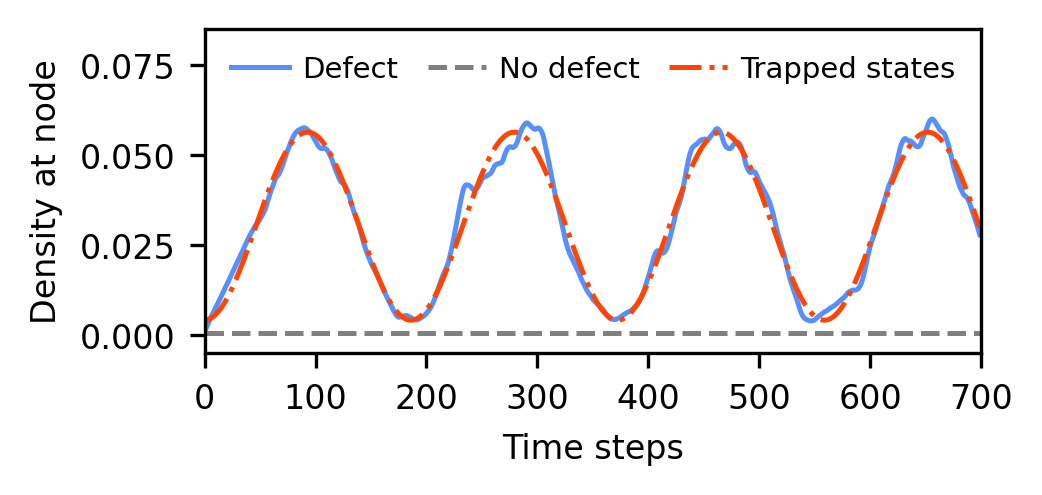

In [93]:
time_set= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699]
probabilities= [0.0010571514249914792, 0.0016986114991450931, 0.002424634763485568, 0.003160434047745893, 0.003889887451452001, 0.00459325621496868, 0.005211953028378972, 0.005784521249949708, 0.006394605841107102, 0.007032438955752642, 0.0076642492326420624, 0.008301921951711923, 0.00895956006773539, 0.00961942259757597, 0.010252694468036436, 0.010872160920885084, 0.011512798436690928, 0.01216371061758258, 0.012800010753547267, 0.013436960055190047, 0.014095541757562788, 0.014765521772453105, 0.01542579486730043, 0.016079908492159317, 0.01674433349115452, 0.017407057888478673, 0.018048934682702793, 0.018686985857594287, 0.01934605144352236, 0.020020532638058506, 0.020691980311889353, 0.021359190148606818, 0.02202979865504164, 0.022691838610790164, 0.023330433462745565, 0.023963238636218787, 0.024615313395375107, 0.02528358126013483, 0.025954899603156004, 0.02662236757551315, 0.02727121196981888, 0.027881381974814982, 0.028450002423597888, 0.02899350884647395, 0.02952855641920529, 0.030045956168047595, 0.03050374625593166, 0.030895107578621503, 0.03129914304648036, 0.03177485317496586, 0.03228712101337919, 0.03281129585477444, 0.03336487503654968, 0.03394094330113161, 0.03457265494709177, 0.03536721387141457, 0.03635688063954472, 0.037427674483092734, 0.038447979278785044, 0.03939622774166159, 0.040302463685939344, 0.04113855654571501, 0.041927640986600345, 0.04277406997208312, 0.04356157218535345, 0.04403136985187991, 0.04431937915875592, 0.04480063087401317, 0.04548829893499067, 0.046195644507053775, 0.046956084108321014, 0.04785569231176734, 0.04883202043659516, 0.04978615780111388, 0.05066085206508072, 0.05147708563223707, 0.05230906377607886, 0.05313542777510723, 0.05387193318050376, 0.05454013287418222, 0.055192543662402636, 0.05577444200511902, 0.05622302644769669, 0.056564461766722876, 0.056836008752298606, 0.057041630333518965, 0.05718759088877456, 0.05730098129398423, 0.05743444692192556, 0.05758368584670068, 0.05762368038414847, 0.057489078710041705, 0.05727270394421384, 0.05702311514012302, 0.05670583814278413, 0.05634390277795092, 0.055955932469696656, 0.05549068422293834, 0.05493119411251664, 0.05433749695389568, 0.05377302891827857, 0.05324185244000694, 0.05273653251072144, 0.052309036136161974, 0.05200684985467405, 0.05184255010041837, 0.051837435830859216, 0.05192694906000957, 0.05195005333693348, 0.05183237650297276, 0.05158363080016335, 0.05118521719288737, 0.05064590751431251, 0.05002676399245454, 0.04934275704276674, 0.048541556921447966, 0.04763020437687392, 0.04674185804921497, 0.04595451048636511, 0.04518634763323098, 0.04439271222003874, 0.043639679335462304, 0.042988836285567905, 0.042523506439816706, 0.04230344112322103, 0.04216701143349822, 0.041845881084570206, 0.04130824730949462, 0.040701314515308284, 0.04000301502681832, 0.039073478670544906, 0.03796451167048683, 0.03683830738210614, 0.03575096720407927, 0.03474338798184128, 0.03387318425085215, 0.033086754328391914, 0.03228645037669767, 0.031436059628337724, 0.03049647827578451, 0.029418995388794632, 0.028237289317203495, 0.027061072584659344, 0.025965622994301104, 0.02494438886984772, 0.02398171030268641, 0.023095023767663415, 0.022291715382684565, 0.021540971658703622, 0.020787969107458025, 0.020035476441172734, 0.019376381751031155, 0.018815828085472133, 0.01822096943881639, 0.017566081447687846, 0.01694510322140064, 0.01634710642690311, 0.01570942861458843, 0.015038192798290688, 0.014331104526685297, 0.013583247876648349, 0.01284021493245649, 0.0121229500100608, 0.01141592463619185, 0.010734636326973225, 0.010110238253869185, 0.009537058986591254, 0.008953641176741554, 0.008296580691066875, 0.007605399557019767, 0.006981191651057105, 0.006435037267739789, 0.005913191419718543, 0.005438648217330177, 0.00510477138869151, 0.004970255381719956, 0.005012792302113992, 0.005140092921039254, 0.005248040857478424, 0.005313864115738255, 0.005384079324673825, 0.005449938956113665, 0.005446282930086548, 0.005358551103397124, 0.005217717035718914, 0.0050484602305391375, 0.004872923953404225, 0.004693944903720607, 0.004504256745229812, 0.004341617385883952, 0.004253075641447127, 0.004234530149918633, 0.0042784471539937, 0.004406803519088738, 0.004606162454032048, 0.0048116873882655346, 0.004989726643406577, 0.005175568209093848, 0.00541814616038648, 0.0057260220908130245, 0.00607233552403752, 0.006438667201391751, 0.0068367897417613436, 0.0072840964034232404, 0.0077910172028381975, 0.008378683745254318, 0.009063104712624254, 0.00981191843699095, 0.010580706356009766, 0.011406386011161276, 0.012347491736834715, 0.013337733446141423, 0.014257738452517071, 0.015108856343764625, 0.015949376450784838, 0.01675177242084632, 0.017457177942127387, 0.018092245779664243, 0.01876949947617835, 0.019599669549632923, 0.020618625231219004, 0.02180261354666652, 0.023116164475020497, 0.024522538667778766, 0.026013865774498997, 0.02761432989093692, 0.029291844380898255, 0.03096533099163475, 0.032622463908027005, 0.03428818600514712, 0.03592669349900049, 0.037490684564313766, 0.038951023484398745, 0.04021535956862349, 0.041130599882469705, 0.041612862165083, 0.04174996872648862, 0.041724338980126605, 0.04163679042440777, 0.04147919352002119, 0.04121595772148227, 0.04084098360322334, 0.040474905081251254, 0.04032118043532183, 0.04041990621041652, 0.04065673347138239, 0.04099744833009723, 0.041472624896747586, 0.04206097766972731, 0.042710836331313055, 0.04331613637664079, 0.0437297610210214, 0.04392331066554202, 0.044022776375836944, 0.044160667812574994, 0.044357213584867584, 0.04455906412291463, 0.0447670868898115, 0.04504469415033012, 0.04546527206917019, 0.04608481687039993, 0.04677697231956265, 0.0472463595609774, 0.047435761423810424, 0.04756562337551158, 0.047707006519013384, 0.04775868608447327, 0.04776726400399392, 0.04799065482029062, 0.04864295949929426, 0.04959102942120156, 0.05048580671213568, 0.051197276399129896, 0.05176544598875431, 0.05214543864325076, 0.05232314533517693, 0.052334226326299776, 0.052205655015770326, 0.05211649202998847, 0.05226333477159396, 0.052612755332335254, 0.053109439442469646, 0.05382472041612648, 0.054752327174805604, 0.055741211572185916, 0.05661816601033493, 0.057304061413843796, 0.05785548373205875, 0.05833693402441221, 0.05872218355843675, 0.058951760535570406, 0.058956239228021366, 0.05871700654089496, 0.058368560370692005, 0.0580617428839906, 0.057781069638111186, 0.05747537375485856, 0.0572341398500531, 0.05717443342390771, 0.057290095070357386, 0.0574823482408797, 0.057574559760796354, 0.05738284911463591, 0.05695792500000846, 0.056437566919334645, 0.05563451667533373, 0.054349640239867034, 0.052850758982165215, 0.05143744671685385, 0.05002912306302855, 0.04849771413086442, 0.04687802207069131, 0.045261392643647126, 0.04373395278569344, 0.04223926144313812, 0.04064823249246794, 0.03906704800231436, 0.037688235202681934, 0.036458057468667746, 0.03521921083288394, 0.03390056704183993, 0.032474327038936594, 0.030989063590566402, 0.029538020881562547, 0.028132227395732658, 0.02678037857086621, 0.02556184077091221, 0.024505262942401733, 0.023569501321462828, 0.022748438484311854, 0.0220532342383884, 0.021428884433093588, 0.020792824354332586, 0.020140892027431044, 0.019520386594057294, 0.018915039272404264, 0.018273969946749798, 0.017590376886351938, 0.016851193060868647, 0.016064199141778396, 0.015342984053167391, 0.01474327216260216, 0.014143813637877443, 0.013475607502963921, 0.01282699119637988, 0.012255831835559956, 0.011765248863869718, 0.011358063330799993, 0.010956250037470588, 0.010477967526364148, 0.009998990937453161, 0.009622565746062404, 0.009320683988530837, 0.009022934375082359, 0.008704306990742788, 0.008374288276894293, 0.008069649011138656, 0.007808817561538427, 0.007550304201900293, 0.007227334156031155, 0.00679847500878285, 0.0063012967369828, 0.005844091562102372, 0.005470620220456159, 0.0051214749391424175, 0.004789344040685029, 0.004559188429506673, 0.004452046578297756, 0.004390844208606166, 0.004340900335476283, 0.004344182527492684, 0.0044140293592785755, 0.004517832334877095, 0.004644674477915088, 0.004812018414439789, 0.0050311125501664115, 0.005289922090425752, 0.005546427002663173, 0.005762265931196097, 0.00594753268946591, 0.006126054379024119, 0.006291242632897638, 0.006436425171199965, 0.006573648620049091, 0.006725841481427113, 0.0069449079323669755, 0.007264569808075315, 0.007613446912009574, 0.007899422043354882, 0.008158239513093787, 0.008481095205687437, 0.008892985246876154, 0.009392551198424734, 0.009981547056179936, 0.010644711094325854, 0.011395344410913182, 0.012263928125232386, 0.013216142258687216, 0.014187049213802087, 0.015156402940285592, 0.016132358057339452, 0.01713351192656828, 0.01819569448747647, 0.01934094904343126, 0.02051510748818545, 0.02158449719653333, 0.022449177632073058, 0.023078307038080607, 0.023417746372221493, 0.02346092138728263, 0.02333357101599626, 0.023134318263616796, 0.02289974514077725, 0.022762806730604185, 0.02287543492611729, 0.023227989596482125, 0.023737476566064335, 0.02440638611840764, 0.02528445657395885, 0.02637428204126155, 0.027603522922563045, 0.02885469255746368, 0.03009026502567459, 0.03138464271449744, 0.03271228828555811, 0.03389788497665751, 0.03487564462124172, 0.03574595646638711, 0.0366132865294336, 0.03758222534140007, 0.03875660336474075, 0.04015641633444281, 0.041742893380774394, 0.04344312857616332, 0.04515254045125279, 0.04681874821720615, 0.04839269544184904, 0.04973917340593557, 0.05079729471815144, 0.051623229715004375, 0.05219644084502251, 0.05250490124530959, 0.0527076955406623, 0.05294353045619113, 0.05321071215226175, 0.053509904467930774, 0.05384012127106972, 0.05412012353960643, 0.05428661048054075, 0.054367792996257804, 0.05442296137041917, 0.054463347326777406, 0.05442724457489642, 0.054319759456487475, 0.05434866043688791, 0.054681927779714395, 0.05515284739369926, 0.05551809864326206, 0.05583849760141075, 0.05627736914096333, 0.0567851939339941, 0.05720190159115825, 0.05737706334778911, 0.05722825359457317, 0.0568766333894911, 0.05640101337336979, 0.05561776402967311, 0.05455604230511358, 0.05360490590712143, 0.05292996697597872, 0.05242430316781428, 0.0520902363480702, 0.051929398625454544, 0.051841807488376995, 0.051857200832802534, 0.052089753980190646, 0.05251670213296833, 0.05298135255935994, 0.0533136526282271, 0.053476114687823664, 0.05356019874378325, 0.05354795851668717, 0.0532948599510007, 0.05278224724869517, 0.0520938134601789, 0.05120166513529279, 0.05003281248178541, 0.04869368102170712, 0.04747472023917018, 0.046583726108898854, 0.04595351291600505, 0.04545752846639369, 0.045175400578629864, 0.04519734504663003, 0.04537226525522931, 0.04546710614055859, 0.045344666373340226, 0.04493509052352838, 0.04426870423994131, 0.04348685185396075, 0.042739799180853376, 0.04211808717570085, 0.04157986315628533, 0.040991368228470076, 0.04035987529413093, 0.03980687318995503, 0.03928383531767975, 0.03865358516279535, 0.037945418191592056, 0.03721352917973198, 0.0363787795407282, 0.035399084328915593, 0.03431967601267455, 0.033126338983628635, 0.03178702992399588, 0.030399588158406807, 0.029137786208324475, 0.028032504126586665, 0.02694357638161057, 0.02582941779178561, 0.024797418865562436, 0.02382625681655176, 0.022784790612334876, 0.02164391273457051, 0.020403369587519305, 0.019069663971805276, 0.017754219453714568, 0.016540578381005366, 0.015420861018161015, 0.01440736927932795, 0.013489186749211216, 0.012595359806961802, 0.01169525332634037, 0.010790398781539687, 0.009851131148696068, 0.00886045733233287, 0.007859365784354925, 0.006926182195340584, 0.0061286589958510565, 0.005489763950455249, 0.005005631706509422, 0.004666771702218995, 0.004447062374260782, 0.004296436212128925, 0.004163258258274089, 0.004039422279199711, 0.003965080450507992, 0.0039576092362301855, 0.00399252631878998, 0.004074526093254156, 0.004239450398083912, 0.004487208516361525, 0.004783262680173993, 0.005087503535020715, 0.005354114543236439, 0.005571778146519593, 0.005786893840419999, 0.006031156926382194, 0.006274475724669444, 0.006469975216708235, 0.006617253925895791, 0.006784355788373331, 0.0070317690995105025, 0.007311709196890262, 0.0075312901289070165, 0.007691712606486062, 0.007855996628809175, 0.0080427438370457, 0.008241189432101713, 0.00846108941351904, 0.008722540524834552, 0.009024381783402629, 0.009333136013969125, 0.009620998637158908, 0.009887406799890005, 0.010121866634562595, 0.010336259790307618, 0.010613554382909056, 0.011000256503145253, 0.011425092292361615, 0.011787217651756889, 0.012031196759551503, 0.012186603979479543, 0.012338447904570542, 0.012475569658493021, 0.01251951991661679, 0.012509462126342623, 0.012542597478214089, 0.012645833682002342, 0.012845378774715057, 0.013184341576946174, 0.013669018649405146, 0.014330745982680354, 0.015234492982290479, 0.016378231253136682, 0.01769828005427518, 0.019132020380986568, 0.020605337641128336, 0.022032640411467252, 0.023351161282816814, 0.024534113176413772, 0.025584807227403448, 0.02651148575032534, 0.027348800783007762, 0.028202745534719912, 0.029174173447029952, 0.030257069842378425, 0.03136756249590088, 0.032419990944841964, 0.03339161625528744, 0.03435405369124087, 0.035374929968849035, 0.03641616083780303, 0.03742380465471151, 0.03844201233247379, 0.03952531388647433, 0.04059965113691058, 0.04152295931469853, 0.04226540793610817, 0.0429379861615396, 0.04366594957268692, 0.0445216582774301, 0.045526533091277785, 0.04664240360850119, 0.04783469125362485, 0.04914127386163736, 0.050534629230799946, 0.05181184362364958, 0.05281359842173171, 0.05358422693838894, 0.054187557759498295, 0.054561653107584096, 0.05459923994414066, 0.05433687979918487, 0.05405548103442756, 0.05398434511517127, 0.053993448316813325, 0.05386318153733819, 0.05359168131993438, 0.053252423260980244, 0.05289736620825525, 0.05260097444477559, 0.05240340080270362, 0.05231819989985026, 0.05238828659325249, 0.05269869900848936, 0.05334862914045514, 0.05425811828816657, 0.055122139515743546, 0.05579361537098898, 0.056468906631516096, 0.05733310554610015, 0.05828571117251151, 0.05908749641291429, 0.05962318672761181, 0.059934034053338726, 0.060047252929094616, 0.05991519677087244, 0.05952577278511027, 0.05900642320266845, 0.058530861394713196, 0.05807406186844121, 0.05752184768929597, 0.057005909194705745, 0.05670116281167335, 0.05651698953521679, 0.05629833612201919, 0.05593230878403743, 0.05530454076219493, 0.05446615017068818, 0.05352175345399992, 0.05242677625276672, 0.051185998181038604, 0.049881906679985995, 0.04851585552286164, 0.04716535881753652, 0.046015368455041804, 0.04507869464947169, 0.04416186125727029, 0.04312829765265001, 0.042072129031425785, 0.04118944018773639, 0.04050338478473585, 0.03986920268929345, 0.03925968600906656, 0.03881972297767137, 0.038585992870289944, 0.03836094433144281, 0.03794779535457452, 0.03732341677109038, 0.03652622252896856, 0.03560203703613815, 0.03464620084648136, 0.03371403101764388, 0.032788632765193206, 0.03187492555031957, 0.0309668948765871, 0.02999402846098317, 0.02894062118014289, 0.02791305601570499]
probabilities_no_defect1= [0.0006249999999999997, 0.0006249999999999993, 0.0006249999999999991, 0.0006249999999999989, 0.0006249999999999986, 0.0006249999999999984, 0.0006249999999999982, 0.000624999999999998, 0.0006249999999999978, 0.0006249999999999975, 0.0006249999999999972, 0.0006249999999999971, 0.0006249999999999969, 0.0006249999999999968, 0.0006249999999999969, 0.0006249999999999967, 0.0006249999999999963, 0.0006249999999999961, 0.000624999999999996, 0.0006249999999999958, 0.0006249999999999957, 0.0006249999999999957, 0.0006249999999999955, 0.0006249999999999954, 0.0006249999999999951, 0.0006249999999999949, 0.0006249999999999948, 0.0006249999999999949, 0.0006249999999999945, 0.0006249999999999943, 0.0006249999999999937, 0.0006249999999999937, 0.0006249999999999935, 0.0006249999999999933, 0.0006249999999999929, 0.0006249999999999924, 0.0006249999999999921, 0.0006249999999999917, 0.0006249999999999914, 0.0006249999999999914, 0.0006249999999999913, 0.0006249999999999911, 0.0006249999999999911, 0.0006249999999999911, 0.0006249999999999909, 0.0006249999999999906, 0.0006249999999999904, 0.0006249999999999899, 0.0006249999999999899, 0.0006249999999999897, 0.0006249999999999896, 0.0006249999999999896, 0.0006249999999999893, 0.0006249999999999893, 0.0006249999999999891, 0.0006249999999999888, 0.0006249999999999886, 0.0006249999999999884, 0.0006249999999999882, 0.000624999999999988, 0.0006249999999999878, 0.0006249999999999875, 0.0006249999999999873, 0.0006249999999999872, 0.0006249999999999871, 0.0006249999999999869, 0.0006249999999999869, 0.0006249999999999869, 0.0006249999999999869, 0.0006249999999999866, 0.0006249999999999864, 0.0006249999999999861, 0.000624999999999986, 0.0006249999999999858, 0.0006249999999999858, 0.0006249999999999856, 0.0006249999999999853, 0.000624999999999985, 0.0006249999999999847, 0.0006249999999999845, 0.0006249999999999843, 0.0006249999999999844, 0.0006249999999999843, 0.0006249999999999841, 0.0006249999999999841, 0.000624999999999984, 0.000624999999999984, 0.0006249999999999837, 0.0006249999999999836, 0.0006249999999999835, 0.0006249999999999832, 0.000624999999999983, 0.0006249999999999827, 0.0006249999999999827, 0.0006249999999999823, 0.0006249999999999821, 0.0006249999999999819, 0.000624999999999982, 0.0006249999999999819, 0.0006249999999999817, 0.0006249999999999815, 0.0006249999999999809, 0.0006249999999999806, 0.0006249999999999803, 0.0006249999999999798, 0.0006249999999999798, 0.0006249999999999795, 0.0006249999999999794, 0.0006249999999999791, 0.0006249999999999792, 0.0006249999999999792, 0.0006249999999999791, 0.0006249999999999789, 0.0006249999999999787, 0.0006249999999999785, 0.0006249999999999783, 0.000624999999999978, 0.0006249999999999778, 0.0006249999999999778, 0.0006249999999999775, 0.0006249999999999771, 0.0006249999999999769, 0.0006249999999999768, 0.0006249999999999767, 0.0006249999999999765, 0.0006249999999999764, 0.0006249999999999764, 0.0006249999999999763, 0.000624999999999976, 0.0006249999999999758, 0.0006249999999999755, 0.0006249999999999751, 0.000624999999999975, 0.0006249999999999749, 0.0006249999999999746, 0.0006249999999999746, 0.0006249999999999743, 0.0006249999999999741, 0.0006249999999999738, 0.0006249999999999735, 0.0006249999999999732, 0.000624999999999973, 0.0006249999999999727, 0.0006249999999999726, 0.0006249999999999724, 0.0006249999999999721, 0.0006249999999999721, 0.0006249999999999721, 0.0006249999999999719, 0.0006249999999999719, 0.0006249999999999718, 0.0006249999999999714, 0.0006249999999999713, 0.0006249999999999713, 0.0006249999999999712, 0.0006249999999999711, 0.0006249999999999711, 0.0006249999999999707, 0.0006249999999999702, 0.00062499999999997, 0.0006249999999999698, 0.0006249999999999695, 0.0006249999999999694, 0.000624999999999969, 0.0006249999999999689, 0.0006249999999999688, 0.0006249999999999686, 0.0006249999999999685, 0.0006249999999999682, 0.000624999999999968, 0.0006249999999999678, 0.0006249999999999677, 0.0006249999999999674, 0.0006249999999999672, 0.0006249999999999667, 0.0006249999999999665, 0.0006249999999999665, 0.0006249999999999665, 0.0006249999999999665, 0.0006249999999999664, 0.0006249999999999662, 0.000624999999999966, 0.0006249999999999656, 0.0006249999999999654, 0.0006249999999999653, 0.0006249999999999651, 0.0006249999999999649, 0.0006249999999999647, 0.0006249999999999645, 0.0006249999999999642, 0.0006249999999999639, 0.0006249999999999639, 0.0006249999999999636, 0.0006249999999999634, 0.0006249999999999632, 0.0006249999999999628, 0.0006249999999999627, 0.0006249999999999626, 0.0006249999999999625, 0.0006249999999999624, 0.0006249999999999624, 0.0006249999999999622, 0.0006249999999999623, 0.0006249999999999622, 0.0006249999999999621, 0.0006249999999999618, 0.0006249999999999616, 0.0006249999999999616, 0.0006249999999999614, 0.0006249999999999613, 0.0006249999999999613, 0.0006249999999999609, 0.0006249999999999609, 0.0006249999999999604, 0.0006249999999999604, 0.0006249999999999603, 0.0006249999999999603, 0.00062499999999996, 0.0006249999999999598, 0.0006249999999999595, 0.0006249999999999594, 0.0006249999999999591, 0.0006249999999999588, 0.0006249999999999586, 0.0006249999999999583, 0.000624999999999958, 0.0006249999999999575, 0.0006249999999999576, 0.0006249999999999576, 0.0006249999999999575, 0.0006249999999999573, 0.0006249999999999571, 0.000624999999999957, 0.0006249999999999566, 0.0006249999999999565, 0.0006249999999999564, 0.0006249999999999562, 0.0006249999999999561, 0.0006249999999999559, 0.0006249999999999559, 0.0006249999999999559, 0.0006249999999999558, 0.0006249999999999555, 0.0006249999999999553, 0.0006249999999999553, 0.0006249999999999552, 0.000624999999999955, 0.0006249999999999547, 0.0006249999999999547, 0.0006249999999999544, 0.000624999999999954, 0.000624999999999954, 0.0006249999999999538, 0.0006249999999999537, 0.0006249999999999535, 0.0006249999999999531, 0.0006249999999999527, 0.0006249999999999525, 0.0006249999999999526, 0.0006249999999999524, 0.0006249999999999519, 0.0006249999999999514, 0.0006249999999999513, 0.0006249999999999512, 0.0006249999999999512, 0.0006249999999999509, 0.0006249999999999507, 0.0006249999999999505, 0.0006249999999999501, 0.0006249999999999501, 0.0006249999999999498, 0.0006249999999999496, 0.0006249999999999493, 0.0006249999999999491, 0.000624999999999949, 0.0006249999999999487, 0.0006249999999999483, 0.0006249999999999484, 0.0006249999999999483, 0.0006249999999999479, 0.0006249999999999479, 0.0006249999999999476, 0.0006249999999999472, 0.0006249999999999471, 0.0006249999999999468, 0.0006249999999999467, 0.0006249999999999465, 0.0006249999999999463, 0.0006249999999999461, 0.000624999999999946, 0.0006249999999999461, 0.0006249999999999459, 0.0006249999999999456, 0.0006249999999999454, 0.0006249999999999455, 0.0006249999999999453, 0.000624999999999945, 0.000624999999999945, 0.0006249999999999446, 0.0006249999999999443, 0.0006249999999999444, 0.0006249999999999442, 0.000624999999999944, 0.0006249999999999437, 0.0006249999999999435, 0.0006249999999999434, 0.0006249999999999431, 0.0006249999999999429, 0.0006249999999999426, 0.0006249999999999427, 0.0006249999999999428, 0.0006249999999999427, 0.0006249999999999427, 0.0006249999999999423, 0.0006249999999999421, 0.000624999999999942, 0.000624999999999942, 0.0006249999999999418, 0.0006249999999999412, 0.0006249999999999411, 0.000624999999999941, 0.0006249999999999409, 0.0006249999999999406, 0.0006249999999999405, 0.0006249999999999403, 0.0006249999999999403, 0.0006249999999999402, 0.0006249999999999401, 0.0006249999999999401, 0.00062499999999994, 0.0006249999999999395, 0.0006249999999999392, 0.000624999999999939, 0.0006249999999999391, 0.000624999999999939, 0.0006249999999999388, 0.0006249999999999385, 0.0006249999999999383, 0.0006249999999999382, 0.000624999999999938, 0.0006249999999999379, 0.0006249999999999377, 0.0006249999999999376, 0.0006249999999999373, 0.0006249999999999375, 0.0006249999999999372, 0.0006249999999999372, 0.0006249999999999371, 0.0006249999999999369, 0.0006249999999999368, 0.0006249999999999363, 0.000624999999999936, 0.0006249999999999359, 0.0006249999999999356, 0.0006249999999999354, 0.0006249999999999353, 0.0006249999999999353, 0.000624999999999935, 0.0006249999999999347, 0.0006249999999999345, 0.0006249999999999343, 0.0006249999999999343, 0.0006249999999999342, 0.0006249999999999342, 0.000624999999999934, 0.000624999999999934, 0.0006249999999999339, 0.0006249999999999334, 0.0006249999999999332, 0.0006249999999999331, 0.0006249999999999329, 0.0006249999999999327, 0.0006249999999999325, 0.0006249999999999323, 0.0006249999999999321, 0.000624999999999932, 0.0006249999999999319, 0.0006249999999999315, 0.0006249999999999314, 0.0006249999999999311, 0.000624999999999931, 0.000624999999999931, 0.0006249999999999307, 0.0006249999999999307, 0.0006249999999999305, 0.0006249999999999303, 0.0006249999999999302, 0.0006249999999999301, 0.00062499999999993, 0.0006249999999999296, 0.0006249999999999296, 0.0006249999999999294, 0.0006249999999999292, 0.0006249999999999291, 0.0006249999999999289, 0.0006249999999999287, 0.0006249999999999287, 0.0006249999999999287, 0.0006249999999999285, 0.0006249999999999282, 0.0006249999999999281, 0.0006249999999999277, 0.0006249999999999276, 0.0006249999999999274, 0.0006249999999999272, 0.0006249999999999269, 0.0006249999999999268, 0.0006249999999999267, 0.0006249999999999268, 0.0006249999999999266, 0.0006249999999999262, 0.0006249999999999259, 0.0006249999999999257, 0.0006249999999999255, 0.0006249999999999255, 0.0006249999999999253, 0.0006249999999999251, 0.0006249999999999249, 0.0006249999999999249, 0.0006249999999999248, 0.0006249999999999246, 0.0006249999999999243, 0.0006249999999999243, 0.0006249999999999242, 0.0006249999999999239, 0.0006249999999999238, 0.0006249999999999237, 0.0006249999999999237, 0.0006249999999999234, 0.0006249999999999233, 0.0006249999999999231, 0.0006249999999999227, 0.0006249999999999225, 0.0006249999999999227, 0.0006249999999999226, 0.0006249999999999223, 0.0006249999999999221, 0.000624999999999922, 0.000624999999999922, 0.0006249999999999217, 0.0006249999999999215, 0.0006249999999999215, 0.0006249999999999213, 0.0006249999999999212, 0.0006249999999999212, 0.000624999999999921, 0.0006249999999999209, 0.0006249999999999208, 0.0006249999999999206, 0.0006249999999999206, 0.0006249999999999206, 0.0006249999999999204, 0.0006249999999999206, 0.0006249999999999205, 0.0006249999999999203, 0.00062499999999992, 0.0006249999999999199, 0.0006249999999999197, 0.0006249999999999193, 0.0006249999999999192, 0.0006249999999999189, 0.0006249999999999188, 0.0006249999999999185, 0.0006249999999999182, 0.0006249999999999178, 0.0006249999999999178, 0.0006249999999999176, 0.0006249999999999174, 0.0006249999999999173, 0.0006249999999999173, 0.0006249999999999169, 0.000624999999999917, 0.0006249999999999169, 0.0006249999999999167, 0.0006249999999999164, 0.0006249999999999162, 0.0006249999999999161, 0.000624999999999916, 0.0006249999999999157, 0.0006249999999999154, 0.0006249999999999154, 0.0006249999999999151, 0.0006249999999999151, 0.000624999999999915, 0.0006249999999999146, 0.0006249999999999143, 0.0006249999999999141, 0.0006249999999999137, 0.0006249999999999136, 0.0006249999999999134, 0.0006249999999999135, 0.0006249999999999134, 0.0006249999999999134, 0.0006249999999999134, 0.0006249999999999128, 0.0006249999999999127, 0.0006249999999999124, 0.000624999999999912, 0.0006249999999999117, 0.0006249999999999115, 0.0006249999999999113, 0.0006249999999999114, 0.0006249999999999111, 0.000624999999999911, 0.0006249999999999108, 0.0006249999999999107, 0.0006249999999999105, 0.0006249999999999105, 0.0006249999999999101, 0.0006249999999999101, 0.0006249999999999099, 0.0006249999999999098, 0.0006249999999999098, 0.0006249999999999096, 0.0006249999999999095, 0.0006249999999999093, 0.000624999999999909, 0.000624999999999909, 0.0006249999999999087, 0.0006249999999999084, 0.0006249999999999083, 0.0006249999999999079, 0.0006249999999999075, 0.0006249999999999075, 0.0006249999999999073, 0.0006249999999999073, 0.0006249999999999073, 0.0006249999999999073, 0.000624999999999907, 0.0006249999999999068, 0.0006249999999999064, 0.0006249999999999062, 0.0006249999999999061, 0.000624999999999906, 0.0006249999999999059, 0.0006249999999999055, 0.0006249999999999054, 0.0006249999999999051, 0.0006249999999999049, 0.0006249999999999048, 0.0006249999999999047, 0.0006249999999999046, 0.0006249999999999046, 0.0006249999999999043, 0.000624999999999904, 0.0006249999999999036, 0.0006249999999999035, 0.0006249999999999033, 0.0006249999999999033, 0.0006249999999999031, 0.0006249999999999027, 0.0006249999999999024, 0.0006249999999999024, 0.000624999999999902, 0.0006249999999999019, 0.0006249999999999016, 0.0006249999999999015, 0.0006249999999999014, 0.0006249999999999011, 0.0006249999999999009, 0.0006249999999999007, 0.0006249999999999005, 0.0006249999999999003, 0.0006249999999998999, 0.0006249999999998997, 0.0006249999999998997, 0.0006249999999998997, 0.0006249999999998997, 0.0006249999999998995, 0.0006249999999998991, 0.000624999999999899, 0.0006249999999998989, 0.0006249999999998985, 0.0006249999999998984, 0.000624999999999898, 0.0006249999999998978, 0.0006249999999998976, 0.0006249999999998973, 0.0006249999999998972, 0.0006249999999998969, 0.0006249999999998968, 0.0006249999999998968, 0.0006249999999998966, 0.0006249999999998964, 0.0006249999999998961, 0.000624999999999896, 0.0006249999999998958, 0.0006249999999998954, 0.0006249999999998952, 0.0006249999999998951, 0.000624999999999895, 0.000624999999999895, 0.0006249999999998947, 0.0006249999999998945, 0.0006249999999998943, 0.0006249999999998943, 0.0006249999999998941, 0.000624999999999894, 0.000624999999999894, 0.0006249999999998937, 0.0006249999999998933, 0.0006249999999998932, 0.0006249999999998932, 0.0006249999999998928, 0.0006249999999998926, 0.0006249999999998925, 0.0006249999999998925, 0.0006249999999998924, 0.0006249999999998921, 0.0006249999999998921, 0.0006249999999998921, 0.0006249999999998919, 0.0006249999999998919, 0.0006249999999998916, 0.0006249999999998913, 0.000624999999999891, 0.0006249999999998908, 0.0006249999999998904, 0.0006249999999998903, 0.00062499999999989, 0.00062499999999989, 0.0006249999999998897, 0.0006249999999998896, 0.0006249999999998892, 0.0006249999999998889, 0.0006249999999998889, 0.0006249999999998887, 0.0006249999999998887, 0.0006249999999998884, 0.0006249999999998882, 0.0006249999999998881, 0.0006249999999998881, 0.0006249999999998879, 0.0006249999999998877, 0.0006249999999998874, 0.0006249999999998873, 0.0006249999999998871, 0.0006249999999998868, 0.0006249999999998867, 0.0006249999999998867, 0.0006249999999998865, 0.0006249999999998864, 0.000624999999999886, 0.0006249999999998858, 0.0006249999999998856, 0.0006249999999998854, 0.0006249999999998852, 0.000624999999999885, 0.0006249999999998848, 0.0006249999999998845, 0.0006249999999998844, 0.0006249999999998842, 0.0006249999999998842, 0.0006249999999998839, 0.0006249999999998839, 0.0006249999999998836, 0.0006249999999998835, 0.0006249999999998832, 0.000624999999999883, 0.0006249999999998829, 0.0006249999999998828, 0.0006249999999998826, 0.0006249999999998824, 0.000624999999999882, 0.0006249999999998822, 0.000624999999999882, 0.0006249999999998817, 0.0006249999999998816, 0.0006249999999998814, 0.0006249999999998812, 0.0006249999999998813, 0.0006249999999998812, 0.000624999999999881, 0.0006249999999998808, 0.0006249999999998805, 0.0006249999999998805, 0.0006249999999998804, 0.0006249999999998801, 0.0006249999999998798, 0.0006249999999998796, 0.0006249999999998798, 0.0006249999999998796, 0.0006249999999998794, 0.0006249999999998792, 0.0006249999999998794, 0.0006249999999998792, 0.0006249999999998791, 0.0006249999999998789, 0.0006249999999998787, 0.0006249999999998786, 0.0006249999999998783, 0.0006249999999998783, 0.000624999999999878, 0.0006249999999998777, 0.0006249999999998775, 0.0006249999999998775, 0.0006249999999998774, 0.0006249999999998772, 0.000624999999999877, 0.000624999999999877]
abs_values_on_defect_vs_time= [0.004155055708368595, 0.004184719704099051, 0.0042440140052842955, 0.004332871269635993, 0.004451190579335799, 0.004598837555650696, 0.0047756445115508936, 0.004981410642156908, 0.005215902252799625, 0.005478853024434194, 0.005769964316106463, 0.0060889055041283315, 0.006435314357576777, 0.006808797449690339, 0.007208930604695473, 0.007635259379555363, 0.00808729958009436, 0.008564537810911706, 0.009066432058459754, 0.009592412306624613, 0.010141881184110456, 0.010714214642891885, 0.011308762666963379, 0.01192485001058189, 0.012561776965163146, 0.013218820153961813, 0.013895233353631197, 0.01459024834173172, 0.015303075769222477, 0.016032906056950624, 0.01677891031511244, 0.01754024128464822, 0.018316034299500194, 0.019105408268638647, 0.019907466676743105, 0.020721298602401395, 0.02154597975266932, 0.022380573512818334, 0.023224132010076913, 0.024075697190155426, 0.0249343019053395, 0.0257989710129066, 0.026668722482624925, 0.027542568512073345, 0.028419516648518994, 0.029298570916073543, 0.03017873294685481, 0.03105900311485926, 0.03193838167127064, 0.03281586987990148, 0.03369047115148831, 0.034561192175547255, 0.03542704404850602, 0.036287043396830886, 0.03714021349387375, 0.03798558536916633, 0.0388221989089143, 0.039649103946421876, 0.040465361341226344, 0.04127004404570719, 0.04206223815796162, 0.042841043959748686, 0.04360557693832766, 0.04435496879102423, 0.04508836841138768, 0.045804942855817855, 0.046503878289563746, 0.04718438091101953, 0.04784567785326854, 0.04848701806185105, 0.04910767314775804, 0.049706938214685664, 0.050284132659605796, 0.050838600945747436, 0.05136971334710887, 0.05187686666365746, 0.05235948490639866, 0.05281701995154698, 0.05324895216304436, 0.05365479098272668, 0.05403407548746508, 0.0543863749126502, 0.05471128914142429, 0.055008449159105695, 0.05527751747228995, 0.05551818849215027, 0.05573018888150485, 0.05591327786525258, 0.0560672475038293, 0.05619192292937078, 0.05628716254431567, 0.05635285818222147, 0.0563889352306129, 0.05639535271572122, 0.05637210334901935, 0.05631921353549954, 0.05623674334368409, 0.05612478643740453, 0.05598346996942424, 0.05581295443702758, 0.05561343349973917, 0.05538513375937719, 0.05512831450269753, 0.054843267406911596, 0.054530316208420596, 0.05418981633513988, 0.05382215450282816, 0.05342774827588108, 0.05300704559309475, 0.05256052425892675, 0.052088691400837564, 0.051592082893333974, 0.05107126274935886, 0.0505268224797252, 0.04995938042131999, 0.04936958103484074, 0.048758094172862504, 0.04812561431906666, 0.04747285979949529, 0.0468005719667269, 0.04610951435789987, 0.04540047182754307, 0.04467424965618973, 0.043931672635799196, 0.04317358413301562, 0.042400845131332396, 0.041614333253244463, 0.04081494176351383, 0.04000357855465232, 0.03918116511581059, 0.03834863548621167, 0.037506935194330786, 0.03665702018404074, 0.035799855728907544, 0.03493641533590865, 0.03406767963978879, 0.03319463528932482, 0.032318273826758795, 0.03143959056167706, 0.030559583440603354, 0.029679251913604418, 0.0287995957991844, 0.027921614148761476, 0.027046304112015654, 0.026174659804396497, 0.02530767117807675, 0.024446322897634525, 0.02359159322174047, 0.022744452892121406, 0.021905864031056627, 0.0210767790486737, 0.020258139561264592, 0.01945087532186016, 0.01865590316429044, 0.017874125961905175, 0.01710643160215129, 0.01635369197817565, 0.015616761998593983, 0.014896478616537118, 0.01419365987910796, 0.013509103998294473, 0.012843588444419315, 0.012197869063145931, 0.011572679217036828, 0.01096872895265755, 0.010386704194152607, 0.009827265964224093, 0.009291049633383943, 0.008778664198349223, 0.008290691590385922, 0.007827686014390685, 0.007390173319463815, 0.006978650401690262, 0.006593584639796288, 0.006235413364335249, 0.005904543360999424, 0.005601350408618384, 0.005326178852379973, 0.005079341212743637, 0.004861117830503467, 0.004671756548397605, 0.004511472429624247, 0.004380447513588857, 0.004278830609156913, 0.004206737125646531, 0.0041642489417554485, 0.0041514143125682135, 0.004168247814752243, 0.004214730330002036, 0.0042908090667529205, 0.004396397620137112, 0.004531376070118327, 0.004695591117685053, 0.004888856258960615, 0.005110951997017874, 0.005361626091170778, 0.005640593843450723, 0.005947538421944849, 0.006282111220635385, 0.006643932255315386, 0.007032590595155206, 0.007447644829404391, 0.007888623568717494, 0.00835502598051883, 0.008846322357821741, 0.009361954720828325, 0.00990133745063615, 0.010463857954362629, 0.011048877360859426, 0.011655731246319665, 0.012283730388866092, 0.012932161551334885, 0.013600288291312008, 0.014287351797535753, 0.014992571751697622, 0.01571514721467501, 0.01645425753618647, 0.01720906328681364, 0.017978707211388573, 0.01876231520258101, 0.019558997293664507, 0.020367848669267486, 0.02118795069300252, 0.022018371950793123, 0.022858169308698377, 0.023706388984069262, 0.024562067628776538, 0.025424233423323582, 0.026291907180566378, 0.02716410345780213, 0.02803983167596858, 0.02891809724467824, 0.029797902691793717, 0.030678248796298078, 0.031558135723127934, 0.03243656415872748, 0.03331253644598663, 0.03418505771732148, 0.035053137024562954, 0.035915788464417564, 0.03677203229817655, 0.037620896064438525, 0.0384614156835668, 0.03929263655261192, 0.040113614629500624, 0.04092341750518734, 0.04172112546264356, 0.042505832521390945, 0.04327664746645574, 0.04403269486055023, 0.04477311603832891, 0.045497070081603835, 0.04620373477439056, 0.046892307536740216, 0.047562006336231887, 0.04821207057617746, 0.048841761959422046, 0.049450365326874336, 0.0500371894697247, 0.05060156791446392, 0.051142859679838316, 0.051660450004804244, 0.05215375104675299, 0.05262220254912493, 0.05306527247772108, 0.053482457624943545, 0.05387328418130513, 0.054237308273546996, 0.05457411646876023, 0.05488332624393574, 0.055164586420400806, 0.055417577562672314, 0.055642012341240006, 0.0558376358589011, 0.056004225940251125, 0.05614159338401637, 0.05624958217793592, 0.05632806967594795, 0.05637696673748392, 0.05639621782870743, 0.056385801085586024, 0.05634572833872262, 0.05627604509991889, 0.056176830510486594, 0.05604819725136349, 0.05589029141513947, 0.0557032923401345, 0.055487412406718346, 0.05524289679610412, 0.05497002321189037, 0.0546691015646617, 0.05434047362001776, 0.053984512610415834, 0.05360162281128356, 0.053192239081869985, 0.052756826371360796, 0.052295879190827774, 0.05180992105158798, 0.051299503870650735, 0.05076520734387455, 0.05020763828759918, 0.049627429949463224, 0.0490252412892041, 0.0484017562302608, 0.04775768288301888, 0.04709375274059741, 0.0464107198480552, 0.04570935994601987, 0.04499046958962825, 0.04425486524388825, 0.04350338235636923, 0.04273687440836898, 0.0419562119455978, 0.04116228158945868, 0.04035598503009536, 0.03953823800231102, 0.0387099692455522, 0.0378721194490938, 0.037025640183687356, 0.03617149282082274, 0.035310647440874365, 0.03444408173135683, 0.03357277987652462, 0.032697731439624136, 0.03181993023899092, 0.030940373219367344, 0.030060059319623786, 0.029179988338246175, 0.02830115979783073, 0.027424571809892433, 0.02655121994128912, 0.025682096083522364, 0.02481818732621415, 0.023960474836042956, 0.02310993274240805, 0.022267527031071894, 0.021434214447071612, 0.020610941408111143, 0.019798642929682503, 0.018998241563150945, 0.01821064634797637, 0.017436751779293352, 0.016677436792015603, 0.015933563762587935, 0.015205977529569167, 0.014495504434126245, 0.013802951381525723, 0.01312910492471718, 0.012474730371011445, 0.011840570912912962, 0.011227346784034458, 0.010635754441125802, 0.01006646577307279, 0.009520127337826027, 0.008997359628073373, 0.008498756366535848, 0.00802488383165725, 0.007576280214463555, 0.007153455007329428, 0.0067568884253223545, 0.006387030860820168, 0.006044302371974573, 0.005729092205650138, 0.005441758355337743, 0.005182627154572992, 0.004951992906312353, 0.004750117548679088, 0.004577230357477258, 0.004433527685793061, 0.0043191727409943904, 0.004234295399366604, 0.004178992058612991, 0.004153325528370304, 0.004157324958874647, 0.004190985807854821, 0.004254269845690676, 0.004347105198832237, 0.004469386431428256, 0.004620974665073451, 0.004801697736534033, 0.005011350393284145, 0.005249694526612498, 0.005516459442049868, 0.005811342166805377, 0.006134007793863894, 0.0064840898623483014, 0.006861190773715962, 0.007264882243328835, 0.007694705786871359, 0.008150173241053325, 0.008630767318037481, 0.009135942192947348, 0.009665124123764074, 0.010217712102944749, 0.010793078540004018, 0.011390569974301157, 0.012009507817171335, 0.012649189122631984, 0.013308887385742008, 0.013987853367708521, 0.014685315946821553, 0.015400482994237224, 0.016132542273634063, 0.016880662363671924, 0.017643993602278574, 0.018421669051626035, 0.01921280548275852, 0.020016504378670225, 0.02083185295479293, 0.021657925195689216, 0.022493782906722524, 0.02333847677960864, 0.024191047470584717, 0.025050526689953303, 0.02591593830178574, 0.02678629943256297, 0.027660621587457072, 0.028537911772988214, 0.02941717362479063, 0.03029740853921593, 0.031177616807497435, 0.03205679875111344, 0.032933955857169454, 0.03380809191245076, 0.03467821413483909, 0.03554333430083308, 0.03640246986791752, 0.03725464509046869, 0.03809889212793139, 0.03893425214401844, 0.039759776395692545, 0.04057452731070104, 0.04137757955237118, 0.042168021070559246, 0.042944954137506, 0.04370749636738827, 0.044454781718486554, 0.04518596147676129, 0.0459002052197776, 0.046596701759832944, 0.04727466006524009, 0.047933310158739334, 0.048571903991977194, 0.04918971629508066, 0.049786045400380535, 0.0503602140393072, 0.0509115701115887, 0.05143948742585104, 0.051943366410822256, 0.052422634796258354, 0.05287674826290837, 0.053305191060699086, 0.05370747659449841, 0.05408314797675077, 0.05443177854637314, 0.05475297235333998, 0.05504636460835886, 0.055311622097186125, 0.055548443559058955, 0.05575656002885207, 0.05593573514254896, 0.05608576540568158, 0.05620648042445207, 0.056297743099249016, 0.05635944978035867, 0.05639153038568141, 0.05639394848032656, 0.05636670131799254, 0.05630981984408626, 0.05622336866057677, 0.05610744595262607, 0.05596218337707565, 0.055787745912920884, 0.05558433167393856, 0.055352171683686294, 0.05509152961311903, 0.05480270148112816, 0.0544860153183518, 0.054141830794615556, 0.05377053881044311, 0.053372561053100655, 0.052948349517678815, 0.05249838599374042, 0.05202318151814316, 0.0515232757946372, 0.050999236580914285, 0.050451659043780434, 0.049881165083204615, 0.049288402626023534, 0.04867404489006128, 0.04803878961953349, 0.04738335829260239, 0.04670849530197984, 0.04601496710948532, 0.04530356137555899, 0.0445750860646998, 0.043830368527821954, 0.043070254562620126, 0.04229560745295671, 0.04150730698842814, 0.04070624846514932, 0.039893341668923096, 0.03906950984200183, 0.0382356886345153, 0.03739282504182216, 0.0365418763289847, 0.03568380894358048, 0.034819597418082424, 0.03395022326300977, 0.033076673852267494, 0.03219994130171015, 0.031321021342384174, 0.030440912189622943, 0.02956061340937969, 0.02868112478297312, 0.027803445171588483, 0.02692857138187705, 0.02605749703382958, 0.025191211432310498, 0.024330698443428427, 0.023476935377200556, 0.02263089187754873, 0.021793528821049443, 0.02096579722564367, 0.020148637170543316, 0.01934297672855237, 0.01854973091200847, 0.017769800633608997, 0.017004071683201248, 0.016253413721752114, 0.015518679293671891, 0.014800702858538862, 0.014100299843391255, 0.013418265716608079, 0.012755375084479806, 0.012112380811471542, 0.011490013165159236, 0.010888978986850251, 0.01030996088880668, 0.009753616478979835, 0.009220577614134553, 0.008711449682246155, 0.008226810914940721, 0.007767211730771934, 0.0073331741101014605, 0.006925191002267336, 0.0065437257657323, 0.006189211641825611, 0.005862051262702648, 0.005562616194065603, 0.005291246513163553, 0.005048250422551549, 0.0048339039000636795, 0.004648450385374875, 0.004492100503515924, 0.004365031825663378, 0.004267388667465685, 0.0041992819251408745, 0.004160788949526466, 0.004151953458231271, 0.004172785485983663, 0.004223261373234663, 0.00430332379302898, 0.004412881816113278, 0.004551811014205638, 0.0047199536013152596, 0.0049171186129402245, 0.005143082122958002, 0.005397587497939698, 0.005680345688615776, 0.005991035558163483, 0.0063293042469225605, 0.006694767573161443, 0.007087010469387792, 0.0075055874537658, 0.007950023136058653, 0.008419812757538402, 0.008914422764266048, 0.009433291413050047, 0.009975829409455073, 0.010541420577056548, 0.011129422557269926, 0.011739167538887369, 0.012369963016534567, 0.013021092577161008, 0.013691816713704216, 0.014381373664963693, 0.015088980280748267, 0.015813832911336947, 0.01655510832020073, 0.017311964618969, 0.018083542223601857, 0.018868964830632586, 0.019667340412427216, 0.020477762230262667, 0.021299309864149785, 0.022131050258198285, 0.022972038780282727, 0.02382132029490825, 0.024677930247989133, 0.02554089576231579, 0.02640923674247432, 0.027281966987972483, 0.028158095313311746, 0.029036626673694103, 0.029916563295111918, 0.03079690580756107, 0.031676654380072736, 0.03255480985621535, 0.03343037488888681, 0.03430235507303405, 0.035169760075022316, 0.03603160475738053, 0.036886910297654035, 0.03773470530009659, 0.03857402689890115, 0.039403921851743955, 0.04022344762242144, 0.04103167345133277, 0.04182768141253808, 0.042610567456290875, 0.043379442435809684, 0.04413343311707648, 0.044871683170615524, 0.045593354144041795, 0.04629762641433308, 0.046983700118677946, 0.0476507960629161, 0.048298156606489576, 0.04892504652291984, 0.0495307538348198, 0.050114590622510016, 0.05067589380532284, 0.051214025894658885, 0.051728375718015855, 0.05221835911311484, 0.05268341959135352, 0.053123028969813774, 0.053536687971143776, 0.05392392679060817, 0.05428430562964772, 0.05461741519537353, 0.05492287716541905, 0.05520034461760789, 0.05544950242396193, 0.05567006760860405, 0.0558617896691428, 0.05602445086117592, 0.05615786644558397, 0.05626188489834989, 0.05633638808264611, 0.056381291383006814, 0.056396543801427654, 0.056382128015286775, 0.056338060397017733, 0.05626439099551556, 0.05616120347929536, 0.05602861504146489, 0.05586677626662709, 0.05567587095985749, 0.05545611593794742, 0.055207760783165034, 0.054931087559788, 0.054626410493766576, 0.0542940756158385, 0.05393446036853461, 0.0535479731775104, 0.053135052987677504, 0.05269616876468561, 0.052231818962301745, 0.051742530956307826, 0.051228860445533556, 0.050691390820745974, 0.050130732502065345, 0.04954752224569026, 0.04894242242073224, 0.04831612025692213, 0.04766932706412112, 0.04700277742445061, 0.04631722835801397, 0.045613458463124534, 0.04489226703202608, 0.04415447314312025, 0.04340091473071045, 0.042632447633329684, 0.041849944621747064, 0.04105429440773364, 0.040246400634726454, 0.03942718085153108, 0.038597565470245676, 0.03775849670954784, 0.036910927524600054, 0.03605582052474468, 0.03519414688024869, 0.034326885219314145, 0.03345502051660082, 0.03257954297459634, 0.03170144689899674, 0.030821729569429208, 0.029941390106838824]

fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.5)
font = {'size' : 8}
mpl.rc('font', **font)
#fig.subplots_adjust(bottom = 0.2, top=0.98, left=0.12, right=0.99)
fig.subplots_adjust(bottom = 0.26, top=0.98, left=0.19, right=0.95)

color_list = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]

ax.plot(time_set, probabilities, color=color_list[0], label = 'Defect', linewidth=1.2)
ax.plot(time_set, probabilities_no_defect1, '--', color='gray', label = 'No defect', linewidth=1.2)
#plt.plot(time_set, probabilities_no_defect2, '-.', color='red', label = 'point (0, 1)')

ax.plot(time_set, abs_values_on_defect_vs_time, '-.', color='orangered', 
        label='Trapped states', linewidth=1.2)
#plt.plot(time_set, test_density, '-.', color='cyan', label='trapped state contrib 1')

ax.set_xlabel('Time steps', fontsize=8)
ax.set_ylabel('Density at node', fontsize=8)

ax.legend(fontsize=7, loc = 'upper left',frameon=False, ncols=3, columnspacing=1,handletextpad=0.45)
#plt.xlim(-2*np.pi, 2*np.pi)
#plt.ylim(0.0, 1.01)
ax.tick_params(axis='both', which='major', labelsize=8)

plt.xlim(0.0, 700)
plt.ylim(-0.005, 0.085)


plt.savefig('fig4.pdf')
plt.show()

## Figure 5 - a b c d

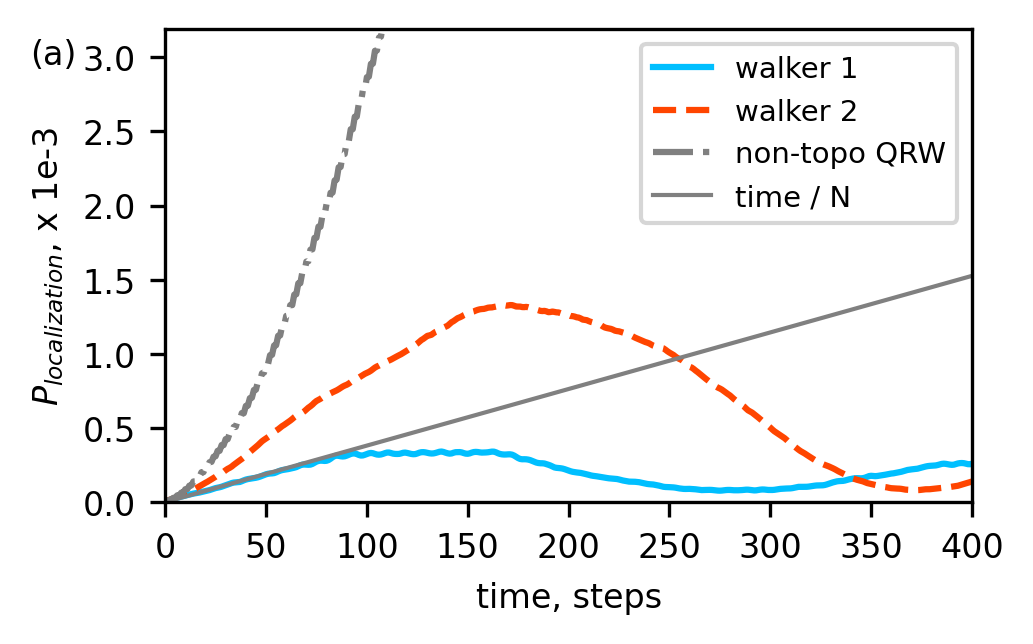

In [83]:
time_set= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]
probabilities_walker_1= [6.300075600983135e-06, 9.970036757456666e-06, 1.4088154371895536e-05, 1.8635622870904435e-05, 2.3495757459140516e-05, 2.775071380241414e-05, 3.0867494874357375e-05, 3.367356356243662e-05, 3.7027772525595357e-05, 4.087835293057061e-05, 4.460980635185748e-05, 4.787043573918389e-05, 5.111488917797861e-05, 5.4626228831150035e-05, 5.770414095764811e-05, 5.99512146463022e-05, 6.21519165683003e-05, 6.501277090349155e-05, 6.834703469185457e-05, 7.180345673084851e-05, 7.512599113427052e-05, 7.810213113975124e-05, 8.142109326311081e-05, 8.598987620587209e-05, 9.098539365924841e-05, 9.487494791226341e-05, 9.767702889568704e-05, 0.00010055474213313897, 0.00010441768689387087, 0.00010912445897551407, 0.00011378949608098787, 0.00011845157431544426, 0.00012375445899647124, 0.0001288765892235699, 0.00013215967455304408, 0.00013327253821758805, 0.00013382167041450782, 0.0001362208340105411, 0.00014126643171797113, 0.00014725907484860264, 0.0001522133496439412, 0.00015565593850758739, 0.00015814413609994559, 0.0001602204753689444, 0.00016220971007228647, 0.00016459326294739364, 0.00016782363016187998, 0.00017210841929596646, 0.00017745440451960126, 0.000183109156800509, 0.00018791444194319207, 0.00019137356258640807, 0.00019326690624832602, 0.00019404892208917134, 0.00019595144936637813, 0.00020070551407709916, 0.00020698592509723728, 0.00021243128476698618, 0.0002163219513592904, 0.00021898623218631586, 0.00022090256034849786, 0.00022305651968035616, 0.00022609104764300964, 0.00022929470206241626, 0.0002322723735736193, 0.00023626104147397606, 0.0002421560632474651, 0.0002485481417295197, 0.00025273068812498934, 0.0002536636204557959, 0.0002528797779376629, 0.0002521282006766251, 0.00025305234607034754, 0.00025785555341469084, 0.00026587914695211574, 0.0002731777918621918, 0.0002777529411660268, 0.00027984790324036527, 0.00027936176405627577, 0.00027797065268665754, 0.00027909246206563737, 0.00028414062481182603, 0.00029260888129095935, 0.0003028449222294219, 0.00031095066372792337, 0.00031368730591291056, 0.00031213752508739434, 0.00030945442757934673, 0.00030794540610501285, 0.00030923609126687893, 0.00031364517868661345, 0.00031956208524388467, 0.00032494245517851136, 0.00032818274663315466, 0.0003280333511125243, 0.00032423121976458654, 0.0003184504857896702, 0.00031442071655115217, 0.0003150936784726333, 0.00031942830736881277, 0.00032466431923220155, 0.000329406856957134, 0.00033178882992787937, 0.00032982299131837576, 0.00032510793632930087, 0.00032128332463060257, 0.00032007807059763446, 0.00032164299749367226, 0.00032562348140284286, 0.0003306795434669113, 0.0003345274944522483, 0.0003347256990462952, 0.0003311033864336892, 0.0003270914605332917, 0.0003253539331422664, 0.00032491293528889273, 0.0003255670523327756, 0.00032884817887439627, 0.00033299802419495023, 0.0003341228574046054, 0.00033170654945543566, 0.0003281072515786767, 0.0003250616412148146, 0.0003233450177172551, 0.0003241510925275448, 0.0003282340746921338, 0.0003334996790264173, 0.0003367404252774917, 0.00033726121659434234, 0.00033569783620440247, 0.0003326104973175967, 0.0003295562100230338, 0.0003280815182987913, 0.0003287793034388063, 0.00033165181752627446, 0.0003358342089357885, 0.00033985455496596777, 0.00034132147274510576, 0.00033849226791318537, 0.0003336266597756299, 0.00032960296938648457, 0.0003271825995780543, 0.00032854241011739406, 0.0003334747677781712, 0.0003368771098873245, 0.00033758419586185114, 0.00033764983767331285, 0.0003354868396972134, 0.000330901890761919, 0.00032718830548225946, 0.0003262867089322262, 0.0003290244375160612, 0.00033411646737281934, 0.0003378829404631017, 0.0003389859918455096, 0.0003379841174402236, 0.0003356452187718537, 0.0003342466721226237, 0.00033459008299825216, 0.0003352756316920976, 0.00033643163661088493, 0.000338653542133381, 0.0003407892637967271, 0.00034049290575421996, 0.00033614223612541885, 0.00032977756156803113, 0.0003249786107623321, 0.0003223522079467073, 0.00032114851812079567, 0.0003213604588470073, 0.0003223797617199718, 0.00032264734755383924, 0.0003202010430077534, 0.00031409730377801614, 0.00030565733745744787, 0.0002972112107687332, 0.00029124421216031326, 0.0002892579959774034, 0.0002894911960590597, 0.00028896634389884634, 0.00028693477554493684, 0.0002833795076178438, 0.00027789540873234306, 0.00027174709370759347, 0.00026694682576102683, 0.00026384237170652165, 0.0002623486845760768, 0.00026210297604943865, 0.0002606721992117043, 0.00025673776177725845, 0.00025216243109365454, 0.0002470590103557939, 0.00024021298501566158, 0.00023417530926877106, 0.00023145094308186495, 0.0002303080889933982, 0.00022877407738998242, 0.00022640232923061557, 0.00022266547090242885, 0.0002178415804816354, 0.00021289421939850654, 0.00020835346344944065, 0.00020476731894842728, 0.00020230142636594318, 0.00020042944885454193, 0.00019887881998032153, 0.00019714318361596916, 0.0001943481840840488, 0.00019094241750736412, 0.0001878103061141924, 0.00018433059987906826, 0.00018051719768901223, 0.00017787767611361345, 0.0001762498473433484, 0.00017427634963923012, 0.00017187190015421693, 0.00016918447706584333, 0.00016652977431467643, 0.00016466229849812882, 0.00016291761953583485, 0.00016083176168712478, 0.00015965032348219958, 0.00015914525240041266, 0.0001579627209243706, 0.0001559830193247145, 0.00015292815649162333, 0.00014906856939831702, 0.00014591107433766057, 0.00014328335974294183, 0.00014042950763624185, 0.00013858977701720025, 0.0001383348387484159, 0.00013822321782154577, 0.00013743061740338386, 0.00013622492042775458, 0.00013446120935768345, 0.00013175840961921343, 0.00012851148265877898, 0.0001254058576524403, 0.00012275580916184812, 0.00012110196713813355, 0.00012036993434414318, 0.00011898120052700706, 0.00011638664328938299, 0.00011374515941215897, 0.00011092450278869198, 0.00010715888064834339, 0.00010376310358948289, 0.00010226308790865336, 0.00010186711117832098, 0.00010118434621896825, 0.00010030581371274655, 9.946990591336508e-05, 9.777676798124943e-05, 9.507031414914002e-05, 9.259208243578781e-05, 9.077950373532822e-05, 8.941873195819138e-05, 8.907308767284712e-05, 8.959147579644763e-05, 8.960384141408605e-05, 8.881453645792728e-05, 8.791972346808944e-05, 8.671045718870656e-05, 8.471576689374511e-05, 8.25826597816677e-05, 8.146875650438774e-05, 8.167584788781307e-05, 8.240588967859744e-05, 8.289241402750972e-05, 8.297032697729936e-05, 8.236170659714586e-05, 8.092604692467686e-05, 7.928651186674188e-05, 7.803627172110412e-05, 7.755744776873598e-05, 7.837603411154284e-05, 8.011023876348564e-05, 8.161724961951445e-05, 8.243665681846558e-05, 8.23347800481755e-05, 8.12567406196222e-05, 8.026789350489366e-05, 8.008182301916307e-05, 8.017319101312678e-05, 8.05062633629113e-05, 8.157089951179688e-05, 8.308308774858172e-05, 8.420096340968433e-05, 8.41446745754478e-05, 8.271161970236744e-05, 8.067174992922161e-05, 7.935994275471361e-05, 7.987664695185688e-05, 8.206244714551976e-05, 8.439557188203349e-05, 8.556226273736118e-05, 8.520167078152994e-05, 8.37070769512553e-05, 8.231136342585341e-05, 8.188529010500436e-05, 8.217432193520003e-05, 8.326254853913518e-05, 8.548203516394537e-05, 8.79235471826272e-05, 8.956290416034106e-05, 9.064791616841024e-05, 9.155070983462436e-05, 9.206855353575246e-05, 9.23079335606309e-05, 9.294284149997659e-05, 9.468997969117997e-05, 9.776758162255567e-05, 0.00010119199213449987, 0.0001032469847866513, 0.00010355238490380735, 0.000103318894421973, 0.00010332984142800968, 0.00010370715183687981, 0.00010491876086339438, 0.00010702739126102155, 0.00010927061171297815, 0.00011117648353067732, 0.0001125948277338048, 0.00011319645333448428, 0.00011320777898883833, 0.00011374158294243072, 0.00011579924378508322, 0.00011950991324482821, 0.00012422139255013998, 0.00012899075492870247, 0.00013327536962427148, 0.00013708784830934766, 0.0001402054992487684, 0.00014198953754363412, 0.00014260382574563747, 0.00014350080930733406, 0.0001459943225884394, 0.00014983491815724433, 0.00015365192426760119, 0.00015669902837129435, 0.00015930425795062454, 0.00016134280035636436, 0.00016189093639512836, 0.00016110256542158755, 0.00016069302844415927, 0.0001620646802819348, 0.00016554912766431187, 0.00017083889433907267, 0.00017594443354433252, 0.00017776934022115118, 0.00017641797273323486, 0.00017542476712330277, 0.00017642765308894436, 0.00017841533449785855, 0.00018080095684637557, 0.00018312549651681369, 0.00018507415889420096, 0.00018767272060671232, 0.00019088983728898914, 0.00019300645881590166, 0.00019437336869783267, 0.00019692428602847593, 0.0002002296061779248, 0.00020272116849681787, 0.0002051372109648314, 0.00020904450595885703, 0.00021365958371968792, 0.00021705221561432703, 0.0002191632648939658, 0.00022098900562416145, 0.00022247716103561258, 0.00022367751963389096, 0.00022575341020657645, 0.0002292056547254745, 0.0002331887934000354, 0.00023697486714659366, 0.00024036910708291942, 0.00024304263418931218, 0.00024467943085335357, 0.00024549489162012107, 0.00024617594078769623, 0.00024764041088511926, 0.00025056626461782903, 0.0002545500878406151, 0.0002580502475391989, 0.00025942296645856805, 0.0002582154559323073, 0.00025563648185061307, 0.00025315159284243683, 0.00025169295046313254, 0.00025274443396458725, 0.00025675416327799154, 0.00026104658575722345, 0.00026329760328857286, 0.00026385437997193776, 0.000262667709770856, 0.00025941949166857433, 0.0002561908111405974, 0.0002558415512524653, 0.0002594050787738068, 0.0002652554314576778, 0.0002699210805879603, 0.00027164023189944823, 0.00027130452120210225, 0.00026937136023564786, 0.00026622987708703347, 0.00026419644983343365, 0.00026530546004968896, 0.00026881011142213787, 0.0002723112660393556, 0.00027448993427386676, 0.0002754309052210109, 0.00027442028281675465, 0.00027104508032040487, 0.000267616764586416, 0.0002662819118673586, 0.0002669117585914197, 0.0002692716629207621, 0.00027275555758588324, 0.00027575440144381993, 0.00027724792774985366, 0.00027658121100584244, 0.00027401565123494093, 0.0002718167159102081, 0.0002714760085036122, 0.0002728358048762543, 0.00027614379132881667, 0.00028036231953230587, 0.0002824715884739238, 0.0002809661205498143, 0.0002766967995627985, 0.0002713183686034246, 0.0002670181370461027, 0.00026569108325777684, 0.00026773312404524064, 0.00027188606814855016, 0.00027511139219708473, 0.0002738257131736667, 0.000267692320381613, 0.00026069703019826853, 0.00025628296296111084, 0.0002539236501085791, 0.0002523238614670335, 0.00025241743342955104, 0.0002547373656665803, 0.0002565767600409241, 0.00025439481288871437, 0.00024823369830423344, 0.00024145574071448688, 0.0002369600480257834, 0.00023560223852383795, 0.00023656063453856847, 0.000238311284482708, 0.00023974975090243115, 0.00023951913431436336, 0.00023662208595520609, 0.00023269700810341475, 0.00022947400356550108, 0.00022642663157132096, 0.00022447870819832975, 0.00022593977824187834, 0.00022970825095787096, 0.00023212996484860257, 0.00023121381815823872, 0.0002276499826736904, 0.0002230817209817708, 0.00021854202052107725, 0.00021546136378868284, 0.00021563713526013694, 0.00021805304234695486, 0.00021975990735290286, 0.00021976160228322748, 0.00021837577078902108, 0.00021584284987962625, 0.00021299785119909518, 0.0002102403471538906, 0.0002075737725860905, 0.0002063670498878807, 0.00020768687564321086, 0.00020999074325644615, 0.0002109214387188376, 0.00020990892222192575, 0.000208184723995443, 0.0002071803709757205, 0.00020706140532803635, 0.00020719283946914503, 0.00020760410596645066, 0.00020851447858930981, 0.00020965693978187408, 0.00021092860896500194, 0.00021172476967166196, 0.00021088382857649128, 0.00020907421896479604, 0.00020821728262677055, 0.0002089337028358301, 0.00021113802612542527, 0.00021388835996662223, 0.0002149186127068638, 0.00021365918349003726]
probabilities_walker_2= [1.0120050900476694e-05, 1.121795266562163e-05, 1.4253260927106485e-05, 2.0098367748858353e-05, 2.4327414481360735e-05, 2.8968784070467174e-05, 3.508223214658777e-05, 4.052757281151979e-05, 4.613870686806871e-05, 5.281899352497801e-05, 5.9150932581116004e-05, 6.521574449090385e-05, 7.258289997525964e-05, 7.989893601121421e-05, 8.538595834533811e-05, 9.113253748414868e-05, 9.88096003663387e-05, 0.00010699300613522411, 0.00011483921299515712, 0.00012288117185799976, 0.00013057455701262128, 0.00013781673723295914, 0.00014604156029179527, 0.00015451355327195915, 0.00016227972381042765, 0.00017138404776103358, 0.00018116615882836725, 0.00018891220490996124, 0.00019609179080187832, 0.0002050894096652043, 0.00021545093378394264, 0.0002246125862403926, 0.00023161297927424618, 0.0002402732439912683, 0.000251608998345237, 0.00026193498098540095, 0.00027161781616049085, 0.000281886033065853, 0.0002915896310432574, 0.00030229235238849573, 0.0003145752538560093, 0.0003264196898381548, 0.0003380146095449116, 0.0003497111020881894, 0.0003608516912259627, 0.0003720192096476976, 0.0003842814699621583, 0.00039769486019259747, 0.0004101962142537026, 0.0004202033007990395, 0.0004291496507209492, 0.00043807012922298625, 0.0004478716931866488, 0.000460428771090738, 0.0004732489603208725, 0.00048247714588742604, 0.0004909881542326989, 0.0005020570692033187, 0.0005125695228364913, 0.0005210870132074756, 0.0005306388299656967, 0.0005406957967933742, 0.0005498421241412284, 0.0005606397375927277, 0.0005724545777578858, 0.0005820892735092223, 0.0005903207825630156, 0.0005974659984489865, 0.0006036262188523741, 0.0006126929114274933, 0.0006252701028051366, 0.0006369017125344781, 0.0006464706549265886, 0.0006575632938398202, 0.0006710539884809811, 0.0006821268056057006, 0.0006891894972398845, 0.000696897776529353, 0.0007061491701104343, 0.0007140385413803541, 0.0007204664635763143, 0.0007266519429507862, 0.0007335706720455923, 0.000740810425793409, 0.0007470638111987091, 0.0007535455154836785, 0.0007613748388880782, 0.0007701451420540666, 0.0007791411041280102, 0.0007860636602812298, 0.0007914674978254776, 0.0007993174845350745, 0.0008091395828608548, 0.00081736485943358, 0.0008238800012933617, 0.000831247018344341, 0.0008399547484769044, 0.0008484311251673064, 0.0008569193349248341, 0.0008652284634761236, 0.0008717240165216924, 0.000878039073644719, 0.0008864299771684759, 0.0008966933474364793, 0.0009071983253557631, 0.000914998240930636, 0.0009208152421219715, 0.0009281401131267459, 0.0009360858732391042, 0.0009428666219362488, 0.0009489383299302444, 0.0009548231438664171, 0.0009615118168750107, 0.0009690617277183817, 0.000976672506793506, 0.0009838744179150414, 0.0009904413740361698, 0.0009978298218546759, 0.001006266440581366, 0.001014404689432504, 0.0010229446290489154, 0.0010315200871026454, 0.0010400387937912767, 0.0010502013869195656, 0.0010600246729640607, 0.0010694290257632845, 0.001081604535197319, 0.0010928938340887607, 0.0011011689913822107, 0.0011115991856448025, 0.0011212470057312472, 0.0011243769719736, 0.0011284720644009214, 0.0011387568633438952, 0.0011477508412762456, 0.001153501991726403, 0.0011608657279889379, 0.001169275330865214, 0.0011767102258611391, 0.0011826754845142805, 0.0011893706782341086, 0.0012011250757756145, 0.0012132705253673725, 0.0012210217724427219, 0.0012304757612023177, 0.0012404752373287333, 0.001245848158896637, 0.0012522829141415528, 0.0012604542382423632, 0.0012665694853980947, 0.0012740233672226854, 0.0012805417592714943, 0.0012825342201948735, 0.001285972844371178, 0.0012920405365916938, 0.0012967122237691154, 0.0013002352291420693, 0.0013020835340827586, 0.001302999386054492, 0.0013065738209015556, 0.0013109725864965437, 0.001312546976586158, 0.0013132295844458016, 0.0013158859490961703, 0.0013191561875792101, 0.0013217078500367392, 0.0013255923653742072, 0.0013290138525485257, 0.0013275346540166713, 0.0013250922180025157, 0.0013265056315584808, 0.001328764475962198, 0.0013284982924239943, 0.0013243338045285504, 0.0013191997683197952, 0.0013185582195000963, 0.0013185162185343705, 0.0013153915720474933, 0.0013149706370925692, 0.0013164242507440215, 0.0013141211408785865, 0.0013102666569289614, 0.0013068235569806813, 0.0013025891821680873, 0.0012984337186376508, 0.0012942592519741586, 0.0012897826936908961, 0.0012883391443480237, 0.0012895929970009237, 0.0012864545629110366, 0.0012808358023603476, 0.0012820363637679952, 0.001285128159492055, 0.0012824362091502992, 0.001279890492946158, 0.0012789941919150154, 0.001274617121088556, 0.0012695597583119941, 0.0012677354158046896, 0.001265781817919759, 0.0012600295434199828, 0.0012550267043281648, 0.0012541871531940901, 0.0012511597318708787, 0.0012463613936735882, 0.0012443286969013045, 0.0012386697268637558, 0.0012308784407533367, 0.0012290673852552252, 0.0012269943837252728, 0.0012206587525536092, 0.0012155894624821628, 0.0012115278468610323, 0.001207194157892155, 0.0012041309436894084, 0.001200731241309603, 0.0011940049842295464, 0.0011847318173209885, 0.0011776464612789906, 0.0011738483044879768, 0.0011709651787706783, 0.0011682349074262253, 0.001162975279703019, 0.001156152712781502, 0.0011533405373123388, 0.0011516402653138575, 0.0011473067555968553, 0.0011434870695659943, 0.0011390965011655759, 0.0011328420994541099, 0.0011280775000545576, 0.001123409871753325, 0.001116259823179063, 0.0011089673934232284, 0.0011028612028055084, 0.001097127148148853, 0.0010915012296310296, 0.0010854923793170398, 0.0010797568316328534, 0.0010755015954658565, 0.0010702389134085084, 0.0010621420076180805, 0.0010551132142806263, 0.0010502707121006756, 0.0010445688057550506, 0.0010407339151230395, 0.001040560976072206, 0.0010372342715159685, 0.0010279348913222997, 0.001017422383191405, 0.0010083754136212435, 0.0010007709804891914, 0.0009924730890124478, 0.000981535989011555, 0.0009717466800219459, 0.0009653569186748289, 0.0009585330664282424, 0.0009487378360641249, 0.0009351233567175311, 0.0009208554544329547, 0.0009127622285121878, 0.0009076367903588923, 0.0008980295607653481, 0.0008868255194085541, 0.0008767628145517181, 0.0008653221397635282, 0.0008533648311363699, 0.0008424904756324913, 0.0008318954570516524, 0.000821155690310726, 0.0008108010041865093, 0.0008009893947479737, 0.0007904712303434542, 0.000780070840526432, 0.0007724107267113382, 0.0007662775737761281, 0.0007587128296997588, 0.0007486320693354479, 0.0007377047291315951, 0.0007288574927288149, 0.0007195907820335783, 0.0007069901759189765, 0.000695109753546203, 0.0006846228976695387, 0.0006723507914738794, 0.0006614071291758464, 0.0006538338798660083, 0.0006444684252524924, 0.0006310945574039726, 0.000619005848942904, 0.0006113480773342997, 0.0006036387883841036, 0.0005929567084777306, 0.0005819212997508596, 0.0005711616502136241, 0.0005598123999247258, 0.0005486741286091877, 0.0005375287539000757, 0.0005260662485606016, 0.0005146139532935333, 0.0005025238005837524, 0.0004898099114792715, 0.0004781775243988072, 0.0004689088817935945, 0.0004603902669095915, 0.0004506212939855942, 0.0004411793379668472, 0.00043223654040715713, 0.0004205948156432579, 0.00040759522787426727, 0.00039681088713422084, 0.00038676744407650505, 0.0003756931441157281, 0.0003646105411673411, 0.00035387439150564876, 0.0003442738351276208, 0.00033659016647513956, 0.000328643206917699, 0.0003193445176127632, 0.00031063791506465, 0.0003023306067032189, 0.00029325685248748554, 0.0002847789013904685, 0.00027719453963937304, 0.00026943815210289, 0.00026239599324854576, 0.0002566458776015643, 0.0002513311963769179, 0.00024626800828174406, 0.00024104873756726405, 0.0002350127299381593, 0.00022861176348792803, 0.00022183902476871577, 0.00021414982972748985, 0.0002065078606112005, 0.00020006181427677784, 0.00019381737027630822, 0.00018651929978428424, 0.0001791954760506991, 0.0001727662525350607, 0.00016627698529580843, 0.00015999153780836588, 0.00015506025208284366, 0.00015079609195578375, 0.0001469227452552493, 0.00014379615219693072, 0.00013969788983747631, 0.00013392515971795145, 0.00012878804519501574, 0.00012531451599971034, 0.00012235176846508723, 0.00011916276528622451, 0.00011583789247572658, 0.00011265928081309205, 0.0001094838566405464, 0.00010615869980576596, 0.00010354559223498235, 0.0001018317942098511, 9.949016400074106e-05, 9.636924362641434e-05, 9.4157890212914e-05, 9.303383299614488e-05, 9.208400364471126e-05, 9.14795956842451e-05, 9.101460308931276e-05, 8.947866919754865e-05, 8.686805564430895e-05, 8.453345065620877e-05, 8.331639142093851e-05, 8.27669962704502e-05, 8.201710461773235e-05, 8.119919280961112e-05, 8.098475253090201e-05, 8.127808932860275e-05, 8.201029726700788e-05, 8.361474839330889e-05, 8.567842556213253e-05, 8.690386667053927e-05, 8.698532109972717e-05, 8.727370425988735e-05, 8.8735210734395e-05, 9.067976955639885e-05, 9.238073926074394e-05, 9.376121069666027e-05, 9.478177825977656e-05, 9.585390526877416e-05, 9.758022859348762e-05, 9.96603364869041e-05, 0.00010114636559565942, 0.00010223526344372706, 0.00010419183273980399, 0.00010642608718191902, 0.00010798105438026705, 0.00011066839461948874, 0.00011473146597963842, 0.00011819891427823634, 0.0001221992476307981, 0.0001273290126516864, 0.00013133611237241695, 0.0001349600269984993, 0.00013957060682745612, 0.00014342419083655908, 0.00014614700053145122, 0.00014906005019876795, 0.00015218397485387838, 0.00015561214039036593, 0.0001602489527958734, 0.0001658119546247164, 0.0001707732153382935, 0.00017500871718289127, 0.00017989561865705957, 0.00018585437684304337, 0.00019257812750145527, 0.00019961534105879247, 0.00020613278934195571, 0.00021217408124632822, 0.00021816586110946258, 0.00022370379835843124, 0.0002284524244691948, 0.00023313505936991625, 0.00023889697282338855, 0.00024503438473127607, 0.0002504668656462695, 0.00025635754340408277, 0.0002627834921912319, 0.0002689721821631355, 0.00027547669579709776, 0.000280233836604947, 0.00028234288715421043, 0.00028621978966333905, 0.0002929488137824523, 0.00029985518157614813, 0.0003070470921437586, 0.00031420701731210015, 0.00032034481962489917, 0.00032693445840559736, 0.0003337416618257393, 0.00033856207370835115, 0.00034268268459462006, 0.00034900755939607495, 0.00035666942672756105, 0.00036371118388136295, 0.0003707915450580706, 0.0003780639142099856, 0.00038502201480436124, 0.00039249464776181886, 0.00040090884669457947, 0.00041129247444312276, 0.0004231013967344194, 0.0004323392717380215, 0.00044032614260116997, 0.00045054046915433087, 0.0004595252365058606, 0.0004674731082302079, 0.0004789953628368549, 0.000490981540594801, 0.0005003708318063042, 0.0005105576418541542, 0.0005227817388972376, 0.0005350442378727937, 0.0005459507120450143, 0.0005558316701810811, 0.0005660752584709343, 0.00057764649834753, 0.0005908753401561449, 0.0006033445838543752, 0.0006139759792587787, 0.0006264644371904275, 0.0006390910142580657, 0.000648782561820233, 0.0006601057198674942, 0.0006723839571766578, 0.0006825327062772019, 0.0006951959269222922, 0.0007094088849390153, 0.0007218982793335935, 0.000736580836449226, 0.0007518701293934561, 0.0007640992203671394, 0.0007760840659896591, 0.0007873344959132217, 0.0007963510861874325, 0.0008069265603581584, 0.0008208462290330571, 0.0008355281599680318, 0.0008487771569012687, 0.0008608840331004321, 0.0008732040811882038, 0.0008869864312502382, 0.0009013525345679147, 0.0009115123923104293, 0.0009174351708865033, 0.0009257232573795986, 0.000935821646129104, 0.0009430410070314707, 0.0009492283600401462, 0.0009564003336975372, 0.0009639523743278926, 0.0009716365442902625, 0.0009795111258327177]

sizex = 512
sizey = 512

fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
#fig.subplots_adjust(bottom = 0.2, top=0.98, left=0.12, right=0.99)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)

plt.plot(time_set, probabilities_walker_1, color='deepskyblue', label = 'walker 1')

plt.plot(time_set, probabilities_walker_2, '--', color='orangered', label = 'walker 2')


plt.xlabel('time, steps', fontsize=8)
plt.ylabel(r'$P_{localization}$, x 1e-3', fontsize=8)

#plt.ylim(0.0, probabilities[0:200][np.argmax(probabilities[0:200])]+0.0005)

oracle = [2]
#m,p = simul_Grover_disordered(9,oracle,500, disorder_strength = 0.1)
m =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
p =  [3.814697265624999e-06, 3.945243343179769e-06, 1.5295775061420648e-05, 1.5656033919965788e-05, 2.897702183466315e-05, 2.9106489889512347e-05, 4.6248484950034084e-05, 4.601877092163643e-05, 6.440510900342203e-05, 6.515100662125296e-05, 8.771140186601476e-05, 8.800341359274406e-05, 0.00011161998380622076, 0.00011248916334842359, 0.0001396276728845983, 0.0001403174513250466, 0.00016953510256422513, 0.00016994534338005287, 0.00020182406222190826, 0.00020230385229773052, 0.00023478118408630343, 0.00023521272174056157, 0.00026982478894840156, 0.00027158730984849707, 0.00030689996510848186, 0.00030884498986312567, 0.00034615185719132866, 0.0003459491687351417, 0.00038523171543973495, 0.00038454381128177813, 0.00042528704622726496, 0.0004242490743079385, 0.00046525105170707137, 0.0004638479088810184, 0.0005075549981782852, 0.0005072715056981605, 0.0005531401267509052, 0.0005531355491213961, 0.0006008776971009286, 0.0005993712416543747, 0.0006490290186430653, 0.0006505798286481075, 0.0007014938737237339, 0.00070403229293674, 0.0007564567953360312, 0.0007583692925755621, 0.0008127063773331338, 0.0008139316656103688, 0.0008692209600760822, 0.0008728441579459259, 0.0009294938942668485, 0.0009317187845668516, 0.000991192967940564, 0.0009932932228355993, 0.0010562457252859241, 0.0010578847542615992, 0.0011216488380798432, 0.0011236979999529185, 0.001188211161964679, 0.0011900620401216944, 0.0012554681320669598, 0.001258580534838529, 0.0013282704283271696, 0.0013283829354479486, 0.0013990989008819414, 0.0014013714842623045, 0.0014755457162462854, 0.0014757489610019519, 0.0015493435842120489, 0.0015500775058996323, 0.0016219743937692932, 0.0016239766075056093, 0.001701901247983039, 0.0017044802131958923, 0.0017816787116354009, 0.001782291237482443, 0.0018578371969942141, 0.00185667602358456, 0.00193617569497702, 0.00193213201642617, 0.002010294327679114, 0.002006291491044444, 0.0020859022185862287, 0.002086825747077286, 0.002169021742638954, 0.0021740667234190977, 0.002257501482412807, 0.002260128062288309, 0.0023450269583719686, 0.0023472940404504258, 0.0024328796315085657, 0.0024305945111064847, 0.002514757531072516, 0.002514346728402685, 0.002599149728883825, 0.0025991757701981266, 0.00268750915758417, 0.002689747492627405, 0.002777064294082674, 0.002777916714158087, 0.0028653302122038874, 0.002868915439025098, 0.002955566692079188, 0.0029563262744741986, 0.003043243488769088, 0.003045428359794442, 0.0031323954976305232, 0.00313902620268185, 0.003227491441442777, 0.003228101790896429, 0.0033147929306620583, 0.0033098229496290005, 0.003397386805304587, 0.0033990464839824108, 0.003489493342990161, 0.0034885112038096438, 0.003580965960641771, 0.003582219112315796, 0.0036798189720083454, 0.003684328705308392, 0.00377929033573608, 0.0037850151213975423, 0.0038847506265783063, 0.0038869493879102666, 0.003984608595577738, 0.003988938440676736, 0.004088872181643777, 0.0040937140454722545, 0.004193502682098438, 0.004196866450311254, 0.00429095308764596, 0.004291418568478119, 0.004393677828177978, 0.004390472652380961, 0.004500725288765904, 0.004501082800442342, 0.0046053642314723055, 0.004603614119695265, 0.004710060482368472, 0.004714129876443521, 0.004820887151092535, 0.004828162594024284, 0.004929316839390994, 0.004931607493176685, 0.00504093595040161, 0.005043346176017465, 0.005152298083166081, 0.005150301043084608, 0.005264500092560742, 0.005265502686549377, 0.005375585108546439, 0.005382994424636519, 0.005491700408298391, 0.005497912193360354, 0.005604493119689032, 0.0056126673245754325, 0.005727261464480631, 0.005730049780880382, 0.005847286796864991, 0.0058511536007234445, 0.005965910890312115, 0.005970995490153623, 0.006090134492927652, 0.006095378716426236, 0.006215162134224492, 0.006221603561199369, 0.006340710226412322, 0.0063433402992140175, 0.006458752120587683, 0.006461867212943684, 0.006572801600190674, 0.006570924047231752, 0.006689322240475979, 0.006689723055652443, 0.006808756855524336, 0.0068189145182714715, 0.006940104012005171, 0.0069421508741927245, 0.007054971535178896, 0.00705789833110735, 0.007177417655040422, 0.0071792934018786465, 0.007302650554354072, 0.007305559270012245, 0.007427723788268914, 0.00742967681213326, 0.007545784158144631, 0.007537762921187298, 0.007662717030660448, 0.007659530705540876, 0.007781994928198939, 0.007784758149213847, 0.007903281626760161, 0.007901088352091381, 0.008026679981998682, 0.008021455662467968, 0.008141070578676883, 0.008132742351784029, 0.008255301364400499, 0.008250908470044675, 0.008379974836201284, 0.00836732484194915, 0.008489870294208711, 0.008481781544673501, 0.008604474592835757, 0.008599806530403509, 0.008724650990857973, 0.008723318134477465, 0.008861103196792314, 0.008856352757370909, 0.008991728613008556, 0.008988691333779683, 0.009117799600521032, 0.009124254607952319, 0.009255460296335647, 0.009249542191127384, 0.009379284715378232, 0.009374299432451341, 0.009505992452085093, 0.009502593580826044, 0.009639328204798646, 0.009642107920725604, 0.009788826043763762, 0.009791946578797658, 0.009925912517612623, 0.009915879434646481, 0.010048050795591444, 0.01004423633671404, 0.010176657770077459, 0.010174368694020962, 0.010311910579790355, 0.010311216777660883, 0.010445305232232983, 0.010440106862891839, 0.010573801257896458, 0.010571298340544641, 0.01070950371565417, 0.010713120862379326, 0.010844272588530317, 0.010850070813600945, 0.010986739194063436, 0.010982737415379386, 0.011128272212387411, 0.011124119514491292, 0.011259180407741837, 0.011261904564319702, 0.011399698156618916, 0.011402424800272728, 0.011533837733427945, 0.011531273814390206, 0.011673109163069519, 0.011678203087820005, 0.01180761954864212, 0.011814191648799289, 0.011949086405641586, 0.011948433970853201, 0.01208635240605469, 0.012081846423883828, 0.012217580265871148, 0.012216418611789131, 0.012355412774508185, 0.012347496472188225, 0.012482458151192932, 0.012491954092171065, 0.01262294875162855, 0.012631018316931255, 0.012773635775736734, 0.012779076896984681, 0.012914397540078768, 0.012917597452787232, 0.013049528023748693, 0.013059919774073886, 0.013196108391546058, 0.013194244472361146, 0.013334508119435366, 0.013339209449232146, 0.013472481031055462, 0.013472662892500903, 0.013604593361458646, 0.013602070587664465, 0.013718374665644358, 0.013716771295614317, 0.013852045428815426, 0.013845952886758117, 0.013991581721440723, 0.014006360023148784, 0.014135638159273814, 0.014147238498974918, 0.014279152607770858, 0.0142814863562894, 0.014407658248316097, 0.014421452029899688, 0.014546718088557769, 0.01455401480416495, 0.014683496790442343, 0.014694332473038075, 0.014826355539810057, 0.014834343390302446, 0.014967601062753601, 0.014968476949761018, 0.015105717463702675, 0.01510714836058472, 0.015255955203496369, 0.015254205750763467, 0.015391762278958668, 0.015382727781272067, 0.015529658527973842, 0.015533440266062846, 0.0156739686899058, 0.01568118040297399, 0.015815448888602937, 0.015801428459255376, 0.01593384947810103, 0.015944413908206147, 0.016069150058558232, 0.01607465026823335, 0.016214958224101603, 0.016213676162010596, 0.016351095669243854, 0.01634464034204643, 0.016480938315222602, 0.01648053384090206, 0.01661030704021313, 0.01660258356864532, 0.01672523286900125, 0.016725149094519453, 0.016862207450604655, 0.01686117917083701, 0.016996234738653648, 0.017001853723862106, 0.017136418767337628, 0.01715180463302091, 0.01729497457279036, 0.017315150647216445, 0.0174549924341179, 0.01746623779083325, 0.017604583049500182, 0.017609879554456205, 0.017750128329730178, 0.01776305251188956, 0.017903173351977116, 0.017910453109496766, 0.01804471370815081, 0.018051431671090915, 0.0181865372894964, 0.01819643437711658, 0.01833992238368145, 0.018343487826400284, 0.018485176138227092, 0.018485333474401427, 0.018613799647358292, 0.018618887180159936, 0.018754697606283094, 0.01875393875533573, 0.018899913742243646, 0.018905077067116974, 0.01903954145119678, 0.019026728305866714, 0.01915570655857402, 0.01914815090701631, 0.019290403175109386, 0.01929304369740165, 0.019424115913356, 0.019428953525900176, 0.01955560854375217, 0.019563839280130044, 0.019703205210317445, 0.01970452530476913, 0.019848497714448604, 0.019851004331427197, 0.01999056630222064, 0.019981457350724062, 0.020111513940663177, 0.02010342691793013, 0.020247300659270002, 0.020262917804223183, 0.020401512519015137, 0.020404462223124684, 0.02053579229763966, 0.02054604798566206, 0.02068328345351289, 0.020692226308697433, 0.020840026875625382, 0.020852959039275715, 0.021001081342888965, 0.020996058597999287, 0.0211284692842868, 0.021125167388334424, 0.021259850733059, 0.021254073227477566, 0.02138699894480349, 0.02138487411634141, 0.021516894836131197, 0.02152122496743752, 0.021659100531498977, 0.021650156578014185, 0.021786701949354254, 0.021783680267816328, 0.021914882429339713, 0.021917828077839156, 0.022050634372839613, 0.022051285618024084, 0.022192360048076586, 0.022198520753135415, 0.022330873829903425, 0.022339466617856914, 0.022469218754546747, 0.022467162851483147, 0.02260229420098133, 0.02261309629752108, 0.02276048629966588, 0.02276952015598571, 0.02291416974405386, 0.022905420917444685, 0.023056157697180196, 0.023048064112294774, 0.02317873646846965, 0.023173323404852654, 0.023305280419268968, 0.023309744127659925, 0.023438586534104466, 0.023451550563419306, 0.023584998147659277, 0.023594343315483858, 0.023742775950432213, 0.02373531751640012, 0.02387403478171411, 0.02387042797008917, 0.024011453098884784, 0.024016972363143492, 0.024154431326626875, 0.02415331317490444, 0.024283885814998997, 0.024278813766748168, 0.024412807720805438, 0.02441464775744408, 0.024542238708924392, 0.024551775558905548, 0.024684369356231927, 0.024681775878073145, 0.02480504104555918, 0.024807336412540452, 0.02493454914127289, 0.02494457038759086, 0.02506538323005986, 0.02504530749111752, 0.02516314976742272, 0.025143198474190043, 0.025268621717177198, 0.025279458205511016, 0.02540341002623076, 0.02540234122898003, 0.02552535482280433, 0.02552621132596061, 0.02566469015338459, 0.025660004001950076, 0.025777763238581924, 0.025786683202635028, 0.025892112713528117, 0.02588440010202093, 0.025997069545322438, 0.026001861200102207, 0.02613234364943676, 0.026136345352316993, 0.026264993962133932, 0.026261610765451856, 0.026378227793652835, 0.026382033437438897, 0.026500084319896054, 0.02649521416080696, 0.026617294533802915, 0.0266173118515008, 0.02673661236323514, 0.02673911605966757, 0.026866478316011442, 0.026882433526858457, 0.02700670718617519, 0.027008579249055246, 0.027129866810195614, 0.02712362434980392, 0.02724033485323877, 0.027255915329647135, 0.027382043450897696, 0.027397465416737675, 0.027527581900730003, 0.027541656721426385, 0.02766349664151816, 0.027670397513762705, 0.027796409568045837, 0.027797277654625113, 0.02792042343964833, 0.02791983586595945, 0.02803880020539499, 0.02804187550658752, 0.02815027695487226, 0.028150384484414197, 0.028262886072457492, 0.028268649295306092, 0.02838109651939045, 0.02839479279561527, 0.028506453548924365]
plt.plot(m,p, '-.', color='grey', label='non-topo QRW')
plt.plot(time_set, [ti / (sizex*sizey) for ti in time_set],'-', color='grey', label='time / N', linewidth=1.0)

plt.xlim(0.0, 400)
plt.ylim(0.0, 2.4*max(probabilities_walker_2))
plt.text(-67, 2.22*max(probabilities_walker_2), '(a)', fontsize=8)
plt.gca().tick_params(axis='both', labelsize=8)
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(fontsize=7, loc='upper right') #, title='size '+str(sizex)+'x'+str(sizey),title_fontsize=14)
plt.gca().yaxis.offsetText.set_visible(False)
plt.savefig('figS_angle_disorder_005.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight',
      metadata=None)
plt.show()

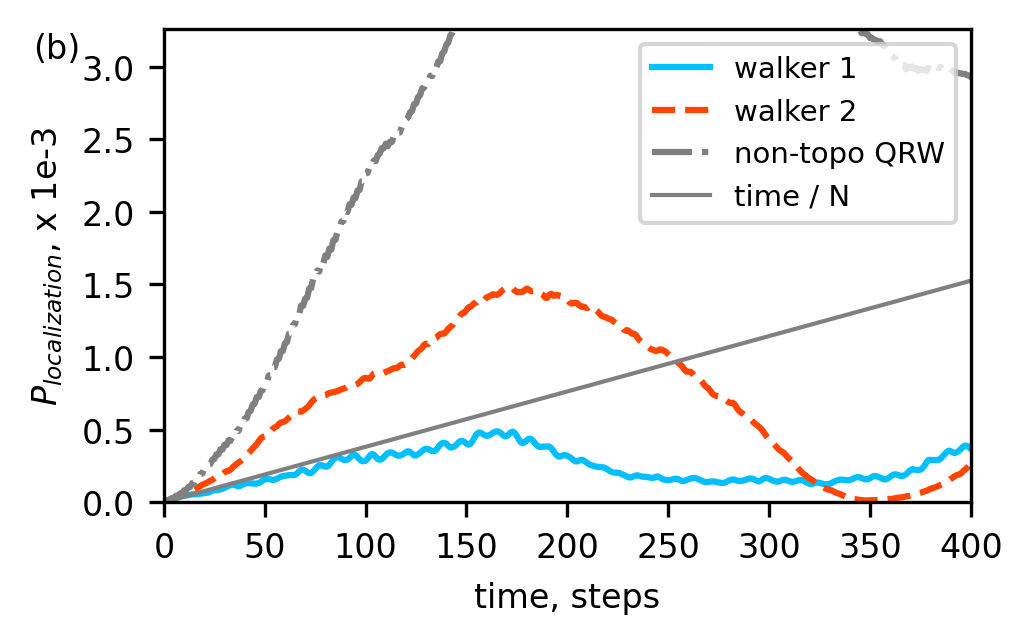

In [82]:
time_set= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]
probabilities_walker_1= [6.0925922981005146e-06, 9.398660251893049e-06, 1.303875840470299e-05, 1.79302191956216e-05, 2.398416790837981e-05, 2.8550455708425808e-05, 3.065459435076705e-05, 3.2546222823552175e-05, 3.599076980749951e-05, 4.063914946465123e-05, 4.445327211849368e-05, 4.6237777413663214e-05, 4.7891947796189507e-05, 5.0972674839916904e-05, 5.361890764952182e-05, 5.403054683008901e-05, 5.381872626309403e-05, 5.516229320541315e-05, 5.790425416474369e-05, 6.0852729102607315e-05, 6.298675168093092e-05, 6.40014544714873e-05, 6.625041649735915e-05, 7.195598448575385e-05, 7.866649971644255e-05, 8.284941437969723e-05, 8.444215085515979e-05, 8.517614589993729e-05, 8.736657756868323e-05, 9.235877876252408e-05, 9.833603399304943e-05, 0.00010413215870405104, 0.00011101644681837673, 0.00011814987534325526, 0.00012179885025553524, 0.00011917137624556913, 0.0001126254491911229, 0.00010921671174099861, 0.0001129999310719318, 0.00012093067443096856, 0.00012772587450092995, 0.00013084237562780744, 0.00013112009787144102, 0.00013034551137507732, 0.00012888923265371173, 0.00012747299746107655, 0.0001282327961061471, 0.00013231969506456004, 0.0001396124196333588, 0.00014900240234470602, 0.00015737844520496248, 0.00016129952146072538, 0.0001598650835568863, 0.00015563974466983117, 0.00015331887938600195, 0.00015570428343409732, 0.00016154772170454902, 0.00016864608592914634, 0.00017551817235212465, 0.0001801127647565792, 0.0001819527080735192, 0.0001837920732791553, 0.00018653909854727974, 0.00018709214506909297, 0.0001856962291353284, 0.00018809532630355448, 0.00019787728628880666, 0.0002120848294571047, 0.0002228363297594524, 0.00022392022879630724, 0.00021685430058824962, 0.00020695051577054613, 0.00019942349999375533, 0.00020043502393716464, 0.00021161563995928347, 0.0002275574537186998, 0.00024340012751259348, 0.0002546376647098821, 0.0002556681335039479, 0.00024901335269773806, 0.00024398666480206173, 0.0002457956963649888, 0.0002562433754501108, 0.000274650364568335, 0.00029422823141607576, 0.00030736358579376886, 0.0003112097914036586, 0.0003068129112113482, 0.0002988610137207155, 0.0002924120145228726, 0.0002897697396681305, 0.00029333918521166506, 0.0003042769338867168, 0.00031798546193073993, 0.00032663971570692736, 0.0003245343440139171, 0.0003116417582801589, 0.00029515324409299824, 0.0002840895622023085, 0.0002813760249388036, 0.0002861125679646601, 0.000299445267110907, 0.0003186270475876408, 0.0003315742017666804, 0.00032829970991294174, 0.0003128011688264879, 0.00029767729998794094, 0.00029227164170103566, 0.0002974779930493145, 0.00030980895509827625, 0.0003255930933146802, 0.0003384876802768101, 0.00034327462928470564, 0.000341758105880283, 0.0003356519425514825, 0.0003258534011203563, 0.0003197177530686033, 0.00032135398963718554, 0.0003263821095164115, 0.0003337706421065572, 0.00034408131443846923, 0.00035088241145627314, 0.0003468907308249584, 0.00033369067076783243, 0.00032231118584392004, 0.0003218937542401424, 0.0003296981834511204, 0.0003399739799924114, 0.000352240847096616, 0.0003636560319258428, 0.00036848861641119784, 0.00036551915743728805, 0.0003583245747481045, 0.0003520967745638073, 0.0003515672988416693, 0.0003606854509289711, 0.0003791599201299427, 0.0003974001042280012, 0.00040710272978119913, 0.0004094559374629814, 0.0004028613319482584, 0.0003875934494142232, 0.00037690569728372324, 0.0003774663722173026, 0.0003836012338075195, 0.00039501015444229413, 0.0004106654363615864, 0.00042114838977684176, 0.00042180365599324535, 0.0004144457721669327, 0.0004031181057920407, 0.00039647496830817573, 0.0004021508229101181, 0.00042090924079441237, 0.0004466065950764432, 0.0004683119721198125, 0.0004789930535032696, 0.0004787084875279715, 0.0004704817931464053, 0.0004611632732082632, 0.00045711744238996954, 0.00045928766403748717, 0.0004671532539951765, 0.0004774373686594685, 0.0004847256406636018, 0.0004880916937762832, 0.0004861970935552681, 0.0004759533905500836, 0.00046220495953180766, 0.0004541240387584817, 0.00045610739715073675, 0.000467650911329005, 0.0004813285424215593, 0.0004855851126616152, 0.00047593667951924826, 0.0004557167875346563, 0.0004310424332830696, 0.0004115784885926286, 0.00040624403937320575, 0.0004146061739181745, 0.00042819260294792703, 0.0004374189618038997, 0.00043570656298907626, 0.0004231198160617821, 0.00040556412950974377, 0.0003897114067166387, 0.00038121545781400466, 0.0003808812731724718, 0.00038251461188531746, 0.00038305368635301306, 0.0003845811652277975, 0.00038321051787524213, 0.000372769155687386, 0.0003547933576399306, 0.0003347927463301103, 0.0003188648557952794, 0.0003133247702656201, 0.0003176261268742621, 0.00032357838738186686, 0.0003245063341961549, 0.00031978047245285405, 0.0003118684211397729, 0.00030205062268542156, 0.00029030199243364164, 0.0002809981948558023, 0.00028113013840589567, 0.00028828461061177575, 0.00029185843781332106, 0.0002878867275932105, 0.0002792946325642588, 0.00026819582553519813, 0.00025894088281803735, 0.00025467834758980095, 0.0002508386423894232, 0.0002457229460743217, 0.00024365858115267156, 0.00024334066557401939, 0.00024161758976964085, 0.0002391789000511692, 0.000233966498200505, 0.00022458341604961077, 0.00021508327852830803, 0.00020793365176265444, 0.00020367340398738966, 0.00020320744023458458, 0.0002031601602561772, 0.00019948467012306938, 0.00019336244732407918, 0.00018690083914009098, 0.00017990739688524798, 0.00017318896984932, 0.00016987218987195695, 0.0001720851765179632, 0.0001783846649959242, 0.00018428353578414333, 0.0001847441512690648, 0.00017981711786725632, 0.00017583151659327845, 0.00017554345479747345, 0.0001748795969590407, 0.0001722515631360583, 0.00016924869508132574, 0.0001668772117807911, 0.0001689564300156063, 0.00017553121087812674, 0.0001767588530402567, 0.0001686203678842961, 0.0001600098810916286, 0.0001556148996199041, 0.00015232835037988322, 0.00015090256699792394, 0.00015359721236971489, 0.0001572831551921043, 0.00016004120121368453, 0.00016176865924693622, 0.00015841114181322193, 0.00014997164504057775, 0.00014467021878615137, 0.00014635288758260375, 0.00015136087906352424, 0.0001570935618970169, 0.00016265853801503946, 0.00016651565259561627, 0.0001671650065792553, 0.0001636562428989562, 0.0001577798285242989, 0.00015180833656785184, 0.0001452470917187888, 0.00013961197223785589, 0.00013824665613709674, 0.0001402650365499415, 0.00014262724154163176, 0.00014358953652772696, 0.00014190256116428608, 0.00013838666732076633, 0.0001357670656338632, 0.0001339871852367874, 0.0001322486486083923, 0.0001337953183083596, 0.0001404084851866063, 0.00014804861814444363, 0.0001536525305479251, 0.0001568761302053999, 0.00015505561771780537, 0.00014893121653739865, 0.00014520419952871634, 0.00014607335632615647, 0.0001487282553906909, 0.0001523248204499168, 0.0001570176208522854, 0.0001617291494389821, 0.0001638899418886295, 0.0001609768227019267, 0.000153905702286293, 0.0001461275127040774, 0.00014306181447864047, 0.00014944849422737227, 0.0001604453466517109, 0.0001665162031188874, 0.0001658803215842632, 0.00016101251103999695, 0.00015428294959762557, 0.00014873932102254164, 0.00014403243382319676, 0.00014049759157622535, 0.00014258394161093183, 0.00014910095092498138, 0.00015376438861236833, 0.00015421329078391027, 0.00015085055416424586, 0.0001450389650188648, 0.00014051538828377524, 0.0001402936566280369, 0.00014386932566544202, 0.00014836537391596635, 0.00015158961461979683, 0.00015274956569093475, 0.00014965226364025414, 0.00014145746765229734, 0.00013247134183391352, 0.00012677941669554177, 0.0001254040460500819, 0.00012845039381953715, 0.0001331400573555563, 0.00013515971326446646, 0.00013343355511569519, 0.00012919417437511627, 0.00012497123099719463, 0.0001234860848892584, 0.00012416467103926928, 0.00012631408720079293, 0.00013190570584437568, 0.00013985971632482055, 0.00014625201827713275, 0.00015097606346593388, 0.00015456162051605233, 0.0001551523479378139, 0.00015337532228163684, 0.00015150841379265472, 0.00015044108189337033, 0.00015197987110327277, 0.00015735140356226292, 0.00016429500611711732, 0.00017017826145097756, 0.00017305119664670743, 0.00017086810086390037, 0.00016508336048437348, 0.00015982440697110323, 0.0001570801717602538, 0.00015815170234012343, 0.0001646478117965771, 0.00017389077701330947, 0.00017980635263882707, 0.0001797657182164104, 0.00017572485596016664, 0.00016945573681759936, 0.0001621798103626231, 0.00015725306104718618, 0.000157847180170638, 0.00016398639729755767, 0.00017413173373463496, 0.00018502899040689642, 0.00019131052070025758, 0.0001910850031652542, 0.0001869877160848483, 0.00018188027178821567, 0.00017987591547873638, 0.00018433921387295615, 0.00019376844127185505, 0.00020643666741402048, 0.00021991824206808502, 0.0002269029546786811, 0.00022511632902363286, 0.00022163221919462904, 0.00022113642511435727, 0.00022401966972753967, 0.00023290918743944805, 0.00025068726065834195, 0.0002734509162863056, 0.00028942395504694097, 0.0002920440348985608, 0.0002896949049362295, 0.0002898022510874985, 0.00028956837960332276, 0.00029076293724638615, 0.00029963340139521096, 0.000314205729076686, 0.0003299869267198223, 0.0003455320578404341, 0.0003546889177924775, 0.0003514316897999546, 0.0003425182951645598, 0.00033916119275183016, 0.0003431816484899181, 0.0003520450208268709, 0.00036533608924123003, 0.00037981511272990357, 0.00038898021022955765, 0.0003887396075346221, 0.00037961762517789736, 0.0003662414832915019, 0.00035569134906452424, 0.0003555832963933671, 0.0003688980612083661, 0.00038712967083980097, 0.0003970657025313447, 0.00039479133846535803, 0.00038484685636774716, 0.00037180387337507563, 0.0003587211960039055, 0.0003488410732537692, 0.00034628830609264737, 0.00035281506934873685, 0.0003644814338994592, 0.00037347062186434993, 0.0003728183081153176, 0.0003640274638592513, 0.00035576958469688084, 0.0003502437414311414, 0.000345364007838159, 0.0003461942473784972, 0.0003563462176936772, 0.0003701570752537716, 0.0003801649345756704, 0.0003822371709386281, 0.00037705004581539946, 0.0003675716610333663, 0.0003560335584287332, 0.00034986124266602126, 0.0003555145947225813, 0.00036544486083384863, 0.00037065702946431156, 0.000372324617301712, 0.00037006263295183954, 0.0003604633000146411, 0.0003473069522010129, 0.000337356554011767, 0.00033324382809569916, 0.00033533808435826665, 0.00034065360751326474, 0.0003421131129367689, 0.00033653309845071516, 0.000326626034734467, 0.00031424633039453173, 0.00030183082947494403, 0.0002933938503652693, 0.0002894499980563355, 0.0002905027654852403, 0.00029617956256946815, 0.00029840718622939236, 0.00029149008968951145, 0.00027907189223585186, 0.00026504203485995623, 0.00025260713094299144, 0.00024388727980495186, 0.00023695608465011816, 0.0002331507405546825, 0.0002344623035558473, 0.00023566624522712538, 0.0002317625188485081, 0.0002227206947099292, 0.00021126674182785836, 0.00020228137235650084, 0.00019833369045270155, 0.00019858212537144816, 0.00020129363251071631, 0.0002032414036066177, 0.00020354458736273652, 0.0002024472331024991, 0.0001965323461058626, 0.00018743084722042645, 0.00018194960025994149, 0.0001798322202994895, 0.0001785648901463917, 0.00017899319282885722, 0.000178729406688082, 0.00017516278034135357, 0.00016963406288796344, 0.0001634535304107663, 0.00015771313180224192, 0.0001527359420545, 0.00014742639907661988, 0.0001434958045578433, 0.0001441576038464199, 0.00014858528476811693, 0.00015287608275653134, 0.00015449831941505296, 0.00015414199307944574, 0.0001531686352705451, 0.0001505547507967328, 0.00014532897566550663, 0.00014180415530056824, 0.00014586563209216684, 0.00015491696638455924, 0.00016111052242408062, 0.00016309933413655094, 0.0001621057955299366, 0.0001561785256523604, 0.00014951861235195507, 0.00014951234572298298]
probabilities_walker_2= [1.0287556264248214e-05, 1.1112712710554815e-05, 1.3766475381768055e-05, 1.8706790743255746e-05, 2.1406985030232225e-05, 2.585347077844475e-05, 3.332011590102677e-05, 3.8664020956707826e-05, 4.380973739118159e-05, 5.184080112331379e-05, 5.857534350860354e-05, 6.372617201780945e-05, 7.186424103314965e-05, 7.955171391045714e-05, 8.224139307632061e-05, 8.524702019267726e-05, 9.257863303952563e-05, 0.000101268437241704, 0.00011016028929464362, 0.00011948117799464431, 0.0001260316222472552, 0.00013124110834573035, 0.00013962375270482733, 0.0001472483853919782, 0.0001533884413990558, 0.00016456039751489826, 0.0001759054204692647, 0.000180472998398313, 0.0001841998429286735, 0.00019265066403396347, 0.00020427769361144386, 0.00021283042461409397, 0.0002158168443621457, 0.00022354437982144307, 0.000238754504629113, 0.00025154517617121075, 0.0002622162193346348, 0.00027317762826039406, 0.0002816595030195725, 0.00029277852056128326, 0.00030815495108676847, 0.0003226606611198857, 0.00033790873927036735, 0.00035496928303735913, 0.00037076025506255445, 0.0003847204336650033, 0.00039979758036706703, 0.00042006948107329786, 0.0004395718014734002, 0.0004490190828587975, 0.000453174659398784, 0.00045815339971727587, 0.0004674138312579255, 0.00048632993426395697, 0.0005059509940441445, 0.0005152866363064265, 0.0005237269312003765, 0.0005382274994100287, 0.0005486626822093321, 0.0005513920306780336, 0.0005574619587468401, 0.0005700300502614632, 0.0005819461553693924, 0.000594704538479535, 0.0006099672521705582, 0.000621054395003745, 0.000625948745819825, 0.0006250664432312599, 0.0006233960789859513, 0.0006306115993960088, 0.0006420280969165984, 0.0006518150226315631, 0.0006665064394601894, 0.0006853479729280469, 0.0007017907804180544, 0.0007133351402916962, 0.0007204326012178827, 0.0007281438753254494, 0.0007336720190404889, 0.0007326594064939391, 0.0007354009345925899, 0.0007450228567409049, 0.0007521813216123394, 0.0007555815096278352, 0.0007583242067819173, 0.000761198610892423, 0.0007652379500564169, 0.0007711751681345381, 0.0007778547945840893, 0.0007820916797794268, 0.0007865530781179377, 0.0007963938147243016, 0.0008055796420078831, 0.0008075034425194919, 0.000806883310459945, 0.0008091934901088421, 0.0008153381811757975, 0.0008263860576315806, 0.0008413408508746319, 0.0008538157913587087, 0.0008563742222218394, 0.0008509475186008537, 0.0008517855446212523, 0.000867872052125176, 0.0008863842271414861, 0.0008914734031345231, 0.0008881891189436316, 0.0008866441243072798, 0.0008872780213982699, 0.0008906661540704985, 0.0008974445381439084, 0.0009036575516951083, 0.0009089062153762115, 0.0009169128701711829, 0.0009232320770771713, 0.0009229388785441336, 0.0009277045871472295, 0.00094177382502688, 0.0009475064390683058, 0.0009454841376343452, 0.0009522792579530022, 0.000963200542697449, 0.0009738045941509142, 0.0009906162546743826, 0.0010076741353914993, 0.0010232894748274926, 0.0010406963303522096, 0.001051168361765426, 0.0010630553392618764, 0.0010848315473650323, 0.001092094649648243, 0.0010884941284657291, 0.0011051974324554476, 0.0011245959147509624, 0.0011253045650132883, 0.0011312321983744911, 0.0011484386382592364, 0.0011587609172611165, 0.0011604956258822274, 0.0011621789178903046, 0.0011751199113626265, 0.0011959610279681046, 0.0012069859773608303, 0.0012180416487650085, 0.0012415669034588973, 0.0012587680395032795, 0.0012700358009654687, 0.0012901495943492382, 0.0013021183992683305, 0.0013059347709197782, 0.001324740963803925, 0.0013421440459700181, 0.0013467287960943302, 0.0013598341870485506, 0.001371943580697711, 0.001376636946582008, 0.0013916399466184339, 0.0013961809762423206, 0.0013851473663908243, 0.001394048368420582, 0.0014117023157908996, 0.0014162497341344673, 0.0014237167989906393, 0.001432108072772748, 0.001430271743508457, 0.0014281556646315034, 0.001434536058231709, 0.0014483103505483386, 0.001461386531220746, 0.001469760856553497, 0.0014764196737814474, 0.0014807019958909332, 0.0014815705741653348, 0.0014734481125018627, 0.0014566963392802126, 0.0014482020142606526, 0.001449120476889957, 0.0014478893717210601, 0.0014504502153695332, 0.0014629336939229658, 0.0014716082946579063, 0.0014635238317815898, 0.0014532023666742242, 0.00145631158535069, 0.001455672349487501, 0.001442276217379288, 0.0014344582378416663, 0.001434755230363469, 0.0014271233151081735, 0.001409685990477605, 0.0014077376447099326, 0.001429161598682714, 0.0014361722578202004, 0.0014234349556463755, 0.0014239232945549463, 0.0014284453547082226, 0.0014222168146423148, 0.0014187738756089245, 0.0014178310561577992, 0.0014112134141819215, 0.0013960904289936154, 0.0013776962425381773, 0.0013693043473730175, 0.001370633573412026, 0.0013742504485437686, 0.001370716601059446, 0.0013550207513751895, 0.0013464817494738591, 0.0013475961578065347, 0.001340318194052165, 0.0013376657653075962, 0.0013484491934114536, 0.001351274118698326, 0.0013395465663864077, 0.0013253956628121698, 0.001314162466157102, 0.001299393670632171, 0.0012834216407396045, 0.0012784530992973589, 0.001275321683941449, 0.0012660477573906196, 0.001261910559259762, 0.0012571576863860674, 0.0012447197078525052, 0.0012345254983948738, 0.001227862726241642, 0.001221048687987287, 0.0012080728537794388, 0.0011886069986568226, 0.0011815337889692118, 0.0011840498754255033, 0.0011734008620252147, 0.0011611085394407261, 0.0011603562706488423, 0.0011510120818457184, 0.0011292722669084797, 0.001113406956139317, 0.0011018914785731091, 0.0010879807941781715, 0.0010783372613285503, 0.0010704398142920692, 0.0010591401681840993, 0.0010514562750545868, 0.0010462241641856806, 0.0010413953842773114, 0.0010459427198842189, 0.0010529450944968596, 0.0010495275067136495, 0.0010422486150636248, 0.0010336095428999572, 0.0010193213814116925, 0.0010074895710618086, 0.001001219547524983, 0.0009913004965077083, 0.0009748833654992089, 0.0009588951650193408, 0.0009479282031590401, 0.0009344756375841192, 0.0009136294890814306, 0.0008995478371224045, 0.0008993377959457845, 0.0008983194964811151, 0.0008868375637981551, 0.0008697819687845428, 0.0008552535286347033, 0.0008481114176610005, 0.0008416171006231706, 0.0008255560183569713, 0.0008054102446387636, 0.000792781516374948, 0.0007830391241355856, 0.00076477535870594, 0.0007455377563798553, 0.0007366948141948527, 0.0007319355847588713, 0.0007286156285394617, 0.0007283168656894705, 0.0007206861376441717, 0.0007072426891548249, 0.0006977018994047263, 0.0006885428337605554, 0.0006836050425100355, 0.0006845839367301661, 0.0006734889996500531, 0.0006495056199540845, 0.0006304532661068975, 0.0006191467709946658, 0.0006080686638507268, 0.000594219470047065, 0.000582721386455116, 0.0005767251041600376, 0.0005679207515858451, 0.0005539263088938084, 0.0005415170857295156, 0.0005307264152315587, 0.0005191023606209518, 0.0005060792408056261, 0.0004896330837086975, 0.00046977373824079384, 0.0004492920190962217, 0.00043226974365165533, 0.0004188183406020571, 0.00040504543677769396, 0.0003909088380937059, 0.0003757640782404853, 0.00036046448936423545, 0.000351019016485643, 0.00034329980115699657, 0.0003293259735532423, 0.00031313983040713513, 0.0002986762806439466, 0.00028606580897920194, 0.0002735697488946134, 0.00025672936282751025, 0.00023918970535485902, 0.00022415092017961393, 0.00020848998325159038, 0.00019617304420403418, 0.00018671521512481933, 0.00017364335729158962, 0.00016289517883951205, 0.00015640845148803204, 0.00014566767085186217, 0.00013365226391798268, 0.00012530053585984473, 0.00011600871966901681, 0.00010626072669161971, 0.00010000452011855871, 9.439823683375694e-05, 8.785801024881578e-05, 8.402159475036404e-05, 8.085024048206171e-05, 7.364779018212119e-05, 6.622949283291587e-05, 6.177656106313825e-05, 5.677699120895942e-05, 5.045247566960821e-05, 4.411895823373256e-05, 3.764716204834246e-05, 3.157059178599922e-05, 2.5785670427367184e-05, 2.152304639111061e-05, 2.045091707352666e-05, 1.9754536104163457e-05, 1.7426051060340355e-05, 1.5778204575338085e-05, 1.4575581496919547e-05, 1.2641262668330039e-05, 1.162882079745861e-05, 1.2047459500290695e-05, 1.2784142366888714e-05, 1.3395855715460724e-05, 1.3654731840414708e-05, 1.3896533263232644e-05, 1.483423610626067e-05, 1.5973783522209588e-05, 1.6961455567141254e-05, 1.8623738660715125e-05, 2.0878951717326467e-05, 2.229717314109532e-05, 2.2538415622689863e-05, 2.3022566656449944e-05, 2.5144991578095368e-05, 2.8680419451926155e-05, 3.132755145659922e-05, 3.1928294774190114e-05, 3.307591708095481e-05, 3.6316725168814194e-05, 3.973298348660995e-05, 4.2350277244668113e-05, 4.471780360452937e-05, 4.7955262625401675e-05, 5.3279266064523816e-05, 5.8309890365094905e-05, 6.112988765619648e-05, 6.471308935541348e-05, 6.93105112880747e-05, 7.31287002753003e-05, 7.820836645599675e-05, 8.522744274006666e-05, 9.195788882089601e-05, 9.70936877355789e-05, 0.0001007452061636983, 0.00010562898405359756, 0.0001130183039789745, 0.00011975961090444, 0.00012550226549262256, 0.0001323318657741508, 0.0001396696146657131, 0.00014864256346609273, 0.00015954502629720314, 0.00016898229677804753, 0.00017800290894162536, 0.00018624440346131288, 0.00018989671227796892, 0.00019642277007784104, 0.00021069749099828238, 0.00022346634467074444, 0.0002346639018755825, 0.00024939431604403876, 0.00026102924580355505, 0.00026768792623445563, 0.0002747008546901999, 0.00028186595332297727, 0.0002870431833058674, 0.00029109436852023716, 0.00029997186337999814, 0.00031609899091817614, 0.0003327781603080125, 0.00034819197760627596, 0.0003637005680044667, 0.0003765115840551756, 0.00038797481273127347, 0.00039952088043106627, 0.00041279607784124755, 0.0004308603665934585, 0.0004475657466815164, 0.0004610528193913187, 0.00047616193446811146, 0.0004862752130817161, 0.0004927913747159931, 0.0005081800430752586, 0.0005271538265080076, 0.0005406688425023667, 0.000553726374902322, 0.000568190233000572, 0.0005796011662524027, 0.0005879102941377429, 0.0005994725489891186, 0.0006151112607048283, 0.0006251728399242485, 0.0006317238740985472, 0.0006463220524355177, 0.0006643029955061408, 0.000678837527655092, 0.0006934462265042409, 0.0007080463408112949, 0.0007242125444515064, 0.0007429151186978546, 0.0007561538145145966, 0.0007644468826630908, 0.0007760111093393577, 0.0007923746758306289, 0.000809031548495118, 0.0008183767206420106, 0.0008253854706232994, 0.0008413518962804464, 0.0008534727247650712, 0.0008549264070983244, 0.0008686271679226513, 0.0008942834066810561, 0.0009074362783657707, 0.0009166083142360625, 0.0009398254785861606, 0.0009615970594257211, 0.0009731725659764129, 0.000990489837587226, 0.0010108092960417854, 0.001020931606311056, 0.0010265716429757623, 0.0010363739527276823, 0.0010549004737353388, 0.0010796585660780653, 0.0010982720281435235, 0.0011113188689080586, 0.001126097717238338, 0.001142506061115526, 0.001161763445081778, 0.0011795567122465744, 0.0011945528668955011, 0.0012108554555978195, 0.0012233272200691907, 0.001239221887390304, 0.0012634615332581343, 0.0012789948773858032, 0.0012908365900631395, 0.0013095335592702817, 0.0013252797347979989, 0.0013441306354050574, 0.0013647096633356286, 0.0013749811503260471, 0.0013931757176887335, 0.001418428833727922, 0.001424647174371699, 0.0014264402301427579, 0.0014416005664100006, 0.0014521518045017908, 0.0014551798494763493, 0.001465818164735631, 0.0014807159627329453, 0.001494220219904346, 0.0015088570960104918, 0.0015162543164982467, 0.0015113494244028837, 0.0015049614273974924, 0.0015015561633177632, 0.0014996172437757036, 0.0014970855301924646, 0.001484669546403874, 0.0014694727877826834]

sizex = 512
sizey = 512

fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
#fig.subplots_adjust(bottom = 0.2, top=0.98, left=0.12, right=0.99)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)

plt.plot(time_set, probabilities_walker_1, color='deepskyblue', label = 'walker 1')

plt.plot(time_set, probabilities_walker_2, '--', color='orangered', label = 'walker 2')


plt.xlabel('time, steps', fontsize=8)
plt.ylabel(r'$P_{localization}$, x 1e-3', fontsize=8)

#plt.ylim(0.0, probabilities[0:200][np.argmax(probabilities[0:200])]+0.0005)

oracle = [2]
#m,p = simul_Grover_disordered(9,oracle,500, disorder_strength = 0.3)
m =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
p =  [3.814697265624999e-06, 4.192884156137871e-06, 1.5280081173588883e-05, 1.6289988172158866e-05, 2.8854957598849857e-05, 2.9099845034267584e-05, 4.449863940066894e-05, 4.3483349692361877e-05, 5.900039785179217e-05, 6.10014749557773e-05, 8.178628701766728e-05, 8.238341707418324e-05, 0.00010289660806276106, 0.00010499271524001794, 0.00013070979794344657, 0.00013227355646392873, 0.000161195374619151, 0.00016285246064091246, 0.00019452323432289734, 0.00019623463145780612, 0.0002266430864554177, 0.00022708188763031172, 0.000258493319209505, 0.0002624856417071163, 0.00029232544628868593, 0.0002981109590955914, 0.00032951414782202127, 0.0003291573710638077, 0.00036473252040912225, 0.00036202421734488516, 0.0003956332877808165, 0.00039277662038053775, 0.0004259529535382145, 0.0004224488605264319, 0.0004564870123180431, 0.00045399644088629765, 0.0004927247798148228, 0.0004917794293700288, 0.000532763064225223, 0.0005311354755334735, 0.0005758055014763346, 0.0005776741024092355, 0.0006214744266458437, 0.0006293610792986042, 0.0006738886208521226, 0.0006786927291216802, 0.0007241909283328514, 0.0007239519023601072, 0.0007655098986254521, 0.000772362731944409, 0.0008177855083315721, 0.0008266201890750782, 0.0008737696781435061, 0.0008749270964783353, 0.000929101243235214, 0.0009303635990380581, 0.0009837201102214999, 0.0009874131495572636, 0.0010407175554493831, 0.001041577606443265, 0.0010960798457250976, 0.0011030195255498673, 0.0011613315798014393, 0.0011646158334028575, 0.0012216402977482453, 0.001226621790507146, 0.0012890107056530839, 0.0012879983051577763, 0.001354943587526797, 0.0013515917156041203, 0.0014014734286749743, 0.001408052893677928, 0.001472812716962738, 0.0014749420987047093, 0.0015396665065849754, 0.0015426416275847543, 0.0015955091183009384, 0.0015892594523292866, 0.0016572743563202247, 0.001644716420226884, 0.0017002937015922015, 0.00168926558308272, 0.0017477753520712856, 0.0017406056099675423, 0.0018060624716227714, 0.0018071330613522694, 0.00186469247748764, 0.0018733648802500946, 0.0019340239086127107, 0.0019375798977115497, 0.0020062895236804823, 0.0019997607936445973, 0.0020518145078276036, 0.002048362590729065, 0.0020993773508367628, 0.002095394316418156, 0.002148333150255112, 0.0021514773192344875, 0.0022102328722971142, 0.0022100970499505253, 0.002264267482751442, 0.0022694701308997667, 0.002314885718634827, 0.002309765853373787, 0.0023538338902578575, 0.0023499906311751986, 0.0023913965830664576, 0.002402145597411661, 0.0024398189932805002, 0.002439035059802587, 0.0024703523378135596, 0.002453085732939894, 0.002483008381111145, 0.0024822388507824964, 0.002519449584659221, 0.0025128742802121356, 0.00254715943481257, 0.002547638579211254, 0.002590664684475824, 0.0025982316152311892, 0.0026382635215838864, 0.0026502314796096205, 0.002686104428435764, 0.0026934717846093265, 0.002743294660437181, 0.002746724248989885, 0.002791821585929932, 0.0028037354463881915, 0.0028511783149815914, 0.0028556788947934684, 0.0028889291578404726, 0.0028941123076772716, 0.0029382762060913173, 0.0029359771573020848, 0.0029886347519716616, 0.002986838343420369, 0.0030370079472458733, 0.003038648022344767, 0.0030934808090402255, 0.003107020036078436, 0.003152672568611156, 0.0031673025911308065, 0.003216582264486029, 0.0032331719683003904, 0.0032740393729952357, 0.003280041812120839, 0.0033177420922153303, 0.003308144269743649, 0.0033382574012769985, 0.0033294504365322503, 0.003373613867885837, 0.0033840045228358175, 0.003420797518007593, 0.0034348949861762374, 0.0034645801234906, 0.0034865400454860696, 0.0035269857494172243, 0.0035364493841801036, 0.00356774444280779, 0.0035654726720158367, 0.0035991691027094123, 0.0036119677713040525, 0.003653474351865283, 0.003660826095702734, 0.0037192507617421207, 0.0037263492060786198, 0.0037650513827850933, 0.0037711544743563676, 0.0038121854435888684, 0.003806787084981533, 0.0038421011339380886, 0.00384213428418037, 0.0038837227513578683, 0.003871074119469168, 0.0038971452584713848, 0.0038944688867584894, 0.003908744769984258, 0.0039113907075237105, 0.003940599418694751, 0.003937283948803631, 0.003944554987436433, 0.003944754786395541, 0.003975962810376582, 0.003969173143950295, 0.003998081032383273, 0.004003570349916594, 0.004019377652506958, 0.004020872442080131, 0.004040845517755861, 0.004033987814552605, 0.004046390852042902, 0.004036687277103666, 0.004035615105654035, 0.004021443487233845, 0.004045488845688421, 0.004035635562395746, 0.004051696050565992, 0.00403864289246845, 0.004043940013665096, 0.0040293867459028415, 0.004038232860782127, 0.004023968126500838, 0.00404647768898601, 0.0040356747120047455, 0.004046154511105095, 0.004032306944434554, 0.004049465984855252, 0.004032180328230903, 0.004074567843033332, 0.004053968290426052, 0.0040870380818080684, 0.004081165942795132, 0.004088128737098773, 0.004075293820838487, 0.004089991251371416, 0.004080979009033495, 0.004090466929882686, 0.004079989967287285, 0.00410460388683371, 0.0040978803409775265, 0.004117341859907464, 0.004108654300326745, 0.004139176642284216, 0.004126995852362397, 0.004145262852681573, 0.00411813061212889, 0.004127804076594002, 0.004113041401547831, 0.004113884483900793, 0.00410516548844974, 0.004115292607804265, 0.004102574622682458, 0.0041016655695193405, 0.004079767304236863, 0.004069738526606758, 0.0040532799147083645, 0.00404469369503682, 0.004034600246842632, 0.004028577474398142, 0.004016549890635698, 0.004016024123310841, 0.0040107672647732495, 0.004022810606257782, 0.004030736837872634, 0.004044707737622305, 0.004046824940637418, 0.004051355965169134, 0.00405549808971393, 0.004053047309017413, 0.004047144481476586, 0.004048344446330673, 0.004046315404595619, 0.004028991635819074, 0.004039069245392883, 0.004036589310692428, 0.004049292054969534, 0.004040347771773913, 0.004030861427791488, 0.00402950569591913, 0.004014258681165822, 0.004015807161496186, 0.004010187660746578, 0.003999857640021375, 0.0039976075643339375, 0.003979303966424144, 0.0039816999116047535, 0.003959852381822047, 0.003973855756555452, 0.0039782925949353705, 0.003977409107591699, 0.003962541518966554, 0.003961355646548072, 0.003947272526832069, 0.003967982485416329, 0.003959870326248956, 0.003968697042190598, 0.003948744648164471, 0.003962372382133099, 0.003940253778882282, 0.003942173293154985, 0.003921977345358003, 0.003926585291006299, 0.0038848466156522154, 0.0038834402874584457, 0.003859675224705837, 0.0038701125081620352, 0.0038453344897933926, 0.0038653727724076237, 0.0038363394604142708, 0.003853410373015827, 0.003830790177251705, 0.0038462797468310573, 0.003815739784392231, 0.0038344973272228084, 0.0038011027144058676, 0.0038057118616679634, 0.0037767395717307685, 0.0037896088720886225, 0.0037554937088410726, 0.003770311185277379, 0.003754215803526171, 0.0037566630614745728, 0.0037315062607483503, 0.0037387110970008145, 0.0037169817190443, 0.0037055762360638754, 0.003685310032944309, 0.0036828907921103472, 0.0036705959600693673, 0.003669849493247027, 0.0036442602899109436, 0.003632621273097355, 0.0036032249286967145, 0.0036199589236932026, 0.0035879554318306688, 0.0035933216450870975, 0.0035560692639543304, 0.0035571665489591117, 0.0035313649179721774, 0.0035237059837687555, 0.003501780429585647, 0.0035022626840105968, 0.003482988567557346, 0.003477869986458544, 0.003448144900155171, 0.0034334216750359038, 0.003397230569963057, 0.0033888064187335854, 0.0033729932524393983, 0.0033679357431681024, 0.0033432494089088867, 0.0033301158694437243, 0.003311952472547475, 0.003328283082962247, 0.003300768233223633, 0.0033246402581434036, 0.0032992805277980023, 0.0033044795002593118, 0.0032921664144803723, 0.003298336062417951, 0.0032907456975612114, 0.0032870302318134827, 0.0032672016690774228, 0.003264188227903382, 0.0032485403786026872, 0.0032535394266718625, 0.0032304499687296016, 0.003240753161757384, 0.0032245756321870383, 0.003224309219507544, 0.0031987468895700918, 0.00319926601699287, 0.003184748658140815, 0.0031845440605946817, 0.0031621325724939557, 0.003176437973918676, 0.003154316734475254, 0.003147938182912345, 0.003125946760100518, 0.0031178918632264055, 0.0030874031304073636, 0.0030770669382999406, 0.003061590655086949, 0.0030546097109204824, 0.003034738488948872, 0.003040186944035442, 0.003012279544957457, 0.0030138849469792503, 0.0029820443552181766, 0.003001255419297832, 0.0029908601773494807, 0.0030032035385407314, 0.0029840143779187303, 0.0029927111920507784, 0.002971022838705352, 0.0029848750631199868, 0.0029788664663836133, 0.0029821852221247804, 0.0029715695710706876, 0.002993061336679834, 0.0029847405078483095, 0.002996194899145509, 0.002979744627715625, 0.0029992099627854573, 0.0029910229083991865, 0.002998688880516792, 0.0029865699857942875, 0.002990464137344168, 0.0029840390252254276, 0.002995588751498173, 0.002979254985567663, 0.002977862271870097, 0.002954960971633674, 0.0029623836306722842, 0.0029564107653873876, 0.002955100374134276, 0.0029496061673195215, 0.0029521714892352053, 0.00294350921091014, 0.0029395142869989826, 0.00292925223837398, 0.0029286043353945637, 0.002911226003498773, 0.002908607067570583, 0.0028932193445740505, 0.002902849824873483, 0.0028807221738335292, 0.00289367274393276, 0.0028795430684520843, 0.0028717780060595745, 0.002846198830543849, 0.0028550582168230757, 0.0028369945903566323, 0.0028368336888554492, 0.0028298537384666136, 0.002830198068951162, 0.0028177731350045, 0.002814433291489993, 0.002799262161855737, 0.002796704019460885, 0.0027816479422376394, 0.002775290542282095, 0.0027451989429957747, 0.0027509447427319007, 0.0027379687385759395, 0.0027440326705878487, 0.0027307134076299156, 0.002726104889784769, 0.0027135292762683334, 0.0027181350823458003, 0.002707590870660658, 0.002706645898727548, 0.0027000669918696755, 0.002692765040779965, 0.0026825237463889494, 0.002679539070302601, 0.0026606594530144707, 0.002663245954234237, 0.002659341979480416, 0.002663141841787577, 0.0026584283654181706, 0.0026646591677389215, 0.0026453818307374103, 0.0026431705296243793, 0.002620268029995804, 0.002615511967605314, 0.0025902156630051207, 0.002597350711845896, 0.002580564333929303, 0.0025853461829974376, 0.0025709692373308626, 0.0025714323055149274, 0.0025565139184814973, 0.0025587283428877726, 0.0025475604763743253, 0.002542461020236686, 0.002538260711857072, 0.0025477552175587237, 0.0025307339280806604, 0.002523854324462014, 0.0025094172370075008, 0.002513098216614761, 0.002507565728337351, 0.0025038121711970607, 0.0024930914283493675, 0.0024934733313552162, 0.0024862986601707155, 0.0024949362626610298, 0.0024786626716429153, 0.0024819256756788907, 0.0024716001156919578, 0.0024668194966373904, 0.002456814735546114, 0.0024631717925557, 0.002450874180421568, 0.0024634210689219852, 0.002458978015583673, 0.0024731758869903074, 0.0024721187026600457, 0.0024914055385201255, 0.0024776318666588776, 0.0024813112505806985, 0.0024664717284756453, 0.002485628601817162, 0.0024640164320246316, 0.002487909577439615, 0.0024761698180588406, 0.0024981792763585464, 0.002496345074986774, 0.0025040991730013707, 0.0024905146593706467, 0.0024980605718986546, 0.002490888928096689, 0.0025043875561411486, 0.002493203539858702, 0.0024983226242697287, 0.002479492530048111, 0.0024789906298182474, 0.002462151073661137, 0.0024621351433309325, 0.0024310615162645042]
plt.plot(m,p, '-.', color='grey', label='non-topo QRW')
plt.plot(time_set, [ti / (sizex*sizey) for ti in time_set],'-', color='grey', label='time / N', linewidth=1.0)

plt.xlim(0.0, 400)
plt.ylim(0.0, 2.15*max(probabilities_walker_2))
plt.text(-65, 2.02*max(probabilities_walker_2), '(b)', fontsize=8)
plt.gca().tick_params(axis='both', labelsize=8)
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(fontsize=7, loc='upper right') #, title='size '+str(sizex)+'x'+str(sizey),title_fontsize=14)
plt.gca().yaxis.offsetText.set_visible(False)
plt.savefig('figS_angle_disorder_015.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight',
      metadata=None)
plt.show()

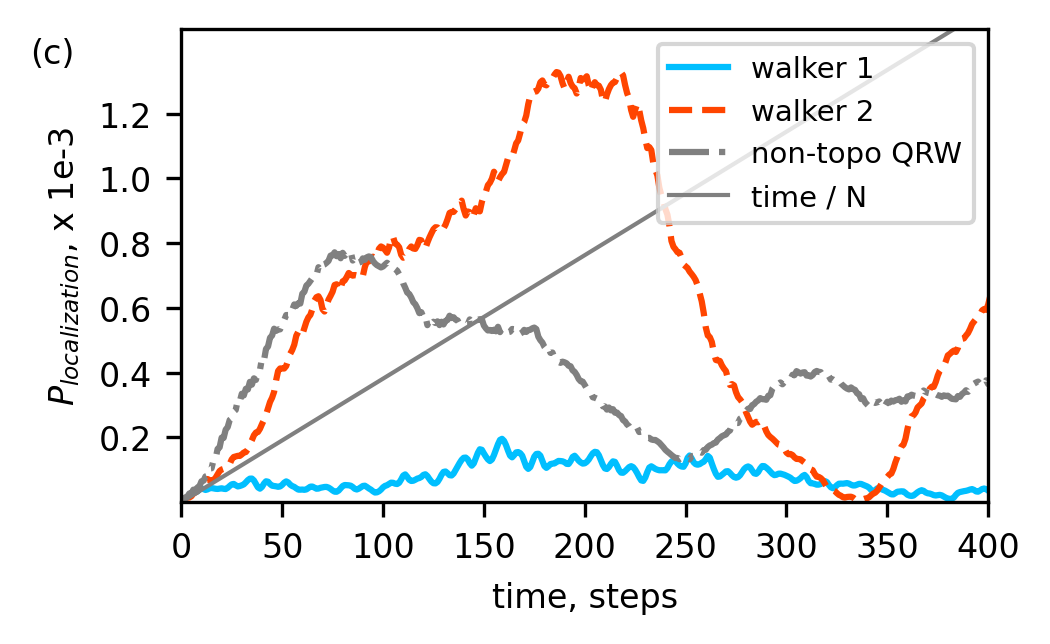

In [88]:
time_set= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]
probabilities_walker_1= [5.631003301713666e-06, 8.088121362070243e-06, 1.0460266809124514e-05, 1.5416979215875174e-05, 2.3137859843569025e-05, 2.8282495999868847e-05, 2.9272608054244786e-05, 2.973855742596862e-05, 3.281637998455377e-05, 3.8628605636498956e-05, 4.212115647467768e-05, 4.023612797686992e-05, 3.779919962262024e-05, 3.9466862498515104e-05, 4.291192647328037e-05, 4.3714939146278786e-05, 4.2520917030547126e-05, 4.136195666972856e-05, 4.086860596111042e-05, 4.188181688741403e-05, 4.2807716948685667e-05, 4.126561085387804e-05, 4.0609759867996924e-05, 4.43103380624294e-05, 5.003994314346734e-05, 5.5035442412981776e-05, 5.6313183021476054e-05, 5.219877140082031e-05, 4.865912830456815e-05, 4.991561828242468e-05, 5.2118860129205854e-05, 5.505340810073679e-05, 6.123344924445273e-05, 6.808714958120349e-05, 7.258541904597466e-05, 7.283853807068601e-05, 6.707831378071537e-05, 5.6359254699331565e-05, 4.563358048149668e-05, 4.1735048141657604e-05, 4.7195732086267616e-05, 5.743825249609016e-05, 6.451535047112684e-05, 6.309235251905118e-05, 5.587858258475457e-05, 5.087063227945918e-05, 4.9966654637349173e-05, 4.894270347727888e-05, 4.742883178818815e-05, 4.863963306659e-05, 5.339442256089998e-05, 6.019608754027214e-05, 6.424194823229142e-05, 6.090751873790964e-05, 5.4007053034450834e-05, 4.975235764055366e-05, 4.717979147393155e-05, 4.2662073094148795e-05, 3.8771603028592005e-05, 3.857850619937414e-05, 3.892841996510947e-05, 3.812882463756484e-05, 3.938862666888593e-05, 4.381132751883114e-05, 4.792720815317226e-05, 4.8241000641706754e-05, 4.489350444052791e-05, 4.15789749700385e-05, 4.207038781458768e-05, 4.440414347233226e-05, 4.576241987440454e-05, 4.6939088864092706e-05, 4.715602004165379e-05, 4.4988539079963886e-05, 4.102486742667135e-05, 3.617986308678727e-05, 3.240889902283814e-05, 3.217553187166982e-05, 3.5853831719252766e-05, 4.2693441552356804e-05, 4.9811601597444164e-05, 5.2992877211654386e-05, 5.269657891552265e-05, 5.208521113827597e-05, 5.083914779915692e-05, 4.671181648861151e-05, 4.1239531635748014e-05, 3.919822294440578e-05, 4.172924364281722e-05, 4.5991928225555176e-05, 5.001334049426001e-05, 5.083388082191685e-05, 4.693096154440072e-05, 4.239047394894339e-05, 3.8749099289959316e-05, 3.367930767579863e-05, 2.979739302037292e-05, 3.037675164177096e-05, 3.3580657641832484e-05, 3.884488543266804e-05, 4.57826926603307e-05, 5.023317832934542e-05, 5.242251844870706e-05, 5.63181867781622e-05, 6.017847821192061e-05, 5.9849333060895746e-05, 5.706184180084935e-05, 5.6037255590357505e-05, 5.99756448436532e-05, 7.019726290238615e-05, 8.20795192327765e-05, 8.578068022891857e-05, 7.843259811919185e-05, 6.92298882253609e-05, 6.552493467573894e-05, 6.62158951692024e-05, 6.926411821864843e-05, 7.274524218678984e-05, 7.45442974112756e-05, 7.79377957723807e-05, 8.4148199414303e-05, 8.618909877945486e-05, 8.056591672790538e-05, 7.14766636768326e-05, 6.331187987625606e-05, 5.851113050300968e-05, 5.799899969041162e-05, 6.236166343585849e-05, 7.210375873517327e-05, 8.442741093318532e-05, 9.341758923631995e-05, 9.47798299285063e-05, 8.944511699783413e-05, 8.336665371436297e-05, 8.24426186721293e-05, 8.846490343759107e-05, 9.952816686829915e-05, 0.00011122143830251012, 0.0001213503760606704, 0.00013083069734273243, 0.00013705983278852713, 0.00013772495979754725, 0.00013218053861942648, 0.00012042454362678199, 0.00011281101710430861, 0.00011975082002599388, 0.0001357285205763855, 0.00015208987692393635, 0.00016340138270669254, 0.00016172465843709952, 0.0001507201562594183, 0.00014067234123842174, 0.00013220207943738724, 0.00012695443271786832, 0.00013185065517209147, 0.00014549153308935657, 0.0001619043179941246, 0.0001791293743961869, 0.00019230187350789294, 0.00019561052029293564, 0.00018933623793098247, 0.00017594468697059492, 0.00015871736045653916, 0.00014368116113148632, 0.00013846194231843356, 0.00014529097759439992, 0.000153748083161627, 0.00015470369572235168, 0.00015138803712899058, 0.00014358785343393884, 0.00012668668313058637, 0.0001092961874544611, 0.00010282497770364209, 0.00010855673329451591, 0.00012402054619379358, 0.000140721291625723, 0.00014877713860843807, 0.00014952031636459562, 0.00014361537914936602, 0.00012799544374994927, 0.0001115286540481287, 0.00010598230740745457, 0.00011096393925009785, 0.00011754868572103107, 0.00011908454538752121, 0.00011959854158345507, 0.0001239141573807494, 0.00012734938095631406, 0.0001270100955298093, 0.00012618291864139965, 0.00012359196465540332, 0.0001184766677820295, 0.00011782503950676058, 0.00012675338418412512, 0.00013956275575531069, 0.00014340029559352995, 0.00013629981872890123, 0.00012825390390649598, 0.00012283896409118536, 0.0001191899256690375, 0.00011996376923920687, 0.00012455502186039573, 0.00013174133144536903, 0.0001418994325518888, 0.0001509469784765266, 0.00015548287046843797, 0.0001542929760505688, 0.00014489475042708865, 0.00012969753795601208, 0.00011465129657475519, 0.00010425187303462753, 0.00010238564850923037, 0.00010857535507984863, 0.00011839168349882893, 0.00012602871029653262, 0.0001244710610482856, 0.00011285647696919067, 9.924782087704633e-05, 9.124027287144713e-05, 9.084234312585375e-05, 9.561062981258722e-05, 0.00010200398260581775, 0.0001081804179655785, 0.00011122442823087774, 0.00010818669239086292, 0.00010023695026577046, 8.960546332119164e-05, 7.73889835283101e-05, 6.724580935384204e-05, 6.580009187169902e-05, 7.592292913815562e-05, 9.279654342334034e-05, 0.00010675049828178503, 0.00011075939834574228, 0.00010699882312795175, 0.00010273525440024863, 0.0001002233639632004, 9.850633743266853e-05, 9.864511439991573e-05, 9.838913035220999e-05, 9.835682969702917e-05, 0.0001054847463898529, 0.000117230690505321, 0.00012551855907031055, 0.00012929255950287812, 0.00012690730501085638, 0.00011896222963718168, 0.0001132774365545143, 0.00011015006273854204, 0.00010938899884773863, 0.00011946282631611826, 0.0001370669111943609, 0.0001441510190206641, 0.0001350781596400865, 0.00012305664284255246, 0.00011725272880616519, 0.00011566886374300315, 0.00011746706571427576, 0.00012167542404046712, 0.0001248484839075302, 0.00013270275255220112, 0.00014288733413293173, 0.00013760363393149443, 0.00011930066304259435, 0.0001023294032114061, 8.769689865660449e-05, 7.840183068960067e-05, 7.934963115164594e-05, 8.436801307789467e-05, 8.941894416963198e-05, 9.499391696492058e-05, 9.572020744770428e-05, 9.005089194939642e-05, 8.308868578099047e-05, 7.777896197801226e-05, 7.563239513906032e-05, 7.738020216091824e-05, 8.320307855494783e-05, 9.27426117021049e-05, 0.00010202615419399629, 0.00010785185479321856, 0.0001103944836775932, 0.00010706194600610449, 9.757948515501719e-05, 8.916903005113923e-05, 8.741729993695569e-05, 9.313371150941701e-05, 0.00010391495446020034, 0.00011161892534154337, 0.000111182748181143, 0.0001065505864414423, 0.0001010735634537442, 9.453022744258315e-05, 8.761327182775131e-05, 8.347507656185357e-05, 8.460182413095236e-05, 8.786336073900216e-05, 8.82141814548682e-05, 8.64177188002478e-05, 8.449324349547489e-05, 8.175837876777702e-05, 7.876300035399765e-05, 7.526494850650214e-05, 6.979944491545151e-05, 6.560239956888416e-05, 6.618123720155561e-05, 6.956684633264216e-05, 7.425174830663019e-05, 8.072855222878431e-05, 8.414655679502467e-05, 7.746702922895676e-05, 6.52387016128908e-05, 5.8593876234915686e-05, 5.791319436062709e-05, 5.630323119062726e-05, 5.4048154403994874e-05, 5.416391930069598e-05, 5.611792702793291e-05, 6.063955072735331e-05, 6.51600858106965e-05, 6.246097931275365e-05, 5.3529530954978316e-05, 4.603934851396726e-05, 4.317891377788261e-05, 4.582317278405653e-05, 5.2356933848383745e-05, 5.69446449493158e-05, 5.736674862046506e-05, 5.7066053760099046e-05, 5.809858317722883e-05, 5.894647371498888e-05, 5.733508924100447e-05, 5.395220849396024e-05, 5.156184753544782e-05, 5.1687164694593895e-05, 5.411552065309841e-05, 5.659238487067854e-05, 5.632458092172758e-05, 5.3674091025148066e-05, 5.079417738327288e-05, 4.8529754836359795e-05, 4.468705847228329e-05, 3.7411181993618904e-05, 3.3064539175877055e-05, 3.692549311035706e-05, 4.2483982865572275e-05, 4.277474217336181e-05, 4.038852806706418e-05, 3.823164010278623e-05, 3.5315676247671586e-05, 3.155690290253947e-05, 2.7670532676353667e-05, 2.424339560201717e-05, 2.398042522412078e-05, 2.816704628221183e-05, 3.2200820770855174e-05, 3.291549592079218e-05, 3.35367870451395e-05, 3.31333995831245e-05, 2.8343005721493506e-05, 2.273975409975217e-05, 2.0223549841114512e-05, 1.9195947292102655e-05, 2.0491311329694593e-05, 2.537601745723653e-05, 3.063048488454943e-05, 3.4455274786541145e-05, 3.6935036027242026e-05, 3.4965133170531834e-05, 3.0036669848818156e-05, 2.7531205980471e-05, 2.6644230701877995e-05, 2.4524076474977847e-05, 2.17656469004225e-05, 2.0679345838282192e-05, 2.167780905526776e-05, 2.2613756404629238e-05, 2.0982172085623485e-05, 1.7252582020354143e-05, 1.3778370879610981e-05, 1.1371366213936668e-05, 9.973050186858969e-06, 1.022641177750775e-05, 1.445074120586386e-05, 2.2518847433828165e-05, 2.8784042031627826e-05, 3.119306000228024e-05, 3.275436612040914e-05, 3.400122079075173e-05, 3.50118855446344e-05, 3.667303419442305e-05, 3.8955025970078134e-05, 4.040376908075205e-05, 3.782165582228086e-05, 3.309044475439595e-05, 3.245783255613767e-05, 3.6290772184441856e-05, 4.055403765839277e-05, 4.209944016133011e-05, 4.0032809476946945e-05, 3.572892899985928e-05, 3.096088343258144e-05, 2.973521064819103e-05, 3.587863316856948e-05, 4.423026128066159e-05, 4.7283376623669034e-05, 4.710160647828213e-05, 4.64584336305507e-05, 4.457298607670976e-05, 4.2208242742216986e-05, 3.928567644008855e-05, 3.734245842513573e-05, 3.926246843974816e-05, 4.25277414028552e-05, 4.471930511544326e-05, 4.671371803589119e-05, 4.657757404600809e-05, 4.2931414979296924e-05, 3.864061941213012e-05, 3.48641157985503e-05, 3.2168221406277326e-05, 3.2498460094983054e-05, 3.6963261858936795e-05, 4.576173501744431e-05, 5.7625404086132805e-05, 6.910010909216621e-05, 7.652386528335462e-05, 7.657168845658887e-05, 7.034495382112899e-05, 6.645743123792887e-05, 6.959743935415666e-05, 7.723986273859322e-05, 8.521719930910337e-05, 8.988736030591512e-05, 9.347278105198268e-05, 9.888441610546203e-05, 0.00010043519118084468, 9.627237952152314e-05, 9.440161369601255e-05, 9.523239961461061e-05, 9.375751412525889e-05, 9.258055190203283e-05, 9.4528231443292e-05, 9.780827530075455e-05, 9.831503774623907e-05, 9.253543526430226e-05, 8.324754856081451e-05, 7.549641596072825e-05, 6.934996247914048e-05, 6.47106592531293e-05, 6.671855789326764e-05, 7.947227402424741e-05, 9.805659729848957e-05, 0.0001104482301803122, 0.00010920044876763678, 9.957324515624999e-05, 9.195945895821389e-05, 9.115531600753166e-05, 9.392024823027636e-05, 9.609449550300709e-05, 9.980320460295809e-05, 0.00010674081104594126, 0.00011227076229080567, 0.00011318142696291922, 0.00010916068364596482, 0.00010022544788275088, 8.965852167218985e-05, 8.008427220787888e-05, 7.353416626019976e-05, 7.5544423917696e-05, 8.71401790648212e-05, 9.954348486857349e-05, 0.00010710344013847518, 0.00011034130690694888, 0.00010678659345790823, 9.728626634327254e-05, 9.070825141102939e-05, 9.310065820972959e-05, 0.00010217261547979239, 0.00011326455359989816, 0.00012560141600963606, 0.00013624664664614304, 0.00013949415813095081, 0.00013738460912378404, 0.00013197960570368112, 0.00012171737237110445, 0.0001141948218095678, 0.00011681848376167254, 0.00012353451231212107, 0.00012906070537499093, 0.00013296928241934776, 0.00013394710542579378, 0.00013331711834773513, 0.00013175784674555335, 0.00012881090367105965, 0.00012592686477747966, 0.0001231518570973956, 0.00012185180621594258, 0.00012392177007998595, 0.000127707540117713]
probabilities_walker_2= [1.0612017573339157e-05, 1.0501667124398682e-05, 1.1938260004072788e-05, 1.49025157580247e-05, 1.45247555170599e-05, 1.817477144745464e-05, 2.6638593365105583e-05, 3.0079116805204816e-05, 3.416106169707613e-05, 4.448119172960823e-05, 5.143415670768949e-05, 5.5479836415143325e-05, 6.51108008104701e-05, 7.140901388982269e-05, 6.804265844122373e-05, 6.544800764443138e-05, 6.875149063639658e-05, 7.538920067559537e-05, 8.553903531653782e-05, 9.628124970252226e-05, 0.00010076994440185417, 0.00010290786969052937, 0.00010771033393752207, 0.00011066199127353864, 0.0001179162623833913, 0.0001321049010303554, 0.00013950888005161632, 0.0001412642976719231, 0.00014306862221297786, 0.00014293808986640182, 0.0001476158359818008, 0.00015351223281238343, 0.000154802902550377, 0.0001635336913405794, 0.00017842011097083445, 0.00019157027462069688, 0.0002065840755654909, 0.0002150200302342782, 0.0002167420002093753, 0.0002266665966861474, 0.00024113421201553013, 0.0002541233862371224, 0.0002700362880688844, 0.00028985687046933394, 0.00030959998869335253, 0.00032241406513562593, 0.0003406386032052991, 0.00037617752290085245, 0.00040540540092935814, 0.00041305845678734254, 0.00041298896158998996, 0.0004128664946102916, 0.00042050755819313107, 0.0004396316649815355, 0.00045844415529937825, 0.0004701939561415559, 0.0004864614353368748, 0.0005140842802155339, 0.0005265494420274909, 0.000515610208460324, 0.0005175624086410552, 0.0005378155290514391, 0.0005572038716124893, 0.0005707442471401391, 0.0005785924598757428, 0.0005969928031957896, 0.0006228126186500336, 0.0006331094150944467, 0.0006361106307535082, 0.0006249475463188397, 0.0005960888105900994, 0.0005888868452756588, 0.0006074665771306558, 0.0006257476014140885, 0.000637273987285283, 0.0006499117474681235, 0.0006708779947724609, 0.0006731228528159255, 0.0006536377447230393, 0.0006611354127296932, 0.000682093425743165, 0.0006851336997972993, 0.0006954239477263981, 0.0007078969127509629, 0.0007029378255463418, 0.0006997565198810998, 0.0007017416353806212, 0.0007003811468543376, 0.0006970523146178719, 0.0006908750443533873, 0.0006985897983145741, 0.0007266555557540933, 0.0007440074211544424, 0.0007435503822689963, 0.0007505282541065339, 0.0007582704275615095, 0.000754631293289445, 0.0007625806356595512, 0.0007828134037811772, 0.0007898881088146601, 0.0007865261610785115, 0.0007789714274154048, 0.0007704899484226904, 0.0007865291956948705, 0.0008187739023846844, 0.0008193390965069411, 0.0007987980839047457, 0.0007954940677312112, 0.0007874898397991358, 0.0007643040284790121, 0.0007551196958352313, 0.0007581683911975284, 0.0007656043663759341, 0.0007820641580094846, 0.0007897953284790394, 0.000783643498486395, 0.0007824204747197258, 0.0007935224179236438, 0.0008102594670925985, 0.0008087658355600053, 0.0007875230793145194, 0.0007838823653006958, 0.0008018896802370414, 0.0008174939930009446, 0.0008307572103472031, 0.0008430405862736041, 0.0008492761937701038, 0.0008486133372317481, 0.0008401176301709616, 0.0008365422102698341, 0.0008458895596120487, 0.0008574378644173549, 0.0008742308282753556, 0.0008934166918404974, 0.0008964837199468211, 0.000896559194246814, 0.0009050430223064524, 0.000910316807023833, 0.0009234661438386803, 0.0009313777505672589, 0.0009050727358380323, 0.0008854906353071522, 0.0008979039902216667, 0.0008959275780596654, 0.0008781728727900362, 0.0008882044420758129, 0.0009080212660864467, 0.000899980470554594, 0.0008982797683848413, 0.0009274478435112699, 0.0009476430583219515, 0.0009589229987828164, 0.0009792700412491338, 0.0009867545969393175, 0.0009995984841759183, 0.0010207180818439844, 0.0010074513020578999, 0.0009909904892658496, 0.0010036626436444318, 0.0010135649680167596, 0.0010203051424391325, 0.0010418033804718138, 0.0010636211137378976, 0.0010668546011999753, 0.0010654448748821247, 0.001085784591081332, 0.00110839464108111, 0.0011174266305734105, 0.0011401580837021195, 0.0011656184012051607, 0.0011743519665101964, 0.0011942123848930027, 0.0012294375033355012, 0.0012550997058557692, 0.0012661992202829318, 0.0012688580477110787, 0.0012687664149486583, 0.0012775968793723345, 0.0012969945932328282, 0.0013026616787629097, 0.001290009411659843, 0.001287591198086737, 0.0012966664329149525, 0.0013016127105458224, 0.0013085068815939683, 0.0013207045549503622, 0.0013285722620142754, 0.0013267871577718813, 0.0013161591339843326, 0.0012939931253643099, 0.001278042490110222, 0.0012972283997336217, 0.0013141333693919136, 0.001294860025544578, 0.0012838748120186487, 0.0012787599178724516, 0.0012624252186660147, 0.0012809793503174925, 0.001310279635874365, 0.0013051186165105204, 0.0013084632481123015, 0.0013156581994782713, 0.0012875992100164137, 0.0012686397137232942, 0.0012869075364581512, 0.0012973295318574603, 0.0012882027919547104, 0.001286479001616236, 0.0012738942812452218, 0.0012416637458486075, 0.0012360415806975872, 0.001259469283911074, 0.0012761804560567891, 0.0012882874717339674, 0.0012956548733716925, 0.0012977344787660436, 0.0013107241163708681, 0.0013238910259742588, 0.0013276737848892538, 0.0013187962975994376, 0.0012886265453838305, 0.0012636551066225045, 0.0012470499028778388, 0.0012116014902604905, 0.0011903793303968773, 0.0012118525332776677, 0.0012306021101195143, 0.0012115553504962332, 0.001179498642346166, 0.0011552604827628882, 0.0011223007425707518, 0.0010936956730418451, 0.001097045101770728, 0.001087776066581421, 0.0010466454016087117, 0.001026243205969708, 0.0010098881215737008, 0.0009708155158738655, 0.000947384034127237, 0.0009304859565420862, 0.0009052106368891429, 0.0008880391322613268, 0.0008531622826192442, 0.0008066980019969429, 0.0007888633622033769, 0.0007811001224746156, 0.0007721471189221395, 0.0007705942713996424, 0.0007550314766357653, 0.0007339534952672292, 0.0007286619085220291, 0.0007230028383225864, 0.0007122951912828758, 0.0007045978945435245, 0.0006961711572502499, 0.0006856740763240569, 0.0006687628186249797, 0.0006451907141580761, 0.0006204224282882412, 0.0005844124807285365, 0.000540056871284684, 0.0005148563943478289, 0.0005100150983226909, 0.000494997586755643, 0.0004622277322633853, 0.0004391681315540582, 0.0004376431738129837, 0.00043611728484542646, 0.0004225203965858563, 0.00041265060434353694, 0.0004048579673310541, 0.0003813759081286343, 0.00036189072409575766, 0.0003647659155322626, 0.0003609116281322115, 0.0003396364970356514, 0.0003246653467047429, 0.00031764875251248843, 0.00030911041118775553, 0.0002948197294644314, 0.00027713317909473453, 0.00026299708122853107, 0.0002484658924501026, 0.00023918413799594427, 0.0002442544362303639, 0.0002480594969087624, 0.0002468743183144155, 0.00025122592318449466, 0.00024919784694846204, 0.00023462458084091007, 0.00021868863826104957, 0.00020748850054418255, 0.00020136594068324683, 0.0001963954193622158, 0.00019044799100146711, 0.0001839822249510254, 0.00017783903175225784, 0.00017611162099967116, 0.0001751816708033134, 0.00016580284582056772, 0.0001531897005274629, 0.000148187650972836, 0.00014880786961484898, 0.00014560061682641177, 0.00013829077068893634, 0.00013364793858567563, 0.0001332987185147982, 0.00013204697151176416, 0.00012692349742149793, 0.00012227721739575928, 0.0001167137164884906, 0.0001067208004673442, 0.00010156847492550174, 9.881641320133084e-05, 8.73548424653105e-05, 7.879879757855081e-05, 7.803118461507428e-05, 7.433875296468647e-05, 6.819347167065611e-05, 5.796814163483933e-05, 4.7007499197246784e-05, 4.441699908228516e-05, 4.278906070791261e-05, 3.7777176389503373e-05, 3.419154186055425e-05, 2.7954354180846595e-05, 2.266155036654023e-05, 1.98616177362214e-05, 1.5381657547164457e-05, 1.4240249988526386e-05, 1.609576746262658e-05, 1.663428299577863e-05, 1.678395219327511e-05, 1.430244339305943e-05, 9.369748602436369e-06, 8.690570419629438e-06, 8.185283515571382e-06, 7.0968273436133376e-06, 8.877992146740615e-06, 1.108499029022133e-05, 1.2239947731396099e-05, 1.5433849536803517e-05, 2.1406033536724746e-05, 2.6224846729590344e-05, 2.9411597904513606e-05, 3.546612389608063e-05, 4.543573473141228e-05, 5.5096119117407136e-05, 6.0487987736398876e-05, 6.635632114121991e-05, 7.789789681809829e-05, 8.524898224275674e-05, 8.849969426495991e-05, 0.0001028696808967572, 0.0001230158272382083, 0.00013944434485465697, 0.00015844059803511647, 0.00017205894972284014, 0.00017758675647996925, 0.00019564777774681437, 0.0002263866885546476, 0.00025220344556694835, 0.00026535366622352553, 0.00026843660077750396, 0.0002771797063996653, 0.0002926617526248362, 0.0002985784870307035, 0.0003046234201643979, 0.0003203644551652646, 0.00032802500703243065, 0.0003337010260259286, 0.0003499074632926717, 0.00035649618908718925, 0.00035620328670847844, 0.00037082632835338185, 0.0003909316667040813, 0.0004057335593340592, 0.000414517669837563, 0.00041939174495138955, 0.00043520370872249226, 0.0004534157886801238, 0.00045785420108626217, 0.000463912413147564, 0.0004683281009266733, 0.00046403957307507407, 0.0004765213225156686, 0.0004991559193302421, 0.0005043837938767876, 0.0005059524601288804, 0.0005147054794655797, 0.000522268818282128, 0.0005347488944122169, 0.0005496800127988337, 0.0005581844404198228, 0.0005659452596361427, 0.0005725107126869481, 0.0005794579918029278, 0.000592421649842829, 0.0005966314165381412, 0.0005940811131901916, 0.0006102180992544919, 0.0006358486553592715, 0.0006453727040687333, 0.0006459923635665652, 0.000652913355407387, 0.0006610556528733807, 0.0006681170654168983, 0.0006859226521672739, 0.0007072461494750543, 0.0007155333383570647, 0.0007183955545120346, 0.0007187406624930641, 0.0007162152208426893, 0.0007251854631278827, 0.0007390482994781854, 0.0007434792317614263, 0.0007432863995028789, 0.0007500571898867666, 0.0007700274237032402, 0.0007798346571792771, 0.000768647581175949, 0.0007707926786797155, 0.000785358307165638, 0.0007837112524248117, 0.0007715098709411712, 0.0007586144077522234, 0.0007605046865950137, 0.0007870706590956746, 0.0008094969333598998, 0.0008172772756787785, 0.0008250328761083806, 0.0008291456346539792, 0.0008309970633886286, 0.0008262665518759518, 0.0008143296576800689, 0.0008271120777780559, 0.0008416453134841469, 0.0008071748907594343, 0.0007745152045331624, 0.0007730778055977317, 0.0007493219900647483, 0.0007171349666753948, 0.0007117502679617682, 0.0007123034832191669, 0.000717068162434213, 0.0007287136265037625, 0.0007354309622791267, 0.0007424456768941191, 0.000753893243953384, 0.0007735570501645517, 0.0007826690232019102, 0.0007678005053973592, 0.0007724387845630123, 0.0007973409546671347, 0.0008092727333826249, 0.0008175142304606075, 0.0008108260196362559, 0.0007946009420973658, 0.0007980521668711965, 0.0007929492319113915, 0.0007811980218924976, 0.0007957150613544609, 0.0008118323279895061, 0.0008135837366340006, 0.0008216821459949323, 0.000846644590138018, 0.0008729485778499986, 0.000869688653106283, 0.0008448934103644371, 0.0008322141105300661, 0.0008374445789164622, 0.0008401977223614817, 0.0008264556755691384, 0.0008151864638730036, 0.0008118629895101883, 0.0008028910624459341, 0.0008036709270997331, 0.0008209735933532658, 0.0008457465534145528, 0.0008632456886994069, 0.0008584961566806314, 0.0008685308270970001, 0.0008923156125782394, 0.0008890757595275769, 0.0009063162022921994, 0.0009379411579397077, 0.0009302316564978307, 0.0009431836945656884, 0.000976547726392933, 0.0009790706975159446, 0.0009971639998563023, 0.0010288114666326363, 0.0010441441432194783, 0.0010597669862327285, 0.001051352238107599, 0.001029343829139859, 0.0010332955007634978, 0.0010409352877025152, 0.0010388852546164265, 0.0010356891474052163]
time =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
probabilities_gro =  [3.814697265624999e-06, 4.615682687508406e-06, 1.4830663719946974e-05, 1.6763447165635e-05, 2.6998019272025942e-05, 2.691834817415081e-05, 3.874349845651184e-05, 3.548166756082477e-05, 4.5348478197872976e-05, 4.8615612553227645e-05, 6.449267460472037e-05, 6.607186627909816e-05, 7.940526328963586e-05, 8.188029293941908e-05, 0.00010415856404736743, 0.00010468815531577134, 0.00013062598090972144, 0.00013415828268661392, 0.0001643708359776573, 0.00016939655010927857, 0.00019932488504776345, 0.00019844383128310303, 0.00022392646564704623, 0.00023188132357437652, 0.00025381358427436796, 0.0002588355833691579, 0.00027962984280857097, 0.00028512903810719715, 0.00031568504592628546, 0.000311314760402854, 0.0003350153436726861, 0.00032975079821335356, 0.0003502538145231145, 0.0003479625110681887, 0.0003715661301454957, 0.00036298567359520747, 0.0003825032867121336, 0.0003776707196084768, 0.0004042999417006824, 0.0004087775121746207, 0.00044419853533170565, 0.00043772924016016447, 0.00047346987306463693, 0.00048087935814036104, 0.0005081748191792881, 0.0005145039056803534, 0.0005358261761875461, 0.0005291207111587863, 0.0005334436400176129, 0.0005338920443087697, 0.0005500326891087193, 0.0005625520455555907, 0.0005779823843049818, 0.0005780199508718975, 0.0005963126093415405, 0.0005939918943781684, 0.0006107555555651723, 0.0006061962685754697, 0.0006145440112907052, 0.0006134561873799688, 0.0006441621466288476, 0.0006497108412934946, 0.0006690910468730876, 0.0006747673709070547, 0.0006833323404691122, 0.0006923248070714536, 0.0007009896123982796, 0.0007002008290501743, 0.0007257671376383163, 0.0007165470419173238, 0.0007322554379478182, 0.0007344116571730549, 0.0007394365741924273, 0.0007454405313156667, 0.0007615979006307973, 0.0007620802074579632, 0.0007718168930428171, 0.0007598328197763139, 0.0007664393351100911, 0.0007534754998262067, 0.0007703066602202831, 0.0007608007193027422, 0.000768751507317289, 0.0007663091646679562, 0.0007727590336254484, 0.000746488756973369, 0.0007545547325357536, 0.0007409755501214751, 0.0007397402280102923, 0.0007420832600173969, 0.0007530556897063567, 0.0007482938406532083, 0.0007565785603921315, 0.0007591250455824108, 0.0007570293135574493, 0.0007451510364679622, 0.0007374448255192922, 0.000732055826037182, 0.0007286957181396683, 0.0007250613276042748, 0.0007278795125824723, 0.0007340103074239279, 0.0007395640480288874, 0.0007331994029911243, 0.0007323853795346489, 0.000721058372167986, 0.000719802230961827, 0.0007150356647840131, 0.0007040548993574147, 0.0006965085028438907, 0.0006760586311496882, 0.0006627255019511899, 0.0006475202933224947, 0.0006430598765806783, 0.0006322294855956005, 0.0006178646313568683, 0.0006113212179935396, 0.0005995295852177518, 0.0005840018301138384, 0.0005868623254604338, 0.0005712293038290098, 0.0005754357896266504, 0.0005467943237236896, 0.0005608865379194247, 0.0005501865563054074, 0.0005573272359358152, 0.0005534047761753731, 0.0005585416774577227, 0.000546921494684994, 0.000557309014237667, 0.0005489662151097915, 0.0005600719542211354, 0.0005629883577819441, 0.0005759747014066165, 0.0005688127909774613, 0.0005711221295480911, 0.0005636631552929811, 0.0005614052838817255, 0.0005495035916420799, 0.0005501616274286744, 0.0005495005067552011, 0.0005488368324111583, 0.000549268196388332, 0.0005645525075208218, 0.0005556467166885082, 0.0005637878215214244, 0.0005640364895223964, 0.0005626442941335667, 0.000565130249473464, 0.0005650272485750358, 0.0005456724940853804, 0.0005369783136577851, 0.0005303036957116686, 0.0005319629251957976, 0.0005287107335636358, 0.0005325828084573171, 0.0005278654125933464, 0.0005416788847207085, 0.0005253089370562074, 0.0005363943937680405, 0.0005293675593623692, 0.0005275031273543232, 0.0005247852313233049, 0.0005264780986786166, 0.000534989097089644, 0.0005342359456112934, 0.0005199299567099951, 0.0005207189665386923, 0.0005205069097828439, 0.0005242842125956556, 0.0005322298452805027, 0.0005258223716609004, 0.0005316015214708644, 0.0005323378110817183, 0.0005369661560930476, 0.0005392888196565896, 0.0005346402274488709, 0.0005111429334174494, 0.0005004415489512665, 0.0004930073954736551, 0.00048000913296959453, 0.000472360303207172, 0.00047887461813069074, 0.00046144172979267425, 0.0004622195085949005, 0.00044586512470902527, 0.00043881946381558323, 0.00043300369159157915, 0.00043027685218100875, 0.0004339911516586571, 0.00043206396120046156, 0.0004289856290975241, 0.0004214147011734441, 0.00041988560668836203, 0.00040714292883588677, 0.0004024559268776389, 0.00039305464978400063, 0.00038040270604574927, 0.00037339302341969974, 0.0003723433433965882, 0.0003615916214852581, 0.00035152098566119, 0.00034618836132110936, 0.00033859221902042883, 0.00032394517682132664, 0.00032252129540117014, 0.0003197184143045131, 0.0003146230417633893, 0.00030841323890169064, 0.00029587748527934183, 0.00029559319234081767, 0.00028597406621622335, 0.00029234506954724617, 0.00028354381902960464, 0.0002872519220931244, 0.0002764055461237149, 0.0002768535488696457, 0.00026915900676486334, 0.00026604599632167373, 0.0002535567331415271, 0.0002493871799891485, 0.0002399669844282222, 0.00023479529724569333, 0.00022479009134099853, 0.00022676784879620087, 0.00022689745364780594, 0.00022969344470890642, 0.00021670076754357498, 0.00021777820728702577, 0.00020770307273322645, 0.00020266498268636752, 0.0001982472273760306, 0.00019862612939182707, 0.00019372637361857485, 0.00019215344225567176, 0.00019208828377261961, 0.00018810922470018944, 0.0001834735568915417, 0.00017635846108565096, 0.00016950645156155696, 0.00016157694574938665, 0.00015604334634119408, 0.00015103645931349483, 0.0001455795743968178, 0.00014062607790267957, 0.0001363103623208599, 0.0001364285395046364, 0.00013281061918219686, 0.00013702702885822252, 0.0001350494238152917, 0.00013100719191511774, 0.00013458878706744116, 0.0001321443463469092, 0.0001420869779014038, 0.00014313558133956846, 0.00014826220136408965, 0.0001466334860835944, 0.00015542065129211716, 0.00015277229520592494, 0.0001610384773232339, 0.00016181013454358179, 0.00017025201426834418, 0.00017519302550664272, 0.00017766707709153786, 0.00018237521928127492, 0.0001841330738953564, 0.0001933532991855376, 0.00019800421255988365, 0.0002035592847937192, 0.00020661149422795112, 0.00020896097103347957, 0.00021706697708473435, 0.00022148472035941525, 0.0002376682904978517, 0.0002378665755384577, 0.0002450240242424707, 0.00024452032177691763, 0.0002579732278573688, 0.0002612864179682712, 0.0002714074424329581, 0.0002815251169482278, 0.0002887446471946086, 0.00028795668561277366, 0.00029958984681829995, 0.00030302141865443913, 0.0003103572374861178, 0.0003142668427571259, 0.0003214207166649754, 0.00031826929042574285, 0.0003177975308733788, 0.0003163095890451067, 0.00032876671113982414, 0.0003301454878603187, 0.0003503342849480064, 0.00035887327878953514, 0.00036809499282281703, 0.0003649820353651104, 0.00036982203798542216, 0.0003641167199162015, 0.00037075911273413384, 0.0003709011570233683, 0.0003786441857763107, 0.0003801296288092559, 0.00039347959870972537, 0.0003924387670564705, 0.00040483141608243785, 0.0004011798990093355, 0.00039703676564363283, 0.0004005785737707141, 0.0004014487670176405, 0.0003910038983355532, 0.0003920822363951453, 0.00038805446930877943, 0.000392644398276642, 0.00040186837507171327, 0.0004052893818823959, 0.00040264415861327146, 0.00040187618597498987, 0.0003911313821180656, 0.0003925876274462927, 0.00038908390496858404, 0.000389399017745713, 0.0003786382309650767, 0.0003792019052251403, 0.0003746919517469178, 0.0003712279232484167, 0.0003752011302427398, 0.0003663458074641986, 0.0003604955385294524, 0.00035511509095084053, 0.0003509376009434112, 0.0003483607070562918, 0.00035441306949857403, 0.0003495095104268327, 0.0003468277129297241, 0.0003366323291080997, 0.0003335307466190904, 0.0003184600622399513, 0.00032106154006609653, 0.00030844756776346655, 0.0003016661394726533, 0.00029542689037272124, 0.0003079360418902251, 0.0003093539938838469, 0.00030663056685849104, 0.00030849403203399783, 0.0003110728634847949, 0.00030322581552843993, 0.0003115223216651803, 0.00029945749020072267, 0.0003101907621399959, 0.000307606277188808, 0.0003136530652521765, 0.00031089732668840644, 0.0003149625272634774, 0.0003159785899806747, 0.0003195747570366314, 0.0003100825310173426, 0.00031429603481213135, 0.0003111037818563398, 0.00032658229463795337, 0.00032667576617713824, 0.0003320680587941392, 0.0003294542342504866, 0.0003282224852761513, 0.00033080804917201675, 0.0003330294707842292, 0.00033639461600116485, 0.0003449595657464196, 0.00034078399437260085, 0.00033791916011800653, 0.00033647216188735496, 0.0003268217915930845, 0.00033057755572940117, 0.0003333916586833709, 0.0003300366974104774, 0.0003290140437423782, 0.00032543648872325655, 0.00032994116031076807, 0.0003277180307420093, 0.00032897465770725677, 0.00032411793311745, 0.00031921776732761085, 0.00031855892559824034, 0.0003176416821738449, 0.00032782260842032, 0.0003253818962986266, 0.00033399518415622864, 0.0003386294699216412, 0.00034573567264571393, 0.00034064180596861783, 0.00034766067853634247, 0.0003520965944449217, 0.0003659770209085798, 0.0003696694460324648, 0.0003724471287022021, 0.0003653014487239828, 0.00036634983415119167, 0.0003629019516644755, 0.0003763995736913352, 0.00036464025368883205, 0.0003626195091604642, 0.00035845041441000724, 0.00036411272621379525, 0.0003592032855287615, 0.00035569406827039757, 0.00036272796395848343, 0.0003583174918695577, 0.00036408775561015737, 0.0003647198782308284, 0.00036640877584893743, 0.00036706584679468187, 0.0003776601940979772, 0.00038156390984473224, 0.00039074396539294596, 0.0003917281441242368, 0.00038232094404426703, 0.000377025995535307, 0.0003814790689621063, 0.0003783442660785604, 0.0003850816425138476, 0.0003859334843259012, 0.0003876539925815883, 0.00038389824181828255, 0.00037739510945414485, 0.00037369792741075245, 0.00037416348792944983, 0.00037156202367104427, 0.0003668224656029363, 0.00036571617622056834, 0.00036907380012091737, 0.000370813345798007, 0.00036488304469874556, 0.00037463083319762, 0.0003714205337161282, 0.00037088618669827453, 0.000363943819758064, 0.00036542175909853544, 0.00036617917880236604, 0.00036628632436847415, 0.00036430254429826325, 0.0003645946526894557, 0.0003685178465966819, 0.00037263054151924897, 0.0003760616458331472, 0.00038513826747006133, 0.0003882214501908047, 0.000394538367973391, 0.000401356268013367, 0.00040612842060614406, 0.0004174034234386845, 0.0004110898530663751, 0.00041796637698164737, 0.00042853846002922463, 0.0004325043419852616, 0.00044060411699967236, 0.0004386826917875455, 0.0004279460752500007, 0.00042952230788839577, 0.0004391115247357422, 0.00044741965922797555, 0.0004494327778138133, 0.0004481234176551436, 0.000457170329128406, 0.00045727729896017874, 0.0004625829408367736, 0.0004600980271318449, 0.00045306626248969417, 0.00045095641762882564, 0.00045300247121303017, 0.0004588794482981079, 0.0004518640283342285, 0.00045959050232685417, 0.0004518245466044867, 0.00045419100539000675, 0.0004394424868629138, 0.0004481411069409151, 0.00043040860583575056, 0.00042933077838532095, 0.0004159013887417005, 0.00042037956495573825, 0.00041808639240997417, 0.00042125919490915674, 0.0004224971832351382, 0.00042985686138288256, 0.00043137139337040315, 0.00043617183475362333, 0.0004441375573503079, 0.000450888666667265, 0.00045102988013193346, 0.0004548898853649281, 0.00045135391268310725, 0.0004475103105093767, 0.00046068116547735513, 0.0004637705203335644, 0.0004620089901154372, 0.0004549893107117118, 0.0004600109455627322, 0.0004550299150069758, 0.00047316830668638293, 0.0004764642650329368]

sizex = 512
sizey = 512

fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
#fig.subplots_adjust(bottom = 0.2, top=0.98, left=0.12, right=0.99)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)

plt.plot(time_set, probabilities_walker_1, color='deepskyblue', label = 'walker 1')

plt.plot(time_set, probabilities_walker_2, '--', color='orangered', label = 'walker 2')

plt.xlabel('time, steps', fontsize=8)
plt.ylabel(r'$P_{localization}$, x 1e-3', fontsize=8)


#plt.ylim(0.0, probabilities[0:200][np.argmax(probabilities[0:200])]+0.0005)

oracle = [2]
#m,p = simul_Grover_disordered(9,oracle,500, disorder_strength = 0.7)
m =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
p =  [3.814697265624999e-06, 4.615682687508406e-06, 1.4830663719946974e-05, 1.6763447165635e-05, 2.6998019272025942e-05, 2.691834817415081e-05, 3.874349845651184e-05, 3.548166756082477e-05, 4.5348478197872976e-05, 4.8615612553227645e-05, 6.449267460472037e-05, 6.607186627909816e-05, 7.940526328963586e-05, 8.188029293941908e-05, 0.00010415856404736743, 0.00010468815531577134, 0.00013062598090972144, 0.00013415828268661392, 0.0001643708359776573, 0.00016939655010927857, 0.00019932488504776345, 0.00019844383128310303, 0.00022392646564704623, 0.00023188132357437652, 0.00025381358427436796, 0.0002588355833691579, 0.00027962984280857097, 0.00028512903810719715, 0.00031568504592628546, 0.000311314760402854, 0.0003350153436726861, 0.00032975079821335356, 0.0003502538145231145, 0.0003479625110681887, 0.0003715661301454957, 0.00036298567359520747, 0.0003825032867121336, 0.0003776707196084768, 0.0004042999417006824, 0.0004087775121746207, 0.00044419853533170565, 0.00043772924016016447, 0.00047346987306463693, 0.00048087935814036104, 0.0005081748191792881, 0.0005145039056803534, 0.0005358261761875461, 0.0005291207111587863, 0.0005334436400176129, 0.0005338920443087697, 0.0005500326891087193, 0.0005625520455555907, 0.0005779823843049818, 0.0005780199508718975, 0.0005963126093415405, 0.0005939918943781684, 0.0006107555555651723, 0.0006061962685754697, 0.0006145440112907052, 0.0006134561873799688, 0.0006441621466288476, 0.0006497108412934946, 0.0006690910468730876, 0.0006747673709070547, 0.0006833323404691122, 0.0006923248070714536, 0.0007009896123982796, 0.0007002008290501743, 0.0007257671376383163, 0.0007165470419173238, 0.0007322554379478182, 0.0007344116571730549, 0.0007394365741924273, 0.0007454405313156667, 0.0007615979006307973, 0.0007620802074579632, 0.0007718168930428171, 0.0007598328197763139, 0.0007664393351100911, 0.0007534754998262067, 0.0007703066602202831, 0.0007608007193027422, 0.000768751507317289, 0.0007663091646679562, 0.0007727590336254484, 0.000746488756973369, 0.0007545547325357536, 0.0007409755501214751, 0.0007397402280102923, 0.0007420832600173969, 0.0007530556897063567, 0.0007482938406532083, 0.0007565785603921315, 0.0007591250455824108, 0.0007570293135574493, 0.0007451510364679622, 0.0007374448255192922, 0.000732055826037182, 0.0007286957181396683, 0.0007250613276042748, 0.0007278795125824723, 0.0007340103074239279, 0.0007395640480288874, 0.0007331994029911243, 0.0007323853795346489, 0.000721058372167986, 0.000719802230961827, 0.0007150356647840131, 0.0007040548993574147, 0.0006965085028438907, 0.0006760586311496882, 0.0006627255019511899, 0.0006475202933224947, 0.0006430598765806783, 0.0006322294855956005, 0.0006178646313568683, 0.0006113212179935396, 0.0005995295852177518, 0.0005840018301138384, 0.0005868623254604338, 0.0005712293038290098, 0.0005754357896266504, 0.0005467943237236896, 0.0005608865379194247, 0.0005501865563054074, 0.0005573272359358152, 0.0005534047761753731, 0.0005585416774577227, 0.000546921494684994, 0.000557309014237667, 0.0005489662151097915, 0.0005600719542211354, 0.0005629883577819441, 0.0005759747014066165, 0.0005688127909774613, 0.0005711221295480911, 0.0005636631552929811, 0.0005614052838817255, 0.0005495035916420799, 0.0005501616274286744, 0.0005495005067552011, 0.0005488368324111583, 0.000549268196388332, 0.0005645525075208218, 0.0005556467166885082, 0.0005637878215214244, 0.0005640364895223964, 0.0005626442941335667, 0.000565130249473464, 0.0005650272485750358, 0.0005456724940853804, 0.0005369783136577851, 0.0005303036957116686, 0.0005319629251957976, 0.0005287107335636358, 0.0005325828084573171, 0.0005278654125933464, 0.0005416788847207085, 0.0005253089370562074, 0.0005363943937680405, 0.0005293675593623692, 0.0005275031273543232, 0.0005247852313233049, 0.0005264780986786166, 0.000534989097089644, 0.0005342359456112934, 0.0005199299567099951, 0.0005207189665386923, 0.0005205069097828439, 0.0005242842125956556, 0.0005322298452805027, 0.0005258223716609004, 0.0005316015214708644, 0.0005323378110817183, 0.0005369661560930476, 0.0005392888196565896, 0.0005346402274488709, 0.0005111429334174494, 0.0005004415489512665, 0.0004930073954736551, 0.00048000913296959453, 0.000472360303207172, 0.00047887461813069074, 0.00046144172979267425, 0.0004622195085949005, 0.00044586512470902527, 0.00043881946381558323, 0.00043300369159157915, 0.00043027685218100875, 0.0004339911516586571, 0.00043206396120046156, 0.0004289856290975241, 0.0004214147011734441, 0.00041988560668836203, 0.00040714292883588677, 0.0004024559268776389, 0.00039305464978400063, 0.00038040270604574927, 0.00037339302341969974, 0.0003723433433965882, 0.0003615916214852581, 0.00035152098566119, 0.00034618836132110936, 0.00033859221902042883, 0.00032394517682132664, 0.00032252129540117014, 0.0003197184143045131, 0.0003146230417633893, 0.00030841323890169064, 0.00029587748527934183, 0.00029559319234081767, 0.00028597406621622335, 0.00029234506954724617, 0.00028354381902960464, 0.0002872519220931244, 0.0002764055461237149, 0.0002768535488696457, 0.00026915900676486334, 0.00026604599632167373, 0.0002535567331415271, 0.0002493871799891485, 0.0002399669844282222, 0.00023479529724569333, 0.00022479009134099853, 0.00022676784879620087, 0.00022689745364780594, 0.00022969344470890642, 0.00021670076754357498, 0.00021777820728702577, 0.00020770307273322645, 0.00020266498268636752, 0.0001982472273760306, 0.00019862612939182707, 0.00019372637361857485, 0.00019215344225567176, 0.00019208828377261961, 0.00018810922470018944, 0.0001834735568915417, 0.00017635846108565096, 0.00016950645156155696, 0.00016157694574938665, 0.00015604334634119408, 0.00015103645931349483, 0.0001455795743968178, 0.00014062607790267957, 0.0001363103623208599, 0.0001364285395046364, 0.00013281061918219686, 0.00013702702885822252, 0.0001350494238152917, 0.00013100719191511774, 0.00013458878706744116, 0.0001321443463469092, 0.0001420869779014038, 0.00014313558133956846, 0.00014826220136408965, 0.0001466334860835944, 0.00015542065129211716, 0.00015277229520592494, 0.0001610384773232339, 0.00016181013454358179, 0.00017025201426834418, 0.00017519302550664272, 0.00017766707709153786, 0.00018237521928127492, 0.0001841330738953564, 0.0001933532991855376, 0.00019800421255988365, 0.0002035592847937192, 0.00020661149422795112, 0.00020896097103347957, 0.00021706697708473435, 0.00022148472035941525, 0.0002376682904978517, 0.0002378665755384577, 0.0002450240242424707, 0.00024452032177691763, 0.0002579732278573688, 0.0002612864179682712, 0.0002714074424329581, 0.0002815251169482278, 0.0002887446471946086, 0.00028795668561277366, 0.00029958984681829995, 0.00030302141865443913, 0.0003103572374861178, 0.0003142668427571259, 0.0003214207166649754, 0.00031826929042574285, 0.0003177975308733788, 0.0003163095890451067, 0.00032876671113982414, 0.0003301454878603187, 0.0003503342849480064, 0.00035887327878953514, 0.00036809499282281703, 0.0003649820353651104, 0.00036982203798542216, 0.0003641167199162015, 0.00037075911273413384, 0.0003709011570233683, 0.0003786441857763107, 0.0003801296288092559, 0.00039347959870972537, 0.0003924387670564705, 0.00040483141608243785, 0.0004011798990093355, 0.00039703676564363283, 0.0004005785737707141, 0.0004014487670176405, 0.0003910038983355532, 0.0003920822363951453, 0.00038805446930877943, 0.000392644398276642, 0.00040186837507171327, 0.0004052893818823959, 0.00040264415861327146, 0.00040187618597498987, 0.0003911313821180656, 0.0003925876274462927, 0.00038908390496858404, 0.000389399017745713, 0.0003786382309650767, 0.0003792019052251403, 0.0003746919517469178, 0.0003712279232484167, 0.0003752011302427398, 0.0003663458074641986, 0.0003604955385294524, 0.00035511509095084053, 0.0003509376009434112, 0.0003483607070562918, 0.00035441306949857403, 0.0003495095104268327, 0.0003468277129297241, 0.0003366323291080997, 0.0003335307466190904, 0.0003184600622399513, 0.00032106154006609653, 0.00030844756776346655, 0.0003016661394726533, 0.00029542689037272124, 0.0003079360418902251, 0.0003093539938838469, 0.00030663056685849104, 0.00030849403203399783, 0.0003110728634847949, 0.00030322581552843993, 0.0003115223216651803, 0.00029945749020072267, 0.0003101907621399959, 0.000307606277188808, 0.0003136530652521765, 0.00031089732668840644, 0.0003149625272634774, 0.0003159785899806747, 0.0003195747570366314, 0.0003100825310173426, 0.00031429603481213135, 0.0003111037818563398, 0.00032658229463795337, 0.00032667576617713824, 0.0003320680587941392, 0.0003294542342504866, 0.0003282224852761513, 0.00033080804917201675, 0.0003330294707842292, 0.00033639461600116485, 0.0003449595657464196, 0.00034078399437260085, 0.00033791916011800653, 0.00033647216188735496, 0.0003268217915930845, 0.00033057755572940117, 0.0003333916586833709, 0.0003300366974104774, 0.0003290140437423782, 0.00032543648872325655, 0.00032994116031076807, 0.0003277180307420093, 0.00032897465770725677, 0.00032411793311745, 0.00031921776732761085, 0.00031855892559824034, 0.0003176416821738449, 0.00032782260842032, 0.0003253818962986266, 0.00033399518415622864, 0.0003386294699216412, 0.00034573567264571393, 0.00034064180596861783, 0.00034766067853634247, 0.0003520965944449217, 0.0003659770209085798, 0.0003696694460324648, 0.0003724471287022021, 0.0003653014487239828, 0.00036634983415119167, 0.0003629019516644755, 0.0003763995736913352, 0.00036464025368883205, 0.0003626195091604642, 0.00035845041441000724, 0.00036411272621379525, 0.0003592032855287615, 0.00035569406827039757, 0.00036272796395848343, 0.0003583174918695577, 0.00036408775561015737, 0.0003647198782308284, 0.00036640877584893743, 0.00036706584679468187, 0.0003776601940979772, 0.00038156390984473224, 0.00039074396539294596, 0.0003917281441242368, 0.00038232094404426703, 0.000377025995535307, 0.0003814790689621063, 0.0003783442660785604, 0.0003850816425138476, 0.0003859334843259012, 0.0003876539925815883, 0.00038389824181828255, 0.00037739510945414485, 0.00037369792741075245, 0.00037416348792944983, 0.00037156202367104427, 0.0003668224656029363, 0.00036571617622056834, 0.00036907380012091737, 0.000370813345798007, 0.00036488304469874556, 0.00037463083319762, 0.0003714205337161282, 0.00037088618669827453, 0.000363943819758064, 0.00036542175909853544, 0.00036617917880236604, 0.00036628632436847415, 0.00036430254429826325, 0.0003645946526894557, 0.0003685178465966819, 0.00037263054151924897, 0.0003760616458331472, 0.00038513826747006133, 0.0003882214501908047, 0.000394538367973391, 0.000401356268013367, 0.00040612842060614406, 0.0004174034234386845, 0.0004110898530663751, 0.00041796637698164737, 0.00042853846002922463, 0.0004325043419852616, 0.00044060411699967236, 0.0004386826917875455, 0.0004279460752500007, 0.00042952230788839577, 0.0004391115247357422, 0.00044741965922797555, 0.0004494327778138133, 0.0004481234176551436, 0.000457170329128406, 0.00045727729896017874, 0.0004625829408367736, 0.0004600980271318449, 0.00045306626248969417, 0.00045095641762882564, 0.00045300247121303017, 0.0004588794482981079, 0.0004518640283342285, 0.00045959050232685417, 0.0004518245466044867, 0.00045419100539000675, 0.0004394424868629138, 0.0004481411069409151, 0.00043040860583575056, 0.00042933077838532095, 0.0004159013887417005, 0.00042037956495573825, 0.00041808639240997417, 0.00042125919490915674, 0.0004224971832351382, 0.00042985686138288256, 0.00043137139337040315, 0.00043617183475362333, 0.0004441375573503079, 0.000450888666667265, 0.00045102988013193346, 0.0004548898853649281, 0.00045135391268310725, 0.0004475103105093767, 0.00046068116547735513, 0.0004637705203335644, 0.0004620089901154372, 0.0004549893107117118, 0.0004600109455627322, 0.0004550299150069758, 0.00047316830668638293, 0.0004764642650329368]
plt.plot(m,p, '-.', color='grey', label='non-topo QRW')
plt.plot(time_set, [ti / (sizex*sizey) for ti in time_set],'-', color='grey', label='time / N', linewidth=1.0)

plt.xlim(0.0, 400)
plt.ylim(0.0, 1.1*max(probabilities_walker_2))
plt.text(-75, 1.02*max(probabilities_walker_2), '(c)', fontsize=8)
axes.set_yticks([0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014], ['0.2', '0.4', '0.6', '0.8', '1.0', '1.2'])
plt.gca().tick_params(axis='both', labelsize=8)
#plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(fontsize=7, loc='upper right') #, title='size '+str(sizex)+'x'+str(sizey),title_fontsize=14)
plt.gca().yaxis.offsetText.set_visible(False)
plt.savefig('figS_angle_disorder_035.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight', pad_inches=0.0,
      metadata=None)

plt.show()

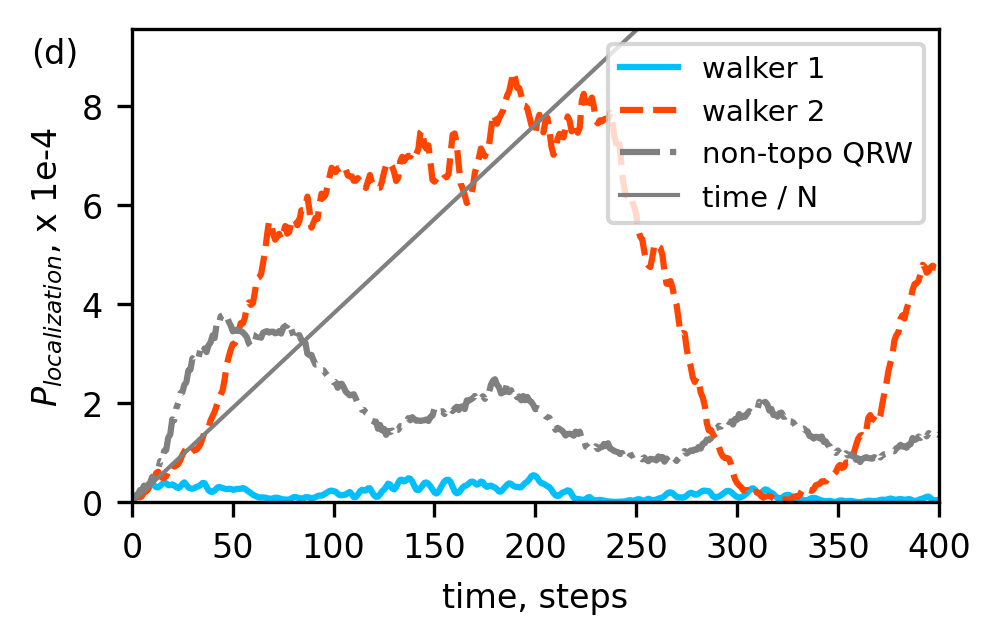

In [75]:
time_set= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]
probabilities_walker_1= [5.257225728623138e-06, 7.021661534178747e-06, 8.304262167983529e-06, 1.2719527663900343e-05, 2.0476448181449356e-05, 2.596559788361447e-05, 2.8123988559058182e-05, 2.8583629486709954e-05, 2.9372463060294928e-05, 3.3136324588140724e-05, 3.588966458605173e-05, 3.399369705339609e-05, 3.0404492168485432e-05, 2.9820082686505825e-05, 3.292082150146309e-05, 3.676254905162122e-05, 3.9279162919304323e-05, 3.81302673945017e-05, 3.458188109328874e-05, 3.4151733972594866e-05, 3.579017835585037e-05, 3.387118972393577e-05, 3.0225541633870654e-05, 2.8713275761614533e-05, 3.095077257443179e-05, 3.708937021276473e-05, 3.999991669462675e-05, 3.502034064853829e-05, 2.966971905993121e-05, 2.774682803425448e-05, 2.7021747322715942e-05, 2.8332265883586875e-05, 3.093638728109027e-05, 3.204839735940133e-05, 3.438657948156738e-05, 3.878614669896753e-05, 3.85027886800958e-05, 3.1237775409061205e-05, 2.4036921775646834e-05, 2.1058575795901184e-05, 2.093780148207387e-05, 2.3425045976013104e-05, 2.823812550531425e-05, 3.075785347609519e-05, 2.9835077603855133e-05, 2.8492426179265134e-05, 2.7265473247900646e-05, 2.6400175111392324e-05, 2.6924696075648027e-05, 2.6799875976671074e-05, 2.5032856374836343e-05, 2.5331957063389218e-05, 2.6777946750772456e-05, 2.6820975416169362e-05, 2.727337931710228e-05, 2.8459307617761572e-05, 2.7228277062626308e-05, 2.395714168201586e-05, 2.1179841290097284e-05, 1.8066898534887868e-05, 1.5026637672914548e-05, 1.2986388650446397e-05, 1.094736241404655e-05, 9.516936723824157e-06, 9.527679664574437e-06, 9.590012069297655e-06, 9.160631120732481e-06, 8.400498910999147e-06, 7.185495740639586e-06, 6.655395108714075e-06, 7.724238426583655e-06, 8.978670312241197e-06, 9.02659977698561e-06, 7.940678057416147e-06, 6.4287497287237294e-06, 5.564129071275453e-06, 5.281291987031984e-06, 5.001576050232182e-06, 5.453954497395874e-06, 7.3583671278413955e-06, 9.877557105892346e-06, 1.0555515356816703e-05, 9.304919628457793e-06, 7.83590674005675e-06, 6.943634148123172e-06, 8.025344686685937e-06, 9.979190356500952e-06, 1.0161504102386912e-05, 9.122120064647975e-06, 8.39291621375402e-06, 8.722413067670508e-06, 9.974616675354319e-06, 1.2307345555217212e-05, 1.3482639416350858e-05, 1.3165176086933178e-05, 1.5041896822070281e-05, 1.762869143772644e-05, 2.004330501050287e-05, 2.2751583915106116e-05, 2.3292297337384836e-05, 2.2309411685388327e-05, 2.1086948081277417e-05, 1.731272854074298e-05, 1.4012244150322696e-05, 1.4117422665934913e-05, 1.4619878496771053e-05, 1.5286586324936423e-05, 1.852271950532883e-05, 2.057395117899222e-05, 1.575627265842956e-05, 1.010536644056271e-05, 1.037690424507388e-05, 1.5355875456375502e-05, 2.150560670519488e-05, 2.4944220682803334e-05, 2.370203640608222e-05, 2.3583876957218433e-05, 2.7918711169034794e-05, 2.7985876314869096e-05, 2.0718553030402933e-05, 1.4194659319540553e-05, 1.090352931165611e-05, 1.1222782876538706e-05, 1.6061644348446345e-05, 2.187419736202945e-05, 2.5539239807137873e-05, 3.099962961986802e-05, 3.741401089445247e-05, 3.5674882253564575e-05, 2.798870994232428e-05, 2.5789234915227373e-05, 3.089888124136121e-05, 3.880115401435415e-05, 4.516594764213658e-05, 4.498734263013399e-05, 4.204260935821601e-05, 4.437937752677142e-05, 4.83210057546906e-05, 4.722308231964216e-05, 4.1657176012570415e-05, 3.294953026086198e-05, 2.5265224338775756e-05, 2.4134537185479824e-05, 2.7905053507568013e-05, 3.349780088396907e-05, 3.879962927766229e-05, 3.9873098225640515e-05, 3.6787238131968746e-05, 3.2161581601016716e-05, 2.579433742822356e-05, 1.9447384893240962e-05, 1.7552868273724e-05, 2.1180134524798765e-05, 2.850276272658751e-05, 3.6131663771590776e-05, 4.203972327378745e-05, 4.5138720491678946e-05, 4.5081954497490226e-05, 4.0615961571157276e-05, 3.099982506589014e-05, 2.1716027872277254e-05, 1.7900933940345655e-05, 1.927876365329965e-05, 2.4256891756722444e-05, 3.0027867593403884e-05, 3.2730933359877817e-05, 3.4072475448119075e-05, 3.750681634388548e-05, 4.1187182473965385e-05, 4.1416601406070145e-05, 3.831138715424978e-05, 3.540548070801433e-05, 3.696627453250928e-05, 4.1492727394591556e-05, 4.030594663023351e-05, 3.377688398623608e-05, 3.088663799412403e-05, 3.28151215966337e-05, 3.335976582948837e-05, 3.1264002221706804e-05, 2.9501365659401857e-05, 2.5790038310716303e-05, 2.1446313735208488e-05, 2.1714762676814318e-05, 2.6191288773858833e-05, 3.097372717083242e-05, 3.517392082850363e-05, 3.800846285646441e-05, 3.690709473684739e-05, 3.3033843515684656e-05, 3.1063608383168534e-05, 3.1055739548942126e-05, 2.9893198485200918e-05, 3.0203345401835126e-05, 3.488466393933413e-05, 3.896583274189548e-05, 4.131923273124049e-05, 4.62988828382256e-05, 5.2255648159358955e-05, 5.43688711571433e-05, 5.315980196046979e-05, 4.890802249572574e-05, 4.228046826853696e-05, 3.8306370351457586e-05, 3.73751992651324e-05, 3.496433381771487e-05, 3.2249503980335853e-05, 2.9946325923258753e-05, 2.5093960076299e-05, 1.8603016203975544e-05, 1.4000191633105073e-05, 1.2242248626668164e-05, 1.3842487474054714e-05, 1.796521687115395e-05, 2.025521231641754e-05, 2.1773896469295752e-05, 2.4013175710280346e-05, 2.2558595100545932e-05, 1.5683360200053458e-05, 9.223426609558343e-06, 6.70065974170554e-06, 6.376306991990735e-06, 5.926417539692342e-06, 4.989018817343074e-06, 4.592983138499958e-06, 5.929054449224296e-06, 9.531366472445595e-06, 1.0191540291830298e-05, 6.586861149079846e-06, 3.907554477073132e-06, 3.3438689635228332e-06, 4.065411659332017e-06, 4.741609816425254e-06, 3.93247907016161e-06, 3.08318666418701e-06, 2.464467600805793e-06, 1.494743330634587e-06, 1.1478607693862391e-06, 1.008583812205802e-06, 6.19331101412396e-07, 5.761974305766577e-07, 8.228153133853523e-07, 9.167566249761862e-07, 1.0501077162797184e-06, 1.3438804171400232e-06, 1.935259386373534e-06, 3.4004933538397224e-06, 4.055164074185599e-06, 2.9122595834859086e-06, 2.9478618086219794e-06, 4.838678766387326e-06, 6.118225909464759e-06, 5.341741742907042e-06, 3.4552149042289753e-06, 2.8330107073132656e-06, 4.771458717448733e-06, 6.8775520969990016e-06, 5.516738148561056e-06, 3.7351165585007893e-06, 4.0697713980326465e-06, 5.593479444306449e-06, 7.058840444254007e-06, 8.310889786173974e-06, 9.59674984309116e-06, 1.2227288249130226e-05, 1.632399967744417e-05, 1.9267086839745058e-05, 1.987162041255596e-05, 1.8264429653108617e-05, 1.4425243289646118e-05, 1.0647184195871837e-05, 9.63453500536814e-06, 9.819992002777057e-06, 9.375604471158018e-06, 1.0122007913308559e-05, 1.3191549168418474e-05, 1.6936342261039746e-05, 1.9011146753930105e-05, 1.795837444440332e-05, 1.5346453916924994e-05, 1.5367444471235286e-05, 1.7708295888894404e-05, 2.054325426617343e-05, 2.3157384887260852e-05, 2.3291796538780936e-05, 2.26142556317695e-05, 2.2215013522890568e-05, 1.808267738312283e-05, 1.2120006264631997e-05, 9.484552731791033e-06, 1.006251446698923e-05, 1.1793408439745794e-05, 1.3977955541582108e-05, 1.686057241765967e-05, 2.013131936566885e-05, 2.274974243196321e-05, 2.274069026270579e-05, 2.040995171596981e-05, 1.698568453346157e-05, 1.3176530542350006e-05, 1.0290432107353347e-05, 9.18811525037152e-06, 1.0129720992338292e-05, 1.2335838785021987e-05, 1.5061130855895513e-05, 1.8664170689134206e-05, 2.3288813156798293e-05, 2.7090776707783857e-05, 2.804808519730749e-05, 2.4638926935312622e-05, 1.874364964755931e-05, 1.67560901346268e-05, 1.9224341918881277e-05, 2.3100716839765236e-05, 2.5879104508811335e-05, 2.471734033061542e-05, 2.107623276224271e-05, 1.894764753298222e-05, 1.6762748225886417e-05, 1.2482536865392635e-05, 8.318602365879101e-06, 6.565197130416242e-06, 7.845731008077843e-06, 1.1395081719728832e-05, 1.4047768748415748e-05, 1.4739063936756174e-05, 1.4106834791223888e-05, 1.1552352446062504e-05, 8.341145334830664e-06, 6.6752671835722355e-06, 6.826325495149744e-06, 7.236932664960698e-06, 6.091991148625688e-06, 4.273167696221328e-06, 3.5408178109327663e-06, 4.340918825797434e-06, 6.49702352271624e-06, 8.405395241385297e-06, 8.70559813103049e-06, 8.04481410429031e-06, 6.469736900703183e-06, 4.567214935270736e-06, 3.363147675745384e-06, 2.611852541665298e-06, 2.0954393901608594e-06, 2.3493325956848014e-06, 2.6284821178824166e-06, 1.6704127675500646e-06, 7.168122782111202e-07, 7.018594416050867e-07, 1.838297123543146e-06, 3.39705071108787e-06, 3.483326014214217e-06, 2.2650583082636056e-06, 1.5820093030938566e-06, 2.2869327637931934e-06, 2.609888023345168e-06, 2.3504942161528403e-06, 1.423832206154294e-06, 4.524046487685748e-07, 2.1210445708360188e-07, 2.2140272829934722e-07, 5.298261002788976e-07, 1.3437480573461003e-06, 2.1697767093478126e-06, 2.9549232089348484e-06, 2.929163624572872e-06, 2.220880040166947e-06, 2.1916517734140094e-06, 2.4003268830424917e-06, 3.1907523688388604e-06, 4.492326918437229e-06, 5.095544398659438e-06, 4.655350934351852e-06, 4.814545342003404e-06, 6.29498859652666e-06, 7.411661486659993e-06, 6.3828668511565e-06, 5.144368465787706e-06, 4.981994933611375e-06, 5.816625553931973e-06, 6.575706668707564e-06, 5.629715054641546e-06, 4.62826800030128e-06, 5.2123026219994135e-06, 6.19959011080301e-06, 5.575138870377239e-06, 3.61593507660241e-06, 2.271660560536673e-06, 2.7365146514505867e-06, 4.6475445264655335e-06, 6.283772290560968e-06, 7.335236726778489e-06, 8.866158060460905e-06, 1.0987499764493398e-05, 1.117943049619717e-05, 7.79298814695904e-06, 4.674119507848455e-06, 3.8055745018111355e-06, 3.955824933077046e-06, 4.6626987616379584e-06, 6.896348781154836e-06, 9.970011418325564e-06, 1.4205377299312456e-05, 2.0371672827709148e-05, 2.5708588044474668e-05, 2.8059647568607546e-05, 2.7221309295871157e-05, 2.472816122951919e-05, 2.2742842968503066e-05, 2.0623319164040346e-05, 2.016951261503261e-05, 2.1900487702412554e-05, 2.31544664788124e-05, 2.574100343310094e-05, 3.056287115427537e-05, 3.1912524228135126e-05, 2.964418199651661e-05, 2.965732246120708e-05, 2.9661925794093506e-05, 2.570214623348541e-05, 2.423820475492114e-05, 2.999546746966235e-05, 3.714026268911362e-05, 4.041002192501488e-05, 4.104864966387504e-05, 4.0215834374371664e-05, 3.872722350544395e-05, 3.608321000166607e-05, 2.917603169106055e-05, 2.300968023207942e-05, 2.4551090630169774e-05, 2.958443064547326e-05, 3.4578078741333285e-05, 4.1327350232405834e-05, 4.575451733731511e-05, 4.2852492466667796e-05, 3.62771122869556e-05, 3.069632373223815e-05, 2.7381450898859273e-05, 2.6482306786144318e-05, 2.883490284701432e-05, 3.455197727376222e-05, 3.931082898841135e-05, 3.97918610652745e-05, 3.737622285255326e-05, 3.296230117515225e-05, 2.920178265698155e-05, 2.9010607841452703e-05, 2.9549916120650238e-05, 2.735090046906924e-05, 2.628701600511718e-05, 2.8406281316875653e-05, 2.9948141513293063e-05, 3.090506694677822e-05, 3.343646463135742e-05, 3.4988283587164796e-05, 3.227413986376283e-05, 2.9040577932843495e-05, 2.8866900048726437e-05, 2.879492298947019e-05, 2.923380110107189e-05, 3.290374893631504e-05, 3.522844620465537e-05, 3.7430385239078294e-05, 4.0894835530093136e-05, 3.951728194030801e-05, 3.492419059842327e-05, 3.282869109782468e-05, 2.9914403625637516e-05, 2.5259647883818727e-05, 2.4481924434997977e-05, 2.8020922583852033e-05, 3.535740258384241e-05, 4.670920625226511e-05, 5.3875704882079194e-05, 5.0629750184352504e-05, 4.412723056747454e-05, 4.128712024684338e-05, 4.070080409545634e-05, 3.8310909288875366e-05, 3.516439212299974e-05, 3.461086732378479e-05, 3.5627720499899356e-05, 3.54889130682478e-05, 3.371203089174072e-05, 3.202670734793772e-05, 3.165510456333017e-05, 3.180567548879088e-05, 3.105867906627709e-05, 2.90749429570618e-05, 2.900832497568209e-05, 3.4199236631124244e-05, 3.8122731920041704e-05, 3.4573689888027764e-05, 3.0468286400954842e-05, 2.8716182121125558e-05, 2.443104858235783e-05, 1.874336315243653e-05, 1.5798944428214355e-05]
probabilities_walker_2= [1.0844895758993666e-05, 9.743560163364798e-06, 1.0103178018605395e-05, 1.178513304948921e-05, 9.659934653464113e-06, 1.2607859030880873e-05, 2.027896992447493e-05, 2.1973739213799538e-05, 2.5819877080054392e-05, 3.560175705343387e-05, 4.131002733830875e-05, 4.7056130053399376e-05, 5.849557206056e-05, 6.138128160332662e-05, 5.418225751478008e-05, 4.9211818069518316e-05, 4.926262083853396e-05, 5.2341091158854166e-05, 6.136159102489436e-05, 7.250414139610452e-05, 7.43416778043724e-05, 7.194216839092577e-05, 7.398076032769056e-05, 7.726440238195614e-05, 8.510228073136797e-05, 9.527917224644362e-05, 0.00010242188241415078, 0.00010891491732468352, 0.00010558709253792101, 9.854447946793792e-05, 0.00010233456588055907, 0.00010578527044803322, 0.00010595793020399364, 0.00011091468774843978, 0.00011737190851108995, 0.00012923547297331408, 0.00014131026355132937, 0.0001432440861672005, 0.00015054057398288434, 0.00016502755139863497, 0.0001735629226575052, 0.0001824758465619263, 0.000194735165150476, 0.00020718302961502143, 0.0002174513185966756, 0.0002261710639206166, 0.00024878460778070456, 0.0002770113059931689, 0.0002936444974576983, 0.00030801599966229985, 0.0003194376604295099, 0.0003207219997885131, 0.00032767422441991556, 0.00034807513866257187, 0.0003620002735993716, 0.0003610696224651612, 0.00037238715257163757, 0.00039659029901231116, 0.00040374722556439234, 0.00039860854089134593, 0.0004022983526047182, 0.0004251869598747784, 0.00045173904024477956, 0.0004544299123677675, 0.00046029228076504896, 0.00048351736118610743, 0.0005056519190765062, 0.0005399097470107494, 0.0005680600666763961, 0.0005617213839581725, 0.0005427538090431833, 0.0005303427968175514, 0.0005367775294040315, 0.0005422539702801876, 0.0005312079053642311, 0.0005440541835430382, 0.0005579479954411381, 0.0005426172827272368, 0.0005465525674827086, 0.0005669896169443803, 0.0005741075722798782, 0.0005707584054762258, 0.000559705791458881, 0.0005680960005409714, 0.0005898825253740515, 0.0005901100398940818, 0.0005990106814558055, 0.000617457735442159, 0.0005908494281715575, 0.0005547652791603171, 0.0005643412383906918, 0.000574459400858873, 0.000572323131495069, 0.0006014166432626047, 0.0006234507568368666, 0.0006153526211090511, 0.000621451920695717, 0.0006386959027347182, 0.000658071342618103, 0.0006757490200433485, 0.000670876657597, 0.0006669431221355743, 0.0006744288919218267, 0.0006739223489094489, 0.0006764280580969334, 0.0006806136226895729, 0.0006725991165038686, 0.0006603223506590559, 0.0006581019573427589, 0.0006583212560474895, 0.0006494877974772784, 0.0006495653725737686, 0.0006548762739098238, 0.0006482875639811524, 0.0006488451766156431, 0.0006463514259742811, 0.0006349625727874121, 0.0006483301411194523, 0.0006611083283978616, 0.0006461078466715223, 0.0006377182274520918, 0.0006394202867115158, 0.0006352674811725051, 0.0006355235585057673, 0.0006481762027624311, 0.0006666961122546682, 0.0006804517857883142, 0.0006866721025832638, 0.0006846939893492402, 0.0006778431448179223, 0.0006666444994713369, 0.0006491316736487458, 0.0006555083272479031, 0.0006886645568309426, 0.0006977800078306607, 0.0006895383425155479, 0.0006963752201480085, 0.000699957076704593, 0.0006985415315964262, 0.0007072763907510951, 0.0007109722559965738, 0.0007034338063101506, 0.000713559550166325, 0.0007470608786644161, 0.000751633754850043, 0.0007201003241032507, 0.000714170911950774, 0.0007210075409122033, 0.0006872363888943028, 0.0006512093046826117, 0.0006475849131656181, 0.0006531894187091166, 0.0006586144257643098, 0.0006573577177140475, 0.0006517503968391122, 0.0006564140150601013, 0.0006567536949996691, 0.0006635515289943376, 0.0007048066000108519, 0.0007424573296636143, 0.0007450718587760572, 0.0007248627786687328, 0.0006814804589725285, 0.0006436166475539746, 0.0006334693921890205, 0.0006203880819958641, 0.0006046685851105212, 0.0006082724814920934, 0.0006176749030382103, 0.0006361059493624835, 0.0006653325167518128, 0.0006800282289081718, 0.0006953988211662963, 0.0007146937514222988, 0.0007063055193853728, 0.0006990066211887083, 0.000710731798010795, 0.0007210495075569987, 0.0007505077143981692, 0.0007839538170264994, 0.0007764820200862124, 0.0007646740550845688, 0.0007752450530318104, 0.0007837095972399977, 0.0007913358105884699, 0.0008070740931911434, 0.0008215746948364986, 0.0008299468429361332, 0.0008483589742542051, 0.0008691088628510794, 0.0008567309209949167, 0.0008369985438413891, 0.0008368662461178186, 0.0008220994777977093, 0.0008016229734272062, 0.0008006539063298093, 0.0007956867104044182, 0.000779885044324467, 0.0007640152914981852, 0.0007473865765225943, 0.000745736635003238, 0.000769614462011675, 0.000782758496506498, 0.0007591632257110837, 0.0007472131814795795, 0.000769992137073163, 0.0007765219643368785, 0.0007497142997003888, 0.000718138870867566, 0.0007019362282509273, 0.0007115388469575196, 0.000734480051666811, 0.0007443242083444928, 0.0007391439803801541, 0.0007372841070125009, 0.0007564106988060912, 0.0007794356849747507, 0.000770589144949994, 0.0007493735186429174, 0.0007573573813320364, 0.0007661833756825575, 0.0007465432519919324, 0.0007564543564936379, 0.000809924959787879, 0.000825111774419807, 0.0007980808236739639, 0.0007920223276776635, 0.000807851008441304, 0.0008175763510013057, 0.0007999276558116923, 0.0007698875959906349, 0.0007655032101717662, 0.0007717515359508618, 0.0007693084579602177, 0.000773441123343162, 0.0007748188439772517, 0.0007732702988514967, 0.0007869450433485776, 0.0007828281846535292, 0.0007428845778338116, 0.0007246594145467766, 0.0007373071948507377, 0.0007140008953743593, 0.0006638642752048708, 0.0006357153484941475, 0.0006197519796262523, 0.0006172118148774744, 0.0006217163098843914, 0.0006075861121316055, 0.000596262078026879, 0.0005823635596046708, 0.0005496934356979398, 0.0005361494481137502, 0.000531420844594705, 0.0005064221612477382, 0.00048770057774480467, 0.00047857637285417503, 0.0004750817903876747, 0.0004948452794086441, 0.0005196288797250522, 0.0005226145150647005, 0.0005160443250001378, 0.0005137074313063351, 0.0004994527839826301, 0.0004669112021965803, 0.0004416692294009972, 0.000440936669365636, 0.000446657538505779, 0.00043312877087230665, 0.00041247082599032986, 0.0003989204240129447, 0.00036999208809991547, 0.0003391375580142774, 0.00034151828706873485, 0.00034103532220409354, 0.00031120403227198265, 0.0002885138951228802, 0.0002747549045785974, 0.00025263888404208917, 0.00024296922189639313, 0.00025154318061924836, 0.0002444461795407249, 0.00022127065219812122, 0.00021148527671387875, 0.00019466761911838008, 0.0001598874788540608, 0.0001449937269371165, 0.00014607360022208225, 0.00013767301373817091, 0.00013044183510182002, 0.00012474705051809215, 0.00011131695714955409, 9.926451450098847e-05, 9.225989518198732e-05, 8.920606975004215e-05, 8.924942651649169e-05, 8.740214717175941e-05, 7.64240730022759e-05, 5.897418340790416e-05, 4.6067694850601656e-05, 3.874886509021015e-05, 3.4246448186728124e-05, 3.03608993888226e-05, 2.4577007551837125e-05, 2.335134187941495e-05, 2.438702319339179e-05, 1.7859138651471827e-05, 1.4907549216300817e-05, 2.01557040866227e-05, 2.0950150250250627e-05, 1.9902858514753053e-05, 1.857699472620126e-05, 1.1740217737422228e-05, 9.29966307895448e-06, 1.1120164525912444e-05, 1.2099868386100048e-05, 1.2594197524882052e-05, 1.0830116833649158e-05, 7.649789135310785e-06, 5.000757515073534e-06, 2.4549763196712172e-06, 2.1164876669725894e-06, 3.7429885895292978e-06, 5.209725365889426e-06, 5.573704194480512e-06, 4.7630124531453264e-06, 4.87003435756722e-06, 7.712786752564486e-06, 1.0862115580091415e-05, 1.185791343856887e-05, 1.1325688410595553e-05, 1.3930684178387488e-05, 2.2187640880053267e-05, 2.8763775402179926e-05, 2.8146632111699848e-05, 2.5163115255328813e-05, 2.390984738863617e-05, 2.2823982288726577e-05, 2.641450971992501e-05, 3.403771011036202e-05, 3.5544785980325905e-05, 3.7201221161035894e-05, 4.213658616462759e-05, 4.193139481118757e-05, 4.183277276321819e-05, 4.770489554156147e-05, 5.273062084955712e-05, 5.476270069933476e-05, 5.665905627048944e-05, 6.0919689733521265e-05, 7.057959852615904e-05, 7.526113395629996e-05, 6.920315555685916e-05, 7.099070672785597e-05, 8.021006034129333e-05, 8.01645750242494e-05, 8.028017173552741e-05, 8.976418557118334e-05, 0.00010139851859207811, 0.00011531396206560253, 0.00012793919086892614, 0.00013424981043652398, 0.0001357329812488224, 0.00013270941919946912, 0.00014349914385083348, 0.00016944971087672734, 0.00017597239996807018, 0.00016765858562292174, 0.000167219365230522, 0.00016395007000486917, 0.00016069318226827589, 0.00017366927732168652, 0.0001984210736745168, 0.00021954350107993335, 0.00023893332181261975, 0.0002643106464790651, 0.0002814075285290957, 0.00029706956016462927, 0.0003267392318549797, 0.00033785162310798043, 0.0003425152548273563, 0.0003702762445772557, 0.00037760971766447494, 0.00037106469124856576, 0.00038942482513251145, 0.00040227257258067684, 0.00040849047623297175, 0.00042877351532118386, 0.0004409014682748392, 0.0004422980251003821, 0.0004474536112450422, 0.0004626804925683907, 0.00047980073882276393, 0.00047571433443604886, 0.0004636817103791537, 0.00046646091069351905, 0.00047471439211273225, 0.0004779057146053356, 0.0004738494514291902, 0.000473009723821687, 0.00047940638200259843, 0.000480172469624305, 0.0004883304057389423, 0.000515109003544443, 0.0005353233346158252, 0.0005427715734906634, 0.0005632896121994319, 0.0006070482653493784, 0.0006494747575177449, 0.000660257550198101, 0.000647317670961918, 0.0006410909275816937, 0.0006410937299012402, 0.0006335200955826822, 0.0006304098428386835, 0.0006353712258152502, 0.0006180532713285783, 0.0005931645064003137, 0.0005965033103411982, 0.0005947611662656937, 0.000584155711211788, 0.000613762042516449, 0.0006541646092730572, 0.0006554064718903478, 0.0006355729442968611, 0.0006223090516770984, 0.0006261722072550166, 0.0006267860098239978, 0.000611823580994352, 0.000618496355615958, 0.00063361494173214, 0.0006082626574532376, 0.0005872223110256515, 0.000607919316867691, 0.0006119334863239188, 0.0005898165442589749, 0.0005953959204847424, 0.0006125555139774028, 0.0006205367922299005, 0.0006406657029491338, 0.0006596438631296809, 0.0006765595973906077, 0.0006915863392742334, 0.0006785821103453321, 0.0006760495269107715, 0.0006908426732361619, 0.0006713392338352155, 0.0006677903269506611, 0.0007053501838861153, 0.0007071086515067979, 0.0006822096623740318, 0.0006811601544181537, 0.0006876438122223486, 0.0006838505283651578, 0.0006608428188778096, 0.0006270757341349814, 0.0006200899178841069, 0.0006350512655746754, 0.0006402960160457428, 0.0006443838039749049, 0.0006423901027597066, 0.0006096633769465587, 0.0005710722050038538, 0.000556286963805055, 0.0005538786136372427, 0.0005580502902219654, 0.0005593009395696204, 0.0005494003127678245, 0.0005360107021860169, 0.0005098428412736735, 0.0004797060910488907, 0.00046642372984087246, 0.00046267589261934976, 0.00046546991145974306, 0.0004603359082040111, 0.00044048066247338375, 0.00043137390688823137, 0.0004169911412377454, 0.0004017354858304531, 0.00042956154122325514, 0.000455095439603699, 0.0004376538965602924, 0.00042633792484783053, 0.00042718330034430534, 0.0004169082713368714, 0.0004094896648501389, 0.00041276591516010676, 0.0004154320429099712, 0.0004037630792985431, 0.00038138333676056665, 0.0003813186064121503, 0.0004066559821939615, 0.0004189748152425107, 0.0004323491529419553, 0.0004638313164516136, 0.00045649530631115083, 0.00042418057265744796, 0.0004302356948087792, 0.0004395308263094178, 0.000433554295217471]
time =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
probabilities_gro =  [3.814697265624999e-06, 4.852220495313524e-06, 1.4082343901896623e-05, 1.6321529037047814e-05, 2.4329823145404385e-05, 2.3760297087126567e-05, 3.3382368357451244e-05, 2.8712510197611507e-05, 3.5576010270621484e-05, 3.8512798623445485e-05, 5.0766575429983104e-05, 5.3635920692693306e-05, 6.317816951003231e-05, 6.568605251404313e-05, 8.308055307910164e-05, 8.160281405083311e-05, 0.00010375319344059981, 0.00010511664275817301, 0.00013046965664064128, 0.000136699343504747, 0.00016720046987681107, 0.00016559907395122343, 0.00018967501292634998, 0.00020089069658495498, 0.00022002507197598043, 0.00022196191533223092, 0.00023719957137144175, 0.0002424190028581649, 0.0002663561497027174, 0.0002676995236913551, 0.00029064502986555574, 0.00028744180468231025, 0.0002949794697519363, 0.00029117316191932976, 0.0003095023445223698, 0.0003002775553443766, 0.0003104512669288501, 0.00030328542114747327, 0.000317023406396331, 0.0003227015604382534, 0.0003370276356746786, 0.0003314805365507617, 0.00035984640549368923, 0.00035631524376748933, 0.0003755313770437669, 0.0003775362878677723, 0.00038193938397026024, 0.0003759532333668851, 0.0003649060258200196, 0.0003568901278148513, 0.00034516080000766977, 0.0003483165259137465, 0.0003461637070584974, 0.0003477806320241327, 0.00034511868958585684, 0.00034329914959828003, 0.00033860855093532, 0.0003332447437808014, 0.00032038639565927393, 0.0003154210851437062, 0.00031533408408288173, 0.0003239455776890464, 0.0003405204446214164, 0.0003465594185344265, 0.00033217650984652275, 0.0003422310190999908, 0.0003443097555083291, 0.0003456839891035259, 0.00034263389116577373, 0.00034447687131971796, 0.00034445508534338505, 0.00034124406695970204, 0.00034244084749212895, 0.0003457450361806922, 0.00034072808339997345, 0.00035273455972188906, 0.00035607147643519627, 0.0003568518822066261, 0.0003632369300070811, 0.0003494086031402846, 0.00033822229063427847, 0.0003263925622290823, 0.0003364444195377692, 0.00033750487042605743, 0.00032790347090067506, 0.0003246514296353926, 0.00032192086235335887, 0.00029995521718001797, 0.00029707321141169053, 0.0002975060862778172, 0.00028712288661814723, 0.00027806374523593107, 0.00027843620234007077, 0.00027116733964454047, 0.00026641945731986513, 0.0002664642982368915, 0.0002605737768361896, 0.0002555059694757187, 0.0002503064167290842, 0.0002484000242282733, 0.0002423007373727854, 0.00024233984762982096, 0.0002311974464058392, 0.0002385106196525376, 0.00023924986885228209, 0.00023228330657616524, 0.0002234223957949658, 0.00021931869920219785, 0.00021590625759630364, 0.00021693650856184608, 0.00021804134641953535, 0.00020946803354290989, 0.00019887918359675055, 0.0001954037319467589, 0.00018651036917633124, 0.00018622450726806157, 0.00018109140952995403, 0.00017822413553345308, 0.0001740148273363306, 0.00016442773391964907, 0.0001628192029379098, 0.00016267021190088756, 0.00014835682939633036, 0.0001561366876795743, 0.00014510668213954934, 0.00014817108832541957, 0.00013602009653041367, 0.00014392311907420233, 0.00014143570789482162, 0.00014468375202031825, 0.0001372385681056794, 0.00014593182547331437, 0.00014607645730429404, 0.00015356244082149266, 0.00015319448454775784, 0.00015819379015006663, 0.00015954806485446704, 0.00016975515917333424, 0.0001654935074250168, 0.00017165597722014405, 0.00016770762210855663, 0.00016461285797498884, 0.00016503579201023662, 0.0001640802667655511, 0.00016496934820366626, 0.00016552816823616235, 0.00016715525251657503, 0.00016401437008975342, 0.0001722075117410428, 0.00017471954584731152, 0.00018908994870475503, 0.00018567138163498107, 0.00018946480701947794, 0.00018337253036221016, 0.00018379322564662098, 0.00017810375015489245, 0.00018652179967693568, 0.00018364274451620165, 0.00018774688296766199, 0.00018403608079864842, 0.00018913885095972805, 0.0001927153119567837, 0.0001863217000212573, 0.00019264879168174307, 0.00019357339874620988, 0.00018821294257976098, 0.00020559085486388868, 0.00020509539132018023, 0.00020752057727062235, 0.0002102131662034872, 0.0002145983268396603, 0.0002076540377611512, 0.00021311469768937584, 0.0002096234600774095, 0.00021401442913257954, 0.0002086804385866919, 0.0002231195749001309, 0.0002217229268022005, 0.00023732956700086292, 0.0002453441764338753, 0.0002484029687179794, 0.0002375668373752255, 0.0002321301780817084, 0.0002198512320273076, 0.00022197716339399256, 0.00022293021082877735, 0.00024003016061606794, 0.0002222716687739931, 0.0002261488162004742, 0.00021258226620086076, 0.00021797528520632768, 0.0002118791332225769, 0.00021356767743771645, 0.0002058214541748378, 0.00021440607197777416, 0.00020601258037858752, 0.00021272014527501046, 0.00020521750659775802, 0.00020268782646189052, 0.0001963470016217116, 0.00018788405538246975, 0.00018997162376232216, 0.0001882505043781633, 0.0001843160643282848, 0.00017827708513226144, 0.00017353570201554617, 0.00017184896924543256, 0.00017029877480678892, 0.00016190647671871124, 0.00015625553406564455, 0.00014621062669254722, 0.00015013745625871072, 0.00014771219120084125, 0.00014522573986689778, 0.00014117651911022168, 0.00013464547768620992, 0.00013787313190517377, 0.00013834433680306446, 0.00013689424680688665, 0.00013429818380105481, 0.00014246432292210176, 0.0001385578675042388, 0.00014241213184099688, 0.00012799711910718028, 0.00012967358073235827, 0.00011224890002145237, 0.00011176564618387184, 0.00010697159039718432, 0.00010778624713020114, 0.00010689200886643811, 0.00011289157024337211, 0.00010719465090471999, 0.00011044529272209651, 0.00011128166966369747, 0.00011752204003265223, 0.00011318565430515847, 0.0001190948398846065, 0.00010852168224670172, 0.00010665347843537073, 0.00010348307599038834, 0.00010213025096322072, 0.00010090224380851853, 9.734839576396547e-05, 9.939656655101476e-05, 8.793801162209646e-05, 9.015966985796237e-05, 8.854531186903544e-05, 9.408821958413566e-05, 9.46883085744773e-05, 9.694231952893292e-05, 9.463569948540249e-05, 8.937068302301255e-05, 9.040042107952065e-05, 8.647886947361051e-05, 9.038036564105708e-05, 8.556517706269931e-05, 8.28199683106228e-05, 8.754542306575679e-05, 8.696538751893353e-05, 8.628227702555581e-05, 8.434986554873222e-05, 9.248563489868517e-05, 8.837904859524523e-05, 9.132953536917279e-05, 8.175325523762764e-05, 8.820116710546764e-05, 8.239983650764013e-05, 8.645463326415395e-05, 8.253325687735831e-05, 8.820288348397067e-05, 8.338796396375182e-05, 8.885460301462448e-05, 9.470510556908488e-05, 9.38244509412083e-05, 0.00010346220879818433, 9.824337936804649e-05, 0.00010146202013111819, 0.00010453248219669488, 0.00010341499409617546, 0.00010638268655895544, 0.00010602832562036326, 0.00011173057101821972, 0.00010834868062259725, 0.0001179985771282746, 0.00011927396497634748, 0.00012647674525569606, 0.00012519798676014545, 0.00012856480944414153, 0.0001379833577616259, 0.00014820830996175693, 0.0001498236396077424, 0.00015432934560403652, 0.00015253567218745297, 0.00016087656661709744, 0.00016474616954191874, 0.00016488336727716067, 0.0001616670640412369, 0.00016318639963997308, 0.00015694070107285726, 0.00016799400384696634, 0.00016645890591297, 0.00017799015005593878, 0.00017059521627023477, 0.0001747877095032454, 0.00017247638496323744, 0.00017884326149336652, 0.0001838798797594236, 0.00018142654906625497, 0.00017958109254910442, 0.0001830028815582422, 0.00018540966239281124, 0.0002028026565553424, 0.00019097088446419142, 0.0002006936636105595, 0.00020257416745078118, 0.00019756379353978872, 0.0001852603308754725, 0.00018855566510925855, 0.00017623505834565574, 0.00017657481415060921, 0.00017278607776200449, 0.00017964692928646686, 0.00018111417802536318, 0.00017263381755167458, 0.00017277536847866762, 0.0001760002198725148, 0.00016330865333783498, 0.00016296408862179172, 0.00016035345705481513, 0.00015418873751169249, 0.00015087396679917017, 0.00015154892323520936, 0.00014774640529633217, 0.00014884016712635482, 0.00014515993167289683, 0.0001426844160091834, 0.0001335513311160957, 0.00013282208873267317, 0.0001285666158158555, 0.00013207561432189584, 0.00013139195816180447, 0.00012870836324814996, 0.0001326690382535972, 0.00012171321707609515, 0.00012274309163720986, 0.00011537583882647635, 0.00011300572491966228, 0.00010189267024731912, 0.00010358631396375573, 9.946402165423194e-05, 0.00010438077560450553, 9.80521930220693e-05, 9.849979924082437e-05, 9.283869099053398e-05, 9.878503832918282e-05, 9.425161546136417e-05, 9.621823399842425e-05, 9.352180769693017e-05, 9.433164253657867e-05, 8.553858423879986e-05, 8.848814998009719e-05, 8.10381895796491e-05, 8.691156188169729e-05, 8.924319100712785e-05, 9.093279831628053e-05, 8.912851731491655e-05, 8.848050216352395e-05, 8.788418406477028e-05, 9.092949472482266e-05, 8.816789148466736e-05, 9.786040126720542e-05, 9.040063520945459e-05, 9.4254582791997e-05, 9.707887131704706e-05, 9.817083839316779e-05, 9.656295217104344e-05, 0.00010033719364949538, 0.00010393370476210459, 0.0001030204643300225, 0.00010915993426844348, 0.00011140528577851311, 0.00011589113586835427, 0.0001125015318976006, 0.00011289227759891977, 0.00010995585560684419, 0.00011608748238550436, 0.0001170350541683013, 0.00012950067805308165, 0.00012572857315991376, 0.00012741866078503231, 0.00013254250482695862, 0.00012990060304639625, 0.00013440059502850752, 0.00014130420277060735, 0.00013294678260499895, 0.00013957405197520675, 0.00013561202327774344, 0.00013878286991425408, 0.0001374740528081678, 0.00013837098188875159, 0.000135537143948618, 0.00014026242937332183, 0.0001385897671604345, 0.0001430728363093711, 0.00013949528538168677, 0.00013555265385637653, 0.00012870790039350947, 0.0001339278894651788, 0.0001314722384095318, 0.00013813167812792626, 0.00014086096968803175, 0.00014812670838623256, 0.00014098178375857422, 0.0001412637672492216, 0.00013674590191341184, 0.00013085753354971034, 0.0001288664617532773, 0.00012818592872880163, 0.00011821007617672077, 0.00011401624690816245, 0.00011166217907521186, 0.00010908768834944113, 0.00010602372272148404, 0.00010977925311334123, 0.00011977278126613317, 0.00011481357888991288, 0.00011534368600662803, 0.00011600368066434095, 0.00011748130936213355, 0.00012070655585480556, 0.00012612558468998058, 0.00012566513525665045, 0.00013236150552435263, 0.00012964102916415658, 0.00013232348574922746, 0.00013291592225754095, 0.00013133556026253507, 0.00012784863988968878, 0.00012409011961165154, 0.00011858803619330361, 0.0001221122587243869, 0.00013198635423610603, 0.00013188953588496254, 0.00014130071271826902, 0.0001453604622133086, 0.0001467662874511166, 0.00014837238184170796, 0.00014786058381296757, 0.00014182422040029933, 0.00014283180172808003, 0.00015022896157020071, 0.0001610521595525506, 0.00016077693063916982, 0.0001699398301863874, 0.00016497601078865765, 0.00015995132210771558, 0.00015484592536189272, 0.00016130526467380985, 0.00015650573459434215, 0.00016407769570109075, 0.0001615089732654882, 0.00016963546570065812, 0.00017119062798155924, 0.0001860378562582183, 0.0001884323129928077, 0.00019495816964052083, 0.00020187675342991145, 0.00020316141976969919, 0.0002117440801226271, 0.00022114633735255466, 0.0002216755174407065, 0.00023706202035527957, 0.00023363429631076779, 0.0002460678047654861, 0.0002590533093767036, 0.0002622910599581938, 0.0002668794139502805, 0.0002701322834189147, 0.00027253196002752255, 0.0002818248972584719, 0.00028340737352310964, 0.0002894248245845284, 0.00027937456513223635, 0.00029046140839075854, 0.0002957226191364745, 0.0002930694203787665, 0.0003065934755959283, 0.0003037747856971493, 0.0003148539658920405, 0.0003073322205875439, 0.0003102758619769778, 0.00031440265573439005, 0.00031022104105992815, 0.00029718867793821987, 0.00030760842261997527, 0.0002869268628805865, 0.0002924459290310668, 0.00027835946198632864, 0.00028816235996197734, 0.00027840297009054584, 0.00027884953268229705]

sizex = 512
sizey = 512


fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
#fig.subplots_adjust(bottom = 0.2, top=0.98, left=0.12, right=0.99)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)

plt.plot(time_set, probabilities_walker_1, color='deepskyblue', label = 'walker 1')

plt.plot(time_set, probabilities_walker_2, '--', color='orangered', label = 'walker 2')

plt.xlabel('time, steps', fontsize=8)
plt.ylabel(r'$P_{localization}$, x 1e-4', fontsize=8)


#plt.ylim(0.0, probabilities[0:200][np.argmax(probabilities[0:200])]+0.0005)

oracle = [2]
#m,p = simul_Grover_disordered(9,oracle,500, disorder_strength = 1.0)
m =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
p =  [3.814697265624999e-06, 4.852220495313524e-06, 1.4082343901896623e-05, 1.6321529037047814e-05, 2.4329823145404385e-05, 2.3760297087126567e-05, 3.3382368357451244e-05, 2.8712510197611507e-05, 3.5576010270621484e-05, 3.8512798623445485e-05, 5.0766575429983104e-05, 5.3635920692693306e-05, 6.317816951003231e-05, 6.568605251404313e-05, 8.308055307910164e-05, 8.160281405083311e-05, 0.00010375319344059981, 0.00010511664275817301, 0.00013046965664064128, 0.000136699343504747, 0.00016720046987681107, 0.00016559907395122343, 0.00018967501292634998, 0.00020089069658495498, 0.00022002507197598043, 0.00022196191533223092, 0.00023719957137144175, 0.0002424190028581649, 0.0002663561497027174, 0.0002676995236913551, 0.00029064502986555574, 0.00028744180468231025, 0.0002949794697519363, 0.00029117316191932976, 0.0003095023445223698, 0.0003002775553443766, 0.0003104512669288501, 0.00030328542114747327, 0.000317023406396331, 0.0003227015604382534, 0.0003370276356746786, 0.0003314805365507617, 0.00035984640549368923, 0.00035631524376748933, 0.0003755313770437669, 0.0003775362878677723, 0.00038193938397026024, 0.0003759532333668851, 0.0003649060258200196, 0.0003568901278148513, 0.00034516080000766977, 0.0003483165259137465, 0.0003461637070584974, 0.0003477806320241327, 0.00034511868958585684, 0.00034329914959828003, 0.00033860855093532, 0.0003332447437808014, 0.00032038639565927393, 0.0003154210851437062, 0.00031533408408288173, 0.0003239455776890464, 0.0003405204446214164, 0.0003465594185344265, 0.00033217650984652275, 0.0003422310190999908, 0.0003443097555083291, 0.0003456839891035259, 0.00034263389116577373, 0.00034447687131971796, 0.00034445508534338505, 0.00034124406695970204, 0.00034244084749212895, 0.0003457450361806922, 0.00034072808339997345, 0.00035273455972188906, 0.00035607147643519627, 0.0003568518822066261, 0.0003632369300070811, 0.0003494086031402846, 0.00033822229063427847, 0.0003263925622290823, 0.0003364444195377692, 0.00033750487042605743, 0.00032790347090067506, 0.0003246514296353926, 0.00032192086235335887, 0.00029995521718001797, 0.00029707321141169053, 0.0002975060862778172, 0.00028712288661814723, 0.00027806374523593107, 0.00027843620234007077, 0.00027116733964454047, 0.00026641945731986513, 0.0002664642982368915, 0.0002605737768361896, 0.0002555059694757187, 0.0002503064167290842, 0.0002484000242282733, 0.0002423007373727854, 0.00024233984762982096, 0.0002311974464058392, 0.0002385106196525376, 0.00023924986885228209, 0.00023228330657616524, 0.0002234223957949658, 0.00021931869920219785, 0.00021590625759630364, 0.00021693650856184608, 0.00021804134641953535, 0.00020946803354290989, 0.00019887918359675055, 0.0001954037319467589, 0.00018651036917633124, 0.00018622450726806157, 0.00018109140952995403, 0.00017822413553345308, 0.0001740148273363306, 0.00016442773391964907, 0.0001628192029379098, 0.00016267021190088756, 0.00014835682939633036, 0.0001561366876795743, 0.00014510668213954934, 0.00014817108832541957, 0.00013602009653041367, 0.00014392311907420233, 0.00014143570789482162, 0.00014468375202031825, 0.0001372385681056794, 0.00014593182547331437, 0.00014607645730429404, 0.00015356244082149266, 0.00015319448454775784, 0.00015819379015006663, 0.00015954806485446704, 0.00016975515917333424, 0.0001654935074250168, 0.00017165597722014405, 0.00016770762210855663, 0.00016461285797498884, 0.00016503579201023662, 0.0001640802667655511, 0.00016496934820366626, 0.00016552816823616235, 0.00016715525251657503, 0.00016401437008975342, 0.0001722075117410428, 0.00017471954584731152, 0.00018908994870475503, 0.00018567138163498107, 0.00018946480701947794, 0.00018337253036221016, 0.00018379322564662098, 0.00017810375015489245, 0.00018652179967693568, 0.00018364274451620165, 0.00018774688296766199, 0.00018403608079864842, 0.00018913885095972805, 0.0001927153119567837, 0.0001863217000212573, 0.00019264879168174307, 0.00019357339874620988, 0.00018821294257976098, 0.00020559085486388868, 0.00020509539132018023, 0.00020752057727062235, 0.0002102131662034872, 0.0002145983268396603, 0.0002076540377611512, 0.00021311469768937584, 0.0002096234600774095, 0.00021401442913257954, 0.0002086804385866919, 0.0002231195749001309, 0.0002217229268022005, 0.00023732956700086292, 0.0002453441764338753, 0.0002484029687179794, 0.0002375668373752255, 0.0002321301780817084, 0.0002198512320273076, 0.00022197716339399256, 0.00022293021082877735, 0.00024003016061606794, 0.0002222716687739931, 0.0002261488162004742, 0.00021258226620086076, 0.00021797528520632768, 0.0002118791332225769, 0.00021356767743771645, 0.0002058214541748378, 0.00021440607197777416, 0.00020601258037858752, 0.00021272014527501046, 0.00020521750659775802, 0.00020268782646189052, 0.0001963470016217116, 0.00018788405538246975, 0.00018997162376232216, 0.0001882505043781633, 0.0001843160643282848, 0.00017827708513226144, 0.00017353570201554617, 0.00017184896924543256, 0.00017029877480678892, 0.00016190647671871124, 0.00015625553406564455, 0.00014621062669254722, 0.00015013745625871072, 0.00014771219120084125, 0.00014522573986689778, 0.00014117651911022168, 0.00013464547768620992, 0.00013787313190517377, 0.00013834433680306446, 0.00013689424680688665, 0.00013429818380105481, 0.00014246432292210176, 0.0001385578675042388, 0.00014241213184099688, 0.00012799711910718028, 0.00012967358073235827, 0.00011224890002145237, 0.00011176564618387184, 0.00010697159039718432, 0.00010778624713020114, 0.00010689200886643811, 0.00011289157024337211, 0.00010719465090471999, 0.00011044529272209651, 0.00011128166966369747, 0.00011752204003265223, 0.00011318565430515847, 0.0001190948398846065, 0.00010852168224670172, 0.00010665347843537073, 0.00010348307599038834, 0.00010213025096322072, 0.00010090224380851853, 9.734839576396547e-05, 9.939656655101476e-05, 8.793801162209646e-05, 9.015966985796237e-05, 8.854531186903544e-05, 9.408821958413566e-05, 9.46883085744773e-05, 9.694231952893292e-05, 9.463569948540249e-05, 8.937068302301255e-05, 9.040042107952065e-05, 8.647886947361051e-05, 9.038036564105708e-05, 8.556517706269931e-05, 8.28199683106228e-05, 8.754542306575679e-05, 8.696538751893353e-05, 8.628227702555581e-05, 8.434986554873222e-05, 9.248563489868517e-05, 8.837904859524523e-05, 9.132953536917279e-05, 8.175325523762764e-05, 8.820116710546764e-05, 8.239983650764013e-05, 8.645463326415395e-05, 8.253325687735831e-05, 8.820288348397067e-05, 8.338796396375182e-05, 8.885460301462448e-05, 9.470510556908488e-05, 9.38244509412083e-05, 0.00010346220879818433, 9.824337936804649e-05, 0.00010146202013111819, 0.00010453248219669488, 0.00010341499409617546, 0.00010638268655895544, 0.00010602832562036326, 0.00011173057101821972, 0.00010834868062259725, 0.0001179985771282746, 0.00011927396497634748, 0.00012647674525569606, 0.00012519798676014545, 0.00012856480944414153, 0.0001379833577616259, 0.00014820830996175693, 0.0001498236396077424, 0.00015432934560403652, 0.00015253567218745297, 0.00016087656661709744, 0.00016474616954191874, 0.00016488336727716067, 0.0001616670640412369, 0.00016318639963997308, 0.00015694070107285726, 0.00016799400384696634, 0.00016645890591297, 0.00017799015005593878, 0.00017059521627023477, 0.0001747877095032454, 0.00017247638496323744, 0.00017884326149336652, 0.0001838798797594236, 0.00018142654906625497, 0.00017958109254910442, 0.0001830028815582422, 0.00018540966239281124, 0.0002028026565553424, 0.00019097088446419142, 0.0002006936636105595, 0.00020257416745078118, 0.00019756379353978872, 0.0001852603308754725, 0.00018855566510925855, 0.00017623505834565574, 0.00017657481415060921, 0.00017278607776200449, 0.00017964692928646686, 0.00018111417802536318, 0.00017263381755167458, 0.00017277536847866762, 0.0001760002198725148, 0.00016330865333783498, 0.00016296408862179172, 0.00016035345705481513, 0.00015418873751169249, 0.00015087396679917017, 0.00015154892323520936, 0.00014774640529633217, 0.00014884016712635482, 0.00014515993167289683, 0.0001426844160091834, 0.0001335513311160957, 0.00013282208873267317, 0.0001285666158158555, 0.00013207561432189584, 0.00013139195816180447, 0.00012870836324814996, 0.0001326690382535972, 0.00012171321707609515, 0.00012274309163720986, 0.00011537583882647635, 0.00011300572491966228, 0.00010189267024731912, 0.00010358631396375573, 9.946402165423194e-05, 0.00010438077560450553, 9.80521930220693e-05, 9.849979924082437e-05, 9.283869099053398e-05, 9.878503832918282e-05, 9.425161546136417e-05, 9.621823399842425e-05, 9.352180769693017e-05, 9.433164253657867e-05, 8.553858423879986e-05, 8.848814998009719e-05, 8.10381895796491e-05, 8.691156188169729e-05, 8.924319100712785e-05, 9.093279831628053e-05, 8.912851731491655e-05, 8.848050216352395e-05, 8.788418406477028e-05, 9.092949472482266e-05, 8.816789148466736e-05, 9.786040126720542e-05, 9.040063520945459e-05, 9.4254582791997e-05, 9.707887131704706e-05, 9.817083839316779e-05, 9.656295217104344e-05, 0.00010033719364949538, 0.00010393370476210459, 0.0001030204643300225, 0.00010915993426844348, 0.00011140528577851311, 0.00011589113586835427, 0.0001125015318976006, 0.00011289227759891977, 0.00010995585560684419, 0.00011608748238550436, 0.0001170350541683013, 0.00012950067805308165, 0.00012572857315991376, 0.00012741866078503231, 0.00013254250482695862, 0.00012990060304639625, 0.00013440059502850752, 0.00014130420277060735, 0.00013294678260499895, 0.00013957405197520675, 0.00013561202327774344, 0.00013878286991425408, 0.0001374740528081678, 0.00013837098188875159, 0.000135537143948618, 0.00014026242937332183, 0.0001385897671604345, 0.0001430728363093711, 0.00013949528538168677, 0.00013555265385637653, 0.00012870790039350947, 0.0001339278894651788, 0.0001314722384095318, 0.00013813167812792626, 0.00014086096968803175, 0.00014812670838623256, 0.00014098178375857422, 0.0001412637672492216, 0.00013674590191341184, 0.00013085753354971034, 0.0001288664617532773, 0.00012818592872880163, 0.00011821007617672077, 0.00011401624690816245, 0.00011166217907521186, 0.00010908768834944113, 0.00010602372272148404, 0.00010977925311334123, 0.00011977278126613317, 0.00011481357888991288, 0.00011534368600662803, 0.00011600368066434095, 0.00011748130936213355, 0.00012070655585480556, 0.00012612558468998058, 0.00012566513525665045, 0.00013236150552435263, 0.00012964102916415658, 0.00013232348574922746, 0.00013291592225754095, 0.00013133556026253507, 0.00012784863988968878, 0.00012409011961165154, 0.00011858803619330361, 0.0001221122587243869, 0.00013198635423610603, 0.00013188953588496254, 0.00014130071271826902, 0.0001453604622133086, 0.0001467662874511166, 0.00014837238184170796, 0.00014786058381296757, 0.00014182422040029933, 0.00014283180172808003, 0.00015022896157020071, 0.0001610521595525506, 0.00016077693063916982, 0.0001699398301863874, 0.00016497601078865765, 0.00015995132210771558, 0.00015484592536189272, 0.00016130526467380985, 0.00015650573459434215, 0.00016407769570109075, 0.0001615089732654882, 0.00016963546570065812, 0.00017119062798155924, 0.0001860378562582183, 0.0001884323129928077, 0.00019495816964052083, 0.00020187675342991145, 0.00020316141976969919, 0.0002117440801226271, 0.00022114633735255466, 0.0002216755174407065, 0.00023706202035527957, 0.00023363429631076779, 0.0002460678047654861, 0.0002590533093767036, 0.0002622910599581938, 0.0002668794139502805, 0.0002701322834189147, 0.00027253196002752255, 0.0002818248972584719, 0.00028340737352310964, 0.0002894248245845284, 0.00027937456513223635, 0.00029046140839075854, 0.0002957226191364745, 0.0002930694203787665, 0.0003065934755959283, 0.0003037747856971493, 0.0003148539658920405, 0.0003073322205875439, 0.0003102758619769778, 0.00031440265573439005, 0.00031022104105992815, 0.00029718867793821987, 0.00030760842261997527, 0.0002869268628805865, 0.0002924459290310668, 0.00027835946198632864, 0.00028816235996197734, 0.00027840297009054584, 0.00027884953268229705]
plt.plot(m,p, '-.', color='grey', label='non-topo QRW')
plt.plot(time_set, [ti / (sizex*sizey) for ti in time_set],'-', color='grey', label='time / N', linewidth=1.0)

axes.set_xlim(0.0, 400)
axes.set_ylim(0.0, 1.1*max(probabilities_walker_2))
plt.text(-50, 1.02*max(probabilities_walker_2), '(d)', fontsize=8)
plt.gca().tick_params(axis='both', labelsize=8)
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(fontsize=7, loc='upper right') #, title='size '+str(sizex)+'x'+str(sizey),title_fontsize=14)
plt.gca().yaxis.offsetText.set_visible(False)
plt.savefig('figS_angle_disorder_05.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight', pad_inches=0.0,
      metadata=None)
plt.show()

## Figure 6: a, b, c


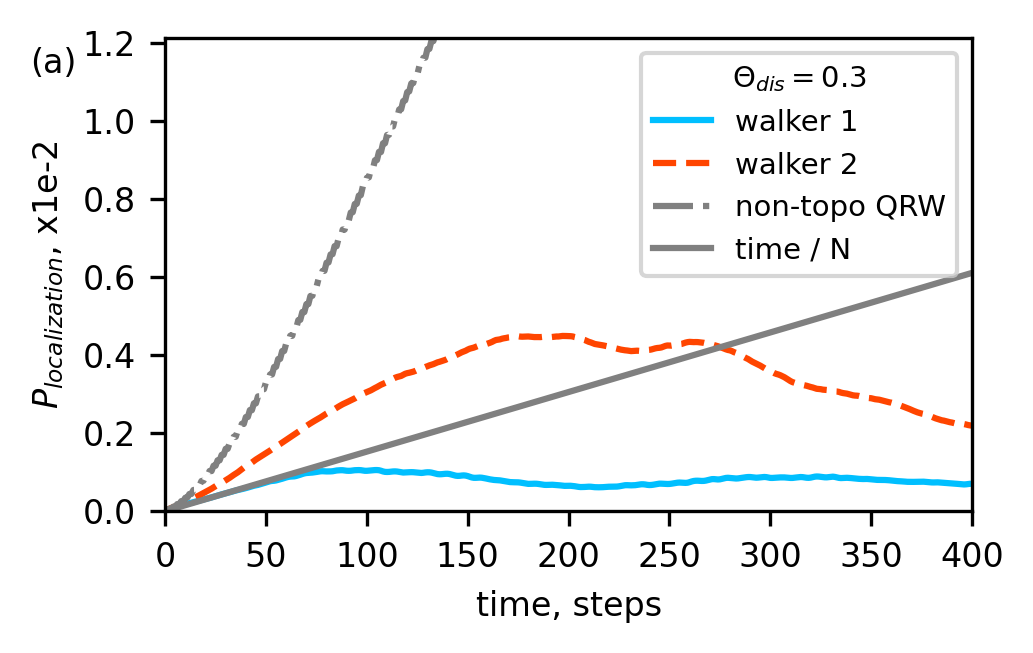

In [57]:
fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
#fig.subplots_adjust(bottom = 0.2, top=0.98, left=0.12, right=0.99)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)


time_set = range(500)

proba_walker1_size256_disorder03= [np.float64(2.55856595920064e-05), np.float64(4.0652203035687224e-05), np.float64(5.7547365554059634e-05), np.float64(7.452303887284948e-05), np.float64(9.122728655716061e-05), np.float64(0.00010669264485328188), np.float64(0.00011956679595919065), np.float64(0.00013214443212220822), np.float64(0.00014678804390417754), np.float64(0.00016198912032943535), np.float64(0.00017620019138821157), np.float64(0.0001897468614394175), np.float64(0.0002032874526908664), np.float64(0.00021695394593089777), np.float64(0.00023037368029822191), np.float64(0.0002444981642247731), np.float64(0.0002596103142310706), np.float64(0.00027350723227167307), np.float64(0.00028592501988562046), np.float64(0.00029836977574737626), np.float64(0.00031069166067491515), np.float64(0.00032365617384751984), np.float64(0.00033814228629079244), np.float64(0.00035312073683596866), np.float64(0.00036881809469566605), np.float64(0.000384876908141501), np.float64(0.00039966298431407394), np.float64(0.00041424649448750016), np.float64(0.00042904983212772765), np.float64(0.00044270968194546815), np.float64(0.00045627003863057204), np.float64(0.0004703278136545604), np.float64(0.00048432242282902253), np.float64(0.0004995529800460453), np.float64(0.0005154518789879812), np.float64(0.0005293349715367256), np.float64(0.0005408938175415475), np.float64(0.0005517292558874823), np.float64(0.0005636659467578344), np.float64(0.0005770149771276661), np.float64(0.0005905189760010946), np.float64(0.0006049273794181863), np.float64(0.0006213256599131478), np.float64(0.0006376665836384904), np.float64(0.0006513683621035097), np.float64(0.0006621814946050308), np.float64(0.0006730718253546244), np.float64(0.0006875864842704821), np.float64(0.0007041056125468576), np.float64(0.0007192726922664983), np.float64(0.0007345665333015461), np.float64(0.0007516246691758588), np.float64(0.0007663945956632561), np.float64(0.0007742272677331039), np.float64(0.0007787429286969736), np.float64(0.0007877398827097419), np.float64(0.0008014069420471526), np.float64(0.0008154474706795374), np.float64(0.0008306120353462936), np.float64(0.0008476420008372695), np.float64(0.0008637133975280768), np.float64(0.0008770126563552375), np.float64(0.0008848636522848666), np.float64(0.0008870547312527219), np.float64(0.0008913130334919871), np.float64(0.0009023271732440221), np.float64(0.0009169117704023356), np.float64(0.0009337928777279003), np.float64(0.0009520638414560802), np.float64(0.0009670845883866365), np.float64(0.0009768152027380332), np.float64(0.0009823988412584305), np.float64(0.0009853835556120735), np.float64(0.0009890347116750953), np.float64(0.000995566247455373), np.float64(0.0010039693627042555), np.float64(0.0010130826448260925), np.float64(0.001020916094235259), np.float64(0.0010235374445928154), np.float64(0.0010205482147454096), np.float64(0.0010177671653454107), np.float64(0.0010181975820078664), np.float64(0.0010190586190013263), np.float64(0.0010226192670329602), np.float64(0.001032453883543804), np.float64(0.0010418076087373225), np.float64(0.001046001806380067), np.float64(0.0010490300552796496), np.float64(0.001048618544987274), np.float64(0.0010417815383178398), np.float64(0.0010353498558595662), np.float64(0.0010333841713227622), np.float64(0.001035323795699878), np.float64(0.0010420121910355367), np.float64(0.0010489796350548308), np.float64(0.0010517309639790392), np.float64(0.0010525564889234756), np.float64(0.001049820685585636), np.float64(0.0010413098575517944), np.float64(0.001034264629156777), np.float64(0.0010339586223298333), np.float64(0.0010375874192287608), np.float64(0.001043193767955395), np.float64(0.00104922245130659), np.float64(0.0010526917184083286), np.float64(0.0010531306006317204), np.float64(0.0010486169912641917), np.float64(0.0010352300284774776), np.float64(0.0010177117852829987), np.float64(0.001006578701147063), np.float64(0.0010039578383242748), np.float64(0.001006221179148924), np.float64(0.0010118288405538667), np.float64(0.0010175010735298774), np.float64(0.0010188747221462143), np.float64(0.0010150231536451412), np.float64(0.0010060574384964504), np.float64(0.0009950462358002754), np.float64(0.0009895008002548107), np.float64(0.0009912594408514213), np.float64(0.0009947977463620904), np.float64(0.0009975679536303199), np.float64(0.0009994205193071125), np.float64(0.0009980371082750912), np.float64(0.0009932259015759464), np.float64(0.0009871289361240315), np.float64(0.0009810577023836341), np.float64(0.0009787158192476062), np.float64(0.0009837004970743512), np.float64(0.0009917655374932972), np.float64(0.000996234187231093), np.float64(0.0009954718297073284), np.float64(0.0009886121664806511), np.float64(0.0009754213516089633), np.float64(0.0009607360840317243), np.float64(0.0009499583740174785), np.float64(0.0009453147748606382), np.float64(0.0009472858564455007), np.float64(0.0009529548038120271), np.float64(0.000957566402401858), np.float64(0.0009579456406598223), np.float64(0.0009511020124068631), np.float64(0.0009368473285149374), np.float64(0.0009210869601140627), np.float64(0.000909505043671518), np.float64(0.0009038910873222892), np.float64(0.000905531079852106), np.float64(0.0009123337615174618), np.float64(0.0009162133731122846), np.float64(0.0009113751140528744), np.float64(0.0008984933617592506), np.float64(0.0008807968632836751), np.float64(0.0008638598690413335), np.float64(0.00085436689114156), np.float64(0.0008539554526652669), np.float64(0.0008579102733110555), np.float64(0.0008598937865270315), np.float64(0.0008564013223126228), np.float64(0.000848290380705192), np.float64(0.0008377545054515016), np.float64(0.0008262526135588719), np.float64(0.0008155278188412844), np.float64(0.0008064237727261617), np.float64(0.0007994566648146693), np.float64(0.0007960654579688981), np.float64(0.0007939532916099677), np.float64(0.0007883615983669352), np.float64(0.000779397581006734), np.float64(0.0007695451813006738), np.float64(0.000759414902181678), np.float64(0.0007504817394636357), np.float64(0.0007446766526030439), np.float64(0.0007416212862011394), np.float64(0.0007404501033285094), np.float64(0.0007400409371123823), np.float64(0.0007379451270266277), np.float64(0.0007324732448950377), np.float64(0.0007238427141822768), np.float64(0.0007134126257761247), np.float64(0.0007040871100233921), np.float64(0.0006990515639880501), np.float64(0.0006989022375484401), np.float64(0.0007013871462340457), np.float64(0.0007035153777817805), np.float64(0.0007025700820805969), np.float64(0.0006971358251343845), np.float64(0.0006886480869283389), np.float64(0.0006801670254884988), np.float64(0.0006741501977513379), np.float64(0.0006723681086809372), np.float64(0.00067460062431435), np.float64(0.0006772998302013593), np.float64(0.000676749100792163), np.float64(0.0006731612003508452), np.float64(0.0006692002914884843), np.float64(0.0006653965736671503), np.float64(0.0006596781397341453), np.float64(0.0006525490001860949), np.float64(0.0006482716098553613), np.float64(0.0006487781906538336), np.float64(0.0006508816081299626), np.float64(0.0006503536299687136), np.float64(0.0006460570200920363), np.float64(0.0006391258404557654), np.float64(0.0006303616774098362), np.float64(0.0006217815671147424), np.float64(0.0006173622074646754), np.float64(0.0006177968945693834), np.float64(0.0006202492950811915), np.float64(0.0006238108838197822), np.float64(0.0006271260105747626), np.float64(0.0006259275015116051), np.float64(0.0006199544468246308), np.float64(0.0006143734788223567), np.float64(0.0006122150172795205), np.float64(0.000611976189831029), np.float64(0.0006124886998155123), np.float64(0.0006148218304510697), np.float64(0.0006189514711425186), np.float64(0.0006231403385346174), np.float64(0.000626210471853595), np.float64(0.0006278420680782708), np.float64(0.000627862581555128), np.float64(0.000627631984535073), np.float64(0.0006300453862347267), np.float64(0.0006364933215595083), np.float64(0.0006460197966788101), np.float64(0.000656651664585209), np.float64(0.0006645324068640084), np.float64(0.0006658277917629635), np.float64(0.000662846514586265), np.float64(0.0006614740848805557), np.float64(0.0006626589255156772), np.float64(0.0006659374185005755), np.float64(0.0006735766350352568), np.float64(0.0006830361561436907), np.float64(0.0006884579505653385), np.float64(0.0006884456061658624), np.float64(0.0006829742987029517), np.float64(0.0006741022080344813), np.float64(0.0006690174011569152), np.float64(0.0006711089624241079), np.float64(0.0006777255692972195), np.float64(0.0006875828656415398), np.float64(0.000698426860244254), np.float64(0.0007045325417513153), np.float64(0.0007041379083559834), np.float64(0.0007008919433484212), np.float64(0.0006978237617288128), np.float64(0.0006962109765537288), np.float64(0.0006977546851476857), np.float64(0.0007035869877286445), np.float64(0.000712548045326768), np.float64(0.0007220380059720052), np.float64(0.0007295325688897317), np.float64(0.0007328662879065088), np.float64(0.0007314228279829536), np.float64(0.0007271900932761795), np.float64(0.000724441216204041), np.float64(0.000728949414588268), np.float64(0.0007430664070270722), np.float64(0.0007605473928419126), np.float64(0.0007732319110125936), np.float64(0.0007792484046880463), np.float64(0.0007799841245150843), np.float64(0.0007769789781448177), np.float64(0.0007739312688796623), np.float64(0.0007751590365151139), np.float64(0.0007827107798888194), np.float64(0.0007958588409931282), np.float64(0.0008103131891962253), np.float64(0.0008200116469981743), np.float64(0.0008215846438411545), np.float64(0.0008166287250096647), np.float64(0.0008120975349889883), np.float64(0.0008153338066402253), np.float64(0.00082667147660671), np.float64(0.0008405093373727698), np.float64(0.0008511863502953876), np.float64(0.000854919941821865), np.float64(0.0008518541425794341), np.float64(0.0008460988574938682), np.float64(0.000840303994482514), np.float64(0.0008366385503615767), np.float64(0.0008392195958910285), np.float64(0.0008473268619291609), np.float64(0.0008556617169676652), np.float64(0.0008627353987171978), np.float64(0.0008695176335629618), np.float64(0.0008743991968814202), np.float64(0.0008745000786307043), np.float64(0.000868759004810982), np.float64(0.000860653685952454), np.float64(0.000856914887360433), np.float64(0.0008598713563859933), np.float64(0.0008659452210136118), np.float64(0.0008721041154818568), np.float64(0.0008757543706980466), np.float64(0.0008719882335074521), np.float64(0.0008610276174311198), np.float64(0.000852069836363169), np.float64(0.0008511116550784155), np.float64(0.0008546732971071395), np.float64(0.000858604605350711), np.float64(0.0008621184250470091), np.float64(0.000864840601037653), np.float64(0.0008659923029422896), np.float64(0.0008645169646520406), np.float64(0.0008602591577327159), np.float64(0.0008548578434812807), np.float64(0.0008508741065345365), np.float64(0.0008512042801656322), np.float64(0.0008563445335092341), np.float64(0.0008634896298973001), np.float64(0.0008703016350509185), np.float64(0.0008742969552130982), np.float64(0.0008718900773028237), np.float64(0.0008639644999747694), np.float64(0.0008561369101730496), np.float64(0.0008536510040437594), np.float64(0.0008596257243498176), np.float64(0.0008718140226359668), np.float64(0.0008830866752658374), np.float64(0.0008883145044390435), np.float64(0.0008861707131782336), np.float64(0.000879079606673047), np.float64(0.000871994958160379), np.float64(0.0008670936718821734), np.float64(0.0008661571114738544), np.float64(0.0008722293336498044), np.float64(0.0008810815882212365), np.float64(0.0008835823678343665), np.float64(0.0008769437577349108), np.float64(0.0008648568978102742), np.float64(0.0008530489245969733), np.float64(0.0008475003946732905), np.float64(0.0008496732319429254), np.float64(0.0008541548424432336), np.float64(0.0008547911807825362), np.float64(0.0008517119454530765), np.float64(0.0008478568575642205), np.float64(0.0008424530797007185), np.float64(0.0008354847066687201), np.float64(0.0008304554673686517), np.float64(0.0008274253234829901), np.float64(0.000824385297197489), np.float64(0.0008230797270525877), np.float64(0.000824465331980759), np.float64(0.0008250109154103154), np.float64(0.0008217966421515913), np.float64(0.0008160596613681657), np.float64(0.000810180585215269), np.float64(0.0008048810580080408), np.float64(0.0008011807493430716), np.float64(0.0008005828840112085), np.float64(0.0008014461393643663), np.float64(0.0008006781641912174), np.float64(0.0007981425963732216), np.float64(0.0007950917723359598), np.float64(0.0007909779095148538), np.float64(0.0007851560702852717), np.float64(0.0007792238383550442), np.float64(0.0007743941631648256), np.float64(0.0007696539077857445), np.float64(0.0007656416602695374), np.float64(0.0007636971157150421), np.float64(0.0007611945001165908), np.float64(0.000756124416055883), np.float64(0.0007516907352913729), np.float64(0.0007505099241617114), np.float64(0.0007505497353730602), np.float64(0.000750285427080858), np.float64(0.0007517537989314083), np.float64(0.0007552351072954186), np.float64(0.0007572623541802161), np.float64(0.0007566712193737086), np.float64(0.0007549288555506836), np.float64(0.0007513506943138791), np.float64(0.0007456841777799012), np.float64(0.0007401835423204165), np.float64(0.000736418330541637), np.float64(0.000735611734239347), np.float64(0.000737672292827379), np.float64(0.0007381828364295502), np.float64(0.0007344762508480593), np.float64(0.0007306240993171205), np.float64(0.0007286107705957241), np.float64(0.0007244837246262827), np.float64(0.0007188700884217409), np.float64(0.0007163571607881489), np.float64(0.0007147057440994372), np.float64(0.0007097879553750788), np.float64(0.0007035999741199509), np.float64(0.0006983024599796814), np.float64(0.0006928576873660274), np.float64(0.0006873643961067169), np.float64(0.0006846451759259635), np.float64(0.0006877455762846257), np.float64(0.0006951885425657801), np.float64(0.00070071868912766), np.float64(0.000701075999228244), np.float64(0.0006991136145459423), np.float64(0.0006977785979668512), np.float64(0.0006964223267151056), np.float64(0.0006942935845036526), np.float64(0.0006936481424400638), np.float64(0.0006963610679355659), np.float64(0.0007006572102177197), np.float64(0.000703893824736495), np.float64(0.0007046530107149819), np.float64(0.0007038420212176303), np.float64(0.000703698552563898), np.float64(0.0007027803589406169), np.float64(0.0007005000198615828), np.float64(0.0007028740647856041), np.float64(0.0007113118035030035), np.float64(0.0007188750776796083), np.float64(0.0007228418123350775), np.float64(0.0007245818647783553), np.float64(0.0007233901763993123), np.float64(0.0007204329341755845), np.float64(0.0007178957232905898), np.float64(0.0007155628259891672), np.float64(0.0007142004497957972), np.float64(0.0007151331864708674), np.float64(0.0007167292859199166), np.float64(0.0007171802779736027), np.float64(0.0007172459350259055), np.float64(0.0007169870034894978), np.float64(0.0007138749825711404), np.float64(0.0007077696046948802), np.float64(0.0007044001250671176), np.float64(0.0007088090981051862), np.float64(0.0007174302600658273), np.float64(0.0007235336953568811), np.float64(0.0007263637779876241), np.float64(0.0007277507253962857), np.float64(0.0007260630953982625), np.float64(0.0007205113895040761), np.float64(0.000715276849214053), np.float64(0.0007145285123618745), np.float64(0.0007185219961184388), np.float64(0.0007258763937117118), np.float64(0.0007344122182211243), np.float64(0.0007396706560146431), np.float64(0.000738884467458405), np.float64(0.0007349543186189317), np.float64(0.0007319451578644758), np.float64(0.0007316954409426812), np.float64(0.0007367673753108569), np.float64(0.0007478624848106707), np.float64(0.0007597312703517535), np.float64(0.0007673455008221832), np.float64(0.0007702367469959304), np.float64(0.000769290013050856), np.float64(0.0007673567502427408), np.float64(0.0007683044154621827), np.float64(0.0007713316858855625), np.float64(0.0007743875729348912), np.float64(0.0007794645789120154), np.float64(0.0007863149591526187), np.float64(0.0007893502902692574), np.float64(0.0007866475594854748), np.float64(0.0007829017103119032), np.float64(0.0007824497742013875), np.float64(0.0007855605993724096), np.float64(0.0007904311041143071), np.float64(0.0007959144050342759), np.float64(0.0008026132112422887), np.float64(0.0008104423373853824), np.float64(0.0008162743262271034), np.float64(0.0008174590900065533), np.float64(0.0008155892414016596), np.float64(0.0008136387170779044), np.float64(0.000812162729315067), np.float64(0.0008101163815986363), np.float64(0.0008087169865434983), np.float64(0.0008111581778146033), np.float64(0.000816748558757442), np.float64(0.0008208550774694984), np.float64(0.0008215399083376769), np.float64(0.000819999193275442), np.float64(0.0008172965747658947), np.float64(0.000815358951676734), np.float64(0.0008171347652898405), np.float64(0.0008238565293750587), np.float64(0.0008325757607250998), np.float64(0.0008381307003750499), np.float64(0.0008387962235842147), np.float64(0.0008356754622732979), np.float64(0.0008297844866904768), np.float64(0.0008250999676584464), np.float64(0.0008258405844839717), np.float64(0.0008294846082348469), np.float64(0.0008320814987871886), np.float64(0.0008346911826677567), np.float64(0.0008381844572474054), np.float64(0.0008397888221271689), np.float64(0.0008377755674849245), np.float64(0.0008357171890033255)]
proba_walker2_size256_disorder03= [np.float64(4.003948179252268e-05), np.float64(4.476070932389605e-05), np.float64(5.698891608200758e-05), np.float64(8.207247051950268e-05), np.float64(0.00010173010534160617), np.float64(0.00011923001917353248), np.float64(0.00013984711733958127), np.float64(0.00015926464712949208), np.float64(0.0001786267202049777), np.float64(0.00020357575461914037), np.float64(0.00023071949537866203), np.float64(0.0002534208052497813), np.float64(0.0002773654703996864), np.float64(0.0003058062034529847), np.float64(0.0003321951826025254), np.float64(0.00035613981540055393), np.float64(0.00038112890325366614), np.float64(0.00040807702052710006), np.float64(0.0004360619584106788), np.float64(0.0004635880376255855), np.float64(0.0004920009094437206), np.float64(0.0005207497863922602), np.float64(0.0005478594956460791), np.float64(0.0005763737372281443), np.float64(0.0006088391299462211), np.float64(0.0006427895721629266), np.float64(0.0006729380821956107), np.float64(0.0006987983111740686), np.float64(0.0007266011112271647), np.float64(0.0007580637012681757), np.float64(0.0007896576298411399), np.float64(0.0008210831631331368), np.float64(0.0008557283993536428), np.float64(0.0008936501286133703), np.float64(0.0009287776524411963), np.float64(0.000960534933821771), np.float64(0.0009950738038809347), np.float64(0.0010337369348117347), np.float64(0.0010749872837367293), np.float64(0.0011147266453574904), np.float64(0.0011490412192081561), np.float64(0.001181747005639549), np.float64(0.0012139980324979104), np.float64(0.0012460613487294007), np.float64(0.0012837503424583598), np.float64(0.0013225313052963711), np.float64(0.001355182882470054), np.float64(0.0013870393800269997), np.float64(0.0014205725706370191), np.float64(0.0014528235328273137), np.float64(0.0014857906113706428), np.float64(0.0015193509168104386), np.float64(0.0015521561921549402), np.float64(0.00158862606608253), np.float64(0.0016262091520811157), np.float64(0.0016566530837137713), np.float64(0.001685726923877948), np.float64(0.0017204853379027992), np.float64(0.0017552249930152912), np.float64(0.0017888984342796094), np.float64(0.0018236867689461404), np.float64(0.0018586214159801123), np.float64(0.0018957141381389386), np.float64(0.0019314414077848609), np.float64(0.0019649128587580587), np.float64(0.002001686265606179), np.float64(0.002035995237278216), np.float64(0.0020687035227269866), np.float64(0.0021089807837354818), np.float64(0.0021485963605287835), np.float64(0.0021827775739794173), np.float64(0.0022169957086886107), np.float64(0.0022483116077215708), np.float64(0.002278502912698027), np.float64(0.002311453282541992), np.float64(0.002342847712363225), np.float64(0.0023717609834776427), np.float64(0.0024007193746585485), np.float64(0.0024343318678411428), np.float64(0.002471149829578481), np.float64(0.002501398166503071), np.float64(0.0025296185591051437), np.float64(0.002561864206371188), np.float64(0.0025891067356570577), np.float64(0.002615067898792955), np.float64(0.0026478084719473165), np.float64(0.0026796074740542157), np.float64(0.002709438170686241), np.float64(0.0027389550264844344), np.float64(0.0027626656912560442), np.float64(0.0027852245778667174), np.float64(0.002812432493729059), np.float64(0.002839545734711786), np.float64(0.0028635534694648494), np.float64(0.0028884630254365252), np.float64(0.002920655026998201), np.float64(0.002956316785293807), np.float64(0.002983951738724931), np.float64(0.0030061091746416795), np.float64(0.0030300749390106277), np.float64(0.003051777018845663), np.float64(0.0030710189898380644), np.float64(0.0030957292229965997), np.float64(0.003125973275163079), np.float64(0.0031539230940030505), np.float64(0.0031800560913792042), np.float64(0.003210112704992464), np.float64(0.003238393091845803), np.float64(0.003260594141818869), np.float64(0.0032835223868365676), np.float64(0.0033070474130203835), np.float64(0.0033307506603973574), np.float64(0.0033609185846896206), np.float64(0.003392497375632518), np.float64(0.0034177918715176934), np.float64(0.003436873911174685), np.float64(0.0034495453813957874), np.float64(0.003464357606981653), np.float64(0.0034912248581995724), np.float64(0.0035193688646841443), np.float64(0.003535418393332571), np.float64(0.00354533002505973), np.float64(0.003558252334463169), np.float64(0.0035733465342606867), np.float64(0.003592335186125172), np.float64(0.0036158502956592947), np.float64(0.003634371496852325), np.float64(0.003649819145867701), np.float64(0.0036721042058068835), np.float64(0.0036938358142541857), np.float64(0.0037122267609954857), np.float64(0.0037341728763781354), np.float64(0.0037517106192837663), np.float64(0.0037664448935161923), np.float64(0.003790006403037556), np.float64(0.003811555877575433), np.float64(0.0038255213820609464), np.float64(0.0038433427187012184), np.float64(0.00386113474780456), np.float64(0.003877400798240056), np.float64(0.0039029782681526404), np.float64(0.003930612966019343), np.float64(0.003950699861843781), np.float64(0.003970444206853373), np.float64(0.003992531538154183), np.float64(0.0040160421131847715), np.float64(0.004043750643123239), np.float64(0.0040694474144566724), np.float64(0.004088413596080382), np.float64(0.004110383593396808), np.float64(0.004138922829840632), np.float64(0.004162143998982132), np.float64(0.004175555031133969), np.float64(0.00418949617559109), np.float64(0.004209652990892339), np.float64(0.004230112090774123), np.float64(0.004245782651033312), np.float64(0.00425692333627801), np.float64(0.004265714248367265), np.float64(0.004276862117004377), np.float64(0.0042939467867080024), np.float64(0.004313565119067679), np.float64(0.004334803905065252), np.float64(0.004361937084185705), np.float64(0.004384466996932544), np.float64(0.004391817499405393), np.float64(0.004400234322712899), np.float64(0.0044175260418159185), np.float64(0.004428772785904015), np.float64(0.004436903543892438), np.float64(0.004448750182805989), np.float64(0.00445292450504025), np.float64(0.004453459998745997), np.float64(0.004465475393642828), np.float64(0.004479742084976876), np.float64(0.004479940040375235), np.float64(0.004471665944945472), np.float64(0.004468665806304657), np.float64(0.004471342600676859), np.float64(0.004474222623402568), np.float64(0.0044746979338071554), np.float64(0.0044696223188619355), np.float64(0.004461908275208944), np.float64(0.004459433733509733), np.float64(0.004460805756877091), np.float64(0.004459341587985321), np.float64(0.004458442779613535), np.float64(0.004464171508724557), np.float64(0.004466095365531763), np.float64(0.004456583624464052), np.float64(0.004451532697881215), np.float64(0.004457668555362118), np.float64(0.004465510643986553), np.float64(0.004472565774784842), np.float64(0.0044744442434354725), np.float64(0.004474451515614459), np.float64(0.0044827549827895895), np.float64(0.004488248724811966), np.float64(0.0044859109630399595), np.float64(0.004486278260607433), np.float64(0.004485486436553622), np.float64(0.004482064058505175), np.float64(0.0044755009317228546), np.float64(0.0044597040331565635), np.float64(0.004448813554990272), np.float64(0.004443538222894971), np.float64(0.004423066436150648), np.float64(0.004399281364875178), np.float64(0.004384176507709965), np.float64(0.0043618849904798395), np.float64(0.004338064689650571), np.float64(0.004322621847391362), np.float64(0.004302586248001233), np.float64(0.004282210226827041), np.float64(0.004274029024536132), np.float64(0.0042675521958786145), np.float64(0.0042565707703957675), np.float64(0.0042471070923005266), np.float64(0.00423619271190008), np.float64(0.004223759928952419), np.float64(0.004215063483587207), np.float64(0.004203877931384671), np.float64(0.004187775610224289), np.float64(0.004174890563029064), np.float64(0.004163781764493154), np.float64(0.0041500384033692685), np.float64(0.004137520935380643), np.float64(0.004127648974455526), np.float64(0.004120630475264639), np.float64(0.004115461433371001), np.float64(0.004106901277786097), np.float64(0.004100169161308799), np.float64(0.004104202723426666), np.float64(0.0041110217680797295), np.float64(0.0041104730973744235), np.float64(0.004105818735479323), np.float64(0.004105380356168148), np.float64(0.00411293522687726), np.float64(0.004122343620649947), np.float64(0.004127327822878471), np.float64(0.004131964043838805), np.float64(0.004141019127960948), np.float64(0.004155087215546833), np.float64(0.004170514373888428), np.float64(0.004179945091955211), np.float64(0.00418449334093795), np.float64(0.0041938536118711275), np.float64(0.004212227198120725), np.float64(0.004233153989054506), np.float64(0.0042441513326741415), np.float64(0.004242545938974122), np.float64(0.004240285308845149), np.float64(0.004248487664097649), np.float64(0.00426583061541241), np.float64(0.0042773225621355795), np.float64(0.0042767644977907615), np.float64(0.0042823527892206165), np.float64(0.004301162300799427), np.float64(0.0043183379880203775), np.float64(0.004330058531390812), np.float64(0.004336736231113521), np.float64(0.004333991368049286), np.float64(0.004330360380830088), np.float64(0.004332026834068909), np.float64(0.004330621488993869), np.float64(0.004324901816243874), np.float64(0.004319868829060611), np.float64(0.004312594638123578), np.float64(0.004299951463378707), np.float64(0.004286400602485911), np.float64(0.004277523832155136), np.float64(0.004269508478626216), np.float64(0.004254931855483977), np.float64(0.004238817416660085), np.float64(0.004225369375857299), np.float64(0.00420649570787722), np.float64(0.0041846006971824005), np.float64(0.0041658734750353865), np.float64(0.00414503239526484), np.float64(0.004128270141038724), np.float64(0.004118472838834467), np.float64(0.004098807501784211), np.float64(0.004072969987783487), np.float64(0.0040540991406892634), np.float64(0.004030984593188762), np.float64(0.004001664970993721), np.float64(0.0039751359610041845), np.float64(0.003947453718637726), np.float64(0.003920682943649943), np.float64(0.003895928427710552), np.float64(0.0038639275650529494), np.float64(0.003830677133968549), np.float64(0.0038054938064996597), np.float64(0.00378147785889719), np.float64(0.0037551353100484684), np.float64(0.003728069651543401), np.float64(0.0036973331305685544), np.float64(0.003664753011178684), np.float64(0.003635244590943934), np.float64(0.0036092994862507665), np.float64(0.003585952496623547), np.float64(0.003561194868605843), np.float64(0.003534915910236513), np.float64(0.0035153028306962285), np.float64(0.0035006523173829996), np.float64(0.003481225668135761), np.float64(0.003457152933452013), np.float64(0.0034303586558720317), np.float64(0.0033990581376369027), np.float64(0.003364565770095242), np.float64(0.0033312418745944762), np.float64(0.0033056547113209855), np.float64(0.0032879062800822193), np.float64(0.00327128688733387), np.float64(0.003256926145317856), np.float64(0.003245705768334222), np.float64(0.003232845756366751), np.float64(0.0032217761093586254), np.float64(0.0032120509580710727), np.float64(0.0031963501257896423), np.float64(0.0031808037480896417), np.float64(0.0031683882386302313), np.float64(0.0031503689980823244), np.float64(0.0031346330805226987), np.float64(0.0031303698836379784), np.float64(0.0031243982559877466), np.float64(0.0031129203216885308), np.float64(0.0031074049971076966), np.float64(0.00310386220585173), np.float64(0.003092981207447775), np.float64(0.003079196945955541), np.float64(0.003069524553157715), np.float64(0.0030663714653527455), np.float64(0.003064955773001097), np.float64(0.003054995527712449), np.float64(0.0030378835314175375), np.float64(0.0030252921497305957), np.float64(0.003018574492091037), np.float64(0.0030098613249674422), np.float64(0.0029963735898111536), np.float64(0.002980731155639018), np.float64(0.002967339432621401), np.float64(0.002960708237906269), np.float64(0.0029578159198501612), np.float64(0.0029506059068788717), np.float64(0.0029387160354455767), np.float64(0.002925294627637938), np.float64(0.0029116669312857185), np.float64(0.0029026287269483227), np.float64(0.0028988773332518473), np.float64(0.0028923819986002314), np.float64(0.0028796712644446336), np.float64(0.002867464802707596), np.float64(0.002861314150558736), np.float64(0.0028549516037146318), np.float64(0.002841046584616655), np.float64(0.0028255704035486926), np.float64(0.0028130310758455053), np.float64(0.00279966740121275), np.float64(0.00278823449222064), np.float64(0.002779023795072991), np.float64(0.002764034502017759), np.float64(0.0027459893880624874), np.float64(0.0027314251325131047), np.float64(0.002716086917908751), np.float64(0.0026966607414599204), np.float64(0.002676404105777496), np.float64(0.0026578895731257978), np.float64(0.0026388941250369224), np.float64(0.0026162598435719767), np.float64(0.002592645332233162), np.float64(0.0025708564637785328), np.float64(0.0025497068238481756), np.float64(0.002530391146824491), np.float64(0.002513780164391177), np.float64(0.002499926702937344), np.float64(0.0024893499500420685), np.float64(0.002474806270724618), np.float64(0.0024538614700883392), np.float64(0.0024360620777670286), np.float64(0.0024188984923997304), np.float64(0.0023962779746435937), np.float64(0.002376300013600012), np.float64(0.002359532175480976), np.float64(0.0023410434562305574), np.float64(0.002327663280725136), np.float64(0.002319112249377513), np.float64(0.0023055740981800374), np.float64(0.002289594167816887), np.float64(0.002278903900478937), np.float64(0.0022700579533657555), np.float64(0.002256624822894256), np.float64(0.00224280940397808), np.float64(0.002235041604320699), np.float64(0.0022323519579705393), np.float64(0.0022328025761687706), np.float64(0.0022311577961519335), np.float64(0.002220611824954602), np.float64(0.0022067622355051277), np.float64(0.0021972381586425767), np.float64(0.0021912324316693903), np.float64(0.002185092029578415), np.float64(0.0021735188414060943), np.float64(0.002161608319959317), np.float64(0.002161951686933756), np.float64(0.002166895625487895), np.float64(0.0021631983988050223), np.float64(0.0021578837063534724), np.float64(0.00215510477930835), np.float64(0.002150675012801791), np.float64(0.002150100135044574), np.float64(0.002149506676535344), np.float64(0.002137282241284277), np.float64(0.0021275225734594732), np.float64(0.002132168904564105), np.float64(0.0021345595890458037), np.float64(0.0021306324784223655), np.float64(0.0021297710425930284), np.float64(0.002125794982824482), np.float64(0.0021189118808906237), np.float64(0.0021166767449777263), np.float64(0.002117260720730399), np.float64(0.0021206283572263564), np.float64(0.0021226826958219295), np.float64(0.0021217545772196445), np.float64(0.002127680760423413), np.float64(0.00213438125543864), np.float64(0.0021342037538654686), np.float64(0.002136704762544285), np.float64(0.0021384430428979142), np.float64(0.002134412506121514), np.float64(0.002133812160637932), np.float64(0.0021351061014209857), np.float64(0.002134504901128391), np.float64(0.0021360753940742666), np.float64(0.0021380142636189857), np.float64(0.0021384947108160266), np.float64(0.0021399004792510045), np.float64(0.002142992597881418), np.float64(0.002146601821118842), np.float64(0.002149483632714043), np.float64(0.002153340506515837), np.float64(0.0021575278373383664), np.float64(0.0021592295892415682), np.float64(0.0021598629381897037), np.float64(0.0021607183506554685), np.float64(0.0021652415947133728), np.float64(0.002174742122677522), np.float64(0.002180208768653014), np.float64(0.002178917708031416), np.float64(0.002175804458363852), np.float64(0.002171292212839079), np.float64(0.002171011853434138), np.float64(0.002177485697380651), np.float64(0.002178945013229785), np.float64(0.0021735320307457984), np.float64(0.0021720612890834216), np.float64(0.0021732501931021548), np.float64(0.0021719561774444455), np.float64(0.002173513778960641), np.float64(0.0021769898069149084), np.float64(0.0021735578372585234), np.float64(0.0021661782929694013), np.float64(0.0021614932769391908), np.float64(0.0021567464443495886), np.float64(0.002150803487767182), np.float64(0.0021480257205641093), np.float64(0.0021477018239646132), np.float64(0.0021402119769242346), np.float64(0.0021245050866101145), np.float64(0.0021155289937181835), np.float64(0.0021136503840687723), np.float64(0.002105701384493163), np.float64(0.0020994812027180943), np.float64(0.002102607129340762), np.float64(0.0021011965636147057), np.float64(0.002089981086660014), np.float64(0.0020776558919021492), np.float64(0.0020697420814751446), np.float64(0.002065173301294782), np.float64(0.0020585394559145768), np.float64(0.0020507982598716927), np.float64(0.002046011468356672), np.float64(0.002042378952669387), np.float64(0.002042534441840761), np.float64(0.002048901954500638), np.float64(0.002053004665495478), np.float64(0.002049784236365024), np.float64(0.002042639894647484), np.float64(0.002034647938111742), np.float64(0.0020325498424881186), np.float64(0.0020427483493474174), np.float64(0.002057040745635525), np.float64(0.002065181943023961), np.float64(0.0020713949672271034), np.float64(0.002079082468452105), np.float64(0.002084466844875921), np.float64(0.002087514542781557), np.float64(0.002089401036127263), np.float64(0.0020937521213113767)]

plt.plot(time_set, proba_walker1_size256_disorder03, color='deepskyblue', label = 'walker 1')
plt.plot(time_set, proba_walker2_size256_disorder03, '--', color='orangered', label = 'walker 2')

m_grover= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
p_grover_size256_disorder03 = [np.float64(1.5258789062499997e-05), np.float64(1.5384770053520593e-05), np.float64(6.073691068403744e-05), np.float64(6.117566764784267e-05), np.float64(0.00011396887694356921), np.float64(0.00011393597710216399), np.float64(0.00018170256295421973), np.float64(0.00018176634455104203), np.float64(0.0002580448535500769), np.float64(0.00025731542480068994), np.float64(0.00034537109434972673), np.float64(0.00034566821334477916), np.float64(0.00044041844154229213), np.float64(0.00043971893949991934), np.float64(0.0005433633271392062), np.float64(0.0005454340790434954), np.float64(0.0006546461501149128), np.float64(0.00065397274222466), np.float64(0.0007730611128131125), np.float64(0.0007764472797657042), np.float64(0.0008966226105181164), np.float64(0.0008963601300847215), np.float64(0.0010283514815085752), np.float64(0.0010270510183395518), np.float64(0.0011642564464219697), np.float64(0.0011624494836046041), np.float64(0.0013034018229743443), np.float64(0.00130104709386819), np.float64(0.001441893558194942), np.float64(0.0014427955375676351), np.float64(0.0015977364837770583), np.float64(0.001595888800290705), np.float64(0.0017505040759663386), np.float64(0.0017503059371394123), np.float64(0.0019068416278951957), np.float64(0.0019050546354036039), np.float64(0.0020693162068431757), np.float64(0.0020653115049976563), np.float64(0.002236716393174215), np.float64(0.002234683743938066), np.float64(0.00241136961346276), np.float64(0.0024122439856091903), np.float64(0.002589991025233515), np.float64(0.0025858000824542033), np.float64(0.002762510150212948), np.float64(0.0027617343135255216), np.float64(0.0029400905181912428), np.float64(0.0029422270648813394), np.float64(0.0031223455258594375), np.float64(0.003124161832318393), np.float64(0.0033114535321549536), np.float64(0.003310550828385726), np.float64(0.003500623362693924), np.float64(0.00350089527499077), np.float64(0.0036936900141915203), np.float64(0.003698349630748406), np.float64(0.0038964373398846196), np.float64(0.0038993947401459715), np.float64(0.00410096531778783), np.float64(0.004102284501089267), np.float64(0.004295777571568282), np.float64(0.0042915661567431915), np.float64(0.004493569290499678), np.float64(0.004491235235179279), np.float64(0.004694015292407075), np.float64(0.004691780545561773), np.float64(0.00489299378329741), np.float64(0.00490016676859059), np.float64(0.0051027638384903195), np.float64(0.0050986955125971135), np.float64(0.005302405732978141), np.float64(0.0053040599323378864), np.float64(0.0055110301939736124), np.float64(0.0055174424004591095), np.float64(0.0057305177994062435), np.float64(0.005738420040857141), np.float64(0.005942206695251827), np.float64(0.005945796465331854), np.float64(0.006153090742001767), np.float64(0.0061563782742105454), np.float64(0.006364042386864584), np.float64(0.006371492654260477), np.float64(0.006576305181564965), np.float64(0.006582517963152736), np.float64(0.006789923284819134), np.float64(0.006786641453093195), np.float64(0.006994623112226853), np.float64(0.007002103965560414), np.float64(0.0072137477137935975), np.float64(0.007213167639989004), np.float64(0.007434014072323192), np.float64(0.007439348093276332), np.float64(0.007650094601351737), np.float64(0.0076575513725082615), np.float64(0.00786899352327518), np.float64(0.007874109460035994), np.float64(0.008083790293158267), np.float64(0.008094397593907413), np.float64(0.008318849544271428), np.float64(0.008327568484201677), np.float64(0.008539351014640104), np.float64(0.00854999737411262), np.float64(0.00876293637494473), np.float64(0.008769694225358388), np.float64(0.008989194252570424), np.float64(0.008993146212545428), np.float64(0.009203793295921399), np.float64(0.009198692785611664), np.float64(0.009423177344756341), np.float64(0.009422429964263707), np.float64(0.00963540296217592), np.float64(0.009640433564295578), np.float64(0.009856811698031945), np.float64(0.009854921354133477), np.float64(0.010068951276958556), np.float64(0.01007482515612865), np.float64(0.010288168226255136), np.float64(0.010293282969615274), np.float64(0.01050548880051188), np.float64(0.01052058417882087), np.float64(0.010735826927526346), np.float64(0.010750811590924237), np.float64(0.010955397964204017), np.float64(0.010965531366092232), np.float64(0.011176135613724299), np.float64(0.011181935392534911), np.float64(0.011396866627088737), np.float64(0.011394917462390023), np.float64(0.01161287445288288), np.float64(0.011616886754471237), np.float64(0.011833073151509919), np.float64(0.011840937730606816), np.float64(0.012047840104463357), np.float64(0.01204167123807907), np.float64(0.012252196099678673), np.float64(0.012253321609949139), np.float64(0.012459910881723085), np.float64(0.012463585592078922), np.float64(0.01266676796538924), np.float64(0.012654035721684229), np.float64(0.01286268945383221), np.float64(0.012861914535152697), np.float64(0.013076116450233507), np.float64(0.013083630269621218), np.float64(0.01328740690636438), np.float64(0.013291637487592193), np.float64(0.013495200881994523), np.float64(0.013499259480048787), np.float64(0.01368703337025957), np.float64(0.013688438258250533), np.float64(0.013874548381321558), np.float64(0.013877677165058267), np.float64(0.014060994656463963), np.float64(0.014061151938793745), np.float64(0.014260876649569407), np.float64(0.014270099584357668), np.float64(0.014463803215579357), np.float64(0.014459218123691109), np.float64(0.014648904370960886), np.float64(0.014639760244156827), np.float64(0.014829121673021927), np.float64(0.014833287906164217), np.float64(0.015033405082635481), np.float64(0.015038634415083397), np.float64(0.01523868043840006), np.float64(0.015243644881911465), np.float64(0.015435502695286183), np.float64(0.015429496153588036), np.float64(0.015618855987485072), np.float64(0.015608506742266789), np.float64(0.015795604611784593), np.float64(0.015786042137083), np.float64(0.015981623845482573), np.float64(0.015976309754220597), np.float64(0.016169397163897883), np.float64(0.016176904141464443), np.float64(0.01636013652192863), np.float64(0.016356911789387432), np.float64(0.016546183994916235), np.float64(0.016539870320678402), np.float64(0.01672848190551731), np.float64(0.016707263672949717), np.float64(0.01688906981582615), np.float64(0.01688101968279595), np.float64(0.01707565362715631), np.float64(0.01707329178567907), np.float64(0.017251006459466364), np.float64(0.01723542858877039), np.float64(0.01741521563410296), np.float64(0.017423547551713176), np.float64(0.017616809757553156), np.float64(0.01763192445650497), np.float64(0.017806045239199448), np.float64(0.01779987352802437), np.float64(0.01797610431989486), np.float64(0.01796483333331631), np.float64(0.0181460436256147), np.float64(0.018154098247637127), np.float64(0.018334021422143052), np.float64(0.0183289697921265), np.float64(0.018495003067965914), np.float64(0.018496625193336766), np.float64(0.018677656663371324), np.float64(0.01868175838357632), np.float64(0.0188568764678607), np.float64(0.018857349845710074), np.float64(0.01900707023625741), np.float64(0.019010550605435904), np.float64(0.01917963605955345), np.float64(0.019181703195688106), np.float64(0.019362395466968663), np.float64(0.019369500363010224), np.float64(0.019553474901963935), np.float64(0.01956304363238016), np.float64(0.019735842319658435), np.float64(0.019732764908234383), np.float64(0.019898387713831147), np.float64(0.019907871657629122), np.float64(0.020070290223893915), np.float64(0.02005942694040286), np.float64(0.02021873599418521), np.float64(0.020206607779948135), np.float64(0.020369466473472788), np.float64(0.020379647477744865), np.float64(0.020536106266788125), np.float64(0.02054073706650667), np.float64(0.020694778590075524), np.float64(0.020706832369455138), np.float64(0.020869445725852625), np.float64(0.020866225791952346), np.float64(0.02104055697015687), np.float64(0.021038094391598768), np.float64(0.021210011091654716), np.float64(0.021217966011196097), np.float64(0.021381152359039444), np.float64(0.02137934532235285), np.float64(0.0215503391155223), np.float64(0.02155577800734449), np.float64(0.021717382466329482), np.float64(0.021707762878500722), np.float64(0.021862512649576827), np.float64(0.021871040643234925), np.float64(0.022027463987601307), np.float64(0.022039029113309693), np.float64(0.02218509213462107), np.float64(0.0221891260538752), np.float64(0.022346427374417298), np.float64(0.022348479010706874), np.float64(0.02249174479744), np.float64(0.02249905060984988), np.float64(0.022638842632356684), np.float64(0.02264255491556421), np.float64(0.022794184559691517), np.float64(0.02281001738707934), np.float64(0.022960522043115397), np.float64(0.022976365389465802), np.float64(0.023087532889713797), np.float64(0.02310788776991885), np.float64(0.023158225838438618), np.float64(0.02318003409247753), np.float64(0.023209959741259216), np.float64(0.02321746383599254), np.float64(0.023243934575994718), np.float64(0.02325056638221437), np.float64(0.02326850282768117), np.float64(0.023273595342231196), np.float64(0.02328974623354008), np.float64(0.02328092005789632), np.float64(0.023268589415317713), np.float64(0.023284625029434895), np.float64(0.023281678128722533), np.float64(0.023297952751264693), np.float64(0.02328447996920651), np.float64(0.023300720778536333), np.float64(0.02328219911824323), np.float64(0.02328872464971669), np.float64(0.023266970537251443), np.float64(0.02326432100268324), np.float64(0.023251641472997547), np.float64(0.02327135269428829), np.float64(0.0232568638868808), np.float64(0.023275058652423058), np.float64(0.02324700364375504), np.float64(0.023254824178772324), np.float64(0.02322260118663119), np.float64(0.023239020266980864), np.float64(0.023201278651762712), np.float64(0.02320933145712604), np.float64(0.02316684296850912), np.float64(0.02320304582493888), np.float64(0.023146586863935482), np.float64(0.023168118901034006), np.float64(0.02312060550640591), np.float64(0.023128490811693495), np.float64(0.023068294884545756), np.float64(0.02309722852772187), np.float64(0.02303215117932388), np.float64(0.023062951453226514), np.float64(0.02299853746628231), np.float64(0.023011801669188377), np.float64(0.022942754527810517), np.float64(0.022957634817443236), np.float64(0.022872801474268158), np.float64(0.02288409313590522), np.float64(0.022799325375183744), np.float64(0.02280095911716764), np.float64(0.02272515565615273), np.float64(0.022744737525315882), np.float64(0.022655682981171175), np.float64(0.022665991392038586), np.float64(0.02257445478453183), np.float64(0.0225990437139817), np.float64(0.02251476753292978), np.float64(0.022543043891249732), np.float64(0.022442781996297845), np.float64(0.022466072818389086), np.float64(0.02236926081336945), np.float64(0.02238284424508093), np.float64(0.022272572714997815), np.float64(0.02228997993200138), np.float64(0.02218779672869078), np.float64(0.022210651404014063), np.float64(0.022088093209653763), np.float64(0.02210341018599863), np.float64(0.021989753322490042), np.float64(0.022009206817501962), np.float64(0.021894601882691763), np.float64(0.02191295007573047), np.float64(0.021795899454830656), np.float64(0.0217990866426358), np.float64(0.021669003708148303), np.float64(0.021686631020409783), np.float64(0.021569413631832502), np.float64(0.021568557433876163), np.float64(0.021458770502014272), np.float64(0.02145854013716621), np.float64(0.021329760685634053), np.float64(0.021341380553894763), np.float64(0.02123717034684818), np.float64(0.021247461823916902), np.float64(0.021154109790912555), np.float64(0.021158059649582284), np.float64(0.021055500308434075), np.float64(0.021058553258247906), np.float64(0.020943646569883106), np.float64(0.020948460627737496), np.float64(0.020839547900333984), np.float64(0.02083793357836426), np.float64(0.02073680786380907), np.float64(0.020738317744276195), np.float64(0.020633118197219392), np.float64(0.020635807761725668), np.float64(0.02054099895180498), np.float64(0.020565480887194603), np.float64(0.020464662964656953), np.float64(0.020464845601547488), np.float64(0.02034715298442475), np.float64(0.020357007136649754), np.float64(0.020262842471303427), np.float64(0.020287603797935365), np.float64(0.020184372850805505), np.float64(0.02020118783484134), np.float64(0.020090794396558302), np.float64(0.02009889440821967), np.float64(0.019977526190415384), np.float64(0.019974672262349343), np.float64(0.019833331696908922), np.float64(0.0198444164702236), np.float64(0.019698509053671404), np.float64(0.019697600113388437), np.float64(0.01954030526179302), np.float64(0.0195469680070853), np.float64(0.019391452124489325), np.float64(0.019402494136056915), np.float64(0.01924350349877697), np.float64(0.019253920234797984), np.float64(0.019099084846052234), np.float64(0.019118340466917197), np.float64(0.01894951410817562), np.float64(0.018957732450547098), np.float64(0.01878726870001759), np.float64(0.01879260283679434), np.float64(0.018625831241625826), np.float64(0.01864823860923999), np.float64(0.018482337571510556), np.float64(0.0184906173277156), np.float64(0.018305487273109485), np.float64(0.01831166386548531), np.float64(0.018138106188869525), np.float64(0.018151836575799652), np.float64(0.01797023138134065), np.float64(0.017982948448861218), np.float64(0.017798690809337672), np.float64(0.017813871301398665), np.float64(0.01763838885498551), np.float64(0.017642279682461577), np.float64(0.017462346143719498), np.float64(0.01744838223586035), np.float64(0.017271110493881484), np.float64(0.017259917853438885), np.float64(0.01707598538632498), np.float64(0.017085179707212635), np.float64(0.01689195302329384), np.float64(0.016894029176067596), np.float64(0.016702421705091737), np.float64(0.01670252850343914), np.float64(0.01651696557571973), np.float64(0.016515249646049786), np.float64(0.016331644642522437), np.float64(0.01632749526262215), np.float64(0.016147287923275168), np.float64(0.01615359171806094), np.float64(0.015961185079228214), np.float64(0.01596300865193078), np.float64(0.015790175124090592), np.float64(0.01581053045855329), np.float64(0.01564073587748944), np.float64(0.015660281576574918), np.float64(0.015480857539752558), np.float64(0.015498911673144785), np.float64(0.015333102794708753), np.float64(0.015343418279041282), np.float64(0.015172630368506182), np.float64(0.015166107963389677), np.float64(0.015007509957877307), np.float64(0.015014549608994083), np.float64(0.014848342970015893), np.float64(0.014854924949041875), np.float64(0.014694520933647185), np.float64(0.014711271873477805), np.float64(0.014558841483715543), np.float64(0.014563733765843367), np.float64(0.0144041333528169), np.float64(0.014408427882209593), np.float64(0.014256627128434054), np.float64(0.01426471361530655), np.float64(0.014111384326156195), np.float64(0.014112436804960595), np.float64(0.013962928225541432), np.float64(0.013969782682093711), np.float64(0.013826143291600165), np.float64(0.013826658021011748), np.float64(0.013681857621398442), np.float64(0.013686780376739576), np.float64(0.013544064960759796), np.float64(0.013540758354123397), np.float64(0.013403424897682004), np.float64(0.01340759194854288), np.float64(0.013275674401077773), np.float64(0.013280430026688736), np.float64(0.01314853720689769), np.float64(0.01316291234706909), np.float64(0.013042955650734309), np.float64(0.013047228408244054), np.float64(0.012928192511956454), np.float64(0.012936605628212649), np.float64(0.012823331578729048), np.float64(0.012840153297086146), np.float64(0.01273029238744274), np.float64(0.012748884788738984), np.float64(0.012642433783664041), np.float64(0.012657914287467703), np.float64(0.012558212894769771), np.float64(0.012564808090279687), np.float64(0.012463441017360589), np.float64(0.012469241160276832), np.float64(0.012370033657948313), np.float64(0.012384553464112956), np.float64(0.01229028838135649), np.float64(0.012301269480009994), np.float64(0.012210999185525104), np.float64(0.01222279440604091), np.float64(0.012131777487750519), np.float64(0.012140556812025676), np.float64(0.012060560042598891), np.float64(0.012066306593503991), np.float64(0.011993024473881755), np.float64(0.011990169387729817), np.float64(0.011915512254943082), np.float64(0.011922869314371526), np.float64(0.011849270225095828), np.float64(0.011855062158959427), np.float64(0.01178037318817231), np.float64(0.011791890554603302), np.float64(0.01173442057570601), np.float64(0.01174263007723431), np.float64(0.0116761612189231), np.float64(0.011684476693854246), np.float64(0.011615967953039263), np.float64(0.011632134702473058), np.float64(0.011582753526038287), np.float64(0.011590744687925269), np.float64(0.011531891601030426), np.float64(0.01153727594708263), np.float64(0.011472792743290855), np.float64(0.01148219270603394), np.float64(0.011432703182749124), np.float64(0.011442453266123372), np.float64(0.011388958258554767), np.float64(0.01140886462085962), np.float64(0.011363770433635647)]#m =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
#p =  [3.814697265624999e-06, 4.192884156137871e-06, 1.5280081173588883e-05, 1.6289988172158866e-05, 2.8854957598849857e-05, 2.9099845034267584e-05, 4.449863940066894e-05, 4.3483349692361877e-05, 5.900039785179217e-05, 6.10014749557773e-05, 8.178628701766728e-05, 8.238341707418324e-05, 0.00010289660806276106, 0.00010499271524001794, 0.00013070979794344657, 0.00013227355646392873, 0.000161195374619151, 0.00016285246064091246, 0.00019452323432289734, 0.00019623463145780612, 0.0002266430864554177, 0.00022708188763031172, 0.000258493319209505, 0.0002624856417071163, 0.00029232544628868593, 0.0002981109590955914, 0.00032951414782202127, 0.0003291573710638077, 0.00036473252040912225, 0.00036202421734488516, 0.0003956332877808165, 0.00039277662038053775, 0.0004259529535382145, 0.0004224488605264319, 0.0004564870123180431, 0.00045399644088629765, 0.0004927247798148228, 0.0004917794293700288, 0.000532763064225223, 0.0005311354755334735, 0.0005758055014763346, 0.0005776741024092355, 0.0006214744266458437, 0.0006293610792986042, 0.0006738886208521226, 0.0006786927291216802, 0.0007241909283328514, 0.0007239519023601072, 0.0007655098986254521, 0.000772362731944409, 0.0008177855083315721, 0.0008266201890750782, 0.0008737696781435061, 0.0008749270964783353, 0.000929101243235214, 0.0009303635990380581, 0.0009837201102214999, 0.0009874131495572636, 0.0010407175554493831, 0.001041577606443265, 0.0010960798457250976, 0.0011030195255498673, 0.0011613315798014393, 0.0011646158334028575, 0.0012216402977482453, 0.001226621790507146, 0.0012890107056530839, 0.0012879983051577763, 0.001354943587526797, 0.0013515917156041203, 0.0014014734286749743, 0.001408052893677928, 0.001472812716962738, 0.0014749420987047093, 0.0015396665065849754, 0.0015426416275847543, 0.0015955091183009384, 0.0015892594523292866, 0.0016572743563202247, 0.001644716420226884, 0.0017002937015922015, 0.00168926558308272, 0.0017477753520712856, 0.0017406056099675423, 0.0018060624716227714, 0.0018071330613522694, 0.00186469247748764, 0.0018733648802500946, 0.0019340239086127107, 0.0019375798977115497, 0.0020062895236804823, 0.0019997607936445973, 0.0020518145078276036, 0.002048362590729065, 0.0020993773508367628, 0.002095394316418156, 0.002148333150255112, 0.0021514773192344875, 0.0022102328722971142, 0.0022100970499505253, 0.002264267482751442, 0.0022694701308997667, 0.002314885718634827, 0.002309765853373787, 0.0023538338902578575, 0.0023499906311751986, 0.0023913965830664576, 0.002402145597411661, 0.0024398189932805002, 0.002439035059802587, 0.0024703523378135596, 0.002453085732939894, 0.002483008381111145, 0.0024822388507824964, 0.002519449584659221, 0.0025128742802121356, 0.00254715943481257, 0.002547638579211254, 0.002590664684475824, 0.0025982316152311892, 0.0026382635215838864, 0.0026502314796096205, 0.002686104428435764, 0.0026934717846093265, 0.002743294660437181, 0.002746724248989885, 0.002791821585929932, 0.0028037354463881915, 0.0028511783149815914, 0.0028556788947934684, 0.0028889291578404726, 0.0028941123076772716, 0.0029382762060913173, 0.0029359771573020848, 0.0029886347519716616, 0.002986838343420369, 0.0030370079472458733, 0.003038648022344767, 0.0030934808090402255, 0.003107020036078436, 0.003152672568611156, 0.0031673025911308065, 0.003216582264486029, 0.0032331719683003904, 0.0032740393729952357, 0.003280041812120839, 0.0033177420922153303, 0.003308144269743649, 0.0033382574012769985, 0.0033294504365322503, 0.003373613867885837, 0.0033840045228358175, 0.003420797518007593, 0.0034348949861762374, 0.0034645801234906, 0.0034865400454860696, 0.0035269857494172243, 0.0035364493841801036, 0.00356774444280779, 0.0035654726720158367, 0.0035991691027094123, 0.0036119677713040525, 0.003653474351865283, 0.003660826095702734, 0.0037192507617421207, 0.0037263492060786198, 0.0037650513827850933, 0.0037711544743563676, 0.0038121854435888684, 0.003806787084981533, 0.0038421011339380886, 0.00384213428418037, 0.0038837227513578683, 0.003871074119469168, 0.0038971452584713848, 0.0038944688867584894, 0.003908744769984258, 0.0039113907075237105, 0.003940599418694751, 0.003937283948803631, 0.003944554987436433, 0.003944754786395541, 0.003975962810376582, 0.003969173143950295, 0.003998081032383273, 0.004003570349916594, 0.004019377652506958, 0.004020872442080131, 0.004040845517755861, 0.004033987814552605, 0.004046390852042902, 0.004036687277103666, 0.004035615105654035, 0.004021443487233845, 0.004045488845688421, 0.004035635562395746, 0.004051696050565992, 0.00403864289246845, 0.004043940013665096, 0.0040293867459028415, 0.004038232860782127, 0.004023968126500838, 0.00404647768898601, 0.0040356747120047455, 0.004046154511105095, 0.004032306944434554, 0.004049465984855252, 0.004032180328230903, 0.004074567843033332, 0.004053968290426052, 0.0040870380818080684, 0.004081165942795132, 0.004088128737098773, 0.004075293820838487, 0.004089991251371416, 0.004080979009033495, 0.004090466929882686, 0.004079989967287285, 0.00410460388683371, 0.0040978803409775265, 0.004117341859907464, 0.004108654300326745, 0.004139176642284216, 0.004126995852362397, 0.004145262852681573, 0.00411813061212889, 0.004127804076594002, 0.004113041401547831, 0.004113884483900793, 0.00410516548844974, 0.004115292607804265, 0.004102574622682458, 0.0041016655695193405, 0.004079767304236863, 0.004069738526606758, 0.0040532799147083645, 0.00404469369503682, 0.004034600246842632, 0.004028577474398142, 0.004016549890635698, 0.004016024123310841, 0.0040107672647732495, 0.004022810606257782, 0.004030736837872634, 0.004044707737622305, 0.004046824940637418, 0.004051355965169134, 0.00405549808971393, 0.004053047309017413, 0.004047144481476586, 0.004048344446330673, 0.004046315404595619, 0.004028991635819074, 0.004039069245392883, 0.004036589310692428, 0.004049292054969534, 0.004040347771773913, 0.004030861427791488, 0.00402950569591913, 0.004014258681165822, 0.004015807161496186, 0.004010187660746578, 0.003999857640021375, 0.0039976075643339375, 0.003979303966424144, 0.0039816999116047535, 0.003959852381822047, 0.003973855756555452, 0.0039782925949353705, 0.003977409107591699, 0.003962541518966554, 0.003961355646548072, 0.003947272526832069, 0.003967982485416329, 0.003959870326248956, 0.003968697042190598, 0.003948744648164471, 0.003962372382133099, 0.003940253778882282, 0.003942173293154985, 0.003921977345358003, 0.003926585291006299, 0.0038848466156522154, 0.0038834402874584457, 0.003859675224705837, 0.0038701125081620352, 0.0038453344897933926, 0.0038653727724076237, 0.0038363394604142708, 0.003853410373015827, 0.003830790177251705, 0.0038462797468310573, 0.003815739784392231, 0.0038344973272228084, 0.0038011027144058676, 0.0038057118616679634, 0.0037767395717307685, 0.0037896088720886225, 0.0037554937088410726, 0.003770311185277379, 0.003754215803526171, 0.0037566630614745728, 0.0037315062607483503, 0.0037387110970008145, 0.0037169817190443, 0.0037055762360638754, 0.003685310032944309, 0.0036828907921103472, 0.0036705959600693673, 0.003669849493247027, 0.0036442602899109436, 0.003632621273097355, 0.0036032249286967145, 0.0036199589236932026, 0.0035879554318306688, 0.0035933216450870975, 0.0035560692639543304, 0.0035571665489591117, 0.0035313649179721774, 0.0035237059837687555, 0.003501780429585647, 0.0035022626840105968, 0.003482988567557346, 0.003477869986458544, 0.003448144900155171, 0.0034334216750359038, 0.003397230569963057, 0.0033888064187335854, 0.0033729932524393983, 0.0033679357431681024, 0.0033432494089088867, 0.0033301158694437243, 0.003311952472547475, 0.003328283082962247, 0.003300768233223633, 0.0033246402581434036, 0.0032992805277980023, 0.0033044795002593118, 0.0032921664144803723, 0.003298336062417951, 0.0032907456975612114, 0.0032870302318134827, 0.0032672016690774228, 0.003264188227903382, 0.0032485403786026872, 0.0032535394266718625, 0.0032304499687296016, 0.003240753161757384, 0.0032245756321870383, 0.003224309219507544, 0.0031987468895700918, 0.00319926601699287, 0.003184748658140815, 0.0031845440605946817, 0.0031621325724939557, 0.003176437973918676, 0.003154316734475254, 0.003147938182912345, 0.003125946760100518, 0.0031178918632264055, 0.0030874031304073636, 0.0030770669382999406, 0.003061590655086949, 0.0030546097109204824, 0.003034738488948872, 0.003040186944035442, 0.003012279544957457, 0.0030138849469792503, 0.0029820443552181766, 0.003001255419297832, 0.0029908601773494807, 0.0030032035385407314, 0.0029840143779187303, 0.0029927111920507784, 0.002971022838705352, 0.0029848750631199868, 0.0029788664663836133, 0.0029821852221247804, 0.0029715695710706876, 0.002993061336679834, 0.0029847405078483095, 0.002996194899145509, 0.002979744627715625, 0.0029992099627854573, 0.0029910229083991865, 0.002998688880516792, 0.0029865699857942875, 0.002990464137344168, 0.0029840390252254276, 0.002995588751498173, 0.002979254985567663, 0.002977862271870097, 0.002954960971633674, 0.0029623836306722842, 0.0029564107653873876, 0.002955100374134276, 0.0029496061673195215, 0.0029521714892352053, 0.00294350921091014, 0.0029395142869989826, 0.00292925223837398, 0.0029286043353945637, 0.002911226003498773, 0.002908607067570583, 0.0028932193445740505, 0.002902849824873483, 0.0028807221738335292, 0.00289367274393276, 0.0028795430684520843, 0.0028717780060595745, 0.002846198830543849, 0.0028550582168230757, 0.0028369945903566323, 0.0028368336888554492, 0.0028298537384666136, 0.002830198068951162, 0.0028177731350045, 0.002814433291489993, 0.002799262161855737, 0.002796704019460885, 0.0027816479422376394, 0.002775290542282095, 0.0027451989429957747, 0.0027509447427319007, 0.0027379687385759395, 0.0027440326705878487, 0.0027307134076299156, 0.002726104889784769, 0.0027135292762683334, 0.0027181350823458003, 0.002707590870660658, 0.002706645898727548, 0.0027000669918696755, 0.002692765040779965, 0.0026825237463889494, 0.002679539070302601, 0.0026606594530144707, 0.002663245954234237, 0.002659341979480416, 0.002663141841787577, 0.0026584283654181706, 0.0026646591677389215, 0.0026453818307374103, 0.0026431705296243793, 0.002620268029995804, 0.002615511967605314, 0.0025902156630051207, 0.002597350711845896, 0.002580564333929303, 0.0025853461829974376, 0.0025709692373308626, 0.0025714323055149274, 0.0025565139184814973, 0.0025587283428877726, 0.0025475604763743253, 0.002542461020236686, 0.002538260711857072, 0.0025477552175587237, 0.0025307339280806604, 0.002523854324462014, 0.0025094172370075008, 0.002513098216614761, 0.002507565728337351, 0.0025038121711970607, 0.0024930914283493675, 0.0024934733313552162, 0.0024862986601707155, 0.0024949362626610298, 0.0024786626716429153, 0.0024819256756788907, 0.0024716001156919578, 0.0024668194966373904, 0.002456814735546114, 0.0024631717925557, 0.002450874180421568, 0.0024634210689219852, 0.002458978015583673, 0.0024731758869903074, 0.0024721187026600457, 0.0024914055385201255, 0.0024776318666588776, 0.0024813112505806985, 0.0024664717284756453, 0.002485628601817162, 0.0024640164320246316, 0.002487909577439615, 0.0024761698180588406, 0.0024981792763585464, 0.002496345074986774, 0.0025040991730013707, 0.0024905146593706467, 0.0024980605718986546, 0.002490888928096689, 0.0025043875561411486, 0.002493203539858702, 0.0024983226242697287, 0.002479492530048111, 0.0024789906298182474, 0.002462151073661137, 0.0024621351433309325, 0.0024310615162645042]
plt.plot(m_grover,p_grover_size256_disorder03, '-.', color='grey', label='non-topo QRW')

sizex = 256
sizey = 256
plt.plot(time_set, [ti / (sizex*sizey) for ti in time_set],'-', color='grey', label='time / N', markersize=1.0)

    
plt.xlim(0.0, 400)
plt.ylim(0.0, 2.7*max(proba_walker2_size256_disorder03))
plt.text(-67, 2.5*max(proba_walker2_size256_disorder03), '(a)', fontsize=8)
plt.gca().tick_params(axis='both', labelsize=8)
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#offset = plt.gca().yaxis.get_major_formatter()
#print(offset.get_offset())
#plt.gca().yaxis.offsetText.set_visible(False)
plt.xlabel('time, steps', fontsize=8)
plt.ylabel(r"$P_{localization}$, " + "x" + '1e-2', fontsize=8)
leg = plt.legend(fontsize=7, loc='upper right', title=r'$\Theta_{dis}=0.3$') #, title='size '+str(sizex)+'x'+str(sizey),title_fontsize=14)
plt.setp(leg.get_title(),fontsize=7)
plt.gca().yaxis.offsetText.set_visible(False)
plt.savefig('figS_angle_disorder_03_size_256.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight',
      metadata=None)
plt.show()

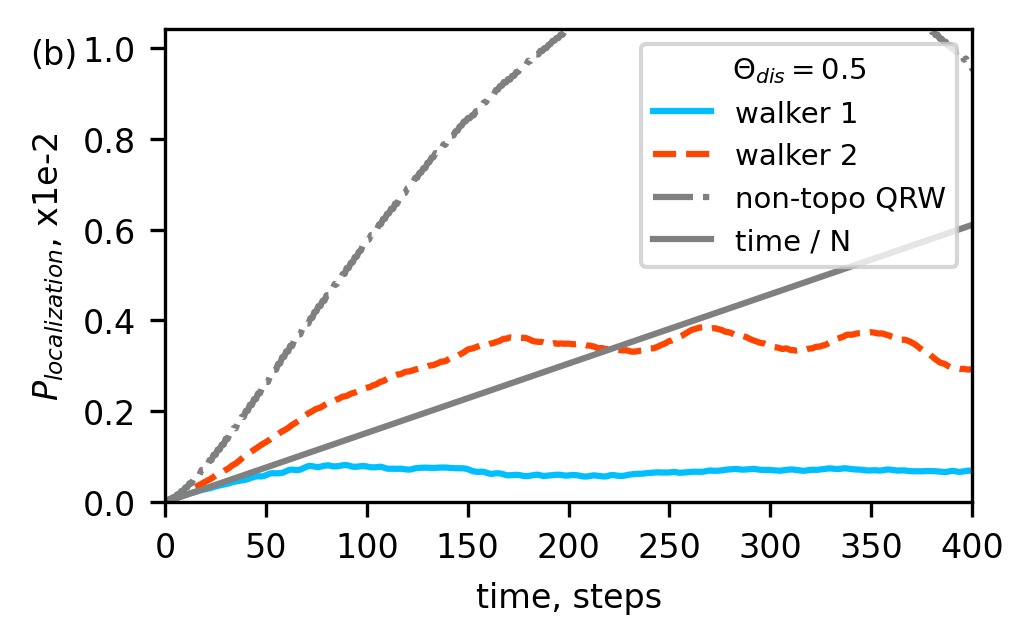

In [58]:
fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
#fig.subplots_adjust(bottom = 0.2, top=0.98, left=0.12, right=0.99)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)

time_set = range(500)

proba_walker1_size256_disorder05= [np.float64(2.5519948747697735e-05), np.float64(4.003779223714917e-05), np.float64(5.6141164181811304e-05), np.float64(7.24445312246477e-05), np.float64(8.85285837188575e-05), np.float64(0.00010270945363028395), np.float64(0.00011395509968175306), np.float64(0.00012555384087250719), np.float64(0.00013958736572483582), np.float64(0.00015357952451723072), np.float64(0.00016611318916835875), np.float64(0.00017783884278505403), np.float64(0.0001892807898560769), np.float64(0.00020084024854180398), np.float64(0.0002126942650680216), np.float64(0.0002265093321931468), np.float64(0.00024194708835023566), np.float64(0.0002548858092212225), np.float64(0.00026491686985418816), np.float64(0.00027507460642973996), np.float64(0.00028526298472885997), np.float64(0.0002953858864497908), np.float64(0.00030598138458135367), np.float64(0.0003174737163179265), np.float64(0.00033182569254691907), np.float64(0.0003466844883381837), np.float64(0.00035832673496619024), np.float64(0.0003690786002592718), np.float64(0.0003796628998968676), np.float64(0.0003881183862310055), np.float64(0.00039660371475273403), np.float64(0.0004069215525647805), np.float64(0.0004192933946863508), np.float64(0.0004341116631402914), np.float64(0.0004476017272397281), np.float64(0.00045673587917403533), np.float64(0.0004638850761560599), np.float64(0.00047097647897873727), np.float64(0.00047828472859309524), np.float64(0.0004861763798907924), np.float64(0.0004956664206349255), np.float64(0.0005085183678550367), np.float64(0.0005240723144327028), np.float64(0.000540609496411568), np.float64(0.0005564863327458083), np.float64(0.0005670802826439692), np.float64(0.0005693423838494571), np.float64(0.0005678250467936272), np.float64(0.0005690864924583258), np.float64(0.0005772643144861552), np.float64(0.0005933965127945474), np.float64(0.0006139462017178125), np.float64(0.0006307235794095958), np.float64(0.0006366742863300485), np.float64(0.0006352362210290747), np.float64(0.0006351218419721469), np.float64(0.0006368731105530168), np.float64(0.0006382219844059346), np.float64(0.0006452167706997875), np.float64(0.0006620097553430021), np.float64(0.0006828987726650497), np.float64(0.0007016831334744413), np.float64(0.0007140170239853302), np.float64(0.0007164344437610934), np.float64(0.0007123110388066402), np.float64(0.0007078955662776276), np.float64(0.0007080764801487313), np.float64(0.0007181424112277029), np.float64(0.0007365114871999247), np.float64(0.0007567390521103619), np.float64(0.0007775491304411503), np.float64(0.0007943759119301839), np.float64(0.0007983127326948631), np.float64(0.0007917431926956601), np.float64(0.0007830282443786408), np.float64(0.0007756759557600275), np.float64(0.000774196995075345), np.float64(0.000781556122663403), np.float64(0.0007926417133149691), np.float64(0.0008018892478045207), np.float64(0.0008087490770416043), np.float64(0.0008103210222119267), np.float64(0.0008020733185463057), np.float64(0.0007906660806441385), np.float64(0.0007873492208825963), np.float64(0.0007898710596635501), np.float64(0.000793719756212034), np.float64(0.0008022972078168449), np.float64(0.0008119290646219334), np.float64(0.0008159187575579964), np.float64(0.0008150891652806286), np.float64(0.0008072626431087232), np.float64(0.0007921589300998339), np.float64(0.0007810235417482594), np.float64(0.000778680952939049), np.float64(0.0007804198737088051), np.float64(0.0007859366553770546), np.float64(0.0007924328012962415), np.float64(0.0007940214074183083), np.float64(0.0007920761002865233), np.float64(0.0007863995510239528), np.float64(0.0007754478558123698), np.float64(0.0007679190070999456), np.float64(0.0007679393967038667), np.float64(0.0007683784388848909), np.float64(0.0007708821333149227), np.float64(0.0007783711555911829), np.float64(0.0007788526727742784), np.float64(0.0007665530690906767), np.float64(0.0007509776949152009), np.float64(0.000739179237142238), np.float64(0.000734591180751871), np.float64(0.0007366514141940419), np.float64(0.0007369296105612808), np.float64(0.0007339294836651522), np.float64(0.000734774562528381), np.float64(0.000737701355114905), np.float64(0.0007358182397284773), np.float64(0.0007300827025679896), np.float64(0.0007240814983776614), np.float64(0.000718686433321975), np.float64(0.0007172536861844894), np.float64(0.0007234602147964391), np.float64(0.0007345714896656128), np.float64(0.0007450574531829675), np.float64(0.0007521749167107587), np.float64(0.0007555639167686372), np.float64(0.0007573092520848431), np.float64(0.0007598690925599763), np.float64(0.0007605449934445067), np.float64(0.000757735798460952), np.float64(0.0007562784120730594), np.float64(0.0007570536759539351), np.float64(0.0007559431641735027), np.float64(0.0007556212733496), np.float64(0.0007591010914628274), np.float64(0.0007617720618846812), np.float64(0.0007625068218403647), np.float64(0.0007637724772060278), np.float64(0.0007628300383137693), np.float64(0.0007586353809104056), np.float64(0.0007550792602402394), np.float64(0.0007520153365613337), np.float64(0.0007489998609029207), np.float64(0.0007480258289911375), np.float64(0.0007477820145297129), np.float64(0.0007470095130344953), np.float64(0.000746422508003928), np.float64(0.0007441488038440784), np.float64(0.0007379595648672615), np.float64(0.0007265095952228051), np.float64(0.0007095584117739378), np.float64(0.0006918769769556741), np.float64(0.0006783858534311669), np.float64(0.0006699927917907329), np.float64(0.0006674805336851245), np.float64(0.0006696687258989456), np.float64(0.0006713045330620965), np.float64(0.0006670670532536542), np.float64(0.0006545438460067765), np.float64(0.000637818077040039), np.float64(0.0006256581121875354), np.float64(0.0006229272631570268), np.float64(0.0006285701899871487), np.float64(0.0006360788516309994), np.float64(0.0006372708621866982), np.float64(0.0006319227495258295), np.float64(0.0006232232762186587), np.float64(0.0006100506199172808), np.float64(0.0005962697508513715), np.float64(0.000590864015958019), np.float64(0.0005941549377430774), np.float64(0.0005986277870593578), np.float64(0.000600934782835915), np.float64(0.000601834849378196), np.float64(0.0005998295799232971), np.float64(0.0005931876823549975), np.float64(0.0005832586634631381), np.float64(0.0005748207178111034), np.float64(0.0005731000184377076), np.float64(0.0005774259834113697), np.float64(0.0005832885272337373), np.float64(0.0005899013150691766), np.float64(0.0005981572978658309), np.float64(0.0006045268475264258), np.float64(0.0006030800960990302), np.float64(0.0005926792647681979), np.float64(0.0005808725882938145), np.float64(0.0005768992674269859), np.float64(0.0005812619521652696), np.float64(0.0005872878216679497), np.float64(0.0005911046319501284), np.float64(0.0005953424684114903), np.float64(0.0006009268713648233), np.float64(0.0006040922468348408), np.float64(0.0006038683045400191), np.float64(0.0006010484570358403), np.float64(0.0005943785876765452), np.float64(0.0005866389287769011), np.float64(0.0005843207402147062), np.float64(0.0005892171436609339), np.float64(0.0005964448797540478), np.float64(0.000599796034500761), np.float64(0.0005975750865118896), np.float64(0.0005930033683754002), np.float64(0.0005868502708316455), np.float64(0.0005774068235506433), np.float64(0.0005685504618102496), np.float64(0.0005647223547985451), np.float64(0.0005655136220162082), np.float64(0.000571219400217702), np.float64(0.0005811352323988524), np.float64(0.0005888990714364387), np.float64(0.0005894830181106336), np.float64(0.0005840031144720567), np.float64(0.0005764896584424723), np.float64(0.0005705978435292878), np.float64(0.0005668858499693581), np.float64(0.000566011143344745), np.float64(0.0005715480282779319), np.float64(0.0005839037856203329), np.float64(0.0005959077824533428), np.float64(0.0005980242414317079), np.float64(0.0005905763057446905), np.float64(0.000583148617891705), np.float64(0.0005796412423014718), np.float64(0.0005774582231542906), np.float64(0.0005787194592140803), np.float64(0.0005868261012339238), np.float64(0.0005977580940262733), np.float64(0.0006055851352656594), np.float64(0.0006105021668078846), np.float64(0.0006158711155360469), np.float64(0.0006210123175287375), np.float64(0.0006224712855721192), np.float64(0.0006216895843637735), np.float64(0.0006232973186712282), np.float64(0.0006285538838111635), np.float64(0.0006354168479954549), np.float64(0.0006410101272958433), np.float64(0.0006436824833683077), np.float64(0.0006452334774643576), np.float64(0.0006489563939504069), np.float64(0.0006547732676057415), np.float64(0.0006575568515039503), np.float64(0.0006547882625861296), np.float64(0.0006523254538540606), np.float64(0.0006535056972307434), np.float64(0.0006542005388517597), np.float64(0.0006535055608256724), np.float64(0.000654541980789328), np.float64(0.0006592449540768155), np.float64(0.0006650072386250234), np.float64(0.0006632657331601602), np.float64(0.0006532146866184004), np.float64(0.0006465889966250678), np.float64(0.000648120799956225), np.float64(0.0006519789920605893), np.float64(0.0006555083905295734), np.float64(0.0006595194869984018), np.float64(0.0006641412759596831), np.float64(0.0006685667675322228), np.float64(0.000670354343651157), np.float64(0.0006691905753890353), np.float64(0.0006677486286742808), np.float64(0.0006670648776440564), np.float64(0.0006678956316306087), np.float64(0.0006725672678230302), np.float64(0.0006813476312650354), np.float64(0.0006908838765477784), np.float64(0.0006961433690324051), np.float64(0.000694707817725769), np.float64(0.0006907093172870444), np.float64(0.0006905219238061066), np.float64(0.000693232100206399), np.float64(0.0006953588012408651), np.float64(0.000699472274960454), np.float64(0.0007073145878242368), np.float64(0.0007148666843218094), np.float64(0.0007197222953751206), np.float64(0.0007222224931910158), np.float64(0.0007245122695325844), np.float64(0.0007288323600662403), np.float64(0.0007307232456710093), np.float64(0.0007263584600494196), np.float64(0.0007204444029863257), np.float64(0.0007169073896811729), np.float64(0.0007166849683850836), np.float64(0.0007204367221798084), np.float64(0.0007245775833928951), np.float64(0.0007272830765862382), np.float64(0.0007307757562228075), np.float64(0.0007313542129331679), np.float64(0.0007253009569755293), np.float64(0.0007177301643333731), np.float64(0.0007130678447895465), np.float64(0.0007102288780672431), np.float64(0.0007094106204512282), np.float64(0.000710727623324693), np.float64(0.0007103589332425018), np.float64(0.0007069952901569905), np.float64(0.000703962924390979), np.float64(0.000701516984270064), np.float64(0.0006977057216486847), np.float64(0.0006942004745380083), np.float64(0.0006937845844260887), np.float64(0.0006980708415034537), np.float64(0.0007057744696070862), np.float64(0.0007118156021688935), np.float64(0.0007152862700960277), np.float64(0.0007189939361372062), np.float64(0.0007194762484489037), np.float64(0.0007142539764515643), np.float64(0.0007084973361823943), np.float64(0.0007036341199816371), np.float64(0.000696678590670334), np.float64(0.000691101832881798), np.float64(0.0006923912528405888), np.float64(0.0006988023559629298), np.float64(0.0007054042527518728), np.float64(0.0007104039127872717), np.float64(0.0007131045883826559), np.float64(0.0007124486094219607), np.float64(0.0007116506175703256), np.float64(0.0007154012784257155), np.float64(0.000721612864579716), np.float64(0.0007266714133583775), np.float64(0.0007318544517332307), np.float64(0.0007378263252369675), np.float64(0.0007424074597795503), np.float64(0.0007424573437773064), np.float64(0.0007375184568745149), np.float64(0.0007324504850621018), np.float64(0.0007308052326420898), np.float64(0.0007317751404225757), np.float64(0.0007361920168449949), np.float64(0.0007431007763301255), np.float64(0.0007459456080545241), np.float64(0.0007422634484123249), np.float64(0.0007363135503148565), np.float64(0.0007305432952494074), np.float64(0.0007252556852225415), np.float64(0.0007210182968185863), np.float64(0.0007181552312852835), np.float64(0.0007170697964684765), np.float64(0.000715112824735309), np.float64(0.0007085224841887604), np.float64(0.0007005989593425317), np.float64(0.0006971659973740561), np.float64(0.0006971691642435355), np.float64(0.0006987839910646374), np.float64(0.0007020526788331742), np.float64(0.0007027558985059812), np.float64(0.0006987553548953981), np.float64(0.0006953319312793789), np.float64(0.0006972755465915514), np.float64(0.0007043728497895322), np.float64(0.0007135190601529776), np.float64(0.0007193293429005718), np.float64(0.0007182572769681893), np.float64(0.0007121349848372986), np.float64(0.0007043525239236427), np.float64(0.000698080315641357), np.float64(0.000695408657015195), np.float64(0.0006961366021659063), np.float64(0.000698926697150276), np.float64(0.0007003331573312463), np.float64(0.0006966462008394473), np.float64(0.0006894879457446232), np.float64(0.0006840007534804507), np.float64(0.0006816759641195907), np.float64(0.0006805636139755306), np.float64(0.000679827892123649), np.float64(0.0006790282735953913), np.float64(0.0006781914837048007), np.float64(0.0006792482336963836), np.float64(0.000682142066265875), np.float64(0.0006839315439466692), np.float64(0.0006838288511814682), np.float64(0.0006840353390413382), np.float64(0.0006847787002172061), np.float64(0.000683224428324209), np.float64(0.0006797691065183334), np.float64(0.0006775887492827207), np.float64(0.0006753016653530436), np.float64(0.0006707159115116746), np.float64(0.0006661117303550621), np.float64(0.0006651261134460925), np.float64(0.0006705475946792558), np.float64(0.0006803816588412137), np.float64(0.0006867976813138274), np.float64(0.0006862492745386594), np.float64(0.0006794828335945451), np.float64(0.0006692282855757429), np.float64(0.000665714386754182), np.float64(0.0006726040308271907), np.float64(0.0006812762209231078), np.float64(0.0006887286493163118), np.float64(0.0006942420000069246), np.float64(0.0006927852153027057), np.float64(0.0006870258425512108), np.float64(0.0006815384526729271), np.float64(0.0006753323171841101), np.float64(0.0006720417574462075), np.float64(0.0006780252791857852), np.float64(0.0006940013447063718), np.float64(0.00071402042908779), np.float64(0.0007284501280593907), np.float64(0.0007333583270283983), np.float64(0.000730270110358664), np.float64(0.0007189001749383384), np.float64(0.0007039198195427309), np.float64(0.0006956790600568376), np.float64(0.0006989263530846966), np.float64(0.0007108291433827423), np.float64(0.0007243604467583823), np.float64(0.0007317311452373694), np.float64(0.0007299279940278196), np.float64(0.0007199695797873841), np.float64(0.0007049905377274808), np.float64(0.0006935240479361078), np.float64(0.0006938000393030836), np.float64(0.0007007647113575518), np.float64(0.000703443028872428), np.float64(0.0007032089379225541), np.float64(0.0007057104413679109), np.float64(0.0007073700802308323), np.float64(0.0007035556529082512), np.float64(0.0006930111105487185), np.float64(0.000678320588151378), np.float64(0.0006701419803003672), np.float64(0.0006739599410592555), np.float64(0.000682695722328983), np.float64(0.0006905647715749866), np.float64(0.0006960545917351226), np.float64(0.00069522160475766), np.float64(0.0006869489031698058), np.float64(0.0006759047717437121), np.float64(0.0006672340178303269), np.float64(0.0006637818605206657), np.float64(0.0006677881152234275), np.float64(0.0006792389442152635), np.float64(0.0006918825070435376), np.float64(0.0006993825224627511), np.float64(0.0007008097931801237), np.float64(0.0006974778911895885), np.float64(0.000694253790389038), np.float64(0.000696167597625467), np.float64(0.0007005099761418327), np.float64(0.0007062757084214001), np.float64(0.0007172992358504948), np.float64(0.0007285816001358626), np.float64(0.0007314895502869963), np.float64(0.000728530478708699), np.float64(0.0007245923440978383), np.float64(0.0007186080543060252), np.float64(0.0007131212797938512), np.float64(0.0007145616476098139), np.float64(0.0007217098017715618), np.float64(0.0007270366409925487), np.float64(0.0007303661318515594), np.float64(0.0007355501981635345), np.float64(0.0007370835450280457), np.float64(0.0007277117929096856), np.float64(0.0007125278452311356), np.float64(0.0007011266152723199), np.float64(0.00069786869829006), np.float64(0.0007039886973350884), np.float64(0.0007134371986452026), np.float64(0.0007150409435206429), np.float64(0.000708373544439236), np.float64(0.0007004511120005249), np.float64(0.0006919360401429163), np.float64(0.0006843212585441619), np.float64(0.0006837669501978244), np.float64(0.0006893337222788089), np.float64(0.000697795700995388), np.float64(0.0007109938853389543), np.float64(0.000722919574580965), np.float64(0.0007220798138883253), np.float64(0.0007116440894262067), np.float64(0.000703660425152162), np.float64(0.000701263172202595), np.float64(0.0007023875327545404), np.float64(0.0007067192333414649), np.float64(0.0007146949452011596), np.float64(0.0007256523650296029), np.float64(0.0007354269615631847), np.float64(0.0007378847070770903), np.float64(0.0007317400205080152), np.float64(0.0007221410444191339), np.float64(0.0007151428373509252), np.float64(0.0007141243210257373), np.float64(0.0007165826655783255), np.float64(0.0007163992404117288), np.float64(0.0007141150810490989), np.float64(0.0007123584806290937), np.float64(0.0007058113243247634), np.float64(0.00069291535748819), np.float64(0.0006823500593198065)]
proba_walker2_size256_disorder05= [np.float64(3.981171548329932e-05), np.float64(4.4237470487350194e-05), np.float64(5.6022376133226196e-05), np.float64(8.078999467605535e-05), np.float64(9.978532328649804e-05), np.float64(0.00011607346869230201), np.float64(0.00013587608999469887), np.float64(0.0001534902867589689), np.float64(0.00016964661124245915), np.float64(0.00019385207123340362), np.float64(0.00022080538017859777), np.float64(0.00024027751606521243), np.float64(0.0002616462516633606), np.float64(0.0002892191242532478), np.float64(0.0003137638797986495), np.float64(0.0003349622736477039), np.float64(0.00035665589512983564), np.float64(0.0003796548798003656), np.float64(0.0004042271141692579), np.float64(0.00042913435848157604), np.float64(0.0004539074871071566), np.float64(0.0004769960566142213), np.float64(0.0004988507722622035), np.float64(0.0005253681864307581), np.float64(0.000557498663940738), np.float64(0.0005894623286056383), np.float64(0.0006141993893571968), np.float64(0.000631678217953891), np.float64(0.0006526625843480532), np.float64(0.0006815861620842517), np.float64(0.0007091976795905039), np.float64(0.0007330136051871495), np.float64(0.0007640148186332645), np.float64(0.0008001884307928092), np.float64(0.0008275889721763615), np.float64(0.0008519916026553606), np.float64(0.0008852064269032275), np.float64(0.0009227771919993617), np.float64(0.0009611784274426666), np.float64(0.000999330476669761), np.float64(0.0010320394344408353), np.float64(0.001062344224292368), np.float64(0.001092365778606047), np.float64(0.0011199196528871532), np.float64(0.0011501958329414252), np.float64(0.0011831234186560245), np.float64(0.0012132692281401796), np.float64(0.0012430915075733646), np.float64(0.0012716744124738276), np.float64(0.0012963203032505743), np.float64(0.0013235995932931708), np.float64(0.0013526066726716856), np.float64(0.0013812331981016093), np.float64(0.0014183502722812456), np.float64(0.0014541210112151532), np.float64(0.0014749664781769757), np.float64(0.0014979800098954895), np.float64(0.001530583758597825), np.float64(0.0015587080825154958), np.float64(0.0015823260493575812), np.float64(0.0016061622031892612), np.float64(0.0016349200406949563), np.float64(0.0016715583242073544), np.float64(0.001703060976255179), np.float64(0.0017293097208418377), np.float64(0.001758840346185083), np.float64(0.0017863509476617005), np.float64(0.001821382743694326), np.float64(0.0018652934871893618), np.float64(0.001897768516866719), np.float64(0.001926156427501134), np.float64(0.001957629915118701), np.float64(0.0019800159020869857), np.float64(0.00200329920843549), np.float64(0.0020331963835548148), np.float64(0.0020557171164909396), np.float64(0.0020694473647015297), np.float64(0.00208314866238589), np.float64(0.00210794913748497), np.float64(0.0021388508365169697), np.float64(0.0021614536479734906), np.float64(0.002182127963360753), np.float64(0.002201850531593421), np.float64(0.0022173102872110437), np.float64(0.0022398625783277325), np.float64(0.002260544702896949), np.float64(0.0022750901286489778), np.float64(0.0023012356052616784), np.float64(0.0023241268929389044), np.float64(0.0023292547706064105), np.float64(0.0023391043853336372), np.float64(0.0023620947626335938), np.float64(0.002385472331904956), np.float64(0.0024013561557580656), np.float64(0.0024129820328948172), np.float64(0.0024309931026279203), np.float64(0.002455162575732064), np.float64(0.0024758299697668572), np.float64(0.0024922174243117053), np.float64(0.0025088828626225962), np.float64(0.00252095022427304), np.float64(0.0025269204951943076), np.float64(0.0025458014088427655), np.float64(0.0025726087161689172), np.float64(0.00258360344260578), np.float64(0.002600717198859757), np.float64(0.002634522895155226), np.float64(0.002652988539770412), np.float64(0.0026637429337030396), np.float64(0.002688052631901169), np.float64(0.002711954274046839), np.float64(0.002729988595399546), np.float64(0.0027486180027389323), np.float64(0.002770915736553311), np.float64(0.002796002218887984), np.float64(0.002810447539127057), np.float64(0.0028131964990240716), np.float64(0.0028227175525248937), np.float64(0.002845404250269935), np.float64(0.0028678338399638235), np.float64(0.0028755625414843226), np.float64(0.0028781843518643924), np.float64(0.0028927318624910755), np.float64(0.0029096680537603332), np.float64(0.00291979310305165), np.float64(0.00293075474941021), np.float64(0.00294282034623275), np.float64(0.0029542774953086426), np.float64(0.002963689890033759), np.float64(0.0029698184112654383), np.float64(0.0029848774320687305), np.float64(0.003005519058311193), np.float64(0.0030131555142923995), np.float64(0.0030193085958357033), np.float64(0.003036147819467592), np.float64(0.0030544805124797436), np.float64(0.003076575462067338), np.float64(0.0030947563542559364), np.float64(0.003095951124834434), np.float64(0.003104915187721286), np.float64(0.0031334203799357795), np.float64(0.003156936551323671), np.float64(0.0031719478796941314), np.float64(0.0031861103784459493), np.float64(0.0031991826380212834), np.float64(0.0032205403174609716), np.float64(0.0032492808482530084), np.float64(0.003272459589735563), np.float64(0.003296103712038349), np.float64(0.0033290298047774737), np.float64(0.003358694012670152), np.float64(0.0033733557484686553), np.float64(0.003381258206582901), np.float64(0.003393520808800931), np.float64(0.003410258398973711), np.float64(0.0034279881885147983), np.float64(0.0034464786918461956), np.float64(0.003463366856998264), np.float64(0.0034682029900799417), np.float64(0.0034622208048628394), np.float64(0.0034675444600140264), np.float64(0.003485490103936535), np.float64(0.0034974651582568737), np.float64(0.0035089059791456032), np.float64(0.0035259257572549324), np.float64(0.0035381469841505274), np.float64(0.0035540566512669756), np.float64(0.0035809932121213827), np.float64(0.0035965996576980525), np.float64(0.003598482068274718), np.float64(0.0036114532398784085), np.float64(0.0036268518977102303), np.float64(0.0036223060680788156), np.float64(0.003615387349883563), np.float64(0.0036227911914041393), np.float64(0.0036262575173886444), np.float64(0.0036190567643185276), np.float64(0.003617197871680986), np.float64(0.0036190022242344405), np.float64(0.0036109930091614006), np.float64(0.003595166819119209), np.float64(0.0035748660128949866), np.float64(0.003552988849322472), np.float64(0.0035409368362117727), np.float64(0.0035358205040223302), np.float64(0.0035293462189475654), np.float64(0.003528936248778256), np.float64(0.003524487916974444), np.float64(0.003506364693928594), np.float64(0.0034947737570514225), np.float64(0.003489455492138846), np.float64(0.00348187822315175), np.float64(0.0034896377547834873), np.float64(0.0035009656710997955), np.float64(0.0034920448617729418), np.float64(0.0034860930009838246), np.float64(0.003493476158724006), np.float64(0.0034918039468180137), np.float64(0.0034866315150861894), np.float64(0.003490116328217545), np.float64(0.0034913339343445406), np.float64(0.003485561817062633), np.float64(0.0034786311513124563), np.float64(0.003479299715031184), np.float64(0.0034835416810803784), np.float64(0.003476552892876194), np.float64(0.0034704473775159146), np.float64(0.003472292731201275), np.float64(0.0034611995293396145), np.float64(0.0034491805572256133), np.float64(0.0034499486304883065), np.float64(0.003442768142435311), np.float64(0.003431648470471717), np.float64(0.0034207926671299795), np.float64(0.0033979525650169136), np.float64(0.0033857881711168943), np.float64(0.0033927600307799115), np.float64(0.0033880806892366013), np.float64(0.0033739751059197027), np.float64(0.0033719354093818656), np.float64(0.003371898679717684), np.float64(0.0033616493347630094), np.float64(0.0033534925338183216), np.float64(0.0033536909407439726), np.float64(0.0033529418917673747), np.float64(0.003350015121870358), np.float64(0.0033459285302928853), np.float64(0.0033416039138511773), np.float64(0.003343573681649443), np.float64(0.003342136178822798), np.float64(0.0033278088528517283), np.float64(0.0033156636135993054), np.float64(0.0033131116103548553), np.float64(0.0033148170432695766), np.float64(0.0033223856105009733), np.float64(0.003330995233087888), np.float64(0.003333388482743624), np.float64(0.003337329826650778), np.float64(0.003351528555144127), np.float64(0.0033700413753456984), np.float64(0.003382070922756185), np.float64(0.0033859253885983403), np.float64(0.0033888086980698195), np.float64(0.003400067501604631), np.float64(0.0034190942638459695), np.float64(0.0034397690123108165), np.float64(0.003461998674795736), np.float64(0.0034802626123199725), np.float64(0.003497358128563852), np.float64(0.00352631995026798), np.float64(0.0035492932322961196), np.float64(0.0035564445480667298), np.float64(0.0035797169257165253), np.float64(0.0036166055583679623), np.float64(0.0036333885633888278), np.float64(0.0036395628224214585), np.float64(0.0036592767989679755), np.float64(0.003688173113535937), np.float64(0.003715308654958327), np.float64(0.0037410418039867956), np.float64(0.003768402331196228), np.float64(0.003791194872642617), np.float64(0.0038040586368806176), np.float64(0.0038148873120029776), np.float64(0.0038307504404301016), np.float64(0.003843918986105945), np.float64(0.003848588723906334), np.float64(0.0038538448310715505), np.float64(0.003857784316668917), np.float64(0.003845299771155859), np.float64(0.003827016246046354), np.float64(0.0038250295480846104), np.float64(0.003831206169826988), np.float64(0.003825977415376933), np.float64(0.0038120554417578056), np.float64(0.0038023056507972388), np.float64(0.00378969077140894), np.float64(0.0037664511203919122), np.float64(0.0037501762457346224), np.float64(0.003744994356109988), np.float64(0.0037341018393691723), np.float64(0.003716387517692308), np.float64(0.003693267331455553), np.float64(0.003672259553691816), np.float64(0.003671224838959982), np.float64(0.0036751229424689404), np.float64(0.0036639123979016613), np.float64(0.0036500325941803704), np.float64(0.0036352425890242594), np.float64(0.0036126412476309524), np.float64(0.003590373977975492), np.float64(0.0035716957697267066), np.float64(0.0035565275878605626), np.float64(0.0035434762835972224), np.float64(0.0035251936863795194), np.float64(0.0035083875831106977), np.float64(0.003501984829606168), np.float64(0.003494001289887422), np.float64(0.003475619556099676), np.float64(0.0034575835905804146), np.float64(0.003445757871690927), np.float64(0.003431969605310798), np.float64(0.003416019327760958), np.float64(0.003406984479078186), np.float64(0.0034001075683721036), np.float64(0.003384970940020244), np.float64(0.003373139059723211), np.float64(0.00338058795211905), np.float64(0.0033866106271386804), np.float64(0.0033679368779115483), np.float64(0.003350191284928569), np.float64(0.003348881279514858), np.float64(0.0033419521862031883), np.float64(0.003336162899943653), np.float64(0.0033407352433938746), np.float64(0.0033361673518710207), np.float64(0.00333252950429789), np.float64(0.0033465500964588247), np.float64(0.0033652846053689863), np.float64(0.0033794312949581183), np.float64(0.00338304620925836), np.float64(0.0033875240340705904), np.float64(0.0034097547920064163), np.float64(0.0034242069114808786), np.float64(0.003422792192512717), np.float64(0.003433485632021235), np.float64(0.0034487475801313317), np.float64(0.0034592670621159277), np.float64(0.0034794310665164987), np.float64(0.003503569333643596), np.float64(0.003527194302584441), np.float64(0.0035553543497289404), np.float64(0.0035789950958903956), np.float64(0.003594388480795987), np.float64(0.0036105576180822984), np.float64(0.0036270979955941676), np.float64(0.0036411229864286424), np.float64(0.003662247085448096), np.float64(0.0036852207227126496), np.float64(0.003689220681814539), np.float64(0.0036852235743295), np.float64(0.003692060993551604), np.float64(0.0037034885732021143), np.float64(0.0037145151100252327), np.float64(0.0037201221310592357), np.float64(0.0037226078090246808), np.float64(0.003731927646787223), np.float64(0.0037341520399639767), np.float64(0.0037294370229466896), np.float64(0.003736272561195567), np.float64(0.0037413393595230196), np.float64(0.003735572195086536), np.float64(0.003728761666678853), np.float64(0.0037186409938586166), np.float64(0.00371292501542765), np.float64(0.0037160120204662965), np.float64(0.0037095300000991815), np.float64(0.0036928099060106238), np.float64(0.003680747912302003), np.float64(0.003667125743344909), np.float64(0.0036451549206223954), np.float64(0.0036302023808339233), np.float64(0.0036247433136375566), np.float64(0.0036095911343804778), np.float64(0.0035864976821128125), np.float64(0.003575642000904259), np.float64(0.0035765513053693256), np.float64(0.003572300973507126), np.float64(0.003557106614724616), np.float64(0.0035389754021658186), np.float64(0.0035180319540142335), np.float64(0.003492168215411197), np.float64(0.003465375599274686), np.float64(0.0034307444790252946), np.float64(0.0033918383140957666), np.float64(0.003362282790831976), np.float64(0.0033297887246601563), np.float64(0.0032947825152790816), np.float64(0.003275690538481549), np.float64(0.0032553332532291334), np.float64(0.003216542822018277), np.float64(0.0031766593729583223), np.float64(0.0031436650957644544), np.float64(0.003109405652396751), np.float64(0.003077987108832377), np.float64(0.0030607850534527395), np.float64(0.003051815772873649), np.float64(0.003031700451992334), np.float64(0.0030001044055184625), np.float64(0.0029769078902141923), np.float64(0.002968735436366029), np.float64(0.002964423322423859), np.float64(0.0029538863842594842), np.float64(0.0029380793759545233), np.float64(0.0029299312796733316), np.float64(0.002934736255371407), np.float64(0.0029361487288303697), np.float64(0.0029258525720638816), np.float64(0.0029192221399580633), np.float64(0.002923575821758628), np.float64(0.002926604949978595), np.float64(0.0029195380287421013), np.float64(0.0029116641469237488), np.float64(0.0029155980081696942), np.float64(0.002922131995444206), np.float64(0.002919583382364993), np.float64(0.002915916850368399), np.float64(0.002913421140393676), np.float64(0.0029124469793826912), np.float64(0.002924874362115257), np.float64(0.002939650638883683), np.float64(0.002941187620588857), np.float64(0.002945552623698873), np.float64(0.002958944684981155), np.float64(0.002967385864579412), np.float64(0.002973029639311579), np.float64(0.0029817360425835908), np.float64(0.002990790012056919), np.float64(0.0030000929106651303), np.float64(0.003011210969161588), np.float64(0.0030275984552981593), np.float64(0.0030441224078523463), np.float64(0.003051235622004629), np.float64(0.0030607279398261215), np.float64(0.0030753885365380476), np.float64(0.003080367831268463), np.float64(0.00308459591400642), np.float64(0.003090983559792892), np.float64(0.003092957325289896), np.float64(0.0031121004211972095), np.float64(0.003141518779169518), np.float64(0.0031481016090393055), np.float64(0.003145548613411536), np.float64(0.003148792927463291), np.float64(0.003152423446545094), np.float64(0.0031661958372652095), np.float64(0.003179242547580482), np.float64(0.0031738433765598506), np.float64(0.0031671707578538925), np.float64(0.003167345804346502), np.float64(0.0031658500363851124), np.float64(0.0031671006790765775), np.float64(0.0031706350222910234), np.float64(0.0031664707150092534), np.float64(0.0031538988067757504), np.float64(0.0031448387249798137), np.float64(0.003145352232537959), np.float64(0.003141811566117995), np.float64(0.0031313161301743226), np.float64(0.003127649300226068), np.float64(0.0031233162635327864), np.float64(0.003111535670921994), np.float64(0.0031073683632796374), np.float64(0.0031059955647308587), np.float64(0.0030931035825087507), np.float64(0.003071690099895739), np.float64(0.0030473276735508313), np.float64(0.0030332997215685074), np.float64(0.003029245298508148), np.float64(0.0030145510177706706), np.float64(0.0029938510680573923), np.float64(0.0029719640400199757), np.float64(0.0029424369344873214), np.float64(0.002920159558003915), np.float64(0.002904758974407626), np.float64(0.0028850362012895923), np.float64(0.0028667404661006065), np.float64(0.00284086186091127), np.float64(0.002813652042849358), np.float64(0.002808133949015091), np.float64(0.0027984986772508344), np.float64(0.0027634523540733904), np.float64(0.002732254140080085), np.float64(0.002720918653678875), np.float64(0.0027148121860145836), np.float64(0.002699779270313445), np.float64(0.0026751352819685084), np.float64(0.002651645678518222), np.float64(0.002637218612466824), np.float64(0.002624665008723438), np.float64(0.0026038321482908344), np.float64(0.0025846886655109596), np.float64(0.002572576951113812), np.float64(0.002552475577881669), np.float64(0.0025321188081232782), np.float64(0.002525632955931368), np.float64(0.002518490665962253), np.float64(0.0025066335353699986), np.float64(0.002502075113482148), np.float64(0.002507830402692326), np.float64(0.002524037712050062), np.float64(0.002540685318933024), np.float64(0.0025462411004836313), np.float64(0.002550103226509836), np.float64(0.0025599100788772236), np.float64(0.002566017141091426), np.float64(0.0025680962226944217), np.float64(0.0025738530614112763), np.float64(0.0025777988518392962), np.float64(0.002580135373793038)]
plt.plot(time_set, proba_walker1_size256_disorder05, color='deepskyblue', label = 'walker 1')
plt.plot(time_set, proba_walker2_size256_disorder05, '--', color='orangered', label = 'walker 2')

m_grover= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
p_grover_size256_disorder05 = [np.float64(1.5258789062499997e-05), np.float64(1.5473500585327753e-05), np.float64(5.979745372773039e-05), np.float64(6.039674267048363e-05), np.float64(0.00011108915849217733), np.float64(0.00011070761537972913), np.float64(0.00017446013267373507), np.float64(0.00017449156236980896), np.float64(0.00024651905766296024), np.float64(0.0002449138927416407), np.float64(0.0003258990438097857), np.float64(0.0003257192835250688), np.float64(0.00041326856930541634), np.float64(0.0004112447680095257), np.float64(0.0005042012493326524), np.float64(0.0005062352843188042), np.float64(0.0006031367437898875), np.float64(0.000602594625751507), np.float64(0.0007084035890946328), np.float64(0.0007132110134355225), np.float64(0.0008145377502622089), np.float64(0.0008138505622359736), np.float64(0.00092596044841897), np.float64(0.0009244766763236909), np.float64(0.0010426931930444677), np.float64(0.001040660372831743), np.float64(0.0011579558129672077), np.float64(0.0011537079493218552), np.float64(0.001265049722152289), np.float64(0.0012648335859449407), np.float64(0.001394698728961705), np.float64(0.0013905670214238582), np.float64(0.0015152191988337745), np.float64(0.0015133093823362673), np.float64(0.0016319778978387892), np.float64(0.001627557075092554), np.float64(0.0017552887914072945), np.float64(0.001748899309624611), np.float64(0.0018809207892757887), np.float64(0.0018763240256929891), np.float64(0.0020112745267508616), np.float64(0.0020113996229885025), np.float64(0.002144919930666881), np.float64(0.002137168411118698), np.float64(0.0022658726977813786), np.float64(0.0022655890587081106), np.float64(0.0023918388843053003), np.float64(0.002394619879454443), np.float64(0.0025147079597744415), np.float64(0.0025186563347408745), np.float64(0.0026473470713144834), np.float64(0.0026467118256153217), np.float64(0.0027762859352915338), np.float64(0.00277685853687665), np.float64(0.0029083917768556377), np.float64(0.002916669126325713), np.float64(0.003046055865517453), np.float64(0.0030536411644204084), np.float64(0.0031905075101315745), np.float64(0.0031956637837154333), np.float64(0.0033202127657894582), np.float64(0.0033173816135434646), np.float64(0.0034445149804252797), np.float64(0.003437700497914517), np.float64(0.0035707341546991254), np.float64(0.00356895533260488), np.float64(0.0036876323874550448), np.float64(0.003692887257103291), np.float64(0.003816448550318579), np.float64(0.0038102880428127935), np.float64(0.003932792250985268), np.float64(0.003932595143967964), np.float64(0.004050126066569647), np.float64(0.004057453269263186), np.float64(0.004188872043117406), np.float64(0.004201770326655127), np.float64(0.004317814134343895), np.float64(0.00431961158825444), np.float64(0.0044316579252042495), np.float64(0.004435211331825211), np.float64(0.00455474119868207), np.float64(0.004558318169513736), np.float64(0.004671303541317553), np.float64(0.004684662810781094), np.float64(0.004802159014871318), np.float64(0.004798809417744435), np.float64(0.0049025366225400125), np.float64(0.0049060306515102915), np.float64(0.005022111035808449), np.float64(0.005026109182387794), np.float64(0.005156426344168992), np.float64(0.005153289543846235), np.float64(0.005269351883148793), np.float64(0.0052787716505123495), np.float64(0.005397482252005861), np.float64(0.005403128134819168), np.float64(0.005512142396658493), np.float64(0.005534870006172843), np.float64(0.005652560234516621), np.float64(0.005661843804462378), np.float64(0.005770816455629475), np.float64(0.005779971276966991), np.float64(0.0058795491386364005), np.float64(0.005880158476858015), np.float64(0.005994564796925483), np.float64(0.006004401566681426), np.float64(0.006113257999419365), np.float64(0.006119524377630338), np.float64(0.0062358098248374945), np.float64(0.0062388597887548134), np.float64(0.006349222863223948), np.float64(0.006359860598145269), np.float64(0.006460270996274732), np.float64(0.00645605543320828), np.float64(0.006574779494784753), np.float64(0.006569032526633378), np.float64(0.006674071756787504), np.float64(0.0066883992521337724), np.float64(0.006792481069089917), np.float64(0.00680743256083919), np.float64(0.0069073176620787005), np.float64(0.0069277555481204), np.float64(0.007027105025496932), np.float64(0.007047897095305337), np.float64(0.007143102623242493), np.float64(0.007144719422933965), np.float64(0.007246646038424109), np.float64(0.007257748611058737), np.float64(0.00735396959328963), np.float64(0.007355191486121361), np.float64(0.007470998846232648), np.float64(0.007485806169208739), np.float64(0.007584747063603452), np.float64(0.0075943707949141), np.float64(0.0076853831866032065), np.float64(0.0076738855616051375), np.float64(0.007772067001045853), np.float64(0.007788722552311726), np.float64(0.007877156282494371), np.float64(0.00787496713896724), np.float64(0.007966422108189344), np.float64(0.007968038828876929), np.float64(0.008066270876177012), np.float64(0.008074099321889225), np.float64(0.008169325049294495), np.float64(0.008178400913199841), np.float64(0.00827394587649631), np.float64(0.008290482296916788), np.float64(0.008379268254458134), np.float64(0.008382540945260124), np.float64(0.00845528940129216), np.float64(0.008452172915717784), np.float64(0.008512985634881384), np.float64(0.00851912299836065), np.float64(0.008606175878630752), np.float64(0.008612165007471865), np.float64(0.008704384840987744), np.float64(0.008715461706545278), np.float64(0.008801134899996742), np.float64(0.008801298087967023), np.float64(0.008887962454106333), np.float64(0.00888819584144787), np.float64(0.008972943814389159), np.float64(0.008982202999364055), np.float64(0.009076576479144189), np.float64(0.00908293945101369), np.float64(0.009162769149587462), np.float64(0.009170825265205206), np.float64(0.00925238904109445), np.float64(0.009240867212830297), np.float64(0.00931553002637622), np.float64(0.009303567143501156), np.float64(0.00938409661800843), np.float64(0.009384349086496453), np.float64(0.009469997560378285), np.float64(0.009472563203733481), np.float64(0.009538899811115182), np.float64(0.009548818052471661), np.float64(0.009626433083842745), np.float64(0.009628078053309145), np.float64(0.009717188588242323), np.float64(0.009707919349467655), np.float64(0.009785952351148697), np.float64(0.00978265284958842), np.float64(0.009859852655010274), np.float64(0.009856968070481973), np.float64(0.009938512138181569), np.float64(0.009931423222890505), np.float64(0.009997616572656298), np.float64(0.009995628536149995), np.float64(0.010066616195973193), np.float64(0.010085123838620867), np.float64(0.010153519736765319), np.float64(0.010159981501324038), np.float64(0.010220686610841), np.float64(0.010217812087050509), np.float64(0.010292923990837411), np.float64(0.010288636502110732), np.float64(0.010360372947439038), np.float64(0.010366136431338735), np.float64(0.010450044548496785), np.float64(0.010446739204638063), np.float64(0.010520886072525711), np.float64(0.010528753377868568), np.float64(0.010618946882979598), np.float64(0.010632442208927768), np.float64(0.010693746400997992), np.float64(0.010700656860878807), np.float64(0.010765796006575129), np.float64(0.01077458087806039), np.float64(0.010844118970065092), np.float64(0.010857498860861885), np.float64(0.010928162900516413), np.float64(0.01094369265310006), np.float64(0.011027590374114476), np.float64(0.011024838546765305), np.float64(0.011110690429582324), np.float64(0.011113274227132975), np.float64(0.011188557211152748), np.float64(0.011203643851664186), np.float64(0.011260946521018092), np.float64(0.011240212847206449), np.float64(0.011308120682425602), np.float64(0.01130976926454538), np.float64(0.01138311336364944), np.float64(0.011390150958524152), np.float64(0.011448948031343059), np.float64(0.011451848618971456), np.float64(0.011509814309368547), np.float64(0.011530637706084541), np.float64(0.011609993870254087), np.float64(0.011602844277808366), np.float64(0.011685495797458891), np.float64(0.01168623295431253), np.float64(0.011752042424007644), np.float64(0.01174407841233303), np.float64(0.011818113019834833), np.float64(0.011831338141354553), np.float64(0.011898537571811973), np.float64(0.011901309013583234), np.float64(0.011968488319360898), np.float64(0.011979435708192513), np.float64(0.01205558711791431), np.float64(0.012068730766574326), np.float64(0.01214143924069468), np.float64(0.012148704769656037), np.float64(0.01220339890109943), np.float64(0.012222799057471662), np.float64(0.012284140132454716), np.float64(0.012303901321720108), np.float64(0.01235848151281101), np.float64(0.012369944580435489), np.float64(0.012404926231816518), np.float64(0.012418936583453919), np.float64(0.012491309602457845), np.float64(0.012500173990655204), np.float64(0.012574065917142474), np.float64(0.01260057213371769), np.float64(0.012653306314156773), np.float64(0.012694428883775189), np.float64(0.012704577866529823), np.float64(0.012722056762698613), np.float64(0.012744963398894688), np.float64(0.012781155924005522), np.float64(0.012780799928291748), np.float64(0.01280664725998204), np.float64(0.012815166012582369), np.float64(0.01280714236764587), np.float64(0.012792824986068149), np.float64(0.012785351177493942), np.float64(0.012755521188136049), np.float64(0.01275318853712305), np.float64(0.012725726855962927), np.float64(0.012749760462017498), np.float64(0.012721824473984757), np.float64(0.01275120558878374), np.float64(0.012721839125179563), np.float64(0.012715489137123667), np.float64(0.012669396452379796), np.float64(0.012668157472668598), np.float64(0.01265527510553532), np.float64(0.012672731206578785), np.float64(0.01265123977702973), np.float64(0.012663489154556219), np.float64(0.012626074482143396), np.float64(0.012658804306269238), np.float64(0.012624027071513041), np.float64(0.012645699911038486), np.float64(0.012606151524724116), np.float64(0.01261693880449256), np.float64(0.012575309052826732), np.float64(0.012613017407382123), np.float64(0.012592331370411056), np.float64(0.012615308756341948), np.float64(0.012581610371639814), np.float64(0.012595585768610413), np.float64(0.012543651364540376), np.float64(0.012584793563710414), np.float64(0.01253875461948078), np.float64(0.012571527154959261), np.float64(0.012539671771323369), np.float64(0.012558908151693901), np.float64(0.012510093837149133), np.float64(0.012533023273994966), np.float64(0.01247164569210044), np.float64(0.012486962190465727), np.float64(0.012421133525243228), np.float64(0.012453222041741634), np.float64(0.012406176691314432), np.float64(0.01242501950672683), np.float64(0.012338481845158848), np.float64(0.012363225456852013), np.float64(0.012285934281070922), np.float64(0.01230977773542961), np.float64(0.012252459783496887), np.float64(0.012291824211221094), np.float64(0.01222137480543171), np.float64(0.012243023330959741), np.float64(0.01218058298917259), np.float64(0.012202437635575965), np.float64(0.012121556708823297), np.float64(0.012141020414006398), np.float64(0.012062851921139792), np.float64(0.012081198035270201), np.float64(0.011986388857902633), np.float64(0.012006019048310015), np.float64(0.011939802179033577), np.float64(0.011968786689191624), np.float64(0.0118889017338569), np.float64(0.011916331689568977), np.float64(0.011845022930010298), np.float64(0.01183555603526266), np.float64(0.011751660289913769), np.float64(0.011765907576339638), np.float64(0.011686794926305043), np.float64(0.011688672547023656), np.float64(0.01159821093713929), np.float64(0.011596465088411247), np.float64(0.011513520134957737), np.float64(0.0115116235350817), np.float64(0.011436293816643062), np.float64(0.011462311476522548), np.float64(0.011418106527049613), np.float64(0.01142351664403741), np.float64(0.011355385505188529), np.float64(0.011363931019908095), np.float64(0.011299563764102405), np.float64(0.011300700010579815), np.float64(0.011236902116248743), np.float64(0.011241742154142708), np.float64(0.01118439434954103), np.float64(0.01118510100583363), np.float64(0.011136036392461732), np.float64(0.011132738242705801), np.float64(0.011077356159624015), np.float64(0.011108360167365874), np.float64(0.01107320257668604), np.float64(0.011065521078229588), np.float64(0.011008929135365442), np.float64(0.011014584492351629), np.float64(0.010965683400963778), np.float64(0.010966746544856297), np.float64(0.010921584763537263), np.float64(0.010929913252719537), np.float64(0.01087965981542831), np.float64(0.010887760951798286), np.float64(0.010829800780234876), np.float64(0.010816741446649403), np.float64(0.01075875882569465), np.float64(0.010749577664387753), np.float64(0.01068739480777051), np.float64(0.010682347266604351), np.float64(0.010613484080488008), np.float64(0.010610603124021588), np.float64(0.010532859174338115), np.float64(0.010547529030659643), np.float64(0.010488070041143155), np.float64(0.01050192975750148), np.float64(0.010431864954255275), np.float64(0.010438748336590916), np.float64(0.010354789017387112), np.float64(0.010350739481338269), np.float64(0.010281076933919314), np.float64(0.010288576434853012), np.float64(0.010202731174420046), np.float64(0.010201496121293358), np.float64(0.010124559899853754), np.float64(0.010135746410107085), np.float64(0.010051105817108304), np.float64(0.0100635859495371), np.float64(0.009981499199208385), np.float64(0.00998965825046497), np.float64(0.009906764751389425), np.float64(0.009934782361990292), np.float64(0.009835095457136015), np.float64(0.009847788070214714), np.float64(0.009742842739919124), np.float64(0.009767921687035216), np.float64(0.009664134599604442), np.float64(0.009659396248344453), np.float64(0.009542061219887165), np.float64(0.009532322488964112), np.float64(0.009452015211685016), np.float64(0.00946086760647601), np.float64(0.009378312524265688), np.float64(0.00936954395807169), np.float64(0.009267612486483995), np.float64(0.009259021855669286), np.float64(0.009158834660789855), np.float64(0.00915550060386279), np.float64(0.00906696925803963), np.float64(0.009076539650377118), np.float64(0.008986650555457446), np.float64(0.008983820124436761), np.float64(0.008886072944344337), np.float64(0.008884137056082878), np.float64(0.008803672638595297), np.float64(0.008808416007562348), np.float64(0.008739875202982656), np.float64(0.008757815585977413), np.float64(0.008682211245848346), np.float64(0.008698368709465594), np.float64(0.008635023231082273), np.float64(0.008655449772716104), np.float64(0.008581182867039978), np.float64(0.00859091567817997), np.float64(0.008513791058514191), np.float64(0.008518084978131597), np.float64(0.008437709504645488), np.float64(0.008451724402628457), np.float64(0.008391484955348987), np.float64(0.008404657263615207), np.float64(0.008343971020968724), np.float64(0.008357324529254282), np.float64(0.008278017415489357), np.float64(0.00830164789252451), np.float64(0.008243289589668645), np.float64(0.008263437694300314), np.float64(0.00820176513622966), np.float64(0.008219386238249781), np.float64(0.008168516349995653), np.float64(0.00816845287715481), np.float64(0.00811905097281704), np.float64(0.008119939650694605), np.float64(0.00805840182738636), np.float64(0.00805795565361498), np.float64(0.007996084615813961), np.float64(0.00798934635051104), np.float64(0.007939146646890221), np.float64(0.007935887397684348), np.float64(0.007886902969024508), np.float64(0.007891577018333686), np.float64(0.007838616689477029), np.float64(0.00785254157965688), np.float64(0.007805781796581798), np.float64(0.007824169938378358), np.float64(0.007775780110991293), np.float64(0.007782026619907771), np.float64(0.007738690008157373), np.float64(0.007741145153401574), np.float64(0.007700235557952824), np.float64(0.007714843352094729), np.float64(0.007672416989398771), np.float64(0.007695828927805026), np.float64(0.0076605129105781), np.float64(0.0076597043576619225), np.float64(0.007639360118207835), np.float64(0.007635877431004519), np.float64(0.00760752596412716), np.float64(0.0076171524351346925), np.float64(0.0075720773182643185), np.float64(0.007573698764270045), np.float64(0.00752756743042204), np.float64(0.007541547408177546), np.float64(0.007507523720678777), np.float64(0.007528484924517939), np.float64(0.007496147929774127), np.float64(0.007503966923784476), np.float64(0.007463277974132543), np.float64(0.007452846372213035), np.float64(0.007422644788868714), np.float64(0.007443210632900871), np.float64(0.0074133857016922215), np.float64(0.007420910919559818), np.float64(0.007395457076144402), np.float64(0.007384304978776552), np.float64(0.007375958265753786), np.float64(0.007369876346261019), np.float64(0.0073555631391558395), np.float64(0.007352934916534437), np.float64(0.007343517404088111), np.float64(0.007359075138645856), np.float64(0.007350796149435688), np.float64(0.00735915605425172), np.float64(0.007344246864103244), np.float64(0.007350642480530553), np.float64(0.00733727593276103), np.float64(0.007340630302493892), np.float64(0.007314099032363063), np.float64(0.007308516313873479), np.float64(0.007311528994440401)]
#p =  [3.814697265624999e-06, 4.192884156137871e-06, 1.5280081173588883e-05, 1.6289988172158866e-05, 2.8854957598849857e-05, 2.9099845034267584e-05, 4.449863940066894e-05, 4.3483349692361877e-05, 5.900039785179217e-05, 6.10014749557773e-05, 8.178628701766728e-05, 8.238341707418324e-05, 0.00010289660806276106, 0.00010499271524001794, 0.00013070979794344657, 0.00013227355646392873, 0.000161195374619151, 0.00016285246064091246, 0.00019452323432289734, 0.00019623463145780612, 0.0002266430864554177, 0.00022708188763031172, 0.000258493319209505, 0.0002624856417071163, 0.00029232544628868593, 0.0002981109590955914, 0.00032951414782202127, 0.0003291573710638077, 0.00036473252040912225, 0.00036202421734488516, 0.0003956332877808165, 0.00039277662038053775, 0.0004259529535382145, 0.0004224488605264319, 0.0004564870123180431, 0.00045399644088629765, 0.0004927247798148228, 0.0004917794293700288, 0.000532763064225223, 0.0005311354755334735, 0.0005758055014763346, 0.0005776741024092355, 0.0006214744266458437, 0.0006293610792986042, 0.0006738886208521226, 0.0006786927291216802, 0.0007241909283328514, 0.0007239519023601072, 0.0007655098986254521, 0.000772362731944409, 0.0008177855083315721, 0.0008266201890750782, 0.0008737696781435061, 0.0008749270964783353, 0.000929101243235214, 0.0009303635990380581, 0.0009837201102214999, 0.0009874131495572636, 0.0010407175554493831, 0.001041577606443265, 0.0010960798457250976, 0.0011030195255498673, 0.0011613315798014393, 0.0011646158334028575, 0.0012216402977482453, 0.001226621790507146, 0.0012890107056530839, 0.0012879983051577763, 0.001354943587526797, 0.0013515917156041203, 0.0014014734286749743, 0.001408052893677928, 0.001472812716962738, 0.0014749420987047093, 0.0015396665065849754, 0.0015426416275847543, 0.0015955091183009384, 0.0015892594523292866, 0.0016572743563202247, 0.001644716420226884, 0.0017002937015922015, 0.00168926558308272, 0.0017477753520712856, 0.0017406056099675423, 0.0018060624716227714, 0.0018071330613522694, 0.00186469247748764, 0.0018733648802500946, 0.0019340239086127107, 0.0019375798977115497, 0.0020062895236804823, 0.0019997607936445973, 0.0020518145078276036, 0.002048362590729065, 0.0020993773508367628, 0.002095394316418156, 0.002148333150255112, 0.0021514773192344875, 0.0022102328722971142, 0.0022100970499505253, 0.002264267482751442, 0.0022694701308997667, 0.002314885718634827, 0.002309765853373787, 0.0023538338902578575, 0.0023499906311751986, 0.0023913965830664576, 0.002402145597411661, 0.0024398189932805002, 0.002439035059802587, 0.0024703523378135596, 0.002453085732939894, 0.002483008381111145, 0.0024822388507824964, 0.002519449584659221, 0.0025128742802121356, 0.00254715943481257, 0.002547638579211254, 0.002590664684475824, 0.0025982316152311892, 0.0026382635215838864, 0.0026502314796096205, 0.002686104428435764, 0.0026934717846093265, 0.002743294660437181, 0.002746724248989885, 0.002791821585929932, 0.0028037354463881915, 0.0028511783149815914, 0.0028556788947934684, 0.0028889291578404726, 0.0028941123076772716, 0.0029382762060913173, 0.0029359771573020848, 0.0029886347519716616, 0.002986838343420369, 0.0030370079472458733, 0.003038648022344767, 0.0030934808090402255, 0.003107020036078436, 0.003152672568611156, 0.0031673025911308065, 0.003216582264486029, 0.0032331719683003904, 0.0032740393729952357, 0.003280041812120839, 0.0033177420922153303, 0.003308144269743649, 0.0033382574012769985, 0.0033294504365322503, 0.003373613867885837, 0.0033840045228358175, 0.003420797518007593, 0.0034348949861762374, 0.0034645801234906, 0.0034865400454860696, 0.0035269857494172243, 0.0035364493841801036, 0.00356774444280779, 0.0035654726720158367, 0.0035991691027094123, 0.0036119677713040525, 0.003653474351865283, 0.003660826095702734, 0.0037192507617421207, 0.0037263492060786198, 0.0037650513827850933, 0.0037711544743563676, 0.0038121854435888684, 0.003806787084981533, 0.0038421011339380886, 0.00384213428418037, 0.0038837227513578683, 0.003871074119469168, 0.0038971452584713848, 0.0038944688867584894, 0.003908744769984258, 0.0039113907075237105, 0.003940599418694751, 0.003937283948803631, 0.003944554987436433, 0.003944754786395541, 0.003975962810376582, 0.003969173143950295, 0.003998081032383273, 0.004003570349916594, 0.004019377652506958, 0.004020872442080131, 0.004040845517755861, 0.004033987814552605, 0.004046390852042902, 0.004036687277103666, 0.004035615105654035, 0.004021443487233845, 0.004045488845688421, 0.004035635562395746, 0.004051696050565992, 0.00403864289246845, 0.004043940013665096, 0.0040293867459028415, 0.004038232860782127, 0.004023968126500838, 0.00404647768898601, 0.0040356747120047455, 0.004046154511105095, 0.004032306944434554, 0.004049465984855252, 0.004032180328230903, 0.004074567843033332, 0.004053968290426052, 0.0040870380818080684, 0.004081165942795132, 0.004088128737098773, 0.004075293820838487, 0.004089991251371416, 0.004080979009033495, 0.004090466929882686, 0.004079989967287285, 0.00410460388683371, 0.0040978803409775265, 0.004117341859907464, 0.004108654300326745, 0.004139176642284216, 0.004126995852362397, 0.004145262852681573, 0.00411813061212889, 0.004127804076594002, 0.004113041401547831, 0.004113884483900793, 0.00410516548844974, 0.004115292607804265, 0.004102574622682458, 0.0041016655695193405, 0.004079767304236863, 0.004069738526606758, 0.0040532799147083645, 0.00404469369503682, 0.004034600246842632, 0.004028577474398142, 0.004016549890635698, 0.004016024123310841, 0.0040107672647732495, 0.004022810606257782, 0.004030736837872634, 0.004044707737622305, 0.004046824940637418, 0.004051355965169134, 0.00405549808971393, 0.004053047309017413, 0.004047144481476586, 0.004048344446330673, 0.004046315404595619, 0.004028991635819074, 0.004039069245392883, 0.004036589310692428, 0.004049292054969534, 0.004040347771773913, 0.004030861427791488, 0.00402950569591913, 0.004014258681165822, 0.004015807161496186, 0.004010187660746578, 0.003999857640021375, 0.0039976075643339375, 0.003979303966424144, 0.0039816999116047535, 0.003959852381822047, 0.003973855756555452, 0.0039782925949353705, 0.003977409107591699, 0.003962541518966554, 0.003961355646548072, 0.003947272526832069, 0.003967982485416329, 0.003959870326248956, 0.003968697042190598, 0.003948744648164471, 0.003962372382133099, 0.003940253778882282, 0.003942173293154985, 0.003921977345358003, 0.003926585291006299, 0.0038848466156522154, 0.0038834402874584457, 0.003859675224705837, 0.0038701125081620352, 0.0038453344897933926, 0.0038653727724076237, 0.0038363394604142708, 0.003853410373015827, 0.003830790177251705, 0.0038462797468310573, 0.003815739784392231, 0.0038344973272228084, 0.0038011027144058676, 0.0038057118616679634, 0.0037767395717307685, 0.0037896088720886225, 0.0037554937088410726, 0.003770311185277379, 0.003754215803526171, 0.0037566630614745728, 0.0037315062607483503, 0.0037387110970008145, 0.0037169817190443, 0.0037055762360638754, 0.003685310032944309, 0.0036828907921103472, 0.0036705959600693673, 0.003669849493247027, 0.0036442602899109436, 0.003632621273097355, 0.0036032249286967145, 0.0036199589236932026, 0.0035879554318306688, 0.0035933216450870975, 0.0035560692639543304, 0.0035571665489591117, 0.0035313649179721774, 0.0035237059837687555, 0.003501780429585647, 0.0035022626840105968, 0.003482988567557346, 0.003477869986458544, 0.003448144900155171, 0.0034334216750359038, 0.003397230569963057, 0.0033888064187335854, 0.0033729932524393983, 0.0033679357431681024, 0.0033432494089088867, 0.0033301158694437243, 0.003311952472547475, 0.003328283082962247, 0.003300768233223633, 0.0033246402581434036, 0.0032992805277980023, 0.0033044795002593118, 0.0032921664144803723, 0.003298336062417951, 0.0032907456975612114, 0.0032870302318134827, 0.0032672016690774228, 0.003264188227903382, 0.0032485403786026872, 0.0032535394266718625, 0.0032304499687296016, 0.003240753161757384, 0.0032245756321870383, 0.003224309219507544, 0.0031987468895700918, 0.00319926601699287, 0.003184748658140815, 0.0031845440605946817, 0.0031621325724939557, 0.003176437973918676, 0.003154316734475254, 0.003147938182912345, 0.003125946760100518, 0.0031178918632264055, 0.0030874031304073636, 0.0030770669382999406, 0.003061590655086949, 0.0030546097109204824, 0.003034738488948872, 0.003040186944035442, 0.003012279544957457, 0.0030138849469792503, 0.0029820443552181766, 0.003001255419297832, 0.0029908601773494807, 0.0030032035385407314, 0.0029840143779187303, 0.0029927111920507784, 0.002971022838705352, 0.0029848750631199868, 0.0029788664663836133, 0.0029821852221247804, 0.0029715695710706876, 0.002993061336679834, 0.0029847405078483095, 0.002996194899145509, 0.002979744627715625, 0.0029992099627854573, 0.0029910229083991865, 0.002998688880516792, 0.0029865699857942875, 0.002990464137344168, 0.0029840390252254276, 0.002995588751498173, 0.002979254985567663, 0.002977862271870097, 0.002954960971633674, 0.0029623836306722842, 0.0029564107653873876, 0.002955100374134276, 0.0029496061673195215, 0.0029521714892352053, 0.00294350921091014, 0.0029395142869989826, 0.00292925223837398, 0.0029286043353945637, 0.002911226003498773, 0.002908607067570583, 0.0028932193445740505, 0.002902849824873483, 0.0028807221738335292, 0.00289367274393276, 0.0028795430684520843, 0.0028717780060595745, 0.002846198830543849, 0.0028550582168230757, 0.0028369945903566323, 0.0028368336888554492, 0.0028298537384666136, 0.002830198068951162, 0.0028177731350045, 0.002814433291489993, 0.002799262161855737, 0.002796704019460885, 0.0027816479422376394, 0.002775290542282095, 0.0027451989429957747, 0.0027509447427319007, 0.0027379687385759395, 0.0027440326705878487, 0.0027307134076299156, 0.002726104889784769, 0.0027135292762683334, 0.0027181350823458003, 0.002707590870660658, 0.002706645898727548, 0.0027000669918696755, 0.002692765040779965, 0.0026825237463889494, 0.002679539070302601, 0.0026606594530144707, 0.002663245954234237, 0.002659341979480416, 0.002663141841787577, 0.0026584283654181706, 0.0026646591677389215, 0.0026453818307374103, 0.0026431705296243793, 0.002620268029995804, 0.002615511967605314, 0.0025902156630051207, 0.002597350711845896, 0.002580564333929303, 0.0025853461829974376, 0.0025709692373308626, 0.0025714323055149274, 0.0025565139184814973, 0.0025587283428877726, 0.0025475604763743253, 0.002542461020236686, 0.002538260711857072, 0.0025477552175587237, 0.0025307339280806604, 0.002523854324462014, 0.0025094172370075008, 0.002513098216614761, 0.002507565728337351, 0.0025038121711970607, 0.0024930914283493675, 0.0024934733313552162, 0.0024862986601707155, 0.0024949362626610298, 0.0024786626716429153, 0.0024819256756788907, 0.0024716001156919578, 0.0024668194966373904, 0.002456814735546114, 0.0024631717925557, 0.002450874180421568, 0.0024634210689219852, 0.002458978015583673, 0.0024731758869903074, 0.0024721187026600457, 0.0024914055385201255, 0.0024776318666588776, 0.0024813112505806985, 0.0024664717284756453, 0.002485628601817162, 0.0024640164320246316, 0.002487909577439615, 0.0024761698180588406, 0.0024981792763585464, 0.002496345074986774, 0.0025040991730013707, 0.0024905146593706467, 0.0024980605718986546, 0.002490888928096689, 0.0025043875561411486, 0.002493203539858702, 0.0024983226242697287, 0.002479492530048111, 0.0024789906298182474, 0.002462151073661137, 0.0024621351433309325, 0.0024310615162645042]
plt.plot(m_grover,p_grover_size256_disorder05, '-.', color='grey', label='non-topo QRW')

sizex = 256
sizey = 256
plt.plot(time_set, [ti / (sizex*sizey) for ti in time_set],'-', color='grey', label='time / N', markersize=1.0)

    
plt.xlim(0.0, 400)
plt.ylim(0.0, 2.7*max(proba_walker2_size256_disorder05))
plt.text(-67, 2.5*max(proba_walker2_size256_disorder05), '(b)', fontsize=8)
plt.gca().tick_params(axis='both', labelsize=8)
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#offset = plt.gca().yaxis.get_major_formatter()
#print(offset.get_offset())
#plt.gca().yaxis.offsetText.set_visible(False)
plt.xlabel('time, steps', fontsize=8)
plt.ylabel(r"$P_{localization}$, " + "x" + '1e-2', fontsize=8)
leg = plt.legend(fontsize=7, loc='upper right', title=r'$\Theta_{dis}=0.5$') #, title='size '+str(sizex)+'x'+str(sizey),title_fontsize=14)
plt.setp(leg.get_title(),fontsize=7)

plt.gca().yaxis.offsetText.set_visible(False)
plt.savefig('figS_angle_disorder_05_size_256.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight', 
      metadata=None)
plt.show()

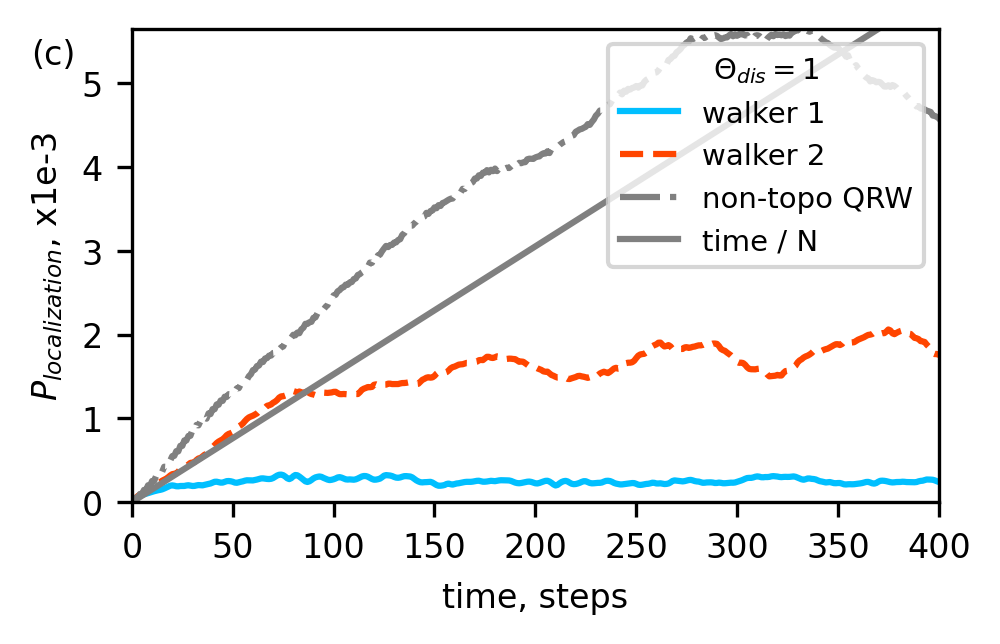

In [54]:
fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)
ax = axes

fig.set_size_inches(3.40457, 1.9)
font = {'size' : 8}
mpl.rc('font', **font)
#fig.subplots_adjust(bottom = 0.2, top=0.98, left=0.12, right=0.99)
fig.subplots_adjust(bottom = 0.15, top=0.98, left=0.2, right=0.99)

time_set = range(500)

proba_walker1_size256_disorder1= [np.float64(2.513809104258946e-05), np.float64(3.715493037986232e-05), np.float64(4.989243021602276e-05), np.float64(6.368071332658881e-05), np.float64(7.760719379858343e-05), np.float64(8.716172911846358e-05), np.float64(9.32981370336514e-05), np.float64(0.00010090638624810255), np.float64(0.00010984120355158151), np.float64(0.00011691592521784872), np.float64(0.0001236547826176789), np.float64(0.00013039432606913752), np.float64(0.0001367072954314765), np.float64(0.00014236597531498194), np.float64(0.00014681620488826214), np.float64(0.0001530498093355471), np.float64(0.00016273988717413476), np.float64(0.00017420403396610403), np.float64(0.00018637880540858345), np.float64(0.0001964521330491432), np.float64(0.0002002663483109724), np.float64(0.00019649229534968561), np.float64(0.0001899704809208402), np.float64(0.00018911935258422247), np.float64(0.00019287907393365387), np.float64(0.00019339011228271773), np.float64(0.00019342609642194846), np.float64(0.00019882901015477066), np.float64(0.0002018443549070456), np.float64(0.00019754329966233743), np.float64(0.0001930912185654826), np.float64(0.00019387840597126827), np.float64(0.00019961329440251052), np.float64(0.00020388891985479086), np.float64(0.00020193219837976638), np.float64(0.00020073050199070287), np.float64(0.0002062589329070783), np.float64(0.0002126069465458462), np.float64(0.00021689646245335112), np.float64(0.00022330328663355175), np.float64(0.00023388929667796823), np.float64(0.00024305557345121378), np.float64(0.00024409662820446825), np.float64(0.00023848231699402528), np.float64(0.00023329475925667982), np.float64(0.00023390436031564925), np.float64(0.0002422554759239645), np.float64(0.00025064095665314727), np.float64(0.00025229085026760346), np.float64(0.0002493159903374113), np.float64(0.00024310144255716414), np.float64(0.00023375325814582504), np.float64(0.0002312480560145231), np.float64(0.00023759426349415224), np.float64(0.00024336936750267196), np.float64(0.0002487329536728954), np.float64(0.0002563398546188747), np.float64(0.0002610646160810388), np.float64(0.00026017290147110645), np.float64(0.0002585136495052014), np.float64(0.000259522639439769), np.float64(0.0002641054227096376), np.float64(0.00026989518390927987), np.float64(0.00027668122106453135), np.float64(0.00028303129950153414), np.float64(0.00028382054891024804), np.float64(0.0002801241198643575), np.float64(0.0002771357153593649), np.float64(0.00027580932393567984), np.float64(0.00027859497309948224), np.float64(0.0002875878926502051), np.float64(0.0003025301077428585), np.float64(0.00031764489378659076), np.float64(0.000326890485167932), np.float64(0.0003285631082572149), np.float64(0.0003220788472385277), np.float64(0.00030584122837913743), np.float64(0.00028517398330208993), np.float64(0.00027514387601977326), np.float64(0.000286397397167994), np.float64(0.0003091828387809709), np.float64(0.00032401800364980976), np.float64(0.0003209417878578571), np.float64(0.0003055456517849735), np.float64(0.000287161995908652), np.float64(0.000267037124838878), np.float64(0.0002483004852726674), np.float64(0.00024124628382619757), np.float64(0.0002488087704108966), np.float64(0.0002646353498998265), np.float64(0.00028303710497042936), np.float64(0.00029575820330211117), np.float64(0.00030234269245833377), np.float64(0.0003064018746334522), np.float64(0.00030164652925110933), np.float64(0.00028956829896910395), np.float64(0.00027934268894217834), np.float64(0.0002692927059628721), np.float64(0.00026334184198255936), np.float64(0.00026698630986862813), np.float64(0.0002733239555781068), np.float64(0.0002825582184173232), np.float64(0.00029471034266835474), np.float64(0.00029853455270253645), np.float64(0.00029222006886649697), np.float64(0.0002816855362234854), np.float64(0.00027219838279781805), np.float64(0.00026992820907434953), np.float64(0.0002716526475874064), np.float64(0.00026957081048520576), np.float64(0.00026789297715062847), np.float64(0.00027254207385855113), np.float64(0.0002823316492204579), np.float64(0.00029483113727775504), np.float64(0.0003062616563537504), np.float64(0.00031222007725371936), np.float64(0.00031111799978816867), np.float64(0.00030322634573844186), np.float64(0.00029071761237265786), np.float64(0.0002768028916955562), np.float64(0.00026816071653988887), np.float64(0.0002688966456270667), np.float64(0.0002737703924620449), np.float64(0.0002809726095641725), np.float64(0.00029740062915894935), np.float64(0.0003162975625888428), np.float64(0.00032298687963561596), np.float64(0.0003205745172878587), np.float64(0.00031777125951085487), np.float64(0.00031135569794134223), np.float64(0.0003007094319496657), np.float64(0.000292757562256101), np.float64(0.00029093226653191507), np.float64(0.00029494702007929645), np.float64(0.0003033948294637186), np.float64(0.00031005633275854485), np.float64(0.00031077315373500473), np.float64(0.00030882367647485867), np.float64(0.00030600114495142134), np.float64(0.00029549978993988034), np.float64(0.0002771021943256012), np.float64(0.00026016595405500744), np.float64(0.0002474905595112969), np.float64(0.00023814782608749747), np.float64(0.00023593153608306248), np.float64(0.00023837738847182276), np.float64(0.00023918860528351918), np.float64(0.00024141885293684685), np.float64(0.0002425229257471925), np.float64(0.00023394537635490907), np.float64(0.00021885271641730787), np.float64(0.00020448307641541646), np.float64(0.00019612924059404362), np.float64(0.00019633011468398625), np.float64(0.00019941046267173062), np.float64(0.00020507736894321307), np.float64(0.0002166983140010955), np.float64(0.00022174291769456867), np.float64(0.00021403095150511202), np.float64(0.0002097221422594111), np.float64(0.00021642522351366793), np.float64(0.00022291964465727588), np.float64(0.0002256196880222376), np.float64(0.00023056544355513849), np.float64(0.00023619230723117817), np.float64(0.0002403477153907144), np.float64(0.00024261854244233947), np.float64(0.00024227614997476225), np.float64(0.00024258457356895663), np.float64(0.00024535763140333747), np.float64(0.0002494842835322006), np.float64(0.0002544073305128877), np.float64(0.00025559105336643703), np.float64(0.00024982714099031425), np.float64(0.00024420775059586257), np.float64(0.00024422774673324747), np.float64(0.00024657893888857676), np.float64(0.00025059933897000767), np.float64(0.00025465411278472296), np.float64(0.0002525237741417557), np.float64(0.0002504785538241012), np.float64(0.0002546448682541998), np.float64(0.00025957718586279747), np.float64(0.0002616162497768738), np.float64(0.0002613832555034902), np.float64(0.0002602188910849083), np.float64(0.0002598948777163664), np.float64(0.0002587119111191058), np.float64(0.000253058839469694), np.float64(0.00024330400775953348), np.float64(0.00023354051076187425), np.float64(0.00022761756012619206), np.float64(0.0002257154193534846), np.float64(0.00022880446552427225), np.float64(0.00023427908521761213), np.float64(0.00023952754269242682), np.float64(0.00024397527883019207), np.float64(0.00024556503877189503), np.float64(0.00024135957517116554), np.float64(0.00023328811759833236), np.float64(0.00022535129221075957), np.float64(0.00022320410267573024), np.float64(0.00022903010988583884), np.float64(0.00023821367942193275), np.float64(0.0002465535484449297), np.float64(0.0002541327843715353), np.float64(0.00025543375040066896), np.float64(0.00024580539326202026), np.float64(0.0002303619152546923), np.float64(0.00021190649849299296), np.float64(0.00019933480177105416), np.float64(0.00020587835340053583), np.float64(0.00022473956773464893), np.float64(0.00024022648421311916), np.float64(0.00024994918146962233), np.float64(0.0002540169963948779), np.float64(0.0002474038170396395), np.float64(0.00023256745911243493), np.float64(0.00021998978430553423), np.float64(0.00021466360842574964), np.float64(0.00021654003596744648), np.float64(0.000222634735354747), np.float64(0.00023100067240820697), np.float64(0.0002419991667105284), np.float64(0.00025032970429614645), np.float64(0.00024964960840193333), np.float64(0.0002400190392523933), np.float64(0.00022920656057938922), np.float64(0.00022465999384506906), np.float64(0.0002255393200604043), np.float64(0.00022830511423822044), np.float64(0.00023031397580519178), np.float64(0.0002308131379338687), np.float64(0.0002348690847382407), np.float64(0.00024515177927106926), np.float64(0.00025385658494358717), np.float64(0.00025535650264939464), np.float64(0.00025198574295717216), np.float64(0.00024240693899196035), np.float64(0.00022955553418946674), np.float64(0.00022140301051435697), np.float64(0.00021629270418786203), np.float64(0.00021176818998227658), np.float64(0.00021190058566370888), np.float64(0.0002153431285866096), np.float64(0.00021816962911144107), np.float64(0.00022169990393274496), np.float64(0.0002254494251179271), np.float64(0.00022810514531969731), np.float64(0.00022738496063664346), np.float64(0.00021872273535306674), np.float64(0.00020854320115498188), np.float64(0.00020559532647872344), np.float64(0.00020825261812968025), np.float64(0.00021333545729022683), np.float64(0.00021755984815352065), np.float64(0.00021947936834512905), np.float64(0.0002247187261993713), np.float64(0.00023194646971272267), np.float64(0.00023037786269073006), np.float64(0.0002233181356893497), np.float64(0.00022304997732020216), np.float64(0.000224954330593042), np.float64(0.0002204527548213203), np.float64(0.00021627891821383456), np.float64(0.0002176748935665463), np.float64(0.0002228354594941197), np.float64(0.00023558631115009154), np.float64(0.00025281231057092487), np.float64(0.0002596537583889045), np.float64(0.00025674805507958684), np.float64(0.0002536278509035271), np.float64(0.00025009082563621474), np.float64(0.00024793162195908515), np.float64(0.0002510483191974019), np.float64(0.0002572704682185128), np.float64(0.00026353663354036105), np.float64(0.00026577469085886673), np.float64(0.0002600313119835132), np.float64(0.00025178408462247175), np.float64(0.00024736934928673495), np.float64(0.000245298469210357), np.float64(0.00023846822288761763), np.float64(0.00023103926513892516), np.float64(0.00023207423610631283), np.float64(0.00023530454864382255), np.float64(0.00023575532868333796), np.float64(0.00023645871632378378), np.float64(0.000234027783000273), np.float64(0.00022855542397313936), np.float64(0.00022914932767703153), np.float64(0.00023345279612042134), np.float64(0.0002307010718423928), np.float64(0.00022589235109126034), np.float64(0.0002257378936405275), np.float64(0.00022800254965683967), np.float64(0.0002309865125092356), np.float64(0.00023263447045787644), np.float64(0.00023204158345649104), np.float64(0.00023479912457100423), np.float64(0.00024238161657122746), np.float64(0.0002504607923715737), np.float64(0.0002582043230868241), np.float64(0.00026762362627876136), np.float64(0.0002787224214981086), np.float64(0.0002876470767345629), np.float64(0.00028987161309256584), np.float64(0.00028988166403414876), np.float64(0.0002949874828603148), np.float64(0.0003030984219176241), np.float64(0.00030765937161700605), np.float64(0.0003043599712176866), np.float64(0.00029754460199858136), np.float64(0.0002969245111460468), np.float64(0.00029980721727211905), np.float64(0.00029947310670537985), np.float64(0.0003018225618140153), np.float64(0.00030821003778414447), np.float64(0.00031059761482603993), np.float64(0.0003088181168872723), np.float64(0.00030579009219428466), np.float64(0.0003008009873059444), np.float64(0.00029869956178548687), np.float64(0.00030122444897503315), np.float64(0.0003021875581387688), np.float64(0.00030125031086375144), np.float64(0.0003018710446325656), np.float64(0.00030497357661365455), np.float64(0.00030719524995984353), np.float64(0.0003026946286953831), np.float64(0.00029253112448717063), np.float64(0.0002823685998440125), np.float64(0.00027265734246151855), np.float64(0.0002677225706829631), np.float64(0.0002741033740955725), np.float64(0.0002827462591914704), np.float64(0.00028244213191061485), np.float64(0.00027807877477397405), np.float64(0.0002758359502128859), np.float64(0.0002707246663299494), np.float64(0.00025992565850691516), np.float64(0.0002507212384350207), np.float64(0.00024627126519935385), np.float64(0.0002402234977300485), np.float64(0.0002350365344785927), np.float64(0.0002375410624793492), np.float64(0.00024003640576937055), np.float64(0.00023417783363821918), np.float64(0.00022728753868816496), np.float64(0.0002261399490466554), np.float64(0.00022838571717219503), np.float64(0.0002283453871531961), np.float64(0.00022154690032406667), np.float64(0.0002132284673212707), np.float64(0.0002112496855383765), np.float64(0.0002135514829598627), np.float64(0.00021428917807326465), np.float64(0.00021333129055172453), np.float64(0.00021427026681500858), np.float64(0.00021726218677593526), np.float64(0.0002203667107375162), np.float64(0.00022369368496105284), np.float64(0.0002278670631579031), np.float64(0.00023409676196088636), np.float64(0.00024088900546200207), np.float64(0.0002418518606592813), np.float64(0.00023459989261132323), np.float64(0.00022496260872269654), np.float64(0.0002212125062040193), np.float64(0.00022867892499941887), np.float64(0.0002438320443958871), np.float64(0.00025458992910774826), np.float64(0.00025642037647023296), np.float64(0.0002545275836918307), np.float64(0.00025029338911475524), np.float64(0.00024429543169982243), np.float64(0.0002386386387292778), np.float64(0.0002354180464874781), np.float64(0.00023699345039945716), np.float64(0.00024004002242400272), np.float64(0.00024003829796760646), np.float64(0.000241210234702523), np.float64(0.0002440766984136852), np.float64(0.00024280522020935055), np.float64(0.00023990150649036415), np.float64(0.00023893134999456448), np.float64(0.00023881055698559854), np.float64(0.0002387755262870343), np.float64(0.00023771195428416735), np.float64(0.00024028569118710025), np.float64(0.00024863683828958174), np.float64(0.00025381343884433737), np.float64(0.0002561524523139594), np.float64(0.00026364129666040534), np.float64(0.00027049420959813066), np.float64(0.0002703032772985123), np.float64(0.0002689719034586235), np.float64(0.0002671376857390562), np.float64(0.0002602156948745017), np.float64(0.00024993885389975495), np.float64(0.0002411901211631327), np.float64(0.00023896268631562017), np.float64(0.0002471392844478079), np.float64(0.00025826079783832314), np.float64(0.0002626333032821823), np.float64(0.00026513897262607993), np.float64(0.00027058681328678293), np.float64(0.00027485392509418797), np.float64(0.00027601962357583335), np.float64(0.0002761776992298504), np.float64(0.000277079062267984), np.float64(0.000275924833008927), np.float64(0.0002690778406611556), np.float64(0.00026304115738122913), np.float64(0.0002637191505804895), np.float64(0.0002661418325128182), np.float64(0.0002689796590731114), np.float64(0.0002753871804188602), np.float64(0.0002786118975090307), np.float64(0.00027476648252774396), np.float64(0.0002713227737242203), np.float64(0.0002692268193550753), np.float64(0.00026264246514044206), np.float64(0.00025290224327838225), np.float64(0.0002478266049564257), np.float64(0.0002481153448502318), np.float64(0.0002474436714629951), np.float64(0.00024876274166045275), np.float64(0.00025953162249205266), np.float64(0.00027343633655930896), np.float64(0.00028059705670696025), np.float64(0.00028017435243590067), np.float64(0.0002707164524633875), np.float64(0.00025580921239821313), np.float64(0.0002475439010088098), np.float64(0.0002452734396390107), np.float64(0.00024136968485653334), np.float64(0.0002402799363434239), np.float64(0.00024359264160491503), np.float64(0.0002452348140123433), np.float64(0.0002439577804055143), np.float64(0.00024000243112971934), np.float64(0.00023617409188547616), np.float64(0.00023504590288457748), np.float64(0.00023516642004368904), np.float64(0.00023860716979960905), np.float64(0.00024229641454369695), np.float64(0.00023759987958025608), np.float64(0.00023183459734668496), np.float64(0.00023461000907249078), np.float64(0.00023475731657084776), np.float64(0.00022645714562459827), np.float64(0.000221104870922334), np.float64(0.000221203911489627), np.float64(0.00021895795968974305), np.float64(0.00021171491500756229), np.float64(0.0002005704194607282), np.float64(0.00019283174031239697), np.float64(0.00019823390279970996), np.float64(0.0002101410505468677), np.float64(0.00021620922954994015), np.float64(0.00021747577293424738), np.float64(0.00021854134290520658), np.float64(0.00022281396184799102), np.float64(0.00023247931413534145), np.float64(0.00023994240710848206), np.float64(0.00023988662019229406), np.float64(0.00023571896576831183), np.float64(0.0002297802783141645), np.float64(0.0002254086593079812), np.float64(0.00023035736022223655), np.float64(0.000240604394899678), np.float64(0.0002473866098027734), np.float64(0.0002523372626201832), np.float64(0.0002566671268255912), np.float64(0.0002569950332130766), np.float64(0.0002556353926387297), np.float64(0.0002562876138310608), np.float64(0.0002556466684512878), np.float64(0.00025239332101245583), np.float64(0.00025108386239500885), np.float64(0.0002553047259304521), np.float64(0.0002661465716165124), np.float64(0.00028046037897901696), np.float64(0.00028921303580087086), np.float64(0.0002865411816620534), np.float64(0.00027547332174634635), np.float64(0.0002636525770050249), np.float64(0.0002567122928066743), np.float64(0.0002521793876213609), np.float64(0.00024998697094882823), np.float64(0.00025614406089611316), np.float64(0.0002672914076766653), np.float64(0.0002727044843801039), np.float64(0.00027363177403009976), np.float64(0.0002810014863422809), np.float64(0.00029207677115562086), np.float64(0.00029159698526329476), np.float64(0.00027985791251485296), np.float64(0.0002716909861582152)]
proba_walker2_size256_disorder1= [np.float64(3.870243467204714e-05), np.float64(4.150679757113668e-05), np.float64(5.1621513165516766e-05), np.float64(7.430434951967156e-05), np.float64(8.941341770148956e-05), np.float64(0.00010179485618957336), np.float64(0.0001185040934437751), np.float64(0.00013023163399491372), np.float64(0.00013833644649133777), np.float64(0.00015770782201213722), np.float64(0.00017712128667918134), np.float64(0.00018643995341010254), np.float64(0.00020211599986697312), np.float64(0.0002230362795483075), np.float64(0.0002400436871780973), np.float64(0.00025583849740861835), np.float64(0.0002686164780363597), np.float64(0.0002803777614344131), np.float64(0.00029797293467436544), np.float64(0.00031856477607115213), np.float64(0.00033399181895717655), np.float64(0.0003388052126638989), np.float64(0.00034326497921255774), np.float64(0.0003650224851918984), np.float64(0.0003942820306102798), np.float64(0.00041097303540700943), np.float64(0.0004186836068678714), np.float64(0.0004295472057257984), np.float64(0.000448907677452034), np.float64(0.0004684151656476612), np.float64(0.0004720039212743224), np.float64(0.0004769798162776143), np.float64(0.0005024745991947989), np.float64(0.0005213646104319893), np.float64(0.0005264763676204446), np.float64(0.0005453930168797152), np.float64(0.0005652492113325662), np.float64(0.0005763047758650161), np.float64(0.0006005671920234901), np.float64(0.0006326324995022563), np.float64(0.0006559927731986096), np.float64(0.0006800640515577875), np.float64(0.0007049428994814997), np.float64(0.0007232421797117538), np.float64(0.0007365378456249427), np.float64(0.0007506421027109495), np.float64(0.0007725508557016416), np.float64(0.0007990620774634561), np.float64(0.0008144942408851892), np.float64(0.0008231319610449206), np.float64(0.0008351295450954504), np.float64(0.0008529734475778283), np.float64(0.0008794275525744122), np.float64(0.0009040491436842499), np.float64(0.0009185310669129375), np.float64(0.0009381134111941828), np.float64(0.0009666360205097706), np.float64(0.0009923519536518695), np.float64(0.0010113916910850786), np.float64(0.001022440950359998), np.float64(0.0010320052975395502), np.float64(0.0010453425879985827), np.float64(0.0010587717938199163), np.float64(0.0010838332002629555), np.float64(0.0011089312525145965), np.float64(0.001112829696744109), np.float64(0.001125723608529331), np.float64(0.0011497938146588968), np.float64(0.0011559579979598532), np.float64(0.001165791305475975), np.float64(0.0011859318982216191), np.float64(0.001199620900666286), np.float64(0.0012194143376127757), np.float64(0.001247221787726309), np.float64(0.0012624315524360392), np.float64(0.001263782905951541), np.float64(0.0012722947771240665), np.float64(0.001290772088732878), np.float64(0.0012999587369684437), np.float64(0.0013110962362089336), np.float64(0.0013261035286421727), np.float64(0.0013179337487261417), np.float64(0.0013103300184635152), np.float64(0.0013203475454940856), np.float64(0.0013116097765370131), np.float64(0.0012984123020356772), np.float64(0.0013137877805578474), np.float64(0.0013203078798559697), np.float64(0.0013002529450638737), np.float64(0.0012897203170329336), np.float64(0.0012847870348200814), np.float64(0.0012764456002126734), np.float64(0.001286323793418127), np.float64(0.0013023542934919633), np.float64(0.0013055516676742974), np.float64(0.001306722570423221), np.float64(0.0013054709243527072), np.float64(0.001303507416590988), np.float64(0.0013062255969203877), np.float64(0.0013091440007528428), np.float64(0.0013159175369487088), np.float64(0.001316505452013024), np.float64(0.0013013342445680682), np.float64(0.0012889954348815486), np.float64(0.0012887480728953362), np.float64(0.0012905099007535141), np.float64(0.0012889902931784978), np.float64(0.001286940995585979), np.float64(0.0012891290093008584), np.float64(0.0012967790956519452), np.float64(0.001298916307201236), np.float64(0.0012907236134918046), np.float64(0.0012901765407841348), np.float64(0.0013119478177893965), np.float64(0.0013401959904288732), np.float64(0.0013540954972001366), np.float64(0.001362894582398985), np.float64(0.0013737464428592336), np.float64(0.0013712624686201948), np.float64(0.0013750213621202992), np.float64(0.0014000906816161128), np.float64(0.0014051872268479033), np.float64(0.0013954650826122066), np.float64(0.0014076967708227886), np.float64(0.0014143389261171055), np.float64(0.001401446894995636), np.float64(0.0014020729929513599), np.float64(0.0014139132261920106), np.float64(0.0014139632875932394), np.float64(0.00140905507271261), np.float64(0.0014090614939901616), np.float64(0.0014085231097413849), np.float64(0.0014092970014521343), np.float64(0.0014160582944865298), np.float64(0.0014209451157590938), np.float64(0.0014216016147746144), np.float64(0.0014239785952537888), np.float64(0.0014287905499072685), np.float64(0.0014316128870156754), np.float64(0.0014282154292345316), np.float64(0.0014200480179549994), np.float64(0.0014102458832871115), np.float64(0.0014128446748023114), np.float64(0.0014370417759004025), np.float64(0.0014598928240673935), np.float64(0.0014711285719435374), np.float64(0.0014849668234980398), np.float64(0.0014904958874345183), np.float64(0.0014852324029678153), np.float64(0.0014890308787200645), np.float64(0.0015064716840097123), np.float64(0.0015330704346350594), np.float64(0.001551864005000935), np.float64(0.0015472852507638895), np.float64(0.0015399370350528232), np.float64(0.0015431636162071452), np.float64(0.0015513602286596334), np.float64(0.0015705623840411294), np.float64(0.0015963379270866839), np.float64(0.0016110859540140123), np.float64(0.0016177261260939962), np.float64(0.0016287686394900313), np.float64(0.0016403745709018306), np.float64(0.0016439137210108145), np.float64(0.0016458656199378869), np.float64(0.001654439328142648), np.float64(0.0016617307182551634), np.float64(0.0016612714090490318), np.float64(0.0016660478203835804), np.float64(0.0016738374065107017), np.float64(0.0016714841601934045), np.float64(0.0016759996502889514), np.float64(0.0016934296096197611), np.float64(0.0016968532239309976), np.float64(0.0016948801192303569), np.float64(0.001713689709498484), np.float64(0.0017341770145400948), np.float64(0.0017337296999310249), np.float64(0.0017232392576272825), np.float64(0.0017200336784529316), np.float64(0.001728685865738569), np.float64(0.0017392732531938911), np.float64(0.0017357816349762225), np.float64(0.001717581634761795), np.float64(0.0017055126740091876), np.float64(0.0017063917621420017), np.float64(0.0017090618379342459), np.float64(0.0017123136431280647), np.float64(0.0017115238913213743), np.float64(0.0017081904456476744), np.float64(0.0017066262820938896), np.float64(0.0016910730439960414), np.float64(0.0016747746396305742), np.float64(0.0016782702347518945), np.float64(0.0016748957321836896), np.float64(0.001657087706125817), np.float64(0.0016406608195235744), np.float64(0.0016226202459479638), np.float64(0.0016103364713324366), np.float64(0.001611159778293056), np.float64(0.001609103426516797), np.float64(0.001596540035252445), np.float64(0.0015868481452613163), np.float64(0.0015772116310483985), np.float64(0.0015605287694727753), np.float64(0.0015560840797014524), np.float64(0.0015570527682055705), np.float64(0.0015379208885774609), np.float64(0.0015173534638701176), np.float64(0.0015081646470137531), np.float64(0.0014956846380550551), np.float64(0.001486382512797582), np.float64(0.001486853794094062), np.float64(0.0014911845128798957), np.float64(0.0014933145861000985), np.float64(0.0014841823054163223), np.float64(0.0014705551407464268), np.float64(0.0014689513969610081), np.float64(0.00147777801399511), np.float64(0.0014849830926174676), np.float64(0.0014927183416764433), np.float64(0.001504463581316211), np.float64(0.001507276274860274), np.float64(0.001500668555107843), np.float64(0.001496296115478548), np.float64(0.0014902490399650527), np.float64(0.0014831722591367694), np.float64(0.0014905126645702424), np.float64(0.0015041387541103784), np.float64(0.0014984253404182143), np.float64(0.0014922067663128914), np.float64(0.0015129820333156948), np.float64(0.0015351484277231196), np.float64(0.001546924919210623), np.float64(0.001556167239786555), np.float64(0.0015477751268702872), np.float64(0.0015398440830003018), np.float64(0.0015550691109451403), np.float64(0.0015748497122759226), np.float64(0.001594709661328428), np.float64(0.0016028553815960356), np.float64(0.0015922530786074952), np.float64(0.001595644141708727), np.float64(0.0016184945666744578), np.float64(0.0016418733877046998), np.float64(0.001658513857373732), np.float64(0.0016637894637795692), np.float64(0.0016641639559108992), np.float64(0.0016696204350783537), np.float64(0.0016868985170854426), np.float64(0.00171846507401303), np.float64(0.0017474454357706397), np.float64(0.001762125207697631), np.float64(0.0017667555996166544), np.float64(0.0017699928106568875), np.float64(0.0017858865637006155), np.float64(0.0018088255815868915), np.float64(0.0018329834813332758), np.float64(0.0018596787985831567), np.float64(0.0018732639612599015), np.float64(0.0018827398808183141), np.float64(0.0019022715986034301), np.float64(0.0019036668365643773), np.float64(0.0018777472088748013), np.float64(0.001857708566414076), np.float64(0.0018635807693510899), np.float64(0.0018741489275679439), np.float64(0.001858455341955175), np.float64(0.001829144542484924), np.float64(0.0018181166783474863), np.float64(0.0018282354140174175), np.float64(0.0018364868259413778), np.float64(0.0018282438251830176), np.float64(0.001827937280407164), np.float64(0.0018460736625440198), np.float64(0.001849616660537679), np.float64(0.00184047260521173), np.float64(0.0018452073595614234), np.float64(0.001853026064921467), np.float64(0.001856758674086095), np.float64(0.0018647575903094804), np.float64(0.0018708129397240626), np.float64(0.0018707625804243345), np.float64(0.0018758179540054516), np.float64(0.0018876399083664823), np.float64(0.0018876362441853731), np.float64(0.001877604828865649), np.float64(0.0018826674325125026), np.float64(0.0018924238887793345), np.float64(0.0018924382199144323), np.float64(0.00188861748466682), np.float64(0.0018637921188468705), np.float64(0.0018279282515763033), np.float64(0.0018140712099698707), np.float64(0.001805217670512467), np.float64(0.001785138760111913), np.float64(0.0017672696394079586), np.float64(0.0017505864873721764), np.float64(0.0017276600077259518), np.float64(0.0016992400414273412), np.float64(0.0016727719618824116), np.float64(0.0016621724990041476), np.float64(0.0016641910168226364), np.float64(0.0016598702250996574), np.float64(0.0016391666201741432), np.float64(0.0016096628326744866), np.float64(0.0015899348053543222), np.float64(0.0015859603534632166), np.float64(0.0015854741112234963), np.float64(0.0015848319048844552), np.float64(0.0015899764804305112), np.float64(0.0015928463716872589), np.float64(0.0015822241185861111), np.float64(0.0015682123461503747), np.float64(0.0015524004704393494), np.float64(0.0015224883491503876), np.float64(0.001501197255874658), np.float64(0.0015035167096032654), np.float64(0.0015053017356028342), np.float64(0.001509124522407939), np.float64(0.0015182947094573552), np.float64(0.0015109591809223714), np.float64(0.0015112593396551252), np.float64(0.001541683677190675), np.float64(0.0015634968129199771), np.float64(0.0015674720306475814), np.float64(0.001585955770949335), np.float64(0.001606240323694765), np.float64(0.0016103033561124668), np.float64(0.0016290721432077292), np.float64(0.001666768293148169), np.float64(0.0016907834915319074), np.float64(0.0017052052831781788), np.float64(0.0017254722956135903), np.float64(0.001739010630810502), np.float64(0.0017483074297208081), np.float64(0.0017621182976063437), np.float64(0.0017796649754507094), np.float64(0.0018037071777308373), np.float64(0.001817941719852962), np.float64(0.0018094056404314922), np.float64(0.0018002485009367673), np.float64(0.0018055022308939648), np.float64(0.001817424199386673), np.float64(0.0018256253224155701), np.float64(0.0018319750879625077), np.float64(0.0018459408543222452), np.float64(0.0018613851556506206), np.float64(0.001873003801101032), np.float64(0.0018844708068728347), np.float64(0.0018845075107254735), np.float64(0.0018744184666159268), np.float64(0.0018861313261539572), np.float64(0.0019144710852897154), np.float64(0.001918407132339996), np.float64(0.0019047611255588188), np.float64(0.001903447640089698), np.float64(0.0019057463087414936), np.float64(0.0019083021071189192), np.float64(0.0019228182210998478), np.float64(0.0019385734472354762), np.float64(0.0019482571840679045), np.float64(0.001957327379850999), np.float64(0.001968768030792693), np.float64(0.0019831914317136896), np.float64(0.001995142658861531), np.float64(0.001998765646502279), np.float64(0.002005560940292928), np.float64(0.0020242801751946863), np.float64(0.002029511962153975), np.float64(0.0020131187384541203), np.float64(0.002009471243630605), np.float64(0.0020161124373981646), np.float64(0.00201665845005121), np.float64(0.002034840960540878), np.float64(0.0020598607127668934), np.float64(0.0020487393931105024), np.float64(0.0020151826402404157), np.float64(0.0020043204369750863), np.float64(0.0020190636073286355), np.float64(0.0020317093124554374), np.float64(0.002041528511870048), np.float64(0.0020487338702477285), np.float64(0.002033655312443461), np.float64(0.002013616249384854), np.float64(0.0020110942812677814), np.float64(0.0020070070194544514), np.float64(0.0019840277381763137), np.float64(0.001960265785780596), np.float64(0.0019551933654043444), np.float64(0.001944870681239473), np.float64(0.0019214315533660031), np.float64(0.0019174904231726447), np.float64(0.0019108427572241838), np.float64(0.0018802275644172032), np.float64(0.0018557784502339597), np.float64(0.0018208980096526834), np.float64(0.0017756737008629794), np.float64(0.0017662998615187576), np.float64(0.0017686000624620977), np.float64(0.00175781880113616), np.float64(0.0017596269594661283), np.float64(0.0017605276980243272), np.float64(0.0017462297549800526), np.float64(0.0017418052022334558), np.float64(0.0017484298331784931), np.float64(0.001741000336796645), np.float64(0.0017229810524354281), np.float64(0.001709311702447936), np.float64(0.0016922267331306521), np.float64(0.0016819572501831678), np.float64(0.0016909872269605137), np.float64(0.0016972265544499294), np.float64(0.0016937449284691083), np.float64(0.0016835141876721134), np.float64(0.0016699213759240636), np.float64(0.0016797626918281308), np.float64(0.0017058901255247235), np.float64(0.0017142097562556414), np.float64(0.0017104245388494463), np.float64(0.001705709103549302), np.float64(0.0017069836575738055), np.float64(0.0017168448391744594), np.float64(0.0017275389753551064), np.float64(0.0017467856012242406), np.float64(0.0017611209828884242), np.float64(0.0017481531560173337), np.float64(0.0017463693451705373), np.float64(0.0017738447184497935), np.float64(0.0017865388032193442), np.float64(0.0017864772130407364), np.float64(0.0018001490932489108), np.float64(0.0018079590839353455), np.float64(0.0018078115251296638), np.float64(0.0018326488543564106), np.float64(0.0018766860918972349), np.float64(0.0019040295450414226), np.float64(0.001912572758788336), np.float64(0.0019156055396238058), np.float64(0.0019099014199834292), np.float64(0.0019134108169998926), np.float64(0.0019305173735273521), np.float64(0.001927175150833425), np.float64(0.001920561095060322), np.float64(0.0019372307151938172), np.float64(0.0019501925709035973), np.float64(0.0019619562820006203), np.float64(0.0019813146325552596), np.float64(0.0019769016946081645), np.float64(0.0019603246538485515), np.float64(0.0019711922964821996), np.float64(0.0020012548373889534), np.float64(0.002009758954354385), np.float64(0.0019961886891851337), np.float64(0.0020014666237604638), np.float64(0.002021375975370074), np.float64(0.0020362051490766613), np.float64(0.0020568323071305265), np.float64(0.0020695278445029626), np.float64(0.0020743586235929495), np.float64(0.002090535038354229), np.float64(0.002088919225615318), np.float64(0.0020711761591957487), np.float64(0.0020676834988927863), np.float64(0.0020613265045967577), np.float64(0.0020486643375963068), np.float64(0.0020376792906676025), np.float64(0.0020206232852947328), np.float64(0.0020082892088417775), np.float64(0.0019946767839689366), np.float64(0.0019771623215183954), np.float64(0.001974967033480737), np.float64(0.0019718997571393634), np.float64(0.0019546278513358955), np.float64(0.001940502084306998), np.float64(0.0019340419844875625), np.float64(0.0019417576343937035), np.float64(0.0019475868257269081), np.float64(0.0019275972693147305), np.float64(0.001905084195428209), np.float64(0.0018892531049155181), np.float64(0.0018661157464230557), np.float64(0.0018454978020389545), np.float64(0.0018242737279858634), np.float64(0.0017937638938794586), np.float64(0.0017593456453858), np.float64(0.0017260916854901296), np.float64(0.0017084580751792946), np.float64(0.0017012131934943224), np.float64(0.0016827071393597972), np.float64(0.0016627186309071053), np.float64(0.0016350937108825796), np.float64(0.0015787867818858707), np.float64(0.0015339698313523316), np.float64(0.0015316315752732415), np.float64(0.0015245284472326305), np.float64(0.0014923699279843611), np.float64(0.0014744171072575431), np.float64(0.0014669166022907199), np.float64(0.0014502092471047083)]
plt.plot(time_set, proba_walker1_size256_disorder1, color='deepskyblue', label = 'walker 1')
plt.plot(time_set, proba_walker2_size256_disorder1, '--', color='orangered', label = 'walker 2')

m_grover= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
p_grover_size256_disorder1 = [np.float64(1.5258789062499997e-05), np.float64(1.5700384566985897e-05), np.float64(5.5132009638531204e-05), np.float64(5.56835103687361e-05), np.float64(9.772034982529314e-05), np.float64(9.566862100339697e-05), np.float64(0.0001462974638661261), np.float64(0.0001456206429227668), np.float64(0.00020148197571537977), np.float64(0.00019710370139672397), np.float64(0.0002528311485076637), np.float64(0.0002506223329713258), np.float64(0.0003120536913270327), np.float64(0.00030540781192548176), np.float64(0.00036417452671604636), np.float64(0.00036319379231135226), np.float64(0.00042233184998405224), np.float64(0.00042115201437955814), np.float64(0.0004889916208745232), np.float64(0.0004963902326628421), np.float64(0.0005492125715655388), np.float64(0.0005519045659494657), np.float64(0.0006086309750394), np.float64(0.0006064009829273457), np.float64(0.0006724396929679799), np.float64(0.0006716651157077215), np.float64(0.0007368848660933911), np.float64(0.0007363456122955746), np.float64(0.0007899456538182409), np.float64(0.0007915282350515991), np.float64(0.0008581844593735361), np.float64(0.0008497037913320187), np.float64(0.0009209687972590861), np.float64(0.0009162727443198295), np.float64(0.0009679486928958484), np.float64(0.0009576339518940543), np.float64(0.0010102626312286996), np.float64(0.0009964585640040294), np.float64(0.0010596541076313437), np.float64(0.0010510322378983496), np.float64(0.0011102436253603181), np.float64(0.001108898315935367), np.float64(0.001165498891523044), np.float64(0.0011626297872233383), np.float64(0.0012129271192176457), np.float64(0.001208478399211122), np.float64(0.0012582100414839422), np.float64(0.0012552156072988478), np.float64(0.001288531670397507), np.float64(0.0012866457039277823), np.float64(0.0013184879673362037), np.float64(0.0013164275021975683), np.float64(0.0013582895480303953), np.float64(0.0013597898966983349), np.float64(0.0014075617026765787), np.float64(0.0014102235122035688), np.float64(0.0014417973148980765), np.float64(0.0014587583358170978), np.float64(0.001503022441676304), np.float64(0.001526900783282091), np.float64(0.0015753262894243306), np.float64(0.0015821803251279004), np.float64(0.0016240889051759122), np.float64(0.0016307870966384432), np.float64(0.0016765621049228594), np.float64(0.001671907613339261), np.float64(0.0017141206703554248), np.float64(0.001718906573022987), np.float64(0.001748235023491171), np.float64(0.0017489619649176502), np.float64(0.0017794871117562075), np.float64(0.0017818614937422698), np.float64(0.001829828288356837), np.float64(0.0018215254424651561), np.float64(0.0018478598914107823), np.float64(0.001857589714185664), np.float64(0.001904173989114266), np.float64(0.0019145774107122092), np.float64(0.0019456781468164502), np.float64(0.001963555656420617), np.float64(0.00199729596110564), np.float64(0.0019906290102632354), np.float64(0.002022732859267685), np.float64(0.002015656283509499), np.float64(0.0020627774708849656), np.float64(0.0020804927063519745), np.float64(0.002127788571307249), np.float64(0.0021266537622741783), np.float64(0.0021472712445209543), np.float64(0.0021512021028179725), np.float64(0.0022000437739337084), np.float64(0.002204520001520642), np.float64(0.002253947541750157), np.float64(0.002248972060762121), np.float64(0.0022981532962744735), np.float64(0.0022980602084149955), np.float64(0.002330013418577454), np.float64(0.002351088475355942), np.float64(0.002409928748204039), np.float64(0.0024157522931086963), np.float64(0.002467884243536671), np.float64(0.0024739540529345274), np.float64(0.0025160008909229674), np.float64(0.002529426380037711), np.float64(0.0025581658284494087), np.float64(0.0025653814196025192), np.float64(0.0025959226414586714), np.float64(0.0025927432163331612), np.float64(0.00262177168749722), np.float64(0.002626193392170961), np.float64(0.002661904819824906), np.float64(0.002669260871638379), np.float64(0.0027105214948717725), np.float64(0.0027202543905172462), np.float64(0.0027415090687065353), np.float64(0.0027569877546088097), np.float64(0.0028056014346803937), np.float64(0.0028085769357127925), np.float64(0.002858269034909244), np.float64(0.0028551521088580173), np.float64(0.0029087393354040544), np.float64(0.002894869114769096), np.float64(0.002945596987229649), np.float64(0.0029536066031538005), np.float64(0.0029940054980038587), np.float64(0.0030269484450138706), np.float64(0.003057362348855103), np.float64(0.003043430290404231), np.float64(0.003067961687984392), np.float64(0.0030697082105855212), np.float64(0.003097764260059123), np.float64(0.0030996976343121456), np.float64(0.003128610150396882), np.float64(0.003137043921037061), np.float64(0.003188385784976476), np.float64(0.003208082935699351), np.float64(0.0032490117718103053), np.float64(0.003269253319717931), np.float64(0.0032991185461107527), np.float64(0.0032996627636477497), np.float64(0.0033268552542445517), np.float64(0.0033461973212074807), np.float64(0.003377300883308358), np.float64(0.0033788898198204597), np.float64(0.0034005547022373426), np.float64(0.0034088091302896415), np.float64(0.0034520836111482864), np.float64(0.003438844927205338), np.float64(0.0034728802277290325), np.float64(0.0034802210573479852), np.float64(0.0035169631697995153), np.float64(0.003506594393855865), np.float64(0.003543450983377427), np.float64(0.003533838518037869), np.float64(0.0035686560080211067), np.float64(0.003577578264205064), np.float64(0.003593681006028189), np.float64(0.003608215662839761), np.float64(0.003619994363361437), np.float64(0.0036219461034930145), np.float64(0.0036584265242203275), np.float64(0.0036751789665924748), np.float64(0.0037009239149185654), np.float64(0.003696869191692068), np.float64(0.003738238588735114), np.float64(0.0037358116325695427), np.float64(0.0037765511088889286), np.float64(0.003770409867323373), np.float64(0.0038048810885291267), np.float64(0.0038185311140055836), np.float64(0.0038616461425406493), np.float64(0.0038611257327109036), np.float64(0.003899500660251818), np.float64(0.003893052643471525), np.float64(0.003931490740284586), np.float64(0.003930650247747391), np.float64(0.0039611874891147736), np.float64(0.003934249317845404), np.float64(0.0039656449424783505), np.float64(0.00394902619271755), np.float64(0.003980116984901004), np.float64(0.0039498897730575995), np.float64(0.0039800775002772695), np.float64(0.0039547578133195555), np.float64(0.003980936184246898), np.float64(0.0039793088653800645), np.float64(0.003990412935042165), np.float64(0.003986447177523382), np.float64(0.004006694694367512), np.float64(0.0040304874264445335), np.float64(0.004054204044465533), np.float64(0.0040291003152597826), np.float64(0.004048716498089061), np.float64(0.004044346775840447), np.float64(0.004054343951825534), np.float64(0.004056797321101832), np.float64(0.004090919375180168), np.float64(0.004097866073064291), np.float64(0.00409670693802539), np.float64(0.004095647466623964), np.float64(0.004112848101784012), np.float64(0.004121516344150864), np.float64(0.004125578411041778), np.float64(0.004148525260060538), np.float64(0.0041618964075620405), np.float64(0.0041594312185464066), np.float64(0.0041863076090426455), np.float64(0.004165267614936961), np.float64(0.004214130636481634), np.float64(0.0042218386916971825), np.float64(0.004231248950326828), np.float64(0.004239261805378243), np.float64(0.0042624633912405705), np.float64(0.004280058812415015), np.float64(0.004296748239062121), np.float64(0.0043047990046608895), np.float64(0.004327444259293612), np.float64(0.004353383485785346), np.float64(0.0043701555501653565), np.float64(0.004378896339043697), np.float64(0.004419086793906314), np.float64(0.004432227778469754), np.float64(0.0044477213287226645), np.float64(0.004453530475092128), np.float64(0.00446684300835427), np.float64(0.004478170830056816), np.float64(0.004510309191530373), np.float64(0.00450173639396256), np.float64(0.00453593563620378), np.float64(0.004565834871383836), np.float64(0.004611443138398638), np.float64(0.004635505149021033), np.float64(0.004672493896558008), np.float64(0.004673050156739621), np.float64(0.004692826752196183), np.float64(0.0047252165854317785), np.float64(0.004740511609089271), np.float64(0.004746976641297442), np.float64(0.004790102107563546), np.float64(0.004796033331169529), np.float64(0.004832967882137101), np.float64(0.004855959345990099), np.float64(0.004887319344407035), np.float64(0.004865979127503441), np.float64(0.0049095529792674555), np.float64(0.004897177577033932), np.float64(0.004930983248332432), np.float64(0.00492299039956753), np.float64(0.00494170577477904), np.float64(0.004946777609517398), np.float64(0.004964952762105113), np.float64(0.004945588559420488), np.float64(0.004971215255279274), np.float64(0.0049710187922309525), np.float64(0.005014376850145483), np.float64(0.005038146529066744), np.float64(0.005051951910221423), np.float64(0.005070587953914375), np.float64(0.005093656686609358), np.float64(0.005122987500667416), np.float64(0.005127764862233149), np.float64(0.005150766692640234), np.float64(0.005187698259205554), np.float64(0.005186899572826522), np.float64(0.005217516402036306), np.float64(0.005219435991738361), np.float64(0.005275223280381399), np.float64(0.0052870202334103), np.float64(0.005317794998983216), np.float64(0.005326105848749384), np.float64(0.005366923369848841), np.float64(0.0053840962855119506), np.float64(0.005407209456444503), np.float64(0.0054437024579524285), np.float64(0.005458621446425385), np.float64(0.005484692498143093), np.float64(0.005490183293890135), np.float64(0.005534911803378269), np.float64(0.005522560784676519), np.float64(0.005538214438420881), np.float64(0.005508749544245552), np.float64(0.0055223787319852), np.float64(0.005508377544656477), np.float64(0.005541495894255587), np.float64(0.005539389202832522), np.float64(0.005556378146548564), np.float64(0.005548791992767564), np.float64(0.005580951353903311), np.float64(0.005567079408262812), np.float64(0.0055717955090396724), np.float64(0.0055633402625922266), np.float64(0.005544335360438595), np.float64(0.0055249243824239385), np.float64(0.005532620968538191), np.float64(0.005544276180351799), np.float64(0.005544676293752934), np.float64(0.0055682281081257095), np.float64(0.00558544400583422), np.float64(0.0055587294067642404), np.float64(0.005579968908870606), np.float64(0.005564358388813892), np.float64(0.0055837882565755665), np.float64(0.00558149994338161), np.float64(0.0055855917643761206), np.float64(0.0055682736583877145), np.float64(0.005574237768858146), np.float64(0.005528722688764735), np.float64(0.005544209849629669), np.float64(0.005533730778044935), np.float64(0.005566294445483536), np.float64(0.005571028194378242), np.float64(0.005563474217310882), np.float64(0.005538756525838453), np.float64(0.005529473620117357), np.float64(0.005494281899120341), np.float64(0.0055322599094250365), np.float64(0.005556180920367556), np.float64(0.0055756947696983155), np.float64(0.005559242427249144), np.float64(0.005584560426243974), np.float64(0.005573415829257495), np.float64(0.0055782627924453486), np.float64(0.0055703401890399755), np.float64(0.005580911757320617), np.float64(0.005561078021396963), np.float64(0.0055751046053667975), np.float64(0.005566003686362267), np.float64(0.005599572259159787), np.float64(0.005609774392676058), np.float64(0.005634237622420042), np.float64(0.005626841124438053), np.float64(0.005651059747700984), np.float64(0.005651407855661806), np.float64(0.005656464269067409), np.float64(0.0056364092399738995), np.float64(0.005621347015944667), np.float64(0.005613236518312727), np.float64(0.0056284318521006), np.float64(0.005622014272457866), np.float64(0.005613831428764865), np.float64(0.005566612688107994), np.float64(0.0055447709498609825), np.float64(0.005523164501077065), np.float64(0.005505186487573239), np.float64(0.005486118837661466), np.float64(0.005476858176096576), np.float64(0.0054549260824250986), np.float64(0.005437948734759442), np.float64(0.005424056341137477), np.float64(0.005422978858481155), np.float64(0.0054217469119423375), np.float64(0.005395296258195084), np.float64(0.005363502217227664), np.float64(0.005353385760819306), np.float64(0.005315820229556167), np.float64(0.005330956009795044), np.float64(0.005269448008624811), np.float64(0.005244893206068396), np.float64(0.005192091978556441), np.float64(0.005213334171272978), np.float64(0.0051790767273029925), np.float64(0.0051539872515526915), np.float64(0.005103926554919189), np.float64(0.005090363636800299), np.float64(0.005066421043526606), np.float64(0.0050565671594533295), np.float64(0.005019771070418339), np.float64(0.005035077335089161), np.float64(0.005026857986549874), np.float64(0.005009745309320295), np.float64(0.005015479996477971), np.float64(0.005009199095620567), np.float64(0.0049844112013214745), np.float64(0.00495919278966298), np.float64(0.0049583083838805764), np.float64(0.004973482821237387), np.float64(0.004953724867360595), np.float64(0.004976159407153915), np.float64(0.004965930548654221), np.float64(0.00494657253167943), np.float64(0.004917093244126174), np.float64(0.004902929645857267), np.float64(0.004882196688177974), np.float64(0.004876264688782041), np.float64(0.0048457778057339786), np.float64(0.0048218921466165925), np.float64(0.004792229691652048), np.float64(0.004763356050189077), np.float64(0.004744037454097258), np.float64(0.004720553328488397), np.float64(0.004725990333596302), np.float64(0.0046969995610029805), np.float64(0.004692799791106969), np.float64(0.00468569770434389), np.float64(0.004671411164879484), np.float64(0.004663919105005756), np.float64(0.00465461748292827), np.float64(0.004612471274228318), np.float64(0.004608387696710928), np.float64(0.004596462799460944), np.float64(0.004580408524619373), np.float64(0.004551808650348796), np.float64(0.0045516528252227545), np.float64(0.004506478340017462), np.float64(0.004505480580805398), np.float64(0.004485554935013864), np.float64(0.004454707562482787), np.float64(0.0044258206150452825), np.float64(0.0044059284740192075), np.float64(0.004404570777538282), np.float64(0.004384500781733636), np.float64(0.0043583327469079265), np.float64(0.004345130359937981), np.float64(0.004327972734175788), np.float64(0.0042855671635715145), np.float64(0.004295464134665245), np.float64(0.0042760901155296125), np.float64(0.004275981823337079), np.float64(0.004251378111611193), np.float64(0.004245511699869879), np.float64(0.0042362704162333415), np.float64(0.00421586848180796), np.float64(0.004195805356097027), np.float64(0.004177676843602816), np.float64(0.004141755321220124), np.float64(0.004118727040944754), np.float64(0.0040815953809718855), np.float64(0.004066642816662354), np.float64(0.004042862756640442), np.float64(0.004021041409555864), np.float64(0.003994335968648341), np.float64(0.003987464182348371), np.float64(0.003974969713434118), np.float64(0.003970124787178838), np.float64(0.0039500855503105505), np.float64(0.003920580296596206), np.float64(0.003886846684462672), np.float64(0.0038633730916087876), np.float64(0.003838775660852462), np.float64(0.003819815732134061), np.float64(0.003802388200375849), np.float64(0.003793421552970169), np.float64(0.0037674179754537567), np.float64(0.0037522766986199385), np.float64(0.003740754322153081), np.float64(0.0037469861481957654), np.float64(0.0037315640232109025), np.float64(0.00373386247144191), np.float64(0.003743352767811231), np.float64(0.003739700842692434), np.float64(0.0037246385013064557), np.float64(0.0037257900514410048), np.float64(0.0036854287047731), np.float64(0.0037171713727292013), np.float64(0.0036989306916307184), np.float64(0.00369121188892359), np.float64(0.0036654221509996475), np.float64(0.003687190238599742), np.float64(0.0036861033964644754), np.float64(0.0036900421528267766), np.float64(0.003693821654642402), np.float64(0.00370902263784949), np.float64(0.003705106416553221), np.float64(0.0037203354314797855), np.float64(0.003688278185856055), np.float64(0.0036897593074364673), np.float64(0.0036712844197438386), np.float64(0.0036615526946647053), np.float64(0.0036563951508486034), np.float64(0.0036469528049994948), np.float64(0.0036293064123637886), np.float64(0.0036285485753445096), np.float64(0.003622591580270041), np.float64(0.0036215501830113837), np.float64(0.003596734821950582), np.float64(0.003603337661627331), np.float64(0.0035719387878738497), np.float64(0.003577413096708334), np.float64(0.003553729793856795), np.float64(0.00356282800865007), np.float64(0.003545904313539078), np.float64(0.003555904569333579), np.float64(0.00355360616790334), np.float64(0.003553244406235722), np.float64(0.003537927294561341), np.float64(0.003542820780826548), np.float64(0.0035346410355976627), np.float64(0.0035432975531514066), np.float64(0.0035473884067693806), np.float64(0.0035414926081644635), np.float64(0.003544402557191931), np.float64(0.0035480502353365273), np.float64(0.0035457708723449716), np.float64(0.003541557759496824), np.float64(0.003525760895464171), np.float64(0.0035494200409404374), np.float64(0.00355510992230054), np.float64(0.0035769065763116468), np.float64(0.0035592353774284574), np.float64(0.003572208546501557), np.float64(0.0035632209076989782)]
#p =  [3.814697265624999e-06, 4.192884156137871e-06, 1.5280081173588883e-05, 1.6289988172158866e-05, 2.8854957598849857e-05, 2.9099845034267584e-05, 4.449863940066894e-05, 4.3483349692361877e-05, 5.900039785179217e-05, 6.10014749557773e-05, 8.178628701766728e-05, 8.238341707418324e-05, 0.00010289660806276106, 0.00010499271524001794, 0.00013070979794344657, 0.00013227355646392873, 0.000161195374619151, 0.00016285246064091246, 0.00019452323432289734, 0.00019623463145780612, 0.0002266430864554177, 0.00022708188763031172, 0.000258493319209505, 0.0002624856417071163, 0.00029232544628868593, 0.0002981109590955914, 0.00032951414782202127, 0.0003291573710638077, 0.00036473252040912225, 0.00036202421734488516, 0.0003956332877808165, 0.00039277662038053775, 0.0004259529535382145, 0.0004224488605264319, 0.0004564870123180431, 0.00045399644088629765, 0.0004927247798148228, 0.0004917794293700288, 0.000532763064225223, 0.0005311354755334735, 0.0005758055014763346, 0.0005776741024092355, 0.0006214744266458437, 0.0006293610792986042, 0.0006738886208521226, 0.0006786927291216802, 0.0007241909283328514, 0.0007239519023601072, 0.0007655098986254521, 0.000772362731944409, 0.0008177855083315721, 0.0008266201890750782, 0.0008737696781435061, 0.0008749270964783353, 0.000929101243235214, 0.0009303635990380581, 0.0009837201102214999, 0.0009874131495572636, 0.0010407175554493831, 0.001041577606443265, 0.0010960798457250976, 0.0011030195255498673, 0.0011613315798014393, 0.0011646158334028575, 0.0012216402977482453, 0.001226621790507146, 0.0012890107056530839, 0.0012879983051577763, 0.001354943587526797, 0.0013515917156041203, 0.0014014734286749743, 0.001408052893677928, 0.001472812716962738, 0.0014749420987047093, 0.0015396665065849754, 0.0015426416275847543, 0.0015955091183009384, 0.0015892594523292866, 0.0016572743563202247, 0.001644716420226884, 0.0017002937015922015, 0.00168926558308272, 0.0017477753520712856, 0.0017406056099675423, 0.0018060624716227714, 0.0018071330613522694, 0.00186469247748764, 0.0018733648802500946, 0.0019340239086127107, 0.0019375798977115497, 0.0020062895236804823, 0.0019997607936445973, 0.0020518145078276036, 0.002048362590729065, 0.0020993773508367628, 0.002095394316418156, 0.002148333150255112, 0.0021514773192344875, 0.0022102328722971142, 0.0022100970499505253, 0.002264267482751442, 0.0022694701308997667, 0.002314885718634827, 0.002309765853373787, 0.0023538338902578575, 0.0023499906311751986, 0.0023913965830664576, 0.002402145597411661, 0.0024398189932805002, 0.002439035059802587, 0.0024703523378135596, 0.002453085732939894, 0.002483008381111145, 0.0024822388507824964, 0.002519449584659221, 0.0025128742802121356, 0.00254715943481257, 0.002547638579211254, 0.002590664684475824, 0.0025982316152311892, 0.0026382635215838864, 0.0026502314796096205, 0.002686104428435764, 0.0026934717846093265, 0.002743294660437181, 0.002746724248989885, 0.002791821585929932, 0.0028037354463881915, 0.0028511783149815914, 0.0028556788947934684, 0.0028889291578404726, 0.0028941123076772716, 0.0029382762060913173, 0.0029359771573020848, 0.0029886347519716616, 0.002986838343420369, 0.0030370079472458733, 0.003038648022344767, 0.0030934808090402255, 0.003107020036078436, 0.003152672568611156, 0.0031673025911308065, 0.003216582264486029, 0.0032331719683003904, 0.0032740393729952357, 0.003280041812120839, 0.0033177420922153303, 0.003308144269743649, 0.0033382574012769985, 0.0033294504365322503, 0.003373613867885837, 0.0033840045228358175, 0.003420797518007593, 0.0034348949861762374, 0.0034645801234906, 0.0034865400454860696, 0.0035269857494172243, 0.0035364493841801036, 0.00356774444280779, 0.0035654726720158367, 0.0035991691027094123, 0.0036119677713040525, 0.003653474351865283, 0.003660826095702734, 0.0037192507617421207, 0.0037263492060786198, 0.0037650513827850933, 0.0037711544743563676, 0.0038121854435888684, 0.003806787084981533, 0.0038421011339380886, 0.00384213428418037, 0.0038837227513578683, 0.003871074119469168, 0.0038971452584713848, 0.0038944688867584894, 0.003908744769984258, 0.0039113907075237105, 0.003940599418694751, 0.003937283948803631, 0.003944554987436433, 0.003944754786395541, 0.003975962810376582, 0.003969173143950295, 0.003998081032383273, 0.004003570349916594, 0.004019377652506958, 0.004020872442080131, 0.004040845517755861, 0.004033987814552605, 0.004046390852042902, 0.004036687277103666, 0.004035615105654035, 0.004021443487233845, 0.004045488845688421, 0.004035635562395746, 0.004051696050565992, 0.00403864289246845, 0.004043940013665096, 0.0040293867459028415, 0.004038232860782127, 0.004023968126500838, 0.00404647768898601, 0.0040356747120047455, 0.004046154511105095, 0.004032306944434554, 0.004049465984855252, 0.004032180328230903, 0.004074567843033332, 0.004053968290426052, 0.0040870380818080684, 0.004081165942795132, 0.004088128737098773, 0.004075293820838487, 0.004089991251371416, 0.004080979009033495, 0.004090466929882686, 0.004079989967287285, 0.00410460388683371, 0.0040978803409775265, 0.004117341859907464, 0.004108654300326745, 0.004139176642284216, 0.004126995852362397, 0.004145262852681573, 0.00411813061212889, 0.004127804076594002, 0.004113041401547831, 0.004113884483900793, 0.00410516548844974, 0.004115292607804265, 0.004102574622682458, 0.0041016655695193405, 0.004079767304236863, 0.004069738526606758, 0.0040532799147083645, 0.00404469369503682, 0.004034600246842632, 0.004028577474398142, 0.004016549890635698, 0.004016024123310841, 0.0040107672647732495, 0.004022810606257782, 0.004030736837872634, 0.004044707737622305, 0.004046824940637418, 0.004051355965169134, 0.00405549808971393, 0.004053047309017413, 0.004047144481476586, 0.004048344446330673, 0.004046315404595619, 0.004028991635819074, 0.004039069245392883, 0.004036589310692428, 0.004049292054969534, 0.004040347771773913, 0.004030861427791488, 0.00402950569591913, 0.004014258681165822, 0.004015807161496186, 0.004010187660746578, 0.003999857640021375, 0.0039976075643339375, 0.003979303966424144, 0.0039816999116047535, 0.003959852381822047, 0.003973855756555452, 0.0039782925949353705, 0.003977409107591699, 0.003962541518966554, 0.003961355646548072, 0.003947272526832069, 0.003967982485416329, 0.003959870326248956, 0.003968697042190598, 0.003948744648164471, 0.003962372382133099, 0.003940253778882282, 0.003942173293154985, 0.003921977345358003, 0.003926585291006299, 0.0038848466156522154, 0.0038834402874584457, 0.003859675224705837, 0.0038701125081620352, 0.0038453344897933926, 0.0038653727724076237, 0.0038363394604142708, 0.003853410373015827, 0.003830790177251705, 0.0038462797468310573, 0.003815739784392231, 0.0038344973272228084, 0.0038011027144058676, 0.0038057118616679634, 0.0037767395717307685, 0.0037896088720886225, 0.0037554937088410726, 0.003770311185277379, 0.003754215803526171, 0.0037566630614745728, 0.0037315062607483503, 0.0037387110970008145, 0.0037169817190443, 0.0037055762360638754, 0.003685310032944309, 0.0036828907921103472, 0.0036705959600693673, 0.003669849493247027, 0.0036442602899109436, 0.003632621273097355, 0.0036032249286967145, 0.0036199589236932026, 0.0035879554318306688, 0.0035933216450870975, 0.0035560692639543304, 0.0035571665489591117, 0.0035313649179721774, 0.0035237059837687555, 0.003501780429585647, 0.0035022626840105968, 0.003482988567557346, 0.003477869986458544, 0.003448144900155171, 0.0034334216750359038, 0.003397230569963057, 0.0033888064187335854, 0.0033729932524393983, 0.0033679357431681024, 0.0033432494089088867, 0.0033301158694437243, 0.003311952472547475, 0.003328283082962247, 0.003300768233223633, 0.0033246402581434036, 0.0032992805277980023, 0.0033044795002593118, 0.0032921664144803723, 0.003298336062417951, 0.0032907456975612114, 0.0032870302318134827, 0.0032672016690774228, 0.003264188227903382, 0.0032485403786026872, 0.0032535394266718625, 0.0032304499687296016, 0.003240753161757384, 0.0032245756321870383, 0.003224309219507544, 0.0031987468895700918, 0.00319926601699287, 0.003184748658140815, 0.0031845440605946817, 0.0031621325724939557, 0.003176437973918676, 0.003154316734475254, 0.003147938182912345, 0.003125946760100518, 0.0031178918632264055, 0.0030874031304073636, 0.0030770669382999406, 0.003061590655086949, 0.0030546097109204824, 0.003034738488948872, 0.003040186944035442, 0.003012279544957457, 0.0030138849469792503, 0.0029820443552181766, 0.003001255419297832, 0.0029908601773494807, 0.0030032035385407314, 0.0029840143779187303, 0.0029927111920507784, 0.002971022838705352, 0.0029848750631199868, 0.0029788664663836133, 0.0029821852221247804, 0.0029715695710706876, 0.002993061336679834, 0.0029847405078483095, 0.002996194899145509, 0.002979744627715625, 0.0029992099627854573, 0.0029910229083991865, 0.002998688880516792, 0.0029865699857942875, 0.002990464137344168, 0.0029840390252254276, 0.002995588751498173, 0.002979254985567663, 0.002977862271870097, 0.002954960971633674, 0.0029623836306722842, 0.0029564107653873876, 0.002955100374134276, 0.0029496061673195215, 0.0029521714892352053, 0.00294350921091014, 0.0029395142869989826, 0.00292925223837398, 0.0029286043353945637, 0.002911226003498773, 0.002908607067570583, 0.0028932193445740505, 0.002902849824873483, 0.0028807221738335292, 0.00289367274393276, 0.0028795430684520843, 0.0028717780060595745, 0.002846198830543849, 0.0028550582168230757, 0.0028369945903566323, 0.0028368336888554492, 0.0028298537384666136, 0.002830198068951162, 0.0028177731350045, 0.002814433291489993, 0.002799262161855737, 0.002796704019460885, 0.0027816479422376394, 0.002775290542282095, 0.0027451989429957747, 0.0027509447427319007, 0.0027379687385759395, 0.0027440326705878487, 0.0027307134076299156, 0.002726104889784769, 0.0027135292762683334, 0.0027181350823458003, 0.002707590870660658, 0.002706645898727548, 0.0027000669918696755, 0.002692765040779965, 0.0026825237463889494, 0.002679539070302601, 0.0026606594530144707, 0.002663245954234237, 0.002659341979480416, 0.002663141841787577, 0.0026584283654181706, 0.0026646591677389215, 0.0026453818307374103, 0.0026431705296243793, 0.002620268029995804, 0.002615511967605314, 0.0025902156630051207, 0.002597350711845896, 0.002580564333929303, 0.0025853461829974376, 0.0025709692373308626, 0.0025714323055149274, 0.0025565139184814973, 0.0025587283428877726, 0.0025475604763743253, 0.002542461020236686, 0.002538260711857072, 0.0025477552175587237, 0.0025307339280806604, 0.002523854324462014, 0.0025094172370075008, 0.002513098216614761, 0.002507565728337351, 0.0025038121711970607, 0.0024930914283493675, 0.0024934733313552162, 0.0024862986601707155, 0.0024949362626610298, 0.0024786626716429153, 0.0024819256756788907, 0.0024716001156919578, 0.0024668194966373904, 0.002456814735546114, 0.0024631717925557, 0.002450874180421568, 0.0024634210689219852, 0.002458978015583673, 0.0024731758869903074, 0.0024721187026600457, 0.0024914055385201255, 0.0024776318666588776, 0.0024813112505806985, 0.0024664717284756453, 0.002485628601817162, 0.0024640164320246316, 0.002487909577439615, 0.0024761698180588406, 0.0024981792763585464, 0.002496345074986774, 0.0025040991730013707, 0.0024905146593706467, 0.0024980605718986546, 0.002490888928096689, 0.0025043875561411486, 0.002493203539858702, 0.0024983226242697287, 0.002479492530048111, 0.0024789906298182474, 0.002462151073661137, 0.0024621351433309325, 0.0024310615162645042]
plt.plot(m_grover,p_grover_size256_disorder1, '-.', color='grey', label='non-topo QRW')

sizex = 256
sizey = 256
plt.plot(time_set, [ti / (sizex*sizey) for ti in time_set],'-', color='grey', label='time / N', markersize=0.5)

    
plt.xlim(0.0, 400)
plt.ylim(0.0, 2.7*max(proba_walker2_size256_disorder1))
plt.text(-50, 2.5*max(proba_walker2_size256_disorder1), '(с)', fontsize=8)
plt.gca().tick_params(axis='both', labelsize=8)
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#offset = plt.gca().yaxis.get_major_formatter()
#print(offset.get_offset())
#plt.gca().yaxis.offsetText.set_visible(False)
plt.xlabel('time, steps', fontsize=8)
plt.ylabel(r"$P_{localization}$, " + "x" + '1e-3', fontsize=8)
leg = plt.legend(fontsize=7, loc='upper right', title=r'$\Theta_{dis}=1$') #, title='size '+str(sizex)+'x'+str(sizey),title_fontsize=14)
plt.setp(leg.get_title(),fontsize=7)
plt.gca().yaxis.offsetText.set_visible(False)
plt.savefig('figS_angle_disorder_1_size_256.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight',
      metadata=None)
plt.show()